# Mobilenet Casia Tests
- **Mobilenet** training on **Casia** dataset tests, `batach_size = 64`

## AdamW combining dropout tests
- **Loss function** is `softmax label_smoothing=0.1` + `centerloss`.
- **Centerloss weight** scales from `1` to `50`, each train `10` epochs.

| AdamW weight_decay | Dropout rate |
| ------------------ | ------------ |
| 5e-5               | 0.4          |
| 5e-5               | 0.2          |
| 5e-5               | 0.0          |
| 1e-4               | 0.4          |
| 1e-4               | 0.2          |
| 1e-4               | 0.0          |
| 1e-5               | 0.4          |
| 1e-5               | 0.0          |
| 0                  | 0.4          |
| 0                  | 0.0          |

In [2]:
# Basic import
import os
import glob2
import pickle
import numpy as np
import tensorflow as tf
import sys
from tensorflow import keras

gpus = tf.config.experimental.list_physical_devices("GPU")
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

import train, losses

data_basic_path = '/datasets/'
data_path = data_basic_path + 'faces_casia_112x112_folders'
eval_paths = [data_basic_path + ii for ii in ['faces_casia/lfw.bin', 'faces_casia/cfp_fp.bin', 'faces_casia/agedb_30.bin']]

In [4]:
# weight_decay 5e-5, dropout_rate 0.4
import tensorflow_addons as tfa

basic_model = train.buildin_models("MobileNet", dropout=0.4, emb_shape=256)
tt = train.Train(data_path, save_path='T_adamw_5e5_dr0.4_casia.h5', eval_paths=eval_paths,
                 basic_model=basic_model, model=None, lr_base=0.001,
                 batch_size=64, random_status=3)

optimizer = tfa.optimizers.AdamW(weight_decay=5e-5)
sch = [
    {"loss": keras.losses.CategoricalCrossentropy(label_smoothing=0.1), "centerloss": 1, "epoch": 10, "optimizer": optimizer},
    {"loss": keras.losses.CategoricalCrossentropy(label_smoothing=0.1), "centerloss": 10, "epoch": 10},
    {"loss": keras.losses.CategoricalCrossentropy(label_smoothing=0.1), "centerloss": 20, "epoch": 10},
    {"loss": keras.losses.CategoricalCrossentropy(label_smoothing=0.1), "centerloss": 30, "epoch": 10},
    {"loss": keras.losses.CategoricalCrossentropy(label_smoothing=0.1), "centerloss": 40, "epoch": 10},
    {"loss": keras.losses.CategoricalCrossentropy(label_smoothing=0.1), "centerloss": 50, "epoch": 10},
]

tt.train(sch, 0)

>>>> Init type by loss function name...
>>>> Train softmax...
>>>> Init softmax dataset...
>>>> Image length: 490623, Image class length: 490623, classes: 10572
>>>> Add softmax layer...
>>>> Attach centerloss...
>>>> loss_weights: {'softmax': 1.0, 'center_embedding': 1.0}
>>>> Insert weight decay callback...

Learning rate for iter 1 is 0.001
Weight decay for iter 1 is 4.999999873689376e-05
Epoch 1/10
7666/7666 [==============================] - ETA: 0s - loss: 8.5121 - center_embedding_loss: 0.1152 - softmax_loss: 8.3969 - softmax_accuracy: 0.0106


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.16it/s]



>>>> lfw evaluation max accuracy: 0.835167, thresh: 0.629878, previous max accuracy: 0.000000
>>>> Improved = 0.835167



Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.23it/s]


>>>> cfp_fp evaluation max accuracy: 0.664000, thresh: 0.746752, previous max accuracy: 0.000000
>>>> Improved = 0.664000




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.55it/s]


>>>> agedb_30 evaluation max accuracy: 0.572333, thresh: 0.683835, previous max accuracy: 0.000000
>>>> Improved = 0.572333
Saving model to: ./checkpoints/T_adamw_5e5_dr0.4_casia_basic_agedb_30_epoch_1_0.572333.h5



Epoch 00001: saving model to ./checkpoints/T_adamw_5e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 545s 71ms/step - loss: 8.5121 - center_embedding_loss: 0.1152 - softmax_loss: 8.3969 - softmax_accuracy: 0.0106

Learning rate for iter 2 is 0.001
Weight decay for iter 2 is 4.999999873689376e-05
Epoch 2/10
7666/7666 [==============================] - ETA: 0s - loss: 7.1494 - center_embedding_loss: 0.1896 - softmax_loss: 6.9599 - softmax_accuracy: 0.0797


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.35it/s]


>>>> lfw evaluation max accuracy: 0.903500, thresh: 0.521699, previous max accuracy: 0.835167
>>>> Improved = 0.068333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.54it/s]



>>>> cfp_fp evaluation max accuracy: 0.702714, thresh: 0.590300, previous max accuracy: 0.664000
>>>> Improved = 0.038714



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.41it/s]


>>>> agedb_30 evaluation max accuracy: 0.630500, thresh: 0.554598, previous max accuracy: 0.572333
>>>> Improved = 0.058167
Saving model to: ./checkpoints/T_adamw_5e5_dr0.4_casia_basic_agedb_30_epoch_2_0.630500.h5



Epoch 00002: saving model to ./checkpoints/T_adamw_5e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 545s 71ms/step - loss: 7.1494 - center_embedding_loss: 0.1896 - softmax_loss: 6.9599 - softmax_accuracy: 0.0797

Learning rate for iter 3 is 0.001
Weight decay for iter 3 is 4.999999873689376e-05
Epoch 3/10
7666/7666 [==============================] - ETA: 0s - loss: 6.2496 - center_embedding_loss: 0.3095 - softmax_loss: 5.9401 - softmax_accuracy: 0.1823


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.34it/s]


>>>> lfw evaluation max accuracy: 0.920167, thresh: 0.482759, previous max accuracy: 0.903500
>>>> Improved = 0.016667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.24it/s]



>>>> cfp_fp evaluation max accuracy: 0.747857, thresh: 0.448863, previous max accuracy: 0.702714
>>>> Improved = 0.045143



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.35it/s]


>>>> agedb_30 evaluation max accuracy: 0.670500, thresh: 0.520995, previous max accuracy: 0.630500
>>>> Improved = 0.040000
Saving model to: ./checkpoints/T_adamw_5e5_dr0.4_casia_basic_agedb_30_epoch_3_0.670500.h5



Epoch 00003: saving model to ./checkpoints/T_adamw_5e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 545s 71ms/step - loss: 6.2496 - center_embedding_loss: 0.3095 - softmax_loss: 5.9401 - softmax_accuracy: 0.1823

Learning rate for iter 4 is 0.001
Weight decay for iter 4 is 4.999999873689376e-05
Epoch 4/10
7666/7666 [==============================] - ETA: 0s - loss: 5.6844 - center_embedding_loss: 0.3930 - softmax_loss: 5.2914 - softmax_accuracy: 0.2727


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.34it/s]


>>>> lfw evaluation max accuracy: 0.928333, thresh: 0.426439, previous max accuracy: 0.920167
>>>> Improved = 0.008167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.30it/s]


>>>> cfp_fp evaluation max accuracy: 0.767857, thresh: 0.373670, previous max accuracy: 0.747857
>>>> Improved = 0.020000




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.48it/s]


>>>> agedb_30 evaluation max accuracy: 0.689000, thresh: 0.439502, previous max accuracy: 0.670500
>>>> Improved = 0.018500
Saving model to: ./checkpoints/T_adamw_5e5_dr0.4_casia_basic_agedb_30_epoch_4_0.689000.h5



Epoch 00004: saving model to ./checkpoints/T_adamw_5e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 545s 71ms/step - loss: 5.6844 - center_embedding_loss: 0.3930 - softmax_loss: 5.2914 - softmax_accuracy: 0.2727

Learning rate for iter 5 is 0.001
Weight decay for iter 5 is 4.999999873689376e-05
Epoch 5/10
7666/7666 [==============================] - ETA: 0s - loss: 5.2883 - center_embedding_loss: 0.4530 - softmax_loss: 4.8353 - softmax_accuracy: 0.3487


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.13it/s]


>>>> lfw evaluation max accuracy: 0.947500, thresh: 0.396568, previous max accuracy: 0.928333
>>>> Improved = 0.019167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.40it/s]


>>>> cfp_fp evaluation max accuracy: 0.809714, thresh: 0.328668, previous max accuracy: 0.767857
>>>> Improved = 0.041857




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.22it/s]


>>>> agedb_30 evaluation max accuracy: 0.728167, thresh: 0.374492, previous max accuracy: 0.689000
>>>> Improved = 0.039167
Saving model to: ./checkpoints/T_adamw_5e5_dr0.4_casia_basic_agedb_30_epoch_5_0.728167.h5



Epoch 00005: saving model to ./checkpoints/T_adamw_5e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 546s 71ms/step - loss: 5.2883 - center_embedding_loss: 0.4530 - softmax_loss: 4.8353 - softmax_accuracy: 0.3487

Learning rate for iter 6 is 0.001
Weight decay for iter 6 is 4.999999873689376e-05
Epoch 6/10
7666/7666 [==============================] - ETA: 0s - loss: 5.0193 - center_embedding_loss: 0.4893 - softmax_loss: 4.5300 - softmax_accuracy: 0.4031


Evaluating lfw: 100%|██████████| 188/188 [00:20<00:00,  9.02it/s]


>>>> lfw evaluation max accuracy: 0.941833, thresh: 0.379829, previous max accuracy: 0.947500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.48it/s]


>>>> cfp_fp evaluation max accuracy: 0.814143, thresh: 0.276962, previous max accuracy: 0.809714
>>>> Improved = 0.004429




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.33it/s]


>>>> agedb_30 evaluation max accuracy: 0.706667, thresh: 0.369736, previous max accuracy: 0.728167



Epoch 00006: saving model to ./checkpoints/T_adamw_5e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 540s 70ms/step - loss: 5.0193 - center_embedding_loss: 0.4893 - softmax_loss: 4.5300 - softmax_accuracy: 0.4031

Learning rate for iter 7 is 0.001
Weight decay for iter 7 is 4.999999873689376e-05
Epoch 7/10
7666/7666 [==============================] - ETA: 0s - loss: 4.8478 - center_embedding_loss: 0.5104 - softmax_loss: 4.3375 - softmax_accuracy: 0.4400


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.26it/s]


>>>> lfw evaluation max accuracy: 0.954333, thresh: 0.345888, previous max accuracy: 0.947500
>>>> Improved = 0.006833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.32it/s]



>>>> cfp_fp evaluation max accuracy: 0.835857, thresh: 0.282838, previous max accuracy: 0.814143
>>>> Improved = 0.021714



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.26it/s]


>>>> agedb_30 evaluation max accuracy: 0.737833, thresh: 0.309036, previous max accuracy: 0.728167
>>>> Improved = 0.009667
Saving model to: ./checkpoints/T_adamw_5e5_dr0.4_casia_basic_agedb_30_epoch_7_0.737833.h5



Epoch 00007: saving model to ./checkpoints/T_adamw_5e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 545s 71ms/step - loss: 4.8478 - center_embedding_loss: 0.5104 - softmax_loss: 4.3375 - softmax_accuracy: 0.4400

Learning rate for iter 8 is 0.001
Weight decay for iter 8 is 4.999999873689376e-05
Epoch 8/10
7666/7666 [==============================] - ETA: 0s - loss: 4.7196 - center_embedding_loss: 0.5255 - softmax_loss: 4.1941 - softmax_accuracy: 0.4678


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.24it/s]


>>>> lfw evaluation max accuracy: 0.954167, thresh: 0.362859, previous max accuracy: 0.954333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.27it/s]


>>>> cfp_fp evaluation max accuracy: 0.838571, thresh: 0.227292, previous max accuracy: 0.835857
>>>> Improved = 0.002714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.42it/s]


>>>> agedb_30 evaluation max accuracy: 0.741500, thresh: 0.295283, previous max accuracy: 0.737833
>>>> Improved = 0.003667
Saving model to: ./checkpoints/T_adamw_5e5_dr0.4_casia_basic_agedb_30_epoch_8_0.741500.h5



Epoch 00008: saving model to ./checkpoints/T_adamw_5e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 545s 71ms/step - loss: 4.7196 - center_embedding_loss: 0.5255 - softmax_loss: 4.1941 - softmax_accuracy: 0.4678

Learning rate for iter 9 is 0.001
Weight decay for iter 9 is 4.999999873689376e-05
Epoch 9/10
7666/7666 [==============================] - ETA: 0s - loss: 4.6166 - center_embedding_loss: 0.5370 - softmax_loss: 4.0796 - softmax_accuracy: 0.4901


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.30it/s]


>>>> lfw evaluation max accuracy: 0.951000, thresh: 0.372817, previous max accuracy: 0.954333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.32it/s]



>>>> cfp_fp evaluation max accuracy: 0.808571, thresh: 0.301576, previous max accuracy: 0.838571



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.35it/s]


>>>> agedb_30 evaluation max accuracy: 0.719833, thresh: 0.424335, previous max accuracy: 0.741500



Epoch 00009: saving model to ./checkpoints/T_adamw_5e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 544s 71ms/step - loss: 4.6166 - center_embedding_loss: 0.5370 - softmax_loss: 4.0796 - softmax_accuracy: 0.4901

Learning rate for iter 10 is 0.001
Weight decay for iter 10 is 4.999999873689376e-05
Epoch 10/10
7666/7666 [==============================] - ETA: 0s - loss: 4.5336 - center_embedding_loss: 0.5465 - softmax_loss: 3.9871 - softmax_accuracy: 0.5090


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.50it/s]


>>>> lfw evaluation max accuracy: 0.953500, thresh: 0.361230, previous max accuracy: 0.954333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.37it/s]



>>>> cfp_fp evaluation max accuracy: 0.827143, thresh: 0.283873, previous max accuracy: 0.838571



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.49it/s]


>>>> agedb_30 evaluation max accuracy: 0.749000, thresh: 0.334320, previous max accuracy: 0.741500
>>>> Improved = 0.007500
Saving model to: ./checkpoints/T_adamw_5e5_dr0.4_casia_basic_agedb_30_epoch_10_0.749000.h5



Epoch 00010: saving model to ./checkpoints/T_adamw_5e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 544s 71ms/step - loss: 4.5336 - center_embedding_loss: 0.5465 - softmax_loss: 3.9871 - softmax_accuracy: 0.5090
>>>> Train softmax DONE!!! epochs = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], model.stop_training = False
>>>> My history:
  loss = [8.512125968933105, 7.14941930770874, 6.24957799911499, 5.684394359588623, 5.288325786590576, 5.019262790679932, 4.847815036773682, 4.719620704650879, 4.616638660430908, 4.533639907836914]
  center_embedding_loss = [0.1152271181344986, 0.18955174088478088, 0.3094954788684845, 0.3929845094680786, 0.45304012298583984, 0.48927736282348633, 0.5103505253791809, 0.5254917740821838, 0.5370036959648132, 0.5464923977851868]
  softmax_loss = [8.3969144821167, 6.9598588943481445, 5.940084934234619, 5.291402339935303, 4.835280895233154, 4.52999210357666, 4.337481498718262, 4.1941304206848145, 4.079640865325928, 3.9871320724487305]
  

Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.45it/s]


>>>> lfw evaluation max accuracy: 0.956333, thresh: 0.382347, previous max accuracy: 0.954333
>>>> Improved = 0.002000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.47it/s]


>>>> cfp_fp evaluation max accuracy: 0.834286, thresh: 0.286691, previous max accuracy: 0.838571




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.31it/s]


>>>> agedb_30 evaluation max accuracy: 0.712833, thresh: 0.384976, previous max accuracy: 0.749000



Epoch 00011: saving model to ./checkpoints/T_adamw_5e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 550s 72ms/step - loss: 5.8679 - center_embedding_loss: 0.1364 - softmax_loss: 4.5036 - softmax_accuracy: 0.4534

Learning rate for iter 12 is 0.000951229424500714
Weight decay for iter 12 is 4.75614688184578e-05
Epoch 12/20
7666/7666 [==============================] - ETA: 0s - loss: 5.1772 - center_embedding_loss: 0.1045 - softmax_loss: 4.1326 - softmax_accuracy: 0.5037


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.49it/s]


>>>> lfw evaluation max accuracy: 0.959667, thresh: 0.358903, previous max accuracy: 0.956333
>>>> Improved = 0.003333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.26it/s]



>>>> cfp_fp evaluation max accuracy: 0.851143, thresh: 0.223782, previous max accuracy: 0.838571
>>>> Improved = 0.012571



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.50it/s]


>>>> agedb_30 evaluation max accuracy: 0.753000, thresh: 0.335060, previous max accuracy: 0.749000
>>>> Improved = 0.004000
Saving model to: ./checkpoints/T_adamw_5e5_dr0.4_casia_basic_agedb_30_epoch_12_0.753000.h5



Epoch 00012: saving model to ./checkpoints/T_adamw_5e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 550s 72ms/step - loss: 5.1772 - center_embedding_loss: 0.1045 - softmax_loss: 4.1326 - softmax_accuracy: 0.5037

Learning rate for iter 13 is 0.0009048374180359595
Weight decay for iter 13 is 4.524186806520447e-05
Epoch 13/20
7666/7666 [==============================] - ETA: 0s - loss: 4.9785 - center_embedding_loss: 0.1014 - softmax_loss: 3.9649 - softmax_accuracy: 0.5338


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.22it/s]


>>>> lfw evaluation max accuracy: 0.946500, thresh: 0.412897, previous max accuracy: 0.959667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.53it/s]


>>>> cfp_fp evaluation max accuracy: 0.799571, thresh: 0.312951, previous max accuracy: 0.851143




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.33it/s]


>>>> agedb_30 evaluation max accuracy: 0.755833, thresh: 0.374122, previous max accuracy: 0.753000
>>>> Improved = 0.002833
Saving model to: ./checkpoints/T_adamw_5e5_dr0.4_casia_basic_agedb_30_epoch_13_0.755833.h5



Epoch 00013: saving model to ./checkpoints/T_adamw_5e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 551s 72ms/step - loss: 4.9785 - center_embedding_loss: 0.1014 - softmax_loss: 3.9649 - softmax_accuracy: 0.5338

Learning rate for iter 14 is 0.0008607079764250578
Weight decay for iter 14 is 4.303539390093647e-05
Epoch 14/20
7666/7666 [==============================] - ETA: 0s - loss: 4.8743 - center_embedding_loss: 0.1010 - softmax_loss: 3.8647 - softmax_accuracy: 0.5539


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.46it/s]


>>>> lfw evaluation max accuracy: 0.958500, thresh: 0.382380, previous max accuracy: 0.959667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.28it/s]


>>>> cfp_fp evaluation max accuracy: 0.839000, thresh: 0.260036, previous max accuracy: 0.851143




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.37it/s]


>>>> agedb_30 evaluation max accuracy: 0.774500, thresh: 0.351032, previous max accuracy: 0.755833
>>>> Improved = 0.018667
Saving model to: ./checkpoints/T_adamw_5e5_dr0.4_casia_basic_agedb_30_epoch_14_0.774500.h5



Epoch 00014: saving model to ./checkpoints/T_adamw_5e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 549s 72ms/step - loss: 4.8743 - center_embedding_loss: 0.1010 - softmax_loss: 3.8647 - softmax_accuracy: 0.5539

Learning rate for iter 15 is 0.0008187307530779819
Weight decay for iter 15 is 4.093653478776105e-05
Epoch 15/20
7666/7666 [==============================] - ETA: 0s - loss: 4.8036 - center_embedding_loss: 0.1012 - softmax_loss: 3.7911 - softmax_accuracy: 0.5683


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  7.91it/s]


>>>> lfw evaluation max accuracy: 0.962500, thresh: 0.348356, previous max accuracy: 0.959667
>>>> Improved = 0.002833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.18it/s]



>>>> cfp_fp evaluation max accuracy: 0.850000, thresh: 0.259317, previous max accuracy: 0.851143



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.24it/s]


>>>> agedb_30 evaluation max accuracy: 0.764333, thresh: 0.297776, previous max accuracy: 0.774500



Epoch 00015: saving model to ./checkpoints/T_adamw_5e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 551s 72ms/step - loss: 4.8036 - center_embedding_loss: 0.1012 - softmax_loss: 3.7911 - softmax_accuracy: 0.5683

Learning rate for iter 16 is 0.0007788007830714049
Weight decay for iter 16 is 3.8940037484280765e-05
Epoch 16/20
7666/7666 [==============================] - ETA: 0s - loss: 4.7465 - center_embedding_loss: 0.1016 - softmax_loss: 3.7310 - softmax_accuracy: 0.5804


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.10it/s]



>>>> lfw evaluation max accuracy: 0.965167, thresh: 0.355936, previous max accuracy: 0.962500
>>>> Improved = 0.002667



Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.02it/s]


>>>> cfp_fp evaluation max accuracy: 0.851429, thresh: 0.248308, previous max accuracy: 0.851143
>>>> Improved = 0.000286




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.29it/s]


>>>> agedb_30 evaluation max accuracy: 0.734000, thresh: 0.343482, previous max accuracy: 0.774500



Epoch 00016: saving model to ./checkpoints/T_adamw_5e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 552s 72ms/step - loss: 4.7465 - center_embedding_loss: 0.1016 - softmax_loss: 3.7310 - softmax_accuracy: 0.5804

Learning rate for iter 17 is 0.0007408182206817179
Weight decay for iter 17 is 3.7040907045593485e-05
Epoch 17/20
7666/7666 [==============================] - ETA: 0s - loss: 4.7026 - center_embedding_loss: 0.1020 - softmax_loss: 3.6831 - softmax_accuracy: 0.5902


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.11it/s]


>>>> lfw evaluation max accuracy: 0.961667, thresh: 0.357294, previous max accuracy: 0.965167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.30it/s]


>>>> cfp_fp evaluation max accuracy: 0.867571, thresh: 0.224762, previous max accuracy: 0.851429
>>>> Improved = 0.016143




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.04it/s]


>>>> agedb_30 evaluation max accuracy: 0.766833, thresh: 0.330008, previous max accuracy: 0.774500



Epoch 00017: saving model to ./checkpoints/T_adamw_5e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 551s 72ms/step - loss: 4.7026 - center_embedding_loss: 0.1020 - softmax_loss: 3.6831 - softmax_accuracy: 0.5902

Learning rate for iter 18 is 0.0007046880897187134
Weight decay for iter 18 is 3.523440318531357e-05
Epoch 18/20
7666/7666 [==============================] - ETA: 0s - loss: 4.6587 - center_embedding_loss: 0.1023 - softmax_loss: 3.6354 - softmax_accuracy: 0.6008


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.35it/s]


>>>> lfw evaluation max accuracy: 0.958833, thresh: 0.363957, previous max accuracy: 0.965167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.01it/s]



>>>> cfp_fp evaluation max accuracy: 0.848429, thresh: 0.271155, previous max accuracy: 0.867571



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.31it/s]


>>>> agedb_30 evaluation max accuracy: 0.779833, thresh: 0.322190, previous max accuracy: 0.774500
>>>> Improved = 0.005333
Saving model to: ./checkpoints/T_adamw_5e5_dr0.4_casia_basic_agedb_30_epoch_18_0.779833.h5



Epoch 00018: saving model to ./checkpoints/T_adamw_5e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 553s 72ms/step - loss: 4.6587 - center_embedding_loss: 0.1023 - softmax_loss: 3.6354 - softmax_accuracy: 0.6008

Learning rate for iter 19 is 0.0006703200460356394
Weight decay for iter 19 is 3.351600025780499e-05
Epoch 19/20
7666/7666 [==============================] - ETA: 0s - loss: 4.6199 - center_embedding_loss: 0.1026 - softmax_loss: 3.5936 - softmax_accuracy: 0.6099


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.33it/s]


>>>> lfw evaluation max accuracy: 0.960000, thresh: 0.383279, previous max accuracy: 0.965167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.22it/s]


>>>> cfp_fp evaluation max accuracy: 0.849571, thresh: 0.263101, previous max accuracy: 0.867571




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.29it/s]


>>>> agedb_30 evaluation max accuracy: 0.777667, thresh: 0.352742, previous max accuracy: 0.779833



Epoch 00019: saving model to ./checkpoints/T_adamw_5e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 550s 72ms/step - loss: 4.6199 - center_embedding_loss: 0.1026 - softmax_loss: 3.5936 - softmax_accuracy: 0.6099

Learning rate for iter 20 is 0.0006376281516217733
Weight decay for iter 20 is 3.1881405448075384e-05
Epoch 20/20
7666/7666 [==============================] - ETA: 0s - loss: 4.5789 - center_embedding_loss: 0.1029 - softmax_loss: 3.5499 - softmax_accuracy: 0.6181


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.10it/s]


>>>> lfw evaluation max accuracy: 0.965000, thresh: 0.348642, previous max accuracy: 0.965167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.23it/s]


>>>> cfp_fp evaluation max accuracy: 0.864143, thresh: 0.222130, previous max accuracy: 0.867571




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  7.96it/s]



>>>> agedb_30 evaluation max accuracy: 0.780167, thresh: 0.329018, previous max accuracy: 0.779833
>>>> Improved = 0.000333
Saving model to: ./checkpoints/T_adamw_5e5_dr0.4_casia_basic_agedb_30_epoch_20_0.780167.h5

Epoch 00020: saving model to ./checkpoints/T_adamw_5e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 553s 72ms/step - loss: 4.5789 - center_embedding_loss: 0.1029 - softmax_loss: 3.5499 - softmax_accuracy: 0.6181
>>>> Train softmax DONE!!! epochs = [10, 11, 12, 13, 14, 15, 16, 17, 18, 19], model.stop_training = False
>>>> My history:
  loss = [8.512125968933105, 7.14941930770874, 6.24957799911499, 5.684394359588623, 5.288325786590576, 5.019262790679932, 4.847815036773682, 4.719620704650879, 4.616638660430908, 4.533639907836914, 5.867945671081543, 5.177208423614502, 4.978522300720215, 4.874320983886719, 4.803586006164551, 4.746532917022705, 4.702637672424316, 4.658663749694824, 4.619884490966797, 4.578860282897949]
  center_embedding_loss 

Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.08it/s]


>>>> lfw evaluation max accuracy: 0.966500, thresh: 0.374948, previous max accuracy: 0.965167
>>>> Improved = 0.001333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.20it/s]



>>>> cfp_fp evaluation max accuracy: 0.863000, thresh: 0.269175, previous max accuracy: 0.867571



Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  7.98it/s]


>>>> agedb_30 evaluation max accuracy: 0.795167, thresh: 0.327290, previous max accuracy: 0.780167
>>>> Improved = 0.015000
Saving model to: ./checkpoints/T_adamw_5e5_dr0.4_casia_basic_agedb_30_epoch_21_0.795167.h5



Epoch 00021: saving model to ./checkpoints/T_adamw_5e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 550s 72ms/step - loss: 5.1431 - center_embedding_loss: 0.0670 - softmax_loss: 3.8037 - softmax_accuracy: 0.5907

Learning rate for iter 22 is 0.0005769498103804867
Weight decay for iter 22 is 2.88474875560496e-05
Epoch 22/30
7666/7666 [==============================] - ETA: 0s - loss: 4.9284 - center_embedding_loss: 0.0606 - softmax_loss: 3.7167 - softmax_accuracy: 0.5973


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.12it/s]


>>>> lfw evaluation max accuracy: 0.963833, thresh: 0.370567, previous max accuracy: 0.966500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  7.98it/s]


>>>> cfp_fp evaluation max accuracy: 0.865857, thresh: 0.240192, previous max accuracy: 0.867571




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.01it/s]


>>>> agedb_30 evaluation max accuracy: 0.777333, thresh: 0.377928, previous max accuracy: 0.795167



Epoch 00022: saving model to ./checkpoints/T_adamw_5e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 549s 72ms/step - loss: 4.9284 - center_embedding_loss: 0.0606 - softmax_loss: 3.7167 - softmax_accuracy: 0.5973

Learning rate for iter 23 is 0.0005488116360940264
Weight decay for iter 23 is 2.7440579287940636e-05
Epoch 23/30
7666/7666 [==============================] - ETA: 0s - loss: 4.8219 - center_embedding_loss: 0.0588 - softmax_loss: 3.6453 - softmax_accuracy: 0.6093


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  7.95it/s]


>>>> lfw evaluation max accuracy: 0.958667, thresh: 0.413809, previous max accuracy: 0.966500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.00it/s]


>>>> cfp_fp evaluation max accuracy: 0.855000, thresh: 0.230311, previous max accuracy: 0.867571




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  7.95it/s]


>>>> agedb_30 evaluation max accuracy: 0.790667, thresh: 0.370864, previous max accuracy: 0.795167



Epoch 00023: saving model to ./checkpoints/T_adamw_5e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 551s 72ms/step - loss: 4.8219 - center_embedding_loss: 0.0588 - softmax_loss: 3.6453 - softmax_accuracy: 0.6093

Learning rate for iter 24 is 0.000522045776761016
Weight decay for iter 24 is 2.610228693811223e-05
Epoch 24/30
7666/7666 [==============================] - ETA: 0s - loss: 4.7507 - center_embedding_loss: 0.0581 - softmax_loss: 3.5886 - softmax_accuracy: 0.6200


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.13it/s]


>>>> lfw evaluation max accuracy: 0.967333, thresh: 0.376781, previous max accuracy: 0.966500
>>>> Improved = 0.000833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  7.99it/s]


>>>> cfp_fp evaluation max accuracy: 0.880000, thresh: 0.220563, previous max accuracy: 0.867571
>>>> Improved = 0.012429




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.16it/s]



>>>> agedb_30 evaluation max accuracy: 0.785667, thresh: 0.358650, previous max accuracy: 0.795167

Epoch 00024: saving model to ./checkpoints/T_adamw_5e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 551s 72ms/step - loss: 4.7507 - center_embedding_loss: 0.0581 - softmax_loss: 3.5886 - softmax_accuracy: 0.6200

Learning rate for iter 25 is 0.0004965853037914095
Weight decay for iter 25 is 2.4829265385051258e-05
Epoch 25/30
7666/7666 [==============================] - ETA: 0s - loss: 4.6992 - center_embedding_loss: 0.0578 - softmax_loss: 3.5425 - softmax_accuracy: 0.6288


Evaluating lfw: 100%|██████████| 188/188 [00:24<00:00,  7.76it/s]


>>>> lfw evaluation max accuracy: 0.965500, thresh: 0.323648, previous max accuracy: 0.967333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  7.90it/s]


>>>> cfp_fp evaluation max accuracy: 0.874571, thresh: 0.213077, previous max accuracy: 0.880000


Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  7.88it/s]


>>>> agedb_30 evaluation max accuracy: 0.777833, thresh: 0.339280, previous max accuracy: 0.795167



Epoch 00025: saving model to ./checkpoints/T_adamw_5e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 554s 72ms/step - loss: 4.6992 - center_embedding_loss: 0.0578 - softmax_loss: 3.5425 - softmax_accuracy: 0.6288

Learning rate for iter 26 is 0.0004723665527410147
Weight decay for iter 26 is 2.3618325940333307e-05
Epoch 26/30
7666/7666 [==============================] - ETA: 0s - loss: 4.6564 - center_embedding_loss: 0.0576 - softmax_loss: 3.5037 - softmax_accuracy: 0.6364


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.05it/s]


>>>> lfw evaluation max accuracy: 0.970667, thresh: 0.340577, previous max accuracy: 0.967333
>>>> Improved = 0.003333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  7.86it/s]



>>>> cfp_fp evaluation max accuracy: 0.880714, thresh: 0.227357, previous max accuracy: 0.880000
>>>> Improved = 0.000714



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.21it/s]


>>>> agedb_30 evaluation max accuracy: 0.770500, thresh: 0.305632, previous max accuracy: 0.795167



Epoch 00026: saving model to ./checkpoints/T_adamw_5e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 553s 72ms/step - loss: 4.6564 - center_embedding_loss: 0.0576 - softmax_loss: 3.5037 - softmax_accuracy: 0.6364

Learning rate for iter 27 is 0.0004493289641172216
Weight decay for iter 27 is 2.2466447262559086e-05
Epoch 27/30
7666/7666 [==============================] - ETA: 0s - loss: 4.6195 - center_embedding_loss: 0.0575 - softmax_loss: 3.4686 - softmax_accuracy: 0.6432


Evaluating lfw: 100%|██████████| 188/188 [00:24<00:00,  7.77it/s]


>>>> lfw evaluation max accuracy: 0.966667, thresh: 0.320778, previous max accuracy: 0.970667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.00it/s]



>>>> cfp_fp evaluation max accuracy: 0.871857, thresh: 0.217461, previous max accuracy: 0.880714



Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  7.90it/s]


>>>> agedb_30 evaluation max accuracy: 0.772500, thresh: 0.345535, previous max accuracy: 0.795167



Epoch 00027: saving model to ./checkpoints/T_adamw_5e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 555s 72ms/step - loss: 4.6195 - center_embedding_loss: 0.0575 - softmax_loss: 3.4686 - softmax_accuracy: 0.6432

Learning rate for iter 28 is 0.00042741493194872667
Weight decay for iter 28 is 2.1370744434534572e-05
Epoch 28/30
7666/7666 [==============================] - ETA: 0s - loss: 4.5871 - center_embedding_loss: 0.0575 - softmax_loss: 3.4370 - softmax_accuracy: 0.6502


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.05it/s]


>>>> lfw evaluation max accuracy: 0.966000, thresh: 0.356422, previous max accuracy: 0.970667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  7.94it/s]


>>>> cfp_fp evaluation max accuracy: 0.876143, thresh: 0.212683, previous max accuracy: 0.880714




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  7.96it/s]


>>>> agedb_30 evaluation max accuracy: 0.788500, thresh: 0.347443, previous max accuracy: 0.795167



Epoch 00028: saving model to ./checkpoints/T_adamw_5e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 555s 72ms/step - loss: 4.5871 - center_embedding_loss: 0.0575 - softmax_loss: 3.4370 - softmax_accuracy: 0.6502

Learning rate for iter 29 is 0.00040656965974059914
Weight decay for iter 29 is 2.0328481696196832e-05
Epoch 29/30
7666/7666 [==============================] - ETA: 0s - loss: 4.5532 - center_embedding_loss: 0.0574 - softmax_loss: 3.4050 - softmax_accuracy: 0.6569


Evaluating lfw: 100%|██████████| 188/188 [00:24<00:00,  7.81it/s]


>>>> lfw evaluation max accuracy: 0.967000, thresh: 0.351915, previous max accuracy: 0.970667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  7.85it/s]



>>>> cfp_fp evaluation max accuracy: 0.876286, thresh: 0.232067, previous max accuracy: 0.880714



Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  7.98it/s]


>>>> agedb_30 evaluation max accuracy: 0.779000, thresh: 0.327778, previous max accuracy: 0.795167



Epoch 00029: saving model to ./checkpoints/T_adamw_5e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 555s 72ms/step - loss: 4.5532 - center_embedding_loss: 0.0574 - softmax_loss: 3.4050 - softmax_accuracy: 0.6569

Learning rate for iter 30 is 0.00038674102345450116
Weight decay for iter 30 is 1.9337048797751777e-05
Epoch 30/30
7666/7666 [==============================] - ETA: 0s - loss: 4.5223 - center_embedding_loss: 0.0573 - softmax_loss: 3.3758 - softmax_accuracy: 0.6626


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  7.86it/s]


>>>> lfw evaluation max accuracy: 0.969333, thresh: 0.312446, previous max accuracy: 0.970667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.02it/s]



>>>> cfp_fp evaluation max accuracy: 0.878857, thresh: 0.197851, previous max accuracy: 0.880714



Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  7.99it/s]


>>>> agedb_30 evaluation max accuracy: 0.806833, thresh: 0.316633, previous max accuracy: 0.795167
>>>> Improved = 0.011667
Saving model to: ./checkpoints/T_adamw_5e5_dr0.4_casia_basic_agedb_30_epoch_30_0.806833.h5



Epoch 00030: saving model to ./checkpoints/T_adamw_5e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 553s 72ms/step - loss: 4.5223 - center_embedding_loss: 0.0573 - softmax_loss: 3.3758 - softmax_accuracy: 0.6626
>>>> Train softmax DONE!!! epochs = [20, 21, 22, 23, 24, 25, 26, 27, 28, 29], model.stop_training = False
>>>> My history:
  loss = [8.512125968933105, 7.14941930770874, 6.24957799911499, 5.684394359588623, 5.288325786590576, 5.019262790679932, 4.847815036773682, 4.719620704650879, 4.616638660430908, 4.533639907836914, 5.867945671081543, 5.177208423614502, 4.978522300720215, 4.874320983886719, 4.803586006164551, 4.746532917022705, 4.702637672424316, 4.658663749694824, 4.619884490966797, 4.578860282897949, 5.143133640289307, 4.928444862365723, 4.821876049041748, 4.750699996948242, 4.699193000793457, 4.656431674957275, 4.619464874267578, 4.587096214294434, 4.553151607513428, 4.5223069190979]
  center_embedding_loss = [0.1152271181344986, 0.189

Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  7.99it/s]


>>>> lfw evaluation max accuracy: 0.969833, thresh: 0.356329, previous max accuracy: 0.970667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.04it/s]



>>>> cfp_fp evaluation max accuracy: 0.874143, thresh: 0.249200, previous max accuracy: 0.880714



Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  7.88it/s]


>>>> agedb_30 evaluation max accuracy: 0.762000, thresh: 0.367796, previous max accuracy: 0.806833



Epoch 00031: saving model to ./checkpoints/T_adamw_5e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 554s 72ms/step - loss: 4.8961 - center_embedding_loss: 0.0452 - softmax_loss: 3.5409 - softmax_accuracy: 0.6476

Learning rate for iter 32 is 0.00034993774911115536
Weight decay for iter 32 is 1.7496886357548647e-05
Epoch 32/40
7666/7666 [==============================] - ETA: 0s - loss: 4.7831 - center_embedding_loss: 0.0427 - softmax_loss: 3.5031 - softmax_accuracy: 0.6473


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.05it/s]


>>>> lfw evaluation max accuracy: 0.973000, thresh: 0.341159, previous max accuracy: 0.970667
>>>> Improved = 0.002333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  7.92it/s]



>>>> cfp_fp evaluation max accuracy: 0.879143, thresh: 0.202790, previous max accuracy: 0.880714



Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.12it/s]


>>>> agedb_30 evaluation max accuracy: 0.797833, thresh: 0.283124, previous max accuracy: 0.806833



Epoch 00032: saving model to ./checkpoints/T_adamw_5e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 555s 72ms/step - loss: 4.7831 - center_embedding_loss: 0.0427 - softmax_loss: 3.5031 - softmax_accuracy: 0.6473

Learning rate for iter 33 is 0.00033287108369807955
Weight decay for iter 33 is 1.6643552953610197e-05
Epoch 33/40
7666/7666 [==============================] - ETA: 0s - loss: 4.7063 - center_embedding_loss: 0.0417 - softmax_loss: 3.4557 - softmax_accuracy: 0.6541


Evaluating lfw: 100%|██████████| 188/188 [00:24<00:00,  7.75it/s]


>>>> lfw evaluation max accuracy: 0.968667, thresh: 0.386718, previous max accuracy: 0.973000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  7.99it/s]



>>>> cfp_fp evaluation max accuracy: 0.884857, thresh: 0.238286, previous max accuracy: 0.880714
>>>> Improved = 0.004143



Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  7.86it/s]


>>>> agedb_30 evaluation max accuracy: 0.805667, thresh: 0.334862, previous max accuracy: 0.806833



Epoch 00033: saving model to ./checkpoints/T_adamw_5e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 559s 73ms/step - loss: 4.7063 - center_embedding_loss: 0.0417 - softmax_loss: 3.4557 - softmax_accuracy: 0.6541

Learning rate for iter 34 is 0.00031663676937905317
Weight decay for iter 34 is 1.5831838027224876e-05
Epoch 34/40
7666/7666 [==============================] - ETA: 0s - loss: 4.6511 - center_embedding_loss: 0.0411 - softmax_loss: 3.4185 - softmax_accuracy: 0.6604


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.12it/s]


>>>> lfw evaluation max accuracy: 0.969667, thresh: 0.387529, previous max accuracy: 0.973000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  7.91it/s]



>>>> cfp_fp evaluation max accuracy: 0.880429, thresh: 0.245184, previous max accuracy: 0.884857



Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  7.95it/s]


>>>> agedb_30 evaluation max accuracy: 0.801333, thresh: 0.346771, previous max accuracy: 0.806833



Epoch 00034: saving model to ./checkpoints/T_adamw_5e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 556s 73ms/step - loss: 4.6511 - center_embedding_loss: 0.0411 - softmax_loss: 3.4185 - softmax_accuracy: 0.6604

Learning rate for iter 35 is 0.00030119421191220205
Weight decay for iter 35 is 1.5059708857734222e-05
Epoch 35/40
7666/7666 [==============================] - ETA: 0s - loss: 4.6050 - center_embedding_loss: 0.0407 - softmax_loss: 3.3826 - softmax_accuracy: 0.6669


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  7.87it/s]


>>>> lfw evaluation max accuracy: 0.972333, thresh: 0.341541, previous max accuracy: 0.973000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  7.96it/s]



>>>> cfp_fp evaluation max accuracy: 0.880429, thresh: 0.245283, previous max accuracy: 0.884857



Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  7.92it/s]


>>>> agedb_30 evaluation max accuracy: 0.803667, thresh: 0.342359, previous max accuracy: 0.806833



Epoch 00035: saving model to ./checkpoints/T_adamw_5e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 559s 73ms/step - loss: 4.6050 - center_embedding_loss: 0.0407 - softmax_loss: 3.3826 - softmax_accuracy: 0.6669

Learning rate for iter 36 is 0.0002865047968601901
Weight decay for iter 36 is 1.432523913535988e-05
Epoch 36/40
7666/7666 [==============================] - ETA: 0s - loss: 4.5644 - center_embedding_loss: 0.0405 - softmax_loss: 3.3488 - softmax_accuracy: 0.6735


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  7.96it/s]


>>>> lfw evaluation max accuracy: 0.970833, thresh: 0.343376, previous max accuracy: 0.973000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:28<00:00,  7.64it/s]


>>>> cfp_fp evaluation max accuracy: 0.885286, thresh: 0.214566, previous max accuracy: 0.884857
>>>> Improved = 0.000429




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  7.96it/s]


>>>> agedb_30 evaluation max accuracy: 0.795167, thresh: 0.275584, previous max accuracy: 0.806833



Epoch 00036: saving model to ./checkpoints/T_adamw_5e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 560s 73ms/step - loss: 4.5644 - center_embedding_loss: 0.0405 - softmax_loss: 3.3488 - softmax_accuracy: 0.6735

Learning rate for iter 37 is 0.0002725317930340126
Weight decay for iter 37 is 1.3626588952320162e-05
Epoch 37/40
7666/7666 [==============================] - ETA: 0s - loss: 4.5292 - center_embedding_loss: 0.0403 - softmax_loss: 3.3189 - softmax_accuracy: 0.6798


Evaluating lfw: 100%|██████████| 188/188 [00:24<00:00,  7.77it/s]


>>>> lfw evaluation max accuracy: 0.966833, thresh: 0.369845, previous max accuracy: 0.973000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.12it/s]


>>>> cfp_fp evaluation max accuracy: 0.880714, thresh: 0.233887, previous max accuracy: 0.885286




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  7.96it/s]


>>>> agedb_30 evaluation max accuracy: 0.795667, thresh: 0.318714, previous max accuracy: 0.806833



Epoch 00037: saving model to ./checkpoints/T_adamw_5e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 560s 73ms/step - loss: 4.5292 - center_embedding_loss: 0.0403 - softmax_loss: 3.3189 - softmax_accuracy: 0.6798

Learning rate for iter 38 is 0.0002592402606458915
Weight decay for iter 38 is 1.2962012988282368e-05
Epoch 38/40
7666/7666 [==============================] - ETA: 0s - loss: 4.4957 - center_embedding_loss: 0.0402 - softmax_loss: 3.2896 - softmax_accuracy: 0.6849


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.10it/s]


>>>> lfw evaluation max accuracy: 0.971167, thresh: 0.311120, previous max accuracy: 0.973000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  7.93it/s]



>>>> cfp_fp evaluation max accuracy: 0.892286, thresh: 0.174489, previous max accuracy: 0.885286
>>>> Improved = 0.007000



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.21it/s]


>>>> agedb_30 evaluation max accuracy: 0.804000, thresh: 0.264866, previous max accuracy: 0.806833



Epoch 00038: saving model to ./checkpoints/T_adamw_5e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 557s 73ms/step - loss: 4.4957 - center_embedding_loss: 0.0402 - softmax_loss: 3.2896 - softmax_accuracy: 0.6849

Learning rate for iter 39 is 0.00024659696394160646
Weight decay for iter 39 is 1.2329846867942251e-05
Epoch 39/40
7666/7666 [==============================] - ETA: 0s - loss: 4.4664 - center_embedding_loss: 0.0400 - softmax_loss: 3.2650 - softmax_accuracy: 0.6899


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.06it/s]


>>>> lfw evaluation max accuracy: 0.967833, thresh: 0.378320, previous max accuracy: 0.973000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.31it/s]



>>>> cfp_fp evaluation max accuracy: 0.885571, thresh: 0.246877, previous max accuracy: 0.892286



Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.06it/s]


>>>> agedb_30 evaluation max accuracy: 0.803167, thresh: 0.342745, previous max accuracy: 0.806833



Epoch 00039: saving model to ./checkpoints/T_adamw_5e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 556s 72ms/step - loss: 4.4664 - center_embedding_loss: 0.0400 - softmax_loss: 3.2650 - softmax_accuracy: 0.6899

Learning rate for iter 40 is 0.00023457028809379762
Weight decay for iter 40 is 1.1728513527486939e-05
Epoch 40/40
7666/7666 [==============================] - ETA: 0s - loss: 4.4353 - center_embedding_loss: 0.0400 - softmax_loss: 3.2364 - softmax_accuracy: 0.6958


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.30it/s]



>>>> lfw evaluation max accuracy: 0.969667, thresh: 0.334943, previous max accuracy: 0.973000



Evaluating cfp_fp: 100%|██████████| 219/219 [00:28<00:00,  7.77it/s]



>>>> cfp_fp evaluation max accuracy: 0.885571, thresh: 0.195708, previous max accuracy: 0.892286



Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.10it/s]


>>>> agedb_30 evaluation max accuracy: 0.795500, thresh: 0.304364, previous max accuracy: 0.806833



Epoch 00040: saving model to ./checkpoints/T_adamw_5e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 557s 73ms/step - loss: 4.4353 - center_embedding_loss: 0.0400 - softmax_loss: 3.2364 - softmax_accuracy: 0.6958
>>>> Train softmax DONE!!! epochs = [30, 31, 32, 33, 34, 35, 36, 37, 38, 39], model.stop_training = False
>>>> My history:
  loss = [8.512125968933105, 7.14941930770874, 6.24957799911499, 5.684394359588623, 5.288325786590576, 5.019262790679932, 4.847815036773682, 4.719620704650879, 4.616638660430908, 4.533639907836914, 5.867945671081543, 5.177208423614502, 4.978522300720215, 4.874320983886719, 4.803586006164551, 4.746532917022705, 4.702637672424316, 4.658663749694824, 4.619884490966797, 4.578860282897949, 5.143133640289307, 4.928444862365723, 4.821876049041748, 4.750699996948242, 4.699193000793457, 4.656431674957275, 4.619464874267578, 4.587096214294434, 4.553151607513428, 4.5223069190979, 4.896099090576172, 4.783059597015381, 4.706274986267

Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.37it/s]


>>>> lfw evaluation max accuracy: 0.972333, thresh: 0.317792, previous max accuracy: 0.973000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.49it/s]



>>>> cfp_fp evaluation max accuracy: 0.893286, thresh: 0.203505, previous max accuracy: 0.892286
>>>> Improved = 0.001000



Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.82it/s]


>>>> agedb_30 evaluation max accuracy: 0.804167, thresh: 0.304513, previous max accuracy: 0.806833



Epoch 00041: saving model to ./checkpoints/T_adamw_5e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 546s 71ms/step - loss: 4.7178 - center_embedding_loss: 0.0341 - softmax_loss: 3.3547 - softmax_accuracy: 0.6872

Learning rate for iter 42 is 0.00021224797382674306
Weight decay for iter 42 is 1.0612398000375833e-05
Epoch 42/50
7666/7666 [==============================] - ETA: 0s - loss: 4.6467 - center_embedding_loss: 0.0329 - softmax_loss: 3.3314 - softmax_accuracy: 0.6872


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.26it/s]


>>>> lfw evaluation max accuracy: 0.972000, thresh: 0.356416, previous max accuracy: 0.973000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.24it/s]



>>>> cfp_fp evaluation max accuracy: 0.888000, thresh: 0.198475, previous max accuracy: 0.893286



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.46it/s]


>>>> agedb_30 evaluation max accuracy: 0.795333, thresh: 0.310145, previous max accuracy: 0.806833



Epoch 00042: saving model to ./checkpoints/T_adamw_5e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 546s 71ms/step - loss: 4.6467 - center_embedding_loss: 0.0329 - softmax_loss: 3.3314 - softmax_accuracy: 0.6872

Learning rate for iter 43 is 0.00020189651799465538
Weight decay for iter 43 is 1.0094825483975e-05
Epoch 43/50
7666/7666 [==============================] - ETA: 0s - loss: 4.5899 - center_embedding_loss: 0.0323 - softmax_loss: 3.2981 - softmax_accuracy: 0.6907


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.19it/s]


>>>> lfw evaluation max accuracy: 0.971000, thresh: 0.333051, previous max accuracy: 0.973000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.43it/s]


>>>> cfp_fp evaluation max accuracy: 0.888143, thresh: 0.243027, previous max accuracy: 0.893286


Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.16it/s]


>>>> agedb_30 evaluation max accuracy: 0.805667, thresh: 0.325920, previous max accuracy: 0.806833



Epoch 00043: saving model to ./checkpoints/T_adamw_5e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 548s 72ms/step - loss: 4.5899 - center_embedding_loss: 0.0323 - softmax_loss: 3.2981 - softmax_accuracy: 0.6907

Learning rate for iter 44 is 0.0001920499086207541
Weight decay for iter 44 is 9.602495083527174e-06
Epoch 44/50
7666/7666 [==============================] - ETA: 0s - loss: 4.5463 - center_embedding_loss: 0.0319 - softmax_loss: 3.2703 - softmax_accuracy: 0.6948


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.26it/s]


>>>> lfw evaluation max accuracy: 0.973000, thresh: 0.300211, previous max accuracy: 0.973000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.15it/s]


>>>> cfp_fp evaluation max accuracy: 0.895429, thresh: 0.179257, previous max accuracy: 0.893286


>>>> Improved = 0.002143



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.39it/s]


>>>> agedb_30 evaluation max accuracy: 0.801500, thresh: 0.275969, previous max accuracy: 0.806833



Epoch 00044: saving model to ./checkpoints/T_adamw_5e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 545s 71ms/step - loss: 4.5463 - center_embedding_loss: 0.0319 - softmax_loss: 3.2703 - softmax_accuracy: 0.6948

Learning rate for iter 45 is 0.0001826835240527346
Weight decay for iter 45 is 9.134175343206152e-06
Epoch 45/50
7666/7666 [==============================] - ETA: 0s - loss: 4.5070 - center_embedding_loss: 0.0316 - softmax_loss: 3.2424 - softmax_accuracy: 0.7003


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.21it/s]


>>>> lfw evaluation max accuracy: 0.973000, thresh: 0.309196, previous max accuracy: 0.973000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.40it/s]


>>>> cfp_fp evaluation max accuracy: 0.890429, thresh: 0.213389, previous max accuracy: 0.895429




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.20it/s]


>>>> agedb_30 evaluation max accuracy: 0.798167, thresh: 0.315294, previous max accuracy: 0.806833



Epoch 00045: saving model to ./checkpoints/T_adamw_5e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 547s 71ms/step - loss: 4.5070 - center_embedding_loss: 0.0316 - softmax_loss: 3.2424 - softmax_accuracy: 0.7003

Learning rate for iter 46 is 0.00017377394345044513
Weight decay for iter 46 is 8.688696652825456e-06
Epoch 46/50
7666/7666 [==============================] - ETA: 0s - loss: 4.4701 - center_embedding_loss: 0.0314 - softmax_loss: 3.2141 - softmax_accuracy: 0.7051


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.39it/s]


>>>> lfw evaluation max accuracy: 0.969833, thresh: 0.347403, previous max accuracy: 0.973000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.12it/s]



>>>> cfp_fp evaluation max accuracy: 0.894286, thresh: 0.187431, previous max accuracy: 0.895429



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.34it/s]


>>>> agedb_30 evaluation max accuracy: 0.784167, thresh: 0.308707, previous max accuracy: 0.806833



Epoch 00046: saving model to ./checkpoints/T_adamw_5e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 547s 71ms/step - loss: 4.4701 - center_embedding_loss: 0.0314 - softmax_loss: 3.2141 - softmax_accuracy: 0.7051

Learning rate for iter 47 is 0.00016529888822158653
Weight decay for iter 47 is 8.264943971880712e-06
Epoch 47/50
7666/7666 [==============================] - ETA: 0s - loss: 4.4377 - center_embedding_loss: 0.0312 - softmax_loss: 3.1892 - softmax_accuracy: 0.7093


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  7.97it/s]


>>>> lfw evaluation max accuracy: 0.970000, thresh: 0.321591, previous max accuracy: 0.973000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.18it/s]


>>>> cfp_fp evaluation max accuracy: 0.895286, thresh: 0.185599, previous max accuracy: 0.895429




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.03it/s]


>>>> agedb_30 evaluation max accuracy: 0.806667, thresh: 0.300242, previous max accuracy: 0.806833



Epoch 00047: saving model to ./checkpoints/T_adamw_5e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 548s 71ms/step - loss: 4.4377 - center_embedding_loss: 0.0312 - softmax_loss: 3.1892 - softmax_accuracy: 0.7093

Learning rate for iter 48 is 0.00015723716631362762
Weight decay for iter 48 is 7.861857739044353e-06
Epoch 48/50
7666/7666 [==============================] - ETA: 0s - loss: 4.4073 - center_embedding_loss: 0.0311 - softmax_loss: 3.1649 - softmax_accuracy: 0.7144


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.37it/s]



>>>> lfw evaluation max accuracy: 0.974000, thresh: 0.324196, previous max accuracy: 0.973000
>>>> Improved = 0.001000



Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.27it/s]



>>>> cfp_fp evaluation max accuracy: 0.900000, thresh: 0.195093, previous max accuracy: 0.895429
>>>> Improved = 0.004571



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.49it/s]


>>>> agedb_30 evaluation max accuracy: 0.801500, thresh: 0.286417, previous max accuracy: 0.806833



Epoch 00048: saving model to ./checkpoints/T_adamw_5e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 546s 71ms/step - loss: 4.4073 - center_embedding_loss: 0.0311 - softmax_loss: 3.1649 - softmax_accuracy: 0.7144

Learning rate for iter 49 is 0.00014956861922263504
Weight decay for iter 49 is 7.478430234186817e-06
Epoch 49/50
7666/7666 [==============================] - ETA: 0s - loss: 4.3767 - center_embedding_loss: 0.0310 - softmax_loss: 3.1383 - softmax_accuracy: 0.7191


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.20it/s]


>>>> lfw evaluation max accuracy: 0.973667, thresh: 0.319091, previous max accuracy: 0.974000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.50it/s]


>>>> cfp_fp evaluation max accuracy: 0.897000, thresh: 0.195866, previous max accuracy: 0.900000




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.21it/s]


>>>> agedb_30 evaluation max accuracy: 0.802667, thresh: 0.275326, previous max accuracy: 0.806833



Epoch 00049: saving model to ./checkpoints/T_adamw_5e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 548s 72ms/step - loss: 4.3767 - center_embedding_loss: 0.0310 - softmax_loss: 3.1383 - softmax_accuracy: 0.7191

Learning rate for iter 50 is 0.00014227407158651353
Weight decay for iter 50 is 7.113703304639785e-06
Epoch 50/50
7666/7666 [==============================] - ETA: 0s - loss: 4.3494 - center_embedding_loss: 0.0308 - softmax_loss: 3.1154 - softmax_accuracy: 0.7235


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.45it/s]


>>>> lfw evaluation max accuracy: 0.974000, thresh: 0.319695, previous max accuracy: 0.974000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.21it/s]


>>>> cfp_fp evaluation max accuracy: 0.899000, thresh: 0.191886, previous max accuracy: 0.900000




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.33it/s]


>>>> agedb_30 evaluation max accuracy: 0.807500, thresh: 0.288809, previous max accuracy: 0.806833
>>>> Improved = 0.000667
Saving model to: ./checkpoints/T_adamw_5e5_dr0.4_casia_basic_agedb_30_epoch_50_0.807500.h5



Epoch 00050: saving model to ./checkpoints/T_adamw_5e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 549s 72ms/step - loss: 4.3494 - center_embedding_loss: 0.0308 - softmax_loss: 3.1154 - softmax_accuracy: 0.7235
>>>> Train softmax DONE!!! epochs = [40, 41, 42, 43, 44, 45, 46, 47, 48, 49], model.stop_training = False
>>>> My history:
  loss = [8.512125968933105, 7.14941930770874, 6.24957799911499, 5.684394359588623, 5.288325786590576, 5.019262790679932, 4.847815036773682, 4.719620704650879, 4.616638660430908, 4.533639907836914, 5.867945671081543, 5.177208423614502, 4.978522300720215, 4.874320983886719, 4.803586006164551, 4.746532917022705, 4.702637672424316, 4.658663749694824, 4.619884490966797, 4.578860282897949, 5.143133640289307, 4.928444862365723, 4.821876049041748, 4.750699996948242, 4.699193000793457, 4.656431674957275, 4.619464874267578, 4.587096214294434, 4.553151607513428, 4.5223069190979, 4.896099090576172, 4.783059597015381, 4.706274986267


Learning rate for iter 51 is 0.0001353352832366127
Weight decay for iter 51 is 6.766763817722676e-06
Epoch 51/60
7666/7666 [==============================] - ETA: 0s - loss: 4.5810 - center_embedding_loss: 0.0274 - softmax_loss: 3.2103 - softmax_accuracy: 0.7181


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.53it/s]


>>>> lfw evaluation max accuracy: 0.970000, thresh: 0.313994, previous max accuracy: 0.974000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.32it/s]


>>>> cfp_fp evaluation max accuracy: 0.892143, thresh: 0.223385, previous max accuracy: 0.900000




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.28it/s]


>>>> agedb_30 evaluation max accuracy: 0.811000, thresh: 0.306141, previous max accuracy: 0.807500
>>>> Improved = 0.003500
Saving model to: ./checkpoints/T_adamw_5e5_dr0.4_casia_basic_agedb_30_epoch_51_0.811000.h5



Epoch 00051: saving model to ./checkpoints/T_adamw_5e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 550s 72ms/step - loss: 4.5810 - center_embedding_loss: 0.0274 - softmax_loss: 3.2103 - softmax_accuracy: 0.7181

Learning rate for iter 52 is 0.0001287349035878042
Weight decay for iter 52 is 6.436744570237352e-06
Epoch 52/60
7666/7666 [==============================] - ETA: 0s - loss: 4.5302 - center_embedding_loss: 0.0268 - softmax_loss: 3.1917 - softmax_accuracy: 0.7183


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.38it/s]


>>>> lfw evaluation max accuracy: 0.971500, thresh: 0.363952, previous max accuracy: 0.974000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.30it/s]


>>>> cfp_fp evaluation max accuracy: 0.898714, thresh: 0.193294, previous max accuracy: 0.900000




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.46it/s]


>>>> agedb_30 evaluation max accuracy: 0.805167, thresh: 0.294200, previous max accuracy: 0.811000



Epoch 00052: saving model to ./checkpoints/T_adamw_5e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 550s 72ms/step - loss: 4.5302 - center_embedding_loss: 0.0268 - softmax_loss: 3.1917 - softmax_accuracy: 0.7183

Learning rate for iter 53 is 0.0001224564282529819
Weight decay for iter 53 is 6.122821105236653e-06
Epoch 53/60
7666/7666 [==============================] - ETA: 0s - loss: 4.4913 - center_embedding_loss: 0.0264 - softmax_loss: 3.1698 - softmax_accuracy: 0.7213


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.23it/s]


>>>> lfw evaluation max accuracy: 0.974000, thresh: 0.331895, previous max accuracy: 0.974000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.39it/s]


>>>> cfp_fp evaluation max accuracy: 0.899714, thresh: 0.187760, previous max accuracy: 0.900000




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.21it/s]


>>>> agedb_30 evaluation max accuracy: 0.800667, thresh: 0.311598, previous max accuracy: 0.811000



Epoch 00053: saving model to ./checkpoints/T_adamw_5e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 552s 72ms/step - loss: 4.4913 - center_embedding_loss: 0.0264 - softmax_loss: 3.1698 - softmax_accuracy: 0.7213

Learning rate for iter 54 is 0.00011648415777349696
Weight decay for iter 54 is 5.8242076192982495e-06
Epoch 54/60
7666/7666 [==============================] - ETA: 0s - loss: 4.4533 - center_embedding_loss: 0.0261 - softmax_loss: 3.1458 - softmax_accuracy: 0.7251


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.42it/s]


>>>> lfw evaluation max accuracy: 0.971667, thresh: 0.306788, previous max accuracy: 0.974000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.29it/s]


>>>> cfp_fp evaluation max accuracy: 0.889286, thresh: 0.235205, previous max accuracy: 0.900000




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.42it/s]


>>>> agedb_30 evaluation max accuracy: 0.805000, thresh: 0.295522, previous max accuracy: 0.811000



Epoch 00054: saving model to ./checkpoints/T_adamw_5e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 548s 71ms/step - loss: 4.4533 - center_embedding_loss: 0.0261 - softmax_loss: 3.1458 - softmax_accuracy: 0.7251

Learning rate for iter 55 is 0.00011080315836233387
Weight decay for iter 55 is 5.540157417271985e-06
Epoch 55/60
7666/7666 [==============================] - ETA: 0s - loss: 4.4222 - center_embedding_loss: 0.0260 - softmax_loss: 3.1243 - softmax_accuracy: 0.7276


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.32it/s]


>>>> lfw evaluation max accuracy: 0.975667, thresh: 0.316213, previous max accuracy: 0.974000
>>>> Improved = 0.001667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.43it/s]



>>>> cfp_fp evaluation max accuracy: 0.899429, thresh: 0.189726, previous max accuracy: 0.900000



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.26it/s]


>>>> agedb_30 evaluation max accuracy: 0.802167, thresh: 0.303275, previous max accuracy: 0.811000



Epoch 00055: saving model to ./checkpoints/T_adamw_5e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 548s 71ms/step - loss: 4.4222 - center_embedding_loss: 0.0260 - softmax_loss: 3.1243 - softmax_accuracy: 0.7276

Learning rate for iter 56 is 0.00010539922456186434
Weight decay for iter 56 is 5.269961093290476e-06
Epoch 56/60
7666/7666 [==============================] - ETA: 0s - loss: 4.3920 - center_embedding_loss: 0.0258 - softmax_loss: 3.1026 - softmax_accuracy: 0.7314


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.37it/s]


>>>> lfw evaluation max accuracy: 0.973667, thresh: 0.331509, previous max accuracy: 0.975667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.26it/s]



>>>> cfp_fp evaluation max accuracy: 0.899000, thresh: 0.185322, previous max accuracy: 0.900000



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.46it/s]


>>>> agedb_30 evaluation max accuracy: 0.798167, thresh: 0.304971, previous max accuracy: 0.811000



Epoch 00056: saving model to ./checkpoints/T_adamw_5e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 547s 71ms/step - loss: 4.3920 - center_embedding_loss: 0.0258 - softmax_loss: 3.1026 - softmax_accuracy: 0.7314

Learning rate for iter 57 is 0.00010025884372280371
Weight decay for iter 57 is 5.012941983295605e-06
Epoch 57/60
7666/7666 [==============================] - ETA: 0s - loss: 4.3640 - center_embedding_loss: 0.0256 - softmax_loss: 3.0822 - softmax_accuracy: 0.7352


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.23it/s]


>>>> lfw evaluation max accuracy: 0.969667, thresh: 0.344786, previous max accuracy: 0.975667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.44it/s]


>>>> cfp_fp evaluation max accuracy: 0.899143, thresh: 0.203785, previous max accuracy: 0.900000




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.31it/s]


>>>> agedb_30 evaluation max accuracy: 0.805833, thresh: 0.299464, previous max accuracy: 0.811000



Epoch 00057: saving model to ./checkpoints/T_adamw_5e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 549s 72ms/step - loss: 4.3640 - center_embedding_loss: 0.0256 - softmax_loss: 3.0822 - softmax_accuracy: 0.7352

Learning rate for iter 58 is 9.536916221554961e-05
Weight decay for iter 58 is 4.7684579840279184e-06
Epoch 58/60
7666/7666 [==============================] - ETA: 0s - loss: 4.3392 - center_embedding_loss: 0.0255 - softmax_loss: 3.0629 - softmax_accuracy: 0.7384


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.34it/s]


>>>> lfw evaluation max accuracy: 0.974333, thresh: 0.313541, previous max accuracy: 0.975667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.06it/s]



>>>> cfp_fp evaluation max accuracy: 0.899857, thresh: 0.176625, previous max accuracy: 0.900000



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.46it/s]


>>>> agedb_30 evaluation max accuracy: 0.810667, thresh: 0.276066, previous max accuracy: 0.811000



Epoch 00058: saving model to ./checkpoints/T_adamw_5e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 549s 72ms/step - loss: 4.3392 - center_embedding_loss: 0.0255 - softmax_loss: 3.0629 - softmax_accuracy: 0.7384

Learning rate for iter 59 is 9.071795328941248e-05
Weight decay for iter 59 is 4.535897460300475e-06
Epoch 59/60
7666/7666 [==============================] - ETA: 0s - loss: 4.3126 - center_embedding_loss: 0.0254 - softmax_loss: 3.0419 - softmax_accuracy: 0.7421- ETA: 6


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.10it/s]


>>>> lfw evaluation max accuracy: 0.974667, thresh: 0.303058, previous max accuracy: 0.975667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.33it/s]



>>>> cfp_fp evaluation max accuracy: 0.907286, thresh: 0.187767, previous max accuracy: 0.900000
>>>> Improved = 0.007286



Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.11it/s]


>>>> agedb_30 evaluation max accuracy: 0.801667, thresh: 0.267756, previous max accuracy: 0.811000



Epoch 00059: saving model to ./checkpoints/T_adamw_5e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 551s 72ms/step - loss: 4.3126 - center_embedding_loss: 0.0254 - softmax_loss: 3.0419 - softmax_accuracy: 0.7421

Learning rate for iter 60 is 8.62935864993705e-05
Weight decay for iter 60 is 4.314678790251492e-06
Epoch 60/60
7666/7666 [==============================] - ETA: 0s - loss: 4.2908 - center_embedding_loss: 0.0253 - softmax_loss: 3.0248 - softmax_accuracy: 0.7452


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.23it/s]


>>>> lfw evaluation max accuracy: 0.974000, thresh: 0.305548, previous max accuracy: 0.975667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.05it/s]


>>>> cfp_fp evaluation max accuracy: 0.895429, thresh: 0.206878, previous max accuracy: 0.907286




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.32it/s]


>>>> agedb_30 evaluation max accuracy: 0.809667, thresh: 0.299834, previous max accuracy: 0.811000



Epoch 00060: saving model to ./checkpoints/T_adamw_5e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 553s 72ms/step - loss: 4.2908 - center_embedding_loss: 0.0253 - softmax_loss: 3.0248 - softmax_accuracy: 0.7452
>>>> Train softmax DONE!!! epochs = [50, 51, 52, 53, 54, 55, 56, 57, 58, 59], model.stop_training = False
>>>> My history:
  loss = [8.512125968933105, 7.14941930770874, 6.24957799911499, 5.684394359588623, 5.288325786590576, 5.019262790679932, 4.847815036773682, 4.719620704650879, 4.616638660430908, 4.533639907836914, 5.867945671081543, 5.177208423614502, 4.978522300720215, 4.874320983886719, 4.803586006164551, 4.746532917022705, 4.702637672424316, 4.658663749694824, 4.619884490966797, 4.578860282897949, 5.143133640289307, 4.928444862365723, 4.821876049041748, 4.750699996948242, 4.699193000793457, 4.656431674957275, 4.619464874267578, 4.587096214294434, 4.553151607513428, 4.5223069190979, 4.896099090576172, 4.783059597015381, 4.706274986267

In [2]:
# weight_decay 5e-5, dropout_rate 0.2
import tensorflow_addons as tfa

basic_model = train.buildin_models("MobileNet", dropout=0.2, emb_shape=256)
tt = train.Train(data_path, save_path='T_adamw_5e5_dr0.2_casia.h5', eval_paths=eval_paths,
                 basic_model=basic_model, model=None, lr_base=0.001,
                 batch_size=64, random_status=3)
optimizer = tfa.optimizers.AdamW(weight_decay=5e-5)
sch = [
    {"loss": keras.losses.CategoricalCrossentropy(label_smoothing=0.1), "centerloss": 1, "epoch": 10},
    {"loss": keras.losses.CategoricalCrossentropy(label_smoothing=0.1), "centerloss": 10, "epoch": 10},
    {"loss": keras.losses.CategoricalCrossentropy(label_smoothing=0.1), "centerloss": 20, "epoch": 10},
    {"loss": keras.losses.CategoricalCrossentropy(label_smoothing=0.1), "centerloss": 30, "epoch": 10},
    {"loss": keras.losses.CategoricalCrossentropy(label_smoothing=0.1), "centerloss": 40, "epoch": 10},
    {"loss": keras.losses.CategoricalCrossentropy(label_smoothing=0.1), "centerloss": 50, "epoch": 10},
]

tt.train(sch, 0)

>>>> Init type by loss function name...
>>>> Train softmax...
>>>> Init softmax dataset...
>>>> Image length: 490623, Image class length: 490623, classes: 10572
>>>> Add softmax layer...
>>>> Attach centerloss...
>>>> loss_weights: {'softmax': 1.0, 'center_embedding': 1.0}

Learning rate for iter 1 is 0.001
Epoch 1/10
7666/7666 [==============================] - ETA: 0s - loss: 8.4047 - center_embedding_loss: 0.1035 - softmax_loss: 8.3012 - softmax_accuracy: 0.0137


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.37it/s]


>>>> lfw evaluation max accuracy: 0.843000, thresh: 0.590513, previous max accuracy: 0.000000
>>>> Improved = 0.843000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.49it/s]


>>>> cfp_fp evaluation max accuracy: 0.671571, thresh: 0.706832, previous max accuracy: 0.000000
>>>> Improved = 0.671571




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.73it/s]



>>>> agedb_30 evaluation max accuracy: 0.550833, thresh: 0.755270, previous max accuracy: 0.000000
>>>> Improved = 0.550833
Saving model to: ./checkpoints/T_adamw_5e5_dr0.2_casia_basic_agedb_30_epoch_1_0.550833.h5

Epoch 00001: saving model to ./checkpoints/T_adamw_5e5_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 509s 66ms/step - loss: 8.4047 - center_embedding_loss: 0.1035 - softmax_loss: 8.3012 - softmax_accuracy: 0.0137

Learning rate for iter 2 is 0.001
Epoch 2/10
7666/7666 [==============================] - ETA: 0s - loss: 6.8039 - center_embedding_loss: 0.1225 - softmax_loss: 6.6814 - softmax_accuracy: 0.1023


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.51it/s]


>>>> lfw evaluation max accuracy: 0.890167, thresh: 0.494538, previous max accuracy: 0.843000
>>>> Improved = 0.047167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.76it/s]


>>>> cfp_fp evaluation max accuracy: 0.728143, thresh: 0.509057, previous max accuracy: 0.671571
>>>> Improved = 0.056571




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.62it/s]


>>>> agedb_30 evaluation max accuracy: 0.630833, thresh: 0.549474, previous max accuracy: 0.550833
>>>> Improved = 0.080000
Saving model to: ./checkpoints/T_adamw_5e5_dr0.2_casia_basic_agedb_30_epoch_2_0.630833.h5



Epoch 00002: saving model to ./checkpoints/T_adamw_5e5_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 508s 66ms/step - loss: 6.8039 - center_embedding_loss: 0.1225 - softmax_loss: 6.6814 - softmax_accuracy: 0.1023

Learning rate for iter 3 is 0.001
Epoch 3/10
7666/7666 [==============================] - ETA: 0s - loss: 5.6922 - center_embedding_loss: 0.1776 - softmax_loss: 5.5146 - softmax_accuracy: 0.2418


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.75it/s]


>>>> lfw evaluation max accuracy: 0.928833, thresh: 0.390157, previous max accuracy: 0.890167
>>>> Improved = 0.038667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.74it/s]



>>>> cfp_fp evaluation max accuracy: 0.774714, thresh: 0.411125, previous max accuracy: 0.728143
>>>> Improved = 0.046571



Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.80it/s]


>>>> agedb_30 evaluation max accuracy: 0.674667, thresh: 0.438341, previous max accuracy: 0.630833
>>>> Improved = 0.043833
Saving model to: ./checkpoints/T_adamw_5e5_dr0.2_casia_basic_agedb_30_epoch_3_0.674667.h5



Epoch 00003: saving model to ./checkpoints/T_adamw_5e5_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 501s 65ms/step - loss: 5.6922 - center_embedding_loss: 0.1776 - softmax_loss: 5.5146 - softmax_accuracy: 0.2418

Learning rate for iter 4 is 0.001
Epoch 4/10
7666/7666 [==============================] - ETA: 0s - loss: 4.9552 - center_embedding_loss: 0.2001 - softmax_loss: 4.7551 - softmax_accuracy: 0.3653


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.84it/s]


>>>> lfw evaluation max accuracy: 0.939167, thresh: 0.408445, previous max accuracy: 0.928833
>>>> Improved = 0.010333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.71it/s]


>>>> cfp_fp evaluation max accuracy: 0.802143, thresh: 0.370859, previous max accuracy: 0.774714
>>>> Improved = 0.027429




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  9.03it/s]


>>>> agedb_30 evaluation max accuracy: 0.710167, thresh: 0.439815, previous max accuracy: 0.674667
>>>> Improved = 0.035500
Saving model to: ./checkpoints/T_adamw_5e5_dr0.2_casia_basic_agedb_30_epoch_4_0.710167.h5



Epoch 00004: saving model to ./checkpoints/T_adamw_5e5_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 501s 65ms/step - loss: 4.9552 - center_embedding_loss: 0.2001 - softmax_loss: 4.7551 - softmax_accuracy: 0.3653

Learning rate for iter 5 is 0.001
Epoch 5/10
7666/7666 [==============================] - ETA: 0s - loss: 4.4547 - center_embedding_loss: 0.2067 - softmax_loss: 4.2480 - softmax_accuracy: 0.4598


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.68it/s]


>>>> lfw evaluation max accuracy: 0.949500, thresh: 0.366864, previous max accuracy: 0.939167
>>>> Improved = 0.010333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.81it/s]


>>>> cfp_fp evaluation max accuracy: 0.827714, thresh: 0.289110, previous max accuracy: 0.802143


>>>> Improved = 0.025571



Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.67it/s]


>>>> agedb_30 evaluation max accuracy: 0.728333, thresh: 0.366821, previous max accuracy: 0.710167
>>>> Improved = 0.018167
Saving model to: ./checkpoints/T_adamw_5e5_dr0.2_casia_basic_agedb_30_epoch_5_0.728333.h5



Epoch 00005: saving model to ./checkpoints/T_adamw_5e5_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 499s 65ms/step - loss: 4.4547 - center_embedding_loss: 0.2067 - softmax_loss: 4.2480 - softmax_accuracy: 0.4598

Learning rate for iter 6 is 0.001
Epoch 6/10
7666/7666 [==============================] - ETA: 0s - loss: 4.1011 - center_embedding_loss: 0.2077 - softmax_loss: 3.8934 - softmax_accuracy: 0.5296


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.92it/s]


>>>> lfw evaluation max accuracy: 0.953667, thresh: 0.373224, previous max accuracy: 0.949500
>>>> Improved = 0.004167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.78it/s]


>>>> cfp_fp evaluation max accuracy: 0.828429, thresh: 0.268146, previous max accuracy: 0.827714
>>>> Improved = 0.000714




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.85it/s]


>>>> agedb_30 evaluation max accuracy: 0.764000, thresh: 0.326795, previous max accuracy: 0.728333
>>>> Improved = 0.035667
Saving model to: ./checkpoints/T_adamw_5e5_dr0.2_casia_basic_agedb_30_epoch_6_0.764000.h5



Epoch 00006: saving model to ./checkpoints/T_adamw_5e5_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 497s 65ms/step - loss: 4.1011 - center_embedding_loss: 0.2077 - softmax_loss: 3.8934 - softmax_accuracy: 0.5296

Learning rate for iter 7 is 0.001
Epoch 7/10
7666/7666 [==============================] - ETA: 0s - loss: 3.8479 - center_embedding_loss: 0.2061 - softmax_loss: 3.6418 - softmax_accuracy: 0.5796


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.60it/s]


>>>> lfw evaluation max accuracy: 0.956500, thresh: 0.377711, previous max accuracy: 0.953667
>>>> Improved = 0.002833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.89it/s]


>>>> cfp_fp evaluation max accuracy: 0.835286, thresh: 0.259266, previous max accuracy: 0.828429
>>>> Improved = 0.006857


Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.69it/s]


>>>> agedb_30 evaluation max accuracy: 0.761833, thresh: 0.321826, previous max accuracy: 0.764000



Epoch 00007: saving model to ./checkpoints/T_adamw_5e5_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 497s 65ms/step - loss: 3.8479 - center_embedding_loss: 0.2061 - softmax_loss: 3.6418 - softmax_accuracy: 0.5796

Learning rate for iter 8 is 0.001
Epoch 8/10
7666/7666 [==============================] - ETA: 0s - loss: 3.6564 - center_embedding_loss: 0.2038 - softmax_loss: 3.4525 - softmax_accuracy: 0.6170


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.62it/s]


>>>> lfw evaluation max accuracy: 0.960167, thresh: 0.358111, previous max accuracy: 0.956500
>>>> Improved = 0.003667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  9.03it/s]


>>>> cfp_fp evaluation max accuracy: 0.840143, thresh: 0.239434, previous max accuracy: 0.835286
>>>> Improved = 0.004857




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  9.01it/s]



>>>> agedb_30 evaluation max accuracy: 0.752500, thresh: 0.331926, previous max accuracy: 0.764000

Epoch 00008: saving model to ./checkpoints/T_adamw_5e5_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 497s 65ms/step - loss: 3.6564 - center_embedding_loss: 0.2038 - softmax_loss: 3.4525 - softmax_accuracy: 0.6170

Learning rate for iter 9 is 0.001
Epoch 9/10
7666/7666 [==============================] - ETA: 0s - loss: 3.5055 - center_embedding_loss: 0.2019 - softmax_loss: 3.3036 - softmax_accuracy: 0.6465


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.47it/s]



>>>> lfw evaluation max accuracy: 0.958667, thresh: 0.344598, previous max accuracy: 0.960167



Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.93it/s]


>>>> cfp_fp evaluation max accuracy: 0.843429, thresh: 0.216262, previous max accuracy: 0.840143
>>>> Improved = 0.003286




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  9.06it/s]



>>>> agedb_30 evaluation max accuracy: 0.774667, thresh: 0.308111, previous max accuracy: 0.764000
>>>> Improved = 0.010667
Saving model to: ./checkpoints/T_adamw_5e5_dr0.2_casia_basic_agedb_30_epoch_9_0.774667.h5

Epoch 00009: saving model to ./checkpoints/T_adamw_5e5_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 500s 65ms/step - loss: 3.5055 - center_embedding_loss: 0.2019 - softmax_loss: 3.3036 - softmax_accuracy: 0.6465

Learning rate for iter 10 is 0.001
Epoch 10/10
7665/7666 [============================>.] - ETA: 0s - loss: 3.3786 - center_embedding_loss: 0.2004 - softmax_loss: 3.1783 - softmax_accuracy: 0.6708


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.66it/s]


>>>> lfw evaluation max accuracy: 0.967833, thresh: 0.317378, previous max accuracy: 0.960167
>>>> Improved = 0.007667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:23<00:00,  9.23it/s]


>>>> cfp_fp evaluation max accuracy: 0.853143, thresh: 0.214491, previous max accuracy: 0.843429
>>>> Improved = 0.009714




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  9.23it/s]



>>>> agedb_30 evaluation max accuracy: 0.784500, thresh: 0.276489, previous max accuracy: 0.774667
>>>> Improved = 0.009833
Saving model to: ./checkpoints/T_adamw_5e5_dr0.2_casia_basic_agedb_30_epoch_10_0.784500.h5

Epoch 00010: saving model to ./checkpoints/T_adamw_5e5_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 497s 65ms/step - loss: 3.3786 - center_embedding_loss: 0.2004 - softmax_loss: 3.1782 - softmax_accuracy: 0.6708
>>>> Train softmax DONE!!! epochs = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], model.stop_training = False
>>>> My history:
  loss = [8.404699325561523, 6.80387020111084, 5.692195415496826, 4.955238342285156, 4.454700469970703, 4.101097106933594, 3.8478856086730957, 3.656355142593384, 3.505462169647217, 3.378607749938965]
  center_embedding_loss = [0.10353056341409683, 0.1224743202328682, 0.17761600017547607, 0.2001006156206131, 0.20674535632133484, 0.20766183733940125, 0.2060989886522293, 0.20384536683559418, 0.20188651978969574, 0.2003976

Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.70it/s]


>>>> lfw evaluation max accuracy: 0.968500, thresh: 0.329629, previous max accuracy: 0.967833
>>>> Improved = 0.000667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  9.09it/s]


>>>> cfp_fp evaluation max accuracy: 0.868286, thresh: 0.213881, previous max accuracy: 0.853143
>>>> Improved = 0.015143




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.90it/s]


>>>> agedb_30 evaluation max accuracy: 0.781167, thresh: 0.290313, previous max accuracy: 0.784500



Epoch 00011: saving model to ./checkpoints/T_adamw_5e5_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 499s 65ms/step - loss: 4.1105 - center_embedding_loss: 0.0877 - softmax_loss: 3.2339 - softmax_accuracy: 0.6744

Learning rate for iter 12 is 0.000951229424500714
Epoch 12/20
7666/7666 [==============================] - ETA: 0s - loss: 3.6738 - center_embedding_loss: 0.0640 - softmax_loss: 3.0340 - softmax_accuracy: 0.7091


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.53it/s]


>>>> lfw evaluation max accuracy: 0.969000, thresh: 0.322312, previous max accuracy: 0.968500
>>>> Improved = 0.000500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.98it/s]


>>>> cfp_fp evaluation max accuracy: 0.871714, thresh: 0.174704, previous max accuracy: 0.868286
>>>> Improved = 0.003429




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  9.18it/s]



>>>> agedb_30 evaluation max accuracy: 0.792000, thresh: 0.272490, previous max accuracy: 0.784500
>>>> Improved = 0.007500
Saving model to: ./checkpoints/T_adamw_5e5_dr0.2_casia_basic_agedb_30_epoch_12_0.792000.h5

Epoch 00012: saving model to ./checkpoints/T_adamw_5e5_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 498s 65ms/step - loss: 3.6738 - center_embedding_loss: 0.0640 - softmax_loss: 3.0340 - softmax_accuracy: 0.7091

Learning rate for iter 13 is 0.0009048374180359595
Epoch 13/20
7666/7666 [==============================] - ETA: 0s - loss: 3.4580 - center_embedding_loss: 0.0552 - softmax_loss: 2.9059 - softmax_accuracy: 0.7334


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.63it/s]


>>>> lfw evaluation max accuracy: 0.968333, thresh: 0.321568, previous max accuracy: 0.969000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.46it/s]



>>>> cfp_fp evaluation max accuracy: 0.867143, thresh: 0.220108, previous max accuracy: 0.871714



Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  7.97it/s]



>>>> agedb_30 evaluation max accuracy: 0.777833, thresh: 0.287741, previous max accuracy: 0.792000

Epoch 00013: saving model to ./checkpoints/T_adamw_5e5_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 502s 65ms/step - loss: 3.4580 - center_embedding_loss: 0.0552 - softmax_loss: 2.9059 - softmax_accuracy: 0.7334

Learning rate for iter 14 is 0.0008607079764250578
Epoch 14/20
7665/7666 [============================>.] - ETA: 0s - loss: 3.3145 - center_embedding_loss: 0.0502 - softmax_loss: 2.8128 - softmax_accuracy: 0.7509


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.76it/s]


>>>> lfw evaluation max accuracy: 0.972167, thresh: 0.310076, previous max accuracy: 0.969000
>>>> Improved = 0.003167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.83it/s]


>>>> cfp_fp evaluation max accuracy: 0.872857, thresh: 0.182653, previous max accuracy: 0.871714
>>>> Improved = 0.001143




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  8.96it/s]



>>>> agedb_30 evaluation max accuracy: 0.803333, thresh: 0.256430, previous max accuracy: 0.792000
>>>> Improved = 0.011333
Saving model to: ./checkpoints/T_adamw_5e5_dr0.2_casia_basic_agedb_30_epoch_14_0.803333.h5

Epoch 00014: saving model to ./checkpoints/T_adamw_5e5_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 499s 65ms/step - loss: 3.3145 - center_embedding_loss: 0.0502 - softmax_loss: 2.8128 - softmax_accuracy: 0.7509

Learning rate for iter 15 is 0.0008187307530779819
Epoch 15/20
7666/7666 [==============================] - ETA: 0s - loss: 3.2010 - center_embedding_loss: 0.0470 - softmax_loss: 2.7314 - softmax_accuracy: 0.7663


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.62it/s]



>>>> lfw evaluation max accuracy: 0.972000, thresh: 0.305443, previous max accuracy: 0.972167



Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  9.12it/s]


>>>> cfp_fp evaluation max accuracy: 0.872429, thresh: 0.190199, previous max accuracy: 0.872857




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  9.25it/s]


>>>> agedb_30 evaluation max accuracy: 0.793333, thresh: 0.267530, previous max accuracy: 0.803333



Epoch 00015: saving model to ./checkpoints/T_adamw_5e5_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 496s 65ms/step - loss: 3.2010 - center_embedding_loss: 0.0470 - softmax_loss: 2.7314 - softmax_accuracy: 0.7663

Learning rate for iter 16 is 0.0007788007830714049
Epoch 16/20
7666/7666 [==============================] - ETA: 0s - loss: 3.1156 - center_embedding_loss: 0.0447 - softmax_loss: 2.6690 - softmax_accuracy: 0.7784


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.57it/s]



>>>> lfw evaluation max accuracy: 0.970833, thresh: 0.321434, previous max accuracy: 0.972167



Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.87it/s]


>>>> cfp_fp evaluation max accuracy: 0.874286, thresh: 0.191890, previous max accuracy: 0.872857
>>>> Improved = 0.001429




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.94it/s]


>>>> agedb_30 evaluation max accuracy: 0.786000, thresh: 0.277794, previous max accuracy: 0.803333



Epoch 00016: saving model to ./checkpoints/T_adamw_5e5_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 495s 65ms/step - loss: 3.1156 - center_embedding_loss: 0.0447 - softmax_loss: 2.6690 - softmax_accuracy: 0.7784

Learning rate for iter 17 is 0.0007408182206817179
Epoch 17/20
7666/7666 [==============================] - ETA: 0s - loss: 3.0392 - center_embedding_loss: 0.0431 - softmax_loss: 2.6085 - softmax_accuracy: 0.7898


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.73it/s]


>>>> lfw evaluation max accuracy: 0.973167, thresh: 0.294088, previous max accuracy: 0.972167
>>>> Improved = 0.001000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.66it/s]


>>>> cfp_fp evaluation max accuracy: 0.873143, thresh: 0.197472, previous max accuracy: 0.874286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.94it/s]


>>>> agedb_30 evaluation max accuracy: 0.795333, thresh: 0.280762, previous max accuracy: 0.803333



Epoch 00017: saving model to ./checkpoints/T_adamw_5e5_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 499s 65ms/step - loss: 3.0392 - center_embedding_loss: 0.0431 - softmax_loss: 2.6085 - softmax_accuracy: 0.7898

Learning rate for iter 18 is 0.0007046880897187134
Epoch 18/20
7666/7666 [==============================] - ETA: 0s - loss: 2.9751 - center_embedding_loss: 0.0418 - softmax_loss: 2.5571 - softmax_accuracy: 0.7997


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.73it/s]



>>>> lfw evaluation max accuracy: 0.969667, thresh: 0.300495, previous max accuracy: 0.973167



Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  9.07it/s]


>>>> cfp_fp evaluation max accuracy: 0.872714, thresh: 0.173817, previous max accuracy: 0.874286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.76it/s]


>>>> agedb_30 evaluation max accuracy: 0.800833, thresh: 0.262634, previous max accuracy: 0.803333



Epoch 00018: saving model to ./checkpoints/T_adamw_5e5_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 498s 65ms/step - loss: 2.9751 - center_embedding_loss: 0.0418 - softmax_loss: 2.5571 - softmax_accuracy: 0.7997

Learning rate for iter 19 is 0.0006703200460356394
Epoch 19/20
7666/7666 [==============================] - ETA: 0s - loss: 2.9206 - center_embedding_loss: 0.0408 - softmax_loss: 2.5123 - softmax_accuracy: 0.8076


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.66it/s]


>>>> lfw evaluation max accuracy: 0.975333, thresh: 0.291790, previous max accuracy: 0.973167
>>>> Improved = 0.002167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.90it/s]


>>>> cfp_fp evaluation max accuracy: 0.879571, thresh: 0.168907, previous max accuracy: 0.874286
>>>> Improved = 0.005286




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  9.07it/s]


>>>> agedb_30 evaluation max accuracy: 0.797500, thresh: 0.237306, previous max accuracy: 0.803333



Epoch 00019: saving model to ./checkpoints/T_adamw_5e5_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 499s 65ms/step - loss: 2.9206 - center_embedding_loss: 0.0408 - softmax_loss: 2.5123 - softmax_accuracy: 0.8076

Learning rate for iter 20 is 0.0006376281516217733
Epoch 20/20
7666/7666 [==============================] - ETA: 0s - loss: 2.8708 - center_embedding_loss: 0.0401 - softmax_loss: 2.4701 - softmax_accuracy: 0.8157


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.43it/s]


>>>> lfw evaluation max accuracy: 0.972833, thresh: 0.295616, previous max accuracy: 0.975333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.80it/s]


>>>> cfp_fp evaluation max accuracy: 0.873714, thresh: 0.184608, previous max accuracy: 0.879571


Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.79it/s]


>>>> agedb_30 evaluation max accuracy: 0.808833, thresh: 0.260523, previous max accuracy: 0.803333
>>>> Improved = 0.005500
Saving model to: ./checkpoints/T_adamw_5e5_dr0.2_casia_basic_agedb_30_epoch_20_0.808833.h5



Epoch 00020: saving model to ./checkpoints/T_adamw_5e5_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 502s 66ms/step - loss: 2.8708 - center_embedding_loss: 0.0401 - softmax_loss: 2.4701 - softmax_accuracy: 0.8157
>>>> Train softmax DONE!!! epochs = [10, 11, 12, 13, 14, 15, 16, 17, 18, 19], model.stop_training = False
>>>> My history:
  loss = [8.404699325561523, 6.80387020111084, 5.692195415496826, 4.955238342285156, 4.454700469970703, 4.101097106933594, 3.8478856086730957, 3.656355142593384, 3.505462169647217, 3.378607749938965, 4.110467910766602, 3.673760414123535, 3.457976818084717, 3.3144683837890625, 3.2009854316711426, 3.115586519241333, 3.0392069816589355, 2.9751322269439697, 2.9206249713897705, 2.870758056640625]
  center_embedding_loss = [0.10353056341409683, 0.1224743202328682, 0.17761600017547607, 0.2001006156206131, 0.20674535632133484, 0.20766183733940125, 0.2060989886522293, 0.20384536683559418, 0.20188651978969574, 0.20039765536785126,

Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.35it/s]


>>>> lfw evaluation max accuracy: 0.973000, thresh: 0.310188, previous max accuracy: 0.975333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.55it/s]


>>>> cfp_fp evaluation max accuracy: 0.877571, thresh: 0.200882, previous max accuracy: 0.879571




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.75it/s]


>>>> agedb_30 evaluation max accuracy: 0.807500, thresh: 0.267206, previous max accuracy: 0.808833



Epoch 00021: saving model to ./checkpoints/T_adamw_5e5_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 514s 67ms/step - loss: 3.1341 - center_embedding_loss: 0.0321 - softmax_loss: 2.4925 - softmax_accuracy: 0.8178

Learning rate for iter 22 is 0.0005769498103804867
Epoch 22/30
7666/7666 [==============================] - ETA: 0s - loss: 3.0389 - center_embedding_loss: 0.0294 - softmax_loss: 2.4518 - softmax_accuracy: 0.8248


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.60it/s]


>>>> lfw evaluation max accuracy: 0.973333, thresh: 0.306189, previous max accuracy: 0.975333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.76it/s]


>>>> cfp_fp evaluation max accuracy: 0.878857, thresh: 0.192802, previous max accuracy: 0.879571




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.67it/s]


>>>> agedb_30 evaluation max accuracy: 0.804000, thresh: 0.265105, previous max accuracy: 0.808833



Epoch 00022: saving model to ./checkpoints/T_adamw_5e5_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 495s 65ms/step - loss: 3.0389 - center_embedding_loss: 0.0294 - softmax_loss: 2.4518 - softmax_accuracy: 0.8248

Learning rate for iter 23 is 0.0005488116360940264
Epoch 23/30
7666/7666 [==============================] - ETA: 0s - loss: 2.9688 - center_embedding_loss: 0.0277 - softmax_loss: 2.4148 - softmax_accuracy: 0.8308


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.73it/s]


>>>> lfw evaluation max accuracy: 0.975000, thresh: 0.270270, previous max accuracy: 0.975333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.69it/s]


>>>> cfp_fp evaluation max accuracy: 0.878857, thresh: 0.164360, previous max accuracy: 0.879571




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.86it/s]


>>>> agedb_30 evaluation max accuracy: 0.815833, thresh: 0.240308, previous max accuracy: 0.808833
>>>> Improved = 0.007000
Saving model to: ./checkpoints/T_adamw_5e5_dr0.2_casia_basic_agedb_30_epoch_23_0.815833.h5



Epoch 00023: saving model to ./checkpoints/T_adamw_5e5_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 504s 66ms/step - loss: 2.9688 - center_embedding_loss: 0.0277 - softmax_loss: 2.4148 - softmax_accuracy: 0.8308

Learning rate for iter 24 is 0.000522045776761016
Epoch 24/30
7666/7666 [==============================] - ETA: 0s - loss: 2.9091 - center_embedding_loss: 0.0265 - softmax_loss: 2.3800 - softmax_accuracy: 0.8369


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.59it/s]



>>>> lfw evaluation max accuracy: 0.975333, thresh: 0.274701, previous max accuracy: 0.975333



Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.83it/s]


>>>> cfp_fp evaluation max accuracy: 0.879429, thresh: 0.187537, previous max accuracy: 0.879571




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.59it/s]


>>>> agedb_30 evaluation max accuracy: 0.809167, thresh: 0.239652, previous max accuracy: 0.815833



Epoch 00024: saving model to ./checkpoints/T_adamw_5e5_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 503s 66ms/step - loss: 2.9091 - center_embedding_loss: 0.0265 - softmax_loss: 2.3800 - softmax_accuracy: 0.8369

Learning rate for iter 25 is 0.0004965853037914095
Epoch 25/30
7666/7666 [==============================] - ETA: 0s - loss: 2.8596 - center_embedding_loss: 0.0255 - softmax_loss: 2.3497 - softmax_accuracy: 0.8424


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.73it/s]



>>>> lfw evaluation max accuracy: 0.974667, thresh: 0.266453, previous max accuracy: 0.975333



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.65it/s]


>>>> cfp_fp evaluation max accuracy: 0.881571, thresh: 0.189805, previous max accuracy: 0.879571
>>>> Improved = 0.002000




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.85it/s]


>>>> agedb_30 evaluation max accuracy: 0.810833, thresh: 0.248360, previous max accuracy: 0.815833



Epoch 00025: saving model to ./checkpoints/T_adamw_5e5_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 504s 66ms/step - loss: 2.8596 - center_embedding_loss: 0.0255 - softmax_loss: 2.3497 - softmax_accuracy: 0.8424

Learning rate for iter 26 is 0.0004723665527410147
Epoch 26/30
7666/7666 [==============================] - ETA: 0s - loss: 2.8157 - center_embedding_loss: 0.0247 - softmax_loss: 2.3209 - softmax_accuracy: 0.8468


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.50it/s]


>>>> lfw evaluation max accuracy: 0.975167, thresh: 0.290102, previous max accuracy: 0.975333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.77it/s]


>>>> cfp_fp evaluation max accuracy: 0.883571, thresh: 0.182368, previous max accuracy: 0.881571
>>>> Improved = 0.002000




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.69it/s]


>>>> agedb_30 evaluation max accuracy: 0.815667, thresh: 0.244930, previous max accuracy: 0.815833



Epoch 00026: saving model to ./checkpoints/T_adamw_5e5_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 500s 65ms/step - loss: 2.8157 - center_embedding_loss: 0.0247 - softmax_loss: 2.3209 - softmax_accuracy: 0.8468

Learning rate for iter 27 is 0.0004493289641172216
Epoch 27/30
7665/7666 [============================>.] - ETA: 0s - loss: 2.7763 - center_embedding_loss: 0.0241 - softmax_loss: 2.2942 - softmax_accuracy: 0.8514


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.73it/s]


>>>> lfw evaluation max accuracy: 0.975000, thresh: 0.285194, previous max accuracy: 0.975333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.69it/s]


>>>> cfp_fp evaluation max accuracy: 0.881429, thresh: 0.174599, previous max accuracy: 0.883571




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.77it/s]


>>>> agedb_30 evaluation max accuracy: 0.814500, thresh: 0.246905, previous max accuracy: 0.815833



Epoch 00027: saving model to ./checkpoints/T_adamw_5e5_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 497s 65ms/step - loss: 2.7763 - center_embedding_loss: 0.0241 - softmax_loss: 2.2942 - softmax_accuracy: 0.8514

Learning rate for iter 28 is 0.00042741493194872667
Epoch 28/30
7666/7666 [==============================] - ETA: 0s - loss: 2.7415 - center_embedding_loss: 0.0236 - softmax_loss: 2.2698 - softmax_accuracy: 0.8565


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.71it/s]


>>>> lfw evaluation max accuracy: 0.974167, thresh: 0.289227, previous max accuracy: 0.975333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.66it/s]


>>>> cfp_fp evaluation max accuracy: 0.880143, thresh: 0.205677, previous max accuracy: 0.883571




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.79it/s]



>>>> agedb_30 evaluation max accuracy: 0.809500, thresh: 0.250886, previous max accuracy: 0.815833

Epoch 00028: saving model to ./checkpoints/T_adamw_5e5_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 502s 65ms/step - loss: 2.7415 - center_embedding_loss: 0.0236 - softmax_loss: 2.2698 - softmax_accuracy: 0.8565

Learning rate for iter 29 is 0.00040656965974059914
Epoch 29/30
7666/7666 [==============================] - ETA: 0s - loss: 2.7115 - center_embedding_loss: 0.0232 - softmax_loss: 2.2484 - softmax_accuracy: 0.8600


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.64it/s]



>>>> lfw evaluation max accuracy: 0.972667, thresh: 0.290475, previous max accuracy: 0.975333



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.75it/s]


>>>> cfp_fp evaluation max accuracy: 0.876857, thresh: 0.177492, previous max accuracy: 0.883571


Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.78it/s]


>>>> agedb_30 evaluation max accuracy: 0.818000, thresh: 0.242091, previous max accuracy: 0.815833
>>>> Improved = 0.002167
Saving model to: ./checkpoints/T_adamw_5e5_dr0.2_casia_basic_agedb_30_epoch_29_0.818000.h5



Epoch 00029: saving model to ./checkpoints/T_adamw_5e5_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 499s 65ms/step - loss: 2.7115 - center_embedding_loss: 0.0232 - softmax_loss: 2.2484 - softmax_accuracy: 0.8600

Learning rate for iter 30 is 0.00038674102345450116
Epoch 30/30
7665/7666 [============================>.] - ETA: 0s - loss: 2.6835 - center_embedding_loss: 0.0228 - softmax_loss: 2.2279 - softmax_accuracy: 0.8639


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.78it/s]


>>>> lfw evaluation max accuracy: 0.974500, thresh: 0.285474, previous max accuracy: 0.975333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.58it/s]


>>>> cfp_fp evaluation max accuracy: 0.879571, thresh: 0.190243, previous max accuracy: 0.883571




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.86it/s]



>>>> agedb_30 evaluation max accuracy: 0.817667, thresh: 0.244957, previous max accuracy: 0.818000

Epoch 00030: saving model to ./checkpoints/T_adamw_5e5_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 500s 65ms/step - loss: 2.6835 - center_embedding_loss: 0.0228 - softmax_loss: 2.2279 - softmax_accuracy: 0.8639
>>>> Train softmax DONE!!! epochs = [20, 21, 22, 23, 24, 25, 26, 27, 28, 29], model.stop_training = False
>>>> My history:
  loss = [8.404699325561523, 6.80387020111084, 5.692195415496826, 4.955238342285156, 4.454700469970703, 4.101097106933594, 3.8478856086730957, 3.656355142593384, 3.505462169647217, 3.378607749938965, 4.110467910766602, 3.673760414123535, 3.457976818084717, 3.3144683837890625, 3.2009854316711426, 3.115586519241333, 3.0392069816589355, 2.9751322269439697, 2.9206249713897705, 2.870758056640625, 3.134114980697632, 3.03892183303833, 2.9688339233398438, 2.909059762954712, 2.859569549560547, 2.8157153129577637, 2.7763116359710693

Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.76it/s]


>>>> lfw evaluation max accuracy: 0.974500, thresh: 0.292314, previous max accuracy: 0.975333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.74it/s]


>>>> cfp_fp evaluation max accuracy: 0.881429, thresh: 0.193144, previous max accuracy: 0.883571




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.82it/s]


>>>> agedb_30 evaluation max accuracy: 0.816333, thresh: 0.239224, previous max accuracy: 0.818000



Epoch 00031: saving model to ./checkpoints/T_adamw_5e5_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 500s 65ms/step - loss: 2.8517 - center_embedding_loss: 0.0202 - softmax_loss: 2.2471 - softmax_accuracy: 0.8650

Learning rate for iter 32 is 0.00034993774911115536
Epoch 32/40
7666/7666 [==============================] - ETA: 0s - loss: 2.8077 - center_embedding_loss: 0.0193 - softmax_loss: 2.2298 - softmax_accuracy: 0.8675


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.66it/s]


>>>> lfw evaluation max accuracy: 0.974833, thresh: 0.297750, previous max accuracy: 0.975333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.86it/s]



>>>> cfp_fp evaluation max accuracy: 0.886286, thresh: 0.184029, previous max accuracy: 0.883571
>>>> Improved = 0.002714



Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.70it/s]


>>>> agedb_30 evaluation max accuracy: 0.813333, thresh: 0.244959, previous max accuracy: 0.818000



Epoch 00032: saving model to ./checkpoints/T_adamw_5e5_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 506s 66ms/step - loss: 2.8077 - center_embedding_loss: 0.0193 - softmax_loss: 2.2298 - softmax_accuracy: 0.8675

Learning rate for iter 33 is 0.00033287108369807955
Epoch 33/40
7666/7666 [==============================] - ETA: 0s - loss: 2.7708 - center_embedding_loss: 0.0187 - softmax_loss: 2.2111 - softmax_accuracy: 0.8699


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.79it/s]


>>>> lfw evaluation max accuracy: 0.975167, thresh: 0.303882, previous max accuracy: 0.975333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.71it/s]


>>>> cfp_fp evaluation max accuracy: 0.880143, thresh: 0.191602, previous max accuracy: 0.886286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.78it/s]


>>>> agedb_30 evaluation max accuracy: 0.824167, thresh: 0.237017, previous max accuracy: 0.818000
>>>> Improved = 0.006167
Saving model to: ./checkpoints/T_adamw_5e5_dr0.2_casia_basic_agedb_30_epoch_33_0.824167.h5



Epoch 00033: saving model to ./checkpoints/T_adamw_5e5_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 508s 66ms/step - loss: 2.7708 - center_embedding_loss: 0.0187 - softmax_loss: 2.2111 - softmax_accuracy: 0.8699

Learning rate for iter 34 is 0.00031663676937905317
Epoch 34/40
7666/7666 [==============================] - ETA: 0s - loss: 2.7385 - center_embedding_loss: 0.0182 - softmax_loss: 2.1932 - softmax_accuracy: 0.8723


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.67it/s]



>>>> lfw evaluation max accuracy: 0.973000, thresh: 0.314106, previous max accuracy: 0.975333



Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.85it/s]


>>>> cfp_fp evaluation max accuracy: 0.885571, thresh: 0.195809, previous max accuracy: 0.886286




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.32it/s]


>>>> agedb_30 evaluation max accuracy: 0.817500, thresh: 0.247437, previous max accuracy: 0.824167



Epoch 00034: saving model to ./checkpoints/T_adamw_5e5_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 507s 66ms/step - loss: 2.7385 - center_embedding_loss: 0.0182 - softmax_loss: 2.1932 - softmax_accuracy: 0.8723

Learning rate for iter 35 is 0.00030119421191220205
Epoch 35/40
7666/7666 [==============================] - ETA: 0s - loss: 2.7097 - center_embedding_loss: 0.0178 - softmax_loss: 2.1769 - softmax_accuracy: 0.8757


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.84it/s]


>>>> lfw evaluation max accuracy: 0.974333, thresh: 0.299785, previous max accuracy: 0.975333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.80it/s]


>>>> cfp_fp evaluation max accuracy: 0.878571, thresh: 0.181133, previous max accuracy: 0.886286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.75it/s]


>>>> agedb_30 evaluation max accuracy: 0.814500, thresh: 0.248524, previous max accuracy: 0.824167



Epoch 00035: saving model to ./checkpoints/T_adamw_5e5_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 504s 66ms/step - loss: 2.7097 - center_embedding_loss: 0.0178 - softmax_loss: 2.1769 - softmax_accuracy: 0.8757

Learning rate for iter 36 is 0.0002865047968601901
Epoch 36/40
7666/7666 [==============================] - ETA: 0s - loss: 2.6830 - center_embedding_loss: 0.0174 - softmax_loss: 2.1608 - softmax_accuracy: 0.8782


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.88it/s]



>>>> lfw evaluation max accuracy: 0.974667, thresh: 0.278972, previous max accuracy: 0.975333



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.73it/s]



>>>> cfp_fp evaluation max accuracy: 0.879143, thresh: 0.188689, previous max accuracy: 0.886286



Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.91it/s]


>>>> agedb_30 evaluation max accuracy: 0.818833, thresh: 0.240971, previous max accuracy: 0.824167



Epoch 00036: saving model to ./checkpoints/T_adamw_5e5_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 501s 65ms/step - loss: 2.6830 - center_embedding_loss: 0.0174 - softmax_loss: 2.1608 - softmax_accuracy: 0.8782

Learning rate for iter 37 is 0.0002725317930340126
Epoch 37/40
7666/7666 [==============================] - ETA: 0s - loss: 2.6605 - center_embedding_loss: 0.0171 - softmax_loss: 2.1471 - softmax_accuracy: 0.8805


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.59it/s]


>>>> lfw evaluation max accuracy: 0.974500, thresh: 0.291524, previous max accuracy: 0.975333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.85it/s]


>>>> cfp_fp evaluation max accuracy: 0.880714, thresh: 0.186115, previous max accuracy: 0.886286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.79it/s]


>>>> agedb_30 evaluation max accuracy: 0.822333, thresh: 0.240895, previous max accuracy: 0.824167



Epoch 00037: saving model to ./checkpoints/T_adamw_5e5_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 507s 66ms/step - loss: 2.6605 - center_embedding_loss: 0.0171 - softmax_loss: 2.1471 - softmax_accuracy: 0.8805

Learning rate for iter 38 is 0.0002592402606458915
Epoch 38/40
7666/7666 [==============================] - ETA: 0s - loss: 2.6374 - center_embedding_loss: 0.0168 - softmax_loss: 2.1326 - softmax_accuracy: 0.8829


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.73it/s]



>>>> lfw evaluation max accuracy: 0.974833, thresh: 0.306631, previous max accuracy: 0.975333



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.70it/s]


>>>> cfp_fp evaluation max accuracy: 0.883571, thresh: 0.203760, previous max accuracy: 0.886286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.86it/s]


>>>> agedb_30 evaluation max accuracy: 0.823000, thresh: 0.256950, previous max accuracy: 0.824167



Epoch 00038: saving model to ./checkpoints/T_adamw_5e5_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 507s 66ms/step - loss: 2.6374 - center_embedding_loss: 0.0168 - softmax_loss: 2.1326 - softmax_accuracy: 0.8829

Learning rate for iter 39 is 0.00024659696394160646
Epoch 39/40
7665/7666 [============================>.] - ETA: 0s - loss: 2.6176 - center_embedding_loss: 0.0166 - softmax_loss: 2.1197 - softmax_accuracy: 0.8855


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.59it/s]


>>>> lfw evaluation max accuracy: 0.976000, thresh: 0.296655, previous max accuracy: 0.975333
>>>> Improved = 0.000667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.92it/s]


>>>> cfp_fp evaluation max accuracy: 0.883143, thresh: 0.208972, previous max accuracy: 0.886286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.71it/s]


>>>> agedb_30 evaluation max accuracy: 0.823333, thresh: 0.250600, previous max accuracy: 0.824167



Epoch 00039: saving model to ./checkpoints/T_adamw_5e5_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 505s 66ms/step - loss: 2.6176 - center_embedding_loss: 0.0166 - softmax_loss: 2.1196 - softmax_accuracy: 0.8855

Learning rate for iter 40 is 0.00023457028809379762
Epoch 40/40
7666/7666 [==============================] - ETA: 0s - loss: 2.5997 - center_embedding_loss: 0.0164 - softmax_loss: 2.1080 - softmax_accuracy: 0.8875


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.60it/s]


>>>> lfw evaluation max accuracy: 0.974000, thresh: 0.310799, previous max accuracy: 0.976000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.55it/s]


>>>> cfp_fp evaluation max accuracy: 0.881286, thresh: 0.213767, previous max accuracy: 0.886286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.82it/s]



>>>> agedb_30 evaluation max accuracy: 0.817833, thresh: 0.250924, previous max accuracy: 0.824167

Epoch 00040: saving model to ./checkpoints/T_adamw_5e5_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 507s 66ms/step - loss: 2.5997 - center_embedding_loss: 0.0164 - softmax_loss: 2.1080 - softmax_accuracy: 0.8875
>>>> Train softmax DONE!!! epochs = [30, 31, 32, 33, 34, 35, 36, 37, 38, 39], model.stop_training = False
>>>> My history:
  loss = [8.404699325561523, 6.80387020111084, 5.692195415496826, 4.955238342285156, 4.454700469970703, 4.101097106933594, 3.8478856086730957, 3.656355142593384, 3.505462169647217, 3.378607749938965, 4.110467910766602, 3.673760414123535, 3.457976818084717, 3.3144683837890625, 3.2009854316711426, 3.115586519241333, 3.0392069816589355, 2.9751322269439697, 2.9206249713897705, 2.870758056640625, 3.134114980697632, 3.03892183303833, 2.9688339233398438, 2.909059762954712, 2.859569549560547, 2.8157153129577637, 2.7763116359710693

Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.80it/s]


>>>> lfw evaluation max accuracy: 0.973833, thresh: 0.319712, previous max accuracy: 0.976000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.75it/s]


>>>> cfp_fp evaluation max accuracy: 0.881714, thresh: 0.208203, previous max accuracy: 0.886286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.95it/s]


>>>> agedb_30 evaluation max accuracy: 0.816333, thresh: 0.261932, previous max accuracy: 0.824167



Epoch 00041: saving model to ./checkpoints/T_adamw_5e5_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 505s 66ms/step - loss: 2.7274 - center_embedding_loss: 0.0151 - softmax_loss: 2.1245 - softmax_accuracy: 0.8878

Learning rate for iter 42 is 0.00021224797382674306
Epoch 42/50
7666/7666 [==============================] - ETA: 0s - loss: 2.7026 - center_embedding_loss: 0.0147 - softmax_loss: 2.1156 - softmax_accuracy: 0.8891


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.45it/s]


>>>> lfw evaluation max accuracy: 0.975000, thresh: 0.314885, previous max accuracy: 0.976000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.69it/s]


>>>> cfp_fp evaluation max accuracy: 0.883143, thresh: 0.213804, previous max accuracy: 0.886286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.81it/s]


>>>> agedb_30 evaluation max accuracy: 0.824000, thresh: 0.260684, previous max accuracy: 0.824167



Epoch 00042: saving model to ./checkpoints/T_adamw_5e5_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 507s 66ms/step - loss: 2.7026 - center_embedding_loss: 0.0147 - softmax_loss: 2.1156 - softmax_accuracy: 0.8891

Learning rate for iter 43 is 0.00020189651799465538
Epoch 43/50
7666/7666 [==============================] - ETA: 0s - loss: 2.6817 - center_embedding_loss: 0.0144 - softmax_loss: 2.1065 - softmax_accuracy: 0.8904


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.70it/s]



>>>> lfw evaluation max accuracy: 0.972333, thresh: 0.314035, previous max accuracy: 0.976000



Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.92it/s]


>>>> cfp_fp evaluation max accuracy: 0.887857, thresh: 0.207458, previous max accuracy: 0.886286


>>>> Improved = 0.001571



Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.73it/s]


>>>> agedb_30 evaluation max accuracy: 0.826833, thresh: 0.256116, previous max accuracy: 0.824167
>>>> Improved = 0.002667
Saving model to: ./checkpoints/T_adamw_5e5_dr0.2_casia_basic_agedb_30_epoch_43_0.826833.h5



Epoch 00043: saving model to ./checkpoints/T_adamw_5e5_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 504s 66ms/step - loss: 2.6817 - center_embedding_loss: 0.0144 - softmax_loss: 2.1065 - softmax_accuracy: 0.8904

Learning rate for iter 44 is 0.0001920499086207541
Epoch 44/50
7666/7666 [==============================] - ETA: 0s - loss: 2.6623 - center_embedding_loss: 0.0141 - softmax_loss: 2.0972 - softmax_accuracy: 0.8919


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.76it/s]



>>>> lfw evaluation max accuracy: 0.974833, thresh: 0.304876, previous max accuracy: 0.976000



Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.82it/s]


>>>> cfp_fp evaluation max accuracy: 0.886143, thresh: 0.209572, previous max accuracy: 0.887857




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.89it/s]


>>>> agedb_30 evaluation max accuracy: 0.817500, thresh: 0.255328, previous max accuracy: 0.826833



Epoch 00044: saving model to ./checkpoints/T_adamw_5e5_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 503s 66ms/step - loss: 2.6623 - center_embedding_loss: 0.0141 - softmax_loss: 2.0972 - softmax_accuracy: 0.8919

Learning rate for iter 45 is 0.0001826835240527346
Epoch 45/50
7666/7666 [==============================] - ETA: 0s - loss: 2.6439 - center_embedding_loss: 0.0139 - softmax_loss: 2.0869 - softmax_accuracy: 0.8934


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.65it/s]



>>>> lfw evaluation max accuracy: 0.974000, thresh: 0.303768, previous max accuracy: 0.976000



Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.82it/s]


>>>> cfp_fp evaluation max accuracy: 0.887143, thresh: 0.218081, previous max accuracy: 0.887857




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.65it/s]


>>>> agedb_30 evaluation max accuracy: 0.818500, thresh: 0.260809, previous max accuracy: 0.826833



Epoch 00045: saving model to ./checkpoints/T_adamw_5e5_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 503s 66ms/step - loss: 2.6439 - center_embedding_loss: 0.0139 - softmax_loss: 2.0869 - softmax_accuracy: 0.8934

Learning rate for iter 46 is 0.00017377394345044513
Epoch 46/50
7666/7666 [==============================] - ETA: 0s - loss: 2.6272 - center_embedding_loss: 0.0137 - softmax_loss: 2.0775 - softmax_accuracy: 0.8950


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.89it/s]


>>>> lfw evaluation max accuracy: 0.973000, thresh: 0.301852, previous max accuracy: 0.976000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.69it/s]


>>>> cfp_fp evaluation max accuracy: 0.885857, thresh: 0.200791, previous max accuracy: 0.887857




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.84it/s]


>>>> agedb_30 evaluation max accuracy: 0.822167, thresh: 0.263669, previous max accuracy: 0.826833



Epoch 00046: saving model to ./checkpoints/T_adamw_5e5_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 501s 65ms/step - loss: 2.6272 - center_embedding_loss: 0.0137 - softmax_loss: 2.0775 - softmax_accuracy: 0.8950

Learning rate for iter 47 is 0.00016529888822158653
Epoch 47/50
7666/7666 [==============================] - ETA: 0s - loss: 2.6119 - center_embedding_loss: 0.0136 - softmax_loss: 2.0693 - softmax_accuracy: 0.8961


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.64it/s]


>>>> lfw evaluation max accuracy: 0.973833, thresh: 0.325661, previous max accuracy: 0.976000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.86it/s]



>>>> cfp_fp evaluation max accuracy: 0.884143, thresh: 0.223327, previous max accuracy: 0.887857



Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.72it/s]



>>>> agedb_30 evaluation max accuracy: 0.825333, thresh: 0.261331, previous max accuracy: 0.826833

Epoch 00047: saving model to ./checkpoints/T_adamw_5e5_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 501s 65ms/step - loss: 2.6119 - center_embedding_loss: 0.0136 - softmax_loss: 2.0693 - softmax_accuracy: 0.8961

Learning rate for iter 48 is 0.00015723716631362762
Epoch 48/50
7666/7666 [==============================] - ETA: 0s - loss: 2.5972 - center_embedding_loss: 0.0134 - softmax_loss: 2.0611 - softmax_accuracy: 0.8976


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.86it/s]



>>>> lfw evaluation max accuracy: 0.974000, thresh: 0.327624, previous max accuracy: 0.976000



Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.78it/s]


>>>> cfp_fp evaluation max accuracy: 0.888143, thresh: 0.219555, previous max accuracy: 0.887857
>>>> Improved = 0.000286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.75it/s]


>>>> agedb_30 evaluation max accuracy: 0.820000, thresh: 0.259748, previous max accuracy: 0.826833



Epoch 00048: saving model to ./checkpoints/T_adamw_5e5_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 499s 65ms/step - loss: 2.5972 - center_embedding_loss: 0.0134 - softmax_loss: 2.0611 - softmax_accuracy: 0.8976

Learning rate for iter 49 is 0.00014956861922263504
Epoch 49/50
7666/7666 [==============================] - ETA: 0s - loss: 2.5842 - center_embedding_loss: 0.0133 - softmax_loss: 2.0531 - softmax_accuracy: 0.8988


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.72it/s]


>>>> lfw evaluation max accuracy: 0.973000, thresh: 0.311597, previous max accuracy: 0.976000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.71it/s]


>>>> cfp_fp evaluation max accuracy: 0.886857, thresh: 0.216563, previous max accuracy: 0.888143




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.93it/s]



>>>> agedb_30 evaluation max accuracy: 0.824000, thresh: 0.263539, previous max accuracy: 0.826833

Epoch 00049: saving model to ./checkpoints/T_adamw_5e5_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 500s 65ms/step - loss: 2.5842 - center_embedding_loss: 0.0133 - softmax_loss: 2.0531 - softmax_accuracy: 0.8988

Learning rate for iter 50 is 0.00014227407158651353
Epoch 50/50
7666/7666 [==============================] - ETA: 0s - loss: 2.5721 - center_embedding_loss: 0.0131 - softmax_loss: 2.0464 - softmax_accuracy: 0.9001


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.63it/s]



>>>> lfw evaluation max accuracy: 0.973500, thresh: 0.324903, previous max accuracy: 0.976000



Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.79it/s]



>>>> cfp_fp evaluation max accuracy: 0.885857, thresh: 0.223130, previous max accuracy: 0.888143



Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.61it/s]


>>>> agedb_30 evaluation max accuracy: 0.825167, thresh: 0.261545, previous max accuracy: 0.826833



Epoch 00050: saving model to ./checkpoints/T_adamw_5e5_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 506s 66ms/step - loss: 2.5721 - center_embedding_loss: 0.0131 - softmax_loss: 2.0464 - softmax_accuracy: 0.9001
>>>> Train softmax DONE!!! epochs = [40, 41, 42, 43, 44, 45, 46, 47, 48, 49], model.stop_training = False
>>>> My history:
  loss = [8.404699325561523, 6.80387020111084, 5.692195415496826, 4.955238342285156, 4.454700469970703, 4.101097106933594, 3.8478856086730957, 3.656355142593384, 3.505462169647217, 3.378607749938965, 4.110467910766602, 3.673760414123535, 3.457976818084717, 3.3144683837890625, 3.2009854316711426, 3.115586519241333, 3.0392069816589355, 2.9751322269439697, 2.9206249713897705, 2.870758056640625, 3.134114980697632, 3.03892183303833, 2.9688339233398438, 2.909059762954712, 2.859569549560547, 2.8157153129577637, 2.7763116359710693, 2.741469383239746, 2.7115256786346436, 2.6835484504699707, 2.8516910076141357, 2.8076930046081543,


Learning rate for iter 51 is 0.0001353352832366127
Epoch 51/60
7666/7666 [==============================] - ETA: 0s - loss: 2.6817 - center_embedding_loss: 0.0123 - softmax_loss: 2.0642 - softmax_accuracy: 0.8994


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.62it/s]


>>>> lfw evaluation max accuracy: 0.973000, thresh: 0.303033, previous max accuracy: 0.976000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.84it/s]


>>>> cfp_fp evaluation max accuracy: 0.886857, thresh: 0.213628, previous max accuracy: 0.888143




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.70it/s]


>>>> agedb_30 evaluation max accuracy: 0.832167, thresh: 0.259807, previous max accuracy: 0.826833
>>>> Improved = 0.005333
Saving model to: ./checkpoints/T_adamw_5e5_dr0.2_casia_basic_agedb_30_epoch_51_0.832167.h5



Epoch 00051: saving model to ./checkpoints/T_adamw_5e5_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 504s 66ms/step - loss: 2.6817 - center_embedding_loss: 0.0123 - softmax_loss: 2.0642 - softmax_accuracy: 0.8994

Learning rate for iter 52 is 0.0001287349035878042
Epoch 52/60
7666/7666 [==============================] - ETA: 0s - loss: 2.6644 - center_embedding_loss: 0.0121 - softmax_loss: 2.0579 - softmax_accuracy: 0.9008


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.79it/s]


>>>> lfw evaluation max accuracy: 0.973500, thresh: 0.307354, previous max accuracy: 0.976000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.70it/s]


>>>> cfp_fp evaluation max accuracy: 0.888143, thresh: 0.218067, previous max accuracy: 0.888143




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.81it/s]


>>>> agedb_30 evaluation max accuracy: 0.828667, thresh: 0.266664, previous max accuracy: 0.832167



Epoch 00052: saving model to ./checkpoints/T_adamw_5e5_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 499s 65ms/step - loss: 2.6644 - center_embedding_loss: 0.0121 - softmax_loss: 2.0579 - softmax_accuracy: 0.9008

Learning rate for iter 53 is 0.0001224564282529819
Epoch 53/60
7666/7666 [==============================] - ETA: 0s - loss: 2.6508 - center_embedding_loss: 0.0120 - softmax_loss: 2.0524 - softmax_accuracy: 0.9011


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.52it/s]


>>>> lfw evaluation max accuracy: 0.973833, thresh: 0.313818, previous max accuracy: 0.976000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.85it/s]


>>>> cfp_fp evaluation max accuracy: 0.885857, thresh: 0.220693, previous max accuracy: 0.888143




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.62it/s]


>>>> agedb_30 evaluation max accuracy: 0.827167, thresh: 0.267310, previous max accuracy: 0.832167



Epoch 00053: saving model to ./checkpoints/T_adamw_5e5_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 499s 65ms/step - loss: 2.6508 - center_embedding_loss: 0.0120 - softmax_loss: 2.0524 - softmax_accuracy: 0.9011

Learning rate for iter 54 is 0.00011648415777349696
Epoch 54/60
7665/7666 [============================>.] - ETA: 0s - loss: 2.6385 - center_embedding_loss: 0.0118 - softmax_loss: 2.0469 - softmax_accuracy: 0.9022


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.73it/s]



>>>> lfw evaluation max accuracy: 0.973333, thresh: 0.334634, previous max accuracy: 0.976000



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.65it/s]


>>>> cfp_fp evaluation max accuracy: 0.888857, thresh: 0.226591, previous max accuracy: 0.888143
>>>> Improved = 0.000714




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.88it/s]


>>>> agedb_30 evaluation max accuracy: 0.827500, thresh: 0.264792, previous max accuracy: 0.832167



Epoch 00054: saving model to ./checkpoints/T_adamw_5e5_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 501s 65ms/step - loss: 2.6386 - center_embedding_loss: 0.0118 - softmax_loss: 2.0469 - softmax_accuracy: 0.9022

Learning rate for iter 55 is 0.00011080315836233387
Epoch 55/60
7666/7666 [==============================] - ETA: 0s - loss: 2.6261 - center_embedding_loss: 0.0117 - softmax_loss: 2.0410 - softmax_accuracy: 0.9031


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.56it/s]


>>>> lfw evaluation max accuracy: 0.973333, thresh: 0.289594, previous max accuracy: 0.976000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.72it/s]



>>>> cfp_fp evaluation max accuracy: 0.885429, thresh: 0.220260, previous max accuracy: 0.888857



Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.78it/s]


>>>> agedb_30 evaluation max accuracy: 0.828167, thresh: 0.264820, previous max accuracy: 0.832167



Epoch 00055: saving model to ./checkpoints/T_adamw_5e5_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 503s 66ms/step - loss: 2.6261 - center_embedding_loss: 0.0117 - softmax_loss: 2.0410 - softmax_accuracy: 0.9031

Learning rate for iter 56 is 0.00010539922456186434
Epoch 56/60
7666/7666 [==============================] - ETA: 0s - loss: 2.6168 - center_embedding_loss: 0.0116 - softmax_loss: 2.0373 - softmax_accuracy: 0.9033


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.67it/s]


>>>> lfw evaluation max accuracy: 0.972500, thresh: 0.310629, previous max accuracy: 0.976000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.75it/s]


>>>> cfp_fp evaluation max accuracy: 0.886857, thresh: 0.236217, previous max accuracy: 0.888857




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.61it/s]


>>>> agedb_30 evaluation max accuracy: 0.827333, thresh: 0.271695, previous max accuracy: 0.832167



Epoch 00056: saving model to ./checkpoints/T_adamw_5e5_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 507s 66ms/step - loss: 2.6168 - center_embedding_loss: 0.0116 - softmax_loss: 2.0373 - softmax_accuracy: 0.9033

Learning rate for iter 57 is 0.00010025884372280371
Epoch 57/60
7666/7666 [==============================] - ETA: 0s - loss: 2.6064 - center_embedding_loss: 0.0115 - softmax_loss: 2.0317 - softmax_accuracy: 0.9046


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.68it/s]



>>>> lfw evaluation max accuracy: 0.972833, thresh: 0.311985, previous max accuracy: 0.976000



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.63it/s]


>>>> cfp_fp evaluation max accuracy: 0.887143, thresh: 0.228160, previous max accuracy: 0.888857




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.81it/s]


>>>> agedb_30 evaluation max accuracy: 0.825500, thresh: 0.273839, previous max accuracy: 0.832167



Epoch 00057: saving model to ./checkpoints/T_adamw_5e5_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 499s 65ms/step - loss: 2.6064 - center_embedding_loss: 0.0115 - softmax_loss: 2.0317 - softmax_accuracy: 0.9046

Learning rate for iter 58 is 9.536916221554961e-05
Epoch 58/60
7665/7666 [============================>.] - ETA: 0s - loss: 2.5955 - center_embedding_loss: 0.0114 - softmax_loss: 2.0255 - softmax_accuracy: 0.9051


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.47it/s]


>>>> lfw evaluation max accuracy: 0.973833, thresh: 0.307925, previous max accuracy: 0.976000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.88it/s]


>>>> cfp_fp evaluation max accuracy: 0.889000, thresh: 0.231463, previous max accuracy: 0.888857
>>>> Improved = 0.000143




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.66it/s]


>>>> agedb_30 evaluation max accuracy: 0.827167, thresh: 0.274134, previous max accuracy: 0.832167



Epoch 00058: saving model to ./checkpoints/T_adamw_5e5_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 498s 65ms/step - loss: 2.5955 - center_embedding_loss: 0.0114 - softmax_loss: 2.0255 - softmax_accuracy: 0.9051

Learning rate for iter 59 is 9.071795328941248e-05
Epoch 59/60
7666/7666 [==============================] - ETA: 0s - loss: 2.5874 - center_embedding_loss: 0.0113 - softmax_loss: 2.0219 - softmax_accuracy: 0.9059


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.78it/s]


>>>> lfw evaluation max accuracy: 0.973500, thresh: 0.331917, previous max accuracy: 0.976000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.56it/s]


>>>> cfp_fp evaluation max accuracy: 0.886571, thresh: 0.243214, previous max accuracy: 0.889000




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.81it/s]


>>>> agedb_30 evaluation max accuracy: 0.829667, thresh: 0.274962, previous max accuracy: 0.832167



Epoch 00059: saving model to ./checkpoints/T_adamw_5e5_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 499s 65ms/step - loss: 2.5874 - center_embedding_loss: 0.0113 - softmax_loss: 2.0219 - softmax_accuracy: 0.9059

Learning rate for iter 60 is 8.62935864993705e-05
Epoch 60/60
7666/7666 [==============================] - ETA: 0s - loss: 2.5778 - center_embedding_loss: 0.0112 - softmax_loss: 2.0159 - softmax_accuracy: 0.9072


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.54it/s]


>>>> lfw evaluation max accuracy: 0.972167, thresh: 0.309482, previous max accuracy: 0.976000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.89it/s]


>>>> cfp_fp evaluation max accuracy: 0.886000, thresh: 0.253378, previous max accuracy: 0.889000




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.65it/s]



>>>> agedb_30 evaluation max accuracy: 0.826833, thresh: 0.279255, previous max accuracy: 0.832167

Epoch 00060: saving model to ./checkpoints/T_adamw_5e5_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 503s 66ms/step - loss: 2.5778 - center_embedding_loss: 0.0112 - softmax_loss: 2.0159 - softmax_accuracy: 0.9072
>>>> Train softmax DONE!!! epochs = [50, 51, 52, 53, 54, 55, 56, 57, 58, 59], model.stop_training = False
>>>> My history:
  loss = [8.404699325561523, 6.80387020111084, 5.692195415496826, 4.955238342285156, 4.454700469970703, 4.101097106933594, 3.8478856086730957, 3.656355142593384, 3.505462169647217, 3.378607749938965, 4.110467910766602, 3.673760414123535, 3.457976818084717, 3.3144683837890625, 3.2009854316711426, 3.115586519241333, 3.0392069816589355, 2.9751322269439697, 2.9206249713897705, 2.870758056640625, 3.134114980697632, 3.03892183303833, 2.9688339233398438, 2.909059762954712, 2.859569549560547, 2.8157153129577637, 2.7763116359710693

In [2]:
# weight_decay 5e-5, dropout_rate 0.0
import tensorflow_addons as tfa

basic_model = train.buildin_models("MobileNet", dropout=0, emb_shape=256)
tt = train.Train(data_path, save_path='T_adamw_5e5_dr0_casia.h5', eval_paths=eval_paths,
                 basic_model=basic_model, model=None, lr_base=0.001,
                 batch_size=64, random_status=3)

optimizer = tfa.optimizers.AdamW(weight_decay=5e-5)
sch = [
    {"loss": keras.losses.CategoricalCrossentropy(label_smoothing=0.1), "centerloss": 1, "epoch": 10, "optimizer": optimizer},
    {"loss": keras.losses.CategoricalCrossentropy(label_smoothing=0.1), "centerloss": 10, "epoch": 10},
    {"loss": keras.losses.CategoricalCrossentropy(label_smoothing=0.1), "centerloss": 20, "epoch": 10},
    {"loss": keras.losses.CategoricalCrossentropy(label_smoothing=0.1), "centerloss": 30, "epoch": 10},
    {"loss": keras.losses.CategoricalCrossentropy(label_smoothing=0.1), "centerloss": 40, "epoch": 10},
    {"loss": keras.losses.CategoricalCrossentropy(label_smoothing=0.1), "centerloss": 50, "epoch": 10},
]

tt.train(sch, 0)

>>>> Init type by loss function name...
>>>> Train softmax...
>>>> Init softmax dataset...
>>>> Image length: 490623, Image class length: 490623, classes: 10572
>>>> Add softmax layer...
>>>> Attach centerloss...
>>>> loss_weights: {'softmax': 1.0, 'center_embedding': 1.0}
>>>> Insert weight decay callback...

Learning rate for iter 1 is 0.001
Weight decay for iter 1 is 4.999999873689376e-05
Epoch 1/10
7666/7666 [==============================] - ETA: 0s - loss: 8.2399 - center_embedding_loss: 0.1014 - softmax_loss: 8.1385 - softmax_accuracy: 0.0204


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  7.88it/s]


>>>> lfw evaluation max accuracy: 0.862167, thresh: 0.620485, previous max accuracy: 0.000000
>>>> Improved = 0.862167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  7.98it/s]


>>>> cfp_fp evaluation max accuracy: 0.640857, thresh: 0.767424, previous max accuracy: 0.000000
>>>> Improved = 0.640857




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.31it/s]


>>>> agedb_30 evaluation max accuracy: 0.602000, thresh: 0.660190, previous max accuracy: 0.000000
>>>> Improved = 0.602000
Saving model to: ./checkpoints/T_adamw_5e5_dr0_casia_basic_agedb_30_epoch_1_0.602000.h5



Epoch 00001: saving model to ./checkpoints/T_adamw_5e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 556s 73ms/step - loss: 8.2399 - center_embedding_loss: 0.1014 - softmax_loss: 8.1385 - softmax_accuracy: 0.0204

Learning rate for iter 2 is 0.001
Weight decay for iter 2 is 4.999999873689376e-05
Epoch 2/10
7666/7666 [==============================] - ETA: 0s - loss: 6.4644 - center_embedding_loss: 0.1387 - softmax_loss: 6.3258 - softmax_accuracy: 0.1383


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.05it/s]


>>>> lfw evaluation max accuracy: 0.905833, thresh: 0.507249, previous max accuracy: 0.862167
>>>> Improved = 0.043667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.25it/s]



>>>> cfp_fp evaluation max accuracy: 0.739000, thresh: 0.487891, previous max accuracy: 0.640857
>>>> Improved = 0.098143



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.19it/s]


>>>> agedb_30 evaluation max accuracy: 0.648000, thresh: 0.535431, previous max accuracy: 0.602000
>>>> Improved = 0.046000
Saving model to: ./checkpoints/T_adamw_5e5_dr0_casia_basic_agedb_30_epoch_2_0.648000.h5



Epoch 00002: saving model to ./checkpoints/T_adamw_5e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 556s 73ms/step - loss: 6.4644 - center_embedding_loss: 0.1387 - softmax_loss: 6.3258 - softmax_accuracy: 0.1383

Learning rate for iter 3 is 0.001
Weight decay for iter 3 is 4.999999873689376e-05
Epoch 3/10
7666/7666 [==============================] - ETA: 0s - loss: 5.4020 - center_embedding_loss: 0.2133 - softmax_loss: 5.1887 - softmax_accuracy: 0.2885


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.32it/s]


>>>> lfw evaluation max accuracy: 0.934333, thresh: 0.393347, previous max accuracy: 0.905833
>>>> Improved = 0.028500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.19it/s]


>>>> cfp_fp evaluation max accuracy: 0.812286, thresh: 0.362090, previous max accuracy: 0.739000
>>>> Improved = 0.073286




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.26it/s]


>>>> agedb_30 evaluation max accuracy: 0.679667, thresh: 0.389214, previous max accuracy: 0.648000
>>>> Improved = 0.031667
Saving model to: ./checkpoints/T_adamw_5e5_dr0_casia_basic_agedb_30_epoch_3_0.679667.h5



Epoch 00003: saving model to ./checkpoints/T_adamw_5e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 555s 72ms/step - loss: 5.4020 - center_embedding_loss: 0.2133 - softmax_loss: 5.1887 - softmax_accuracy: 0.2885

Learning rate for iter 4 is 0.001
Weight decay for iter 4 is 4.999999873689376e-05
Epoch 4/10
7666/7666 [==============================] - ETA: 0s - loss: 4.7791 - center_embedding_loss: 0.2635 - softmax_loss: 4.5155 - softmax_accuracy: 0.4050


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.30it/s]


>>>> lfw evaluation max accuracy: 0.943667, thresh: 0.430074, previous max accuracy: 0.934333
>>>> Improved = 0.009333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.22it/s]



>>>> cfp_fp evaluation max accuracy: 0.789000, thresh: 0.391301, previous max accuracy: 0.812286



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.36it/s]


>>>> agedb_30 evaluation max accuracy: 0.697000, thresh: 0.463171, previous max accuracy: 0.679667
>>>> Improved = 0.017333
Saving model to: ./checkpoints/T_adamw_5e5_dr0_casia_basic_agedb_30_epoch_4_0.697000.h5



Epoch 00004: saving model to ./checkpoints/T_adamw_5e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 554s 72ms/step - loss: 4.7791 - center_embedding_loss: 0.2635 - softmax_loss: 4.5155 - softmax_accuracy: 0.4050

Learning rate for iter 5 is 0.001
Weight decay for iter 5 is 4.999999873689376e-05
Epoch 5/10
7666/7666 [==============================] - ETA: 0s - loss: 4.3925 - center_embedding_loss: 0.2968 - softmax_loss: 4.0957 - softmax_accuracy: 0.4853


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.14it/s]


>>>> lfw evaluation max accuracy: 0.952167, thresh: 0.375807, previous max accuracy: 0.943667
>>>> Improved = 0.008500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.30it/s]


>>>> cfp_fp evaluation max accuracy: 0.825000, thresh: 0.293693, previous max accuracy: 0.812286
>>>> Improved = 0.012714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.23it/s]


>>>> agedb_30 evaluation max accuracy: 0.726333, thresh: 0.380390, previous max accuracy: 0.697000
>>>> Improved = 0.029333
Saving model to: ./checkpoints/T_adamw_5e5_dr0_casia_basic_agedb_30_epoch_5_0.726333.h5



Epoch 00005: saving model to ./checkpoints/T_adamw_5e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 558s 73ms/step - loss: 4.3925 - center_embedding_loss: 0.2968 - softmax_loss: 4.0957 - softmax_accuracy: 0.4853

Learning rate for iter 6 is 0.001
Weight decay for iter 6 is 4.999999873689376e-05
Epoch 6/10
7666/7666 [==============================] - ETA: 0s - loss: 4.1640 - center_embedding_loss: 0.3158 - softmax_loss: 3.8483 - softmax_accuracy: 0.5328


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.35it/s]



>>>> lfw evaluation max accuracy: 0.945833, thresh: 0.362039, previous max accuracy: 0.952167



Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.24it/s]


>>>> cfp_fp evaluation max accuracy: 0.804429, thresh: 0.334272, previous max accuracy: 0.825000




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.39it/s]


>>>> agedb_30 evaluation max accuracy: 0.742833, thresh: 0.384932, previous max accuracy: 0.726333
>>>> Improved = 0.016500
Saving model to: ./checkpoints/T_adamw_5e5_dr0_casia_basic_agedb_30_epoch_6_0.742833.h5



Epoch 00006: saving model to ./checkpoints/T_adamw_5e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 556s 73ms/step - loss: 4.1640 - center_embedding_loss: 0.3158 - softmax_loss: 3.8483 - softmax_accuracy: 0.5328

Learning rate for iter 7 is 0.001
Weight decay for iter 7 is 4.999999873689376e-05
Epoch 7/10
7666/7666 [==============================] - ETA: 0s - loss: 4.0102 - center_embedding_loss: 0.3301 - softmax_loss: 3.6801 - softmax_accuracy: 0.5653


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.16it/s]


>>>> lfw evaluation max accuracy: 0.952167, thresh: 0.330870, previous max accuracy: 0.952167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.26it/s]


>>>> cfp_fp evaluation max accuracy: 0.816571, thresh: 0.283749, previous max accuracy: 0.825000




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.17it/s]


>>>> agedb_30 evaluation max accuracy: 0.733167, thresh: 0.334763, previous max accuracy: 0.742833



Epoch 00007: saving model to ./checkpoints/T_adamw_5e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 555s 72ms/step - loss: 4.0102 - center_embedding_loss: 0.3301 - softmax_loss: 3.6801 - softmax_accuracy: 0.5653

Learning rate for iter 8 is 0.001
Weight decay for iter 8 is 4.999999873689376e-05
Epoch 8/10
7666/7666 [==============================] - ETA: 0s - loss: 3.8919 - center_embedding_loss: 0.3424 - softmax_loss: 3.5496 - softmax_accuracy: 0.5910


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.44it/s]


>>>> lfw evaluation max accuracy: 0.953000, thresh: 0.381763, previous max accuracy: 0.952167
>>>> Improved = 0.000833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.23it/s]


>>>> cfp_fp evaluation max accuracy: 0.830286, thresh: 0.255699, previous max accuracy: 0.825000
>>>> Improved = 0.005286




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.42it/s]


>>>> agedb_30 evaluation max accuracy: 0.737667, thresh: 0.313952, previous max accuracy: 0.742833



Epoch 00008: saving model to ./checkpoints/T_adamw_5e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 553s 72ms/step - loss: 3.8919 - center_embedding_loss: 0.3424 - softmax_loss: 3.5496 - softmax_accuracy: 0.5910

Learning rate for iter 9 is 0.001
Weight decay for iter 9 is 4.999999873689376e-05
Epoch 9/10
7666/7666 [==============================] - ETA: 0s - loss: 3.7937 - center_embedding_loss: 0.3531 - softmax_loss: 3.4406 - softmax_accuracy: 0.6125


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.40it/s]


>>>> lfw evaluation max accuracy: 0.955333, thresh: 0.354715, previous max accuracy: 0.953000
>>>> Improved = 0.002333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.35it/s]



>>>> cfp_fp evaluation max accuracy: 0.817857, thresh: 0.296328, previous max accuracy: 0.830286



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.23it/s]


>>>> agedb_30 evaluation max accuracy: 0.733833, thresh: 0.329548, previous max accuracy: 0.742833



Epoch 00009: saving model to ./checkpoints/T_adamw_5e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 553s 72ms/step - loss: 3.7937 - center_embedding_loss: 0.3531 - softmax_loss: 3.4406 - softmax_accuracy: 0.6125

Learning rate for iter 10 is 0.001
Weight decay for iter 10 is 4.999999873689376e-05
Epoch 10/10
7666/7666 [==============================] - ETA: 0s - loss: 3.7144 - center_embedding_loss: 0.3620 - softmax_loss: 3.3524 - softmax_accuracy: 0.6308


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.43it/s]


>>>> lfw evaluation max accuracy: 0.959833, thresh: 0.312516, previous max accuracy: 0.955333
>>>> Improved = 0.004500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.05it/s]


>>>> cfp_fp evaluation max accuracy: 0.838857, thresh: 0.259474, previous max accuracy: 0.830286
>>>> Improved = 0.008571




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.32it/s]


>>>> agedb_30 evaluation max accuracy: 0.746667, thresh: 0.283732, previous max accuracy: 0.742833
>>>> Improved = 0.003833
Saving model to: ./checkpoints/T_adamw_5e5_dr0_casia_basic_agedb_30_epoch_10_0.746667.h5



Epoch 00010: saving model to ./checkpoints/T_adamw_5e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 553s 72ms/step - loss: 3.7144 - center_embedding_loss: 0.3620 - softmax_loss: 3.3524 - softmax_accuracy: 0.6308
>>>> Train softmax DONE!!! epochs = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], model.stop_training = False
>>>> My history:
  loss = [8.239940643310547, 6.464419841766357, 5.402038097381592, 4.779057502746582, 4.3924665451049805, 4.164018154144287, 4.010186672210693, 3.8919143676757812, 3.7936766147613525, 3.714409828186035]
  center_embedding_loss = [0.10143502056598663, 0.13865947723388672, 0.21333743631839752, 0.26351284980773926, 0.29675304889678955, 0.3157503306865692, 0.33006009459495544, 0.34235408902168274, 0.35306912660598755, 0.3619869351387024]
  softmax_loss = [8.138501167297363, 6.325759410858154, 5.188699245452881, 4.515540599822998, 4.095715522766113, 3.848268747329712, 3.6801278591156006, 3.5495622158050537, 3.4406046867370605, 3.35242819

Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.42it/s]


>>>> lfw evaluation max accuracy: 0.961167, thresh: 0.387906, previous max accuracy: 0.959833
>>>> Improved = 0.001333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.38it/s]


>>>> cfp_fp evaluation max accuracy: 0.838286, thresh: 0.313831, previous max accuracy: 0.838857




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.31it/s]


>>>> agedb_30 evaluation max accuracy: 0.790167, thresh: 0.392553, previous max accuracy: 0.746667
>>>> Improved = 0.043500
Saving model to: ./checkpoints/T_adamw_5e5_dr0_casia_basic_agedb_30_epoch_11_0.790167.h5



Epoch 00011: saving model to ./checkpoints/T_adamw_5e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 549s 72ms/step - loss: 4.7104 - center_embedding_loss: 0.1127 - softmax_loss: 3.5834 - softmax_accuracy: 0.6122

Learning rate for iter 12 is 0.000951229424500714
Weight decay for iter 12 is 4.75614688184578e-05
Epoch 12/20
7666/7666 [==============================] - ETA: 0s - loss: 4.1652 - center_embedding_loss: 0.0835 - softmax_loss: 3.3302 - softmax_accuracy: 0.6549


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.54it/s]


>>>> lfw evaluation max accuracy: 0.957667, thresh: 0.347863, previous max accuracy: 0.961167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.57it/s]


>>>> cfp_fp evaluation max accuracy: 0.851857, thresh: 0.268021, previous max accuracy: 0.838857
>>>> Improved = 0.013000




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.63it/s]



>>>> agedb_30 evaluation max accuracy: 0.753833, thresh: 0.319213, previous max accuracy: 0.790167

Epoch 00012: saving model to ./checkpoints/T_adamw_5e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 548s 71ms/step - loss: 4.1652 - center_embedding_loss: 0.0835 - softmax_loss: 3.3302 - softmax_accuracy: 0.6549

Learning rate for iter 13 is 0.0009048374180359595
Weight decay for iter 13 is 4.524186806520447e-05
Epoch 13/20
7666/7666 [==============================] - ETA: 0s - loss: 3.9945 - center_embedding_loss: 0.0787 - softmax_loss: 3.2074 - softmax_accuracy: 0.6793


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.30it/s]



>>>> lfw evaluation max accuracy: 0.959833, thresh: 0.351444, previous max accuracy: 0.961167



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.70it/s]


>>>> cfp_fp evaluation max accuracy: 0.866000, thresh: 0.255806, previous max accuracy: 0.851857
>>>> Improved = 0.014143


Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.45it/s]


>>>> agedb_30 evaluation max accuracy: 0.752500, thresh: 0.345331, previous max accuracy: 0.790167



Epoch 00013: saving model to ./checkpoints/T_adamw_5e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 548s 72ms/step - loss: 3.9945 - center_embedding_loss: 0.0787 - softmax_loss: 3.2074 - softmax_accuracy: 0.6793

Learning rate for iter 14 is 0.0008607079764250578
Weight decay for iter 14 is 4.303539390093647e-05
Epoch 14/20
7666/7666 [==============================] - ETA: 0s - loss: 3.8986 - center_embedding_loss: 0.0773 - softmax_loss: 3.1260 - softmax_accuracy: 0.6954


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.59it/s]


>>>> lfw evaluation max accuracy: 0.961000, thresh: 0.416686, previous max accuracy: 0.961167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.42it/s]


>>>> cfp_fp evaluation max accuracy: 0.847286, thresh: 0.289589, previous max accuracy: 0.866000




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.66it/s]



>>>> agedb_30 evaluation max accuracy: 0.778000, thresh: 0.364364, previous max accuracy: 0.790167

Epoch 00014: saving model to ./checkpoints/T_adamw_5e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 548s 72ms/step - loss: 3.8986 - center_embedding_loss: 0.0773 - softmax_loss: 3.1260 - softmax_accuracy: 0.6954

Learning rate for iter 15 is 0.0008187307530779819
Weight decay for iter 15 is 4.093653478776105e-05
Epoch 15/20
7666/7666 [==============================] - ETA: 0s - loss: 3.8314 - center_embedding_loss: 0.0768 - softmax_loss: 3.0630 - softmax_accuracy: 0.7088


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.29it/s]


>>>> lfw evaluation max accuracy: 0.960833, thresh: 0.393372, previous max accuracy: 0.961167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.59it/s]


>>>> cfp_fp evaluation max accuracy: 0.864571, thresh: 0.286913, previous max accuracy: 0.866000


Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.45it/s]


>>>> agedb_30 evaluation max accuracy: 0.777667, thresh: 0.346800, previous max accuracy: 0.790167



Epoch 00015: saving model to ./checkpoints/T_adamw_5e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 550s 72ms/step - loss: 3.8314 - center_embedding_loss: 0.0768 - softmax_loss: 3.0630 - softmax_accuracy: 0.7088

Learning rate for iter 16 is 0.0007788007830714049
Weight decay for iter 16 is 3.8940037484280765e-05
Epoch 16/20
7666/7666 [==============================] - ETA: 0s - loss: 3.7759 - center_embedding_loss: 0.0767 - softmax_loss: 3.0092 - softmax_accuracy: 0.7200


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.88it/s]


>>>> lfw evaluation max accuracy: 0.967833, thresh: 0.323601, previous max accuracy: 0.961167
>>>> Improved = 0.006667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.39it/s]


>>>> cfp_fp evaluation max accuracy: 0.868000, thresh: 0.221023, previous max accuracy: 0.866000
>>>> Improved = 0.002000




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.61it/s]


>>>> agedb_30 evaluation max accuracy: 0.781833, thresh: 0.304569, previous max accuracy: 0.790167



Epoch 00016: saving model to ./checkpoints/T_adamw_5e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 558s 73ms/step - loss: 3.7759 - center_embedding_loss: 0.0767 - softmax_loss: 3.0092 - softmax_accuracy: 0.7200

Learning rate for iter 17 is 0.0007408182206817179
Weight decay for iter 17 is 3.7040907045593485e-05
Epoch 17/20
7666/7666 [==============================] - ETA: 0s - loss: 3.7284 - center_embedding_loss: 0.0766 - softmax_loss: 2.9621 - softmax_accuracy: 0.7299


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.44it/s]


>>>> lfw evaluation max accuracy: 0.969667, thresh: 0.358587, previous max accuracy: 0.967833
>>>> Improved = 0.001833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.51it/s]


>>>> cfp_fp evaluation max accuracy: 0.869429, thresh: 0.238531, previous max accuracy: 0.868000
>>>> Improved = 0.001429




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.49it/s]


>>>> agedb_30 evaluation max accuracy: 0.802500, thresh: 0.301207, previous max accuracy: 0.790167
>>>> Improved = 0.012333
Saving model to: ./checkpoints/T_adamw_5e5_dr0_casia_basic_agedb_30_epoch_17_0.802500.h5



Epoch 00017: saving model to ./checkpoints/T_adamw_5e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 549s 72ms/step - loss: 3.7284 - center_embedding_loss: 0.0766 - softmax_loss: 2.9621 - softmax_accuracy: 0.7299

Learning rate for iter 18 is 0.0007046880897187134
Weight decay for iter 18 is 3.523440318531357e-05
Epoch 18/20
7666/7666 [==============================] - ETA: 0s - loss: 3.6863 - center_embedding_loss: 0.0767 - softmax_loss: 2.9192 - softmax_accuracy: 0.7384


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.54it/s]


>>>> lfw evaluation max accuracy: 0.968500, thresh: 0.356846, previous max accuracy: 0.969667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.38it/s]


>>>> cfp_fp evaluation max accuracy: 0.865714, thresh: 0.236498, previous max accuracy: 0.869429


Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.48it/s]


>>>> agedb_30 evaluation max accuracy: 0.787000, thresh: 0.319022, previous max accuracy: 0.802500



Epoch 00018: saving model to ./checkpoints/T_adamw_5e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 542s 71ms/step - loss: 3.6863 - center_embedding_loss: 0.0767 - softmax_loss: 2.9192 - softmax_accuracy: 0.7384

Learning rate for iter 19 is 0.0006703200460356394
Weight decay for iter 19 is 3.351600025780499e-05
Epoch 19/20
7666/7666 [==============================] - ETA: 0s - loss: 3.6461 - center_embedding_loss: 0.0767 - softmax_loss: 2.8794 - softmax_accuracy: 0.7469


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.49it/s]



>>>> lfw evaluation max accuracy: 0.957500, thresh: 0.393571, previous max accuracy: 0.969667



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.48it/s]


>>>> cfp_fp evaluation max accuracy: 0.871714, thresh: 0.254206, previous max accuracy: 0.869429
>>>> Improved = 0.002286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.65it/s]


>>>> agedb_30 evaluation max accuracy: 0.786333, thresh: 0.340390, previous max accuracy: 0.802500



Epoch 00019: saving model to ./checkpoints/T_adamw_5e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 549s 72ms/step - loss: 3.6461 - center_embedding_loss: 0.0767 - softmax_loss: 2.8794 - softmax_accuracy: 0.7469

Learning rate for iter 20 is 0.0006376281516217733
Weight decay for iter 20 is 3.1881405448075384e-05
Epoch 20/20
7666/7666 [==============================] - ETA: 0s - loss: 3.6089 - center_embedding_loss: 0.0766 - softmax_loss: 2.8429 - softmax_accuracy: 0.7538


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.36it/s]


>>>> lfw evaluation max accuracy: 0.962333, thresh: 0.362001, previous max accuracy: 0.969667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.52it/s]



>>>> cfp_fp evaluation max accuracy: 0.878000, thresh: 0.209541, previous max accuracy: 0.871714
>>>> Improved = 0.006286



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.41it/s]


>>>> agedb_30 evaluation max accuracy: 0.791000, thresh: 0.314180, previous max accuracy: 0.802500



Epoch 00020: saving model to ./checkpoints/T_adamw_5e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 550s 72ms/step - loss: 3.6089 - center_embedding_loss: 0.0766 - softmax_loss: 2.8429 - softmax_accuracy: 0.7538
>>>> Train softmax DONE!!! epochs = [10, 11, 12, 13, 14, 15, 16, 17, 18, 19], model.stop_training = False
>>>> My history:
  loss = [8.239940643310547, 6.464419841766357, 5.402038097381592, 4.779057502746582, 4.3924665451049805, 4.164018154144287, 4.010186672210693, 3.8919143676757812, 3.7936766147613525, 3.714409828186035, 4.710381507873535, 4.165200710296631, 3.994535446166992, 3.898646831512451, 3.8313565254211426, 3.7759175300598145, 3.728407144546509, 3.6862854957580566, 3.64613938331604, 3.6088974475860596]
  center_embedding_loss = [0.10143502056598663, 0.13865947723388672, 0.21333743631839752, 0.26351284980773926, 0.29675304889678955, 0.3157503306865692, 0.33006009459495544, 0.34235408902168274, 0.35306912660598755, 0.3619869351387024,

Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.33it/s]


>>>> lfw evaluation max accuracy: 0.969167, thresh: 0.358571, previous max accuracy: 0.969667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.47it/s]


>>>> cfp_fp evaluation max accuracy: 0.881286, thresh: 0.233987, previous max accuracy: 0.878000
>>>> Improved = 0.003286




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.32it/s]


>>>> agedb_30 evaluation max accuracy: 0.795833, thresh: 0.329426, previous max accuracy: 0.802500



Epoch 00021: saving model to ./checkpoints/T_adamw_5e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 549s 72ms/step - loss: 4.0398 - center_embedding_loss: 0.0534 - softmax_loss: 2.9720 - softmax_accuracy: 0.7439

Learning rate for iter 22 is 0.0005769498103804867
Weight decay for iter 22 is 2.88474875560496e-05
Epoch 22/30
7666/7666 [==============================] - ETA: 0s - loss: 3.8641 - center_embedding_loss: 0.0478 - softmax_loss: 2.9090 - softmax_accuracy: 0.7506


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.33it/s]


>>>> lfw evaluation max accuracy: 0.969167, thresh: 0.335003, previous max accuracy: 0.969667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.34it/s]


>>>> cfp_fp evaluation max accuracy: 0.884714, thresh: 0.231023, previous max accuracy: 0.881286
>>>> Improved = 0.003429




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.45it/s]


>>>> agedb_30 evaluation max accuracy: 0.803667, thresh: 0.296362, previous max accuracy: 0.802500
>>>> Improved = 0.001167
Saving model to: ./checkpoints/T_adamw_5e5_dr0_casia_basic_agedb_30_epoch_22_0.803667.h5



Epoch 00022: saving model to ./checkpoints/T_adamw_5e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 552s 72ms/step - loss: 3.8641 - center_embedding_loss: 0.0478 - softmax_loss: 2.9090 - softmax_accuracy: 0.7506

Learning rate for iter 23 is 0.0005488116360940264
Weight decay for iter 23 is 2.7440579287940636e-05
Epoch 23/30
7666/7666 [==============================] - ETA: 0s - loss: 3.7743 - center_embedding_loss: 0.0459 - softmax_loss: 2.8573 - softmax_accuracy: 0.7596


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.26it/s]


>>>> lfw evaluation max accuracy: 0.970000, thresh: 0.389821, previous max accuracy: 0.969667
>>>> Improved = 0.000333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.50it/s]


>>>> cfp_fp evaluation max accuracy: 0.872143, thresh: 0.284945, previous max accuracy: 0.884714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.36it/s]


>>>> agedb_30 evaluation max accuracy: 0.786833, thresh: 0.345807, previous max accuracy: 0.803667



Epoch 00023: saving model to ./checkpoints/T_adamw_5e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 552s 72ms/step - loss: 3.7743 - center_embedding_loss: 0.0459 - softmax_loss: 2.8573 - softmax_accuracy: 0.7596

Learning rate for iter 24 is 0.000522045776761016
Weight decay for iter 24 is 2.610228693811223e-05
Epoch 24/30
7666/7666 [==============================] - ETA: 0s - loss: 3.7151 - center_embedding_loss: 0.0449 - softmax_loss: 2.8168 - softmax_accuracy: 0.7678


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.44it/s]


>>>> lfw evaluation max accuracy: 0.965000, thresh: 0.434724, previous max accuracy: 0.970000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.44it/s]


>>>> cfp_fp evaluation max accuracy: 0.858286, thresh: 0.279915, previous max accuracy: 0.884714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.52it/s]


>>>> agedb_30 evaluation max accuracy: 0.808833, thresh: 0.362269, previous max accuracy: 0.803667
>>>> Improved = 0.005167
Saving model to: ./checkpoints/T_adamw_5e5_dr0_casia_basic_agedb_30_epoch_24_0.808833.h5



Epoch 00024: saving model to ./checkpoints/T_adamw_5e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 550s 72ms/step - loss: 3.7151 - center_embedding_loss: 0.0449 - softmax_loss: 2.8168 - softmax_accuracy: 0.7678

Learning rate for iter 25 is 0.0004965853037914095
Weight decay for iter 25 is 2.4829265385051258e-05
Epoch 25/30
7666/7666 [==============================] - ETA: 0s - loss: 3.6719 - center_embedding_loss: 0.0444 - softmax_loss: 2.7846 - softmax_accuracy: 0.7730


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.14it/s]


>>>> lfw evaluation max accuracy: 0.970833, thresh: 0.379439, previous max accuracy: 0.970000
>>>> Improved = 0.000833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.43it/s]


>>>> cfp_fp evaluation max accuracy: 0.871143, thresh: 0.267279, previous max accuracy: 0.884714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.21it/s]


>>>> agedb_30 evaluation max accuracy: 0.801667, thresh: 0.321445, previous max accuracy: 0.808833



Epoch 00025: saving model to ./checkpoints/T_adamw_5e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 553s 72ms/step - loss: 3.6719 - center_embedding_loss: 0.0444 - softmax_loss: 2.7846 - softmax_accuracy: 0.7730

Learning rate for iter 26 is 0.0004723665527410147
Weight decay for iter 26 is 2.3618325940333307e-05
Epoch 26/30
7666/7666 [==============================] - ETA: 0s - loss: 3.6324 - center_embedding_loss: 0.0440 - softmax_loss: 2.7532 - softmax_accuracy: 0.7793


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.43it/s]


>>>> lfw evaluation max accuracy: 0.974833, thresh: 0.372334, previous max accuracy: 0.970833
>>>> Improved = 0.004000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.20it/s]


>>>> cfp_fp evaluation max accuracy: 0.883714, thresh: 0.245536, previous max accuracy: 0.884714


Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.48it/s]


>>>> agedb_30 evaluation max accuracy: 0.804667, thresh: 0.297607, previous max accuracy: 0.808833



Epoch 00026: saving model to ./checkpoints/T_adamw_5e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 555s 72ms/step - loss: 3.6324 - center_embedding_loss: 0.0440 - softmax_loss: 2.7532 - softmax_accuracy: 0.7793

Learning rate for iter 27 is 0.0004493289641172216
Weight decay for iter 27 is 2.2466447262559086e-05
Epoch 27/30
7666/7666 [==============================] - ETA: 0s - loss: 3.5970 - center_embedding_loss: 0.0437 - softmax_loss: 2.7231 - softmax_accuracy: 0.7851


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.18it/s]


>>>> lfw evaluation max accuracy: 0.970833, thresh: 0.395201, previous max accuracy: 0.974833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.33it/s]


>>>> cfp_fp evaluation max accuracy: 0.877000, thresh: 0.253491, previous max accuracy: 0.884714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.37it/s]


>>>> agedb_30 evaluation max accuracy: 0.810667, thresh: 0.377371, previous max accuracy: 0.808833
>>>> Improved = 0.001833
Saving model to: ./checkpoints/T_adamw_5e5_dr0_casia_basic_agedb_30_epoch_27_0.810667.h5



Epoch 00027: saving model to ./checkpoints/T_adamw_5e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 556s 72ms/step - loss: 3.5970 - center_embedding_loss: 0.0437 - softmax_loss: 2.7231 - softmax_accuracy: 0.7851

Learning rate for iter 28 is 0.00042741493194872667
Weight decay for iter 28 is 2.1370744434534572e-05
Epoch 28/30
7666/7666 [==============================] - ETA: 0s - loss: 3.5665 - center_embedding_loss: 0.0435 - softmax_loss: 2.6968 - softmax_accuracy: 0.7902


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.34it/s]


>>>> lfw evaluation max accuracy: 0.974667, thresh: 0.361023, previous max accuracy: 0.974833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.27it/s]


>>>> cfp_fp evaluation max accuracy: 0.880286, thresh: 0.231709, previous max accuracy: 0.884714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.29it/s]


>>>> agedb_30 evaluation max accuracy: 0.819167, thresh: 0.301584, previous max accuracy: 0.810667
>>>> Improved = 0.008500
Saving model to: ./checkpoints/T_adamw_5e5_dr0_casia_basic_agedb_30_epoch_28_0.819167.h5



Epoch 00028: saving model to ./checkpoints/T_adamw_5e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 552s 72ms/step - loss: 3.5665 - center_embedding_loss: 0.0435 - softmax_loss: 2.6968 - softmax_accuracy: 0.7902

Learning rate for iter 29 is 0.00040656965974059914
Weight decay for iter 29 is 2.0328481696196832e-05
Epoch 29/30
7666/7666 [==============================] - ETA: 0s - loss: 3.5357 - center_embedding_loss: 0.0433 - softmax_loss: 2.6706 - softmax_accuracy: 0.7945


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.32it/s]


>>>> lfw evaluation max accuracy: 0.966667, thresh: 0.336328, previous max accuracy: 0.974833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.27it/s]



>>>> cfp_fp evaluation max accuracy: 0.875571, thresh: 0.253383, previous max accuracy: 0.884714



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.35it/s]


>>>> agedb_30 evaluation max accuracy: 0.807000, thresh: 0.300256, previous max accuracy: 0.819167



Epoch 00029: saving model to ./checkpoints/T_adamw_5e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 555s 72ms/step - loss: 3.5357 - center_embedding_loss: 0.0433 - softmax_loss: 2.6706 - softmax_accuracy: 0.7945

Learning rate for iter 30 is 0.00038674102345450116
Weight decay for iter 30 is 1.9337048797751777e-05
Epoch 30/30
7666/7666 [==============================] - ETA: 0s - loss: 3.5080 - center_embedding_loss: 0.0431 - softmax_loss: 2.6466 - softmax_accuracy: 0.7995


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.23it/s]


>>>> lfw evaluation max accuracy: 0.961833, thresh: 0.382630, previous max accuracy: 0.974833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.30it/s]


>>>> cfp_fp evaluation max accuracy: 0.875429, thresh: 0.269885, previous max accuracy: 0.884714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.19it/s]


>>>> agedb_30 evaluation max accuracy: 0.791667, thresh: 0.381704, previous max accuracy: 0.819167



Epoch 00030: saving model to ./checkpoints/T_adamw_5e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 557s 73ms/step - loss: 3.5080 - center_embedding_loss: 0.0431 - softmax_loss: 2.6466 - softmax_accuracy: 0.7995
>>>> Train softmax DONE!!! epochs = [20, 21, 22, 23, 24, 25, 26, 27, 28, 29], model.stop_training = False
>>>> My history:
  loss = [8.239940643310547, 6.464419841766357, 5.402038097381592, 4.779057502746582, 4.3924665451049805, 4.164018154144287, 4.010186672210693, 3.8919143676757812, 3.7936766147613525, 3.714409828186035, 4.710381507873535, 4.165200710296631, 3.994535446166992, 3.898646831512451, 3.8313565254211426, 3.7759175300598145, 3.728407144546509, 3.6862854957580566, 3.64613938331604, 3.6088974475860596, 4.039782524108887, 3.8640506267547607, 3.7743353843688965, 3.715097188949585, 3.6718571186065674, 3.6323957443237305, 3.5969929695129395, 3.5664827823638916, 3.535719156265259, 3.5080487728118896]
  center_embedding_loss = [0.10143502

Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.25it/s]


>>>> lfw evaluation max accuracy: 0.965167, thresh: 0.413826, previous max accuracy: 0.974833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.41it/s]



>>>> cfp_fp evaluation max accuracy: 0.872143, thresh: 0.261319, previous max accuracy: 0.884714



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.20it/s]


>>>> agedb_30 evaluation max accuracy: 0.795167, thresh: 0.354817, previous max accuracy: 0.819167



Epoch 00031: saving model to ./checkpoints/T_adamw_5e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 549s 72ms/step - loss: 3.7896 - center_embedding_loss: 0.0353 - softmax_loss: 2.7311 - softmax_accuracy: 0.7942

Learning rate for iter 32 is 0.00034993774911115536
Weight decay for iter 32 is 1.7496886357548647e-05
Epoch 32/40
7666/7666 [==============================] - ETA: 0s - loss: 3.6983 - center_embedding_loss: 0.0332 - softmax_loss: 2.7018 - softmax_accuracy: 0.7966


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.37it/s]


>>>> lfw evaluation max accuracy: 0.971167, thresh: 0.404770, previous max accuracy: 0.974833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.32it/s]


>>>> cfp_fp evaluation max accuracy: 0.886857, thresh: 0.255135, previous max accuracy: 0.884714
>>>> Improved = 0.002143




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.43it/s]



>>>> agedb_30 evaluation max accuracy: 0.811167, thresh: 0.369066, previous max accuracy: 0.819167

Epoch 00032: saving model to ./checkpoints/T_adamw_5e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 549s 72ms/step - loss: 3.6983 - center_embedding_loss: 0.0332 - softmax_loss: 2.7018 - softmax_accuracy: 0.7966

Learning rate for iter 33 is 0.00033287108369807955
Weight decay for iter 33 is 1.6643552953610197e-05
Epoch 33/40
7666/7666 [==============================] - ETA: 0s - loss: 3.6364 - center_embedding_loss: 0.0322 - softmax_loss: 2.6706 - softmax_accuracy: 0.8009


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.14it/s]



>>>> lfw evaluation max accuracy: 0.975167, thresh: 0.384717, previous max accuracy: 0.974833
>>>> Improved = 0.000333



Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.39it/s]


>>>> cfp_fp evaluation max accuracy: 0.887429, thresh: 0.258843, previous max accuracy: 0.886857
>>>> Improved = 0.000571




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.17it/s]


>>>> agedb_30 evaluation max accuracy: 0.791500, thresh: 0.325104, previous max accuracy: 0.819167



Epoch 00033: saving model to ./checkpoints/T_adamw_5e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 549s 72ms/step - loss: 3.6364 - center_embedding_loss: 0.0322 - softmax_loss: 2.6706 - softmax_accuracy: 0.8009

Learning rate for iter 34 is 0.00031663676937905317
Weight decay for iter 34 is 1.5831838027224876e-05
Epoch 34/40
7666/7666 [==============================] - ETA: 0s - loss: 3.5912 - center_embedding_loss: 0.0316 - softmax_loss: 2.6431 - softmax_accuracy: 0.8061


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.65it/s]


>>>> lfw evaluation max accuracy: 0.965333, thresh: 0.387846, previous max accuracy: 0.975167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.83it/s]


>>>> cfp_fp evaluation max accuracy: 0.890429, thresh: 0.252124, previous max accuracy: 0.887429
>>>> Improved = 0.003000




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  9.01it/s]


>>>> agedb_30 evaluation max accuracy: 0.814000, thresh: 0.344549, previous max accuracy: 0.819167



Epoch 00034: saving model to ./checkpoints/T_adamw_5e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 540s 70ms/step - loss: 3.5912 - center_embedding_loss: 0.0316 - softmax_loss: 2.6431 - softmax_accuracy: 0.8061

Learning rate for iter 35 is 0.00030119421191220205
Weight decay for iter 35 is 1.5059708857734222e-05
Epoch 35/40
7666/7666 [==============================] - ETA: 0s - loss: 3.5503 - center_embedding_loss: 0.0311 - softmax_loss: 2.6162 - softmax_accuracy: 0.8104


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.49it/s]


>>>> lfw evaluation max accuracy: 0.973167, thresh: 0.367492, previous max accuracy: 0.975167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.80it/s]



>>>> cfp_fp evaluation max accuracy: 0.892714, thresh: 0.235998, previous max accuracy: 0.890429
>>>> Improved = 0.002286



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.47it/s]


>>>> agedb_30 evaluation max accuracy: 0.802000, thresh: 0.281897, previous max accuracy: 0.819167



Epoch 00035: saving model to ./checkpoints/T_adamw_5e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 540s 70ms/step - loss: 3.5503 - center_embedding_loss: 0.0311 - softmax_loss: 2.6162 - softmax_accuracy: 0.8104

Learning rate for iter 36 is 0.0002865047968601901
Weight decay for iter 36 is 1.432523913535988e-05
Epoch 36/40
7666/7666 [==============================] - ETA: 0s - loss: 3.5159 - center_embedding_loss: 0.0308 - softmax_loss: 2.5923 - softmax_accuracy: 0.8151


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.55it/s]


>>>> lfw evaluation max accuracy: 0.969833, thresh: 0.387215, previous max accuracy: 0.975167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.70it/s]


>>>> cfp_fp evaluation max accuracy: 0.886286, thresh: 0.262875, previous max accuracy: 0.892714




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.82it/s]


>>>> agedb_30 evaluation max accuracy: 0.826833, thresh: 0.341710, previous max accuracy: 0.819167
>>>> Improved = 0.007667
Saving model to: ./checkpoints/T_adamw_5e5_dr0_casia_basic_agedb_30_epoch_36_0.826833.h5



Epoch 00036: saving model to ./checkpoints/T_adamw_5e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 540s 70ms/step - loss: 3.5159 - center_embedding_loss: 0.0308 - softmax_loss: 2.5923 - softmax_accuracy: 0.8151

Learning rate for iter 37 is 0.0002725317930340126
Weight decay for iter 37 is 1.3626588952320162e-05
Epoch 37/40
7666/7666 [==============================] - ETA: 0s - loss: 3.4850 - center_embedding_loss: 0.0305 - softmax_loss: 2.5693 - softmax_accuracy: 0.8190


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.45it/s]


>>>> lfw evaluation max accuracy: 0.970667, thresh: 0.375962, previous max accuracy: 0.975167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.57it/s]


>>>> cfp_fp evaluation max accuracy: 0.891571, thresh: 0.237589, previous max accuracy: 0.892714




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  8.97it/s]



>>>> agedb_30 evaluation max accuracy: 0.818000, thresh: 0.313316, previous max accuracy: 0.826833

Epoch 00037: saving model to ./checkpoints/T_adamw_5e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 540s 70ms/step - loss: 3.4850 - center_embedding_loss: 0.0305 - softmax_loss: 2.5693 - softmax_accuracy: 0.8190

Learning rate for iter 38 is 0.0002592402606458915
Weight decay for iter 38 is 1.2962012988282368e-05
Epoch 38/40
7666/7666 [==============================] - ETA: 0s - loss: 3.4571 - center_embedding_loss: 0.0303 - softmax_loss: 2.5487 - softmax_accuracy: 0.8226


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.53it/s]


>>>> lfw evaluation max accuracy: 0.972667, thresh: 0.379514, previous max accuracy: 0.975167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.74it/s]


>>>> cfp_fp evaluation max accuracy: 0.893143, thresh: 0.242462, previous max accuracy: 0.892714
>>>> Improved = 0.000429




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.69it/s]


>>>> agedb_30 evaluation max accuracy: 0.805667, thresh: 0.305303, previous max accuracy: 0.826833



Epoch 00038: saving model to ./checkpoints/T_adamw_5e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 541s 71ms/step - loss: 3.4571 - center_embedding_loss: 0.0303 - softmax_loss: 2.5487 - softmax_accuracy: 0.8226

Learning rate for iter 39 is 0.00024659696394160646
Weight decay for iter 39 is 1.2329846867942251e-05
Epoch 39/40
7666/7666 [==============================] - ETA: 0s - loss: 3.4287 - center_embedding_loss: 0.0301 - softmax_loss: 2.5265 - softmax_accuracy: 0.8269


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.78it/s]



>>>> lfw evaluation max accuracy: 0.970167, thresh: 0.363848, previous max accuracy: 0.975167



Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.80it/s]


>>>> cfp_fp evaluation max accuracy: 0.890286, thresh: 0.236788, previous max accuracy: 0.893143




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  9.00it/s]



>>>> agedb_30 evaluation max accuracy: 0.796833, thresh: 0.325128, previous max accuracy: 0.826833

Epoch 00039: saving model to ./checkpoints/T_adamw_5e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 538s 70ms/step - loss: 3.4287 - center_embedding_loss: 0.0301 - softmax_loss: 2.5265 - softmax_accuracy: 0.8269

Learning rate for iter 40 is 0.00023457028809379762
Weight decay for iter 40 is 1.1728513527486939e-05
Epoch 40/40
7666/7666 [==============================] - ETA: 0s - loss: 3.4020 - center_embedding_loss: 0.0299 - softmax_loss: 2.5060 - softmax_accuracy: 0.8303


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.04it/s]


>>>> lfw evaluation max accuracy: 0.973833, thresh: 0.354961, previous max accuracy: 0.975167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.83it/s]


>>>> cfp_fp evaluation max accuracy: 0.895429, thresh: 0.231300, previous max accuracy: 0.893143
>>>> Improved = 0.002286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.75it/s]


>>>> agedb_30 evaluation max accuracy: 0.808833, thresh: 0.301700, previous max accuracy: 0.826833



Epoch 00040: saving model to ./checkpoints/T_adamw_5e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 543s 71ms/step - loss: 3.4020 - center_embedding_loss: 0.0299 - softmax_loss: 2.5060 - softmax_accuracy: 0.8303
>>>> Train softmax DONE!!! epochs = [30, 31, 32, 33, 34, 35, 36, 37, 38, 39], model.stop_training = False
>>>> My history:
  loss = [8.239940643310547, 6.464419841766357, 5.402038097381592, 4.779057502746582, 4.3924665451049805, 4.164018154144287, 4.010186672210693, 3.8919143676757812, 3.7936766147613525, 3.714409828186035, 4.710381507873535, 4.165200710296631, 3.994535446166992, 3.898646831512451, 3.8313565254211426, 3.7759175300598145, 3.728407144546509, 3.6862854957580566, 3.64613938331604, 3.6088974475860596, 4.039782524108887, 3.8640506267547607, 3.7743353843688965, 3.715097188949585, 3.6718571186065674, 3.6323957443237305, 3.5969929695129395, 3.5664827823638916, 3.535719156265259, 3.5080487728118896, 3.789552927017212, 3.698272943496704,

Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.17it/s]


>>>> lfw evaluation max accuracy: 0.974667, thresh: 0.388006, previous max accuracy: 0.975167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.53it/s]


>>>> cfp_fp evaluation max accuracy: 0.899429, thresh: 0.260735, previous max accuracy: 0.895429
>>>> Improved = 0.004000




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.51it/s]


>>>> agedb_30 evaluation max accuracy: 0.812167, thresh: 0.339015, previous max accuracy: 0.826833



Epoch 00041: saving model to ./checkpoints/T_adamw_5e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 548s 72ms/step - loss: 3.6141 - center_embedding_loss: 0.0261 - softmax_loss: 2.5682 - softmax_accuracy: 0.8277

Learning rate for iter 42 is 0.00021224797382674306
Weight decay for iter 42 is 1.0612398000375833e-05
Epoch 42/50
7666/7666 [==============================] - ETA: 0s - loss: 3.5529 - center_embedding_loss: 0.0251 - softmax_loss: 2.5475 - softmax_accuracy: 0.8287


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.28it/s]


>>>> lfw evaluation max accuracy: 0.970167, thresh: 0.394140, previous max accuracy: 0.975167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.42it/s]


>>>> cfp_fp evaluation max accuracy: 0.890429, thresh: 0.261085, previous max accuracy: 0.899429


Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.68it/s]


>>>> agedb_30 evaluation max accuracy: 0.807667, thresh: 0.348281, previous max accuracy: 0.826833



Epoch 00042: saving model to ./checkpoints/T_adamw_5e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 547s 71ms/step - loss: 3.5529 - center_embedding_loss: 0.0251 - softmax_loss: 2.5475 - softmax_accuracy: 0.8287

Learning rate for iter 43 is 0.00020189651799465538
Weight decay for iter 43 is 1.0094825483975e-05
Epoch 43/50
7666/7666 [==============================] - ETA: 0s - loss: 3.5087 - center_embedding_loss: 0.0246 - softmax_loss: 2.5259 - softmax_accuracy: 0.8318


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.41it/s]


>>>> lfw evaluation max accuracy: 0.973833, thresh: 0.378576, previous max accuracy: 0.975167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.80it/s]



>>>> cfp_fp evaluation max accuracy: 0.903286, thresh: 0.263177, previous max accuracy: 0.899429
>>>> Improved = 0.003857



Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.63it/s]


>>>> agedb_30 evaluation max accuracy: 0.812000, thresh: 0.308927, previous max accuracy: 0.826833



Epoch 00043: saving model to ./checkpoints/T_adamw_5e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 545s 71ms/step - loss: 3.5087 - center_embedding_loss: 0.0246 - softmax_loss: 2.5259 - softmax_accuracy: 0.8318

Learning rate for iter 44 is 0.0001920499086207541
Weight decay for iter 44 is 9.602495083527174e-06
Epoch 44/50
7666/7666 [==============================] - ETA: 0s - loss: 3.4689 - center_embedding_loss: 0.0241 - softmax_loss: 2.5037 - softmax_accuracy: 0.8349


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.73it/s]


>>>> lfw evaluation max accuracy: 0.974500, thresh: 0.409422, previous max accuracy: 0.975167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.64it/s]


>>>> cfp_fp evaluation max accuracy: 0.896143, thresh: 0.252210, previous max accuracy: 0.903286




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  8.96it/s]


>>>> agedb_30 evaluation max accuracy: 0.815667, thresh: 0.331112, previous max accuracy: 0.826833



Epoch 00044: saving model to ./checkpoints/T_adamw_5e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 544s 71ms/step - loss: 3.4689 - center_embedding_loss: 0.0241 - softmax_loss: 2.5037 - softmax_accuracy: 0.8349

Learning rate for iter 45 is 0.0001826835240527346
Weight decay for iter 45 is 9.134175343206152e-06
Epoch 45/50
7666/7666 [==============================] - ETA: 0s - loss: 3.4358 - center_embedding_loss: 0.0238 - softmax_loss: 2.4838 - softmax_accuracy: 0.8379


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.42it/s]


>>>> lfw evaluation max accuracy: 0.975667, thresh: 0.366150, previous max accuracy: 0.975167
>>>> Improved = 0.000500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.73it/s]


>>>> cfp_fp evaluation max accuracy: 0.903857, thresh: 0.244849, previous max accuracy: 0.903286
>>>> Improved = 0.000571




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.87it/s]


>>>> agedb_30 evaluation max accuracy: 0.803667, thresh: 0.302537, previous max accuracy: 0.826833



Epoch 00045: saving model to ./checkpoints/T_adamw_5e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 545s 71ms/step - loss: 3.4358 - center_embedding_loss: 0.0238 - softmax_loss: 2.4838 - softmax_accuracy: 0.8379

Learning rate for iter 46 is 0.00017377394345044513
Weight decay for iter 46 is 8.688696652825456e-06
Epoch 46/50
7666/7666 [==============================] - ETA: 0s - loss: 3.4044 - center_embedding_loss: 0.0235 - softmax_loss: 2.4633 - softmax_accuracy: 0.8417


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.84it/s]


>>>> lfw evaluation max accuracy: 0.971167, thresh: 0.379715, previous max accuracy: 0.975667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.73it/s]


>>>> cfp_fp evaluation max accuracy: 0.902000, thresh: 0.227030, previous max accuracy: 0.903857




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.80it/s]


>>>> agedb_30 evaluation max accuracy: 0.830500, thresh: 0.316339, previous max accuracy: 0.826833
>>>> Improved = 0.003667
Saving model to: ./checkpoints/T_adamw_5e5_dr0_casia_basic_agedb_30_epoch_46_0.830500.h5



Epoch 00046: saving model to ./checkpoints/T_adamw_5e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 545s 71ms/step - loss: 3.4044 - center_embedding_loss: 0.0235 - softmax_loss: 2.4633 - softmax_accuracy: 0.8417

Learning rate for iter 47 is 0.00016529888822158653
Weight decay for iter 47 is 8.264943971880712e-06
Epoch 47/50
7666/7666 [==============================] - ETA: 0s - loss: 3.3785 - center_embedding_loss: 0.0233 - softmax_loss: 2.4462 - softmax_accuracy: 0.8444


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.77it/s]



>>>> lfw evaluation max accuracy: 0.973667, thresh: 0.381953, previous max accuracy: 0.975667



Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.84it/s]


>>>> cfp_fp evaluation max accuracy: 0.899571, thresh: 0.243737, previous max accuracy: 0.903857




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.92it/s]



>>>> agedb_30 evaluation max accuracy: 0.823833, thresh: 0.311318, previous max accuracy: 0.830500

Epoch 00047: saving model to ./checkpoints/T_adamw_5e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 543s 71ms/step - loss: 3.3785 - center_embedding_loss: 0.0233 - softmax_loss: 2.4462 - softmax_accuracy: 0.8444

Learning rate for iter 48 is 0.00015723716631362762
Weight decay for iter 48 is 7.861857739044353e-06
Epoch 48/50
7666/7666 [==============================] - ETA: 0s - loss: 3.3506 - center_embedding_loss: 0.0231 - softmax_loss: 2.4268 - softmax_accuracy: 0.8476


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.50it/s]


>>>> lfw evaluation max accuracy: 0.971500, thresh: 0.377903, previous max accuracy: 0.975667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.85it/s]


>>>> cfp_fp evaluation max accuracy: 0.897286, thresh: 0.252933, previous max accuracy: 0.903857


Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.76it/s]



>>>> agedb_30 evaluation max accuracy: 0.818167, thresh: 0.320455, previous max accuracy: 0.830500

Epoch 00048: saving model to ./checkpoints/T_adamw_5e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 544s 71ms/step - loss: 3.3506 - center_embedding_loss: 0.0231 - softmax_loss: 2.4268 - softmax_accuracy: 0.8476

Learning rate for iter 49 is 0.00014956861922263504
Weight decay for iter 49 is 7.478430234186817e-06
Epoch 49/50
7666/7666 [==============================] - ETA: 0s - loss: 3.3262 - center_embedding_loss: 0.0229 - softmax_loss: 2.4091 - softmax_accuracy: 0.8505


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.62it/s]



>>>> lfw evaluation max accuracy: 0.973833, thresh: 0.352061, previous max accuracy: 0.975667



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.72it/s]


>>>> cfp_fp evaluation max accuracy: 0.893571, thresh: 0.241299, previous max accuracy: 0.903857




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.89it/s]



>>>> agedb_30 evaluation max accuracy: 0.825167, thresh: 0.306522, previous max accuracy: 0.830500

Epoch 00049: saving model to ./checkpoints/T_adamw_5e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 542s 71ms/step - loss: 3.3262 - center_embedding_loss: 0.0229 - softmax_loss: 2.4091 - softmax_accuracy: 0.8505

Learning rate for iter 50 is 0.00014227407158651353
Weight decay for iter 50 is 7.113703304639785e-06
Epoch 50/50
7666/7666 [==============================] - ETA: 0s - loss: 3.3018 - center_embedding_loss: 0.0227 - softmax_loss: 2.3924 - softmax_accuracy: 0.8537


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.04it/s]


>>>> lfw evaluation max accuracy: 0.970833, thresh: 0.381012, previous max accuracy: 0.975667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.53it/s]



>>>> cfp_fp evaluation max accuracy: 0.903857, thresh: 0.233036, previous max accuracy: 0.903857



Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.75it/s]



>>>> agedb_30 evaluation max accuracy: 0.830000, thresh: 0.296336, previous max accuracy: 0.830500

Epoch 00050: saving model to ./checkpoints/T_adamw_5e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 547s 71ms/step - loss: 3.3018 - center_embedding_loss: 0.0227 - softmax_loss: 2.3924 - softmax_accuracy: 0.8537
>>>> Train softmax DONE!!! epochs = [40, 41, 42, 43, 44, 45, 46, 47, 48, 49], model.stop_training = False
>>>> My history:
  loss = [8.239940643310547, 6.464419841766357, 5.402038097381592, 4.779057502746582, 4.3924665451049805, 4.164018154144287, 4.010186672210693, 3.8919143676757812, 3.7936766147613525, 3.714409828186035, 4.710381507873535, 4.165200710296631, 3.994535446166992, 3.898646831512451, 3.8313565254211426, 3.7759175300598145, 3.728407144546509, 3.6862854957580566, 3.64613938331604, 3.6088974475860596, 4.039782524108887, 3.8640506267547607, 3.7743353843688965, 3.715097188949585, 3.6718571186065674, 3.6323957443237305, 3.59699296951293

>>>> loss_weights: {'softmax': 1.0, 'center_embedding': 50.0}
>>>> Insert weight decay callback...

Learning rate for iter 51 is 0.0001353352832366127
Weight decay for iter 51 is 6.766763817722676e-06
Epoch 51/60
7666/7666 [==============================] - ETA: 0s - loss: 3.4692 - center_embedding_loss: 0.0206 - softmax_loss: 2.4386 - softmax_accuracy: 0.8521


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.38it/s]


>>>> lfw evaluation max accuracy: 0.973000, thresh: 0.371776, previous max accuracy: 0.975667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  9.05it/s]


>>>> cfp_fp evaluation max accuracy: 0.904000, thresh: 0.243278, previous max accuracy: 0.903857
>>>> Improved = 0.000143




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.79it/s]



>>>> agedb_30 evaluation max accuracy: 0.825333, thresh: 0.299842, previous max accuracy: 0.830500

Epoch 00051: saving model to ./checkpoints/T_adamw_5e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 545s 71ms/step - loss: 3.4692 - center_embedding_loss: 0.0206 - softmax_loss: 2.4386 - softmax_accuracy: 0.8521

Learning rate for iter 52 is 0.0001287349035878042
Weight decay for iter 52 is 6.436744570237352e-06
Epoch 52/60
7666/7666 [==============================] - ETA: 0s - loss: 3.4281 - center_embedding_loss: 0.0201 - softmax_loss: 2.4252 - softmax_accuracy: 0.8532


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.66it/s]



>>>> lfw evaluation max accuracy: 0.972833, thresh: 0.389693, previous max accuracy: 0.975667



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.57it/s]


>>>> cfp_fp evaluation max accuracy: 0.896429, thresh: 0.240434, previous max accuracy: 0.904000




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  9.08it/s]



>>>> agedb_30 evaluation max accuracy: 0.820000, thresh: 0.343686, previous max accuracy: 0.830500

Epoch 00052: saving model to ./checkpoints/T_adamw_5e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 545s 71ms/step - loss: 3.4281 - center_embedding_loss: 0.0201 - softmax_loss: 2.4252 - softmax_accuracy: 0.8532

Learning rate for iter 53 is 0.0001224564282529819
Weight decay for iter 53 is 6.122821105236653e-06
Epoch 53/60
7666/7666 [==============================] - ETA: 0s - loss: 3.3943 - center_embedding_loss: 0.0197 - softmax_loss: 2.4084 - softmax_accuracy: 0.8557


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.28it/s]


>>>> lfw evaluation max accuracy: 0.972833, thresh: 0.387513, previous max accuracy: 0.975667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.93it/s]


>>>> cfp_fp evaluation max accuracy: 0.901286, thresh: 0.247838, previous max accuracy: 0.904000




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.73it/s]



>>>> agedb_30 evaluation max accuracy: 0.816667, thresh: 0.336707, previous max accuracy: 0.830500

Epoch 00053: saving model to ./checkpoints/T_adamw_5e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 545s 71ms/step - loss: 3.3943 - center_embedding_loss: 0.0197 - softmax_loss: 2.4084 - softmax_accuracy: 0.8557

Learning rate for iter 54 is 0.00011648415777349696
Weight decay for iter 54 is 5.8242076192982495e-06
Epoch 54/60
7666/7666 [==============================] - ETA: 0s - loss: 3.3620 - center_embedding_loss: 0.0194 - softmax_loss: 2.3901 - softmax_accuracy: 0.8578


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.64it/s]


>>>> lfw evaluation max accuracy: 0.974333, thresh: 0.379126, previous max accuracy: 0.975667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.51it/s]


>>>> cfp_fp evaluation max accuracy: 0.901571, thresh: 0.236268, previous max accuracy: 0.904000




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.85it/s]


>>>> agedb_30 evaluation max accuracy: 0.830000, thresh: 0.288377, previous max accuracy: 0.830500



Epoch 00054: saving model to ./checkpoints/T_adamw_5e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 548s 71ms/step - loss: 3.3620 - center_embedding_loss: 0.0194 - softmax_loss: 2.3901 - softmax_accuracy: 0.8578

Learning rate for iter 55 is 0.00011080315836233387
Weight decay for iter 55 is 5.540157417271985e-06
Epoch 55/60
7666/7666 [==============================] - ETA: 0s - loss: 3.3351 - center_embedding_loss: 0.0192 - softmax_loss: 2.3744 - softmax_accuracy: 0.8604


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.66it/s]



>>>> lfw evaluation max accuracy: 0.973333, thresh: 0.365740, previous max accuracy: 0.975667



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.70it/s]


>>>> cfp_fp evaluation max accuracy: 0.901000, thresh: 0.249072, previous max accuracy: 0.904000




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.85it/s]


>>>> agedb_30 evaluation max accuracy: 0.823500, thresh: 0.304507, previous max accuracy: 0.830500



Epoch 00055: saving model to ./checkpoints/T_adamw_5e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 545s 71ms/step - loss: 3.3351 - center_embedding_loss: 0.0192 - softmax_loss: 2.3744 - softmax_accuracy: 0.8604

Learning rate for iter 56 is 0.00010539922456186434
Weight decay for iter 56 is 5.269961093290476e-06
Epoch 56/60
7666/7666 [==============================] - ETA: 0s - loss: 3.3101 - center_embedding_loss: 0.0190 - softmax_loss: 2.3592 - softmax_accuracy: 0.8628


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.67it/s]



>>>> lfw evaluation max accuracy: 0.975000, thresh: 0.377973, previous max accuracy: 0.975667



Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.89it/s]


>>>> cfp_fp evaluation max accuracy: 0.900429, thresh: 0.249996, previous max accuracy: 0.904000




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.71it/s]


>>>> agedb_30 evaluation max accuracy: 0.824000, thresh: 0.305989, previous max accuracy: 0.830500



Epoch 00056: saving model to ./checkpoints/T_adamw_5e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 545s 71ms/step - loss: 3.3101 - center_embedding_loss: 0.0190 - softmax_loss: 2.3592 - softmax_accuracy: 0.8628

Learning rate for iter 57 is 0.00010025884372280371
Weight decay for iter 57 is 5.012941983295605e-06
Epoch 57/60
7666/7666 [==============================] - ETA: 0s - loss: 3.2874 - center_embedding_loss: 0.0188 - softmax_loss: 2.3460 - softmax_accuracy: 0.8645


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.65it/s]


>>>> lfw evaluation max accuracy: 0.973333, thresh: 0.373448, previous max accuracy: 0.975667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.74it/s]


>>>> cfp_fp evaluation max accuracy: 0.899429, thresh: 0.235335, previous max accuracy: 0.904000




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  8.97it/s]


>>>> agedb_30 evaluation max accuracy: 0.828500, thresh: 0.302851, previous max accuracy: 0.830500



Epoch 00057: saving model to ./checkpoints/T_adamw_5e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 544s 71ms/step - loss: 3.2874 - center_embedding_loss: 0.0188 - softmax_loss: 2.3460 - softmax_accuracy: 0.8645

Learning rate for iter 58 is 9.536916221554961e-05
Weight decay for iter 58 is 4.7684579840279184e-06
Epoch 58/60
7666/7666 [==============================] - ETA: 0s - loss: 3.2640 - center_embedding_loss: 0.0187 - softmax_loss: 2.3304 - softmax_accuracy: 0.8671


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.61it/s]


>>>> lfw evaluation max accuracy: 0.972833, thresh: 0.358382, previous max accuracy: 0.975667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.90it/s]


>>>> cfp_fp evaluation max accuracy: 0.901286, thresh: 0.269647, previous max accuracy: 0.904000




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.73it/s]


>>>> agedb_30 evaluation max accuracy: 0.825833, thresh: 0.319380, previous max accuracy: 0.830500



Epoch 00058: saving model to ./checkpoints/T_adamw_5e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 543s 71ms/step - loss: 3.2640 - center_embedding_loss: 0.0187 - softmax_loss: 2.3304 - softmax_accuracy: 0.8671

Learning rate for iter 59 is 9.071795328941248e-05
Weight decay for iter 59 is 4.535897460300475e-06
Epoch 59/60
7666/7666 [==============================] - ETA: 0s - loss: 3.2423 - center_embedding_loss: 0.0185 - softmax_loss: 2.3160 - softmax_accuracy: 0.8697


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.63it/s]


>>>> lfw evaluation max accuracy: 0.970500, thresh: 0.407512, previous max accuracy: 0.975667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.71it/s]


>>>> cfp_fp evaluation max accuracy: 0.907000, thresh: 0.248521, previous max accuracy: 0.904000
>>>> Improved = 0.003000




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.87it/s]


>>>> agedb_30 evaluation max accuracy: 0.830167, thresh: 0.335993, previous max accuracy: 0.830500



Epoch 00059: saving model to ./checkpoints/T_adamw_5e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 546s 71ms/step - loss: 3.2423 - center_embedding_loss: 0.0185 - softmax_loss: 2.3160 - softmax_accuracy: 0.8697

Learning rate for iter 60 is 8.62935864993705e-05
Weight decay for iter 60 is 4.314678790251492e-06
Epoch 60/60
7666/7666 [==============================] - ETA: 0s - loss: 3.2221 - center_embedding_loss: 0.0184 - softmax_loss: 2.3025 - softmax_accuracy: 0.8715


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.59it/s]


>>>> lfw evaluation max accuracy: 0.972833, thresh: 0.383656, previous max accuracy: 0.975667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.85it/s]


>>>> cfp_fp evaluation max accuracy: 0.906714, thresh: 0.217892, previous max accuracy: 0.907000




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.54it/s]



>>>> agedb_30 evaluation max accuracy: 0.829500, thresh: 0.318844, previous max accuracy: 0.830500

Epoch 00060: saving model to ./checkpoints/T_adamw_5e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 545s 71ms/step - loss: 3.2221 - center_embedding_loss: 0.0184 - softmax_loss: 2.3025 - softmax_accuracy: 0.8715
>>>> Train softmax DONE!!! epochs = [50, 51, 52, 53, 54, 55, 56, 57, 58, 59], model.stop_training = False
>>>> My history:
  loss = [8.239940643310547, 6.464419841766357, 5.402038097381592, 4.779057502746582, 4.3924665451049805, 4.164018154144287, 4.010186672210693, 3.8919143676757812, 3.7936766147613525, 3.714409828186035, 4.710381507873535, 4.165200710296631, 3.994535446166992, 3.898646831512451, 3.8313565254211426, 3.7759175300598145, 3.728407144546509, 3.6862854957580566, 3.64613938331604, 3.6088974475860596, 4.039782524108887, 3.8640506267547607, 3.7743353843688965, 3.715097188949585, 3.6718571186065674, 3.6323957443237305, 3.59699296951293

In [ ]:
# weight_decay 1e-4, dropout_rate 0.4
import tensorflow_addons as tfa

basic_model = train.buildin_models("MobileNet", dropout=0.4, emb_shape=256)
tt = train.Train(data_path, save_path='T_adamw_1e4_dr0.4_casia.h5', eval_paths=eval_paths,
                 basic_model=basic_model, model=None, lr_base=0.001,
                 batch_size=64, random_status=3)

optimizer = tfa.optimizers.AdamW(weight_decay=1e-4)
sch = [
    {"loss": keras.losses.CategoricalCrossentropy(label_smoothing=0.1), "centerloss": 1, "epoch": 10, "optimizer": optimizer},
    {"loss": keras.losses.CategoricalCrossentropy(label_smoothing=0.1), "centerloss": 10, "epoch": 10},
    {"loss": keras.losses.CategoricalCrossentropy(label_smoothing=0.1), "centerloss": 20, "epoch": 10},
    {"loss": keras.losses.CategoricalCrossentropy(label_smoothing=0.1), "centerloss": 30, "epoch": 10},
    {"loss": keras.losses.CategoricalCrossentropy(label_smoothing=0.1), "centerloss": 40, "epoch": 10},
    {"loss": keras.losses.CategoricalCrossentropy(label_smoothing=0.1), "centerloss": 50, "epoch": 10},
]

tt.train(sch, 0)

>>>> Init type by loss function name...
>>>> Train softmax...
>>>> Init softmax dataset...
>>>> Image length: 490623, Image class length: 490623, classes: 10572
>>>> Add softmax layer...
>>>> Attach centerloss...
>>>> loss_weights: {'softmax': 1.0, 'center_embedding': 1.0}
>>>> Insert weight decay callback...

Learning rate for iter 1 is 0.001
Weight decay for iter 1 is 9.999999747378752e-05
Epoch 1/10
7666/7666 [==============================] - ETA: 0s - loss: 8.5052 - center_embedding_loss: 0.1147 - softmax_loss: 8.3905 - softmax_accuracy: 0.0102


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.04it/s]


>>>> lfw evaluation max accuracy: 0.820333, thresh: 0.711204, previous max accuracy: 0.000000
>>>> Improved = 0.820333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.22it/s]


>>>> cfp_fp evaluation max accuracy: 0.625857, thresh: 0.819695, previous max accuracy: 0.000000
>>>> Improved = 0.625857




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.35it/s]


>>>> agedb_30 evaluation max accuracy: 0.569667, thresh: 0.752813, previous max accuracy: 0.000000
>>>> Improved = 0.569667
Saving model to: ./checkpoints/T_adamw_1e4_dr0.4_casia_basic_agedb_30_epoch_1_0.569667.h5



Epoch 00001: saving model to ./checkpoints/T_adamw_1e4_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 548s 72ms/step - loss: 8.5052 - center_embedding_loss: 0.1147 - softmax_loss: 8.3905 - softmax_accuracy: 0.0102

Learning rate for iter 2 is 0.001
Weight decay for iter 2 is 9.999999747378752e-05
Epoch 2/10
7666/7666 [==============================] - ETA: 0s - loss: 7.2883 - center_embedding_loss: 0.2035 - softmax_loss: 7.0848 - softmax_accuracy: 0.0679


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.15it/s]


>>>> lfw evaluation max accuracy: 0.900167, thresh: 0.542055, previous max accuracy: 0.820333
>>>> Improved = 0.079833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.66it/s]



>>>> cfp_fp evaluation max accuracy: 0.709143, thresh: 0.615853, previous max accuracy: 0.625857
>>>> Improved = 0.083286



Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.58it/s]


>>>> agedb_30 evaluation max accuracy: 0.622667, thresh: 0.623920, previous max accuracy: 0.569667
>>>> Improved = 0.053000
Saving model to: ./checkpoints/T_adamw_1e4_dr0.4_casia_basic_agedb_30_epoch_2_0.622667.h5



Epoch 00002: saving model to ./checkpoints/T_adamw_1e4_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 547s 71ms/step - loss: 7.2883 - center_embedding_loss: 0.2035 - softmax_loss: 7.0848 - softmax_accuracy: 0.0679

Learning rate for iter 3 is 0.001
Weight decay for iter 3 is 9.999999747378752e-05
Epoch 3/10
7666/7666 [==============================] - ETA: 0s - loss: 6.5491 - center_embedding_loss: 0.3399 - softmax_loss: 6.2092 - softmax_accuracy: 0.1511


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.59it/s]


>>>> lfw evaluation max accuracy: 0.920167, thresh: 0.488770, previous max accuracy: 0.900167
>>>> Improved = 0.020000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.55it/s]


>>>> cfp_fp evaluation max accuracy: 0.771286, thresh: 0.416547, previous max accuracy: 0.709143
>>>> Improved = 0.062143




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.56it/s]


>>>> agedb_30 evaluation max accuracy: 0.650833, thresh: 0.497056, previous max accuracy: 0.622667
>>>> Improved = 0.028167
Saving model to: ./checkpoints/T_adamw_1e4_dr0.4_casia_basic_agedb_30_epoch_3_0.650833.h5



Epoch 00003: saving model to ./checkpoints/T_adamw_1e4_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 555s 72ms/step - loss: 6.5491 - center_embedding_loss: 0.3399 - softmax_loss: 6.2092 - softmax_accuracy: 0.1511

Learning rate for iter 4 is 0.001
Weight decay for iter 4 is 9.999999747378752e-05
Epoch 4/10
7666/7666 [==============================] - ETA: 0s - loss: 6.1417 - center_embedding_loss: 0.4247 - softmax_loss: 5.7170 - softmax_accuracy: 0.2138


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.73it/s]


>>>> lfw evaluation max accuracy: 0.925167, thresh: 0.392353, previous max accuracy: 0.920167
>>>> Improved = 0.005000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.64it/s]


>>>> cfp_fp evaluation max accuracy: 0.756143, thresh: 0.440717, previous max accuracy: 0.771286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.77it/s]



>>>> agedb_30 evaluation max accuracy: 0.652667, thresh: 0.424574, previous max accuracy: 0.650833
>>>> Improved = 0.001833
Saving model to: ./checkpoints/T_adamw_1e4_dr0.4_casia_basic_agedb_30_epoch_4_0.652667.h5

Epoch 00004: saving model to ./checkpoints/T_adamw_1e4_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 548s 71ms/step - loss: 6.1417 - center_embedding_loss: 0.4247 - softmax_loss: 5.7170 - softmax_accuracy: 0.2138

Learning rate for iter 5 is 0.001
Weight decay for iter 5 is 9.999999747378752e-05
Epoch 5/10
7666/7666 [==============================] - ETA: 0s - loss: 5.8520 - center_embedding_loss: 0.4874 - softmax_loss: 5.3646 - softmax_accuracy: 0.2660


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.50it/s]


>>>> lfw evaluation max accuracy: 0.944833, thresh: 0.395364, previous max accuracy: 0.925167
>>>> Improved = 0.019667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.69it/s]


>>>> cfp_fp evaluation max accuracy: 0.781571, thresh: 0.389459, previous max accuracy: 0.771286
>>>> Improved = 0.010286




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.47it/s]


>>>> agedb_30 evaluation max accuracy: 0.669833, thresh: 0.410299, previous max accuracy: 0.652667
>>>> Improved = 0.017167
Saving model to: ./checkpoints/T_adamw_1e4_dr0.4_casia_basic_agedb_30_epoch_5_0.669833.h5



Epoch 00005: saving model to ./checkpoints/T_adamw_1e4_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 549s 72ms/step - loss: 5.8520 - center_embedding_loss: 0.4874 - softmax_loss: 5.3646 - softmax_accuracy: 0.2660

Learning rate for iter 6 is 0.001
Weight decay for iter 6 is 9.999999747378752e-05
Epoch 6/10
7666/7666 [==============================] - ETA: 0s - loss: 5.6278 - center_embedding_loss: 0.5344 - softmax_loss: 5.0934 - softmax_accuracy: 0.3098


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.68it/s]


>>>> lfw evaluation max accuracy: 0.933167, thresh: 0.432641, previous max accuracy: 0.944833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.66it/s]


>>>> cfp_fp evaluation max accuracy: 0.790000, thresh: 0.372962, previous max accuracy: 0.781571
>>>> Improved = 0.008429




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.70it/s]


>>>> agedb_30 evaluation max accuracy: 0.696500, thresh: 0.428277, previous max accuracy: 0.669833
>>>> Improved = 0.026667
Saving model to: ./checkpoints/T_adamw_1e4_dr0.4_casia_basic_agedb_30_epoch_6_0.696500.h5



Epoch 00006: saving model to ./checkpoints/T_adamw_1e4_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 546s 71ms/step - loss: 5.6278 - center_embedding_loss: 0.5344 - softmax_loss: 5.0934 - softmax_accuracy: 0.3098

Learning rate for iter 7 is 0.001
Weight decay for iter 7 is 9.999999747378752e-05
Epoch 7/10
7666/7666 [==============================] - ETA: 0s - loss: 5.4611 - center_embedding_loss: 0.5677 - softmax_loss: 4.8934 - softmax_accuracy: 0.3442


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.36it/s]


>>>> lfw evaluation max accuracy: 0.948333, thresh: 0.364023, previous max accuracy: 0.944833
>>>> Improved = 0.003500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.84it/s]


>>>> cfp_fp evaluation max accuracy: 0.807714, thresh: 0.353417, previous max accuracy: 0.790000
>>>> Improved = 0.017714




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.62it/s]


>>>> agedb_30 evaluation max accuracy: 0.706833, thresh: 0.403866, previous max accuracy: 0.696500
>>>> Improved = 0.010333
Saving model to: ./checkpoints/T_adamw_1e4_dr0.4_casia_basic_agedb_30_epoch_7_0.706833.h5



Epoch 00007: saving model to ./checkpoints/T_adamw_1e4_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 547s 71ms/step - loss: 5.4611 - center_embedding_loss: 0.5677 - softmax_loss: 4.8934 - softmax_accuracy: 0.3442

Learning rate for iter 8 is 0.001
Weight decay for iter 8 is 9.999999747378752e-05
Epoch 8/10
7666/7666 [==============================] - ETA: 0s - loss: 5.3439 - center_embedding_loss: 0.5910 - softmax_loss: 4.7529 - softmax_accuracy: 0.3697


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.71it/s]


>>>> lfw evaluation max accuracy: 0.936500, thresh: 0.440468, previous max accuracy: 0.948333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.54it/s]


>>>> cfp_fp evaluation max accuracy: 0.797857, thresh: 0.386446, previous max accuracy: 0.807714




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.82it/s]


>>>> agedb_30 evaluation max accuracy: 0.716667, thresh: 0.428933, previous max accuracy: 0.706833
>>>> Improved = 0.009833
Saving model to: ./checkpoints/T_adamw_1e4_dr0.4_casia_basic_agedb_30_epoch_8_0.716667.h5



Epoch 00008: saving model to ./checkpoints/T_adamw_1e4_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 546s 71ms/step - loss: 5.3439 - center_embedding_loss: 0.5910 - softmax_loss: 4.7529 - softmax_accuracy: 0.3697

Learning rate for iter 9 is 0.001
Weight decay for iter 9 is 9.999999747378752e-05
Epoch 9/10
7666/7666 [==============================] - ETA: 0s - loss: 5.2545 - center_embedding_loss: 0.6080 - softmax_loss: 4.6465 - softmax_accuracy: 0.3899


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.54it/s]


>>>> lfw evaluation max accuracy: 0.949833, thresh: 0.368601, previous max accuracy: 0.948333
>>>> Improved = 0.001500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.83it/s]



>>>> cfp_fp evaluation max accuracy: 0.809000, thresh: 0.296713, previous max accuracy: 0.807714
>>>> Improved = 0.001286



Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.64it/s]


>>>> agedb_30 evaluation max accuracy: 0.721833, thresh: 0.348574, previous max accuracy: 0.716667
>>>> Improved = 0.005167
Saving model to: ./checkpoints/T_adamw_1e4_dr0.4_casia_basic_agedb_30_epoch_9_0.721833.h5



Epoch 00009: saving model to ./checkpoints/T_adamw_1e4_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 546s 71ms/step - loss: 5.2545 - center_embedding_loss: 0.6080 - softmax_loss: 4.6465 - softmax_accuracy: 0.3899

Learning rate for iter 10 is 0.001
Weight decay for iter 10 is 9.999999747378752e-05
Epoch 10/10
7666/7666 [==============================] - ETA: 0s - loss: 5.1793 - center_embedding_loss: 0.6229 - softmax_loss: 4.5565 - softmax_accuracy: 0.4062


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.65it/s]


>>>> lfw evaluation max accuracy: 0.950000, thresh: 0.381364, previous max accuracy: 0.949833
>>>> Improved = 0.000167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.52it/s]



>>>> cfp_fp evaluation max accuracy: 0.801286, thresh: 0.331946, previous max accuracy: 0.809000



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.43it/s]


>>>> agedb_30 evaluation max accuracy: 0.698167, thresh: 0.394110, previous max accuracy: 0.721833



Epoch 00010: saving model to ./checkpoints/T_adamw_1e4_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 548s 71ms/step - loss: 5.1793 - center_embedding_loss: 0.6229 - softmax_loss: 4.5565 - softmax_accuracy: 0.4062
>>>> Train softmax DONE!!! epochs = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], model.stop_training = False
>>>> My history:
  loss = [8.505163192749023, 7.288288593292236, 6.549119472503662, 6.14173698425293, 5.8520073890686035, 5.627792835235596, 5.461114883422852, 5.343872547149658, 5.254537582397461, 5.179323196411133]
  center_embedding_loss = [0.11469750106334686, 0.2035272717475891, 0.339947372674942, 0.42473074793815613, 0.4873698949813843, 0.5343915224075317, 0.5677056908607483, 0.5910097360610962, 0.6080440282821655, 0.6228758692741394]
  softmax_loss = [8.390461921691895, 7.084756374359131, 6.209151268005371, 5.7169976234436035, 5.364632606506348, 5.093388557434082, 4.893401622772217, 4.7528839111328125, 4.646480083465576, 4.55645227432251]
 

Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.58it/s]


>>>> lfw evaluation max accuracy: 0.948333, thresh: 0.383474, previous max accuracy: 0.950000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.70it/s]


>>>> cfp_fp evaluation max accuracy: 0.811429, thresh: 0.377248, previous max accuracy: 0.809000
>>>> Improved = 0.002429




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.63it/s]


>>>> agedb_30 evaluation max accuracy: 0.685667, thresh: 0.464303, previous max accuracy: 0.721833



Epoch 00011: saving model to ./checkpoints/T_adamw_1e4_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 542s 71ms/step - loss: 6.5777 - center_embedding_loss: 0.1319 - softmax_loss: 5.2583 - softmax_accuracy: 0.3335

Learning rate for iter 12 is 0.000951229424500714
Weight decay for iter 12 is 9.51229376369156e-05
Epoch 12/20
7666/7666 [==============================] - ETA: 0s - loss: 5.9491 - center_embedding_loss: 0.1066 - softmax_loss: 4.8831 - softmax_accuracy: 0.3778


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.68it/s]


>>>> lfw evaluation max accuracy: 0.948333, thresh: 0.368019, previous max accuracy: 0.950000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.53it/s]



>>>> cfp_fp evaluation max accuracy: 0.818429, thresh: 0.306025, previous max accuracy: 0.811429
>>>> Improved = 0.007000



Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.79it/s]


>>>> agedb_30 evaluation max accuracy: 0.728667, thresh: 0.380295, previous max accuracy: 0.721833
>>>> Improved = 0.006833
Saving model to: ./checkpoints/T_adamw_1e4_dr0.4_casia_basic_agedb_30_epoch_12_0.728667.h5



Epoch 00012: saving model to ./checkpoints/T_adamw_1e4_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 544s 71ms/step - loss: 5.9491 - center_embedding_loss: 0.1066 - softmax_loss: 4.8831 - softmax_accuracy: 0.3778

Learning rate for iter 13 is 0.0009048374180359595
Weight decay for iter 13 is 9.048373613040894e-05
Epoch 13/20
7666/7666 [==============================] - ETA: 0s - loss: 5.8212 - center_embedding_loss: 0.1073 - softmax_loss: 4.7485 - softmax_accuracy: 0.4001


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.36it/s]


>>>> lfw evaluation max accuracy: 0.952667, thresh: 0.410155, previous max accuracy: 0.950000
>>>> Improved = 0.002667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.60it/s]


>>>> cfp_fp evaluation max accuracy: 0.826714, thresh: 0.328542, previous max accuracy: 0.818429
>>>> Improved = 0.008286




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.34it/s]


>>>> agedb_30 evaluation max accuracy: 0.696333, thresh: 0.393180, previous max accuracy: 0.728667



Epoch 00013: saving model to ./checkpoints/T_adamw_1e4_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 549s 72ms/step - loss: 5.8212 - center_embedding_loss: 0.1073 - softmax_loss: 4.7485 - softmax_accuracy: 0.4001

Learning rate for iter 14 is 0.0008607079764250578
Weight decay for iter 14 is 8.607078780187294e-05
Epoch 14/20
7666/7666 [==============================] - ETA: 0s - loss: 5.7525 - center_embedding_loss: 0.1086 - softmax_loss: 4.6661 - softmax_accuracy: 0.4136


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.65it/s]


>>>> lfw evaluation max accuracy: 0.946500, thresh: 0.417174, previous max accuracy: 0.952667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.60it/s]


>>>> cfp_fp evaluation max accuracy: 0.815857, thresh: 0.346692, previous max accuracy: 0.826714




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.70it/s]



>>>> agedb_30 evaluation max accuracy: 0.722667, thresh: 0.473775, previous max accuracy: 0.728667

Epoch 00014: saving model to ./checkpoints/T_adamw_1e4_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 547s 71ms/step - loss: 5.7525 - center_embedding_loss: 0.1086 - softmax_loss: 4.6661 - softmax_accuracy: 0.4136

Learning rate for iter 15 is 0.0008187307530779819
Weight decay for iter 15 is 8.18730695755221e-05
Epoch 15/20
7666/7666 [==============================] - ETA: 0s - loss: 5.7054 - center_embedding_loss: 0.1098 - softmax_loss: 4.6078 - softmax_accuracy: 0.4248


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.33it/s]


>>>> lfw evaluation max accuracy: 0.942667, thresh: 0.458168, previous max accuracy: 0.952667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.52it/s]


>>>> cfp_fp evaluation max accuracy: 0.794286, thresh: 0.381843, previous max accuracy: 0.826714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.43it/s]


>>>> agedb_30 evaluation max accuracy: 0.746000, thresh: 0.457921, previous max accuracy: 0.728667
>>>> Improved = 0.017333
Saving model to: ./checkpoints/T_adamw_1e4_dr0.4_casia_basic_agedb_30_epoch_15_0.746000.h5



Epoch 00015: saving model to ./checkpoints/T_adamw_1e4_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 546s 71ms/step - loss: 5.7054 - center_embedding_loss: 0.1098 - softmax_loss: 4.6078 - softmax_accuracy: 0.4248

Learning rate for iter 16 is 0.0007788007830714049
Weight decay for iter 16 is 7.788007496856153e-05
Epoch 16/20
7665/7666 [============================>.] - ETA: 0s - loss: 5.6615 - center_embedding_loss: 0.1107 - softmax_loss: 4.5541 - softmax_accuracy: 0.4342


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.69it/s]


>>>> lfw evaluation max accuracy: 0.949667, thresh: 0.428230, previous max accuracy: 0.952667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.56it/s]


>>>> cfp_fp evaluation max accuracy: 0.823286, thresh: 0.356340, previous max accuracy: 0.826714




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.80it/s]


>>>> agedb_30 evaluation max accuracy: 0.724333, thresh: 0.427908, previous max accuracy: 0.746000



Epoch 00016: saving model to ./checkpoints/T_adamw_1e4_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 542s 71ms/step - loss: 5.6616 - center_embedding_loss: 0.1107 - softmax_loss: 4.5541 - softmax_accuracy: 0.4342

Learning rate for iter 17 is 0.0007408182206817179
Weight decay for iter 17 is 7.408181409118697e-05
Epoch 17/20
7666/7666 [==============================] - ETA: 0s - loss: 5.6212 - center_embedding_loss: 0.1116 - softmax_loss: 4.5054 - softmax_accuracy: 0.4433


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.45it/s]


>>>> lfw evaluation max accuracy: 0.951500, thresh: 0.402996, previous max accuracy: 0.952667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.82it/s]



>>>> cfp_fp evaluation max accuracy: 0.817571, thresh: 0.361518, previous max accuracy: 0.826714



Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.57it/s]


>>>> agedb_30 evaluation max accuracy: 0.720500, thresh: 0.406444, previous max accuracy: 0.746000



Epoch 00017: saving model to ./checkpoints/T_adamw_1e4_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 544s 71ms/step - loss: 5.6212 - center_embedding_loss: 0.1116 - softmax_loss: 4.5054 - softmax_accuracy: 0.4433

Learning rate for iter 18 is 0.0007046880897187134
Weight decay for iter 18 is 7.046880637062714e-05
Epoch 18/20
7666/7666 [==============================] - ETA: 0s - loss: 5.5792 - center_embedding_loss: 0.1125 - softmax_loss: 4.4542 - softmax_accuracy: 0.4527


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.63it/s]


>>>> lfw evaluation max accuracy: 0.955833, thresh: 0.416012, previous max accuracy: 0.952667
>>>> Improved = 0.003167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.52it/s]


>>>> cfp_fp evaluation max accuracy: 0.827286, thresh: 0.344716, previous max accuracy: 0.826714
>>>> Improved = 0.000571




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.64it/s]


>>>> agedb_30 evaluation max accuracy: 0.749333, thresh: 0.414117, previous max accuracy: 0.746000
>>>> Improved = 0.003333
Saving model to: ./checkpoints/T_adamw_1e4_dr0.4_casia_basic_agedb_30_epoch_18_0.749333.h5



Epoch 00018: saving model to ./checkpoints/T_adamw_1e4_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 543s 71ms/step - loss: 5.5792 - center_embedding_loss: 0.1125 - softmax_loss: 4.4542 - softmax_accuracy: 0.4527

Learning rate for iter 19 is 0.0006703200460356394
Weight decay for iter 19 is 6.703200051560998e-05
Epoch 19/20
7666/7666 [==============================] - ETA: 0s - loss: 5.5416 - center_embedding_loss: 0.1132 - softmax_loss: 4.4093 - softmax_accuracy: 0.4613


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.53it/s]


>>>> lfw evaluation max accuracy: 0.955500, thresh: 0.421258, previous max accuracy: 0.955833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.56it/s]


>>>> cfp_fp evaluation max accuracy: 0.834143, thresh: 0.325904, previous max accuracy: 0.827286
>>>> Improved = 0.006857




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.75it/s]


>>>> agedb_30 evaluation max accuracy: 0.750500, thresh: 0.407783, previous max accuracy: 0.749333
>>>> Improved = 0.001167
Saving model to: ./checkpoints/T_adamw_1e4_dr0.4_casia_basic_agedb_30_epoch_19_0.750500.h5



Epoch 00019: saving model to ./checkpoints/T_adamw_1e4_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 545s 71ms/step - loss: 5.5416 - center_embedding_loss: 0.1132 - softmax_loss: 4.4093 - softmax_accuracy: 0.4613

Learning rate for iter 20 is 0.0006376281516217733
Weight decay for iter 20 is 6.376281089615077e-05
Epoch 20/20
7666/7666 [==============================] - ETA: 0s - loss: 5.5049 - center_embedding_loss: 0.1139 - softmax_loss: 4.3655 - softmax_accuracy: 0.4705


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.49it/s]


>>>> lfw evaluation max accuracy: 0.958833, thresh: 0.429951, previous max accuracy: 0.955833
>>>> Improved = 0.003000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.72it/s]


>>>> cfp_fp evaluation max accuracy: 0.826429, thresh: 0.337821, previous max accuracy: 0.834143




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.56it/s]



>>>> agedb_30 evaluation max accuracy: 0.737833, thresh: 0.384764, previous max accuracy: 0.750500

Epoch 00020: saving model to ./checkpoints/T_adamw_1e4_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 545s 71ms/step - loss: 5.5049 - center_embedding_loss: 0.1139 - softmax_loss: 4.3655 - softmax_accuracy: 0.4705
>>>> Train softmax DONE!!! epochs = [10, 11, 12, 13, 14, 15, 16, 17, 18, 19], model.stop_training = False
>>>> My history:
  loss = [8.505163192749023, 7.288288593292236, 6.549119472503662, 6.14173698425293, 5.8520073890686035, 5.627792835235596, 5.461114883422852, 5.343872547149658, 5.254537582397461, 5.179323196411133, 6.577658176422119, 5.949075698852539, 5.8212103843688965, 5.752479553222656, 5.7053751945495605, 5.661563396453857, 5.621218204498291, 5.579184532165527, 5.541637897491455, 5.504915714263916]
  center_embedding_loss = [0.11469750106334686, 0.2035272717475891, 0.339947372674942, 0.42473074793815613, 0.4873698949813843, 0.534391

Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.56it/s]


>>>> lfw evaluation max accuracy: 0.951333, thresh: 0.427320, previous max accuracy: 0.958833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.66it/s]


>>>> cfp_fp evaluation max accuracy: 0.850571, thresh: 0.346365, previous max accuracy: 0.834143
>>>> Improved = 0.016429




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.55it/s]



>>>> agedb_30 evaluation max accuracy: 0.734833, thresh: 0.451455, previous max accuracy: 0.750500

Epoch 00021: saving model to ./checkpoints/T_adamw_1e4_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 547s 71ms/step - loss: 6.0748 - center_embedding_loss: 0.0675 - softmax_loss: 4.7243 - softmax_accuracy: 0.4300

Learning rate for iter 22 is 0.0005769498103804867
Weight decay for iter 22 is 5.76949751120992e-05
Epoch 22/30
7666/7666 [==============================] - ETA: 0s - loss: 5.8564 - center_embedding_loss: 0.0621 - softmax_loss: 4.6141 - softmax_accuracy: 0.4394


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.63it/s]


>>>> lfw evaluation max accuracy: 0.959000, thresh: 0.377286, previous max accuracy: 0.958833
>>>> Improved = 0.000167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.53it/s]


>>>> cfp_fp evaluation max accuracy: 0.851857, thresh: 0.308704, previous max accuracy: 0.850571
>>>> Improved = 0.001286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.66it/s]


>>>> agedb_30 evaluation max accuracy: 0.766500, thresh: 0.349339, previous max accuracy: 0.750500
>>>> Improved = 0.016000
Saving model to: ./checkpoints/T_adamw_1e4_dr0.4_casia_basic_agedb_30_epoch_22_0.766500.h5



Epoch 00022: saving model to ./checkpoints/T_adamw_1e4_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 546s 71ms/step - loss: 5.8564 - center_embedding_loss: 0.0621 - softmax_loss: 4.6141 - softmax_accuracy: 0.4394

Learning rate for iter 23 is 0.0005488116360940264
Weight decay for iter 23 is 5.488115857588127e-05
Epoch 23/30
7666/7666 [==============================] - ETA: 0s - loss: 5.7727 - center_embedding_loss: 0.0616 - softmax_loss: 4.5401 - softmax_accuracy: 0.4515


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.38it/s]


>>>> lfw evaluation max accuracy: 0.959333, thresh: 0.375568, previous max accuracy: 0.959000
>>>> Improved = 0.000333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.73it/s]


>>>> cfp_fp evaluation max accuracy: 0.868143, thresh: 0.294060, previous max accuracy: 0.851857
>>>> Improved = 0.016286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.56it/s]


>>>> agedb_30 evaluation max accuracy: 0.766333, thresh: 0.397874, previous max accuracy: 0.766500



Epoch 00023: saving model to ./checkpoints/T_adamw_1e4_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 546s 71ms/step - loss: 5.7727 - center_embedding_loss: 0.0616 - softmax_loss: 4.5401 - softmax_accuracy: 0.4515

Learning rate for iter 24 is 0.000522045776761016
Weight decay for iter 24 is 5.220457387622446e-05
Epoch 24/30
7666/7666 [==============================] - ETA: 0s - loss: 5.7216 - center_embedding_loss: 0.0618 - softmax_loss: 4.4864 - softmax_accuracy: 0.4596


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.62it/s]


>>>> lfw evaluation max accuracy: 0.956667, thresh: 0.411595, previous max accuracy: 0.959333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.58it/s]



>>>> cfp_fp evaluation max accuracy: 0.852857, thresh: 0.305260, previous max accuracy: 0.868143



Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.74it/s]


>>>> agedb_30 evaluation max accuracy: 0.733500, thresh: 0.387593, previous max accuracy: 0.766500



Epoch 00024: saving model to ./checkpoints/T_adamw_1e4_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 545s 71ms/step - loss: 5.7216 - center_embedding_loss: 0.0618 - softmax_loss: 4.4864 - softmax_accuracy: 0.4596

Learning rate for iter 25 is 0.0004965853037914095
Weight decay for iter 25 is 4.9658530770102516e-05
Epoch 25/30
7666/7666 [==============================] - ETA: 0s - loss: 5.6821 - center_embedding_loss: 0.0619 - softmax_loss: 4.4435 - softmax_accuracy: 0.4674


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.42it/s]



>>>> lfw evaluation max accuracy: 0.958333, thresh: 0.423163, previous max accuracy: 0.959333



Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.76it/s]


>>>> cfp_fp evaluation max accuracy: 0.856429, thresh: 0.325279, previous max accuracy: 0.868143




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.54it/s]


>>>> agedb_30 evaluation max accuracy: 0.734000, thresh: 0.436421, previous max accuracy: 0.766500



Epoch 00025: saving model to ./checkpoints/T_adamw_1e4_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 546s 71ms/step - loss: 5.6821 - center_embedding_loss: 0.0619 - softmax_loss: 4.4435 - softmax_accuracy: 0.4674

Learning rate for iter 26 is 0.0004723665527410147
Weight decay for iter 26 is 4.7236651880666614e-05
Epoch 26/30
7666/7666 [==============================] - ETA: 0s - loss: 5.6499 - center_embedding_loss: 0.0621 - softmax_loss: 4.4072 - softmax_accuracy: 0.4752


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.62it/s]



>>>> lfw evaluation max accuracy: 0.957833, thresh: 0.414200, previous max accuracy: 0.959333



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.57it/s]


>>>> cfp_fp evaluation max accuracy: 0.853286, thresh: 0.341641, previous max accuracy: 0.868143




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.59it/s]


>>>> agedb_30 evaluation max accuracy: 0.740167, thresh: 0.419966, previous max accuracy: 0.766500



Epoch 00026: saving model to ./checkpoints/T_adamw_1e4_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 545s 71ms/step - loss: 5.6499 - center_embedding_loss: 0.0621 - softmax_loss: 4.4072 - softmax_accuracy: 0.4752

Learning rate for iter 27 is 0.0004493289641172216
Weight decay for iter 27 is 4.493289452511817e-05
Epoch 27/30
7666/7666 [==============================] - ETA: 0s - loss: 5.6171 - center_embedding_loss: 0.0624 - softmax_loss: 4.3700 - softmax_accuracy: 0.4820


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.61it/s]



>>>> lfw evaluation max accuracy: 0.961000, thresh: 0.393233, previous max accuracy: 0.959333
>>>> Improved = 0.001667



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.50it/s]


>>>> cfp_fp evaluation max accuracy: 0.844857, thresh: 0.323180, previous max accuracy: 0.868143


Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.78it/s]



>>>> agedb_30 evaluation max accuracy: 0.768667, thresh: 0.371407, previous max accuracy: 0.766500
>>>> Improved = 0.002167
Saving model to: ./checkpoints/T_adamw_1e4_dr0.4_casia_basic_agedb_30_epoch_27_0.768667.h5

Epoch 00027: saving model to ./checkpoints/T_adamw_1e4_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 547s 71ms/step - loss: 5.6171 - center_embedding_loss: 0.0624 - softmax_loss: 4.3700 - softmax_accuracy: 0.4820

Learning rate for iter 28 is 0.00042741493194872667
Weight decay for iter 28 is 4.2741488869069144e-05
Epoch 28/30
7666/7666 [==============================] - ETA: 0s - loss: 5.5871 - center_embedding_loss: 0.0625 - softmax_loss: 4.3366 - softmax_accuracy: 0.4877


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.41it/s]


>>>> lfw evaluation max accuracy: 0.969167, thresh: 0.391209, previous max accuracy: 0.961000
>>>> Improved = 0.008167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.67it/s]


>>>> cfp_fp evaluation max accuracy: 0.866714, thresh: 0.283999, previous max accuracy: 0.868143




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.49it/s]


>>>> agedb_30 evaluation max accuracy: 0.727333, thresh: 0.389955, previous max accuracy: 0.768667



Epoch 00028: saving model to ./checkpoints/T_adamw_1e4_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 545s 71ms/step - loss: 5.5871 - center_embedding_loss: 0.0625 - softmax_loss: 4.3366 - softmax_accuracy: 0.4877

Learning rate for iter 29 is 0.00040656965974059914
Weight decay for iter 29 is 4.0656963392393664e-05
Epoch 29/30
7666/7666 [==============================] - ETA: 0s - loss: 5.5577 - center_embedding_loss: 0.0627 - softmax_loss: 4.3039 - softmax_accuracy: 0.4944


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.55it/s]



>>>> lfw evaluation max accuracy: 0.963333, thresh: 0.394945, previous max accuracy: 0.969167



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.54it/s]


>>>> cfp_fp evaluation max accuracy: 0.864429, thresh: 0.276575, previous max accuracy: 0.868143




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.60it/s]



>>>> agedb_30 evaluation max accuracy: 0.756333, thresh: 0.373796, previous max accuracy: 0.768667

Epoch 00029: saving model to ./checkpoints/T_adamw_1e4_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 548s 71ms/step - loss: 5.5577 - center_embedding_loss: 0.0627 - softmax_loss: 4.3039 - softmax_accuracy: 0.4944

Learning rate for iter 30 is 0.00038674102345450116
Weight decay for iter 30 is 3.8674097595503554e-05
Epoch 30/30
3647/7666 [=============>................] - ETA: 4:08 - loss: 5.5031 - center_embedding_loss: 0.0630 - softmax_loss: 4.2432 - softmax_accuracy: 0.5035

In [3]:
# weight_decay 1e-4, dropout_rate 0.2
import tensorflow_addons as tfa

basic_model = train.buildin_models("MobileNet", dropout=0.2, emb_shape=256)
tt = train.Train(data_path, save_path='T_adamw_1e4_dr0.2_casia.h5', eval_paths=eval_paths,
                 basic_model=basic_model, model=None, lr_base=0.001,
                 batch_size=64, random_status=3)
optimizer = tfa.optimizers.AdamW(weight_decay=1e-4)
sch = [
    {"loss": keras.losses.CategoricalCrossentropy(label_smoothing=0.1), "centerloss": 1, "epoch": 10},
    {"loss": keras.losses.CategoricalCrossentropy(label_smoothing=0.1), "centerloss": 10, "epoch": 10},
    {"loss": keras.losses.CategoricalCrossentropy(label_smoothing=0.1), "centerloss": 20, "epoch": 10},
    {"loss": keras.losses.CategoricalCrossentropy(label_smoothing=0.1), "centerloss": 30, "epoch": 10},
    {"loss": keras.losses.CategoricalCrossentropy(label_smoothing=0.1), "centerloss": 40, "epoch": 10},
    {"loss": keras.losses.CategoricalCrossentropy(label_smoothing=0.1), "centerloss": 50, "epoch": 10},
]

tt.train(sch, 0)

>>>> Init type by loss function name...
>>>> Train softmax...
>>>> Init softmax dataset...
>>>> Image length: 490623, Image class length: 490623, classes: 10572
>>>> Add softmax layer...
>>>> Attach centerloss...
>>>> loss_weights: {'softmax': 1.0, 'center_embedding': 1.0}

Learning rate for iter 1 is 0.001
Epoch 1/10
7666/7666 [==============================] - ETA: 0s - loss: 8.3822 - center_embedding_loss: 0.1046 - softmax_loss: 8.2776 - softmax_accuracy: 0.0139


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.58it/s]


>>>> lfw evaluation max accuracy: 0.836667, thresh: 0.584059, previous max accuracy: 0.000000
>>>> Improved = 0.836667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.52it/s]


>>>> cfp_fp evaluation max accuracy: 0.668571, thresh: 0.622218, previous max accuracy: 0.000000
>>>> Improved = 0.668571




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.84it/s]


>>>> agedb_30 evaluation max accuracy: 0.567333, thresh: 0.690409, previous max accuracy: 0.000000
>>>> Improved = 0.567333
Saving model to: ./checkpoints/T_adamw_1e4_dr0.2_casia_basic_agedb_30_epoch_1_0.567333.h5



Epoch 00001: saving model to ./checkpoints/T_adamw_1e4_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 505s 66ms/step - loss: 8.3822 - center_embedding_loss: 0.1046 - softmax_loss: 8.2776 - softmax_accuracy: 0.0139

Learning rate for iter 2 is 0.001
Epoch 2/10
7666/7666 [==============================] - ETA: 0s - loss: 6.7568 - center_embedding_loss: 0.1261 - softmax_loss: 6.6307 - softmax_accuracy: 0.1074


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.65it/s]



>>>> lfw evaluation max accuracy: 0.911667, thresh: 0.431364, previous max accuracy: 0.836667
>>>> Improved = 0.075000



Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.81it/s]


>>>> cfp_fp evaluation max accuracy: 0.753286, thresh: 0.489336, previous max accuracy: 0.668571


>>>> Improved = 0.084714



Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.64it/s]



>>>> agedb_30 evaluation max accuracy: 0.647000, thresh: 0.516141, previous max accuracy: 0.567333
>>>> Improved = 0.079667
Saving model to: ./checkpoints/T_adamw_1e4_dr0.2_casia_basic_agedb_30_epoch_2_0.647000.h5

Epoch 00002: saving model to ./checkpoints/T_adamw_1e4_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 504s 66ms/step - loss: 6.7568 - center_embedding_loss: 0.1261 - softmax_loss: 6.6307 - softmax_accuracy: 0.1074

Learning rate for iter 3 is 0.001
Epoch 3/10
7666/7666 [==============================] - ETA: 0s - loss: 5.6796 - center_embedding_loss: 0.1765 - softmax_loss: 5.5030 - softmax_accuracy: 0.2426


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.72it/s]


>>>> lfw evaluation max accuracy: 0.926000, thresh: 0.455874, previous max accuracy: 0.911667
>>>> Improved = 0.014333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.64it/s]



>>>> cfp_fp evaluation max accuracy: 0.771429, thresh: 0.418948, previous max accuracy: 0.753286
>>>> Improved = 0.018143



Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.76it/s]


>>>> agedb_30 evaluation max accuracy: 0.703000, thresh: 0.452855, previous max accuracy: 0.647000
>>>> Improved = 0.056000
Saving model to: ./checkpoints/T_adamw_1e4_dr0.2_casia_basic_agedb_30_epoch_3_0.703000.h5



Epoch 00003: saving model to ./checkpoints/T_adamw_1e4_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 506s 66ms/step - loss: 5.6796 - center_embedding_loss: 0.1765 - softmax_loss: 5.5030 - softmax_accuracy: 0.2426

Learning rate for iter 4 is 0.001
Epoch 4/10
7666/7666 [==============================] - ETA: 0s - loss: 4.9727 - center_embedding_loss: 0.1972 - softmax_loss: 4.7754 - softmax_accuracy: 0.3619


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.64it/s]


>>>> lfw evaluation max accuracy: 0.938333, thresh: 0.402938, previous max accuracy: 0.926000
>>>> Improved = 0.012333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.82it/s]



>>>> cfp_fp evaluation max accuracy: 0.793143, thresh: 0.329320, previous max accuracy: 0.771429
>>>> Improved = 0.021714



Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.72it/s]


>>>> agedb_30 evaluation max accuracy: 0.749000, thresh: 0.377809, previous max accuracy: 0.703000
>>>> Improved = 0.046000
Saving model to: ./checkpoints/T_adamw_1e4_dr0.2_casia_basic_agedb_30_epoch_4_0.749000.h5



Epoch 00004: saving model to ./checkpoints/T_adamw_1e4_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 504s 66ms/step - loss: 4.9727 - center_embedding_loss: 0.1972 - softmax_loss: 4.7754 - softmax_accuracy: 0.3619

Learning rate for iter 5 is 0.001
Epoch 5/10
7666/7666 [==============================] - ETA: 0s - loss: 4.4749 - center_embedding_loss: 0.2046 - softmax_loss: 4.2703 - softmax_accuracy: 0.4547


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.72it/s]



>>>> lfw evaluation max accuracy: 0.943500, thresh: 0.363895, previous max accuracy: 0.938333
>>>> Improved = 0.005167



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.70it/s]


>>>> cfp_fp evaluation max accuracy: 0.814286, thresh: 0.324708, previous max accuracy: 0.793143
>>>> Improved = 0.021143




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.89it/s]



>>>> agedb_30 evaluation max accuracy: 0.742500, thresh: 0.378878, previous max accuracy: 0.749000

Epoch 00005: saving model to ./checkpoints/T_adamw_1e4_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 503s 66ms/step - loss: 4.4749 - center_embedding_loss: 0.2046 - softmax_loss: 4.2703 - softmax_accuracy: 0.4547

Learning rate for iter 6 is 0.001
Epoch 6/10
7666/7666 [==============================] - ETA: 0s - loss: 4.1300 - center_embedding_loss: 0.2046 - softmax_loss: 3.9254 - softmax_accuracy: 0.5220


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.59it/s]


>>>> lfw evaluation max accuracy: 0.954167, thresh: 0.348389, previous max accuracy: 0.943500
>>>> Improved = 0.010667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.90it/s]



>>>> cfp_fp evaluation max accuracy: 0.825286, thresh: 0.272900, previous max accuracy: 0.814286
>>>> Improved = 0.011000



Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.69it/s]


>>>> agedb_30 evaluation max accuracy: 0.746833, thresh: 0.360039, previous max accuracy: 0.749000



Epoch 00006: saving model to ./checkpoints/T_adamw_1e4_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 505s 66ms/step - loss: 4.1300 - center_embedding_loss: 0.2046 - softmax_loss: 3.9254 - softmax_accuracy: 0.5220

Learning rate for iter 7 is 0.001
Epoch 7/10
7666/7666 [==============================] - ETA: 0s - loss: 3.8771 - center_embedding_loss: 0.2027 - softmax_loss: 3.6744 - softmax_accuracy: 0.5722


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.60it/s]


>>>> lfw evaluation max accuracy: 0.957833, thresh: 0.319297, previous max accuracy: 0.954167
>>>> Improved = 0.003667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.64it/s]


>>>> cfp_fp evaluation max accuracy: 0.834000, thresh: 0.267322, previous max accuracy: 0.825286
>>>> Improved = 0.008714




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.84it/s]


>>>> agedb_30 evaluation max accuracy: 0.767833, thresh: 0.290316, previous max accuracy: 0.749000
>>>> Improved = 0.018833
Saving model to: ./checkpoints/T_adamw_1e4_dr0.2_casia_basic_agedb_30_epoch_7_0.767833.h5



Epoch 00007: saving model to ./checkpoints/T_adamw_1e4_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 506s 66ms/step - loss: 3.8771 - center_embedding_loss: 0.2027 - softmax_loss: 3.6744 - softmax_accuracy: 0.5722

Learning rate for iter 8 is 0.001
Epoch 8/10
7666/7666 [==============================] - ETA: 0s - loss: 3.6856 - center_embedding_loss: 0.2008 - softmax_loss: 3.4848 - softmax_accuracy: 0.6090


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.59it/s]



>>>> lfw evaluation max accuracy: 0.961167, thresh: 0.306700, previous max accuracy: 0.957833
>>>> Improved = 0.003333



Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.83it/s]


>>>> cfp_fp evaluation max accuracy: 0.850429, thresh: 0.219715, previous max accuracy: 0.834000
>>>> Improved = 0.016429




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.68it/s]



>>>> agedb_30 evaluation max accuracy: 0.749167, thresh: 0.313864, previous max accuracy: 0.767833

Epoch 00008: saving model to ./checkpoints/T_adamw_1e4_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 498s 65ms/step - loss: 3.6856 - center_embedding_loss: 0.2008 - softmax_loss: 3.4848 - softmax_accuracy: 0.6090

Learning rate for iter 9 is 0.001
Epoch 9/10
7666/7666 [==============================] - ETA: 0s - loss: 3.5348 - center_embedding_loss: 0.1995 - softmax_loss: 3.3353 - softmax_accuracy: 0.6388


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.68it/s]


>>>> lfw evaluation max accuracy: 0.960833, thresh: 0.331714, previous max accuracy: 0.961167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.59it/s]


>>>> cfp_fp evaluation max accuracy: 0.837714, thresh: 0.226426, previous max accuracy: 0.850429




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.46it/s]



>>>> agedb_30 evaluation max accuracy: 0.768833, thresh: 0.298085, previous max accuracy: 0.767833
>>>> Improved = 0.001000
Saving model to: ./checkpoints/T_adamw_1e4_dr0.2_casia_basic_agedb_30_epoch_9_0.768833.h5

Epoch 00009: saving model to ./checkpoints/T_adamw_1e4_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 511s 67ms/step - loss: 3.5348 - center_embedding_loss: 0.1995 - softmax_loss: 3.3353 - softmax_accuracy: 0.6388

Learning rate for iter 10 is 0.001
Epoch 10/10
7666/7666 [==============================] - ETA: 0s - loss: 3.4095 - center_embedding_loss: 0.1984 - softmax_loss: 3.2112 - softmax_accuracy: 0.6627


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.60it/s]



>>>> lfw evaluation max accuracy: 0.966000, thresh: 0.274601, previous max accuracy: 0.961167
>>>> Improved = 0.004833



Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.78it/s]



>>>> cfp_fp evaluation max accuracy: 0.844714, thresh: 0.241333, previous max accuracy: 0.850429



Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.70it/s]


>>>> agedb_30 evaluation max accuracy: 0.759167, thresh: 0.295218, previous max accuracy: 0.768833



Epoch 00010: saving model to ./checkpoints/T_adamw_1e4_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 508s 66ms/step - loss: 3.4095 - center_embedding_loss: 0.1984 - softmax_loss: 3.2112 - softmax_accuracy: 0.6627
>>>> Train softmax DONE!!! epochs = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], model.stop_training = False
>>>> My history:
  loss = [8.38223934173584, 6.756769180297852, 5.679609298706055, 4.972655773162842, 4.4749436378479, 4.130003929138184, 3.8771238327026367, 3.685608386993408, 3.5347611904144287, 3.409545421600342]
  center_embedding_loss = [0.10463716834783554, 0.12608259916305542, 0.17654897272586823, 0.19723252952098846, 0.20464056730270386, 0.2045668214559555, 0.20273959636688232, 0.20079591870307922, 0.1995033621788025, 0.19837641716003418]
  softmax_loss = [8.277592658996582, 6.6306962966918945, 5.503036975860596, 4.775432586669922, 4.270290851593018, 3.925434112548828, 3.6743810176849365, 3.484818696975708, 3.335254430770874, 3.21116471290

Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.78it/s]


>>>> lfw evaluation max accuracy: 0.964833, thresh: 0.314295, previous max accuracy: 0.966000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.48it/s]


>>>> cfp_fp evaluation max accuracy: 0.853857, thresh: 0.231890, previous max accuracy: 0.850429
>>>> Improved = 0.003429




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.82it/s]


>>>> agedb_30 evaluation max accuracy: 0.777333, thresh: 0.294201, previous max accuracy: 0.768833
>>>> Improved = 0.008500
Saving model to: ./checkpoints/T_adamw_1e4_dr0.2_casia_basic_agedb_30_epoch_11_0.777333.h5



Epoch 00011: saving model to ./checkpoints/T_adamw_1e4_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 502s 66ms/step - loss: 4.1351 - center_embedding_loss: 0.0870 - softmax_loss: 3.2651 - softmax_accuracy: 0.6661

Learning rate for iter 12 is 0.000951229424500714
Epoch 12/20
7666/7666 [==============================] - ETA: 0s - loss: 3.7019 - center_embedding_loss: 0.0637 - softmax_loss: 3.0653 - softmax_accuracy: 0.7007


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.48it/s]


>>>> lfw evaluation max accuracy: 0.967500, thresh: 0.300724, previous max accuracy: 0.966000
>>>> Improved = 0.001500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.72it/s]



>>>> cfp_fp evaluation max accuracy: 0.869286, thresh: 0.193937, previous max accuracy: 0.853857
>>>> Improved = 0.015429



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.48it/s]


>>>> agedb_30 evaluation max accuracy: 0.806333, thresh: 0.260974, previous max accuracy: 0.777333
>>>> Improved = 0.029000
Saving model to: ./checkpoints/T_adamw_1e4_dr0.2_casia_basic_agedb_30_epoch_12_0.806333.h5



Epoch 00012: saving model to ./checkpoints/T_adamw_1e4_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 504s 66ms/step - loss: 3.7019 - center_embedding_loss: 0.0637 - softmax_loss: 3.0653 - softmax_accuracy: 0.7007

Learning rate for iter 13 is 0.0009048374180359595
Epoch 13/20
7665/7666 [============================>.] - ETA: 0s - loss: 3.4853 - center_embedding_loss: 0.0550 - softmax_loss: 2.9351 - softmax_accuracy: 0.7252


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.68it/s]


>>>> lfw evaluation max accuracy: 0.969167, thresh: 0.323049, previous max accuracy: 0.967500
>>>> Improved = 0.001667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.53it/s]


>>>> cfp_fp evaluation max accuracy: 0.863571, thresh: 0.214102, previous max accuracy: 0.869286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.92it/s]



>>>> agedb_30 evaluation max accuracy: 0.796833, thresh: 0.291893, previous max accuracy: 0.806333

Epoch 00013: saving model to ./checkpoints/T_adamw_1e4_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 497s 65ms/step - loss: 3.4853 - center_embedding_loss: 0.0550 - softmax_loss: 2.9350 - softmax_accuracy: 0.7252

Learning rate for iter 14 is 0.0008607079764250578
Epoch 14/20
7666/7666 [==============================] - ETA: 0s - loss: 3.3371 - center_embedding_loss: 0.0501 - softmax_loss: 2.8360 - softmax_accuracy: 0.7446


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.40it/s]


>>>> lfw evaluation max accuracy: 0.969167, thresh: 0.300891, previous max accuracy: 0.969167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.71it/s]


>>>> cfp_fp evaluation max accuracy: 0.869143, thresh: 0.190620, previous max accuracy: 0.869286




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.53it/s]


>>>> agedb_30 evaluation max accuracy: 0.801667, thresh: 0.265024, previous max accuracy: 0.806333



Epoch 00014: saving model to ./checkpoints/T_adamw_1e4_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 497s 65ms/step - loss: 3.3371 - center_embedding_loss: 0.0501 - softmax_loss: 2.8360 - softmax_accuracy: 0.7446

Learning rate for iter 15 is 0.0008187307530779819
Epoch 15/20
7666/7666 [==============================] - ETA: 0s - loss: 3.2276 - center_embedding_loss: 0.0469 - softmax_loss: 2.7586 - softmax_accuracy: 0.7592


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.66it/s]


>>>> lfw evaluation max accuracy: 0.967167, thresh: 0.303271, previous max accuracy: 0.969167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.50it/s]



>>>> cfp_fp evaluation max accuracy: 0.873143, thresh: 0.197704, previous max accuracy: 0.869286
>>>> Improved = 0.003857



Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.83it/s]


>>>> agedb_30 evaluation max accuracy: 0.799333, thresh: 0.276850, previous max accuracy: 0.806333



Epoch 00015: saving model to ./checkpoints/T_adamw_1e4_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 495s 65ms/step - loss: 3.2276 - center_embedding_loss: 0.0469 - softmax_loss: 2.7586 - softmax_accuracy: 0.7592

Learning rate for iter 16 is 0.0007788007830714049
Epoch 16/20
7666/7666 [==============================] - ETA: 0s - loss: 3.1370 - center_embedding_loss: 0.0447 - softmax_loss: 2.6901 - softmax_accuracy: 0.7727


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.42it/s]


>>>> lfw evaluation max accuracy: 0.970167, thresh: 0.294064, previous max accuracy: 0.969167
>>>> Improved = 0.001000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.70it/s]


>>>> cfp_fp evaluation max accuracy: 0.876571, thresh: 0.192138, previous max accuracy: 0.873143
>>>> Improved = 0.003429




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.53it/s]


>>>> agedb_30 evaluation max accuracy: 0.789500, thresh: 0.281140, previous max accuracy: 0.806333



Epoch 00016: saving model to ./checkpoints/T_adamw_1e4_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 501s 65ms/step - loss: 3.1370 - center_embedding_loss: 0.0447 - softmax_loss: 2.6901 - softmax_accuracy: 0.7727

Learning rate for iter 17 is 0.0007408182206817179
Epoch 17/20
7666/7666 [==============================] - ETA: 0s - loss: 3.0614 - center_embedding_loss: 0.0431 - softmax_loss: 2.6303 - softmax_accuracy: 0.7837


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.71it/s]


>>>> lfw evaluation max accuracy: 0.970500, thresh: 0.283783, previous max accuracy: 0.970167
>>>> Improved = 0.000333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.55it/s]


>>>> cfp_fp evaluation max accuracy: 0.872143, thresh: 0.189299, previous max accuracy: 0.876571




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.77it/s]


>>>> agedb_30 evaluation max accuracy: 0.792000, thresh: 0.274648, previous max accuracy: 0.806333



Epoch 00017: saving model to ./checkpoints/T_adamw_1e4_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 509s 66ms/step - loss: 3.0614 - center_embedding_loss: 0.0431 - softmax_loss: 2.6303 - softmax_accuracy: 0.7837

Learning rate for iter 18 is 0.0007046880897187134
Epoch 18/20
7666/7666 [==============================] - ETA: 0s - loss: 2.9973 - center_embedding_loss: 0.0418 - softmax_loss: 2.5790 - softmax_accuracy: 0.7939


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.50it/s]



>>>> lfw evaluation max accuracy: 0.970167, thresh: 0.300183, previous max accuracy: 0.970500



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.72it/s]


>>>> cfp_fp evaluation max accuracy: 0.873857, thresh: 0.179509, previous max accuracy: 0.876571




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.53it/s]


>>>> agedb_30 evaluation max accuracy: 0.793833, thresh: 0.260094, previous max accuracy: 0.806333



Epoch 00018: saving model to ./checkpoints/T_adamw_1e4_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 509s 66ms/step - loss: 2.9973 - center_embedding_loss: 0.0418 - softmax_loss: 2.5790 - softmax_accuracy: 0.7939

Learning rate for iter 19 is 0.0006703200460356394
Epoch 19/20
7666/7666 [==============================] - ETA: 0s - loss: 2.9408 - center_embedding_loss: 0.0409 - softmax_loss: 2.5322 - softmax_accuracy: 0.8032


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.69it/s]


>>>> lfw evaluation max accuracy: 0.969167, thresh: 0.308760, previous max accuracy: 0.970500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.55it/s]


>>>> cfp_fp evaluation max accuracy: 0.873143, thresh: 0.186029, previous max accuracy: 0.876571




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.76it/s]



>>>> agedb_30 evaluation max accuracy: 0.808500, thresh: 0.270793, previous max accuracy: 0.806333
>>>> Improved = 0.002167
Saving model to: ./checkpoints/T_adamw_1e4_dr0.2_casia_basic_agedb_30_epoch_19_0.808500.h5

Epoch 00019: saving model to ./checkpoints/T_adamw_1e4_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 505s 66ms/step - loss: 2.9408 - center_embedding_loss: 0.0409 - softmax_loss: 2.5322 - softmax_accuracy: 0.8032

Learning rate for iter 20 is 0.0006376281516217733
Epoch 20/20
7666/7666 [==============================] - ETA: 0s - loss: 2.8878 - center_embedding_loss: 0.0401 - softmax_loss: 2.4867 - softmax_accuracy: 0.8116


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.46it/s]


>>>> lfw evaluation max accuracy: 0.973500, thresh: 0.286906, previous max accuracy: 0.970500
>>>> Improved = 0.003000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.71it/s]


>>>> cfp_fp evaluation max accuracy: 0.879857, thresh: 0.190246, previous max accuracy: 0.876571
>>>> Improved = 0.003286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.57it/s]


>>>> agedb_30 evaluation max accuracy: 0.812667, thresh: 0.241120, previous max accuracy: 0.808500
>>>> Improved = 0.004167
Saving model to: ./checkpoints/T_adamw_1e4_dr0.2_casia_basic_agedb_30_epoch_20_0.812667.h5



Epoch 00020: saving model to ./checkpoints/T_adamw_1e4_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 506s 66ms/step - loss: 2.8878 - center_embedding_loss: 0.0401 - softmax_loss: 2.4867 - softmax_accuracy: 0.8116
>>>> Train softmax DONE!!! epochs = [10, 11, 12, 13, 14, 15, 16, 17, 18, 19], model.stop_training = False
>>>> My history:
  loss = [8.38223934173584, 6.756769180297852, 5.679609298706055, 4.972655773162842, 4.4749436378479, 4.130003929138184, 3.8771238327026367, 3.685608386993408, 3.5347611904144287, 3.409545421600342, 4.1350812911987305, 3.701920747756958, 3.4852774143218994, 3.3370895385742188, 3.227621078491211, 3.1370205879211426, 3.0613629817962646, 2.9972989559173584, 2.9407763481140137, 2.8877501487731934]
  center_embedding_loss = [0.10463716834783554, 0.12608259916305542, 0.17654897272586823, 0.19723252952098846, 0.20464056730270386, 0.2045668214559555, 0.20273959636688232, 0.20079591870307922, 0.1995033621788025, 0.198376417160034

Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.51it/s]


>>>> lfw evaluation max accuracy: 0.971000, thresh: 0.296311, previous max accuracy: 0.973500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.72it/s]



>>>> cfp_fp evaluation max accuracy: 0.878286, thresh: 0.192955, previous max accuracy: 0.879857



Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.61it/s]


>>>> agedb_30 evaluation max accuracy: 0.808167, thresh: 0.274831, previous max accuracy: 0.812667



Epoch 00021: saving model to ./checkpoints/T_adamw_1e4_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 507s 66ms/step - loss: 3.1523 - center_embedding_loss: 0.0321 - softmax_loss: 2.5106 - softmax_accuracy: 0.8134

Learning rate for iter 22 is 0.0005769498103804867
Epoch 22/30
7666/7666 [==============================] - ETA: 0s - loss: 3.0588 - center_embedding_loss: 0.0294 - softmax_loss: 2.4712 - softmax_accuracy: 0.8191


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.63it/s]


>>>> lfw evaluation max accuracy: 0.971667, thresh: 0.279052, previous max accuracy: 0.973500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.63it/s]


>>>> cfp_fp evaluation max accuracy: 0.883714, thresh: 0.190630, previous max accuracy: 0.879857
>>>> Improved = 0.003857




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.77it/s]


>>>> agedb_30 evaluation max accuracy: 0.801833, thresh: 0.257357, previous max accuracy: 0.812667



Epoch 00022: saving model to ./checkpoints/T_adamw_1e4_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 511s 67ms/step - loss: 3.0588 - center_embedding_loss: 0.0294 - softmax_loss: 2.4712 - softmax_accuracy: 0.8191

Learning rate for iter 23 is 0.0005488116360940264
Epoch 23/30
7666/7666 [==============================] - ETA: 0s - loss: 2.9858 - center_embedding_loss: 0.0277 - softmax_loss: 2.4316 - softmax_accuracy: 0.8259


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.81it/s]


>>>> lfw evaluation max accuracy: 0.974333, thresh: 0.288672, previous max accuracy: 0.973500
>>>> Improved = 0.000833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.51it/s]


>>>> cfp_fp evaluation max accuracy: 0.876429, thresh: 0.198059, previous max accuracy: 0.883714




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.88it/s]



>>>> agedb_30 evaluation max accuracy: 0.816833, thresh: 0.251171, previous max accuracy: 0.812667
>>>> Improved = 0.004167
Saving model to: ./checkpoints/T_adamw_1e4_dr0.2_casia_basic_agedb_30_epoch_23_0.816833.h5

Epoch 00023: saving model to ./checkpoints/T_adamw_1e4_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 507s 66ms/step - loss: 2.9858 - center_embedding_loss: 0.0277 - softmax_loss: 2.4316 - softmax_accuracy: 0.8259

Learning rate for iter 24 is 0.000522045776761016
Epoch 24/30
7666/7666 [==============================] - ETA: 0s - loss: 2.9275 - center_embedding_loss: 0.0265 - softmax_loss: 2.3979 - softmax_accuracy: 0.8318


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.41it/s]


>>>> lfw evaluation max accuracy: 0.975833, thresh: 0.298056, previous max accuracy: 0.974333
>>>> Improved = 0.001500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.71it/s]


>>>> cfp_fp evaluation max accuracy: 0.882000, thresh: 0.201858, previous max accuracy: 0.883714




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.74it/s]


>>>> agedb_30 evaluation max accuracy: 0.810833, thresh: 0.248577, previous max accuracy: 0.816833



Epoch 00024: saving model to ./checkpoints/T_adamw_1e4_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 505s 66ms/step - loss: 2.9275 - center_embedding_loss: 0.0265 - softmax_loss: 2.3979 - softmax_accuracy: 0.8318

Learning rate for iter 25 is 0.0004965853037914095
Epoch 25/30
7666/7666 [==============================] - ETA: 0s - loss: 2.8767 - center_embedding_loss: 0.0255 - softmax_loss: 2.3660 - softmax_accuracy: 0.8375


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.70it/s]



>>>> lfw evaluation max accuracy: 0.974167, thresh: 0.300043, previous max accuracy: 0.975833



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.59it/s]


>>>> cfp_fp evaluation max accuracy: 0.879571, thresh: 0.183886, previous max accuracy: 0.883714




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.88it/s]


>>>> agedb_30 evaluation max accuracy: 0.817833, thresh: 0.249659, previous max accuracy: 0.816833
>>>> Improved = 0.001000
Saving model to: ./checkpoints/T_adamw_1e4_dr0.2_casia_basic_agedb_30_epoch_25_0.817833.h5



Epoch 00025: saving model to ./checkpoints/T_adamw_1e4_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 508s 66ms/step - loss: 2.8767 - center_embedding_loss: 0.0255 - softmax_loss: 2.3660 - softmax_accuracy: 0.8375

Learning rate for iter 26 is 0.0004723665527410147
Epoch 26/30
7666/7666 [==============================] - ETA: 0s - loss: 2.8330 - center_embedding_loss: 0.0248 - softmax_loss: 2.3377 - softmax_accuracy: 0.8423


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.45it/s]


>>>> lfw evaluation max accuracy: 0.972833, thresh: 0.285764, previous max accuracy: 0.975833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.80it/s]


>>>> cfp_fp evaluation max accuracy: 0.880429, thresh: 0.204595, previous max accuracy: 0.883714




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.59it/s]


>>>> agedb_30 evaluation max accuracy: 0.811500, thresh: 0.251686, previous max accuracy: 0.817833



Epoch 00026: saving model to ./checkpoints/T_adamw_1e4_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 507s 66ms/step - loss: 2.8330 - center_embedding_loss: 0.0248 - softmax_loss: 2.3377 - softmax_accuracy: 0.8423

Learning rate for iter 27 is 0.0004493289641172216
Epoch 27/30
7666/7666 [==============================] - ETA: 0s - loss: 2.7965 - center_embedding_loss: 0.0242 - softmax_loss: 2.3132 - softmax_accuracy: 0.8463


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.69it/s]



>>>> lfw evaluation max accuracy: 0.972833, thresh: 0.295739, previous max accuracy: 0.975833



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.54it/s]


>>>> cfp_fp evaluation max accuracy: 0.883714, thresh: 0.199175, previous max accuracy: 0.883714




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.90it/s]



>>>> agedb_30 evaluation max accuracy: 0.812167, thresh: 0.252592, previous max accuracy: 0.817833

Epoch 00027: saving model to ./checkpoints/T_adamw_1e4_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 505s 66ms/step - loss: 2.7965 - center_embedding_loss: 0.0242 - softmax_loss: 2.3132 - softmax_accuracy: 0.8463

Learning rate for iter 28 is 0.00042741493194872667
Epoch 28/30
7665/7666 [============================>.] - ETA: 0s - loss: 2.7589 - center_embedding_loss: 0.0236 - softmax_loss: 2.2864 - softmax_accuracy: 0.8519


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.51it/s]



>>>> lfw evaluation max accuracy: 0.973167, thresh: 0.278138, previous max accuracy: 0.975833



Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.77it/s]



>>>> cfp_fp evaluation max accuracy: 0.878714, thresh: 0.185052, previous max accuracy: 0.883714



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.53it/s]


>>>> agedb_30 evaluation max accuracy: 0.813667, thresh: 0.244034, previous max accuracy: 0.817833



Epoch 00028: saving model to ./checkpoints/T_adamw_1e4_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 504s 66ms/step - loss: 2.7589 - center_embedding_loss: 0.0236 - softmax_loss: 2.2864 - softmax_accuracy: 0.8519

Learning rate for iter 29 is 0.00040656965974059914
Epoch 29/30
7666/7666 [==============================] - ETA: 0s - loss: 2.7270 - center_embedding_loss: 0.0232 - softmax_loss: 2.2634 - softmax_accuracy: 0.8559


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.73it/s]


>>>> lfw evaluation max accuracy: 0.972167, thresh: 0.303075, previous max accuracy: 0.975833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.55it/s]


>>>> cfp_fp evaluation max accuracy: 0.885000, thresh: 0.196081, previous max accuracy: 0.883714
>>>> Improved = 0.001286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.79it/s]


>>>> agedb_30 evaluation max accuracy: 0.819500, thresh: 0.239522, previous max accuracy: 0.817833


>>>> Improved = 0.001667
Saving model to: ./checkpoints/T_adamw_1e4_dr0.2_casia_basic_agedb_30_epoch_29_0.819500.h5

Epoch 00029: saving model to ./checkpoints/T_adamw_1e4_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 510s 67ms/step - loss: 2.7270 - center_embedding_loss: 0.0232 - softmax_loss: 2.2634 - softmax_accuracy: 0.8559

Learning rate for iter 30 is 0.00038674102345450116
Epoch 30/30
7666/7666 [==============================] - ETA: 0s - loss: 2.6981 - center_embedding_loss: 0.0228 - softmax_loss: 2.2419 - softmax_accuracy: 0.8596


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.50it/s]


>>>> lfw evaluation max accuracy: 0.971167, thresh: 0.294099, previous max accuracy: 0.975833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.78it/s]


>>>> cfp_fp evaluation max accuracy: 0.884000, thresh: 0.197300, previous max accuracy: 0.885000




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.52it/s]


>>>> agedb_30 evaluation max accuracy: 0.818167, thresh: 0.232013, previous max accuracy: 0.819500



Epoch 00030: saving model to ./checkpoints/T_adamw_1e4_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 508s 66ms/step - loss: 2.6981 - center_embedding_loss: 0.0228 - softmax_loss: 2.2419 - softmax_accuracy: 0.8596
>>>> Train softmax DONE!!! epochs = [20, 21, 22, 23, 24, 25, 26, 27, 28, 29], model.stop_training = False
>>>> My history:
  loss = [8.38223934173584, 6.756769180297852, 5.679609298706055, 4.972655773162842, 4.4749436378479, 4.130003929138184, 3.8771238327026367, 3.685608386993408, 3.5347611904144287, 3.409545421600342, 4.1350812911987305, 3.701920747756958, 3.4852774143218994, 3.3370895385742188, 3.227621078491211, 3.1370205879211426, 3.0613629817962646, 2.9972989559173584, 2.9407763481140137, 2.8877501487731934, 3.1522676944732666, 3.0588138103485107, 2.9858174324035645, 2.9274656772613525, 2.8766891956329346, 2.832956314086914, 2.796496868133545, 2.7588813304901123, 2.727015256881714, 2.6980957984924316]
  center_embedding_loss = [0.10463

Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.35it/s]


>>>> lfw evaluation max accuracy: 0.972333, thresh: 0.273006, previous max accuracy: 0.975833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.34it/s]


>>>> cfp_fp evaluation max accuracy: 0.886714, thresh: 0.196892, previous max accuracy: 0.885000
>>>> Improved = 0.001714




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.61it/s]


>>>> agedb_30 evaluation max accuracy: 0.816333, thresh: 0.255939, previous max accuracy: 0.819500



Epoch 00031: saving model to ./checkpoints/T_adamw_1e4_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 511s 67ms/step - loss: 2.8651 - center_embedding_loss: 0.0202 - softmax_loss: 2.2600 - softmax_accuracy: 0.8612

Learning rate for iter 32 is 0.00034993774911115536
Epoch 32/40
7666/7666 [==============================] - ETA: 0s - loss: 2.8230 - center_embedding_loss: 0.0193 - softmax_loss: 2.2441 - softmax_accuracy: 0.8625


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.70it/s]


>>>> lfw evaluation max accuracy: 0.971000, thresh: 0.287247, previous max accuracy: 0.975833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.58it/s]



>>>> cfp_fp evaluation max accuracy: 0.884571, thresh: 0.202159, previous max accuracy: 0.886714



Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.76it/s]


>>>> agedb_30 evaluation max accuracy: 0.819167, thresh: 0.253632, previous max accuracy: 0.819500



Epoch 00032: saving model to ./checkpoints/T_adamw_1e4_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 511s 67ms/step - loss: 2.8230 - center_embedding_loss: 0.0193 - softmax_loss: 2.2441 - softmax_accuracy: 0.8625

Learning rate for iter 33 is 0.00033287108369807955
Epoch 33/40
7666/7666 [==============================] - ETA: 0s - loss: 2.7854 - center_embedding_loss: 0.0187 - softmax_loss: 2.2245 - softmax_accuracy: 0.8660


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.52it/s]


>>>> lfw evaluation max accuracy: 0.973833, thresh: 0.289857, previous max accuracy: 0.975833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.71it/s]



>>>> cfp_fp evaluation max accuracy: 0.886571, thresh: 0.197321, previous max accuracy: 0.886714



Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.66it/s]


>>>> agedb_30 evaluation max accuracy: 0.816833, thresh: 0.246337, previous max accuracy: 0.819500



Epoch 00033: saving model to ./checkpoints/T_adamw_1e4_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 510s 67ms/step - loss: 2.7854 - center_embedding_loss: 0.0187 - softmax_loss: 2.2245 - softmax_accuracy: 0.8660

Learning rate for iter 34 is 0.00031663676937905317
Epoch 34/40
7666/7666 [==============================] - ETA: 0s - loss: 2.7523 - center_embedding_loss: 0.0182 - softmax_loss: 2.2062 - softmax_accuracy: 0.8689


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.57it/s]


>>>> lfw evaluation max accuracy: 0.974667, thresh: 0.295567, previous max accuracy: 0.975833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.60it/s]


>>>> cfp_fp evaluation max accuracy: 0.889143, thresh: 0.206795, previous max accuracy: 0.886714
>>>> Improved = 0.002429




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.62it/s]


>>>> agedb_30 evaluation max accuracy: 0.820167, thresh: 0.240223, previous max accuracy: 0.819500
>>>> Improved = 0.000667
Saving model to: ./checkpoints/T_adamw_1e4_dr0.2_casia_basic_agedb_30_epoch_34_0.820167.h5



Epoch 00034: saving model to ./checkpoints/T_adamw_1e4_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 510s 67ms/step - loss: 2.7523 - center_embedding_loss: 0.0182 - softmax_loss: 2.2062 - softmax_accuracy: 0.8689

Learning rate for iter 35 is 0.00030119421191220205
Epoch 35/40
7666/7666 [==============================] - ETA: 0s - loss: 2.7239 - center_embedding_loss: 0.0178 - softmax_loss: 2.1897 - softmax_accuracy: 0.8720


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.74it/s]



>>>> lfw evaluation max accuracy: 0.973333, thresh: 0.282871, previous max accuracy: 0.975833



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.51it/s]


>>>> cfp_fp evaluation max accuracy: 0.886857, thresh: 0.186086, previous max accuracy: 0.889143




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.81it/s]


>>>> agedb_30 evaluation max accuracy: 0.819667, thresh: 0.246258, previous max accuracy: 0.820167



Epoch 00035: saving model to ./checkpoints/T_adamw_1e4_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 510s 66ms/step - loss: 2.7239 - center_embedding_loss: 0.0178 - softmax_loss: 2.1897 - softmax_accuracy: 0.8720

Learning rate for iter 36 is 0.0002865047968601901
Epoch 36/40
7666/7666 [==============================] - ETA: 0s - loss: 2.6978 - center_embedding_loss: 0.0175 - softmax_loss: 2.1743 - softmax_accuracy: 0.8745


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.33it/s]


>>>> lfw evaluation max accuracy: 0.972833, thresh: 0.304184, previous max accuracy: 0.975833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.87it/s]


>>>> cfp_fp evaluation max accuracy: 0.889429, thresh: 0.187675, previous max accuracy: 0.889143
>>>> Improved = 0.000286




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.43it/s]


>>>> agedb_30 evaluation max accuracy: 0.822000, thresh: 0.252120, previous max accuracy: 0.820167
>>>> Improved = 0.001833
Saving model to: ./checkpoints/T_adamw_1e4_dr0.2_casia_basic_agedb_30_epoch_36_0.822000.h5



Epoch 00036: saving model to ./checkpoints/T_adamw_1e4_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 509s 66ms/step - loss: 2.6978 - center_embedding_loss: 0.0175 - softmax_loss: 2.1743 - softmax_accuracy: 0.8745

Learning rate for iter 37 is 0.0002725317930340126
Epoch 37/40
7666/7666 [==============================] - ETA: 0s - loss: 2.6736 - center_embedding_loss: 0.0171 - softmax_loss: 2.1598 - softmax_accuracy: 0.8767


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.75it/s]



>>>> lfw evaluation max accuracy: 0.972333, thresh: 0.293399, previous max accuracy: 0.975833



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.53it/s]


>>>> cfp_fp evaluation max accuracy: 0.886571, thresh: 0.199684, previous max accuracy: 0.889429




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.70it/s]


>>>> agedb_30 evaluation max accuracy: 0.816333, thresh: 0.257213, previous max accuracy: 0.822000



Epoch 00037: saving model to ./checkpoints/T_adamw_1e4_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 509s 66ms/step - loss: 2.6736 - center_embedding_loss: 0.0171 - softmax_loss: 2.1598 - softmax_accuracy: 0.8767

Learning rate for iter 38 is 0.0002592402606458915
Epoch 38/40
7666/7666 [==============================] - ETA: 0s - loss: 2.6507 - center_embedding_loss: 0.0169 - softmax_loss: 2.1446 - softmax_accuracy: 0.8797


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.43it/s]


>>>> lfw evaluation max accuracy: 0.973333, thresh: 0.284195, previous max accuracy: 0.975833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.74it/s]


>>>> cfp_fp evaluation max accuracy: 0.888000, thresh: 0.196849, previous max accuracy: 0.889429




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.55it/s]


>>>> agedb_30 evaluation max accuracy: 0.821667, thresh: 0.241022, previous max accuracy: 0.822000



Epoch 00038: saving model to ./checkpoints/T_adamw_1e4_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 506s 66ms/step - loss: 2.6507 - center_embedding_loss: 0.0169 - softmax_loss: 2.1446 - softmax_accuracy: 0.8797

Learning rate for iter 39 is 0.00024659696394160646
Epoch 39/40
7666/7666 [==============================] - ETA: 0s - loss: 2.6320 - center_embedding_loss: 0.0166 - softmax_loss: 2.1327 - softmax_accuracy: 0.8821


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.68it/s]


>>>> lfw evaluation max accuracy: 0.972667, thresh: 0.305797, previous max accuracy: 0.975833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.55it/s]


>>>> cfp_fp evaluation max accuracy: 0.884571, thresh: 0.223536, previous max accuracy: 0.889429




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.80it/s]


>>>> agedb_30 evaluation max accuracy: 0.826500, thresh: 0.251154, previous max accuracy: 0.822000
>>>> Improved = 0.004500
Saving model to: ./checkpoints/T_adamw_1e4_dr0.2_casia_basic_agedb_30_epoch_39_0.826500.h5



Epoch 00039: saving model to ./checkpoints/T_adamw_1e4_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 510s 66ms/step - loss: 2.6320 - center_embedding_loss: 0.0166 - softmax_loss: 2.1327 - softmax_accuracy: 0.8821

Learning rate for iter 40 is 0.00023457028809379762
Epoch 40/40
7666/7666 [==============================] - ETA: 0s - loss: 2.6139 - center_embedding_loss: 0.0164 - softmax_loss: 2.1213 - softmax_accuracy: 0.8836


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.40it/s]


>>>> lfw evaluation max accuracy: 0.974000, thresh: 0.313234, previous max accuracy: 0.975833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.77it/s]


>>>> cfp_fp evaluation max accuracy: 0.884143, thresh: 0.214424, previous max accuracy: 0.889429




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.55it/s]


>>>> agedb_30 evaluation max accuracy: 0.823167, thresh: 0.263179, previous max accuracy: 0.826500



Epoch 00040: saving model to ./checkpoints/T_adamw_1e4_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 509s 66ms/step - loss: 2.6139 - center_embedding_loss: 0.0164 - softmax_loss: 2.1213 - softmax_accuracy: 0.8836
>>>> Train softmax DONE!!! epochs = [30, 31, 32, 33, 34, 35, 36, 37, 38, 39], model.stop_training = False
>>>> My history:
  loss = [8.38223934173584, 6.756769180297852, 5.679609298706055, 4.972655773162842, 4.4749436378479, 4.130003929138184, 3.8771238327026367, 3.685608386993408, 3.5347611904144287, 3.409545421600342, 4.1350812911987305, 3.701920747756958, 3.4852774143218994, 3.3370895385742188, 3.227621078491211, 3.1370205879211426, 3.0613629817962646, 2.9972989559173584, 2.9407763481140137, 2.8877501487731934, 3.1522676944732666, 3.0588138103485107, 2.9858174324035645, 2.9274656772613525, 2.8766891956329346, 2.832956314086914, 2.796496868133545, 2.7588813304901123, 2.727015256881714, 2.6980957984924316, 2.8650572299957275, 2.822994232177

Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.36it/s]


>>>> lfw evaluation max accuracy: 0.973833, thresh: 0.315868, previous max accuracy: 0.975833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.80it/s]


>>>> cfp_fp evaluation max accuracy: 0.887000, thresh: 0.217449, previous max accuracy: 0.889429




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.50it/s]


>>>> agedb_30 evaluation max accuracy: 0.821333, thresh: 0.262148, previous max accuracy: 0.826500



Epoch 00041: saving model to ./checkpoints/T_adamw_1e4_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 512s 67ms/step - loss: 2.7413 - center_embedding_loss: 0.0151 - softmax_loss: 2.1372 - softmax_accuracy: 0.8843

Learning rate for iter 42 is 0.00021224797382674306
Epoch 42/50
7666/7666 [==============================] - ETA: 0s - loss: 2.7180 - center_embedding_loss: 0.0147 - softmax_loss: 2.1297 - softmax_accuracy: 0.8853


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.60it/s]


>>>> lfw evaluation max accuracy: 0.975833, thresh: 0.314599, previous max accuracy: 0.975833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.57it/s]


>>>> cfp_fp evaluation max accuracy: 0.884571, thresh: 0.192418, previous max accuracy: 0.889429




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.80it/s]



>>>> agedb_30 evaluation max accuracy: 0.824167, thresh: 0.260481, previous max accuracy: 0.826500

Epoch 00042: saving model to ./checkpoints/T_adamw_1e4_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 513s 67ms/step - loss: 2.7180 - center_embedding_loss: 0.0147 - softmax_loss: 2.1297 - softmax_accuracy: 0.8853

Learning rate for iter 43 is 0.00020189651799465538
Epoch 43/50
7666/7666 [==============================] - ETA: 0s - loss: 2.6953 - center_embedding_loss: 0.0144 - softmax_loss: 2.1189 - softmax_accuracy: 0.8866


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.46it/s]


>>>> lfw evaluation max accuracy: 0.973667, thresh: 0.299578, previous max accuracy: 0.975833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.65it/s]


>>>> cfp_fp evaluation max accuracy: 0.889857, thresh: 0.213819, previous max accuracy: 0.889429
>>>> Improved = 0.000429




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.63it/s]


>>>> agedb_30 evaluation max accuracy: 0.821667, thresh: 0.252056, previous max accuracy: 0.826500



Epoch 00043: saving model to ./checkpoints/T_adamw_1e4_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 512s 67ms/step - loss: 2.6953 - center_embedding_loss: 0.0144 - softmax_loss: 2.1189 - softmax_accuracy: 0.8866

Learning rate for iter 44 is 0.0001920499086207541
Epoch 44/50
7666/7666 [==============================] - ETA: 0s - loss: 2.6748 - center_embedding_loss: 0.0142 - softmax_loss: 2.1083 - softmax_accuracy: 0.8885


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.73it/s]


>>>> lfw evaluation max accuracy: 0.973000, thresh: 0.326148, previous max accuracy: 0.975833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.63it/s]


>>>> cfp_fp evaluation max accuracy: 0.888143, thresh: 0.223819, previous max accuracy: 0.889857




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.76it/s]


>>>> agedb_30 evaluation max accuracy: 0.817667, thresh: 0.263691, previous max accuracy: 0.826500



Epoch 00044: saving model to ./checkpoints/T_adamw_1e4_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 512s 67ms/step - loss: 2.6748 - center_embedding_loss: 0.0142 - softmax_loss: 2.1083 - softmax_accuracy: 0.8885

Learning rate for iter 45 is 0.0001826835240527346
Epoch 45/50
7666/7666 [==============================] - ETA: 0s - loss: 2.6567 - center_embedding_loss: 0.0140 - softmax_loss: 2.0985 - softmax_accuracy: 0.8901


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.74it/s]



>>>> lfw evaluation max accuracy: 0.972833, thresh: 0.305917, previous max accuracy: 0.975833



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.50it/s]


>>>> cfp_fp evaluation max accuracy: 0.886143, thresh: 0.213570, previous max accuracy: 0.889857




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.85it/s]


>>>> agedb_30 evaluation max accuracy: 0.821167, thresh: 0.265012, previous max accuracy: 0.826500



Epoch 00045: saving model to ./checkpoints/T_adamw_1e4_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 509s 66ms/step - loss: 2.6567 - center_embedding_loss: 0.0140 - softmax_loss: 2.0985 - softmax_accuracy: 0.8901

Learning rate for iter 46 is 0.00017377394345044513
Epoch 46/50
7666/7666 [==============================] - ETA: 0s - loss: 2.6391 - center_embedding_loss: 0.0138 - softmax_loss: 2.0885 - softmax_accuracy: 0.8920


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.37it/s]


>>>> lfw evaluation max accuracy: 0.973333, thresh: 0.316108, previous max accuracy: 0.975833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.79it/s]


>>>> cfp_fp evaluation max accuracy: 0.886857, thresh: 0.211704, previous max accuracy: 0.889857




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.51it/s]


>>>> agedb_30 evaluation max accuracy: 0.825500, thresh: 0.256760, previous max accuracy: 0.826500



Epoch 00046: saving model to ./checkpoints/T_adamw_1e4_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 514s 67ms/step - loss: 2.6391 - center_embedding_loss: 0.0138 - softmax_loss: 2.0885 - softmax_accuracy: 0.8920

Learning rate for iter 47 is 0.00016529888822158653
Epoch 47/50
7666/7666 [==============================] - ETA: 0s - loss: 2.6236 - center_embedding_loss: 0.0136 - softmax_loss: 2.0799 - softmax_accuracy: 0.8933


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.83it/s]



>>>> lfw evaluation max accuracy: 0.973500, thresh: 0.300937, previous max accuracy: 0.975833



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.45it/s]


>>>> cfp_fp evaluation max accuracy: 0.889000, thresh: 0.215222, previous max accuracy: 0.889857




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.90it/s]


>>>> agedb_30 evaluation max accuracy: 0.824167, thresh: 0.255272, previous max accuracy: 0.826500



Epoch 00047: saving model to ./checkpoints/T_adamw_1e4_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 513s 67ms/step - loss: 2.6236 - center_embedding_loss: 0.0136 - softmax_loss: 2.0799 - softmax_accuracy: 0.8933

Learning rate for iter 48 is 0.00015723716631362762
Epoch 48/50
7666/7666 [==============================] - ETA: 0s - loss: 2.6105 - center_embedding_loss: 0.0134 - softmax_loss: 2.0733 - softmax_accuracy: 0.8944


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.42it/s]



>>>> lfw evaluation max accuracy: 0.974167, thresh: 0.318127, previous max accuracy: 0.975833



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.67it/s]


>>>> cfp_fp evaluation max accuracy: 0.884429, thresh: 0.225403, previous max accuracy: 0.889857




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.52it/s]



>>>> agedb_30 evaluation max accuracy: 0.820000, thresh: 0.262440, previous max accuracy: 0.826500

Epoch 00048: saving model to ./checkpoints/T_adamw_1e4_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 512s 67ms/step - loss: 2.6105 - center_embedding_loss: 0.0134 - softmax_loss: 2.0733 - softmax_accuracy: 0.8944

Learning rate for iter 49 is 0.00014956861922263504
Epoch 49/50
7666/7666 [==============================] - ETA: 0s - loss: 2.5971 - center_embedding_loss: 0.0133 - softmax_loss: 2.0654 - softmax_accuracy: 0.8953


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.77it/s]


>>>> lfw evaluation max accuracy: 0.973833, thresh: 0.319042, previous max accuracy: 0.975833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.52it/s]


>>>> cfp_fp evaluation max accuracy: 0.888714, thresh: 0.220465, previous max accuracy: 0.889857




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.91it/s]


>>>> agedb_30 evaluation max accuracy: 0.818667, thresh: 0.267976, previous max accuracy: 0.826500



Epoch 00049: saving model to ./checkpoints/T_adamw_1e4_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 510s 67ms/step - loss: 2.5971 - center_embedding_loss: 0.0133 - softmax_loss: 2.0654 - softmax_accuracy: 0.8953

Learning rate for iter 50 is 0.00014227407158651353
Epoch 50/50
7666/7666 [==============================] - ETA: 0s - loss: 2.5831 - center_embedding_loss: 0.0132 - softmax_loss: 2.0561 - softmax_accuracy: 0.8967


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.38it/s]


>>>> lfw evaluation max accuracy: 0.973833, thresh: 0.322323, previous max accuracy: 0.975833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.69it/s]



>>>> cfp_fp evaluation max accuracy: 0.885000, thresh: 0.218135, previous max accuracy: 0.889857



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.50it/s]



>>>> agedb_30 evaluation max accuracy: 0.813833, thresh: 0.271187, previous max accuracy: 0.826500

Epoch 00050: saving model to ./checkpoints/T_adamw_1e4_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 513s 67ms/step - loss: 2.5831 - center_embedding_loss: 0.0132 - softmax_loss: 2.0561 - softmax_accuracy: 0.8967
>>>> Train softmax DONE!!! epochs = [40, 41, 42, 43, 44, 45, 46, 47, 48, 49], model.stop_training = False
>>>> My history:
  loss = [8.38223934173584, 6.756769180297852, 5.679609298706055, 4.972655773162842, 4.4749436378479, 4.130003929138184, 3.8771238327026367, 3.685608386993408, 3.5347611904144287, 3.409545421600342, 4.1350812911987305, 3.701920747756958, 3.4852774143218994, 3.3370895385742188, 3.227621078491211, 3.1370205879211426, 3.0613629817962646, 2.9972989559173584, 2.9407763481140137, 2.8877501487731934, 3.1522676944732666, 3.0588138103485107, 2.9858174324035645, 2.9274656772613525, 2.8766891956329346, 2.832956314086914, 2.7964968681


Learning rate for iter 51 is 0.0001353352832366127
Epoch 51/60
7666/7666 [==============================] - ETA: 0s - loss: 2.6907 - center_embedding_loss: 0.0124 - softmax_loss: 2.0722 - softmax_accuracy: 0.8971


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.46it/s]


>>>> lfw evaluation max accuracy: 0.974500, thresh: 0.317798, previous max accuracy: 0.975833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.63it/s]


>>>> cfp_fp evaluation max accuracy: 0.888857, thresh: 0.207695, previous max accuracy: 0.889857




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.63it/s]


>>>> agedb_30 evaluation max accuracy: 0.816667, thresh: 0.266618, previous max accuracy: 0.826500



Epoch 00051: saving model to ./checkpoints/T_adamw_1e4_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 508s 66ms/step - loss: 2.6907 - center_embedding_loss: 0.0124 - softmax_loss: 2.0722 - softmax_accuracy: 0.8971

Learning rate for iter 52 is 0.0001287349035878042
Epoch 52/60
7666/7666 [==============================] - ETA: 0s - loss: 2.6762 - center_embedding_loss: 0.0121 - softmax_loss: 2.0687 - softmax_accuracy: 0.8977


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.53it/s]


>>>> lfw evaluation max accuracy: 0.972833, thresh: 0.314355, previous max accuracy: 0.975833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.54it/s]


>>>> cfp_fp evaluation max accuracy: 0.887857, thresh: 0.240631, previous max accuracy: 0.889857




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.78it/s]


>>>> agedb_30 evaluation max accuracy: 0.825167, thresh: 0.272047, previous max accuracy: 0.826500



Epoch 00052: saving model to ./checkpoints/T_adamw_1e4_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 508s 66ms/step - loss: 2.6762 - center_embedding_loss: 0.0121 - softmax_loss: 2.0687 - softmax_accuracy: 0.8977

Learning rate for iter 53 is 0.0001224564282529819
Epoch 53/60
7666/7666 [==============================] - ETA: 0s - loss: 2.6633 - center_embedding_loss: 0.0120 - softmax_loss: 2.0641 - softmax_accuracy: 0.8985


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.49it/s]


>>>> lfw evaluation max accuracy: 0.972667, thresh: 0.327897, previous max accuracy: 0.975833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.63it/s]


>>>> cfp_fp evaluation max accuracy: 0.888000, thresh: 0.227586, previous max accuracy: 0.889857




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.55it/s]


>>>> agedb_30 evaluation max accuracy: 0.826167, thresh: 0.270143, previous max accuracy: 0.826500



Epoch 00053: saving model to ./checkpoints/T_adamw_1e4_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 507s 66ms/step - loss: 2.6633 - center_embedding_loss: 0.0120 - softmax_loss: 2.0641 - softmax_accuracy: 0.8985

Learning rate for iter 54 is 0.00011648415777349696
Epoch 54/60
7666/7666 [==============================] - ETA: 0s - loss: 2.6498 - center_embedding_loss: 0.0118 - softmax_loss: 2.0576 - softmax_accuracy: 0.8992


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.53it/s]


>>>> lfw evaluation max accuracy: 0.972833, thresh: 0.329564, previous max accuracy: 0.975833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.63it/s]


>>>> cfp_fp evaluation max accuracy: 0.889571, thresh: 0.228227, previous max accuracy: 0.889857




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.68it/s]


>>>> agedb_30 evaluation max accuracy: 0.824000, thresh: 0.272851, previous max accuracy: 0.826500



Epoch 00054: saving model to ./checkpoints/T_adamw_1e4_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 506s 66ms/step - loss: 2.6498 - center_embedding_loss: 0.0118 - softmax_loss: 2.0576 - softmax_accuracy: 0.8992

Learning rate for iter 55 is 0.00011080315836233387
Epoch 55/60
7666/7666 [==============================] - ETA: 0s - loss: 2.6385 - center_embedding_loss: 0.0117 - softmax_loss: 2.0522 - softmax_accuracy: 0.8999


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.62it/s]



>>>> lfw evaluation max accuracy: 0.973000, thresh: 0.323557, previous max accuracy: 0.975833



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.57it/s]


>>>> cfp_fp evaluation max accuracy: 0.887000, thresh: 0.220755, previous max accuracy: 0.889857




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.82it/s]


>>>> agedb_30 evaluation max accuracy: 0.824833, thresh: 0.272121, previous max accuracy: 0.826500



Epoch 00055: saving model to ./checkpoints/T_adamw_1e4_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 508s 66ms/step - loss: 2.6385 - center_embedding_loss: 0.0117 - softmax_loss: 2.0522 - softmax_accuracy: 0.8999

Learning rate for iter 56 is 0.00010539922456186434
Epoch 56/60
7666/7666 [==============================] - ETA: 0s - loss: 2.6274 - center_embedding_loss: 0.0116 - softmax_loss: 2.0465 - softmax_accuracy: 0.9010


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.41it/s]



>>>> lfw evaluation max accuracy: 0.972500, thresh: 0.319191, previous max accuracy: 0.975833



Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.82it/s]


>>>> cfp_fp evaluation max accuracy: 0.889000, thresh: 0.228744, previous max accuracy: 0.889857




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.50it/s]


>>>> agedb_30 evaluation max accuracy: 0.825333, thresh: 0.271512, previous max accuracy: 0.826500



Epoch 00056: saving model to ./checkpoints/T_adamw_1e4_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 503s 66ms/step - loss: 2.6274 - center_embedding_loss: 0.0116 - softmax_loss: 2.0465 - softmax_accuracy: 0.9010

Learning rate for iter 57 is 0.00010025884372280371
Epoch 57/60
7666/7666 [==============================] - ETA: 0s - loss: 2.6164 - center_embedding_loss: 0.0115 - softmax_loss: 2.0406 - softmax_accuracy: 0.9020


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.73it/s]


>>>> lfw evaluation max accuracy: 0.973167, thresh: 0.331752, previous max accuracy: 0.975833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.44it/s]


>>>> cfp_fp evaluation max accuracy: 0.888571, thresh: 0.238168, previous max accuracy: 0.889857




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.81it/s]


>>>> agedb_30 evaluation max accuracy: 0.816833, thresh: 0.279522, previous max accuracy: 0.826500



Epoch 00057: saving model to ./checkpoints/T_adamw_1e4_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 498s 65ms/step - loss: 2.6164 - center_embedding_loss: 0.0115 - softmax_loss: 2.0406 - softmax_accuracy: 0.9020

Learning rate for iter 58 is 9.536916221554961e-05
Epoch 58/60
7666/7666 [==============================] - ETA: 0s - loss: 2.6077 - center_embedding_loss: 0.0114 - softmax_loss: 2.0365 - softmax_accuracy: 0.9027


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.38it/s]


>>>> lfw evaluation max accuracy: 0.972667, thresh: 0.331436, previous max accuracy: 0.975833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.73it/s]


>>>> cfp_fp evaluation max accuracy: 0.888857, thresh: 0.240252, previous max accuracy: 0.889857




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.49it/s]


>>>> agedb_30 evaluation max accuracy: 0.824167, thresh: 0.281422, previous max accuracy: 0.826500



Epoch 00058: saving model to ./checkpoints/T_adamw_1e4_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 504s 66ms/step - loss: 2.6077 - center_embedding_loss: 0.0114 - softmax_loss: 2.0365 - softmax_accuracy: 0.9027

Learning rate for iter 59 is 9.071795328941248e-05
Epoch 59/60
7666/7666 [==============================] - ETA: 0s - loss: 2.5969 - center_embedding_loss: 0.0113 - softmax_loss: 2.0302 - softmax_accuracy: 0.9036


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.66it/s]


>>>> lfw evaluation max accuracy: 0.973667, thresh: 0.325107, previous max accuracy: 0.975833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.58it/s]


>>>> cfp_fp evaluation max accuracy: 0.889286, thresh: 0.240989, previous max accuracy: 0.889857




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.81it/s]


>>>> agedb_30 evaluation max accuracy: 0.825500, thresh: 0.278789, previous max accuracy: 0.826500



Epoch 00059: saving model to ./checkpoints/T_adamw_1e4_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 504s 66ms/step - loss: 2.5969 - center_embedding_loss: 0.0113 - softmax_loss: 2.0302 - softmax_accuracy: 0.9036

Learning rate for iter 60 is 8.62935864993705e-05
Epoch 60/60
7666/7666 [==============================] - ETA: 0s - loss: 2.5887 - center_embedding_loss: 0.0113 - softmax_loss: 2.0259 - softmax_accuracy: 0.9040


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.35it/s]


>>>> lfw evaluation max accuracy: 0.972667, thresh: 0.336826, previous max accuracy: 0.975833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.65it/s]



>>>> cfp_fp evaluation max accuracy: 0.888429, thresh: 0.240228, previous max accuracy: 0.889857



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.49it/s]


>>>> agedb_30 evaluation max accuracy: 0.821833, thresh: 0.284853, previous max accuracy: 0.826500



Epoch 00060: saving model to ./checkpoints/T_adamw_1e4_dr0.2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 507s 66ms/step - loss: 2.5887 - center_embedding_loss: 0.0113 - softmax_loss: 2.0259 - softmax_accuracy: 0.9040
>>>> Train softmax DONE!!! epochs = [50, 51, 52, 53, 54, 55, 56, 57, 58, 59], model.stop_training = False
>>>> My history:
  loss = [8.38223934173584, 6.756769180297852, 5.679609298706055, 4.972655773162842, 4.4749436378479, 4.130003929138184, 3.8771238327026367, 3.685608386993408, 3.5347611904144287, 3.409545421600342, 4.1350812911987305, 3.701920747756958, 3.4852774143218994, 3.3370895385742188, 3.227621078491211, 3.1370205879211426, 3.0613629817962646, 2.9972989559173584, 2.9407763481140137, 2.8877501487731934, 3.1522676944732666, 3.0588138103485107, 2.9858174324035645, 2.9274656772613525, 2.8766891956329346, 2.832956314086914, 2.796496868133545, 2.7588813304901123, 2.727015256881714, 2.6980957984924316, 2.8650572299957275, 2.822994232177

In [ ]:
# weight_decay 1e-4, dropout_rate 0.0
import tensorflow_addons as tfa

basic_model = train.buildin_models("MobileNet", dropout=0, emb_shape=256)
tt = train.Train(data_path, save_path='T_adamw_1e4_dr0_casia.h5', eval_paths=eval_paths,
                 basic_model=basic_model, model=None, lr_base=0.001,
                 batch_size=64, random_status=3)

optimizer = tfa.optimizers.AdamW(weight_decay=1e-4)
sch = [
    {"loss": keras.losses.CategoricalCrossentropy(label_smoothing=0.1), "centerloss": 1, "epoch": 10, "optimizer": optimizer},
    {"loss": keras.losses.CategoricalCrossentropy(label_smoothing=0.1), "centerloss": 10, "epoch": 10},
    {"loss": keras.losses.CategoricalCrossentropy(label_smoothing=0.1), "centerloss": 20, "epoch": 10},
    {"loss": keras.losses.CategoricalCrossentropy(label_smoothing=0.1), "centerloss": 30, "epoch": 10},
    {"loss": keras.losses.CategoricalCrossentropy(label_smoothing=0.1), "centerloss": 40, "epoch": 10},
    {"loss": keras.losses.CategoricalCrossentropy(label_smoothing=0.1), "centerloss": 50, "epoch": 10},
]

tt.train(sch, 0)

>>>> Init type by loss function name...
>>>> Train softmax...
>>>> Init softmax dataset...
>>>> Image length: 490623, Image class length: 490623, classes: 10572
>>>> Add softmax layer...
>>>> Attach centerloss...
>>>> loss_weights: {'softmax': 1.0, 'center_embedding': 1.0}
>>>> Insert weight decay callback...

Learning rate for iter 1 is 0.001
Weight decay for iter 1 is 9.999999747378752e-05
Epoch 1/10
7666/7666 [==============================] - ETA: 0s - loss: 8.2885 - center_embedding_loss: 0.0966 - softmax_loss: 8.1919 - softmax_accuracy: 0.0169


Evaluating lfw: 100%|██████████| 188/188 [00:20<00:00,  9.07it/s]



>>>> lfw evaluation max accuracy: 0.849333, thresh: 0.714529, previous max accuracy: 0.000000
>>>> Improved = 0.849333



Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  9.04it/s]


>>>> cfp_fp evaluation max accuracy: 0.646000, thresh: 0.802635, previous max accuracy: 0.000000
>>>> Improved = 0.646000




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  9.03it/s]



>>>> agedb_30 evaluation max accuracy: 0.561500, thresh: 0.789801, previous max accuracy: 0.000000
>>>> Improved = 0.561500
Saving model to: ./checkpoints/T_adamw_1e4_dr0_casia_basic_agedb_30_epoch_1_0.561500.h5

Epoch 00001: saving model to ./checkpoints/T_adamw_1e4_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 532s 69ms/step - loss: 8.2885 - center_embedding_loss: 0.0966 - softmax_loss: 8.1919 - softmax_accuracy: 0.0169

Learning rate for iter 2 is 0.001
Weight decay for iter 2 is 9.999999747378752e-05
Epoch 2/10
7666/7666 [==============================] - ETA: 0s - loss: 6.6634 - center_embedding_loss: 0.1451 - softmax_loss: 6.5183 - softmax_accuracy: 0.1174


Evaluating lfw: 100%|██████████| 188/188 [00:20<00:00,  8.97it/s]


>>>> lfw evaluation max accuracy: 0.910167, thresh: 0.497906, previous max accuracy: 0.849333
>>>> Improved = 0.060833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:23<00:00,  9.36it/s]


>>>> cfp_fp evaluation max accuracy: 0.742286, thresh: 0.554054, previous max accuracy: 0.646000
>>>> Improved = 0.096286




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  9.09it/s]



>>>> agedb_30 evaluation max accuracy: 0.628167, thresh: 0.577441, previous max accuracy: 0.561500
>>>> Improved = 0.066667
Saving model to: ./checkpoints/T_adamw_1e4_dr0_casia_basic_agedb_30_epoch_2_0.628167.h5

Epoch 00002: saving model to ./checkpoints/T_adamw_1e4_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 530s 69ms/step - loss: 6.6634 - center_embedding_loss: 0.1451 - softmax_loss: 6.5183 - softmax_accuracy: 0.1174

Learning rate for iter 3 is 0.001
Weight decay for iter 3 is 9.999999747378752e-05
Epoch 3/10
7666/7666 [==============================] - ETA: 0s - loss: 5.7329 - center_embedding_loss: 0.2473 - softmax_loss: 5.4857 - softmax_accuracy: 0.2417


Evaluating lfw: 100%|██████████| 188/188 [00:20<00:00,  9.12it/s]



>>>> lfw evaluation max accuracy: 0.933167, thresh: 0.471629, previous max accuracy: 0.910167
>>>> Improved = 0.023000



Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.96it/s]


>>>> cfp_fp evaluation max accuracy: 0.748000, thresh: 0.508063, previous max accuracy: 0.742286
>>>> Improved = 0.005714




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  9.10it/s]



>>>> agedb_30 evaluation max accuracy: 0.661833, thresh: 0.520952, previous max accuracy: 0.628167
>>>> Improved = 0.033667
Saving model to: ./checkpoints/T_adamw_1e4_dr0_casia_basic_agedb_30_epoch_3_0.661833.h5

Epoch 00003: saving model to ./checkpoints/T_adamw_1e4_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 534s 70ms/step - loss: 5.7329 - center_embedding_loss: 0.2473 - softmax_loss: 5.4857 - softmax_accuracy: 0.2417

Learning rate for iter 4 is 0.001
Weight decay for iter 4 is 9.999999747378752e-05
Epoch 4/10
7666/7666 [==============================] - ETA: 0s - loss: 5.1920 - center_embedding_loss: 0.3227 - softmax_loss: 4.8694 - softmax_accuracy: 0.3402


Evaluating lfw: 100%|██████████| 188/188 [00:20<00:00,  9.03it/s]



>>>> lfw evaluation max accuracy: 0.934167, thresh: 0.468027, previous max accuracy: 0.933167
>>>> Improved = 0.001000



Evaluating cfp_fp: 100%|██████████| 219/219 [00:23<00:00,  9.38it/s]


>>>> cfp_fp evaluation max accuracy: 0.764000, thresh: 0.476365, previous max accuracy: 0.748000
>>>> Improved = 0.016000




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  9.17it/s]



>>>> agedb_30 evaluation max accuracy: 0.685000, thresh: 0.480213, previous max accuracy: 0.661833
>>>> Improved = 0.023167
Saving model to: ./checkpoints/T_adamw_1e4_dr0_casia_basic_agedb_30_epoch_4_0.685000.h5

Epoch 00004: saving model to ./checkpoints/T_adamw_1e4_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 530s 69ms/step - loss: 5.1920 - center_embedding_loss: 0.3227 - softmax_loss: 4.8694 - softmax_accuracy: 0.3402

Learning rate for iter 5 is 0.001
Weight decay for iter 5 is 9.999999747378752e-05
Epoch 5/10
7666/7666 [==============================] - ETA: 0s - loss: 4.8652 - center_embedding_loss: 0.3674 - softmax_loss: 4.4978 - softmax_accuracy: 0.4059


Evaluating lfw: 100%|██████████| 188/188 [00:20<00:00,  9.02it/s]


>>>> lfw evaluation max accuracy: 0.935333, thresh: 0.418583, previous max accuracy: 0.934167
>>>> Improved = 0.001167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:23<00:00,  9.36it/s]


>>>> cfp_fp evaluation max accuracy: 0.760857, thresh: 0.396809, previous max accuracy: 0.764000




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  9.21it/s]


>>>> agedb_30 evaluation max accuracy: 0.688167, thresh: 0.452190, previous max accuracy: 0.685000
>>>> Improved = 0.003167
Saving model to: ./checkpoints/T_adamw_1e4_dr0_casia_basic_agedb_30_epoch_5_0.688167.h5



Epoch 00005: saving model to ./checkpoints/T_adamw_1e4_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 533s 69ms/step - loss: 4.8652 - center_embedding_loss: 0.3674 - softmax_loss: 4.4978 - softmax_accuracy: 0.4059

Learning rate for iter 6 is 0.001
Weight decay for iter 6 is 9.999999747378752e-05
Epoch 6/10
7666/7666 [==============================] - ETA: 0s - loss: 4.6397 - center_embedding_loss: 0.3981 - softmax_loss: 4.2417 - softmax_accuracy: 0.4546


Evaluating lfw: 100%|██████████| 188/188 [00:20<00:00,  9.14it/s]



>>>> lfw evaluation max accuracy: 0.927500, thresh: 0.460959, previous max accuracy: 0.935333



Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  9.12it/s]


>>>> cfp_fp evaluation max accuracy: 0.773571, thresh: 0.425908, previous max accuracy: 0.764000
>>>> Improved = 0.009571




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  9.19it/s]



>>>> agedb_30 evaluation max accuracy: 0.724000, thresh: 0.491334, previous max accuracy: 0.688167
>>>> Improved = 0.035833
Saving model to: ./checkpoints/T_adamw_1e4_dr0_casia_basic_agedb_30_epoch_6_0.724000.h5

Epoch 00006: saving model to ./checkpoints/T_adamw_1e4_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 532s 69ms/step - loss: 4.6397 - center_embedding_loss: 0.3981 - softmax_loss: 4.2417 - softmax_accuracy: 0.4546

Learning rate for iter 7 is 0.001
Weight decay for iter 7 is 9.999999747378752e-05
Epoch 7/10
7666/7666 [==============================] - ETA: 0s - loss: 4.4856 - center_embedding_loss: 0.4195 - softmax_loss: 4.0662 - softmax_accuracy: 0.4884


Evaluating lfw: 100%|██████████| 188/188 [00:20<00:00,  9.04it/s]


>>>> lfw evaluation max accuracy: 0.946833, thresh: 0.401359, previous max accuracy: 0.935333
>>>> Improved = 0.011500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:23<00:00,  9.37it/s]



>>>> cfp_fp evaluation max accuracy: 0.801857, thresh: 0.325276, previous max accuracy: 0.773571
>>>> Improved = 0.028286



Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  9.24it/s]


>>>> agedb_30 evaluation max accuracy: 0.737833, thresh: 0.394125, previous max accuracy: 0.724000
>>>> Improved = 0.013833
Saving model to: ./checkpoints/T_adamw_1e4_dr0_casia_basic_agedb_30_epoch_7_0.737833.h5



Epoch 00007: saving model to ./checkpoints/T_adamw_1e4_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 531s 69ms/step - loss: 4.4856 - center_embedding_loss: 0.4195 - softmax_loss: 4.0662 - softmax_accuracy: 0.4884

Learning rate for iter 8 is 0.001
Weight decay for iter 8 is 9.999999747378752e-05
Epoch 8/10
7666/7666 [==============================] - ETA: 0s - loss: 4.3705 - center_embedding_loss: 0.4363 - softmax_loss: 3.9342 - softmax_accuracy: 0.5150


Evaluating lfw: 100%|██████████| 188/188 [00:20<00:00,  9.00it/s]



>>>> lfw evaluation max accuracy: 0.945333, thresh: 0.396471, previous max accuracy: 0.946833



Evaluating cfp_fp: 100%|██████████| 219/219 [00:23<00:00,  9.13it/s]


>>>> cfp_fp evaluation max accuracy: 0.801857, thresh: 0.348015, previous max accuracy: 0.801857




Evaluating agedb_30: 100%|██████████| 188/188 [00:19<00:00,  9.41it/s]



>>>> agedb_30 evaluation max accuracy: 0.713667, thresh: 0.402550, previous max accuracy: 0.737833

Epoch 00008: saving model to ./checkpoints/T_adamw_1e4_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 532s 69ms/step - loss: 4.3705 - center_embedding_loss: 0.4363 - softmax_loss: 3.9342 - softmax_accuracy: 0.5150

Learning rate for iter 9 is 0.001
Weight decay for iter 9 is 9.999999747378752e-05
Epoch 9/10
7666/7666 [==============================] - ETA: 0s - loss: 4.2842 - center_embedding_loss: 0.4482 - softmax_loss: 3.8360 - softmax_accuracy: 0.5361


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.64it/s]


>>>> lfw evaluation max accuracy: 0.956000, thresh: 0.348193, previous max accuracy: 0.946833
>>>> Improved = 0.009167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.65it/s]


>>>> cfp_fp evaluation max accuracy: 0.828000, thresh: 0.288839, previous max accuracy: 0.801857
>>>> Improved = 0.026143




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.81it/s]


>>>> agedb_30 evaluation max accuracy: 0.707500, thresh: 0.315701, previous max accuracy: 0.737833



Epoch 00009: saving model to ./checkpoints/T_adamw_1e4_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 534s 70ms/step - loss: 4.2842 - center_embedding_loss: 0.4482 - softmax_loss: 3.8360 - softmax_accuracy: 0.5361

Learning rate for iter 10 is 0.001
Weight decay for iter 10 is 9.999999747378752e-05
Epoch 10/10
7666/7666 [==============================] - ETA: 0s - loss: 4.2174 - center_embedding_loss: 0.4585 - softmax_loss: 3.7589 - softmax_accuracy: 0.5513


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.76it/s]


>>>> lfw evaluation max accuracy: 0.950667, thresh: 0.357251, previous max accuracy: 0.956000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  9.09it/s]


>>>> cfp_fp evaluation max accuracy: 0.807429, thresh: 0.310411, previous max accuracy: 0.828000




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  8.98it/s]


>>>> agedb_30 evaluation max accuracy: 0.707500, thresh: 0.353313, previous max accuracy: 0.737833



Epoch 00010: saving model to ./checkpoints/T_adamw_1e4_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 535s 70ms/step - loss: 4.2174 - center_embedding_loss: 0.4585 - softmax_loss: 3.7589 - softmax_accuracy: 0.5513
>>>> Train softmax DONE!!! epochs = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], model.stop_training = False
>>>> My history:
  loss = [8.288468360900879, 6.663408279418945, 5.732943534851074, 5.192033767700195, 4.86523962020874, 4.639716148376465, 4.4856486320495605, 4.3704938888549805, 4.28420352935791, 4.217419147491455]
  center_embedding_loss = [0.09655102342367172, 0.14507879316806793, 0.24728620052337646, 0.322684645652771, 0.3674240708351135, 0.3980637192726135, 0.41946566104888916, 0.4362770915031433, 0.4482450485229492, 0.45847219228744507]
  softmax_loss = [8.191910743713379, 6.518319606781006, 5.4856648445129395, 4.869354248046875, 4.49782657623291, 4.241652488708496, 4.066186904907227, 3.934213399887085, 3.835954427719116, 3.758948802947998]
 

Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.75it/s]


>>>> lfw evaluation max accuracy: 0.953500, thresh: 0.438750, previous max accuracy: 0.956000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.97it/s]


>>>> cfp_fp evaluation max accuracy: 0.823000, thresh: 0.391810, previous max accuracy: 0.828000




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.89it/s]


>>>> agedb_30 evaluation max accuracy: 0.699667, thresh: 0.416434, previous max accuracy: 0.737833



Epoch 00011: saving model to ./checkpoints/T_adamw_1e4_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 535s 70ms/step - loss: 5.3913 - center_embedding_loss: 0.1228 - softmax_loss: 4.1634 - softmax_accuracy: 0.5070

Learning rate for iter 12 is 0.000951229424500714
Weight decay for iter 12 is 9.51229376369156e-05
Epoch 12/20
7666/7666 [==============================] - ETA: 0s - loss: 4.8413 - center_embedding_loss: 0.0959 - softmax_loss: 3.8821 - softmax_accuracy: 0.5516


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.60it/s]


>>>> lfw evaluation max accuracy: 0.942000, thresh: 0.475178, previous max accuracy: 0.956000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.94it/s]


>>>> cfp_fp evaluation max accuracy: 0.820286, thresh: 0.371553, previous max accuracy: 0.828000




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  9.14it/s]



>>>> agedb_30 evaluation max accuracy: 0.732167, thresh: 0.458339, previous max accuracy: 0.737833

Epoch 00012: saving model to ./checkpoints/T_adamw_1e4_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 536s 70ms/step - loss: 4.8413 - center_embedding_loss: 0.0959 - softmax_loss: 3.8821 - softmax_accuracy: 0.5516

Learning rate for iter 13 is 0.0009048374180359595
Weight decay for iter 13 is 9.048373613040894e-05
Epoch 13/20
7666/7666 [==============================] - ETA: 0s - loss: 4.7129 - center_embedding_loss: 0.0945 - softmax_loss: 3.7681 - softmax_accuracy: 0.5738


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.44it/s]


>>>> lfw evaluation max accuracy: 0.955667, thresh: 0.451715, previous max accuracy: 0.956000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  9.09it/s]


>>>> cfp_fp evaluation max accuracy: 0.818714, thresh: 0.355016, previous max accuracy: 0.828000




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.62it/s]


>>>> agedb_30 evaluation max accuracy: 0.733333, thresh: 0.456907, previous max accuracy: 0.737833



Epoch 00013: saving model to ./checkpoints/T_adamw_1e4_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 537s 70ms/step - loss: 4.7129 - center_embedding_loss: 0.0945 - softmax_loss: 3.7681 - softmax_accuracy: 0.5738

Learning rate for iter 14 is 0.0008607079764250578
Weight decay for iter 14 is 8.607078780187294e-05
Epoch 14/20
7666/7666 [==============================] - ETA: 0s - loss: 4.6428 - center_embedding_loss: 0.0947 - softmax_loss: 3.6959 - softmax_accuracy: 0.5892


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.45it/s]


>>>> lfw evaluation max accuracy: 0.952000, thresh: 0.462185, previous max accuracy: 0.956000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.85it/s]


>>>> cfp_fp evaluation max accuracy: 0.814286, thresh: 0.388873, previous max accuracy: 0.828000




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  8.99it/s]


>>>> agedb_30 evaluation max accuracy: 0.763667, thresh: 0.455850, previous max accuracy: 0.737833
>>>> Improved = 0.025833
Saving model to: ./checkpoints/T_adamw_1e4_dr0_casia_basic_agedb_30_epoch_14_0.763667.h5



Epoch 00014: saving model to ./checkpoints/T_adamw_1e4_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 537s 70ms/step - loss: 4.6428 - center_embedding_loss: 0.0947 - softmax_loss: 3.6959 - softmax_accuracy: 0.5892

Learning rate for iter 15 is 0.0008187307530779819
Weight decay for iter 15 is 8.18730695755221e-05
Epoch 15/20
7666/7666 [==============================] - ETA: 0s - loss: 4.5908 - center_embedding_loss: 0.0951 - softmax_loss: 3.6396 - softmax_accuracy: 0.6004


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.55it/s]


>>>> lfw evaluation max accuracy: 0.957500, thresh: 0.404889, previous max accuracy: 0.956000
>>>> Improved = 0.001500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:23<00:00,  9.13it/s]



>>>> cfp_fp evaluation max accuracy: 0.841857, thresh: 0.322916, previous max accuracy: 0.828000
>>>> Improved = 0.013857



Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  9.07it/s]



>>>> agedb_30 evaluation max accuracy: 0.747500, thresh: 0.405656, previous max accuracy: 0.763667

Epoch 00015: saving model to ./checkpoints/T_adamw_1e4_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 535s 70ms/step - loss: 4.5908 - center_embedding_loss: 0.0951 - softmax_loss: 3.6396 - softmax_accuracy: 0.6004

Learning rate for iter 16 is 0.0007788007830714049
Weight decay for iter 16 is 7.788007496856153e-05
Epoch 16/20
7666/7666 [==============================] - ETA: 0s - loss: 4.5458 - center_embedding_loss: 0.0955 - softmax_loss: 3.5907 - softmax_accuracy: 0.6107


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.75it/s]



>>>> lfw evaluation max accuracy: 0.955667, thresh: 0.418760, previous max accuracy: 0.957500



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.70it/s]


>>>> cfp_fp evaluation max accuracy: 0.832571, thresh: 0.304654, previous max accuracy: 0.841857




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  9.28it/s]


>>>> agedb_30 evaluation max accuracy: 0.769500, thresh: 0.388294, previous max accuracy: 0.763667
>>>> Improved = 0.005833
Saving model to: ./checkpoints/T_adamw_1e4_dr0_casia_basic_agedb_30_epoch_16_0.769500.h5



Epoch 00016: saving model to ./checkpoints/T_adamw_1e4_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 536s 70ms/step - loss: 4.5458 - center_embedding_loss: 0.0955 - softmax_loss: 3.5907 - softmax_accuracy: 0.6107

Learning rate for iter 17 is 0.0007408182206817179
Weight decay for iter 17 is 7.408181409118697e-05
Epoch 17/20
7666/7666 [==============================] - ETA: 0s - loss: 4.5008 - center_embedding_loss: 0.0958 - softmax_loss: 3.5426 - softmax_accuracy: 0.6211


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.76it/s]



>>>> lfw evaluation max accuracy: 0.960333, thresh: 0.426906, previous max accuracy: 0.957500
>>>> Improved = 0.002833



Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  9.12it/s]


>>>> cfp_fp evaluation max accuracy: 0.842857, thresh: 0.332730, previous max accuracy: 0.841857
>>>> Improved = 0.001000




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  9.01it/s]



>>>> agedb_30 evaluation max accuracy: 0.780500, thresh: 0.411320, previous max accuracy: 0.769500
>>>> Improved = 0.011000
Saving model to: ./checkpoints/T_adamw_1e4_dr0_casia_basic_agedb_30_epoch_17_0.780500.h5

Epoch 00017: saving model to ./checkpoints/T_adamw_1e4_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 536s 70ms/step - loss: 4.5008 - center_embedding_loss: 0.0958 - softmax_loss: 3.5426 - softmax_accuracy: 0.6211

Learning rate for iter 18 is 0.0007046880897187134
Weight decay for iter 18 is 7.046880637062714e-05
Epoch 18/20
7666/7666 [==============================] - ETA: 0s - loss: 4.4579 - center_embedding_loss: 0.0962 - softmax_loss: 3.4959 - softmax_accuracy: 0.6309


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.74it/s]



>>>> lfw evaluation max accuracy: 0.958500, thresh: 0.424449, previous max accuracy: 0.960333



Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  9.03it/s]


>>>> cfp_fp evaluation max accuracy: 0.851000, thresh: 0.312507, previous max accuracy: 0.842857
>>>> Improved = 0.008143




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.93it/s]



>>>> agedb_30 evaluation max accuracy: 0.768500, thresh: 0.390001, previous max accuracy: 0.780500

Epoch 00018: saving model to ./checkpoints/T_adamw_1e4_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 535s 70ms/step - loss: 4.4579 - center_embedding_loss: 0.0962 - softmax_loss: 3.4959 - softmax_accuracy: 0.6309

Learning rate for iter 19 is 0.0006703200460356394
Weight decay for iter 19 is 6.703200051560998e-05
Epoch 19/20
7666/7666 [==============================] - ETA: 0s - loss: 4.4170 - center_embedding_loss: 0.0964 - softmax_loss: 3.4530 - softmax_accuracy: 0.6402


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.85it/s]


>>>> lfw evaluation max accuracy: 0.959667, thresh: 0.458951, previous max accuracy: 0.960333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.54it/s]


>>>> cfp_fp evaluation max accuracy: 0.835143, thresh: 0.375763, previous max accuracy: 0.851000




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  8.99it/s]


>>>> agedb_30 evaluation max accuracy: 0.768667, thresh: 0.386227, previous max accuracy: 0.780500



Epoch 00019: saving model to ./checkpoints/T_adamw_1e4_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 536s 70ms/step - loss: 4.4170 - center_embedding_loss: 0.0964 - softmax_loss: 3.4530 - softmax_accuracy: 0.6402

Learning rate for iter 20 is 0.0006376281516217733
Weight decay for iter 20 is 6.376281089615077e-05
Epoch 20/20
7666/7666 [==============================] - ETA: 0s - loss: 4.3807 - center_embedding_loss: 0.0967 - softmax_loss: 3.4137 - softmax_accuracy: 0.6486


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.64it/s]



>>>> lfw evaluation max accuracy: 0.960167, thresh: 0.411842, previous max accuracy: 0.960333



Evaluating cfp_fp: 100%|██████████| 219/219 [00:23<00:00,  9.21it/s]


>>>> cfp_fp evaluation max accuracy: 0.872429, thresh: 0.269894, previous max accuracy: 0.851000
>>>> Improved = 0.021429




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  9.20it/s]



>>>> agedb_30 evaluation max accuracy: 0.771167, thresh: 0.375758, previous max accuracy: 0.780500

Epoch 00020: saving model to ./checkpoints/T_adamw_1e4_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 534s 70ms/step - loss: 4.3807 - center_embedding_loss: 0.0967 - softmax_loss: 3.4137 - softmax_accuracy: 0.6486
>>>> Train softmax DONE!!! epochs = [10, 11, 12, 13, 14, 15, 16, 17, 18, 19], model.stop_training = False
>>>> My history:
  loss = [8.288468360900879, 6.663408279418945, 5.732943534851074, 5.192033767700195, 4.86523962020874, 4.639716148376465, 4.4856486320495605, 4.3704938888549805, 4.28420352935791, 4.217419147491455, 5.391324996948242, 4.84129524230957, 4.712918758392334, 4.6428046226501465, 4.590798854827881, 4.545806407928467, 4.500827312469482, 4.457894325256348, 4.4169745445251465, 4.380741596221924]
  center_embedding_loss = [0.09655102342367172, 0.14507879316806793, 0.24728620052337646, 0.322684645652771, 0.3674240708351135, 0.39806371

Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.64it/s]



>>>> lfw evaluation max accuracy: 0.960500, thresh: 0.418087, previous max accuracy: 0.960333
>>>> Improved = 0.000167



Evaluating cfp_fp: 100%|██████████| 219/219 [00:23<00:00,  9.25it/s]


>>>> cfp_fp evaluation max accuracy: 0.862714, thresh: 0.307978, previous max accuracy: 0.872429




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.54it/s]



>>>> agedb_30 evaluation max accuracy: 0.756333, thresh: 0.390979, previous max accuracy: 0.780500

Epoch 00021: saving model to ./checkpoints/T_adamw_1e4_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 536s 70ms/step - loss: 4.8893 - center_embedding_loss: 0.0621 - softmax_loss: 3.6469 - softmax_accuracy: 0.6178

Learning rate for iter 22 is 0.0005769498103804867
Weight decay for iter 22 is 5.76949751120992e-05
Epoch 22/30
7666/7666 [==============================] - ETA: 0s - loss: 4.6883 - center_embedding_loss: 0.0565 - softmax_loss: 3.5575 - softmax_accuracy: 0.6303


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.76it/s]


>>>> lfw evaluation max accuracy: 0.959500, thresh: 0.451873, previous max accuracy: 0.960500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.97it/s]


>>>> cfp_fp evaluation max accuracy: 0.858286, thresh: 0.359966, previous max accuracy: 0.872429




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.85it/s]


>>>> agedb_30 evaluation max accuracy: 0.758833, thresh: 0.439712, previous max accuracy: 0.780500



Epoch 00022: saving model to ./checkpoints/T_adamw_1e4_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 537s 70ms/step - loss: 4.6883 - center_embedding_loss: 0.0565 - softmax_loss: 3.5575 - softmax_accuracy: 0.6303

Learning rate for iter 23 is 0.0005488116360940264
Weight decay for iter 23 is 5.488115857588127e-05
Epoch 23/30
7666/7666 [==============================] - ETA: 0s - loss: 4.6060 - center_embedding_loss: 0.0555 - softmax_loss: 3.4950 - softmax_accuracy: 0.6405


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.37it/s]


>>>> lfw evaluation max accuracy: 0.962333, thresh: 0.442628, previous max accuracy: 0.960500
>>>> Improved = 0.001833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:23<00:00,  9.16it/s]


>>>> cfp_fp evaluation max accuracy: 0.869143, thresh: 0.352333, previous max accuracy: 0.872429




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.85it/s]


>>>> agedb_30 evaluation max accuracy: 0.779333, thresh: 0.431397, previous max accuracy: 0.780500



Epoch 00023: saving model to ./checkpoints/T_adamw_1e4_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 538s 70ms/step - loss: 4.6060 - center_embedding_loss: 0.0555 - softmax_loss: 3.4950 - softmax_accuracy: 0.6405

Learning rate for iter 24 is 0.000522045776761016
Weight decay for iter 24 is 5.220457387622446e-05
Epoch 24/30
7666/7666 [==============================] - ETA: 0s - loss: 4.5563 - center_embedding_loss: 0.0552 - softmax_loss: 3.4518 - softmax_accuracy: 0.6496


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.42it/s]


>>>> lfw evaluation max accuracy: 0.970333, thresh: 0.407649, previous max accuracy: 0.962333
>>>> Improved = 0.008000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.90it/s]


>>>> cfp_fp evaluation max accuracy: 0.871429, thresh: 0.301707, previous max accuracy: 0.872429




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  9.14it/s]



>>>> agedb_30 evaluation max accuracy: 0.750167, thresh: 0.360400, previous max accuracy: 0.780500

Epoch 00024: saving model to ./checkpoints/T_adamw_1e4_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 537s 70ms/step - loss: 4.5563 - center_embedding_loss: 0.0552 - softmax_loss: 3.4518 - softmax_accuracy: 0.6496

Learning rate for iter 25 is 0.0004965853037914095
Weight decay for iter 25 is 4.9658530770102516e-05
Epoch 25/30
7666/7666 [==============================] - ETA: 0s - loss: 4.5148 - center_embedding_loss: 0.0551 - softmax_loss: 3.4132 - softmax_accuracy: 0.6577


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.58it/s]



>>>> lfw evaluation max accuracy: 0.967667, thresh: 0.409857, previous max accuracy: 0.970333



Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.82it/s]


>>>> cfp_fp evaluation max accuracy: 0.857857, thresh: 0.328778, previous max accuracy: 0.872429




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  9.02it/s]


>>>> agedb_30 evaluation max accuracy: 0.795833, thresh: 0.367428, previous max accuracy: 0.780500
>>>> Improved = 0.015333
Saving model to: ./checkpoints/T_adamw_1e4_dr0_casia_basic_agedb_30_epoch_25_0.795833.h5



Epoch 00025: saving model to ./checkpoints/T_adamw_1e4_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 538s 70ms/step - loss: 4.5148 - center_embedding_loss: 0.0551 - softmax_loss: 3.4132 - softmax_accuracy: 0.6577

Learning rate for iter 26 is 0.0004723665527410147
Weight decay for iter 26 is 4.7236651880666614e-05
Epoch 26/30
7666/7666 [==============================] - ETA: 0s - loss: 4.4784 - center_embedding_loss: 0.0550 - softmax_loss: 3.3778 - softmax_accuracy: 0.6649


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.44it/s]


>>>> lfw evaluation max accuracy: 0.960667, thresh: 0.452285, previous max accuracy: 0.970333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.63it/s]


>>>> cfp_fp evaluation max accuracy: 0.868143, thresh: 0.328893, previous max accuracy: 0.872429




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  9.01it/s]



>>>> agedb_30 evaluation max accuracy: 0.784167, thresh: 0.426623, previous max accuracy: 0.795833

Epoch 00026: saving model to ./checkpoints/T_adamw_1e4_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 540s 70ms/step - loss: 4.4784 - center_embedding_loss: 0.0550 - softmax_loss: 3.3778 - softmax_accuracy: 0.6649

Learning rate for iter 27 is 0.0004493289641172216
Weight decay for iter 27 is 4.493289452511817e-05
Epoch 27/30
7666/7666 [==============================] - ETA: 0s - loss: 4.4452 - center_embedding_loss: 0.0550 - softmax_loss: 3.3450 - softmax_accuracy: 0.6719


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.69it/s]


>>>> lfw evaluation max accuracy: 0.970833, thresh: 0.408350, previous max accuracy: 0.970333
>>>> Improved = 0.000500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  9.07it/s]


>>>> cfp_fp evaluation max accuracy: 0.866857, thresh: 0.315388, previous max accuracy: 0.872429




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  9.05it/s]



>>>> agedb_30 evaluation max accuracy: 0.799500, thresh: 0.372070, previous max accuracy: 0.795833
>>>> Improved = 0.003667
Saving model to: ./checkpoints/T_adamw_1e4_dr0_casia_basic_agedb_30_epoch_27_0.799500.h5

Epoch 00027: saving model to ./checkpoints/T_adamw_1e4_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 539s 70ms/step - loss: 4.4452 - center_embedding_loss: 0.0550 - softmax_loss: 3.3450 - softmax_accuracy: 0.6719

Learning rate for iter 28 is 0.00042741493194872667
Weight decay for iter 28 is 4.2741488869069144e-05
Epoch 28/30
7666/7666 [==============================] - ETA: 0s - loss: 4.4120 - center_embedding_loss: 0.0549 - softmax_loss: 3.3133 - softmax_accuracy: 0.6791


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.37it/s]


>>>> lfw evaluation max accuracy: 0.966833, thresh: 0.452620, previous max accuracy: 0.970833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  9.08it/s]


>>>> cfp_fp evaluation max accuracy: 0.873286, thresh: 0.332063, previous max accuracy: 0.872429
>>>> Improved = 0.000857




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.94it/s]


>>>> agedb_30 evaluation max accuracy: 0.780833, thresh: 0.418022, previous max accuracy: 0.799500



Epoch 00028: saving model to ./checkpoints/T_adamw_1e4_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 538s 70ms/step - loss: 4.4120 - center_embedding_loss: 0.0549 - softmax_loss: 3.3133 - softmax_accuracy: 0.6791

Learning rate for iter 29 is 0.00040656965974059914
Weight decay for iter 29 is 4.0656963392393664e-05
Epoch 29/30
7666/7666 [==============================] - ETA: 0s - loss: 4.3814 - center_embedding_loss: 0.0549 - softmax_loss: 3.2841 - softmax_accuracy: 0.6851


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.95it/s]


>>>> lfw evaluation max accuracy: 0.967833, thresh: 0.398247, previous max accuracy: 0.970833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  9.06it/s]


>>>> cfp_fp evaluation max accuracy: 0.879000, thresh: 0.293396, previous max accuracy: 0.873286
>>>> Improved = 0.005714




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  9.12it/s]



>>>> agedb_30 evaluation max accuracy: 0.785500, thresh: 0.347084, previous max accuracy: 0.799500

Epoch 00029: saving model to ./checkpoints/T_adamw_1e4_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 535s 70ms/step - loss: 4.3814 - center_embedding_loss: 0.0549 - softmax_loss: 3.2841 - softmax_accuracy: 0.6851

Learning rate for iter 30 is 0.00038674102345450116
Weight decay for iter 30 is 3.8674097595503554e-05
Epoch 30/30
4730/7666 [=================>............] - ETA: 2:59 - loss: 4.3317 - center_embedding_loss: 0.0549 - softmax_loss: 3.2342 - softmax_accuracy: 0.6952

In [2]:
# weight_decay 1e-5, dropout_rate 0.4
import tensorflow_addons as tfa

basic_model = train.buildin_models("MobileNet", dropout=0.4, emb_shape=256)
tt = train.Train(data_path, save_path='T_adamw_1e5_dr0.4_casia.h5', eval_paths=eval_paths,
                 basic_model=basic_model, model=None, lr_base=0.001,
                 batch_size=64, random_status=3)

optimizer = tfa.optimizers.AdamW(weight_decay=1e-5)
sch = [
    {"loss": keras.losses.CategoricalCrossentropy(label_smoothing=0.1), "centerloss": 1, "epoch": 10, "optimizer": optimizer},
    {"loss": keras.losses.CategoricalCrossentropy(label_smoothing=0.1), "centerloss": 10, "epoch": 10},
    {"loss": keras.losses.CategoricalCrossentropy(label_smoothing=0.1), "centerloss": 20, "epoch": 10},
    {"loss": keras.losses.CategoricalCrossentropy(label_smoothing=0.1), "centerloss": 30, "epoch": 10},
    {"loss": keras.losses.CategoricalCrossentropy(label_smoothing=0.1), "centerloss": 40, "epoch": 10},
    {"loss": keras.losses.CategoricalCrossentropy(label_smoothing=0.1), "centerloss": 50, "epoch": 10},
]

tt.train(sch, 0)

>>>> Init type by loss function name...
>>>> Train softmax...
>>>> Init softmax dataset...
>>>> Image length: 490623, Image class length: 490623, classes: 10572
>>>> Add softmax layer...
>>>> Attach centerloss...
>>>> loss_weights: {'softmax': 1.0, 'center_embedding': 1.0}
>>>> Insert weight decay callback...

Learning rate for iter 1 is 0.001
Weight decay for iter 1 is 9.999999747378752e-06
Epoch 1/10
7666/7666 [==============================] - ETA: 0s - loss: 8.5288 - center_embedding_loss: 0.1086 - softmax_loss: 8.4202 - softmax_accuracy: 0.0094


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.40it/s]


>>>> lfw evaluation max accuracy: 0.826000, thresh: 0.685149, previous max accuracy: 0.000000
>>>> Improved = 0.826000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.51it/s]


>>>> cfp_fp evaluation max accuracy: 0.645143, thresh: 0.789385, previous max accuracy: 0.000000
>>>> Improved = 0.645143




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.83it/s]



>>>> agedb_30 evaluation max accuracy: 0.546500, thresh: 0.787475, previous max accuracy: 0.000000
>>>> Improved = 0.546500
Saving model to: ./checkpoints/T_adamw_1e5_dr0.4_casia_basic_agedb_30_epoch_1_0.546500.h5

Epoch 00001: saving model to ./checkpoints/T_adamw_1e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 538s 70ms/step - loss: 8.5288 - center_embedding_loss: 0.1086 - softmax_loss: 8.4202 - softmax_accuracy: 0.0094

Learning rate for iter 2 is 0.001
Weight decay for iter 2 is 9.999999747378752e-06
Epoch 2/10
7665/7666 [============================>.] - ETA: 0s - loss: 7.1818 - center_embedding_loss: 0.1474 - softmax_loss: 7.0344 - softmax_accuracy: 0.0710


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.61it/s]


>>>> lfw evaluation max accuracy: 0.909667, thresh: 0.481526, previous max accuracy: 0.826000
>>>> Improved = 0.083667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.71it/s]


>>>> cfp_fp evaluation max accuracy: 0.740571, thresh: 0.498207, previous max accuracy: 0.645143
>>>> Improved = 0.095429




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.84it/s]


>>>> agedb_30 evaluation max accuracy: 0.604500, thresh: 0.579306, previous max accuracy: 0.546500
>>>> Improved = 0.058000
Saving model to: ./checkpoints/T_adamw_1e5_dr0.4_casia_basic_agedb_30_epoch_2_0.604500.h5



Epoch 00002: saving model to ./checkpoints/T_adamw_1e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 538s 70ms/step - loss: 7.1817 - center_embedding_loss: 0.1474 - softmax_loss: 7.0343 - softmax_accuracy: 0.0710

Learning rate for iter 3 is 0.001
Weight decay for iter 3 is 9.999999747378752e-06
Epoch 3/10
7666/7666 [==============================] - ETA: 0s - loss: 6.2171 - center_embedding_loss: 0.2252 - softmax_loss: 5.9920 - softmax_accuracy: 0.1746


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.67it/s]


>>>> lfw evaluation max accuracy: 0.911833, thresh: 0.482616, previous max accuracy: 0.909667
>>>> Improved = 0.002167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.73it/s]


>>>> cfp_fp evaluation max accuracy: 0.763571, thresh: 0.430253, previous max accuracy: 0.740571
>>>> Improved = 0.023000




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.73it/s]


>>>> agedb_30 evaluation max accuracy: 0.661667, thresh: 0.505678, previous max accuracy: 0.604500
>>>> Improved = 0.057167
Saving model to: ./checkpoints/T_adamw_1e5_dr0.4_casia_basic_agedb_30_epoch_3_0.661667.h5



Epoch 00003: saving model to ./checkpoints/T_adamw_1e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 537s 70ms/step - loss: 6.2171 - center_embedding_loss: 0.2252 - softmax_loss: 5.9920 - softmax_accuracy: 0.1746

Learning rate for iter 4 is 0.001
Weight decay for iter 4 is 9.999999747378752e-06
Epoch 4/10
7666/7666 [==============================] - ETA: 0s - loss: 5.5291 - center_embedding_loss: 0.2778 - softmax_loss: 5.2513 - softmax_accuracy: 0.2780


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.81it/s]



>>>> lfw evaluation max accuracy: 0.934500, thresh: 0.412548, previous max accuracy: 0.911833
>>>> Improved = 0.022667



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.64it/s]


>>>> cfp_fp evaluation max accuracy: 0.784429, thresh: 0.381646, previous max accuracy: 0.763571
>>>> Improved = 0.020857




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.85it/s]


>>>> agedb_30 evaluation max accuracy: 0.686500, thresh: 0.441653, previous max accuracy: 0.661667
>>>> Improved = 0.024833
Saving model to: ./checkpoints/T_adamw_1e5_dr0.4_casia_basic_agedb_30_epoch_4_0.686500.h5



Epoch 00004: saving model to ./checkpoints/T_adamw_1e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 537s 70ms/step - loss: 5.5291 - center_embedding_loss: 0.2778 - softmax_loss: 5.2513 - softmax_accuracy: 0.2780

Learning rate for iter 5 is 0.001
Weight decay for iter 5 is 9.999999747378752e-06
Epoch 5/10
7666/7666 [==============================] - ETA: 0s - loss: 5.0413 - center_embedding_loss: 0.3071 - softmax_loss: 4.7342 - softmax_accuracy: 0.3639


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.61it/s]


>>>> lfw evaluation max accuracy: 0.938167, thresh: 0.400490, previous max accuracy: 0.934500
>>>> Improved = 0.003667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.83it/s]


>>>> cfp_fp evaluation max accuracy: 0.807857, thresh: 0.320188, previous max accuracy: 0.784429
>>>> Improved = 0.023429




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.76it/s]


>>>> agedb_30 evaluation max accuracy: 0.722000, thresh: 0.418285, previous max accuracy: 0.686500
>>>> Improved = 0.035500
Saving model to: ./checkpoints/T_adamw_1e5_dr0.4_casia_basic_agedb_30_epoch_5_0.722000.h5



Epoch 00005: saving model to ./checkpoints/T_adamw_1e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 538s 70ms/step - loss: 5.0413 - center_embedding_loss: 0.3071 - softmax_loss: 4.7342 - softmax_accuracy: 0.3639

Learning rate for iter 6 is 0.001
Weight decay for iter 6 is 9.999999747378752e-06
Epoch 6/10
7666/7666 [==============================] - ETA: 0s - loss: 4.6989 - center_embedding_loss: 0.3241 - softmax_loss: 4.3748 - softmax_accuracy: 0.4281


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.86it/s]


>>>> lfw evaluation max accuracy: 0.954167, thresh: 0.332133, previous max accuracy: 0.938167
>>>> Improved = 0.016000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.78it/s]


>>>> cfp_fp evaluation max accuracy: 0.832857, thresh: 0.245019, previous max accuracy: 0.807857
>>>> Improved = 0.025000




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.92it/s]



>>>> agedb_30 evaluation max accuracy: 0.726167, thresh: 0.334049, previous max accuracy: 0.722000
>>>> Improved = 0.004167
Saving model to: ./checkpoints/T_adamw_1e5_dr0.4_casia_basic_agedb_30_epoch_6_0.726167.h5

Epoch 00006: saving model to ./checkpoints/T_adamw_1e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 536s 70ms/step - loss: 4.6989 - center_embedding_loss: 0.3241 - softmax_loss: 4.3748 - softmax_accuracy: 0.4281

Learning rate for iter 7 is 0.001
Weight decay for iter 7 is 9.999999747378752e-06
Epoch 7/10
7666/7666 [==============================] - ETA: 0s - loss: 4.4439 - center_embedding_loss: 0.3349 - softmax_loss: 4.1090 - softmax_accuracy: 0.4808


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.60it/s]


>>>> lfw evaluation max accuracy: 0.958167, thresh: 0.319453, previous max accuracy: 0.954167
>>>> Improved = 0.004000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.86it/s]


>>>> cfp_fp evaluation max accuracy: 0.831714, thresh: 0.247535, previous max accuracy: 0.832857




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.69it/s]


>>>> agedb_30 evaluation max accuracy: 0.757667, thresh: 0.302747, previous max accuracy: 0.726167
>>>> Improved = 0.031500
Saving model to: ./checkpoints/T_adamw_1e5_dr0.4_casia_basic_agedb_30_epoch_7_0.757667.h5



Epoch 00007: saving model to ./checkpoints/T_adamw_1e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 537s 70ms/step - loss: 4.4439 - center_embedding_loss: 0.3349 - softmax_loss: 4.1090 - softmax_accuracy: 0.4808

Learning rate for iter 8 is 0.001
Weight decay for iter 8 is 9.999999747378752e-06
Epoch 8/10
7666/7666 [==============================] - ETA: 0s - loss: 4.2482 - center_embedding_loss: 0.3418 - softmax_loss: 3.9065 - softmax_accuracy: 0.5201


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.75it/s]


>>>> lfw evaluation max accuracy: 0.955833, thresh: 0.336144, previous max accuracy: 0.958167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.76it/s]


>>>> cfp_fp evaluation max accuracy: 0.841429, thresh: 0.224082, previous max accuracy: 0.832857


>>>> Improved = 0.008571



Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.90it/s]



>>>> agedb_30 evaluation max accuracy: 0.749833, thresh: 0.303873, previous max accuracy: 0.757667

Epoch 00008: saving model to ./checkpoints/T_adamw_1e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 535s 70ms/step - loss: 4.2482 - center_embedding_loss: 0.3418 - softmax_loss: 3.9065 - softmax_accuracy: 0.5201

Learning rate for iter 9 is 0.001
Weight decay for iter 9 is 9.999999747378752e-06
Epoch 9/10
7666/7666 [==============================] - ETA: 0s - loss: 4.0988 - center_embedding_loss: 0.3471 - softmax_loss: 3.7517 - softmax_accuracy: 0.5506


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.67it/s]


>>>> lfw evaluation max accuracy: 0.956667, thresh: 0.349863, previous max accuracy: 0.958167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.82it/s]


>>>> cfp_fp evaluation max accuracy: 0.843143, thresh: 0.241147, previous max accuracy: 0.841429
>>>> Improved = 0.001714




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.87it/s]


>>>> agedb_30 evaluation max accuracy: 0.752667, thresh: 0.321796, previous max accuracy: 0.757667



Epoch 00009: saving model to ./checkpoints/T_adamw_1e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 534s 70ms/step - loss: 4.0988 - center_embedding_loss: 0.3471 - softmax_loss: 3.7517 - softmax_accuracy: 0.5506

Learning rate for iter 10 is 0.001
Weight decay for iter 10 is 9.999999747378752e-06
Epoch 10/10
7666/7666 [==============================] - ETA: 0s - loss: 3.9829 - center_embedding_loss: 0.3512 - softmax_loss: 3.6317 - softmax_accuracy: 0.5754


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.69it/s]


>>>> lfw evaluation max accuracy: 0.961833, thresh: 0.285752, previous max accuracy: 0.958167
>>>> Improved = 0.003667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.92it/s]


>>>> cfp_fp evaluation max accuracy: 0.837571, thresh: 0.206564, previous max accuracy: 0.843143




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.78it/s]


>>>> agedb_30 evaluation max accuracy: 0.774333, thresh: 0.266153, previous max accuracy: 0.757667
>>>> Improved = 0.016667
Saving model to: ./checkpoints/T_adamw_1e5_dr0.4_casia_basic_agedb_30_epoch_10_0.774333.h5



Epoch 00010: saving model to ./checkpoints/T_adamw_1e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 536s 70ms/step - loss: 3.9829 - center_embedding_loss: 0.3512 - softmax_loss: 3.6317 - softmax_accuracy: 0.5754
>>>> Train softmax DONE!!! epochs = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], model.stop_training = False
>>>> My history:
  loss = [8.528827667236328, 7.181727409362793, 6.217141151428223, 5.529056549072266, 5.04127311706543, 4.698854446411133, 4.443857192993164, 4.248248100280762, 4.098796367645264, 3.98288893699646]
  center_embedding_loss = [0.10863068699836731, 0.14741724729537964, 0.22517508268356323, 0.2777969241142273, 0.30707141757011414, 0.32408544421195984, 0.33486315608024597, 0.34178420901298523, 0.3471381664276123, 0.35118594765663147]
  softmax_loss = [8.420194625854492, 7.034316062927246, 5.991973400115967, 5.2512688636779785, 4.734199047088623, 4.374760627746582, 4.108996391296387, 3.9064671993255615, 3.751657485961914, 3.631703615188

Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.65it/s]


>>>> lfw evaluation max accuracy: 0.956833, thresh: 0.341321, previous max accuracy: 0.961833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.80it/s]



>>>> cfp_fp evaluation max accuracy: 0.855429, thresh: 0.240081, previous max accuracy: 0.843143
>>>> Improved = 0.012286



Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.63it/s]



>>>> agedb_30 evaluation max accuracy: 0.771333, thresh: 0.337767, previous max accuracy: 0.774333

Epoch 00011: saving model to ./checkpoints/T_adamw_1e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 541s 71ms/step - loss: 5.0553 - center_embedding_loss: 0.1183 - softmax_loss: 3.8724 - softmax_accuracy: 0.5567

Learning rate for iter 12 is 0.000951229424500714
Weight decay for iter 12 is 9.512293217994738e-06
Epoch 12/20
7666/7666 [==============================] - ETA: 0s - loss: 4.4357 - center_embedding_loss: 0.0865 - softmax_loss: 3.5711 - softmax_accuracy: 0.6024


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.69it/s]


>>>> lfw evaluation max accuracy: 0.966167, thresh: 0.302645, previous max accuracy: 0.961833
>>>> Improved = 0.004333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.66it/s]


>>>> cfp_fp evaluation max accuracy: 0.860143, thresh: 0.193233, previous max accuracy: 0.855429
>>>> Improved = 0.004714




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.87it/s]


>>>> agedb_30 evaluation max accuracy: 0.795000, thresh: 0.259562, previous max accuracy: 0.774333
>>>> Improved = 0.020667
Saving model to: ./checkpoints/T_adamw_1e5_dr0.4_casia_basic_agedb_30_epoch_12_0.795000.h5



Epoch 00012: saving model to ./checkpoints/T_adamw_1e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 541s 71ms/step - loss: 4.4357 - center_embedding_loss: 0.0865 - softmax_loss: 3.5711 - softmax_accuracy: 0.6024

Learning rate for iter 13 is 0.0009048374180359595
Weight decay for iter 13 is 9.048372703546192e-06
Epoch 13/20
7666/7666 [==============================] - ETA: 0s - loss: 4.1866 - center_embedding_loss: 0.0778 - softmax_loss: 3.4087 - softmax_accuracy: 0.6323


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.53it/s]


>>>> lfw evaluation max accuracy: 0.967000, thresh: 0.308023, previous max accuracy: 0.966167
>>>> Improved = 0.000833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.83it/s]


>>>> cfp_fp evaluation max accuracy: 0.871429, thresh: 0.176047, previous max accuracy: 0.860143
>>>> Improved = 0.011286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.63it/s]


>>>> agedb_30 evaluation max accuracy: 0.789333, thresh: 0.277440, previous max accuracy: 0.795000



Epoch 00013: saving model to ./checkpoints/T_adamw_1e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 544s 71ms/step - loss: 4.1866 - center_embedding_loss: 0.0778 - softmax_loss: 3.4087 - softmax_accuracy: 0.6323

Learning rate for iter 14 is 0.0008607079764250578
Weight decay for iter 14 is 8.607078598288354e-06
Epoch 14/20
7666/7666 [==============================] - ETA: 0s - loss: 4.0310 - center_embedding_loss: 0.0734 - softmax_loss: 3.2971 - softmax_accuracy: 0.6551


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.80it/s]


>>>> lfw evaluation max accuracy: 0.964333, thresh: 0.306308, previous max accuracy: 0.967000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.61it/s]


>>>> cfp_fp evaluation max accuracy: 0.863571, thresh: 0.193321, previous max accuracy: 0.871429




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.86it/s]



>>>> agedb_30 evaluation max accuracy: 0.797167, thresh: 0.285928, previous max accuracy: 0.795000
>>>> Improved = 0.002167
Saving model to: ./checkpoints/T_adamw_1e5_dr0.4_casia_basic_agedb_30_epoch_14_0.797167.h5

Epoch 00014: saving model to ./checkpoints/T_adamw_1e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 537s 70ms/step - loss: 4.0310 - center_embedding_loss: 0.0734 - softmax_loss: 3.2971 - softmax_accuracy: 0.6551

Learning rate for iter 15 is 0.0008187307530779819
Weight decay for iter 15 is 8.187306775653269e-06
Epoch 15/20
7666/7666 [==============================] - ETA: 0s - loss: 3.9218 - center_embedding_loss: 0.0709 - softmax_loss: 3.2125 - softmax_accuracy: 0.6713


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.58it/s]



>>>> lfw evaluation max accuracy: 0.968833, thresh: 0.324988, previous max accuracy: 0.967000
>>>> Improved = 0.001833



Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.85it/s]


>>>> cfp_fp evaluation max accuracy: 0.862714, thresh: 0.186398, previous max accuracy: 0.871429




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.69it/s]



>>>> agedb_30 evaluation max accuracy: 0.785333, thresh: 0.294971, previous max accuracy: 0.797167

Epoch 00015: saving model to ./checkpoints/T_adamw_1e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 541s 71ms/step - loss: 3.9218 - center_embedding_loss: 0.0709 - softmax_loss: 3.2125 - softmax_accuracy: 0.6713

Learning rate for iter 16 is 0.0007788007830714049
Weight decay for iter 16 is 7.788006769260392e-06
Epoch 16/20
7666/7666 [==============================] - ETA: 0s - loss: 3.8343 - center_embedding_loss: 0.0695 - softmax_loss: 3.1398 - softmax_accuracy: 0.6859


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.83it/s]


>>>> lfw evaluation max accuracy: 0.969500, thresh: 0.294736, previous max accuracy: 0.968833
>>>> Improved = 0.000667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.65it/s]


>>>> cfp_fp evaluation max accuracy: 0.869714, thresh: 0.163077, previous max accuracy: 0.871429




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.85it/s]


>>>> agedb_30 evaluation max accuracy: 0.789833, thresh: 0.269220, previous max accuracy: 0.797167



Epoch 00016: saving model to ./checkpoints/T_adamw_1e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 542s 71ms/step - loss: 3.8343 - center_embedding_loss: 0.0695 - softmax_loss: 3.1398 - softmax_accuracy: 0.6859

Learning rate for iter 17 is 0.0007408182206817179
Weight decay for iter 17 is 7.408181318169227e-06
Epoch 17/20
7666/7666 [==============================] - ETA: 0s - loss: 3.7635 - center_embedding_loss: 0.0685 - softmax_loss: 3.0786 - softmax_accuracy: 0.6986


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.55it/s]



>>>> lfw evaluation max accuracy: 0.970667, thresh: 0.296145, previous max accuracy: 0.969500
>>>> Improved = 0.001167



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.72it/s]


>>>> cfp_fp evaluation max accuracy: 0.876714, thresh: 0.198331, previous max accuracy: 0.871429
>>>> Improved = 0.005286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.81it/s]


>>>> agedb_30 evaluation max accuracy: 0.803833, thresh: 0.284924, previous max accuracy: 0.797167
>>>> Improved = 0.006667
Saving model to: ./checkpoints/T_adamw_1e5_dr0.4_casia_basic_agedb_30_epoch_17_0.803833.h5



Epoch 00017: saving model to ./checkpoints/T_adamw_1e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 544s 71ms/step - loss: 3.7635 - center_embedding_loss: 0.0685 - softmax_loss: 3.0786 - softmax_accuracy: 0.6986

Learning rate for iter 18 is 0.0007046880897187134
Weight decay for iter 18 is 7.046880000416422e-06
Epoch 18/20
7666/7666 [==============================] - ETA: 0s - loss: 3.7037 - center_embedding_loss: 0.0679 - softmax_loss: 3.0249 - softmax_accuracy: 0.7094


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.64it/s]


>>>> lfw evaluation max accuracy: 0.970167, thresh: 0.280174, previous max accuracy: 0.970667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.85it/s]


>>>> cfp_fp evaluation max accuracy: 0.871143, thresh: 0.180019, previous max accuracy: 0.876714




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.69it/s]


>>>> agedb_30 evaluation max accuracy: 0.793333, thresh: 0.254546, previous max accuracy: 0.803833



Epoch 00018: saving model to ./checkpoints/T_adamw_1e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 543s 71ms/step - loss: 3.7037 - center_embedding_loss: 0.0679 - softmax_loss: 3.0249 - softmax_accuracy: 0.7094

Learning rate for iter 19 is 0.0006703200460356394
Weight decay for iter 19 is 6.703199687763117e-06
Epoch 19/20
7666/7666 [==============================] - ETA: 0s - loss: 3.6511 - center_embedding_loss: 0.0674 - softmax_loss: 2.9773 - softmax_accuracy: 0.7197


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.75it/s]



>>>> lfw evaluation max accuracy: 0.966667, thresh: 0.277713, previous max accuracy: 0.970667



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.70it/s]


>>>> cfp_fp evaluation max accuracy: 0.880571, thresh: 0.170441, previous max accuracy: 0.876714
>>>> Improved = 0.003857




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.92it/s]


>>>> agedb_30 evaluation max accuracy: 0.809833, thresh: 0.245049, previous max accuracy: 0.803833
>>>> Improved = 0.006000
Saving model to: ./checkpoints/T_adamw_1e5_dr0.4_casia_basic_agedb_30_epoch_19_0.809833.h5



Epoch 00019: saving model to ./checkpoints/T_adamw_1e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 538s 70ms/step - loss: 3.6511 - center_embedding_loss: 0.0674 - softmax_loss: 2.9773 - softmax_accuracy: 0.7197

Learning rate for iter 20 is 0.0006376281516217733
Weight decay for iter 20 is 6.3762804529687855e-06
Epoch 20/20
7666/7666 [==============================] - ETA: 0s - loss: 3.6059 - center_embedding_loss: 0.0671 - softmax_loss: 2.9353 - softmax_accuracy: 0.7280


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.55it/s]


>>>> lfw evaluation max accuracy: 0.970500, thresh: 0.285862, previous max accuracy: 0.970667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.66it/s]


>>>> cfp_fp evaluation max accuracy: 0.878286, thresh: 0.167060, previous max accuracy: 0.880571




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.63it/s]


>>>> agedb_30 evaluation max accuracy: 0.807333, thresh: 0.249519, previous max accuracy: 0.809833



Epoch 00020: saving model to ./checkpoints/T_adamw_1e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 545s 71ms/step - loss: 3.6059 - center_embedding_loss: 0.0671 - softmax_loss: 2.9353 - softmax_accuracy: 0.7280
>>>> Train softmax DONE!!! epochs = [10, 11, 12, 13, 14, 15, 16, 17, 18, 19], model.stop_training = False
>>>> My history:
  loss = [8.528827667236328, 7.181727409362793, 6.217141151428223, 5.529056549072266, 5.04127311706543, 4.698854446411133, 4.443857192993164, 4.248248100280762, 4.098796367645264, 3.98288893699646, 5.0553154945373535, 4.435667991638184, 4.186559200286865, 4.030981540679932, 3.921804428100586, 3.8343429565429688, 3.7634780406951904, 3.7037405967712402, 3.651073694229126, 3.6058762073516846]
  center_embedding_loss = [0.10863068699836731, 0.14741724729537964, 0.22517508268356323, 0.2777969241142273, 0.30707141757011414, 0.32408544421195984, 0.33486315608024597, 0.34178420901298523, 0.3471381664276123, 0.35118594765663147, 

Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.52it/s]


>>>> lfw evaluation max accuracy: 0.973333, thresh: 0.268233, previous max accuracy: 0.970667
>>>> Improved = 0.002667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.77it/s]



>>>> cfp_fp evaluation max accuracy: 0.889857, thresh: 0.156582, previous max accuracy: 0.880571
>>>> Improved = 0.009286



Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.65it/s]


>>>> agedb_30 evaluation max accuracy: 0.801500, thresh: 0.235003, previous max accuracy: 0.809833



Epoch 00021: saving model to ./checkpoints/T_adamw_1e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 539s 70ms/step - loss: 4.0282 - center_embedding_loss: 0.0500 - softmax_loss: 3.0282 - softmax_accuracy: 0.7243

Learning rate for iter 22 is 0.0005769498103804867
Weight decay for iter 22 is 5.76949742026045e-06
Epoch 22/30
7666/7666 [==============================] - ETA: 0s - loss: 3.8767 - center_embedding_loss: 0.0455 - softmax_loss: 2.9674 - softmax_accuracy: 0.7318


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.66it/s]


>>>> lfw evaluation max accuracy: 0.971667, thresh: 0.280418, previous max accuracy: 0.973333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.61it/s]



>>>> cfp_fp evaluation max accuracy: 0.881000, thresh: 0.160086, previous max accuracy: 0.889857



Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.87it/s]



>>>> agedb_30 evaluation max accuracy: 0.803000, thresh: 0.247625, previous max accuracy: 0.809833

Epoch 00022: saving model to ./checkpoints/T_adamw_1e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 544s 71ms/step - loss: 3.8767 - center_embedding_loss: 0.0455 - softmax_loss: 2.9674 - softmax_accuracy: 0.7318

Learning rate for iter 23 is 0.0005488116360940264
Weight decay for iter 23 is 5.488115675689187e-06
Epoch 23/30
7666/7666 [==============================] - ETA: 0s - loss: 3.7780 - center_embedding_loss: 0.0431 - softmax_loss: 2.9151 - softmax_accuracy: 0.7393


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.60it/s]


>>>> lfw evaluation max accuracy: 0.974500, thresh: 0.282699, previous max accuracy: 0.973333
>>>> Improved = 0.001167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.74it/s]



>>>> cfp_fp evaluation max accuracy: 0.887143, thresh: 0.174786, previous max accuracy: 0.889857



Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.63it/s]


>>>> agedb_30 evaluation max accuracy: 0.815167, thresh: 0.222765, previous max accuracy: 0.809833
>>>> Improved = 0.005333
Saving model to: ./checkpoints/T_adamw_1e5_dr0.4_casia_basic_agedb_30_epoch_23_0.815167.h5



Epoch 00023: saving model to ./checkpoints/T_adamw_1e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 547s 71ms/step - loss: 3.7780 - center_embedding_loss: 0.0431 - softmax_loss: 2.9151 - softmax_accuracy: 0.7393

Learning rate for iter 24 is 0.000522045776761016
Weight decay for iter 24 is 5.220457296672976e-06
Epoch 24/30
7666/7666 [==============================] - ETA: 0s - loss: 3.7016 - center_embedding_loss: 0.0417 - softmax_loss: 2.8682 - softmax_accuracy: 0.7488


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.78it/s]


>>>> lfw evaluation max accuracy: 0.974500, thresh: 0.286296, previous max accuracy: 0.974500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.55it/s]


>>>> cfp_fp evaluation max accuracy: 0.890143, thresh: 0.156369, previous max accuracy: 0.889857
>>>> Improved = 0.000286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.88it/s]



>>>> agedb_30 evaluation max accuracy: 0.810000, thresh: 0.242070, previous max accuracy: 0.815167

Epoch 00024: saving model to ./checkpoints/T_adamw_1e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 546s 71ms/step - loss: 3.7016 - center_embedding_loss: 0.0417 - softmax_loss: 2.8682 - softmax_accuracy: 0.7488

Learning rate for iter 25 is 0.0004965853037914095
Weight decay for iter 25 is 4.965852895111311e-06
Epoch 25/30
7665/7666 [============================>.] - ETA: 0s - loss: 3.6405 - center_embedding_loss: 0.0406 - softmax_loss: 2.8287 - softmax_accuracy: 0.7561


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.52it/s]


>>>> lfw evaluation max accuracy: 0.973500, thresh: 0.264830, previous max accuracy: 0.974500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.64it/s]


>>>> cfp_fp evaluation max accuracy: 0.887000, thresh: 0.155490, previous max accuracy: 0.890143




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.77it/s]


>>>> agedb_30 evaluation max accuracy: 0.809167, thresh: 0.235808, previous max accuracy: 0.815167



Epoch 00025: saving model to ./checkpoints/T_adamw_1e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 545s 71ms/step - loss: 3.6405 - center_embedding_loss: 0.0406 - softmax_loss: 2.8287 - softmax_accuracy: 0.7561

Learning rate for iter 26 is 0.0004723665527410147
Weight decay for iter 26 is 4.723664915218251e-06
Epoch 26/30
7666/7666 [==============================] - ETA: 0s - loss: 3.5870 - center_embedding_loss: 0.0398 - softmax_loss: 2.7910 - softmax_accuracy: 0.7632


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.67it/s]



>>>> lfw evaluation max accuracy: 0.974000, thresh: 0.295199, previous max accuracy: 0.974500



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.68it/s]


>>>> cfp_fp evaluation max accuracy: 0.886714, thresh: 0.165804, previous max accuracy: 0.890143




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.78it/s]


>>>> agedb_30 evaluation max accuracy: 0.816333, thresh: 0.239355, previous max accuracy: 0.815167
>>>> Improved = 0.001167
Saving model to: ./checkpoints/T_adamw_1e5_dr0.4_casia_basic_agedb_30_epoch_26_0.816333.h5



Epoch 00026: saving model to ./checkpoints/T_adamw_1e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 544s 71ms/step - loss: 3.5870 - center_embedding_loss: 0.0398 - softmax_loss: 2.7910 - softmax_accuracy: 0.7632

Learning rate for iter 27 is 0.0004493289641172216
Weight decay for iter 27 is 4.493288997764466e-06
Epoch 27/30
7666/7666 [==============================] - ETA: 0s - loss: 3.5427 - center_embedding_loss: 0.0392 - softmax_loss: 2.7584 - softmax_accuracy: 0.7696


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.64it/s]


>>>> lfw evaluation max accuracy: 0.970000, thresh: 0.291348, previous max accuracy: 0.974500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.58it/s]


>>>> cfp_fp evaluation max accuracy: 0.881714, thresh: 0.157395, previous max accuracy: 0.890143




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.79it/s]


>>>> agedb_30 evaluation max accuracy: 0.808167, thresh: 0.258537, previous max accuracy: 0.816333



Epoch 00027: saving model to ./checkpoints/T_adamw_1e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 541s 71ms/step - loss: 3.5427 - center_embedding_loss: 0.0392 - softmax_loss: 2.7584 - softmax_accuracy: 0.7696

Learning rate for iter 28 is 0.00042741493194872667
Weight decay for iter 28 is 4.274148977856385e-06
Epoch 28/30
7666/7666 [==============================] - ETA: 0s - loss: 3.5028 - center_embedding_loss: 0.0387 - softmax_loss: 2.7285 - softmax_accuracy: 0.7750


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.52it/s]


>>>> lfw evaluation max accuracy: 0.975500, thresh: 0.270147, previous max accuracy: 0.974500
>>>> Improved = 0.001000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.83it/s]


>>>> cfp_fp evaluation max accuracy: 0.886857, thresh: 0.155297, previous max accuracy: 0.890143




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.66it/s]



>>>> agedb_30 evaluation max accuracy: 0.817000, thresh: 0.223058, previous max accuracy: 0.816333
>>>> Improved = 0.000667
Saving model to: ./checkpoints/T_adamw_1e5_dr0.4_casia_basic_agedb_30_epoch_28_0.817000.h5

Epoch 00028: saving model to ./checkpoints/T_adamw_1e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 543s 71ms/step - loss: 3.5028 - center_embedding_loss: 0.0387 - softmax_loss: 2.7285 - softmax_accuracy: 0.7750

Learning rate for iter 29 is 0.00040656965974059914
Weight decay for iter 29 is 4.065695975441486e-06
Epoch 29/30
7666/7666 [==============================] - ETA: 0s - loss: 3.4652 - center_embedding_loss: 0.0383 - softmax_loss: 2.6984 - softmax_accuracy: 0.7811


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.83it/s]


>>>> lfw evaluation max accuracy: 0.971833, thresh: 0.282860, previous max accuracy: 0.975500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.64it/s]


>>>> cfp_fp evaluation max accuracy: 0.883857, thresh: 0.149186, previous max accuracy: 0.890143




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.92it/s]


>>>> agedb_30 evaluation max accuracy: 0.810000, thresh: 0.222443, previous max accuracy: 0.817000



Epoch 00029: saving model to ./checkpoints/T_adamw_1e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 545s 71ms/step - loss: 3.4652 - center_embedding_loss: 0.0383 - softmax_loss: 2.6984 - softmax_accuracy: 0.7811

Learning rate for iter 30 is 0.00038674102345450116
Weight decay for iter 30 is 3.867409759550355e-06
Epoch 30/30
7666/7666 [==============================] - ETA: 0s - loss: 3.4335 - center_embedding_loss: 0.0380 - softmax_loss: 2.6731 - softmax_accuracy: 0.7860


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.46it/s]


>>>> lfw evaluation max accuracy: 0.973833, thresh: 0.275914, previous max accuracy: 0.975500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.83it/s]


>>>> cfp_fp evaluation max accuracy: 0.887714, thresh: 0.160375, previous max accuracy: 0.890143




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.64it/s]



>>>> agedb_30 evaluation max accuracy: 0.819833, thresh: 0.259375, previous max accuracy: 0.817000
>>>> Improved = 0.002833
Saving model to: ./checkpoints/T_adamw_1e5_dr0.4_casia_basic_agedb_30_epoch_30_0.819833.h5

Epoch 00030: saving model to ./checkpoints/T_adamw_1e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 547s 71ms/step - loss: 3.4335 - center_embedding_loss: 0.0380 - softmax_loss: 2.6731 - softmax_accuracy: 0.7860
>>>> Train softmax DONE!!! epochs = [20, 21, 22, 23, 24, 25, 26, 27, 28, 29], model.stop_training = False
>>>> My history:
  loss = [8.528827667236328, 7.181727409362793, 6.217141151428223, 5.529056549072266, 5.04127311706543, 4.698854446411133, 4.443857192993164, 4.248248100280762, 4.098796367645264, 3.98288893699646, 5.0553154945373535, 4.435667991638184, 4.186559200286865, 4.030981540679932, 3.921804428100586, 3.8343429565429688, 3.7634780406951904, 3.7037405967712402, 3.651073694229126, 3.6058762073516846, 4.028209209442139, 

Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.49it/s]


>>>> lfw evaluation max accuracy: 0.974000, thresh: 0.280478, previous max accuracy: 0.975500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.79it/s]


>>>> cfp_fp evaluation max accuracy: 0.887857, thresh: 0.158062, previous max accuracy: 0.890143




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.60it/s]


>>>> agedb_30 evaluation max accuracy: 0.825167, thresh: 0.225657, previous max accuracy: 0.819833
>>>> Improved = 0.005333
Saving model to: ./checkpoints/T_adamw_1e5_dr0.4_casia_basic_agedb_30_epoch_31_0.825167.h5



Epoch 00031: saving model to ./checkpoints/T_adamw_1e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 539s 70ms/step - loss: 3.7093 - center_embedding_loss: 0.0324 - softmax_loss: 2.7376 - softmax_accuracy: 0.7837

Learning rate for iter 32 is 0.00034993774911115536
Weight decay for iter 32 is 3.4993772715097293e-06
Epoch 32/40
7666/7666 [==============================] - ETA: 0s - loss: 3.6382 - center_embedding_loss: 0.0309 - softmax_loss: 2.7106 - softmax_accuracy: 0.7863


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.79it/s]


>>>> lfw evaluation max accuracy: 0.972167, thresh: 0.283495, previous max accuracy: 0.975500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.63it/s]


>>>> cfp_fp evaluation max accuracy: 0.890000, thresh: 0.139644, previous max accuracy: 0.890143




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.85it/s]


>>>> agedb_30 evaluation max accuracy: 0.822667, thresh: 0.238311, previous max accuracy: 0.825167



Epoch 00032: saving model to ./checkpoints/T_adamw_1e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 537s 70ms/step - loss: 3.6382 - center_embedding_loss: 0.0309 - softmax_loss: 2.7106 - softmax_accuracy: 0.7863

Learning rate for iter 33 is 0.00033287108369807955
Weight decay for iter 33 is 3.328710363348364e-06
Epoch 33/40
7666/7666 [==============================] - ETA: 0s - loss: 3.5813 - center_embedding_loss: 0.0300 - softmax_loss: 2.6803 - softmax_accuracy: 0.7912


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.46it/s]


>>>> lfw evaluation max accuracy: 0.975833, thresh: 0.283961, previous max accuracy: 0.975500
>>>> Improved = 0.000333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.79it/s]



>>>> cfp_fp evaluation max accuracy: 0.888000, thresh: 0.165071, previous max accuracy: 0.890143



Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.67it/s]


>>>> agedb_30 evaluation max accuracy: 0.823333, thresh: 0.245357, previous max accuracy: 0.825167



Epoch 00033: saving model to ./checkpoints/T_adamw_1e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 538s 70ms/step - loss: 3.5813 - center_embedding_loss: 0.0300 - softmax_loss: 2.6803 - softmax_accuracy: 0.7912

Learning rate for iter 34 is 0.00031663676937905317
Weight decay for iter 34 is 3.1663673780712998e-06
Epoch 34/40
7666/7666 [==============================] - ETA: 0s - loss: 3.5349 - center_embedding_loss: 0.0293 - softmax_loss: 2.6549 - softmax_accuracy: 0.7955


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.75it/s]



>>>> lfw evaluation max accuracy: 0.973000, thresh: 0.254890, previous max accuracy: 0.975833



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.58it/s]


>>>> cfp_fp evaluation max accuracy: 0.889571, thresh: 0.175663, previous max accuracy: 0.890143




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.64it/s]


>>>> agedb_30 evaluation max accuracy: 0.817833, thresh: 0.246672, previous max accuracy: 0.825167



Epoch 00034: saving model to ./checkpoints/T_adamw_1e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 538s 70ms/step - loss: 3.5349 - center_embedding_loss: 0.0293 - softmax_loss: 2.6549 - softmax_accuracy: 0.7955

Learning rate for iter 35 is 0.00030119421191220205
Weight decay for iter 35 is 3.0119417715468444e-06
Epoch 35/40
7666/7666 [==============================] - ETA: 0s - loss: 3.4948 - center_embedding_loss: 0.0288 - softmax_loss: 2.6307 - softmax_accuracy: 0.7997


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.63it/s]


>>>> lfw evaluation max accuracy: 0.974833, thresh: 0.273477, previous max accuracy: 0.975833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.63it/s]


>>>> cfp_fp evaluation max accuracy: 0.886571, thresh: 0.170689, previous max accuracy: 0.890143




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.79it/s]



>>>> agedb_30 evaluation max accuracy: 0.816833, thresh: 0.246031, previous max accuracy: 0.825167

Epoch 00035: saving model to ./checkpoints/T_adamw_1e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 537s 70ms/step - loss: 3.4948 - center_embedding_loss: 0.0288 - softmax_loss: 2.6307 - softmax_accuracy: 0.7997

Learning rate for iter 36 is 0.0002865047968601901
Weight decay for iter 36 is 2.8650476906477707e-06
Epoch 36/40
7666/7666 [==============================] - ETA: 0s - loss: 3.4591 - center_embedding_loss: 0.0284 - softmax_loss: 2.6081 - softmax_accuracy: 0.8035


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.41it/s]


>>>> lfw evaluation max accuracy: 0.972333, thresh: 0.264646, previous max accuracy: 0.975833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.79it/s]



>>>> cfp_fp evaluation max accuracy: 0.889000, thresh: 0.167466, previous max accuracy: 0.890143



Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.65it/s]


>>>> agedb_30 evaluation max accuracy: 0.823333, thresh: 0.240400, previous max accuracy: 0.825167



Epoch 00036: saving model to ./checkpoints/T_adamw_1e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 535s 70ms/step - loss: 3.4591 - center_embedding_loss: 0.0284 - softmax_loss: 2.6081 - softmax_accuracy: 0.8035

Learning rate for iter 37 is 0.0002725317930340126
Weight decay for iter 37 is 2.725317472140887e-06
Epoch 37/40
7666/7666 [==============================] - ETA: 0s - loss: 3.4250 - center_embedding_loss: 0.0280 - softmax_loss: 2.5847 - softmax_accuracy: 0.8081


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.78it/s]


>>>> lfw evaluation max accuracy: 0.977167, thresh: 0.270852, previous max accuracy: 0.975833
>>>> Improved = 0.001333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.64it/s]


>>>> cfp_fp evaluation max accuracy: 0.892571, thresh: 0.158103, previous max accuracy: 0.890143
>>>> Improved = 0.002429




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.89it/s]



>>>> agedb_30 evaluation max accuracy: 0.826667, thresh: 0.221822, previous max accuracy: 0.825167
>>>> Improved = 0.001500
Saving model to: ./checkpoints/T_adamw_1e5_dr0.4_casia_basic_agedb_30_epoch_37_0.826667.h5

Epoch 00037: saving model to ./checkpoints/T_adamw_1e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 538s 70ms/step - loss: 3.4250 - center_embedding_loss: 0.0280 - softmax_loss: 2.5847 - softmax_accuracy: 0.8081

Learning rate for iter 38 is 0.0002592402606458915
Weight decay for iter 38 is 2.5924025521817384e-06
Epoch 38/40
7666/7666 [==============================] - ETA: 0s - loss: 3.3943 - center_embedding_loss: 0.0277 - softmax_loss: 2.5635 - softmax_accuracy: 0.8116


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.54it/s]


>>>> lfw evaluation max accuracy: 0.975833, thresh: 0.274428, previous max accuracy: 0.977167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.73it/s]


>>>> cfp_fp evaluation max accuracy: 0.893857, thresh: 0.160990, previous max accuracy: 0.892571
>>>> Improved = 0.001286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.56it/s]


>>>> agedb_30 evaluation max accuracy: 0.819167, thresh: 0.225672, previous max accuracy: 0.826667



Epoch 00038: saving model to ./checkpoints/T_adamw_1e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 539s 70ms/step - loss: 3.3943 - center_embedding_loss: 0.0277 - softmax_loss: 2.5635 - softmax_accuracy: 0.8116

Learning rate for iter 39 is 0.00024659696394160646
Weight decay for iter 39 is 2.4659693735884503e-06
Epoch 39/40
7666/7666 [==============================] - ETA: 0s - loss: 3.3668 - center_embedding_loss: 0.0274 - softmax_loss: 2.5444 - softmax_accuracy: 0.8149


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.75it/s]



>>>> lfw evaluation max accuracy: 0.973833, thresh: 0.256216, previous max accuracy: 0.977167



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.53it/s]


>>>> cfp_fp evaluation max accuracy: 0.888143, thresh: 0.171529, previous max accuracy: 0.893857




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.78it/s]


>>>> agedb_30 evaluation max accuracy: 0.823667, thresh: 0.226077, previous max accuracy: 0.826667



Epoch 00039: saving model to ./checkpoints/T_adamw_1e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 537s 70ms/step - loss: 3.3668 - center_embedding_loss: 0.0274 - softmax_loss: 2.5444 - softmax_accuracy: 0.8149

Learning rate for iter 40 is 0.00023457028809379762
Weight decay for iter 40 is 2.3457025690731825e-06
Epoch 40/40
7666/7666 [==============================] - ETA: 0s - loss: 3.3415 - center_embedding_loss: 0.0272 - softmax_loss: 2.5253 - softmax_accuracy: 0.8183


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.44it/s]


>>>> lfw evaluation max accuracy: 0.975167, thresh: 0.287735, previous max accuracy: 0.977167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.91it/s]


>>>> cfp_fp evaluation max accuracy: 0.889143, thresh: 0.163209, previous max accuracy: 0.893857




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.61it/s]


>>>> agedb_30 evaluation max accuracy: 0.814667, thresh: 0.243156, previous max accuracy: 0.826667



Epoch 00040: saving model to ./checkpoints/T_adamw_1e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 539s 70ms/step - loss: 3.3415 - center_embedding_loss: 0.0272 - softmax_loss: 2.5253 - softmax_accuracy: 0.8183
>>>> Train softmax DONE!!! epochs = [30, 31, 32, 33, 34, 35, 36, 37, 38, 39], model.stop_training = False
>>>> My history:
  loss = [8.528827667236328, 7.181727409362793, 6.217141151428223, 5.529056549072266, 5.04127311706543, 4.698854446411133, 4.443857192993164, 4.248248100280762, 4.098796367645264, 3.98288893699646, 5.0553154945373535, 4.435667991638184, 4.186559200286865, 4.030981540679932, 3.921804428100586, 3.8343429565429688, 3.7634780406951904, 3.7037405967712402, 3.651073694229126, 3.6058762073516846, 4.028209209442139, 3.876690149307251, 3.778046131134033, 3.701566696166992, 3.6404974460601807, 3.5870485305786133, 3.5427305698394775, 3.502765655517578, 3.4651615619659424, 3.4335451126098633, 3.7093124389648438, 3.6381630897521973, 

Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.54it/s]



>>>> lfw evaluation max accuracy: 0.974500, thresh: 0.283604, previous max accuracy: 0.977167



Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.81it/s]



>>>> cfp_fp evaluation max accuracy: 0.887857, thresh: 0.160577, previous max accuracy: 0.893857



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.54it/s]


>>>> agedb_30 evaluation max accuracy: 0.820000, thresh: 0.246786, previous max accuracy: 0.826667



Epoch 00041: saving model to ./checkpoints/T_adamw_1e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 545s 71ms/step - loss: 3.5490 - center_embedding_loss: 0.0244 - softmax_loss: 2.5729 - softmax_accuracy: 0.8179

Learning rate for iter 42 is 0.00021224797382674306
Weight decay for iter 42 is 2.1224796000751667e-06
Epoch 42/50
7666/7666 [==============================] - ETA: 0s - loss: 3.5065 - center_embedding_loss: 0.0237 - softmax_loss: 2.5577 - softmax_accuracy: 0.8188


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.71it/s]


>>>> lfw evaluation max accuracy: 0.974000, thresh: 0.287049, previous max accuracy: 0.977167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.60it/s]


>>>> cfp_fp evaluation max accuracy: 0.891714, thresh: 0.158778, previous max accuracy: 0.893857




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.70it/s]


>>>> agedb_30 evaluation max accuracy: 0.828167, thresh: 0.227967, previous max accuracy: 0.826667
>>>> Improved = 0.001500
Saving model to: ./checkpoints/T_adamw_1e5_dr0.4_casia_basic_agedb_30_epoch_42_0.828167.h5



Epoch 00042: saving model to ./checkpoints/T_adamw_1e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 545s 71ms/step - loss: 3.5065 - center_embedding_loss: 0.0237 - softmax_loss: 2.5577 - softmax_accuracy: 0.8188

Learning rate for iter 43 is 0.00020189651799465538
Weight decay for iter 43 is 2.01896500584553e-06
Epoch 43/50
7666/7666 [==============================] - ETA: 0s - loss: 3.4724 - center_embedding_loss: 0.0233 - softmax_loss: 2.5416 - softmax_accuracy: 0.8209


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.70it/s]


>>>> lfw evaluation max accuracy: 0.975167, thresh: 0.285745, previous max accuracy: 0.977167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.66it/s]


>>>> cfp_fp evaluation max accuracy: 0.896429, thresh: 0.153778, previous max accuracy: 0.893857
>>>> Improved = 0.002571




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.70it/s]


>>>> agedb_30 evaluation max accuracy: 0.829333, thresh: 0.207689, previous max accuracy: 0.828167
>>>> Improved = 0.001167
Saving model to: ./checkpoints/T_adamw_1e5_dr0.4_casia_basic_agedb_30_epoch_43_0.829333.h5



Epoch 00043: saving model to ./checkpoints/T_adamw_1e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 542s 71ms/step - loss: 3.4724 - center_embedding_loss: 0.0233 - softmax_loss: 2.5416 - softmax_accuracy: 0.8209

Learning rate for iter 44 is 0.0001920499086207541
Weight decay for iter 44 is 1.9204987893317593e-06
Epoch 44/50
7666/7666 [==============================] - ETA: 0s - loss: 3.4406 - center_embedding_loss: 0.0229 - softmax_loss: 2.5240 - softmax_accuracy: 0.8237


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.50it/s]


>>>> lfw evaluation max accuracy: 0.976667, thresh: 0.268816, previous max accuracy: 0.977167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.65it/s]


>>>> cfp_fp evaluation max accuracy: 0.893429, thresh: 0.160514, previous max accuracy: 0.896429




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.59it/s]


>>>> agedb_30 evaluation max accuracy: 0.823667, thresh: 0.213335, previous max accuracy: 0.829333



Epoch 00044: saving model to ./checkpoints/T_adamw_1e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 545s 71ms/step - loss: 3.4406 - center_embedding_loss: 0.0229 - softmax_loss: 2.5240 - softmax_accuracy: 0.8237

Learning rate for iter 45 is 0.0001826835240527346
Weight decay for iter 45 is 1.826835045903863e-06
Epoch 45/50
7665/7666 [============================>.] - ETA: 0s - loss: 3.4108 - center_embedding_loss: 0.0226 - softmax_loss: 2.5066 - softmax_accuracy: 0.8268


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.71it/s]


>>>> lfw evaluation max accuracy: 0.974667, thresh: 0.265154, previous max accuracy: 0.977167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.61it/s]


>>>> cfp_fp evaluation max accuracy: 0.898143, thresh: 0.147114, previous max accuracy: 0.896429
>>>> Improved = 0.001714




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.79it/s]


>>>> agedb_30 evaluation max accuracy: 0.820167, thresh: 0.222656, previous max accuracy: 0.829333



Epoch 00045: saving model to ./checkpoints/T_adamw_1e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 545s 71ms/step - loss: 3.4108 - center_embedding_loss: 0.0226 - softmax_loss: 2.5066 - softmax_accuracy: 0.8268

Learning rate for iter 46 is 0.00017377394345044513
Weight decay for iter 46 is 1.7377391259287833e-06
Epoch 46/50
7666/7666 [==============================] - ETA: 0s - loss: 3.3852 - center_embedding_loss: 0.0224 - softmax_loss: 2.4907 - softmax_accuracy: 0.8295


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.49it/s]


>>>> lfw evaluation max accuracy: 0.976833, thresh: 0.257632, previous max accuracy: 0.977167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.68it/s]



>>>> cfp_fp evaluation max accuracy: 0.896571, thresh: 0.151710, previous max accuracy: 0.898143



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.53it/s]


>>>> agedb_30 evaluation max accuracy: 0.819167, thresh: 0.210207, previous max accuracy: 0.829333



Epoch 00046: saving model to ./checkpoints/T_adamw_1e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 545s 71ms/step - loss: 3.3852 - center_embedding_loss: 0.0224 - softmax_loss: 2.4907 - softmax_accuracy: 0.8295

Learning rate for iter 47 is 0.00016529888822158653
Weight decay for iter 47 is 1.652988657951937e-06
Epoch 47/50
7666/7666 [==============================] - ETA: 0s - loss: 3.3615 - center_embedding_loss: 0.0221 - softmax_loss: 2.4766 - softmax_accuracy: 0.8319


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.68it/s]


>>>> lfw evaluation max accuracy: 0.975833, thresh: 0.266656, previous max accuracy: 0.977167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.62it/s]


>>>> cfp_fp evaluation max accuracy: 0.894000, thresh: 0.156523, previous max accuracy: 0.898143




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.84it/s]


>>>> agedb_30 evaluation max accuracy: 0.814333, thresh: 0.227975, previous max accuracy: 0.829333



Epoch 00047: saving model to ./checkpoints/T_adamw_1e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 545s 71ms/step - loss: 3.3615 - center_embedding_loss: 0.0221 - softmax_loss: 2.4766 - softmax_accuracy: 0.8319

Learning rate for iter 48 is 0.00015723716631362762
Weight decay for iter 48 is 1.5723715023341356e-06
Epoch 48/50
7666/7666 [==============================] - ETA: 0s - loss: 3.3390 - center_embedding_loss: 0.0219 - softmax_loss: 2.4617 - softmax_accuracy: 0.8346


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.47it/s]


>>>> lfw evaluation max accuracy: 0.976333, thresh: 0.293978, previous max accuracy: 0.977167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.69it/s]


>>>> cfp_fp evaluation max accuracy: 0.895857, thresh: 0.164946, previous max accuracy: 0.898143




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.60it/s]


>>>> agedb_30 evaluation max accuracy: 0.818833, thresh: 0.220761, previous max accuracy: 0.829333



Epoch 00048: saving model to ./checkpoints/T_adamw_1e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 545s 71ms/step - loss: 3.3390 - center_embedding_loss: 0.0219 - softmax_loss: 2.4617 - softmax_accuracy: 0.8346

Learning rate for iter 49 is 0.00014956861922263504
Weight decay for iter 49 is 1.4956859786252608e-06
Epoch 49/50
7666/7666 [==============================] - ETA: 0s - loss: 3.3184 - center_embedding_loss: 0.0218 - softmax_loss: 2.4480 - softmax_accuracy: 0.8369


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.72it/s]


>>>> lfw evaluation max accuracy: 0.976333, thresh: 0.271316, previous max accuracy: 0.977167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.61it/s]


>>>> cfp_fp evaluation max accuracy: 0.895000, thresh: 0.180758, previous max accuracy: 0.898143




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.84it/s]


>>>> agedb_30 evaluation max accuracy: 0.814500, thresh: 0.230829, previous max accuracy: 0.829333



Epoch 00049: saving model to ./checkpoints/T_adamw_1e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 543s 71ms/step - loss: 3.3184 - center_embedding_loss: 0.0218 - softmax_loss: 2.4480 - softmax_accuracy: 0.8369

Learning rate for iter 50 is 0.00014227407158651353
Weight decay for iter 50 is 1.4227406381905894e-06
Epoch 50/50
7666/7666 [==============================] - ETA: 0s - loss: 3.2983 - center_embedding_loss: 0.0216 - softmax_loss: 2.4347 - softmax_accuracy: 0.8392


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.42it/s]


>>>> lfw evaluation max accuracy: 0.975833, thresh: 0.298950, previous max accuracy: 0.977167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.66it/s]


>>>> cfp_fp evaluation max accuracy: 0.895000, thresh: 0.159302, previous max accuracy: 0.898143




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.68it/s]



>>>> agedb_30 evaluation max accuracy: 0.824000, thresh: 0.227580, previous max accuracy: 0.829333

Epoch 00050: saving model to ./checkpoints/T_adamw_1e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 543s 71ms/step - loss: 3.2983 - center_embedding_loss: 0.0216 - softmax_loss: 2.4347 - softmax_accuracy: 0.8392
>>>> Train softmax DONE!!! epochs = [40, 41, 42, 43, 44, 45, 46, 47, 48, 49], model.stop_training = False
>>>> My history:
  loss = [8.528827667236328, 7.181727409362793, 6.217141151428223, 5.529056549072266, 5.04127311706543, 4.698854446411133, 4.443857192993164, 4.248248100280762, 4.098796367645264, 3.98288893699646, 5.0553154945373535, 4.435667991638184, 4.186559200286865, 4.030981540679932, 3.921804428100586, 3.8343429565429688, 3.7634780406951904, 3.7037405967712402, 3.651073694229126, 3.6058762073516846, 4.028209209442139, 3.876690149307251, 3.778046131134033, 3.701566696166992, 3.6404974460601807, 3.5870485305786133, 3.5427305698394775,


Learning rate for iter 51 is 0.0001353352832366127
Weight decay for iter 51 is 1.353352672595065e-06
Epoch 51/60
7666/7666 [==============================] - ETA: 0s - loss: 3.4724 - center_embedding_loss: 0.0199 - softmax_loss: 2.4772 - softmax_accuracy: 0.8380


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.54it/s]


>>>> lfw evaluation max accuracy: 0.975500, thresh: 0.256350, previous max accuracy: 0.977167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.72it/s]


>>>> cfp_fp evaluation max accuracy: 0.896000, thresh: 0.173473, previous max accuracy: 0.898143




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.70it/s]



>>>> agedb_30 evaluation max accuracy: 0.822167, thresh: 0.213980, previous max accuracy: 0.829333

Epoch 00051: saving model to ./checkpoints/T_adamw_1e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 542s 71ms/step - loss: 3.4724 - center_embedding_loss: 0.0199 - softmax_loss: 2.4772 - softmax_accuracy: 0.8380

Learning rate for iter 52 is 0.0001287349035878042
Weight decay for iter 52 is 1.2873488230980001e-06
Epoch 52/60
7666/7666 [==============================] - ETA: 0s - loss: 3.4437 - center_embedding_loss: 0.0195 - softmax_loss: 2.4674 - softmax_accuracy: 0.8388


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.77it/s]


>>>> lfw evaluation max accuracy: 0.975333, thresh: 0.273106, previous max accuracy: 0.977167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.60it/s]


>>>> cfp_fp evaluation max accuracy: 0.900571, thresh: 0.164709, previous max accuracy: 0.898143
>>>> Improved = 0.002429




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.67it/s]


>>>> agedb_30 evaluation max accuracy: 0.819000, thresh: 0.212872, previous max accuracy: 0.829333



Epoch 00052: saving model to ./checkpoints/T_adamw_1e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 543s 71ms/step - loss: 3.4437 - center_embedding_loss: 0.0195 - softmax_loss: 2.4674 - softmax_accuracy: 0.8388

Learning rate for iter 53 is 0.0001224564282529819
Weight decay for iter 53 is 1.2245642437846982e-06
Epoch 53/60
7666/7666 [==============================] - ETA: 0s - loss: 3.4195 - center_embedding_loss: 0.0193 - softmax_loss: 2.4553 - softmax_accuracy: 0.8407


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.64it/s]



>>>> lfw evaluation max accuracy: 0.976833, thresh: 0.270607, previous max accuracy: 0.977167



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.75it/s]


>>>> cfp_fp evaluation max accuracy: 0.897857, thresh: 0.172366, previous max accuracy: 0.900571




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.67it/s]


>>>> agedb_30 evaluation max accuracy: 0.822167, thresh: 0.213305, previous max accuracy: 0.829333



Epoch 00053: saving model to ./checkpoints/T_adamw_1e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 542s 71ms/step - loss: 3.4195 - center_embedding_loss: 0.0193 - softmax_loss: 2.4553 - softmax_accuracy: 0.8407

Learning rate for iter 54 is 0.00011648415777349696
Weight decay for iter 54 is 1.1648414783849148e-06
Epoch 54/60
7666/7666 [==============================] - ETA: 0s - loss: 3.3974 - center_embedding_loss: 0.0191 - softmax_loss: 2.4439 - softmax_accuracy: 0.8424


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.54it/s]


>>>> lfw evaluation max accuracy: 0.975667, thresh: 0.268427, previous max accuracy: 0.977167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.73it/s]


>>>> cfp_fp evaluation max accuracy: 0.896286, thresh: 0.162748, previous max accuracy: 0.900571




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.59it/s]


>>>> agedb_30 evaluation max accuracy: 0.818167, thresh: 0.228038, previous max accuracy: 0.829333



Epoch 00054: saving model to ./checkpoints/T_adamw_1e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 550s 72ms/step - loss: 3.3974 - center_embedding_loss: 0.0191 - softmax_loss: 2.4439 - softmax_accuracy: 0.8424

Learning rate for iter 55 is 0.00011080315836233387
Weight decay for iter 55 is 1.108031483454397e-06
Epoch 55/60
7666/7666 [==============================] - ETA: 0s - loss: 3.3785 - center_embedding_loss: 0.0189 - softmax_loss: 2.4341 - softmax_accuracy: 0.8430


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.74it/s]



>>>> lfw evaluation max accuracy: 0.975667, thresh: 0.282378, previous max accuracy: 0.977167



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.52it/s]


>>>> cfp_fp evaluation max accuracy: 0.899000, thresh: 0.159443, previous max accuracy: 0.900571




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.81it/s]


>>>> agedb_30 evaluation max accuracy: 0.824500, thresh: 0.222794, previous max accuracy: 0.829333



Epoch 00055: saving model to ./checkpoints/T_adamw_1e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 549s 72ms/step - loss: 3.3785 - center_embedding_loss: 0.0189 - softmax_loss: 2.4341 - softmax_accuracy: 0.8430

Learning rate for iter 56 is 0.00010539922456186434
Weight decay for iter 56 is 1.0539921504459926e-06
Epoch 56/60
7666/7666 [==============================] - ETA: 0s - loss: 3.3594 - center_embedding_loss: 0.0187 - softmax_loss: 2.4227 - softmax_accuracy: 0.8456


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.43it/s]


>>>> lfw evaluation max accuracy: 0.978333, thresh: 0.256410, previous max accuracy: 0.977167
>>>> Improved = 0.001167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.80it/s]


>>>> cfp_fp evaluation max accuracy: 0.899286, thresh: 0.166303, previous max accuracy: 0.900571


Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.55it/s]


>>>> agedb_30 evaluation max accuracy: 0.819500, thresh: 0.203461, previous max accuracy: 0.829333



Epoch 00056: saving model to ./checkpoints/T_adamw_1e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 547s 71ms/step - loss: 3.3594 - center_embedding_loss: 0.0187 - softmax_loss: 2.4227 - softmax_accuracy: 0.8456

Learning rate for iter 57 is 0.00010025884372280371
Weight decay for iter 57 is 1.0025883057096507e-06
Epoch 57/60
7666/7666 [==============================] - ETA: 0s - loss: 3.3413 - center_embedding_loss: 0.0186 - softmax_loss: 2.4116 - softmax_accuracy: 0.8470


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.70it/s]


>>>> lfw evaluation max accuracy: 0.975167, thresh: 0.248831, previous max accuracy: 0.978333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.51it/s]


>>>> cfp_fp evaluation max accuracy: 0.896429, thresh: 0.169503, previous max accuracy: 0.900571




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.83it/s]



>>>> agedb_30 evaluation max accuracy: 0.816500, thresh: 0.220971, previous max accuracy: 0.829333

Epoch 00057: saving model to ./checkpoints/T_adamw_1e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 547s 71ms/step - loss: 3.3413 - center_embedding_loss: 0.0186 - softmax_loss: 2.4116 - softmax_accuracy: 0.8470

Learning rate for iter 58 is 9.536916221554961e-05
Weight decay for iter 58 is 9.53691483118746e-07
Epoch 58/60
7666/7666 [==============================] - ETA: 0s - loss: 3.3247 - center_embedding_loss: 0.0185 - softmax_loss: 2.4020 - softmax_accuracy: 0.8486


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.50it/s]



>>>> lfw evaluation max accuracy: 0.974833, thresh: 0.262086, previous max accuracy: 0.978333



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.75it/s]


>>>> cfp_fp evaluation max accuracy: 0.899714, thresh: 0.155481, previous max accuracy: 0.900571




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.54it/s]


>>>> agedb_30 evaluation max accuracy: 0.829667, thresh: 0.216348, previous max accuracy: 0.829333
>>>> Improved = 0.000333
Saving model to: ./checkpoints/T_adamw_1e5_dr0.4_casia_basic_agedb_30_epoch_58_0.829667.h5



Epoch 00058: saving model to ./checkpoints/T_adamw_1e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 545s 71ms/step - loss: 3.3247 - center_embedding_loss: 0.0185 - softmax_loss: 2.4020 - softmax_accuracy: 0.8486

Learning rate for iter 59 is 9.071795328941248e-05
Weight decay for iter 59 is 9.071794693227275e-07
Epoch 59/60
7666/7666 [==============================] - ETA: 0s - loss: 3.3090 - center_embedding_loss: 0.0183 - softmax_loss: 2.3922 - softmax_accuracy: 0.8499


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.72it/s]


>>>> lfw evaluation max accuracy: 0.975333, thresh: 0.270119, previous max accuracy: 0.978333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.61it/s]



>>>> cfp_fp evaluation max accuracy: 0.897286, thresh: 0.151828, previous max accuracy: 0.900571



Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.72it/s]


>>>> agedb_30 evaluation max accuracy: 0.824000, thresh: 0.210527, previous max accuracy: 0.829667



Epoch 00059: saving model to ./checkpoints/T_adamw_1e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 543s 71ms/step - loss: 3.3090 - center_embedding_loss: 0.0183 - softmax_loss: 2.3922 - softmax_accuracy: 0.8499

Learning rate for iter 60 is 8.62935864993705e-05
Weight decay for iter 60 is 8.629357353129308e-07
Epoch 60/60
7666/7666 [==============================] - ETA: 0s - loss: 3.2950 - center_embedding_loss: 0.0182 - softmax_loss: 2.3844 - softmax_accuracy: 0.8514


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.39it/s]



>>>> lfw evaluation max accuracy: 0.975833, thresh: 0.260159, previous max accuracy: 0.978333



Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.78it/s]


>>>> cfp_fp evaluation max accuracy: 0.899143, thresh: 0.163296, previous max accuracy: 0.900571




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.65it/s]


>>>> agedb_30 evaluation max accuracy: 0.814833, thresh: 0.224759, previous max accuracy: 0.829667



Epoch 00060: saving model to ./checkpoints/T_adamw_1e5_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 543s 71ms/step - loss: 3.2950 - center_embedding_loss: 0.0182 - softmax_loss: 2.3844 - softmax_accuracy: 0.8514
>>>> Train softmax DONE!!! epochs = [50, 51, 52, 53, 54, 55, 56, 57, 58, 59], model.stop_training = False
>>>> My history:
  loss = [8.528827667236328, 7.181727409362793, 6.217141151428223, 5.529056549072266, 5.04127311706543, 4.698854446411133, 4.443857192993164, 4.248248100280762, 4.098796367645264, 3.98288893699646, 5.0553154945373535, 4.435667991638184, 4.186559200286865, 4.030981540679932, 3.921804428100586, 3.8343429565429688, 3.7634780406951904, 3.7037405967712402, 3.651073694229126, 3.6058762073516846, 4.028209209442139, 3.876690149307251, 3.778046131134033, 3.701566696166992, 3.6404974460601807, 3.5870485305786133, 3.5427305698394775, 3.502765655517578, 3.4651615619659424, 3.4335451126098633, 3.7093124389648438, 3.6381630897521973, 

In [2]:
# weight_decay 1e-5, dropout_rate 0.0
import tensorflow_addons as tfa

basic_model = train.buildin_models("MobileNet", dropout=0, emb_shape=256)
tt = train.Train(data_path, save_path='T_adamw_1e5_dr0_casia.h5', eval_paths=eval_paths,
                 basic_model=basic_model, model=None, lr_base=0.001,
                 batch_size=64, random_status=3)

optimizer = tfa.optimizers.AdamW(weight_decay=1e-5)
sch = [
    {"loss": keras.losses.CategoricalCrossentropy(label_smoothing=0.1), "centerloss": 1, "epoch": 10, "optimizer": optimizer},
    {"loss": keras.losses.CategoricalCrossentropy(label_smoothing=0.1), "centerloss": 10, "epoch": 10},
    {"loss": keras.losses.CategoricalCrossentropy(label_smoothing=0.1), "centerloss": 20, "epoch": 10},
    {"loss": keras.losses.CategoricalCrossentropy(label_smoothing=0.1), "centerloss": 30, "epoch": 10},
    {"loss": keras.losses.CategoricalCrossentropy(label_smoothing=0.1), "centerloss": 40, "epoch": 10},
    {"loss": keras.losses.CategoricalCrossentropy(label_smoothing=0.1), "centerloss": 50, "epoch": 10},
]

tt.train(sch, 0)

>>>> Init type by loss function name...
>>>> Train softmax...
>>>> Init softmax dataset...
>>>> Image length: 490623, Image class length: 490623, classes: 10572
>>>> Add softmax layer...
>>>> Attach centerloss...
>>>> loss_weights: {'softmax': 1.0, 'center_embedding': 1.0}
>>>> Insert weight decay callback...

Learning rate for iter 1 is 0.001
Weight decay for iter 1 is 9.999999747378752e-06
Epoch 1/10
7666/7666 [==============================] - ETA: 0s - loss: 8.3908 - center_embedding_loss: 0.0926 - softmax_loss: 8.2983 - softmax_accuracy: 0.0155


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.30it/s]


>>>> lfw evaluation max accuracy: 0.827833, thresh: 0.618173, previous max accuracy: 0.000000
>>>> Improved = 0.827833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.34it/s]


>>>> cfp_fp evaluation max accuracy: 0.687000, thresh: 0.671803, previous max accuracy: 0.000000
>>>> Improved = 0.687000




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.69it/s]



>>>> agedb_30 evaluation max accuracy: 0.563167, thresh: 0.643690, previous max accuracy: 0.000000
>>>> Improved = 0.563167
Saving model to: ./checkpoints/T_adamw_1e5_dr0_casia_basic_agedb_30_epoch_1_0.563167.h5

Epoch 00001: saving model to ./checkpoints/T_adamw_1e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 548s 71ms/step - loss: 8.3908 - center_embedding_loss: 0.0926 - softmax_loss: 8.2983 - softmax_accuracy: 0.0155

Learning rate for iter 2 is 0.001
Weight decay for iter 2 is 9.999999747378752e-06
Epoch 2/10
7666/7666 [==============================] - ETA: 0s - loss: 6.4998 - center_embedding_loss: 0.1153 - softmax_loss: 6.3845 - softmax_accuracy: 0.1319


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.56it/s]


>>>> lfw evaluation max accuracy: 0.909333, thresh: 0.486121, previous max accuracy: 0.827833
>>>> Improved = 0.081500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.84it/s]



>>>> cfp_fp evaluation max accuracy: 0.739429, thresh: 0.489230, previous max accuracy: 0.687000
>>>> Improved = 0.052429



Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.58it/s]


>>>> agedb_30 evaluation max accuracy: 0.633167, thresh: 0.507142, previous max accuracy: 0.563167
>>>> Improved = 0.070000
Saving model to: ./checkpoints/T_adamw_1e5_dr0_casia_basic_agedb_30_epoch_2_0.633167.h5



Epoch 00002: saving model to ./checkpoints/T_adamw_1e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 545s 71ms/step - loss: 6.4998 - center_embedding_loss: 0.1153 - softmax_loss: 6.3845 - softmax_accuracy: 0.1319

Learning rate for iter 3 is 0.001
Weight decay for iter 3 is 9.999999747378752e-06
Epoch 3/10
7666/7666 [==============================] - ETA: 0s - loss: 5.3308 - center_embedding_loss: 0.1613 - softmax_loss: 5.1695 - softmax_accuracy: 0.2939


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.63it/s]


>>>> lfw evaluation max accuracy: 0.933833, thresh: 0.412106, previous max accuracy: 0.909333
>>>> Improved = 0.024500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.63it/s]


>>>> cfp_fp evaluation max accuracy: 0.785000, thresh: 0.362297, previous max accuracy: 0.739429
>>>> Improved = 0.045571




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.74it/s]



>>>> agedb_30 evaluation max accuracy: 0.711000, thresh: 0.415480, previous max accuracy: 0.633167
>>>> Improved = 0.077833
Saving model to: ./checkpoints/T_adamw_1e5_dr0_casia_basic_agedb_30_epoch_3_0.711000.h5

Epoch 00003: saving model to ./checkpoints/T_adamw_1e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 545s 71ms/step - loss: 5.3308 - center_embedding_loss: 0.1613 - softmax_loss: 5.1695 - softmax_accuracy: 0.2939

Learning rate for iter 4 is 0.001
Weight decay for iter 4 is 9.999999747378752e-06
Epoch 4/10
7666/7666 [==============================] - ETA: 0s - loss: 4.5931 - center_embedding_loss: 0.1814 - softmax_loss: 4.4117 - softmax_accuracy: 0.4280


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.73it/s]


>>>> lfw evaluation max accuracy: 0.942000, thresh: 0.368024, previous max accuracy: 0.933833
>>>> Improved = 0.008167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.65it/s]


>>>> cfp_fp evaluation max accuracy: 0.798714, thresh: 0.332424, previous max accuracy: 0.785000
>>>> Improved = 0.013714




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.79it/s]


>>>> agedb_30 evaluation max accuracy: 0.723333, thresh: 0.371487, previous max accuracy: 0.711000
>>>> Improved = 0.012333
Saving model to: ./checkpoints/T_adamw_1e5_dr0_casia_basic_agedb_30_epoch_4_0.723333.h5



Epoch 00004: saving model to ./checkpoints/T_adamw_1e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 545s 71ms/step - loss: 4.5931 - center_embedding_loss: 0.1814 - softmax_loss: 4.4117 - softmax_accuracy: 0.4280

Learning rate for iter 5 is 0.001
Weight decay for iter 5 is 9.999999747378752e-06
Epoch 5/10
7666/7666 [==============================] - ETA: 0s - loss: 4.1150 - center_embedding_loss: 0.1908 - softmax_loss: 3.9242 - softmax_accuracy: 0.5222


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.67it/s]


>>>> lfw evaluation max accuracy: 0.951333, thresh: 0.357401, previous max accuracy: 0.942000
>>>> Improved = 0.009333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.82it/s]


>>>> cfp_fp evaluation max accuracy: 0.819857, thresh: 0.292147, previous max accuracy: 0.798714
>>>> Improved = 0.021143




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.71it/s]


>>>> agedb_30 evaluation max accuracy: 0.738667, thresh: 0.337673, previous max accuracy: 0.723333
>>>> Improved = 0.015333
Saving model to: ./checkpoints/T_adamw_1e5_dr0_casia_basic_agedb_30_epoch_5_0.738667.h5



Epoch 00005: saving model to ./checkpoints/T_adamw_1e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 546s 71ms/step - loss: 4.1150 - center_embedding_loss: 0.1908 - softmax_loss: 3.9242 - softmax_accuracy: 0.5222

Learning rate for iter 6 is 0.001
Weight decay for iter 6 is 9.999999747378752e-06
Epoch 6/10
7666/7666 [==============================] - ETA: 0s - loss: 3.8064 - center_embedding_loss: 0.1949 - softmax_loss: 3.6114 - softmax_accuracy: 0.5850


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.72it/s]


>>>> lfw evaluation max accuracy: 0.957500, thresh: 0.346676, previous max accuracy: 0.951333
>>>> Improved = 0.006167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.76it/s]



>>>> cfp_fp evaluation max accuracy: 0.827429, thresh: 0.263660, previous max accuracy: 0.819857
>>>> Improved = 0.007571



Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.86it/s]


>>>> agedb_30 evaluation max accuracy: 0.759167, thresh: 0.324768, previous max accuracy: 0.738667
>>>> Improved = 0.020500
Saving model to: ./checkpoints/T_adamw_1e5_dr0_casia_basic_agedb_30_epoch_6_0.759167.h5



Epoch 00006: saving model to ./checkpoints/T_adamw_1e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 545s 71ms/step - loss: 3.8064 - center_embedding_loss: 0.1949 - softmax_loss: 3.6114 - softmax_accuracy: 0.5850

Learning rate for iter 7 is 0.001
Weight decay for iter 7 is 9.999999747378752e-06
Epoch 7/10
7666/7666 [==============================] - ETA: 0s - loss: 3.5812 - center_embedding_loss: 0.1992 - softmax_loss: 3.3820 - softmax_accuracy: 0.6310


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.62it/s]


>>>> lfw evaluation max accuracy: 0.958500, thresh: 0.338058, previous max accuracy: 0.957500
>>>> Improved = 0.001000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.80it/s]


>>>> cfp_fp evaluation max accuracy: 0.841857, thresh: 0.224271, previous max accuracy: 0.827429
>>>> Improved = 0.014429




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.72it/s]


>>>> agedb_30 evaluation max accuracy: 0.757167, thresh: 0.330109, previous max accuracy: 0.759167



Epoch 00007: saving model to ./checkpoints/T_adamw_1e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 537s 70ms/step - loss: 3.5812 - center_embedding_loss: 0.1992 - softmax_loss: 3.3820 - softmax_accuracy: 0.6310

Learning rate for iter 8 is 0.001
Weight decay for iter 8 is 9.999999747378752e-06
Epoch 8/10
7666/7666 [==============================] - ETA: 0s - loss: 3.4046 - center_embedding_loss: 0.2044 - softmax_loss: 3.2002 - softmax_accuracy: 0.6670


Evaluating lfw: 100%|██████████| 188/188 [00:40<00:00,  4.62it/s]



>>>> lfw evaluation max accuracy: 0.954000, thresh: 0.359268, previous max accuracy: 0.958500



Evaluating cfp_fp: 100%|██████████| 219/219 [00:48<00:00,  4.55it/s]


>>>> cfp_fp evaluation max accuracy: 0.836429, thresh: 0.242586, previous max accuracy: 0.841857




Evaluating agedb_30: 100%|██████████| 188/188 [00:50<00:00,  3.73it/s]


>>>> agedb_30 evaluation max accuracy: 0.784500, thresh: 0.315501, previous max accuracy: 0.759167
>>>> Improved = 0.025333
Saving model to: ./checkpoints/T_adamw_1e5_dr0_casia_basic_agedb_30_epoch_8_0.784500.h5



Epoch 00008: saving model to ./checkpoints/T_adamw_1e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 614s 80ms/step - loss: 3.4046 - center_embedding_loss: 0.2044 - softmax_loss: 3.2002 - softmax_accuracy: 0.6670

Learning rate for iter 9 is 0.001
Weight decay for iter 9 is 9.999999747378752e-06
Epoch 9/10
7666/7666 [==============================] - ETA: 0s - loss: 3.2652 - center_embedding_loss: 0.2089 - softmax_loss: 3.0564 - softmax_accuracy: 0.6952


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.39it/s]


>>>> lfw evaluation max accuracy: 0.961167, thresh: 0.297105, previous max accuracy: 0.958500
>>>> Improved = 0.002667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.59it/s]


>>>> cfp_fp evaluation max accuracy: 0.846571, thresh: 0.207922, previous max accuracy: 0.841857
>>>> Improved = 0.004714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.49it/s]


>>>> agedb_30 evaluation max accuracy: 0.763500, thresh: 0.291767, previous max accuracy: 0.784500



Epoch 00009: saving model to ./checkpoints/T_adamw_1e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 565s 74ms/step - loss: 3.2652 - center_embedding_loss: 0.2089 - softmax_loss: 3.0564 - softmax_accuracy: 0.6952

Learning rate for iter 10 is 0.001
Weight decay for iter 10 is 9.999999747378752e-06
Epoch 10/10
7666/7666 [==============================] - ETA: 0s - loss: 3.1543 - center_embedding_loss: 0.2135 - softmax_loss: 2.9408 - softmax_accuracy: 0.7178


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.61it/s]


>>>> lfw evaluation max accuracy: 0.962000, thresh: 0.308065, previous max accuracy: 0.961167
>>>> Improved = 0.000833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.55it/s]


>>>> cfp_fp evaluation max accuracy: 0.851714, thresh: 0.204861, previous max accuracy: 0.846571
>>>> Improved = 0.005143




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.56it/s]


>>>> agedb_30 evaluation max accuracy: 0.771000, thresh: 0.262457, previous max accuracy: 0.784500



Epoch 00010: saving model to ./checkpoints/T_adamw_1e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 546s 71ms/step - loss: 3.1543 - center_embedding_loss: 0.2135 - softmax_loss: 2.9408 - softmax_accuracy: 0.7178
>>>> Train softmax DONE!!! epochs = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], model.stop_training = False
>>>> My history:
  loss = [8.390839576721191, 6.499804973602295, 5.330843925476074, 4.593144416809082, 4.114996910095215, 3.806352138519287, 3.5812177658081055, 3.4046177864074707, 3.2652206420898438, 3.154308795928955]
  center_embedding_loss = [0.09256011247634888, 0.1152997761964798, 0.16132262349128723, 0.18141230940818787, 0.1907813996076584, 0.19492986798286438, 0.19916914403438568, 0.2044416069984436, 0.20886825025081635, 0.21345630288124084]
  softmax_loss = [8.29830551147461, 6.384509563446045, 5.169541358947754, 4.411720275878906, 3.924213409423828, 3.6114184856414795, 3.382047653198242, 3.2001729011535645, 3.0563552379608154, 2.9408400058

Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.49it/s]


>>>> lfw evaluation max accuracy: 0.963667, thresh: 0.316838, previous max accuracy: 0.962000
>>>> Improved = 0.001667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.65it/s]


>>>> cfp_fp evaluation max accuracy: 0.856571, thresh: 0.220286, previous max accuracy: 0.851714
>>>> Improved = 0.004857




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.54it/s]



>>>> agedb_30 evaluation max accuracy: 0.796167, thresh: 0.307291, previous max accuracy: 0.784500
>>>> Improved = 0.011667
Saving model to: ./checkpoints/T_adamw_1e5_dr0_casia_basic_agedb_30_epoch_11_0.796167.h5

Epoch 00011: saving model to ./checkpoints/T_adamw_1e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 549s 72ms/step - loss: 3.8872 - center_embedding_loss: 0.0873 - softmax_loss: 3.0139 - softmax_accuracy: 0.7195

Learning rate for iter 12 is 0.000951229424500714
Weight decay for iter 12 is 9.512293217994738e-06
Epoch 12/20
7666/7666 [==============================] - ETA: 0s - loss: 3.4596 - center_embedding_loss: 0.0627 - softmax_loss: 2.8328 - softmax_accuracy: 0.7504


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.55it/s]


>>>> lfw evaluation max accuracy: 0.968333, thresh: 0.323585, previous max accuracy: 0.963667
>>>> Improved = 0.004667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.55it/s]


>>>> cfp_fp evaluation max accuracy: 0.871714, thresh: 0.206983, previous max accuracy: 0.856571
>>>> Improved = 0.015143




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.71it/s]


>>>> agedb_30 evaluation max accuracy: 0.796500, thresh: 0.272932, previous max accuracy: 0.796167
>>>> Improved = 0.000333
Saving model to: ./checkpoints/T_adamw_1e5_dr0_casia_basic_agedb_30_epoch_12_0.796500.h5



Epoch 00012: saving model to ./checkpoints/T_adamw_1e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 548s 71ms/step - loss: 3.4596 - center_embedding_loss: 0.0627 - softmax_loss: 2.8328 - softmax_accuracy: 0.7504

Learning rate for iter 13 is 0.0009048374180359595
Weight decay for iter 13 is 9.048372703546192e-06
Epoch 13/20
7666/7666 [==============================] - ETA: 0s - loss: 3.2668 - center_embedding_loss: 0.0550 - softmax_loss: 2.7165 - softmax_accuracy: 0.7714


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.41it/s]


>>>> lfw evaluation max accuracy: 0.967167, thresh: 0.327725, previous max accuracy: 0.968333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.62it/s]


>>>> cfp_fp evaluation max accuracy: 0.867857, thresh: 0.214440, previous max accuracy: 0.871714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.44it/s]



>>>> agedb_30 evaluation max accuracy: 0.800500, thresh: 0.292376, previous max accuracy: 0.796500
>>>> Improved = 0.004000
Saving model to: ./checkpoints/T_adamw_1e5_dr0_casia_basic_agedb_30_epoch_13_0.800500.h5

Epoch 00013: saving model to ./checkpoints/T_adamw_1e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 548s 71ms/step - loss: 3.2668 - center_embedding_loss: 0.0550 - softmax_loss: 2.7165 - softmax_accuracy: 0.7714

Learning rate for iter 14 is 0.0008607079764250578
Weight decay for iter 14 is 8.607078598288354e-06
Epoch 14/20
7666/7666 [==============================] - ETA: 0s - loss: 3.1425 - center_embedding_loss: 0.0512 - softmax_loss: 2.6302 - softmax_accuracy: 0.7874


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.79it/s]


>>>> lfw evaluation max accuracy: 0.965833, thresh: 0.327794, previous max accuracy: 0.968333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.63it/s]


>>>> cfp_fp evaluation max accuracy: 0.866143, thresh: 0.207446, previous max accuracy: 0.871714




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.79it/s]


>>>> agedb_30 evaluation max accuracy: 0.790167, thresh: 0.275835, previous max accuracy: 0.800500



Epoch 00014: saving model to ./checkpoints/T_adamw_1e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 546s 71ms/step - loss: 3.1425 - center_embedding_loss: 0.0512 - softmax_loss: 2.6302 - softmax_accuracy: 0.7874

Learning rate for iter 15 is 0.0008187307530779819
Weight decay for iter 15 is 8.187306775653269e-06
Epoch 15/20
7666/7666 [==============================] - ETA: 0s - loss: 3.0484 - center_embedding_loss: 0.0490 - softmax_loss: 2.5585 - softmax_accuracy: 0.8007


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.50it/s]


>>>> lfw evaluation max accuracy: 0.967667, thresh: 0.319158, previous max accuracy: 0.968333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.75it/s]


>>>> cfp_fp evaluation max accuracy: 0.866286, thresh: 0.202948, previous max accuracy: 0.871714




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.56it/s]


>>>> agedb_30 evaluation max accuracy: 0.796333, thresh: 0.279468, previous max accuracy: 0.800500



Epoch 00015: saving model to ./checkpoints/T_adamw_1e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 547s 71ms/step - loss: 3.0484 - center_embedding_loss: 0.0490 - softmax_loss: 2.5585 - softmax_accuracy: 0.8007

Learning rate for iter 16 is 0.0007788007830714049
Weight decay for iter 16 is 7.788006769260392e-06
Epoch 16/20
7666/7666 [==============================] - ETA: 0s - loss: 2.9742 - center_embedding_loss: 0.0477 - softmax_loss: 2.4975 - softmax_accuracy: 0.8122


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.75it/s]


>>>> lfw evaluation max accuracy: 0.972833, thresh: 0.287827, previous max accuracy: 0.968333
>>>> Improved = 0.004500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.56it/s]


>>>> cfp_fp evaluation max accuracy: 0.871286, thresh: 0.198012, previous max accuracy: 0.871714




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.89it/s]



>>>> agedb_30 evaluation max accuracy: 0.797000, thresh: 0.265232, previous max accuracy: 0.800500

Epoch 00016: saving model to ./checkpoints/T_adamw_1e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 542s 71ms/step - loss: 2.9742 - center_embedding_loss: 0.0477 - softmax_loss: 2.4975 - softmax_accuracy: 0.8122

Learning rate for iter 17 is 0.0007408182206817179
Weight decay for iter 17 is 7.408181318169227e-06
Epoch 17/20
7666/7666 [==============================] - ETA: 0s - loss: 2.9116 - center_embedding_loss: 0.0468 - softmax_loss: 2.4441 - softmax_accuracy: 0.8220


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.57it/s]


>>>> lfw evaluation max accuracy: 0.971000, thresh: 0.284184, previous max accuracy: 0.972833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.75it/s]


>>>> cfp_fp evaluation max accuracy: 0.878571, thresh: 0.184217, previous max accuracy: 0.871714
>>>> Improved = 0.006857




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.80it/s]


>>>> agedb_30 evaluation max accuracy: 0.813500, thresh: 0.255302, previous max accuracy: 0.800500
>>>> Improved = 0.013000
Saving model to: ./checkpoints/T_adamw_1e5_dr0_casia_basic_agedb_30_epoch_17_0.813500.h5



Epoch 00017: saving model to ./checkpoints/T_adamw_1e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 544s 71ms/step - loss: 2.9116 - center_embedding_loss: 0.0468 - softmax_loss: 2.4441 - softmax_accuracy: 0.8220

Learning rate for iter 18 is 0.0007046880897187134
Weight decay for iter 18 is 7.046880000416422e-06
Epoch 18/20
7666/7666 [==============================] - ETA: 0s - loss: 2.8582 - center_embedding_loss: 0.0462 - softmax_loss: 2.3963 - softmax_accuracy: 0.8308


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.58it/s]


>>>> lfw evaluation max accuracy: 0.968500, thresh: 0.293263, previous max accuracy: 0.972833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.76it/s]


>>>> cfp_fp evaluation max accuracy: 0.878714, thresh: 0.193655, previous max accuracy: 0.878571
>>>> Improved = 0.000143




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.63it/s]


>>>> agedb_30 evaluation max accuracy: 0.809167, thresh: 0.262461, previous max accuracy: 0.813500



Epoch 00018: saving model to ./checkpoints/T_adamw_1e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 546s 71ms/step - loss: 2.8582 - center_embedding_loss: 0.0462 - softmax_loss: 2.3963 - softmax_accuracy: 0.8308

Learning rate for iter 19 is 0.0006703200460356394
Weight decay for iter 19 is 6.703199687763117e-06
Epoch 19/20
7666/7666 [==============================] - ETA: 0s - loss: 2.8081 - center_embedding_loss: 0.0457 - softmax_loss: 2.3506 - softmax_accuracy: 0.8397


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.72it/s]



>>>> lfw evaluation max accuracy: 0.968000, thresh: 0.308412, previous max accuracy: 0.972833



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.65it/s]


>>>> cfp_fp evaluation max accuracy: 0.878714, thresh: 0.175101, previous max accuracy: 0.878714




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.89it/s]


>>>> agedb_30 evaluation max accuracy: 0.809333, thresh: 0.260044, previous max accuracy: 0.813500



Epoch 00019: saving model to ./checkpoints/T_adamw_1e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 546s 71ms/step - loss: 2.8081 - center_embedding_loss: 0.0457 - softmax_loss: 2.3506 - softmax_accuracy: 0.8397

Learning rate for iter 20 is 0.0006376281516217733
Weight decay for iter 20 is 6.3762804529687855e-06
Epoch 20/20
7666/7666 [==============================] - ETA: 0s - loss: 2.7657 - center_embedding_loss: 0.0455 - softmax_loss: 2.3112 - softmax_accuracy: 0.8472- ETA: 4s - loss: 2.7653 - center_emb


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.46it/s]


>>>> lfw evaluation max accuracy: 0.972500, thresh: 0.290297, previous max accuracy: 0.972833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.78it/s]



>>>> cfp_fp evaluation max accuracy: 0.872857, thresh: 0.188426, previous max accuracy: 0.878714



Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.55it/s]


>>>> agedb_30 evaluation max accuracy: 0.806667, thresh: 0.254289, previous max accuracy: 0.813500



Epoch 00020: saving model to ./checkpoints/T_adamw_1e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 549s 72ms/step - loss: 2.7657 - center_embedding_loss: 0.0455 - softmax_loss: 2.3112 - softmax_accuracy: 0.8472
>>>> Train softmax DONE!!! epochs = [10, 11, 12, 13, 14, 15, 16, 17, 18, 19], model.stop_training = False
>>>> My history:
  loss = [8.390839576721191, 6.499804973602295, 5.330843925476074, 4.593144416809082, 4.114996910095215, 3.806352138519287, 3.5812177658081055, 3.4046177864074707, 3.2652206420898438, 3.154308795928955, 3.8871679306030273, 3.459568500518799, 3.2667808532714844, 3.1424577236175537, 3.048442840576172, 2.9741504192352295, 2.911630153656006, 2.8581836223602295, 2.8080942630767822, 2.765749454498291]
  center_embedding_loss = [0.09256011247634888, 0.1152997761964798, 0.16132262349128723, 0.18141230940818787, 0.1907813996076584, 0.19492986798286438, 0.19916914403438568, 0.2044416069984436, 0.20886825025081635, 0.2134563028812408

Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.47it/s]


>>>> lfw evaluation max accuracy: 0.975167, thresh: 0.288266, previous max accuracy: 0.972833
>>>> Improved = 0.002333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.84it/s]


>>>> cfp_fp evaluation max accuracy: 0.888286, thresh: 0.182038, previous max accuracy: 0.878714
>>>> Improved = 0.009571




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.63it/s]



>>>> agedb_30 evaluation max accuracy: 0.807667, thresh: 0.239038, previous max accuracy: 0.813500

Epoch 00021: saving model to ./checkpoints/T_adamw_1e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 543s 71ms/step - loss: 3.0524 - center_embedding_loss: 0.0353 - softmax_loss: 2.3467 - softmax_accuracy: 0.8490

Learning rate for iter 22 is 0.0005769498103804867
Weight decay for iter 22 is 5.76949742026045e-06
Epoch 22/30
7666/7666 [==============================] - ETA: 0s - loss: 2.9454 - center_embedding_loss: 0.0319 - softmax_loss: 2.3071 - softmax_accuracy: 0.8537


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.69it/s]


>>>> lfw evaluation max accuracy: 0.973167, thresh: 0.317948, previous max accuracy: 0.975167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.53it/s]


>>>> cfp_fp evaluation max accuracy: 0.882857, thresh: 0.187611, previous max accuracy: 0.888286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.90it/s]



>>>> agedb_30 evaluation max accuracy: 0.805333, thresh: 0.231685, previous max accuracy: 0.813500

Epoch 00022: saving model to ./checkpoints/T_adamw_1e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 543s 71ms/step - loss: 2.9454 - center_embedding_loss: 0.0319 - softmax_loss: 2.3071 - softmax_accuracy: 0.8537

Learning rate for iter 23 is 0.0005488116360940264
Weight decay for iter 23 is 5.488115675689187e-06
Epoch 23/30
7666/7666 [==============================] - ETA: 0s - loss: 2.8725 - center_embedding_loss: 0.0301 - softmax_loss: 2.2703 - softmax_accuracy: 0.8592


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.44it/s]


>>>> lfw evaluation max accuracy: 0.972500, thresh: 0.295699, previous max accuracy: 0.975167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.70it/s]


>>>> cfp_fp evaluation max accuracy: 0.883429, thresh: 0.183949, previous max accuracy: 0.888286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.56it/s]


>>>> agedb_30 evaluation max accuracy: 0.809833, thresh: 0.252140, previous max accuracy: 0.813500



Epoch 00023: saving model to ./checkpoints/T_adamw_1e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 544s 71ms/step - loss: 2.8725 - center_embedding_loss: 0.0301 - softmax_loss: 2.2703 - softmax_accuracy: 0.8592

Learning rate for iter 24 is 0.000522045776761016
Weight decay for iter 24 is 5.220457296672976e-06
Epoch 24/30
7666/7666 [==============================] - ETA: 0s - loss: 2.8147 - center_embedding_loss: 0.0289 - softmax_loss: 2.2363 - softmax_accuracy: 0.8649


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.50it/s]



>>>> lfw evaluation max accuracy: 0.973000, thresh: 0.287792, previous max accuracy: 0.975167



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.55it/s]


>>>> cfp_fp evaluation max accuracy: 0.890000, thresh: 0.185992, previous max accuracy: 0.888286
>>>> Improved = 0.001714




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.70it/s]


>>>> agedb_30 evaluation max accuracy: 0.806833, thresh: 0.247478, previous max accuracy: 0.813500



Epoch 00024: saving model to ./checkpoints/T_adamw_1e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 545s 71ms/step - loss: 2.8147 - center_embedding_loss: 0.0289 - softmax_loss: 2.2363 - softmax_accuracy: 0.8649

Learning rate for iter 25 is 0.0004965853037914095
Weight decay for iter 25 is 4.965852895111311e-06
Epoch 25/30
7666/7666 [==============================] - ETA: 0s - loss: 2.7665 - center_embedding_loss: 0.0281 - softmax_loss: 2.2053 - softmax_accuracy: 0.8697


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.44it/s]



>>>> lfw evaluation max accuracy: 0.972667, thresh: 0.284368, previous max accuracy: 0.975167



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.62it/s]


>>>> cfp_fp evaluation max accuracy: 0.887714, thresh: 0.181313, previous max accuracy: 0.890000




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.66it/s]


>>>> agedb_30 evaluation max accuracy: 0.822000, thresh: 0.236062, previous max accuracy: 0.813500
>>>> Improved = 0.008500
Saving model to: ./checkpoints/T_adamw_1e5_dr0_casia_basic_agedb_30_epoch_25_0.822000.h5



Epoch 00025: saving model to ./checkpoints/T_adamw_1e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 545s 71ms/step - loss: 2.7665 - center_embedding_loss: 0.0281 - softmax_loss: 2.2053 - softmax_accuracy: 0.8697

Learning rate for iter 26 is 0.0004723665527410147
Weight decay for iter 26 is 4.723664915218251e-06
Epoch 26/30
7666/7666 [==============================] - ETA: 0s - loss: 2.7278 - center_embedding_loss: 0.0274 - softmax_loss: 2.1793 - softmax_accuracy: 0.8744


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.49it/s]


>>>> lfw evaluation max accuracy: 0.975000, thresh: 0.259903, previous max accuracy: 0.975167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.62it/s]


>>>> cfp_fp evaluation max accuracy: 0.888429, thresh: 0.179110, previous max accuracy: 0.890000




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.53it/s]


>>>> agedb_30 evaluation max accuracy: 0.805500, thresh: 0.228723, previous max accuracy: 0.822000



Epoch 00026: saving model to ./checkpoints/T_adamw_1e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 544s 71ms/step - loss: 2.7278 - center_embedding_loss: 0.0274 - softmax_loss: 2.1793 - softmax_accuracy: 0.8744

Learning rate for iter 27 is 0.0004493289641172216
Weight decay for iter 27 is 4.493288997764466e-06
Epoch 27/30
7666/7666 [==============================] - ETA: 0s - loss: 2.6960 - center_embedding_loss: 0.0270 - softmax_loss: 2.1565 - softmax_accuracy: 0.8785


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.70it/s]


>>>> lfw evaluation max accuracy: 0.974000, thresh: 0.284848, previous max accuracy: 0.975167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.60it/s]


>>>> cfp_fp evaluation max accuracy: 0.890571, thresh: 0.184678, previous max accuracy: 0.890000
>>>> Improved = 0.000571




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.79it/s]



>>>> agedb_30 evaluation max accuracy: 0.814000, thresh: 0.229623, previous max accuracy: 0.822000

Epoch 00027: saving model to ./checkpoints/T_adamw_1e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 543s 71ms/step - loss: 2.6960 - center_embedding_loss: 0.0270 - softmax_loss: 2.1565 - softmax_accuracy: 0.8785

Learning rate for iter 28 is 0.00042741493194872667
Weight decay for iter 28 is 4.274148977856385e-06
Epoch 28/30
7666/7666 [==============================] - ETA: 0s - loss: 2.6621 - center_embedding_loss: 0.0266 - softmax_loss: 2.1304 - softmax_accuracy: 0.8828


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.48it/s]


>>>> lfw evaluation max accuracy: 0.974500, thresh: 0.298057, previous max accuracy: 0.975167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.78it/s]


>>>> cfp_fp evaluation max accuracy: 0.884714, thresh: 0.178411, previous max accuracy: 0.890571




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.56it/s]


>>>> agedb_30 evaluation max accuracy: 0.815500, thresh: 0.229541, previous max accuracy: 0.822000



Epoch 00028: saving model to ./checkpoints/T_adamw_1e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 544s 71ms/step - loss: 2.6621 - center_embedding_loss: 0.0266 - softmax_loss: 2.1304 - softmax_accuracy: 0.8828

Learning rate for iter 29 is 0.00040656965974059914
Weight decay for iter 29 is 4.065695975441486e-06
Epoch 29/30
7666/7666 [==============================] - ETA: 0s - loss: 2.6299 - center_embedding_loss: 0.0262 - softmax_loss: 2.1051 - softmax_accuracy: 0.8875


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.67it/s]


>>>> lfw evaluation max accuracy: 0.973167, thresh: 0.278927, previous max accuracy: 0.975167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.57it/s]


>>>> cfp_fp evaluation max accuracy: 0.892714, thresh: 0.168876, previous max accuracy: 0.890571
>>>> Improved = 0.002143




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.79it/s]


>>>> agedb_30 evaluation max accuracy: 0.822167, thresh: 0.237375, previous max accuracy: 0.822000
>>>> Improved = 0.000167
Saving model to: ./checkpoints/T_adamw_1e5_dr0_casia_basic_agedb_30_epoch_29_0.822167.h5



Epoch 00029: saving model to ./checkpoints/T_adamw_1e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 543s 71ms/step - loss: 2.6299 - center_embedding_loss: 0.0262 - softmax_loss: 2.1051 - softmax_accuracy: 0.8875

Learning rate for iter 30 is 0.00038674102345450116
Weight decay for iter 30 is 3.867409759550355e-06
Epoch 30/30
7666/7666 [==============================] - ETA: 0s - loss: 2.6031 - center_embedding_loss: 0.0260 - softmax_loss: 2.0833 - softmax_accuracy: 0.8913


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.38it/s]


>>>> lfw evaluation max accuracy: 0.973667, thresh: 0.272832, previous max accuracy: 0.975167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.54it/s]


>>>> cfp_fp evaluation max accuracy: 0.890000, thresh: 0.169512, previous max accuracy: 0.892714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.40it/s]


>>>> agedb_30 evaluation max accuracy: 0.819333, thresh: 0.225576, previous max accuracy: 0.822167



Epoch 00030: saving model to ./checkpoints/T_adamw_1e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 546s 71ms/step - loss: 2.6031 - center_embedding_loss: 0.0260 - softmax_loss: 2.0833 - softmax_accuracy: 0.8913
>>>> Train softmax DONE!!! epochs = [20, 21, 22, 23, 24, 25, 26, 27, 28, 29], model.stop_training = False
>>>> My history:
  loss = [8.390839576721191, 6.499804973602295, 5.330843925476074, 4.593144416809082, 4.114996910095215, 3.806352138519287, 3.5812177658081055, 3.4046177864074707, 3.2652206420898438, 3.154308795928955, 3.8871679306030273, 3.459568500518799, 3.2667808532714844, 3.1424577236175537, 3.048442840576172, 2.9741504192352295, 2.911630153656006, 2.8581836223602295, 2.8080942630767822, 2.765749454498291, 3.0524401664733887, 2.9453821182250977, 2.8724892139434814, 2.8146913051605225, 2.7664966583251953, 2.727781057357788, 2.696038246154785, 2.662062406539917, 2.629931926727295, 2.603067398071289]
  center_embedding_loss = [0.0925601

Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.50it/s]


>>>> lfw evaluation max accuracy: 0.974500, thresh: 0.273264, previous max accuracy: 0.975167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.75it/s]


>>>> cfp_fp evaluation max accuracy: 0.891429, thresh: 0.154532, previous max accuracy: 0.892714




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.60it/s]



>>>> agedb_30 evaluation max accuracy: 0.816667, thresh: 0.224527, previous max accuracy: 0.822167

Epoch 00031: saving model to ./checkpoints/T_adamw_1e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 545s 71ms/step - loss: 2.7839 - center_embedding_loss: 0.0226 - softmax_loss: 2.1068 - softmax_accuracy: 0.8926

Learning rate for iter 32 is 0.00034993774911115536
Weight decay for iter 32 is 3.4993772715097293e-06
Epoch 32/40
7666/7666 [==============================] - ETA: 0s - loss: 2.7317 - center_embedding_loss: 0.0215 - softmax_loss: 2.0880 - softmax_accuracy: 0.8946


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.68it/s]


>>>> lfw evaluation max accuracy: 0.972833, thresh: 0.299324, previous max accuracy: 0.975167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.55it/s]


>>>> cfp_fp evaluation max accuracy: 0.893143, thresh: 0.150083, previous max accuracy: 0.892714
>>>> Improved = 0.000429




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.91it/s]


>>>> agedb_30 evaluation max accuracy: 0.819333, thresh: 0.221866, previous max accuracy: 0.822167



Epoch 00032: saving model to ./checkpoints/T_adamw_1e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 546s 71ms/step - loss: 2.7317 - center_embedding_loss: 0.0215 - softmax_loss: 2.0880 - softmax_accuracy: 0.8946

Learning rate for iter 33 is 0.00033287108369807955
Weight decay for iter 33 is 3.328710363348364e-06
Epoch 33/40
7666/7666 [==============================] - ETA: 0s - loss: 2.6896 - center_embedding_loss: 0.0208 - softmax_loss: 2.0670 - softmax_accuracy: 0.8975


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.43it/s]



>>>> lfw evaluation max accuracy: 0.974167, thresh: 0.294405, previous max accuracy: 0.975167



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.59it/s]


>>>> cfp_fp evaluation max accuracy: 0.893429, thresh: 0.174520, previous max accuracy: 0.893143
>>>> Improved = 0.000286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.76it/s]


>>>> agedb_30 evaluation max accuracy: 0.816333, thresh: 0.233231, previous max accuracy: 0.822167



Epoch 00033: saving model to ./checkpoints/T_adamw_1e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 546s 71ms/step - loss: 2.6896 - center_embedding_loss: 0.0208 - softmax_loss: 2.0670 - softmax_accuracy: 0.8975

Learning rate for iter 34 is 0.00031663676937905317
Weight decay for iter 34 is 3.1663673780712998e-06
Epoch 34/40
7666/7666 [==============================] - ETA: 0s - loss: 2.6538 - center_embedding_loss: 0.0202 - softmax_loss: 2.0469 - softmax_accuracy: 0.9008


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.49it/s]


>>>> lfw evaluation max accuracy: 0.975667, thresh: 0.268117, previous max accuracy: 0.975167
>>>> Improved = 0.000500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.79it/s]


>>>> cfp_fp evaluation max accuracy: 0.892714, thresh: 0.169916, previous max accuracy: 0.893429




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.57it/s]



>>>> agedb_30 evaluation max accuracy: 0.815667, thresh: 0.232702, previous max accuracy: 0.822167

Epoch 00034: saving model to ./checkpoints/T_adamw_1e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 547s 71ms/step - loss: 2.6538 - center_embedding_loss: 0.0202 - softmax_loss: 2.0469 - softmax_accuracy: 0.9008

Learning rate for iter 35 is 0.00030119421191220205
Weight decay for iter 35 is 3.0119417715468444e-06
Epoch 35/40
7666/7666 [==============================] - ETA: 0s - loss: 2.6202 - center_embedding_loss: 0.0198 - softmax_loss: 2.0266 - softmax_accuracy: 0.9039


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.65it/s]


>>>> lfw evaluation max accuracy: 0.974167, thresh: 0.307245, previous max accuracy: 0.975667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.68it/s]


>>>> cfp_fp evaluation max accuracy: 0.891714, thresh: 0.181141, previous max accuracy: 0.893429




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.73it/s]


>>>> agedb_30 evaluation max accuracy: 0.818167, thresh: 0.236050, previous max accuracy: 0.822167



Epoch 00035: saving model to ./checkpoints/T_adamw_1e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 546s 71ms/step - loss: 2.6202 - center_embedding_loss: 0.0198 - softmax_loss: 2.0266 - softmax_accuracy: 0.9039

Learning rate for iter 36 is 0.0002865047968601901
Weight decay for iter 36 is 2.8650476906477707e-06
Epoch 36/40
7666/7666 [==============================] - ETA: 0s - loss: 2.5927 - center_embedding_loss: 0.0194 - softmax_loss: 2.0101 - softmax_accuracy: 0.9071


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.50it/s]


>>>> lfw evaluation max accuracy: 0.974333, thresh: 0.292954, previous max accuracy: 0.975667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.74it/s]


>>>> cfp_fp evaluation max accuracy: 0.897714, thresh: 0.170075, previous max accuracy: 0.893429
>>>> Improved = 0.004286


Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.58it/s]


>>>> agedb_30 evaluation max accuracy: 0.820167, thresh: 0.230473, previous max accuracy: 0.822167



Epoch 00036: saving model to ./checkpoints/T_adamw_1e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 548s 72ms/step - loss: 2.5927 - center_embedding_loss: 0.0194 - softmax_loss: 2.0101 - softmax_accuracy: 0.9071

Learning rate for iter 37 is 0.0002725317930340126
Weight decay for iter 37 is 2.725317472140887e-06
Epoch 37/40
7666/7666 [==============================] - ETA: 0s - loss: 2.5662 - center_embedding_loss: 0.0191 - softmax_loss: 1.9925 - softmax_accuracy: 0.9095


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.67it/s]


>>>> lfw evaluation max accuracy: 0.974167, thresh: 0.262959, previous max accuracy: 0.975667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.62it/s]


>>>> cfp_fp evaluation max accuracy: 0.889714, thresh: 0.171546, previous max accuracy: 0.897714




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.77it/s]


>>>> agedb_30 evaluation max accuracy: 0.812333, thresh: 0.213617, previous max accuracy: 0.822167



Epoch 00037: saving model to ./checkpoints/T_adamw_1e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 545s 71ms/step - loss: 2.5662 - center_embedding_loss: 0.0191 - softmax_loss: 1.9925 - softmax_accuracy: 0.9095

Learning rate for iter 38 is 0.0002592402606458915
Weight decay for iter 38 is 2.5924025521817384e-06
Epoch 38/40
7666/7666 [==============================] - ETA: 0s - loss: 2.5419 - center_embedding_loss: 0.0189 - softmax_loss: 1.9756 - softmax_accuracy: 0.9127


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.51it/s]


>>>> lfw evaluation max accuracy: 0.976500, thresh: 0.275334, previous max accuracy: 0.975667
>>>> Improved = 0.000833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.75it/s]


>>>> cfp_fp evaluation max accuracy: 0.895857, thresh: 0.166220, previous max accuracy: 0.897714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.51it/s]


>>>> agedb_30 evaluation max accuracy: 0.817167, thresh: 0.228405, previous max accuracy: 0.822167



Epoch 00038: saving model to ./checkpoints/T_adamw_1e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 547s 71ms/step - loss: 2.5419 - center_embedding_loss: 0.0189 - softmax_loss: 1.9756 - softmax_accuracy: 0.9127

Learning rate for iter 39 is 0.00024659696394160646
Weight decay for iter 39 is 2.4659693735884503e-06
Epoch 39/40
7666/7666 [==============================] - ETA: 0s - loss: 2.5191 - center_embedding_loss: 0.0187 - softmax_loss: 1.9596 - softmax_accuracy: 0.9153


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.66it/s]



>>>> lfw evaluation max accuracy: 0.973667, thresh: 0.280794, previous max accuracy: 0.976500



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.60it/s]


>>>> cfp_fp evaluation max accuracy: 0.893714, thresh: 0.167062, previous max accuracy: 0.897714




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.85it/s]


>>>> agedb_30 evaluation max accuracy: 0.818333, thresh: 0.233069, previous max accuracy: 0.822167



Epoch 00039: saving model to ./checkpoints/T_adamw_1e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 546s 71ms/step - loss: 2.5191 - center_embedding_loss: 0.0187 - softmax_loss: 1.9596 - softmax_accuracy: 0.9153

Learning rate for iter 40 is 0.00023457028809379762
Weight decay for iter 40 is 2.3457025690731825e-06
Epoch 40/40
7666/7666 [==============================] - ETA: 0s - loss: 2.4983 - center_embedding_loss: 0.0184 - softmax_loss: 1.9448 - softmax_accuracy: 0.9179- ETA: 3s - loss: 2.4980 - center_embedding_loss: 0.018


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.47it/s]


>>>> lfw evaluation max accuracy: 0.972667, thresh: 0.281508, previous max accuracy: 0.976500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.82it/s]


>>>> cfp_fp evaluation max accuracy: 0.890286, thresh: 0.159057, previous max accuracy: 0.897714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.54it/s]


>>>> agedb_30 evaluation max accuracy: 0.822167, thresh: 0.240442, previous max accuracy: 0.822167



Epoch 00040: saving model to ./checkpoints/T_adamw_1e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 546s 71ms/step - loss: 2.4983 - center_embedding_loss: 0.0184 - softmax_loss: 1.9448 - softmax_accuracy: 0.9179
>>>> Train softmax DONE!!! epochs = [30, 31, 32, 33, 34, 35, 36, 37, 38, 39], model.stop_training = False
>>>> My history:
  loss = [8.390839576721191, 6.499804973602295, 5.330843925476074, 4.593144416809082, 4.114996910095215, 3.806352138519287, 3.5812177658081055, 3.4046177864074707, 3.2652206420898438, 3.154308795928955, 3.8871679306030273, 3.459568500518799, 3.2667808532714844, 3.1424577236175537, 3.048442840576172, 2.9741504192352295, 2.911630153656006, 2.8581836223602295, 2.8080942630767822, 2.765749454498291, 3.0524401664733887, 2.9453821182250977, 2.8724892139434814, 2.8146913051605225, 2.7664966583251953, 2.727781057357788, 2.696038246154785, 2.662062406539917, 2.629931926727295, 2.603067398071289, 2.7838847637176514, 2.73166155815124

Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.51it/s]


>>>> lfw evaluation max accuracy: 0.973833, thresh: 0.271354, previous max accuracy: 0.976500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.82it/s]


>>>> cfp_fp evaluation max accuracy: 0.898286, thresh: 0.157679, previous max accuracy: 0.897714
>>>> Improved = 0.000571




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.61it/s]



>>>> agedb_30 evaluation max accuracy: 0.819500, thresh: 0.211001, previous max accuracy: 0.822167

Epoch 00041: saving model to ./checkpoints/T_adamw_1e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 545s 71ms/step - loss: 2.6377 - center_embedding_loss: 0.0168 - softmax_loss: 1.9664 - softmax_accuracy: 0.9186

Learning rate for iter 42 is 0.00021224797382674306
Weight decay for iter 42 is 2.1224796000751667e-06
Epoch 42/50
7666/7666 [==============================] - ETA: 0s - loss: 2.6054 - center_embedding_loss: 0.0163 - softmax_loss: 1.9547 - softmax_accuracy: 0.9195


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.77it/s]


>>>> lfw evaluation max accuracy: 0.974333, thresh: 0.243802, previous max accuracy: 0.976500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.64it/s]


>>>> cfp_fp evaluation max accuracy: 0.894571, thresh: 0.171010, previous max accuracy: 0.898286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.62it/s]


>>>> agedb_30 evaluation max accuracy: 0.822000, thresh: 0.222809, previous max accuracy: 0.822167



Epoch 00042: saving model to ./checkpoints/T_adamw_1e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 546s 71ms/step - loss: 2.6054 - center_embedding_loss: 0.0163 - softmax_loss: 1.9547 - softmax_accuracy: 0.9195

Learning rate for iter 43 is 0.00020189651799465538
Weight decay for iter 43 is 2.01896500584553e-06
Epoch 43/50
7666/7666 [==============================] - ETA: 0s - loss: 2.5783 - center_embedding_loss: 0.0159 - softmax_loss: 1.9421 - softmax_accuracy: 0.9213


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.63it/s]


>>>> lfw evaluation max accuracy: 0.973333, thresh: 0.265433, previous max accuracy: 0.976500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.51it/s]


>>>> cfp_fp evaluation max accuracy: 0.899571, thresh: 0.159648, previous max accuracy: 0.898286


>>>> Improved = 0.001286



Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.79it/s]



>>>> agedb_30 evaluation max accuracy: 0.818667, thresh: 0.221892, previous max accuracy: 0.822167

Epoch 00043: saving model to ./checkpoints/T_adamw_1e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 547s 71ms/step - loss: 2.5783 - center_embedding_loss: 0.0159 - softmax_loss: 1.9421 - softmax_accuracy: 0.9213

Learning rate for iter 44 is 0.0001920499086207541
Weight decay for iter 44 is 1.9204987893317593e-06
Epoch 44/50
7666/7666 [==============================] - ETA: 0s - loss: 2.5535 - center_embedding_loss: 0.0156 - softmax_loss: 1.9287 - softmax_accuracy: 0.9233


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.50it/s]


>>>> lfw evaluation max accuracy: 0.974500, thresh: 0.270812, previous max accuracy: 0.976500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.70it/s]


>>>> cfp_fp evaluation max accuracy: 0.898571, thresh: 0.156986, previous max accuracy: 0.899571




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.58it/s]


>>>> agedb_30 evaluation max accuracy: 0.821500, thresh: 0.221895, previous max accuracy: 0.822167



Epoch 00044: saving model to ./checkpoints/T_adamw_1e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 547s 71ms/step - loss: 2.5535 - center_embedding_loss: 0.0156 - softmax_loss: 1.9287 - softmax_accuracy: 0.9233

Learning rate for iter 45 is 0.0001826835240527346
Weight decay for iter 45 is 1.826835045903863e-06
Epoch 45/50
7666/7666 [==============================] - ETA: 0s - loss: 2.5317 - center_embedding_loss: 0.0154 - softmax_loss: 1.9164 - softmax_accuracy: 0.9254


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.69it/s]



>>>> lfw evaluation max accuracy: 0.975167, thresh: 0.281502, previous max accuracy: 0.976500



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.67it/s]


>>>> cfp_fp evaluation max accuracy: 0.892429, thresh: 0.166906, previous max accuracy: 0.899571




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.85it/s]


>>>> agedb_30 evaluation max accuracy: 0.817333, thresh: 0.231153, previous max accuracy: 0.822167



Epoch 00045: saving model to ./checkpoints/T_adamw_1e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 544s 71ms/step - loss: 2.5317 - center_embedding_loss: 0.0154 - softmax_loss: 1.9164 - softmax_accuracy: 0.9254

Learning rate for iter 46 is 0.00017377394345044513
Weight decay for iter 46 is 1.7377391259287833e-06
Epoch 46/50
7666/7666 [==============================] - ETA: 0s - loss: 2.5107 - center_embedding_loss: 0.0152 - softmax_loss: 1.9042 - softmax_accuracy: 0.9269


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.39it/s]


>>>> lfw evaluation max accuracy: 0.971500, thresh: 0.266874, previous max accuracy: 0.976500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.75it/s]


>>>> cfp_fp evaluation max accuracy: 0.891429, thresh: 0.183109, previous max accuracy: 0.899571




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.53it/s]


>>>> agedb_30 evaluation max accuracy: 0.818500, thresh: 0.244735, previous max accuracy: 0.822167



Epoch 00046: saving model to ./checkpoints/T_adamw_1e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 545s 71ms/step - loss: 2.5107 - center_embedding_loss: 0.0152 - softmax_loss: 1.9042 - softmax_accuracy: 0.9269

Learning rate for iter 47 is 0.00016529888822158653
Weight decay for iter 47 is 1.652988657951937e-06
Epoch 47/50
7666/7666 [==============================] - ETA: 0s - loss: 2.4904 - center_embedding_loss: 0.0150 - softmax_loss: 1.8915 - softmax_accuracy: 0.9292


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.64it/s]


>>>> lfw evaluation max accuracy: 0.972833, thresh: 0.274880, previous max accuracy: 0.976500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.56it/s]


>>>> cfp_fp evaluation max accuracy: 0.898857, thresh: 0.164715, previous max accuracy: 0.899571




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.79it/s]



>>>> agedb_30 evaluation max accuracy: 0.820000, thresh: 0.226281, previous max accuracy: 0.822167

Epoch 00047: saving model to ./checkpoints/T_adamw_1e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 545s 71ms/step - loss: 2.4904 - center_embedding_loss: 0.0150 - softmax_loss: 1.8915 - softmax_accuracy: 0.9292

Learning rate for iter 48 is 0.00015723716631362762
Weight decay for iter 48 is 1.5723715023341356e-06
Epoch 48/50
7666/7666 [==============================] - ETA: 0s - loss: 2.4731 - center_embedding_loss: 0.0148 - softmax_loss: 1.8808 - softmax_accuracy: 0.9311


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.51it/s]


>>>> lfw evaluation max accuracy: 0.974500, thresh: 0.270935, previous max accuracy: 0.976500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.77it/s]



>>>> cfp_fp evaluation max accuracy: 0.896429, thresh: 0.174707, previous max accuracy: 0.899571



Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.61it/s]



>>>> agedb_30 evaluation max accuracy: 0.823833, thresh: 0.222741, previous max accuracy: 0.822167
>>>> Improved = 0.001667
Saving model to: ./checkpoints/T_adamw_1e5_dr0_casia_basic_agedb_30_epoch_48_0.823833.h5

Epoch 00048: saving model to ./checkpoints/T_adamw_1e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 546s 71ms/step - loss: 2.4731 - center_embedding_loss: 0.0148 - softmax_loss: 1.8808 - softmax_accuracy: 0.9311

Learning rate for iter 49 is 0.00014956861922263504
Weight decay for iter 49 is 1.4956859786252608e-06
Epoch 49/50
7666/7666 [==============================] - ETA: 0s - loss: 2.4566 - center_embedding_loss: 0.0147 - softmax_loss: 1.8706 - softmax_accuracy: 0.9323


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.69it/s]


>>>> lfw evaluation max accuracy: 0.973167, thresh: 0.256663, previous max accuracy: 0.976500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.62it/s]


>>>> cfp_fp evaluation max accuracy: 0.894429, thresh: 0.164516, previous max accuracy: 0.899571




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.79it/s]


>>>> agedb_30 evaluation max accuracy: 0.824000, thresh: 0.227666, previous max accuracy: 0.823833
>>>> Improved = 0.000167
Saving model to: ./checkpoints/T_adamw_1e5_dr0_casia_basic_agedb_30_epoch_49_0.824000.h5



Epoch 00049: saving model to ./checkpoints/T_adamw_1e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 541s 71ms/step - loss: 2.4566 - center_embedding_loss: 0.0147 - softmax_loss: 1.8706 - softmax_accuracy: 0.9323

Learning rate for iter 50 is 0.00014227407158651353
Weight decay for iter 50 is 1.4227406381905894e-06
Epoch 50/50
7666/7666 [==============================] - ETA: 0s - loss: 2.4418 - center_embedding_loss: 0.0145 - softmax_loss: 1.8613 - softmax_accuracy: 0.9343


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.50it/s]



>>>> lfw evaluation max accuracy: 0.973833, thresh: 0.263819, previous max accuracy: 0.976500



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.64it/s]


>>>> cfp_fp evaluation max accuracy: 0.893714, thresh: 0.185341, previous max accuracy: 0.899571




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.71it/s]


>>>> agedb_30 evaluation max accuracy: 0.816833, thresh: 0.234096, previous max accuracy: 0.824000



Epoch 00050: saving model to ./checkpoints/T_adamw_1e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 539s 70ms/step - loss: 2.4418 - center_embedding_loss: 0.0145 - softmax_loss: 1.8613 - softmax_accuracy: 0.9343
>>>> Train softmax DONE!!! epochs = [40, 41, 42, 43, 44, 45, 46, 47, 48, 49], model.stop_training = False
>>>> My history:
  loss = [8.390839576721191, 6.499804973602295, 5.330843925476074, 4.593144416809082, 4.114996910095215, 3.806352138519287, 3.5812177658081055, 3.4046177864074707, 3.2652206420898438, 3.154308795928955, 3.8871679306030273, 3.459568500518799, 3.2667808532714844, 3.1424577236175537, 3.048442840576172, 2.9741504192352295, 2.911630153656006, 2.8581836223602295, 2.8080942630767822, 2.765749454498291, 3.0524401664733887, 2.9453821182250977, 2.8724892139434814, 2.8146913051605225, 2.7664966583251953, 2.727781057357788, 2.696038246154785, 2.662062406539917, 2.629931926727295, 2.603067398071289, 2.7838847637176514, 2.73166155815124


Learning rate for iter 51 is 0.0001353352832366127
Weight decay for iter 51 is 1.353352672595065e-06
Epoch 51/60
7666/7666 [==============================] - ETA: 0s - loss: 2.5582 - center_embedding_loss: 0.0135 - softmax_loss: 1.8822 - softmax_accuracy: 0.9338


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.25it/s]


>>>> lfw evaluation max accuracy: 0.973667, thresh: 0.289926, previous max accuracy: 0.976500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.64it/s]


>>>> cfp_fp evaluation max accuracy: 0.900286, thresh: 0.162382, previous max accuracy: 0.899571
>>>> Improved = 0.000714




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.78it/s]


>>>> agedb_30 evaluation max accuracy: 0.825167, thresh: 0.229018, previous max accuracy: 0.824000
>>>> Improved = 0.001167
Saving model to: ./checkpoints/T_adamw_1e5_dr0_casia_basic_agedb_30_epoch_51_0.825167.h5



Epoch 00051: saving model to ./checkpoints/T_adamw_1e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 542s 71ms/step - loss: 2.5582 - center_embedding_loss: 0.0135 - softmax_loss: 1.8822 - softmax_accuracy: 0.9338

Learning rate for iter 52 is 0.0001287349035878042
Weight decay for iter 52 is 1.2873488230980001e-06
Epoch 52/60
7666/7666 [==============================] - ETA: 0s - loss: 2.5356 - center_embedding_loss: 0.0132 - softmax_loss: 1.8735 - softmax_accuracy: 0.9353


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.50it/s]


>>>> lfw evaluation max accuracy: 0.974667, thresh: 0.254206, previous max accuracy: 0.976500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.73it/s]


>>>> cfp_fp evaluation max accuracy: 0.895714, thresh: 0.165530, previous max accuracy: 0.900286


Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.61it/s]



>>>> agedb_30 evaluation max accuracy: 0.817167, thresh: 0.219349, previous max accuracy: 0.825167

Epoch 00052: saving model to ./checkpoints/T_adamw_1e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 545s 71ms/step - loss: 2.5356 - center_embedding_loss: 0.0132 - softmax_loss: 1.8735 - softmax_accuracy: 0.9353

Learning rate for iter 53 is 0.0001224564282529819
Weight decay for iter 53 is 1.2245642437846982e-06
Epoch 53/60
7666/7666 [==============================] - ETA: 0s - loss: 2.5170 - center_embedding_loss: 0.0130 - softmax_loss: 1.8650 - softmax_accuracy: 0.9362


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.60it/s]



>>>> lfw evaluation max accuracy: 0.976167, thresh: 0.276517, previous max accuracy: 0.976500



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.58it/s]


>>>> cfp_fp evaluation max accuracy: 0.894286, thresh: 0.169272, previous max accuracy: 0.900286


Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.77it/s]



>>>> agedb_30 evaluation max accuracy: 0.820000, thresh: 0.226952, previous max accuracy: 0.825167

Epoch 00053: saving model to ./checkpoints/T_adamw_1e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 544s 71ms/step - loss: 2.5170 - center_embedding_loss: 0.0130 - softmax_loss: 1.8650 - softmax_accuracy: 0.9362

Learning rate for iter 54 is 0.00011648415777349696
Weight decay for iter 54 is 1.1648414783849148e-06
Epoch 54/60
7666/7666 [==============================] - ETA: 0s - loss: 2.5006 - center_embedding_loss: 0.0129 - softmax_loss: 1.8569 - softmax_accuracy: 0.9374


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.48it/s]


>>>> lfw evaluation max accuracy: 0.973667, thresh: 0.272532, previous max accuracy: 0.976500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.86it/s]


>>>> cfp_fp evaluation max accuracy: 0.895857, thresh: 0.170120, previous max accuracy: 0.900286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.78it/s]


>>>> agedb_30 evaluation max accuracy: 0.820167, thresh: 0.219426, previous max accuracy: 0.825167



Epoch 00054: saving model to ./checkpoints/T_adamw_1e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 543s 71ms/step - loss: 2.5006 - center_embedding_loss: 0.0129 - softmax_loss: 1.8569 - softmax_accuracy: 0.9374

Learning rate for iter 55 is 0.00011080315836233387
Weight decay for iter 55 is 1.108031483454397e-06
Epoch 55/60
7666/7666 [==============================] - ETA: 0s - loss: 2.4858 - center_embedding_loss: 0.0127 - softmax_loss: 1.8501 - softmax_accuracy: 0.9384


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.64it/s]



>>>> lfw evaluation max accuracy: 0.972500, thresh: 0.279580, previous max accuracy: 0.976500



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.65it/s]


>>>> cfp_fp evaluation max accuracy: 0.897429, thresh: 0.161856, previous max accuracy: 0.900286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.81it/s]


>>>> agedb_30 evaluation max accuracy: 0.823000, thresh: 0.228766, previous max accuracy: 0.825167



Epoch 00055: saving model to ./checkpoints/T_adamw_1e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 543s 71ms/step - loss: 2.4858 - center_embedding_loss: 0.0127 - softmax_loss: 1.8501 - softmax_accuracy: 0.9384

Learning rate for iter 56 is 0.00010539922456186434
Weight decay for iter 56 is 1.0539921504459926e-06
Epoch 56/60
7666/7666 [==============================] - ETA: 0s - loss: 2.4707 - center_embedding_loss: 0.0126 - softmax_loss: 1.8418 - softmax_accuracy: 0.9394


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.41it/s]


>>>> lfw evaluation max accuracy: 0.973167, thresh: 0.278187, previous max accuracy: 0.976500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.73it/s]


>>>> cfp_fp evaluation max accuracy: 0.895429, thresh: 0.161073, previous max accuracy: 0.900286




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.54it/s]


>>>> agedb_30 evaluation max accuracy: 0.821667, thresh: 0.230744, previous max accuracy: 0.825167



Epoch 00056: saving model to ./checkpoints/T_adamw_1e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 541s 71ms/step - loss: 2.4707 - center_embedding_loss: 0.0126 - softmax_loss: 1.8418 - softmax_accuracy: 0.9394

Learning rate for iter 57 is 0.00010025884372280371
Weight decay for iter 57 is 1.0025883057096507e-06
Epoch 57/60
7666/7666 [==============================] - ETA: 0s - loss: 2.4573 - center_embedding_loss: 0.0125 - softmax_loss: 1.8343 - softmax_accuracy: 0.9408


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.67it/s]


>>>> lfw evaluation max accuracy: 0.972000, thresh: 0.252904, previous max accuracy: 0.976500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.54it/s]


>>>> cfp_fp evaluation max accuracy: 0.897000, thresh: 0.162715, previous max accuracy: 0.900286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.88it/s]


>>>> agedb_30 evaluation max accuracy: 0.824333, thresh: 0.228056, previous max accuracy: 0.825167



Epoch 00057: saving model to ./checkpoints/T_adamw_1e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 543s 71ms/step - loss: 2.4573 - center_embedding_loss: 0.0125 - softmax_loss: 1.8343 - softmax_accuracy: 0.9408

Learning rate for iter 58 is 9.536916221554961e-05
Weight decay for iter 58 is 9.53691483118746e-07
Epoch 58/60
7666/7666 [==============================] - ETA: 0s - loss: 2.4446 - center_embedding_loss: 0.0124 - softmax_loss: 1.8268 - softmax_accuracy: 0.9417


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.42it/s]


>>>> lfw evaluation max accuracy: 0.972167, thresh: 0.284901, previous max accuracy: 0.976500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.81it/s]


>>>> cfp_fp evaluation max accuracy: 0.893000, thresh: 0.177501, previous max accuracy: 0.900286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.56it/s]


>>>> agedb_30 evaluation max accuracy: 0.817833, thresh: 0.226987, previous max accuracy: 0.825167



Epoch 00058: saving model to ./checkpoints/T_adamw_1e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 544s 71ms/step - loss: 2.4446 - center_embedding_loss: 0.0124 - softmax_loss: 1.8268 - softmax_accuracy: 0.9417

Learning rate for iter 59 is 9.071795328941248e-05
Weight decay for iter 59 is 9.071794693227275e-07
Epoch 59/60
7666/7666 [==============================] - ETA: 0s - loss: 2.4327 - center_embedding_loss: 0.0123 - softmax_loss: 1.8198 - softmax_accuracy: 0.9428


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.75it/s]


>>>> lfw evaluation max accuracy: 0.973333, thresh: 0.265187, previous max accuracy: 0.976500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.60it/s]


>>>> cfp_fp evaluation max accuracy: 0.893571, thresh: 0.151714, previous max accuracy: 0.900286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.74it/s]


>>>> agedb_30 evaluation max accuracy: 0.822500, thresh: 0.234689, previous max accuracy: 0.825167



Epoch 00059: saving model to ./checkpoints/T_adamw_1e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 543s 71ms/step - loss: 2.4327 - center_embedding_loss: 0.0123 - softmax_loss: 1.8198 - softmax_accuracy: 0.9428

Learning rate for iter 60 is 8.62935864993705e-05
Weight decay for iter 60 is 8.629357353129308e-07
Epoch 60/60
7666/7666 [==============================] - ETA: 0s - loss: 2.4213 - center_embedding_loss: 0.0122 - softmax_loss: 1.8133 - softmax_accuracy: 0.9440


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.64it/s]


>>>> lfw evaluation max accuracy: 0.973000, thresh: 0.271340, previous max accuracy: 0.976500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.69it/s]


>>>> cfp_fp evaluation max accuracy: 0.898143, thresh: 0.172892, previous max accuracy: 0.900286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.76it/s]


>>>> agedb_30 evaluation max accuracy: 0.823000, thresh: 0.222938, previous max accuracy: 0.825167



Epoch 00060: saving model to ./checkpoints/T_adamw_1e5_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 543s 71ms/step - loss: 2.4213 - center_embedding_loss: 0.0122 - softmax_loss: 1.8133 - softmax_accuracy: 0.9440
>>>> Train softmax DONE!!! epochs = [50, 51, 52, 53, 54, 55, 56, 57, 58, 59], model.stop_training = False
>>>> My history:
  loss = [8.390839576721191, 6.499804973602295, 5.330843925476074, 4.593144416809082, 4.114996910095215, 3.806352138519287, 3.5812177658081055, 3.4046177864074707, 3.2652206420898438, 3.154308795928955, 3.8871679306030273, 3.459568500518799, 3.2667808532714844, 3.1424577236175537, 3.048442840576172, 2.9741504192352295, 2.911630153656006, 2.8581836223602295, 2.8080942630767822, 2.765749454498291, 3.0524401664733887, 2.9453821182250977, 2.8724892139434814, 2.8146913051605225, 2.7664966583251953, 2.727781057357788, 2.696038246154785, 2.662062406539917, 2.629931926727295, 2.603067398071289, 2.7838847637176514, 2.73166155815124

In [3]:
# weight_decay 0, dropout_rate 0.4
import tensorflow_addons as tfa

basic_model = train.buildin_models("MobileNet", dropout=0.4, emb_shape=256)
tt = train.Train(data_path, save_path='T_adam_dr0.4_casia.h5', eval_paths=eval_paths,
                 basic_model=basic_model, model=None, lr_base=0.001,
                 batch_size=64, random_status=3)
# optimizer = tfa.optimizers.AdamW(weight_decay=1e-4)
sch = [
    {"loss": keras.losses.CategoricalCrossentropy(label_smoothing=0.1), "centerloss": 1, "epoch": 10},
    {"loss": keras.losses.CategoricalCrossentropy(label_smoothing=0.1), "centerloss": 10, "epoch": 10},
    {"loss": keras.losses.CategoricalCrossentropy(label_smoothing=0.1), "centerloss": 20, "epoch": 10},
    {"loss": keras.losses.CategoricalCrossentropy(label_smoothing=0.1), "centerloss": 30, "epoch": 10},
    {"loss": keras.losses.CategoricalCrossentropy(label_smoothing=0.1), "centerloss": 40, "epoch": 10},
    {"loss": keras.losses.CategoricalCrossentropy(label_smoothing=0.1), "centerloss": 50, "epoch": 10},
]

tt.train(sch, 0)

>>>> Init type by loss function name...
>>>> Train softmax...
>>>> Init softmax dataset...
>>>> Image length: 490623, Image class length: 490623, classes: 10572
>>>> Add softmax layer...
>>>> Attach centerloss...
>>>> loss_weights: {'softmax': 1.0, 'center_embedding': 1.0}

Learning rate for iter 1 is 0.001
Epoch 1/10
7666/7666 [==============================] - ETA: 0s - loss: 8.5289 - center_embedding_loss: 0.1095 - softmax_loss: 8.4194 - softmax_accuracy: 0.0095


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.64it/s]



>>>> lfw evaluation max accuracy: 0.805667, thresh: 0.647245, previous max accuracy: 0.000000
>>>> Improved = 0.805667



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.74it/s]


>>>> cfp_fp evaluation max accuracy: 0.640714, thresh: 0.720058, previous max accuracy: 0.000000
>>>> Improved = 0.640714




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.82it/s]


>>>> agedb_30 evaluation max accuracy: 0.566000, thresh: 0.731878, previous max accuracy: 0.000000
>>>> Improved = 0.566000
Saving model to: ./checkpoints/T_adam_dr0.4_casia_basic_agedb_30_epoch_1_0.566000.h5



Epoch 00001: saving model to ./checkpoints/T_adam_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 493s 64ms/step - loss: 8.5289 - center_embedding_loss: 0.1095 - softmax_loss: 8.4194 - softmax_accuracy: 0.0095

Learning rate for iter 2 is 0.001
Epoch 2/10
7666/7666 [==============================] - ETA: 0s - loss: 7.1901 - center_embedding_loss: 0.1388 - softmax_loss: 7.0512 - softmax_accuracy: 0.0711


Evaluating lfw: 100%|██████████| 188/188 [00:25<00:00,  7.52it/s]


>>>> lfw evaluation max accuracy: 0.901667, thresh: 0.486386, previous max accuracy: 0.805667
>>>> Improved = 0.096000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:28<00:00,  7.72it/s]



>>>> cfp_fp evaluation max accuracy: 0.717857, thresh: 0.524574, previous max accuracy: 0.640714
>>>> Improved = 0.077143



Evaluating agedb_30: 100%|██████████| 188/188 [00:24<00:00,  7.60it/s]


>>>> agedb_30 evaluation max accuracy: 0.606667, thresh: 0.598178, previous max accuracy: 0.566000
>>>> Improved = 0.040667


Saving model to: ./checkpoints/T_adam_dr0.4_casia_basic_agedb_30_epoch_2_0.606667.h5

Epoch 00002: saving model to ./checkpoints/T_adam_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 509s 66ms/step - loss: 7.1901 - center_embedding_loss: 0.1388 - softmax_loss: 7.0512 - softmax_accuracy: 0.0711

Learning rate for iter 3 is 0.001
Epoch 3/10
7666/7666 [==============================] - ETA: 0s - loss: 6.2059 - center_embedding_loss: 0.2030 - softmax_loss: 6.0029 - softmax_accuracy: 0.1765


Evaluating lfw: 100%|██████████| 188/188 [00:24<00:00,  7.79it/s]


>>>> lfw evaluation max accuracy: 0.920833, thresh: 0.475046, previous max accuracy: 0.901667
>>>> Improved = 0.019167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:28<00:00,  7.65it/s]



>>>> cfp_fp evaluation max accuracy: 0.751571, thresh: 0.459786, previous max accuracy: 0.717857
>>>> Improved = 0.033714



Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  7.89it/s]


>>>> agedb_30 evaluation max accuracy: 0.657000, thresh: 0.530260, previous max accuracy: 0.606667
>>>> Improved = 0.050333
Saving model to: ./checkpoints/T_adam_dr0.4_casia_basic_agedb_30_epoch_3_0.657000.h5



Epoch 00003: saving model to ./checkpoints/T_adam_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 513s 67ms/step - loss: 6.2059 - center_embedding_loss: 0.2030 - softmax_loss: 6.0029 - softmax_accuracy: 0.1765

Learning rate for iter 4 is 0.001
Epoch 4/10
7666/7666 [==============================] - ETA: 0s - loss: 5.5396 - center_embedding_loss: 0.2358 - softmax_loss: 5.3039 - softmax_accuracy: 0.2722


Evaluating lfw: 100%|██████████| 188/188 [00:24<00:00,  7.62it/s]


>>>> lfw evaluation max accuracy: 0.939167, thresh: 0.422284, previous max accuracy: 0.920833
>>>> Improved = 0.018333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  7.92it/s]


>>>> cfp_fp evaluation max accuracy: 0.792143, thresh: 0.376019, previous max accuracy: 0.751571
>>>> Improved = 0.040571




Evaluating agedb_30: 100%|██████████| 188/188 [00:24<00:00,  7.73it/s]


>>>> agedb_30 evaluation max accuracy: 0.685333, thresh: 0.438194, previous max accuracy: 0.657000
>>>> Improved = 0.028333
Saving model to: ./checkpoints/T_adam_dr0.4_casia_basic_agedb_30_epoch_4_0.685333.h5



Epoch 00004: saving model to ./checkpoints/T_adam_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 509s 66ms/step - loss: 5.5396 - center_embedding_loss: 0.2358 - softmax_loss: 5.3039 - softmax_accuracy: 0.2722

Learning rate for iter 5 is 0.001
Epoch 5/10
7666/7666 [==============================] - ETA: 0s - loss: 5.0268 - center_embedding_loss: 0.2560 - softmax_loss: 4.7707 - softmax_accuracy: 0.3599


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  7.84it/s]


>>>> lfw evaluation max accuracy: 0.948333, thresh: 0.378436, previous max accuracy: 0.939167
>>>> Improved = 0.009167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:28<00:00,  7.73it/s]



>>>> cfp_fp evaluation max accuracy: 0.818429, thresh: 0.314342, previous max accuracy: 0.792143
>>>> Improved = 0.026286



Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  7.87it/s]


>>>> agedb_30 evaluation max accuracy: 0.709333, thresh: 0.403186, previous max accuracy: 0.685333
>>>> Improved = 0.024000
Saving model to: ./checkpoints/T_adam_dr0.4_casia_basic_agedb_30_epoch_5_0.709333.h5



Epoch 00005: saving model to ./checkpoints/T_adam_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 509s 66ms/step - loss: 5.0268 - center_embedding_loss: 0.2560 - softmax_loss: 4.7707 - softmax_accuracy: 0.3599

Learning rate for iter 6 is 0.001
Epoch 6/10
7666/7666 [==============================] - ETA: 0s - loss: 4.6516 - center_embedding_loss: 0.2640 - softmax_loss: 4.3876 - softmax_accuracy: 0.4300


Evaluating lfw: 100%|██████████| 188/188 [00:24<00:00,  7.66it/s]


>>>> lfw evaluation max accuracy: 0.954167, thresh: 0.372031, previous max accuracy: 0.948333
>>>> Improved = 0.005833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  7.87it/s]


>>>> cfp_fp evaluation max accuracy: 0.820714, thresh: 0.313796, previous max accuracy: 0.818429
>>>> Improved = 0.002286




Evaluating agedb_30: 100%|██████████| 188/188 [00:24<00:00,  7.80it/s]


>>>> agedb_30 evaluation max accuracy: 0.719833, thresh: 0.382843, previous max accuracy: 0.709333
>>>> Improved = 0.010500
Saving model to: ./checkpoints/T_adam_dr0.4_casia_basic_agedb_30_epoch_6_0.719833.h5



Epoch 00006: saving model to ./checkpoints/T_adam_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 510s 66ms/step - loss: 4.6516 - center_embedding_loss: 0.2640 - softmax_loss: 4.3876 - softmax_accuracy: 0.4300

Learning rate for iter 7 is 0.001
Epoch 7/10
7666/7666 [==============================] - ETA: 0s - loss: 4.3795 - center_embedding_loss: 0.2662 - softmax_loss: 4.1133 - softmax_accuracy: 0.4822


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  7.89it/s]


>>>> lfw evaluation max accuracy: 0.956000, thresh: 0.341735, previous max accuracy: 0.954167
>>>> Improved = 0.001833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:28<00:00,  7.76it/s]


>>>> cfp_fp evaluation max accuracy: 0.838857, thresh: 0.276124, previous max accuracy: 0.820714


>>>> Improved = 0.018143



Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.04it/s]


>>>> agedb_30 evaluation max accuracy: 0.755500, thresh: 0.364071, previous max accuracy: 0.719833
>>>> Improved = 0.035667
Saving model to: ./checkpoints/T_adam_dr0.4_casia_basic_agedb_30_epoch_7_0.755500.h5



Epoch 00007: saving model to ./checkpoints/T_adam_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 506s 66ms/step - loss: 4.3795 - center_embedding_loss: 0.2662 - softmax_loss: 4.1133 - softmax_accuracy: 0.4822

Learning rate for iter 8 is 0.001
Epoch 8/10
7666/7666 [==============================] - ETA: 0s - loss: 4.1704 - center_embedding_loss: 0.2668 - softmax_loss: 3.9036 - softmax_accuracy: 0.5229


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.54it/s]


>>>> lfw evaluation max accuracy: 0.957167, thresh: 0.301960, previous max accuracy: 0.956000
>>>> Improved = 0.001167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.79it/s]


>>>> cfp_fp evaluation max accuracy: 0.847000, thresh: 0.244099, previous max accuracy: 0.838857
>>>> Improved = 0.008143




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.68it/s]


>>>> agedb_30 evaluation max accuracy: 0.751500, thresh: 0.326183, previous max accuracy: 0.755500



Epoch 00008: saving model to ./checkpoints/T_adam_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 498s 65ms/step - loss: 4.1704 - center_embedding_loss: 0.2668 - softmax_loss: 3.9036 - softmax_accuracy: 0.5229

Learning rate for iter 9 is 0.001
Epoch 9/10
7666/7666 [==============================] - ETA: 0s - loss: 4.0031 - center_embedding_loss: 0.2674 - softmax_loss: 3.7358 - softmax_accuracy: 0.5568


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.72it/s]


>>>> lfw evaluation max accuracy: 0.963667, thresh: 0.304280, previous max accuracy: 0.957167
>>>> Improved = 0.006500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.67it/s]


>>>> cfp_fp evaluation max accuracy: 0.847714, thresh: 0.225049, previous max accuracy: 0.847000
>>>> Improved = 0.000714




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.82it/s]


>>>> agedb_30 evaluation max accuracy: 0.763833, thresh: 0.295925, previous max accuracy: 0.755500
>>>> Improved = 0.008333
Saving model to: ./checkpoints/T_adam_dr0.4_casia_basic_agedb_30_epoch_9_0.763833.h5



Epoch 00009: saving model to ./checkpoints/T_adam_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 495s 65ms/step - loss: 4.0031 - center_embedding_loss: 0.2674 - softmax_loss: 3.7358 - softmax_accuracy: 0.5568

Learning rate for iter 10 is 0.001
Epoch 10/10
7666/7666 [==============================] - ETA: 0s - loss: 3.8641 - center_embedding_loss: 0.2679 - softmax_loss: 3.5962 - softmax_accuracy: 0.5840


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.68it/s]


>>>> lfw evaluation max accuracy: 0.963667, thresh: 0.317491, previous max accuracy: 0.963667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.64it/s]


>>>> cfp_fp evaluation max accuracy: 0.852286, thresh: 0.208474, previous max accuracy: 0.847714
>>>> Improved = 0.004571




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.79it/s]


>>>> agedb_30 evaluation max accuracy: 0.757500, thresh: 0.295402, previous max accuracy: 0.763833



Epoch 00010: saving model to ./checkpoints/T_adam_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 494s 64ms/step - loss: 3.8641 - center_embedding_loss: 0.2679 - softmax_loss: 3.5962 - softmax_accuracy: 0.5840
>>>> Train softmax DONE!!! epochs = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], model.stop_training = False
>>>> My history:
  loss = [8.528870582580566, 7.190060615539551, 6.205883502960205, 5.539648056030273, 5.026792049407959, 4.651625633239746, 4.379508018493652, 4.170386791229248, 4.0031352043151855, 3.864109754562378]
  center_embedding_loss = [0.10950691998004913, 0.13881833851337433, 0.2029801458120346, 0.235782653093338, 0.2560444474220276, 0.26402565836906433, 0.2662046253681183, 0.2668200135231018, 0.26735007762908936, 0.2678913176059723]
  softmax_loss = [8.419354438781738, 7.051246643066406, 6.002902030944824, 5.303864479064941, 4.770746231079102, 4.387593746185303, 4.113307476043701, 3.903578042984009, 3.7357935905456543, 3.596216917037964]
  a

Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.72it/s]


>>>> lfw evaluation max accuracy: 0.966500, thresh: 0.316653, previous max accuracy: 0.963667
>>>> Improved = 0.002833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.51it/s]


>>>> cfp_fp evaluation max accuracy: 0.864571, thresh: 0.219280, previous max accuracy: 0.852286
>>>> Improved = 0.012286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.77it/s]


>>>> agedb_30 evaluation max accuracy: 0.795833, thresh: 0.288055, previous max accuracy: 0.763833
>>>> Improved = 0.032000
Saving model to: ./checkpoints/T_adam_dr0.4_casia_basic_agedb_30_epoch_11_0.795833.h5



Epoch 00011: saving model to ./checkpoints/T_adam_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 498s 65ms/step - loss: 4.7832 - center_embedding_loss: 0.1044 - softmax_loss: 3.7392 - softmax_accuracy: 0.5780

Learning rate for iter 12 is 0.000951229424500714
Epoch 12/20
7666/7666 [==============================] - ETA: 0s - loss: 4.2478 - center_embedding_loss: 0.0769 - softmax_loss: 3.4787 - softmax_accuracy: 0.6193


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.43it/s]


>>>> lfw evaluation max accuracy: 0.965167, thresh: 0.329959, previous max accuracy: 0.966500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.70it/s]



>>>> cfp_fp evaluation max accuracy: 0.867429, thresh: 0.197709, previous max accuracy: 0.864571
>>>> Improved = 0.002857



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.54it/s]


>>>> agedb_30 evaluation max accuracy: 0.776500, thresh: 0.300221, previous max accuracy: 0.795833



Epoch 00012: saving model to ./checkpoints/T_adam_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 504s 66ms/step - loss: 4.2478 - center_embedding_loss: 0.0769 - softmax_loss: 3.4787 - softmax_accuracy: 0.6193

Learning rate for iter 13 is 0.0009048374180359595
Epoch 13/20
7666/7666 [==============================] - ETA: 0s - loss: 3.9949 - center_embedding_loss: 0.0675 - softmax_loss: 3.3199 - softmax_accuracy: 0.6494


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.70it/s]


>>>> lfw evaluation max accuracy: 0.967833, thresh: 0.310093, previous max accuracy: 0.966500
>>>> Improved = 0.001333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.54it/s]


>>>> cfp_fp evaluation max accuracy: 0.863571, thresh: 0.206084, previous max accuracy: 0.867429




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.75it/s]


>>>> agedb_30 evaluation max accuracy: 0.781167, thresh: 0.299468, previous max accuracy: 0.795833



Epoch 00013: saving model to ./checkpoints/T_adam_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 505s 66ms/step - loss: 3.9949 - center_embedding_loss: 0.0675 - softmax_loss: 3.3199 - softmax_accuracy: 0.6494

Learning rate for iter 14 is 0.0008607079764250578
Epoch 14/20
7666/7666 [==============================] - ETA: 0s - loss: 3.8292 - center_embedding_loss: 0.0621 - softmax_loss: 3.2084 - softmax_accuracy: 0.6707


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.39it/s]


>>>> lfw evaluation max accuracy: 0.972833, thresh: 0.298527, previous max accuracy: 0.967833
>>>> Improved = 0.005000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.73it/s]


>>>> cfp_fp evaluation max accuracy: 0.867429, thresh: 0.196335, previous max accuracy: 0.867429




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.56it/s]


>>>> agedb_30 evaluation max accuracy: 0.781833, thresh: 0.282965, previous max accuracy: 0.795833



Epoch 00014: saving model to ./checkpoints/T_adam_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 508s 66ms/step - loss: 3.8292 - center_embedding_loss: 0.0621 - softmax_loss: 3.2084 - softmax_accuracy: 0.6707

Learning rate for iter 15 is 0.0008187307530779819
Epoch 15/20
7666/7666 [==============================] - ETA: 0s - loss: 3.7069 - center_embedding_loss: 0.0585 - softmax_loss: 3.1215 - softmax_accuracy: 0.6879


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.64it/s]


>>>> lfw evaluation max accuracy: 0.972667, thresh: 0.301557, previous max accuracy: 0.972833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.51it/s]


>>>> cfp_fp evaluation max accuracy: 0.867857, thresh: 0.192405, previous max accuracy: 0.867429
>>>> Improved = 0.000429




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.73it/s]


>>>> agedb_30 evaluation max accuracy: 0.778833, thresh: 0.269074, previous max accuracy: 0.795833



Epoch 00015: saving model to ./checkpoints/T_adam_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 506s 66ms/step - loss: 3.7069 - center_embedding_loss: 0.0585 - softmax_loss: 3.1215 - softmax_accuracy: 0.6879

Learning rate for iter 16 is 0.0007788007830714049
Epoch 16/20
7666/7666 [==============================] - ETA: 0s - loss: 3.6093 - center_embedding_loss: 0.0561 - softmax_loss: 3.0481 - softmax_accuracy: 0.7028


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.38it/s]


>>>> lfw evaluation max accuracy: 0.968167, thresh: 0.316278, previous max accuracy: 0.972833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.59it/s]


>>>> cfp_fp evaluation max accuracy: 0.861143, thresh: 0.214633, previous max accuracy: 0.867857




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.56it/s]


>>>> agedb_30 evaluation max accuracy: 0.796333, thresh: 0.291338, previous max accuracy: 0.795833
>>>> Improved = 0.000500
Saving model to: ./checkpoints/T_adam_dr0.4_casia_basic_agedb_30_epoch_16_0.796333.h5



Epoch 00016: saving model to ./checkpoints/T_adam_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 510s 66ms/step - loss: 3.6093 - center_embedding_loss: 0.0561 - softmax_loss: 3.0481 - softmax_accuracy: 0.7028

Learning rate for iter 17 is 0.0007408182206817179
Epoch 17/20
7666/7666 [==============================] - ETA: 0s - loss: 3.5264 - center_embedding_loss: 0.0543 - softmax_loss: 2.9830 - softmax_accuracy: 0.7157


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.56it/s]


>>>> lfw evaluation max accuracy: 0.970833, thresh: 0.275958, previous max accuracy: 0.972833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.57it/s]


>>>> cfp_fp evaluation max accuracy: 0.878571, thresh: 0.195402, previous max accuracy: 0.867857
>>>> Improved = 0.010714




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.72it/s]


>>>> agedb_30 evaluation max accuracy: 0.783667, thresh: 0.258170, previous max accuracy: 0.796333



Epoch 00017: saving model to ./checkpoints/T_adam_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 506s 66ms/step - loss: 3.5264 - center_embedding_loss: 0.0543 - softmax_loss: 2.9830 - softmax_accuracy: 0.7157

Learning rate for iter 18 is 0.0007046880897187134
Epoch 18/20
7666/7666 [==============================] - ETA: 0s - loss: 3.4593 - center_embedding_loss: 0.0530 - softmax_loss: 2.9298 - softmax_accuracy: 0.7265


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.45it/s]


>>>> lfw evaluation max accuracy: 0.970500, thresh: 0.319164, previous max accuracy: 0.972833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.68it/s]


>>>> cfp_fp evaluation max accuracy: 0.876286, thresh: 0.198865, previous max accuracy: 0.878571




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.67it/s]



>>>> agedb_30 evaluation max accuracy: 0.791000, thresh: 0.276794, previous max accuracy: 0.796333

Epoch 00018: saving model to ./checkpoints/T_adam_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 509s 66ms/step - loss: 3.4593 - center_embedding_loss: 0.0530 - softmax_loss: 2.9298 - softmax_accuracy: 0.7265

Learning rate for iter 19 is 0.0006703200460356394
Epoch 19/20
7666/7666 [==============================] - ETA: 0s - loss: 3.3995 - center_embedding_loss: 0.0519 - softmax_loss: 2.8804 - softmax_accuracy: 0.7360


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.56it/s]


>>>> lfw evaluation max accuracy: 0.970333, thresh: 0.280937, previous max accuracy: 0.972833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.57it/s]


>>>> cfp_fp evaluation max accuracy: 0.878857, thresh: 0.200152, previous max accuracy: 0.878571
>>>> Improved = 0.000286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.57it/s]


>>>> agedb_30 evaluation max accuracy: 0.798333, thresh: 0.261181, previous max accuracy: 0.796333
>>>> Improved = 0.002000
Saving model to: ./checkpoints/T_adam_dr0.4_casia_basic_agedb_30_epoch_19_0.798333.h5



Epoch 00019: saving model to ./checkpoints/T_adam_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 508s 66ms/step - loss: 3.3995 - center_embedding_loss: 0.0519 - softmax_loss: 2.8804 - softmax_accuracy: 0.7360

Learning rate for iter 20 is 0.0006376281516217733
Epoch 20/20
7666/7666 [==============================] - ETA: 0s - loss: 3.3438 - center_embedding_loss: 0.0511 - softmax_loss: 2.8330 - softmax_accuracy: 0.7454


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.49it/s]


>>>> lfw evaluation max accuracy: 0.969833, thresh: 0.288738, previous max accuracy: 0.972833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.46it/s]


>>>> cfp_fp evaluation max accuracy: 0.878429, thresh: 0.192786, previous max accuracy: 0.878857




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.73it/s]



>>>> agedb_30 evaluation max accuracy: 0.790667, thresh: 0.257061, previous max accuracy: 0.798333

Epoch 00020: saving model to ./checkpoints/T_adam_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 506s 66ms/step - loss: 3.3438 - center_embedding_loss: 0.0511 - softmax_loss: 2.8330 - softmax_accuracy: 0.7454
>>>> Train softmax DONE!!! epochs = [10, 11, 12, 13, 14, 15, 16, 17, 18, 19], model.stop_training = False
>>>> My history:
  loss = [8.528870582580566, 7.190060615539551, 6.205883502960205, 5.539648056030273, 5.026792049407959, 4.651625633239746, 4.379508018493652, 4.170386791229248, 4.0031352043151855, 3.864109754562378, 4.783188343048096, 4.247822284698486, 3.994879722595215, 3.8292441368103027, 3.706852674484253, 3.6092684268951416, 3.526414394378662, 3.4593474864959717, 3.3995120525360107, 3.34381365776062]
  center_embedding_loss = [0.10950691998004913, 0.13881833851337433, 0.2029801458120346, 0.235782653093338, 0.2560444474220276, 0.264025658

Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.68it/s]


>>>> lfw evaluation max accuracy: 0.973667, thresh: 0.278193, previous max accuracy: 0.972833
>>>> Improved = 0.000833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.67it/s]


>>>> cfp_fp evaluation max accuracy: 0.885571, thresh: 0.161738, previous max accuracy: 0.878857
>>>> Improved = 0.006714




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.76it/s]


>>>> agedb_30 evaluation max accuracy: 0.786167, thresh: 0.255845, previous max accuracy: 0.798333



Epoch 00021: saving model to ./checkpoints/T_adam_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 505s 66ms/step - loss: 3.6857 - center_embedding_loss: 0.0399 - softmax_loss: 2.8875 - softmax_accuracy: 0.7447

Learning rate for iter 22 is 0.0005769498103804867
Epoch 22/30
7666/7666 [==============================] - ETA: 0s - loss: 3.5716 - center_embedding_loss: 0.0366 - softmax_loss: 2.8398 - softmax_accuracy: 0.7509


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.55it/s]


>>>> lfw evaluation max accuracy: 0.971333, thresh: 0.277381, previous max accuracy: 0.973667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.81it/s]


>>>> cfp_fp evaluation max accuracy: 0.881286, thresh: 0.182253, previous max accuracy: 0.885571




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.62it/s]


>>>> agedb_30 evaluation max accuracy: 0.800167, thresh: 0.256328, previous max accuracy: 0.798333
>>>> Improved = 0.001833
Saving model to: ./checkpoints/T_adam_dr0.4_casia_basic_agedb_30_epoch_22_0.800167.h5



Epoch 00022: saving model to ./checkpoints/T_adam_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 506s 66ms/step - loss: 3.5716 - center_embedding_loss: 0.0366 - softmax_loss: 2.8398 - softmax_accuracy: 0.7509

Learning rate for iter 23 is 0.0005488116360940264
Epoch 23/30
7666/7666 [==============================] - ETA: 0s - loss: 3.4864 - center_embedding_loss: 0.0346 - softmax_loss: 2.7936 - softmax_accuracy: 0.7593


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.62it/s]


>>>> lfw evaluation max accuracy: 0.972667, thresh: 0.305043, previous max accuracy: 0.973667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.59it/s]


>>>> cfp_fp evaluation max accuracy: 0.883571, thresh: 0.182793, previous max accuracy: 0.885571




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.80it/s]


>>>> agedb_30 evaluation max accuracy: 0.812167, thresh: 0.246136, previous max accuracy: 0.800167
>>>> Improved = 0.012000
Saving model to: ./checkpoints/T_adam_dr0.4_casia_basic_agedb_30_epoch_23_0.812167.h5



Epoch 00023: saving model to ./checkpoints/T_adam_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 507s 66ms/step - loss: 3.4864 - center_embedding_loss: 0.0346 - softmax_loss: 2.7936 - softmax_accuracy: 0.7593

Learning rate for iter 24 is 0.000522045776761016
Epoch 24/30
7666/7666 [==============================] - ETA: 0s - loss: 3.4147 - center_embedding_loss: 0.0332 - softmax_loss: 2.7506 - softmax_accuracy: 0.7673


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.46it/s]


>>>> lfw evaluation max accuracy: 0.974500, thresh: 0.283291, previous max accuracy: 0.973667
>>>> Improved = 0.000833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.68it/s]


>>>> cfp_fp evaluation max accuracy: 0.886143, thresh: 0.185820, previous max accuracy: 0.885571
>>>> Improved = 0.000571




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.61it/s]



>>>> agedb_30 evaluation max accuracy: 0.804000, thresh: 0.246932, previous max accuracy: 0.812167

Epoch 00024: saving model to ./checkpoints/T_adam_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 508s 66ms/step - loss: 3.4147 - center_embedding_loss: 0.0332 - softmax_loss: 2.7506 - softmax_accuracy: 0.7673

Learning rate for iter 25 is 0.0004965853037914095
Epoch 25/30
7666/7666 [==============================] - ETA: 0s - loss: 3.3596 - center_embedding_loss: 0.0321 - softmax_loss: 2.7180 - softmax_accuracy: 0.7733


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.74it/s]


>>>> lfw evaluation max accuracy: 0.974500, thresh: 0.295605, previous max accuracy: 0.974500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.57it/s]


>>>> cfp_fp evaluation max accuracy: 0.887571, thresh: 0.191346, previous max accuracy: 0.886143
>>>> Improved = 0.001429




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.85it/s]


>>>> agedb_30 evaluation max accuracy: 0.804333, thresh: 0.241340, previous max accuracy: 0.812167



Epoch 00025: saving model to ./checkpoints/T_adam_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 500s 65ms/step - loss: 3.3596 - center_embedding_loss: 0.0321 - softmax_loss: 2.7180 - softmax_accuracy: 0.7733

Learning rate for iter 26 is 0.0004723665527410147
Epoch 26/30
7666/7666 [==============================] - ETA: 0s - loss: 3.3082 - center_embedding_loss: 0.0312 - softmax_loss: 2.6843 - softmax_accuracy: 0.7795


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.61it/s]


>>>> lfw evaluation max accuracy: 0.973167, thresh: 0.290223, previous max accuracy: 0.974500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.67it/s]


>>>> cfp_fp evaluation max accuracy: 0.882000, thresh: 0.193331, previous max accuracy: 0.887571




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.65it/s]


>>>> agedb_30 evaluation max accuracy: 0.802500, thresh: 0.257152, previous max accuracy: 0.812167



Epoch 00026: saving model to ./checkpoints/T_adam_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 506s 66ms/step - loss: 3.3082 - center_embedding_loss: 0.0312 - softmax_loss: 2.6843 - softmax_accuracy: 0.7795

Learning rate for iter 27 is 0.0004493289641172216
Epoch 27/30
7666/7666 [==============================] - ETA: 0s - loss: 3.2641 - center_embedding_loss: 0.0304 - softmax_loss: 2.6551 - softmax_accuracy: 0.7849


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.77it/s]


>>>> lfw evaluation max accuracy: 0.974500, thresh: 0.283721, previous max accuracy: 0.974500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.67it/s]


>>>> cfp_fp evaluation max accuracy: 0.885286, thresh: 0.193653, previous max accuracy: 0.887571




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.75it/s]


>>>> agedb_30 evaluation max accuracy: 0.799167, thresh: 0.250692, previous max accuracy: 0.812167



Epoch 00027: saving model to ./checkpoints/T_adam_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 505s 66ms/step - loss: 3.2641 - center_embedding_loss: 0.0304 - softmax_loss: 2.6551 - softmax_accuracy: 0.7849

Learning rate for iter 28 is 0.00042741493194872667
Epoch 28/30
7666/7666 [==============================] - ETA: 0s - loss: 3.2249 - center_embedding_loss: 0.0298 - softmax_loss: 2.6281 - softmax_accuracy: 0.7896


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.67it/s]


>>>> lfw evaluation max accuracy: 0.975333, thresh: 0.280927, previous max accuracy: 0.974500
>>>> Improved = 0.000833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.60it/s]


>>>> cfp_fp evaluation max accuracy: 0.886857, thresh: 0.178420, previous max accuracy: 0.887571




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.84it/s]


>>>> agedb_30 evaluation max accuracy: 0.798833, thresh: 0.247069, previous max accuracy: 0.812167



Epoch 00028: saving model to ./checkpoints/T_adam_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 506s 66ms/step - loss: 3.2249 - center_embedding_loss: 0.0298 - softmax_loss: 2.6281 - softmax_accuracy: 0.7896

Learning rate for iter 29 is 0.00040656965974059914
Epoch 29/30
7666/7666 [==============================] - ETA: 0s - loss: 3.1903 - center_embedding_loss: 0.0293 - softmax_loss: 2.6038 - softmax_accuracy: 0.7943


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.52it/s]



>>>> lfw evaluation max accuracy: 0.973167, thresh: 0.287731, previous max accuracy: 0.975333



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.72it/s]


>>>> cfp_fp evaluation max accuracy: 0.879286, thresh: 0.188990, previous max accuracy: 0.887571




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.60it/s]


>>>> agedb_30 evaluation max accuracy: 0.808833, thresh: 0.254557, previous max accuracy: 0.812167



Epoch 00029: saving model to ./checkpoints/T_adam_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 505s 66ms/step - loss: 3.1903 - center_embedding_loss: 0.0293 - softmax_loss: 2.6038 - softmax_accuracy: 0.7943

Learning rate for iter 30 is 0.00038674102345450116
Epoch 30/30
7666/7666 [==============================] - ETA: 0s - loss: 3.1601 - center_embedding_loss: 0.0289 - softmax_loss: 2.5825 - softmax_accuracy: 0.7982


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.82it/s]


>>>> lfw evaluation max accuracy: 0.973833, thresh: 0.289625, previous max accuracy: 0.975333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.71it/s]



>>>> cfp_fp evaluation max accuracy: 0.884143, thresh: 0.187180, previous max accuracy: 0.887571



Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.66it/s]


>>>> agedb_30 evaluation max accuracy: 0.806833, thresh: 0.256945, previous max accuracy: 0.812167



Epoch 00030: saving model to ./checkpoints/T_adam_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 504s 66ms/step - loss: 3.1601 - center_embedding_loss: 0.0289 - softmax_loss: 2.5825 - softmax_accuracy: 0.7982
>>>> Train softmax DONE!!! epochs = [20, 21, 22, 23, 24, 25, 26, 27, 28, 29], model.stop_training = False
>>>> My history:
  loss = [8.528870582580566, 7.190060615539551, 6.205883502960205, 5.539648056030273, 5.026792049407959, 4.651625633239746, 4.379508018493652, 4.170386791229248, 4.0031352043151855, 3.864109754562378, 4.783188343048096, 4.247822284698486, 3.994879722595215, 3.8292441368103027, 3.706852674484253, 3.6092684268951416, 3.526414394378662, 3.4593474864959717, 3.3995120525360107, 3.34381365776062, 3.685678482055664, 3.5715503692626953, 3.486398935317993, 3.4147236347198486, 3.359649419784546, 3.308154344558716, 3.264073133468628, 3.224936008453369, 3.190311908721924, 3.16013503074646]
  center_embedding_loss = [0.10950691998004913, 

Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.76it/s]


>>>> lfw evaluation max accuracy: 0.976167, thresh: 0.293823, previous max accuracy: 0.975333
>>>> Improved = 0.000833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.69it/s]


>>>> cfp_fp evaluation max accuracy: 0.887857, thresh: 0.194331, previous max accuracy: 0.887571
>>>> Improved = 0.000286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.86it/s]


>>>> agedb_30 evaluation max accuracy: 0.807833, thresh: 0.239526, previous max accuracy: 0.812167



Epoch 00031: saving model to ./checkpoints/T_adam_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 502s 65ms/step - loss: 3.3736 - center_embedding_loss: 0.0252 - softmax_loss: 2.6165 - softmax_accuracy: 0.7982

Learning rate for iter 32 is 0.00034993774911115536
Epoch 32/40
7666/7666 [==============================] - ETA: 0s - loss: 3.3210 - center_embedding_loss: 0.0242 - softmax_loss: 2.5959 - softmax_accuracy: 0.8015


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.42it/s]


>>>> lfw evaluation max accuracy: 0.975333, thresh: 0.292010, previous max accuracy: 0.976167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.77it/s]


>>>> cfp_fp evaluation max accuracy: 0.887286, thresh: 0.192819, previous max accuracy: 0.887857




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.57it/s]



>>>> agedb_30 evaluation max accuracy: 0.800667, thresh: 0.247537, previous max accuracy: 0.812167

Epoch 00032: saving model to ./checkpoints/T_adam_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 500s 65ms/step - loss: 3.3210 - center_embedding_loss: 0.0242 - softmax_loss: 2.5959 - softmax_accuracy: 0.8015

Learning rate for iter 33 is 0.00033287108369807955
Epoch 33/40
7665/7666 [============================>.] - ETA: 0s - loss: 3.2798 - center_embedding_loss: 0.0235 - softmax_loss: 2.5759 - softmax_accuracy: 0.8044


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.85it/s]


>>>> lfw evaluation max accuracy: 0.974333, thresh: 0.277520, previous max accuracy: 0.976167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.69it/s]


>>>> cfp_fp evaluation max accuracy: 0.887714, thresh: 0.172502, previous max accuracy: 0.887857




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.80it/s]


>>>> agedb_30 evaluation max accuracy: 0.808167, thresh: 0.245516, previous max accuracy: 0.812167



Epoch 00033: saving model to ./checkpoints/T_adam_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 503s 66ms/step - loss: 3.2798 - center_embedding_loss: 0.0235 - softmax_loss: 2.5759 - softmax_accuracy: 0.8044

Learning rate for iter 34 is 0.00031663676937905317
Epoch 34/40
7666/7666 [==============================] - ETA: 0s - loss: 3.2421 - center_embedding_loss: 0.0229 - softmax_loss: 2.5552 - softmax_accuracy: 0.8078


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.63it/s]


>>>> lfw evaluation max accuracy: 0.973500, thresh: 0.261447, previous max accuracy: 0.976167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.77it/s]


>>>> cfp_fp evaluation max accuracy: 0.890286, thresh: 0.195127, previous max accuracy: 0.887857
>>>> Improved = 0.002429




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.72it/s]


>>>> agedb_30 evaluation max accuracy: 0.813500, thresh: 0.253331, previous max accuracy: 0.812167
>>>> Improved = 0.001333
Saving model to: ./checkpoints/T_adam_dr0.4_casia_basic_agedb_30_epoch_34_0.813500.h5



Epoch 00034: saving model to ./checkpoints/T_adam_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 504s 66ms/step - loss: 3.2421 - center_embedding_loss: 0.0229 - softmax_loss: 2.5552 - softmax_accuracy: 0.8078

Learning rate for iter 35 is 0.00030119421191220205
Epoch 35/40
7666/7666 [==============================] - ETA: 0s - loss: 3.2058 - center_embedding_loss: 0.0224 - softmax_loss: 2.5336 - softmax_accuracy: 0.8110


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.71it/s]



>>>> lfw evaluation max accuracy: 0.974667, thresh: 0.278290, previous max accuracy: 0.976167



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.71it/s]


>>>> cfp_fp evaluation max accuracy: 0.889286, thresh: 0.191817, previous max accuracy: 0.890286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.81it/s]



>>>> agedb_30 evaluation max accuracy: 0.817000, thresh: 0.234428, previous max accuracy: 0.813500
>>>> Improved = 0.003500
Saving model to: ./checkpoints/T_adam_dr0.4_casia_basic_agedb_30_epoch_35_0.817000.h5

Epoch 00035: saving model to ./checkpoints/T_adam_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 504s 66ms/step - loss: 3.2058 - center_embedding_loss: 0.0224 - softmax_loss: 2.5336 - softmax_accuracy: 0.8110

Learning rate for iter 36 is 0.0002865047968601901
Epoch 36/40
7666/7666 [==============================] - ETA: 0s - loss: 3.1773 - center_embedding_loss: 0.0220 - softmax_loss: 2.5172 - softmax_accuracy: 0.8144


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.55it/s]


>>>> lfw evaluation max accuracy: 0.975333, thresh: 0.281223, previous max accuracy: 0.976167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.74it/s]


>>>> cfp_fp evaluation max accuracy: 0.888571, thresh: 0.169463, previous max accuracy: 0.890286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.70it/s]


>>>> agedb_30 evaluation max accuracy: 0.812000, thresh: 0.245938, previous max accuracy: 0.817000



Epoch 00036: saving model to ./checkpoints/T_adam_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 505s 66ms/step - loss: 3.1773 - center_embedding_loss: 0.0220 - softmax_loss: 2.5172 - softmax_accuracy: 0.8144

Learning rate for iter 37 is 0.0002725317930340126
Epoch 37/40
7666/7666 [==============================] - ETA: 0s - loss: 3.1505 - center_embedding_loss: 0.0216 - softmax_loss: 2.5016 - softmax_accuracy: 0.8172


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.79it/s]


>>>> lfw evaluation max accuracy: 0.976500, thresh: 0.287376, previous max accuracy: 0.976167
>>>> Improved = 0.000333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.67it/s]


>>>> cfp_fp evaluation max accuracy: 0.888000, thresh: 0.188392, previous max accuracy: 0.890286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.87it/s]



>>>> agedb_30 evaluation max accuracy: 0.814667, thresh: 0.256678, previous max accuracy: 0.817000

Epoch 00037: saving model to ./checkpoints/T_adam_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 503s 66ms/step - loss: 3.1505 - center_embedding_loss: 0.0216 - softmax_loss: 2.5016 - softmax_accuracy: 0.8172

Learning rate for iter 38 is 0.0002592402606458915
Epoch 38/40
7666/7666 [==============================] - ETA: 0s - loss: 3.1246 - center_embedding_loss: 0.0213 - softmax_loss: 2.4850 - softmax_accuracy: 0.8205


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.72it/s]


>>>> lfw evaluation max accuracy: 0.975833, thresh: 0.280367, previous max accuracy: 0.976500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.58it/s]


>>>> cfp_fp evaluation max accuracy: 0.888000, thresh: 0.187347, previous max accuracy: 0.890286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.75it/s]


>>>> agedb_30 evaluation max accuracy: 0.815333, thresh: 0.249815, previous max accuracy: 0.817000



Epoch 00038: saving model to ./checkpoints/T_adam_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 503s 66ms/step - loss: 3.1246 - center_embedding_loss: 0.0213 - softmax_loss: 2.4850 - softmax_accuracy: 0.8205

Learning rate for iter 39 is 0.00024659696394160646
Epoch 39/40
7666/7666 [==============================] - ETA: 0s - loss: 3.1034 - center_embedding_loss: 0.0210 - softmax_loss: 2.4723 - softmax_accuracy: 0.8226


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.49it/s]


>>>> lfw evaluation max accuracy: 0.974500, thresh: 0.305111, previous max accuracy: 0.976500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.76it/s]


>>>> cfp_fp evaluation max accuracy: 0.888857, thresh: 0.192532, previous max accuracy: 0.890286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.55it/s]


>>>> agedb_30 evaluation max accuracy: 0.814167, thresh: 0.245135, previous max accuracy: 0.817000



Epoch 00039: saving model to ./checkpoints/T_adam_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 508s 66ms/step - loss: 3.1034 - center_embedding_loss: 0.0210 - softmax_loss: 2.4723 - softmax_accuracy: 0.8226

Learning rate for iter 40 is 0.00023457028809379762
Epoch 40/40
7666/7666 [==============================] - ETA: 0s - loss: 3.0808 - center_embedding_loss: 0.0208 - softmax_loss: 2.4568 - softmax_accuracy: 0.8251


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.69it/s]



>>>> lfw evaluation max accuracy: 0.975167, thresh: 0.303020, previous max accuracy: 0.976500



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.66it/s]


>>>> cfp_fp evaluation max accuracy: 0.889000, thresh: 0.193083, previous max accuracy: 0.890286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.91it/s]


>>>> agedb_30 evaluation max accuracy: 0.811000, thresh: 0.251278, previous max accuracy: 0.817000



Epoch 00040: saving model to ./checkpoints/T_adam_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 505s 66ms/step - loss: 3.0808 - center_embedding_loss: 0.0208 - softmax_loss: 2.4568 - softmax_accuracy: 0.8251
>>>> Train softmax DONE!!! epochs = [30, 31, 32, 33, 34, 35, 36, 37, 38, 39], model.stop_training = False
>>>> My history:
  loss = [8.528870582580566, 7.190060615539551, 6.205883502960205, 5.539648056030273, 5.026792049407959, 4.651625633239746, 4.379508018493652, 4.170386791229248, 4.0031352043151855, 3.864109754562378, 4.783188343048096, 4.247822284698486, 3.994879722595215, 3.8292441368103027, 3.706852674484253, 3.6092684268951416, 3.526414394378662, 3.4593474864959717, 3.3995120525360107, 3.34381365776062, 3.685678482055664, 3.5715503692626953, 3.486398935317993, 3.4147236347198486, 3.359649419784546, 3.308154344558716, 3.264073133468628, 3.224936008453369, 3.190311908721924, 3.16013503074646, 3.3736331462860107, 3.320979356765747, 3.2798137

Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.77it/s]


>>>> lfw evaluation max accuracy: 0.975000, thresh: 0.289202, previous max accuracy: 0.976500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.70it/s]


>>>> cfp_fp evaluation max accuracy: 0.889143, thresh: 0.207722, previous max accuracy: 0.890286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.78it/s]


>>>> agedb_30 evaluation max accuracy: 0.810833, thresh: 0.257030, previous max accuracy: 0.817000



Epoch 00041: saving model to ./checkpoints/T_adam_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 504s 66ms/step - loss: 3.2475 - center_embedding_loss: 0.0190 - softmax_loss: 2.4885 - softmax_accuracy: 0.8243

Learning rate for iter 42 is 0.00021224797382674306
Epoch 42/50
7666/7666 [==============================] - ETA: 0s - loss: 3.2174 - center_embedding_loss: 0.0185 - softmax_loss: 2.4781 - softmax_accuracy: 0.8256


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.49it/s]


>>>> lfw evaluation max accuracy: 0.974500, thresh: 0.289201, previous max accuracy: 0.976500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.74it/s]


>>>> cfp_fp evaluation max accuracy: 0.889857, thresh: 0.192021, previous max accuracy: 0.890286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.56it/s]


>>>> agedb_30 evaluation max accuracy: 0.814333, thresh: 0.249080, previous max accuracy: 0.817000



Epoch 00042: saving model to ./checkpoints/T_adam_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 510s 67ms/step - loss: 3.2174 - center_embedding_loss: 0.0185 - softmax_loss: 2.4781 - softmax_accuracy: 0.8256

Learning rate for iter 43 is 0.00020189651799465538
Epoch 43/50
7666/7666 [==============================] - ETA: 0s - loss: 3.1894 - center_embedding_loss: 0.0181 - softmax_loss: 2.4639 - softmax_accuracy: 0.8282


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.61it/s]



>>>> lfw evaluation max accuracy: 0.974333, thresh: 0.307032, previous max accuracy: 0.976500



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.60it/s]


>>>> cfp_fp evaluation max accuracy: 0.884143, thresh: 0.199953, previous max accuracy: 0.890286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.87it/s]


>>>> agedb_30 evaluation max accuracy: 0.815167, thresh: 0.249833, previous max accuracy: 0.817000



Epoch 00043: saving model to ./checkpoints/T_adam_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 510s 67ms/step - loss: 3.1894 - center_embedding_loss: 0.0181 - softmax_loss: 2.4639 - softmax_accuracy: 0.8282

Learning rate for iter 44 is 0.0001920499086207541
Epoch 44/50
7666/7666 [==============================] - ETA: 0s - loss: 3.1672 - center_embedding_loss: 0.0179 - softmax_loss: 2.4529 - softmax_accuracy: 0.8294


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.53it/s]


>>>> lfw evaluation max accuracy: 0.974833, thresh: 0.293619, previous max accuracy: 0.976500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.78it/s]


>>>> cfp_fp evaluation max accuracy: 0.890143, thresh: 0.191400, previous max accuracy: 0.890286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.69it/s]


>>>> agedb_30 evaluation max accuracy: 0.813000, thresh: 0.255656, previous max accuracy: 0.817000



Epoch 00044: saving model to ./checkpoints/T_adam_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 509s 66ms/step - loss: 3.1672 - center_embedding_loss: 0.0179 - softmax_loss: 2.4529 - softmax_accuracy: 0.8294

Learning rate for iter 45 is 0.0001826835240527346
Epoch 45/50
7666/7666 [==============================] - ETA: 0s - loss: 3.1472 - center_embedding_loss: 0.0176 - softmax_loss: 2.4435 - softmax_accuracy: 0.8313


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.62it/s]


>>>> lfw evaluation max accuracy: 0.976000, thresh: 0.289776, previous max accuracy: 0.976500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.61it/s]



>>>> cfp_fp evaluation max accuracy: 0.889143, thresh: 0.193975, previous max accuracy: 0.890286



Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.72it/s]


>>>> agedb_30 evaluation max accuracy: 0.823667, thresh: 0.251241, previous max accuracy: 0.817000
>>>> Improved = 0.006667
Saving model to: ./checkpoints/T_adam_dr0.4_casia_basic_agedb_30_epoch_45_0.823667.h5



Epoch 00045: saving model to ./checkpoints/T_adam_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 507s 66ms/step - loss: 3.1472 - center_embedding_loss: 0.0176 - softmax_loss: 2.4435 - softmax_accuracy: 0.8313

Learning rate for iter 46 is 0.00017377394345044513
Epoch 46/50
7666/7666 [==============================] - ETA: 0s - loss: 3.1274 - center_embedding_loss: 0.0174 - softmax_loss: 2.4324 - softmax_accuracy: 0.8328


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.56it/s]



>>>> lfw evaluation max accuracy: 0.975833, thresh: 0.314611, previous max accuracy: 0.976500



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.66it/s]


>>>> cfp_fp evaluation max accuracy: 0.893286, thresh: 0.205610, previous max accuracy: 0.890286
>>>> Improved = 0.003000




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.82it/s]



>>>> agedb_30 evaluation max accuracy: 0.816167, thresh: 0.252708, previous max accuracy: 0.823667

Epoch 00046: saving model to ./checkpoints/T_adam_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 507s 66ms/step - loss: 3.1274 - center_embedding_loss: 0.0174 - softmax_loss: 2.4324 - softmax_accuracy: 0.8328

Learning rate for iter 47 is 0.00016529888822158653
Epoch 47/50
7666/7666 [==============================] - ETA: 0s - loss: 3.1067 - center_embedding_loss: 0.0172 - softmax_loss: 2.4197 - softmax_accuracy: 0.8352


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.60it/s]


>>>> lfw evaluation max accuracy: 0.975333, thresh: 0.296803, previous max accuracy: 0.976500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.76it/s]


>>>> cfp_fp evaluation max accuracy: 0.891714, thresh: 0.203557, previous max accuracy: 0.893286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.58it/s]



>>>> agedb_30 evaluation max accuracy: 0.813833, thresh: 0.257143, previous max accuracy: 0.823667

Epoch 00047: saving model to ./checkpoints/T_adam_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 508s 66ms/step - loss: 3.1067 - center_embedding_loss: 0.0172 - softmax_loss: 2.4197 - softmax_accuracy: 0.8352

Learning rate for iter 48 is 0.00015723716631362762
Epoch 48/50
7666/7666 [==============================] - ETA: 0s - loss: 3.0908 - center_embedding_loss: 0.0170 - softmax_loss: 2.4107 - softmax_accuracy: 0.8366


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.35it/s]


>>>> lfw evaluation max accuracy: 0.975000, thresh: 0.293182, previous max accuracy: 0.976500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.12it/s]


>>>> cfp_fp evaluation max accuracy: 0.888000, thresh: 0.210003, previous max accuracy: 0.893286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.65it/s]


>>>> agedb_30 evaluation max accuracy: 0.815500, thresh: 0.256061, previous max accuracy: 0.823667



Epoch 00048: saving model to ./checkpoints/T_adam_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 521s 68ms/step - loss: 3.0908 - center_embedding_loss: 0.0170 - softmax_loss: 2.4107 - softmax_accuracy: 0.8366

Learning rate for iter 49 is 0.00014956861922263504
Epoch 49/50
7666/7666 [==============================] - ETA: 0s - loss: 3.0762 - center_embedding_loss: 0.0168 - softmax_loss: 2.4028 - softmax_accuracy: 0.8378


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.36it/s]


>>>> lfw evaluation max accuracy: 0.975000, thresh: 0.280756, previous max accuracy: 0.976500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.50it/s]


>>>> cfp_fp evaluation max accuracy: 0.892000, thresh: 0.203173, previous max accuracy: 0.893286




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.46it/s]


>>>> agedb_30 evaluation max accuracy: 0.814333, thresh: 0.260296, previous max accuracy: 0.823667



Epoch 00049: saving model to ./checkpoints/T_adam_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 519s 68ms/step - loss: 3.0762 - center_embedding_loss: 0.0168 - softmax_loss: 2.4028 - softmax_accuracy: 0.8378

Learning rate for iter 50 is 0.00014227407158651353
Epoch 50/50
7666/7666 [==============================] - ETA: 0s - loss: 3.0618 - center_embedding_loss: 0.0167 - softmax_loss: 2.3943 - softmax_accuracy: 0.8388


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.59it/s]


>>>> lfw evaluation max accuracy: 0.975667, thresh: 0.292144, previous max accuracy: 0.976500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.60it/s]



>>>> cfp_fp evaluation max accuracy: 0.886571, thresh: 0.194086, previous max accuracy: 0.893286



Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.65it/s]


>>>> agedb_30 evaluation max accuracy: 0.815333, thresh: 0.257650, previous max accuracy: 0.823667



Epoch 00050: saving model to ./checkpoints/T_adam_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 514s 67ms/step - loss: 3.0618 - center_embedding_loss: 0.0167 - softmax_loss: 2.3943 - softmax_accuracy: 0.8388
>>>> Train softmax DONE!!! epochs = [40, 41, 42, 43, 44, 45, 46, 47, 48, 49], model.stop_training = False
>>>> My history:
  loss = [8.528870582580566, 7.190060615539551, 6.205883502960205, 5.539648056030273, 5.026792049407959, 4.651625633239746, 4.379508018493652, 4.170386791229248, 4.0031352043151855, 3.864109754562378, 4.783188343048096, 4.247822284698486, 3.994879722595215, 3.8292441368103027, 3.706852674484253, 3.6092684268951416, 3.526414394378662, 3.4593474864959717, 3.3995120525360107, 3.34381365776062, 3.685678482055664, 3.5715503692626953, 3.486398935317993, 3.4147236347198486, 3.359649419784546, 3.308154344558716, 3.264073133468628, 3.224936008453369, 3.190311908721924, 3.16013503074646, 3.3736331462860107, 3.320979356765747, 3.2798137

>>>> loss_weights: {'softmax': 1.0, 'center_embedding': 50.0}

Learning rate for iter 51 is 0.0001353352832366127
Epoch 51/60
7666/7666 [==============================] - ETA: 0s - loss: 3.1996 - center_embedding_loss: 0.0156 - softmax_loss: 2.4212 - softmax_accuracy: 0.8386


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.61it/s]


>>>> lfw evaluation max accuracy: 0.975167, thresh: 0.288501, previous max accuracy: 0.976500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.58it/s]


>>>> cfp_fp evaluation max accuracy: 0.891429, thresh: 0.212521, previous max accuracy: 0.893286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.84it/s]


>>>> agedb_30 evaluation max accuracy: 0.812833, thresh: 0.265068, previous max accuracy: 0.823667



Epoch 00051: saving model to ./checkpoints/T_adam_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 511s 67ms/step - loss: 3.1996 - center_embedding_loss: 0.0156 - softmax_loss: 2.4212 - softmax_accuracy: 0.8386

Learning rate for iter 52 is 0.0001287349035878042
Epoch 52/60
7666/7666 [==============================] - ETA: 0s - loss: 3.1812 - center_embedding_loss: 0.0153 - softmax_loss: 2.4162 - softmax_accuracy: 0.8395


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.69it/s]



>>>> lfw evaluation max accuracy: 0.976167, thresh: 0.285086, previous max accuracy: 0.976500



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.55it/s]


>>>> cfp_fp evaluation max accuracy: 0.890857, thresh: 0.221577, previous max accuracy: 0.893286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.76it/s]



>>>> agedb_30 evaluation max accuracy: 0.817500, thresh: 0.263447, previous max accuracy: 0.823667

Epoch 00052: saving model to ./checkpoints/T_adam_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 510s 67ms/step - loss: 3.1812 - center_embedding_loss: 0.0153 - softmax_loss: 2.4162 - softmax_accuracy: 0.8395

Learning rate for iter 53 is 0.0001224564282529819
Epoch 53/60
7666/7666 [==============================] - ETA: 0s - loss: 3.1654 - center_embedding_loss: 0.0151 - softmax_loss: 2.4098 - softmax_accuracy: 0.8402


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.51it/s]


>>>> lfw evaluation max accuracy: 0.975333, thresh: 0.290314, previous max accuracy: 0.976500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.73it/s]


>>>> cfp_fp evaluation max accuracy: 0.893000, thresh: 0.205532, previous max accuracy: 0.893286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.61it/s]


>>>> agedb_30 evaluation max accuracy: 0.817500, thresh: 0.262057, previous max accuracy: 0.823667



Epoch 00053: saving model to ./checkpoints/T_adam_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 508s 66ms/step - loss: 3.1654 - center_embedding_loss: 0.0151 - softmax_loss: 2.4098 - softmax_accuracy: 0.8402

Learning rate for iter 54 is 0.00011648415777349696
Epoch 54/60
7666/7666 [==============================] - ETA: 0s - loss: 3.1511 - center_embedding_loss: 0.0150 - softmax_loss: 2.4036 - softmax_accuracy: 0.8407


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.69it/s]


>>>> lfw evaluation max accuracy: 0.976000, thresh: 0.283004, previous max accuracy: 0.976500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.57it/s]


>>>> cfp_fp evaluation max accuracy: 0.891000, thresh: 0.215281, previous max accuracy: 0.893286


Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.82it/s]


>>>> agedb_30 evaluation max accuracy: 0.814167, thresh: 0.264758, previous max accuracy: 0.823667



Epoch 00054: saving model to ./checkpoints/T_adam_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 512s 67ms/step - loss: 3.1511 - center_embedding_loss: 0.0150 - softmax_loss: 2.4036 - softmax_accuracy: 0.8407

Learning rate for iter 55 is 0.00011080315836233387
Epoch 55/60
7666/7666 [==============================] - ETA: 0s - loss: 3.1364 - center_embedding_loss: 0.0148 - softmax_loss: 2.3962 - softmax_accuracy: 0.8420


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.37it/s]



>>>> lfw evaluation max accuracy: 0.976333, thresh: 0.297822, previous max accuracy: 0.976500



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.75it/s]


>>>> cfp_fp evaluation max accuracy: 0.891429, thresh: 0.211103, previous max accuracy: 0.893286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.61it/s]


>>>> agedb_30 evaluation max accuracy: 0.817833, thresh: 0.264685, previous max accuracy: 0.823667



Epoch 00055: saving model to ./checkpoints/T_adam_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 508s 66ms/step - loss: 3.1364 - center_embedding_loss: 0.0148 - softmax_loss: 2.3962 - softmax_accuracy: 0.8420

Learning rate for iter 56 is 0.00010539922456186434
Epoch 56/60
7666/7666 [==============================] - ETA: 0s - loss: 3.1240 - center_embedding_loss: 0.0147 - softmax_loss: 2.3908 - softmax_accuracy: 0.8429


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.70it/s]


>>>> lfw evaluation max accuracy: 0.976000, thresh: 0.295963, previous max accuracy: 0.976500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.62it/s]


>>>> cfp_fp evaluation max accuracy: 0.893429, thresh: 0.212945, previous max accuracy: 0.893286
>>>> Improved = 0.000143




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.80it/s]



>>>> agedb_30 evaluation max accuracy: 0.821000, thresh: 0.261983, previous max accuracy: 0.823667

Epoch 00056: saving model to ./checkpoints/T_adam_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 507s 66ms/step - loss: 3.1240 - center_embedding_loss: 0.0147 - softmax_loss: 2.3908 - softmax_accuracy: 0.8429

Learning rate for iter 57 is 0.00010025884372280371
Epoch 57/60
7666/7666 [==============================] - ETA: 0s - loss: 3.1108 - center_embedding_loss: 0.0146 - softmax_loss: 2.3827 - softmax_accuracy: 0.8444


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.27it/s]


>>>> lfw evaluation max accuracy: 0.975667, thresh: 0.295733, previous max accuracy: 0.976500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.56it/s]


>>>> cfp_fp evaluation max accuracy: 0.890857, thresh: 0.217972, previous max accuracy: 0.893429




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.59it/s]


>>>> agedb_30 evaluation max accuracy: 0.823500, thresh: 0.261977, previous max accuracy: 0.823667



Epoch 00057: saving model to ./checkpoints/T_adam_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 518s 68ms/step - loss: 3.1108 - center_embedding_loss: 0.0146 - softmax_loss: 2.3827 - softmax_accuracy: 0.8444

Learning rate for iter 58 is 9.536916221554961e-05
Epoch 58/60
7666/7666 [==============================] - ETA: 0s - loss: 3.1021 - center_embedding_loss: 0.0144 - softmax_loss: 2.3798 - softmax_accuracy: 0.8446


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.56it/s]


>>>> lfw evaluation max accuracy: 0.974833, thresh: 0.301588, previous max accuracy: 0.976500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.35it/s]


>>>> cfp_fp evaluation max accuracy: 0.889143, thresh: 0.223429, previous max accuracy: 0.893429




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.38it/s]


>>>> agedb_30 evaluation max accuracy: 0.819167, thresh: 0.266545, previous max accuracy: 0.823667



Epoch 00058: saving model to ./checkpoints/T_adam_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 509s 66ms/step - loss: 3.1021 - center_embedding_loss: 0.0144 - softmax_loss: 2.3798 - softmax_accuracy: 0.8446

Learning rate for iter 59 is 9.071795328941248e-05
Epoch 59/60
7666/7666 [==============================] - ETA: 0s - loss: 3.0885 - center_embedding_loss: 0.0144 - softmax_loss: 2.3709 - softmax_accuracy: 0.8463


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.39it/s]


>>>> lfw evaluation max accuracy: 0.975000, thresh: 0.318108, previous max accuracy: 0.976500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.63it/s]


>>>> cfp_fp evaluation max accuracy: 0.892000, thresh: 0.220626, previous max accuracy: 0.893429




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.50it/s]


>>>> agedb_30 evaluation max accuracy: 0.819167, thresh: 0.270245, previous max accuracy: 0.823667



Epoch 00059: saving model to ./checkpoints/T_adam_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 513s 67ms/step - loss: 3.0885 - center_embedding_loss: 0.0144 - softmax_loss: 2.3709 - softmax_accuracy: 0.8463

Learning rate for iter 60 is 8.62935864993705e-05
Epoch 60/60
7666/7666 [==============================] - ETA: 0s - loss: 3.0782 - center_embedding_loss: 0.0143 - softmax_loss: 2.3653 - softmax_accuracy: 0.8471


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.60it/s]



>>>> lfw evaluation max accuracy: 0.976667, thresh: 0.307248, previous max accuracy: 0.976500
>>>> Improved = 0.000167



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.52it/s]



>>>> cfp_fp evaluation max accuracy: 0.891429, thresh: 0.222261, previous max accuracy: 0.893429



Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.83it/s]



>>>> agedb_30 evaluation max accuracy: 0.820167, thresh: 0.268615, previous max accuracy: 0.823667

Epoch 00060: saving model to ./checkpoints/T_adam_dr0.4_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 514s 67ms/step - loss: 3.0782 - center_embedding_loss: 0.0143 - softmax_loss: 2.3653 - softmax_accuracy: 0.8471
>>>> Train softmax DONE!!! epochs = [50, 51, 52, 53, 54, 55, 56, 57, 58, 59], model.stop_training = False
>>>> My history:
  loss = [8.528870582580566, 7.190060615539551, 6.205883502960205, 5.539648056030273, 5.026792049407959, 4.651625633239746, 4.379508018493652, 4.170386791229248, 4.0031352043151855, 3.864109754562378, 4.783188343048096, 4.247822284698486, 3.994879722595215, 3.8292441368103027, 3.706852674484253, 3.6092684268951416, 3.526414394378662, 3.4593474864959717, 3.3995120525360107, 3.34381365776062, 3.685678482055664, 3.5715503692626953, 3.486398935317993, 3.4147236347198486, 3.359649419784546, 3.308154344558716, 3.264073133468628, 3.22

In [2]:
# weight_decay 0, dropout_rate 0.0
import tensorflow_addons as tfa

basic_model = train.buildin_models("MobileNet", dropout=0, emb_shape=256)
tt = train.Train(data_path, save_path='T_adam_dr0_casia.h5', eval_paths=eval_paths,
                 basic_model=basic_model, model=None, lr_base=0.001,
                 batch_size=64, random_status=3)
# optimizer = tfa.optimizers.AdamW(weight_decay=1e-4)
sch = [
    {"loss": keras.losses.CategoricalCrossentropy(label_smoothing=0.1), "centerloss": 1, "epoch": 10},
    {"loss": keras.losses.CategoricalCrossentropy(label_smoothing=0.1), "centerloss": 10, "epoch": 10},
    {"loss": keras.losses.CategoricalCrossentropy(label_smoothing=0.1), "centerloss": 20, "epoch": 10},
    {"loss": keras.losses.CategoricalCrossentropy(label_smoothing=0.1), "centerloss": 30, "epoch": 10},
    {"loss": keras.losses.CategoricalCrossentropy(label_smoothing=0.1), "centerloss": 40, "epoch": 10},
    {"loss": keras.losses.CategoricalCrossentropy(label_smoothing=0.1), "centerloss": 50, "epoch": 10},
]

tt.train(sch, 0)

>>>> Init type by loss function name...
>>>> Train softmax...
>>>> Init softmax dataset...
>>>> Image length: 490623, Image class length: 490623, classes: 10572
>>>> Add softmax layer...
>>>> Attach centerloss...
>>>> loss_weights: {'softmax': 1.0, 'center_embedding': 1.0}

Learning rate for iter 1 is 0.001
Epoch 1/10
7666/7666 [==============================] - ETA: 0s - loss: 8.3329 - center_embedding_loss: 0.0949 - softmax_loss: 8.2381 - softmax_accuracy: 0.0159


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.36it/s]



>>>> lfw evaluation max accuracy: 0.836333, thresh: 0.582524, previous max accuracy: 0.000000
>>>> Improved = 0.836333



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.50it/s]


>>>> cfp_fp evaluation max accuracy: 0.664000, thresh: 0.718976, previous max accuracy: 0.000000
>>>> Improved = 0.664000




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.84it/s]



>>>> agedb_30 evaluation max accuracy: 0.567500, thresh: 0.692995, previous max accuracy: 0.000000
>>>> Improved = 0.567500
Saving model to: ./checkpoints/T_adam_dr0_casia_basic_agedb_30_epoch_1_0.567500.h5

Epoch 00001: saving model to ./checkpoints/T_adam_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 511s 67ms/step - loss: 8.3329 - center_embedding_loss: 0.0949 - softmax_loss: 8.2381 - softmax_accuracy: 0.0159

Learning rate for iter 2 is 0.001
Epoch 2/10
7666/7666 [==============================] - ETA: 0s - loss: 6.5123 - center_embedding_loss: 0.1110 - softmax_loss: 6.4013 - softmax_accuracy: 0.1313


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.70it/s]


>>>> lfw evaluation max accuracy: 0.916000, thresh: 0.447451, previous max accuracy: 0.836333
>>>> Improved = 0.079667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.79it/s]



>>>> cfp_fp evaluation max accuracy: 0.762857, thresh: 0.435303, previous max accuracy: 0.664000
>>>> Improved = 0.098857



Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.56it/s]


>>>> agedb_30 evaluation max accuracy: 0.618000, thresh: 0.519453, previous max accuracy: 0.567500
>>>> Improved = 0.050500
Saving model to: ./checkpoints/T_adam_dr0_casia_basic_agedb_30_epoch_2_0.618000.h5



Epoch 00002: saving model to ./checkpoints/T_adam_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 511s 67ms/step - loss: 6.5123 - center_embedding_loss: 0.1110 - softmax_loss: 6.4013 - softmax_accuracy: 0.1313

Learning rate for iter 3 is 0.001
Epoch 3/10
7665/7666 [============================>.] - ETA: 0s - loss: 5.3237 - center_embedding_loss: 0.1491 - softmax_loss: 5.1746 - softmax_accuracy: 0.2956


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.77it/s]


>>>> lfw evaluation max accuracy: 0.929333, thresh: 0.440363, previous max accuracy: 0.916000
>>>> Improved = 0.013333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.84it/s]


>>>> cfp_fp evaluation max accuracy: 0.775571, thresh: 0.373954, previous max accuracy: 0.762857
>>>> Improved = 0.012714




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.67it/s]


>>>> agedb_30 evaluation max accuracy: 0.684833, thresh: 0.445869, previous max accuracy: 0.618000
>>>> Improved = 0.066833
Saving model to: ./checkpoints/T_adam_dr0_casia_basic_agedb_30_epoch_3_0.684833.h5



Epoch 00003: saving model to ./checkpoints/T_adam_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 503s 66ms/step - loss: 5.3237 - center_embedding_loss: 0.1491 - softmax_loss: 5.1745 - softmax_accuracy: 0.2956

Learning rate for iter 4 is 0.001
Epoch 4/10
7666/7666 [==============================] - ETA: 0s - loss: 4.5657 - center_embedding_loss: 0.1614 - softmax_loss: 4.4044 - softmax_accuracy: 0.4315


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.77it/s]


>>>> lfw evaluation max accuracy: 0.945667, thresh: 0.372967, previous max accuracy: 0.929333
>>>> Improved = 0.016333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.78it/s]


>>>> cfp_fp evaluation max accuracy: 0.804857, thresh: 0.341991, previous max accuracy: 0.775571
>>>> Improved = 0.029286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.91it/s]


>>>> agedb_30 evaluation max accuracy: 0.710000, thresh: 0.376170, previous max accuracy: 0.684833
>>>> Improved = 0.025167
Saving model to: ./checkpoints/T_adam_dr0_casia_basic_agedb_30_epoch_4_0.710000.h5



Epoch 00004: saving model to ./checkpoints/T_adam_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 503s 66ms/step - loss: 4.5657 - center_embedding_loss: 0.1614 - softmax_loss: 4.4044 - softmax_accuracy: 0.4315

Learning rate for iter 5 is 0.001
Epoch 5/10
7666/7666 [==============================] - ETA: 0s - loss: 4.0965 - center_embedding_loss: 0.1603 - softmax_loss: 3.9362 - softmax_accuracy: 0.5215


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.55it/s]


>>>> lfw evaluation max accuracy: 0.945833, thresh: 0.344041, previous max accuracy: 0.945667
>>>> Improved = 0.000167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.87it/s]


>>>> cfp_fp evaluation max accuracy: 0.806857, thresh: 0.290328, previous max accuracy: 0.804857
>>>> Improved = 0.002000




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.66it/s]



>>>> agedb_30 evaluation max accuracy: 0.739833, thresh: 0.363628, previous max accuracy: 0.710000
>>>> Improved = 0.029833
Saving model to: ./checkpoints/T_adam_dr0_casia_basic_agedb_30_epoch_5_0.739833.h5

Epoch 00005: saving model to ./checkpoints/T_adam_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 504s 66ms/step - loss: 4.0965 - center_embedding_loss: 0.1603 - softmax_loss: 3.9362 - softmax_accuracy: 0.5215

Learning rate for iter 6 is 0.001
Epoch 6/10
7666/7666 [==============================] - ETA: 0s - loss: 3.7751 - center_embedding_loss: 0.1586 - softmax_loss: 3.6165 - softmax_accuracy: 0.5857


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.86it/s]


>>>> lfw evaluation max accuracy: 0.956167, thresh: 0.339090, previous max accuracy: 0.945833
>>>> Improved = 0.010333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.68it/s]


>>>> cfp_fp evaluation max accuracy: 0.815286, thresh: 0.269103, previous max accuracy: 0.806857
>>>> Improved = 0.008429




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.90it/s]


>>>> agedb_30 evaluation max accuracy: 0.733000, thresh: 0.362474, previous max accuracy: 0.739833



Epoch 00006: saving model to ./checkpoints/T_adam_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 502s 65ms/step - loss: 3.7751 - center_embedding_loss: 0.1586 - softmax_loss: 3.6165 - softmax_accuracy: 0.5857

Learning rate for iter 7 is 0.001
Epoch 7/10
7666/7666 [==============================] - ETA: 0s - loss: 3.5298 - center_embedding_loss: 0.1580 - softmax_loss: 3.3719 - softmax_accuracy: 0.6342


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.72it/s]



>>>> lfw evaluation max accuracy: 0.957667, thresh: 0.333800, previous max accuracy: 0.956167
>>>> Improved = 0.001500



Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.83it/s]


>>>> cfp_fp evaluation max accuracy: 0.833143, thresh: 0.257164, previous max accuracy: 0.815286
>>>> Improved = 0.017857




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.71it/s]


>>>> agedb_30 evaluation max accuracy: 0.758000, thresh: 0.299642, previous max accuracy: 0.739833
>>>> Improved = 0.018167
Saving model to: ./checkpoints/T_adam_dr0_casia_basic_agedb_30_epoch_7_0.758000.h5



Epoch 00007: saving model to ./checkpoints/T_adam_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 503s 66ms/step - loss: 3.5298 - center_embedding_loss: 0.1580 - softmax_loss: 3.3719 - softmax_accuracy: 0.6342

Learning rate for iter 8 is 0.001
Epoch 8/10
7666/7666 [==============================] - ETA: 0s - loss: 3.3414 - center_embedding_loss: 0.1571 - softmax_loss: 3.1843 - softmax_accuracy: 0.6709


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.83it/s]


>>>> lfw evaluation max accuracy: 0.958500, thresh: 0.318883, previous max accuracy: 0.957667
>>>> Improved = 0.000833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.78it/s]


>>>> cfp_fp evaluation max accuracy: 0.840857, thresh: 0.246505, previous max accuracy: 0.833143
>>>> Improved = 0.007714




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.79it/s]


>>>> agedb_30 evaluation max accuracy: 0.755667, thresh: 0.321855, previous max accuracy: 0.758000



Epoch 00008: saving model to ./checkpoints/T_adam_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 501s 65ms/step - loss: 3.3414 - center_embedding_loss: 0.1571 - softmax_loss: 3.1843 - softmax_accuracy: 0.6709

Learning rate for iter 9 is 0.001
Epoch 9/10
7666/7666 [==============================] - ETA: 0s - loss: 3.1896 - center_embedding_loss: 0.1569 - softmax_loss: 3.0327 - softmax_accuracy: 0.6998


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.92it/s]


>>>> lfw evaluation max accuracy: 0.960333, thresh: 0.308818, previous max accuracy: 0.958500
>>>> Improved = 0.001833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.74it/s]


>>>> cfp_fp evaluation max accuracy: 0.840286, thresh: 0.228554, previous max accuracy: 0.840857




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.94it/s]


>>>> agedb_30 evaluation max accuracy: 0.756833, thresh: 0.312562, previous max accuracy: 0.758000



Epoch 00009: saving model to ./checkpoints/T_adam_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 497s 65ms/step - loss: 3.1896 - center_embedding_loss: 0.1569 - softmax_loss: 3.0327 - softmax_accuracy: 0.6998

Learning rate for iter 10 is 0.001
Epoch 10/10
7666/7666 [==============================] - ETA: 0s - loss: 3.0648 - center_embedding_loss: 0.1570 - softmax_loss: 2.9078 - softmax_accuracy: 0.7242


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.66it/s]



>>>> lfw evaluation max accuracy: 0.963833, thresh: 0.294904, previous max accuracy: 0.960333
>>>> Improved = 0.003500



Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.81it/s]


>>>> cfp_fp evaluation max accuracy: 0.852286, thresh: 0.215902, previous max accuracy: 0.840857
>>>> Improved = 0.011429




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.73it/s]


>>>> agedb_30 evaluation max accuracy: 0.771667, thresh: 0.289341, previous max accuracy: 0.758000
>>>> Improved = 0.013667
Saving model to: ./checkpoints/T_adam_dr0_casia_basic_agedb_30_epoch_10_0.771667.h5



Epoch 00010: saving model to ./checkpoints/T_adam_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 498s 65ms/step - loss: 3.0648 - center_embedding_loss: 0.1570 - softmax_loss: 2.9078 - softmax_accuracy: 0.7242
>>>> Train softmax DONE!!! epochs = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], model.stop_training = False
>>>> My history:
  loss = [8.332944869995117, 6.512251853942871, 5.323665142059326, 4.565730094909668, 4.096531391143799, 3.775062084197998, 3.529834747314453, 3.3414032459259033, 3.1896159648895264, 3.0648038387298584]
  center_embedding_loss = [0.09487942606210709, 0.1109674721956253, 0.14913266897201538, 0.16138222813606262, 0.16034911572933197, 0.15858089923858643, 0.15795385837554932, 0.15708377957344055, 0.15690484642982483, 0.1570112705230713]
  softmax_loss = [8.238069534301758, 6.401291847229004, 5.17453145980835, 4.404353618621826, 3.9361913204193115, 3.6164815425872803, 3.371891975402832, 3.1843149662017822, 3.0327072143554688, 2.9077913761138

Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.64it/s]


>>>> lfw evaluation max accuracy: 0.966667, thresh: 0.323251, previous max accuracy: 0.963833
>>>> Improved = 0.002833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.71it/s]


>>>> cfp_fp evaluation max accuracy: 0.868429, thresh: 0.217013, previous max accuracy: 0.852286
>>>> Improved = 0.016143




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.64it/s]



>>>> agedb_30 evaluation max accuracy: 0.786000, thresh: 0.279578, previous max accuracy: 0.771667
>>>> Improved = 0.014333
Saving model to: ./checkpoints/T_adam_dr0_casia_basic_agedb_30_epoch_11_0.786000.h5

Epoch 00011: saving model to ./checkpoints/T_adam_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 497s 65ms/step - loss: 3.6506 - center_embedding_loss: 0.0730 - softmax_loss: 2.9204 - softmax_accuracy: 0.7330

Learning rate for iter 12 is 0.000951229424500714
Epoch 12/20
7665/7666 [============================>.] - ETA: 0s - loss: 3.2993 - center_embedding_loss: 0.0536 - softmax_loss: 2.7635 - softmax_accuracy: 0.7610


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.71it/s]


>>>> lfw evaluation max accuracy: 0.967833, thresh: 0.310268, previous max accuracy: 0.966667
>>>> Improved = 0.001167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.65it/s]


>>>> cfp_fp evaluation max accuracy: 0.873143, thresh: 0.202132, previous max accuracy: 0.868429
>>>> Improved = 0.004714




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.84it/s]


>>>> agedb_30 evaluation max accuracy: 0.779833, thresh: 0.275603, previous max accuracy: 0.786000



Epoch 00012: saving model to ./checkpoints/T_adam_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 506s 66ms/step - loss: 3.2992 - center_embedding_loss: 0.0536 - softmax_loss: 2.7634 - softmax_accuracy: 0.7610

Learning rate for iter 13 is 0.0009048374180359595
Epoch 13/20
7666/7666 [==============================] - ETA: 0s - loss: 3.1123 - center_embedding_loss: 0.0463 - softmax_loss: 2.6496 - softmax_accuracy: 0.7815


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.63it/s]


>>>> lfw evaluation max accuracy: 0.970333, thresh: 0.333732, previous max accuracy: 0.967833
>>>> Improved = 0.002500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.84it/s]


>>>> cfp_fp evaluation max accuracy: 0.873571, thresh: 0.190465, previous max accuracy: 0.873143
>>>> Improved = 0.000429




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.73it/s]


>>>> agedb_30 evaluation max accuracy: 0.793833, thresh: 0.261733, previous max accuracy: 0.786000
>>>> Improved = 0.007833
Saving model to: ./checkpoints/T_adam_dr0_casia_basic_agedb_30_epoch_13_0.793833.h5



Epoch 00013: saving model to ./checkpoints/T_adam_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 498s 65ms/step - loss: 3.1123 - center_embedding_loss: 0.0463 - softmax_loss: 2.6496 - softmax_accuracy: 0.7815

Learning rate for iter 14 is 0.0008607079764250578
Epoch 14/20
7665/7666 [============================>.] - ETA: 0s - loss: 2.9825 - center_embedding_loss: 0.0420 - softmax_loss: 2.5622 - softmax_accuracy: 0.7979


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.59it/s]


>>>> lfw evaluation max accuracy: 0.967667, thresh: 0.306254, previous max accuracy: 0.970333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.69it/s]


>>>> cfp_fp evaluation max accuracy: 0.864286, thresh: 0.220977, previous max accuracy: 0.873571




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.71it/s]


>>>> agedb_30 evaluation max accuracy: 0.801333, thresh: 0.255955, previous max accuracy: 0.793833
>>>> Improved = 0.007500
Saving model to: ./checkpoints/T_adam_dr0_casia_basic_agedb_30_epoch_14_0.801333.h5



Epoch 00014: saving model to ./checkpoints/T_adam_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 500s 65ms/step - loss: 2.9825 - center_embedding_loss: 0.0420 - softmax_loss: 2.5622 - softmax_accuracy: 0.7979

Learning rate for iter 15 is 0.0008187307530779819
Epoch 15/20
7665/7666 [============================>.] - ETA: 0s - loss: 2.8787 - center_embedding_loss: 0.0394 - softmax_loss: 2.4851 - softmax_accuracy: 0.8117


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.59it/s]


>>>> lfw evaluation max accuracy: 0.967500, thresh: 0.309863, previous max accuracy: 0.970333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.64it/s]


>>>> cfp_fp evaluation max accuracy: 0.875143, thresh: 0.184173, previous max accuracy: 0.873571
>>>> Improved = 0.001571




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  9.09it/s]



>>>> agedb_30 evaluation max accuracy: 0.807833, thresh: 0.265531, previous max accuracy: 0.801333
>>>> Improved = 0.006500
Saving model to: ./checkpoints/T_adam_dr0_casia_basic_agedb_30_epoch_15_0.807833.h5

Epoch 00015: saving model to ./checkpoints/T_adam_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 498s 65ms/step - loss: 2.8787 - center_embedding_loss: 0.0394 - softmax_loss: 2.4850 - softmax_accuracy: 0.8117

Learning rate for iter 16 is 0.0007788007830714049
Epoch 16/20
7666/7666 [==============================] - ETA: 0s - loss: 2.7936 - center_embedding_loss: 0.0375 - softmax_loss: 2.4186 - softmax_accuracy: 0.8247


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.62it/s]


>>>> lfw evaluation max accuracy: 0.969500, thresh: 0.279135, previous max accuracy: 0.970333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.79it/s]


>>>> cfp_fp evaluation max accuracy: 0.875714, thresh: 0.179409, previous max accuracy: 0.875143


>>>> Improved = 0.000571



Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.68it/s]


>>>> agedb_30 evaluation max accuracy: 0.806833, thresh: 0.240862, previous max accuracy: 0.807833



Epoch 00016: saving model to ./checkpoints/T_adam_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 499s 65ms/step - loss: 2.7936 - center_embedding_loss: 0.0375 - softmax_loss: 2.4186 - softmax_accuracy: 0.8247

Learning rate for iter 17 is 0.0007408182206817179
Epoch 17/20
7665/7666 [============================>.] - ETA: 0s - loss: 2.7227 - center_embedding_loss: 0.0361 - softmax_loss: 2.3612 - softmax_accuracy: 0.8353


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.86it/s]


>>>> lfw evaluation max accuracy: 0.969667, thresh: 0.290395, previous max accuracy: 0.970333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.71it/s]


>>>> cfp_fp evaluation max accuracy: 0.870714, thresh: 0.201534, previous max accuracy: 0.875714




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.84it/s]


>>>> agedb_30 evaluation max accuracy: 0.786833, thresh: 0.263145, previous max accuracy: 0.807833



Epoch 00017: saving model to ./checkpoints/T_adam_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 493s 64ms/step - loss: 2.7227 - center_embedding_loss: 0.0361 - softmax_loss: 2.3612 - softmax_accuracy: 0.8353

Learning rate for iter 18 is 0.0007046880897187134
Epoch 18/20
7665/7666 [============================>.] - ETA: 0s - loss: 2.6616 - center_embedding_loss: 0.0351 - softmax_loss: 2.3108 - softmax_accuracy: 0.8445


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.61it/s]


>>>> lfw evaluation max accuracy: 0.972667, thresh: 0.298107, previous max accuracy: 0.970333
>>>> Improved = 0.002333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.89it/s]


>>>> cfp_fp evaluation max accuracy: 0.873429, thresh: 0.188520, previous max accuracy: 0.875714




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.64it/s]


>>>> agedb_30 evaluation max accuracy: 0.802500, thresh: 0.248889, previous max accuracy: 0.807833



Epoch 00018: saving model to ./checkpoints/T_adam_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 493s 64ms/step - loss: 2.6616 - center_embedding_loss: 0.0351 - softmax_loss: 2.3108 - softmax_accuracy: 0.8445

Learning rate for iter 19 is 0.0006703200460356394
Epoch 19/20
7666/7666 [==============================] - ETA: 0s - loss: 2.6063 - center_embedding_loss: 0.0343 - softmax_loss: 2.2638 - softmax_accuracy: 0.8534


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.82it/s]



>>>> lfw evaluation max accuracy: 0.969833, thresh: 0.295711, previous max accuracy: 0.972667



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.69it/s]


>>>> cfp_fp evaluation max accuracy: 0.872000, thresh: 0.195925, previous max accuracy: 0.875714




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.77it/s]


>>>> agedb_30 evaluation max accuracy: 0.802833, thresh: 0.250247, previous max accuracy: 0.807833



Epoch 00019: saving model to ./checkpoints/T_adam_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 496s 65ms/step - loss: 2.6063 - center_embedding_loss: 0.0343 - softmax_loss: 2.2638 - softmax_accuracy: 0.8534

Learning rate for iter 20 is 0.0006376281516217733
Epoch 20/20
7666/7666 [==============================] - ETA: 0s - loss: 2.5586 - center_embedding_loss: 0.0336 - softmax_loss: 2.2226 - softmax_accuracy: 0.8612


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.67it/s]


>>>> lfw evaluation max accuracy: 0.970667, thresh: 0.295232, previous max accuracy: 0.972667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.77it/s]


>>>> cfp_fp evaluation max accuracy: 0.880143, thresh: 0.186179, previous max accuracy: 0.875714
>>>> Improved = 0.004429




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.85it/s]



>>>> agedb_30 evaluation max accuracy: 0.806833, thresh: 0.226400, previous max accuracy: 0.807833

Epoch 00020: saving model to ./checkpoints/T_adam_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 495s 65ms/step - loss: 2.5586 - center_embedding_loss: 0.0336 - softmax_loss: 2.2226 - softmax_accuracy: 0.8612
>>>> Train softmax DONE!!! epochs = [10, 11, 12, 13, 14, 15, 16, 17, 18, 19], model.stop_training = False
>>>> My history:
  loss = [8.332944869995117, 6.512251853942871, 5.323665142059326, 4.565730094909668, 4.096531391143799, 3.775062084197998, 3.529834747314453, 3.3414032459259033, 3.1896159648895264, 3.0648038387298584, 3.650585412979126, 3.299220561981201, 3.1122798919677734, 2.9825222492218018, 2.8786990642547607, 2.7935891151428223, 2.7226579189300537, 2.661602735519409, 2.606292724609375, 2.5586354732513428]
  center_embedding_loss = [0.09487942606210709, 0.1109674721956253, 0.14913266897201538, 0.16138222813606262, 0.16034911572933197, 0.158

Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.65it/s]



>>>> lfw evaluation max accuracy: 0.969000, thresh: 0.286438, previous max accuracy: 0.972667



Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.80it/s]


>>>> cfp_fp evaluation max accuracy: 0.884000, thresh: 0.190954, previous max accuracy: 0.880143
>>>> Improved = 0.003857




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.76it/s]


>>>> agedb_30 evaluation max accuracy: 0.798500, thresh: 0.256937, previous max accuracy: 0.807833



Epoch 00021: saving model to ./checkpoints/T_adam_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 509s 66ms/step - loss: 2.7738 - center_embedding_loss: 0.0271 - softmax_loss: 2.2319 - softmax_accuracy: 0.8642

Learning rate for iter 22 is 0.0005769498103804867
Epoch 22/30
7666/7666 [==============================] - ETA: 0s - loss: 2.6908 - center_embedding_loss: 0.0247 - softmax_loss: 2.1961 - softmax_accuracy: 0.8699


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.66it/s]



>>>> lfw evaluation max accuracy: 0.972333, thresh: 0.292860, previous max accuracy: 0.972667



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.73it/s]


>>>> cfp_fp evaluation max accuracy: 0.883857, thresh: 0.179825, previous max accuracy: 0.884000




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.73it/s]


>>>> agedb_30 evaluation max accuracy: 0.801500, thresh: 0.244479, previous max accuracy: 0.807833



Epoch 00022: saving model to ./checkpoints/T_adam_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 512s 67ms/step - loss: 2.6908 - center_embedding_loss: 0.0247 - softmax_loss: 2.1961 - softmax_accuracy: 0.8699

Learning rate for iter 23 is 0.0005488116360940264
Epoch 23/30
7666/7666 [==============================] - ETA: 0s - loss: 2.6287 - center_embedding_loss: 0.0233 - softmax_loss: 2.1631 - softmax_accuracy: 0.8754


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.84it/s]


>>>> lfw evaluation max accuracy: 0.972333, thresh: 0.308694, previous max accuracy: 0.972667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.71it/s]


>>>> cfp_fp evaluation max accuracy: 0.880429, thresh: 0.194030, previous max accuracy: 0.884000




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.90it/s]


>>>> agedb_30 evaluation max accuracy: 0.807667, thresh: 0.246782, previous max accuracy: 0.807833



Epoch 00023: saving model to ./checkpoints/T_adam_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 508s 66ms/step - loss: 2.6287 - center_embedding_loss: 0.0233 - softmax_loss: 2.1631 - softmax_accuracy: 0.8754

Learning rate for iter 24 is 0.000522045776761016
Epoch 24/30
7666/7666 [==============================] - ETA: 0s - loss: 2.5760 - center_embedding_loss: 0.0222 - softmax_loss: 2.1313 - softmax_accuracy: 0.8805


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.71it/s]



>>>> lfw evaluation max accuracy: 0.970333, thresh: 0.278682, previous max accuracy: 0.972667



Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.90it/s]


>>>> cfp_fp evaluation max accuracy: 0.878143, thresh: 0.186922, previous max accuracy: 0.884000




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.75it/s]



>>>> agedb_30 evaluation max accuracy: 0.803500, thresh: 0.240226, previous max accuracy: 0.807833

Epoch 00024: saving model to ./checkpoints/T_adam_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 502s 66ms/step - loss: 2.5760 - center_embedding_loss: 0.0222 - softmax_loss: 2.1313 - softmax_accuracy: 0.8805

Learning rate for iter 25 is 0.0004965853037914095
Epoch 25/30
7666/7666 [==============================] - ETA: 0s - loss: 2.5283 - center_embedding_loss: 0.0214 - softmax_loss: 2.0997 - softmax_accuracy: 0.8863


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.84it/s]


>>>> lfw evaluation max accuracy: 0.973500, thresh: 0.301530, previous max accuracy: 0.972667
>>>> Improved = 0.000833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.73it/s]


>>>> cfp_fp evaluation max accuracy: 0.884429, thresh: 0.194319, previous max accuracy: 0.884000
>>>> Improved = 0.000429




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.93it/s]


>>>> agedb_30 evaluation max accuracy: 0.806000, thresh: 0.262075, previous max accuracy: 0.807833



Epoch 00025: saving model to ./checkpoints/T_adam_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 507s 66ms/step - loss: 2.5283 - center_embedding_loss: 0.0214 - softmax_loss: 2.0997 - softmax_accuracy: 0.8863

Learning rate for iter 26 is 0.0004723665527410147
Epoch 26/30
7666/7666 [==============================] - ETA: 0s - loss: 2.4879 - center_embedding_loss: 0.0208 - softmax_loss: 2.0723 - softmax_accuracy: 0.8910


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.55it/s]


>>>> lfw evaluation max accuracy: 0.969667, thresh: 0.290767, previous max accuracy: 0.973500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.69it/s]


>>>> cfp_fp evaluation max accuracy: 0.878714, thresh: 0.205441, previous max accuracy: 0.884429




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.92it/s]


>>>> agedb_30 evaluation max accuracy: 0.805667, thresh: 0.241313, previous max accuracy: 0.807833



Epoch 00026: saving model to ./checkpoints/T_adam_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 508s 66ms/step - loss: 2.4879 - center_embedding_loss: 0.0208 - softmax_loss: 2.0723 - softmax_accuracy: 0.8910

Learning rate for iter 27 is 0.0004493289641172216
Epoch 27/30
7666/7666 [==============================] - ETA: 0s - loss: 2.4517 - center_embedding_loss: 0.0202 - softmax_loss: 2.0468 - softmax_accuracy: 0.8955


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.70it/s]


>>>> lfw evaluation max accuracy: 0.969500, thresh: 0.306484, previous max accuracy: 0.973500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.81it/s]


>>>> cfp_fp evaluation max accuracy: 0.879857, thresh: 0.209671, previous max accuracy: 0.884429




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.71it/s]


>>>> agedb_30 evaluation max accuracy: 0.807333, thresh: 0.255777, previous max accuracy: 0.807833



Epoch 00027: saving model to ./checkpoints/T_adam_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 509s 66ms/step - loss: 2.4517 - center_embedding_loss: 0.0202 - softmax_loss: 2.0468 - softmax_accuracy: 0.8955

Learning rate for iter 28 is 0.00042741493194872667
Epoch 28/30
7666/7666 [==============================] - ETA: 0s - loss: 2.4201 - center_embedding_loss: 0.0198 - softmax_loss: 2.0244 - softmax_accuracy: 0.8994


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.76it/s]


>>>> lfw evaluation max accuracy: 0.968667, thresh: 0.295534, previous max accuracy: 0.973500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.78it/s]


>>>> cfp_fp evaluation max accuracy: 0.883429, thresh: 0.181346, previous max accuracy: 0.884429




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.81it/s]


>>>> agedb_30 evaluation max accuracy: 0.815333, thresh: 0.242347, previous max accuracy: 0.807833
>>>> Improved = 0.007500
Saving model to: ./checkpoints/T_adam_dr0_casia_basic_agedb_30_epoch_28_0.815333.h5



Epoch 00028: saving model to ./checkpoints/T_adam_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 508s 66ms/step - loss: 2.4201 - center_embedding_loss: 0.0198 - softmax_loss: 2.0244 - softmax_accuracy: 0.8994

Learning rate for iter 29 is 0.00040656965974059914
Epoch 29/30
7666/7666 [==============================] - ETA: 0s - loss: 2.3904 - center_embedding_loss: 0.0194 - softmax_loss: 2.0023 - softmax_accuracy: 0.9032


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.58it/s]


>>>> lfw evaluation max accuracy: 0.969167, thresh: 0.304569, previous max accuracy: 0.973500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.83it/s]


>>>> cfp_fp evaluation max accuracy: 0.886143, thresh: 0.180615, previous max accuracy: 0.884429
>>>> Improved = 0.001714




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.79it/s]


>>>> agedb_30 evaluation max accuracy: 0.804000, thresh: 0.254444, previous max accuracy: 0.815333



Epoch 00029: saving model to ./checkpoints/T_adam_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 509s 66ms/step - loss: 2.3904 - center_embedding_loss: 0.0194 - softmax_loss: 2.0023 - softmax_accuracy: 0.9032

Learning rate for iter 30 is 0.00038674102345450116
Epoch 30/30
7666/7666 [==============================] - ETA: 0s - loss: 2.3623 - center_embedding_loss: 0.0191 - softmax_loss: 1.9812 - softmax_accuracy: 0.9070


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.73it/s]


>>>> lfw evaluation max accuracy: 0.965667, thresh: 0.342520, previous max accuracy: 0.973500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.64it/s]


>>>> cfp_fp evaluation max accuracy: 0.880143, thresh: 0.196822, previous max accuracy: 0.886143




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.94it/s]



>>>> agedb_30 evaluation max accuracy: 0.802500, thresh: 0.271340, previous max accuracy: 0.815333

Epoch 00030: saving model to ./checkpoints/T_adam_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 505s 66ms/step - loss: 2.3623 - center_embedding_loss: 0.0191 - softmax_loss: 1.9812 - softmax_accuracy: 0.9070
>>>> Train softmax DONE!!! epochs = [20, 21, 22, 23, 24, 25, 26, 27, 28, 29], model.stop_training = False
>>>> My history:
  loss = [8.332944869995117, 6.512251853942871, 5.323665142059326, 4.565730094909668, 4.096531391143799, 3.775062084197998, 3.529834747314453, 3.3414032459259033, 3.1896159648895264, 3.0648038387298584, 3.650585412979126, 3.299220561981201, 3.1122798919677734, 2.9825222492218018, 2.8786990642547607, 2.7935891151428223, 2.7226579189300537, 2.661602735519409, 2.606292724609375, 2.5586354732513428, 2.773833990097046, 2.6907622814178467, 2.6287178993225098, 2.576035976409912, 2.528311014175415, 2.487852096557617, 2.451734781265259, 2

Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.76it/s]


>>>> lfw evaluation max accuracy: 0.971000, thresh: 0.313290, previous max accuracy: 0.973500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.76it/s]


>>>> cfp_fp evaluation max accuracy: 0.882000, thresh: 0.214362, previous max accuracy: 0.886143




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.84it/s]


>>>> agedb_30 evaluation max accuracy: 0.808500, thresh: 0.246178, previous max accuracy: 0.815333



Epoch 00031: saving model to ./checkpoints/T_adam_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 498s 65ms/step - loss: 2.5001 - center_embedding_loss: 0.0169 - softmax_loss: 1.9923 - softmax_accuracy: 0.9083

Learning rate for iter 32 is 0.00034993774911115536
Epoch 32/40
7666/7666 [==============================] - ETA: 0s - loss: 2.4624 - center_embedding_loss: 0.0162 - softmax_loss: 1.9779 - softmax_accuracy: 0.9104


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.59it/s]


>>>> lfw evaluation max accuracy: 0.968833, thresh: 0.315937, previous max accuracy: 0.973500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.81it/s]


>>>> cfp_fp evaluation max accuracy: 0.882143, thresh: 0.209958, previous max accuracy: 0.886143


Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.70it/s]


>>>> agedb_30 evaluation max accuracy: 0.814833, thresh: 0.246234, previous max accuracy: 0.815333



Epoch 00032: saving model to ./checkpoints/T_adam_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 499s 65ms/step - loss: 2.4624 - center_embedding_loss: 0.0162 - softmax_loss: 1.9779 - softmax_accuracy: 0.9104

Learning rate for iter 33 is 0.00033287108369807955
Epoch 33/40
7666/7666 [==============================] - ETA: 0s - loss: 2.4298 - center_embedding_loss: 0.0156 - softmax_loss: 1.9615 - softmax_accuracy: 0.9131


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.84it/s]


>>>> lfw evaluation max accuracy: 0.971000, thresh: 0.316848, previous max accuracy: 0.973500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.69it/s]


>>>> cfp_fp evaluation max accuracy: 0.882000, thresh: 0.220490, previous max accuracy: 0.886143




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  9.01it/s]



>>>> agedb_30 evaluation max accuracy: 0.813667, thresh: 0.260942, previous max accuracy: 0.815333

Epoch 00033: saving model to ./checkpoints/T_adam_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 499s 65ms/step - loss: 2.4298 - center_embedding_loss: 0.0156 - softmax_loss: 1.9615 - softmax_accuracy: 0.9131

Learning rate for iter 34 is 0.00031663676937905317
Epoch 34/40
7666/7666 [==============================] - ETA: 0s - loss: 2.3998 - center_embedding_loss: 0.0152 - softmax_loss: 1.9441 - softmax_accuracy: 0.9157


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.72it/s]



>>>> lfw evaluation max accuracy: 0.970167, thresh: 0.307812, previous max accuracy: 0.973500



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.69it/s]



>>>> cfp_fp evaluation max accuracy: 0.883429, thresh: 0.204747, previous max accuracy: 0.886143



Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.86it/s]


>>>> agedb_30 evaluation max accuracy: 0.807333, thresh: 0.251633, previous max accuracy: 0.815333



Epoch 00034: saving model to ./checkpoints/T_adam_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 495s 65ms/step - loss: 2.3998 - center_embedding_loss: 0.0152 - softmax_loss: 1.9441 - softmax_accuracy: 0.9157

Learning rate for iter 35 is 0.00030119421191220205
Epoch 35/40
7665/7666 [============================>.] - ETA: 0s - loss: 2.3747 - center_embedding_loss: 0.0148 - softmax_loss: 1.9300 - softmax_accuracy: 0.9182


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.62it/s]


>>>> lfw evaluation max accuracy: 0.969667, thresh: 0.311467, previous max accuracy: 0.973500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.95it/s]


>>>> cfp_fp evaluation max accuracy: 0.882571, thresh: 0.202274, previous max accuracy: 0.886143




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.73it/s]


>>>> agedb_30 evaluation max accuracy: 0.809833, thresh: 0.258267, previous max accuracy: 0.815333



Epoch 00035: saving model to ./checkpoints/T_adam_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 496s 65ms/step - loss: 2.3747 - center_embedding_loss: 0.0148 - softmax_loss: 1.9300 - softmax_accuracy: 0.9182

Learning rate for iter 36 is 0.0002865047968601901
Epoch 36/40
7666/7666 [==============================] - ETA: 0s - loss: 2.3505 - center_embedding_loss: 0.0145 - softmax_loss: 1.9153 - softmax_accuracy: 0.9207


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.72it/s]


>>>> lfw evaluation max accuracy: 0.970000, thresh: 0.313166, previous max accuracy: 0.973500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.75it/s]


>>>> cfp_fp evaluation max accuracy: 0.882857, thresh: 0.209323, previous max accuracy: 0.886143




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  9.01it/s]


>>>> agedb_30 evaluation max accuracy: 0.811333, thresh: 0.253478, previous max accuracy: 0.815333



Epoch 00036: saving model to ./checkpoints/T_adam_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 495s 65ms/step - loss: 2.3505 - center_embedding_loss: 0.0145 - softmax_loss: 1.9153 - softmax_accuracy: 0.9207

Learning rate for iter 37 is 0.0002725317930340126
Epoch 37/40
7666/7666 [==============================] - ETA: 0s - loss: 2.3295 - center_embedding_loss: 0.0142 - softmax_loss: 1.9024 - softmax_accuracy: 0.9225


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.62it/s]


>>>> lfw evaluation max accuracy: 0.969333, thresh: 0.336408, previous max accuracy: 0.973500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.91it/s]


>>>> cfp_fp evaluation max accuracy: 0.882286, thresh: 0.209640, previous max accuracy: 0.886143




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.76it/s]


>>>> agedb_30 evaluation max accuracy: 0.814500, thresh: 0.267315, previous max accuracy: 0.815333



Epoch 00037: saving model to ./checkpoints/T_adam_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 499s 65ms/step - loss: 2.3295 - center_embedding_loss: 0.0142 - softmax_loss: 1.9024 - softmax_accuracy: 0.9225

Learning rate for iter 38 is 0.0002592402606458915
Epoch 38/40
7666/7666 [==============================] - ETA: 0s - loss: 2.3088 - center_embedding_loss: 0.0140 - softmax_loss: 1.8889 - softmax_accuracy: 0.9252


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.77it/s]


>>>> lfw evaluation max accuracy: 0.967333, thresh: 0.302203, previous max accuracy: 0.973500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.72it/s]


>>>> cfp_fp evaluation max accuracy: 0.883143, thresh: 0.222415, previous max accuracy: 0.886143




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.86it/s]


>>>> agedb_30 evaluation max accuracy: 0.809833, thresh: 0.266952, previous max accuracy: 0.815333



Epoch 00038: saving model to ./checkpoints/T_adam_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 501s 65ms/step - loss: 2.3088 - center_embedding_loss: 0.0140 - softmax_loss: 1.8889 - softmax_accuracy: 0.9252

Learning rate for iter 39 is 0.00024659696394160646
Epoch 39/40
7666/7666 [==============================] - ETA: 0s - loss: 2.2902 - center_embedding_loss: 0.0138 - softmax_loss: 1.8766 - softmax_accuracy: 0.9272


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.60it/s]



>>>> lfw evaluation max accuracy: 0.969000, thresh: 0.309025, previous max accuracy: 0.973500



Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.84it/s]


>>>> cfp_fp evaluation max accuracy: 0.880286, thresh: 0.231766, previous max accuracy: 0.886143




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.65it/s]


>>>> agedb_30 evaluation max accuracy: 0.812333, thresh: 0.261419, previous max accuracy: 0.815333



Epoch 00039: saving model to ./checkpoints/T_adam_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 496s 65ms/step - loss: 2.2902 - center_embedding_loss: 0.0138 - softmax_loss: 1.8766 - softmax_accuracy: 0.9272

Learning rate for iter 40 is 0.00023457028809379762
Epoch 40/40
7666/7666 [==============================] - ETA: 0s - loss: 2.2733 - center_embedding_loss: 0.0136 - softmax_loss: 1.8654 - softmax_accuracy: 0.9291


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.63it/s]



>>>> lfw evaluation max accuracy: 0.967000, thresh: 0.339708, previous max accuracy: 0.973500



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.72it/s]



>>>> cfp_fp evaluation max accuracy: 0.885429, thresh: 0.229337, previous max accuracy: 0.886143



Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.84it/s]


>>>> agedb_30 evaluation max accuracy: 0.811333, thresh: 0.275105, previous max accuracy: 0.815333



Epoch 00040: saving model to ./checkpoints/T_adam_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 502s 65ms/step - loss: 2.2733 - center_embedding_loss: 0.0136 - softmax_loss: 1.8654 - softmax_accuracy: 0.9291
>>>> Train softmax DONE!!! epochs = [30, 31, 32, 33, 34, 35, 36, 37, 38, 39], model.stop_training = False
>>>> My history:
  loss = [8.332944869995117, 6.512251853942871, 5.323665142059326, 4.565730094909668, 4.096531391143799, 3.775062084197998, 3.529834747314453, 3.3414032459259033, 3.1896159648895264, 3.0648038387298584, 3.650585412979126, 3.299220561981201, 3.1122798919677734, 2.9825222492218018, 2.8786990642547607, 2.7935891151428223, 2.7226579189300537, 2.661602735519409, 2.606292724609375, 2.5586354732513428, 2.773833990097046, 2.6907622814178467, 2.6287178993225098, 2.576035976409912, 2.528311014175415, 2.487852096557617, 2.451734781265259, 2.4201343059539795, 2.3904125690460205, 2.3623297214508057, 2.500105142593384, 2.4624454975128174, 2.

Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.75it/s]


>>>> lfw evaluation max accuracy: 0.968667, thresh: 0.341673, previous max accuracy: 0.973500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.76it/s]


>>>> cfp_fp evaluation max accuracy: 0.882143, thresh: 0.221461, previous max accuracy: 0.886143




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.73it/s]


>>>> agedb_30 evaluation max accuracy: 0.810167, thresh: 0.270623, previous max accuracy: 0.815333



Epoch 00041: saving model to ./checkpoints/T_adam_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 510s 67ms/step - loss: 2.3785 - center_embedding_loss: 0.0125 - softmax_loss: 1.8771 - softmax_accuracy: 0.9302

Learning rate for iter 42 is 0.00021224797382674306
Epoch 42/50
7666/7666 [==============================] - ETA: 0s - loss: 2.3575 - center_embedding_loss: 0.0122 - softmax_loss: 1.8703 - softmax_accuracy: 0.9304


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.75it/s]



>>>> lfw evaluation max accuracy: 0.969500, thresh: 0.313175, previous max accuracy: 0.973500



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.65it/s]


>>>> cfp_fp evaluation max accuracy: 0.884571, thresh: 0.235571, previous max accuracy: 0.886143




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.82it/s]


>>>> agedb_30 evaluation max accuracy: 0.813667, thresh: 0.271629, previous max accuracy: 0.815333



Epoch 00042: saving model to ./checkpoints/T_adam_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 510s 67ms/step - loss: 2.3575 - center_embedding_loss: 0.0122 - softmax_loss: 1.8703 - softmax_accuracy: 0.9304

Learning rate for iter 43 is 0.00020189651799465538
Epoch 43/50
7666/7666 [==============================] - ETA: 0s - loss: 2.3369 - center_embedding_loss: 0.0119 - softmax_loss: 1.8604 - softmax_accuracy: 0.9323


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.59it/s]


>>>> lfw evaluation max accuracy: 0.969000, thresh: 0.322640, previous max accuracy: 0.973500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.81it/s]


>>>> cfp_fp evaluation max accuracy: 0.886429, thresh: 0.239194, previous max accuracy: 0.886143
>>>> Improved = 0.000286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.73it/s]


>>>> agedb_30 evaluation max accuracy: 0.811833, thresh: 0.270005, previous max accuracy: 0.815333



Epoch 00043: saving model to ./checkpoints/T_adam_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 512s 67ms/step - loss: 2.3369 - center_embedding_loss: 0.0119 - softmax_loss: 1.8604 - softmax_accuracy: 0.9323

Learning rate for iter 44 is 0.0001920499086207541
Epoch 44/50
7666/7666 [==============================] - ETA: 0s - loss: 2.3200 - center_embedding_loss: 0.0117 - softmax_loss: 1.8521 - softmax_accuracy: 0.9333


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.71it/s]


>>>> lfw evaluation max accuracy: 0.969333, thresh: 0.321951, previous max accuracy: 0.973500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.73it/s]


>>>> cfp_fp evaluation max accuracy: 0.883143, thresh: 0.227348, previous max accuracy: 0.886429




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.88it/s]



>>>> agedb_30 evaluation max accuracy: 0.815500, thresh: 0.273072, previous max accuracy: 0.815333
>>>> Improved = 0.000167
Saving model to: ./checkpoints/T_adam_dr0_casia_basic_agedb_30_epoch_44_0.815500.h5

Epoch 00044: saving model to ./checkpoints/T_adam_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 510s 66ms/step - loss: 2.3200 - center_embedding_loss: 0.0117 - softmax_loss: 1.8521 - softmax_accuracy: 0.9333

Learning rate for iter 45 is 0.0001826835240527346
Epoch 45/50
7666/7666 [==============================] - ETA: 0s - loss: 2.3032 - center_embedding_loss: 0.0115 - softmax_loss: 1.8429 - softmax_accuracy: 0.9350


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.59it/s]


>>>> lfw evaluation max accuracy: 0.969333, thresh: 0.337932, previous max accuracy: 0.973500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.77it/s]



>>>> cfp_fp evaluation max accuracy: 0.883286, thresh: 0.233622, previous max accuracy: 0.886429



Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.61it/s]


>>>> agedb_30 evaluation max accuracy: 0.811833, thresh: 0.277223, previous max accuracy: 0.815500



Epoch 00045: saving model to ./checkpoints/T_adam_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 512s 67ms/step - loss: 2.3032 - center_embedding_loss: 0.0115 - softmax_loss: 1.8429 - softmax_accuracy: 0.9350

Learning rate for iter 46 is 0.00017377394345044513
Epoch 46/50
7666/7666 [==============================] - ETA: 0s - loss: 2.2880 - center_embedding_loss: 0.0113 - softmax_loss: 1.8349 - softmax_accuracy: 0.9366


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.73it/s]


>>>> lfw evaluation max accuracy: 0.969167, thresh: 0.333001, previous max accuracy: 0.973500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.70it/s]


>>>> cfp_fp evaluation max accuracy: 0.883143, thresh: 0.226694, previous max accuracy: 0.886429




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.87it/s]



>>>> agedb_30 evaluation max accuracy: 0.808167, thresh: 0.280081, previous max accuracy: 0.815500

Epoch 00046: saving model to ./checkpoints/T_adam_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 510s 66ms/step - loss: 2.2880 - center_embedding_loss: 0.0113 - softmax_loss: 1.8349 - softmax_accuracy: 0.9366

Learning rate for iter 47 is 0.00016529888822158653
Epoch 47/50
7666/7666 [==============================] - ETA: 0s - loss: 2.2764 - center_embedding_loss: 0.0112 - softmax_loss: 1.8291 - softmax_accuracy: 0.9372


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.54it/s]


>>>> lfw evaluation max accuracy: 0.969000, thresh: 0.337040, previous max accuracy: 0.973500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.67it/s]


>>>> cfp_fp evaluation max accuracy: 0.881714, thresh: 0.247388, previous max accuracy: 0.886429




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.76it/s]


>>>> agedb_30 evaluation max accuracy: 0.807333, thresh: 0.279320, previous max accuracy: 0.815500



Epoch 00047: saving model to ./checkpoints/T_adam_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 509s 66ms/step - loss: 2.2764 - center_embedding_loss: 0.0112 - softmax_loss: 1.8291 - softmax_accuracy: 0.9372

Learning rate for iter 48 is 0.00015723716631362762
Epoch 48/50
7666/7666 [==============================] - ETA: 0s - loss: 2.2608 - center_embedding_loss: 0.0110 - softmax_loss: 1.8194 - softmax_accuracy: 0.9389


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.61it/s]


>>>> lfw evaluation max accuracy: 0.966667, thresh: 0.357717, previous max accuracy: 0.973500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.84it/s]



>>>> cfp_fp evaluation max accuracy: 0.880000, thresh: 0.241605, previous max accuracy: 0.886429



Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.66it/s]


>>>> agedb_30 evaluation max accuracy: 0.812833, thresh: 0.297989, previous max accuracy: 0.815500



Epoch 00048: saving model to ./checkpoints/T_adam_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 508s 66ms/step - loss: 2.2608 - center_embedding_loss: 0.0110 - softmax_loss: 1.8194 - softmax_accuracy: 0.9389

Learning rate for iter 49 is 0.00014956861922263504
Epoch 49/50
7666/7666 [==============================] - ETA: 0s - loss: 2.2502 - center_embedding_loss: 0.0109 - softmax_loss: 1.8135 - softmax_accuracy: 0.9400


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.66it/s]



>>>> lfw evaluation max accuracy: 0.968833, thresh: 0.346184, previous max accuracy: 0.973500



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.65it/s]


>>>> cfp_fp evaluation max accuracy: 0.885143, thresh: 0.259661, previous max accuracy: 0.886429




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.85it/s]


>>>> agedb_30 evaluation max accuracy: 0.807500, thresh: 0.298161, previous max accuracy: 0.815500



Epoch 00049: saving model to ./checkpoints/T_adam_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 509s 66ms/step - loss: 2.2502 - center_embedding_loss: 0.0109 - softmax_loss: 1.8135 - softmax_accuracy: 0.9400

Learning rate for iter 50 is 0.00014227407158651353
Epoch 50/50
7666/7666 [==============================] - ETA: 0s - loss: 2.2395 - center_embedding_loss: 0.0108 - softmax_loss: 1.8074 - softmax_accuracy: 0.9411


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.53it/s]


>>>> lfw evaluation max accuracy: 0.968500, thresh: 0.336292, previous max accuracy: 0.973500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.71it/s]


>>>> cfp_fp evaluation max accuracy: 0.884714, thresh: 0.246313, previous max accuracy: 0.886429




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.65it/s]


>>>> agedb_30 evaluation max accuracy: 0.808833, thresh: 0.288010, previous max accuracy: 0.815500



Epoch 00050: saving model to ./checkpoints/T_adam_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 510s 67ms/step - loss: 2.2395 - center_embedding_loss: 0.0108 - softmax_loss: 1.8074 - softmax_accuracy: 0.9411
>>>> Train softmax DONE!!! epochs = [40, 41, 42, 43, 44, 45, 46, 47, 48, 49], model.stop_training = False
>>>> My history:
  loss = [8.332944869995117, 6.512251853942871, 5.323665142059326, 4.565730094909668, 4.096531391143799, 3.775062084197998, 3.529834747314453, 3.3414032459259033, 3.1896159648895264, 3.0648038387298584, 3.650585412979126, 3.299220561981201, 3.1122798919677734, 2.9825222492218018, 2.8786990642547607, 2.7935891151428223, 2.7226579189300537, 2.661602735519409, 2.606292724609375, 2.5586354732513428, 2.773833990097046, 2.6907622814178467, 2.6287178993225098, 2.576035976409912, 2.528311014175415, 2.487852096557617, 2.451734781265259, 2.4201343059539795, 2.3904125690460205, 2.3623297214508057, 2.500105142593384, 2.4624454975128174, 2.


Learning rate for iter 51 is 0.0001353352832366127
Epoch 51/60
7666/7666 [==============================] - ETA: 0s - loss: 2.3292 - center_embedding_loss: 0.0102 - softmax_loss: 1.8203 - softmax_accuracy: 0.9409


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.69it/s]


>>>> lfw evaluation max accuracy: 0.968833, thresh: 0.338899, previous max accuracy: 0.973500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.90it/s]


>>>> cfp_fp evaluation max accuracy: 0.883857, thresh: 0.250409, previous max accuracy: 0.886429




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.67it/s]


>>>> agedb_30 evaluation max accuracy: 0.812500, thresh: 0.297451, previous max accuracy: 0.815500



Epoch 00051: saving model to ./checkpoints/T_adam_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 508s 66ms/step - loss: 2.3292 - center_embedding_loss: 0.0102 - softmax_loss: 1.8203 - softmax_accuracy: 0.9409

Learning rate for iter 52 is 0.0001287349035878042
Epoch 52/60
7666/7666 [==============================] - ETA: 0s - loss: 2.3143 - center_embedding_loss: 0.0100 - softmax_loss: 1.8158 - softmax_accuracy: 0.9415


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.69it/s]


>>>> lfw evaluation max accuracy: 0.971167, thresh: 0.339353, previous max accuracy: 0.973500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.73it/s]


>>>> cfp_fp evaluation max accuracy: 0.886571, thresh: 0.261059, previous max accuracy: 0.886429
>>>> Improved = 0.000143




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.88it/s]


>>>> agedb_30 evaluation max accuracy: 0.812833, thresh: 0.293936, previous max accuracy: 0.815500



Epoch 00052: saving model to ./checkpoints/T_adam_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 509s 66ms/step - loss: 2.3143 - center_embedding_loss: 0.0100 - softmax_loss: 1.8158 - softmax_accuracy: 0.9415

Learning rate for iter 53 is 0.0001224564282529819
Epoch 53/60
7666/7666 [==============================] - ETA: 0s - loss: 2.3018 - center_embedding_loss: 0.0098 - softmax_loss: 1.8104 - softmax_accuracy: 0.9426


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.61it/s]


>>>> lfw evaluation max accuracy: 0.968000, thresh: 0.346511, previous max accuracy: 0.973500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.79it/s]


>>>> cfp_fp evaluation max accuracy: 0.884429, thresh: 0.261506, previous max accuracy: 0.886571




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.69it/s]


>>>> agedb_30 evaluation max accuracy: 0.815167, thresh: 0.308511, previous max accuracy: 0.815500



Epoch 00053: saving model to ./checkpoints/T_adam_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 508s 66ms/step - loss: 2.3018 - center_embedding_loss: 0.0098 - softmax_loss: 1.8104 - softmax_accuracy: 0.9426

Learning rate for iter 54 is 0.00011648415777349696
Epoch 54/60
7666/7666 [==============================] - ETA: 0s - loss: 2.2902 - center_embedding_loss: 0.0097 - softmax_loss: 1.8053 - softmax_accuracy: 0.9429


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.84it/s]



>>>> lfw evaluation max accuracy: 0.968000, thresh: 0.352464, previous max accuracy: 0.973500



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.71it/s]


>>>> cfp_fp evaluation max accuracy: 0.886000, thresh: 0.265707, previous max accuracy: 0.886571




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.78it/s]


>>>> agedb_30 evaluation max accuracy: 0.814333, thresh: 0.301837, previous max accuracy: 0.815500



Epoch 00054: saving model to ./checkpoints/T_adam_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 507s 66ms/step - loss: 2.2902 - center_embedding_loss: 0.0097 - softmax_loss: 1.8053 - softmax_accuracy: 0.9429

Learning rate for iter 55 is 0.00011080315836233387
Epoch 55/60
7666/7666 [==============================] - ETA: 0s - loss: 2.2794 - center_embedding_loss: 0.0096 - softmax_loss: 1.8001 - softmax_accuracy: 0.9438


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.74it/s]


>>>> lfw evaluation max accuracy: 0.966667, thresh: 0.334757, previous max accuracy: 0.973500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.66it/s]


>>>> cfp_fp evaluation max accuracy: 0.884857, thresh: 0.263788, previous max accuracy: 0.886571




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.80it/s]


>>>> agedb_30 evaluation max accuracy: 0.814333, thresh: 0.303943, previous max accuracy: 0.815500



Epoch 00055: saving model to ./checkpoints/T_adam_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 501s 65ms/step - loss: 2.2794 - center_embedding_loss: 0.0096 - softmax_loss: 1.8001 - softmax_accuracy: 0.9438

Learning rate for iter 56 is 0.00010539922456186434
Epoch 56/60
7666/7666 [==============================] - ETA: 0s - loss: 2.2699 - center_embedding_loss: 0.0095 - softmax_loss: 1.7953 - softmax_accuracy: 0.9447


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.68it/s]


>>>> lfw evaluation max accuracy: 0.969667, thresh: 0.347772, previous max accuracy: 0.973500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.76it/s]


>>>> cfp_fp evaluation max accuracy: 0.883143, thresh: 0.272955, previous max accuracy: 0.886571




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.68it/s]


>>>> agedb_30 evaluation max accuracy: 0.813167, thresh: 0.306858, previous max accuracy: 0.815500



Epoch 00056: saving model to ./checkpoints/T_adam_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 511s 67ms/step - loss: 2.2699 - center_embedding_loss: 0.0095 - softmax_loss: 1.7953 - softmax_accuracy: 0.9447

Learning rate for iter 57 is 0.00010025884372280371
Epoch 57/60
7666/7666 [==============================] - ETA: 0s - loss: 2.2613 - center_embedding_loss: 0.0094 - softmax_loss: 1.7911 - softmax_accuracy: 0.9455


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.74it/s]



>>>> lfw evaluation max accuracy: 0.969167, thresh: 0.350526, previous max accuracy: 0.973500



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.68it/s]


>>>> cfp_fp evaluation max accuracy: 0.883429, thresh: 0.261650, previous max accuracy: 0.886571




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.89it/s]


>>>> agedb_30 evaluation max accuracy: 0.811500, thresh: 0.304396, previous max accuracy: 0.815500



Epoch 00057: saving model to ./checkpoints/T_adam_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 507s 66ms/step - loss: 2.2613 - center_embedding_loss: 0.0094 - softmax_loss: 1.7911 - softmax_accuracy: 0.9455

Learning rate for iter 58 is 9.536916221554961e-05
Epoch 58/60
7666/7666 [==============================] - ETA: 0s - loss: 2.2520 - center_embedding_loss: 0.0093 - softmax_loss: 1.7861 - softmax_accuracy: 0.9463


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.51it/s]


>>>> lfw evaluation max accuracy: 0.968667, thresh: 0.372760, previous max accuracy: 0.973500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.79it/s]


>>>> cfp_fp evaluation max accuracy: 0.883857, thresh: 0.274581, previous max accuracy: 0.886571




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.53it/s]


>>>> agedb_30 evaluation max accuracy: 0.813000, thresh: 0.311582, previous max accuracy: 0.815500



Epoch 00058: saving model to ./checkpoints/T_adam_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 505s 66ms/step - loss: 2.2520 - center_embedding_loss: 0.0093 - softmax_loss: 1.7861 - softmax_accuracy: 0.9463

Learning rate for iter 59 is 9.071795328941248e-05
Epoch 59/60
7666/7666 [==============================] - ETA: 0s - loss: 2.2449 - center_embedding_loss: 0.0092 - softmax_loss: 1.7829 - softmax_accuracy: 0.9467


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.74it/s]



>>>> lfw evaluation max accuracy: 0.967833, thresh: 0.370593, previous max accuracy: 0.973500



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.64it/s]



>>>> cfp_fp evaluation max accuracy: 0.882429, thresh: 0.278452, previous max accuracy: 0.886571



Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.86it/s]



>>>> agedb_30 evaluation max accuracy: 0.812000, thresh: 0.315062, previous max accuracy: 0.815500

Epoch 00059: saving model to ./checkpoints/T_adam_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 504s 66ms/step - loss: 2.2449 - center_embedding_loss: 0.0092 - softmax_loss: 1.7829 - softmax_accuracy: 0.9467

Learning rate for iter 60 is 8.62935864993705e-05
Epoch 60/60
7666/7666 [==============================] - ETA: 0s - loss: 2.2369 - center_embedding_loss: 0.0092 - softmax_loss: 1.7788 - softmax_accuracy: 0.9475


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.58it/s]


>>>> lfw evaluation max accuracy: 0.967000, thresh: 0.375874, previous max accuracy: 0.973500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.69it/s]


>>>> cfp_fp evaluation max accuracy: 0.883857, thresh: 0.267629, previous max accuracy: 0.886571




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.75it/s]


>>>> agedb_30 evaluation max accuracy: 0.816667, thresh: 0.316004, previous max accuracy: 0.815500
>>>> Improved = 0.001167
Saving model to: ./checkpoints/T_adam_dr0_casia_basic_agedb_30_epoch_60_0.816667.h5



Epoch 00060: saving model to ./checkpoints/T_adam_dr0_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 507s 66ms/step - loss: 2.2369 - center_embedding_loss: 0.0092 - softmax_loss: 1.7788 - softmax_accuracy: 0.9475
>>>> Train softmax DONE!!! epochs = [50, 51, 52, 53, 54, 55, 56, 57, 58, 59], model.stop_training = False
>>>> My history:
  loss = [8.332944869995117, 6.512251853942871, 5.323665142059326, 4.565730094909668, 4.096531391143799, 3.775062084197998, 3.529834747314453, 3.3414032459259033, 3.1896159648895264, 3.0648038387298584, 3.650585412979126, 3.299220561981201, 3.1122798919677734, 2.9825222492218018, 2.8786990642547607, 2.7935891151428223, 2.7226579189300537, 2.661602735519409, 2.606292724609375, 2.5586354732513428, 2.773833990097046, 2.6907622814178467, 2.6287178993225098, 2.576035976409912, 2.528311014175415, 2.487852096557617, 2.451734781265259, 2.4201343059539795, 2.3904125690460205, 2.3623297214508057, 2.500105142593384, 2.4624454975128174, 2.

## Plot

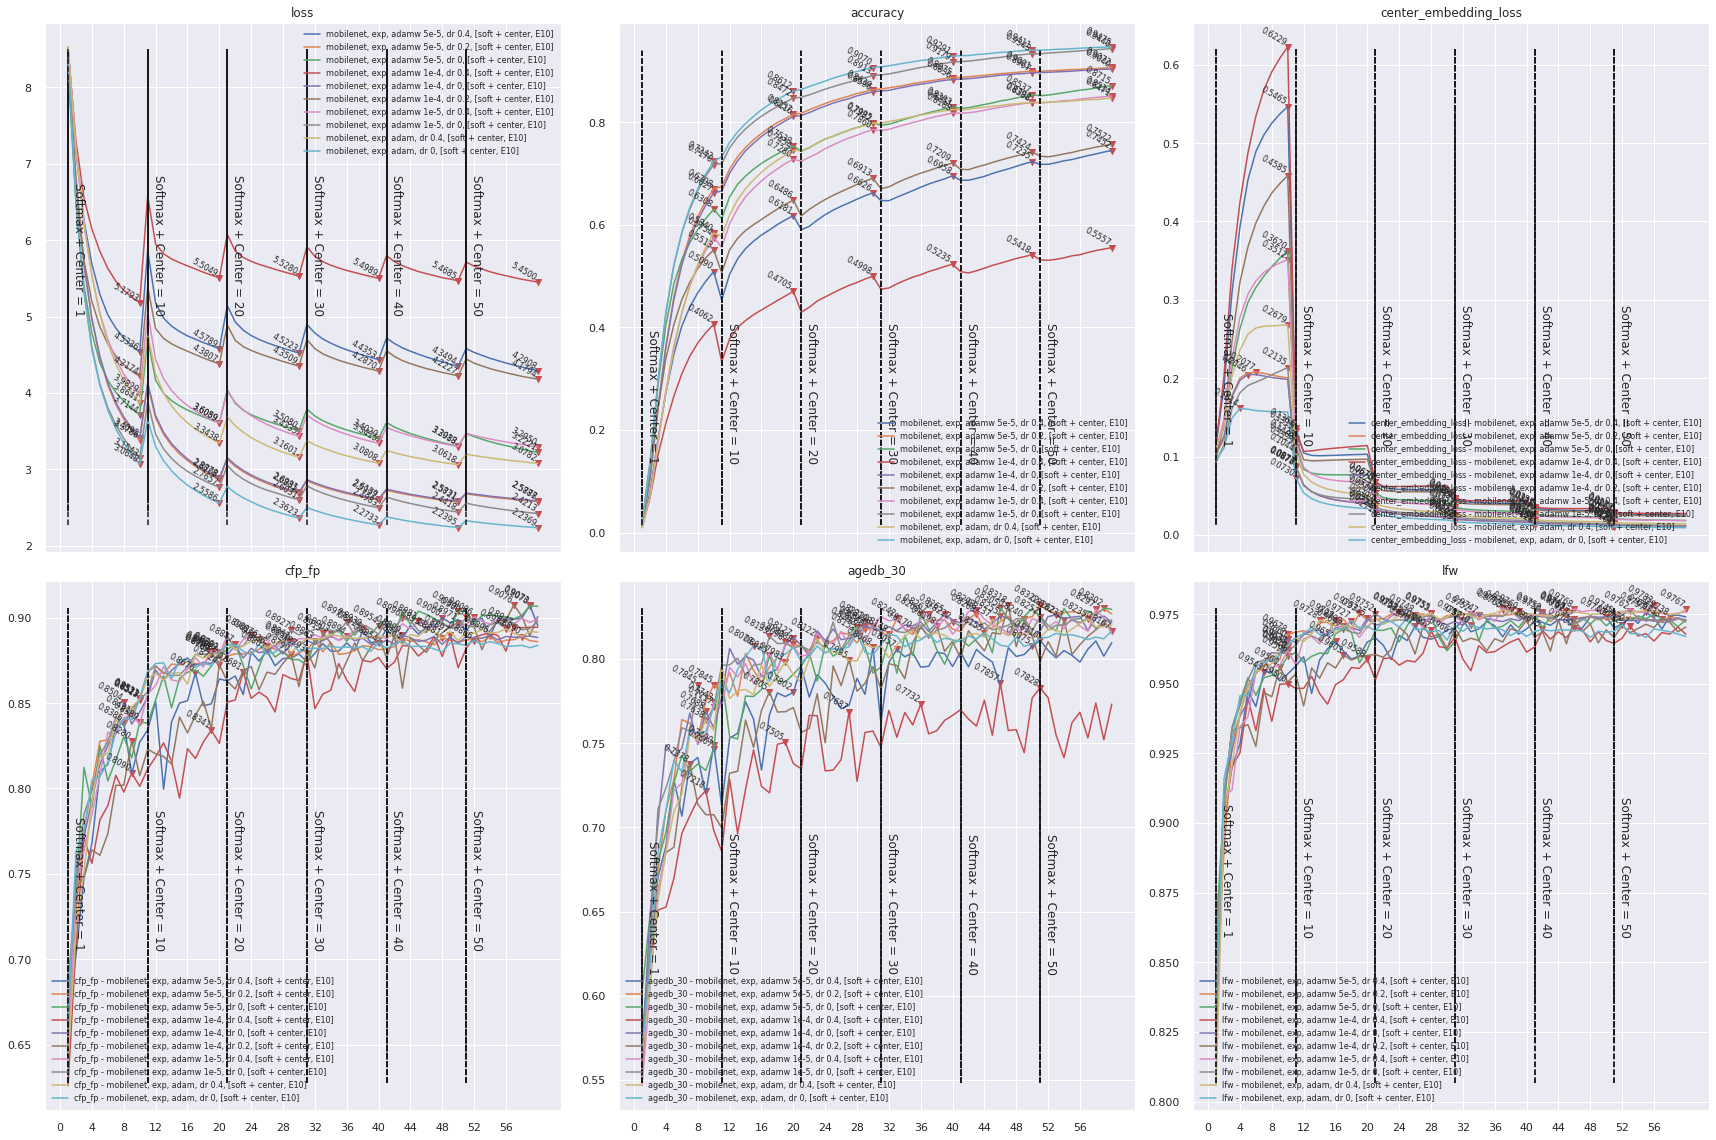

In [1]:
import plot
epochs = [10, 10, 10, 10, 10, 10]
names=["Softmax + Center = 1", "Softmax + Center = 10", "Softmax + Center = 20", "Softmax + Center = 30", "Softmax + Center = 40", "Softmax + Center = 50", "Softmax + Center = 60", "Softmax + Center = 70"]
customs = ["cfp_fp", "agedb_30", "lfw", "center_embedding_loss", "triplet_embedding_loss"]
hists_path = "checkpoints/mobilenet_casia_tests/"
axes, _ = plot.hist_plot_split(hists_path + "T_adamw_5e5_dr0.4_casia_hist.json", epochs, names=names, customs=customs, fig_label='mobilenet, exp, adamw 5e-5, dr 0.4, [soft + center, E10]', eval_split=True)
pp = {"epochs": epochs, "customs": customs, "axes": axes}

axes, _ = plot.hist_plot_split(hists_path + "T_adamw_5e5_dr0.2_casia_hist.json", fig_label='mobilenet, exp, adamw 5e-5, dr 0.2, [soft + center, E10]', **pp)
axes, _ = plot.hist_plot_split(hists_path + "T_adamw_5e5_dr0_casia_hist.json", fig_label='mobilenet, exp, adamw 5e-5, dr 0, [soft + center, E10]', **pp)

axes, _ = plot.hist_plot_split(hists_path + "T_adamw_1e4_dr0.4_casia_hist.json", fig_label='mobilenet, exp, adamw 1e-4, dr 0.4, [soft + center, E10]', **pp)
axes, _ = plot.hist_plot_split(hists_path + "T_adamw_1e4_dr0.2_casia_hist.json", fig_label='mobilenet, exp, adamw 1e-4, dr 0, [soft + center, E10]', **pp)
axes, _ = plot.hist_plot_split(hists_path + "T_adamw_1e4_dr0_casia_hist.json", fig_label='mobilenet, exp, adamw 1e-4, dr 0.2, [soft + center, E10]', **pp)

axes, _ = plot.hist_plot_split(hists_path + "T_adamw_1e5_dr0.4_casia_hist.json", fig_label='mobilenet, exp, adamw 1e-5, dr 0.4, [soft + center, E10]', **pp)
axes, _ = plot.hist_plot_split(hists_path + "T_adamw_1e5_dr0_casia_hist.json", fig_label='mobilenet, exp, adamw 1e-5, dr 0, [soft + center, E10]', **pp)
axes, _ = plot.hist_plot_split(hists_path + "T_adam_dr0.4_casia_hist.json", fig_label='mobilenet, exp, adam, dr 0.4, [soft + center, E10]', **pp)
axes, _ = plot.hist_plot_split(hists_path + "T_adam_dr0_casia_hist.json", fig_label='mobilenet, exp, adam, dr 0, [soft + center, E10]', **pp)

## ArcfaceLoss combining Triplet tests
- Train `arcface loss` after `softmax + centerloss`, train `2` epochs `bottleneckOnly` and then `40` epochs `ArcfaceLoss`.
- **AdamW weight_decay** choose from `[5e-5, 1e-4]`.
- **Dropout rate** choose from `[0, 0.2]`
- **Loss function** is `softmax label_smoothing=0.1` + `centerloss`.
- **Centerloss weight** scales from `1` to `50`, each train `10` epochs.

| AdamW weight_decay | Dropout rate | Triplet weight | Triplet alpha |
| ------------------ | ------------ | -------------- | ------------- |
| 5e-5               | 0.0          | None           | None          |
| 5e-5               | 0.0          | 64             | 0.3           |
| 5e-5               | 0.2          | 64             | 0.3           |
| 1e-4               | 0.0          | None           | None          |
| 1e-4               | 0.0          | 64             | 0.3           |
| 1e-4               | 0.2          | 64             | 0.3           |

In [2]:
# weight_decay 5e-5, dropout_rate 0.0, no triplet
import tensorflow_addons as tfa
tt = train.Train(data_path, save_path='T_adamw_5e5_dr0_arc_casia.h5', eval_paths=eval_paths,
                 basic_model=None, model='checkpoints/T_adamw_5e5_dr0_casia.h5', lr_base=0.001,
                 batch_size=64, random_status=3)
sch = [
    {"loss": losses.ArcfaceLoss(), "bottleneckOnly": True, "epoch": 2},
    {"loss": losses.ArcfaceLoss(), "epoch": 40}
]

tt.train(sch, 60)

>>>> Load model from h5 file: checkpoints/T_adamw_5e5_dr0_casia.h5...
>>>> Reload from center backup: T_adamw_5e5_dr0_casia_centers.npy
>>>> Init type by loss function name...
>>>> Train arcface...
>>>> Init softmax dataset...
>>>> Image length: 490623, Image class length: 490623, classes: 10572
>>>> Add arcface layer...
>>>> loss_weights: None
>>>> Insert weight decay callback...
>>>> Train bottleneckOnly...

Learning rate for iter 1 is 0.001
Weight decay for iter 1 is 4.999999509891495e-05
Epoch 1/2
7666/7666 [==============================] - ETA: 0s - loss: 19.6633 - accuracy: 0.7839
Epoch 00001: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 108s 14ms/step - loss: 19.6633 - accuracy: 0.7839

Learning rate for iter 2 is 0.001
Weight decay for iter 2 is 4.999999509891495e-05
Epoch 2/2
7663/7666 [============================>.] - ETA: 0s - loss: 15.5362 - accuracy: 0.8602
Epoch 00002: saving model to ./chec

Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  7.94it/s]



>>>> lfw evaluation max accuracy: 0.978333, thresh: 0.257650, previous max accuracy: 0.000000
>>>> Improved = 0.978333



Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.11it/s]


>>>> cfp_fp evaluation max accuracy: 0.899714, thresh: 0.176902, previous max accuracy: 0.000000
>>>> Improved = 0.899714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.33it/s]


>>>> agedb_30 evaluation max accuracy: 0.830667, thresh: 0.209289, previous max accuracy: 0.000000
>>>> Improved = 0.830667
Saving model to: ./checkpoints/T_adamw_5e5_dr0_arc_casia_basic_agedb_30_epoch_61_0.830667.h5



Epoch 00061: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 543s 71ms/step - loss: 13.8101 - accuracy: 0.8775

Learning rate for iter 62 is 7.808166600115313e-05
Weight decay for iter 62 is 3.904082404915243e-06
Epoch 62/100
7666/7666 [==============================] - ETA: 0s - loss: 12.5319 - accuracy: 0.8890


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.36it/s]


>>>> lfw evaluation max accuracy: 0.973333, thresh: 0.255889, previous max accuracy: 0.978333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.19it/s]


>>>> cfp_fp evaluation max accuracy: 0.889429, thresh: 0.166640, previous max accuracy: 0.899714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.34it/s]


>>>> agedb_30 evaluation max accuracy: 0.831667, thresh: 0.227780, previous max accuracy: 0.830667
>>>> Improved = 0.001000
Saving model to: ./checkpoints/T_adamw_5e5_dr0_arc_casia_basic_agedb_30_epoch_62_0.831667.h5



Epoch 00062: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 543s 71ms/step - loss: 12.5319 - accuracy: 0.8890

Learning rate for iter 63 is 7.427357821433387e-05
Weight decay for iter 63 is 3.7136785522307036e-06
Epoch 63/100
7666/7666 [==============================] - ETA: 0s - loss: 12.0144 - accuracy: 0.8940


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.24it/s]


>>>> lfw evaluation max accuracy: 0.978000, thresh: 0.261087, previous max accuracy: 0.978333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.38it/s]


>>>> cfp_fp evaluation max accuracy: 0.894286, thresh: 0.162532, previous max accuracy: 0.899714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.23it/s]


>>>> agedb_30 evaluation max accuracy: 0.833833, thresh: 0.225809, previous max accuracy: 0.831667
>>>> Improved = 0.002167
Saving model to: ./checkpoints/T_adamw_5e5_dr0_arc_casia_basic_agedb_30_epoch_63_0.833833.h5



Epoch 00063: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 545s 71ms/step - loss: 12.0144 - accuracy: 0.8940

Learning rate for iter 64 is 7.065121306042957e-05
Weight decay for iter 64 is 3.5325601857039146e-06
Epoch 64/100
7666/7666 [==============================] - ETA: 0s - loss: 11.6425 - accuracy: 0.8969


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.26it/s]


>>>> lfw evaluation max accuracy: 0.977000, thresh: 0.256571, previous max accuracy: 0.978333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.29it/s]


>>>> cfp_fp evaluation max accuracy: 0.891143, thresh: 0.166981, previous max accuracy: 0.899714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.39it/s]



>>>> agedb_30 evaluation max accuracy: 0.832000, thresh: 0.210796, previous max accuracy: 0.833833

Epoch 00064: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 540s 70ms/step - loss: 11.6425 - accuracy: 0.8969

Learning rate for iter 65 is 6.720551273974975e-05
Weight decay for iter 65 is 3.3602750590944197e-06
Epoch 65/100
7666/7666 [==============================] - ETA: 0s - loss: 11.3683 - accuracy: 0.8991


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.32it/s]


>>>> lfw evaluation max accuracy: 0.976667, thresh: 0.248098, previous max accuracy: 0.978333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.34it/s]


>>>> cfp_fp evaluation max accuracy: 0.888857, thresh: 0.171475, previous max accuracy: 0.899714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.42it/s]


>>>> agedb_30 evaluation max accuracy: 0.834500, thresh: 0.204356, previous max accuracy: 0.833833
>>>> Improved = 0.000667
Saving model to: ./checkpoints/T_adamw_5e5_dr0_arc_casia_basic_agedb_30_epoch_65_0.834500.h5



Epoch 00065: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 543s 71ms/step - loss: 11.3683 - accuracy: 0.8991

Learning rate for iter 66 is 6.392786120670758e-05
Weight decay for iter 66 is 3.1963925266609294e-06
Epoch 66/100
7666/7666 [==============================] - ETA: 0s - loss: 11.1304 - accuracy: 0.9012


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.38it/s]


>>>> lfw evaluation max accuracy: 0.975000, thresh: 0.258796, previous max accuracy: 0.978333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.27it/s]


>>>> cfp_fp evaluation max accuracy: 0.888429, thresh: 0.156091, previous max accuracy: 0.899714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.44it/s]


>>>> agedb_30 evaluation max accuracy: 0.832500, thresh: 0.208337, previous max accuracy: 0.834500



Epoch 00066: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 543s 71ms/step - loss: 11.1304 - accuracy: 0.9012

Learning rate for iter 67 is 6.0810062625217954e-05
Weight decay for iter 67 is 3.040502861040295e-06
Epoch 67/100
7666/7666 [==============================] - ETA: 0s - loss: 10.9240 - accuracy: 0.9033


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.41it/s]


>>>> lfw evaluation max accuracy: 0.972667, thresh: 0.245446, previous max accuracy: 0.978333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.36it/s]


>>>> cfp_fp evaluation max accuracy: 0.879571, thresh: 0.174573, previous max accuracy: 0.899714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.49it/s]


>>>> agedb_30 evaluation max accuracy: 0.830000, thresh: 0.209404, previous max accuracy: 0.834500



Epoch 00067: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 541s 71ms/step - loss: 10.9240 - accuracy: 0.9033

Learning rate for iter 68 is 5.7844320874838456e-05
Weight decay for iter 68 is 2.8922156616317807e-06
Epoch 68/100
7666/7666 [==============================] - ETA: 0s - loss: 10.7250 - accuracy: 0.9047


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.23it/s]


>>>> lfw evaluation max accuracy: 0.974000, thresh: 0.230794, previous max accuracy: 0.978333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.34it/s]


>>>> cfp_fp evaluation max accuracy: 0.886143, thresh: 0.156936, previous max accuracy: 0.899714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.33it/s]


>>>> agedb_30 evaluation max accuracy: 0.837667, thresh: 0.183643, previous max accuracy: 0.834500
>>>> Improved = 0.003167
Saving model to: ./checkpoints/T_adamw_5e5_dr0_arc_casia_basic_agedb_30_epoch_68_0.837667.h5



Epoch 00068: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 543s 71ms/step - loss: 10.7250 - accuracy: 0.9047

Learning rate for iter 69 is 5.502322005640721e-05
Weight decay for iter 69 is 2.7511607640917646e-06
Epoch 69/100
7666/7666 [==============================] - ETA: 0s - loss: 10.5495 - accuracy: 0.9066


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.39it/s]


>>>> lfw evaluation max accuracy: 0.976500, thresh: 0.243309, previous max accuracy: 0.978333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.26it/s]


>>>> cfp_fp evaluation max accuracy: 0.884429, thresh: 0.162999, previous max accuracy: 0.899714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.41it/s]


>>>> agedb_30 evaluation max accuracy: 0.830667, thresh: 0.207382, previous max accuracy: 0.837667



Epoch 00069: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 539s 70ms/step - loss: 10.5495 - accuracy: 0.9066

Learning rate for iter 70 is 5.233970594843238e-05
Weight decay for iter 70 is 2.6169850571022835e-06
Epoch 70/100
7666/7666 [==============================] - ETA: 0s - loss: 10.3895 - accuracy: 0.9079


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.23it/s]


>>>> lfw evaluation max accuracy: 0.975333, thresh: 0.238293, previous max accuracy: 0.978333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.34it/s]


>>>> cfp_fp evaluation max accuracy: 0.879000, thresh: 0.180169, previous max accuracy: 0.899714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.22it/s]


>>>> agedb_30 evaluation max accuracy: 0.838333, thresh: 0.188052, previous max accuracy: 0.837667
>>>> Improved = 0.000667
Saving model to: ./checkpoints/T_adamw_5e5_dr0_arc_casia_basic_agedb_30_epoch_70_0.838333.h5



Epoch 00070: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 543s 71ms/step - loss: 10.3895 - accuracy: 0.9079

Learning rate for iter 71 is 4.9787068367863945e-05
Weight decay for iter 71 is 2.4893531644920586e-06
Epoch 71/100
7666/7666 [==============================] - ETA: 0s - loss: 10.2367 - accuracy: 0.9092


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.42it/s]


>>>> lfw evaluation max accuracy: 0.974500, thresh: 0.244874, previous max accuracy: 0.978333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.25it/s]


>>>> cfp_fp evaluation max accuracy: 0.883000, thresh: 0.158555, previous max accuracy: 0.899714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.48it/s]


>>>> agedb_30 evaluation max accuracy: 0.832833, thresh: 0.193664, previous max accuracy: 0.838333



Epoch 00071: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 542s 71ms/step - loss: 10.2367 - accuracy: 0.9092

Learning rate for iter 72 is 4.7358924391140906e-05
Weight decay for iter 72 is 2.3679458536207676e-06
Epoch 72/100
7666/7666 [==============================] - ETA: 0s - loss: 10.0909 - accuracy: 0.9105


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.23it/s]


>>>> lfw evaluation max accuracy: 0.971833, thresh: 0.212671, previous max accuracy: 0.978333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.45it/s]


>>>> cfp_fp evaluation max accuracy: 0.879429, thresh: 0.159385, previous max accuracy: 0.899714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.26it/s]


>>>> agedb_30 evaluation max accuracy: 0.833500, thresh: 0.188086, previous max accuracy: 0.838333



Epoch 00072: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 542s 71ms/step - loss: 10.0909 - accuracy: 0.9105

Learning rate for iter 73 is 4.50492023935578e-05
Weight decay for iter 73 is 2.2524598080053693e-06
Epoch 73/100
7666/7666 [==============================] - ETA: 0s - loss: 9.9494 - accuracy: 0.9117


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.19it/s]


>>>> lfw evaluation max accuracy: 0.974167, thresh: 0.243280, previous max accuracy: 0.978333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.31it/s]


>>>> cfp_fp evaluation max accuracy: 0.876143, thresh: 0.165907, previous max accuracy: 0.899714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.34it/s]



>>>> agedb_30 evaluation max accuracy: 0.828667, thresh: 0.190862, previous max accuracy: 0.838333

Epoch 00073: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 542s 71ms/step - loss: 9.9494 - accuracy: 0.9117

Learning rate for iter 74 is 4.2852126867040164e-05
Weight decay for iter 74 is 2.1426060357043752e-06
Epoch 74/100
7666/7666 [==============================] - ETA: 0s - loss: 9.8242 - accuracy: 0.9131


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.31it/s]


>>>> lfw evaluation max accuracy: 0.974833, thresh: 0.222062, previous max accuracy: 0.978333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.34it/s]


>>>> cfp_fp evaluation max accuracy: 0.878000, thresh: 0.155513, previous max accuracy: 0.899714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.20it/s]


>>>> agedb_30 evaluation max accuracy: 0.837333, thresh: 0.183904, previous max accuracy: 0.838333



Epoch 00074: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 541s 71ms/step - loss: 9.8242 - accuracy: 0.9131

Learning rate for iter 75 is 4.0762203978366214e-05
Weight decay for iter 75 is 2.03810986931785e-06
Epoch 75/100
7666/7666 [==============================] - ETA: 0s - loss: 9.7034 - accuracy: 0.9143


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.29it/s]



>>>> lfw evaluation max accuracy: 0.974833, thresh: 0.229267, previous max accuracy: 0.978333



Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.34it/s]


>>>> cfp_fp evaluation max accuracy: 0.878286, thresh: 0.149099, previous max accuracy: 0.899714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.44it/s]


>>>> agedb_30 evaluation max accuracy: 0.832167, thresh: 0.181292, previous max accuracy: 0.838333



Epoch 00075: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 542s 71ms/step - loss: 9.7034 - accuracy: 0.9143

Learning rate for iter 76 is 3.877420783172201e-05
Weight decay for iter 76 is 1.9387100564927096e-06
Epoch 76/100
7666/7666 [==============================] - ETA: 0s - loss: 9.5844 - accuracy: 0.9156


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.26it/s]


>>>> lfw evaluation max accuracy: 0.972667, thresh: 0.214823, previous max accuracy: 0.978333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.30it/s]


>>>> cfp_fp evaluation max accuracy: 0.876571, thresh: 0.151009, previous max accuracy: 0.899714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.43it/s]


>>>> agedb_30 evaluation max accuracy: 0.827667, thresh: 0.191768, previous max accuracy: 0.838333



Epoch 00076: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 543s 71ms/step - loss: 9.5844 - accuracy: 0.9156

Learning rate for iter 77 is 3.688316740124e-05
Weight decay for iter 77 is 1.8441581914885319e-06
Epoch 77/100
7666/7666 [==============================] - ETA: 0s - loss: 9.4771 - accuracy: 0.9163


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.14it/s]


>>>> lfw evaluation max accuracy: 0.974167, thresh: 0.231329, previous max accuracy: 0.978333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.49it/s]


>>>> cfp_fp evaluation max accuracy: 0.872143, thresh: 0.166794, previous max accuracy: 0.899714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.22it/s]


>>>> agedb_30 evaluation max accuracy: 0.832667, thresh: 0.180154, previous max accuracy: 0.838333



Epoch 00077: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 542s 71ms/step - loss: 9.4771 - accuracy: 0.9163

Learning rate for iter 78 is 3.5084354100845025e-05
Weight decay for iter 78 is 1.754217464622343e-06
Epoch 78/100
7666/7666 [==============================] - ETA: 0s - loss: 9.3659 - accuracy: 0.9177


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.40it/s]


>>>> lfw evaluation max accuracy: 0.974833, thresh: 0.231238, previous max accuracy: 0.978333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.35it/s]


>>>> cfp_fp evaluation max accuracy: 0.873429, thresh: 0.163774, previous max accuracy: 0.899714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.45it/s]


>>>> agedb_30 evaluation max accuracy: 0.831333, thresh: 0.176900, previous max accuracy: 0.838333



Epoch 00078: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 541s 71ms/step - loss: 9.3659 - accuracy: 0.9177

Learning rate for iter 79 is 3.337326996032607e-05
Weight decay for iter 79 is 1.6686633443896426e-06
Epoch 79/100
7666/7666 [==============================] - ETA: 0s - loss: 9.2636 - accuracy: 0.9182


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.22it/s]


>>>> lfw evaluation max accuracy: 0.975667, thresh: 0.225845, previous max accuracy: 0.978333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.47it/s]


>>>> cfp_fp evaluation max accuracy: 0.877286, thresh: 0.149220, previous max accuracy: 0.899714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.31it/s]


>>>> agedb_30 evaluation max accuracy: 0.826167, thresh: 0.196869, previous max accuracy: 0.838333



Epoch 00079: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 543s 71ms/step - loss: 9.2636 - accuracy: 0.9182

Learning rate for iter 80 is 3.174563637806794e-05
Weight decay for iter 80 is 1.5872816447881632e-06
Epoch 80/100
7666/7666 [==============================] - ETA: 0s - loss: 9.1677 - accuracy: 0.9196


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.44it/s]


>>>> lfw evaluation max accuracy: 0.973333, thresh: 0.219646, previous max accuracy: 0.978333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.32it/s]



>>>> cfp_fp evaluation max accuracy: 0.870857, thresh: 0.162854, previous max accuracy: 0.899714



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.53it/s]



>>>> agedb_30 evaluation max accuracy: 0.826167, thresh: 0.191327, previous max accuracy: 0.838333

Epoch 00080: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 541s 71ms/step - loss: 9.1677 - accuracy: 0.9196

Learning rate for iter 81 is 3.01973834223185e-05
Weight decay for iter 81 is 1.509868980065221e-06
Epoch 81/100
7666/7666 [==============================] - ETA: 0s - loss: 9.0754 - accuracy: 0.9204


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.20it/s]


>>>> lfw evaluation max accuracy: 0.970667, thresh: 0.222426, previous max accuracy: 0.978333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.46it/s]


>>>> cfp_fp evaluation max accuracy: 0.875000, thresh: 0.164935, previous max accuracy: 0.899714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.34it/s]


>>>> agedb_30 evaluation max accuracy: 0.825500, thresh: 0.183335, previous max accuracy: 0.838333



Epoch 00081: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 542s 71ms/step - loss: 9.0754 - accuracy: 0.9204

Learning rate for iter 82 is 2.8724639654239422e-05
Weight decay for iter 82 is 1.4362318552230136e-06
Epoch 82/100
7666/7666 [==============================] - ETA: 0s - loss: 8.9789 - accuracy: 0.9212


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.29it/s]


>>>> lfw evaluation max accuracy: 0.970667, thresh: 0.232504, previous max accuracy: 0.978333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.30it/s]


>>>> cfp_fp evaluation max accuracy: 0.874429, thresh: 0.154344, previous max accuracy: 0.899714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.44it/s]


>>>> agedb_30 evaluation max accuracy: 0.832500, thresh: 0.180131, previous max accuracy: 0.838333



Epoch 00082: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 541s 71ms/step - loss: 8.9789 - accuracy: 0.9212

Learning rate for iter 83 is 2.732372244729256e-05
Weight decay for iter 83 is 1.3661858702107565e-06
Epoch 83/100
7666/7666 [==============================] - ETA: 0s - loss: 8.8991 - accuracy: 0.9221


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.27it/s]


>>>> lfw evaluation max accuracy: 0.971500, thresh: 0.222748, previous max accuracy: 0.978333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.33it/s]



>>>> cfp_fp evaluation max accuracy: 0.872286, thresh: 0.162255, previous max accuracy: 0.899714



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.20it/s]


>>>> agedb_30 evaluation max accuracy: 0.816667, thresh: 0.183335, previous max accuracy: 0.838333



Epoch 00083: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 542s 71ms/step - loss: 8.8991 - accuracy: 0.9221

Learning rate for iter 84 is 2.5991128778755335e-05
Weight decay for iter 84 is 1.2995562883588718e-06
Epoch 84/100
7666/7666 [==============================] - ETA: 0s - loss: 8.8130 - accuracy: 0.9230


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.41it/s]


>>>> lfw evaluation max accuracy: 0.971500, thresh: 0.221767, previous max accuracy: 0.978333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.31it/s]


>>>> cfp_fp evaluation max accuracy: 0.873714, thresh: 0.157756, previous max accuracy: 0.899714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.42it/s]


>>>> agedb_30 evaluation max accuracy: 0.823333, thresh: 0.179324, previous max accuracy: 0.838333



Epoch 00084: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 541s 71ms/step - loss: 8.8130 - accuracy: 0.9230

Learning rate for iter 85 is 2.472352647033939e-05
Weight decay for iter 85 is 1.2361761037027463e-06
Epoch 85/100
7666/7666 [==============================] - ETA: 0s - loss: 8.7304 - accuracy: 0.9237


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.43it/s]


>>>> lfw evaluation max accuracy: 0.971167, thresh: 0.233694, previous max accuracy: 0.978333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.28it/s]


>>>> cfp_fp evaluation max accuracy: 0.868286, thresh: 0.154340, previous max accuracy: 0.899714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.53it/s]


>>>> agedb_30 evaluation max accuracy: 0.825500, thresh: 0.186478, previous max accuracy: 0.838333



Epoch 00085: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 542s 71ms/step - loss: 8.7304 - accuracy: 0.9237

Learning rate for iter 86 is 2.3517745856009108e-05
Weight decay for iter 86 is 1.1758871778511093e-06
Epoch 86/100
7666/7666 [==============================] - ETA: 0s - loss: 8.6369 - accuracy: 0.9247


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.23it/s]


>>>> lfw evaluation max accuracy: 0.971167, thresh: 0.217882, previous max accuracy: 0.978333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.41it/s]


>>>> cfp_fp evaluation max accuracy: 0.867286, thresh: 0.167788, previous max accuracy: 0.899714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.20it/s]


>>>> agedb_30 evaluation max accuracy: 0.825167, thresh: 0.191717, previous max accuracy: 0.838333



Epoch 00086: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 541s 71ms/step - loss: 8.6369 - accuracy: 0.9247

Learning rate for iter 87 is 2.2370771856165592e-05
Weight decay for iter 87 is 1.1185384209966287e-06
Epoch 87/100
7666/7666 [==============================] - ETA: 0s - loss: 8.5897 - accuracy: 0.9250


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.31it/s]


>>>> lfw evaluation max accuracy: 0.971000, thresh: 0.224948, previous max accuracy: 0.978333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.30it/s]


>>>> cfp_fp evaluation max accuracy: 0.863714, thresh: 0.150448, previous max accuracy: 0.899714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.48it/s]


>>>> agedb_30 evaluation max accuracy: 0.828833, thresh: 0.179850, previous max accuracy: 0.838333



Epoch 00087: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 543s 71ms/step - loss: 8.5897 - accuracy: 0.9250

Learning rate for iter 88 is 2.127973643837717e-05
Weight decay for iter 88 is 1.063986701410613e-06
Epoch 88/100
7666/7666 [==============================] - ETA: 0s - loss: 8.5140 - accuracy: 0.9260


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.22it/s]



>>>> lfw evaluation max accuracy: 0.970500, thresh: 0.214174, previous max accuracy: 0.978333



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.45it/s]


>>>> cfp_fp evaluation max accuracy: 0.868857, thresh: 0.151570, previous max accuracy: 0.899714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.23it/s]


>>>> agedb_30 evaluation max accuracy: 0.816167, thresh: 0.190921, previous max accuracy: 0.838333



Epoch 00088: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 542s 71ms/step - loss: 8.5140 - accuracy: 0.9260

Learning rate for iter 89 is 2.024191144580438e-05
Weight decay for iter 89 is 1.0120954812009586e-06
Epoch 89/100
7666/7666 [==============================] - ETA: 0s - loss: 8.4502 - accuracy: 0.9262


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.36it/s]


>>>> lfw evaluation max accuracy: 0.970333, thresh: 0.222323, previous max accuracy: 0.978333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.28it/s]



>>>> cfp_fp evaluation max accuracy: 0.863857, thresh: 0.162431, previous max accuracy: 0.899714



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.40it/s]



>>>> agedb_30 evaluation max accuracy: 0.817667, thresh: 0.185473, previous max accuracy: 0.838333

Epoch 00089: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 543s 71ms/step - loss: 8.4502 - accuracy: 0.9262

Learning rate for iter 90 is 1.925470177538692e-05
Weight decay for iter 90 is 9.627349299989874e-07
Epoch 90/100
7666/7666 [==============================] - ETA: 0s - loss: 8.3887 - accuracy: 0.9272


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.27it/s]


>>>> lfw evaluation max accuracy: 0.969833, thresh: 0.217425, previous max accuracy: 0.978333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.43it/s]


>>>> cfp_fp evaluation max accuracy: 0.870571, thresh: 0.155268, previous max accuracy: 0.899714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.32it/s]


>>>> agedb_30 evaluation max accuracy: 0.817167, thresh: 0.186122, previous max accuracy: 0.838333



Epoch 00090: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 542s 71ms/step - loss: 8.3887 - accuracy: 0.9272

Learning rate for iter 91 is 1.831563888873418e-05
Weight decay for iter 91 is 9.15781811272609e-07
Epoch 91/100
7666/7666 [==============================] - ETA: 0s - loss: 8.3227 - accuracy: 0.9276


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.43it/s]


>>>> lfw evaluation max accuracy: 0.971333, thresh: 0.222627, previous max accuracy: 0.978333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.37it/s]


>>>> cfp_fp evaluation max accuracy: 0.867000, thresh: 0.162363, previous max accuracy: 0.899714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.49it/s]


>>>> agedb_30 evaluation max accuracy: 0.830500, thresh: 0.170602, previous max accuracy: 0.838333



Epoch 00091: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 538s 70ms/step - loss: 8.3227 - accuracy: 0.9276

Learning rate for iter 92 is 1.7422374639493514e-05
Weight decay for iter 92 is 8.711186296750384e-07
Epoch 92/100
7666/7666 [==============================] - ETA: 0s - loss: 8.2570 - accuracy: 0.9283


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.21it/s]


>>>> lfw evaluation max accuracy: 0.973000, thresh: 0.230942, previous max accuracy: 0.978333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.48it/s]


>>>> cfp_fp evaluation max accuracy: 0.862286, thresh: 0.166376, previous max accuracy: 0.899714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.42it/s]


>>>> agedb_30 evaluation max accuracy: 0.825833, thresh: 0.176883, previous max accuracy: 0.838333



Epoch 00092: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 541s 71ms/step - loss: 8.2570 - accuracy: 0.9283

Learning rate for iter 93 is 1.657267540176124e-05
Weight decay for iter 93 is 8.286336878882139e-07
Epoch 93/100
7666/7666 [==============================] - ETA: 0s - loss: 8.2019 - accuracy: 0.9287


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.33it/s]


>>>> lfw evaluation max accuracy: 0.970500, thresh: 0.215298, previous max accuracy: 0.978333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.33it/s]


>>>> cfp_fp evaluation max accuracy: 0.866429, thresh: 0.157867, previous max accuracy: 0.899714


Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.63it/s]



>>>> agedb_30 evaluation max accuracy: 0.817500, thresh: 0.177385, previous max accuracy: 0.838333

Epoch 00093: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 539s 70ms/step - loss: 8.2019 - accuracy: 0.9287

Learning rate for iter 94 is 1.5764416484854488e-05
Weight decay for iter 94 is 7.882207455622847e-07
Epoch 94/100
7666/7666 [==============================] - ETA: 0s - loss: 8.1520 - accuracy: 0.9295


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.32it/s]


>>>> lfw evaluation max accuracy: 0.968000, thresh: 0.213278, previous max accuracy: 0.978333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.31it/s]



>>>> cfp_fp evaluation max accuracy: 0.866571, thresh: 0.168430, previous max accuracy: 0.899714



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.42it/s]


>>>> agedb_30 evaluation max accuracy: 0.817167, thresh: 0.184967, previous max accuracy: 0.838333



Epoch 00094: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 542s 71ms/step - loss: 8.1520 - accuracy: 0.9295

Learning rate for iter 95 is 1.4995576820477704e-05
Weight decay for iter 95 is 7.497787350985163e-07
Epoch 95/100
7666/7666 [==============================] - ETA: 0s - loss: 8.0966 - accuracy: 0.9297


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.23it/s]


>>>> lfw evaluation max accuracy: 0.970667, thresh: 0.212740, previous max accuracy: 0.978333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.43it/s]


>>>> cfp_fp evaluation max accuracy: 0.862286, thresh: 0.150990, previous max accuracy: 0.899714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.21it/s]


>>>> agedb_30 evaluation max accuracy: 0.818000, thresh: 0.186471, previous max accuracy: 0.838333



Epoch 00095: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 542s 71ms/step - loss: 8.0966 - accuracy: 0.9297

Learning rate for iter 96 is 1.4264233908999255e-05
Weight decay for iter 96 is 7.13211591119034e-07
Epoch 96/100
7666/7666 [==============================] - ETA: 0s - loss: 8.0440 - accuracy: 0.9304


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.36it/s]



>>>> lfw evaluation max accuracy: 0.969667, thresh: 0.212259, previous max accuracy: 0.978333



Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.31it/s]



>>>> cfp_fp evaluation max accuracy: 0.866714, thresh: 0.154905, previous max accuracy: 0.899714



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.45it/s]


>>>> agedb_30 evaluation max accuracy: 0.819500, thresh: 0.188188, previous max accuracy: 0.838333



Epoch 00096: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 541s 71ms/step - loss: 8.0440 - accuracy: 0.9304

Learning rate for iter 97 is 1.3568559012200934e-05
Weight decay for iter 97 is 6.784278525628906e-07
Epoch 97/100
7666/7666 [==============================] - ETA: 0s - loss: 7.9976 - accuracy: 0.9308


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.37it/s]


>>>> lfw evaluation max accuracy: 0.968167, thresh: 0.214623, previous max accuracy: 0.978333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.39it/s]


>>>> cfp_fp evaluation max accuracy: 0.868571, thresh: 0.152843, previous max accuracy: 0.899714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.24it/s]


>>>> agedb_30 evaluation max accuracy: 0.821667, thresh: 0.186186, previous max accuracy: 0.838333



Epoch 00097: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 541s 71ms/step - loss: 7.9976 - accuracy: 0.9308

Learning rate for iter 98 is 1.2906812580479862e-05
Weight decay for iter 98 is 6.453405489992292e-07
Epoch 98/100
7666/7666 [==============================] - ETA: 0s - loss: 7.9555 - accuracy: 0.9314


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.45it/s]


>>>> lfw evaluation max accuracy: 0.970500, thresh: 0.212258, previous max accuracy: 0.978333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.26it/s]


>>>> cfp_fp evaluation max accuracy: 0.867429, thresh: 0.138529, previous max accuracy: 0.899714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.43it/s]


>>>> agedb_30 evaluation max accuracy: 0.813667, thresh: 0.183185, previous max accuracy: 0.838333



Epoch 00098: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 542s 71ms/step - loss: 7.9555 - accuracy: 0.9314

Learning rate for iter 99 is 1.2277339903068436e-05
Weight decay for iter 99 is 6.138669164101884e-07
Epoch 99/100
7666/7666 [==============================] - ETA: 0s - loss: 7.9020 - accuracy: 0.9321


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.26it/s]


>>>> lfw evaluation max accuracy: 0.969667, thresh: 0.211683, previous max accuracy: 0.978333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.41it/s]



>>>> cfp_fp evaluation max accuracy: 0.864857, thresh: 0.147190, previous max accuracy: 0.899714



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.32it/s]


>>>> agedb_30 evaluation max accuracy: 0.813000, thresh: 0.180341, previous max accuracy: 0.838333



Epoch 00099: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 541s 71ms/step - loss: 7.9020 - accuracy: 0.9321

Learning rate for iter 100 is 1.1678566970395443e-05
Weight decay for iter 100 is 5.839282835040649e-07
Epoch 100/100
7666/7666 [==============================] - ETA: 0s - loss: 7.8685 - accuracy: 0.9320


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.35it/s]


>>>> lfw evaluation max accuracy: 0.968667, thresh: 0.211128, previous max accuracy: 0.978333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.35it/s]


>>>> cfp_fp evaluation max accuracy: 0.859286, thresh: 0.152010, previous max accuracy: 0.899714




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.62it/s]



>>>> agedb_30 evaluation max accuracy: 0.816500, thresh: 0.171795, previous max accuracy: 0.838333

Epoch 00100: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 541s 71ms/step - loss: 7.8685 - accuracy: 0.9320
>>>> Train arcface DONE!!! epochs = [60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99], model.stop_training = False
>>>> My history:
  loss = [19.663301467895508, 15.536394119262695, 13.810142517089844, 12.531889915466309, 12.014444351196289, 11.642539024353027, 11.368285179138184, 11.130386352539062, 10.924027442932129, 10.725019454956055, 10.549511909484863, 10.389460563659668, 10.236660957336426, 10.090920448303223, 9.949358940124512, 9.82422924041748, 9.703394889831543, 9.584357261657715, 9.477103233337402, 9.36587142944336, 9.263598442077637, 9.167692184448242, 9.075385093688965, 8.97890090

In [5]:
# weight_decay 5e-5, dropout_rate 0.0, triplet_weight 64, alpha 0.3
import tensorflow_addons as tfa
tt = train.Train(data_path, save_path='T_adamw_5e5_dr0_arc_trip_casia.h5', eval_paths=eval_paths,
                 basic_model=None, model='checkpoints/T_adamw_5e5_dr0_casia.h5', lr_base=0.001,
                 batch_size=64, random_status=3)
sch = [
    {"loss": losses.ArcfaceLoss(), "bottleneckOnly": True, "epoch": 2},
    {"loss": losses.ArcfaceLoss(), "triplet": 64, "alpha": 0.3, "epoch": 40}
]

tt.train(sch, 60)

>>>> Load model from h5 file: checkpoints/T_adamw_5e5_dr0_casia.h5...
>>>> Reload from center backup: T_adamw_5e5_dr0_casia_centers.npy
>>>> Init type by loss function name...
>>>> Train arcface...
>>>> Init softmax dataset...
>>>> Image length: 490623, Image class length: 490623, classes: 10572
>>>> Add arcface layer...
>>>> loss_weights: None
>>>> Insert weight decay callback...
>>>> Train bottleneckOnly...

Learning rate for iter 1 is 0.001
Weight decay for iter 1 is 4.999999509891495e-05
Epoch 1/2
7664/7666 [============================>.] - ETA: 0s - loss: 19.6689 - accuracy: 0.7833
Epoch 00001: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_trip_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 112s 15ms/step - loss: 19.6684 - accuracy: 0.7833

Learning rate for iter 2 is 0.001
Weight decay for iter 2 is 4.999999509891495e-05
Epoch 2/2
7663/7666 [============================>.] - ETA: 0s - loss: 15.5431 - accuracy: 0.8596
Epoch 00002: saving model to .

Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  7.86it/s]


>>>> lfw evaluation max accuracy: 0.975167, thresh: 0.282739, previous max accuracy: 0.000000
>>>> Improved = 0.975167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.22it/s]


>>>> cfp_fp evaluation max accuracy: 0.904429, thresh: 0.179438, previous max accuracy: 0.000000
>>>> Improved = 0.904429




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.11it/s]


>>>> agedb_30 evaluation max accuracy: 0.839167, thresh: 0.229420, previous max accuracy: 0.000000
>>>> Improved = 0.839167
Saving model to: ./checkpoints/T_adamw_5e5_dr0_arc_trip_casia_basic_agedb_30_epoch_61_0.839167.h5



Epoch 00061: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 563s 76ms/step - loss: 27.2850 - triplet_embedding_loss: 0.1543 - arcface_loss: 17.4123 - arcface_accuracy: 0.8286

Learning rate for iter 62 is 7.808166600115313e-05
Weight decay for iter 62 is 3.904082404915243e-06
Epoch 62/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 25.3328 - triplet_embedding_loss: 0.1455 - arcface_loss: 16.0190 - arcface_accuracy: 0.8469


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.28it/s]


>>>> lfw evaluation max accuracy: 0.975000, thresh: 0.245628, previous max accuracy: 0.975167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.34it/s]


>>>> cfp_fp evaluation max accuracy: 0.906714, thresh: 0.184941, previous max accuracy: 0.904429
>>>> Improved = 0.002286




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.04it/s]


>>>> agedb_30 evaluation max accuracy: 0.835667, thresh: 0.238235, previous max accuracy: 0.839167



Epoch 00062: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 563s 76ms/step - loss: 25.3334 - triplet_embedding_loss: 0.1455 - arcface_loss: 16.0194 - arcface_accuracy: 0.8469

Learning rate for iter 63 is 7.427357821433387e-05
Weight decay for iter 63 is 3.7136785522307036e-06
Epoch 63/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 24.6496 - triplet_embedding_loss: 0.1427 - arcface_loss: 15.5147 - arcface_accuracy: 0.8532


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.25it/s]


>>>> lfw evaluation max accuracy: 0.974667, thresh: 0.287691, previous max accuracy: 0.975167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.12it/s]


>>>> cfp_fp evaluation max accuracy: 0.908286, thresh: 0.187337, previous max accuracy: 0.906714


>>>> Improved = 0.001571



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.27it/s]


>>>> agedb_30 evaluation max accuracy: 0.839000, thresh: 0.242137, previous max accuracy: 0.839167



Epoch 00063: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 560s 75ms/step - loss: 24.6502 - triplet_embedding_loss: 0.1427 - arcface_loss: 15.5153 - arcface_accuracy: 0.8531

Learning rate for iter 64 is 7.065121306042957e-05
Weight decay for iter 64 is 3.5325601857039146e-06
Epoch 64/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 24.1707 - triplet_embedding_loss: 0.1407 - arcface_loss: 15.1663 - arcface_accuracy: 0.8578


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.35it/s]


>>>> lfw evaluation max accuracy: 0.975333, thresh: 0.267389, previous max accuracy: 0.975167
>>>> Improved = 0.000167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.01it/s]


>>>> cfp_fp evaluation max accuracy: 0.903714, thresh: 0.175173, previous max accuracy: 0.908286




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.26it/s]


>>>> agedb_30 evaluation max accuracy: 0.846500, thresh: 0.220023, previous max accuracy: 0.839167
>>>> Improved = 0.007333
Saving model to: ./checkpoints/T_adamw_5e5_dr0_arc_trip_casia_basic_agedb_30_epoch_64_0.846500.h5



Epoch 00064: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 554s 75ms/step - loss: 24.1709 - triplet_embedding_loss: 0.1407 - arcface_loss: 15.1666 - arcface_accuracy: 0.8578

Learning rate for iter 65 is 6.720551273974975e-05
Weight decay for iter 65 is 3.3602750590944197e-06
Epoch 65/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 23.8006 - triplet_embedding_loss: 0.1390 - arcface_loss: 14.9021 - arcface_accuracy: 0.8609


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.09it/s]


>>>> lfw evaluation max accuracy: 0.974500, thresh: 0.268873, previous max accuracy: 0.975333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.35it/s]


>>>> cfp_fp evaluation max accuracy: 0.905429, thresh: 0.194071, previous max accuracy: 0.908286




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.16it/s]


>>>> agedb_30 evaluation max accuracy: 0.832833, thresh: 0.245003, previous max accuracy: 0.846500



Epoch 00065: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 557s 75ms/step - loss: 23.8004 - triplet_embedding_loss: 0.1390 - arcface_loss: 14.9021 - arcface_accuracy: 0.8609

Learning rate for iter 66 is 6.392786120670758e-05
Weight decay for iter 66 is 3.1963925266609294e-06
Epoch 66/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 23.4834 - triplet_embedding_loss: 0.1377 - arcface_loss: 14.6719 - arcface_accuracy: 0.8640


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.25it/s]


>>>> lfw evaluation max accuracy: 0.977500, thresh: 0.275932, previous max accuracy: 0.975333
>>>> Improved = 0.002167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.31it/s]


>>>> cfp_fp evaluation max accuracy: 0.897429, thresh: 0.188870, previous max accuracy: 0.908286




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.13it/s]


>>>> agedb_30 evaluation max accuracy: 0.836500, thresh: 0.209228, previous max accuracy: 0.846500



Epoch 00066: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 553s 75ms/step - loss: 23.4836 - triplet_embedding_loss: 0.1377 - arcface_loss: 14.6723 - arcface_accuracy: 0.8640

Learning rate for iter 67 is 6.0810062625217954e-05
Weight decay for iter 67 is 3.040502861040295e-06
Epoch 67/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 23.1557 - triplet_embedding_loss: 0.1358 - arcface_loss: 14.4649 - arcface_accuracy: 0.8670


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.31it/s]


>>>> lfw evaluation max accuracy: 0.970333, thresh: 0.258958, previous max accuracy: 0.977500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.09it/s]


>>>> cfp_fp evaluation max accuracy: 0.893571, thresh: 0.191723, previous max accuracy: 0.908286




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.31it/s]


>>>> agedb_30 evaluation max accuracy: 0.841000, thresh: 0.244869, previous max accuracy: 0.846500



Epoch 00067: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 560s 75ms/step - loss: 23.1556 - triplet_embedding_loss: 0.1358 - arcface_loss: 14.4651 - arcface_accuracy: 0.8670

Learning rate for iter 68 is 5.7844320874838456e-05
Weight decay for iter 68 is 2.8922156616317807e-06
Epoch 68/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 22.8336 - triplet_embedding_loss: 0.1337 - arcface_loss: 14.2765 - arcface_accuracy: 0.8694


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.39it/s]


>>>> lfw evaluation max accuracy: 0.975500, thresh: 0.289873, previous max accuracy: 0.977500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.14it/s]


>>>> cfp_fp evaluation max accuracy: 0.907143, thresh: 0.185319, previous max accuracy: 0.908286


Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.38it/s]


>>>> agedb_30 evaluation max accuracy: 0.836167, thresh: 0.237446, previous max accuracy: 0.846500



Epoch 00068: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 557s 75ms/step - loss: 22.8334 - triplet_embedding_loss: 0.1337 - arcface_loss: 14.2766 - arcface_accuracy: 0.8694

Learning rate for iter 69 is 5.502322005640721e-05
Weight decay for iter 69 is 2.7511607640917646e-06
Epoch 69/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 22.5861 - triplet_embedding_loss: 0.1324 - arcface_loss: 14.1101 - arcface_accuracy: 0.8716


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.08it/s]


>>>> lfw evaluation max accuracy: 0.974833, thresh: 0.265283, previous max accuracy: 0.977500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.28it/s]


>>>> cfp_fp evaluation max accuracy: 0.900571, thresh: 0.186684, previous max accuracy: 0.908286




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.24it/s]


>>>> agedb_30 evaluation max accuracy: 0.837500, thresh: 0.216212, previous max accuracy: 0.846500



Epoch 00069: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 557s 75ms/step - loss: 22.5860 - triplet_embedding_loss: 0.1324 - arcface_loss: 14.1103 - arcface_accuracy: 0.8716

Learning rate for iter 70 is 5.233970594843238e-05
Weight decay for iter 70 is 2.6169850571022835e-06
Epoch 70/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 22.3394 - triplet_embedding_loss: 0.1311 - arcface_loss: 13.9519 - arcface_accuracy: 0.8740


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.25it/s]


>>>> lfw evaluation max accuracy: 0.975833, thresh: 0.274520, previous max accuracy: 0.977500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.43it/s]


>>>> cfp_fp evaluation max accuracy: 0.902571, thresh: 0.184292, previous max accuracy: 0.908286




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.10it/s]


>>>> agedb_30 evaluation max accuracy: 0.848167, thresh: 0.233472, previous max accuracy: 0.846500
>>>> Improved = 0.001667
Saving model to: ./checkpoints/T_adamw_5e5_dr0_arc_trip_casia_basic_agedb_30_epoch_70_0.848167.h5



Epoch 00070: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 555s 75ms/step - loss: 22.3394 - triplet_embedding_loss: 0.1311 - arcface_loss: 13.9520 - arcface_accuracy: 0.8740

Learning rate for iter 71 is 4.9787068367863945e-05
Weight decay for iter 71 is 2.4893531644920586e-06
Epoch 71/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 22.0624 - triplet_embedding_loss: 0.1293 - arcface_loss: 13.7860 - arcface_accuracy: 0.8763


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.26it/s]


>>>> lfw evaluation max accuracy: 0.974000, thresh: 0.274128, previous max accuracy: 0.977500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.12it/s]


>>>> cfp_fp evaluation max accuracy: 0.899286, thresh: 0.190210, previous max accuracy: 0.908286


Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.25it/s]


>>>> agedb_30 evaluation max accuracy: 0.831000, thresh: 0.244755, previous max accuracy: 0.848167



Epoch 00071: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 559s 75ms/step - loss: 22.0633 - triplet_embedding_loss: 0.1293 - arcface_loss: 13.7866 - arcface_accuracy: 0.8763

Learning rate for iter 72 is 4.7358924391140906e-05
Weight decay for iter 72 is 2.3679458536207676e-06
Epoch 72/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 21.8327 - triplet_embedding_loss: 0.1279 - arcface_loss: 13.6491 - arcface_accuracy: 0.8781


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.46it/s]



>>>> lfw evaluation max accuracy: 0.974667, thresh: 0.274712, previous max accuracy: 0.977500



Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.17it/s]


>>>> cfp_fp evaluation max accuracy: 0.901571, thresh: 0.185973, previous max accuracy: 0.908286




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.43it/s]



>>>> agedb_30 evaluation max accuracy: 0.835833, thresh: 0.219099, previous max accuracy: 0.848167

Epoch 00072: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 558s 75ms/step - loss: 21.8326 - triplet_embedding_loss: 0.1279 - arcface_loss: 13.6492 - arcface_accuracy: 0.8781

Learning rate for iter 73 is 4.50492023935578e-05
Weight decay for iter 73 is 2.2524598080053693e-06
Epoch 73/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 21.5731 - triplet_embedding_loss: 0.1262 - arcface_loss: 13.4974 - arcface_accuracy: 0.8805


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.08it/s]


>>>> lfw evaluation max accuracy: 0.973500, thresh: 0.277784, previous max accuracy: 0.977500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.35it/s]


>>>> cfp_fp evaluation max accuracy: 0.897571, thresh: 0.183479, previous max accuracy: 0.908286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.55it/s]


>>>> agedb_30 evaluation max accuracy: 0.838333, thresh: 0.236137, previous max accuracy: 0.848167



Epoch 00073: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 560s 75ms/step - loss: 21.5730 - triplet_embedding_loss: 0.1262 - arcface_loss: 13.4975 - arcface_accuracy: 0.8805

Learning rate for iter 74 is 4.2852126867040164e-05
Weight decay for iter 74 is 2.1426060357043752e-06
Epoch 74/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 21.3499 - triplet_embedding_loss: 0.1249 - arcface_loss: 13.3580 - arcface_accuracy: 0.8824


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.04it/s]


>>>> lfw evaluation max accuracy: 0.973167, thresh: 0.251927, previous max accuracy: 0.977500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.43it/s]


>>>> cfp_fp evaluation max accuracy: 0.901286, thresh: 0.179772, previous max accuracy: 0.908286




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.13it/s]


>>>> agedb_30 evaluation max accuracy: 0.842333, thresh: 0.230150, previous max accuracy: 0.848167



Epoch 00074: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 559s 75ms/step - loss: 21.3505 - triplet_embedding_loss: 0.1249 - arcface_loss: 13.3585 - arcface_accuracy: 0.8824

Learning rate for iter 75 is 4.0762203978366214e-05
Weight decay for iter 75 is 2.03810986931785e-06
Epoch 75/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 21.1795 - triplet_embedding_loss: 0.1238 - arcface_loss: 13.2583 - arcface_accuracy: 0.8833


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.26it/s]


>>>> lfw evaluation max accuracy: 0.974667, thresh: 0.263607, previous max accuracy: 0.977500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.17it/s]


>>>> cfp_fp evaluation max accuracy: 0.896571, thresh: 0.186019, previous max accuracy: 0.908286




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.27it/s]


>>>> agedb_30 evaluation max accuracy: 0.837833, thresh: 0.229147, previous max accuracy: 0.848167



Epoch 00075: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 558s 75ms/step - loss: 21.1792 - triplet_embedding_loss: 0.1238 - arcface_loss: 13.2584 - arcface_accuracy: 0.8833

Learning rate for iter 76 is 3.877420783172201e-05
Weight decay for iter 76 is 1.9387100564927096e-06
Epoch 76/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 20.9441 - triplet_embedding_loss: 0.1222 - arcface_loss: 13.1207 - arcface_accuracy: 0.8857


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.36it/s]


>>>> lfw evaluation max accuracy: 0.975000, thresh: 0.250483, previous max accuracy: 0.977500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.05it/s]


>>>> cfp_fp evaluation max accuracy: 0.900429, thresh: 0.180837, previous max accuracy: 0.908286




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.47it/s]


>>>> agedb_30 evaluation max accuracy: 0.834667, thresh: 0.220950, previous max accuracy: 0.848167



Epoch 00076: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 559s 75ms/step - loss: 20.9438 - triplet_embedding_loss: 0.1222 - arcface_loss: 13.1208 - arcface_accuracy: 0.8857

Learning rate for iter 77 is 3.688316740124e-05
Weight decay for iter 77 is 1.8441581914885319e-06
Epoch 77/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 20.7515 - triplet_embedding_loss: 0.1211 - arcface_loss: 13.0025 - arcface_accuracy: 0.8871


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.16it/s]


>>>> lfw evaluation max accuracy: 0.971333, thresh: 0.278748, previous max accuracy: 0.977500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.31it/s]


>>>> cfp_fp evaluation max accuracy: 0.903714, thresh: 0.189954, previous max accuracy: 0.908286




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.36it/s]


>>>> agedb_30 evaluation max accuracy: 0.838833, thresh: 0.221065, previous max accuracy: 0.848167



Epoch 00077: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 559s 75ms/step - loss: 20.7516 - triplet_embedding_loss: 0.1211 - arcface_loss: 13.0027 - arcface_accuracy: 0.8871

Learning rate for iter 78 is 3.5084354100845025e-05
Weight decay for iter 78 is 1.754217464622343e-06
Epoch 78/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 20.5374 - triplet_embedding_loss: 0.1196 - arcface_loss: 12.8814 - arcface_accuracy: 0.8886


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  7.96it/s]


>>>> lfw evaluation max accuracy: 0.976333, thresh: 0.264313, previous max accuracy: 0.977500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.32it/s]



>>>> cfp_fp evaluation max accuracy: 0.903286, thresh: 0.180939, previous max accuracy: 0.908286



Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.15it/s]


>>>> agedb_30 evaluation max accuracy: 0.843167, thresh: 0.217559, previous max accuracy: 0.848167



Epoch 00078: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 558s 75ms/step - loss: 20.5381 - triplet_embedding_loss: 0.1196 - arcface_loss: 12.8818 - arcface_accuracy: 0.8886

Learning rate for iter 79 is 3.337326996032607e-05
Weight decay for iter 79 is 1.6686633443896426e-06
Epoch 79/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 20.3620 - triplet_embedding_loss: 0.1185 - arcface_loss: 12.7777 - arcface_accuracy: 0.8903


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.26it/s]



>>>> lfw evaluation max accuracy: 0.973000, thresh: 0.257114, previous max accuracy: 0.977500



Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.37it/s]



>>>> cfp_fp evaluation max accuracy: 0.902000, thresh: 0.184030, previous max accuracy: 0.908286



Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.10it/s]



>>>> agedb_30 evaluation max accuracy: 0.835667, thresh: 0.216758, previous max accuracy: 0.848167

Epoch 00079: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 558s 75ms/step - loss: 20.3619 - triplet_embedding_loss: 0.1185 - arcface_loss: 12.7779 - arcface_accuracy: 0.8903

Learning rate for iter 80 is 3.174563637806794e-05
Weight decay for iter 80 is 1.5872816447881632e-06
Epoch 80/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 20.1738 - triplet_embedding_loss: 0.1173 - arcface_loss: 12.6689 - arcface_accuracy: 0.8915


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.35it/s]


>>>> lfw evaluation max accuracy: 0.976000, thresh: 0.276522, previous max accuracy: 0.977500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.04it/s]



>>>> cfp_fp evaluation max accuracy: 0.901000, thresh: 0.185501, previous max accuracy: 0.908286



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.27it/s]


>>>> agedb_30 evaluation max accuracy: 0.849500, thresh: 0.212667, previous max accuracy: 0.848167
>>>> Improved = 0.001333
Saving model to: ./checkpoints/T_adamw_5e5_dr0_arc_trip_casia_basic_agedb_30_epoch_80_0.849500.h5



Epoch 00080: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 561s 76ms/step - loss: 20.1734 - triplet_embedding_loss: 0.1173 - arcface_loss: 12.6687 - arcface_accuracy: 0.8915

Learning rate for iter 81 is 3.01973834223185e-05
Weight decay for iter 81 is 1.509868980065221e-06
Epoch 81/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 20.0563 - triplet_embedding_loss: 0.1168 - arcface_loss: 12.5808 - arcface_accuracy: 0.8927


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.37it/s]


>>>> lfw evaluation max accuracy: 0.975000, thresh: 0.266441, previous max accuracy: 0.977500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.06it/s]



>>>> cfp_fp evaluation max accuracy: 0.903857, thresh: 0.197733, previous max accuracy: 0.908286



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.47it/s]


>>>> agedb_30 evaluation max accuracy: 0.837500, thresh: 0.237408, previous max accuracy: 0.849500



Epoch 00081: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 559s 75ms/step - loss: 20.0565 - triplet_embedding_loss: 0.1168 - arcface_loss: 12.5812 - arcface_accuracy: 0.8927

Learning rate for iter 82 is 2.8724639654239422e-05
Weight decay for iter 82 is 1.4362318552230136e-06
Epoch 82/100
Shuffle image data...
7416/7416 [==============================] - ETA: 0s - loss: 19.8159 - triplet_embedding_loss: 0.1150 - arcface_loss: 12.4584 - arcface_accuracy: 0.8943


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.05it/s]


>>>> lfw evaluation max accuracy: 0.976833, thresh: 0.264999, previous max accuracy: 0.977500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.35it/s]


>>>> cfp_fp evaluation max accuracy: 0.899857, thresh: 0.192400, previous max accuracy: 0.908286




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.22it/s]


>>>> agedb_30 evaluation max accuracy: 0.833333, thresh: 0.219008, previous max accuracy: 0.849500



Epoch 00082: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 557s 75ms/step - loss: 19.8159 - triplet_embedding_loss: 0.1150 - arcface_loss: 12.4584 - arcface_accuracy: 0.8943

Learning rate for iter 83 is 2.732372244729256e-05
Weight decay for iter 83 is 1.3661858702107565e-06
Epoch 83/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 19.6799 - triplet_embedding_loss: 0.1142 - arcface_loss: 12.3703 - arcface_accuracy: 0.8956


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.23it/s]


>>>> lfw evaluation max accuracy: 0.975667, thresh: 0.269455, previous max accuracy: 0.977500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.39it/s]


>>>> cfp_fp evaluation max accuracy: 0.903143, thresh: 0.202288, previous max accuracy: 0.908286




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.05it/s]


>>>> agedb_30 evaluation max accuracy: 0.845333, thresh: 0.222520, previous max accuracy: 0.849500



Epoch 00083: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 549s 74ms/step - loss: 19.6800 - triplet_embedding_loss: 0.1142 - arcface_loss: 12.3706 - arcface_accuracy: 0.8956

Learning rate for iter 84 is 2.5991128778755335e-05
Weight decay for iter 84 is 1.2995562883588718e-06
Epoch 84/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 19.5281 - triplet_embedding_loss: 0.1133 - arcface_loss: 12.2752 - arcface_accuracy: 0.8970


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.29it/s]


>>>> lfw evaluation max accuracy: 0.975500, thresh: 0.262099, previous max accuracy: 0.977500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.14it/s]


>>>> cfp_fp evaluation max accuracy: 0.900000, thresh: 0.178912, previous max accuracy: 0.908286




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.42it/s]


>>>> agedb_30 evaluation max accuracy: 0.843167, thresh: 0.219876, previous max accuracy: 0.849500



Epoch 00084: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 558s 75ms/step - loss: 19.5284 - triplet_embedding_loss: 0.1133 - arcface_loss: 12.2755 - arcface_accuracy: 0.8970

Learning rate for iter 85 is 2.472352647033939e-05
Weight decay for iter 85 is 1.2361761037027463e-06
Epoch 85/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 19.3650 - triplet_embedding_loss: 0.1122 - arcface_loss: 12.1845 - arcface_accuracy: 0.8983


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.38it/s]


>>>> lfw evaluation max accuracy: 0.975167, thresh: 0.234268, previous max accuracy: 0.977500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.09it/s]



>>>> cfp_fp evaluation max accuracy: 0.900143, thresh: 0.172471, previous max accuracy: 0.908286



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.38it/s]


>>>> agedb_30 evaluation max accuracy: 0.835500, thresh: 0.220200, previous max accuracy: 0.849500



Epoch 00085: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 560s 75ms/step - loss: 19.3651 - triplet_embedding_loss: 0.1122 - arcface_loss: 12.1847 - arcface_accuracy: 0.8983

Learning rate for iter 86 is 2.3517745856009108e-05
Weight decay for iter 86 is 1.1758871778511093e-06
Epoch 86/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 19.2169 - triplet_embedding_loss: 0.1112 - arcface_loss: 12.0975 - arcface_accuracy: 0.8996


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.37it/s]


>>>> lfw evaluation max accuracy: 0.978167, thresh: 0.244822, previous max accuracy: 0.977500
>>>> Improved = 0.000667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.22it/s]


>>>> cfp_fp evaluation max accuracy: 0.901286, thresh: 0.196971, previous max accuracy: 0.908286




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.33it/s]


>>>> agedb_30 evaluation max accuracy: 0.836500, thresh: 0.218224, previous max accuracy: 0.849500



Epoch 00086: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 559s 75ms/step - loss: 19.2167 - triplet_embedding_loss: 0.1112 - arcface_loss: 12.0975 - arcface_accuracy: 0.8996

Learning rate for iter 87 is 2.2370771856165592e-05
Weight decay for iter 87 is 1.1185384209966287e-06
Epoch 87/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 19.0761 - triplet_embedding_loss: 0.1102 - arcface_loss: 12.0210 - arcface_accuracy: 0.9007


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.05it/s]


>>>> lfw evaluation max accuracy: 0.976833, thresh: 0.240971, previous max accuracy: 0.978167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.35it/s]



>>>> cfp_fp evaluation max accuracy: 0.903571, thresh: 0.188244, previous max accuracy: 0.908286



Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.11it/s]


>>>> agedb_30 evaluation max accuracy: 0.837333, thresh: 0.211446, previous max accuracy: 0.849500



Epoch 00087: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 563s 76ms/step - loss: 19.0765 - triplet_embedding_loss: 0.1102 - arcface_loss: 12.0214 - arcface_accuracy: 0.9007

Learning rate for iter 88 is 2.127973643837717e-05
Weight decay for iter 88 is 1.063986701410613e-06
Epoch 88/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 18.9697 - triplet_embedding_loss: 0.1098 - arcface_loss: 11.9429 - arcface_accuracy: 0.9019


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.33it/s]


>>>> lfw evaluation max accuracy: 0.975667, thresh: 0.263293, previous max accuracy: 0.978167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.28it/s]



>>>> cfp_fp evaluation max accuracy: 0.899571, thresh: 0.187162, previous max accuracy: 0.908286



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.26it/s]


>>>> agedb_30 evaluation max accuracy: 0.836500, thresh: 0.225664, previous max accuracy: 0.849500



Epoch 00088: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 559s 75ms/step - loss: 18.9700 - triplet_embedding_loss: 0.1098 - arcface_loss: 11.9433 - arcface_accuracy: 0.9019

Learning rate for iter 89 is 2.024191144580438e-05
Weight decay for iter 89 is 1.0120954812009586e-06
Epoch 89/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 18.8008 - triplet_embedding_loss: 0.1085 - arcface_loss: 11.8573 - arcface_accuracy: 0.9022


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.40it/s]


>>>> lfw evaluation max accuracy: 0.974333, thresh: 0.249301, previous max accuracy: 0.978167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.09it/s]


>>>> cfp_fp evaluation max accuracy: 0.898429, thresh: 0.174220, previous max accuracy: 0.908286




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.37it/s]



>>>> agedb_30 evaluation max accuracy: 0.842667, thresh: 0.219414, previous max accuracy: 0.849500

Epoch 00089: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 555s 75ms/step - loss: 18.8011 - triplet_embedding_loss: 0.1085 - arcface_loss: 11.8576 - arcface_accuracy: 0.9022

Learning rate for iter 90 is 1.925470177538692e-05
Weight decay for iter 90 is 9.627349299989874e-07
Epoch 90/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 18.6694 - triplet_embedding_loss: 0.1076 - arcface_loss: 11.7799 - arcface_accuracy: 0.9042


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.33it/s]



>>>> lfw evaluation max accuracy: 0.975000, thresh: 0.267398, previous max accuracy: 0.978167



Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.04it/s]


>>>> cfp_fp evaluation max accuracy: 0.900429, thresh: 0.180111, previous max accuracy: 0.908286




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.36it/s]


>>>> agedb_30 evaluation max accuracy: 0.841500, thresh: 0.208505, previous max accuracy: 0.849500



Epoch 00090: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 563s 76ms/step - loss: 18.6703 - triplet_embedding_loss: 0.1077 - arcface_loss: 11.7804 - arcface_accuracy: 0.9042

Learning rate for iter 91 is 1.831563888873418e-05
Weight decay for iter 91 is 9.15781811272609e-07
Epoch 91/100
Shuffle image data...
7416/7416 [==============================] - ETA: 0s - loss: 18.5541 - triplet_embedding_loss: 0.1070 - arcface_loss: 11.7069 - arcface_accuracy: 0.9048


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  7.95it/s]


>>>> lfw evaluation max accuracy: 0.974833, thresh: 0.269419, previous max accuracy: 0.978167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.32it/s]


>>>> cfp_fp evaluation max accuracy: 0.903000, thresh: 0.196014, previous max accuracy: 0.908286




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.21it/s]


>>>> agedb_30 evaluation max accuracy: 0.837833, thresh: 0.225007, previous max accuracy: 0.849500



Epoch 00091: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 561s 76ms/step - loss: 18.5541 - triplet_embedding_loss: 0.1070 - arcface_loss: 11.7069 - arcface_accuracy: 0.9048

Learning rate for iter 92 is 1.7422374639493514e-05
Weight decay for iter 92 is 8.711186296750384e-07
Epoch 92/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 18.4976 - triplet_embedding_loss: 0.1068 - arcface_loss: 11.6648 - arcface_accuracy: 0.9053


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.25it/s]


>>>> lfw evaluation max accuracy: 0.976667, thresh: 0.261528, previous max accuracy: 0.978167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.32it/s]



>>>> cfp_fp evaluation max accuracy: 0.905286, thresh: 0.166402, previous max accuracy: 0.908286



Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.10it/s]


>>>> agedb_30 evaluation max accuracy: 0.846500, thresh: 0.210366, previous max accuracy: 0.849500



Epoch 00092: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 560s 75ms/step - loss: 18.4979 - triplet_embedding_loss: 0.1068 - arcface_loss: 11.6651 - arcface_accuracy: 0.9053

Learning rate for iter 93 is 1.657267540176124e-05
Weight decay for iter 93 is 8.286336878882139e-07
Epoch 93/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 18.3580 - triplet_embedding_loss: 0.1058 - arcface_loss: 11.5876 - arcface_accuracy: 0.9063


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.27it/s]


>>>> lfw evaluation max accuracy: 0.976167, thresh: 0.263227, previous max accuracy: 0.978167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.15it/s]



>>>> cfp_fp evaluation max accuracy: 0.901143, thresh: 0.183224, previous max accuracy: 0.908286



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.37it/s]


>>>> agedb_30 evaluation max accuracy: 0.841667, thresh: 0.217219, previous max accuracy: 0.849500



Epoch 00093: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 558s 75ms/step - loss: 18.3577 - triplet_embedding_loss: 0.1058 - arcface_loss: 11.5876 - arcface_accuracy: 0.9063

Learning rate for iter 94 is 1.5764416484854488e-05
Weight decay for iter 94 is 7.882207455622847e-07
Epoch 94/100
Shuffle image data...
7416/7416 [==============================] - ETA: 0s - loss: 18.2208 - triplet_embedding_loss: 0.1048 - arcface_loss: 11.5156 - arcface_accuracy: 0.9079


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.36it/s]


>>>> lfw evaluation max accuracy: 0.978000, thresh: 0.237304, previous max accuracy: 0.978167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.07it/s]


>>>> cfp_fp evaluation max accuracy: 0.900571, thresh: 0.189386, previous max accuracy: 0.908286




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.37it/s]


>>>> agedb_30 evaluation max accuracy: 0.832333, thresh: 0.214693, previous max accuracy: 0.849500



Epoch 00094: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 554s 75ms/step - loss: 18.2208 - triplet_embedding_loss: 0.1048 - arcface_loss: 11.5156 - arcface_accuracy: 0.9079

Learning rate for iter 95 is 1.4995576820477704e-05
Weight decay for iter 95 is 7.497787350985163e-07
Epoch 95/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 18.1182 - triplet_embedding_loss: 0.1041 - arcface_loss: 11.4555 - arcface_accuracy: 0.9084


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.09it/s]


>>>> lfw evaluation max accuracy: 0.976667, thresh: 0.256007, previous max accuracy: 0.978167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.27it/s]


>>>> cfp_fp evaluation max accuracy: 0.900429, thresh: 0.182090, previous max accuracy: 0.908286




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.34it/s]


>>>> agedb_30 evaluation max accuracy: 0.854000, thresh: 0.205244, previous max accuracy: 0.849500
>>>> Improved = 0.004500
Saving model to: ./checkpoints/T_adamw_5e5_dr0_arc_trip_casia_basic_agedb_30_epoch_95_0.854000.h5



Epoch 00095: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 557s 75ms/step - loss: 18.1185 - triplet_embedding_loss: 0.1041 - arcface_loss: 11.4560 - arcface_accuracy: 0.9083

Learning rate for iter 96 is 1.4264233908999255e-05
Weight decay for iter 96 is 7.13211591119034e-07
Epoch 96/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 18.0329 - triplet_embedding_loss: 0.1036 - arcface_loss: 11.4030 - arcface_accuracy: 0.9087


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.02it/s]


>>>> lfw evaluation max accuracy: 0.976667, thresh: 0.245352, previous max accuracy: 0.978167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.55it/s]



>>>> cfp_fp evaluation max accuracy: 0.902286, thresh: 0.178320, previous max accuracy: 0.908286



Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.16it/s]


>>>> agedb_30 evaluation max accuracy: 0.844167, thresh: 0.207270, previous max accuracy: 0.854000



Epoch 00096: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 557s 75ms/step - loss: 18.0327 - triplet_embedding_loss: 0.1036 - arcface_loss: 11.4030 - arcface_accuracy: 0.9087

Learning rate for iter 97 is 1.3568559012200934e-05
Weight decay for iter 97 is 6.784278525628906e-07
Epoch 97/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 17.9514 - triplet_embedding_loss: 0.1031 - arcface_loss: 11.3531 - arcface_accuracy: 0.9092


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.39it/s]


>>>> lfw evaluation max accuracy: 0.973833, thresh: 0.251859, previous max accuracy: 0.978167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.24it/s]



>>>> cfp_fp evaluation max accuracy: 0.900857, thresh: 0.181905, previous max accuracy: 0.908286



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.20it/s]


>>>> agedb_30 evaluation max accuracy: 0.838167, thresh: 0.211867, previous max accuracy: 0.854000



Epoch 00097: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 564s 76ms/step - loss: 17.9511 - triplet_embedding_loss: 0.1031 - arcface_loss: 11.3530 - arcface_accuracy: 0.9092

Learning rate for iter 98 is 1.2906812580479862e-05
Weight decay for iter 98 is 6.453405489992292e-07
Epoch 98/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 17.8328 - triplet_embedding_loss: 0.1022 - arcface_loss: 11.2949 - arcface_accuracy: 0.9101


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.37it/s]



>>>> lfw evaluation max accuracy: 0.975333, thresh: 0.257675, previous max accuracy: 0.978167



Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.12it/s]


>>>> cfp_fp evaluation max accuracy: 0.895857, thresh: 0.183007, previous max accuracy: 0.908286




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.27it/s]


>>>> agedb_30 evaluation max accuracy: 0.839500, thresh: 0.222624, previous max accuracy: 0.854000



Epoch 00098: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 563s 76ms/step - loss: 17.8331 - triplet_embedding_loss: 0.1022 - arcface_loss: 11.2951 - arcface_accuracy: 0.9101

Learning rate for iter 99 is 1.2277339903068436e-05
Weight decay for iter 99 is 6.138669164101884e-07
Epoch 99/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 17.7236 - triplet_embedding_loss: 0.1016 - arcface_loss: 11.2204 - arcface_accuracy: 0.9112


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.16it/s]


>>>> lfw evaluation max accuracy: 0.975333, thresh: 0.258749, previous max accuracy: 0.978167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.17it/s]


>>>> cfp_fp evaluation max accuracy: 0.897714, thresh: 0.180847, previous max accuracy: 0.908286




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.38it/s]


>>>> agedb_30 evaluation max accuracy: 0.844167, thresh: 0.213322, previous max accuracy: 0.854000



Epoch 00099: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 557s 75ms/step - loss: 17.7240 - triplet_embedding_loss: 0.1016 - arcface_loss: 11.2208 - arcface_accuracy: 0.9112

Learning rate for iter 100 is 1.1678566970395443e-05
Weight decay for iter 100 is 5.839282835040649e-07
Epoch 100/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 17.7017 - triplet_embedding_loss: 0.1017 - arcface_loss: 11.1949 - arcface_accuracy: 0.9115


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.03it/s]


>>>> lfw evaluation max accuracy: 0.976333, thresh: 0.246945, previous max accuracy: 0.978167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.34it/s]


>>>> cfp_fp evaluation max accuracy: 0.896429, thresh: 0.180682, previous max accuracy: 0.908286




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.13it/s]


>>>> agedb_30 evaluation max accuracy: 0.844333, thresh: 0.200833, previous max accuracy: 0.854000



Epoch 00100: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 558s 75ms/step - loss: 17.7023 - triplet_embedding_loss: 0.1017 - arcface_loss: 11.1952 - arcface_accuracy: 0.9115
>>>> Train arcface DONE!!! epochs = [60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99], model.stop_training = False
>>>> My history:
  loss = [19.668432235717773, 15.54321002960205, 27.284963607788086, 25.33335304260254, 24.650163650512695, 24.170900344848633, 23.80039405822754, 23.48356819152832, 23.15559196472168, 22.833364486694336, 22.586036682128906, 22.33937644958496, 22.063337326049805, 21.83261489868164, 21.572986602783203, 21.350540161132812, 21.17924690246582, 20.943830490112305, 20.751604080200195, 20.538101196289062, 20.361949920654297, 20.17336082458496, 20.05645179748535, 19.81591033935547, 19.680044174194336,

In [7]:
# weight_decay 5e-5, dropout_rate 0.2, triplet_weight 64, alpha 0.3
import tensorflow_addons as tfa
tt = train.Train(data_path, save_path='T_adamw_5e5_dr0.2_arc_trip_casia.h5', eval_paths=eval_paths,
                 basic_model=None, model='checkpoints/T_adamw_5e5_dr0.2_casia.h5', lr_base=0.001,
                 batch_size=64, random_status=3)
sch = [
    {"loss": losses.ArcfaceLoss(), "bottleneckOnly": True, "epoch": 2},
    {"loss": losses.ArcfaceLoss(), "triplet": 64, "alpha": 0.3, "epoch": 40}
]

tt.train(sch, 60)

>>>> Load model from h5 file: checkpoints/T_adamw_5e5_dr0.2_casia.h5...
>>>> Reload from center backup: T_adamw_5e5_dr0.2_casia_centers.npy
>>>> Init type by loss function name...
>>>> Train arcface...
>>>> Init softmax dataset...
>>>> Image length: 490623, Image class length: 490623, classes: 10572
>>>> Add arcface layer...
>>>> loss_weights: None
>>>> Train bottleneckOnly...

Learning rate for iter 1 is 0.001
Epoch 1/2
7665/7666 [============================>.] - ETA: 0s - loss: 25.2745 - accuracy: 0.7392
Epoch 00001: saving model to ./checkpoints/T_adamw_5e5_dr0.2_arc_trip_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 108s 14ms/step - loss: 25.2741 - accuracy: 0.7392

Learning rate for iter 2 is 0.001
Epoch 2/2
7665/7666 [============================>.] - ETA: 0s - loss: 20.4814 - accuracy: 0.8609
Epoch 00002: saving model to ./checkpoints/T_adamw_5e5_dr0.2_arc_trip_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 110s 14ms/step

Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.18it/s]


>>>> lfw evaluation max accuracy: 0.975167, thresh: 0.261312, previous max accuracy: 0.000000
>>>> Improved = 0.975167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  7.83it/s]


>>>> cfp_fp evaluation max accuracy: 0.901000, thresh: 0.172042, previous max accuracy: 0.000000
>>>> Improved = 0.901000




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.31it/s]


>>>> agedb_30 evaluation max accuracy: 0.828833, thresh: 0.204204, previous max accuracy: 0.000000
>>>> Improved = 0.828833
Saving model to: ./checkpoints/T_adamw_5e5_dr0.2_arc_trip_casia_basic_agedb_30_epoch_61_0.828833.h5



Epoch 00061: saving model to ./checkpoints/T_adamw_5e5_dr0.2_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 533s 72ms/step - loss: 37.4461 - triplet_embedding_loss: 0.2297 - arcface_loss: 22.7464 - arcface_accuracy: 0.8141

Learning rate for iter 62 is 7.808166600115313e-05
Epoch 62/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 36.6763 - triplet_embedding_loss: 0.2247 - arcface_loss: 22.2951 - arcface_accuracy: 0.8186


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.13it/s]


>>>> lfw evaluation max accuracy: 0.976167, thresh: 0.241379, previous max accuracy: 0.975167
>>>> Improved = 0.001000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.20it/s]


>>>> cfp_fp evaluation max accuracy: 0.901000, thresh: 0.160453, previous max accuracy: 0.901000




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.40it/s]



>>>> agedb_30 evaluation max accuracy: 0.829167, thresh: 0.195784, previous max accuracy: 0.828833
>>>> Improved = 0.000333
Saving model to: ./checkpoints/T_adamw_5e5_dr0.2_arc_trip_casia_basic_agedb_30_epoch_62_0.829167.h5

Epoch 00062: saving model to ./checkpoints/T_adamw_5e5_dr0.2_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 534s 72ms/step - loss: 36.6768 - triplet_embedding_loss: 0.2247 - arcface_loss: 22.2955 - arcface_accuracy: 0.8186

Learning rate for iter 63 is 7.427357821433387e-05
Epoch 63/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 36.3327 - triplet_embedding_loss: 0.2233 - arcface_loss: 22.0413 - arcface_accuracy: 0.8205


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.01it/s]


>>>> lfw evaluation max accuracy: 0.974833, thresh: 0.264287, previous max accuracy: 0.976167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.19it/s]


>>>> cfp_fp evaluation max accuracy: 0.900714, thresh: 0.151955, previous max accuracy: 0.901000




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.35it/s]


>>>> agedb_30 evaluation max accuracy: 0.830000, thresh: 0.200445, previous max accuracy: 0.829167
>>>> Improved = 0.000833


Saving model to: ./checkpoints/T_adamw_5e5_dr0.2_arc_trip_casia_basic_agedb_30_epoch_63_0.830000.h5

Epoch 00063: saving model to ./checkpoints/T_adamw_5e5_dr0.2_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 534s 72ms/step - loss: 36.3332 - triplet_embedding_loss: 0.2233 - arcface_loss: 22.0417 - arcface_accuracy: 0.8205

Learning rate for iter 64 is 7.065121306042957e-05
Epoch 64/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 36.0781 - triplet_embedding_loss: 0.2219 - arcface_loss: 21.8771 - arcface_accuracy: 0.8217


Evaluating lfw: 100%|██████████| 188/188 [00:24<00:00,  7.74it/s]



>>>> lfw evaluation max accuracy: 0.975167, thresh: 0.263789, previous max accuracy: 0.976167



Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.27it/s]


>>>> cfp_fp evaluation max accuracy: 0.900286, thresh: 0.154365, previous max accuracy: 0.901000




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.15it/s]


>>>> agedb_30 evaluation max accuracy: 0.830667, thresh: 0.200738, previous max accuracy: 0.830000
>>>> Improved = 0.000667
Saving model to: ./checkpoints/T_adamw_5e5_dr0.2_arc_trip_casia_basic_agedb_30_epoch_64_0.830667.h5



Epoch 00064: saving model to ./checkpoints/T_adamw_5e5_dr0.2_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 532s 72ms/step - loss: 36.0786 - triplet_embedding_loss: 0.2219 - arcface_loss: 21.8775 - arcface_accuracy: 0.8217

Learning rate for iter 65 is 6.720551273974975e-05
Epoch 65/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 35.8771 - triplet_embedding_loss: 0.2210 - arcface_loss: 21.7352 - arcface_accuracy: 0.8227


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.03it/s]


>>>> lfw evaluation max accuracy: 0.975833, thresh: 0.264867, previous max accuracy: 0.976167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.26it/s]



>>>> cfp_fp evaluation max accuracy: 0.901571, thresh: 0.162900, previous max accuracy: 0.901000
>>>> Improved = 0.000571



Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.09it/s]


>>>> agedb_30 evaluation max accuracy: 0.831333, thresh: 0.197564, previous max accuracy: 0.830667
>>>> Improved = 0.000667
Saving model to: ./checkpoints/T_adamw_5e5_dr0.2_arc_trip_casia_basic_agedb_30_epoch_65_0.831333.h5



Epoch 00065: saving model to ./checkpoints/T_adamw_5e5_dr0.2_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 532s 72ms/step - loss: 35.8774 - triplet_embedding_loss: 0.2210 - arcface_loss: 21.7356 - arcface_accuracy: 0.8227

Learning rate for iter 66 is 6.392786120670758e-05
Epoch 66/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 35.6797 - triplet_embedding_loss: 0.2198 - arcface_loss: 21.6147 - arcface_accuracy: 0.8235


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.08it/s]


>>>> lfw evaluation max accuracy: 0.975667, thresh: 0.247838, previous max accuracy: 0.976167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.34it/s]



>>>> cfp_fp evaluation max accuracy: 0.900286, thresh: 0.149861, previous max accuracy: 0.901571



Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  7.88it/s]


>>>> agedb_30 evaluation max accuracy: 0.829000, thresh: 0.202608, previous max accuracy: 0.831333



Epoch 00066: saving model to ./checkpoints/T_adamw_5e5_dr0.2_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 533s 72ms/step - loss: 35.6803 - triplet_embedding_loss: 0.2198 - arcface_loss: 21.6151 - arcface_accuracy: 0.8235

Learning rate for iter 67 is 6.0810062625217954e-05
Epoch 67/100
Shuffle image data...
7416/7416 [==============================] - ETA: 0s - loss: 35.5783 - triplet_embedding_loss: 0.2194 - arcface_loss: 21.5369 - arcface_accuracy: 0.8249


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.15it/s]


>>>> lfw evaluation max accuracy: 0.976000, thresh: 0.260789, previous max accuracy: 0.976167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.27it/s]


>>>> cfp_fp evaluation max accuracy: 0.900000, thresh: 0.170338, previous max accuracy: 0.901571




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  7.90it/s]


>>>> agedb_30 evaluation max accuracy: 0.824667, thresh: 0.208697, previous max accuracy: 0.831333



Epoch 00067: saving model to ./checkpoints/T_adamw_5e5_dr0.2_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 534s 72ms/step - loss: 35.5783 - triplet_embedding_loss: 0.2194 - arcface_loss: 21.5369 - arcface_accuracy: 0.8249

Learning rate for iter 68 is 5.7844320874838456e-05
Epoch 68/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 35.4304 - triplet_embedding_loss: 0.2186 - arcface_loss: 21.4421 - arcface_accuracy: 0.8256


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.28it/s]


>>>> lfw evaluation max accuracy: 0.976000, thresh: 0.271039, previous max accuracy: 0.976167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.12it/s]



>>>> cfp_fp evaluation max accuracy: 0.900286, thresh: 0.147341, previous max accuracy: 0.901571



Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.08it/s]


>>>> agedb_30 evaluation max accuracy: 0.830667, thresh: 0.200980, previous max accuracy: 0.831333



Epoch 00068: saving model to ./checkpoints/T_adamw_5e5_dr0.2_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 531s 72ms/step - loss: 35.4305 - triplet_embedding_loss: 0.2186 - arcface_loss: 21.4424 - arcface_accuracy: 0.8256

Learning rate for iter 69 is 5.502322005640721e-05
Epoch 69/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 35.3207 - triplet_embedding_loss: 0.2181 - arcface_loss: 21.3628 - arcface_accuracy: 0.8266


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.27it/s]



>>>> lfw evaluation max accuracy: 0.975667, thresh: 0.248709, previous max accuracy: 0.976167



Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.02it/s]



>>>> cfp_fp evaluation max accuracy: 0.898429, thresh: 0.190109, previous max accuracy: 0.901571



Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.14it/s]


>>>> agedb_30 evaluation max accuracy: 0.830167, thresh: 0.205173, previous max accuracy: 0.831333



Epoch 00069: saving model to ./checkpoints/T_adamw_5e5_dr0.2_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 532s 72ms/step - loss: 35.3211 - triplet_embedding_loss: 0.2181 - arcface_loss: 21.3631 - arcface_accuracy: 0.8266

Learning rate for iter 70 is 5.233970594843238e-05
Epoch 70/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 35.2156 - triplet_embedding_loss: 0.2175 - arcface_loss: 21.2951 - arcface_accuracy: 0.8273


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.41it/s]



>>>> lfw evaluation max accuracy: 0.975833, thresh: 0.248556, previous max accuracy: 0.976167



Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.12it/s]


>>>> cfp_fp evaluation max accuracy: 0.898571, thresh: 0.142408, previous max accuracy: 0.901571




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.35it/s]


>>>> agedb_30 evaluation max accuracy: 0.832667, thresh: 0.198738, previous max accuracy: 0.831333
>>>> Improved = 0.001333
Saving model to: ./checkpoints/T_adamw_5e5_dr0.2_arc_trip_casia_basic_agedb_30_epoch_70_0.832667.h5



Epoch 00070: saving model to ./checkpoints/T_adamw_5e5_dr0.2_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 532s 72ms/step - loss: 35.2161 - triplet_embedding_loss: 0.2175 - arcface_loss: 21.2954 - arcface_accuracy: 0.8273

Learning rate for iter 71 is 4.9787068367863945e-05
Epoch 71/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 35.1204 - triplet_embedding_loss: 0.2170 - arcface_loss: 21.2303 - arcface_accuracy: 0.8281


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.27it/s]



>>>> lfw evaluation max accuracy: 0.975833, thresh: 0.247049, previous max accuracy: 0.976167



Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  7.99it/s]


>>>> cfp_fp evaluation max accuracy: 0.900000, thresh: 0.168578, previous max accuracy: 0.901571




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.44it/s]


>>>> agedb_30 evaluation max accuracy: 0.836000, thresh: 0.197699, previous max accuracy: 0.832667
>>>> Improved = 0.003333
Saving model to: ./checkpoints/T_adamw_5e5_dr0.2_arc_trip_casia_basic_agedb_30_epoch_71_0.836000.h5



Epoch 00071: saving model to ./checkpoints/T_adamw_5e5_dr0.2_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 532s 72ms/step - loss: 35.1208 - triplet_embedding_loss: 0.2170 - arcface_loss: 21.2307 - arcface_accuracy: 0.8281

Learning rate for iter 72 is 4.7358924391140906e-05
Epoch 72/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 35.0748 - triplet_embedding_loss: 0.2168 - arcface_loss: 21.1973 - arcface_accuracy: 0.8285


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.28it/s]


>>>> lfw evaluation max accuracy: 0.975500, thresh: 0.267254, previous max accuracy: 0.976167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  7.93it/s]



>>>> cfp_fp evaluation max accuracy: 0.899714, thresh: 0.172954, previous max accuracy: 0.901571



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.27it/s]


>>>> agedb_30 evaluation max accuracy: 0.833833, thresh: 0.198716, previous max accuracy: 0.836000



Epoch 00072: saving model to ./checkpoints/T_adamw_5e5_dr0.2_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 532s 72ms/step - loss: 35.0750 - triplet_embedding_loss: 0.2168 - arcface_loss: 21.1976 - arcface_accuracy: 0.8285

Learning rate for iter 73 is 4.50492023935578e-05
Epoch 73/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 34.9430 - triplet_embedding_loss: 0.2158 - arcface_loss: 21.1348 - arcface_accuracy: 0.8290


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.11it/s]


>>>> lfw evaluation max accuracy: 0.975833, thresh: 0.261572, previous max accuracy: 0.976167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.07it/s]



>>>> cfp_fp evaluation max accuracy: 0.899000, thresh: 0.168773, previous max accuracy: 0.901571



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.41it/s]


>>>> agedb_30 evaluation max accuracy: 0.832500, thresh: 0.200025, previous max accuracy: 0.836000



Epoch 00073: saving model to ./checkpoints/T_adamw_5e5_dr0.2_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 531s 72ms/step - loss: 34.9436 - triplet_embedding_loss: 0.2158 - arcface_loss: 21.1352 - arcface_accuracy: 0.8290

Learning rate for iter 74 is 4.2852126867040164e-05
Epoch 74/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 34.8082 - triplet_embedding_loss: 0.2148 - arcface_loss: 21.0610 - arcface_accuracy: 0.8301


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  7.95it/s]


>>>> lfw evaluation max accuracy: 0.974667, thresh: 0.231207, previous max accuracy: 0.976167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.07it/s]



>>>> cfp_fp evaluation max accuracy: 0.899143, thresh: 0.169919, previous max accuracy: 0.901571



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.47it/s]



>>>> agedb_30 evaluation max accuracy: 0.831167, thresh: 0.198362, previous max accuracy: 0.836000

Epoch 00074: saving model to ./checkpoints/T_adamw_5e5_dr0.2_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 532s 72ms/step - loss: 34.8085 - triplet_embedding_loss: 0.2148 - arcface_loss: 21.0613 - arcface_accuracy: 0.8301

Learning rate for iter 75 is 4.0762203978366214e-05
Epoch 75/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 34.8010 - triplet_embedding_loss: 0.2149 - arcface_loss: 21.0485 - arcface_accuracy: 0.8301


Evaluating lfw: 100%|██████████| 188/188 [00:24<00:00,  7.79it/s]


>>>> lfw evaluation max accuracy: 0.975167, thresh: 0.264831, previous max accuracy: 0.976167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.23it/s]


>>>> cfp_fp evaluation max accuracy: 0.899714, thresh: 0.158988, previous max accuracy: 0.901571




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.31it/s]


>>>> agedb_30 evaluation max accuracy: 0.833500, thresh: 0.196347, previous max accuracy: 0.836000



Epoch 00075: saving model to ./checkpoints/T_adamw_5e5_dr0.2_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 533s 72ms/step - loss: 34.8016 - triplet_embedding_loss: 0.2149 - arcface_loss: 21.0489 - arcface_accuracy: 0.8301

Learning rate for iter 76 is 3.877420783172201e-05
Epoch 76/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 34.7626 - triplet_embedding_loss: 0.2149 - arcface_loss: 21.0109 - arcface_accuracy: 0.8307


Evaluating lfw: 100%|██████████| 188/188 [00:24<00:00,  7.83it/s]


>>>> lfw evaluation max accuracy: 0.975333, thresh: 0.266133, previous max accuracy: 0.976167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.26it/s]


>>>> cfp_fp evaluation max accuracy: 0.899714, thresh: 0.168874, previous max accuracy: 0.901571




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.04it/s]


>>>> agedb_30 evaluation max accuracy: 0.832833, thresh: 0.199717, previous max accuracy: 0.836000



Epoch 00076: saving model to ./checkpoints/T_adamw_5e5_dr0.2_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 531s 72ms/step - loss: 34.7629 - triplet_embedding_loss: 0.2149 - arcface_loss: 21.0112 - arcface_accuracy: 0.8307

Learning rate for iter 77 is 3.688316740124e-05
Epoch 77/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 34.6747 - triplet_embedding_loss: 0.2143 - arcface_loss: 20.9620 - arcface_accuracy: 0.8317


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.17it/s]


>>>> lfw evaluation max accuracy: 0.975833, thresh: 0.245212, previous max accuracy: 0.976167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.41it/s]



>>>> cfp_fp evaluation max accuracy: 0.898857, thresh: 0.179312, previous max accuracy: 0.901571



Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  7.99it/s]


>>>> agedb_30 evaluation max accuracy: 0.830833, thresh: 0.199389, previous max accuracy: 0.836000



Epoch 00077: saving model to ./checkpoints/T_adamw_5e5_dr0.2_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 532s 72ms/step - loss: 34.6751 - triplet_embedding_loss: 0.2143 - arcface_loss: 20.9624 - arcface_accuracy: 0.8317

Learning rate for iter 78 is 3.5084354100845025e-05
Epoch 78/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 34.6402 - triplet_embedding_loss: 0.2142 - arcface_loss: 20.9303 - arcface_accuracy: 0.8310


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.19it/s]


>>>> lfw evaluation max accuracy: 0.975833, thresh: 0.245155, previous max accuracy: 0.976167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.37it/s]


>>>> cfp_fp evaluation max accuracy: 0.900714, thresh: 0.156684, previous max accuracy: 0.901571




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  7.89it/s]


>>>> agedb_30 evaluation max accuracy: 0.830667, thresh: 0.198518, previous max accuracy: 0.836000



Epoch 00078: saving model to ./checkpoints/T_adamw_5e5_dr0.2_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 533s 72ms/step - loss: 34.6409 - triplet_embedding_loss: 0.2142 - arcface_loss: 20.9307 - arcface_accuracy: 0.8310

Learning rate for iter 79 is 3.337326996032607e-05
Epoch 79/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 34.5396 - triplet_embedding_loss: 0.2134 - arcface_loss: 20.8827 - arcface_accuracy: 0.8324


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.24it/s]


>>>> lfw evaluation max accuracy: 0.975500, thresh: 0.244699, previous max accuracy: 0.976167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.24it/s]



>>>> cfp_fp evaluation max accuracy: 0.900429, thresh: 0.157094, previous max accuracy: 0.901571



Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.15it/s]


>>>> agedb_30 evaluation max accuracy: 0.831167, thresh: 0.195968, previous max accuracy: 0.836000



Epoch 00079: saving model to ./checkpoints/T_adamw_5e5_dr0.2_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 532s 72ms/step - loss: 34.5401 - triplet_embedding_loss: 0.2134 - arcface_loss: 20.8831 - arcface_accuracy: 0.8324

Learning rate for iter 80 is 3.174563637806794e-05
Epoch 80/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 34.5379 - triplet_embedding_loss: 0.2136 - arcface_loss: 20.8657 - arcface_accuracy: 0.8318


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.12it/s]


>>>> lfw evaluation max accuracy: 0.975333, thresh: 0.228133, previous max accuracy: 0.976167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.03it/s]



>>>> cfp_fp evaluation max accuracy: 0.899429, thresh: 0.182708, previous max accuracy: 0.901571



Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.12it/s]


>>>> agedb_30 evaluation max accuracy: 0.832000, thresh: 0.199569, previous max accuracy: 0.836000



Epoch 00080: saving model to ./checkpoints/T_adamw_5e5_dr0.2_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 532s 72ms/step - loss: 34.5380 - triplet_embedding_loss: 0.2136 - arcface_loss: 20.8659 - arcface_accuracy: 0.8318

Learning rate for iter 81 is 3.01973834223185e-05
Epoch 81/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 34.4882 - triplet_embedding_loss: 0.2133 - arcface_loss: 20.8373 - arcface_accuracy: 0.8323


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.29it/s]



>>>> lfw evaluation max accuracy: 0.975833, thresh: 0.237589, previous max accuracy: 0.976167



Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  7.96it/s]



>>>> cfp_fp evaluation max accuracy: 0.898714, thresh: 0.173350, previous max accuracy: 0.901571



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.24it/s]


>>>> agedb_30 evaluation max accuracy: 0.830333, thresh: 0.198773, previous max accuracy: 0.836000



Epoch 00081: saving model to ./checkpoints/T_adamw_5e5_dr0.2_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 533s 72ms/step - loss: 34.4883 - triplet_embedding_loss: 0.2133 - arcface_loss: 20.8376 - arcface_accuracy: 0.8323

Learning rate for iter 82 is 2.8724639654239422e-05
Epoch 82/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 34.4457 - triplet_embedding_loss: 0.2130 - arcface_loss: 20.8124 - arcface_accuracy: 0.8325


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.34it/s]


>>>> lfw evaluation max accuracy: 0.976000, thresh: 0.238980, previous max accuracy: 0.976167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  7.88it/s]



>>>> cfp_fp evaluation max accuracy: 0.899571, thresh: 0.174900, previous max accuracy: 0.901571



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.29it/s]


>>>> agedb_30 evaluation max accuracy: 0.832333, thresh: 0.198136, previous max accuracy: 0.836000



Epoch 00082: saving model to ./checkpoints/T_adamw_5e5_dr0.2_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 531s 72ms/step - loss: 34.4465 - triplet_embedding_loss: 0.2130 - arcface_loss: 20.8130 - arcface_accuracy: 0.8325

Learning rate for iter 83 is 2.732372244729256e-05
Epoch 83/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 34.4172 - triplet_embedding_loss: 0.2128 - arcface_loss: 20.7951 - arcface_accuracy: 0.8335


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.31it/s]


>>>> lfw evaluation max accuracy: 0.976000, thresh: 0.239857, previous max accuracy: 0.976167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  7.91it/s]


>>>> cfp_fp evaluation max accuracy: 0.899429, thresh: 0.164817, previous max accuracy: 0.901571




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.27it/s]



>>>> agedb_30 evaluation max accuracy: 0.832833, thresh: 0.198477, previous max accuracy: 0.836000

Epoch 00083: saving model to ./checkpoints/T_adamw_5e5_dr0.2_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 532s 72ms/step - loss: 34.4171 - triplet_embedding_loss: 0.2128 - arcface_loss: 20.7952 - arcface_accuracy: 0.8335

Learning rate for iter 84 is 2.5991128778755335e-05
Epoch 84/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 34.3724 - triplet_embedding_loss: 0.2127 - arcface_loss: 20.7617 - arcface_accuracy: 0.8336


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.20it/s]


>>>> lfw evaluation max accuracy: 0.975667, thresh: 0.244137, previous max accuracy: 0.976167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.10it/s]


>>>> cfp_fp evaluation max accuracy: 0.898429, thresh: 0.159183, previous max accuracy: 0.901571




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.36it/s]



>>>> agedb_30 evaluation max accuracy: 0.831167, thresh: 0.199515, previous max accuracy: 0.836000

Epoch 00084: saving model to ./checkpoints/T_adamw_5e5_dr0.2_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 530s 72ms/step - loss: 34.3723 - triplet_embedding_loss: 0.2127 - arcface_loss: 20.7618 - arcface_accuracy: 0.8336

Learning rate for iter 85 is 2.472352647033939e-05
Epoch 85/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 34.3333 - triplet_embedding_loss: 0.2125 - arcface_loss: 20.7312 - arcface_accuracy: 0.8339


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  7.86it/s]


>>>> lfw evaluation max accuracy: 0.976000, thresh: 0.246550, previous max accuracy: 0.976167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.23it/s]


>>>> cfp_fp evaluation max accuracy: 0.900286, thresh: 0.179477, previous max accuracy: 0.901571


Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.27it/s]


>>>> agedb_30 evaluation max accuracy: 0.829833, thresh: 0.199034, previous max accuracy: 0.836000



Epoch 00085: saving model to ./checkpoints/T_adamw_5e5_dr0.2_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 530s 71ms/step - loss: 34.3338 - triplet_embedding_loss: 0.2125 - arcface_loss: 20.7316 - arcface_accuracy: 0.8338

Learning rate for iter 86 is 2.3517745856009108e-05
Epoch 86/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 34.3379 - triplet_embedding_loss: 0.2128 - arcface_loss: 20.7207 - arcface_accuracy: 0.8340


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  7.86it/s]


>>>> lfw evaluation max accuracy: 0.975500, thresh: 0.236678, previous max accuracy: 0.976167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.29it/s]


>>>> cfp_fp evaluation max accuracy: 0.900714, thresh: 0.159874, previous max accuracy: 0.901571




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.34it/s]


>>>> agedb_30 evaluation max accuracy: 0.830333, thresh: 0.198867, previous max accuracy: 0.836000



Epoch 00086: saving model to ./checkpoints/T_adamw_5e5_dr0.2_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 531s 72ms/step - loss: 34.3378 - triplet_embedding_loss: 0.2128 - arcface_loss: 20.7208 - arcface_accuracy: 0.8340

Learning rate for iter 87 is 2.2370771856165592e-05
Epoch 87/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 34.2505 - triplet_embedding_loss: 0.2119 - arcface_loss: 20.6868 - arcface_accuracy: 0.8345


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  7.88it/s]


>>>> lfw evaluation max accuracy: 0.975500, thresh: 0.243638, previous max accuracy: 0.976167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.20it/s]


>>>> cfp_fp evaluation max accuracy: 0.899714, thresh: 0.154881, previous max accuracy: 0.901571




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.14it/s]


>>>> agedb_30 evaluation max accuracy: 0.831000, thresh: 0.197588, previous max accuracy: 0.836000



Epoch 00087: saving model to ./checkpoints/T_adamw_5e5_dr0.2_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 529s 71ms/step - loss: 34.2509 - triplet_embedding_loss: 0.2119 - arcface_loss: 20.6870 - arcface_accuracy: 0.8345

Learning rate for iter 88 is 2.127973643837717e-05
Epoch 88/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 34.2245 - triplet_embedding_loss: 0.2119 - arcface_loss: 20.6627 - arcface_accuracy: 0.8348


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.17it/s]


>>>> lfw evaluation max accuracy: 0.975500, thresh: 0.229849, previous max accuracy: 0.976167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.32it/s]


>>>> cfp_fp evaluation max accuracy: 0.898857, thresh: 0.151203, previous max accuracy: 0.901571




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  7.92it/s]


>>>> agedb_30 evaluation max accuracy: 0.831000, thresh: 0.199671, previous max accuracy: 0.836000



Epoch 00088: saving model to ./checkpoints/T_adamw_5e5_dr0.2_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 531s 72ms/step - loss: 34.2245 - triplet_embedding_loss: 0.2119 - arcface_loss: 20.6630 - arcface_accuracy: 0.8348

Learning rate for iter 89 is 2.024191144580438e-05
Epoch 89/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 34.1930 - triplet_embedding_loss: 0.2115 - arcface_loss: 20.6569 - arcface_accuracy: 0.8347


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.24it/s]


>>>> lfw evaluation max accuracy: 0.975500, thresh: 0.230915, previous max accuracy: 0.976167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.36it/s]


>>>> cfp_fp evaluation max accuracy: 0.900286, thresh: 0.154170, previous max accuracy: 0.901571




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  7.86it/s]


>>>> agedb_30 evaluation max accuracy: 0.830500, thresh: 0.198661, previous max accuracy: 0.836000



Epoch 00089: saving model to ./checkpoints/T_adamw_5e5_dr0.2_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 531s 72ms/step - loss: 34.1933 - triplet_embedding_loss: 0.2115 - arcface_loss: 20.6572 - arcface_accuracy: 0.8347

Learning rate for iter 90 is 1.925470177538692e-05
Epoch 90/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 34.1906 - triplet_embedding_loss: 0.2117 - arcface_loss: 20.6450 - arcface_accuracy: 0.8350


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.21it/s]


>>>> lfw evaluation max accuracy: 0.975500, thresh: 0.283441, previous max accuracy: 0.976167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.29it/s]


>>>> cfp_fp evaluation max accuracy: 0.900714, thresh: 0.158921, previous max accuracy: 0.901571




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  7.87it/s]


>>>> agedb_30 evaluation max accuracy: 0.829667, thresh: 0.199698, previous max accuracy: 0.836000



Epoch 00090: saving model to ./checkpoints/T_adamw_5e5_dr0.2_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 532s 72ms/step - loss: 34.1908 - triplet_embedding_loss: 0.2116 - arcface_loss: 20.6453 - arcface_accuracy: 0.8350

Learning rate for iter 91 is 1.831563888873418e-05
Epoch 91/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 34.1704 - triplet_embedding_loss: 0.2118 - arcface_loss: 20.6122 - arcface_accuracy: 0.8353


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.44it/s]


>>>> lfw evaluation max accuracy: 0.975500, thresh: 0.243269, previous max accuracy: 0.976167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.08it/s]


>>>> cfp_fp evaluation max accuracy: 0.899000, thresh: 0.164238, previous max accuracy: 0.901571




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.00it/s]


>>>> agedb_30 evaluation max accuracy: 0.830167, thresh: 0.198378, previous max accuracy: 0.836000



Epoch 00091: saving model to ./checkpoints/T_adamw_5e5_dr0.2_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 532s 72ms/step - loss: 34.1709 - triplet_embedding_loss: 0.2118 - arcface_loss: 20.6126 - arcface_accuracy: 0.8353

Learning rate for iter 92 is 1.7422374639493514e-05
Epoch 92/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 34.1096 - triplet_embedding_loss: 0.2111 - arcface_loss: 20.5994 - arcface_accuracy: 0.8357


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.19it/s]



>>>> lfw evaluation max accuracy: 0.975500, thresh: 0.226049, previous max accuracy: 0.976167



Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.14it/s]



>>>> cfp_fp evaluation max accuracy: 0.900714, thresh: 0.148550, previous max accuracy: 0.901571



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.42it/s]


>>>> agedb_30 evaluation max accuracy: 0.831833, thresh: 0.195350, previous max accuracy: 0.836000



Epoch 00092: saving model to ./checkpoints/T_adamw_5e5_dr0.2_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 525s 71ms/step - loss: 34.1104 - triplet_embedding_loss: 0.2111 - arcface_loss: 20.5997 - arcface_accuracy: 0.8357

Learning rate for iter 93 is 1.657267540176124e-05
Epoch 93/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 34.0860 - triplet_embedding_loss: 0.2110 - arcface_loss: 20.5795 - arcface_accuracy: 0.8358


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.27it/s]


>>>> lfw evaluation max accuracy: 0.975000, thresh: 0.250429, previous max accuracy: 0.976167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  7.83it/s]



>>>> cfp_fp evaluation max accuracy: 0.900143, thresh: 0.164701, previous max accuracy: 0.901571



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.27it/s]


>>>> agedb_30 evaluation max accuracy: 0.833667, thresh: 0.195518, previous max accuracy: 0.836000



Epoch 00093: saving model to ./checkpoints/T_adamw_5e5_dr0.2_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 528s 71ms/step - loss: 34.0864 - triplet_embedding_loss: 0.2110 - arcface_loss: 20.5799 - arcface_accuracy: 0.8358

Learning rate for iter 94 is 1.5764416484854488e-05
Epoch 94/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 34.0946 - triplet_embedding_loss: 0.2114 - arcface_loss: 20.5673 - arcface_accuracy: 0.8362


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.28it/s]


>>>> lfw evaluation max accuracy: 0.975667, thresh: 0.240207, previous max accuracy: 0.976167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  7.96it/s]


>>>> cfp_fp evaluation max accuracy: 0.899857, thresh: 0.159034, previous max accuracy: 0.901571


Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.34it/s]


>>>> agedb_30 evaluation max accuracy: 0.831000, thresh: 0.199107, previous max accuracy: 0.836000



Epoch 00094: saving model to ./checkpoints/T_adamw_5e5_dr0.2_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 532s 72ms/step - loss: 34.0946 - triplet_embedding_loss: 0.2114 - arcface_loss: 20.5675 - arcface_accuracy: 0.8362

Learning rate for iter 95 is 1.4995576820477704e-05
Epoch 95/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 34.0673 - triplet_embedding_loss: 0.2110 - arcface_loss: 20.5633 - arcface_accuracy: 0.8361


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.03it/s]


>>>> lfw evaluation max accuracy: 0.975333, thresh: 0.221734, previous max accuracy: 0.976167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  7.99it/s]


>>>> cfp_fp evaluation max accuracy: 0.900714, thresh: 0.144694, previous max accuracy: 0.901571




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.36it/s]


>>>> agedb_30 evaluation max accuracy: 0.832000, thresh: 0.199630, previous max accuracy: 0.836000



Epoch 00095: saving model to ./checkpoints/T_adamw_5e5_dr0.2_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 531s 72ms/step - loss: 34.0675 - triplet_embedding_loss: 0.2110 - arcface_loss: 20.5636 - arcface_accuracy: 0.8361

Learning rate for iter 96 is 1.4264233908999255e-05
Epoch 96/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 34.0417 - triplet_embedding_loss: 0.2109 - arcface_loss: 20.5449 - arcface_accuracy: 0.8357


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  7.93it/s]


>>>> lfw evaluation max accuracy: 0.975000, thresh: 0.250001, previous max accuracy: 0.976167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.15it/s]



>>>> cfp_fp evaluation max accuracy: 0.899714, thresh: 0.149983, previous max accuracy: 0.901571



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.23it/s]


>>>> agedb_30 evaluation max accuracy: 0.829833, thresh: 0.198379, previous max accuracy: 0.836000



Epoch 00096: saving model to ./checkpoints/T_adamw_5e5_dr0.2_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 531s 72ms/step - loss: 34.0423 - triplet_embedding_loss: 0.2109 - arcface_loss: 20.5454 - arcface_accuracy: 0.8357

Learning rate for iter 97 is 1.3568559012200934e-05
Epoch 97/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 34.0183 - triplet_embedding_loss: 0.2109 - arcface_loss: 20.5224 - arcface_accuracy: 0.8359


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  7.88it/s]


>>>> lfw evaluation max accuracy: 0.975333, thresh: 0.283242, previous max accuracy: 0.976167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.17it/s]


>>>> cfp_fp evaluation max accuracy: 0.899857, thresh: 0.173222, previous max accuracy: 0.901571




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.32it/s]


>>>> agedb_30 evaluation max accuracy: 0.831500, thresh: 0.197906, previous max accuracy: 0.836000



Epoch 00097: saving model to ./checkpoints/T_adamw_5e5_dr0.2_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 529s 71ms/step - loss: 34.0185 - triplet_embedding_loss: 0.2109 - arcface_loss: 20.5226 - arcface_accuracy: 0.8359

Learning rate for iter 98 is 1.2906812580479862e-05
Epoch 98/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 34.0192 - triplet_embedding_loss: 0.2109 - arcface_loss: 20.5234 - arcface_accuracy: 0.8366


Evaluating lfw: 100%|██████████| 188/188 [00:24<00:00,  7.79it/s]


>>>> lfw evaluation max accuracy: 0.975500, thresh: 0.233659, previous max accuracy: 0.976167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.23it/s]


>>>> cfp_fp evaluation max accuracy: 0.900857, thresh: 0.178545, previous max accuracy: 0.901571




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.24it/s]


>>>> agedb_30 evaluation max accuracy: 0.832500, thresh: 0.197291, previous max accuracy: 0.836000



Epoch 00098: saving model to ./checkpoints/T_adamw_5e5_dr0.2_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 528s 71ms/step - loss: 34.0197 - triplet_embedding_loss: 0.2109 - arcface_loss: 20.5238 - arcface_accuracy: 0.8366

Learning rate for iter 99 is 1.2277339903068436e-05
Epoch 99/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 34.0179 - triplet_embedding_loss: 0.2109 - arcface_loss: 20.5206 - arcface_accuracy: 0.8356


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.01it/s]


>>>> lfw evaluation max accuracy: 0.975833, thresh: 0.261547, previous max accuracy: 0.976167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.22it/s]


>>>> cfp_fp evaluation max accuracy: 0.900429, thresh: 0.146906, previous max accuracy: 0.901571




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.11it/s]


>>>> agedb_30 evaluation max accuracy: 0.832000, thresh: 0.198306, previous max accuracy: 0.836000



Epoch 00099: saving model to ./checkpoints/T_adamw_5e5_dr0.2_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 535s 72ms/step - loss: 34.0181 - triplet_embedding_loss: 0.2109 - arcface_loss: 20.5209 - arcface_accuracy: 0.8356

Learning rate for iter 100 is 1.1678566970395443e-05
Epoch 100/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 34.0030 - triplet_embedding_loss: 0.2108 - arcface_loss: 20.5132 - arcface_accuracy: 0.8364


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.13it/s]


>>>> lfw evaluation max accuracy: 0.975667, thresh: 0.260424, previous max accuracy: 0.976167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.24it/s]


>>>> cfp_fp evaluation max accuracy: 0.900571, thresh: 0.169685, previous max accuracy: 0.901571




Evaluating agedb_30: 100%|██████████| 188/188 [00:24<00:00,  7.82it/s]


>>>> agedb_30 evaluation max accuracy: 0.832833, thresh: 0.196053, previous max accuracy: 0.836000



Epoch 00100: saving model to ./checkpoints/T_adamw_5e5_dr0.2_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 537s 72ms/step - loss: 34.0032 - triplet_embedding_loss: 0.2108 - arcface_loss: 20.5135 - arcface_accuracy: 0.8364
>>>> Train arcface DONE!!! epochs = [60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99], model.stop_training = False
>>>> My history:
  loss = [25.274106979370117, 20.481597900390625, 37.44613265991211, 36.67683792114258, 36.33323287963867, 36.078643798828125, 35.87740707397461, 35.680259704589844, 35.5782585144043, 35.430511474609375, 35.321083068847656, 35.21614456176758, 35.120819091796875, 35.07500076293945, 34.943607330322266, 34.808475494384766, 34.80160903930664, 34.76293182373047, 34.67506408691406, 34.640865325927734, 34.54012680053711, 34.53797149658203, 34.48826599121094, 34.446533203125, 34.4171257019043, 34.37

In [3]:
# weight_decay 1e-4, dropout_rate 0.0, no triplet
import tensorflow_addons as tfa
tt = train.Train(data_path, save_path='T_adamw_1e4_dr0_arc_casia.h5', eval_paths=eval_paths,
                 basic_model=None, model='checkpoints/T_adamw_1e4_dr0_casia.h5', lr_base=0.001,
                 batch_size=64, random_status=3)
sch = [
    {"loss": losses.ArcfaceLoss(), "bottleneckOnly": True, "epoch": 2},
    {"loss": losses.ArcfaceLoss(), "epoch": 40}
]

tt.train(sch, 60)

>>>> Load model from h5 file: checkpoints/T_adamw_1e4_dr0_casia.h5...
>>>> Reload from center backup: T_adamw_1e4_dr0_casia_centers.npy
>>>> Init type by loss function name...
>>>> Train arcface...
>>>> Init softmax dataset...
>>>> Image length: 490623, Image class length: 490623, classes: 10572
>>>> Add arcface layer...
>>>> loss_weights: None
>>>> Insert weight decay callback...
>>>> Train bottleneckOnly...

Learning rate for iter 1 is 0.001
Weight decay for iter 1 is 9.99999901978299e-05
Epoch 1/2
7665/7666 [============================>.] - ETA: 0s - loss: 22.9954 - accuracy: 0.7046
Epoch 00001: saving model to ./checkpoints/T_adamw_1e4_dr0_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 108s 14ms/step - loss: 22.9947 - accuracy: 0.7046

Learning rate for iter 2 is 0.001
Weight decay for iter 2 is 9.99999901978299e-05
Epoch 2/2
7666/7666 [==============================] - ETA: 0s - loss: 19.0548 - accuracy: 0.7822
Epoch 00002: saving model to ./checkp

Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.03it/s]



>>>> lfw evaluation max accuracy: 0.973833, thresh: 0.318167, previous max accuracy: 0.000000
>>>> Improved = 0.973833



Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.20it/s]


>>>> cfp_fp evaluation max accuracy: 0.872000, thresh: 0.231507, previous max accuracy: 0.000000
>>>> Improved = 0.872000




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.33it/s]


>>>> agedb_30 evaluation max accuracy: 0.840167, thresh: 0.311401, previous max accuracy: 0.000000
>>>> Improved = 0.840167
Saving model to: ./checkpoints/T_adamw_1e4_dr0_arc_casia_basic_agedb_30_epoch_61_0.840167.h5



Epoch 00061: saving model to ./checkpoints/T_adamw_1e4_dr0_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 545s 71ms/step - loss: 16.9868 - accuracy: 0.8152

Learning rate for iter 62 is 7.808166600115313e-05
Weight decay for iter 62 is 7.808164809830487e-06
Epoch 62/100
7666/7666 [==============================] - ETA: 0s - loss: 15.4172 - accuracy: 0.8372


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.37it/s]


>>>> lfw evaluation max accuracy: 0.975167, thresh: 0.292432, previous max accuracy: 0.973833
>>>> Improved = 0.001333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.23it/s]



>>>> cfp_fp evaluation max accuracy: 0.864857, thresh: 0.204042, previous max accuracy: 0.872000



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.41it/s]


>>>> agedb_30 evaluation max accuracy: 0.850167, thresh: 0.263919, previous max accuracy: 0.840167
>>>> Improved = 0.010000
Saving model to: ./checkpoints/T_adamw_1e4_dr0_arc_casia_basic_agedb_30_epoch_62_0.850167.h5



Epoch 00062: saving model to ./checkpoints/T_adamw_1e4_dr0_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 544s 71ms/step - loss: 15.4172 - accuracy: 0.8372

Learning rate for iter 63 is 7.427357821433387e-05
Weight decay for iter 63 is 7.427357104461407e-06
Epoch 63/100
7666/7666 [==============================] - ETA: 0s - loss: 14.8670 - accuracy: 0.8432


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.32it/s]


>>>> lfw evaluation max accuracy: 0.974500, thresh: 0.290014, previous max accuracy: 0.975167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.31it/s]


>>>> cfp_fp evaluation max accuracy: 0.838571, thresh: 0.201632, previous max accuracy: 0.872000




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.59it/s]


>>>> agedb_30 evaluation max accuracy: 0.840333, thresh: 0.274626, previous max accuracy: 0.850167



Epoch 00063: saving model to ./checkpoints/T_adamw_1e4_dr0_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 545s 71ms/step - loss: 14.8670 - accuracy: 0.8432

Learning rate for iter 64 is 7.065121306042957e-05
Weight decay for iter 64 is 7.065120371407829e-06
Epoch 64/100
7666/7666 [==============================] - ETA: 0s - loss: 14.5026 - accuracy: 0.8483


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.15it/s]


>>>> lfw evaluation max accuracy: 0.977000, thresh: 0.288129, previous max accuracy: 0.975167
>>>> Improved = 0.001833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.40it/s]


>>>> cfp_fp evaluation max accuracy: 0.852857, thresh: 0.186198, previous max accuracy: 0.872000




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.19it/s]


>>>> agedb_30 evaluation max accuracy: 0.836167, thresh: 0.278323, previous max accuracy: 0.850167



Epoch 00064: saving model to ./checkpoints/T_adamw_1e4_dr0_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 545s 71ms/step - loss: 14.5026 - accuracy: 0.8483

Learning rate for iter 65 is 6.720551273974975e-05
Weight decay for iter 65 is 6.720550118188839e-06
Epoch 65/100
7665/7666 [============================>.] - ETA: 0s - loss: 14.2299 - accuracy: 0.8518


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.31it/s]


>>>> lfw evaluation max accuracy: 0.972333, thresh: 0.304216, previous max accuracy: 0.977000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.19it/s]


>>>> cfp_fp evaluation max accuracy: 0.848286, thresh: 0.172967, previous max accuracy: 0.872000




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.32it/s]


>>>> agedb_30 evaluation max accuracy: 0.855667, thresh: 0.261077, previous max accuracy: 0.850167
>>>> Improved = 0.005500
Saving model to: ./checkpoints/T_adamw_1e4_dr0_arc_casia_basic_agedb_30_epoch_65_0.855667.h5



Epoch 00065: saving model to ./checkpoints/T_adamw_1e4_dr0_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 548s 71ms/step - loss: 14.2297 - accuracy: 0.8518

Learning rate for iter 66 is 6.392786120670758e-05
Weight decay for iter 66 is 6.392785053321859e-06
Epoch 66/100
7666/7666 [==============================] - ETA: 0s - loss: 14.0125 - accuracy: 0.8542


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.22it/s]



>>>> lfw evaluation max accuracy: 0.974167, thresh: 0.283526, previous max accuracy: 0.977000



Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.41it/s]


>>>> cfp_fp evaluation max accuracy: 0.832286, thresh: 0.170950, previous max accuracy: 0.872000




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.34it/s]


>>>> agedb_30 evaluation max accuracy: 0.834500, thresh: 0.277715, previous max accuracy: 0.855667



Epoch 00066: saving model to ./checkpoints/T_adamw_1e4_dr0_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 544s 71ms/step - loss: 14.0125 - accuracy: 0.8542

Learning rate for iter 67 is 6.0810062625217954e-05
Weight decay for iter 67 is 6.08100572208059e-06
Epoch 67/100
7666/7666 [==============================] - ETA: 0s - loss: 13.8116 - accuracy: 0.8565


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.29it/s]


>>>> lfw evaluation max accuracy: 0.969000, thresh: 0.287045, previous max accuracy: 0.977000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.45it/s]


>>>> cfp_fp evaluation max accuracy: 0.816571, thresh: 0.160628, previous max accuracy: 0.872000




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.23it/s]


>>>> agedb_30 evaluation max accuracy: 0.847500, thresh: 0.255735, previous max accuracy: 0.855667



Epoch 00067: saving model to ./checkpoints/T_adamw_1e4_dr0_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 545s 71ms/step - loss: 13.8116 - accuracy: 0.8565

Learning rate for iter 68 is 5.7844320874838456e-05
Weight decay for iter 68 is 5.784431323263561e-06
Epoch 68/100
7666/7666 [==============================] - ETA: 0s - loss: 13.6268 - accuracy: 0.8590


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.34it/s]


>>>> lfw evaluation max accuracy: 0.973000, thresh: 0.289067, previous max accuracy: 0.977000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.17it/s]


>>>> cfp_fp evaluation max accuracy: 0.823143, thresh: 0.168817, previous max accuracy: 0.872000




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.32it/s]


>>>> agedb_30 evaluation max accuracy: 0.847833, thresh: 0.246636, previous max accuracy: 0.855667



Epoch 00068: saving model to ./checkpoints/T_adamw_1e4_dr0_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 544s 71ms/step - loss: 13.6268 - accuracy: 0.8590

Learning rate for iter 69 is 5.502322005640721e-05
Weight decay for iter 69 is 5.502321528183529e-06
Epoch 69/100
7666/7666 [==============================] - ETA: 0s - loss: 13.4931 - accuracy: 0.8600


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.22it/s]


>>>> lfw evaluation max accuracy: 0.970000, thresh: 0.312960, previous max accuracy: 0.977000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.29it/s]


>>>> cfp_fp evaluation max accuracy: 0.814286, thresh: 0.197079, previous max accuracy: 0.872000




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.24it/s]


>>>> agedb_30 evaluation max accuracy: 0.851167, thresh: 0.269347, previous max accuracy: 0.855667



Epoch 00069: saving model to ./checkpoints/T_adamw_1e4_dr0_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 545s 71ms/step - loss: 13.4931 - accuracy: 0.8600

Learning rate for iter 70 is 5.233970594843238e-05
Weight decay for iter 70 is 5.233970114204567e-06
Epoch 70/100
7666/7666 [==============================] - ETA: 0s - loss: 13.3323 - accuracy: 0.8618


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.20it/s]


>>>> lfw evaluation max accuracy: 0.972167, thresh: 0.321746, previous max accuracy: 0.977000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.45it/s]


>>>> cfp_fp evaluation max accuracy: 0.788429, thresh: 0.204717, previous max accuracy: 0.872000




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.26it/s]


>>>> agedb_30 evaluation max accuracy: 0.845000, thresh: 0.269533, previous max accuracy: 0.855667



Epoch 00070: saving model to ./checkpoints/T_adamw_1e4_dr0_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 544s 71ms/step - loss: 13.3323 - accuracy: 0.8618

Learning rate for iter 71 is 4.9787068367863945e-05
Weight decay for iter 71 is 4.978706328984117e-06
Epoch 71/100
7666/7666 [==============================] - ETA: 0s - loss: 13.1956 - accuracy: 0.8644


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.25it/s]


>>>> lfw evaluation max accuracy: 0.972167, thresh: 0.307029, previous max accuracy: 0.977000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.21it/s]



>>>> cfp_fp evaluation max accuracy: 0.813429, thresh: 0.192035, previous max accuracy: 0.872000



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.39it/s]



>>>> agedb_30 evaluation max accuracy: 0.842833, thresh: 0.282889, previous max accuracy: 0.855667

Epoch 00071: saving model to ./checkpoints/T_adamw_1e4_dr0_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 544s 71ms/step - loss: 13.1956 - accuracy: 0.8644

Learning rate for iter 72 is 4.7358924391140906e-05
Weight decay for iter 72 is 4.735891707241535e-06
Epoch 72/100
7666/7666 [==============================] - ETA: 0s - loss: 13.0525 - accuracy: 0.8659


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.23it/s]


>>>> lfw evaluation max accuracy: 0.973833, thresh: 0.338252, previous max accuracy: 0.977000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.37it/s]



>>>> cfp_fp evaluation max accuracy: 0.809714, thresh: 0.252105, previous max accuracy: 0.872000



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.29it/s]



>>>> agedb_30 evaluation max accuracy: 0.840667, thresh: 0.301824, previous max accuracy: 0.855667

Epoch 00072: saving model to ./checkpoints/T_adamw_1e4_dr0_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 541s 71ms/step - loss: 13.0525 - accuracy: 0.8659

Learning rate for iter 73 is 4.50492023935578e-05
Weight decay for iter 73 is 4.5049196160107385e-06
Epoch 73/100
7666/7666 [==============================] - ETA: 0s - loss: 12.9231 - accuracy: 0.8672


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.24it/s]


>>>> lfw evaluation max accuracy: 0.970500, thresh: 0.337810, previous max accuracy: 0.977000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.19it/s]


>>>> cfp_fp evaluation max accuracy: 0.822143, thresh: 0.268754, previous max accuracy: 0.872000




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.38it/s]


>>>> agedb_30 evaluation max accuracy: 0.833500, thresh: 0.338284, previous max accuracy: 0.855667



Epoch 00073: saving model to ./checkpoints/T_adamw_1e4_dr0_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 542s 71ms/step - loss: 12.9231 - accuracy: 0.8672

Learning rate for iter 74 is 4.2852126867040164e-05
Weight decay for iter 74 is 4.2852120714087505e-06
Epoch 74/100
7666/7666 [==============================] - ETA: 0s - loss: 12.8005 - accuracy: 0.8684


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.45it/s]


>>>> lfw evaluation max accuracy: 0.968500, thresh: 0.344556, previous max accuracy: 0.977000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.29it/s]


>>>> cfp_fp evaluation max accuracy: 0.786857, thresh: 0.293636, previous max accuracy: 0.872000




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.45it/s]


>>>> agedb_30 evaluation max accuracy: 0.846333, thresh: 0.315567, previous max accuracy: 0.855667



Epoch 00074: saving model to ./checkpoints/T_adamw_1e4_dr0_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 542s 71ms/step - loss: 12.8005 - accuracy: 0.8684

Learning rate for iter 75 is 4.0762203978366214e-05
Weight decay for iter 75 is 4.0762197386357e-06
Epoch 75/100
7666/7666 [==============================] - ETA: 0s - loss: 12.6879 - accuracy: 0.8698


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.10it/s]


>>>> lfw evaluation max accuracy: 0.970833, thresh: 0.341686, previous max accuracy: 0.977000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.36it/s]


>>>> cfp_fp evaluation max accuracy: 0.795571, thresh: 0.253615, previous max accuracy: 0.872000




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.29it/s]


>>>> agedb_30 evaluation max accuracy: 0.838167, thresh: 0.303174, previous max accuracy: 0.855667



Epoch 00075: saving model to ./checkpoints/T_adamw_1e4_dr0_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 546s 71ms/step - loss: 12.6879 - accuracy: 0.8698

Learning rate for iter 76 is 3.877420783172201e-05
Weight decay for iter 76 is 3.877420112985419e-06
Epoch 76/100
7665/7666 [============================>.] - ETA: 0s - loss: 12.5743 - accuracy: 0.8712


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.23it/s]


>>>> lfw evaluation max accuracy: 0.969667, thresh: 0.395262, previous max accuracy: 0.977000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.25it/s]


>>>> cfp_fp evaluation max accuracy: 0.789143, thresh: 0.285807, previous max accuracy: 0.872000




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.44it/s]


>>>> agedb_30 evaluation max accuracy: 0.845667, thresh: 0.331123, previous max accuracy: 0.855667



Epoch 00076: saving model to ./checkpoints/T_adamw_1e4_dr0_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 546s 71ms/step - loss: 12.5742 - accuracy: 0.8712

Learning rate for iter 77 is 3.688316740124e-05
Weight decay for iter 77 is 3.6883163829770638e-06
Epoch 77/100
7666/7666 [==============================] - ETA: 0s - loss: 12.4653 - accuracy: 0.8732


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.37it/s]


>>>> lfw evaluation max accuracy: 0.969167, thresh: 0.355221, previous max accuracy: 0.977000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.23it/s]


>>>> cfp_fp evaluation max accuracy: 0.777857, thresh: 0.318502, previous max accuracy: 0.872000




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.38it/s]


>>>> agedb_30 evaluation max accuracy: 0.831333, thresh: 0.332419, previous max accuracy: 0.855667



Epoch 00077: saving model to ./checkpoints/T_adamw_1e4_dr0_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 544s 71ms/step - loss: 12.4653 - accuracy: 0.8732

Learning rate for iter 78 is 3.5084354100845025e-05
Weight decay for iter 78 is 3.508434929244686e-06
Epoch 78/100
7666/7666 [==============================] - ETA: 0s - loss: 12.3476 - accuracy: 0.8744


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.21it/s]


>>>> lfw evaluation max accuracy: 0.975167, thresh: 0.372286, previous max accuracy: 0.977000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.38it/s]


>>>> cfp_fp evaluation max accuracy: 0.800714, thresh: 0.317129, previous max accuracy: 0.872000




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.28it/s]


>>>> agedb_30 evaluation max accuracy: 0.832500, thresh: 0.336223, previous max accuracy: 0.855667



Epoch 00078: saving model to ./checkpoints/T_adamw_1e4_dr0_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 543s 71ms/step - loss: 12.3476 - accuracy: 0.8744

Learning rate for iter 79 is 3.337326996032607e-05
Weight decay for iter 79 is 3.337326688779285e-06
Epoch 79/100
7666/7666 [==============================] - ETA: 0s - loss: 12.2599 - accuracy: 0.8754


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.35it/s]


>>>> lfw evaluation max accuracy: 0.967167, thresh: 0.375721, previous max accuracy: 0.977000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.25it/s]


>>>> cfp_fp evaluation max accuracy: 0.796714, thresh: 0.306523, previous max accuracy: 0.872000




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.31it/s]


>>>> agedb_30 evaluation max accuracy: 0.832833, thresh: 0.337868, previous max accuracy: 0.855667



Epoch 00079: saving model to ./checkpoints/T_adamw_1e4_dr0_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 540s 70ms/step - loss: 12.2599 - accuracy: 0.8754

Learning rate for iter 80 is 3.174563637806794e-05
Weight decay for iter 80 is 3.1745632895763265e-06
Epoch 80/100
7666/7666 [==============================] - ETA: 0s - loss: 12.1593 - accuracy: 0.8765


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.33it/s]


>>>> lfw evaluation max accuracy: 0.975000, thresh: 0.351108, previous max accuracy: 0.977000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.22it/s]


>>>> cfp_fp evaluation max accuracy: 0.791714, thresh: 0.296864, previous max accuracy: 0.872000




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.64it/s]


>>>> agedb_30 evaluation max accuracy: 0.832667, thresh: 0.328709, previous max accuracy: 0.855667



Epoch 00080: saving model to ./checkpoints/T_adamw_1e4_dr0_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 545s 71ms/step - loss: 12.1593 - accuracy: 0.8765

Learning rate for iter 81 is 3.01973834223185e-05
Weight decay for iter 81 is 3.019737960130442e-06
Epoch 81/100
7666/7666 [==============================] - ETA: 0s - loss: 12.0695 - accuracy: 0.8777


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.10it/s]



>>>> lfw evaluation max accuracy: 0.970000, thresh: 0.410685, previous max accuracy: 0.977000



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.45it/s]


>>>> cfp_fp evaluation max accuracy: 0.800571, thresh: 0.308608, previous max accuracy: 0.872000




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.27it/s]


>>>> agedb_30 evaluation max accuracy: 0.834667, thresh: 0.346869, previous max accuracy: 0.855667



Epoch 00081: saving model to ./checkpoints/T_adamw_1e4_dr0_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 545s 71ms/step - loss: 12.0695 - accuracy: 0.8777

Learning rate for iter 82 is 2.8724639654239422e-05
Weight decay for iter 82 is 2.872463710446027e-06
Epoch 82/100
7666/7666 [==============================] - ETA: 0s - loss: 11.9808 - accuracy: 0.8785


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.40it/s]


>>>> lfw evaluation max accuracy: 0.968333, thresh: 0.354518, previous max accuracy: 0.977000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.21it/s]


>>>> cfp_fp evaluation max accuracy: 0.778429, thresh: 0.306356, previous max accuracy: 0.872000




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.40it/s]



>>>> agedb_30 evaluation max accuracy: 0.847000, thresh: 0.312889, previous max accuracy: 0.855667

Epoch 00082: saving model to ./checkpoints/T_adamw_1e4_dr0_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 544s 71ms/step - loss: 11.9808 - accuracy: 0.8785

Learning rate for iter 83 is 2.732372244729256e-05
Weight decay for iter 83 is 2.732371740421513e-06
Epoch 83/100
7666/7666 [==============================] - ETA: 0s - loss: 11.8741 - accuracy: 0.8800


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.34it/s]


>>>> lfw evaluation max accuracy: 0.969167, thresh: 0.361510, previous max accuracy: 0.977000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.17it/s]


>>>> cfp_fp evaluation max accuracy: 0.779857, thresh: 0.291568, previous max accuracy: 0.872000




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.51it/s]


>>>> agedb_30 evaluation max accuracy: 0.830333, thresh: 0.341197, previous max accuracy: 0.855667



Epoch 00083: saving model to ./checkpoints/T_adamw_1e4_dr0_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 543s 71ms/step - loss: 11.8741 - accuracy: 0.8800

Learning rate for iter 84 is 2.5991128778755335e-05
Weight decay for iter 84 is 2.5991125767177437e-06
Epoch 84/100
7666/7666 [==============================] - ETA: 0s - loss: 11.7902 - accuracy: 0.8809


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.15it/s]


>>>> lfw evaluation max accuracy: 0.971833, thresh: 0.388520, previous max accuracy: 0.977000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.34it/s]


>>>> cfp_fp evaluation max accuracy: 0.789143, thresh: 0.342804, previous max accuracy: 0.872000




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.25it/s]


>>>> agedb_30 evaluation max accuracy: 0.844500, thresh: 0.345702, previous max accuracy: 0.855667



Epoch 00084: saving model to ./checkpoints/T_adamw_1e4_dr0_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 543s 71ms/step - loss: 11.7902 - accuracy: 0.8809

Learning rate for iter 85 is 2.472352647033939e-05
Weight decay for iter 85 is 2.4723522074054927e-06
Epoch 85/100
7666/7666 [==============================] - ETA: 0s - loss: 11.7107 - accuracy: 0.8821


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.44it/s]



>>>> lfw evaluation max accuracy: 0.969833, thresh: 0.433576, previous max accuracy: 0.977000



Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.23it/s]


>>>> cfp_fp evaluation max accuracy: 0.775286, thresh: 0.380785, previous max accuracy: 0.872000




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.32it/s]


>>>> agedb_30 evaluation max accuracy: 0.827667, thresh: 0.388366, previous max accuracy: 0.855667



Epoch 00085: saving model to ./checkpoints/T_adamw_1e4_dr0_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 542s 71ms/step - loss: 11.7107 - accuracy: 0.8821

Learning rate for iter 86 is 2.3517745856009108e-05
Weight decay for iter 86 is 2.3517743557022186e-06
Epoch 86/100
7666/7666 [==============================] - ETA: 0s - loss: 11.6345 - accuracy: 0.8831


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.33it/s]



>>>> lfw evaluation max accuracy: 0.970167, thresh: 0.374132, previous max accuracy: 0.977000



Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.38it/s]


>>>> cfp_fp evaluation max accuracy: 0.789714, thresh: 0.325113, previous max accuracy: 0.872000




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.44it/s]



>>>> agedb_30 evaluation max accuracy: 0.839000, thresh: 0.318819, previous max accuracy: 0.855667

Epoch 00086: saving model to ./checkpoints/T_adamw_1e4_dr0_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 544s 71ms/step - loss: 11.6345 - accuracy: 0.8831

Learning rate for iter 87 is 2.2370771856165592e-05
Weight decay for iter 87 is 2.2370768419932574e-06
Epoch 87/100
7666/7666 [==============================] - ETA: 0s - loss: 11.5593 - accuracy: 0.8838


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.21it/s]


>>>> lfw evaluation max accuracy: 0.972167, thresh: 0.331644, previous max accuracy: 0.977000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.35it/s]


>>>> cfp_fp evaluation max accuracy: 0.812857, thresh: 0.273767, previous max accuracy: 0.872000


Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.10it/s]


>>>> agedb_30 evaluation max accuracy: 0.841500, thresh: 0.301463, previous max accuracy: 0.855667



Epoch 00087: saving model to ./checkpoints/T_adamw_1e4_dr0_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 546s 71ms/step - loss: 11.5593 - accuracy: 0.8838

Learning rate for iter 88 is 2.127973643837717e-05
Weight decay for iter 88 is 2.127973402821226e-06
Epoch 88/100
7666/7666 [==============================] - ETA: 0s - loss: 11.4782 - accuracy: 0.8842


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.33it/s]


>>>> lfw evaluation max accuracy: 0.970000, thresh: 0.427112, previous max accuracy: 0.977000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.41it/s]


>>>> cfp_fp evaluation max accuracy: 0.775714, thresh: 0.370784, previous max accuracy: 0.872000




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.50it/s]


>>>> agedb_30 evaluation max accuracy: 0.830833, thresh: 0.375507, previous max accuracy: 0.855667



Epoch 00088: saving model to ./checkpoints/T_adamw_1e4_dr0_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 544s 71ms/step - loss: 11.4782 - accuracy: 0.8842

Learning rate for iter 89 is 2.024191144580438e-05
Weight decay for iter 89 is 2.024190962401917e-06
Epoch 89/100
7666/7666 [==============================] - ETA: 0s - loss: 11.4096 - accuracy: 0.8853


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.22it/s]


>>>> lfw evaluation max accuracy: 0.971000, thresh: 0.386234, previous max accuracy: 0.977000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.37it/s]


>>>> cfp_fp evaluation max accuracy: 0.778286, thresh: 0.318817, previous max accuracy: 0.872000




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.36it/s]



>>>> agedb_30 evaluation max accuracy: 0.840167, thresh: 0.329002, previous max accuracy: 0.855667

Epoch 00089: saving model to ./checkpoints/T_adamw_1e4_dr0_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 546s 71ms/step - loss: 11.4096 - accuracy: 0.8853

Learning rate for iter 90 is 1.925470177538692e-05
Weight decay for iter 90 is 1.9254698599979747e-06
Epoch 90/100
7666/7666 [==============================] - ETA: 0s - loss: 11.3381 - accuracy: 0.8862


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.15it/s]


>>>> lfw evaluation max accuracy: 0.971667, thresh: 0.393867, previous max accuracy: 0.977000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.36it/s]


>>>> cfp_fp evaluation max accuracy: 0.786286, thresh: 0.310663, previous max accuracy: 0.872000




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.29it/s]


>>>> agedb_30 evaluation max accuracy: 0.839500, thresh: 0.362501, previous max accuracy: 0.855667



Epoch 00090: saving model to ./checkpoints/T_adamw_1e4_dr0_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 545s 71ms/step - loss: 11.3381 - accuracy: 0.8862

Learning rate for iter 91 is 1.831563888873418e-05
Weight decay for iter 91 is 1.831563622545218e-06
Epoch 91/100
7666/7666 [==============================] - ETA: 0s - loss: 11.2693 - accuracy: 0.8875


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.37it/s]


>>>> lfw evaluation max accuracy: 0.970000, thresh: 0.409491, previous max accuracy: 0.977000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.21it/s]


>>>> cfp_fp evaluation max accuracy: 0.802714, thresh: 0.367374, previous max accuracy: 0.872000




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.40it/s]


>>>> agedb_30 evaluation max accuracy: 0.831500, thresh: 0.375203, previous max accuracy: 0.855667



Epoch 00091: saving model to ./checkpoints/T_adamw_1e4_dr0_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 544s 71ms/step - loss: 11.2693 - accuracy: 0.8875

Learning rate for iter 92 is 1.7422374639493514e-05
Weight decay for iter 92 is 1.7422372593500768e-06
Epoch 92/100
7666/7666 [==============================] - ETA: 0s - loss: 11.2054 - accuracy: 0.8881


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.14it/s]


>>>> lfw evaluation max accuracy: 0.969833, thresh: 0.432018, previous max accuracy: 0.977000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.41it/s]


>>>> cfp_fp evaluation max accuracy: 0.769571, thresh: 0.399092, previous max accuracy: 0.872000


Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.28it/s]


>>>> agedb_30 evaluation max accuracy: 0.822833, thresh: 0.406190, previous max accuracy: 0.855667



Epoch 00092: saving model to ./checkpoints/T_adamw_1e4_dr0_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 544s 71ms/step - loss: 11.2054 - accuracy: 0.8881

Learning rate for iter 93 is 1.657267540176124e-05
Weight decay for iter 93 is 1.6572673757764278e-06
Epoch 93/100
7666/7666 [==============================] - ETA: 0s - loss: 11.1480 - accuracy: 0.8889


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.13it/s]



>>>> lfw evaluation max accuracy: 0.970000, thresh: 0.439735, previous max accuracy: 0.977000



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.43it/s]



>>>> cfp_fp evaluation max accuracy: 0.790286, thresh: 0.368570, previous max accuracy: 0.872000



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.22it/s]


>>>> agedb_30 evaluation max accuracy: 0.830667, thresh: 0.379579, previous max accuracy: 0.855667



Epoch 00093: saving model to ./checkpoints/T_adamw_1e4_dr0_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 545s 71ms/step - loss: 11.1480 - accuracy: 0.8889

Learning rate for iter 94 is 1.5764416484854488e-05
Weight decay for iter 94 is 1.5764414911245694e-06
Epoch 94/100
7666/7666 [==============================] - ETA: 0s - loss: 11.0808 - accuracy: 0.8896


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.20it/s]


>>>> lfw evaluation max accuracy: 0.970667, thresh: 0.422500, previous max accuracy: 0.977000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.08it/s]


>>>> cfp_fp evaluation max accuracy: 0.781857, thresh: 0.370560, previous max accuracy: 0.872000




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.40it/s]


>>>> agedb_30 evaluation max accuracy: 0.833667, thresh: 0.368939, previous max accuracy: 0.855667



Epoch 00094: saving model to ./checkpoints/T_adamw_1e4_dr0_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 542s 71ms/step - loss: 11.0808 - accuracy: 0.8896

Learning rate for iter 95 is 1.4995576820477704e-05
Weight decay for iter 95 is 1.4995574701970327e-06
Epoch 95/100
7666/7666 [==============================] - ETA: 0s - loss: 11.0306 - accuracy: 0.8900


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.19it/s]


>>>> lfw evaluation max accuracy: 0.968667, thresh: 0.453588, previous max accuracy: 0.977000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.33it/s]


>>>> cfp_fp evaluation max accuracy: 0.789143, thresh: 0.410149, previous max accuracy: 0.872000




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.20it/s]



>>>> agedb_30 evaluation max accuracy: 0.829333, thresh: 0.406798, previous max accuracy: 0.855667

Epoch 00095: saving model to ./checkpoints/T_adamw_1e4_dr0_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 542s 71ms/step - loss: 11.0306 - accuracy: 0.8900

Learning rate for iter 96 is 1.4264233908999255e-05
Weight decay for iter 96 is 1.426423182238068e-06
Epoch 96/100
7666/7666 [==============================] - ETA: 0s - loss: 10.9700 - accuracy: 0.8904


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.41it/s]


>>>> lfw evaluation max accuracy: 0.971333, thresh: 0.437412, previous max accuracy: 0.977000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.56it/s]


>>>> cfp_fp evaluation max accuracy: 0.780000, thresh: 0.387160, previous max accuracy: 0.872000




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.35it/s]


>>>> agedb_30 evaluation max accuracy: 0.828500, thresh: 0.390028, previous max accuracy: 0.855667



Epoch 00096: saving model to ./checkpoints/T_adamw_1e4_dr0_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 545s 71ms/step - loss: 10.9700 - accuracy: 0.8904

Learning rate for iter 97 is 1.3568559012200934e-05
Weight decay for iter 97 is 1.3568557051257812e-06
Epoch 97/100
7666/7666 [==============================] - ETA: 0s - loss: 10.9090 - accuracy: 0.8917


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.37it/s]


>>>> lfw evaluation max accuracy: 0.969333, thresh: 0.444867, previous max accuracy: 0.977000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.30it/s]


>>>> cfp_fp evaluation max accuracy: 0.789714, thresh: 0.384083, previous max accuracy: 0.872000




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.34it/s]


>>>> agedb_30 evaluation max accuracy: 0.833333, thresh: 0.398233, previous max accuracy: 0.855667



Epoch 00097: saving model to ./checkpoints/T_adamw_1e4_dr0_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 545s 71ms/step - loss: 10.9090 - accuracy: 0.8917

Learning rate for iter 98 is 1.2906812580479862e-05
Weight decay for iter 98 is 1.2906810979984584e-06
Epoch 98/100
7666/7666 [==============================] - ETA: 0s - loss: 10.8660 - accuracy: 0.8916


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.14it/s]


>>>> lfw evaluation max accuracy: 0.969000, thresh: 0.479766, previous max accuracy: 0.977000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.28it/s]


>>>> cfp_fp evaluation max accuracy: 0.798571, thresh: 0.408667, previous max accuracy: 0.872000


Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.27it/s]


>>>> agedb_30 evaluation max accuracy: 0.834000, thresh: 0.385513, previous max accuracy: 0.855667



Epoch 00098: saving model to ./checkpoints/T_adamw_1e4_dr0_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 547s 71ms/step - loss: 10.8660 - accuracy: 0.8916

Learning rate for iter 99 is 1.2277339903068436e-05
Weight decay for iter 99 is 1.2277338328203768e-06
Epoch 99/100
7666/7666 [==============================] - ETA: 0s - loss: 10.8114 - accuracy: 0.8927


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.39it/s]


>>>> lfw evaluation max accuracy: 0.973000, thresh: 0.444902, previous max accuracy: 0.977000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.42it/s]


>>>> cfp_fp evaluation max accuracy: 0.782857, thresh: 0.375507, previous max accuracy: 0.872000


Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.25it/s]


>>>> agedb_30 evaluation max accuracy: 0.832667, thresh: 0.400686, previous max accuracy: 0.855667



Epoch 00099: saving model to ./checkpoints/T_adamw_1e4_dr0_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 545s 71ms/step - loss: 10.8114 - accuracy: 0.8927

Learning rate for iter 100 is 1.1678566970395443e-05
Weight decay for iter 100 is 1.1678565670081298e-06
Epoch 100/100
7666/7666 [==============================] - ETA: 0s - loss: 10.7694 - accuracy: 0.8928


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.39it/s]


>>>> lfw evaluation max accuracy: 0.966500, thresh: 0.500718, previous max accuracy: 0.977000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.24it/s]


>>>> cfp_fp evaluation max accuracy: 0.785714, thresh: 0.438680, previous max accuracy: 0.872000




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.44it/s]


>>>> agedb_30 evaluation max accuracy: 0.820833, thresh: 0.437535, previous max accuracy: 0.855667



Epoch 00100: saving model to ./checkpoints/T_adamw_1e4_dr0_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 545s 71ms/step - loss: 10.7694 - accuracy: 0.8928
>>>> Train arcface DONE!!! epochs = [60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99], model.stop_training = False
>>>> My history:
  loss = [22.994747161865234, 19.054834365844727, 16.986791610717773, 15.417223930358887, 14.867008209228516, 14.502649307250977, 14.229748725891113, 14.0125150680542, 13.811554908752441, 13.626838684082031, 13.493062019348145, 13.332295417785645, 13.195592880249023, 13.0525484085083, 12.923139572143555, 12.800544738769531, 12.68790054321289, 12.574170112609863, 12.465289115905762, 12.347599983215332, 12.259862899780273, 12.159299850463867, 12.069497108459473, 11.980794906616211, 11.874124526977539, 11.790246963500977, 11.710658073425293, 11.634527206420898, 11.

In [4]:
# weight_decay 1e-4, dropout_rate 0.0, triplet_weight 64, alpha 0.3
import tensorflow_addons as tfa
tt = train.Train(data_path, save_path='T_adamw_1e4_dr0_arc_trip_casia.h5', eval_paths=eval_paths,
                 basic_model=None, model='checkpoints/T_adamw_1e4_dr0_casia.h5', lr_base=0.001,
                 batch_size=64, random_status=3)
sch = [
    {"loss": losses.ArcfaceLoss(), "bottleneckOnly": True, "epoch": 2},
    {"loss": losses.ArcfaceLoss(), "triplet": 64, "alpha": 0.3, "epoch": 40}
]

tt.train(sch, 60)

>>>> Load model from h5 file: checkpoints/T_adamw_1e4_dr0_casia.h5...
>>>> Reload from center backup: T_adamw_1e4_dr0_casia_centers.npy
>>>> Init type by loss function name...
>>>> Train arcface...
>>>> Init softmax dataset...
>>>> Image length: 490623, Image class length: 490623, classes: 10572
>>>> Add arcface layer...
>>>> loss_weights: None
>>>> Insert weight decay callback...
>>>> Train bottleneckOnly...

Learning rate for iter 1 is 0.001
Weight decay for iter 1 is 9.99999901978299e-05
Epoch 1/2
7663/7666 [============================>.] - ETA: 0s - loss: 22.9937 - accuracy: 0.7051
Epoch 00001: saving model to ./checkpoints/T_adamw_1e4_dr0_arc_trip_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 107s 14ms/step - loss: 22.9927 - accuracy: 0.7051

Learning rate for iter 2 is 0.001
Weight decay for iter 2 is 9.99999901978299e-05
Epoch 2/2
7663/7666 [============================>.] - ETA: 0s - loss: 19.0419 - accuracy: 0.7822
Epoch 00002: saving model to ./c

Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  7.94it/s]


>>>> lfw evaluation max accuracy: 0.973667, thresh: 0.331405, previous max accuracy: 0.000000
>>>> Improved = 0.973667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.24it/s]


>>>> cfp_fp evaluation max accuracy: 0.901857, thresh: 0.258019, previous max accuracy: 0.000000
>>>> Improved = 0.901857




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.20it/s]


>>>> agedb_30 evaluation max accuracy: 0.819500, thresh: 0.314538, previous max accuracy: 0.000000
>>>> Improved = 0.819500
Saving model to: ./checkpoints/T_adamw_1e4_dr0_arc_trip_casia_basic_agedb_30_epoch_61_0.819500.h5



Epoch 00061: saving model to ./checkpoints/T_adamw_1e4_dr0_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 558s 75ms/step - loss: 33.3307 - triplet_embedding_loss: 0.1971 - arcface_loss: 20.7142 - arcface_accuracy: 0.7540

Learning rate for iter 62 is 7.808166600115313e-05
Weight decay for iter 62 is 7.808164809830487e-06
Epoch 62/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 31.0514 - triplet_embedding_loss: 0.1868 - arcface_loss: 19.0960 - arcface_accuracy: 0.7832


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.37it/s]


>>>> lfw evaluation max accuracy: 0.974667, thresh: 0.333004, previous max accuracy: 0.973667
>>>> Improved = 0.001000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.12it/s]


>>>> cfp_fp evaluation max accuracy: 0.896571, thresh: 0.249308, previous max accuracy: 0.901857




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.38it/s]


>>>> agedb_30 evaluation max accuracy: 0.839500, thresh: 0.312624, previous max accuracy: 0.819500
>>>> Improved = 0.020000
Saving model to: ./checkpoints/T_adamw_1e4_dr0_arc_trip_casia_basic_agedb_30_epoch_62_0.839500.h5



Epoch 00062: saving model to ./checkpoints/T_adamw_1e4_dr0_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 555s 75ms/step - loss: 31.0509 - triplet_embedding_loss: 0.1868 - arcface_loss: 19.0958 - arcface_accuracy: 0.7832

Learning rate for iter 63 is 7.427357821433387e-05
Weight decay for iter 63 is 7.427357104461407e-06
Epoch 63/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 30.3315 - triplet_embedding_loss: 0.1840 - arcface_loss: 18.5532 - arcface_accuracy: 0.7935


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.15it/s]


>>>> lfw evaluation max accuracy: 0.975167, thresh: 0.318600, previous max accuracy: 0.974667
>>>> Improved = 0.000500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.28it/s]


>>>> cfp_fp evaluation max accuracy: 0.901857, thresh: 0.261576, previous max accuracy: 0.901857




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.36it/s]


>>>> agedb_30 evaluation max accuracy: 0.837500, thresh: 0.296928, previous max accuracy: 0.839500



Epoch 00063: saving model to ./checkpoints/T_adamw_1e4_dr0_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 555s 75ms/step - loss: 30.3326 - triplet_embedding_loss: 0.1840 - arcface_loss: 18.5539 - arcface_accuracy: 0.7935

Learning rate for iter 64 is 7.065121306042957e-05
Weight decay for iter 64 is 7.065120371407829e-06
Epoch 64/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 29.9401 - triplet_embedding_loss: 0.1830 - arcface_loss: 18.2283 - arcface_accuracy: 0.7994


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.04it/s]


>>>> lfw evaluation max accuracy: 0.973000, thresh: 0.333721, previous max accuracy: 0.975167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.46it/s]


>>>> cfp_fp evaluation max accuracy: 0.901143, thresh: 0.224652, previous max accuracy: 0.901857




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.17it/s]


>>>> agedb_30 evaluation max accuracy: 0.839167, thresh: 0.293781, previous max accuracy: 0.839500



Epoch 00064: saving model to ./checkpoints/T_adamw_1e4_dr0_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 554s 75ms/step - loss: 29.9399 - triplet_embedding_loss: 0.1830 - arcface_loss: 18.2284 - arcface_accuracy: 0.7994

Learning rate for iter 65 is 6.720551273974975e-05
Weight decay for iter 65 is 6.720550118188839e-06
Epoch 65/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 29.5487 - triplet_embedding_loss: 0.1811 - arcface_loss: 17.9583 - arcface_accuracy: 0.8045


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.26it/s]


>>>> lfw evaluation max accuracy: 0.972833, thresh: 0.342917, previous max accuracy: 0.975167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.06it/s]


>>>> cfp_fp evaluation max accuracy: 0.897857, thresh: 0.219166, previous max accuracy: 0.901857




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.32it/s]


>>>> agedb_30 evaluation max accuracy: 0.845833, thresh: 0.286959, previous max accuracy: 0.839500
>>>> Improved = 0.006333
Saving model to: ./checkpoints/T_adamw_1e4_dr0_arc_trip_casia_basic_agedb_30_epoch_65_0.845833.h5



Epoch 00065: saving model to ./checkpoints/T_adamw_1e4_dr0_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 558s 75ms/step - loss: 29.5490 - triplet_embedding_loss: 0.1811 - arcface_loss: 17.9585 - arcface_accuracy: 0.8045

Learning rate for iter 66 is 6.392786120670758e-05
Weight decay for iter 66 is 6.392785053321859e-06
Epoch 66/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 29.2275 - triplet_embedding_loss: 0.1791 - arcface_loss: 17.7637 - arcface_accuracy: 0.8084


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.24it/s]


>>>> lfw evaluation max accuracy: 0.971500, thresh: 0.342234, previous max accuracy: 0.975167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.24it/s]


>>>> cfp_fp evaluation max accuracy: 0.899286, thresh: 0.221337, previous max accuracy: 0.901857


Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.75it/s]


>>>> agedb_30 evaluation max accuracy: 0.840167, thresh: 0.266883, previous max accuracy: 0.845833



Epoch 00066: saving model to ./checkpoints/T_adamw_1e4_dr0_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 558s 75ms/step - loss: 29.2275 - triplet_embedding_loss: 0.1791 - arcface_loss: 17.7638 - arcface_accuracy: 0.8084

Learning rate for iter 67 is 6.0810062625217954e-05
Weight decay for iter 67 is 6.08100572208059e-06
Epoch 67/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 29.0011 - triplet_embedding_loss: 0.1779 - arcface_loss: 17.6132 - arcface_accuracy: 0.8114


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.08it/s]



>>>> lfw evaluation max accuracy: 0.972000, thresh: 0.328243, previous max accuracy: 0.975167



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.44it/s]


>>>> cfp_fp evaluation max accuracy: 0.898571, thresh: 0.248594, previous max accuracy: 0.901857




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.18it/s]


>>>> agedb_30 evaluation max accuracy: 0.834833, thresh: 0.335926, previous max accuracy: 0.845833



Epoch 00067: saving model to ./checkpoints/T_adamw_1e4_dr0_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 557s 75ms/step - loss: 29.0009 - triplet_embedding_loss: 0.1779 - arcface_loss: 17.6132 - arcface_accuracy: 0.8114

Learning rate for iter 68 is 5.7844320874838456e-05
Weight decay for iter 68 is 5.784431323263561e-06
Epoch 68/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 28.7711 - triplet_embedding_loss: 0.1768 - arcface_loss: 17.4546 - arcface_accuracy: 0.8151


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.44it/s]


>>>> lfw evaluation max accuracy: 0.975667, thresh: 0.328679, previous max accuracy: 0.975167
>>>> Improved = 0.000500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.23it/s]


>>>> cfp_fp evaluation max accuracy: 0.903000, thresh: 0.258028, previous max accuracy: 0.901857
>>>> Improved = 0.001143




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.38it/s]


>>>> agedb_30 evaluation max accuracy: 0.856000, thresh: 0.279585, previous max accuracy: 0.845833
>>>> Improved = 0.010167
Saving model to: ./checkpoints/T_adamw_1e4_dr0_arc_trip_casia_basic_agedb_30_epoch_68_0.856000.h5



Epoch 00068: saving model to ./checkpoints/T_adamw_1e4_dr0_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 553s 75ms/step - loss: 28.7709 - triplet_embedding_loss: 0.1768 - arcface_loss: 17.4547 - arcface_accuracy: 0.8151

Learning rate for iter 69 is 5.502322005640721e-05
Weight decay for iter 69 is 5.502321528183529e-06
Epoch 69/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 28.5177 - triplet_embedding_loss: 0.1753 - arcface_loss: 17.2966 - arcface_accuracy: 0.8175


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.35it/s]


>>>> lfw evaluation max accuracy: 0.974500, thresh: 0.328503, previous max accuracy: 0.975667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.18it/s]



>>>> cfp_fp evaluation max accuracy: 0.907571, thresh: 0.258768, previous max accuracy: 0.903000
>>>> Improved = 0.004571



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.41it/s]


>>>> agedb_30 evaluation max accuracy: 0.846500, thresh: 0.267962, previous max accuracy: 0.856000



Epoch 00069: saving model to ./checkpoints/T_adamw_1e4_dr0_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 554s 75ms/step - loss: 28.5182 - triplet_embedding_loss: 0.1753 - arcface_loss: 17.2970 - arcface_accuracy: 0.8175

Learning rate for iter 70 is 5.233970594843238e-05
Weight decay for iter 70 is 5.233970114204567e-06
Epoch 70/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 28.2684 - triplet_embedding_loss: 0.1734 - arcface_loss: 17.1689 - arcface_accuracy: 0.8208


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.09it/s]


>>>> lfw evaluation max accuracy: 0.973167, thresh: 0.328900, previous max accuracy: 0.975667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.27it/s]


>>>> cfp_fp evaluation max accuracy: 0.898714, thresh: 0.264048, previous max accuracy: 0.907571




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.16it/s]


>>>> agedb_30 evaluation max accuracy: 0.844167, thresh: 0.295785, previous max accuracy: 0.856000



Epoch 00070: saving model to ./checkpoints/T_adamw_1e4_dr0_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 555s 75ms/step - loss: 28.2684 - triplet_embedding_loss: 0.1734 - arcface_loss: 17.1692 - arcface_accuracy: 0.8208

Learning rate for iter 71 is 4.9787068367863945e-05
Weight decay for iter 71 is 4.978706328984117e-06
Epoch 71/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 28.0382 - triplet_embedding_loss: 0.1720 - arcface_loss: 17.0296 - arcface_accuracy: 0.8229 ETA: 2s - loss: 28.0287 - triplet_e


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.24it/s]


>>>> lfw evaluation max accuracy: 0.969500, thresh: 0.370518, previous max accuracy: 0.975667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.18it/s]


>>>> cfp_fp evaluation max accuracy: 0.898000, thresh: 0.256228, previous max accuracy: 0.907571




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.33it/s]


>>>> agedb_30 evaluation max accuracy: 0.837000, thresh: 0.302802, previous max accuracy: 0.856000



Epoch 00071: saving model to ./checkpoints/T_adamw_1e4_dr0_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 558s 75ms/step - loss: 28.0378 - triplet_embedding_loss: 0.1720 - arcface_loss: 17.0295 - arcface_accuracy: 0.8229

Learning rate for iter 72 is 4.7358924391140906e-05
Weight decay for iter 72 is 4.735891707241535e-06
Epoch 72/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 27.8372 - triplet_embedding_loss: 0.1708 - arcface_loss: 16.9087 - arcface_accuracy: 0.8254


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.32it/s]


>>>> lfw evaluation max accuracy: 0.969667, thresh: 0.345076, previous max accuracy: 0.975667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.16it/s]


>>>> cfp_fp evaluation max accuracy: 0.899714, thresh: 0.287440, previous max accuracy: 0.907571




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.39it/s]


>>>> agedb_30 evaluation max accuracy: 0.846167, thresh: 0.323635, previous max accuracy: 0.856000



Epoch 00072: saving model to ./checkpoints/T_adamw_1e4_dr0_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 554s 75ms/step - loss: 27.8372 - triplet_embedding_loss: 0.1708 - arcface_loss: 16.9091 - arcface_accuracy: 0.8254

Learning rate for iter 73 is 4.50492023935578e-05
Weight decay for iter 73 is 4.5049196160107385e-06
Epoch 73/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 27.6320 - triplet_embedding_loss: 0.1695 - arcface_loss: 16.7817 - arcface_accuracy: 0.8282


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.15it/s]


>>>> lfw evaluation max accuracy: 0.973667, thresh: 0.370540, previous max accuracy: 0.975667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.40it/s]


>>>> cfp_fp evaluation max accuracy: 0.902571, thresh: 0.261525, previous max accuracy: 0.907571




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.08it/s]


>>>> agedb_30 evaluation max accuracy: 0.839833, thresh: 0.294322, previous max accuracy: 0.856000



Epoch 00073: saving model to ./checkpoints/T_adamw_1e4_dr0_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 551s 74ms/step - loss: 27.6318 - triplet_embedding_loss: 0.1695 - arcface_loss: 16.7819 - arcface_accuracy: 0.8282

Learning rate for iter 74 is 4.2852126867040164e-05
Weight decay for iter 74 is 4.2852120714087505e-06
Epoch 74/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 27.4471 - triplet_embedding_loss: 0.1684 - arcface_loss: 16.6704 - arcface_accuracy: 0.8299


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.35it/s]


>>>> lfw evaluation max accuracy: 0.974833, thresh: 0.397772, previous max accuracy: 0.975667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.24it/s]


>>>> cfp_fp evaluation max accuracy: 0.902857, thresh: 0.303671, previous max accuracy: 0.907571




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.24it/s]


>>>> agedb_30 evaluation max accuracy: 0.831667, thresh: 0.363704, previous max accuracy: 0.856000



Epoch 00074: saving model to ./checkpoints/T_adamw_1e4_dr0_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 549s 74ms/step - loss: 27.4471 - triplet_embedding_loss: 0.1684 - arcface_loss: 16.6706 - arcface_accuracy: 0.8298

Learning rate for iter 75 is 4.0762203978366214e-05
Weight decay for iter 75 is 4.0762197386357e-06
Epoch 75/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 27.2269 - triplet_embedding_loss: 0.1669 - arcface_loss: 16.5443 - arcface_accuracy: 0.8323


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.38it/s]


>>>> lfw evaluation max accuracy: 0.976500, thresh: 0.398841, previous max accuracy: 0.975667
>>>> Improved = 0.000833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.11it/s]


>>>> cfp_fp evaluation max accuracy: 0.901429, thresh: 0.306549, previous max accuracy: 0.907571




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.41it/s]


>>>> agedb_30 evaluation max accuracy: 0.837333, thresh: 0.351833, previous max accuracy: 0.856000



Epoch 00075: saving model to ./checkpoints/T_adamw_1e4_dr0_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 553s 75ms/step - loss: 27.2270 - triplet_embedding_loss: 0.1669 - arcface_loss: 16.5446 - arcface_accuracy: 0.8323

Learning rate for iter 76 is 3.877420783172201e-05
Weight decay for iter 76 is 3.877420112985419e-06
Epoch 76/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 27.0187 - triplet_embedding_loss: 0.1655 - arcface_loss: 16.4288 - arcface_accuracy: 0.8345


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.04it/s]


>>>> lfw evaluation max accuracy: 0.972833, thresh: 0.376562, previous max accuracy: 0.976500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.39it/s]



>>>> cfp_fp evaluation max accuracy: 0.903857, thresh: 0.311099, previous max accuracy: 0.907571



Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.16it/s]


>>>> agedb_30 evaluation max accuracy: 0.840833, thresh: 0.344672, previous max accuracy: 0.856000



Epoch 00076: saving model to ./checkpoints/T_adamw_1e4_dr0_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 555s 75ms/step - loss: 27.0187 - triplet_embedding_loss: 0.1655 - arcface_loss: 16.4290 - arcface_accuracy: 0.8345

Learning rate for iter 77 is 3.688316740124e-05
Weight decay for iter 77 is 3.6883163829770638e-06
Epoch 77/100
Shuffle image data...
7416/7416 [==============================] - ETA: 0s - loss: 26.8211 - triplet_embedding_loss: 0.1641 - arcface_loss: 16.3217 - arcface_accuracy: 0.8366


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.35it/s]


>>>> lfw evaluation max accuracy: 0.973167, thresh: 0.402331, previous max accuracy: 0.976500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.21it/s]


>>>> cfp_fp evaluation max accuracy: 0.894429, thresh: 0.353620, previous max accuracy: 0.907571




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.35it/s]


>>>> agedb_30 evaluation max accuracy: 0.836833, thresh: 0.365052, previous max accuracy: 0.856000



Epoch 00077: saving model to ./checkpoints/T_adamw_1e4_dr0_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 557s 75ms/step - loss: 26.8211 - triplet_embedding_loss: 0.1641 - arcface_loss: 16.3217 - arcface_accuracy: 0.8366

Learning rate for iter 78 is 3.5084354100845025e-05
Weight decay for iter 78 is 3.508434929244686e-06
Epoch 78/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 26.6173 - triplet_embedding_loss: 0.1625 - arcface_loss: 16.2151 - arcface_accuracy: 0.8380


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.34it/s]


>>>> lfw evaluation max accuracy: 0.973333, thresh: 0.400301, previous max accuracy: 0.976500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.10it/s]



>>>> cfp_fp evaluation max accuracy: 0.900143, thresh: 0.346392, previous max accuracy: 0.907571



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.43it/s]



>>>> agedb_30 evaluation max accuracy: 0.843167, thresh: 0.375269, previous max accuracy: 0.856000

Epoch 00078: saving model to ./checkpoints/T_adamw_1e4_dr0_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 557s 75ms/step - loss: 26.6180 - triplet_embedding_loss: 0.1625 - arcface_loss: 16.2156 - arcface_accuracy: 0.8379

Learning rate for iter 79 is 3.337326996032607e-05
Weight decay for iter 79 is 3.337326688779285e-06
Epoch 79/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 26.4514 - triplet_embedding_loss: 0.1615 - arcface_loss: 16.1177 - arcface_accuracy: 0.8398


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.08it/s]


>>>> lfw evaluation max accuracy: 0.974167, thresh: 0.461847, previous max accuracy: 0.976500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.38it/s]



>>>> cfp_fp evaluation max accuracy: 0.894714, thresh: 0.368482, previous max accuracy: 0.907571



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.19it/s]


>>>> agedb_30 evaluation max accuracy: 0.847167, thresh: 0.402413, previous max accuracy: 0.856000



Epoch 00079: saving model to ./checkpoints/T_adamw_1e4_dr0_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 553s 75ms/step - loss: 26.4512 - triplet_embedding_loss: 0.1615 - arcface_loss: 16.1178 - arcface_accuracy: 0.8398

Learning rate for iter 80 is 3.174563637806794e-05
Weight decay for iter 80 is 3.1745632895763265e-06
Epoch 80/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 26.2680 - triplet_embedding_loss: 0.1602 - arcface_loss: 16.0140 - arcface_accuracy: 0.8423


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.33it/s]


>>>> lfw evaluation max accuracy: 0.972500, thresh: 0.442079, previous max accuracy: 0.976500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.28it/s]


>>>> cfp_fp evaluation max accuracy: 0.899286, thresh: 0.378912, previous max accuracy: 0.907571




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.24it/s]


>>>> agedb_30 evaluation max accuracy: 0.852667, thresh: 0.389188, previous max accuracy: 0.856000



Epoch 00080: saving model to ./checkpoints/T_adamw_1e4_dr0_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 559s 75ms/step - loss: 26.2682 - triplet_embedding_loss: 0.1602 - arcface_loss: 16.0143 - arcface_accuracy: 0.8423

Learning rate for iter 81 is 3.01973834223185e-05
Weight decay for iter 81 is 3.019737960130442e-06
Epoch 81/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 26.1483 - triplet_embedding_loss: 0.1598 - arcface_loss: 15.9224 - arcface_accuracy: 0.8430


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.34it/s]



>>>> lfw evaluation max accuracy: 0.975167, thresh: 0.420621, previous max accuracy: 0.976500



Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.09it/s]



>>>> cfp_fp evaluation max accuracy: 0.902429, thresh: 0.392202, previous max accuracy: 0.907571



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.45it/s]


>>>> agedb_30 evaluation max accuracy: 0.838167, thresh: 0.410850, previous max accuracy: 0.856000



Epoch 00081: saving model to ./checkpoints/T_adamw_1e4_dr0_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 554s 75ms/step - loss: 26.1480 - triplet_embedding_loss: 0.1598 - arcface_loss: 15.9225 - arcface_accuracy: 0.8430

Learning rate for iter 82 is 2.8724639654239422e-05
Weight decay for iter 82 is 2.872463710446027e-06
Epoch 82/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 25.9534 - triplet_embedding_loss: 0.1584 - arcface_loss: 15.8137 - arcface_accuracy: 0.8447


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.06it/s]


>>>> lfw evaluation max accuracy: 0.972500, thresh: 0.480884, previous max accuracy: 0.976500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.28it/s]


>>>> cfp_fp evaluation max accuracy: 0.892000, thresh: 0.427225, previous max accuracy: 0.907571


Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.20it/s]


>>>> agedb_30 evaluation max accuracy: 0.837333, thresh: 0.442377, previous max accuracy: 0.856000



Epoch 00082: saving model to ./checkpoints/T_adamw_1e4_dr0_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 558s 75ms/step - loss: 25.9536 - triplet_embedding_loss: 0.1584 - arcface_loss: 15.8140 - arcface_accuracy: 0.8447

Learning rate for iter 83 is 2.732372244729256e-05
Weight decay for iter 83 is 2.732371740421513e-06
Epoch 83/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 25.7474 - triplet_embedding_loss: 0.1570 - arcface_loss: 15.7022 - arcface_accuracy: 0.8466


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.28it/s]



>>>> lfw evaluation max accuracy: 0.971500, thresh: 0.479045, previous max accuracy: 0.976500



Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.38it/s]



>>>> cfp_fp evaluation max accuracy: 0.897000, thresh: 0.413678, previous max accuracy: 0.907571



Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.10it/s]


>>>> agedb_30 evaluation max accuracy: 0.843833, thresh: 0.451491, previous max accuracy: 0.856000



Epoch 00083: saving model to ./checkpoints/T_adamw_1e4_dr0_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 553s 75ms/step - loss: 25.7470 - triplet_embedding_loss: 0.1570 - arcface_loss: 15.7021 - arcface_accuracy: 0.8466

Learning rate for iter 84 is 2.5991128778755335e-05
Weight decay for iter 84 is 2.5991125767177437e-06
Epoch 84/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 25.6146 - triplet_embedding_loss: 0.1561 - arcface_loss: 15.6245 - arcface_accuracy: 0.8485


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.55it/s]


>>>> lfw evaluation max accuracy: 0.973500, thresh: 0.467511, previous max accuracy: 0.976500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.24it/s]



>>>> cfp_fp evaluation max accuracy: 0.899571, thresh: 0.397259, previous max accuracy: 0.907571



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.42it/s]


>>>> agedb_30 evaluation max accuracy: 0.848000, thresh: 0.407242, previous max accuracy: 0.856000



Epoch 00084: saving model to ./checkpoints/T_adamw_1e4_dr0_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 553s 75ms/step - loss: 25.6149 - triplet_embedding_loss: 0.1561 - arcface_loss: 15.6249 - arcface_accuracy: 0.8485

Learning rate for iter 85 is 2.472352647033939e-05
Weight decay for iter 85 is 2.4723522074054927e-06
Epoch 85/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 25.5059 - triplet_embedding_loss: 0.1557 - arcface_loss: 15.5408 - arcface_accuracy: 0.8496


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.09it/s]


>>>> lfw evaluation max accuracy: 0.974167, thresh: 0.481878, previous max accuracy: 0.976500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.25it/s]



>>>> cfp_fp evaluation max accuracy: 0.902714, thresh: 0.426161, previous max accuracy: 0.907571



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.29it/s]


>>>> agedb_30 evaluation max accuracy: 0.844500, thresh: 0.452765, previous max accuracy: 0.856000



Epoch 00085: saving model to ./checkpoints/T_adamw_1e4_dr0_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 555s 75ms/step - loss: 25.5061 - triplet_embedding_loss: 0.1557 - arcface_loss: 15.5410 - arcface_accuracy: 0.8496

Learning rate for iter 86 is 2.3517745856009108e-05
Weight decay for iter 86 is 2.3517743557022186e-06
Epoch 86/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 25.3145 - triplet_embedding_loss: 0.1542 - arcface_loss: 15.4487 - arcface_accuracy: 0.8514


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.22it/s]


>>>> lfw evaluation max accuracy: 0.970333, thresh: 0.517007, previous max accuracy: 0.976500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.28it/s]


>>>> cfp_fp evaluation max accuracy: 0.895000, thresh: 0.474097, previous max accuracy: 0.907571




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.19it/s]


>>>> agedb_30 evaluation max accuracy: 0.845333, thresh: 0.483691, previous max accuracy: 0.856000



Epoch 00086: saving model to ./checkpoints/T_adamw_1e4_dr0_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 558s 75ms/step - loss: 25.3140 - triplet_embedding_loss: 0.1541 - arcface_loss: 15.4486 - arcface_accuracy: 0.8515

Learning rate for iter 87 is 2.2370771856165592e-05
Weight decay for iter 87 is 2.2370768419932574e-06
Epoch 87/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 25.2014 - triplet_embedding_loss: 0.1535 - arcface_loss: 15.3792 - arcface_accuracy: 0.8530


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.38it/s]


>>>> lfw evaluation max accuracy: 0.972667, thresh: 0.485857, previous max accuracy: 0.976500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.14it/s]


>>>> cfp_fp evaluation max accuracy: 0.900714, thresh: 0.432645, previous max accuracy: 0.907571




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.35it/s]


>>>> agedb_30 evaluation max accuracy: 0.844833, thresh: 0.451420, previous max accuracy: 0.856000



Epoch 00087: saving model to ./checkpoints/T_adamw_1e4_dr0_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 560s 75ms/step - loss: 25.2015 - triplet_embedding_loss: 0.1535 - arcface_loss: 15.3794 - arcface_accuracy: 0.8530

Learning rate for iter 88 is 2.127973643837717e-05
Weight decay for iter 88 is 2.127973402821226e-06
Epoch 88/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 25.0352 - triplet_embedding_loss: 0.1524 - arcface_loss: 15.2797 - arcface_accuracy: 0.8538


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.19it/s]


>>>> lfw evaluation max accuracy: 0.972167, thresh: 0.490061, previous max accuracy: 0.976500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.28it/s]


>>>> cfp_fp evaluation max accuracy: 0.899571, thresh: 0.413273, previous max accuracy: 0.907571




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.39it/s]


>>>> agedb_30 evaluation max accuracy: 0.834167, thresh: 0.436323, previous max accuracy: 0.856000



Epoch 00088: saving model to ./checkpoints/T_adamw_1e4_dr0_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 555s 75ms/step - loss: 25.0355 - triplet_embedding_loss: 0.1524 - arcface_loss: 15.2800 - arcface_accuracy: 0.8538

Learning rate for iter 89 is 2.024191144580438e-05
Weight decay for iter 89 is 2.024190962401917e-06
Epoch 89/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 24.9194 - triplet_embedding_loss: 0.1518 - arcface_loss: 15.2055 - arcface_accuracy: 0.8552


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.11it/s]



>>>> lfw evaluation max accuracy: 0.968500, thresh: 0.507625, previous max accuracy: 0.976500



Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.27it/s]


>>>> cfp_fp evaluation max accuracy: 0.889286, thresh: 0.434517, previous max accuracy: 0.907571




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.14it/s]


>>>> agedb_30 evaluation max accuracy: 0.850333, thresh: 0.471392, previous max accuracy: 0.856000



Epoch 00089: saving model to ./checkpoints/T_adamw_1e4_dr0_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 556s 75ms/step - loss: 24.9194 - triplet_embedding_loss: 0.1518 - arcface_loss: 15.2057 - arcface_accuracy: 0.8552

Learning rate for iter 90 is 1.925470177538692e-05
Weight decay for iter 90 is 1.9254698599979747e-06
Epoch 90/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 24.8069 - triplet_embedding_loss: 0.1512 - arcface_loss: 15.1326 - arcface_accuracy: 0.8567


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.35it/s]


>>>> lfw evaluation max accuracy: 0.972667, thresh: 0.435871, previous max accuracy: 0.976500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.18it/s]



>>>> cfp_fp evaluation max accuracy: 0.899571, thresh: 0.364225, previous max accuracy: 0.907571



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.39it/s]


>>>> agedb_30 evaluation max accuracy: 0.847333, thresh: 0.400910, previous max accuracy: 0.856000



Epoch 00090: saving model to ./checkpoints/T_adamw_1e4_dr0_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 554s 75ms/step - loss: 24.8074 - triplet_embedding_loss: 0.1512 - arcface_loss: 15.1329 - arcface_accuracy: 0.8567

Learning rate for iter 91 is 1.831563888873418e-05
Weight decay for iter 91 is 1.831563622545218e-06
Epoch 91/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 24.6300 - triplet_embedding_loss: 0.1499 - arcface_loss: 15.0341 - arcface_accuracy: 0.8582


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.16it/s]


>>>> lfw evaluation max accuracy: 0.971167, thresh: 0.485493, previous max accuracy: 0.976500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.24it/s]


>>>> cfp_fp evaluation max accuracy: 0.899857, thresh: 0.428531, previous max accuracy: 0.907571




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.30it/s]



>>>> agedb_30 evaluation max accuracy: 0.837167, thresh: 0.443162, previous max accuracy: 0.856000

Epoch 00091: saving model to ./checkpoints/T_adamw_1e4_dr0_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 555s 75ms/step - loss: 24.6295 - triplet_embedding_loss: 0.1499 - arcface_loss: 15.0339 - arcface_accuracy: 0.8582

Learning rate for iter 92 is 1.7422374639493514e-05
Weight decay for iter 92 is 1.7422372593500768e-06
Epoch 92/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 24.5223 - triplet_embedding_loss: 0.1492 - arcface_loss: 14.9727 - arcface_accuracy: 0.8587


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.10it/s]


>>>> lfw evaluation max accuracy: 0.975667, thresh: 0.452511, previous max accuracy: 0.976500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.37it/s]


>>>> cfp_fp evaluation max accuracy: 0.899143, thresh: 0.380868, previous max accuracy: 0.907571




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.10it/s]



>>>> agedb_30 evaluation max accuracy: 0.842833, thresh: 0.406351, previous max accuracy: 0.856000

Epoch 00092: saving model to ./checkpoints/T_adamw_1e4_dr0_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 554s 75ms/step - loss: 24.5222 - triplet_embedding_loss: 0.1492 - arcface_loss: 14.9728 - arcface_accuracy: 0.8587

Learning rate for iter 93 is 1.657267540176124e-05
Weight decay for iter 93 is 1.6572673757764278e-06
Epoch 93/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 24.3921 - triplet_embedding_loss: 0.1483 - arcface_loss: 14.8982 - arcface_accuracy: 0.8600


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.37it/s]


>>>> lfw evaluation max accuracy: 0.969833, thresh: 0.461625, previous max accuracy: 0.976500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.16it/s]


>>>> cfp_fp evaluation max accuracy: 0.893714, thresh: 0.400306, previous max accuracy: 0.907571




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.40it/s]


>>>> agedb_30 evaluation max accuracy: 0.845500, thresh: 0.442458, previous max accuracy: 0.856000



Epoch 00093: saving model to ./checkpoints/T_adamw_1e4_dr0_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 554s 75ms/step - loss: 24.3922 - triplet_embedding_loss: 0.1483 - arcface_loss: 14.8985 - arcface_accuracy: 0.8600

Learning rate for iter 94 is 1.5764416484854488e-05
Weight decay for iter 94 is 1.5764414911245694e-06
Epoch 94/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 24.3298 - triplet_embedding_loss: 0.1481 - arcface_loss: 14.8493 - arcface_accuracy: 0.8605


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.45it/s]


>>>> lfw evaluation max accuracy: 0.972833, thresh: 0.482590, previous max accuracy: 0.976500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.37it/s]


>>>> cfp_fp evaluation max accuracy: 0.896286, thresh: 0.428308, previous max accuracy: 0.907571




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.42it/s]


>>>> agedb_30 evaluation max accuracy: 0.853500, thresh: 0.446184, previous max accuracy: 0.856000



Epoch 00094: saving model to ./checkpoints/T_adamw_1e4_dr0_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 553s 75ms/step - loss: 24.3293 - triplet_embedding_loss: 0.1481 - arcface_loss: 14.8492 - arcface_accuracy: 0.8605

Learning rate for iter 95 is 1.4995576820477704e-05
Weight decay for iter 95 is 1.4995574701970327e-06
Epoch 95/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 24.1647 - triplet_embedding_loss: 0.1469 - arcface_loss: 14.7663 - arcface_accuracy: 0.8623


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.03it/s]


>>>> lfw evaluation max accuracy: 0.971833, thresh: 0.473380, previous max accuracy: 0.976500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.32it/s]



>>>> cfp_fp evaluation max accuracy: 0.897857, thresh: 0.413649, previous max accuracy: 0.907571



Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.15it/s]


>>>> agedb_30 evaluation max accuracy: 0.852667, thresh: 0.418955, previous max accuracy: 0.856000



Epoch 00095: saving model to ./checkpoints/T_adamw_1e4_dr0_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 560s 76ms/step - loss: 24.1648 - triplet_embedding_loss: 0.1468 - arcface_loss: 14.7664 - arcface_accuracy: 0.8623

Learning rate for iter 96 is 1.4264233908999255e-05
Weight decay for iter 96 is 1.426423182238068e-06
Epoch 96/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 24.0222 - triplet_embedding_loss: 0.1459 - arcface_loss: 14.6871 - arcface_accuracy: 0.8635


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.30it/s]


>>>> lfw evaluation max accuracy: 0.976167, thresh: 0.509389, previous max accuracy: 0.976500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.17it/s]



>>>> cfp_fp evaluation max accuracy: 0.896714, thresh: 0.452876, previous max accuracy: 0.907571



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.36it/s]



>>>> agedb_30 evaluation max accuracy: 0.848500, thresh: 0.460458, previous max accuracy: 0.856000

Epoch 00096: saving model to ./checkpoints/T_adamw_1e4_dr0_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 558s 75ms/step - loss: 24.0222 - triplet_embedding_loss: 0.1459 - arcface_loss: 14.6872 - arcface_accuracy: 0.8635

Learning rate for iter 97 is 1.3568559012200934e-05
Weight decay for iter 97 is 1.3568557051257812e-06
Epoch 97/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 23.9379 - triplet_embedding_loss: 0.1454 - arcface_loss: 14.6308 - arcface_accuracy: 0.8646


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.12it/s]


>>>> lfw evaluation max accuracy: 0.974500, thresh: 0.478479, previous max accuracy: 0.976500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.22it/s]


>>>> cfp_fp evaluation max accuracy: 0.899714, thresh: 0.409838, previous max accuracy: 0.907571




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.46it/s]


>>>> agedb_30 evaluation max accuracy: 0.836500, thresh: 0.435445, previous max accuracy: 0.856000



Epoch 00097: saving model to ./checkpoints/T_adamw_1e4_dr0_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 556s 75ms/step - loss: 23.9383 - triplet_embedding_loss: 0.1454 - arcface_loss: 14.6313 - arcface_accuracy: 0.8646

Learning rate for iter 98 is 1.2906812580479862e-05
Weight decay for iter 98 is 1.2906810979984584e-06
Epoch 98/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 23.8199 - triplet_embedding_loss: 0.1443 - arcface_loss: 14.5840 - arcface_accuracy: 0.8648


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.02it/s]


>>>> lfw evaluation max accuracy: 0.969500, thresh: 0.484985, previous max accuracy: 0.976500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.34it/s]


>>>> cfp_fp evaluation max accuracy: 0.894143, thresh: 0.430060, previous max accuracy: 0.907571




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.09it/s]


>>>> agedb_30 evaluation max accuracy: 0.841333, thresh: 0.466057, previous max accuracy: 0.856000



Epoch 00098: saving model to ./checkpoints/T_adamw_1e4_dr0_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 558s 75ms/step - loss: 23.8207 - triplet_embedding_loss: 0.1443 - arcface_loss: 14.5844 - arcface_accuracy: 0.8648

Learning rate for iter 99 is 1.2277339903068436e-05
Weight decay for iter 99 is 1.2277338328203768e-06
Epoch 99/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 23.7565 - triplet_embedding_loss: 0.1444 - arcface_loss: 14.5132 - arcface_accuracy: 0.8659


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.33it/s]


>>>> lfw evaluation max accuracy: 0.969167, thresh: 0.498659, previous max accuracy: 0.976500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.25it/s]


>>>> cfp_fp evaluation max accuracy: 0.889000, thresh: 0.450210, previous max accuracy: 0.907571




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.27it/s]


>>>> agedb_30 evaluation max accuracy: 0.834500, thresh: 0.471746, previous max accuracy: 0.856000



Epoch 00099: saving model to ./checkpoints/T_adamw_1e4_dr0_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 557s 75ms/step - loss: 23.7564 - triplet_embedding_loss: 0.1444 - arcface_loss: 14.5134 - arcface_accuracy: 0.8659

Learning rate for iter 100 is 1.1678566970395443e-05
Weight decay for iter 100 is 1.1678565670081298e-06
Epoch 100/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 23.6221 - triplet_embedding_loss: 0.1433 - arcface_loss: 14.4514 - arcface_accuracy: 0.8669


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.33it/s]


>>>> lfw evaluation max accuracy: 0.973167, thresh: 0.479895, previous max accuracy: 0.976500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.10it/s]


>>>> cfp_fp evaluation max accuracy: 0.896286, thresh: 0.412434, previous max accuracy: 0.907571




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.26it/s]


>>>> agedb_30 evaluation max accuracy: 0.827333, thresh: 0.437234, previous max accuracy: 0.856000



Epoch 00100: saving model to ./checkpoints/T_adamw_1e4_dr0_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 562s 76ms/step - loss: 23.6229 - triplet_embedding_loss: 0.1433 - arcface_loss: 14.4519 - arcface_accuracy: 0.8669
>>>> Train arcface DONE!!! epochs = [60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99], model.stop_training = False
>>>> My history:
  loss = [22.992671966552734, 19.041837692260742, 33.33068084716797, 31.05086898803711, 30.332565307617188, 29.93994903564453, 29.548961639404297, 29.227460861206055, 29.000911712646484, 28.770864486694336, 28.51820945739746, 28.268428802490234, 28.037765502929688, 27.837215423583984, 27.631837844848633, 27.447097778320312, 27.226964950561523, 27.01871681213379, 26.821063995361328, 26.61798667907715, 26.451175689697266, 26.268186569213867, 26.147977828979492, 25.953580856323242, 25.74702262878

In [6]:
# weight_decay 1e-4, dropout_rate 0.2, triplet_weight 64, alpha 0.3
import tensorflow_addons as tfa
tt = train.Train(data_path, save_path='T_adamw_1e4_dr0.2_arc_trip_casia.h5', eval_paths=eval_paths,
                 basic_model=None, model='checkpoints/T_adamw_1e4_dr0.2_casia.h5', lr_base=0.001,
                 batch_size=64, random_status=3)
sch = [
    {"loss": losses.ArcfaceLoss(), "bottleneckOnly": True, "epoch": 2},
    {"loss": losses.ArcfaceLoss(), "triplet": 64, "alpha": 0.3, "epoch": 40}
]

tt.train(sch, 60)

>>>> Load model from h5 file: checkpoints/T_adamw_1e4_dr0.2_casia.h5...
>>>> Reload from center backup: T_adamw_1e4_dr0.2_casia_centers.npy
>>>> Init type by loss function name...
>>>> Train arcface...
>>>> Init softmax dataset...
>>>> Image length: 490623, Image class length: 490623, classes: 10572
>>>> Add arcface layer...
>>>> loss_weights: None
>>>> Train bottleneckOnly...

Learning rate for iter 1 is 0.001
Epoch 1/2
7666/7666 [==============================] - ETA: 0s - loss: 25.3920 - accuracy: 0.7350
Epoch 00001: saving model to ./checkpoints/T_adamw_1e4_dr0.2_arc_trip_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 108s 14ms/step - loss: 25.3920 - accuracy: 0.7350

Learning rate for iter 2 is 0.001
Epoch 2/2
7665/7666 [============================>.] - ETA: 0s - loss: 20.5929 - accuracy: 0.8572
Epoch 00002: saving model to ./checkpoints/T_adamw_1e4_dr0.2_arc_trip_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 109s 14ms/step

Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  7.89it/s]


>>>> lfw evaluation max accuracy: 0.977167, thresh: 0.258438, previous max accuracy: 0.000000
>>>> Improved = 0.977167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.03it/s]


>>>> cfp_fp evaluation max accuracy: 0.901571, thresh: 0.153791, previous max accuracy: 0.000000
>>>> Improved = 0.901571




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.41it/s]


>>>> agedb_30 evaluation max accuracy: 0.822167, thresh: 0.203087, previous max accuracy: 0.000000
>>>> Improved = 0.822167
Saving model to: ./checkpoints/T_adamw_1e4_dr0.2_arc_trip_casia_basic_agedb_30_epoch_61_0.822167.h5



Epoch 00061: saving model to ./checkpoints/T_adamw_1e4_dr0.2_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 534s 72ms/step - loss: 37.5671 - triplet_embedding_loss: 0.2297 - arcface_loss: 22.8669 - arcface_accuracy: 0.8085

Learning rate for iter 62 is 7.808166600115313e-05
Epoch 62/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 36.8136 - triplet_embedding_loss: 0.2249 - arcface_loss: 22.4176 - arcface_accuracy: 0.8132


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.38it/s]



>>>> lfw evaluation max accuracy: 0.976667, thresh: 0.256199, previous max accuracy: 0.977167



Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.18it/s]


>>>> cfp_fp evaluation max accuracy: 0.902429, thresh: 0.174608, previous max accuracy: 0.901571
>>>> Improved = 0.000857




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.27it/s]



>>>> agedb_30 evaluation max accuracy: 0.824667, thresh: 0.201398, previous max accuracy: 0.822167
>>>> Improved = 0.002500
Saving model to: ./checkpoints/T_adamw_1e4_dr0.2_arc_trip_casia_basic_agedb_30_epoch_62_0.824667.h5

Epoch 00062: saving model to ./checkpoints/T_adamw_1e4_dr0.2_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 534s 72ms/step - loss: 36.8139 - triplet_embedding_loss: 0.2249 - arcface_loss: 22.4180 - arcface_accuracy: 0.8132

Learning rate for iter 63 is 7.427357821433387e-05
Epoch 63/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 36.4580 - triplet_embedding_loss: 0.2232 - arcface_loss: 22.1704 - arcface_accuracy: 0.8150


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.42it/s]


>>>> lfw evaluation max accuracy: 0.975000, thresh: 0.252574, previous max accuracy: 0.977167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.12it/s]



>>>> cfp_fp evaluation max accuracy: 0.901286, thresh: 0.171302, previous max accuracy: 0.902429



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.40it/s]



>>>> agedb_30 evaluation max accuracy: 0.825833, thresh: 0.202063, previous max accuracy: 0.824667
>>>> Improved = 0.001167
Saving model to: ./checkpoints/T_adamw_1e4_dr0.2_arc_trip_casia_basic_agedb_30_epoch_63_0.825833.h5

Epoch 00063: saving model to ./checkpoints/T_adamw_1e4_dr0.2_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 535s 72ms/step - loss: 36.4584 - triplet_embedding_loss: 0.2232 - arcface_loss: 22.1706 - arcface_accuracy: 0.8150

Learning rate for iter 64 is 7.065121306042957e-05
Epoch 64/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 36.1912 - triplet_embedding_loss: 0.2220 - arcface_loss: 21.9832 - arcface_accuracy: 0.8175


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.08it/s]


>>>> lfw evaluation max accuracy: 0.975667, thresh: 0.254414, previous max accuracy: 0.977167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.31it/s]


>>>> cfp_fp evaluation max accuracy: 0.899714, thresh: 0.168085, previous max accuracy: 0.902429




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.33it/s]


>>>> agedb_30 evaluation max accuracy: 0.828833, thresh: 0.196378, previous max accuracy: 0.825833
>>>> Improved = 0.003000
Saving model to: ./checkpoints/T_adamw_1e4_dr0.2_arc_trip_casia_basic_agedb_30_epoch_64_0.828833.h5



Epoch 00064: saving model to ./checkpoints/T_adamw_1e4_dr0.2_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 536s 72ms/step - loss: 36.1918 - triplet_embedding_loss: 0.2220 - arcface_loss: 21.9837 - arcface_accuracy: 0.8175

Learning rate for iter 65 is 6.720551273974975e-05
Epoch 65/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 35.9856 - triplet_embedding_loss: 0.2209 - arcface_loss: 21.8471 - arcface_accuracy: 0.8181


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.10it/s]


>>>> lfw evaluation max accuracy: 0.976333, thresh: 0.244106, previous max accuracy: 0.977167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.29it/s]



>>>> cfp_fp evaluation max accuracy: 0.902286, thresh: 0.182261, previous max accuracy: 0.902429



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.21it/s]


>>>> agedb_30 evaluation max accuracy: 0.823500, thresh: 0.203816, previous max accuracy: 0.828833



Epoch 00065: saving model to ./checkpoints/T_adamw_1e4_dr0.2_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 534s 72ms/step - loss: 35.9858 - triplet_embedding_loss: 0.2209 - arcface_loss: 21.8473 - arcface_accuracy: 0.8181

Learning rate for iter 66 is 6.392786120670758e-05
Epoch 66/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 35.8437 - triplet_embedding_loss: 0.2202 - arcface_loss: 21.7487 - arcface_accuracy: 0.8189


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.31it/s]


>>>> lfw evaluation max accuracy: 0.976167, thresh: 0.255734, previous max accuracy: 0.977167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.36it/s]



>>>> cfp_fp evaluation max accuracy: 0.903143, thresh: 0.162619, previous max accuracy: 0.902429
>>>> Improved = 0.000714



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.25it/s]


>>>> agedb_30 evaluation max accuracy: 0.825000, thresh: 0.205247, previous max accuracy: 0.828833



Epoch 00066: saving model to ./checkpoints/T_adamw_1e4_dr0.2_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 533s 72ms/step - loss: 35.8436 - triplet_embedding_loss: 0.2202 - arcface_loss: 21.7487 - arcface_accuracy: 0.8189

Learning rate for iter 67 is 6.0810062625217954e-05
Epoch 67/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 35.6703 - triplet_embedding_loss: 0.2192 - arcface_loss: 21.6435 - arcface_accuracy: 0.8206


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.33it/s]


>>>> lfw evaluation max accuracy: 0.976833, thresh: 0.260917, previous max accuracy: 0.977167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.36it/s]



>>>> cfp_fp evaluation max accuracy: 0.903143, thresh: 0.175874, previous max accuracy: 0.903143



Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.09it/s]


>>>> agedb_30 evaluation max accuracy: 0.831000, thresh: 0.199642, previous max accuracy: 0.828833
>>>> Improved = 0.002167
Saving model to: ./checkpoints/T_adamw_1e4_dr0.2_arc_trip_casia_basic_agedb_30_epoch_67_0.831000.h5



Epoch 00067: saving model to ./checkpoints/T_adamw_1e4_dr0.2_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 536s 72ms/step - loss: 35.6707 - triplet_embedding_loss: 0.2192 - arcface_loss: 21.6439 - arcface_accuracy: 0.8206

Learning rate for iter 68 is 5.7844320874838456e-05
Epoch 68/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 35.5327 - triplet_embedding_loss: 0.2182 - arcface_loss: 21.5664 - arcface_accuracy: 0.8206


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.25it/s]


>>>> lfw evaluation max accuracy: 0.976667, thresh: 0.259552, previous max accuracy: 0.977167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.19it/s]



>>>> cfp_fp evaluation max accuracy: 0.903429, thresh: 0.174732, previous max accuracy: 0.903143
>>>> Improved = 0.000286



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.36it/s]


>>>> agedb_30 evaluation max accuracy: 0.832167, thresh: 0.200632, previous max accuracy: 0.831000
>>>> Improved = 0.001167
Saving model to: ./checkpoints/T_adamw_1e4_dr0.2_arc_trip_casia_basic_agedb_30_epoch_68_0.832167.h5



Epoch 00068: saving model to ./checkpoints/T_adamw_1e4_dr0.2_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 537s 72ms/step - loss: 35.5331 - triplet_embedding_loss: 0.2182 - arcface_loss: 21.5667 - arcface_accuracy: 0.8206

Learning rate for iter 69 is 5.502322005640721e-05
Epoch 69/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 35.4461 - triplet_embedding_loss: 0.2179 - arcface_loss: 21.4979 - arcface_accuracy: 0.8216


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.37it/s]



>>>> lfw evaluation max accuracy: 0.977333, thresh: 0.246097, previous max accuracy: 0.977167
>>>> Improved = 0.000167



Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.16it/s]


>>>> cfp_fp evaluation max accuracy: 0.904143, thresh: 0.168206, previous max accuracy: 0.903429
>>>> Improved = 0.000714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.44it/s]


>>>> agedb_30 evaluation max accuracy: 0.827167, thresh: 0.200521, previous max accuracy: 0.832167



Epoch 00069: saving model to ./checkpoints/T_adamw_1e4_dr0.2_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 536s 72ms/step - loss: 35.4464 - triplet_embedding_loss: 0.2179 - arcface_loss: 21.4983 - arcface_accuracy: 0.8216

Learning rate for iter 70 is 5.233970594843238e-05
Epoch 70/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 35.3740 - triplet_embedding_loss: 0.2178 - arcface_loss: 21.4359 - arcface_accuracy: 0.8223


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.16it/s]


>>>> lfw evaluation max accuracy: 0.976500, thresh: 0.259243, previous max accuracy: 0.977333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.30it/s]



>>>> cfp_fp evaluation max accuracy: 0.903143, thresh: 0.170278, previous max accuracy: 0.904143



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.27it/s]


>>>> agedb_30 evaluation max accuracy: 0.828000, thresh: 0.201066, previous max accuracy: 0.832167



Epoch 00070: saving model to ./checkpoints/T_adamw_1e4_dr0.2_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 534s 72ms/step - loss: 35.3745 - triplet_embedding_loss: 0.2178 - arcface_loss: 21.4363 - arcface_accuracy: 0.8223

Learning rate for iter 71 is 4.9787068367863945e-05
Epoch 71/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 35.2291 - triplet_embedding_loss: 0.2169 - arcface_loss: 21.3486 - arcface_accuracy: 0.8232


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.06it/s]


>>>> lfw evaluation max accuracy: 0.976167, thresh: 0.252631, previous max accuracy: 0.977333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.37it/s]


>>>> cfp_fp evaluation max accuracy: 0.903143, thresh: 0.160172, previous max accuracy: 0.904143




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.19it/s]


>>>> agedb_30 evaluation max accuracy: 0.825333, thresh: 0.203232, previous max accuracy: 0.832167



Epoch 00071: saving model to ./checkpoints/T_adamw_1e4_dr0.2_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 537s 72ms/step - loss: 35.2293 - triplet_embedding_loss: 0.2169 - arcface_loss: 21.3488 - arcface_accuracy: 0.8232

Learning rate for iter 72 is 4.7358924391140906e-05
Epoch 72/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 35.1708 - triplet_embedding_loss: 0.2165 - arcface_loss: 21.3175 - arcface_accuracy: 0.8235


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.24it/s]


>>>> lfw evaluation max accuracy: 0.976500, thresh: 0.250358, previous max accuracy: 0.977333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.27it/s]


>>>> cfp_fp evaluation max accuracy: 0.901429, thresh: 0.187980, previous max accuracy: 0.904143




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.19it/s]


>>>> agedb_30 evaluation max accuracy: 0.829333, thresh: 0.198690, previous max accuracy: 0.832167



Epoch 00072: saving model to ./checkpoints/T_adamw_1e4_dr0.2_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 536s 72ms/step - loss: 35.1710 - triplet_embedding_loss: 0.2165 - arcface_loss: 21.3178 - arcface_accuracy: 0.8235

Learning rate for iter 73 is 4.50492023935578e-05
Epoch 73/100
Shuffle image data...
7416/7416 [==============================] - ETA: 0s - loss: 35.0588 - triplet_embedding_loss: 0.2159 - arcface_loss: 21.2409 - arcface_accuracy: 0.8250


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.34it/s]


>>>> lfw evaluation max accuracy: 0.977167, thresh: 0.255669, previous max accuracy: 0.977333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.29it/s]



>>>> cfp_fp evaluation max accuracy: 0.902143, thresh: 0.172938, previous max accuracy: 0.904143



Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.17it/s]


>>>> agedb_30 evaluation max accuracy: 0.826333, thresh: 0.195426, previous max accuracy: 0.832167



Epoch 00073: saving model to ./checkpoints/T_adamw_1e4_dr0.2_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 535s 72ms/step - loss: 35.0588 - triplet_embedding_loss: 0.2159 - arcface_loss: 21.2409 - arcface_accuracy: 0.8250

Learning rate for iter 74 is 4.2852126867040164e-05
Epoch 74/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 35.0380 - triplet_embedding_loss: 0.2159 - arcface_loss: 21.2219 - arcface_accuracy: 0.8242


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.28it/s]


>>>> lfw evaluation max accuracy: 0.976167, thresh: 0.258088, previous max accuracy: 0.977333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.23it/s]


>>>> cfp_fp evaluation max accuracy: 0.902429, thresh: 0.173426, previous max accuracy: 0.904143




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.58it/s]



>>>> agedb_30 evaluation max accuracy: 0.827833, thresh: 0.200088, previous max accuracy: 0.832167

Epoch 00074: saving model to ./checkpoints/T_adamw_1e4_dr0.2_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 533s 72ms/step - loss: 35.0382 - triplet_embedding_loss: 0.2159 - arcface_loss: 21.2221 - arcface_accuracy: 0.8242

Learning rate for iter 75 is 4.0762203978366214e-05
Epoch 75/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 34.9436 - triplet_embedding_loss: 0.2152 - arcface_loss: 21.1727 - arcface_accuracy: 0.8256


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.21it/s]



>>>> lfw evaluation max accuracy: 0.976500, thresh: 0.252257, previous max accuracy: 0.977333



Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.16it/s]


>>>> cfp_fp evaluation max accuracy: 0.902714, thresh: 0.169157, previous max accuracy: 0.904143




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.36it/s]


>>>> agedb_30 evaluation max accuracy: 0.823667, thresh: 0.199972, previous max accuracy: 0.832167



Epoch 00075: saving model to ./checkpoints/T_adamw_1e4_dr0.2_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 534s 72ms/step - loss: 34.9440 - triplet_embedding_loss: 0.2152 - arcface_loss: 21.1730 - arcface_accuracy: 0.8256

Learning rate for iter 76 is 3.877420783172201e-05
Epoch 76/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 34.8923 - triplet_embedding_loss: 0.2151 - arcface_loss: 21.1266 - arcface_accuracy: 0.8255


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.10it/s]


>>>> lfw evaluation max accuracy: 0.976667, thresh: 0.233707, previous max accuracy: 0.977333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.33it/s]



>>>> cfp_fp evaluation max accuracy: 0.905143, thresh: 0.168233, previous max accuracy: 0.904143
>>>> Improved = 0.001000



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.35it/s]


>>>> agedb_30 evaluation max accuracy: 0.827167, thresh: 0.198142, previous max accuracy: 0.832167



Epoch 00076: saving model to ./checkpoints/T_adamw_1e4_dr0.2_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 532s 72ms/step - loss: 34.8928 - triplet_embedding_loss: 0.2151 - arcface_loss: 21.1271 - arcface_accuracy: 0.8255

Learning rate for iter 77 is 3.688316740124e-05
Epoch 77/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 34.8391 - triplet_embedding_loss: 0.2148 - arcface_loss: 21.0944 - arcface_accuracy: 0.8262


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.06it/s]


>>>> lfw evaluation max accuracy: 0.976833, thresh: 0.249602, previous max accuracy: 0.977333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.31it/s]


>>>> cfp_fp evaluation max accuracy: 0.902286, thresh: 0.160205, previous max accuracy: 0.905143




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.27it/s]


>>>> agedb_30 evaluation max accuracy: 0.826667, thresh: 0.199188, previous max accuracy: 0.832167



Epoch 00077: saving model to ./checkpoints/T_adamw_1e4_dr0.2_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 532s 72ms/step - loss: 34.8396 - triplet_embedding_loss: 0.2148 - arcface_loss: 21.0948 - arcface_accuracy: 0.8262

Learning rate for iter 78 is 3.5084354100845025e-05
Epoch 78/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 34.7913 - triplet_embedding_loss: 0.2145 - arcface_loss: 21.0636 - arcface_accuracy: 0.8263


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.13it/s]


>>>> lfw evaluation max accuracy: 0.977833, thresh: 0.243838, previous max accuracy: 0.977333
>>>> Improved = 0.000500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.30it/s]


>>>> cfp_fp evaluation max accuracy: 0.900857, thresh: 0.174896, previous max accuracy: 0.905143




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.16it/s]


>>>> agedb_30 evaluation max accuracy: 0.822833, thresh: 0.203072, previous max accuracy: 0.832167



Epoch 00078: saving model to ./checkpoints/T_adamw_1e4_dr0.2_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 533s 72ms/step - loss: 34.7916 - triplet_embedding_loss: 0.2145 - arcface_loss: 21.0640 - arcface_accuracy: 0.8263

Learning rate for iter 79 is 3.337326996032607e-05
Epoch 79/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 34.6910 - triplet_embedding_loss: 0.2137 - arcface_loss: 21.0158 - arcface_accuracy: 0.8277


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.32it/s]


>>>> lfw evaluation max accuracy: 0.977333, thresh: 0.239124, previous max accuracy: 0.977833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.27it/s]


>>>> cfp_fp evaluation max accuracy: 0.901286, thresh: 0.174590, previous max accuracy: 0.905143


Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.12it/s]


>>>> agedb_30 evaluation max accuracy: 0.822167, thresh: 0.202784, previous max accuracy: 0.832167



Epoch 00079: saving model to ./checkpoints/T_adamw_1e4_dr0.2_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 535s 72ms/step - loss: 34.6918 - triplet_embedding_loss: 0.2137 - arcface_loss: 21.0164 - arcface_accuracy: 0.8277

Learning rate for iter 80 is 3.174563637806794e-05
Epoch 80/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 34.6985 - triplet_embedding_loss: 0.2140 - arcface_loss: 21.0042 - arcface_accuracy: 0.8266


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.18it/s]


>>>> lfw evaluation max accuracy: 0.977500, thresh: 0.251736, previous max accuracy: 0.977833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.05it/s]



>>>> cfp_fp evaluation max accuracy: 0.902143, thresh: 0.171571, previous max accuracy: 0.905143



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.26it/s]


>>>> agedb_30 evaluation max accuracy: 0.827000, thresh: 0.197548, previous max accuracy: 0.832167



Epoch 00080: saving model to ./checkpoints/T_adamw_1e4_dr0.2_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 540s 73ms/step - loss: 34.6988 - triplet_embedding_loss: 0.2140 - arcface_loss: 21.0043 - arcface_accuracy: 0.8266

Learning rate for iter 81 is 3.01973834223185e-05
Epoch 81/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 34.6634 - triplet_embedding_loss: 0.2139 - arcface_loss: 20.9726 - arcface_accuracy: 0.8273


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.28it/s]


>>>> lfw evaluation max accuracy: 0.977000, thresh: 0.249703, previous max accuracy: 0.977833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.09it/s]



>>>> cfp_fp evaluation max accuracy: 0.903143, thresh: 0.169975, previous max accuracy: 0.905143



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.37it/s]


>>>> agedb_30 evaluation max accuracy: 0.826000, thresh: 0.197171, previous max accuracy: 0.832167



Epoch 00081: saving model to ./checkpoints/T_adamw_1e4_dr0.2_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 537s 72ms/step - loss: 34.6635 - triplet_embedding_loss: 0.2139 - arcface_loss: 20.9729 - arcface_accuracy: 0.8273

Learning rate for iter 82 is 2.8724639654239422e-05
Epoch 82/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 34.5810 - triplet_embedding_loss: 0.2134 - arcface_loss: 20.9231 - arcface_accuracy: 0.8278


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.34it/s]


>>>> lfw evaluation max accuracy: 0.977667, thresh: 0.248129, previous max accuracy: 0.977833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.14it/s]


>>>> cfp_fp evaluation max accuracy: 0.902429, thresh: 0.179287, previous max accuracy: 0.905143




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.36it/s]


>>>> agedb_30 evaluation max accuracy: 0.826333, thresh: 0.194554, previous max accuracy: 0.832167



Epoch 00082: saving model to ./checkpoints/T_adamw_1e4_dr0.2_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 537s 72ms/step - loss: 34.5814 - triplet_embedding_loss: 0.2134 - arcface_loss: 20.9234 - arcface_accuracy: 0.8278

Learning rate for iter 83 is 2.732372244729256e-05
Epoch 83/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 34.5563 - triplet_embedding_loss: 0.2132 - arcface_loss: 20.9096 - arcface_accuracy: 0.8282


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.04it/s]


>>>> lfw evaluation max accuracy: 0.976500, thresh: 0.244647, previous max accuracy: 0.977833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.37it/s]



>>>> cfp_fp evaluation max accuracy: 0.903571, thresh: 0.176113, previous max accuracy: 0.905143



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.38it/s]


>>>> agedb_30 evaluation max accuracy: 0.825167, thresh: 0.200022, previous max accuracy: 0.832167



Epoch 00083: saving model to ./checkpoints/T_adamw_1e4_dr0.2_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 538s 73ms/step - loss: 34.5567 - triplet_embedding_loss: 0.2132 - arcface_loss: 20.9099 - arcface_accuracy: 0.8282

Learning rate for iter 84 is 2.5991128778755335e-05
Epoch 84/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 34.5286 - triplet_embedding_loss: 0.2130 - arcface_loss: 20.8997 - arcface_accuracy: 0.8285


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.09it/s]


>>>> lfw evaluation max accuracy: 0.977500, thresh: 0.236854, previous max accuracy: 0.977833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.30it/s]


>>>> cfp_fp evaluation max accuracy: 0.902000, thresh: 0.176695, previous max accuracy: 0.905143


Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.19it/s]


>>>> agedb_30 evaluation max accuracy: 0.824500, thresh: 0.197009, previous max accuracy: 0.832167



Epoch 00084: saving model to ./checkpoints/T_adamw_1e4_dr0.2_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 541s 73ms/step - loss: 34.5291 - triplet_embedding_loss: 0.2130 - arcface_loss: 20.9000 - arcface_accuracy: 0.8285

Learning rate for iter 85 is 2.472352647033939e-05
Epoch 85/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 34.4474 - triplet_embedding_loss: 0.2123 - arcface_loss: 20.8576 - arcface_accuracy: 0.8292


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.28it/s]


>>>> lfw evaluation max accuracy: 0.977167, thresh: 0.245381, previous max accuracy: 0.977833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.31it/s]


>>>> cfp_fp evaluation max accuracy: 0.902143, thresh: 0.178334, previous max accuracy: 0.905143




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.16it/s]


>>>> agedb_30 evaluation max accuracy: 0.826000, thresh: 0.200931, previous max accuracy: 0.832167



Epoch 00085: saving model to ./checkpoints/T_adamw_1e4_dr0.2_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 538s 73ms/step - loss: 34.4476 - triplet_embedding_loss: 0.2123 - arcface_loss: 20.8579 - arcface_accuracy: 0.8292

Learning rate for iter 86 is 2.3517745856009108e-05
Epoch 86/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 34.4442 - triplet_embedding_loss: 0.2123 - arcface_loss: 20.8587 - arcface_accuracy: 0.8284


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.35it/s]


>>>> lfw evaluation max accuracy: 0.976667, thresh: 0.249148, previous max accuracy: 0.977833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.20it/s]



>>>> cfp_fp evaluation max accuracy: 0.901143, thresh: 0.178591, previous max accuracy: 0.905143



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.27it/s]


>>>> agedb_30 evaluation max accuracy: 0.827667, thresh: 0.192467, previous max accuracy: 0.832167



Epoch 00086: saving model to ./checkpoints/T_adamw_1e4_dr0.2_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 539s 73ms/step - loss: 34.4446 - triplet_embedding_loss: 0.2123 - arcface_loss: 20.8591 - arcface_accuracy: 0.8284

Learning rate for iter 87 is 2.2370771856165592e-05
Epoch 87/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 34.4134 - triplet_embedding_loss: 0.2123 - arcface_loss: 20.8245 - arcface_accuracy: 0.8291


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.21it/s]


>>>> lfw evaluation max accuracy: 0.977500, thresh: 0.234781, previous max accuracy: 0.977833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.18it/s]


>>>> cfp_fp evaluation max accuracy: 0.901429, thresh: 0.176760, previous max accuracy: 0.905143




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.39it/s]


>>>> agedb_30 evaluation max accuracy: 0.825500, thresh: 0.198801, previous max accuracy: 0.832167



Epoch 00087: saving model to ./checkpoints/T_adamw_1e4_dr0.2_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 532s 72ms/step - loss: 34.4140 - triplet_embedding_loss: 0.2123 - arcface_loss: 20.8250 - arcface_accuracy: 0.8291

Learning rate for iter 88 is 2.127973643837717e-05
Epoch 88/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 34.3664 - triplet_embedding_loss: 0.2120 - arcface_loss: 20.8000 - arcface_accuracy: 0.8296


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.31it/s]


>>>> lfw evaluation max accuracy: 0.977000, thresh: 0.234574, previous max accuracy: 0.977833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.15it/s]


>>>> cfp_fp evaluation max accuracy: 0.902286, thresh: 0.171209, previous max accuracy: 0.905143




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.37it/s]


>>>> agedb_30 evaluation max accuracy: 0.827833, thresh: 0.198337, previous max accuracy: 0.832167



Epoch 00088: saving model to ./checkpoints/T_adamw_1e4_dr0.2_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 536s 72ms/step - loss: 34.3668 - triplet_embedding_loss: 0.2120 - arcface_loss: 20.8004 - arcface_accuracy: 0.8296

Learning rate for iter 89 is 2.024191144580438e-05
Epoch 89/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 34.3075 - triplet_embedding_loss: 0.2115 - arcface_loss: 20.7736 - arcface_accuracy: 0.8305


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.09it/s]


>>>> lfw evaluation max accuracy: 0.976833, thresh: 0.236566, previous max accuracy: 0.977833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.33it/s]


>>>> cfp_fp evaluation max accuracy: 0.902286, thresh: 0.182618, previous max accuracy: 0.905143




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.41it/s]


>>>> agedb_30 evaluation max accuracy: 0.827000, thresh: 0.196730, previous max accuracy: 0.832167



Epoch 00089: saving model to ./checkpoints/T_adamw_1e4_dr0.2_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 533s 72ms/step - loss: 34.3082 - triplet_embedding_loss: 0.2115 - arcface_loss: 20.7741 - arcface_accuracy: 0.8305

Learning rate for iter 90 is 1.925470177538692e-05
Epoch 90/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 34.3178 - triplet_embedding_loss: 0.2117 - arcface_loss: 20.7695 - arcface_accuracy: 0.8302


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.02it/s]


>>>> lfw evaluation max accuracy: 0.977667, thresh: 0.240803, previous max accuracy: 0.977833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.36it/s]


>>>> cfp_fp evaluation max accuracy: 0.902143, thresh: 0.165323, previous max accuracy: 0.905143




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.27it/s]


>>>> agedb_30 evaluation max accuracy: 0.827000, thresh: 0.194947, previous max accuracy: 0.832167



Epoch 00090: saving model to ./checkpoints/T_adamw_1e4_dr0.2_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 532s 72ms/step - loss: 34.3179 - triplet_embedding_loss: 0.2117 - arcface_loss: 20.7697 - arcface_accuracy: 0.8302

Learning rate for iter 91 is 1.831563888873418e-05
Epoch 91/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 34.3072 - triplet_embedding_loss: 0.2119 - arcface_loss: 20.7462 - arcface_accuracy: 0.8302


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.27it/s]


>>>> lfw evaluation max accuracy: 0.977500, thresh: 0.232695, previous max accuracy: 0.977833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.38it/s]



>>>> cfp_fp evaluation max accuracy: 0.903429, thresh: 0.172912, previous max accuracy: 0.905143



Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.03it/s]


>>>> agedb_30 evaluation max accuracy: 0.827667, thresh: 0.192990, previous max accuracy: 0.832167



Epoch 00091: saving model to ./checkpoints/T_adamw_1e4_dr0.2_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 538s 73ms/step - loss: 34.3073 - triplet_embedding_loss: 0.2119 - arcface_loss: 20.7465 - arcface_accuracy: 0.8302

Learning rate for iter 92 is 1.7422374639493514e-05
Epoch 92/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 34.2901 - triplet_embedding_loss: 0.2117 - arcface_loss: 20.7385 - arcface_accuracy: 0.8306


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.30it/s]


>>>> lfw evaluation max accuracy: 0.976667, thresh: 0.262569, previous max accuracy: 0.977833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.27it/s]


>>>> cfp_fp evaluation max accuracy: 0.902571, thresh: 0.181352, previous max accuracy: 0.905143




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.14it/s]


>>>> agedb_30 evaluation max accuracy: 0.828667, thresh: 0.197248, previous max accuracy: 0.832167



Epoch 00092: saving model to ./checkpoints/T_adamw_1e4_dr0.2_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 536s 72ms/step - loss: 34.2903 - triplet_embedding_loss: 0.2117 - arcface_loss: 20.7388 - arcface_accuracy: 0.8306

Learning rate for iter 93 is 1.657267540176124e-05
Epoch 93/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 34.2411 - triplet_embedding_loss: 0.2113 - arcface_loss: 20.7204 - arcface_accuracy: 0.8306


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.29it/s]


>>>> lfw evaluation max accuracy: 0.977833, thresh: 0.236088, previous max accuracy: 0.977833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.16it/s]



>>>> cfp_fp evaluation max accuracy: 0.902714, thresh: 0.171908, previous max accuracy: 0.905143



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.34it/s]


>>>> agedb_30 evaluation max accuracy: 0.825000, thresh: 0.198211, previous max accuracy: 0.832167



Epoch 00093: saving model to ./checkpoints/T_adamw_1e4_dr0.2_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 536s 72ms/step - loss: 34.2413 - triplet_embedding_loss: 0.2113 - arcface_loss: 20.7207 - arcface_accuracy: 0.8306

Learning rate for iter 94 is 1.5764416484854488e-05
Epoch 94/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 34.2427 - triplet_embedding_loss: 0.2113 - arcface_loss: 20.7184 - arcface_accuracy: 0.8305


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.31it/s]


>>>> lfw evaluation max accuracy: 0.977333, thresh: 0.247698, previous max accuracy: 0.977833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.17it/s]


>>>> cfp_fp evaluation max accuracy: 0.901714, thresh: 0.170182, previous max accuracy: 0.905143


Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.41it/s]


>>>> agedb_30 evaluation max accuracy: 0.826333, thresh: 0.196306, previous max accuracy: 0.832167



Epoch 00094: saving model to ./checkpoints/T_adamw_1e4_dr0.2_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 538s 73ms/step - loss: 34.2425 - triplet_embedding_loss: 0.2113 - arcface_loss: 20.7185 - arcface_accuracy: 0.8305

Learning rate for iter 95 is 1.4995576820477704e-05
Epoch 95/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 34.2284 - triplet_embedding_loss: 0.2114 - arcface_loss: 20.7002 - arcface_accuracy: 0.8309


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.18it/s]


>>>> lfw evaluation max accuracy: 0.977333, thresh: 0.243136, previous max accuracy: 0.977833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.30it/s]


>>>> cfp_fp evaluation max accuracy: 0.902571, thresh: 0.181383, previous max accuracy: 0.905143




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.42it/s]


>>>> agedb_30 evaluation max accuracy: 0.823667, thresh: 0.199152, previous max accuracy: 0.832167



Epoch 00095: saving model to ./checkpoints/T_adamw_1e4_dr0.2_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 540s 73ms/step - loss: 34.2288 - triplet_embedding_loss: 0.2114 - arcface_loss: 20.7005 - arcface_accuracy: 0.8308

Learning rate for iter 96 is 1.4264233908999255e-05
Epoch 96/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 34.2112 - triplet_embedding_loss: 0.2115 - arcface_loss: 20.6768 - arcface_accuracy: 0.8313


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.09it/s]


>>>> lfw evaluation max accuracy: 0.978333, thresh: 0.244723, previous max accuracy: 0.977833
>>>> Improved = 0.000500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.31it/s]



>>>> cfp_fp evaluation max accuracy: 0.902571, thresh: 0.186202, previous max accuracy: 0.905143



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.34it/s]


>>>> agedb_30 evaluation max accuracy: 0.826500, thresh: 0.197351, previous max accuracy: 0.832167



Epoch 00096: saving model to ./checkpoints/T_adamw_1e4_dr0.2_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 534s 72ms/step - loss: 34.2117 - triplet_embedding_loss: 0.2115 - arcface_loss: 20.6773 - arcface_accuracy: 0.8313

Learning rate for iter 97 is 1.3568559012200934e-05
Epoch 97/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 34.1772 - triplet_embedding_loss: 0.2110 - arcface_loss: 20.6751 - arcface_accuracy: 0.8310


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.07it/s]


>>>> lfw evaluation max accuracy: 0.978000, thresh: 0.241287, previous max accuracy: 0.978333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.22it/s]


>>>> cfp_fp evaluation max accuracy: 0.901429, thresh: 0.183776, previous max accuracy: 0.905143




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.15it/s]


>>>> agedb_30 evaluation max accuracy: 0.825500, thresh: 0.196250, previous max accuracy: 0.832167



Epoch 00097: saving model to ./checkpoints/T_adamw_1e4_dr0.2_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 536s 72ms/step - loss: 34.1771 - triplet_embedding_loss: 0.2110 - arcface_loss: 20.6753 - arcface_accuracy: 0.8310

Learning rate for iter 98 is 1.2906812580479862e-05
Epoch 98/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 34.1687 - triplet_embedding_loss: 0.2111 - arcface_loss: 20.6610 - arcface_accuracy: 0.8316


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.37it/s]


>>>> lfw evaluation max accuracy: 0.977167, thresh: 0.241391, previous max accuracy: 0.978333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.34it/s]


>>>> cfp_fp evaluation max accuracy: 0.902571, thresh: 0.168560, previous max accuracy: 0.905143




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.03it/s]


>>>> agedb_30 evaluation max accuracy: 0.824167, thresh: 0.198862, previous max accuracy: 0.832167



Epoch 00098: saving model to ./checkpoints/T_adamw_1e4_dr0.2_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 534s 72ms/step - loss: 34.1693 - triplet_embedding_loss: 0.2111 - arcface_loss: 20.6615 - arcface_accuracy: 0.8315

Learning rate for iter 99 is 1.2277339903068436e-05
Epoch 99/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 34.1405 - triplet_embedding_loss: 0.2106 - arcface_loss: 20.6616 - arcface_accuracy: 0.8311


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.36it/s]


>>>> lfw evaluation max accuracy: 0.977167, thresh: 0.257903, previous max accuracy: 0.978333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.19it/s]



>>>> cfp_fp evaluation max accuracy: 0.902000, thresh: 0.169005, previous max accuracy: 0.905143



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.29it/s]


>>>> agedb_30 evaluation max accuracy: 0.825833, thresh: 0.196210, previous max accuracy: 0.832167



Epoch 00099: saving model to ./checkpoints/T_adamw_1e4_dr0.2_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 535s 72ms/step - loss: 34.1412 - triplet_embedding_loss: 0.2106 - arcface_loss: 20.6620 - arcface_accuracy: 0.8311

Learning rate for iter 100 is 1.1678566970395443e-05
Epoch 100/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 34.1195 - triplet_embedding_loss: 0.2106 - arcface_loss: 20.6434 - arcface_accuracy: 0.8318


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.34it/s]


>>>> lfw evaluation max accuracy: 0.977333, thresh: 0.240221, previous max accuracy: 0.978333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.13it/s]


>>>> cfp_fp evaluation max accuracy: 0.901857, thresh: 0.170591, previous max accuracy: 0.905143




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.33it/s]


>>>> agedb_30 evaluation max accuracy: 0.826833, thresh: 0.198808, previous max accuracy: 0.832167



Epoch 00100: saving model to ./checkpoints/T_adamw_1e4_dr0.2_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 535s 72ms/step - loss: 34.1200 - triplet_embedding_loss: 0.2106 - arcface_loss: 20.6438 - arcface_accuracy: 0.8318
>>>> Train arcface DONE!!! epochs = [60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99], model.stop_training = False
>>>> My history:
  loss = [25.391998291015625, 20.593103408813477, 37.56708908081055, 36.813865661621094, 36.45836639404297, 36.191829681396484, 35.985782623291016, 35.84359359741211, 35.67072677612305, 35.53309631347656, 35.44637680053711, 35.37454605102539, 35.22926712036133, 35.1710319519043, 35.05879211425781, 35.03815460205078, 34.944000244140625, 34.89280319213867, 34.839576721191406, 34.79157638549805, 34.69175720214844, 34.698753356933594, 34.66349792480469, 34.58136749267578, 34.556678771972656, 34.

## ArcfaceLoss combining TripletAll and Centerloss tests
- Pick the best one, `Soft + Center weight 64`, `AdamW weight_decay = 5e-5`, `dropout_rate = 0.0`.
- Train `arcface loss` with `Centerloss` / `Centerloss + Triplet` / `TripletALL`.

| Center weight | Triplet                         |
| ------------- | ------------------------------- |
| 64            | None                            |
| 64            | weight 64, alpha 0.3            |
| None          | weight 64, alpha 0.2            |
| None          | TripletAll weight 64, alpha 0.3 |

In [8]:
# CenterLoss weight = 64, no triplet
import tensorflow_addons as tfa
tt = train.Train(data_path, save_path='T_adamw_5e5_dr0_arc_C64_casia.h5', eval_paths=eval_paths,
                 basic_model=None, model='checkpoints/T_adamw_5e5_dr0_casia.h5', lr_base=0.001,
                 batch_size=64, random_status=3)
sch = [
    {"loss": losses.ArcfaceLoss(), "bottleneckOnly": True, "epoch": 2},
    {"loss": losses.ArcfaceLoss(), "centerloss": 64, "epoch": 40}
]

tt.train(sch, 60)

>>>> Load model from h5 file: checkpoints/T_adamw_5e5_dr0_casia.h5...
>>>> Reload from center backup: T_adamw_5e5_dr0_casia_centers.npy
>>>> Init type by loss function name...
>>>> Train arcface...
>>>> Init softmax dataset...
>>>> Image length: 490623, Image class length: 490623, classes: 10572
>>>> Add arcface layer...
>>>> loss_weights: None
>>>> Insert weight decay callback...
>>>> Train bottleneckOnly...

Learning rate for iter 1 is 0.001
Weight decay for iter 1 is 4.999999509891495e-05
Epoch 1/2
7663/7666 [============================>.] - ETA: 0s - loss: 19.6493 - accuracy: 0.7841
Epoch 00001: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_C64_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 106s 14ms/step - loss: 19.6474 - accuracy: 0.7841

Learning rate for iter 2 is 0.001
Weight decay for iter 2 is 4.999999509891495e-05
Epoch 2/2
7666/7666 [==============================] - ETA: 0s - loss: 15.5323 - accuracy: 0.8599
Epoch 00002: saving model to ./

Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  7.86it/s]


>>>> lfw evaluation max accuracy: 0.976333, thresh: 0.259354, previous max accuracy: 0.000000
>>>> Improved = 0.976333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.20it/s]


>>>> cfp_fp evaluation max accuracy: 0.890571, thresh: 0.195083, previous max accuracy: 0.000000
>>>> Improved = 0.890571




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.02it/s]


>>>> agedb_30 evaluation max accuracy: 0.832833, thresh: 0.245056, previous max accuracy: 0.000000
>>>> Improved = 0.832833
Saving model to: ./checkpoints/T_adamw_5e5_dr0_arc_C64_casia_basic_agedb_30_epoch_61_0.832833.h5



Epoch 00061: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_C64_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 550s 72ms/step - loss: 14.1536 - center_embedding_loss: 0.0037 - arcface_loss: 13.9172 - arcface_accuracy: 0.8754

Learning rate for iter 62 is 7.808166600115313e-05
Weight decay for iter 62 is 3.904082404915243e-06
Epoch 62/100
7666/7666 [==============================] - ETA: 0s - loss: 12.6422 - center_embedding_loss: 0.0011 - arcface_loss: 12.5705 - arcface_accuracy: 0.8888


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.30it/s]


>>>> lfw evaluation max accuracy: 0.978000, thresh: 0.263215, previous max accuracy: 0.976333
>>>> Improved = 0.001667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.32it/s]


>>>> cfp_fp evaluation max accuracy: 0.894714, thresh: 0.196509, previous max accuracy: 0.890571
>>>> Improved = 0.004143




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.16it/s]


>>>> agedb_30 evaluation max accuracy: 0.838167, thresh: 0.222181, previous max accuracy: 0.832833
>>>> Improved = 0.005333
Saving model to: ./checkpoints/T_adamw_5e5_dr0_arc_C64_casia_basic_agedb_30_epoch_62_0.838167.h5



Epoch 00062: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_C64_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 548s 71ms/step - loss: 12.6422 - center_embedding_loss: 0.0011 - arcface_loss: 12.5705 - arcface_accuracy: 0.8888

Learning rate for iter 63 is 7.427357821433387e-05
Weight decay for iter 63 is 3.7136785522307036e-06
Epoch 63/100
7666/7666 [==============================] - ETA: 0s - loss: 12.0863 - center_embedding_loss: 6.0305e-04 - arcface_loss: 12.0477 - arcface_accuracy: 0.8931


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.26it/s]


>>>> lfw evaluation max accuracy: 0.979500, thresh: 0.261714, previous max accuracy: 0.978000
>>>> Improved = 0.001500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.26it/s]


>>>> cfp_fp evaluation max accuracy: 0.890429, thresh: 0.192256, previous max accuracy: 0.894714




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  7.97it/s]


>>>> agedb_30 evaluation max accuracy: 0.833333, thresh: 0.228518, previous max accuracy: 0.838167



Epoch 00063: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_C64_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 550s 72ms/step - loss: 12.0863 - center_embedding_loss: 6.0305e-04 - arcface_loss: 12.0477 - arcface_accuracy: 0.8931

Learning rate for iter 64 is 7.065121306042957e-05
Weight decay for iter 64 is 3.5325601857039146e-06
Epoch 64/100
7666/7666 [==============================] - ETA: 0s - loss: 11.7079 - center_embedding_loss: 3.7519e-04 - arcface_loss: 11.6839 - arcface_accuracy: 0.8959


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.23it/s]


>>>> lfw evaluation max accuracy: 0.977333, thresh: 0.266471, previous max accuracy: 0.979500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.39it/s]



>>>> cfp_fp evaluation max accuracy: 0.886714, thresh: 0.180625, previous max accuracy: 0.894714



Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.09it/s]



>>>> agedb_30 evaluation max accuracy: 0.838500, thresh: 0.202792, previous max accuracy: 0.838167
>>>> Improved = 0.000333
Saving model to: ./checkpoints/T_adamw_5e5_dr0_arc_C64_casia_basic_agedb_30_epoch_64_0.838500.h5

Epoch 00064: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_C64_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 574s 75ms/step - loss: 11.7079 - center_embedding_loss: 3.7519e-04 - arcface_loss: 11.6839 - arcface_accuracy: 0.8959

Learning rate for iter 65 is 6.720551273974975e-05
Weight decay for iter 65 is 3.3602750590944197e-06
Epoch 65/100
7666/7666 [==============================] - ETA: 0s - loss: 11.4181 - center_embedding_loss: 2.5784e-04 - arcface_loss: 11.4016 - arcface_accuracy: 0.8986


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.20it/s]


>>>> lfw evaluation max accuracy: 0.974500, thresh: 0.285719, previous max accuracy: 0.979500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.27it/s]


>>>> cfp_fp evaluation max accuracy: 0.890571, thresh: 0.207419, previous max accuracy: 0.894714




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.02it/s]


>>>> agedb_30 evaluation max accuracy: 0.837500, thresh: 0.236915, previous max accuracy: 0.838500



Epoch 00065: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_C64_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 550s 72ms/step - loss: 11.4181 - center_embedding_loss: 2.5784e-04 - arcface_loss: 11.4016 - arcface_accuracy: 0.8986

Learning rate for iter 66 is 6.392786120670758e-05
Weight decay for iter 66 is 3.1963925266609294e-06
Epoch 66/100
7666/7666 [==============================] - ETA: 0s - loss: 11.1641 - center_embedding_loss: 1.8599e-04 - arcface_loss: 11.1523 - arcface_accuracy: 0.9006


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.29it/s]


>>>> lfw evaluation max accuracy: 0.976833, thresh: 0.240871, previous max accuracy: 0.979500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.27it/s]



>>>> cfp_fp evaluation max accuracy: 0.885143, thresh: 0.186530, previous max accuracy: 0.894714



Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.09it/s]


>>>> agedb_30 evaluation max accuracy: 0.838167, thresh: 0.218752, previous max accuracy: 0.838500



Epoch 00066: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_C64_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 549s 72ms/step - loss: 11.1641 - center_embedding_loss: 1.8599e-04 - arcface_loss: 11.1523 - arcface_accuracy: 0.9006

Learning rate for iter 67 is 6.0810062625217954e-05
Weight decay for iter 67 is 3.040502861040295e-06
Epoch 67/100
7666/7666 [==============================] - ETA: 0s - loss: 10.9491 - center_embedding_loss: 1.3985e-04 - arcface_loss: 10.9402 - arcface_accuracy: 0.9029


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.24it/s]


>>>> lfw evaluation max accuracy: 0.975333, thresh: 0.274081, previous max accuracy: 0.979500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.39it/s]


>>>> cfp_fp evaluation max accuracy: 0.875286, thresh: 0.198904, previous max accuracy: 0.894714




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.16it/s]


>>>> agedb_30 evaluation max accuracy: 0.835000, thresh: 0.236130, previous max accuracy: 0.838500



Epoch 00067: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_C64_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 543s 71ms/step - loss: 10.9491 - center_embedding_loss: 1.3985e-04 - arcface_loss: 10.9402 - arcface_accuracy: 0.9029

Learning rate for iter 68 is 5.7844320874838456e-05
Weight decay for iter 68 is 2.8922156616317807e-06
Epoch 68/100
7666/7666 [==============================] - ETA: 0s - loss: 10.7638 - center_embedding_loss: 1.0917e-04 - arcface_loss: 10.7568 - arcface_accuracy: 0.9044


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.15it/s]


>>>> lfw evaluation max accuracy: 0.977167, thresh: 0.262962, previous max accuracy: 0.979500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.15it/s]



>>>> cfp_fp evaluation max accuracy: 0.887571, thresh: 0.207229, previous max accuracy: 0.894714



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.34it/s]


>>>> agedb_30 evaluation max accuracy: 0.828833, thresh: 0.234775, previous max accuracy: 0.838500



Epoch 00068: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_C64_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 548s 71ms/step - loss: 10.7638 - center_embedding_loss: 1.0917e-04 - arcface_loss: 10.7568 - arcface_accuracy: 0.9044

Learning rate for iter 69 is 5.502322005640721e-05
Weight decay for iter 69 is 2.7511607640917646e-06
Epoch 69/100
7666/7666 [==============================] - ETA: 0s - loss: 10.5748 - center_embedding_loss: 8.6107e-05 - arcface_loss: 10.5693 - arcface_accuracy: 0.9060


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.26it/s]


>>>> lfw evaluation max accuracy: 0.974500, thresh: 0.301411, previous max accuracy: 0.979500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.09it/s]


>>>> cfp_fp evaluation max accuracy: 0.875571, thresh: 0.206931, previous max accuracy: 0.894714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.33it/s]


>>>> agedb_30 evaluation max accuracy: 0.827333, thresh: 0.244752, previous max accuracy: 0.838500



Epoch 00069: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_C64_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 549s 72ms/step - loss: 10.5748 - center_embedding_loss: 8.6107e-05 - arcface_loss: 10.5693 - arcface_accuracy: 0.9060

Learning rate for iter 70 is 5.233970594843238e-05
Weight decay for iter 70 is 2.6169850571022835e-06
Epoch 70/100
7666/7666 [==============================] - ETA: 0s - loss: 10.4192 - center_embedding_loss: 6.9373e-05 - arcface_loss: 10.4148 - arcface_accuracy: 0.9074


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.26it/s]


>>>> lfw evaluation max accuracy: 0.974333, thresh: 0.296463, previous max accuracy: 0.979500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.18it/s]



>>>> cfp_fp evaluation max accuracy: 0.880000, thresh: 0.204332, previous max accuracy: 0.894714



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.32it/s]


>>>> agedb_30 evaluation max accuracy: 0.831833, thresh: 0.229405, previous max accuracy: 0.838500



Epoch 00070: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_C64_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 551s 72ms/step - loss: 10.4192 - center_embedding_loss: 6.9373e-05 - arcface_loss: 10.4148 - arcface_accuracy: 0.9074

Learning rate for iter 71 is 4.9787068367863945e-05
Weight decay for iter 71 is 2.4893531644920586e-06
Epoch 71/100
7666/7666 [==============================] - ETA: 0s - loss: 10.2684 - center_embedding_loss: 5.7127e-05 - arcface_loss: 10.2648 - arcface_accuracy: 0.9089


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.31it/s]



>>>> lfw evaluation max accuracy: 0.972833, thresh: 0.280115, previous max accuracy: 0.979500



Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.02it/s]


>>>> cfp_fp evaluation max accuracy: 0.870571, thresh: 0.210393, previous max accuracy: 0.894714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.27it/s]


>>>> agedb_30 evaluation max accuracy: 0.826833, thresh: 0.236215, previous max accuracy: 0.838500



Epoch 00071: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_C64_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 550s 72ms/step - loss: 10.2684 - center_embedding_loss: 5.7127e-05 - arcface_loss: 10.2648 - arcface_accuracy: 0.9089

Learning rate for iter 72 is 4.7358924391140906e-05
Weight decay for iter 72 is 2.3679458536207676e-06
Epoch 72/100
7666/7666 [==============================] - ETA: 0s - loss: 10.1205 - center_embedding_loss: 4.6894e-05 - arcface_loss: 10.1175 - arcface_accuracy: 0.9102


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.23it/s]


>>>> lfw evaluation max accuracy: 0.972000, thresh: 0.272279, previous max accuracy: 0.979500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  7.99it/s]



>>>> cfp_fp evaluation max accuracy: 0.876571, thresh: 0.205680, previous max accuracy: 0.894714



Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.15it/s]


>>>> agedb_30 evaluation max accuracy: 0.828833, thresh: 0.251120, previous max accuracy: 0.838500



Epoch 00072: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_C64_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 552s 72ms/step - loss: 10.1205 - center_embedding_loss: 4.6894e-05 - arcface_loss: 10.1175 - arcface_accuracy: 0.9102

Learning rate for iter 73 is 4.50492023935578e-05
Weight decay for iter 73 is 2.2524598080053693e-06
Epoch 73/100
7666/7666 [==============================] - ETA: 0s - loss: 9.9883 - center_embedding_loss: 3.9383e-05 - arcface_loss: 9.9858 - arcface_accuracy: 0.9113


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.27it/s]


>>>> lfw evaluation max accuracy: 0.972500, thresh: 0.273323, previous max accuracy: 0.979500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.15it/s]


>>>> cfp_fp evaluation max accuracy: 0.870429, thresh: 0.233032, previous max accuracy: 0.894714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.35it/s]


>>>> agedb_30 evaluation max accuracy: 0.814833, thresh: 0.258158, previous max accuracy: 0.838500



Epoch 00073: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_C64_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 568s 74ms/step - loss: 9.9883 - center_embedding_loss: 3.9383e-05 - arcface_loss: 9.9858 - arcface_accuracy: 0.9113

Learning rate for iter 74 is 4.2852126867040164e-05
Weight decay for iter 74 is 2.1426060357043752e-06
Epoch 74/100
7666/7666 [==============================] - ETA: 0s - loss: 9.8537 - center_embedding_loss: 3.3345e-05 - arcface_loss: 9.8516 - arcface_accuracy: 0.9127


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.20it/s]


>>>> lfw evaluation max accuracy: 0.972333, thresh: 0.268305, previous max accuracy: 0.979500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.18it/s]


>>>> cfp_fp evaluation max accuracy: 0.870429, thresh: 0.198941, previous max accuracy: 0.894714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.40it/s]


>>>> agedb_30 evaluation max accuracy: 0.828667, thresh: 0.224599, previous max accuracy: 0.838500



Epoch 00074: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_C64_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 548s 72ms/step - loss: 9.8537 - center_embedding_loss: 3.3345e-05 - arcface_loss: 9.8516 - arcface_accuracy: 0.9127

Learning rate for iter 75 is 4.0762203978366214e-05
Weight decay for iter 75 is 2.03810986931785e-06
Epoch 75/100
7666/7666 [==============================] - ETA: 0s - loss: 9.7266 - center_embedding_loss: 2.8484e-05 - arcface_loss: 9.7248 - arcface_accuracy: 0.9137


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.21it/s]



>>>> lfw evaluation max accuracy: 0.972000, thresh: 0.269082, previous max accuracy: 0.979500



Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.15it/s]


>>>> cfp_fp evaluation max accuracy: 0.873143, thresh: 0.186249, previous max accuracy: 0.894714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.27it/s]


>>>> agedb_30 evaluation max accuracy: 0.824167, thresh: 0.244546, previous max accuracy: 0.838500



Epoch 00075: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_C64_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 552s 72ms/step - loss: 9.7266 - center_embedding_loss: 2.8484e-05 - arcface_loss: 9.7248 - arcface_accuracy: 0.9137

Learning rate for iter 76 is 3.877420783172201e-05
Weight decay for iter 76 is 1.9387100564927096e-06
Epoch 76/100
7666/7666 [==============================] - ETA: 0s - loss: 9.6105 - center_embedding_loss: 2.4351e-05 - arcface_loss: 9.6090 - arcface_accuracy: 0.9151


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.25it/s]


>>>> lfw evaluation max accuracy: 0.972167, thresh: 0.263073, previous max accuracy: 0.979500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.03it/s]


>>>> cfp_fp evaluation max accuracy: 0.872000, thresh: 0.214870, previous max accuracy: 0.894714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.31it/s]


>>>> agedb_30 evaluation max accuracy: 0.827667, thresh: 0.234389, previous max accuracy: 0.838500



Epoch 00076: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_C64_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 551s 72ms/step - loss: 9.6105 - center_embedding_loss: 2.4351e-05 - arcface_loss: 9.6090 - arcface_accuracy: 0.9151

Learning rate for iter 77 is 3.688316740124e-05
Weight decay for iter 77 is 1.8441581914885319e-06
Epoch 77/100
7666/7666 [==============================] - ETA: 0s - loss: 9.4955 - center_embedding_loss: 2.0940e-05 - arcface_loss: 9.4942 - arcface_accuracy: 0.9161


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.31it/s]


>>>> lfw evaluation max accuracy: 0.971333, thresh: 0.272484, previous max accuracy: 0.979500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.11it/s]


>>>> cfp_fp evaluation max accuracy: 0.867429, thresh: 0.197313, previous max accuracy: 0.894714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.41it/s]


>>>> agedb_30 evaluation max accuracy: 0.815167, thresh: 0.240443, previous max accuracy: 0.838500



Epoch 00077: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_C64_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 550s 72ms/step - loss: 9.4955 - center_embedding_loss: 2.0940e-05 - arcface_loss: 9.4942 - arcface_accuracy: 0.9161

Learning rate for iter 78 is 3.5084354100845025e-05
Weight decay for iter 78 is 1.754217464622343e-06
Epoch 78/100
7666/7666 [==============================] - ETA: 0s - loss: 9.3741 - center_embedding_loss: 1.8189e-05 - arcface_loss: 9.3729 - arcface_accuracy: 0.9174


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.20it/s]


>>>> lfw evaluation max accuracy: 0.973000, thresh: 0.274943, previous max accuracy: 0.979500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.12it/s]


>>>> cfp_fp evaluation max accuracy: 0.870143, thresh: 0.212272, previous max accuracy: 0.894714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.27it/s]


>>>> agedb_30 evaluation max accuracy: 0.822667, thresh: 0.237182, previous max accuracy: 0.838500



Epoch 00078: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_C64_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 551s 72ms/step - loss: 9.3741 - center_embedding_loss: 1.8189e-05 - arcface_loss: 9.3729 - arcface_accuracy: 0.9174

Learning rate for iter 79 is 3.337326996032607e-05
Weight decay for iter 79 is 1.6686633443896426e-06
Epoch 79/100
7666/7666 [==============================] - ETA: 0s - loss: 9.2831 - center_embedding_loss: 1.5901e-05 - arcface_loss: 9.2821 - arcface_accuracy: 0.9182


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.28it/s]


>>>> lfw evaluation max accuracy: 0.972333, thresh: 0.299475, previous max accuracy: 0.979500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.11it/s]


>>>> cfp_fp evaluation max accuracy: 0.869143, thresh: 0.225937, previous max accuracy: 0.894714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.43it/s]


>>>> agedb_30 evaluation max accuracy: 0.829167, thresh: 0.235990, previous max accuracy: 0.838500



Epoch 00079: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_C64_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 546s 71ms/step - loss: 9.2831 - center_embedding_loss: 1.5901e-05 - arcface_loss: 9.2821 - arcface_accuracy: 0.9182

Learning rate for iter 80 is 3.174563637806794e-05
Weight decay for iter 80 is 1.5872816447881632e-06
Epoch 80/100
7666/7666 [==============================] - ETA: 0s - loss: 9.1949 - center_embedding_loss: 1.3926e-05 - arcface_loss: 9.1940 - arcface_accuracy: 0.9190


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.32it/s]


>>>> lfw evaluation max accuracy: 0.970500, thresh: 0.274937, previous max accuracy: 0.979500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.09it/s]


>>>> cfp_fp evaluation max accuracy: 0.863714, thresh: 0.217295, previous max accuracy: 0.894714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.36it/s]


>>>> agedb_30 evaluation max accuracy: 0.825833, thresh: 0.236923, previous max accuracy: 0.838500



Epoch 00080: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_C64_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 549s 72ms/step - loss: 9.1949 - center_embedding_loss: 1.3926e-05 - arcface_loss: 9.1940 - arcface_accuracy: 0.9190

Learning rate for iter 81 is 3.01973834223185e-05
Weight decay for iter 81 is 1.509868980065221e-06
Epoch 81/100
7666/7666 [==============================] - ETA: 0s - loss: 9.0924 - center_embedding_loss: 1.2259e-05 - arcface_loss: 9.0916 - arcface_accuracy: 0.9199


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.22it/s]


>>>> lfw evaluation max accuracy: 0.970667, thresh: 0.267404, previous max accuracy: 0.979500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.12it/s]


>>>> cfp_fp evaluation max accuracy: 0.869857, thresh: 0.199654, previous max accuracy: 0.894714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.36it/s]



>>>> agedb_30 evaluation max accuracy: 0.831667, thresh: 0.205629, previous max accuracy: 0.838500

Epoch 00081: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_C64_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 551s 72ms/step - loss: 9.0924 - center_embedding_loss: 1.2259e-05 - arcface_loss: 9.0916 - arcface_accuracy: 0.9199

Learning rate for iter 82 is 2.8724639654239422e-05
Weight decay for iter 82 is 1.4362318552230136e-06
Epoch 82/100
7666/7666 [==============================] - ETA: 0s - loss: 8.9913 - center_embedding_loss: 1.0893e-05 - arcface_loss: 8.9906 - arcface_accuracy: 0.9208


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.30it/s]


>>>> lfw evaluation max accuracy: 0.970500, thresh: 0.286865, previous max accuracy: 0.979500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.20it/s]


>>>> cfp_fp evaluation max accuracy: 0.873143, thresh: 0.198161, previous max accuracy: 0.894714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.33it/s]


>>>> agedb_30 evaluation max accuracy: 0.824833, thresh: 0.244979, previous max accuracy: 0.838500



Epoch 00082: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_C64_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 551s 72ms/step - loss: 8.9913 - center_embedding_loss: 1.0893e-05 - arcface_loss: 8.9906 - arcface_accuracy: 0.9208

Learning rate for iter 83 is 2.732372244729256e-05
Weight decay for iter 83 is 1.3661858702107565e-06
Epoch 83/100
7666/7666 [==============================] - ETA: 0s - loss: 8.9092 - center_embedding_loss: 9.6820e-06 - arcface_loss: 8.9085 - arcface_accuracy: 0.9222


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.33it/s]


>>>> lfw evaluation max accuracy: 0.968167, thresh: 0.286931, previous max accuracy: 0.979500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.11it/s]


>>>> cfp_fp evaluation max accuracy: 0.862857, thresh: 0.225664, previous max accuracy: 0.894714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.27it/s]


>>>> agedb_30 evaluation max accuracy: 0.824167, thresh: 0.252189, previous max accuracy: 0.838500



Epoch 00083: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_C64_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 552s 72ms/step - loss: 8.9092 - center_embedding_loss: 9.6820e-06 - arcface_loss: 8.9085 - arcface_accuracy: 0.9222

Learning rate for iter 84 is 2.5991128778755335e-05
Weight decay for iter 84 is 1.2995562883588718e-06
Epoch 84/100
7666/7666 [==============================] - ETA: 0s - loss: 8.8223 - center_embedding_loss: 8.6213e-06 - arcface_loss: 8.8218 - arcface_accuracy: 0.9227


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.09it/s]


>>>> lfw evaluation max accuracy: 0.970167, thresh: 0.276948, previous max accuracy: 0.979500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.37it/s]



>>>> cfp_fp evaluation max accuracy: 0.863714, thresh: 0.204250, previous max accuracy: 0.894714



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.43it/s]


>>>> agedb_30 evaluation max accuracy: 0.820333, thresh: 0.224156, previous max accuracy: 0.838500



Epoch 00084: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_C64_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 549s 72ms/step - loss: 8.8223 - center_embedding_loss: 8.6213e-06 - arcface_loss: 8.8218 - arcface_accuracy: 0.9227

Learning rate for iter 85 is 2.472352647033939e-05
Weight decay for iter 85 is 1.2361761037027463e-06
Epoch 85/100
7666/7666 [==============================] - ETA: 0s - loss: 8.7389 - center_embedding_loss: 7.7095e-06 - arcface_loss: 8.7384 - arcface_accuracy: 0.9233


Evaluating lfw: 100%|██████████| 188/188 [00:24<00:00,  7.53it/s]



>>>> lfw evaluation max accuracy: 0.971500, thresh: 0.274466, previous max accuracy: 0.979500



Evaluating cfp_fp: 100%|██████████| 219/219 [00:30<00:00,  7.18it/s]



>>>> cfp_fp evaluation max accuracy: 0.866143, thresh: 0.220833, previous max accuracy: 0.894714



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.25it/s]


>>>> agedb_30 evaluation max accuracy: 0.816000, thresh: 0.232775, previous max accuracy: 0.838500



Epoch 00085: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_C64_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 558s 73ms/step - loss: 8.7389 - center_embedding_loss: 7.7095e-06 - arcface_loss: 8.7384 - arcface_accuracy: 0.9233

Learning rate for iter 86 is 2.3517745856009108e-05
Weight decay for iter 86 is 1.1758871778511093e-06
Epoch 86/100
7666/7666 [==============================] - ETA: 0s - loss: 8.6712 - center_embedding_loss: 6.8915e-06 - arcface_loss: 8.6708 - arcface_accuracy: 0.9238


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.07it/s]


>>>> lfw evaluation max accuracy: 0.970500, thresh: 0.296216, previous max accuracy: 0.979500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.29it/s]



>>>> cfp_fp evaluation max accuracy: 0.863571, thresh: 0.237257, previous max accuracy: 0.894714



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.23it/s]


>>>> agedb_30 evaluation max accuracy: 0.827500, thresh: 0.243488, previous max accuracy: 0.838500



Epoch 00086: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_C64_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 550s 72ms/step - loss: 8.6712 - center_embedding_loss: 6.8915e-06 - arcface_loss: 8.6708 - arcface_accuracy: 0.9238

Learning rate for iter 87 is 2.2370771856165592e-05
Weight decay for iter 87 is 1.1185384209966287e-06
Epoch 87/100
7666/7666 [==============================] - ETA: 0s - loss: 8.5884 - center_embedding_loss: 6.2147e-06 - arcface_loss: 8.5880 - arcface_accuracy: 0.9251


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.11it/s]


>>>> lfw evaluation max accuracy: 0.971167, thresh: 0.277340, previous max accuracy: 0.979500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.30it/s]


>>>> cfp_fp evaluation max accuracy: 0.863143, thresh: 0.205425, previous max accuracy: 0.894714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.34it/s]


>>>> agedb_30 evaluation max accuracy: 0.822667, thresh: 0.214004, previous max accuracy: 0.838500



Epoch 00087: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_C64_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 550s 72ms/step - loss: 8.5884 - center_embedding_loss: 6.2147e-06 - arcface_loss: 8.5880 - arcface_accuracy: 0.9251

Learning rate for iter 88 is 2.127973643837717e-05
Weight decay for iter 88 is 1.063986701410613e-06
Epoch 88/100
7666/7666 [==============================] - ETA: 0s - loss: 8.5189 - center_embedding_loss: 5.6051e-06 - arcface_loss: 8.5186 - arcface_accuracy: 0.9255


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.07it/s]


>>>> lfw evaluation max accuracy: 0.970333, thresh: 0.243694, previous max accuracy: 0.979500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.34it/s]


>>>> cfp_fp evaluation max accuracy: 0.868857, thresh: 0.203933, previous max accuracy: 0.894714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.32it/s]


>>>> agedb_30 evaluation max accuracy: 0.814167, thresh: 0.222685, previous max accuracy: 0.838500



Epoch 00088: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_C64_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 549s 72ms/step - loss: 8.5189 - center_embedding_loss: 5.6051e-06 - arcface_loss: 8.5186 - arcface_accuracy: 0.9255

Learning rate for iter 89 is 2.024191144580438e-05
Weight decay for iter 89 is 1.0120954812009586e-06
Epoch 89/100
7666/7666 [==============================] - ETA: 0s - loss: 8.4485 - center_embedding_loss: 5.0766e-06 - arcface_loss: 8.4482 - arcface_accuracy: 0.9261


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.11it/s]


>>>> lfw evaluation max accuracy: 0.968833, thresh: 0.278261, previous max accuracy: 0.979500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.37it/s]


>>>> cfp_fp evaluation max accuracy: 0.861000, thresh: 0.225645, previous max accuracy: 0.894714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.41it/s]


>>>> agedb_30 evaluation max accuracy: 0.817167, thresh: 0.236820, previous max accuracy: 0.838500



Epoch 00089: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_C64_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 553s 72ms/step - loss: 8.4485 - center_embedding_loss: 5.0766e-06 - arcface_loss: 8.4482 - arcface_accuracy: 0.9261

Learning rate for iter 90 is 1.925470177538692e-05
Weight decay for iter 90 is 9.627349299989874e-07
Epoch 90/100
7666/7666 [==============================] - ETA: 0s - loss: 8.3820 - center_embedding_loss: 4.5992e-06 - arcface_loss: 8.3817 - arcface_accuracy: 0.9270


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.04it/s]


>>>> lfw evaluation max accuracy: 0.970000, thresh: 0.248944, previous max accuracy: 0.979500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.34it/s]


>>>> cfp_fp evaluation max accuracy: 0.866286, thresh: 0.197780, previous max accuracy: 0.894714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.18it/s]


>>>> agedb_30 evaluation max accuracy: 0.826500, thresh: 0.210016, previous max accuracy: 0.838500



Epoch 00090: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_C64_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 552s 72ms/step - loss: 8.3820 - center_embedding_loss: 4.5992e-06 - arcface_loss: 8.3817 - arcface_accuracy: 0.9270

Learning rate for iter 91 is 1.831563888873418e-05
Weight decay for iter 91 is 9.15781811272609e-07
Epoch 91/100
7666/7666 [==============================] - ETA: 0s - loss: 8.3258 - center_embedding_loss: 4.1863e-06 - arcface_loss: 8.3256 - arcface_accuracy: 0.9274


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.03it/s]


>>>> lfw evaluation max accuracy: 0.970333, thresh: 0.247923, previous max accuracy: 0.979500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.18it/s]


>>>> cfp_fp evaluation max accuracy: 0.868714, thresh: 0.165897, previous max accuracy: 0.894714


Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.36it/s]



>>>> agedb_30 evaluation max accuracy: 0.821667, thresh: 0.201799, previous max accuracy: 0.838500

Epoch 00091: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_C64_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 551s 72ms/step - loss: 8.3258 - center_embedding_loss: 4.1863e-06 - arcface_loss: 8.3256 - arcface_accuracy: 0.9274

Learning rate for iter 92 is 1.7422374639493514e-05
Weight decay for iter 92 is 8.711186296750384e-07
Epoch 92/100
7666/7666 [==============================] - ETA: 0s - loss: 8.2639 - center_embedding_loss: 3.8297e-06 - arcface_loss: 8.2637 - arcface_accuracy: 0.9281


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.07it/s]


>>>> lfw evaluation max accuracy: 0.968833, thresh: 0.250763, previous max accuracy: 0.979500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.32it/s]


>>>> cfp_fp evaluation max accuracy: 0.862571, thresh: 0.201359, previous max accuracy: 0.894714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.41it/s]



>>>> agedb_30 evaluation max accuracy: 0.815167, thresh: 0.219471, previous max accuracy: 0.838500

Epoch 00092: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_C64_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 550s 72ms/step - loss: 8.2639 - center_embedding_loss: 3.8297e-06 - arcface_loss: 8.2637 - arcface_accuracy: 0.9281

Learning rate for iter 93 is 1.657267540176124e-05
Weight decay for iter 93 is 8.286336878882139e-07
Epoch 93/100
7666/7666 [==============================] - ETA: 0s - loss: 8.2127 - center_embedding_loss: 3.4986e-06 - arcface_loss: 8.2125 - arcface_accuracy: 0.9284


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.07it/s]


>>>> lfw evaluation max accuracy: 0.970167, thresh: 0.257236, previous max accuracy: 0.979500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.35it/s]


>>>> cfp_fp evaluation max accuracy: 0.863857, thresh: 0.183201, previous max accuracy: 0.894714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.42it/s]


>>>> agedb_30 evaluation max accuracy: 0.825333, thresh: 0.204761, previous max accuracy: 0.838500



Epoch 00093: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_C64_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 553s 72ms/step - loss: 8.2127 - center_embedding_loss: 3.4986e-06 - arcface_loss: 8.2125 - arcface_accuracy: 0.9284

Learning rate for iter 94 is 1.5764416484854488e-05
Weight decay for iter 94 is 7.882207455622847e-07
Epoch 94/100
7666/7666 [==============================] - ETA: 0s - loss: 8.1526 - center_embedding_loss: 3.1920e-06 - arcface_loss: 8.1524 - arcface_accuracy: 0.9292


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.03it/s]


>>>> lfw evaluation max accuracy: 0.969167, thresh: 0.271494, previous max accuracy: 0.979500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.43it/s]


>>>> cfp_fp evaluation max accuracy: 0.865571, thresh: 0.215623, previous max accuracy: 0.894714




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.55it/s]


>>>> agedb_30 evaluation max accuracy: 0.815833, thresh: 0.228664, previous max accuracy: 0.838500



Epoch 00094: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_C64_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 549s 72ms/step - loss: 8.1526 - center_embedding_loss: 3.1920e-06 - arcface_loss: 8.1524 - arcface_accuracy: 0.9292

Learning rate for iter 95 is 1.4995576820477704e-05
Weight decay for iter 95 is 7.497787350985163e-07
Epoch 95/100
7666/7666 [==============================] - ETA: 0s - loss: 8.0935 - center_embedding_loss: 2.9424e-06 - arcface_loss: 8.0933 - arcface_accuracy: 0.9294


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.02it/s]


>>>> lfw evaluation max accuracy: 0.971167, thresh: 0.253629, previous max accuracy: 0.979500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.42it/s]


>>>> cfp_fp evaluation max accuracy: 0.866714, thresh: 0.186612, previous max accuracy: 0.894714




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.65it/s]


>>>> agedb_30 evaluation max accuracy: 0.813667, thresh: 0.215061, previous max accuracy: 0.838500



Epoch 00095: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_C64_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 551s 72ms/step - loss: 8.0935 - center_embedding_loss: 2.9424e-06 - arcface_loss: 8.0933 - arcface_accuracy: 0.9294

Learning rate for iter 96 is 1.4264233908999255e-05
Weight decay for iter 96 is 7.13211591119034e-07
Epoch 96/100
7666/7666 [==============================] - ETA: 0s - loss: 8.0485 - center_embedding_loss: 2.7094e-06 - arcface_loss: 8.0483 - arcface_accuracy: 0.9301


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  7.95it/s]


>>>> lfw evaluation max accuracy: 0.970167, thresh: 0.229492, previous max accuracy: 0.979500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.38it/s]


>>>> cfp_fp evaluation max accuracy: 0.865286, thresh: 0.191379, previous max accuracy: 0.894714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.33it/s]


>>>> agedb_30 evaluation max accuracy: 0.814833, thresh: 0.209563, previous max accuracy: 0.838500



Epoch 00096: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_C64_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 550s 72ms/step - loss: 8.0485 - center_embedding_loss: 2.7094e-06 - arcface_loss: 8.0483 - arcface_accuracy: 0.9301

Learning rate for iter 97 is 1.3568559012200934e-05
Weight decay for iter 97 is 6.784278525628906e-07
Epoch 97/100
7666/7666 [==============================] - ETA: 0s - loss: 7.9997 - center_embedding_loss: 2.5039e-06 - arcface_loss: 7.9995 - arcface_accuracy: 0.9306


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.05it/s]


>>>> lfw evaluation max accuracy: 0.968333, thresh: 0.239217, previous max accuracy: 0.979500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.43it/s]



>>>> cfp_fp evaluation max accuracy: 0.863857, thresh: 0.173463, previous max accuracy: 0.894714



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.37it/s]


>>>> agedb_30 evaluation max accuracy: 0.820500, thresh: 0.205403, previous max accuracy: 0.838500



Epoch 00097: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_C64_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 552s 72ms/step - loss: 7.9997 - center_embedding_loss: 2.5039e-06 - arcface_loss: 7.9995 - arcface_accuracy: 0.9306

Learning rate for iter 98 is 1.2906812580479862e-05
Weight decay for iter 98 is 6.453405489992292e-07
Epoch 98/100
7666/7666 [==============================] - ETA: 0s - loss: 7.9524 - center_embedding_loss: 2.3212e-06 - arcface_loss: 7.9523 - arcface_accuracy: 0.9311


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.04it/s]



>>>> lfw evaluation max accuracy: 0.970667, thresh: 0.258489, previous max accuracy: 0.979500



Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.37it/s]


>>>> cfp_fp evaluation max accuracy: 0.861714, thresh: 0.178023, previous max accuracy: 0.894714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.19it/s]


>>>> agedb_30 evaluation max accuracy: 0.826000, thresh: 0.196673, previous max accuracy: 0.838500



Epoch 00098: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_C64_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 552s 72ms/step - loss: 7.9524 - center_embedding_loss: 2.3212e-06 - arcface_loss: 7.9523 - arcface_accuracy: 0.9311

Learning rate for iter 99 is 1.2277339903068436e-05
Weight decay for iter 99 is 6.138669164101884e-07
Epoch 99/100
7666/7666 [==============================] - ETA: 0s - loss: 7.9038 - center_embedding_loss: 2.1469e-06 - arcface_loss: 7.9037 - arcface_accuracy: 0.9315


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  7.95it/s]


>>>> lfw evaluation max accuracy: 0.970667, thresh: 0.227491, previous max accuracy: 0.979500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.30it/s]


>>>> cfp_fp evaluation max accuracy: 0.863857, thresh: 0.179652, previous max accuracy: 0.894714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.18it/s]



>>>> agedb_30 evaluation max accuracy: 0.818000, thresh: 0.197037, previous max accuracy: 0.838500

Epoch 00099: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_C64_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 551s 72ms/step - loss: 7.9038 - center_embedding_loss: 2.1469e-06 - arcface_loss: 7.9037 - arcface_accuracy: 0.9315

Learning rate for iter 100 is 1.1678566970395443e-05
Weight decay for iter 100 is 5.839282835040649e-07
Epoch 100/100
7666/7666 [==============================] - ETA: 0s - loss: 7.8622 - center_embedding_loss: 1.9921e-06 - arcface_loss: 7.8621 - arcface_accuracy: 0.9319


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.26it/s]


>>>> lfw evaluation max accuracy: 0.969500, thresh: 0.260734, previous max accuracy: 0.979500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.29it/s]



>>>> cfp_fp evaluation max accuracy: 0.861857, thresh: 0.172834, previous max accuracy: 0.894714



Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.11it/s]


>>>> agedb_30 evaluation max accuracy: 0.821167, thresh: 0.200778, previous max accuracy: 0.838500



Epoch 00100: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_C64_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 550s 72ms/step - loss: 7.8622 - center_embedding_loss: 1.9921e-06 - arcface_loss: 7.8621 - arcface_accuracy: 0.9319
>>>> Train arcface DONE!!! epochs = [60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99], model.stop_training = False
>>>> My history:
  loss = [19.647390365600586, 15.532273292541504, 14.153573036193848, 12.642151832580566, 12.086342811584473, 11.707927703857422, 11.418118476867676, 11.164138793945312, 10.94914722442627, 10.763765335083008, 10.574769973754883, 10.419217109680176, 10.268444061279297, 10.120492935180664, 9.988316535949707, 9.853732109069824, 9.726605415344238, 9.610548973083496, 9.495505332946777, 9.374085426330566, 9.283134460449219, 9.19489574432373, 9.092381477355957, 8.991287231445312, 8.909170150756836, 8

In [9]:
# CenterLoss weight = 64, Triplet weight = 64
import tensorflow_addons as tfa
tt = train.Train(data_path, save_path='T_adamw_5e5_dr0_arc_trip_C64_casia.h5', eval_paths=eval_paths,
                 basic_model=None, model='checkpoints/T_adamw_5e5_dr0_casia.h5', lr_base=0.001,
                 batch_size=64, random_status=3)
sch = [
    {"loss": losses.ArcfaceLoss(), "bottleneckOnly": True, "epoch": 2},
    {"loss": losses.ArcfaceLoss(), "triplet": 64, "alpha": 0.3, "centerloss": 64, "epoch": 40}
]

tt.train(sch, 60)

>>>> Load model from h5 file: checkpoints/T_adamw_5e5_dr0_casia.h5...
>>>> Reload from center backup: T_adamw_5e5_dr0_casia_centers.npy
>>>> Init type by loss function name...
>>>> Train arcface...
>>>> Init softmax dataset...
>>>> Image length: 490623, Image class length: 490623, classes: 10572
>>>> Add arcface layer...
>>>> loss_weights: None
>>>> Insert weight decay callback...
>>>> Train bottleneckOnly...

Learning rate for iter 1 is 0.001
Weight decay for iter 1 is 4.999999509891495e-05
Epoch 1/2
7665/7666 [============================>.] - ETA: 0s - loss: 19.6562 - accuracy: 0.7838
Epoch 00001: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_trip_C64_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 109s 14ms/step - loss: 19.6556 - accuracy: 0.7838

Learning rate for iter 2 is 0.001
Weight decay for iter 2 is 4.999999509891495e-05
Epoch 2/2
7666/7666 [==============================] - ETA: 0s - loss: 15.5386 - accuracy: 0.8598
Epoch 00002: saving model 

Evaluating lfw: 100%|██████████| 188/188 [00:24<00:00,  7.80it/s]


>>>> lfw evaluation max accuracy: 0.977833, thresh: 0.281347, previous max accuracy: 0.000000
>>>> Improved = 0.977833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.15it/s]


>>>> cfp_fp evaluation max accuracy: 0.900000, thresh: 0.178378, previous max accuracy: 0.000000
>>>> Improved = 0.900000




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.30it/s]



>>>> agedb_30 evaluation max accuracy: 0.835000, thresh: 0.241143, previous max accuracy: 0.000000
>>>> Improved = 0.835000
Saving model to: ./checkpoints/T_adamw_5e5_dr0_arc_trip_C64_casia_basic_agedb_30_epoch_61_0.835000.h5

Epoch 00061: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_trip_C64_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 564s 76ms/step - loss: 27.8406 - triplet_embedding_loss: 0.1558 - center_embedding_loss: 0.0064 - arcface_loss: 17.4620 - arcface_accuracy: 0.8270

Learning rate for iter 62 is 7.808166600115313e-05
Weight decay for iter 62 is 3.904082404915243e-06
Epoch 62/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 25.5136 - triplet_embedding_loss: 0.1460 - center_embedding_loss: 0.0023 - arcface_loss: 16.0233 - arcface_accuracy: 0.8461


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.29it/s]


>>>> lfw evaluation max accuracy: 0.973333, thresh: 0.296767, previous max accuracy: 0.977833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.36it/s]


>>>> cfp_fp evaluation max accuracy: 0.896286, thresh: 0.193067, previous max accuracy: 0.900000




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.37it/s]



>>>> agedb_30 evaluation max accuracy: 0.827667, thresh: 0.224988, previous max accuracy: 0.835000

Epoch 00062: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_trip_C64_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 563s 76ms/step - loss: 25.5135 - triplet_embedding_loss: 0.1460 - center_embedding_loss: 0.0023 - arcface_loss: 16.0234 - arcface_accuracy: 0.8461

Learning rate for iter 63 is 7.427357821433387e-05
Weight decay for iter 63 is 3.7136785522307036e-06
Epoch 63/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 24.7734 - triplet_embedding_loss: 0.1432 - center_embedding_loss: 0.0013 - arcface_loss: 15.5248 - arcface_accuracy: 0.8526


Evaluating lfw: 100%|██████████| 188/188 [00:24<00:00,  7.79it/s]


>>>> lfw evaluation max accuracy: 0.972333, thresh: 0.302725, previous max accuracy: 0.977833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.15it/s]


>>>> cfp_fp evaluation max accuracy: 0.901429, thresh: 0.194025, previous max accuracy: 0.900000
>>>> Improved = 0.001429




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.29it/s]


>>>> agedb_30 evaluation max accuracy: 0.835500, thresh: 0.245528, previous max accuracy: 0.835000
>>>> Improved = 0.000500
Saving model to: ./checkpoints/T_adamw_5e5_dr0_arc_trip_C64_casia_basic_agedb_30_epoch_63_0.835500.h5



Epoch 00063: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_trip_C64_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 568s 77ms/step - loss: 24.7741 - triplet_embedding_loss: 0.1432 - center_embedding_loss: 0.0013 - arcface_loss: 15.5254 - arcface_accuracy: 0.8526

Learning rate for iter 64 is 7.065121306042957e-05
Weight decay for iter 64 is 3.5325601857039146e-06
Epoch 64/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 24.2853 - triplet_embedding_loss: 0.1412 - center_embedding_loss: 8.2254e-04 - arcface_loss: 15.1963 - arcface_accuracy: 0.8570


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  7.96it/s]


>>>> lfw evaluation max accuracy: 0.973833, thresh: 0.290044, previous max accuracy: 0.977833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.26it/s]


>>>> cfp_fp evaluation max accuracy: 0.906714, thresh: 0.203244, previous max accuracy: 0.901429
>>>> Improved = 0.005286




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.29it/s]


>>>> agedb_30 evaluation max accuracy: 0.836333, thresh: 0.235808, previous max accuracy: 0.835500
>>>> Improved = 0.000833
Saving model to: ./checkpoints/T_adamw_5e5_dr0_arc_trip_C64_casia_basic_agedb_30_epoch_64_0.836333.h5



Epoch 00064: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_trip_C64_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 567s 77ms/step - loss: 24.2850 - triplet_embedding_loss: 0.1412 - center_embedding_loss: 8.2253e-04 - arcface_loss: 15.1963 - arcface_accuracy: 0.8570

Learning rate for iter 65 is 6.720551273974975e-05
Weight decay for iter 65 is 3.3602750590944197e-06
Epoch 65/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 23.8925 - triplet_embedding_loss: 0.1396 - center_embedding_loss: 5.5712e-04 - arcface_loss: 14.9221 - arcface_accuracy: 0.8605


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  7.96it/s]


>>>> lfw evaluation max accuracy: 0.976833, thresh: 0.316489, previous max accuracy: 0.977833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.06it/s]


>>>> cfp_fp evaluation max accuracy: 0.905286, thresh: 0.214045, previous max accuracy: 0.906714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.27it/s]


>>>> agedb_30 evaluation max accuracy: 0.824333, thresh: 0.236752, previous max accuracy: 0.836333



Epoch 00065: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_trip_C64_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 564s 76ms/step - loss: 23.8928 - triplet_embedding_loss: 0.1396 - center_embedding_loss: 5.5712e-04 - arcface_loss: 14.9225 - arcface_accuracy: 0.8605

Learning rate for iter 66 is 6.392786120670758e-05
Weight decay for iter 66 is 3.1963925266609294e-06
Epoch 66/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 23.4855 - triplet_embedding_loss: 0.1372 - center_embedding_loss: 3.9428e-04 - arcface_loss: 14.6820 - arcface_accuracy: 0.8642


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  7.94it/s]



>>>> lfw evaluation max accuracy: 0.973833, thresh: 0.300695, previous max accuracy: 0.977833



Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.20it/s]



>>>> cfp_fp evaluation max accuracy: 0.905571, thresh: 0.185179, previous max accuracy: 0.906714



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.43it/s]


>>>> agedb_30 evaluation max accuracy: 0.834833, thresh: 0.244152, previous max accuracy: 0.836333



Epoch 00066: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_trip_C64_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 569s 77ms/step - loss: 23.4855 - triplet_embedding_loss: 0.1372 - center_embedding_loss: 3.9428e-04 - arcface_loss: 14.6824 - arcface_accuracy: 0.8642

Learning rate for iter 67 is 6.0810062625217954e-05
Weight decay for iter 67 is 3.040502861040295e-06
Epoch 67/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 23.2310 - triplet_embedding_loss: 0.1362 - center_embedding_loss: 2.9011e-04 - arcface_loss: 14.4960 - arcface_accuracy: 0.8667


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.02it/s]


>>>> lfw evaluation max accuracy: 0.975167, thresh: 0.279922, previous max accuracy: 0.977833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.26it/s]


>>>> cfp_fp evaluation max accuracy: 0.905286, thresh: 0.202501, previous max accuracy: 0.906714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.37it/s]


>>>> agedb_30 evaluation max accuracy: 0.835667, thresh: 0.249723, previous max accuracy: 0.836333



Epoch 00067: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_trip_C64_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 566s 76ms/step - loss: 23.2311 - triplet_embedding_loss: 0.1362 - center_embedding_loss: 2.9011e-04 - arcface_loss: 14.4964 - arcface_accuracy: 0.8667

Learning rate for iter 68 is 5.7844320874838456e-05
Weight decay for iter 68 is 2.8922156616317807e-06
Epoch 68/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 22.8599 - triplet_embedding_loss: 0.1339 - center_embedding_loss: 2.1614e-04 - arcface_loss: 14.2773 - arcface_accuracy: 0.8699


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.04it/s]


>>>> lfw evaluation max accuracy: 0.974667, thresh: 0.284449, previous max accuracy: 0.977833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.11it/s]


>>>> cfp_fp evaluation max accuracy: 0.901714, thresh: 0.200623, previous max accuracy: 0.906714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.35it/s]



>>>> agedb_30 evaluation max accuracy: 0.832333, thresh: 0.244201, previous max accuracy: 0.836333

Epoch 00068: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_trip_C64_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 576s 78ms/step - loss: 22.8597 - triplet_embedding_loss: 0.1339 - center_embedding_loss: 2.1614e-04 - arcface_loss: 14.2774 - arcface_accuracy: 0.8699

Learning rate for iter 69 is 5.502322005640721e-05
Weight decay for iter 69 is 2.7511607640917646e-06
Epoch 69/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 22.5759 - triplet_embedding_loss: 0.1322 - center_embedding_loss: 1.6612e-04 - arcface_loss: 14.1071 - arcface_accuracy: 0.8720


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.06it/s]


>>>> lfw evaluation max accuracy: 0.976167, thresh: 0.297370, previous max accuracy: 0.977833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.30it/s]



>>>> cfp_fp evaluation max accuracy: 0.898143, thresh: 0.170178, previous max accuracy: 0.906714



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.45it/s]


>>>> agedb_30 evaluation max accuracy: 0.838000, thresh: 0.229353, previous max accuracy: 0.836333
>>>> Improved = 0.001667
Saving model to: ./checkpoints/T_adamw_5e5_dr0_arc_trip_C64_casia_basic_agedb_30_epoch_69_0.838000.h5



Epoch 00069: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_trip_C64_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 564s 76ms/step - loss: 22.5756 - triplet_embedding_loss: 0.1322 - center_embedding_loss: 1.6612e-04 - arcface_loss: 14.1072 - arcface_accuracy: 0.8720

Learning rate for iter 70 is 5.233970594843238e-05
Weight decay for iter 70 is 2.6169850571022835e-06
Epoch 70/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 22.3874 - triplet_embedding_loss: 0.1314 - center_embedding_loss: 1.3079e-04 - arcface_loss: 13.9718 - arcface_accuracy: 0.8738


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.04it/s]


>>>> lfw evaluation max accuracy: 0.975167, thresh: 0.307243, previous max accuracy: 0.977833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.20it/s]


>>>> cfp_fp evaluation max accuracy: 0.901857, thresh: 0.202534, previous max accuracy: 0.906714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.38it/s]


>>>> agedb_30 evaluation max accuracy: 0.840000, thresh: 0.248586, previous max accuracy: 0.838000
>>>> Improved = 0.002000
Saving model to: ./checkpoints/T_adamw_5e5_dr0_arc_trip_C64_casia_basic_agedb_30_epoch_70_0.840000.h5



Epoch 00070: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_trip_C64_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 568s 77ms/step - loss: 22.3870 - triplet_embedding_loss: 0.1314 - center_embedding_loss: 1.3079e-04 - arcface_loss: 13.9718 - arcface_accuracy: 0.8738

Learning rate for iter 71 is 4.9787068367863945e-05
Weight decay for iter 71 is 2.4893531644920586e-06
Epoch 71/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 22.0468 - triplet_embedding_loss: 0.1289 - center_embedding_loss: 1.0271e-04 - arcface_loss: 13.7889 - arcface_accuracy: 0.8765


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.16it/s]


>>>> lfw evaluation max accuracy: 0.977000, thresh: 0.291560, previous max accuracy: 0.977833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.21it/s]



>>>> cfp_fp evaluation max accuracy: 0.906000, thresh: 0.186913, previous max accuracy: 0.906714



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.38it/s]


>>>> agedb_30 evaluation max accuracy: 0.832000, thresh: 0.237917, previous max accuracy: 0.840000



Epoch 00071: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_trip_C64_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 562s 76ms/step - loss: 22.0467 - triplet_embedding_loss: 0.1289 - center_embedding_loss: 1.0271e-04 - arcface_loss: 13.7891 - arcface_accuracy: 0.8765

Learning rate for iter 72 is 4.7358924391140906e-05
Weight decay for iter 72 is 2.3679458536207676e-06
Epoch 72/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 21.8709 - triplet_embedding_loss: 0.1279 - center_embedding_loss: 8.4283e-05 - arcface_loss: 13.6811 - arcface_accuracy: 0.8778


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.39it/s]


>>>> lfw evaluation max accuracy: 0.977667, thresh: 0.286053, previous max accuracy: 0.977833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  7.91it/s]


>>>> cfp_fp evaluation max accuracy: 0.899000, thresh: 0.197122, previous max accuracy: 0.906714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.36it/s]


>>>> agedb_30 evaluation max accuracy: 0.838333, thresh: 0.238450, previous max accuracy: 0.840000



Epoch 00072: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_trip_C64_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 563s 76ms/step - loss: 21.8706 - triplet_embedding_loss: 0.1279 - center_embedding_loss: 8.4283e-05 - arcface_loss: 13.6811 - arcface_accuracy: 0.8779

Learning rate for iter 73 is 4.50492023935578e-05
Weight decay for iter 73 is 2.2524598080053693e-06
Epoch 73/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 21.5991 - triplet_embedding_loss: 0.1262 - center_embedding_loss: 6.7823e-05 - arcface_loss: 13.5187 - arcface_accuracy: 0.8802


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.39it/s]


>>>> lfw evaluation max accuracy: 0.978000, thresh: 0.278945, previous max accuracy: 0.977833
>>>> Improved = 0.000167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  7.99it/s]



>>>> cfp_fp evaluation max accuracy: 0.902714, thresh: 0.196427, previous max accuracy: 0.906714



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.21it/s]



>>>> agedb_30 evaluation max accuracy: 0.829667, thresh: 0.248756, previous max accuracy: 0.840000

Epoch 00073: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_trip_C64_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 569s 77ms/step - loss: 21.5993 - triplet_embedding_loss: 0.1262 - center_embedding_loss: 6.7823e-05 - arcface_loss: 13.5190 - arcface_accuracy: 0.8802

Learning rate for iter 74 is 4.2852126867040164e-05
Weight decay for iter 74 is 2.1426060357043752e-06
Epoch 74/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 21.3722 - triplet_embedding_loss: 0.1246 - center_embedding_loss: 5.5782e-05 - arcface_loss: 13.3948 - arcface_accuracy: 0.8820


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.17it/s]


>>>> lfw evaluation max accuracy: 0.976500, thresh: 0.283876, previous max accuracy: 0.978000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.05it/s]


>>>> cfp_fp evaluation max accuracy: 0.905571, thresh: 0.198553, previous max accuracy: 0.906714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.49it/s]


>>>> agedb_30 evaluation max accuracy: 0.838500, thresh: 0.235076, previous max accuracy: 0.840000



Epoch 00074: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_trip_C64_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 564s 76ms/step - loss: 21.3721 - triplet_embedding_loss: 0.1246 - center_embedding_loss: 5.5782e-05 - arcface_loss: 13.3949 - arcface_accuracy: 0.8820

Learning rate for iter 75 is 4.0762203978366214e-05
Weight decay for iter 75 is 2.03810986931785e-06
Epoch 75/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 21.1878 - triplet_embedding_loss: 0.1237 - center_embedding_loss: 4.6052e-05 - arcface_loss: 13.2674 - arcface_accuracy: 0.8832


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.36it/s]


>>>> lfw evaluation max accuracy: 0.977667, thresh: 0.296407, previous max accuracy: 0.978000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  7.96it/s]


>>>> cfp_fp evaluation max accuracy: 0.901286, thresh: 0.197520, previous max accuracy: 0.906714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.36it/s]


>>>> agedb_30 evaluation max accuracy: 0.841500, thresh: 0.236962, previous max accuracy: 0.840000
>>>> Improved = 0.001500
Saving model to: ./checkpoints/T_adamw_5e5_dr0_arc_trip_C64_casia_basic_agedb_30_epoch_75_0.841500.h5



Epoch 00075: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_trip_C64_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 567s 76ms/step - loss: 21.1877 - triplet_embedding_loss: 0.1237 - center_embedding_loss: 4.6052e-05 - arcface_loss: 13.2675 - arcface_accuracy: 0.8832

Learning rate for iter 76 is 3.877420783172201e-05
Weight decay for iter 76 is 1.9387100564927096e-06
Epoch 76/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 20.9630 - triplet_embedding_loss: 0.1224 - center_embedding_loss: 3.8462e-05 - arcface_loss: 13.1274 - arcface_accuracy: 0.8854


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.33it/s]


>>>> lfw evaluation max accuracy: 0.976833, thresh: 0.300855, previous max accuracy: 0.978000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.07it/s]



>>>> cfp_fp evaluation max accuracy: 0.900714, thresh: 0.180087, previous max accuracy: 0.906714



Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.17it/s]



>>>> agedb_30 evaluation max accuracy: 0.847500, thresh: 0.246852, previous max accuracy: 0.841500
>>>> Improved = 0.006000
Saving model to: ./checkpoints/T_adamw_5e5_dr0_arc_trip_C64_casia_basic_agedb_30_epoch_76_0.847500.h5

Epoch 00076: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_trip_C64_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 570s 77ms/step - loss: 20.9634 - triplet_embedding_loss: 0.1224 - center_embedding_loss: 3.8462e-05 - arcface_loss: 13.1277 - arcface_accuracy: 0.8854

Learning rate for iter 77 is 3.688316740124e-05
Weight decay for iter 77 is 1.8441581914885319e-06
Epoch 77/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 20.7730 - triplet_embedding_loss: 0.1214 - center_embedding_loss: 3.2221e-05 - arcface_loss: 13.0011 - arcface_accuracy: 0.8871


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.32it/s]


>>>> lfw evaluation max accuracy: 0.974667, thresh: 0.292363, previous max accuracy: 0.978000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.06it/s]


>>>> cfp_fp evaluation max accuracy: 0.905286, thresh: 0.224746, previous max accuracy: 0.906714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.21it/s]


>>>> agedb_30 evaluation max accuracy: 0.842167, thresh: 0.257326, previous max accuracy: 0.847500



Epoch 00077: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_trip_C64_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 565s 76ms/step - loss: 20.7728 - triplet_embedding_loss: 0.1214 - center_embedding_loss: 3.2221e-05 - arcface_loss: 13.0012 - arcface_accuracy: 0.8871

Learning rate for iter 78 is 3.5084354100845025e-05
Weight decay for iter 78 is 1.754217464622343e-06
Epoch 78/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 20.5819 - triplet_embedding_loss: 0.1201 - center_embedding_loss: 2.7134e-05 - arcface_loss: 12.8940 - arcface_accuracy: 0.8884


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.36it/s]


>>>> lfw evaluation max accuracy: 0.972000, thresh: 0.305615, previous max accuracy: 0.978000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.04it/s]


>>>> cfp_fp evaluation max accuracy: 0.903000, thresh: 0.218444, previous max accuracy: 0.906714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.29it/s]


>>>> agedb_30 evaluation max accuracy: 0.838000, thresh: 0.268914, previous max accuracy: 0.847500



Epoch 00078: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_trip_C64_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 568s 77ms/step - loss: 20.5823 - triplet_embedding_loss: 0.1201 - center_embedding_loss: 2.7134e-05 - arcface_loss: 12.8945 - arcface_accuracy: 0.8884

Learning rate for iter 79 is 3.337326996032607e-05
Weight decay for iter 79 is 1.6686633443896426e-06
Epoch 79/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 20.3595 - triplet_embedding_loss: 0.1183 - center_embedding_loss: 2.3162e-05 - arcface_loss: 12.7845 - arcface_accuracy: 0.8906


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.56it/s]


>>>> lfw evaluation max accuracy: 0.973667, thresh: 0.319122, previous max accuracy: 0.978000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.21it/s]


>>>> cfp_fp evaluation max accuracy: 0.896429, thresh: 0.220937, previous max accuracy: 0.906714




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.11it/s]


>>>> agedb_30 evaluation max accuracy: 0.837833, thresh: 0.285711, previous max accuracy: 0.847500



Epoch 00079: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_trip_C64_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 564s 76ms/step - loss: 20.3596 - triplet_embedding_loss: 0.1183 - center_embedding_loss: 2.3163e-05 - arcface_loss: 12.7848 - arcface_accuracy: 0.8905

Learning rate for iter 80 is 3.174563637806794e-05
Weight decay for iter 80 is 1.5872816447881632e-06
Epoch 80/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 20.2386 - triplet_embedding_loss: 0.1179 - center_embedding_loss: 1.9644e-05 - arcface_loss: 12.6916 - arcface_accuracy: 0.8914


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.24it/s]


>>>> lfw evaluation max accuracy: 0.976500, thresh: 0.294411, previous max accuracy: 0.978000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.00it/s]


>>>> cfp_fp evaluation max accuracy: 0.901000, thresh: 0.210335, previous max accuracy: 0.906714




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  7.99it/s]


>>>> agedb_30 evaluation max accuracy: 0.840000, thresh: 0.250246, previous max accuracy: 0.847500



Epoch 00080: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_trip_C64_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 568s 77ms/step - loss: 20.2388 - triplet_embedding_loss: 0.1179 - center_embedding_loss: 1.9644e-05 - arcface_loss: 12.6920 - arcface_accuracy: 0.8914

Learning rate for iter 81 is 3.01973834223185e-05
Weight decay for iter 81 is 1.509868980065221e-06
Epoch 81/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 20.0277 - triplet_embedding_loss: 0.1162 - center_embedding_loss: 1.6892e-05 - arcface_loss: 12.5912 - arcface_accuracy: 0.8933


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.24it/s]


>>>> lfw evaluation max accuracy: 0.975000, thresh: 0.287440, previous max accuracy: 0.978000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.20it/s]



>>>> cfp_fp evaluation max accuracy: 0.900143, thresh: 0.203718, previous max accuracy: 0.906714



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.19it/s]


>>>> agedb_30 evaluation max accuracy: 0.835333, thresh: 0.223896, previous max accuracy: 0.847500



Epoch 00081: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_trip_C64_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 565s 76ms/step - loss: 20.0285 - triplet_embedding_loss: 0.1162 - center_embedding_loss: 1.6892e-05 - arcface_loss: 12.5916 - arcface_accuracy: 0.8933

Learning rate for iter 82 is 2.8724639654239422e-05
Weight decay for iter 82 is 1.4362318552230136e-06
Epoch 82/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 19.8538 - triplet_embedding_loss: 0.1153 - center_embedding_loss: 1.4663e-05 - arcface_loss: 12.4711 - arcface_accuracy: 0.8943


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.40it/s]


>>>> lfw evaluation max accuracy: 0.974000, thresh: 0.268876, previous max accuracy: 0.978000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.33it/s]


>>>> cfp_fp evaluation max accuracy: 0.896571, thresh: 0.203517, previous max accuracy: 0.906714




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.03it/s]


>>>> agedb_30 evaluation max accuracy: 0.833000, thresh: 0.239285, previous max accuracy: 0.847500



Epoch 00082: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_trip_C64_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 562s 76ms/step - loss: 19.8540 - triplet_embedding_loss: 0.1153 - center_embedding_loss: 1.4663e-05 - arcface_loss: 12.4714 - arcface_accuracy: 0.8943

Learning rate for iter 83 is 2.732372244729256e-05
Weight decay for iter 83 is 1.3661858702107565e-06
Epoch 83/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 19.7298 - triplet_embedding_loss: 0.1147 - center_embedding_loss: 1.2781e-05 - arcface_loss: 12.3880 - arcface_accuracy: 0.8951


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.35it/s]


>>>> lfw evaluation max accuracy: 0.975833, thresh: 0.300556, previous max accuracy: 0.978000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.38it/s]



>>>> cfp_fp evaluation max accuracy: 0.901714, thresh: 0.193023, previous max accuracy: 0.906714



Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.01it/s]


>>>> agedb_30 evaluation max accuracy: 0.840333, thresh: 0.252696, previous max accuracy: 0.847500



Epoch 00083: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_trip_C64_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 564s 76ms/step - loss: 19.7302 - triplet_embedding_loss: 0.1147 - center_embedding_loss: 1.2781e-05 - arcface_loss: 12.3883 - arcface_accuracy: 0.8951

Learning rate for iter 84 is 2.5991128778755335e-05
Weight decay for iter 84 is 1.2995562883588718e-06
Epoch 84/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 19.5236 - triplet_embedding_loss: 0.1131 - center_embedding_loss: 1.1072e-05 - arcface_loss: 12.2833 - arcface_accuracy: 0.8973


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.36it/s]


>>>> lfw evaluation max accuracy: 0.976333, thresh: 0.298917, previous max accuracy: 0.978000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.42it/s]


>>>> cfp_fp evaluation max accuracy: 0.900429, thresh: 0.211173, previous max accuracy: 0.906714




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  7.95it/s]


>>>> agedb_30 evaluation max accuracy: 0.834167, thresh: 0.245714, previous max accuracy: 0.847500



Epoch 00084: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_trip_C64_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 568s 77ms/step - loss: 19.5242 - triplet_embedding_loss: 0.1131 - center_embedding_loss: 1.1072e-05 - arcface_loss: 12.2838 - arcface_accuracy: 0.8973

Learning rate for iter 85 is 2.472352647033939e-05
Weight decay for iter 85 is 1.2361761037027463e-06
Epoch 85/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 19.4131 - triplet_embedding_loss: 0.1126 - center_embedding_loss: 9.7084e-06 - arcface_loss: 12.2034 - arcface_accuracy: 0.8979


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.30it/s]


>>>> lfw evaluation max accuracy: 0.976333, thresh: 0.284202, previous max accuracy: 0.978000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.37it/s]


>>>> cfp_fp evaluation max accuracy: 0.894857, thresh: 0.196496, previous max accuracy: 0.906714




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.02it/s]



>>>> agedb_30 evaluation max accuracy: 0.840500, thresh: 0.244336, previous max accuracy: 0.847500

Epoch 00085: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_trip_C64_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 566s 76ms/step - loss: 19.4137 - triplet_embedding_loss: 0.1126 - center_embedding_loss: 9.7083e-06 - arcface_loss: 12.2039 - arcface_accuracy: 0.8979

Learning rate for iter 86 is 2.3517745856009108e-05
Weight decay for iter 86 is 1.1758871778511093e-06
Epoch 86/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 19.2657 - triplet_embedding_loss: 0.1117 - center_embedding_loss: 8.5266e-06 - arcface_loss: 12.1164 - arcface_accuracy: 0.8993


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.20it/s]



>>>> lfw evaluation max accuracy: 0.974667, thresh: 0.287131, previous max accuracy: 0.978000



Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.42it/s]


>>>> cfp_fp evaluation max accuracy: 0.898429, thresh: 0.202363, previous max accuracy: 0.906714




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.05it/s]


>>>> agedb_30 evaluation max accuracy: 0.836667, thresh: 0.242212, previous max accuracy: 0.847500



Epoch 00086: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_trip_C64_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 568s 77ms/step - loss: 19.2657 - triplet_embedding_loss: 0.1117 - center_embedding_loss: 8.5266e-06 - arcface_loss: 12.1167 - arcface_accuracy: 0.8993

Learning rate for iter 87 is 2.2370771856165592e-05
Weight decay for iter 87 is 1.1185384209966287e-06
Epoch 87/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 19.1037 - triplet_embedding_loss: 0.1106 - center_embedding_loss: 7.5538e-06 - arcface_loss: 12.0236 - arcface_accuracy: 0.8998


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.22it/s]


>>>> lfw evaluation max accuracy: 0.976167, thresh: 0.271142, previous max accuracy: 0.978000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.33it/s]



>>>> cfp_fp evaluation max accuracy: 0.899143, thresh: 0.204848, previous max accuracy: 0.906714



Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  7.89it/s]


>>>> agedb_30 evaluation max accuracy: 0.839000, thresh: 0.229424, previous max accuracy: 0.847500



Epoch 00087: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_trip_C64_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 566s 76ms/step - loss: 19.1036 - triplet_embedding_loss: 0.1106 - center_embedding_loss: 7.5538e-06 - arcface_loss: 12.0237 - arcface_accuracy: 0.8998

Learning rate for iter 88 is 2.127973643837717e-05
Weight decay for iter 88 is 1.063986701410613e-06
Epoch 88/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 18.9624 - triplet_embedding_loss: 0.1095 - center_embedding_loss: 6.7240e-06 - arcface_loss: 11.9550 - arcface_accuracy: 0.9017


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.24it/s]


>>>> lfw evaluation max accuracy: 0.976167, thresh: 0.289584, previous max accuracy: 0.978000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.27it/s]



>>>> cfp_fp evaluation max accuracy: 0.899571, thresh: 0.225640, previous max accuracy: 0.906714



Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.03it/s]


>>>> agedb_30 evaluation max accuracy: 0.840167, thresh: 0.258546, previous max accuracy: 0.847500



Epoch 00088: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_trip_C64_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 564s 76ms/step - loss: 18.9623 - triplet_embedding_loss: 0.1095 - center_embedding_loss: 6.7240e-06 - arcface_loss: 11.9552 - arcface_accuracy: 0.9017

Learning rate for iter 89 is 2.024191144580438e-05
Weight decay for iter 89 is 1.0120954812009586e-06
Epoch 89/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 18.8155 - triplet_embedding_loss: 0.1085 - center_embedding_loss: 5.9622e-06 - arcface_loss: 11.8714 - arcface_accuracy: 0.9024


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.19it/s]


>>>> lfw evaluation max accuracy: 0.975833, thresh: 0.312206, previous max accuracy: 0.978000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.33it/s]


>>>> cfp_fp evaluation max accuracy: 0.900857, thresh: 0.214246, previous max accuracy: 0.906714


Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.19it/s]


>>>> agedb_30 evaluation max accuracy: 0.842333, thresh: 0.242817, previous max accuracy: 0.847500



Epoch 00089: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_trip_C64_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 559s 75ms/step - loss: 18.8153 - triplet_embedding_loss: 0.1085 - center_embedding_loss: 5.9622e-06 - arcface_loss: 11.8715 - arcface_accuracy: 0.9024

Learning rate for iter 90 is 1.925470177538692e-05
Weight decay for iter 90 is 9.627349299989874e-07
Epoch 90/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 18.7084 - triplet_embedding_loss: 0.1079 - center_embedding_loss: 5.3436e-06 - arcface_loss: 11.8005 - arcface_accuracy: 0.9037


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.16it/s]


>>>> lfw evaluation max accuracy: 0.976000, thresh: 0.293128, previous max accuracy: 0.978000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.37it/s]


>>>> cfp_fp evaluation max accuracy: 0.897143, thresh: 0.198566, previous max accuracy: 0.906714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.36it/s]


>>>> agedb_30 evaluation max accuracy: 0.832667, thresh: 0.239578, previous max accuracy: 0.847500



Epoch 00090: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_trip_C64_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 564s 76ms/step - loss: 18.7084 - triplet_embedding_loss: 0.1079 - center_embedding_loss: 5.3436e-06 - arcface_loss: 11.8006 - arcface_accuracy: 0.9037

Learning rate for iter 91 is 1.831563888873418e-05
Weight decay for iter 91 is 9.15781811272609e-07
Epoch 91/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 18.5895 - triplet_embedding_loss: 0.1071 - center_embedding_loss: 4.7682e-06 - arcface_loss: 11.7327 - arcface_accuracy: 0.9045


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  7.85it/s]


>>>> lfw evaluation max accuracy: 0.976167, thresh: 0.280392, previous max accuracy: 0.978000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.38it/s]


>>>> cfp_fp evaluation max accuracy: 0.902000, thresh: 0.199185, previous max accuracy: 0.906714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.45it/s]


>>>> agedb_30 evaluation max accuracy: 0.831500, thresh: 0.241422, previous max accuracy: 0.847500



Epoch 00091: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_trip_C64_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 564s 76ms/step - loss: 18.5891 - triplet_embedding_loss: 0.1071 - center_embedding_loss: 4.7682e-06 - arcface_loss: 11.7326 - arcface_accuracy: 0.9045

Learning rate for iter 92 is 1.7422374639493514e-05
Weight decay for iter 92 is 8.711186296750384e-07
Epoch 92/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 18.4711 - triplet_embedding_loss: 0.1064 - center_embedding_loss: 4.2894e-06 - arcface_loss: 11.6637 - arcface_accuracy: 0.9052


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  7.86it/s]


>>>> lfw evaluation max accuracy: 0.973833, thresh: 0.275576, previous max accuracy: 0.978000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.33it/s]


>>>> cfp_fp evaluation max accuracy: 0.898143, thresh: 0.217600, previous max accuracy: 0.906714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.43it/s]


>>>> agedb_30 evaluation max accuracy: 0.833667, thresh: 0.256337, previous max accuracy: 0.847500



Epoch 00092: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_trip_C64_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 568s 77ms/step - loss: 18.4720 - triplet_embedding_loss: 0.1064 - center_embedding_loss: 4.2895e-06 - arcface_loss: 11.6641 - arcface_accuracy: 0.9052

Learning rate for iter 93 is 1.657267540176124e-05
Weight decay for iter 93 is 8.286336878882139e-07
Epoch 93/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 18.3603 - triplet_embedding_loss: 0.1056 - center_embedding_loss: 3.8791e-06 - arcface_loss: 11.6042 - arcface_accuracy: 0.9063


Evaluating lfw: 100%|██████████| 188/188 [00:24<00:00,  7.81it/s]


>>>> lfw evaluation max accuracy: 0.972333, thresh: 0.297458, previous max accuracy: 0.978000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.30it/s]


>>>> cfp_fp evaluation max accuracy: 0.897857, thresh: 0.235629, previous max accuracy: 0.906714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.36it/s]


>>>> agedb_30 evaluation max accuracy: 0.843833, thresh: 0.241925, previous max accuracy: 0.847500



Epoch 00093: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_trip_C64_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 566s 76ms/step - loss: 18.3603 - triplet_embedding_loss: 0.1056 - center_embedding_loss: 3.8791e-06 - arcface_loss: 11.6043 - arcface_accuracy: 0.9063

Learning rate for iter 94 is 1.5764416484854488e-05
Weight decay for iter 94 is 7.882207455622847e-07
Epoch 94/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 18.2648 - triplet_embedding_loss: 0.1052 - center_embedding_loss: 3.5145e-06 - arcface_loss: 11.5331 - arcface_accuracy: 0.9069


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  7.90it/s]


>>>> lfw evaluation max accuracy: 0.974833, thresh: 0.279351, previous max accuracy: 0.978000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.32it/s]


>>>> cfp_fp evaluation max accuracy: 0.899143, thresh: 0.203960, previous max accuracy: 0.906714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.40it/s]


>>>> agedb_30 evaluation max accuracy: 0.836000, thresh: 0.252116, previous max accuracy: 0.847500



Epoch 00094: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_trip_C64_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 567s 77ms/step - loss: 18.2649 - triplet_embedding_loss: 0.1052 - center_embedding_loss: 3.5144e-06 - arcface_loss: 11.5333 - arcface_accuracy: 0.9069

Learning rate for iter 95 is 1.4995576820477704e-05
Weight decay for iter 95 is 7.497787350985163e-07
Epoch 95/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 18.1285 - triplet_embedding_loss: 0.1041 - center_embedding_loss: 3.1653e-06 - arcface_loss: 11.4663 - arcface_accuracy: 0.9083 ETA: 2s - loss: 18.1289 - triplet_embedding_loss: 0.1041 - center_embeddi


Evaluating lfw: 100%|██████████| 188/188 [00:24<00:00,  7.83it/s]


>>>> lfw evaluation max accuracy: 0.974667, thresh: 0.283445, previous max accuracy: 0.978000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.30it/s]


>>>> cfp_fp evaluation max accuracy: 0.899000, thresh: 0.202992, previous max accuracy: 0.906714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.37it/s]


>>>> agedb_30 evaluation max accuracy: 0.835167, thresh: 0.253486, previous max accuracy: 0.847500



Epoch 00095: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_trip_C64_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 564s 76ms/step - loss: 18.1291 - triplet_embedding_loss: 0.1041 - center_embedding_loss: 3.1653e-06 - arcface_loss: 11.4669 - arcface_accuracy: 0.9083

Learning rate for iter 96 is 1.4264233908999255e-05
Weight decay for iter 96 is 7.13211591119034e-07
Epoch 96/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 18.0534 - triplet_embedding_loss: 0.1036 - center_embedding_loss: 2.9120e-06 - arcface_loss: 11.4236 - arcface_accuracy: 0.9086


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.01it/s]


>>>> lfw evaluation max accuracy: 0.974333, thresh: 0.281466, previous max accuracy: 0.978000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.15it/s]


>>>> cfp_fp evaluation max accuracy: 0.897714, thresh: 0.201686, previous max accuracy: 0.906714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.43it/s]


>>>> agedb_30 evaluation max accuracy: 0.833833, thresh: 0.240198, previous max accuracy: 0.847500



Epoch 00096: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_trip_C64_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 566s 76ms/step - loss: 18.0542 - triplet_embedding_loss: 0.1036 - center_embedding_loss: 2.9120e-06 - arcface_loss: 11.4241 - arcface_accuracy: 0.9086

Learning rate for iter 97 is 1.3568559012200934e-05
Weight decay for iter 97 is 6.784278525628906e-07
Epoch 97/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 17.9295 - triplet_embedding_loss: 0.1027 - center_embedding_loss: 2.6293e-06 - arcface_loss: 11.3570 - arcface_accuracy: 0.9091


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.06it/s]


>>>> lfw evaluation max accuracy: 0.975000, thresh: 0.285526, previous max accuracy: 0.978000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.19it/s]



>>>> cfp_fp evaluation max accuracy: 0.898286, thresh: 0.194683, previous max accuracy: 0.906714



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.40it/s]


>>>> agedb_30 evaluation max accuracy: 0.832000, thresh: 0.235706, previous max accuracy: 0.847500



Epoch 00097: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_trip_C64_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 562s 76ms/step - loss: 17.9298 - triplet_embedding_loss: 0.1027 - center_embedding_loss: 2.6293e-06 - arcface_loss: 11.3572 - arcface_accuracy: 0.9091

Learning rate for iter 98 is 1.2906812580479862e-05
Weight decay for iter 98 is 6.453405489992292e-07
Epoch 98/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 17.8435 - triplet_embedding_loss: 0.1024 - center_embedding_loss: 2.4123e-06 - arcface_loss: 11.2915 - arcface_accuracy: 0.9101


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.09it/s]


>>>> lfw evaluation max accuracy: 0.975667, thresh: 0.287084, previous max accuracy: 0.978000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.29it/s]


>>>> cfp_fp evaluation max accuracy: 0.900714, thresh: 0.194896, previous max accuracy: 0.906714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.41it/s]


>>>> agedb_30 evaluation max accuracy: 0.836167, thresh: 0.233095, previous max accuracy: 0.847500



Epoch 00098: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_trip_C64_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 565s 76ms/step - loss: 17.8435 - triplet_embedding_loss: 0.1024 - center_embedding_loss: 2.4123e-06 - arcface_loss: 11.2917 - arcface_accuracy: 0.9101

Learning rate for iter 99 is 1.2277339903068436e-05
Weight decay for iter 99 is 6.138669164101884e-07
Epoch 99/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 17.7654 - triplet_embedding_loss: 0.1018 - center_embedding_loss: 2.2186e-06 - arcface_loss: 11.2507 - arcface_accuracy: 0.9107 ETA: 2s - loss: 17.7601 - triplet_embedding_loss: 0.1017 - center_embedding_loss:


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.06it/s]


>>>> lfw evaluation max accuracy: 0.973333, thresh: 0.265674, previous max accuracy: 0.978000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.08it/s]


>>>> cfp_fp evaluation max accuracy: 0.898286, thresh: 0.184244, previous max accuracy: 0.906714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.30it/s]


>>>> agedb_30 evaluation max accuracy: 0.832833, thresh: 0.235598, previous max accuracy: 0.847500



Epoch 00099: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_trip_C64_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 569s 77ms/step - loss: 17.7656 - triplet_embedding_loss: 0.1018 - center_embedding_loss: 2.2186e-06 - arcface_loss: 11.2509 - arcface_accuracy: 0.9107

Learning rate for iter 100 is 1.1678566970395443e-05
Weight decay for iter 100 is 5.839282835040649e-07
Epoch 100/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 17.6896 - triplet_embedding_loss: 0.1014 - center_embedding_loss: 2.0285e-06 - arcface_loss: 11.2024 - arcface_accuracy: 0.9118


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.37it/s]


>>>> lfw evaluation max accuracy: 0.974333, thresh: 0.272131, previous max accuracy: 0.978000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  7.98it/s]


>>>> cfp_fp evaluation max accuracy: 0.897429, thresh: 0.201426, previous max accuracy: 0.906714


Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.27it/s]


>>>> agedb_30 evaluation max accuracy: 0.837833, thresh: 0.234764, previous max accuracy: 0.847500



Epoch 00100: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_trip_C64_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 566s 76ms/step - loss: 17.6897 - triplet_embedding_loss: 0.1014 - center_embedding_loss: 2.0285e-06 - arcface_loss: 11.2027 - arcface_accuracy: 0.9118
>>>> Train arcface DONE!!! epochs = [60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99], model.stop_training = False
>>>> My history:
  loss = [19.655624389648438, 15.538597106933594, 27.840633392333984, 25.51354217529297, 24.774084091186523, 24.285049438476562, 23.89276885986328, 23.485549926757812, 23.23112678527832, 22.85968589782715, 22.575597763061523, 22.387041091918945, 22.046674728393555, 21.87055206298828, 21.599319458007812, 21.372089385986328, 21.18769645690918, 20.963390350341797, 20.772785186767578, 20.58230972290039, 20.359617233276367, 20.23882293701172, 20.0285072326660

In [ ]:
# CenterLoss weight = 64, Triplet weight = 64
import tensorflow_addons as tfa
tt = train.Train(data_path, save_path='T_adamw_5e5_dr0_arc_trip_A2_casia.h5', eval_paths=eval_paths,
                 basic_model=None, model='checkpoints/T_adamw_5e5_dr0_casia.h5', lr_base=0.001,
                 batch_size=64, random_status=3)
sch = [
    {"loss": losses.ArcfaceLoss(), "bottleneckOnly": True, "epoch": 2},
    {"loss": losses.ArcfaceLoss(), "triplet": 64, "alpha": 0.2, "epoch": 40}
]

tt.train(sch, 60)

In [ ]:
# CenterLoss weight = 64, Triplet weight = 64
import tensorflow_addons as tfa
tt = train.Train(data_path, save_path='T_adamw_5e5_dr0_arc_tripall_casia.h5', eval_paths=eval_paths,
                 basic_model=None, model='checkpoints/T_adamw_5e5_dr0_casia.h5', lr_base=0.001,
                 batch_size=64, random_status=3)
sch = [
    {"loss": losses.ArcfaceLoss(), "bottleneckOnly": True, "epoch": 2},
    {"loss": losses.ArcfaceLoss(), "tripletAll": 64, "alpha": 0.3, "epoch": 40}
]

tt.train(sch, 60)

>>>> Load model from h5 file: checkpoints/T_adamw_5e5_dr0_casia.h5...
>>>> Reload from center backup: T_adamw_5e5_dr0_casia_centers.npy
>>>> Init type by loss function name...
>>>> Train arcface...
>>>> Init softmax dataset...
>>>> Image length: 490623, Image class length: 490623, classes: 10572
>>>> Add arcface layer...
>>>> loss_weights: None
>>>> Insert weight decay callback...
>>>> Train bottleneckOnly...

Learning rate for iter 1 is 0.001
Weight decay for iter 1 is 4.999999509891495e-05
Epoch 1/2
7666/7666 [==============================] - ETA: 0s - loss: 19.6476 - accuracy: 0.7839
Epoch 00001: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_tripall_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 111s 14ms/step - loss: 19.6476 - accuracy: 0.7839

Learning rate for iter 2 is 0.001
Weight decay for iter 2 is 4.999999509891495e-05
Epoch 2/2
7664/7666 [============================>.] - ETA: 0s - loss: 15.5483 - accuracy: 0.8595
Epoch 00002: saving model t

Evaluating lfw: 100%|██████████| 188/188 [00:24<00:00,  7.77it/s]



>>>> lfw evaluation max accuracy: 0.979500, thresh: 0.244721, previous max accuracy: 0.000000
>>>> Improved = 0.979500



Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  7.97it/s]


>>>> cfp_fp evaluation max accuracy: 0.897429, thresh: 0.170131, previous max accuracy: 0.000000
>>>> Improved = 0.897429




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.04it/s]


>>>> agedb_30 evaluation max accuracy: 0.845500, thresh: 0.207034, previous max accuracy: 0.000000
>>>> Improved = 0.845500
Saving model to: ./checkpoints/T_adamw_5e5_dr0_arc_tripall_casia_basic_agedb_30_epoch_61_0.845500.h5



Epoch 00061: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_tripall_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 560s 73ms/step - loss: 13.9158 - triplet_embedding_loss: 0.0011 - arcface_loss: 13.8484 - arcface_accuracy: 0.8769

Learning rate for iter 62 is 7.808166600115313e-05
Weight decay for iter 62 is 3.904082404915243e-06
Epoch 62/100
7666/7666 [==============================] - ETA: 0s - loss: 12.6092 - triplet_embedding_loss: 0.0010 - arcface_loss: 12.5426 - arcface_accuracy: 0.8897


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.19it/s]


>>>> lfw evaluation max accuracy: 0.977500, thresh: 0.259809, previous max accuracy: 0.979500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.08it/s]


>>>> cfp_fp evaluation max accuracy: 0.893286, thresh: 0.170312, previous max accuracy: 0.897429




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.05it/s]


>>>> agedb_30 evaluation max accuracy: 0.833833, thresh: 0.216751, previous max accuracy: 0.845500



Epoch 00062: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_tripall_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 556s 73ms/step - loss: 12.6092 - triplet_embedding_loss: 0.0010 - arcface_loss: 12.5426 - arcface_accuracy: 0.8897

Learning rate for iter 63 is 7.427357821433387e-05
Weight decay for iter 63 is 3.7136785522307036e-06
Epoch 63/100
7666/7666 [==============================] - ETA: 0s - loss: 12.0979 - triplet_embedding_loss: 9.7049e-04 - arcface_loss: 12.0357 - arcface_accuracy: 0.8934


Evaluating lfw: 100%|██████████| 188/188 [00:24<00:00,  7.82it/s]



>>>> lfw evaluation max accuracy: 0.978167, thresh: 0.246725, previous max accuracy: 0.979500



Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.02it/s]


>>>> cfp_fp evaluation max accuracy: 0.890000, thresh: 0.150956, previous max accuracy: 0.897429




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.13it/s]


>>>> agedb_30 evaluation max accuracy: 0.834333, thresh: 0.202552, previous max accuracy: 0.845500



Epoch 00063: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_tripall_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 558s 73ms/step - loss: 12.0979 - triplet_embedding_loss: 9.7049e-04 - arcface_loss: 12.0357 - arcface_accuracy: 0.8934

Learning rate for iter 64 is 7.065121306042957e-05
Weight decay for iter 64 is 3.5325601857039146e-06
Epoch 64/100
7665/7666 [============================>.] - ETA: 0s - loss: 11.7422 - triplet_embedding_loss: 0.0010 - arcface_loss: 11.6768 - arcface_accuracy: 0.8965


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.00it/s]


>>>> lfw evaluation max accuracy: 0.975667, thresh: 0.243942, previous max accuracy: 0.979500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.20it/s]


>>>> cfp_fp evaluation max accuracy: 0.888714, thresh: 0.179038, previous max accuracy: 0.897429




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.19it/s]


>>>> agedb_30 evaluation max accuracy: 0.838500, thresh: 0.213246, previous max accuracy: 0.845500



Epoch 00064: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_tripall_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 557s 73ms/step - loss: 11.7422 - triplet_embedding_loss: 0.0010 - arcface_loss: 11.6769 - arcface_accuracy: 0.8965

Learning rate for iter 65 is 6.720551273974975e-05
Weight decay for iter 65 is 3.3602750590944197e-06
Epoch 65/100
7666/7666 [==============================] - ETA: 0s - loss: 11.4578 - triplet_embedding_loss: 0.0011 - arcface_loss: 11.3904 - arcface_accuracy: 0.8991


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  7.99it/s]


>>>> lfw evaluation max accuracy: 0.975167, thresh: 0.249945, previous max accuracy: 0.979500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.04it/s]


>>>> cfp_fp evaluation max accuracy: 0.890429, thresh: 0.157995, previous max accuracy: 0.897429




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.08it/s]


>>>> agedb_30 evaluation max accuracy: 0.834333, thresh: 0.201364, previous max accuracy: 0.845500



Epoch 00065: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_tripall_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 560s 73ms/step - loss: 11.4578 - triplet_embedding_loss: 0.0011 - arcface_loss: 11.3904 - arcface_accuracy: 0.8991

Learning rate for iter 66 is 6.392786120670758e-05
Weight decay for iter 66 is 3.1963925266609294e-06
Epoch 66/100
7666/7666 [==============================] - ETA: 0s - loss: 11.2226 - triplet_embedding_loss: 0.0010 - arcface_loss: 11.1576 - arcface_accuracy: 0.9013


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  7.96it/s]


>>>> lfw evaluation max accuracy: 0.977833, thresh: 0.233525, previous max accuracy: 0.979500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.14it/s]


>>>> cfp_fp evaluation max accuracy: 0.889286, thresh: 0.157597, previous max accuracy: 0.897429




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.11it/s]


>>>> agedb_30 evaluation max accuracy: 0.842333, thresh: 0.193568, previous max accuracy: 0.845500



Epoch 00066: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_tripall_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 559s 73ms/step - loss: 11.2226 - triplet_embedding_loss: 0.0010 - arcface_loss: 11.1576 - arcface_accuracy: 0.9013

Learning rate for iter 67 is 6.0810062625217954e-05
Weight decay for iter 67 is 3.040502861040295e-06
Epoch 67/100
7666/7666 [==============================] - ETA: 0s - loss: 10.9979 - triplet_embedding_loss: 9.6259e-04 - arcface_loss: 10.9363 - arcface_accuracy: 0.9031


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.10it/s]


>>>> lfw evaluation max accuracy: 0.974667, thresh: 0.237943, previous max accuracy: 0.979500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.05it/s]



>>>> cfp_fp evaluation max accuracy: 0.887143, thresh: 0.172853, previous max accuracy: 0.897429



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.27it/s]



>>>> agedb_30 evaluation max accuracy: 0.832667, thresh: 0.203820, previous max accuracy: 0.845500

Epoch 00067: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_tripall_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 557s 73ms/step - loss: 10.9979 - triplet_embedding_loss: 9.6259e-04 - arcface_loss: 10.9363 - arcface_accuracy: 0.9031

Learning rate for iter 68 is 5.7844320874838456e-05
Weight decay for iter 68 is 2.8922156616317807e-06
Epoch 68/100
7666/7666 [==============================] - ETA: 0s - loss: 10.8100 - triplet_embedding_loss: 9.5109e-04 - arcface_loss: 10.7491 - arcface_accuracy: 0.9046


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  7.92it/s]


>>>> lfw evaluation max accuracy: 0.973833, thresh: 0.242195, previous max accuracy: 0.979500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.28it/s]


>>>> cfp_fp evaluation max accuracy: 0.887286, thresh: 0.141567, previous max accuracy: 0.897429




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.09it/s]


>>>> agedb_30 evaluation max accuracy: 0.833167, thresh: 0.200352, previous max accuracy: 0.845500



Epoch 00068: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_tripall_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 557s 73ms/step - loss: 10.8100 - triplet_embedding_loss: 9.5109e-04 - arcface_loss: 10.7491 - arcface_accuracy: 0.9046

Learning rate for iter 69 is 5.502322005640721e-05
Weight decay for iter 69 is 2.7511607640917646e-06
Epoch 69/100
7666/7666 [==============================] - ETA: 0s - loss: 10.6363 - triplet_embedding_loss: 9.2369e-04 - arcface_loss: 10.5772 - arcface_accuracy: 0.9060


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.07it/s]


>>>> lfw evaluation max accuracy: 0.975500, thresh: 0.240807, previous max accuracy: 0.979500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  7.95it/s]



>>>> cfp_fp evaluation max accuracy: 0.883286, thresh: 0.171786, previous max accuracy: 0.897429



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.32it/s]


>>>> agedb_30 evaluation max accuracy: 0.829833, thresh: 0.192856, previous max accuracy: 0.845500



Epoch 00069: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_tripall_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 555s 72ms/step - loss: 10.6363 - triplet_embedding_loss: 9.2369e-04 - arcface_loss: 10.5772 - arcface_accuracy: 0.9060

Learning rate for iter 70 is 5.233970594843238e-05
Weight decay for iter 70 is 2.6169850571022835e-06
Epoch 70/100
7666/7666 [==============================] - ETA: 0s - loss: 10.4818 - triplet_embedding_loss: 9.1165e-04 - arcface_loss: 10.4234 - arcface_accuracy: 0.9079


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.14it/s]



>>>> lfw evaluation max accuracy: 0.975500, thresh: 0.241283, previous max accuracy: 0.979500



Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.36it/s]



>>>> cfp_fp evaluation max accuracy: 0.883143, thresh: 0.166465, previous max accuracy: 0.897429



Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.11it/s]


>>>> agedb_30 evaluation max accuracy: 0.834333, thresh: 0.200205, previous max accuracy: 0.845500



Epoch 00070: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_tripall_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 553s 72ms/step - loss: 10.4818 - triplet_embedding_loss: 9.1165e-04 - arcface_loss: 10.4234 - arcface_accuracy: 0.9079

Learning rate for iter 71 is 4.9787068367863945e-05
Weight decay for iter 71 is 2.4893531644920586e-06
Epoch 71/100
7666/7666 [==============================] - ETA: 0s - loss: 10.3284 - triplet_embedding_loss: 9.2573e-04 - arcface_loss: 10.2691 - arcface_accuracy: 0.9091


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.26it/s]


>>>> lfw evaluation max accuracy: 0.974333, thresh: 0.241300, previous max accuracy: 0.979500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.17it/s]


>>>> cfp_fp evaluation max accuracy: 0.880429, thresh: 0.172149, previous max accuracy: 0.897429




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.34it/s]


>>>> agedb_30 evaluation max accuracy: 0.828667, thresh: 0.205038, previous max accuracy: 0.845500



Epoch 00071: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_tripall_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 554s 72ms/step - loss: 10.3284 - triplet_embedding_loss: 9.2573e-04 - arcface_loss: 10.2691 - arcface_accuracy: 0.9091

Learning rate for iter 72 is 4.7358924391140906e-05
Weight decay for iter 72 is 2.3679458536207676e-06
Epoch 72/100
7666/7666 [==============================] - ETA: 0s - loss: 10.1829 - triplet_embedding_loss: 8.9541e-04 - arcface_loss: 10.1256 - arcface_accuracy: 0.9109


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.01it/s]


>>>> lfw evaluation max accuracy: 0.974000, thresh: 0.244211, previous max accuracy: 0.979500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.27it/s]


>>>> cfp_fp evaluation max accuracy: 0.881714, thresh: 0.163092, previous max accuracy: 0.897429




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.20it/s]


>>>> agedb_30 evaluation max accuracy: 0.826000, thresh: 0.195752, previous max accuracy: 0.845500



Epoch 00072: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_tripall_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 552s 72ms/step - loss: 10.1829 - triplet_embedding_loss: 8.9541e-04 - arcface_loss: 10.1256 - arcface_accuracy: 0.9109

Learning rate for iter 73 is 4.50492023935578e-05
Weight decay for iter 73 is 2.2524598080053693e-06
Epoch 73/100
7666/7666 [==============================] - ETA: 0s - loss: 10.0519 - triplet_embedding_loss: 9.3147e-04 - arcface_loss: 9.9923 - arcface_accuracy: 0.9116


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.26it/s]


>>>> lfw evaluation max accuracy: 0.975167, thresh: 0.230309, previous max accuracy: 0.979500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.20it/s]


>>>> cfp_fp evaluation max accuracy: 0.880000, thresh: 0.162107, previous max accuracy: 0.897429




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.35it/s]


>>>> agedb_30 evaluation max accuracy: 0.825833, thresh: 0.188383, previous max accuracy: 0.845500



Epoch 00073: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_tripall_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 552s 72ms/step - loss: 10.0519 - triplet_embedding_loss: 9.3147e-04 - arcface_loss: 9.9923 - arcface_accuracy: 0.9116

Learning rate for iter 74 is 4.2852126867040164e-05
Weight decay for iter 74 is 2.1426060357043752e-06
Epoch 74/100
7666/7666 [==============================] - ETA: 0s - loss: 9.9138 - triplet_embedding_loss: 8.7261e-04 - arcface_loss: 9.8580 - arcface_accuracy: 0.9129


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.14it/s]


>>>> lfw evaluation max accuracy: 0.974500, thresh: 0.229360, previous max accuracy: 0.979500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.31it/s]


>>>> cfp_fp evaluation max accuracy: 0.873857, thresh: 0.169557, previous max accuracy: 0.897429


Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.07it/s]


>>>> agedb_30 evaluation max accuracy: 0.828167, thresh: 0.201102, previous max accuracy: 0.845500



Epoch 00074: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_tripall_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 554s 72ms/step - loss: 9.9138 - triplet_embedding_loss: 8.7261e-04 - arcface_loss: 9.8580 - arcface_accuracy: 0.9129

Learning rate for iter 75 is 4.0762203978366214e-05
Weight decay for iter 75 is 2.03810986931785e-06
Epoch 75/100
7665/7666 [============================>.] - ETA: 0s - loss: 9.7860 - triplet_embedding_loss: 8.7907e-04 - arcface_loss: 9.7298 - arcface_accuracy: 0.9143


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.20it/s]


>>>> lfw evaluation max accuracy: 0.972167, thresh: 0.228180, previous max accuracy: 0.979500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.18it/s]


>>>> cfp_fp evaluation max accuracy: 0.879571, thresh: 0.165858, previous max accuracy: 0.897429




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.42it/s]


>>>> agedb_30 evaluation max accuracy: 0.827500, thresh: 0.187680, previous max accuracy: 0.845500



Epoch 00075: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_tripall_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 551s 72ms/step - loss: 9.7865 - triplet_embedding_loss: 8.7896e-04 - arcface_loss: 9.7302 - arcface_accuracy: 0.9143

Learning rate for iter 76 is 3.877420783172201e-05
Weight decay for iter 76 is 1.9387100564927096e-06
Epoch 76/100
7666/7666 [==============================] - ETA: 0s - loss: 9.6739 - triplet_embedding_loss: 8.7623e-04 - arcface_loss: 9.6178 - arcface_accuracy: 0.9154


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.23it/s]


>>>> lfw evaluation max accuracy: 0.975167, thresh: 0.220282, previous max accuracy: 0.979500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.21it/s]



>>>> cfp_fp evaluation max accuracy: 0.878857, thresh: 0.170042, previous max accuracy: 0.897429



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.32it/s]


>>>> agedb_30 evaluation max accuracy: 0.830833, thresh: 0.196578, previous max accuracy: 0.845500



Epoch 00076: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_tripall_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 552s 72ms/step - loss: 9.6739 - triplet_embedding_loss: 8.7623e-04 - arcface_loss: 9.6178 - arcface_accuracy: 0.9154

Learning rate for iter 77 is 3.688316740124e-05
Weight decay for iter 77 is 1.8441581914885319e-06
Epoch 77/100
7666/7666 [==============================] - ETA: 0s - loss: 9.5539 - triplet_embedding_loss: 8.9337e-04 - arcface_loss: 9.4967 - arcface_accuracy: 0.9161


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.39it/s]


>>>> lfw evaluation max accuracy: 0.975000, thresh: 0.238910, previous max accuracy: 0.979500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.09it/s]



>>>> cfp_fp evaluation max accuracy: 0.879000, thresh: 0.164951, previous max accuracy: 0.897429



Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.15it/s]


>>>> agedb_30 evaluation max accuracy: 0.833500, thresh: 0.183967, previous max accuracy: 0.845500



Epoch 00077: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_tripall_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 555s 72ms/step - loss: 9.5539 - triplet_embedding_loss: 8.9337e-04 - arcface_loss: 9.4967 - arcface_accuracy: 0.9161

Learning rate for iter 78 is 3.5084354100845025e-05
Weight decay for iter 78 is 1.754217464622343e-06
Epoch 78/100
7666/7666 [==============================] - ETA: 0s - loss: 9.4599 - triplet_embedding_loss: 9.1756e-04 - arcface_loss: 9.4012 - arcface_accuracy: 0.9173


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.23it/s]


>>>> lfw evaluation max accuracy: 0.975833, thresh: 0.228798, previous max accuracy: 0.979500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.24it/s]


>>>> cfp_fp evaluation max accuracy: 0.877857, thresh: 0.174729, previous max accuracy: 0.897429




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.33it/s]


>>>> agedb_30 evaluation max accuracy: 0.831500, thresh: 0.188816, previous max accuracy: 0.845500



Epoch 00078: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_tripall_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 554s 72ms/step - loss: 9.4599 - triplet_embedding_loss: 9.1756e-04 - arcface_loss: 9.4012 - arcface_accuracy: 0.9173

Learning rate for iter 79 is 3.337326996032607e-05
Weight decay for iter 79 is 1.6686633443896426e-06
Epoch 79/100
7666/7666 [==============================] - ETA: 0s - loss: 9.3586 - triplet_embedding_loss: 9.0402e-04 - arcface_loss: 9.3007 - arcface_accuracy: 0.9186


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.23it/s]


>>>> lfw evaluation max accuracy: 0.973500, thresh: 0.212599, previous max accuracy: 0.979500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.32it/s]


>>>> cfp_fp evaluation max accuracy: 0.881000, thresh: 0.167256, previous max accuracy: 0.897429




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.43it/s]


>>>> agedb_30 evaluation max accuracy: 0.829833, thresh: 0.183069, previous max accuracy: 0.845500



Epoch 00079: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_tripall_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 555s 72ms/step - loss: 9.3586 - triplet_embedding_loss: 9.0402e-04 - arcface_loss: 9.3007 - arcface_accuracy: 0.9186

Learning rate for iter 80 is 3.174563637806794e-05
Weight decay for iter 80 is 1.5872816447881632e-06
Epoch 80/100
7666/7666 [==============================] - ETA: 0s - loss: 9.2527 - triplet_embedding_loss: 8.1654e-04 - arcface_loss: 9.2004 - arcface_accuracy: 0.9194


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.20it/s]


>>>> lfw evaluation max accuracy: 0.973667, thresh: 0.247106, previous max accuracy: 0.979500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.15it/s]


>>>> cfp_fp evaluation max accuracy: 0.874857, thresh: 0.170717, previous max accuracy: 0.897429


Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.33it/s]


>>>> agedb_30 evaluation max accuracy: 0.820500, thresh: 0.188798, previous max accuracy: 0.845500



Epoch 00080: saving model to ./checkpoints/T_adamw_5e5_dr0_arc_tripall_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 554s 72ms/step - loss: 9.2527 - triplet_embedding_loss: 8.1654e-04 - arcface_loss: 9.2004 - arcface_accuracy: 0.9194

Learning rate for iter 81 is 3.01973834223185e-05
Weight decay for iter 81 is 1.509868980065221e-06
Epoch 81/100
7666/7666 [==============================] - ETA: 0s - loss: 9.1549 - triplet_embedding_loss: 8.3517e-04 - arcface_loss: 9.1014 - arcface_accuracy: 0.9208


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  7.84it/s]


>>>> lfw evaluation max accuracy: 0.973333, thresh: 0.213326, previous max accuracy: 0.979500




Evaluating cfp_fp:  41%|████      | 89/219 [00:10<00:16,  7.95it/s]

## Plot

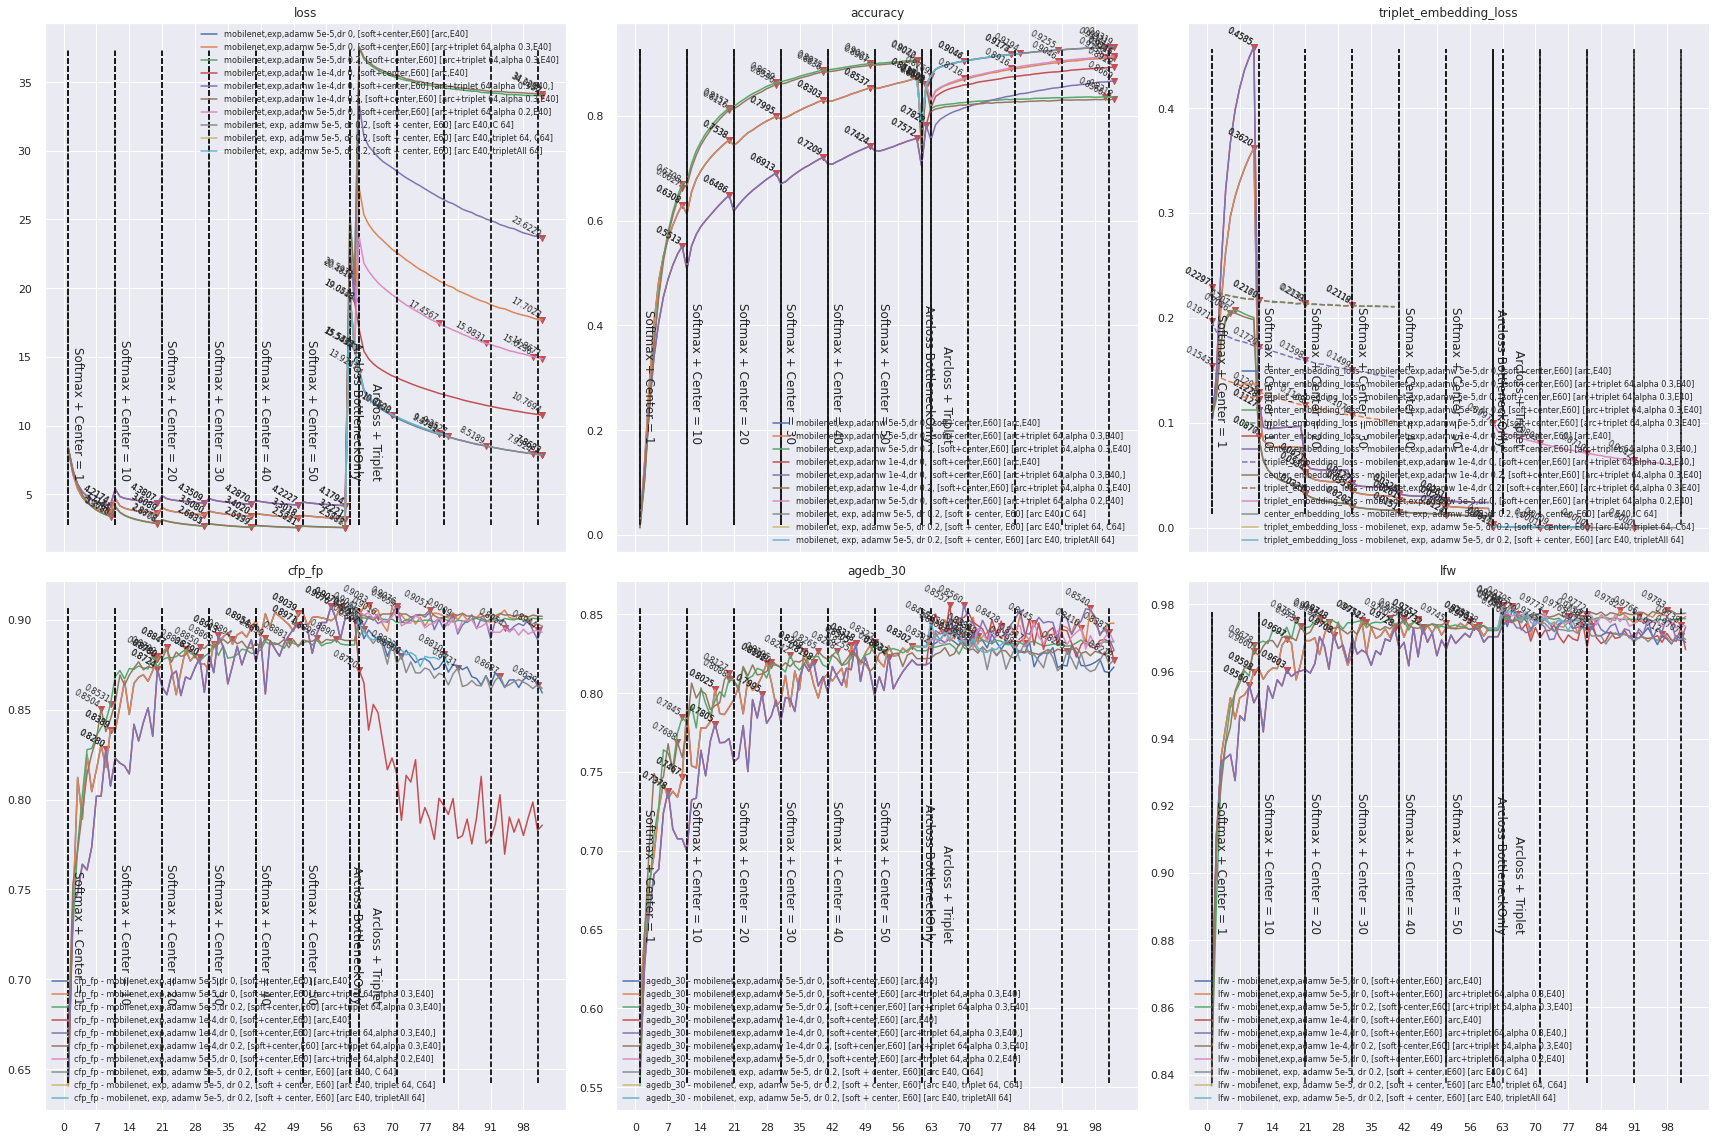

In [2]:
import plot
import json
epochs = [10, 10, 10, 10, 10, 10, 2, 40]
names=["Softmax + Center = 1", "Softmax + Center = 10", "Softmax + Center = 20", "Softmax + Center = 30", "Softmax + Center = 40", "Softmax + Center = 50", "Arcloss BottleneckOnly", "Arcloss + Triplet"]
customs = ["cfp_fp", "agedb_30", "lfw", "center_embedding_loss", "triplet_embedding_loss"]
hists_path = "checkpoints/mobilenet_casia_tests/"
axes, _ = plot.hist_plot_split([hists_path + "T_adamw_5e5_dr0_casia_hist.json", hists_path + "T_adamw_5e5_dr0_arc_casia_hist.json"], epochs, names=names, customs=customs, fig_label='mobilenet,exp,adamw 5e-5,dr 0, [soft+center,E60] [arc,E40]', eval_split=True)
pp = {"epochs": epochs, "customs": customs, "axes": axes}

axes, _ = plot.hist_plot_split([hists_path + "T_adamw_5e5_dr0_casia_hist.json", hists_path + "T_adamw_5e5_dr0_arc_trip_casia_hist.json"], fig_label='mobilenet,exp,adamw 5e-5,dr 0, [soft+center,E60] [arc+triplet 64,alpha 0.3,E40]', **pp)
axes, _ = plot.hist_plot_split([hists_path + "T_adamw_5e5_dr0.2_casia_hist.json", hists_path + "T_adamw_5e5_dr0.2_arc_trip_casia_hist.json"], fig_label='mobilenet,exp,adamw 5e-5,dr 0.2, [soft+center,E60] [arc+triplet 64,alpha 0.3,E40]', **pp)

axes, _ = plot.hist_plot_split([hists_path + "T_adamw_1e4_dr0_casia_hist.json", hists_path + "T_adamw_1e4_dr0_arc_casia_hist.json"], fig_label='mobilenet,exp,adamw 1e-4,dr 0, [soft+center,E60] [arc,E40]', **pp)
axes, _ = plot.hist_plot_split([hists_path + "T_adamw_1e4_dr0_casia_hist.json", hists_path + "T_adamw_1e4_dr0_arc_trip_casia_hist.json"], fig_label='mobilenet,exp,adamw 1e-4,dr 0, [soft+center,E60] [arc+triplet 64,alpha 0.3,E40,]', **pp)
axes, _ = plot.hist_plot_split([hists_path + "T_adamw_1e4_dr0.2_casia_hist.json", hists_path + "T_adamw_1e4_dr0.2_arc_trip_casia_hist.json"], fig_label='mobilenet,exp,adamw 1e-4,dr 0.2, [soft+center,E60] [arc+triplet 64,alpha 0.3,E40]', **pp)

pre = {kk: vv[-1] for kk, vv in json.load(open(hists_path + "T_adamw_5e5_dr0_casia_hist.json", 'r')).items()}
axes, _ = plot.hist_plot_split(hists_path + "T_adamw_5e5_dr0_arc_trip_A2_casia_hist.json", fig_label='mobilenet,exp,adamw 5e-5,dr 0, [soft+center,E60] [arc+triplet 64,alpha 0.2,E40]', pre_item=pre, init_epoch=60, **pp)
axes, _ = plot.hist_plot_split(hists_path + "T_adamw_5e5_dr0_arc_C64_casia_hist.json", fig_label='mobilenet, exp, adamw 5e-5, dr 0.2, [soft + center, E60] [arc E40, C 64]', pre_item=pre, init_epoch=60, **pp)
axes, _ = plot.hist_plot_split(hists_path + "T_adamw_5e5_dr0_arc_trip_C64_casia_hist.json", fig_label='mobilenet, exp, adamw 5e-5, dr 0.2, [soft + center, E60] [arc E40, triplet 64, C64]', pre_item=pre, init_epoch=60, **pp)
axes, _ = plot.hist_plot_split(hists_path + "T_adamw_5e5_dr0_arc_tripall_casia_hist.json", fig_label='mobilenet, exp, adamw 5e-5, dr 0.2, [soft + center, E60] [arc E40, tripletAll 64]', pre_item=pre, init_epoch=60, **pp)

## Margin Softmax tests
- Train `MarginSoftmax + centerloss` then `arcfaceloss + triplet`.
- Use `AdamW weight_decay = 5e-5`, `dropout rate = 0`
- **MarginSoftmax power** choose from `[2, 3]`
- **Triplet alpha** decay from `0.35` to `0.2`, each train `10` epochs.

| MarginSoftmax power | Centerloss | --> Triplet alpha |
| ------------------- | ---------- | ----------------- |
| 2                   | 1 --> 50   | 0.3               |
| 2                   | 1 --> 50   | 0.35 --> 0.2      |
| 3                   | 1 --> 50   | 0.35 --> 0.2      |

In [2]:
# weight_decay 5e-5, dropout_rate 0.0
import tensorflow_addons as tfa

basic_model = train.buildin_models("MobileNet", dropout=0, emb_shape=256)
tt = train.Train(data_path, save_path='T_adamw_5e5_dr0_ms2_casia.h5', eval_paths=eval_paths,
                 basic_model=basic_model, model=None, lr_base=0.001,
                 batch_size=64, random_status=3)

optimizer = tfa.optimizers.AdamW(weight_decay=5e-5)
sch = [
    {"loss": losses.MarginSoftmax(power=2, label_smoothing=0.1), "centerloss": 1, "epoch": 10, "optimizer": optimizer},
    {"loss": losses.MarginSoftmax(power=2, label_smoothing=0.1), "centerloss": 10, "epoch": 10},
    {"loss": losses.MarginSoftmax(power=2, label_smoothing=0.1), "centerloss": 20, "epoch": 10},
    {"loss": losses.MarginSoftmax(power=2, label_smoothing=0.1), "centerloss": 30, "epoch": 10},
    {"loss": losses.MarginSoftmax(power=2, label_smoothing=0.1), "centerloss": 40, "epoch": 10},
    {"loss": losses.MarginSoftmax(power=2, label_smoothing=0.1), "centerloss": 50, "epoch": 10},
]

tt.train(sch, 0)

>>>> Init type by loss function name...
>>>> Train softmax...
>>>> Init softmax dataset...
>>>> Image length: 490623, Image class length: 490623, classes: 10572
>>>> Add softmax layer...
>>>> Attach centerloss...
>>>> loss_weights: {'softmax': 1.0, 'center_embedding': 1.0}
>>>> Insert weight decay callback...

Learning rate for iter 1 is 0.001
Weight decay for iter 1 is 4.999999873689376e-05
Epoch 1/10
7666/7666 [==============================] - ETA: 0s - loss: 9.7927 - center_embedding_loss: 0.0938 - softmax_loss: 9.6988 - softmax_accuracy: 0.0160


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  7.98it/s]



>>>> lfw evaluation max accuracy: 0.826333, thresh: 0.608041, previous max accuracy: 0.000000
>>>> Improved = 0.826333



Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  7.95it/s]


>>>> cfp_fp evaluation max accuracy: 0.667000, thresh: 0.633498, previous max accuracy: 0.000000
>>>> Improved = 0.667000




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.25it/s]


>>>> agedb_30 evaluation max accuracy: 0.576500, thresh: 0.664895, previous max accuracy: 0.000000
>>>> Improved = 0.576500
Saving model to: ./checkpoints/T_adamw_5e5_dr0_ms2_casia_basic_agedb_30_epoch_1_0.576500.h5



Epoch 00001: saving model to ./checkpoints/T_adamw_5e5_dr0_ms2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 555s 72ms/step - loss: 9.7927 - center_embedding_loss: 0.0938 - softmax_loss: 9.6988 - softmax_accuracy: 0.0160

Learning rate for iter 2 is 0.001
Weight decay for iter 2 is 4.999999873689376e-05
Epoch 2/10
7666/7666 [==============================] - ETA: 0s - loss: 7.9377 - center_embedding_loss: 0.1342 - softmax_loss: 7.8036 - softmax_accuracy: 0.1243


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.10it/s]



>>>> lfw evaluation max accuracy: 0.915333, thresh: 0.462086, previous max accuracy: 0.826333
>>>> Improved = 0.089000



Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.16it/s]


>>>> cfp_fp evaluation max accuracy: 0.728000, thresh: 0.540124, previous max accuracy: 0.667000
>>>> Improved = 0.061000




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.23it/s]


>>>> agedb_30 evaluation max accuracy: 0.633333, thresh: 0.579387, previous max accuracy: 0.576500
>>>> Improved = 0.056833
Saving model to: ./checkpoints/T_adamw_5e5_dr0_ms2_casia_basic_agedb_30_epoch_2_0.633333.h5



Epoch 00002: saving model to ./checkpoints/T_adamw_5e5_dr0_ms2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 556s 73ms/step - loss: 7.9377 - center_embedding_loss: 0.1342 - softmax_loss: 7.8036 - softmax_accuracy: 0.1243

Learning rate for iter 3 is 0.001
Weight decay for iter 3 is 4.999999873689376e-05
Epoch 3/10
7666/7666 [==============================] - ETA: 0s - loss: 6.6500 - center_embedding_loss: 0.2389 - softmax_loss: 6.4111 - softmax_accuracy: 0.2801


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.22it/s]


>>>> lfw evaluation max accuracy: 0.929500, thresh: 0.501797, previous max accuracy: 0.915333
>>>> Improved = 0.014167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.21it/s]


>>>> cfp_fp evaluation max accuracy: 0.770857, thresh: 0.442758, previous max accuracy: 0.728000
>>>> Improved = 0.042857




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.25it/s]


>>>> agedb_30 evaluation max accuracy: 0.681000, thresh: 0.485609, previous max accuracy: 0.633333
>>>> Improved = 0.047667
Saving model to: ./checkpoints/T_adamw_5e5_dr0_ms2_casia_basic_agedb_30_epoch_3_0.681000.h5



Epoch 00003: saving model to ./checkpoints/T_adamw_5e5_dr0_ms2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 553s 72ms/step - loss: 6.6500 - center_embedding_loss: 0.2389 - softmax_loss: 6.4111 - softmax_accuracy: 0.2801

Learning rate for iter 4 is 0.001
Weight decay for iter 4 is 4.999999873689376e-05
Epoch 4/10
7665/7666 [============================>.] - ETA: 0s - loss: 5.8626 - center_embedding_loss: 0.3140 - softmax_loss: 5.5485 - softmax_accuracy: 0.3977


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.24it/s]


>>>> lfw evaluation max accuracy: 0.943500, thresh: 0.443028, previous max accuracy: 0.929500
>>>> Improved = 0.014000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.17it/s]


>>>> cfp_fp evaluation max accuracy: 0.756286, thresh: 0.457548, previous max accuracy: 0.770857




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.28it/s]


>>>> agedb_30 evaluation max accuracy: 0.717167, thresh: 0.444162, previous max accuracy: 0.681000
>>>> Improved = 0.036167
Saving model to: ./checkpoints/T_adamw_5e5_dr0_ms2_casia_basic_agedb_30_epoch_4_0.717167.h5



Epoch 00004: saving model to ./checkpoints/T_adamw_5e5_dr0_ms2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 552s 72ms/step - loss: 5.8625 - center_embedding_loss: 0.3140 - softmax_loss: 5.5485 - softmax_accuracy: 0.3978

Learning rate for iter 5 is 0.001
Weight decay for iter 5 is 4.999999873689376e-05
Epoch 5/10
7666/7666 [==============================] - ETA: 0s - loss: 5.3756 - center_embedding_loss: 0.3605 - softmax_loss: 5.0151 - softmax_accuracy: 0.4779


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.10it/s]


>>>> lfw evaluation max accuracy: 0.947333, thresh: 0.421015, previous max accuracy: 0.943500
>>>> Improved = 0.003833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.32it/s]



>>>> cfp_fp evaluation max accuracy: 0.777714, thresh: 0.388905, previous max accuracy: 0.770857
>>>> Improved = 0.006857



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.22it/s]


>>>> agedb_30 evaluation max accuracy: 0.732000, thresh: 0.439278, previous max accuracy: 0.717167
>>>> Improved = 0.014833
Saving model to: ./checkpoints/T_adamw_5e5_dr0_ms2_casia_basic_agedb_30_epoch_5_0.732000.h5



Epoch 00005: saving model to ./checkpoints/T_adamw_5e5_dr0_ms2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 553s 72ms/step - loss: 5.3756 - center_embedding_loss: 0.3605 - softmax_loss: 5.0151 - softmax_accuracy: 0.4779

Learning rate for iter 6 is 0.001
Weight decay for iter 6 is 4.999999873689376e-05
Epoch 6/10
7666/7666 [==============================] - ETA: 0s - loss: 5.0723 - center_embedding_loss: 0.3872 - softmax_loss: 4.6850 - softmax_accuracy: 0.5290


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.24it/s]



>>>> lfw evaluation max accuracy: 0.947000, thresh: 0.384199, previous max accuracy: 0.947333



Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.19it/s]


>>>> cfp_fp evaluation max accuracy: 0.813714, thresh: 0.290884, previous max accuracy: 0.777714
>>>> Improved = 0.036000




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.33it/s]


>>>> agedb_30 evaluation max accuracy: 0.734333, thresh: 0.362364, previous max accuracy: 0.732000
>>>> Improved = 0.002333
Saving model to: ./checkpoints/T_adamw_5e5_dr0_ms2_casia_basic_agedb_30_epoch_6_0.734333.h5



Epoch 00006: saving model to ./checkpoints/T_adamw_5e5_dr0_ms2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 552s 72ms/step - loss: 5.0723 - center_embedding_loss: 0.3872 - softmax_loss: 4.6850 - softmax_accuracy: 0.5290

Learning rate for iter 7 is 0.001
Weight decay for iter 7 is 4.999999873689376e-05
Epoch 7/10
7666/7666 [==============================] - ETA: 0s - loss: 4.8524 - center_embedding_loss: 0.4081 - softmax_loss: 4.4443 - softmax_accuracy: 0.5670


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.06it/s]


>>>> lfw evaluation max accuracy: 0.955167, thresh: 0.383174, previous max accuracy: 0.947333
>>>> Improved = 0.007833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.28it/s]



>>>> cfp_fp evaluation max accuracy: 0.825714, thresh: 0.286871, previous max accuracy: 0.813714
>>>> Improved = 0.012000



Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.14it/s]


>>>> agedb_30 evaluation max accuracy: 0.772500, thresh: 0.298062, previous max accuracy: 0.734333
>>>> Improved = 0.038167
Saving model to: ./checkpoints/T_adamw_5e5_dr0_ms2_casia_basic_agedb_30_epoch_7_0.772500.h5



Epoch 00007: saving model to ./checkpoints/T_adamw_5e5_dr0_ms2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 555s 72ms/step - loss: 4.8524 - center_embedding_loss: 0.4081 - softmax_loss: 4.4443 - softmax_accuracy: 0.5670

Learning rate for iter 8 is 0.001
Weight decay for iter 8 is 4.999999873689376e-05
Epoch 8/10
7666/7666 [==============================] - ETA: 0s - loss: 4.6788 - center_embedding_loss: 0.4259 - softmax_loss: 4.2529 - softmax_accuracy: 0.5966


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.22it/s]



>>>> lfw evaluation max accuracy: 0.955833, thresh: 0.366763, previous max accuracy: 0.955167
>>>> Improved = 0.000667



Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.19it/s]


>>>> cfp_fp evaluation max accuracy: 0.817571, thresh: 0.312755, previous max accuracy: 0.825714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.30it/s]


>>>> agedb_30 evaluation max accuracy: 0.764667, thresh: 0.334670, previous max accuracy: 0.772500



Epoch 00008: saving model to ./checkpoints/T_adamw_5e5_dr0_ms2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 554s 72ms/step - loss: 4.6788 - center_embedding_loss: 0.4259 - softmax_loss: 4.2529 - softmax_accuracy: 0.5966

Learning rate for iter 9 is 0.001
Weight decay for iter 9 is 4.999999873689376e-05
Epoch 9/10
7666/7666 [==============================] - ETA: 0s - loss: 4.5431 - center_embedding_loss: 0.4389 - softmax_loss: 4.1041 - softmax_accuracy: 0.6213


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.07it/s]


>>>> lfw evaluation max accuracy: 0.957833, thresh: 0.342686, previous max accuracy: 0.955833
>>>> Improved = 0.002000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.27it/s]


>>>> cfp_fp evaluation max accuracy: 0.839429, thresh: 0.255358, previous max accuracy: 0.825714
>>>> Improved = 0.013714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.19it/s]


>>>> agedb_30 evaluation max accuracy: 0.753500, thresh: 0.305904, previous max accuracy: 0.772500



Epoch 00009: saving model to ./checkpoints/T_adamw_5e5_dr0_ms2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 549s 72ms/step - loss: 4.5431 - center_embedding_loss: 0.4389 - softmax_loss: 4.1041 - softmax_accuracy: 0.6213

Learning rate for iter 10 is 0.001
Weight decay for iter 10 is 4.999999873689376e-05
Epoch 10/10
7666/7666 [==============================] - ETA: 0s - loss: 4.4418 - center_embedding_loss: 0.4489 - softmax_loss: 3.9929 - softmax_accuracy: 0.6381


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.24it/s]


>>>> lfw evaluation max accuracy: 0.959167, thresh: 0.369157, previous max accuracy: 0.957833
>>>> Improved = 0.001333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.15it/s]



>>>> cfp_fp evaluation max accuracy: 0.816000, thresh: 0.313827, previous max accuracy: 0.839429



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.22it/s]


>>>> agedb_30 evaluation max accuracy: 0.775000, thresh: 0.376419, previous max accuracy: 0.772500
>>>> Improved = 0.002500
Saving model to: ./checkpoints/T_adamw_5e5_dr0_ms2_casia_basic_agedb_30_epoch_10_0.775000.h5



Epoch 00010: saving model to ./checkpoints/T_adamw_5e5_dr0_ms2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 554s 72ms/step - loss: 4.4418 - center_embedding_loss: 0.4489 - softmax_loss: 3.9929 - softmax_accuracy: 0.6381
>>>> Train softmax DONE!!! epochs = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], model.stop_training = False
>>>> My history:
  loss = [9.792656898498535, 7.937722206115723, 6.650023937225342, 5.862512588500977, 5.375621795654297, 5.072261333465576, 4.8523993492126465, 4.678800582885742, 4.5430684089660645, 4.441766262054443]
  center_embedding_loss = [0.09384401142597198, 0.13417097926139832, 0.23890163004398346, 0.3140406310558319, 0.360481321811676, 0.38724344968795776, 0.4080981910228729, 0.42591434717178345, 0.438925176858902, 0.44889843463897705]
  softmax_loss = [9.698799133300781, 7.803581237792969, 6.411116123199463, 5.548460483551025, 5.015129566192627, 4.685016632080078, 4.444309234619141, 4.252884387969971, 4.104142665863037, 3.992864370346

Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.48it/s]


>>>> lfw evaluation max accuracy: 0.963500, thresh: 0.395293, previous max accuracy: 0.959167
>>>> Improved = 0.004333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.15it/s]


>>>> cfp_fp evaluation max accuracy: 0.833714, thresh: 0.351674, previous max accuracy: 0.839429




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.07it/s]


>>>> agedb_30 evaluation max accuracy: 0.783167, thresh: 0.422125, previous max accuracy: 0.775000
>>>> Improved = 0.008167
Saving model to: ./checkpoints/T_adamw_5e5_dr0_ms2_casia_basic_agedb_30_epoch_11_0.783167.h5



Epoch 00011: saving model to ./checkpoints/T_adamw_5e5_dr0_ms2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 553s 72ms/step - loss: 5.6845 - center_embedding_loss: 0.1389 - softmax_loss: 4.2955 - softmax_accuracy: 0.6241

Learning rate for iter 12 is 0.000951229424500714
Weight decay for iter 12 is 4.75614688184578e-05
Epoch 12/20
7666/7666 [==============================] - ETA: 0s - loss: 5.0201 - center_embedding_loss: 0.1044 - softmax_loss: 3.9765 - softmax_accuracy: 0.6642


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.18it/s]



>>>> lfw evaluation max accuracy: 0.963000, thresh: 0.372641, previous max accuracy: 0.963500



Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.15it/s]


>>>> cfp_fp evaluation max accuracy: 0.850286, thresh: 0.266422, previous max accuracy: 0.839429
>>>> Improved = 0.010857




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.26it/s]


>>>> agedb_30 evaluation max accuracy: 0.781333, thresh: 0.350195, previous max accuracy: 0.783167



Epoch 00012: saving model to ./checkpoints/T_adamw_5e5_dr0_ms2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 556s 73ms/step - loss: 5.0201 - center_embedding_loss: 0.1044 - softmax_loss: 3.9765 - softmax_accuracy: 0.6642

Learning rate for iter 13 is 0.0009048374180359595
Weight decay for iter 13 is 4.524186806520447e-05
Epoch 13/20
7666/7666 [==============================] - ETA: 0s - loss: 4.8062 - center_embedding_loss: 0.0992 - softmax_loss: 3.8145 - softmax_accuracy: 0.6882


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.02it/s]


>>>> lfw evaluation max accuracy: 0.962333, thresh: 0.376315, previous max accuracy: 0.963500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.22it/s]


>>>> cfp_fp evaluation max accuracy: 0.847857, thresh: 0.269680, previous max accuracy: 0.850286




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.10it/s]


>>>> agedb_30 evaluation max accuracy: 0.751167, thresh: 0.342900, previous max accuracy: 0.783167



Epoch 00013: saving model to ./checkpoints/T_adamw_5e5_dr0_ms2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 558s 73ms/step - loss: 4.8062 - center_embedding_loss: 0.0992 - softmax_loss: 3.8145 - softmax_accuracy: 0.6882

Learning rate for iter 14 is 0.0008607079764250578
Weight decay for iter 14 is 4.303539390093647e-05
Epoch 14/20
7666/7666 [==============================] - ETA: 0s - loss: 4.6873 - center_embedding_loss: 0.0978 - softmax_loss: 3.7091 - softmax_accuracy: 0.7045


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.21it/s]


>>>> lfw evaluation max accuracy: 0.966667, thresh: 0.391515, previous max accuracy: 0.963500
>>>> Improved = 0.003167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.20it/s]


>>>> cfp_fp evaluation max accuracy: 0.853857, thresh: 0.293538, previous max accuracy: 0.850286
>>>> Improved = 0.003571




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.35it/s]


>>>> agedb_30 evaluation max accuracy: 0.801000, thresh: 0.365091, previous max accuracy: 0.783167
>>>> Improved = 0.017833
Saving model to: ./checkpoints/T_adamw_5e5_dr0_ms2_casia_basic_agedb_30_epoch_14_0.801000.h5



Epoch 00014: saving model to ./checkpoints/T_adamw_5e5_dr0_ms2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 556s 73ms/step - loss: 4.6873 - center_embedding_loss: 0.0978 - softmax_loss: 3.7091 - softmax_accuracy: 0.7045

Learning rate for iter 15 is 0.0008187307530779819
Weight decay for iter 15 is 4.093653478776105e-05
Epoch 15/20
7666/7666 [==============================] - ETA: 0s - loss: 4.6010 - center_embedding_loss: 0.0975 - softmax_loss: 3.6256 - softmax_accuracy: 0.7175


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.04it/s]


>>>> lfw evaluation max accuracy: 0.967000, thresh: 0.353454, previous max accuracy: 0.966667
>>>> Improved = 0.000333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.29it/s]


>>>> cfp_fp evaluation max accuracy: 0.853429, thresh: 0.260679, previous max accuracy: 0.853857




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.06it/s]


>>>> agedb_30 evaluation max accuracy: 0.789500, thresh: 0.339479, previous max accuracy: 0.801000



Epoch 00015: saving model to ./checkpoints/T_adamw_5e5_dr0_ms2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 559s 73ms/step - loss: 4.6010 - center_embedding_loss: 0.0975 - softmax_loss: 3.6256 - softmax_accuracy: 0.7175

Learning rate for iter 16 is 0.0007788007830714049
Weight decay for iter 16 is 3.8940037484280765e-05
Epoch 16/20
7666/7666 [==============================] - ETA: 0s - loss: 4.5327 - center_embedding_loss: 0.0975 - softmax_loss: 3.5574 - softmax_accuracy: 0.7287


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.30it/s]


>>>> lfw evaluation max accuracy: 0.968500, thresh: 0.380714, previous max accuracy: 0.967000
>>>> Improved = 0.001500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.11it/s]



>>>> cfp_fp evaluation max accuracy: 0.846857, thresh: 0.287420, previous max accuracy: 0.853857



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.22it/s]


>>>> agedb_30 evaluation max accuracy: 0.769667, thresh: 0.382471, previous max accuracy: 0.801000



Epoch 00016: saving model to ./checkpoints/T_adamw_5e5_dr0_ms2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 557s 73ms/step - loss: 4.5327 - center_embedding_loss: 0.0975 - softmax_loss: 3.5574 - softmax_accuracy: 0.7287

Learning rate for iter 17 is 0.0007408182206817179
Weight decay for iter 17 is 3.7040907045593485e-05
Epoch 17/20
7666/7666 [==============================] - ETA: 0s - loss: 4.4707 - center_embedding_loss: 0.0978 - softmax_loss: 3.4925 - softmax_accuracy: 0.7383


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.04it/s]


>>>> lfw evaluation max accuracy: 0.969833, thresh: 0.349153, previous max accuracy: 0.968500
>>>> Improved = 0.001333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.17it/s]


>>>> cfp_fp evaluation max accuracy: 0.874429, thresh: 0.253111, previous max accuracy: 0.853857


>>>> Improved = 0.020571



Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  7.99it/s]


>>>> agedb_30 evaluation max accuracy: 0.798333, thresh: 0.297941, previous max accuracy: 0.801000



Epoch 00017: saving model to ./checkpoints/T_adamw_5e5_dr0_ms2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 560s 73ms/step - loss: 4.4707 - center_embedding_loss: 0.0978 - softmax_loss: 3.4925 - softmax_accuracy: 0.7383

Learning rate for iter 18 is 0.0007046880897187134
Weight decay for iter 18 is 3.523440318531357e-05
Epoch 18/20
7666/7666 [==============================] - ETA: 0s - loss: 4.4156 - center_embedding_loss: 0.0979 - softmax_loss: 3.4361 - softmax_accuracy: 0.7474


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.21it/s]


>>>> lfw evaluation max accuracy: 0.965167, thresh: 0.386312, previous max accuracy: 0.969833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.16it/s]


>>>> cfp_fp evaluation max accuracy: 0.849143, thresh: 0.271523, previous max accuracy: 0.874429




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.24it/s]


>>>> agedb_30 evaluation max accuracy: 0.804000, thresh: 0.335929, previous max accuracy: 0.801000
>>>> Improved = 0.003000
Saving model to: ./checkpoints/T_adamw_5e5_dr0_ms2_casia_basic_agedb_30_epoch_18_0.804000.h5



Epoch 00018: saving model to ./checkpoints/T_adamw_5e5_dr0_ms2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 559s 73ms/step - loss: 4.4156 - center_embedding_loss: 0.0979 - softmax_loss: 3.4361 - softmax_accuracy: 0.7474

Learning rate for iter 19 is 0.0006703200460356394
Weight decay for iter 19 is 3.351600025780499e-05
Epoch 19/20
7666/7666 [==============================] - ETA: 0s - loss: 4.3656 - center_embedding_loss: 0.0981 - softmax_loss: 3.3845 - softmax_accuracy: 0.7555


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.08it/s]


>>>> lfw evaluation max accuracy: 0.964333, thresh: 0.372542, previous max accuracy: 0.969833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.21it/s]



>>>> cfp_fp evaluation max accuracy: 0.871857, thresh: 0.233865, previous max accuracy: 0.874429



Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.03it/s]


>>>> agedb_30 evaluation max accuracy: 0.803333, thresh: 0.319330, previous max accuracy: 0.804000



Epoch 00019: saving model to ./checkpoints/T_adamw_5e5_dr0_ms2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 559s 73ms/step - loss: 4.3656 - center_embedding_loss: 0.0981 - softmax_loss: 3.3845 - softmax_accuracy: 0.7555

Learning rate for iter 20 is 0.0006376281516217733
Weight decay for iter 20 is 3.1881405448075384e-05
Epoch 20/20
7666/7666 [==============================] - ETA: 0s - loss: 4.3185 - center_embedding_loss: 0.0982 - softmax_loss: 3.3361 - softmax_accuracy: 0.7632- ETA: 5s - loss: 4


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.21it/s]


>>>> lfw evaluation max accuracy: 0.973667, thresh: 0.369323, previous max accuracy: 0.969833
>>>> Improved = 0.003833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.15it/s]


>>>> cfp_fp evaluation max accuracy: 0.873714, thresh: 0.266084, previous max accuracy: 0.874429




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.24it/s]


>>>> agedb_30 evaluation max accuracy: 0.791667, thresh: 0.321649, previous max accuracy: 0.804000



Epoch 00020: saving model to ./checkpoints/T_adamw_5e5_dr0_ms2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 561s 73ms/step - loss: 4.3185 - center_embedding_loss: 0.0982 - softmax_loss: 3.3361 - softmax_accuracy: 0.7632
>>>> Train softmax DONE!!! epochs = [10, 11, 12, 13, 14, 15, 16, 17, 18, 19], model.stop_training = False
>>>> My history:
  loss = [9.792656898498535, 7.937722206115723, 6.650023937225342, 5.862512588500977, 5.375621795654297, 5.072261333465576, 4.8523993492126465, 4.678800582885742, 4.5430684089660645, 4.441766262054443, 5.684524059295654, 5.0200581550598145, 4.806215286254883, 4.687341213226318, 4.601029872894287, 4.53270149230957, 4.470728397369385, 4.415551662445068, 4.365614891052246, 4.31854248046875]
  center_embedding_loss = [0.09384401142597198, 0.13417097926139832, 0.23890163004398346, 0.3140406310558319, 0.360481321811676, 0.38724344968795776, 0.4080981910228729, 0.42591434717178345, 0.438925176858902, 0.44889843463897705, 0.13

Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.19it/s]


>>>> lfw evaluation max accuracy: 0.971000, thresh: 0.393487, previous max accuracy: 0.973667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.37it/s]


>>>> cfp_fp evaluation max accuracy: 0.882571, thresh: 0.267433, previous max accuracy: 0.874429
>>>> Improved = 0.008143




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.32it/s]


>>>> agedb_30 evaluation max accuracy: 0.793333, thresh: 0.341420, previous max accuracy: 0.804000



Epoch 00021: saving model to ./checkpoints/T_adamw_5e5_dr0_ms2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 557s 73ms/step - loss: 4.8689 - center_embedding_loss: 0.0683 - softmax_loss: 3.5028 - softmax_accuracy: 0.7543

Learning rate for iter 22 is 0.0005769498103804867
Weight decay for iter 22 is 2.88474875560496e-05
Epoch 22/30
7666/7666 [==============================] - ETA: 0s - loss: 4.6450 - center_embedding_loss: 0.0613 - softmax_loss: 3.4180 - softmax_accuracy: 0.7610


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.18it/s]


>>>> lfw evaluation max accuracy: 0.971167, thresh: 0.382344, previous max accuracy: 0.973667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.11it/s]


>>>> cfp_fp evaluation max accuracy: 0.865429, thresh: 0.256768, previous max accuracy: 0.882571




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.30it/s]


>>>> agedb_30 evaluation max accuracy: 0.824500, thresh: 0.332664, previous max accuracy: 0.804000
>>>> Improved = 0.020500
Saving model to: ./checkpoints/T_adamw_5e5_dr0_ms2_casia_basic_agedb_30_epoch_22_0.824500.h5



Epoch 00022: saving model to ./checkpoints/T_adamw_5e5_dr0_ms2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 562s 73ms/step - loss: 4.6450 - center_embedding_loss: 0.0613 - softmax_loss: 3.4180 - softmax_accuracy: 0.7610

Learning rate for iter 23 is 0.0005488116360940264
Weight decay for iter 23 is 2.7440579287940636e-05
Epoch 23/30
7666/7666 [==============================] - ETA: 0s - loss: 4.5309 - center_embedding_loss: 0.0590 - softmax_loss: 3.3514 - softmax_accuracy: 0.7692


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.13it/s]


>>>> lfw evaluation max accuracy: 0.964000, thresh: 0.436527, previous max accuracy: 0.973667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.23it/s]


>>>> cfp_fp evaluation max accuracy: 0.868857, thresh: 0.326261, previous max accuracy: 0.882571




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.07it/s]


>>>> agedb_30 evaluation max accuracy: 0.796000, thresh: 0.384716, previous max accuracy: 0.824500



Epoch 00023: saving model to ./checkpoints/T_adamw_5e5_dr0_ms2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 561s 73ms/step - loss: 4.5309 - center_embedding_loss: 0.0590 - softmax_loss: 3.3514 - softmax_accuracy: 0.7692

Learning rate for iter 24 is 0.000522045776761016
Weight decay for iter 24 is 2.610228693811223e-05
Epoch 24/30
7666/7666 [==============================] - ETA: 0s - loss: 4.4555 - center_embedding_loss: 0.0579 - softmax_loss: 3.2981 - softmax_accuracy: 0.7764


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.15it/s]


>>>> lfw evaluation max accuracy: 0.968333, thresh: 0.388054, previous max accuracy: 0.973667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.16it/s]


>>>> cfp_fp evaluation max accuracy: 0.879429, thresh: 0.268732, previous max accuracy: 0.882571




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.31it/s]


>>>> agedb_30 evaluation max accuracy: 0.812833, thresh: 0.334874, previous max accuracy: 0.824500



Epoch 00024: saving model to ./checkpoints/T_adamw_5e5_dr0_ms2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 560s 73ms/step - loss: 4.4555 - center_embedding_loss: 0.0579 - softmax_loss: 3.2981 - softmax_accuracy: 0.7764

Learning rate for iter 25 is 0.0004965853037914095
Weight decay for iter 25 is 2.4829265385051258e-05
Epoch 25/30
7666/7666 [==============================] - ETA: 0s - loss: 4.3975 - center_embedding_loss: 0.0572 - softmax_loss: 3.2533 - softmax_accuracy: 0.7829


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  7.90it/s]


>>>> lfw evaluation max accuracy: 0.975833, thresh: 0.337098, previous max accuracy: 0.973667
>>>> Improved = 0.002167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.29it/s]


>>>> cfp_fp evaluation max accuracy: 0.883857, thresh: 0.210477, previous max accuracy: 0.882571
>>>> Improved = 0.001286




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.11it/s]


>>>> agedb_30 evaluation max accuracy: 0.820500, thresh: 0.279793, previous max accuracy: 0.824500



Epoch 00025: saving model to ./checkpoints/T_adamw_5e5_dr0_ms2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 563s 73ms/step - loss: 4.3975 - center_embedding_loss: 0.0572 - softmax_loss: 3.2533 - softmax_accuracy: 0.7829

Learning rate for iter 26 is 0.0004723665527410147
Weight decay for iter 26 is 2.3618325940333307e-05
Epoch 26/30
7666/7666 [==============================] - ETA: 0s - loss: 4.3481 - center_embedding_loss: 0.0568 - softmax_loss: 3.2128 - softmax_accuracy: 0.7884


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.35it/s]


>>>> lfw evaluation max accuracy: 0.972167, thresh: 0.365179, previous max accuracy: 0.975833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.08it/s]


>>>> cfp_fp evaluation max accuracy: 0.883429, thresh: 0.239717, previous max accuracy: 0.883857




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.30it/s]


>>>> agedb_30 evaluation max accuracy: 0.812833, thresh: 0.327432, previous max accuracy: 0.824500



Epoch 00026: saving model to ./checkpoints/T_adamw_5e5_dr0_ms2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 560s 73ms/step - loss: 4.3481 - center_embedding_loss: 0.0568 - softmax_loss: 3.2128 - softmax_accuracy: 0.7884

Learning rate for iter 27 is 0.0004493289641172216
Weight decay for iter 27 is 2.2466447262559086e-05
Epoch 27/30
7666/7666 [==============================] - ETA: 0s - loss: 4.3044 - center_embedding_loss: 0.0565 - softmax_loss: 3.1744 - softmax_accuracy: 0.7937


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.04it/s]


>>>> lfw evaluation max accuracy: 0.972833, thresh: 0.366774, previous max accuracy: 0.975833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.35it/s]



>>>> cfp_fp evaluation max accuracy: 0.873000, thresh: 0.267494, previous max accuracy: 0.883857



Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.09it/s]


>>>> agedb_30 evaluation max accuracy: 0.814667, thresh: 0.320215, previous max accuracy: 0.824500



Epoch 00027: saving model to ./checkpoints/T_adamw_5e5_dr0_ms2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 563s 73ms/step - loss: 4.3044 - center_embedding_loss: 0.0565 - softmax_loss: 3.1744 - softmax_accuracy: 0.7937

Learning rate for iter 28 is 0.00042741493194872667
Weight decay for iter 28 is 2.1370744434534572e-05
Epoch 28/30
7666/7666 [==============================] - ETA: 0s - loss: 4.2666 - center_embedding_loss: 0.0563 - softmax_loss: 3.1404 - softmax_accuracy: 0.7995


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.22it/s]


>>>> lfw evaluation max accuracy: 0.971333, thresh: 0.374865, previous max accuracy: 0.975833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.14it/s]


>>>> cfp_fp evaluation max accuracy: 0.880571, thresh: 0.266799, previous max accuracy: 0.883857




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.32it/s]


>>>> agedb_30 evaluation max accuracy: 0.821000, thresh: 0.317062, previous max accuracy: 0.824500



Epoch 00028: saving model to ./checkpoints/T_adamw_5e5_dr0_ms2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 562s 73ms/step - loss: 4.2666 - center_embedding_loss: 0.0563 - softmax_loss: 3.1404 - softmax_accuracy: 0.7995

Learning rate for iter 29 is 0.00040656965974059914
Weight decay for iter 29 is 2.0328481696196832e-05
Epoch 29/30
7666/7666 [==============================] - ETA: 0s - loss: 4.2288 - center_embedding_loss: 0.0561 - softmax_loss: 3.1072 - softmax_accuracy: 0.8039


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  7.98it/s]


>>>> lfw evaluation max accuracy: 0.973167, thresh: 0.389944, previous max accuracy: 0.975833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.27it/s]



>>>> cfp_fp evaluation max accuracy: 0.880143, thresh: 0.257859, previous max accuracy: 0.883857



Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.09it/s]


>>>> agedb_30 evaluation max accuracy: 0.805500, thresh: 0.344686, previous max accuracy: 0.824500



Epoch 00029: saving model to ./checkpoints/T_adamw_5e5_dr0_ms2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 561s 73ms/step - loss: 4.2288 - center_embedding_loss: 0.0561 - softmax_loss: 3.1072 - softmax_accuracy: 0.8039

Learning rate for iter 30 is 0.00038674102345450116
Weight decay for iter 30 is 1.9337048797751777e-05
Epoch 30/30
7666/7666 [==============================] - ETA: 0s - loss: 4.1903 - center_embedding_loss: 0.0559 - softmax_loss: 3.0731 - softmax_accuracy: 0.8086


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.16it/s]


>>>> lfw evaluation max accuracy: 0.971167, thresh: 0.357978, previous max accuracy: 0.975833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.04it/s]


>>>> cfp_fp evaluation max accuracy: 0.890429, thresh: 0.235226, previous max accuracy: 0.883857
>>>> Improved = 0.006571




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.32it/s]


>>>> agedb_30 evaluation max accuracy: 0.828000, thresh: 0.302639, previous max accuracy: 0.824500
>>>> Improved = 0.003500
Saving model to: ./checkpoints/T_adamw_5e5_dr0_ms2_casia_basic_agedb_30_epoch_30_0.828000.h5



Epoch 00030: saving model to ./checkpoints/T_adamw_5e5_dr0_ms2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 561s 73ms/step - loss: 4.1903 - center_embedding_loss: 0.0559 - softmax_loss: 3.0731 - softmax_accuracy: 0.8086
>>>> Train softmax DONE!!! epochs = [20, 21, 22, 23, 24, 25, 26, 27, 28, 29], model.stop_training = False
>>>> My history:
  loss = [9.792656898498535, 7.937722206115723, 6.650023937225342, 5.862512588500977, 5.375621795654297, 5.072261333465576, 4.8523993492126465, 4.678800582885742, 4.5430684089660645, 4.441766262054443, 5.684524059295654, 5.0200581550598145, 4.806215286254883, 4.687341213226318, 4.601029872894287, 4.53270149230957, 4.470728397369385, 4.415551662445068, 4.365614891052246, 4.31854248046875, 4.8689422607421875, 4.644955635070801, 4.5308918952941895, 4.4555134773254395, 4.3974690437316895, 4.348148822784424, 4.304368495941162, 4.266627311706543, 4.2288055419921875, 4.190332889556885]
  center_embedding_loss = [0.09384401142

Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.22it/s]


>>>> lfw evaluation max accuracy: 0.974167, thresh: 0.369740, previous max accuracy: 0.975833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.29it/s]


>>>> cfp_fp evaluation max accuracy: 0.884857, thresh: 0.254760, previous max accuracy: 0.890429




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.41it/s]


>>>> agedb_30 evaluation max accuracy: 0.809833, thresh: 0.298275, previous max accuracy: 0.828000



Epoch 00031: saving model to ./checkpoints/T_adamw_5e5_dr0_ms2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 551s 72ms/step - loss: 4.5611 - center_embedding_loss: 0.0458 - softmax_loss: 3.1869 - softmax_accuracy: 0.8034

Learning rate for iter 32 is 0.00034993774911115536
Weight decay for iter 32 is 1.7496886357548647e-05
Epoch 32/40
7666/7666 [==============================] - ETA: 0s - loss: 4.4387 - center_embedding_loss: 0.0431 - softmax_loss: 3.1461 - softmax_accuracy: 0.8057


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.20it/s]


>>>> lfw evaluation max accuracy: 0.972167, thresh: 0.364188, previous max accuracy: 0.975833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.16it/s]


>>>> cfp_fp evaluation max accuracy: 0.886143, thresh: 0.249045, previous max accuracy: 0.890429




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.36it/s]


>>>> agedb_30 evaluation max accuracy: 0.821167, thresh: 0.316422, previous max accuracy: 0.828000



Epoch 00032: saving model to ./checkpoints/T_adamw_5e5_dr0_ms2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 550s 72ms/step - loss: 4.4387 - center_embedding_loss: 0.0431 - softmax_loss: 3.1461 - softmax_accuracy: 0.8057

Learning rate for iter 33 is 0.00033287108369807955
Weight decay for iter 33 is 1.6643552953610197e-05
Epoch 33/40
7666/7666 [==============================] - ETA: 0s - loss: 4.3608 - center_embedding_loss: 0.0419 - softmax_loss: 3.1049 - softmax_accuracy: 0.8096


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.08it/s]


>>>> lfw evaluation max accuracy: 0.967333, thresh: 0.394296, previous max accuracy: 0.975833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.38it/s]


>>>> cfp_fp evaluation max accuracy: 0.879429, thresh: 0.260116, previous max accuracy: 0.890429




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.11it/s]


>>>> agedb_30 evaluation max accuracy: 0.817833, thresh: 0.337078, previous max accuracy: 0.828000



Epoch 00033: saving model to ./checkpoints/T_adamw_5e5_dr0_ms2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 553s 72ms/step - loss: 4.3608 - center_embedding_loss: 0.0419 - softmax_loss: 3.1049 - softmax_accuracy: 0.8096

Learning rate for iter 34 is 0.00031663676937905317
Weight decay for iter 34 is 1.5831838027224876e-05
Epoch 34/40
7666/7666 [==============================] - ETA: 0s - loss: 4.2997 - center_embedding_loss: 0.0411 - softmax_loss: 3.0677 - softmax_accuracy: 0.8147


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.17it/s]


>>>> lfw evaluation max accuracy: 0.971333, thresh: 0.402611, previous max accuracy: 0.975833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.13it/s]


>>>> cfp_fp evaluation max accuracy: 0.897000, thresh: 0.258648, previous max accuracy: 0.890429
>>>> Improved = 0.006571




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.37it/s]


>>>> agedb_30 evaluation max accuracy: 0.830833, thresh: 0.327332, previous max accuracy: 0.828000
>>>> Improved = 0.002833
Saving model to: ./checkpoints/T_adamw_5e5_dr0_ms2_casia_basic_agedb_30_epoch_34_0.830833.h5



Epoch 00034: saving model to ./checkpoints/T_adamw_5e5_dr0_ms2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 552s 72ms/step - loss: 4.2997 - center_embedding_loss: 0.0411 - softmax_loss: 3.0677 - softmax_accuracy: 0.8147

Learning rate for iter 35 is 0.00030119421191220205
Weight decay for iter 35 is 1.5059708857734222e-05
Epoch 35/40
7666/7666 [==============================] - ETA: 0s - loss: 4.2496 - center_embedding_loss: 0.0405 - softmax_loss: 3.0341 - softmax_accuracy: 0.8189


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.14it/s]


>>>> lfw evaluation max accuracy: 0.973667, thresh: 0.416707, previous max accuracy: 0.975833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.24it/s]



>>>> cfp_fp evaluation max accuracy: 0.900714, thresh: 0.252934, previous max accuracy: 0.897000
>>>> Improved = 0.003714



Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.07it/s]


>>>> agedb_30 evaluation max accuracy: 0.813167, thresh: 0.355694, previous max accuracy: 0.830833



Epoch 00035: saving model to ./checkpoints/T_adamw_5e5_dr0_ms2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 553s 72ms/step - loss: 4.2496 - center_embedding_loss: 0.0405 - softmax_loss: 3.0341 - softmax_accuracy: 0.8189

Learning rate for iter 36 is 0.0002865047968601901
Weight decay for iter 36 is 1.432523913535988e-05
Epoch 36/40
7666/7666 [==============================] - ETA: 0s - loss: 4.2052 - center_embedding_loss: 0.0401 - softmax_loss: 3.0026 - softmax_accuracy: 0.8229


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.21it/s]


>>>> lfw evaluation max accuracy: 0.974500, thresh: 0.350926, previous max accuracy: 0.975833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.06it/s]



>>>> cfp_fp evaluation max accuracy: 0.891714, thresh: 0.245158, previous max accuracy: 0.900714



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.26it/s]


>>>> agedb_30 evaluation max accuracy: 0.816333, thresh: 0.297376, previous max accuracy: 0.830833



Epoch 00036: saving model to ./checkpoints/T_adamw_5e5_dr0_ms2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 552s 72ms/step - loss: 4.2052 - center_embedding_loss: 0.0401 - softmax_loss: 3.0026 - softmax_accuracy: 0.8229

Learning rate for iter 37 is 0.0002725317930340126
Weight decay for iter 37 is 1.3626588952320162e-05
Epoch 37/40
7666/7666 [==============================] - ETA: 0s - loss: 4.1680 - center_embedding_loss: 0.0398 - softmax_loss: 2.9748 - softmax_accuracy: 0.8267


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.01it/s]


>>>> lfw evaluation max accuracy: 0.970333, thresh: 0.383079, previous max accuracy: 0.975833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.34it/s]


>>>> cfp_fp evaluation max accuracy: 0.892143, thresh: 0.276363, previous max accuracy: 0.900714




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.03it/s]


>>>> agedb_30 evaluation max accuracy: 0.829500, thresh: 0.330490, previous max accuracy: 0.830833



Epoch 00037: saving model to ./checkpoints/T_adamw_5e5_dr0_ms2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 553s 72ms/step - loss: 4.1680 - center_embedding_loss: 0.0398 - softmax_loss: 2.9748 - softmax_accuracy: 0.8267

Learning rate for iter 38 is 0.0002592402606458915
Weight decay for iter 38 is 1.2962012988282368e-05
Epoch 38/40
7666/7666 [==============================] - ETA: 0s - loss: 4.1306 - center_embedding_loss: 0.0395 - softmax_loss: 2.9467 - softmax_accuracy: 0.8298


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.17it/s]


>>>> lfw evaluation max accuracy: 0.975000, thresh: 0.363364, previous max accuracy: 0.975833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.24it/s]


>>>> cfp_fp evaluation max accuracy: 0.898286, thresh: 0.243224, previous max accuracy: 0.900714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.35it/s]


>>>> agedb_30 evaluation max accuracy: 0.834500, thresh: 0.294374, previous max accuracy: 0.830833
>>>> Improved = 0.003667
Saving model to: ./checkpoints/T_adamw_5e5_dr0_ms2_casia_basic_agedb_30_epoch_38_0.834500.h5



Epoch 00038: saving model to ./checkpoints/T_adamw_5e5_dr0_ms2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 553s 72ms/step - loss: 4.1306 - center_embedding_loss: 0.0395 - softmax_loss: 2.9467 - softmax_accuracy: 0.8298

Learning rate for iter 39 is 0.00024659696394160646
Weight decay for iter 39 is 1.2329846867942251e-05
Epoch 39/40
7666/7666 [==============================] - ETA: 0s - loss: 4.0990 - center_embedding_loss: 0.0392 - softmax_loss: 2.9221 - softmax_accuracy: 0.8335


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.11it/s]


>>>> lfw evaluation max accuracy: 0.974333, thresh: 0.389076, previous max accuracy: 0.975833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.12it/s]


>>>> cfp_fp evaluation max accuracy: 0.896571, thresh: 0.275855, previous max accuracy: 0.900714


Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.23it/s]


>>>> agedb_30 evaluation max accuracy: 0.811500, thresh: 0.342597, previous max accuracy: 0.834500



Epoch 00039: saving model to ./checkpoints/T_adamw_5e5_dr0_ms2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 554s 72ms/step - loss: 4.0990 - center_embedding_loss: 0.0392 - softmax_loss: 2.9221 - softmax_accuracy: 0.8335

Learning rate for iter 40 is 0.00023457028809379762
Weight decay for iter 40 is 1.1728513527486939e-05
Epoch 40/40
7666/7666 [==============================] - ETA: 0s - loss: 4.0640 - center_embedding_loss: 0.0390 - softmax_loss: 2.8938 - softmax_accuracy: 0.8366


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.12it/s]


>>>> lfw evaluation max accuracy: 0.976333, thresh: 0.356742, previous max accuracy: 0.975833
>>>> Improved = 0.000500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.35it/s]


>>>> cfp_fp evaluation max accuracy: 0.900429, thresh: 0.242524, previous max accuracy: 0.900714




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.13it/s]


>>>> agedb_30 evaluation max accuracy: 0.832000, thresh: 0.322045, previous max accuracy: 0.834500



Epoch 00040: saving model to ./checkpoints/T_adamw_5e5_dr0_ms2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 554s 72ms/step - loss: 4.0640 - center_embedding_loss: 0.0390 - softmax_loss: 2.8938 - softmax_accuracy: 0.8366
>>>> Train softmax DONE!!! epochs = [30, 31, 32, 33, 34, 35, 36, 37, 38, 39], model.stop_training = False
>>>> My history:
  loss = [9.792656898498535, 7.937722206115723, 6.650023937225342, 5.862512588500977, 5.375621795654297, 5.072261333465576, 4.8523993492126465, 4.678800582885742, 4.5430684089660645, 4.441766262054443, 5.684524059295654, 5.0200581550598145, 4.806215286254883, 4.687341213226318, 4.601029872894287, 4.53270149230957, 4.470728397369385, 4.415551662445068, 4.365614891052246, 4.31854248046875, 4.8689422607421875, 4.644955635070801, 4.5308918952941895, 4.4555134773254395, 4.3974690437316895, 4.348148822784424, 4.304368495941162, 4.266627311706543, 4.2288055419921875, 4.190332889556885, 4.561122894287109, 4.43874454498291, 4.3

Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.15it/s]


>>>> lfw evaluation max accuracy: 0.974833, thresh: 0.397758, previous max accuracy: 0.976333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.30it/s]


>>>> cfp_fp evaluation max accuracy: 0.901429, thresh: 0.267505, previous max accuracy: 0.900714
>>>> Improved = 0.000714




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.12it/s]


>>>> agedb_30 evaluation max accuracy: 0.836833, thresh: 0.273900, previous max accuracy: 0.834500
>>>> Improved = 0.002333
Saving model to: ./checkpoints/T_adamw_5e5_dr0_ms2_casia_basic_agedb_30_epoch_41_0.836833.h5



Epoch 00041: saving model to ./checkpoints/T_adamw_5e5_dr0_ms2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 556s 73ms/step - loss: 4.3437 - center_embedding_loss: 0.0342 - softmax_loss: 2.9754 - softmax_accuracy: 0.8343

Learning rate for iter 42 is 0.00021224797382674306
Weight decay for iter 42 is 1.0612398000375833e-05
Epoch 42/50
7666/7666 [==============================] - ETA: 0s - loss: 4.2670 - center_embedding_loss: 0.0329 - softmax_loss: 2.9516 - softmax_accuracy: 0.8350


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.25it/s]


>>>> lfw evaluation max accuracy: 0.973500, thresh: 0.391891, previous max accuracy: 0.976333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.04it/s]


>>>> cfp_fp evaluation max accuracy: 0.899143, thresh: 0.243723, previous max accuracy: 0.901429




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.28it/s]


>>>> agedb_30 evaluation max accuracy: 0.828333, thresh: 0.331116, previous max accuracy: 0.836833



Epoch 00042: saving model to ./checkpoints/T_adamw_5e5_dr0_ms2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 557s 73ms/step - loss: 4.2670 - center_embedding_loss: 0.0329 - softmax_loss: 2.9516 - softmax_accuracy: 0.8350

Learning rate for iter 43 is 0.00020189651799465538
Weight decay for iter 43 is 1.0094825483975e-05
Epoch 43/50
7666/7666 [==============================] - ETA: 0s - loss: 4.2058 - center_embedding_loss: 0.0322 - softmax_loss: 2.9198 - softmax_accuracy: 0.8383


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  7.96it/s]


>>>> lfw evaluation max accuracy: 0.977167, thresh: 0.374928, previous max accuracy: 0.976333
>>>> Improved = 0.000833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.16it/s]


>>>> cfp_fp evaluation max accuracy: 0.899714, thresh: 0.260334, previous max accuracy: 0.901429




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  7.97it/s]


>>>> agedb_30 evaluation max accuracy: 0.838833, thresh: 0.295270, previous max accuracy: 0.836833
>>>> Improved = 0.002000
Saving model to: ./checkpoints/T_adamw_5e5_dr0_ms2_casia_basic_agedb_30_epoch_43_0.838833.h5



Epoch 00043: saving model to ./checkpoints/T_adamw_5e5_dr0_ms2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 559s 73ms/step - loss: 4.2058 - center_embedding_loss: 0.0322 - softmax_loss: 2.9198 - softmax_accuracy: 0.8383

Learning rate for iter 44 is 0.0001920499086207541
Weight decay for iter 44 is 9.602495083527174e-06
Epoch 44/50
7666/7666 [==============================] - ETA: 0s - loss: 4.1584 - center_embedding_loss: 0.0316 - softmax_loss: 2.8932 - softmax_accuracy: 0.8413


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.27it/s]


>>>> lfw evaluation max accuracy: 0.974833, thresh: 0.400939, previous max accuracy: 0.977167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.02it/s]


>>>> cfp_fp evaluation max accuracy: 0.899857, thresh: 0.274542, previous max accuracy: 0.901429




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.25it/s]


>>>> agedb_30 evaluation max accuracy: 0.833667, thresh: 0.321265, previous max accuracy: 0.838833



Epoch 00044: saving model to ./checkpoints/T_adamw_5e5_dr0_ms2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 558s 73ms/step - loss: 4.1584 - center_embedding_loss: 0.0316 - softmax_loss: 2.8932 - softmax_accuracy: 0.8413

Learning rate for iter 45 is 0.0001826835240527346
Weight decay for iter 45 is 9.134175343206152e-06
Epoch 45/50
7666/7666 [==============================] - ETA: 0s - loss: 4.1142 - center_embedding_loss: 0.0312 - softmax_loss: 2.8664 - softmax_accuracy: 0.8440


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  7.98it/s]


>>>> lfw evaluation max accuracy: 0.978333, thresh: 0.350386, previous max accuracy: 0.977167
>>>> Improved = 0.001167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.29it/s]


>>>> cfp_fp evaluation max accuracy: 0.901429, thresh: 0.251275, previous max accuracy: 0.901429




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.06it/s]


>>>> agedb_30 evaluation max accuracy: 0.834000, thresh: 0.300556, previous max accuracy: 0.838833



Epoch 00045: saving model to ./checkpoints/T_adamw_5e5_dr0_ms2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 560s 73ms/step - loss: 4.1142 - center_embedding_loss: 0.0312 - softmax_loss: 2.8664 - softmax_accuracy: 0.8440

Learning rate for iter 46 is 0.00017377394345044513
Weight decay for iter 46 is 8.688696652825456e-06
Epoch 46/50
7666/7666 [==============================] - ETA: 0s - loss: 4.0766 - center_embedding_loss: 0.0309 - softmax_loss: 2.8424 - softmax_accuracy: 0.8469


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.19it/s]


>>>> lfw evaluation max accuracy: 0.975667, thresh: 0.372016, previous max accuracy: 0.978333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.00it/s]


>>>> cfp_fp evaluation max accuracy: 0.900286, thresh: 0.254514, previous max accuracy: 0.901429




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.29it/s]


>>>> agedb_30 evaluation max accuracy: 0.827333, thresh: 0.311655, previous max accuracy: 0.838833



Epoch 00046: saving model to ./checkpoints/T_adamw_5e5_dr0_ms2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 558s 73ms/step - loss: 4.0766 - center_embedding_loss: 0.0309 - softmax_loss: 2.8424 - softmax_accuracy: 0.8469

Learning rate for iter 47 is 0.00016529888822158653
Weight decay for iter 47 is 8.264943971880712e-06
Epoch 47/50
7666/7666 [==============================] - ETA: 0s - loss: 4.0386 - center_embedding_loss: 0.0305 - softmax_loss: 2.8171 - softmax_accuracy: 0.8499


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  7.96it/s]


>>>> lfw evaluation max accuracy: 0.974500, thresh: 0.358679, previous max accuracy: 0.978333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.29it/s]



>>>> cfp_fp evaluation max accuracy: 0.899429, thresh: 0.258144, previous max accuracy: 0.901429



Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.03it/s]


>>>> agedb_30 evaluation max accuracy: 0.846833, thresh: 0.300197, previous max accuracy: 0.838833
>>>> Improved = 0.008000
Saving model to: ./checkpoints/T_adamw_5e5_dr0_ms2_casia_basic_agedb_30_epoch_47_0.846833.h5



Epoch 00047: saving model to ./checkpoints/T_adamw_5e5_dr0_ms2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 559s 73ms/step - loss: 4.0386 - center_embedding_loss: 0.0305 - softmax_loss: 2.8171 - softmax_accuracy: 0.8499

Learning rate for iter 48 is 0.00015723716631362762
Weight decay for iter 48 is 7.861857739044353e-06
Epoch 48/50
7666/7666 [==============================] - ETA: 0s - loss: 4.0065 - center_embedding_loss: 0.0303 - softmax_loss: 2.7945 - softmax_accuracy: 0.8532


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.22it/s]



>>>> lfw evaluation max accuracy: 0.974500, thresh: 0.382220, previous max accuracy: 0.978333



Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.18it/s]


>>>> cfp_fp evaluation max accuracy: 0.901857, thresh: 0.255512, previous max accuracy: 0.901429
>>>> Improved = 0.000429




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.23it/s]


>>>> agedb_30 evaluation max accuracy: 0.827000, thresh: 0.324141, previous max accuracy: 0.846833



Epoch 00048: saving model to ./checkpoints/T_adamw_5e5_dr0_ms2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 556s 72ms/step - loss: 4.0065 - center_embedding_loss: 0.0303 - softmax_loss: 2.7945 - softmax_accuracy: 0.8532

Learning rate for iter 49 is 0.00014956861922263504
Weight decay for iter 49 is 7.478430234186817e-06
Epoch 49/50
7666/7666 [==============================] - ETA: 0s - loss: 3.9766 - center_embedding_loss: 0.0301 - softmax_loss: 2.7730 - softmax_accuracy: 0.8550


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.13it/s]


>>>> lfw evaluation max accuracy: 0.974000, thresh: 0.343029, previous max accuracy: 0.978333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.41it/s]


>>>> cfp_fp evaluation max accuracy: 0.903857, thresh: 0.228314, previous max accuracy: 0.901857
>>>> Improved = 0.002000


Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.00it/s]


>>>> agedb_30 evaluation max accuracy: 0.845000, thresh: 0.287792, previous max accuracy: 0.846833



Epoch 00049: saving model to ./checkpoints/T_adamw_5e5_dr0_ms2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 557s 73ms/step - loss: 3.9766 - center_embedding_loss: 0.0301 - softmax_loss: 2.7730 - softmax_accuracy: 0.8550

Learning rate for iter 50 is 0.00014227407158651353
Weight decay for iter 50 is 7.113703304639785e-06
Epoch 50/50
7666/7666 [==============================] - ETA: 0s - loss: 3.9460 - center_embedding_loss: 0.0299 - softmax_loss: 2.7512 - softmax_accuracy: 0.8582


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.22it/s]


>>>> lfw evaluation max accuracy: 0.975000, thresh: 0.364850, previous max accuracy: 0.978333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.10it/s]


>>>> cfp_fp evaluation max accuracy: 0.900286, thresh: 0.254431, previous max accuracy: 0.903857




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.19it/s]


>>>> agedb_30 evaluation max accuracy: 0.845833, thresh: 0.317824, previous max accuracy: 0.846833



Epoch 00050: saving model to ./checkpoints/T_adamw_5e5_dr0_ms2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 560s 73ms/step - loss: 3.9460 - center_embedding_loss: 0.0299 - softmax_loss: 2.7512 - softmax_accuracy: 0.8582
>>>> Train softmax DONE!!! epochs = [40, 41, 42, 43, 44, 45, 46, 47, 48, 49], model.stop_training = False
>>>> My history:
  loss = [9.792656898498535, 7.937722206115723, 6.650023937225342, 5.862512588500977, 5.375621795654297, 5.072261333465576, 4.8523993492126465, 4.678800582885742, 4.5430684089660645, 4.441766262054443, 5.684524059295654, 5.0200581550598145, 4.806215286254883, 4.687341213226318, 4.601029872894287, 4.53270149230957, 4.470728397369385, 4.415551662445068, 4.365614891052246, 4.31854248046875, 4.8689422607421875, 4.644955635070801, 4.5308918952941895, 4.4555134773254395, 4.3974690437316895, 4.348148822784424, 4.304368495941162, 4.266627311706543, 4.2288055419921875, 4.190332889556885, 4.561122894287109, 4.43874454498291, 4.3


Learning rate for iter 51 is 0.0001353352832366127
Weight decay for iter 51 is 6.766763817722676e-06
Epoch 51/60
7666/7666 [==============================] - ETA: 0s - loss: 4.1677 - center_embedding_loss: 0.0271 - softmax_loss: 2.8114 - softmax_accuracy: 0.8571


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.31it/s]



>>>> lfw evaluation max accuracy: 0.974333, thresh: 0.375069, previous max accuracy: 0.978333



Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.12it/s]


>>>> cfp_fp evaluation max accuracy: 0.896429, thresh: 0.252119, previous max accuracy: 0.903857




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.07it/s]


>>>> agedb_30 evaluation max accuracy: 0.839667, thresh: 0.322403, previous max accuracy: 0.846833



Epoch 00051: saving model to ./checkpoints/T_adamw_5e5_dr0_ms2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 556s 73ms/step - loss: 4.1677 - center_embedding_loss: 0.0271 - softmax_loss: 2.8114 - softmax_accuracy: 0.8571

Learning rate for iter 52 is 0.0001287349035878042
Weight decay for iter 52 is 6.436744570237352e-06
Epoch 52/60
7666/7666 [==============================] - ETA: 0s - loss: 4.1144 - center_embedding_loss: 0.0264 - softmax_loss: 2.7938 - softmax_accuracy: 0.8583


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.26it/s]


>>>> lfw evaluation max accuracy: 0.974833, thresh: 0.383364, previous max accuracy: 0.978333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.02it/s]


>>>> cfp_fp evaluation max accuracy: 0.896571, thresh: 0.278639, previous max accuracy: 0.903857




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.33it/s]



>>>> agedb_30 evaluation max accuracy: 0.838667, thresh: 0.338002, previous max accuracy: 0.846833

Epoch 00052: saving model to ./checkpoints/T_adamw_5e5_dr0_ms2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 554s 72ms/step - loss: 4.1144 - center_embedding_loss: 0.0264 - softmax_loss: 2.7938 - softmax_accuracy: 0.8583

Learning rate for iter 53 is 0.0001224564282529819
Weight decay for iter 53 is 6.122821105236653e-06
Epoch 53/60
7666/7666 [==============================] - ETA: 0s - loss: 4.0709 - center_embedding_loss: 0.0259 - softmax_loss: 2.7736 - softmax_accuracy: 0.8599


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.03it/s]


>>>> lfw evaluation max accuracy: 0.978667, thresh: 0.373417, previous max accuracy: 0.978333
>>>> Improved = 0.000333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.31it/s]


>>>> cfp_fp evaluation max accuracy: 0.903000, thresh: 0.246922, previous max accuracy: 0.903857




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.12it/s]


>>>> agedb_30 evaluation max accuracy: 0.843000, thresh: 0.292116, previous max accuracy: 0.846833



Epoch 00053: saving model to ./checkpoints/T_adamw_5e5_dr0_ms2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 555s 72ms/step - loss: 4.0709 - center_embedding_loss: 0.0259 - softmax_loss: 2.7736 - softmax_accuracy: 0.8599

Learning rate for iter 54 is 0.00011648415777349696
Weight decay for iter 54 is 5.8242076192982495e-06
Epoch 54/60
7666/7666 [==============================] - ETA: 0s - loss: 4.0319 - center_embedding_loss: 0.0256 - softmax_loss: 2.7518 - softmax_accuracy: 0.8620


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.16it/s]


>>>> lfw evaluation max accuracy: 0.973667, thresh: 0.359565, previous max accuracy: 0.978667


Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.01it/s]


>>>> cfp_fp evaluation max accuracy: 0.905143, thresh: 0.261035, previous max accuracy: 0.903857
>>>> Improved = 0.001286




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.35it/s]



>>>> agedb_30 evaluation max accuracy: 0.839333, thresh: 0.301266, previous max accuracy: 0.846833

Epoch 00054: saving model to ./checkpoints/T_adamw_5e5_dr0_ms2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 557s 73ms/step - loss: 4.0319 - center_embedding_loss: 0.0256 - softmax_loss: 2.7518 - softmax_accuracy: 0.8620

Learning rate for iter 55 is 0.00011080315836233387
Weight decay for iter 55 is 5.540157417271985e-06
Epoch 55/60
7666/7666 [==============================] - ETA: 0s - loss: 4.0006 - center_embedding_loss: 0.0253 - softmax_loss: 2.7348 - softmax_accuracy: 0.8634


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  7.96it/s]


>>>> lfw evaluation max accuracy: 0.974333, thresh: 0.372276, previous max accuracy: 0.978667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.18it/s]


>>>> cfp_fp evaluation max accuracy: 0.905571, thresh: 0.256857, previous max accuracy: 0.905143
>>>> Improved = 0.000429




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.16it/s]


>>>> agedb_30 evaluation max accuracy: 0.847667, thresh: 0.296931, previous max accuracy: 0.846833
>>>> Improved = 0.000833
Saving model to: ./checkpoints/T_adamw_5e5_dr0_ms2_casia_basic_agedb_30_epoch_55_0.847667.h5



Epoch 00055: saving model to ./checkpoints/T_adamw_5e5_dr0_ms2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 558s 73ms/step - loss: 4.0006 - center_embedding_loss: 0.0253 - softmax_loss: 2.7348 - softmax_accuracy: 0.8634

Learning rate for iter 56 is 0.00010539922456186434
Weight decay for iter 56 is 5.269961093290476e-06
Epoch 56/60
7666/7666 [==============================] - ETA: 0s - loss: 3.9661 - center_embedding_loss: 0.0251 - softmax_loss: 2.7134 - softmax_accuracy: 0.8658


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.19it/s]


>>>> lfw evaluation max accuracy: 0.972500, thresh: 0.383347, previous max accuracy: 0.978667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.11it/s]


>>>> cfp_fp evaluation max accuracy: 0.902000, thresh: 0.283207, previous max accuracy: 0.905571




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.27it/s]


>>>> agedb_30 evaluation max accuracy: 0.843833, thresh: 0.323221, previous max accuracy: 0.847667



Epoch 00056: saving model to ./checkpoints/T_adamw_5e5_dr0_ms2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 555s 72ms/step - loss: 3.9661 - center_embedding_loss: 0.0251 - softmax_loss: 2.7134 - softmax_accuracy: 0.8658

Learning rate for iter 57 is 0.00010025884372280371
Weight decay for iter 57 is 5.012941983295605e-06
Epoch 57/60
7666/7666 [==============================] - ETA: 0s - loss: 3.9347 - center_embedding_loss: 0.0248 - softmax_loss: 2.6938 - softmax_accuracy: 0.8684


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.05it/s]


>>>> lfw evaluation max accuracy: 0.976833, thresh: 0.346796, previous max accuracy: 0.978667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.22it/s]



>>>> cfp_fp evaluation max accuracy: 0.905429, thresh: 0.256675, previous max accuracy: 0.905571



Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.07it/s]


>>>> agedb_30 evaluation max accuracy: 0.848000, thresh: 0.291592, previous max accuracy: 0.847667
>>>> Improved = 0.000333
Saving model to: ./checkpoints/T_adamw_5e5_dr0_ms2_casia_basic_agedb_30_epoch_57_0.848000.h5



Epoch 00057: saving model to ./checkpoints/T_adamw_5e5_dr0_ms2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 557s 73ms/step - loss: 3.9347 - center_embedding_loss: 0.0248 - softmax_loss: 2.6938 - softmax_accuracy: 0.8684

Learning rate for iter 58 is 9.536916221554961e-05
Weight decay for iter 58 is 4.7684579840279184e-06
Epoch 58/60
7666/7666 [==============================] - ETA: 0s - loss: 3.9070 - center_embedding_loss: 0.0246 - softmax_loss: 2.6757 - softmax_accuracy: 0.8706


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.38it/s]


>>>> lfw evaluation max accuracy: 0.975833, thresh: 0.364047, previous max accuracy: 0.978667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.13it/s]


>>>> cfp_fp evaluation max accuracy: 0.904143, thresh: 0.240623, previous max accuracy: 0.905571




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.29it/s]


>>>> agedb_30 evaluation max accuracy: 0.837667, thresh: 0.312906, previous max accuracy: 0.848000



Epoch 00058: saving model to ./checkpoints/T_adamw_5e5_dr0_ms2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 554s 72ms/step - loss: 3.9070 - center_embedding_loss: 0.0246 - softmax_loss: 2.6757 - softmax_accuracy: 0.8706

Learning rate for iter 59 is 9.071795328941248e-05
Weight decay for iter 59 is 4.535897460300475e-06
Epoch 59/60
7666/7666 [==============================] - ETA: 0s - loss: 3.8793 - center_embedding_loss: 0.0244 - softmax_loss: 2.6574 - softmax_accuracy: 0.8721


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.07it/s]


>>>> lfw evaluation max accuracy: 0.975333, thresh: 0.354754, previous max accuracy: 0.978667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.44it/s]


>>>> cfp_fp evaluation max accuracy: 0.908000, thresh: 0.258931, previous max accuracy: 0.905571
>>>> Improved = 0.002429




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.19it/s]


>>>> agedb_30 evaluation max accuracy: 0.846833, thresh: 0.312048, previous max accuracy: 0.848000



Epoch 00059: saving model to ./checkpoints/T_adamw_5e5_dr0_ms2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 555s 72ms/step - loss: 3.8793 - center_embedding_loss: 0.0244 - softmax_loss: 2.6574 - softmax_accuracy: 0.8721

Learning rate for iter 60 is 8.62935864993705e-05
Weight decay for iter 60 is 4.314678790251492e-06
Epoch 60/60
7666/7666 [==============================] - ETA: 0s - loss: 3.8558 - center_embedding_loss: 0.0243 - softmax_loss: 2.6420 - softmax_accuracy: 0.8745


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.50it/s]



>>>> lfw evaluation max accuracy: 0.975000, thresh: 0.382234, previous max accuracy: 0.978667



Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.40it/s]


>>>> cfp_fp evaluation max accuracy: 0.902571, thresh: 0.271255, previous max accuracy: 0.908000




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.44it/s]


>>>> agedb_30 evaluation max accuracy: 0.839667, thresh: 0.303373, previous max accuracy: 0.848000



Epoch 00060: saving model to ./checkpoints/T_adamw_5e5_dr0_ms2_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 544s 71ms/step - loss: 3.8558 - center_embedding_loss: 0.0243 - softmax_loss: 2.6420 - softmax_accuracy: 0.8745
>>>> Train softmax DONE!!! epochs = [50, 51, 52, 53, 54, 55, 56, 57, 58, 59], model.stop_training = False
>>>> My history:
  loss = [9.792656898498535, 7.937722206115723, 6.650023937225342, 5.862512588500977, 5.375621795654297, 5.072261333465576, 4.8523993492126465, 4.678800582885742, 4.5430684089660645, 4.441766262054443, 5.684524059295654, 5.0200581550598145, 4.806215286254883, 4.687341213226318, 4.601029872894287, 4.53270149230957, 4.470728397369385, 4.415551662445068, 4.365614891052246, 4.31854248046875, 4.8689422607421875, 4.644955635070801, 4.5308918952941895, 4.4555134773254395, 4.3974690437316895, 4.348148822784424, 4.304368495941162, 4.266627311706543, 4.2288055419921875, 4.190332889556885, 4.561122894287109, 4.43874454498291, 4.3

In [ ]:
# weight_decay 5e-5, dropout_rate 0.0, triplet_weight 64, alpha 0.3
import tensorflow_addons as tfa
tt = train.Train(data_path, save_path='T_adamw_5e5_dr0_ms2_arc_trip_casia.h5', eval_paths=eval_paths,
                 basic_model=None, model='checkpoints/T_adamw_5e5_dr0_ms2_casia.h5', lr_base=0.001,
                 batch_size=64, random_status=3)
sch = [
    {"loss": losses.ArcfaceLoss(), "bottleneckOnly": True, "epoch": 2},
    {"loss": losses.ArcfaceLoss(), "triplet": 64, "alpha": 0.3, "epoch": 40}
]

tt.train(sch, 60)

>>>> Load model from h5 file: checkpoints/T_adamw_5e5_dr0_ms2_casia.h5...
>>>> Reload from center backup: T_adamw_5e5_dr0_ms2_casia_centers.npy
>>>> Init type by loss function name...
>>>> Train arcface...
>>>> Init softmax dataset...
>>>> Image length: 490623, Image class length: 490623, classes: 10572
>>>> Add arcface layer...
>>>> loss_weights: None
>>>> Insert weight decay callback...
>>>> Train bottleneckOnly...

Learning rate for iter 1 is 0.001
Weight decay for iter 1 is 4.999999509891495e-05
Epoch 1/2
7663/7666 [============================>.] - ETA: 0s - loss: 19.7108 - accuracy: 0.7859
Epoch 00001: saving model to ./checkpoints/T_adamw_5e5_dr0_ms2_arc_trip_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 105s 14ms/step - loss: 19.7097 - accuracy: 0.7859

Learning rate for iter 2 is 0.001
Weight decay for iter 2 is 4.999999509891495e-05
Epoch 2/2
7666/7666 [==============================] - ETA: 0s - loss: 15.6170 - accuracy: 0.8604
Epoch 00002: savin

Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.55it/s]



>>>> lfw evaluation max accuracy: 0.976167, thresh: 0.299025, previous max accuracy: 0.000000
>>>> Improved = 0.976167



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.56it/s]


>>>> cfp_fp evaluation max accuracy: 0.902143, thresh: 0.188831, previous max accuracy: 0.000000
>>>> Improved = 0.902143




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.46it/s]


>>>> agedb_30 evaluation max accuracy: 0.837667, thresh: 0.258803, previous max accuracy: 0.000000
>>>> Improved = 0.837667


Saving model to: ./checkpoints/T_adamw_5e5_dr0_ms2_arc_trip_casia_basic_agedb_30_epoch_61_0.837667.h5

Epoch 00061: saving model to ./checkpoints/T_adamw_5e5_dr0_ms2_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 549s 74ms/step - loss: 27.7817 - triplet_embedding_loss: 0.1617 - arcface_loss: 17.4337 - arcface_accuracy: 0.8303

Learning rate for iter 62 is 7.808166600115313e-05
Weight decay for iter 62 is 3.904082404915243e-06
Epoch 62/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 25.8651 - triplet_embedding_loss: 0.1524 - arcface_loss: 16.1117 - arcface_accuracy: 0.8472


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.76it/s]


>>>> lfw evaluation max accuracy: 0.979333, thresh: 0.291583, previous max accuracy: 0.976167
>>>> Improved = 0.003167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.92it/s]


>>>> cfp_fp evaluation max accuracy: 0.903857, thresh: 0.207012, previous max accuracy: 0.902143
>>>> Improved = 0.001714




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.63it/s]


>>>> agedb_30 evaluation max accuracy: 0.852333, thresh: 0.235132, previous max accuracy: 0.837667
>>>> Improved = 0.014667
Saving model to: ./checkpoints/T_adamw_5e5_dr0_ms2_arc_trip_casia_basic_agedb_30_epoch_62_0.852333.h5



Epoch 00062: saving model to ./checkpoints/T_adamw_5e5_dr0_ms2_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 550s 74ms/step - loss: 25.8654 - triplet_embedding_loss: 0.1524 - arcface_loss: 16.1121 - arcface_accuracy: 0.8472

Learning rate for iter 63 is 7.427357821433387e-05
Weight decay for iter 63 is 3.7136785522307036e-06
Epoch 63/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 25.2383 - triplet_embedding_loss: 0.1502 - arcface_loss: 15.6275 - arcface_accuracy: 0.8526


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.78it/s]


>>>> lfw evaluation max accuracy: 0.974833, thresh: 0.284310, previous max accuracy: 0.979333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  7.89it/s]


>>>> cfp_fp evaluation max accuracy: 0.906429, thresh: 0.190528, previous max accuracy: 0.903857
>>>> Improved = 0.002571




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.85it/s]


>>>> agedb_30 evaluation max accuracy: 0.844667, thresh: 0.245847, previous max accuracy: 0.852333



Epoch 00063: saving model to ./checkpoints/T_adamw_5e5_dr0_ms2_arc_trip_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 552s 74ms/step - loss: 25.2387 - triplet_embedding_loss: 0.1502 - arcface_loss: 15.6279 - arcface_accuracy: 0.8526

Learning rate for iter 64 is 7.065121306042957e-05
Weight decay for iter 64 is 3.5325601857039146e-06
Epoch 64/100
Shuffle image data...
 177/7416 [..............................] - ETA: 7:36 - loss: 24.4084 - triplet_embedding_loss: 0.1459 - arcface_loss: 15.0729 - arcface_accuracy: 0.8590

In [ ]:
# weight_decay 5e-5, dropout_rate 0.0, triplet_weight 64, alpha 0.3
import tensorflow_addons as tfa
tt = train.Train(data_path, save_path='T_adamw_5e5_dr0_ms2_arc_trip10_casia.h5', eval_paths=eval_paths,
                 basic_model=None, model='checkpoints/T_adamw_5e5_dr0_ms2_casia.h5', lr_base=0.001,
                 batch_size=64, random_status=3)
sch = [
    {"loss": losses.ArcfaceLoss(), "bottleneckOnly": True, "epoch": 2},
    {"loss": losses.ArcfaceLoss(), "triplet": 64, "alpha": 0.35, "epoch": 10},
    {"loss": losses.ArcfaceLoss(), "triplet": 64, "alpha": 0.3, "epoch": 10},
    {"loss": losses.ArcfaceLoss(), "triplet": 64, "alpha": 0.25, "epoch": 10},
    {"loss": losses.ArcfaceLoss(), "triplet": 64, "alpha": 0.2, "epoch": 10},
]

tt.train(sch, 60)

In [2]:
# weight_decay 5e-5, dropout_rate 0.0
import tensorflow_addons as tfa

basic_model = train.buildin_models("MobileNet", dropout=0, emb_shape=256)
tt = train.Train(data_path, save_path='T_adamw_5e5_dr0_ms3_casia.h5', eval_paths=eval_paths,
                 basic_model=basic_model, model=None, lr_base=0.001,
                 batch_size=64, random_status=3)

optimizer = tfa.optimizers.AdamW(weight_decay=5e-5)
sch = [
    {"loss": losses.MarginSoftmax(power=3, label_smoothing=0.1), "centerloss": 1, "epoch": 10, "optimizer": optimizer},
    {"loss": losses.MarginSoftmax(power=3, label_smoothing=0.1), "centerloss": 10, "epoch": 10},
    {"loss": losses.MarginSoftmax(power=3, label_smoothing=0.1), "centerloss": 20, "epoch": 10},
    {"loss": losses.MarginSoftmax(power=3, label_smoothing=0.1), "centerloss": 30, "epoch": 10},
    {"loss": losses.MarginSoftmax(power=3, label_smoothing=0.1), "centerloss": 40, "epoch": 10},
    {"loss": losses.MarginSoftmax(power=3, label_smoothing=0.1), "centerloss": 50, "epoch": 10},
]

tt.train(sch, 0)

>>>> Init type by loss function name...
>>>> Train softmax...
>>>> Init softmax dataset...
>>>> Image length: 490623, Image class length: 490623, classes: 10572
>>>> Add softmax layer...
>>>> Attach centerloss...
>>>> loss_weights: {'softmax': 1.0, 'center_embedding': 1.0}
>>>> Insert weight decay callback...

Learning rate for iter 1 is 0.001
Weight decay for iter 1 is 4.999999873689376e-05
Epoch 1/10
7666/7666 [==============================] - ETA: 0s - loss: 9.7977 - center_embedding_loss: 0.0908 - softmax_loss: 9.7070 - softmax_accuracy: 0.0149


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.20it/s]


>>>> lfw evaluation max accuracy: 0.840500, thresh: 0.620371, previous max accuracy: 0.000000
>>>> Improved = 0.840500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.33it/s]


>>>> cfp_fp evaluation max accuracy: 0.657571, thresh: 0.747241, previous max accuracy: 0.000000
>>>> Improved = 0.657571




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.54it/s]


>>>> agedb_30 evaluation max accuracy: 0.563333, thresh: 0.726601, previous max accuracy: 0.000000
>>>> Improved = 0.563333
Saving model to: ./checkpoints/T_adamw_5e5_dr0_ms3_casia_basic_agedb_30_epoch_1_0.563333.h5



Epoch 00001: saving model to ./checkpoints/T_adamw_5e5_dr0_ms3_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 543s 71ms/step - loss: 9.7977 - center_embedding_loss: 0.0908 - softmax_loss: 9.7070 - softmax_accuracy: 0.0149

Learning rate for iter 2 is 0.001
Weight decay for iter 2 is 4.999999873689376e-05
Epoch 2/10
7666/7666 [==============================] - ETA: 0s - loss: 8.0271 - center_embedding_loss: 0.1261 - softmax_loss: 7.9010 - softmax_accuracy: 0.1177


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.52it/s]


>>>> lfw evaluation max accuracy: 0.907500, thresh: 0.496500, previous max accuracy: 0.840500
>>>> Improved = 0.067000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.54it/s]


>>>> cfp_fp evaluation max accuracy: 0.748714, thresh: 0.482798, previous max accuracy: 0.657571
>>>> Improved = 0.091143




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.64it/s]


>>>> agedb_30 evaluation max accuracy: 0.630000, thresh: 0.518876, previous max accuracy: 0.563333
>>>> Improved = 0.066667
Saving model to: ./checkpoints/T_adamw_5e5_dr0_ms3_casia_basic_agedb_30_epoch_2_0.630000.h5



Epoch 00002: saving model to ./checkpoints/T_adamw_5e5_dr0_ms3_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 539s 70ms/step - loss: 8.0271 - center_embedding_loss: 0.1261 - softmax_loss: 7.9010 - softmax_accuracy: 0.1177

Learning rate for iter 3 is 0.001
Weight decay for iter 3 is 4.999999873689376e-05
Epoch 3/10
7666/7666 [==============================] - ETA: 0s - loss: 6.7587 - center_embedding_loss: 0.2318 - softmax_loss: 6.5269 - softmax_accuracy: 0.2720


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.43it/s]


>>>> lfw evaluation max accuracy: 0.914667, thresh: 0.464438, previous max accuracy: 0.907500
>>>> Improved = 0.007167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.58it/s]



>>>> cfp_fp evaluation max accuracy: 0.757714, thresh: 0.433886, previous max accuracy: 0.748714
>>>> Improved = 0.009000



Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.57it/s]


>>>> agedb_30 evaluation max accuracy: 0.681000, thresh: 0.468090, previous max accuracy: 0.630000
>>>> Improved = 0.051000
Saving model to: ./checkpoints/T_adamw_5e5_dr0_ms3_casia_basic_agedb_30_epoch_3_0.681000.h5



Epoch 00003: saving model to ./checkpoints/T_adamw_5e5_dr0_ms3_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 545s 71ms/step - loss: 6.7587 - center_embedding_loss: 0.2318 - softmax_loss: 6.5269 - softmax_accuracy: 0.2720

Learning rate for iter 4 is 0.001
Weight decay for iter 4 is 4.999999873689376e-05
Epoch 4/10
7666/7666 [==============================] - ETA: 0s - loss: 5.9473 - center_embedding_loss: 0.3114 - softmax_loss: 5.6359 - softmax_accuracy: 0.3954


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.56it/s]


>>>> lfw evaluation max accuracy: 0.929833, thresh: 0.492866, previous max accuracy: 0.914667
>>>> Improved = 0.015167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.44it/s]


>>>> cfp_fp evaluation max accuracy: 0.783000, thresh: 0.429261, previous max accuracy: 0.757714
>>>> Improved = 0.025286




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.51it/s]


>>>> agedb_30 evaluation max accuracy: 0.718833, thresh: 0.519236, previous max accuracy: 0.681000
>>>> Improved = 0.037833
Saving model to: ./checkpoints/T_adamw_5e5_dr0_ms3_casia_basic_agedb_30_epoch_4_0.718833.h5



Epoch 00004: saving model to ./checkpoints/T_adamw_5e5_dr0_ms3_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 544s 71ms/step - loss: 5.9473 - center_embedding_loss: 0.3114 - softmax_loss: 5.6359 - softmax_accuracy: 0.3954

Learning rate for iter 5 is 0.001
Weight decay for iter 5 is 4.999999873689376e-05
Epoch 5/10
7666/7666 [==============================] - ETA: 0s - loss: 5.4661 - center_embedding_loss: 0.3571 - softmax_loss: 5.1090 - softmax_accuracy: 0.4750


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.43it/s]


>>>> lfw evaluation max accuracy: 0.952667, thresh: 0.390679, previous max accuracy: 0.929833
>>>> Improved = 0.022833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.54it/s]


>>>> cfp_fp evaluation max accuracy: 0.811571, thresh: 0.341251, previous max accuracy: 0.783000


>>>> Improved = 0.028571



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.52it/s]


>>>> agedb_30 evaluation max accuracy: 0.741333, thresh: 0.366636, previous max accuracy: 0.718833
>>>> Improved = 0.022500
Saving model to: ./checkpoints/T_adamw_5e5_dr0_ms3_casia_basic_agedb_30_epoch_5_0.741333.h5



Epoch 00005: saving model to ./checkpoints/T_adamw_5e5_dr0_ms3_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 543s 71ms/step - loss: 5.4661 - center_embedding_loss: 0.3571 - softmax_loss: 5.1090 - softmax_accuracy: 0.4750

Learning rate for iter 6 is 0.001
Weight decay for iter 6 is 4.999999873689376e-05
Epoch 6/10
7666/7666 [==============================] - ETA: 0s - loss: 5.1446 - center_embedding_loss: 0.3870 - softmax_loss: 4.7576 - softmax_accuracy: 0.5299


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.48it/s]


>>>> lfw evaluation max accuracy: 0.940667, thresh: 0.478216, previous max accuracy: 0.952667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.46it/s]


>>>> cfp_fp evaluation max accuracy: 0.792000, thresh: 0.442385, previous max accuracy: 0.811571


Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.55it/s]


>>>> agedb_30 evaluation max accuracy: 0.704333, thresh: 0.514660, previous max accuracy: 0.741333



Epoch 00006: saving model to ./checkpoints/T_adamw_5e5_dr0_ms3_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 541s 71ms/step - loss: 5.1446 - center_embedding_loss: 0.3870 - softmax_loss: 4.7576 - softmax_accuracy: 0.5299

Learning rate for iter 7 is 0.001
Weight decay for iter 7 is 4.999999873689376e-05
Epoch 7/10
7666/7666 [==============================] - ETA: 0s - loss: 4.9134 - center_embedding_loss: 0.4095 - softmax_loss: 4.5039 - softmax_accuracy: 0.5692


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.38it/s]


>>>> lfw evaluation max accuracy: 0.956167, thresh: 0.378209, previous max accuracy: 0.952667
>>>> Improved = 0.003500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.67it/s]


>>>> cfp_fp evaluation max accuracy: 0.825429, thresh: 0.329522, previous max accuracy: 0.811571
>>>> Improved = 0.013857




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.46it/s]



>>>> agedb_30 evaluation max accuracy: 0.732833, thresh: 0.390248, previous max accuracy: 0.741333

Epoch 00007: saving model to ./checkpoints/T_adamw_5e5_dr0_ms3_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 540s 70ms/step - loss: 4.9134 - center_embedding_loss: 0.4095 - softmax_loss: 4.5039 - softmax_accuracy: 0.5692

Learning rate for iter 8 is 0.001
Weight decay for iter 8 is 4.999999873689376e-05
Epoch 8/10
7666/7666 [==============================] - ETA: 0s - loss: 4.7429 - center_embedding_loss: 0.4255 - softmax_loss: 4.3173 - softmax_accuracy: 0.5991


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.58it/s]


>>>> lfw evaluation max accuracy: 0.954500, thresh: 0.341214, previous max accuracy: 0.956167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.43it/s]



>>>> cfp_fp evaluation max accuracy: 0.836429, thresh: 0.293782, previous max accuracy: 0.825429
>>>> Improved = 0.011000



Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.56it/s]



>>>> agedb_30 evaluation max accuracy: 0.720167, thresh: 0.368118, previous max accuracy: 0.741333

Epoch 00008: saving model to ./checkpoints/T_adamw_5e5_dr0_ms3_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 542s 71ms/step - loss: 4.7429 - center_embedding_loss: 0.4255 - softmax_loss: 4.3173 - softmax_accuracy: 0.5991

Learning rate for iter 9 is 0.001
Weight decay for iter 9 is 4.999999873689376e-05
Epoch 9/10
7666/7666 [==============================] - ETA: 0s - loss: 4.6101 - center_embedding_loss: 0.4386 - softmax_loss: 4.1715 - softmax_accuracy: 0.6209


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.41it/s]


>>>> lfw evaluation max accuracy: 0.958000, thresh: 0.327498, previous max accuracy: 0.956167
>>>> Improved = 0.001833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.51it/s]


>>>> cfp_fp evaluation max accuracy: 0.825286, thresh: 0.273883, previous max accuracy: 0.836429




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.50it/s]


>>>> agedb_30 evaluation max accuracy: 0.765500, thresh: 0.302169, previous max accuracy: 0.741333
>>>> Improved = 0.024167
Saving model to: ./checkpoints/T_adamw_5e5_dr0_ms3_casia_basic_agedb_30_epoch_9_0.765500.h5



Epoch 00009: saving model to ./checkpoints/T_adamw_5e5_dr0_ms3_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 546s 71ms/step - loss: 4.6101 - center_embedding_loss: 0.4386 - softmax_loss: 4.1715 - softmax_accuracy: 0.6209

Learning rate for iter 10 is 0.001
Weight decay for iter 10 is 4.999999873689376e-05
Epoch 10/10
7666/7666 [==============================] - ETA: 0s - loss: 4.5047 - center_embedding_loss: 0.4489 - softmax_loss: 4.0557 - softmax_accuracy: 0.6394


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.84it/s]



>>>> lfw evaluation max accuracy: 0.955000, thresh: 0.340307, previous max accuracy: 0.958000



Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.19it/s]


>>>> cfp_fp evaluation max accuracy: 0.833143, thresh: 0.248652, previous max accuracy: 0.836429




Evaluating agedb_30: 100%|██████████| 188/188 [00:25<00:00,  7.48it/s]


>>>> agedb_30 evaluation max accuracy: 0.772333, thresh: 0.393637, previous max accuracy: 0.765500
>>>> Improved = 0.006833
Saving model to: ./checkpoints/T_adamw_5e5_dr0_ms3_casia_basic_agedb_30_epoch_10_0.772333.h5



Epoch 00010: saving model to ./checkpoints/T_adamw_5e5_dr0_ms3_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 547s 71ms/step - loss: 4.5047 - center_embedding_loss: 0.4489 - softmax_loss: 4.0557 - softmax_accuracy: 0.6394
>>>> Train softmax DONE!!! epochs = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], model.stop_training = False
>>>> My history:
  loss = [9.797730445861816, 8.027053833007812, 6.758681774139404, 5.947282314300537, 5.466084003448486, 5.144578456878662, 4.9133806228637695, 4.74285888671875, 4.610145092010498, 4.504656791687012]
  center_embedding_loss = [0.09076427668333054, 0.12608842551708221, 0.2317586988210678, 0.3113592267036438, 0.35710200667381287, 0.3869556486606598, 0.40947437286376953, 0.42554664611816406, 0.43862053751945496, 0.44890692830085754]
  softmax_loss = [9.70698356628418, 7.900971412658691, 6.526937484741211, 5.635919570922852, 5.108992576599121, 4.757620334625244, 4.503907680511475, 4.317307472229004, 4.171526908874512, 4.055737495422

Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.45it/s]


>>>> lfw evaluation max accuracy: 0.954000, thresh: 0.408069, previous max accuracy: 0.958000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.58it/s]


>>>> cfp_fp evaluation max accuracy: 0.850286, thresh: 0.303897, previous max accuracy: 0.836429
>>>> Improved = 0.013857




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.41it/s]


>>>> agedb_30 evaluation max accuracy: 0.769167, thresh: 0.423711, previous max accuracy: 0.772333



Epoch 00011: saving model to ./checkpoints/T_adamw_5e5_dr0_ms3_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 548s 71ms/step - loss: 5.7515 - center_embedding_loss: 0.1383 - softmax_loss: 4.3688 - softmax_accuracy: 0.6237

Learning rate for iter 12 is 0.000951229424500714
Weight decay for iter 12 is 4.75614688184578e-05
Epoch 12/20
7666/7666 [==============================] - ETA: 0s - loss: 5.0908 - center_embedding_loss: 0.1041 - softmax_loss: 4.0498 - softmax_accuracy: 0.6632


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.40it/s]


>>>> lfw evaluation max accuracy: 0.952167, thresh: 0.445672, previous max accuracy: 0.958000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.45it/s]


>>>> cfp_fp evaluation max accuracy: 0.825857, thresh: 0.298795, previous max accuracy: 0.850286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.63it/s]


>>>> agedb_30 evaluation max accuracy: 0.764000, thresh: 0.426667, previous max accuracy: 0.772333



Epoch 00012: saving model to ./checkpoints/T_adamw_5e5_dr0_ms3_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 546s 71ms/step - loss: 5.0908 - center_embedding_loss: 0.1041 - softmax_loss: 4.0498 - softmax_accuracy: 0.6632

Learning rate for iter 13 is 0.0009048374180359595
Weight decay for iter 13 is 4.524186806520447e-05
Epoch 13/20
7666/7666 [==============================] - ETA: 0s - loss: 4.8787 - center_embedding_loss: 0.0992 - softmax_loss: 3.8863 - softmax_accuracy: 0.6875


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.27it/s]


>>>> lfw evaluation max accuracy: 0.964000, thresh: 0.392178, previous max accuracy: 0.958000
>>>> Improved = 0.006000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.62it/s]


>>>> cfp_fp evaluation max accuracy: 0.860143, thresh: 0.249406, previous max accuracy: 0.850286
>>>> Improved = 0.009857




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.47it/s]


>>>> agedb_30 evaluation max accuracy: 0.784000, thresh: 0.288682, previous max accuracy: 0.772333
>>>> Improved = 0.011667
Saving model to: ./checkpoints/T_adamw_5e5_dr0_ms3_casia_basic_agedb_30_epoch_13_0.784000.h5



Epoch 00013: saving model to ./checkpoints/T_adamw_5e5_dr0_ms3_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 549s 72ms/step - loss: 4.8787 - center_embedding_loss: 0.0992 - softmax_loss: 3.8863 - softmax_accuracy: 0.6875

Learning rate for iter 14 is 0.0008607079764250578
Weight decay for iter 14 is 4.303539390093647e-05
Epoch 14/20
7666/7666 [==============================] - ETA: 0s - loss: 4.7600 - center_embedding_loss: 0.0980 - softmax_loss: 3.7800 - softmax_accuracy: 0.7030


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.50it/s]



>>>> lfw evaluation max accuracy: 0.966000, thresh: 0.372487, previous max accuracy: 0.964000
>>>> Improved = 0.002000



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.42it/s]


>>>> cfp_fp evaluation max accuracy: 0.858571, thresh: 0.278433, previous max accuracy: 0.860143




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.61it/s]


>>>> agedb_30 evaluation max accuracy: 0.779667, thresh: 0.315698, previous max accuracy: 0.784000



Epoch 00014: saving model to ./checkpoints/T_adamw_5e5_dr0_ms3_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 611s 80ms/step - loss: 4.7600 - center_embedding_loss: 0.0980 - softmax_loss: 3.7800 - softmax_accuracy: 0.7030

Learning rate for iter 15 is 0.0008187307530779819
Weight decay for iter 15 is 4.093653478776105e-05
Epoch 15/20
7666/7666 [==============================] - ETA: 0s - loss: 4.6784 - center_embedding_loss: 0.0980 - softmax_loss: 3.6985 - softmax_accuracy: 0.7161


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.26it/s]


>>>> lfw evaluation max accuracy: 0.961833, thresh: 0.399353, previous max accuracy: 0.966000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.61it/s]



>>>> cfp_fp evaluation max accuracy: 0.858143, thresh: 0.271814, previous max accuracy: 0.860143



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.34it/s]


>>>> agedb_30 evaluation max accuracy: 0.794500, thresh: 0.328995, previous max accuracy: 0.784000
>>>> Improved = 0.010500
Saving model to: ./checkpoints/T_adamw_5e5_dr0_ms3_casia_basic_agedb_30_epoch_15_0.794500.h5



Epoch 00015: saving model to ./checkpoints/T_adamw_5e5_dr0_ms3_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 546s 71ms/step - loss: 4.6784 - center_embedding_loss: 0.0980 - softmax_loss: 3.6985 - softmax_accuracy: 0.7161

Learning rate for iter 16 is 0.0007788007830714049
Weight decay for iter 16 is 3.8940037484280765e-05
Epoch 16/20
7666/7666 [==============================] - ETA: 0s - loss: 4.6104 - center_embedding_loss: 0.0982 - softmax_loss: 3.6283 - softmax_accuracy: 0.7265


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.50it/s]


>>>> lfw evaluation max accuracy: 0.968333, thresh: 0.353688, previous max accuracy: 0.966000
>>>> Improved = 0.002333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.39it/s]


>>>> cfp_fp evaluation max accuracy: 0.865429, thresh: 0.261386, previous max accuracy: 0.860143
>>>> Improved = 0.005286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.62it/s]


>>>> agedb_30 evaluation max accuracy: 0.766833, thresh: 0.334503, previous max accuracy: 0.794500



Epoch 00016: saving model to ./checkpoints/T_adamw_5e5_dr0_ms3_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 546s 71ms/step - loss: 4.6104 - center_embedding_loss: 0.0982 - softmax_loss: 3.6283 - softmax_accuracy: 0.7265

Learning rate for iter 17 is 0.0007408182206817179
Weight decay for iter 17 is 3.7040907045593485e-05
Epoch 17/20
7666/7666 [==============================] - ETA: 0s - loss: 4.5506 - center_embedding_loss: 0.0986 - softmax_loss: 3.5650 - softmax_accuracy: 0.7370


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.41it/s]


>>>> lfw evaluation max accuracy: 0.969333, thresh: 0.345747, previous max accuracy: 0.968333
>>>> Improved = 0.001000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.58it/s]


>>>> cfp_fp evaluation max accuracy: 0.881571, thresh: 0.228123, previous max accuracy: 0.865429
>>>> Improved = 0.016143




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.33it/s]


>>>> agedb_30 evaluation max accuracy: 0.807500, thresh: 0.299398, previous max accuracy: 0.794500
>>>> Improved = 0.013000
Saving model to: ./checkpoints/T_adamw_5e5_dr0_ms3_casia_basic_agedb_30_epoch_17_0.807500.h5



Epoch 00017: saving model to ./checkpoints/T_adamw_5e5_dr0_ms3_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 544s 71ms/step - loss: 4.5506 - center_embedding_loss: 0.0986 - softmax_loss: 3.5650 - softmax_accuracy: 0.7370

Learning rate for iter 18 is 0.0007046880897187134
Weight decay for iter 18 is 3.523440318531357e-05
Epoch 18/20
7666/7666 [==============================] - ETA: 0s - loss: 4.4951 - center_embedding_loss: 0.0988 - softmax_loss: 3.5067 - softmax_accuracy: 0.7456


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.57it/s]


>>>> lfw evaluation max accuracy: 0.969167, thresh: 0.389101, previous max accuracy: 0.969333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.43it/s]


>>>> cfp_fp evaluation max accuracy: 0.865714, thresh: 0.266556, previous max accuracy: 0.881571




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.47it/s]


>>>> agedb_30 evaluation max accuracy: 0.796167, thresh: 0.363348, previous max accuracy: 0.807500



Epoch 00018: saving model to ./checkpoints/T_adamw_5e5_dr0_ms3_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 540s 70ms/step - loss: 4.4951 - center_embedding_loss: 0.0988 - softmax_loss: 3.5067 - softmax_accuracy: 0.7456

Learning rate for iter 19 is 0.0006703200460356394
Weight decay for iter 19 is 3.351600025780499e-05
Epoch 19/20
7666/7666 [==============================] - ETA: 0s - loss: 4.4438 - center_embedding_loss: 0.0993 - softmax_loss: 3.4512 - softmax_accuracy: 0.7544


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.51it/s]


>>>> lfw evaluation max accuracy: 0.967000, thresh: 0.357131, previous max accuracy: 0.969333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.46it/s]


>>>> cfp_fp evaluation max accuracy: 0.879143, thresh: 0.253667, previous max accuracy: 0.881571




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.68it/s]


>>>> agedb_30 evaluation max accuracy: 0.804500, thresh: 0.305039, previous max accuracy: 0.807500



Epoch 00019: saving model to ./checkpoints/T_adamw_5e5_dr0_ms3_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 548s 72ms/step - loss: 4.4438 - center_embedding_loss: 0.0993 - softmax_loss: 3.4512 - softmax_accuracy: 0.7544

Learning rate for iter 20 is 0.0006376281516217733
Weight decay for iter 20 is 3.1881405448075384e-05
Epoch 20/20
7666/7666 [==============================] - ETA: 0s - loss: 4.3967 - center_embedding_loss: 0.0993 - softmax_loss: 3.4033 - softmax_accuracy: 0.7610


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.41it/s]


>>>> lfw evaluation max accuracy: 0.964000, thresh: 0.357246, previous max accuracy: 0.969333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.45it/s]


>>>> cfp_fp evaluation max accuracy: 0.860000, thresh: 0.253554, previous max accuracy: 0.881571




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.40it/s]



>>>> agedb_30 evaluation max accuracy: 0.797333, thresh: 0.329862, previous max accuracy: 0.807500

Epoch 00020: saving model to ./checkpoints/T_adamw_5e5_dr0_ms3_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 548s 72ms/step - loss: 4.3967 - center_embedding_loss: 0.0993 - softmax_loss: 3.4033 - softmax_accuracy: 0.7610
>>>> Train softmax DONE!!! epochs = [10, 11, 12, 13, 14, 15, 16, 17, 18, 19], model.stop_training = False
>>>> My history:
  loss = [9.797730445861816, 8.027053833007812, 6.758681774139404, 5.947282314300537, 5.466084003448486, 5.144578456878662, 4.9133806228637695, 4.74285888671875, 4.610145092010498, 4.504656791687012, 5.751535415649414, 5.090826511383057, 4.87868070602417, 4.759990215301514, 4.678411960601807, 4.61039400100708, 4.550596714019775, 4.49511194229126, 4.44382381439209, 4.396662712097168]
  center_embedding_loss = [0.09076427668333054, 0.12608842551708221, 0.2317586988210678, 0.3113592267036438, 0.35710200667381287, 0.38695564

Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.36it/s]


>>>> lfw evaluation max accuracy: 0.969500, thresh: 0.364263, previous max accuracy: 0.969333
>>>> Improved = 0.000167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.61it/s]


>>>> cfp_fp evaluation max accuracy: 0.880714, thresh: 0.269793, previous max accuracy: 0.881571




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.40it/s]


>>>> agedb_30 evaluation max accuracy: 0.824333, thresh: 0.352021, previous max accuracy: 0.807500
>>>> Improved = 0.016833
Saving model to: ./checkpoints/T_adamw_5e5_dr0_ms3_casia_basic_agedb_30_epoch_21_0.824333.h5



Epoch 00021: saving model to ./checkpoints/T_adamw_5e5_dr0_ms3_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 545s 71ms/step - loss: 4.9526 - center_embedding_loss: 0.0690 - softmax_loss: 3.5735 - softmax_accuracy: 0.7525

Learning rate for iter 22 is 0.0005769498103804867
Weight decay for iter 22 is 2.88474875560496e-05
Epoch 22/30
7666/7666 [==============================] - ETA: 0s - loss: 4.7283 - center_embedding_loss: 0.0619 - softmax_loss: 3.4904 - softmax_accuracy: 0.7585


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.63it/s]


>>>> lfw evaluation max accuracy: 0.968000, thresh: 0.373226, previous max accuracy: 0.969500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.41it/s]


>>>> cfp_fp evaluation max accuracy: 0.879000, thresh: 0.260656, previous max accuracy: 0.881571




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.64it/s]


>>>> agedb_30 evaluation max accuracy: 0.817667, thresh: 0.337873, previous max accuracy: 0.824333



Epoch 00022: saving model to ./checkpoints/T_adamw_5e5_dr0_ms3_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 542s 71ms/step - loss: 4.7283 - center_embedding_loss: 0.0619 - softmax_loss: 3.4904 - softmax_accuracy: 0.7585

Learning rate for iter 23 is 0.0005488116360940264
Weight decay for iter 23 is 2.7440579287940636e-05
Epoch 23/30
7666/7666 [==============================] - ETA: 0s - loss: 4.6138 - center_embedding_loss: 0.0596 - softmax_loss: 3.4218 - softmax_accuracy: 0.7671


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.33it/s]



>>>> lfw evaluation max accuracy: 0.965167, thresh: 0.383746, previous max accuracy: 0.969500



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.60it/s]


>>>> cfp_fp evaluation max accuracy: 0.877286, thresh: 0.255442, previous max accuracy: 0.881571




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.42it/s]


>>>> agedb_30 evaluation max accuracy: 0.804833, thresh: 0.348296, previous max accuracy: 0.824333



Epoch 00023: saving model to ./checkpoints/T_adamw_5e5_dr0_ms3_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 545s 71ms/step - loss: 4.6138 - center_embedding_loss: 0.0596 - softmax_loss: 3.4218 - softmax_accuracy: 0.7671

Learning rate for iter 24 is 0.000522045776761016
Weight decay for iter 24 is 2.610228693811223e-05
Epoch 24/30
7666/7666 [==============================] - ETA: 0s - loss: 4.5382 - center_embedding_loss: 0.0585 - softmax_loss: 3.3678 - softmax_accuracy: 0.7744


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.52it/s]


>>>> lfw evaluation max accuracy: 0.970833, thresh: 0.349638, previous max accuracy: 0.969500
>>>> Improved = 0.001333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.45it/s]



>>>> cfp_fp evaluation max accuracy: 0.873000, thresh: 0.246431, previous max accuracy: 0.881571



Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.68it/s]


>>>> agedb_30 evaluation max accuracy: 0.798667, thresh: 0.349867, previous max accuracy: 0.824333



Epoch 00024: saving model to ./checkpoints/T_adamw_5e5_dr0_ms3_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 546s 71ms/step - loss: 4.5382 - center_embedding_loss: 0.0585 - softmax_loss: 3.3678 - softmax_accuracy: 0.7744

Learning rate for iter 25 is 0.0004965853037914095
Weight decay for iter 25 is 2.4829265385051258e-05
Epoch 25/30
7666/7666 [==============================] - ETA: 0s - loss: 4.4776 - center_embedding_loss: 0.0579 - softmax_loss: 3.3191 - softmax_accuracy: 0.7813


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.50it/s]


>>>> lfw evaluation max accuracy: 0.967000, thresh: 0.410946, previous max accuracy: 0.970833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.60it/s]


>>>> cfp_fp evaluation max accuracy: 0.861429, thresh: 0.303872, previous max accuracy: 0.881571




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.35it/s]


>>>> agedb_30 evaluation max accuracy: 0.811500, thresh: 0.394864, previous max accuracy: 0.824333



Epoch 00025: saving model to ./checkpoints/T_adamw_5e5_dr0_ms3_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 546s 71ms/step - loss: 4.4776 - center_embedding_loss: 0.0579 - softmax_loss: 3.3191 - softmax_accuracy: 0.7813

Learning rate for iter 26 is 0.0004723665527410147
Weight decay for iter 26 is 2.3618325940333307e-05
Epoch 26/30
7666/7666 [==============================] - ETA: 0s - loss: 4.4304 - center_embedding_loss: 0.0576 - softmax_loss: 3.2783 - softmax_accuracy: 0.7865


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.55it/s]


>>>> lfw evaluation max accuracy: 0.967000, thresh: 0.371412, previous max accuracy: 0.970833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.36it/s]



>>>> cfp_fp evaluation max accuracy: 0.869000, thresh: 0.264270, previous max accuracy: 0.881571



Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.63it/s]


>>>> agedb_30 evaluation max accuracy: 0.819667, thresh: 0.340125, previous max accuracy: 0.824333



Epoch 00026: saving model to ./checkpoints/T_adamw_5e5_dr0_ms3_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 544s 71ms/step - loss: 4.4304 - center_embedding_loss: 0.0576 - softmax_loss: 3.2783 - softmax_accuracy: 0.7865

Learning rate for iter 27 is 0.0004493289641172216
Weight decay for iter 27 is 2.2466447262559086e-05
Epoch 27/30
7666/7666 [==============================] - ETA: 0s - loss: 4.3898 - center_embedding_loss: 0.0574 - softmax_loss: 3.2428 - softmax_accuracy: 0.7919


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.31it/s]


>>>> lfw evaluation max accuracy: 0.966833, thresh: 0.355745, previous max accuracy: 0.970833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.48it/s]


>>>> cfp_fp evaluation max accuracy: 0.881571, thresh: 0.263385, previous max accuracy: 0.881571




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.54it/s]


>>>> agedb_30 evaluation max accuracy: 0.814333, thresh: 0.360402, previous max accuracy: 0.824333



Epoch 00027: saving model to ./checkpoints/T_adamw_5e5_dr0_ms3_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 547s 71ms/step - loss: 4.3898 - center_embedding_loss: 0.0574 - softmax_loss: 3.2428 - softmax_accuracy: 0.7919

Learning rate for iter 28 is 0.00042741493194872667
Weight decay for iter 28 is 2.1370744434534572e-05
Epoch 28/30
7666/7666 [==============================] - ETA: 0s - loss: 4.3486 - center_embedding_loss: 0.0571 - softmax_loss: 3.2059 - softmax_accuracy: 0.7973


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.28it/s]


>>>> lfw evaluation max accuracy: 0.971000, thresh: 0.330792, previous max accuracy: 0.970833
>>>> Improved = 0.000167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.48it/s]


>>>> cfp_fp evaluation max accuracy: 0.892286, thresh: 0.206929, previous max accuracy: 0.881571
>>>> Improved = 0.010714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.42it/s]


>>>> agedb_30 evaluation max accuracy: 0.820000, thresh: 0.308886, previous max accuracy: 0.824333



Epoch 00028: saving model to ./checkpoints/T_adamw_5e5_dr0_ms3_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 546s 71ms/step - loss: 4.3486 - center_embedding_loss: 0.0571 - softmax_loss: 3.2059 - softmax_accuracy: 0.7973

Learning rate for iter 29 is 0.00040656965974059914
Weight decay for iter 29 is 2.0328481696196832e-05
Epoch 29/30
7666/7666 [==============================] - ETA: 0s - loss: 4.3110 - center_embedding_loss: 0.0570 - softmax_loss: 3.1717 - softmax_accuracy: 0.8017


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.48it/s]


>>>> lfw evaluation max accuracy: 0.969833, thresh: 0.411562, previous max accuracy: 0.971000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.49it/s]


>>>> cfp_fp evaluation max accuracy: 0.881429, thresh: 0.282301, previous max accuracy: 0.892286




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.54it/s]


>>>> agedb_30 evaluation max accuracy: 0.812167, thresh: 0.340624, previous max accuracy: 0.824333



Epoch 00029: saving model to ./checkpoints/T_adamw_5e5_dr0_ms3_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 544s 71ms/step - loss: 4.3110 - center_embedding_loss: 0.0570 - softmax_loss: 3.1717 - softmax_accuracy: 0.8017

Learning rate for iter 30 is 0.00038674102345450116
Weight decay for iter 30 is 1.9337048797751777e-05
Epoch 30/30
7666/7666 [==============================] - ETA: 0s - loss: 4.2755 - center_embedding_loss: 0.0568 - softmax_loss: 3.1392 - softmax_accuracy: 0.8062


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.30it/s]


>>>> lfw evaluation max accuracy: 0.971000, thresh: 0.355185, previous max accuracy: 0.971000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.45it/s]



>>>> cfp_fp evaluation max accuracy: 0.887286, thresh: 0.240013, previous max accuracy: 0.892286



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.43it/s]


>>>> agedb_30 evaluation max accuracy: 0.812333, thresh: 0.312847, previous max accuracy: 0.824333



Epoch 00030: saving model to ./checkpoints/T_adamw_5e5_dr0_ms3_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 538s 70ms/step - loss: 4.2755 - center_embedding_loss: 0.0568 - softmax_loss: 3.1392 - softmax_accuracy: 0.8062
>>>> Train softmax DONE!!! epochs = [20, 21, 22, 23, 24, 25, 26, 27, 28, 29], model.stop_training = False
>>>> My history:
  loss = [9.797730445861816, 8.027053833007812, 6.758681774139404, 5.947282314300537, 5.466084003448486, 5.144578456878662, 4.9133806228637695, 4.74285888671875, 4.610145092010498, 4.504656791687012, 5.751535415649414, 5.090826511383057, 4.87868070602417, 4.759990215301514, 4.678411960601807, 4.61039400100708, 4.550596714019775, 4.49511194229126, 4.44382381439209, 4.396662712097168, 4.952627182006836, 4.7282538414001465, 4.613809585571289, 4.538236141204834, 4.477571964263916, 4.430375576019287, 4.389838695526123, 4.348642826080322, 4.3109517097473145, 4.275522232055664]
  center_embedding_loss = [0.09076427668333054, 

Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.40it/s]


>>>> lfw evaluation max accuracy: 0.971833, thresh: 0.384570, previous max accuracy: 0.971000
>>>> Improved = 0.000833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.50it/s]



>>>> cfp_fp evaluation max accuracy: 0.887571, thresh: 0.251285, previous max accuracy: 0.892286



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.30it/s]


>>>> agedb_30 evaluation max accuracy: 0.821333, thresh: 0.311857, previous max accuracy: 0.824333



Epoch 00031: saving model to ./checkpoints/T_adamw_5e5_dr0_ms3_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 537s 70ms/step - loss: 4.6503 - center_embedding_loss: 0.0465 - softmax_loss: 3.2550 - softmax_accuracy: 0.8015

Learning rate for iter 32 is 0.00034993774911115536
Weight decay for iter 32 is 1.7496886357548647e-05
Epoch 32/40
7666/7666 [==============================] - ETA: 0s - loss: 4.5273 - center_embedding_loss: 0.0437 - softmax_loss: 3.2158 - softmax_accuracy: 0.8027


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.57it/s]


>>>> lfw evaluation max accuracy: 0.971167, thresh: 0.380557, previous max accuracy: 0.971833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.39it/s]


>>>> cfp_fp evaluation max accuracy: 0.888571, thresh: 0.237823, previous max accuracy: 0.892286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.56it/s]


>>>> agedb_30 evaluation max accuracy: 0.829500, thresh: 0.315841, previous max accuracy: 0.824333
>>>> Improved = 0.005167
Saving model to: ./checkpoints/T_adamw_5e5_dr0_ms3_casia_basic_agedb_30_epoch_32_0.829500.h5



Epoch 00032: saving model to ./checkpoints/T_adamw_5e5_dr0_ms3_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 538s 70ms/step - loss: 4.5273 - center_embedding_loss: 0.0437 - softmax_loss: 3.2158 - softmax_accuracy: 0.8027

Learning rate for iter 33 is 0.00033287108369807955
Weight decay for iter 33 is 1.6643552953610197e-05
Epoch 33/40
7666/7666 [==============================] - ETA: 0s - loss: 4.4481 - center_embedding_loss: 0.0426 - softmax_loss: 3.1714 - softmax_accuracy: 0.8074


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.40it/s]


>>>> lfw evaluation max accuracy: 0.972000, thresh: 0.366834, previous max accuracy: 0.971833
>>>> Improved = 0.000167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.54it/s]


>>>> cfp_fp evaluation max accuracy: 0.881143, thresh: 0.252724, previous max accuracy: 0.892286




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.34it/s]


>>>> agedb_30 evaluation max accuracy: 0.830667, thresh: 0.305145, previous max accuracy: 0.829500
>>>> Improved = 0.001167
Saving model to: ./checkpoints/T_adamw_5e5_dr0_ms3_casia_basic_agedb_30_epoch_33_0.830667.h5



Epoch 00033: saving model to ./checkpoints/T_adamw_5e5_dr0_ms3_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 543s 71ms/step - loss: 4.4481 - center_embedding_loss: 0.0426 - softmax_loss: 3.1714 - softmax_accuracy: 0.8074

Learning rate for iter 34 is 0.00031663676937905317
Weight decay for iter 34 is 1.5831838027224876e-05
Epoch 34/40
7666/7666 [==============================] - ETA: 0s - loss: 4.3865 - center_embedding_loss: 0.0417 - softmax_loss: 3.1350 - softmax_accuracy: 0.8113


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.55it/s]



>>>> lfw evaluation max accuracy: 0.969167, thresh: 0.394888, previous max accuracy: 0.972000



Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.37it/s]


>>>> cfp_fp evaluation max accuracy: 0.889286, thresh: 0.249398, previous max accuracy: 0.892286




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.53it/s]


>>>> agedb_30 evaluation max accuracy: 0.827667, thresh: 0.315272, previous max accuracy: 0.830667



Epoch 00034: saving model to ./checkpoints/T_adamw_5e5_dr0_ms3_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 542s 71ms/step - loss: 4.3865 - center_embedding_loss: 0.0417 - softmax_loss: 3.1350 - softmax_accuracy: 0.8113

Learning rate for iter 35 is 0.00030119421191220205
Weight decay for iter 35 is 1.5059708857734222e-05
Epoch 35/40
7666/7666 [==============================] - ETA: 0s - loss: 4.3337 - center_embedding_loss: 0.0412 - softmax_loss: 3.0984 - softmax_accuracy: 0.8157


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.30it/s]


>>>> lfw evaluation max accuracy: 0.969667, thresh: 0.358149, previous max accuracy: 0.972000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.53it/s]



>>>> cfp_fp evaluation max accuracy: 0.893143, thresh: 0.246939, previous max accuracy: 0.892286
>>>> Improved = 0.000857



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.36it/s]


>>>> agedb_30 evaluation max accuracy: 0.832833, thresh: 0.307134, previous max accuracy: 0.830667
>>>> Improved = 0.002167
Saving model to: ./checkpoints/T_adamw_5e5_dr0_ms3_casia_basic_agedb_30_epoch_35_0.832833.h5



Epoch 00035: saving model to ./checkpoints/T_adamw_5e5_dr0_ms3_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 542s 71ms/step - loss: 4.3337 - center_embedding_loss: 0.0412 - softmax_loss: 3.0984 - softmax_accuracy: 0.8157

Learning rate for iter 36 is 0.0002865047968601901
Weight decay for iter 36 is 1.432523913535988e-05
Epoch 36/40
7666/7666 [==============================] - ETA: 0s - loss: 4.2924 - center_embedding_loss: 0.0408 - softmax_loss: 3.0694 - softmax_accuracy: 0.8199


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.62it/s]



>>>> lfw evaluation max accuracy: 0.971500, thresh: 0.372129, previous max accuracy: 0.972000



Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.41it/s]


>>>> cfp_fp evaluation max accuracy: 0.891714, thresh: 0.251714, previous max accuracy: 0.893143




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.40it/s]


>>>> agedb_30 evaluation max accuracy: 0.817833, thresh: 0.315448, previous max accuracy: 0.832833



Epoch 00036: saving model to ./checkpoints/T_adamw_5e5_dr0_ms3_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 544s 71ms/step - loss: 4.2924 - center_embedding_loss: 0.0408 - softmax_loss: 3.0694 - softmax_accuracy: 0.8199

Learning rate for iter 37 is 0.0002725317930340126
Weight decay for iter 37 is 1.3626588952320162e-05
Epoch 37/40
7666/7666 [==============================] - ETA: 0s - loss: 4.2540 - center_embedding_loss: 0.0405 - softmax_loss: 3.0399 - softmax_accuracy: 0.8232


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.39it/s]



>>>> lfw evaluation max accuracy: 0.971000, thresh: 0.412635, previous max accuracy: 0.972000



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.45it/s]


>>>> cfp_fp evaluation max accuracy: 0.886143, thresh: 0.277335, previous max accuracy: 0.893143




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.66it/s]



>>>> agedb_30 evaluation max accuracy: 0.823000, thresh: 0.341325, previous max accuracy: 0.832833

Epoch 00037: saving model to ./checkpoints/T_adamw_5e5_dr0_ms3_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 540s 70ms/step - loss: 4.2540 - center_embedding_loss: 0.0405 - softmax_loss: 3.0399 - softmax_accuracy: 0.8232

Learning rate for iter 38 is 0.0002592402606458915
Weight decay for iter 38 is 1.2962012988282368e-05
Epoch 38/40
7666/7666 [==============================] - ETA: 0s - loss: 4.2181 - center_embedding_loss: 0.0402 - softmax_loss: 3.0115 - softmax_accuracy: 0.8268


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.44it/s]


>>>> lfw evaluation max accuracy: 0.973000, thresh: 0.344103, previous max accuracy: 0.972000
>>>> Improved = 0.001000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.53it/s]


>>>> cfp_fp evaluation max accuracy: 0.898143, thresh: 0.214513, previous max accuracy: 0.893143
>>>> Improved = 0.005000




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.35it/s]


>>>> agedb_30 evaluation max accuracy: 0.838167, thresh: 0.274011, previous max accuracy: 0.832833
>>>> Improved = 0.005333


Saving model to: ./checkpoints/T_adamw_5e5_dr0_ms3_casia_basic_agedb_30_epoch_38_0.838167.h5

Epoch 00038: saving model to ./checkpoints/T_adamw_5e5_dr0_ms3_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 545s 71ms/step - loss: 4.2181 - center_embedding_loss: 0.0402 - softmax_loss: 3.0115 - softmax_accuracy: 0.8268

Learning rate for iter 39 is 0.00024659696394160646
Weight decay for iter 39 is 1.2329846867942251e-05
Epoch 39/40
7666/7666 [==============================] - ETA: 0s - loss: 4.1861 - center_embedding_loss: 0.0400 - softmax_loss: 2.9862 - softmax_accuracy: 0.8300


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.41it/s]


>>>> lfw evaluation max accuracy: 0.971833, thresh: 0.360485, previous max accuracy: 0.973000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.43it/s]



>>>> cfp_fp evaluation max accuracy: 0.898000, thresh: 0.232463, previous max accuracy: 0.898143



Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.66it/s]


>>>> agedb_30 evaluation max accuracy: 0.845500, thresh: 0.285187, previous max accuracy: 0.838167
>>>> Improved = 0.007333
Saving model to: ./checkpoints/T_adamw_5e5_dr0_ms3_casia_basic_agedb_30_epoch_39_0.845500.h5



Epoch 00039: saving model to ./checkpoints/T_adamw_5e5_dr0_ms3_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 543s 71ms/step - loss: 4.1861 - center_embedding_loss: 0.0400 - softmax_loss: 2.9862 - softmax_accuracy: 0.8300

Learning rate for iter 40 is 0.00023457028809379762
Weight decay for iter 40 is 1.1728513527486939e-05
Epoch 40/40
7665/7666 [============================>.] - ETA: 0s - loss: 4.1511 - center_embedding_loss: 0.0398 - softmax_loss: 2.9586 - softmax_accuracy: 0.8338


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.33it/s]


>>>> lfw evaluation max accuracy: 0.974667, thresh: 0.342838, previous max accuracy: 0.973000
>>>> Improved = 0.001667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.57it/s]


>>>> cfp_fp evaluation max accuracy: 0.899286, thresh: 0.222762, previous max accuracy: 0.898143
>>>> Improved = 0.001143




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.45it/s]


>>>> agedb_30 evaluation max accuracy: 0.837333, thresh: 0.275749, previous max accuracy: 0.845500



Epoch 00040: saving model to ./checkpoints/T_adamw_5e5_dr0_ms3_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 544s 71ms/step - loss: 4.1511 - center_embedding_loss: 0.0398 - softmax_loss: 2.9586 - softmax_accuracy: 0.8338
>>>> Train softmax DONE!!! epochs = [30, 31, 32, 33, 34, 35, 36, 37, 38, 39], model.stop_training = False
>>>> My history:
  loss = [9.797730445861816, 8.027053833007812, 6.758681774139404, 5.947282314300537, 5.466084003448486, 5.144578456878662, 4.9133806228637695, 4.74285888671875, 4.610145092010498, 4.504656791687012, 5.751535415649414, 5.090826511383057, 4.87868070602417, 4.759990215301514, 4.678411960601807, 4.61039400100708, 4.550596714019775, 4.49511194229126, 4.44382381439209, 4.396662712097168, 4.952627182006836, 4.7282538414001465, 4.613809585571289, 4.538236141204834, 4.477571964263916, 4.430375576019287, 4.389838695526123, 4.348642826080322, 4.3109517097473145, 4.275522232055664, 4.650317192077637, 4.527345657348633, 4.44809913

Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.30it/s]


>>>> lfw evaluation max accuracy: 0.973833, thresh: 0.366838, previous max accuracy: 0.974667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.48it/s]


>>>> cfp_fp evaluation max accuracy: 0.897000, thresh: 0.254244, previous max accuracy: 0.899286




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.32it/s]


>>>> agedb_30 evaluation max accuracy: 0.842833, thresh: 0.320618, previous max accuracy: 0.845500



Epoch 00041: saving model to ./checkpoints/T_adamw_5e5_dr0_ms3_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 550s 72ms/step - loss: 4.4346 - center_embedding_loss: 0.0348 - softmax_loss: 3.0414 - softmax_accuracy: 0.8316

Learning rate for iter 42 is 0.00021224797382674306
Weight decay for iter 42 is 1.0612398000375833e-05
Epoch 42/50
7666/7666 [==============================] - ETA: 0s - loss: 4.3554 - center_embedding_loss: 0.0335 - softmax_loss: 3.0147 - softmax_accuracy: 0.8322


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.52it/s]


>>>> lfw evaluation max accuracy: 0.974500, thresh: 0.369010, previous max accuracy: 0.974667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.44it/s]


>>>> cfp_fp evaluation max accuracy: 0.892571, thresh: 0.236671, previous max accuracy: 0.899286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.60it/s]


>>>> agedb_30 evaluation max accuracy: 0.844333, thresh: 0.315835, previous max accuracy: 0.845500



Epoch 00042: saving model to ./checkpoints/T_adamw_5e5_dr0_ms3_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 544s 71ms/step - loss: 4.3554 - center_embedding_loss: 0.0335 - softmax_loss: 3.0147 - softmax_accuracy: 0.8322

Learning rate for iter 43 is 0.00020189651799465538
Weight decay for iter 43 is 1.0094825483975e-05
Epoch 43/50
7666/7666 [==============================] - ETA: 0s - loss: 4.2973 - center_embedding_loss: 0.0328 - softmax_loss: 2.9864 - softmax_accuracy: 0.8349


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.33it/s]


>>>> lfw evaluation max accuracy: 0.973333, thresh: 0.354315, previous max accuracy: 0.974667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.61it/s]


>>>> cfp_fp evaluation max accuracy: 0.906857, thresh: 0.232121, previous max accuracy: 0.899286
>>>> Improved = 0.007571




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.31it/s]


>>>> agedb_30 evaluation max accuracy: 0.851000, thresh: 0.290039, previous max accuracy: 0.845500
>>>> Improved = 0.005500
Saving model to: ./checkpoints/T_adamw_5e5_dr0_ms3_casia_basic_agedb_30_epoch_43_0.851000.h5



Epoch 00043: saving model to ./checkpoints/T_adamw_5e5_dr0_ms3_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 550s 72ms/step - loss: 4.2973 - center_embedding_loss: 0.0328 - softmax_loss: 2.9864 - softmax_accuracy: 0.8349

Learning rate for iter 44 is 0.0001920499086207541
Weight decay for iter 44 is 9.602495083527174e-06
Epoch 44/50
7666/7666 [==============================] - ETA: 0s - loss: 4.2488 - center_embedding_loss: 0.0322 - softmax_loss: 2.9590 - softmax_accuracy: 0.8380


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.52it/s]


>>>> lfw evaluation max accuracy: 0.973667, thresh: 0.364544, previous max accuracy: 0.974667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.35it/s]


>>>> cfp_fp evaluation max accuracy: 0.899286, thresh: 0.277001, previous max accuracy: 0.906857




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.48it/s]


>>>> agedb_30 evaluation max accuracy: 0.829000, thresh: 0.307230, previous max accuracy: 0.851000



Epoch 00044: saving model to ./checkpoints/T_adamw_5e5_dr0_ms3_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 548s 71ms/step - loss: 4.2488 - center_embedding_loss: 0.0322 - softmax_loss: 2.9590 - softmax_accuracy: 0.8380

Learning rate for iter 45 is 0.0001826835240527346
Weight decay for iter 45 is 9.134175343206152e-06
Epoch 45/50
7666/7666 [==============================] - ETA: 0s - loss: 4.2022 - center_embedding_loss: 0.0318 - softmax_loss: 2.9293 - softmax_accuracy: 0.8407


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.35it/s]



>>>> lfw evaluation max accuracy: 0.972833, thresh: 0.344103, previous max accuracy: 0.974667



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.60it/s]


>>>> cfp_fp evaluation max accuracy: 0.898286, thresh: 0.214216, previous max accuracy: 0.906857




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.31it/s]


>>>> agedb_30 evaluation max accuracy: 0.827667, thresh: 0.303923, previous max accuracy: 0.851000



Epoch 00045: saving model to ./checkpoints/T_adamw_5e5_dr0_ms3_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 549s 72ms/step - loss: 4.2022 - center_embedding_loss: 0.0318 - softmax_loss: 2.9293 - softmax_accuracy: 0.8407

Learning rate for iter 46 is 0.00017377394345044513
Weight decay for iter 46 is 8.688696652825456e-06
Epoch 46/50
7666/7666 [==============================] - ETA: 0s - loss: 4.1633 - center_embedding_loss: 0.0315 - softmax_loss: 2.9051 - softmax_accuracy: 0.8434


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.73it/s]


>>>> lfw evaluation max accuracy: 0.972667, thresh: 0.358147, previous max accuracy: 0.974667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.44it/s]


>>>> cfp_fp evaluation max accuracy: 0.899286, thresh: 0.226455, previous max accuracy: 0.906857




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.61it/s]


>>>> agedb_30 evaluation max accuracy: 0.830333, thresh: 0.290590, previous max accuracy: 0.851000



Epoch 00046: saving model to ./checkpoints/T_adamw_5e5_dr0_ms3_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 547s 71ms/step - loss: 4.1633 - center_embedding_loss: 0.0315 - softmax_loss: 2.9051 - softmax_accuracy: 0.8434

Learning rate for iter 47 is 0.00016529888822158653
Weight decay for iter 47 is 8.264943971880712e-06
Epoch 47/50
7666/7666 [==============================] - ETA: 0s - loss: 4.1289 - center_embedding_loss: 0.0312 - softmax_loss: 2.8810 - softmax_accuracy: 0.8465


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.33it/s]


>>>> lfw evaluation max accuracy: 0.968167, thresh: 0.403156, previous max accuracy: 0.974667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.51it/s]


>>>> cfp_fp evaluation max accuracy: 0.893714, thresh: 0.235583, previous max accuracy: 0.906857




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.54it/s]


>>>> agedb_30 evaluation max accuracy: 0.834667, thresh: 0.315605, previous max accuracy: 0.851000



Epoch 00047: saving model to ./checkpoints/T_adamw_5e5_dr0_ms3_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 547s 71ms/step - loss: 4.1289 - center_embedding_loss: 0.0312 - softmax_loss: 2.8810 - softmax_accuracy: 0.8465

Learning rate for iter 48 is 0.00015723716631362762
Weight decay for iter 48 is 7.861857739044353e-06
Epoch 48/50
7666/7666 [==============================] - ETA: 0s - loss: 4.0943 - center_embedding_loss: 0.0309 - softmax_loss: 2.8570 - softmax_accuracy: 0.8492


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.56it/s]


>>>> lfw evaluation max accuracy: 0.974500, thresh: 0.349964, previous max accuracy: 0.974667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.46it/s]


>>>> cfp_fp evaluation max accuracy: 0.906000, thresh: 0.194067, previous max accuracy: 0.906857




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.40it/s]


>>>> agedb_30 evaluation max accuracy: 0.842833, thresh: 0.288813, previous max accuracy: 0.851000



Epoch 00048: saving model to ./checkpoints/T_adamw_5e5_dr0_ms3_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 549s 72ms/step - loss: 4.0943 - center_embedding_loss: 0.0309 - softmax_loss: 2.8570 - softmax_accuracy: 0.8492

Learning rate for iter 49 is 0.00014956861922263504
Weight decay for iter 49 is 7.478430234186817e-06
Epoch 49/50
7666/7666 [==============================] - ETA: 0s - loss: 4.0637 - center_embedding_loss: 0.0307 - softmax_loss: 2.8350 - softmax_accuracy: 0.8520


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.56it/s]



>>>> lfw evaluation max accuracy: 0.973167, thresh: 0.384244, previous max accuracy: 0.974667



Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.37it/s]


>>>> cfp_fp evaluation max accuracy: 0.899857, thresh: 0.251820, previous max accuracy: 0.906857




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.60it/s]


>>>> agedb_30 evaluation max accuracy: 0.848500, thresh: 0.312852, previous max accuracy: 0.851000



Epoch 00049: saving model to ./checkpoints/T_adamw_5e5_dr0_ms3_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 548s 71ms/step - loss: 4.0637 - center_embedding_loss: 0.0307 - softmax_loss: 2.8350 - softmax_accuracy: 0.8520

Learning rate for iter 50 is 0.00014227407158651353
Weight decay for iter 50 is 7.113703304639785e-06
Epoch 50/50
7666/7666 [==============================] - ETA: 0s - loss: 4.0342 - center_embedding_loss: 0.0305 - softmax_loss: 2.8134 - softmax_accuracy: 0.8545


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.25it/s]


>>>> lfw evaluation max accuracy: 0.970167, thresh: 0.382299, previous max accuracy: 0.974667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.42it/s]


>>>> cfp_fp evaluation max accuracy: 0.891000, thresh: 0.239221, previous max accuracy: 0.906857




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.47it/s]


>>>> agedb_30 evaluation max accuracy: 0.837333, thresh: 0.308802, previous max accuracy: 0.851000



Epoch 00050: saving model to ./checkpoints/T_adamw_5e5_dr0_ms3_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 550s 72ms/step - loss: 4.0342 - center_embedding_loss: 0.0305 - softmax_loss: 2.8134 - softmax_accuracy: 0.8545
>>>> Train softmax DONE!!! epochs = [40, 41, 42, 43, 44, 45, 46, 47, 48, 49], model.stop_training = False
>>>> My history:
  loss = [9.797730445861816, 8.027053833007812, 6.758681774139404, 5.947282314300537, 5.466084003448486, 5.144578456878662, 4.9133806228637695, 4.74285888671875, 4.610145092010498, 4.504656791687012, 5.751535415649414, 5.090826511383057, 4.87868070602417, 4.759990215301514, 4.678411960601807, 4.61039400100708, 4.550596714019775, 4.49511194229126, 4.44382381439209, 4.396662712097168, 4.952627182006836, 4.7282538414001465, 4.613809585571289, 4.538236141204834, 4.477571964263916, 4.430375576019287, 4.389838695526123, 4.348642826080322, 4.3109517097473145, 4.275522232055664, 4.650317192077637, 4.527345657348633, 4.44809913


Learning rate for iter 51 is 0.0001353352832366127
Weight decay for iter 51 is 6.766763817722676e-06
Epoch 51/60
7666/7666 [==============================] - ETA: 0s - loss: 4.2615 - center_embedding_loss: 0.0277 - softmax_loss: 2.8764 - softmax_accuracy: 0.8530


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.39it/s]


>>>> lfw evaluation max accuracy: 0.974833, thresh: 0.351918, previous max accuracy: 0.974667
>>>> Improved = 0.000167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.48it/s]


>>>> cfp_fp evaluation max accuracy: 0.902286, thresh: 0.223426, previous max accuracy: 0.906857




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.30it/s]


>>>> agedb_30 evaluation max accuracy: 0.845000, thresh: 0.301615, previous max accuracy: 0.851000



Epoch 00051: saving model to ./checkpoints/T_adamw_5e5_dr0_ms3_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 544s 71ms/step - loss: 4.2615 - center_embedding_loss: 0.0277 - softmax_loss: 2.8764 - softmax_accuracy: 0.8530

Learning rate for iter 52 is 0.0001287349035878042
Weight decay for iter 52 is 6.436744570237352e-06
Epoch 52/60
7666/7666 [==============================] - ETA: 0s - loss: 4.2081 - center_embedding_loss: 0.0270 - softmax_loss: 2.8588 - softmax_accuracy: 0.8542


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.57it/s]


>>>> lfw evaluation max accuracy: 0.978000, thresh: 0.362831, previous max accuracy: 0.974833
>>>> Improved = 0.003167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.39it/s]


>>>> cfp_fp evaluation max accuracy: 0.900714, thresh: 0.240185, previous max accuracy: 0.906857




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.59it/s]


>>>> agedb_30 evaluation max accuracy: 0.844500, thresh: 0.296989, previous max accuracy: 0.851000



Epoch 00052: saving model to ./checkpoints/T_adamw_5e5_dr0_ms3_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 540s 70ms/step - loss: 4.2081 - center_embedding_loss: 0.0270 - softmax_loss: 2.8588 - softmax_accuracy: 0.8542

Learning rate for iter 53 is 0.0001224564282529819
Weight decay for iter 53 is 6.122821105236653e-06
Epoch 53/60
7666/7666 [==============================] - ETA: 0s - loss: 4.1679 - center_embedding_loss: 0.0265 - softmax_loss: 2.8416 - softmax_accuracy: 0.8555


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.29it/s]


>>>> lfw evaluation max accuracy: 0.972000, thresh: 0.361432, previous max accuracy: 0.978000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.63it/s]


>>>> cfp_fp evaluation max accuracy: 0.900000, thresh: 0.218842, previous max accuracy: 0.906857




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.31it/s]


>>>> agedb_30 evaluation max accuracy: 0.838833, thresh: 0.298439, previous max accuracy: 0.851000



Epoch 00053: saving model to ./checkpoints/T_adamw_5e5_dr0_ms3_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 540s 70ms/step - loss: 4.1679 - center_embedding_loss: 0.0265 - softmax_loss: 2.8416 - softmax_accuracy: 0.8555

Learning rate for iter 54 is 0.00011648415777349696
Weight decay for iter 54 is 5.8242076192982495e-06
Epoch 54/60
7666/7666 [==============================] - ETA: 0s - loss: 4.1242 - center_embedding_loss: 0.0262 - softmax_loss: 2.8160 - softmax_accuracy: 0.8576


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.48it/s]



>>>> lfw evaluation max accuracy: 0.975833, thresh: 0.370785, previous max accuracy: 0.978000



Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.39it/s]


>>>> cfp_fp evaluation max accuracy: 0.901429, thresh: 0.236417, previous max accuracy: 0.906857




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.50it/s]


>>>> agedb_30 evaluation max accuracy: 0.843000, thresh: 0.298009, previous max accuracy: 0.851000



Epoch 00054: saving model to ./checkpoints/T_adamw_5e5_dr0_ms3_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 542s 71ms/step - loss: 4.1242 - center_embedding_loss: 0.0262 - softmax_loss: 2.8160 - softmax_accuracy: 0.8576

Learning rate for iter 55 is 0.00011080315836233387
Weight decay for iter 55 is 5.540157417271985e-06
Epoch 55/60
7666/7666 [==============================] - ETA: 0s - loss: 4.0878 - center_embedding_loss: 0.0259 - softmax_loss: 2.7944 - softmax_accuracy: 0.8599


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.38it/s]


>>>> lfw evaluation max accuracy: 0.972167, thresh: 0.403390, previous max accuracy: 0.978000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.56it/s]


>>>> cfp_fp evaluation max accuracy: 0.898429, thresh: 0.232142, previous max accuracy: 0.906857




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.38it/s]



>>>> agedb_30 evaluation max accuracy: 0.841333, thresh: 0.308564, previous max accuracy: 0.851000

Epoch 00055: saving model to ./checkpoints/T_adamw_5e5_dr0_ms3_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 548s 72ms/step - loss: 4.0878 - center_embedding_loss: 0.0259 - softmax_loss: 2.7944 - softmax_accuracy: 0.8599

Learning rate for iter 56 is 0.00010539922456186434
Weight decay for iter 56 is 5.269961093290476e-06
Epoch 56/60
7666/7666 [==============================] - ETA: 0s - loss: 4.0566 - center_embedding_loss: 0.0256 - softmax_loss: 2.7755 - softmax_accuracy: 0.8618


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.59it/s]


>>>> lfw evaluation max accuracy: 0.974000, thresh: 0.372223, previous max accuracy: 0.978000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.34it/s]



>>>> cfp_fp evaluation max accuracy: 0.900000, thresh: 0.250519, previous max accuracy: 0.906857



Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.58it/s]


>>>> agedb_30 evaluation max accuracy: 0.844667, thresh: 0.299228, previous max accuracy: 0.851000



Epoch 00056: saving model to ./checkpoints/T_adamw_5e5_dr0_ms3_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 545s 71ms/step - loss: 4.0566 - center_embedding_loss: 0.0256 - softmax_loss: 2.7755 - softmax_accuracy: 0.8618

Learning rate for iter 57 is 0.00010025884372280371
Weight decay for iter 57 is 5.012941983295605e-06
Epoch 57/60
7666/7666 [==============================] - ETA: 0s - loss: 4.0263 - center_embedding_loss: 0.0254 - softmax_loss: 2.7571 - softmax_accuracy: 0.8639


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.24it/s]


>>>> lfw evaluation max accuracy: 0.972333, thresh: 0.360701, previous max accuracy: 0.978000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.47it/s]


>>>> cfp_fp evaluation max accuracy: 0.907143, thresh: 0.218455, previous max accuracy: 0.906857
>>>> Improved = 0.000286




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.42it/s]


>>>> agedb_30 evaluation max accuracy: 0.848833, thresh: 0.275596, previous max accuracy: 0.851000



Epoch 00057: saving model to ./checkpoints/T_adamw_5e5_dr0_ms3_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 544s 71ms/step - loss: 4.0263 - center_embedding_loss: 0.0254 - softmax_loss: 2.7571 - softmax_accuracy: 0.8639

Learning rate for iter 58 is 9.536916221554961e-05
Weight decay for iter 58 is 4.7684579840279184e-06
Epoch 58/60
7666/7666 [==============================] - ETA: 0s - loss: 3.9988 - center_embedding_loss: 0.0252 - softmax_loss: 2.7390 - softmax_accuracy: 0.8662


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.51it/s]



>>>> lfw evaluation max accuracy: 0.970500, thresh: 0.361603, previous max accuracy: 0.978000



Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.41it/s]



>>>> cfp_fp evaluation max accuracy: 0.896000, thresh: 0.237082, previous max accuracy: 0.907143



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.45it/s]


>>>> agedb_30 evaluation max accuracy: 0.837167, thresh: 0.294699, previous max accuracy: 0.851000



Epoch 00058: saving model to ./checkpoints/T_adamw_5e5_dr0_ms3_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 545s 71ms/step - loss: 3.9988 - center_embedding_loss: 0.0252 - softmax_loss: 2.7390 - softmax_accuracy: 0.8662

Learning rate for iter 59 is 9.071795328941248e-05
Weight decay for iter 59 is 4.535897460300475e-06
Epoch 59/60
7666/7666 [==============================] - ETA: 0s - loss: 3.9715 - center_embedding_loss: 0.0250 - softmax_loss: 2.7212 - softmax_accuracy: 0.8678


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.41it/s]


>>>> lfw evaluation max accuracy: 0.973667, thresh: 0.378860, previous max accuracy: 0.978000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.42it/s]


>>>> cfp_fp evaluation max accuracy: 0.900143, thresh: 0.232425, previous max accuracy: 0.907143




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.53it/s]


>>>> agedb_30 evaluation max accuracy: 0.852333, thresh: 0.302717, previous max accuracy: 0.851000
>>>> Improved = 0.001333
Saving model to: ./checkpoints/T_adamw_5e5_dr0_ms3_casia_basic_agedb_30_epoch_59_0.852333.h5



Epoch 00059: saving model to ./checkpoints/T_adamw_5e5_dr0_ms3_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 547s 71ms/step - loss: 3.9715 - center_embedding_loss: 0.0250 - softmax_loss: 2.7212 - softmax_accuracy: 0.8678

Learning rate for iter 60 is 8.62935864993705e-05
Weight decay for iter 60 is 4.314678790251492e-06
Epoch 60/60
7666/7666 [==============================] - ETA: 0s - loss: 3.9464 - center_embedding_loss: 0.0249 - softmax_loss: 2.7037 - softmax_accuracy: 0.8702


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.41it/s]


>>>> lfw evaluation max accuracy: 0.974333, thresh: 0.355590, previous max accuracy: 0.978000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.50it/s]


>>>> cfp_fp evaluation max accuracy: 0.906143, thresh: 0.238801, previous max accuracy: 0.907143




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.45it/s]


>>>> agedb_30 evaluation max accuracy: 0.852833, thresh: 0.294125, previous max accuracy: 0.852333
>>>> Improved = 0.000500
Saving model to: ./checkpoints/T_adamw_5e5_dr0_ms3_casia_basic_agedb_30_epoch_60_0.852833.h5



Epoch 00060: saving model to ./checkpoints/T_adamw_5e5_dr0_ms3_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 547s 71ms/step - loss: 3.9464 - center_embedding_loss: 0.0249 - softmax_loss: 2.7037 - softmax_accuracy: 0.8702
>>>> Train softmax DONE!!! epochs = [50, 51, 52, 53, 54, 55, 56, 57, 58, 59], model.stop_training = False
>>>> My history:
  loss = [9.797730445861816, 8.027053833007812, 6.758681774139404, 5.947282314300537, 5.466084003448486, 5.144578456878662, 4.9133806228637695, 4.74285888671875, 4.610145092010498, 4.504656791687012, 5.751535415649414, 5.090826511383057, 4.87868070602417, 4.759990215301514, 4.678411960601807, 4.61039400100708, 4.550596714019775, 4.49511194229126, 4.44382381439209, 4.396662712097168, 4.952627182006836, 4.7282538414001465, 4.613809585571289, 4.538236141204834, 4.477571964263916, 4.430375576019287, 4.389838695526123, 4.348642826080322, 4.3109517097473145, 4.275522232055664, 4.650317192077637, 4.527345657348633, 4.44809913

In [3]:
# weight_decay 5e-5, dropout_rate 0.0, triplet_weight 64, alpha 0.3
import tensorflow_addons as tfa
tt = train.Train(data_path, save_path='T_adamw_5e5_dr0_ms3_arc_trip10_casia.h5', eval_paths=eval_paths,
                 basic_model=None, model='checkpoints/T_adamw_5e5_dr0_ms3_casia.h5', lr_base=0.001,
                 batch_size=64, random_status=3)
sch = [
    {"loss": losses.ArcfaceLoss(), "bottleneckOnly": True, "epoch": 2},
    {"loss": losses.ArcfaceLoss(), "triplet": 64, "alpha": 0.35, "epoch": 10},
    {"loss": losses.ArcfaceLoss(), "triplet": 64, "alpha": 0.3, "epoch": 10},
    {"loss": losses.ArcfaceLoss(), "triplet": 64, "alpha": 0.25, "epoch": 10},
    {"loss": losses.ArcfaceLoss(), "triplet": 64, "alpha": 0.2, "epoch": 10},
]

tt.train(sch, 60)

>>>> Load model from h5 file: checkpoints/T_adamw_5e5_dr0_ms3_casia.h5...
>>>> Reload from center backup: T_adamw_5e5_dr0_ms3_casia_centers.npy
>>>> Init type by loss function name...
>>>> Train arcface...
>>>> Init softmax dataset...
>>>> Image length: 490623, Image class length: 490623, classes: 10572
>>>> Add arcface layer...
>>>> loss_weights: None
>>>> Insert weight decay callback...
>>>> Train bottleneckOnly...

Learning rate for iter 1 is 0.001
Weight decay for iter 1 is 4.999999509891495e-05
Epoch 1/2
7666/7666 [==============================] - ETA: 0s - loss: 19.1576 - accuracy: 0.7904
Epoch 00001: saving model to ./checkpoints/T_adamw_5e5_dr0_ms3_arc_trip10_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 109s 14ms/step - loss: 19.1576 - accuracy: 0.7904

Learning rate for iter 2 is 0.001
Weight decay for iter 2 is 4.999999509891495e-05
Epoch 2/2
7665/7666 [============================>.] - ETA: 0s - loss: 15.1491 - accuracy: 0.8635
Epoch 00002: sav

Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.17it/s]


>>>> lfw evaluation max accuracy: 0.972167, thresh: 0.277628, previous max accuracy: 0.000000
>>>> Improved = 0.972167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.40it/s]


>>>> cfp_fp evaluation max accuracy: 0.902714, thresh: 0.198012, previous max accuracy: 0.000000
>>>> Improved = 0.902714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.24it/s]


>>>> agedb_30 evaluation max accuracy: 0.838000, thresh: 0.281771, previous max accuracy: 0.000000
>>>> Improved = 0.838000
Saving model to: ./checkpoints/T_adamw_5e5_dr0_ms3_arc_trip10_casia_basic_agedb_30_epoch_61_0.838000.h5



Epoch 00061: saving model to ./checkpoints/T_adamw_5e5_dr0_ms3_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 554s 75ms/step - loss: 30.0098 - triplet_embedding_loss: 0.1969 - arcface_loss: 17.4093 - arcface_accuracy: 0.8278

Learning rate for iter 62 is 7.808166600115313e-05
Weight decay for iter 62 is 3.904082404915243e-06
Epoch 62/70
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 28.0344 - triplet_embedding_loss: 0.1861 - arcface_loss: 16.1265 - arcface_accuracy: 0.8439


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.44it/s]



>>>> lfw evaluation max accuracy: 0.977833, thresh: 0.293251, previous max accuracy: 0.972167
>>>> Improved = 0.005667



Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.34it/s]


>>>> cfp_fp evaluation max accuracy: 0.907857, thresh: 0.193357, previous max accuracy: 0.902714
>>>> Improved = 0.005143




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.46it/s]


>>>> agedb_30 evaluation max accuracy: 0.847167, thresh: 0.232622, previous max accuracy: 0.838000
>>>> Improved = 0.009167
Saving model to: ./checkpoints/T_adamw_5e5_dr0_ms3_arc_trip10_casia_basic_agedb_30_epoch_62_0.847167.h5



Epoch 00062: saving model to ./checkpoints/T_adamw_5e5_dr0_ms3_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 550s 74ms/step - loss: 28.0344 - triplet_embedding_loss: 0.1861 - arcface_loss: 16.1267 - arcface_accuracy: 0.8439

Learning rate for iter 63 is 7.427357821433387e-05
Weight decay for iter 63 is 3.7136785522307036e-06
Epoch 63/70
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 27.4078 - triplet_embedding_loss: 0.1831 - arcface_loss: 15.6869 - arcface_accuracy: 0.8492


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.46it/s]


>>>> lfw evaluation max accuracy: 0.975833, thresh: 0.311699, previous max accuracy: 0.977833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.28it/s]


>>>> cfp_fp evaluation max accuracy: 0.906000, thresh: 0.183247, previous max accuracy: 0.907857




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.50it/s]



>>>> agedb_30 evaluation max accuracy: 0.848333, thresh: 0.239022, previous max accuracy: 0.847167
>>>> Improved = 0.001167
Saving model to: ./checkpoints/T_adamw_5e5_dr0_ms3_arc_trip10_casia_basic_agedb_30_epoch_63_0.848333.h5

Epoch 00063: saving model to ./checkpoints/T_adamw_5e5_dr0_ms3_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 551s 74ms/step - loss: 27.4079 - triplet_embedding_loss: 0.1831 - arcface_loss: 15.6872 - arcface_accuracy: 0.8492

Learning rate for iter 64 is 7.065121306042957e-05
Weight decay for iter 64 is 3.5325601857039146e-06
Epoch 64/70
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 26.9519 - triplet_embedding_loss: 0.1813 - arcface_loss: 15.3516 - arcface_accuracy: 0.8537


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.23it/s]


>>>> lfw evaluation max accuracy: 0.973333, thresh: 0.310704, previous max accuracy: 0.977833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.41it/s]



>>>> cfp_fp evaluation max accuracy: 0.901286, thresh: 0.185188, previous max accuracy: 0.907857



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.32it/s]


>>>> agedb_30 evaluation max accuracy: 0.838833, thresh: 0.250601, previous max accuracy: 0.848333



Epoch 00064: saving model to ./checkpoints/T_adamw_5e5_dr0_ms3_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 554s 75ms/step - loss: 26.9523 - triplet_embedding_loss: 0.1813 - arcface_loss: 15.3520 - arcface_accuracy: 0.8537

Learning rate for iter 65 is 6.720551273974975e-05
Weight decay for iter 65 is 3.3602750590944197e-06
Epoch 65/70
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 26.6318 - triplet_embedding_loss: 0.1796 - arcface_loss: 15.1348 - arcface_accuracy: 0.8558


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.44it/s]


>>>> lfw evaluation max accuracy: 0.974667, thresh: 0.274733, previous max accuracy: 0.977833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.44it/s]


>>>> cfp_fp evaluation max accuracy: 0.902429, thresh: 0.198686, previous max accuracy: 0.907857




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.45it/s]


>>>> agedb_30 evaluation max accuracy: 0.857000, thresh: 0.243609, previous max accuracy: 0.848333
>>>> Improved = 0.008667
Saving model to: ./checkpoints/T_adamw_5e5_dr0_ms3_arc_trip10_casia_basic_agedb_30_epoch_65_0.857000.h5



Epoch 00065: saving model to ./checkpoints/T_adamw_5e5_dr0_ms3_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 555s 75ms/step - loss: 26.6316 - triplet_embedding_loss: 0.1796 - arcface_loss: 15.1349 - arcface_accuracy: 0.8558

Learning rate for iter 66 is 6.392786120670758e-05
Weight decay for iter 66 is 3.1963925266609294e-06
Epoch 66/70
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 26.2838 - triplet_embedding_loss: 0.1774 - arcface_loss: 14.9304 - arcface_accuracy: 0.8587


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.33it/s]


>>>> lfw evaluation max accuracy: 0.976500, thresh: 0.314892, previous max accuracy: 0.977833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.32it/s]


>>>> cfp_fp evaluation max accuracy: 0.907571, thresh: 0.188099, previous max accuracy: 0.907857




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.29it/s]


>>>> agedb_30 evaluation max accuracy: 0.844500, thresh: 0.231428, previous max accuracy: 0.857000



Epoch 00066: saving model to ./checkpoints/T_adamw_5e5_dr0_ms3_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 549s 74ms/step - loss: 26.2841 - triplet_embedding_loss: 0.1774 - arcface_loss: 14.9308 - arcface_accuracy: 0.8587

Learning rate for iter 67 is 6.0810062625217954e-05
Weight decay for iter 67 is 3.040502861040295e-06
Epoch 67/70
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 25.9705 - triplet_embedding_loss: 0.1757 - arcface_loss: 14.7288 - arcface_accuracy: 0.8615


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.27it/s]


>>>> lfw evaluation max accuracy: 0.974500, thresh: 0.273147, previous max accuracy: 0.977833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.52it/s]


>>>> cfp_fp evaluation max accuracy: 0.903143, thresh: 0.194216, previous max accuracy: 0.907857




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.45it/s]


>>>> agedb_30 evaluation max accuracy: 0.849667, thresh: 0.233015, previous max accuracy: 0.857000



Epoch 00067: saving model to ./checkpoints/T_adamw_5e5_dr0_ms3_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 551s 74ms/step - loss: 25.9705 - triplet_embedding_loss: 0.1756 - arcface_loss: 14.7291 - arcface_accuracy: 0.8615

Learning rate for iter 68 is 5.7844320874838456e-05
Weight decay for iter 68 is 2.8922156616317807e-06
Epoch 68/70
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 25.6689 - triplet_embedding_loss: 0.1735 - arcface_loss: 14.5624 - arcface_accuracy: 0.8639


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.49it/s]


>>>> lfw evaluation max accuracy: 0.973500, thresh: 0.291105, previous max accuracy: 0.977833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.35it/s]


>>>> cfp_fp evaluation max accuracy: 0.903286, thresh: 0.175214, previous max accuracy: 0.907857




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.51it/s]


>>>> agedb_30 evaluation max accuracy: 0.846167, thresh: 0.242908, previous max accuracy: 0.857000



Epoch 00068: saving model to ./checkpoints/T_adamw_5e5_dr0_ms3_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 548s 74ms/step - loss: 25.6689 - triplet_embedding_loss: 0.1735 - arcface_loss: 14.5627 - arcface_accuracy: 0.8639

Learning rate for iter 69 is 5.502322005640721e-05
Weight decay for iter 69 is 2.7511607640917646e-06
Epoch 69/70
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 25.4086 - triplet_embedding_loss: 0.1719 - arcface_loss: 14.4067 - arcface_accuracy: 0.8664


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.16it/s]



>>>> lfw evaluation max accuracy: 0.973500, thresh: 0.275710, previous max accuracy: 0.977833



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.45it/s]


>>>> cfp_fp evaluation max accuracy: 0.899143, thresh: 0.210022, previous max accuracy: 0.907857




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.40it/s]


>>>> agedb_30 evaluation max accuracy: 0.857167, thresh: 0.244560, previous max accuracy: 0.857000
>>>> Improved = 0.000167
Saving model to: ./checkpoints/T_adamw_5e5_dr0_ms3_arc_trip10_casia_basic_agedb_30_epoch_69_0.857167.h5



Epoch 00069: saving model to ./checkpoints/T_adamw_5e5_dr0_ms3_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 551s 74ms/step - loss: 25.4087 - triplet_embedding_loss: 0.1719 - arcface_loss: 14.4070 - arcface_accuracy: 0.8664

Learning rate for iter 70 is 5.233970594843238e-05
Weight decay for iter 70 is 2.6169850571022835e-06
Epoch 70/70
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 25.1446 - triplet_embedding_loss: 0.1701 - arcface_loss: 14.2579 - arcface_accuracy: 0.8684


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.42it/s]



>>>> lfw evaluation max accuracy: 0.975667, thresh: 0.277473, previous max accuracy: 0.977833



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.45it/s]



>>>> cfp_fp evaluation max accuracy: 0.903571, thresh: 0.200841, previous max accuracy: 0.907857



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.30it/s]



>>>> agedb_30 evaluation max accuracy: 0.850667, thresh: 0.235146, previous max accuracy: 0.857167

Epoch 00070: saving model to ./checkpoints/T_adamw_5e5_dr0_ms3_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 549s 74ms/step - loss: 25.1449 - triplet_embedding_loss: 0.1701 - arcface_loss: 14.2582 - arcface_accuracy: 0.8684
>>>> Train arcface DONE!!! epochs = [60, 61, 62, 63, 64, 65, 66, 67, 68, 69], model.stop_training = False
>>>> My history:
  loss = [19.157560348510742, 15.14931583404541, 30.009784698486328, 28.03435516357422, 27.407901763916016, 26.952316284179688, 26.631553649902344, 26.284074783325195, 25.97047996520996, 25.66890525817871, 25.408674240112305, 25.14493179321289]
  accuracy = [0.7904460430145264, 0.863465428352356, 0.8278372287750244, 0.8438788056373596, 0.8491824269294739, 0.8536769151687622, 0.8558493852615356, 0.8587150573730469, 0.8615407347679138, 0.8639154434204102, 0.866351306438446, 0.8684289455413818]
  lr = [0.00100

Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.16it/s]


>>>> lfw evaluation max accuracy: 0.977000, thresh: 0.267796, previous max accuracy: 0.977833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.58it/s]


>>>> cfp_fp evaluation max accuracy: 0.903000, thresh: 0.196103, previous max accuracy: 0.907857




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.36it/s]


>>>> agedb_30 evaluation max accuracy: 0.842167, thresh: 0.237631, previous max accuracy: 0.857167



Epoch 00071: saving model to ./checkpoints/T_adamw_5e5_dr0_ms3_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 553s 75ms/step - loss: 22.8949 - triplet_embedding_loss: 0.1379 - arcface_loss: 14.0725 - arcface_accuracy: 0.8703

Learning rate for iter 72 is 4.7358924391140906e-05
Weight decay for iter 72 is 2.3679458536207676e-06
Epoch 72/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 22.6799 - triplet_embedding_loss: 0.1365 - arcface_loss: 13.9412 - arcface_accuracy: 0.8727


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.47it/s]


>>>> lfw evaluation max accuracy: 0.974333, thresh: 0.278862, previous max accuracy: 0.977833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.20it/s]


>>>> cfp_fp evaluation max accuracy: 0.904714, thresh: 0.205479, previous max accuracy: 0.907857




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.51it/s]


>>>> agedb_30 evaluation max accuracy: 0.842000, thresh: 0.235367, previous max accuracy: 0.857167



Epoch 00072: saving model to ./checkpoints/T_adamw_5e5_dr0_ms3_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 552s 74ms/step - loss: 22.6797 - triplet_embedding_loss: 0.1365 - arcface_loss: 13.9414 - arcface_accuracy: 0.8727

Learning rate for iter 73 is 4.50492023935578e-05
Weight decay for iter 73 is 2.2524598080053693e-06
Epoch 73/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 22.5249 - triplet_embedding_loss: 0.1359 - arcface_loss: 13.8248 - arcface_accuracy: 0.8746


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.26it/s]


>>>> lfw evaluation max accuracy: 0.977167, thresh: 0.275585, previous max accuracy: 0.977833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.27it/s]


>>>> cfp_fp evaluation max accuracy: 0.906143, thresh: 0.179247, previous max accuracy: 0.907857




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.41it/s]



>>>> agedb_30 evaluation max accuracy: 0.849500, thresh: 0.225923, previous max accuracy: 0.857167

Epoch 00073: saving model to ./checkpoints/T_adamw_5e5_dr0_ms3_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 556s 75ms/step - loss: 22.5250 - triplet_embedding_loss: 0.1359 - arcface_loss: 13.8249 - arcface_accuracy: 0.8746

Learning rate for iter 74 is 4.2852126867040164e-05
Weight decay for iter 74 is 2.1426060357043752e-06
Epoch 74/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 22.3253 - triplet_embedding_loss: 0.1348 - arcface_loss: 13.6991 - arcface_accuracy: 0.8758


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.24it/s]



>>>> lfw evaluation max accuracy: 0.977333, thresh: 0.300456, previous max accuracy: 0.977833



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.42it/s]


>>>> cfp_fp evaluation max accuracy: 0.903857, thresh: 0.191016, previous max accuracy: 0.907857




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.13it/s]


>>>> agedb_30 evaluation max accuracy: 0.852333, thresh: 0.219155, previous max accuracy: 0.857167



Epoch 00074: saving model to ./checkpoints/T_adamw_5e5_dr0_ms3_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 553s 75ms/step - loss: 22.3251 - triplet_embedding_loss: 0.1348 - arcface_loss: 13.6992 - arcface_accuracy: 0.8758

Learning rate for iter 75 is 4.0762203978366214e-05
Weight decay for iter 75 is 2.03810986931785e-06
Epoch 75/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 22.0936 - triplet_embedding_loss: 0.1330 - arcface_loss: 13.5795 - arcface_accuracy: 0.8777


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.55it/s]


>>>> lfw evaluation max accuracy: 0.978000, thresh: 0.287872, previous max accuracy: 0.977833
>>>> Improved = 0.000167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.20it/s]


>>>> cfp_fp evaluation max accuracy: 0.902571, thresh: 0.189303, previous max accuracy: 0.907857




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.42it/s]



>>>> agedb_30 evaluation max accuracy: 0.850333, thresh: 0.212363, previous max accuracy: 0.857167

Epoch 00075: saving model to ./checkpoints/T_adamw_5e5_dr0_ms3_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 554s 75ms/step - loss: 22.0938 - triplet_embedding_loss: 0.1330 - arcface_loss: 13.5800 - arcface_accuracy: 0.8777

Learning rate for iter 76 is 3.877420783172201e-05
Weight decay for iter 76 is 1.9387100564927096e-06
Epoch 76/80
Shuffle image data...
7416/7416 [==============================] - ETA: 0s - loss: 21.8973 - triplet_embedding_loss: 0.1318 - arcface_loss: 13.4612 - arcface_accuracy: 0.8796


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.17it/s]


>>>> lfw evaluation max accuracy: 0.977000, thresh: 0.264439, previous max accuracy: 0.978000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.37it/s]


>>>> cfp_fp evaluation max accuracy: 0.900714, thresh: 0.179209, previous max accuracy: 0.907857




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.31it/s]


>>>> agedb_30 evaluation max accuracy: 0.848833, thresh: 0.222288, previous max accuracy: 0.857167



Epoch 00076: saving model to ./checkpoints/T_adamw_5e5_dr0_ms3_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 553s 75ms/step - loss: 21.8973 - triplet_embedding_loss: 0.1318 - arcface_loss: 13.4612 - arcface_accuracy: 0.8796

Learning rate for iter 77 is 3.688316740124e-05
Weight decay for iter 77 is 1.8441581914885319e-06
Epoch 77/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 21.6981 - triplet_embedding_loss: 0.1303 - arcface_loss: 13.3603 - arcface_accuracy: 0.8807


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.32it/s]


>>>> lfw evaluation max accuracy: 0.976833, thresh: 0.288357, previous max accuracy: 0.978000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.35it/s]


>>>> cfp_fp evaluation max accuracy: 0.899143, thresh: 0.193947, previous max accuracy: 0.907857




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.32it/s]


>>>> agedb_30 evaluation max accuracy: 0.840000, thresh: 0.253855, previous max accuracy: 0.857167



Epoch 00077: saving model to ./checkpoints/T_adamw_5e5_dr0_ms3_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 555s 75ms/step - loss: 21.6986 - triplet_embedding_loss: 0.1303 - arcface_loss: 13.3608 - arcface_accuracy: 0.8807

Learning rate for iter 78 is 3.5084354100845025e-05
Weight decay for iter 78 is 1.754217464622343e-06
Epoch 78/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 21.5306 - triplet_embedding_loss: 0.1293 - arcface_loss: 13.2530 - arcface_accuracy: 0.8821


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.40it/s]


>>>> lfw evaluation max accuracy: 0.976667, thresh: 0.272034, previous max accuracy: 0.978000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.18it/s]


>>>> cfp_fp evaluation max accuracy: 0.900429, thresh: 0.199022, previous max accuracy: 0.907857




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.43it/s]


>>>> agedb_30 evaluation max accuracy: 0.851333, thresh: 0.226420, previous max accuracy: 0.857167



Epoch 00078: saving model to ./checkpoints/T_adamw_5e5_dr0_ms3_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 555s 75ms/step - loss: 21.5311 - triplet_embedding_loss: 0.1293 - arcface_loss: 13.2533 - arcface_accuracy: 0.8821

Learning rate for iter 79 is 3.337326996032607e-05
Weight decay for iter 79 is 1.6686633443896426e-06
Epoch 79/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 21.3362 - triplet_embedding_loss: 0.1281 - arcface_loss: 13.1387 - arcface_accuracy: 0.8839


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.01it/s]


>>>> lfw evaluation max accuracy: 0.973333, thresh: 0.266234, previous max accuracy: 0.978000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.37it/s]



>>>> cfp_fp evaluation max accuracy: 0.902143, thresh: 0.202337, previous max accuracy: 0.907857



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.25it/s]


>>>> agedb_30 evaluation max accuracy: 0.852167, thresh: 0.246310, previous max accuracy: 0.857167



Epoch 00079: saving model to ./checkpoints/T_adamw_5e5_dr0_ms3_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 555s 75ms/step - loss: 21.3361 - triplet_embedding_loss: 0.1281 - arcface_loss: 13.1388 - arcface_accuracy: 0.8839

Learning rate for iter 80 is 3.174563637806794e-05
Weight decay for iter 80 is 1.5872816447881632e-06
Epoch 80/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 21.1442 - triplet_embedding_loss: 0.1268 - arcface_loss: 13.0314 - arcface_accuracy: 0.8851


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.39it/s]


>>>> lfw evaluation max accuracy: 0.977833, thresh: 0.302234, previous max accuracy: 0.978000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.25it/s]


>>>> cfp_fp evaluation max accuracy: 0.905286, thresh: 0.207433, previous max accuracy: 0.907857




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.37it/s]


>>>> agedb_30 evaluation max accuracy: 0.844833, thresh: 0.234366, previous max accuracy: 0.857167



Epoch 00080: saving model to ./checkpoints/T_adamw_5e5_dr0_ms3_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 554s 75ms/step - loss: 21.1447 - triplet_embedding_loss: 0.1268 - arcface_loss: 13.0318 - arcface_accuracy: 0.8851
>>>> Train arcface DONE!!! epochs = [70, 71, 72, 73, 74, 75, 76, 77, 78, 79], model.stop_training = False
>>>> My history:
  loss = [19.157560348510742, 15.14931583404541, 30.009784698486328, 28.03435516357422, 27.407901763916016, 26.952316284179688, 26.631553649902344, 26.284074783325195, 25.97047996520996, 25.66890525817871, 25.408674240112305, 25.14493179321289, 22.894948959350586, 22.679706573486328, 22.524988174438477, 22.325103759765625, 22.093828201293945, 21.89729118347168, 21.698617935180664, 21.531057357788086, 21.336137771606445, 21.1446590423584]
  accuracy = [0.7904460430145264, 0.863465428352356, 0.8278372287750244, 0.8438788056373596, 0.8491824269294739, 0.8536769151687622, 0.8558493852615356, 0.858715057373046

Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.43it/s]


>>>> lfw evaluation max accuracy: 0.977833, thresh: 0.284695, previous max accuracy: 0.978000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.50it/s]



>>>> cfp_fp evaluation max accuracy: 0.902000, thresh: 0.212444, previous max accuracy: 0.907857



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.32it/s]


>>>> agedb_30 evaluation max accuracy: 0.847333, thresh: 0.237717, previous max accuracy: 0.857167



Epoch 00081: saving model to ./checkpoints/T_adamw_5e5_dr0_ms3_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 548s 74ms/step - loss: 19.3103 - triplet_embedding_loss: 0.1003 - arcface_loss: 12.8942 - arcface_accuracy: 0.8870

Learning rate for iter 82 is 2.8724639654239422e-05
Weight decay for iter 82 is 1.4362318552230136e-06
Epoch 82/90
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 19.2287 - triplet_embedding_loss: 0.1001 - arcface_loss: 12.8252 - arcface_accuracy: 0.8880


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.42it/s]


>>>> lfw evaluation max accuracy: 0.977667, thresh: 0.261996, previous max accuracy: 0.978000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.28it/s]


>>>> cfp_fp evaluation max accuracy: 0.904143, thresh: 0.193078, previous max accuracy: 0.907857




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.40it/s]


>>>> agedb_30 evaluation max accuracy: 0.852667, thresh: 0.231172, previous max accuracy: 0.857167



Epoch 00082: saving model to ./checkpoints/T_adamw_5e5_dr0_ms3_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 547s 74ms/step - loss: 19.2295 - triplet_embedding_loss: 0.1001 - arcface_loss: 12.8258 - arcface_accuracy: 0.8879

Learning rate for iter 83 is 2.732372244729256e-05
Weight decay for iter 83 is 1.3661858702107565e-06
Epoch 83/90
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 19.0789 - triplet_embedding_loss: 0.0991 - arcface_loss: 12.7360 - arcface_accuracy: 0.8890


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.12it/s]


>>>> lfw evaluation max accuracy: 0.977000, thresh: 0.281129, previous max accuracy: 0.978000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.46it/s]


>>>> cfp_fp evaluation max accuracy: 0.904429, thresh: 0.182174, previous max accuracy: 0.907857




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.32it/s]


>>>> agedb_30 evaluation max accuracy: 0.852333, thresh: 0.228377, previous max accuracy: 0.857167



Epoch 00083: saving model to ./checkpoints/T_adamw_5e5_dr0_ms3_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 551s 74ms/step - loss: 19.0788 - triplet_embedding_loss: 0.0991 - arcface_loss: 12.7361 - arcface_accuracy: 0.8890

Learning rate for iter 84 is 2.5991128778755335e-05
Weight decay for iter 84 is 1.2995562883588718e-06
Epoch 84/90
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 18.9494 - triplet_embedding_loss: 0.0986 - arcface_loss: 12.6407 - arcface_accuracy: 0.8904


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.49it/s]


>>>> lfw evaluation max accuracy: 0.976667, thresh: 0.265158, previous max accuracy: 0.978000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.33it/s]


>>>> cfp_fp evaluation max accuracy: 0.901714, thresh: 0.211383, previous max accuracy: 0.907857




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.46it/s]


>>>> agedb_30 evaluation max accuracy: 0.856333, thresh: 0.232556, previous max accuracy: 0.857167



Epoch 00084: saving model to ./checkpoints/T_adamw_5e5_dr0_ms3_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 553s 75ms/step - loss: 18.9493 - triplet_embedding_loss: 0.0986 - arcface_loss: 12.6409 - arcface_accuracy: 0.8904

Learning rate for iter 85 is 2.472352647033939e-05
Weight decay for iter 85 is 1.2361761037027463e-06
Epoch 85/90
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 18.7877 - triplet_embedding_loss: 0.0974 - arcface_loss: 12.5533 - arcface_accuracy: 0.8917


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.36it/s]


>>>> lfw evaluation max accuracy: 0.976500, thresh: 0.274535, previous max accuracy: 0.978000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.22it/s]


>>>> cfp_fp evaluation max accuracy: 0.908143, thresh: 0.194624, previous max accuracy: 0.907857


>>>> Improved = 0.000286



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.46it/s]


>>>> agedb_30 evaluation max accuracy: 0.848000, thresh: 0.228507, previous max accuracy: 0.857167



Epoch 00085: saving model to ./checkpoints/T_adamw_5e5_dr0_ms3_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 548s 74ms/step - loss: 18.7882 - triplet_embedding_loss: 0.0974 - arcface_loss: 12.5538 - arcface_accuracy: 0.8916

Learning rate for iter 86 is 2.3517745856009108e-05
Weight decay for iter 86 is 1.1758871778511093e-06
Epoch 86/90
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 18.6416 - triplet_embedding_loss: 0.0966 - arcface_loss: 12.4623 - arcface_accuracy: 0.8929


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.25it/s]


>>>> lfw evaluation max accuracy: 0.975833, thresh: 0.293926, previous max accuracy: 0.978000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.44it/s]


>>>> cfp_fp evaluation max accuracy: 0.900000, thresh: 0.212026, previous max accuracy: 0.908143




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.36it/s]


>>>> agedb_30 evaluation max accuracy: 0.852333, thresh: 0.231129, previous max accuracy: 0.857167



Epoch 00086: saving model to ./checkpoints/T_adamw_5e5_dr0_ms3_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 551s 74ms/step - loss: 18.6418 - triplet_embedding_loss: 0.0965 - arcface_loss: 12.4626 - arcface_accuracy: 0.8929

Learning rate for iter 87 is 2.2370771856165592e-05
Weight decay for iter 87 is 1.1185384209966287e-06
Epoch 87/90
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 18.4992 - triplet_embedding_loss: 0.0958 - arcface_loss: 12.3649 - arcface_accuracy: 0.8942


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.47it/s]



>>>> lfw evaluation max accuracy: 0.977000, thresh: 0.259780, previous max accuracy: 0.978000



Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.29it/s]


>>>> cfp_fp evaluation max accuracy: 0.903571, thresh: 0.186160, previous max accuracy: 0.908143




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.62it/s]


>>>> agedb_30 evaluation max accuracy: 0.845500, thresh: 0.220617, previous max accuracy: 0.857167



Epoch 00087: saving model to ./checkpoints/T_adamw_5e5_dr0_ms3_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 554s 75ms/step - loss: 18.4995 - triplet_embedding_loss: 0.0958 - arcface_loss: 12.3652 - arcface_accuracy: 0.8942

Learning rate for iter 88 is 2.127973643837717e-05
Weight decay for iter 88 is 1.063986701410613e-06
Epoch 88/90
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 18.3880 - triplet_embedding_loss: 0.0951 - arcface_loss: 12.3042 - arcface_accuracy: 0.8947


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.34it/s]


>>>> lfw evaluation max accuracy: 0.978000, thresh: 0.275101, previous max accuracy: 0.978000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.21it/s]


>>>> cfp_fp evaluation max accuracy: 0.900857, thresh: 0.203251, previous max accuracy: 0.908143




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.40it/s]


>>>> agedb_30 evaluation max accuracy: 0.850500, thresh: 0.218217, previous max accuracy: 0.857167



Epoch 00088: saving model to ./checkpoints/T_adamw_5e5_dr0_ms3_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 553s 75ms/step - loss: 18.3883 - triplet_embedding_loss: 0.0951 - arcface_loss: 12.3045 - arcface_accuracy: 0.8947

Learning rate for iter 89 is 2.024191144580438e-05
Weight decay for iter 89 is 1.0120954812009586e-06
Epoch 89/90
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 18.2814 - triplet_embedding_loss: 0.0944 - arcface_loss: 12.2378 - arcface_accuracy: 0.8957


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.26it/s]


>>>> lfw evaluation max accuracy: 0.975833, thresh: 0.303706, previous max accuracy: 0.978000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.41it/s]


>>>> cfp_fp evaluation max accuracy: 0.901286, thresh: 0.205122, previous max accuracy: 0.908143




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.39it/s]


>>>> agedb_30 evaluation max accuracy: 0.849000, thresh: 0.229861, previous max accuracy: 0.857167



Epoch 00089: saving model to ./checkpoints/T_adamw_5e5_dr0_ms3_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 550s 74ms/step - loss: 18.2813 - triplet_embedding_loss: 0.0944 - arcface_loss: 12.2379 - arcface_accuracy: 0.8957

Learning rate for iter 90 is 1.925470177538692e-05
Weight decay for iter 90 is 9.627349299989874e-07
Epoch 90/90
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 18.1200 - triplet_embedding_loss: 0.0933 - arcface_loss: 12.1510 - arcface_accuracy: 0.8975


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.61it/s]



>>>> lfw evaluation max accuracy: 0.975000, thresh: 0.295423, previous max accuracy: 0.978000



Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.30it/s]


>>>> cfp_fp evaluation max accuracy: 0.902000, thresh: 0.168786, previous max accuracy: 0.908143




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.55it/s]


>>>> agedb_30 evaluation max accuracy: 0.848167, thresh: 0.222675, previous max accuracy: 0.857167



Epoch 00090: saving model to ./checkpoints/T_adamw_5e5_dr0_ms3_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 550s 74ms/step - loss: 18.1200 - triplet_embedding_loss: 0.0933 - arcface_loss: 12.1511 - arcface_accuracy: 0.8975
>>>> Train arcface DONE!!! epochs = [80, 81, 82, 83, 84, 85, 86, 87, 88, 89], model.stop_training = False
>>>> My history:
  loss = [19.157560348510742, 15.14931583404541, 30.009784698486328, 28.03435516357422, 27.407901763916016, 26.952316284179688, 26.631553649902344, 26.284074783325195, 25.97047996520996, 25.66890525817871, 25.408674240112305, 25.14493179321289, 22.894948959350586, 22.679706573486328, 22.524988174438477, 22.325103759765625, 22.093828201293945, 21.89729118347168, 21.698617935180664, 21.531057357788086, 21.336137771606445, 21.1446590423584, 19.3103084564209, 19.22946548461914, 19.07884407043457, 18.949275970458984, 18.788211822509766, 18.64175033569336, 18.49948501586914, 18.388290405273438, 18.2812557220459

Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.42it/s]


>>>> lfw evaluation max accuracy: 0.975667, thresh: 0.275633, previous max accuracy: 0.978000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.37it/s]


>>>> cfp_fp evaluation max accuracy: 0.897143, thresh: 0.182544, previous max accuracy: 0.908143




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.57it/s]


>>>> agedb_30 evaluation max accuracy: 0.849333, thresh: 0.222012, previous max accuracy: 0.857167



Epoch 00091: saving model to ./checkpoints/T_adamw_5e5_dr0_ms3_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 546s 74ms/step - loss: 16.6270 - triplet_embedding_loss: 0.0715 - arcface_loss: 12.0502 - arcface_accuracy: 0.8981

Learning rate for iter 92 is 1.7422374639493514e-05
Weight decay for iter 92 is 8.711186296750384e-07
Epoch 92/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 16.5475 - triplet_embedding_loss: 0.0712 - arcface_loss: 11.9892 - arcface_accuracy: 0.8994


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.43it/s]



>>>> lfw evaluation max accuracy: 0.976333, thresh: 0.254519, previous max accuracy: 0.978000



Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.24it/s]


>>>> cfp_fp evaluation max accuracy: 0.901429, thresh: 0.191446, previous max accuracy: 0.908143




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.51it/s]


>>>> agedb_30 evaluation max accuracy: 0.841000, thresh: 0.222733, previous max accuracy: 0.857167



Epoch 00092: saving model to ./checkpoints/T_adamw_5e5_dr0_ms3_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 548s 74ms/step - loss: 16.5475 - triplet_embedding_loss: 0.0712 - arcface_loss: 11.9893 - arcface_accuracy: 0.8994

Learning rate for iter 93 is 1.657267540176124e-05
Weight decay for iter 93 is 8.286336878882139e-07
Epoch 93/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 16.4493 - triplet_embedding_loss: 0.0708 - arcface_loss: 11.9194 - arcface_accuracy: 0.8998


Evaluating lfw: 100%|██████████| 188/188 [00:25<00:00,  7.45it/s]


>>>> lfw evaluation max accuracy: 0.975167, thresh: 0.281494, previous max accuracy: 0.978000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.37it/s]


>>>> cfp_fp evaluation max accuracy: 0.903571, thresh: 0.199464, previous max accuracy: 0.908143




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.09it/s]


>>>> agedb_30 evaluation max accuracy: 0.848833, thresh: 0.218764, previous max accuracy: 0.857167



Epoch 00093: saving model to ./checkpoints/T_adamw_5e5_dr0_ms3_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 552s 74ms/step - loss: 16.4492 - triplet_embedding_loss: 0.0708 - arcface_loss: 11.9195 - arcface_accuracy: 0.8998

Learning rate for iter 94 is 1.5764416484854488e-05
Weight decay for iter 94 is 7.882207455622847e-07
Epoch 94/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 16.3815 - triplet_embedding_loss: 0.0704 - arcface_loss: 11.8767 - arcface_accuracy: 0.9002


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.48it/s]


>>>> lfw evaluation max accuracy: 0.974833, thresh: 0.265780, previous max accuracy: 0.978000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.42it/s]


>>>> cfp_fp evaluation max accuracy: 0.895571, thresh: 0.188073, previous max accuracy: 0.908143




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.49it/s]



>>>> agedb_30 evaluation max accuracy: 0.843333, thresh: 0.224213, previous max accuracy: 0.857167

Epoch 00094: saving model to ./checkpoints/T_adamw_5e5_dr0_ms3_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 554s 75ms/step - loss: 16.3820 - triplet_embedding_loss: 0.0704 - arcface_loss: 11.8771 - arcface_accuracy: 0.9002

Learning rate for iter 95 is 1.4995576820477704e-05
Weight decay for iter 95 is 7.497787350985163e-07
Epoch 95/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 16.2900 - triplet_embedding_loss: 0.0702 - arcface_loss: 11.7969 - arcface_accuracy: 0.9014


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.47it/s]



>>>> lfw evaluation max accuracy: 0.975333, thresh: 0.244930, previous max accuracy: 0.978000



Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.32it/s]


>>>> cfp_fp evaluation max accuracy: 0.903429, thresh: 0.187238, previous max accuracy: 0.908143




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.49it/s]


>>>> agedb_30 evaluation max accuracy: 0.849000, thresh: 0.223086, previous max accuracy: 0.857167



Epoch 00095: saving model to ./checkpoints/T_adamw_5e5_dr0_ms3_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 553s 75ms/step - loss: 16.2902 - triplet_embedding_loss: 0.0702 - arcface_loss: 11.7971 - arcface_accuracy: 0.9014

Learning rate for iter 96 is 1.4264233908999255e-05
Weight decay for iter 96 is 7.13211591119034e-07
Epoch 96/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 16.2041 - triplet_embedding_loss: 0.0695 - arcface_loss: 11.7589 - arcface_accuracy: 0.9019


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.32it/s]


>>>> lfw evaluation max accuracy: 0.975500, thresh: 0.291625, previous max accuracy: 0.978000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.39it/s]



>>>> cfp_fp evaluation max accuracy: 0.898714, thresh: 0.179520, previous max accuracy: 0.908143



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.38it/s]


>>>> agedb_30 evaluation max accuracy: 0.851667, thresh: 0.218818, previous max accuracy: 0.857167



Epoch 00096: saving model to ./checkpoints/T_adamw_5e5_dr0_ms3_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 554s 75ms/step - loss: 16.2042 - triplet_embedding_loss: 0.0695 - arcface_loss: 11.7591 - arcface_accuracy: 0.9019

Learning rate for iter 97 is 1.3568559012200934e-05
Weight decay for iter 97 is 6.784278525628906e-07
Epoch 97/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 16.1095 - triplet_embedding_loss: 0.0691 - arcface_loss: 11.6882 - arcface_accuracy: 0.9028


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.42it/s]


>>>> lfw evaluation max accuracy: 0.975500, thresh: 0.266693, previous max accuracy: 0.978000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.34it/s]


>>>> cfp_fp evaluation max accuracy: 0.897429, thresh: 0.193966, previous max accuracy: 0.908143




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.51it/s]


>>>> agedb_30 evaluation max accuracy: 0.845167, thresh: 0.219849, previous max accuracy: 0.857167



Epoch 00097: saving model to ./checkpoints/T_adamw_5e5_dr0_ms3_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 554s 75ms/step - loss: 16.1097 - triplet_embedding_loss: 0.0691 - arcface_loss: 11.6885 - arcface_accuracy: 0.9028

Learning rate for iter 98 is 1.2906812580479862e-05
Weight decay for iter 98 is 6.453405489992292e-07
Epoch 98/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 16.0137 - triplet_embedding_loss: 0.0685 - arcface_loss: 11.6323 - arcface_accuracy: 0.9041


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.31it/s]



>>>> lfw evaluation max accuracy: 0.975167, thresh: 0.273706, previous max accuracy: 0.978000



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.54it/s]


>>>> cfp_fp evaluation max accuracy: 0.898571, thresh: 0.186724, previous max accuracy: 0.908143




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.31it/s]


>>>> agedb_30 evaluation max accuracy: 0.842667, thresh: 0.215734, previous max accuracy: 0.857167



Epoch 00098: saving model to ./checkpoints/T_adamw_5e5_dr0_ms3_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 550s 74ms/step - loss: 16.0137 - triplet_embedding_loss: 0.0685 - arcface_loss: 11.6324 - arcface_accuracy: 0.9041

Learning rate for iter 99 is 1.2277339903068436e-05
Weight decay for iter 99 is 6.138669164101884e-07
Epoch 99/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 15.9380 - triplet_embedding_loss: 0.0679 - arcface_loss: 11.5903 - arcface_accuracy: 0.9043


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.55it/s]



>>>> lfw evaluation max accuracy: 0.975167, thresh: 0.273160, previous max accuracy: 0.978000



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.50it/s]


>>>> cfp_fp evaluation max accuracy: 0.895714, thresh: 0.179135, previous max accuracy: 0.908143




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.32it/s]



>>>> agedb_30 evaluation max accuracy: 0.841167, thresh: 0.234477, previous max accuracy: 0.857167

Epoch 00099: saving model to ./checkpoints/T_adamw_5e5_dr0_ms3_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 546s 74ms/step - loss: 15.9383 - triplet_embedding_loss: 0.0679 - arcface_loss: 11.5906 - arcface_accuracy: 0.9043

Learning rate for iter 100 is 1.1678566970395443e-05
Weight decay for iter 100 is 5.839282835040649e-07
Epoch 100/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 15.8643 - triplet_embedding_loss: 0.0675 - arcface_loss: 11.5437 - arcface_accuracy: 0.9048


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.37it/s]


>>>> lfw evaluation max accuracy: 0.976000, thresh: 0.246897, previous max accuracy: 0.978000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.27it/s]


>>>> cfp_fp evaluation max accuracy: 0.894143, thresh: 0.180958, previous max accuracy: 0.908143




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.56it/s]


>>>> agedb_30 evaluation max accuracy: 0.838167, thresh: 0.222886, previous max accuracy: 0.857167



Epoch 00100: saving model to ./checkpoints/T_adamw_5e5_dr0_ms3_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 555s 75ms/step - loss: 15.8643 - triplet_embedding_loss: 0.0675 - arcface_loss: 11.5437 - arcface_accuracy: 0.9048
>>>> Train arcface DONE!!! epochs = [90, 91, 92, 93, 94, 95, 96, 97, 98, 99], model.stop_training = False
>>>> My history:
  loss = [19.157560348510742, 15.14931583404541, 30.009784698486328, 28.03435516357422, 27.407901763916016, 26.952316284179688, 26.631553649902344, 26.284074783325195, 25.97047996520996, 25.66890525817871, 25.408674240112305, 25.14493179321289, 22.894948959350586, 22.679706573486328, 22.524988174438477, 22.325103759765625, 22.093828201293945, 21.89729118347168, 21.698617935180664, 21.531057357788086, 21.336137771606445, 21.1446590423584, 19.3103084564209, 19.22946548461914, 19.07884407043457, 18.949275970458984, 18.788211822509766, 18.64175033569336, 18.49948501586914, 18.388290405273438, 18.2812557220459

## Softmax combing Triplet tests
- Train `60` epochs `softmax loss` combing `triplet` / `teipletAll`, then `40` epochs `arcloss`.

| E60                                 | --> E40                                         |
| ----------------------------------- | ----------------------------------------------- |
| Soft                                | Arcloss + Triplet weight 64, alpha decay        |
| Soft + Triplet weight 1             | Arcloss + Triplet weight 64, alpha decay        |
| Soft + TripletAll weight 1          | Arcloss + Triplet weight 64, alpha decay        |

In [5]:
# weight_decay 5e-5, dropout_rate 0.0
import tensorflow_addons as tfa

basic_model = train.buildin_models("MobileNet", dropout=0, emb_shape=256)
tt = train.Train(data_path, save_path='T_adamw_5e5_dr0_soft_casia.h5', eval_paths=eval_paths,
                 basic_model=basic_model, model=None, lr_base=0.001,
                 batch_size=64, random_status=3)

optimizer = tfa.optimizers.AdamW(weight_decay=5e-5)
sch = [
    {"loss": keras.losses.CategoricalCrossentropy(label_smoothing=0.1), "epoch": 60, "optimizer": optimizer},
]

tt.train(sch, 0)

>>>> Init type by loss function name...
>>>> Train softmax...
>>>> Init softmax dataset...
>>>> Image length: 490623, Image class length: 490623, classes: 10572
>>>> Add softmax layer...
>>>> loss_weights: None
>>>> Insert weight decay callback...

Learning rate for iter 1 is 0.001
Weight decay for iter 1 is 4.999999873689376e-05
Epoch 1/60
7666/7666 [==============================] - ETA: 0s - loss: 8.1923 - accuracy: 0.0202


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.51it/s]


>>>> lfw evaluation max accuracy: 0.856833, thresh: 0.545451, previous max accuracy: 0.000000
>>>> Improved = 0.856833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.92it/s]


>>>> cfp_fp evaluation max accuracy: 0.673286, thresh: 0.558748, previous max accuracy: 0.000000
>>>> Improved = 0.673286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.60it/s]



>>>> agedb_30 evaluation max accuracy: 0.585333, thresh: 0.649827, previous max accuracy: 0.000000
>>>> Improved = 0.585333
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_casia_basic_agedb_30_epoch_1_0.585333.h5

Epoch 00001: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 530s 69ms/step - loss: 8.1923 - accuracy: 0.0202

Learning rate for iter 2 is 0.001
Weight decay for iter 2 is 4.999999873689376e-05
Epoch 2/60
7666/7666 [==============================] - ETA: 0s - loss: 6.2045 - accuracy: 0.1531


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.70it/s]


>>>> lfw evaluation max accuracy: 0.921667, thresh: 0.435019, previous max accuracy: 0.856833
>>>> Improved = 0.064833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.87it/s]


>>>> cfp_fp evaluation max accuracy: 0.743143, thresh: 0.411774, previous max accuracy: 0.673286
>>>> Improved = 0.069857




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.88it/s]


>>>> agedb_30 evaluation max accuracy: 0.664167, thresh: 0.489367, previous max accuracy: 0.585333
>>>> Improved = 0.078833
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_casia_basic_agedb_30_epoch_2_0.664167.h5



Epoch 00002: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 520s 68ms/step - loss: 6.2045 - accuracy: 0.1531

Learning rate for iter 3 is 0.001
Weight decay for iter 3 is 4.999999873689376e-05
Epoch 3/60
7666/7666 [==============================] - ETA: 0s - loss: 4.9595 - accuracy: 0.3286


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.77it/s]



>>>> lfw evaluation max accuracy: 0.932167, thresh: 0.386475, previous max accuracy: 0.921667
>>>> Improved = 0.010500



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.66it/s]


>>>> cfp_fp evaluation max accuracy: 0.788429, thresh: 0.332793, previous max accuracy: 0.743143
>>>> Improved = 0.045286




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  9.09it/s]



>>>> agedb_30 evaluation max accuracy: 0.704833, thresh: 0.409416, previous max accuracy: 0.664167
>>>> Improved = 0.040667
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_casia_basic_agedb_30_epoch_3_0.704833.h5

Epoch 00003: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 521s 68ms/step - loss: 4.9595 - accuracy: 0.3286

Learning rate for iter 4 is 0.001
Weight decay for iter 4 is 4.999999873689376e-05
Epoch 4/60
7666/7666 [==============================] - ETA: 0s - loss: 4.3125 - accuracy: 0.4438


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.63it/s]


>>>> lfw evaluation max accuracy: 0.941000, thresh: 0.344103, previous max accuracy: 0.932167
>>>> Improved = 0.008833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.89it/s]


>>>> cfp_fp evaluation max accuracy: 0.795714, thresh: 0.316734, previous max accuracy: 0.788429
>>>> Improved = 0.007286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.90it/s]


>>>> agedb_30 evaluation max accuracy: 0.735000, thresh: 0.360938, previous max accuracy: 0.704833
>>>> Improved = 0.030167
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_casia_basic_agedb_30_epoch_4_0.735000.h5



Epoch 00004: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 522s 68ms/step - loss: 4.3125 - accuracy: 0.4438

Learning rate for iter 5 is 0.001
Weight decay for iter 5 is 4.999999873689376e-05
Epoch 5/60
7666/7666 [==============================] - ETA: 0s - loss: 3.9874 - accuracy: 0.5040


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.41it/s]


>>>> lfw evaluation max accuracy: 0.944333, thresh: 0.351126, previous max accuracy: 0.941000
>>>> Improved = 0.003333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.95it/s]


>>>> cfp_fp evaluation max accuracy: 0.810143, thresh: 0.275108, previous max accuracy: 0.795714
>>>> Improved = 0.014429




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.78it/s]



>>>> agedb_30 evaluation max accuracy: 0.740500, thresh: 0.341225, previous max accuracy: 0.735000
>>>> Improved = 0.005500
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_casia_basic_agedb_30_epoch_5_0.740500.h5

Epoch 00005: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 536s 70ms/step - loss: 3.9874 - accuracy: 0.5040

Learning rate for iter 6 is 0.001
Weight decay for iter 6 is 4.999999873689376e-05
Epoch 6/60
7666/7666 [==============================] - ETA: 0s - loss: 3.7707 - accuracy: 0.5459


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.56it/s]


>>>> lfw evaluation max accuracy: 0.939833, thresh: 0.418981, previous max accuracy: 0.944333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.68it/s]


>>>> cfp_fp evaluation max accuracy: 0.798143, thresh: 0.320741, previous max accuracy: 0.810143




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.94it/s]


>>>> agedb_30 evaluation max accuracy: 0.715000, thresh: 0.417614, previous max accuracy: 0.740500



Epoch 00006: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 523s 68ms/step - loss: 3.7707 - accuracy: 0.5459

Learning rate for iter 7 is 0.001
Weight decay for iter 7 is 4.999999873689376e-05
Epoch 7/60
7666/7666 [==============================] - ETA: 0s - loss: 3.6066 - accuracy: 0.5778


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.70it/s]



>>>> lfw evaluation max accuracy: 0.952667, thresh: 0.325863, previous max accuracy: 0.944333
>>>> Improved = 0.008333



Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.80it/s]


>>>> cfp_fp evaluation max accuracy: 0.807000, thresh: 0.241340, previous max accuracy: 0.810143




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  9.03it/s]


>>>> agedb_30 evaluation max accuracy: 0.746000, thresh: 0.294496, previous max accuracy: 0.740500
>>>> Improved = 0.005500
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_casia_basic_agedb_30_epoch_7_0.746000.h5



Epoch 00007: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 521s 68ms/step - loss: 3.6066 - accuracy: 0.5778

Learning rate for iter 8 is 0.001
Weight decay for iter 8 is 4.999999873689376e-05
Epoch 8/60
7666/7666 [==============================] - ETA: 0s - loss: 3.4933 - accuracy: 0.5999


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.23it/s]


>>>> lfw evaluation max accuracy: 0.951167, thresh: 0.321803, previous max accuracy: 0.952667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.70it/s]


>>>> cfp_fp evaluation max accuracy: 0.830286, thresh: 0.205275, previous max accuracy: 0.810143
>>>> Improved = 0.020143




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  9.11it/s]


>>>> agedb_30 evaluation max accuracy: 0.729667, thresh: 0.300377, previous max accuracy: 0.746000



Epoch 00008: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 522s 68ms/step - loss: 3.4933 - accuracy: 0.5999

Learning rate for iter 9 is 0.001
Weight decay for iter 9 is 4.999999873689376e-05
Epoch 9/60
7666/7666 [==============================] - ETA: 0s - loss: 3.4064 - accuracy: 0.6169


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.47it/s]



>>>> lfw evaluation max accuracy: 0.955333, thresh: 0.301818, previous max accuracy: 0.952667
>>>> Improved = 0.002667



Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  9.01it/s]


>>>> cfp_fp evaluation max accuracy: 0.802429, thresh: 0.273562, previous max accuracy: 0.830286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.82it/s]



>>>> agedb_30 evaluation max accuracy: 0.742833, thresh: 0.319644, previous max accuracy: 0.746000

Epoch 00009: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 535s 70ms/step - loss: 3.4064 - accuracy: 0.6169

Learning rate for iter 10 is 0.001
Weight decay for iter 10 is 4.999999873689376e-05
Epoch 10/60
7666/7666 [==============================] - ETA: 0s - loss: 3.3359 - accuracy: 0.6310


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.03it/s]


>>>> lfw evaluation max accuracy: 0.957500, thresh: 0.263564, previous max accuracy: 0.955333
>>>> Improved = 0.002167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.23it/s]


>>>> cfp_fp evaluation max accuracy: 0.830000, thresh: 0.194907, previous max accuracy: 0.830286




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.03it/s]


>>>> agedb_30 evaluation max accuracy: 0.736667, thresh: 0.262250, previous max accuracy: 0.746000



Epoch 00010: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 540s 70ms/step - loss: 3.3359 - accuracy: 0.6310

Learning rate for iter 11 is 0.001
Weight decay for iter 11 is 4.999999873689376e-05
Epoch 11/60
7666/7666 [==============================] - ETA: 0s - loss: 3.2784 - accuracy: 0.6430


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.21it/s]


>>>> lfw evaluation max accuracy: 0.951333, thresh: 0.258424, previous max accuracy: 0.957500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.18it/s]



>>>> cfp_fp evaluation max accuracy: 0.806000, thresh: 0.208898, previous max accuracy: 0.830286



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.42it/s]


>>>> agedb_30 evaluation max accuracy: 0.739667, thresh: 0.284016, previous max accuracy: 0.746000



Epoch 00011: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 533s 69ms/step - loss: 3.2784 - accuracy: 0.6430

Learning rate for iter 12 is 0.000951229424500714
Weight decay for iter 12 is 4.75614688184578e-05
Epoch 12/60
7666/7666 [==============================] - ETA: 0s - loss: 3.1868 - accuracy: 0.6613


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.32it/s]


>>>> lfw evaluation max accuracy: 0.947333, thresh: 0.275466, previous max accuracy: 0.957500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.09it/s]


>>>> cfp_fp evaluation max accuracy: 0.840429, thresh: 0.189532, previous max accuracy: 0.830286
>>>> Improved = 0.010143




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.42it/s]


>>>> agedb_30 evaluation max accuracy: 0.732833, thresh: 0.297944, previous max accuracy: 0.746000



Epoch 00012: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 531s 69ms/step - loss: 3.1868 - accuracy: 0.6613

Learning rate for iter 13 is 0.0009048374180359595
Weight decay for iter 13 is 4.524186806520447e-05
Epoch 13/60
7666/7666 [==============================] - ETA: 0s - loss: 3.1074 - accuracy: 0.6766


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.14it/s]


>>>> lfw evaluation max accuracy: 0.946833, thresh: 0.374482, previous max accuracy: 0.957500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.48it/s]


>>>> cfp_fp evaluation max accuracy: 0.810286, thresh: 0.256066, previous max accuracy: 0.840429




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.20it/s]


>>>> agedb_30 evaluation max accuracy: 0.763167, thresh: 0.337856, previous max accuracy: 0.746000
>>>> Improved = 0.017167
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_casia_basic_agedb_30_epoch_13_0.763167.h5



Epoch 00013: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 533s 70ms/step - loss: 3.1074 - accuracy: 0.6766

Learning rate for iter 14 is 0.0008607079764250578
Weight decay for iter 14 is 4.303539390093647e-05
Epoch 14/60
7665/7666 [============================>.] - ETA: 0s - loss: 3.0362 - accuracy: 0.6911


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.17it/s]


>>>> lfw evaluation max accuracy: 0.956333, thresh: 0.277220, previous max accuracy: 0.957500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.37it/s]


>>>> cfp_fp evaluation max accuracy: 0.846857, thresh: 0.214975, previous max accuracy: 0.840429
>>>> Improved = 0.006429




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.14it/s]


>>>> agedb_30 evaluation max accuracy: 0.757333, thresh: 0.273716, previous max accuracy: 0.763167



Epoch 00014: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 532s 69ms/step - loss: 3.0361 - accuracy: 0.6911

Learning rate for iter 15 is 0.0008187307530779819
Weight decay for iter 15 is 4.093653478776105e-05
Epoch 15/60
7666/7666 [==============================] - ETA: 0s - loss: 2.9720 - accuracy: 0.7037


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.39it/s]


>>>> lfw evaluation max accuracy: 0.960667, thresh: 0.258571, previous max accuracy: 0.957500
>>>> Improved = 0.003167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.18it/s]



>>>> cfp_fp evaluation max accuracy: 0.831571, thresh: 0.185940, previous max accuracy: 0.846857



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.31it/s]


>>>> agedb_30 evaluation max accuracy: 0.757167, thresh: 0.248786, previous max accuracy: 0.763167



Epoch 00015: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 532s 69ms/step - loss: 2.9720 - accuracy: 0.7037

Learning rate for iter 16 is 0.0007788007830714049
Weight decay for iter 16 is 3.8940037484280765e-05
Epoch 16/60
7666/7666 [==============================] - ETA: 0s - loss: 2.9111 - accuracy: 0.7165


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.45it/s]


>>>> lfw evaluation max accuracy: 0.958000, thresh: 0.262337, previous max accuracy: 0.960667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  7.99it/s]


>>>> cfp_fp evaluation max accuracy: 0.843286, thresh: 0.172235, previous max accuracy: 0.846857




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.45it/s]


>>>> agedb_30 evaluation max accuracy: 0.769667, thresh: 0.253536, previous max accuracy: 0.763167
>>>> Improved = 0.006500
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_casia_basic_agedb_30_epoch_16_0.769667.h5



Epoch 00016: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 534s 70ms/step - loss: 2.9111 - accuracy: 0.7165

Learning rate for iter 17 is 0.0007408182206817179
Weight decay for iter 17 is 3.7040907045593485e-05
Epoch 17/60
7666/7666 [==============================] - ETA: 0s - loss: 2.8609 - accuracy: 0.7266


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.18it/s]


>>>> lfw evaluation max accuracy: 0.959667, thresh: 0.247402, previous max accuracy: 0.960667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.48it/s]


>>>> cfp_fp evaluation max accuracy: 0.849571, thresh: 0.149573, previous max accuracy: 0.846857
>>>> Improved = 0.002714


Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.52it/s]


>>>> agedb_30 evaluation max accuracy: 0.779500, thresh: 0.214190, previous max accuracy: 0.769667
>>>> Improved = 0.009833
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_casia_basic_agedb_30_epoch_17_0.779500.h5



Epoch 00017: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 530s 69ms/step - loss: 2.8609 - accuracy: 0.7266

Learning rate for iter 18 is 0.0007046880897187134
Weight decay for iter 18 is 3.523440318531357e-05
Epoch 18/60
7666/7666 [==============================] - ETA: 0s - loss: 2.8080 - accuracy: 0.7363


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  7.98it/s]


>>>> lfw evaluation max accuracy: 0.964500, thresh: 0.270454, previous max accuracy: 0.960667
>>>> Improved = 0.003833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.46it/s]



>>>> cfp_fp evaluation max accuracy: 0.833571, thresh: 0.193290, previous max accuracy: 0.849571



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.19it/s]


>>>> agedb_30 evaluation max accuracy: 0.756667, thresh: 0.246334, previous max accuracy: 0.779500



Epoch 00018: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 534s 70ms/step - loss: 2.8080 - accuracy: 0.7363

Learning rate for iter 19 is 0.0006703200460356394
Weight decay for iter 19 is 3.351600025780499e-05
Epoch 19/60
7666/7666 [==============================] - ETA: 0s - loss: 2.7604 - accuracy: 0.7460


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.38it/s]


>>>> lfw evaluation max accuracy: 0.957333, thresh: 0.326131, previous max accuracy: 0.964500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.22it/s]



>>>> cfp_fp evaluation max accuracy: 0.832571, thresh: 0.220218, previous max accuracy: 0.849571



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.25it/s]


>>>> agedb_30 evaluation max accuracy: 0.752833, thresh: 0.334103, previous max accuracy: 0.779500



Epoch 00019: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 533s 70ms/step - loss: 2.7604 - accuracy: 0.7460

Learning rate for iter 20 is 0.0006376281516217733
Weight decay for iter 20 is 3.1881405448075384e-05
Epoch 20/60
7666/7666 [==============================] - ETA: 0s - loss: 2.7166 - accuracy: 0.7550


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.37it/s]


>>>> lfw evaluation max accuracy: 0.962500, thresh: 0.265746, previous max accuracy: 0.964500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  7.91it/s]


>>>> cfp_fp evaluation max accuracy: 0.843000, thresh: 0.191603, previous max accuracy: 0.849571




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.20it/s]



>>>> agedb_30 evaluation max accuracy: 0.762833, thresh: 0.284111, previous max accuracy: 0.779500

Epoch 00020: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 534s 70ms/step - loss: 2.7166 - accuracy: 0.7550

Learning rate for iter 21 is 0.0006065306597126335
Weight decay for iter 21 is 3.032652966794558e-05
Epoch 21/60
7666/7666 [==============================] - ETA: 0s - loss: 2.6742 - accuracy: 0.7639


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.11it/s]


>>>> lfw evaluation max accuracy: 0.962167, thresh: 0.243151, previous max accuracy: 0.964500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.25it/s]


>>>> cfp_fp evaluation max accuracy: 0.844143, thresh: 0.186807, previous max accuracy: 0.849571




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.49it/s]


>>>> agedb_30 evaluation max accuracy: 0.782333, thresh: 0.220890, previous max accuracy: 0.779500
>>>> Improved = 0.002833
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_casia_basic_agedb_30_epoch_21_0.782333.h5



Epoch 00021: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 533s 69ms/step - loss: 2.6742 - accuracy: 0.7639

Learning rate for iter 22 is 0.0005769498103804867
Weight decay for iter 22 is 2.88474875560496e-05
Epoch 22/60
7666/7666 [==============================] - ETA: 0s - loss: 2.6345 - accuracy: 0.7717


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.02it/s]



>>>> lfw evaluation max accuracy: 0.965500, thresh: 0.243069, previous max accuracy: 0.964500
>>>> Improved = 0.001000



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.43it/s]


>>>> cfp_fp evaluation max accuracy: 0.843000, thresh: 0.175033, previous max accuracy: 0.849571




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.19it/s]


>>>> agedb_30 evaluation max accuracy: 0.775833, thresh: 0.219550, previous max accuracy: 0.782333



Epoch 00022: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 533s 70ms/step - loss: 2.6345 - accuracy: 0.7717

Learning rate for iter 23 is 0.0005488116360940264
Weight decay for iter 23 is 2.7440579287940636e-05
Epoch 23/60
7666/7666 [==============================] - ETA: 0s - loss: 2.5960 - accuracy: 0.7790


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.26it/s]


>>>> lfw evaluation max accuracy: 0.965167, thresh: 0.250777, previous max accuracy: 0.965500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.34it/s]


>>>> cfp_fp evaluation max accuracy: 0.854571, thresh: 0.166401, previous max accuracy: 0.849571
>>>> Improved = 0.005000




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.19it/s]



>>>> agedb_30 evaluation max accuracy: 0.766833, thresh: 0.230666, previous max accuracy: 0.782333

Epoch 00023: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 531s 69ms/step - loss: 2.5960 - accuracy: 0.7790

Learning rate for iter 24 is 0.000522045776761016
Weight decay for iter 24 is 2.610228693811223e-05
Epoch 24/60
7666/7666 [==============================] - ETA: 0s - loss: 2.5551 - accuracy: 0.7881


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.46it/s]



>>>> lfw evaluation max accuracy: 0.962000, thresh: 0.273857, previous max accuracy: 0.965500



Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.20it/s]



>>>> cfp_fp evaluation max accuracy: 0.844143, thresh: 0.185124, previous max accuracy: 0.854571



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.38it/s]


>>>> agedb_30 evaluation max accuracy: 0.779000, thresh: 0.247537, previous max accuracy: 0.782333



Epoch 00024: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 532s 69ms/step - loss: 2.5551 - accuracy: 0.7881

Learning rate for iter 25 is 0.0004965853037914095
Weight decay for iter 25 is 2.4829265385051258e-05
Epoch 25/60
7666/7666 [==============================] - ETA: 0s - loss: 2.5189 - accuracy: 0.7944


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.46it/s]



>>>> lfw evaluation max accuracy: 0.967667, thresh: 0.255281, previous max accuracy: 0.965500
>>>> Improved = 0.002167



Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.23it/s]



>>>> cfp_fp evaluation max accuracy: 0.861714, thresh: 0.161716, previous max accuracy: 0.854571
>>>> Improved = 0.007143



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.30it/s]


>>>> agedb_30 evaluation max accuracy: 0.789833, thresh: 0.210166, previous max accuracy: 0.782333
>>>> Improved = 0.007500
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_casia_basic_agedb_30_epoch_25_0.789833.h5



Epoch 00025: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 533s 69ms/step - loss: 2.5189 - accuracy: 0.7944

Learning rate for iter 26 is 0.0004723665527410147
Weight decay for iter 26 is 2.3618325940333307e-05
Epoch 26/60
7666/7666 [==============================] - ETA: 0s - loss: 2.4845 - accuracy: 0.8015


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  7.99it/s]


>>>> lfw evaluation max accuracy: 0.969833, thresh: 0.232167, previous max accuracy: 0.967667
>>>> Improved = 0.002167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.32it/s]



>>>> cfp_fp evaluation max accuracy: 0.863857, thresh: 0.160258, previous max accuracy: 0.861714
>>>> Improved = 0.002143



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.25it/s]


>>>> agedb_30 evaluation max accuracy: 0.777667, thresh: 0.202743, previous max accuracy: 0.789833



Epoch 00026: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 533s 70ms/step - loss: 2.4845 - accuracy: 0.8015

Learning rate for iter 27 is 0.0004493289641172216
Weight decay for iter 27 is 2.2466447262559086e-05
Epoch 27/60
7666/7666 [==============================] - ETA: 0s - loss: 2.4492 - accuracy: 0.8089


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.12it/s]


>>>> lfw evaluation max accuracy: 0.963000, thresh: 0.259103, previous max accuracy: 0.969833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.50it/s]


>>>> cfp_fp evaluation max accuracy: 0.852143, thresh: 0.162871, previous max accuracy: 0.863857




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.11it/s]


>>>> agedb_30 evaluation max accuracy: 0.802167, thresh: 0.230819, previous max accuracy: 0.789833
>>>> Improved = 0.012333
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_casia_basic_agedb_30_epoch_27_0.802167.h5



Epoch 00027: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 534s 70ms/step - loss: 2.4492 - accuracy: 0.8089

Learning rate for iter 28 is 0.00042741493194872667
Weight decay for iter 28 is 2.1370744434534572e-05
Epoch 28/60
7666/7666 [==============================] - ETA: 0s - loss: 2.4155 - accuracy: 0.8153


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.32it/s]


>>>> lfw evaluation max accuracy: 0.965167, thresh: 0.221106, previous max accuracy: 0.969833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.25it/s]


>>>> cfp_fp evaluation max accuracy: 0.850714, thresh: 0.136016, previous max accuracy: 0.863857




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.39it/s]


>>>> agedb_30 evaluation max accuracy: 0.780000, thresh: 0.214903, previous max accuracy: 0.802167



Epoch 00028: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 532s 69ms/step - loss: 2.4155 - accuracy: 0.8153

Learning rate for iter 29 is 0.00040656965974059914
Weight decay for iter 29 is 2.0328481696196832e-05
Epoch 29/60
7666/7666 [==============================] - ETA: 0s - loss: 2.3841 - accuracy: 0.8212


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.44it/s]



>>>> lfw evaluation max accuracy: 0.974667, thresh: 0.225298, previous max accuracy: 0.969833
>>>> Improved = 0.004833



Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.23it/s]


>>>> cfp_fp evaluation max accuracy: 0.864143, thresh: 0.153445, previous max accuracy: 0.863857


>>>> Improved = 0.000286



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.40it/s]


>>>> agedb_30 evaluation max accuracy: 0.786833, thresh: 0.193401, previous max accuracy: 0.802167



Epoch 00029: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 533s 70ms/step - loss: 2.3841 - accuracy: 0.8212

Learning rate for iter 30 is 0.00038674102345450116
Weight decay for iter 30 is 1.9337048797751777e-05
Epoch 30/60
7665/7666 [============================>.] - ETA: 0s - loss: 2.3509 - accuracy: 0.8285


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.15it/s]


>>>> lfw evaluation max accuracy: 0.967167, thresh: 0.214682, previous max accuracy: 0.974667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.33it/s]


>>>> cfp_fp evaluation max accuracy: 0.850286, thresh: 0.162667, previous max accuracy: 0.864143




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.39it/s]


>>>> agedb_30 evaluation max accuracy: 0.767500, thresh: 0.203257, previous max accuracy: 0.802167



Epoch 00030: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 530s 69ms/step - loss: 2.3510 - accuracy: 0.8285

Learning rate for iter 31 is 0.00036787944117144236
Weight decay for iter 31 is 1.839397009462118e-05
Epoch 31/60
7666/7666 [==============================] - ETA: 0s - loss: 2.3219 - accuracy: 0.8338


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.08it/s]


>>>> lfw evaluation max accuracy: 0.972000, thresh: 0.223587, previous max accuracy: 0.974667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.35it/s]


>>>> cfp_fp evaluation max accuracy: 0.860000, thresh: 0.151624, previous max accuracy: 0.864143




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.18it/s]


>>>> agedb_30 evaluation max accuracy: 0.796500, thresh: 0.210456, previous max accuracy: 0.802167



Epoch 00031: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 532s 69ms/step - loss: 2.3219 - accuracy: 0.8338

Learning rate for iter 32 is 0.00034993774911115536
Weight decay for iter 32 is 1.7496886357548647e-05
Epoch 32/60
7666/7666 [==============================] - ETA: 0s - loss: 2.2902 - accuracy: 0.8406


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.31it/s]


>>>> lfw evaluation max accuracy: 0.969333, thresh: 0.209168, previous max accuracy: 0.974667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.51it/s]


>>>> cfp_fp evaluation max accuracy: 0.849857, thresh: 0.168944, previous max accuracy: 0.864143




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.23it/s]


>>>> agedb_30 evaluation max accuracy: 0.799167, thresh: 0.186251, previous max accuracy: 0.802167



Epoch 00032: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 532s 69ms/step - loss: 2.2902 - accuracy: 0.8406

Learning rate for iter 33 is 0.00033287108369807955
Weight decay for iter 33 is 1.6643552953610197e-05
Epoch 33/60
7666/7666 [==============================] - ETA: 0s - loss: 2.2606 - accuracy: 0.8462


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.45it/s]


>>>> lfw evaluation max accuracy: 0.971833, thresh: 0.236701, previous max accuracy: 0.974667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.15it/s]


>>>> cfp_fp evaluation max accuracy: 0.856000, thresh: 0.161224, previous max accuracy: 0.864143




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.35it/s]


>>>> agedb_30 evaluation max accuracy: 0.800667, thresh: 0.194387, previous max accuracy: 0.802167



Epoch 00033: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 531s 69ms/step - loss: 2.2606 - accuracy: 0.8462

Learning rate for iter 34 is 0.00031663676937905317
Weight decay for iter 34 is 1.5831838027224876e-05
Epoch 34/60
7666/7666 [==============================] - ETA: 0s - loss: 2.2318 - accuracy: 0.8522


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.19it/s]


>>>> lfw evaluation max accuracy: 0.969667, thresh: 0.237937, previous max accuracy: 0.974667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.23it/s]


>>>> cfp_fp evaluation max accuracy: 0.860714, thresh: 0.160216, previous max accuracy: 0.864143




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.53it/s]


>>>> agedb_30 evaluation max accuracy: 0.801833, thresh: 0.210314, previous max accuracy: 0.802167



Epoch 00034: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 532s 69ms/step - loss: 2.2318 - accuracy: 0.8522

Learning rate for iter 35 is 0.00030119421191220205
Weight decay for iter 35 is 1.5059708857734222e-05
Epoch 35/60
7666/7666 [==============================] - ETA: 0s - loss: 2.2019 - accuracy: 0.8579


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.05it/s]


>>>> lfw evaluation max accuracy: 0.971500, thresh: 0.233870, previous max accuracy: 0.974667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.38it/s]



>>>> cfp_fp evaluation max accuracy: 0.860000, thresh: 0.147621, previous max accuracy: 0.864143



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.26it/s]


>>>> agedb_30 evaluation max accuracy: 0.787167, thresh: 0.218863, previous max accuracy: 0.802167



Epoch 00035: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 533s 70ms/step - loss: 2.2019 - accuracy: 0.8579

Learning rate for iter 36 is 0.0002865047968601901
Weight decay for iter 36 is 1.432523913535988e-05
Epoch 36/60
7666/7666 [==============================] - ETA: 0s - loss: 2.1730 - accuracy: 0.8635


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.25it/s]


>>>> lfw evaluation max accuracy: 0.974000, thresh: 0.218653, previous max accuracy: 0.974667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.49it/s]


>>>> cfp_fp evaluation max accuracy: 0.861143, thresh: 0.141666, previous max accuracy: 0.864143




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.25it/s]


>>>> agedb_30 evaluation max accuracy: 0.816000, thresh: 0.200597, previous max accuracy: 0.802167
>>>> Improved = 0.013833
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_casia_basic_agedb_30_epoch_36_0.816000.h5



Epoch 00036: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 532s 69ms/step - loss: 2.1730 - accuracy: 0.8635

Learning rate for iter 37 is 0.0002725317930340126
Weight decay for iter 37 is 1.3626588952320162e-05
Epoch 37/60
7666/7666 [==============================] - ETA: 0s - loss: 2.1457 - accuracy: 0.8688


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.32it/s]


>>>> lfw evaluation max accuracy: 0.969833, thresh: 0.231460, previous max accuracy: 0.974667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.30it/s]



>>>> cfp_fp evaluation max accuracy: 0.853143, thresh: 0.158852, previous max accuracy: 0.864143



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.44it/s]


>>>> agedb_30 evaluation max accuracy: 0.804500, thresh: 0.199150, previous max accuracy: 0.816000



Epoch 00037: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 531s 69ms/step - loss: 2.1457 - accuracy: 0.8688

Learning rate for iter 38 is 0.0002592402606458915
Weight decay for iter 38 is 1.2962012988282368e-05
Epoch 38/60
7666/7666 [==============================] - ETA: 0s - loss: 2.1183 - accuracy: 0.8743


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.34it/s]


>>>> lfw evaluation max accuracy: 0.973333, thresh: 0.217032, previous max accuracy: 0.974667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.20it/s]


>>>> cfp_fp evaluation max accuracy: 0.870714, thresh: 0.149579, previous max accuracy: 0.864143
>>>> Improved = 0.006571


Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.50it/s]


>>>> agedb_30 evaluation max accuracy: 0.793000, thresh: 0.203756, previous max accuracy: 0.816000



Epoch 00038: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 532s 69ms/step - loss: 2.1183 - accuracy: 0.8743

Learning rate for iter 39 is 0.00024659696394160646
Weight decay for iter 39 is 1.2329846867942251e-05
Epoch 39/60
7666/7666 [==============================] - ETA: 0s - loss: 2.0920 - accuracy: 0.8798


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.11it/s]


>>>> lfw evaluation max accuracy: 0.971000, thresh: 0.222898, previous max accuracy: 0.974667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.46it/s]


>>>> cfp_fp evaluation max accuracy: 0.858286, thresh: 0.141739, previous max accuracy: 0.870714




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.56it/s]


>>>> agedb_30 evaluation max accuracy: 0.783167, thresh: 0.228134, previous max accuracy: 0.816000



Epoch 00039: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 533s 70ms/step - loss: 2.0920 - accuracy: 0.8798

Learning rate for iter 40 is 0.00023457028809379762
Weight decay for iter 40 is 1.1728513527486939e-05
Epoch 40/60
7666/7666 [==============================] - ETA: 0s - loss: 2.0651 - accuracy: 0.8847


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.02it/s]


>>>> lfw evaluation max accuracy: 0.969333, thresh: 0.255974, previous max accuracy: 0.974667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.45it/s]


>>>> cfp_fp evaluation max accuracy: 0.858000, thresh: 0.144901, previous max accuracy: 0.870714




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.11it/s]


>>>> agedb_30 evaluation max accuracy: 0.816167, thresh: 0.192612, previous max accuracy: 0.816000
>>>> Improved = 0.000167
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_casia_basic_agedb_30_epoch_40_0.816167.h5



Epoch 00040: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 533s 69ms/step - loss: 2.0651 - accuracy: 0.8847

Learning rate for iter 41 is 0.00022313016014842982
Weight decay for iter 41 is 1.1156507753184997e-05
Epoch 41/60
7666/7666 [==============================] - ETA: 0s - loss: 2.0403 - accuracy: 0.8900


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.34it/s]


>>>> lfw evaluation max accuracy: 0.972333, thresh: 0.207309, previous max accuracy: 0.974667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.33it/s]


>>>> cfp_fp evaluation max accuracy: 0.866000, thresh: 0.135856, previous max accuracy: 0.870714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.42it/s]


>>>> agedb_30 evaluation max accuracy: 0.811500, thresh: 0.191252, previous max accuracy: 0.816167



Epoch 00041: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 531s 69ms/step - loss: 2.0403 - accuracy: 0.8900

Learning rate for iter 42 is 0.00021224797382674306
Weight decay for iter 42 is 1.0612398000375833e-05
Epoch 42/60
7666/7666 [==============================] - ETA: 0s - loss: 2.0152 - accuracy: 0.8948


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.41it/s]


>>>> lfw evaluation max accuracy: 0.974167, thresh: 0.225588, previous max accuracy: 0.974667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.17it/s]


>>>> cfp_fp evaluation max accuracy: 0.859571, thresh: 0.156482, previous max accuracy: 0.870714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.42it/s]


>>>> agedb_30 evaluation max accuracy: 0.803500, thresh: 0.199934, previous max accuracy: 0.816167



Epoch 00042: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 532s 69ms/step - loss: 2.0152 - accuracy: 0.8948

Learning rate for iter 43 is 0.00020189651799465538
Weight decay for iter 43 is 1.0094825483975e-05
Epoch 43/60
7666/7666 [==============================] - ETA: 0s - loss: 1.9899 - accuracy: 0.8997


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.19it/s]


>>>> lfw evaluation max accuracy: 0.974000, thresh: 0.209224, previous max accuracy: 0.974667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.38it/s]


>>>> cfp_fp evaluation max accuracy: 0.860000, thresh: 0.133806, previous max accuracy: 0.870714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.44it/s]


>>>> agedb_30 evaluation max accuracy: 0.815500, thresh: 0.180505, previous max accuracy: 0.816167



Epoch 00043: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 531s 69ms/step - loss: 1.9899 - accuracy: 0.8997

Learning rate for iter 44 is 0.0001920499086207541
Weight decay for iter 44 is 9.602495083527174e-06
Epoch 44/60
7666/7666 [==============================] - ETA: 0s - loss: 1.9652 - accuracy: 0.9048


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.07it/s]


>>>> lfw evaluation max accuracy: 0.975833, thresh: 0.195271, previous max accuracy: 0.974667
>>>> Improved = 0.001167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.41it/s]


>>>> cfp_fp evaluation max accuracy: 0.867857, thresh: 0.121858, previous max accuracy: 0.870714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.21it/s]


>>>> agedb_30 evaluation max accuracy: 0.813333, thresh: 0.164991, previous max accuracy: 0.816167



Epoch 00044: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 532s 69ms/step - loss: 1.9652 - accuracy: 0.9048

Learning rate for iter 45 is 0.0001826835240527346
Weight decay for iter 45 is 9.134175343206152e-06
Epoch 45/60
7666/7666 [==============================] - ETA: 0s - loss: 1.9408 - accuracy: 0.9098


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.25it/s]


>>>> lfw evaluation max accuracy: 0.972667, thresh: 0.245489, previous max accuracy: 0.975833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.57it/s]



>>>> cfp_fp evaluation max accuracy: 0.861571, thresh: 0.151341, previous max accuracy: 0.870714



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.22it/s]


>>>> agedb_30 evaluation max accuracy: 0.807667, thresh: 0.195059, previous max accuracy: 0.816167



Epoch 00045: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 532s 69ms/step - loss: 1.9408 - accuracy: 0.9098

Learning rate for iter 46 is 0.00017377394345044513
Weight decay for iter 46 is 8.688696652825456e-06
Epoch 46/60
7666/7666 [==============================] - ETA: 0s - loss: 1.9186 - accuracy: 0.9139


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.49it/s]


>>>> lfw evaluation max accuracy: 0.971000, thresh: 0.212872, previous max accuracy: 0.975833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.21it/s]


>>>> cfp_fp evaluation max accuracy: 0.858857, thresh: 0.125376, previous max accuracy: 0.870714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.44it/s]


>>>> agedb_30 evaluation max accuracy: 0.816500, thresh: 0.180355, previous max accuracy: 0.816167
>>>> Improved = 0.000333
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_casia_basic_agedb_30_epoch_46_0.816500.h5



Epoch 00046: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 531s 69ms/step - loss: 1.9186 - accuracy: 0.9139

Learning rate for iter 47 is 0.00016529888822158653
Weight decay for iter 47 is 8.264943971880712e-06
Epoch 47/60
7666/7666 [==============================] - ETA: 0s - loss: 1.8950 - accuracy: 0.9190


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.44it/s]


>>>> lfw evaluation max accuracy: 0.972833, thresh: 0.214106, previous max accuracy: 0.975833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.19it/s]


>>>> cfp_fp evaluation max accuracy: 0.867143, thresh: 0.127821, previous max accuracy: 0.870714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.38it/s]


>>>> agedb_30 evaluation max accuracy: 0.826000, thresh: 0.169004, previous max accuracy: 0.816500
>>>> Improved = 0.009500
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_casia_basic_agedb_30_epoch_47_0.826000.h5



Epoch 00047: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 531s 69ms/step - loss: 1.8950 - accuracy: 0.9190

Learning rate for iter 48 is 0.00015723716631362762
Weight decay for iter 48 is 7.861857739044353e-06
Epoch 48/60
7666/7666 [==============================] - ETA: 0s - loss: 1.8737 - accuracy: 0.9230


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.20it/s]


>>>> lfw evaluation max accuracy: 0.974333, thresh: 0.205447, previous max accuracy: 0.975833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.40it/s]



>>>> cfp_fp evaluation max accuracy: 0.864714, thresh: 0.128339, previous max accuracy: 0.870714



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.39it/s]


>>>> agedb_30 evaluation max accuracy: 0.818833, thresh: 0.175955, previous max accuracy: 0.826000



Epoch 00048: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 533s 69ms/step - loss: 1.8737 - accuracy: 0.9230

Learning rate for iter 49 is 0.00014956861922263504
Weight decay for iter 49 is 7.478430234186817e-06
Epoch 49/60
7666/7666 [==============================] - ETA: 0s - loss: 1.8519 - accuracy: 0.9283


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.28it/s]


>>>> lfw evaluation max accuracy: 0.971333, thresh: 0.241147, previous max accuracy: 0.975833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.49it/s]


>>>> cfp_fp evaluation max accuracy: 0.871000, thresh: 0.129239, previous max accuracy: 0.870714
>>>> Improved = 0.000286




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.18it/s]


>>>> agedb_30 evaluation max accuracy: 0.813000, thresh: 0.192392, previous max accuracy: 0.826000



Epoch 00049: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 534s 70ms/step - loss: 1.8519 - accuracy: 0.9283

Learning rate for iter 50 is 0.00014227407158651353
Weight decay for iter 50 is 7.113703304639785e-06
Epoch 50/60
7666/7666 [==============================] - ETA: 0s - loss: 1.8323 - accuracy: 0.9321


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.41it/s]



>>>> lfw evaluation max accuracy: 0.974500, thresh: 0.220909, previous max accuracy: 0.975833



Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.25it/s]



>>>> cfp_fp evaluation max accuracy: 0.862714, thresh: 0.142702, previous max accuracy: 0.871000



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.29it/s]


>>>> agedb_30 evaluation max accuracy: 0.819667, thresh: 0.184088, previous max accuracy: 0.826000



Epoch 00050: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 532s 69ms/step - loss: 1.8323 - accuracy: 0.9321

Learning rate for iter 51 is 0.0001353352832366127
Weight decay for iter 51 is 6.766763817722676e-06
Epoch 51/60
7666/7666 [==============================] - ETA: 0s - loss: 1.8117 - accuracy: 0.9363


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.39it/s]


>>>> lfw evaluation max accuracy: 0.973333, thresh: 0.230207, previous max accuracy: 0.975833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.18it/s]


>>>> cfp_fp evaluation max accuracy: 0.866429, thresh: 0.133944, previous max accuracy: 0.871000




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.61it/s]


>>>> agedb_30 evaluation max accuracy: 0.817333, thresh: 0.179426, previous max accuracy: 0.826000



Epoch 00051: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 533s 69ms/step - loss: 1.8117 - accuracy: 0.9363

Learning rate for iter 52 is 0.0001287349035878042
Weight decay for iter 52 is 6.436744570237352e-06
Epoch 52/60
7666/7666 [==============================] - ETA: 0s - loss: 1.7939 - accuracy: 0.9401


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.19it/s]


>>>> lfw evaluation max accuracy: 0.975833, thresh: 0.194215, previous max accuracy: 0.975833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.27it/s]


>>>> cfp_fp evaluation max accuracy: 0.862286, thresh: 0.124859, previous max accuracy: 0.871000




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.38it/s]


>>>> agedb_30 evaluation max accuracy: 0.823333, thresh: 0.152286, previous max accuracy: 0.826000



Epoch 00052: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 533s 69ms/step - loss: 1.7939 - accuracy: 0.9401

Learning rate for iter 53 is 0.0001224564282529819
Weight decay for iter 53 is 6.122821105236653e-06
Epoch 53/60
7666/7666 [==============================] - ETA: 0s - loss: 1.7756 - accuracy: 0.9443


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.09it/s]


>>>> lfw evaluation max accuracy: 0.974833, thresh: 0.211183, previous max accuracy: 0.975833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.50it/s]


>>>> cfp_fp evaluation max accuracy: 0.862143, thresh: 0.123712, previous max accuracy: 0.871000




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.20it/s]


>>>> agedb_30 evaluation max accuracy: 0.808000, thresh: 0.186180, previous max accuracy: 0.826000



Epoch 00053: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 532s 69ms/step - loss: 1.7756 - accuracy: 0.9443

Learning rate for iter 54 is 0.00011648415777349696
Weight decay for iter 54 is 5.8242076192982495e-06
Epoch 54/60
7666/7666 [==============================] - ETA: 0s - loss: 1.7574 - accuracy: 0.9479


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.18it/s]


>>>> lfw evaluation max accuracy: 0.973000, thresh: 0.231780, previous max accuracy: 0.975833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.44it/s]


>>>> cfp_fp evaluation max accuracy: 0.865429, thresh: 0.128461, previous max accuracy: 0.871000




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.16it/s]


>>>> agedb_30 evaluation max accuracy: 0.818500, thresh: 0.182378, previous max accuracy: 0.826000



Epoch 00054: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 532s 69ms/step - loss: 1.7574 - accuracy: 0.9479

Learning rate for iter 55 is 0.00011080315836233387
Weight decay for iter 55 is 5.540157417271985e-06
Epoch 55/60
7666/7666 [==============================] - ETA: 0s - loss: 1.7397 - accuracy: 0.9518


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.36it/s]


>>>> lfw evaluation max accuracy: 0.977667, thresh: 0.200033, previous max accuracy: 0.975833
>>>> Improved = 0.001833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.34it/s]


>>>> cfp_fp evaluation max accuracy: 0.867571, thresh: 0.124133, previous max accuracy: 0.871000




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.47it/s]


>>>> agedb_30 evaluation max accuracy: 0.815000, thresh: 0.157932, previous max accuracy: 0.826000



Epoch 00055: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 530s 69ms/step - loss: 1.7397 - accuracy: 0.9518

Learning rate for iter 56 is 0.00010539922456186434
Weight decay for iter 56 is 5.269961093290476e-06
Epoch 56/60
7666/7666 [==============================] - ETA: 0s - loss: 1.7246 - accuracy: 0.9551


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.40it/s]


>>>> lfw evaluation max accuracy: 0.974000, thresh: 0.197504, previous max accuracy: 0.977667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.15it/s]


>>>> cfp_fp evaluation max accuracy: 0.860143, thresh: 0.127801, previous max accuracy: 0.871000




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.47it/s]


>>>> agedb_30 evaluation max accuracy: 0.818333, thresh: 0.173586, previous max accuracy: 0.826000



Epoch 00056: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 532s 69ms/step - loss: 1.7246 - accuracy: 0.9551

Learning rate for iter 57 is 0.00010025884372280371
Weight decay for iter 57 is 5.012941983295605e-06
Epoch 57/60
7666/7666 [==============================] - ETA: 0s - loss: 1.7096 - accuracy: 0.9584


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.14it/s]


>>>> lfw evaluation max accuracy: 0.976500, thresh: 0.207377, previous max accuracy: 0.977667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.35it/s]


>>>> cfp_fp evaluation max accuracy: 0.867429, thresh: 0.123037, previous max accuracy: 0.871000




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.53it/s]



>>>> agedb_30 evaluation max accuracy: 0.822000, thresh: 0.175535, previous max accuracy: 0.826000

Epoch 00057: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 532s 69ms/step - loss: 1.7096 - accuracy: 0.9584

Learning rate for iter 58 is 9.536916221554961e-05
Weight decay for iter 58 is 4.7684579840279184e-06
Epoch 58/60
7666/7666 [==============================] - ETA: 0s - loss: 1.6950 - accuracy: 0.9616


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.26it/s]


>>>> lfw evaluation max accuracy: 0.976000, thresh: 0.205634, previous max accuracy: 0.977667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.48it/s]


>>>> cfp_fp evaluation max accuracy: 0.869571, thresh: 0.120543, previous max accuracy: 0.871000




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.22it/s]


>>>> agedb_30 evaluation max accuracy: 0.820500, thresh: 0.159339, previous max accuracy: 0.826000



Epoch 00058: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 533s 70ms/step - loss: 1.6950 - accuracy: 0.9616

Learning rate for iter 59 is 9.071795328941248e-05
Weight decay for iter 59 is 4.535897460300475e-06
Epoch 59/60
7666/7666 [==============================] - ETA: 0s - loss: 1.6814 - accuracy: 0.9646


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.30it/s]



>>>> lfw evaluation max accuracy: 0.976667, thresh: 0.213783, previous max accuracy: 0.977667



Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.33it/s]



>>>> cfp_fp evaluation max accuracy: 0.871143, thresh: 0.141625, previous max accuracy: 0.871000
>>>> Improved = 0.000143



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.30it/s]


>>>> agedb_30 evaluation max accuracy: 0.818000, thresh: 0.165653, previous max accuracy: 0.826000



Epoch 00059: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 533s 70ms/step - loss: 1.6814 - accuracy: 0.9646

Learning rate for iter 60 is 8.62935864993705e-05
Weight decay for iter 60 is 4.314678790251492e-06
Epoch 60/60
7666/7666 [==============================] - ETA: 0s - loss: 1.6689 - accuracy: 0.9667


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.41it/s]


>>>> lfw evaluation max accuracy: 0.978667, thresh: 0.187877, previous max accuracy: 0.977667
>>>> Improved = 0.001000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.18it/s]



>>>> cfp_fp evaluation max accuracy: 0.864143, thresh: 0.129780, previous max accuracy: 0.871143



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.44it/s]



>>>> agedb_30 evaluation max accuracy: 0.819833, thresh: 0.154711, previous max accuracy: 0.826000

Epoch 00060: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 532s 69ms/step - loss: 1.6689 - accuracy: 0.9667
>>>> Train softmax DONE!!! epochs = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59], model.stop_training = False
>>>> My history:
  loss = [8.1922607421875, 6.204519271850586, 4.95946741104126, 4.312536239624023, 3.9873783588409424, 3.7707180976867676, 3.6066250801086426, 3.4933266639709473, 3.4064269065856934, 3.3358912467956543, 3.2784223556518555, 3.1867663860321045, 3.10736346244812, 3.0361218452453613, 2.9720306396484375, 2.911067485809326, 2.860898733139038, 2.8080408573150635, 2.760390043258667, 2.7166008949279785, 

In [4]:
# weight_decay 5e-5, dropout_rate 0.0
import tensorflow_addons as tfa

tt = train.Train(data_path, save_path='T_adamw_5e5_dr0_soft_casia_arc_trip10_casia.h5', eval_paths=eval_paths,
                 basic_model=None, model='checkpoints/T_adamw_5e5_dr0_soft_casia.h5', lr_base=0.001,
                 batch_size=64, random_status=3)

sch = [
    {"loss": losses.ArcfaceLoss(), "bottleneckOnly": True, "epoch": 2},
    {"loss": losses.ArcfaceLoss(), "triplet": 64, "alpha": 0.35, "epoch": 10},
    {"loss": losses.ArcfaceLoss(), "triplet": 64, "alpha": 0.3, "epoch": 10},
    {"loss": losses.ArcfaceLoss(), "triplet": 64, "alpha": 0.25, "epoch": 10},
    {"loss": losses.ArcfaceLoss(), "triplet": 64, "alpha": 0.2, "epoch": 10},
]

tt.train(sch, 60)

>>>> Load model from h5 file: checkpoints/T_adamw_5e5_dr0_soft_casia.h5...
>>>> Init type by loss function name...
>>>> Train arcface...
>>>> Init softmax dataset...
>>>> Image length: 490623, Image class length: 490623, classes: 10572
>>>> Add arcface layer...
>>>> loss_weights: None
>>>> Insert weight decay callback...
>>>> Train bottleneckOnly...

Learning rate for iter 1 is 0.001
Weight decay for iter 1 is 4.999999509891495e-05
Epoch 1/2
7664/7666 [============================>.] - ETA: 0s - loss: 21.9777 - accuracy: 0.7842
Epoch 00001: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_casia_arc_trip10_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 109s 14ms/step - loss: 21.9771 - accuracy: 0.7843

Learning rate for iter 2 is 0.001
Weight decay for iter 2 is 4.999999509891495e-05
Epoch 2/2
7662/7666 [============================>.] - ETA: 0s - loss: 17.9925 - accuracy: 0.8857
Epoch 00002: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_casia_arc_trip

Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.18it/s]


>>>> lfw evaluation max accuracy: 0.975667, thresh: 0.253186, previous max accuracy: 0.000000
>>>> Improved = 0.975667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.09it/s]


>>>> cfp_fp evaluation max accuracy: 0.900286, thresh: 0.131721, previous max accuracy: 0.000000
>>>> Improved = 0.900286




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.48it/s]


>>>> agedb_30 evaluation max accuracy: 0.846833, thresh: 0.193125, previous max accuracy: 0.000000
>>>> Improved = 0.846833
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_casia_arc_trip10_casia_basic_agedb_30_epoch_61_0.846833.h5



Epoch 00061: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_casia_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 555s 75ms/step - loss: 36.9049 - triplet_embedding_loss: 0.2642 - arcface_loss: 19.9959 - arcface_accuracy: 0.8476

Learning rate for iter 62 is 7.808166600115313e-05
Weight decay for iter 62 is 3.904082404915243e-06
Epoch 62/70
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 34.3435 - triplet_embedding_loss: 0.2466 - arcface_loss: 18.5614 - arcface_accuracy: 0.8628


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.21it/s]


>>>> lfw evaluation max accuracy: 0.980167, thresh: 0.233480, previous max accuracy: 0.975667
>>>> Improved = 0.004500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.33it/s]


>>>> cfp_fp evaluation max accuracy: 0.894143, thresh: 0.152506, previous max accuracy: 0.900286




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.39it/s]


>>>> agedb_30 evaluation max accuracy: 0.845000, thresh: 0.187686, previous max accuracy: 0.846833



Epoch 00062: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_casia_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 553s 75ms/step - loss: 34.3435 - triplet_embedding_loss: 0.2466 - arcface_loss: 18.5615 - arcface_accuracy: 0.8628

Learning rate for iter 63 is 7.427357821433387e-05
Weight decay for iter 63 is 3.7136785522307036e-06
Epoch 63/70
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 33.0926 - triplet_embedding_loss: 0.2379 - arcface_loss: 17.8687 - arcface_accuracy: 0.8699


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.09it/s]


>>>> lfw evaluation max accuracy: 0.980333, thresh: 0.226598, previous max accuracy: 0.980167
>>>> Improved = 0.000167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.33it/s]


>>>> cfp_fp evaluation max accuracy: 0.897857, thresh: 0.125291, previous max accuracy: 0.900286




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.16it/s]



>>>> agedb_30 evaluation max accuracy: 0.845833, thresh: 0.182144, previous max accuracy: 0.846833

Epoch 00063: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_casia_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 555s 75ms/step - loss: 33.0926 - triplet_embedding_loss: 0.2379 - arcface_loss: 17.8689 - arcface_accuracy: 0.8699

Learning rate for iter 64 is 7.065121306042957e-05
Weight decay for iter 64 is 3.5325601857039146e-06
Epoch 64/70
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 32.1681 - triplet_embedding_loss: 0.2316 - arcface_loss: 17.3446 - arcface_accuracy: 0.8747


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.29it/s]


>>>> lfw evaluation max accuracy: 0.979500, thresh: 0.244547, previous max accuracy: 0.980333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.02it/s]



>>>> cfp_fp evaluation max accuracy: 0.903571, thresh: 0.143413, previous max accuracy: 0.900286
>>>> Improved = 0.003286



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.28it/s]


>>>> agedb_30 evaluation max accuracy: 0.844000, thresh: 0.189471, previous max accuracy: 0.846833



Epoch 00064: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_casia_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 553s 75ms/step - loss: 32.1683 - triplet_embedding_loss: 0.2316 - arcface_loss: 17.3449 - arcface_accuracy: 0.8747

Learning rate for iter 65 is 6.720551273974975e-05
Weight decay for iter 65 is 3.3602750590944197e-06
Epoch 65/70
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 31.4346 - triplet_embedding_loss: 0.2265 - arcface_loss: 16.9402 - arcface_accuracy: 0.8785


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.30it/s]


>>>> lfw evaluation max accuracy: 0.980667, thresh: 0.262167, previous max accuracy: 0.980333
>>>> Improved = 0.000333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.15it/s]


>>>> cfp_fp evaluation max accuracy: 0.905714, thresh: 0.121523, previous max accuracy: 0.903571
>>>> Improved = 0.002143




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.43it/s]


>>>> agedb_30 evaluation max accuracy: 0.851500, thresh: 0.179551, previous max accuracy: 0.846833
>>>> Improved = 0.004667
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_casia_arc_trip10_casia_basic_agedb_30_epoch_65_0.851500.h5



Epoch 00065: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_casia_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 554s 75ms/step - loss: 31.4340 - triplet_embedding_loss: 0.2265 - arcface_loss: 16.9401 - arcface_accuracy: 0.8785

Learning rate for iter 66 is 6.392786120670758e-05
Weight decay for iter 66 is 3.1963925266609294e-06
Epoch 66/70
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 30.8241 - triplet_embedding_loss: 0.2222 - arcface_loss: 16.6053 - arcface_accuracy: 0.8816


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.13it/s]


>>>> lfw evaluation max accuracy: 0.982333, thresh: 0.225091, previous max accuracy: 0.980667
>>>> Improved = 0.001667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.34it/s]


>>>> cfp_fp evaluation max accuracy: 0.899000, thresh: 0.147358, previous max accuracy: 0.905714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.41it/s]


>>>> agedb_30 evaluation max accuracy: 0.848333, thresh: 0.180568, previous max accuracy: 0.851500



Epoch 00066: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_casia_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 555s 75ms/step - loss: 30.8239 - triplet_embedding_loss: 0.2222 - arcface_loss: 16.6054 - arcface_accuracy: 0.8816

Learning rate for iter 67 is 6.0810062625217954e-05
Weight decay for iter 67 is 3.040502861040295e-06
Epoch 67/70
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 30.3212 - triplet_embedding_loss: 0.2187 - arcface_loss: 16.3261 - arcface_accuracy: 0.8835


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.20it/s]


>>>> lfw evaluation max accuracy: 0.980167, thresh: 0.227815, previous max accuracy: 0.982333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.34it/s]


>>>> cfp_fp evaluation max accuracy: 0.901143, thresh: 0.147721, previous max accuracy: 0.905714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.26it/s]


>>>> agedb_30 evaluation max accuracy: 0.855667, thresh: 0.173609, previous max accuracy: 0.851500
>>>> Improved = 0.004167
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_casia_arc_trip10_casia_basic_agedb_30_epoch_67_0.855667.h5



Epoch 00067: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_casia_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 558s 75ms/step - loss: 30.3208 - triplet_embedding_loss: 0.2187 - arcface_loss: 16.3261 - arcface_accuracy: 0.8835

Learning rate for iter 68 is 5.7844320874838456e-05
Weight decay for iter 68 is 2.8922156616317807e-06
Epoch 68/70
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 29.8815 - triplet_embedding_loss: 0.2155 - arcface_loss: 16.0866 - arcface_accuracy: 0.8856


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.30it/s]


>>>> lfw evaluation max accuracy: 0.979833, thresh: 0.243605, previous max accuracy: 0.982333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.22it/s]


>>>> cfp_fp evaluation max accuracy: 0.904714, thresh: 0.140274, previous max accuracy: 0.905714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.35it/s]


>>>> agedb_30 evaluation max accuracy: 0.847500, thresh: 0.183047, previous max accuracy: 0.855667



Epoch 00068: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_casia_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 553s 75ms/step - loss: 29.8822 - triplet_embedding_loss: 0.2156 - arcface_loss: 16.0870 - arcface_accuracy: 0.8856

Learning rate for iter 69 is 5.502322005640721e-05
Weight decay for iter 69 is 2.7511607640917646e-06
Epoch 69/70
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 29.4806 - triplet_embedding_loss: 0.2127 - arcface_loss: 15.8670 - arcface_accuracy: 0.8880


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.34it/s]


>>>> lfw evaluation max accuracy: 0.979500, thresh: 0.250408, previous max accuracy: 0.982333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.22it/s]


>>>> cfp_fp evaluation max accuracy: 0.897857, thresh: 0.132841, previous max accuracy: 0.905714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.40it/s]


>>>> agedb_30 evaluation max accuracy: 0.853500, thresh: 0.196431, previous max accuracy: 0.855667



Epoch 00069: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_casia_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 551s 74ms/step - loss: 29.4805 - triplet_embedding_loss: 0.2127 - arcface_loss: 15.8673 - arcface_accuracy: 0.8880

Learning rate for iter 70 is 5.233970594843238e-05
Weight decay for iter 70 is 2.6169850571022835e-06
Epoch 70/70
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 29.1134 - triplet_embedding_loss: 0.2100 - arcface_loss: 15.6737 - arcface_accuracy: 0.8891


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.22it/s]


>>>> lfw evaluation max accuracy: 0.979167, thresh: 0.243983, previous max accuracy: 0.982333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.29it/s]


>>>> cfp_fp evaluation max accuracy: 0.900000, thresh: 0.153416, previous max accuracy: 0.905714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.35it/s]


>>>> agedb_30 evaluation max accuracy: 0.849000, thresh: 0.195433, previous max accuracy: 0.855667



Epoch 00070: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_casia_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 549s 74ms/step - loss: 29.1143 - triplet_embedding_loss: 0.2100 - arcface_loss: 15.6743 - arcface_accuracy: 0.8891
>>>> Train arcface DONE!!! epochs = [60, 61, 62, 63, 64, 65, 66, 67, 68, 69], model.stop_training = False
>>>> My history:
  loss = [21.977102279663086, 17.99300765991211, 36.90485763549805, 34.343482971191406, 33.09259796142578, 32.168296813964844, 31.434022903442383, 30.82386016845703, 30.320781707763672, 29.882156372070312, 29.480548858642578, 29.114269256591797]
  accuracy = [0.784251868724823, 0.8856494426727295, 0.8475894331932068, 0.8627565503120422, 0.8698870539665222, 0.8747418522834778, 0.8784651756286621, 0.8815879225730896, 0.8835075497627258, 0.8855999112129211, 0.8879662156105042, 0.889053463935852]
  lr = [0.0010000000474974513, 0.0010000000474974513, 8.208499639295042e-05, 7.80816626502201e-05, 7.427357

Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.41it/s]


>>>> lfw evaluation max accuracy: 0.979500, thresh: 0.247714, previous max accuracy: 0.982333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.20it/s]


>>>> cfp_fp evaluation max accuracy: 0.902429, thresh: 0.158605, previous max accuracy: 0.905714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.45it/s]


>>>> agedb_30 evaluation max accuracy: 0.859167, thresh: 0.174006, previous max accuracy: 0.855667
>>>> Improved = 0.003500
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_casia_arc_trip10_casia_basic_agedb_30_epoch_71_0.859167.h5



Epoch 00071: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_casia_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 559s 75ms/step - loss: 26.2920 - triplet_embedding_loss: 0.1698 - arcface_loss: 15.4228 - arcface_accuracy: 0.8914

Learning rate for iter 72 is 4.7358924391140906e-05
Weight decay for iter 72 is 2.3679458536207676e-06
Epoch 72/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 25.9532 - triplet_embedding_loss: 0.1675 - arcface_loss: 15.2345 - arcface_accuracy: 0.8938


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.15it/s]


>>>> lfw evaluation max accuracy: 0.979500, thresh: 0.238681, previous max accuracy: 0.982333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.39it/s]


>>>> cfp_fp evaluation max accuracy: 0.901000, thresh: 0.158333, previous max accuracy: 0.905714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.35it/s]


>>>> agedb_30 evaluation max accuracy: 0.856167, thresh: 0.183049, previous max accuracy: 0.859167



Epoch 00072: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_casia_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 559s 75ms/step - loss: 25.9530 - triplet_embedding_loss: 0.1675 - arcface_loss: 15.2346 - arcface_accuracy: 0.8938

Learning rate for iter 73 is 4.50492023935578e-05
Weight decay for iter 73 is 2.2524598080053693e-06
Epoch 73/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 25.7127 - triplet_embedding_loss: 0.1663 - arcface_loss: 15.0685 - arcface_accuracy: 0.8951


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.08it/s]


>>>> lfw evaluation max accuracy: 0.980500, thresh: 0.241151, previous max accuracy: 0.982333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.30it/s]


>>>> cfp_fp evaluation max accuracy: 0.902857, thresh: 0.154704, previous max accuracy: 0.905714




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.13it/s]


>>>> agedb_30 evaluation max accuracy: 0.857833, thresh: 0.175920, previous max accuracy: 0.859167



Epoch 00073: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_casia_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 559s 75ms/step - loss: 25.7136 - triplet_embedding_loss: 0.1663 - arcface_loss: 15.0689 - arcface_accuracy: 0.8951

Learning rate for iter 74 is 4.2852126867040164e-05
Weight decay for iter 74 is 2.1426060357043752e-06
Epoch 74/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 25.4559 - triplet_embedding_loss: 0.1645 - arcface_loss: 14.9259 - arcface_accuracy: 0.8967


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.33it/s]


>>>> lfw evaluation max accuracy: 0.982000, thresh: 0.222463, previous max accuracy: 0.982333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.30it/s]


>>>> cfp_fp evaluation max accuracy: 0.901571, thresh: 0.148287, previous max accuracy: 0.905714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.22it/s]



>>>> agedb_30 evaluation max accuracy: 0.856667, thresh: 0.160022, previous max accuracy: 0.859167

Epoch 00074: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_casia_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 559s 75ms/step - loss: 25.4558 - triplet_embedding_loss: 0.1645 - arcface_loss: 14.9260 - arcface_accuracy: 0.8967

Learning rate for iter 75 is 4.0762203978366214e-05
Weight decay for iter 75 is 2.03810986931785e-06
Epoch 75/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 25.1850 - triplet_embedding_loss: 0.1626 - arcface_loss: 14.7793 - arcface_accuracy: 0.8980


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.36it/s]


>>>> lfw evaluation max accuracy: 0.981000, thresh: 0.228544, previous max accuracy: 0.982333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.23it/s]


>>>> cfp_fp evaluation max accuracy: 0.904000, thresh: 0.153320, previous max accuracy: 0.905714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.45it/s]


>>>> agedb_30 evaluation max accuracy: 0.854667, thresh: 0.169013, previous max accuracy: 0.859167



Epoch 00075: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_casia_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 557s 75ms/step - loss: 25.1854 - triplet_embedding_loss: 0.1626 - arcface_loss: 14.7797 - arcface_accuracy: 0.8980

Learning rate for iter 76 is 3.877420783172201e-05
Weight decay for iter 76 is 1.9387100564927096e-06
Epoch 76/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 24.9891 - triplet_embedding_loss: 0.1615 - arcface_loss: 14.6553 - arcface_accuracy: 0.8988


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.16it/s]


>>>> lfw evaluation max accuracy: 0.983667, thresh: 0.222021, previous max accuracy: 0.982333
>>>> Improved = 0.001333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.39it/s]


>>>> cfp_fp evaluation max accuracy: 0.909714, thresh: 0.146119, previous max accuracy: 0.905714
>>>> Improved = 0.004000




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.37it/s]


>>>> agedb_30 evaluation max accuracy: 0.859667, thresh: 0.153277, previous max accuracy: 0.859167
>>>> Improved = 0.000500


Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_casia_arc_trip10_casia_basic_agedb_30_epoch_76_0.859667.h5

Epoch 00076: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_casia_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 556s 75ms/step - loss: 24.9893 - triplet_embedding_loss: 0.1615 - arcface_loss: 14.6555 - arcface_accuracy: 0.8988

Learning rate for iter 77 is 3.688316740124e-05
Weight decay for iter 77 is 1.8441581914885319e-06
Epoch 77/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 24.6934 - triplet_embedding_loss: 0.1593 - arcface_loss: 14.4959 - arcface_accuracy: 0.9004


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.18it/s]



>>>> lfw evaluation max accuracy: 0.980833, thresh: 0.190259, previous max accuracy: 0.983667



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.44it/s]


>>>> cfp_fp evaluation max accuracy: 0.904000, thresh: 0.142788, previous max accuracy: 0.909714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.38it/s]


>>>> agedb_30 evaluation max accuracy: 0.859667, thresh: 0.162974, previous max accuracy: 0.859667



Epoch 00077: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_casia_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 560s 76ms/step - loss: 24.6936 - triplet_embedding_loss: 0.1593 - arcface_loss: 14.4962 - arcface_accuracy: 0.9004

Learning rate for iter 78 is 3.5084354100845025e-05
Weight decay for iter 78 is 1.754217464622343e-06
Epoch 78/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 24.4817 - triplet_embedding_loss: 0.1580 - arcface_loss: 14.3720 - arcface_accuracy: 0.9018


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.41it/s]


>>>> lfw evaluation max accuracy: 0.982000, thresh: 0.231117, previous max accuracy: 0.983667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.28it/s]


>>>> cfp_fp evaluation max accuracy: 0.906429, thresh: 0.150996, previous max accuracy: 0.909714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.40it/s]


>>>> agedb_30 evaluation max accuracy: 0.852000, thresh: 0.161055, previous max accuracy: 0.859667



Epoch 00078: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_casia_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 559s 75ms/step - loss: 24.4820 - triplet_embedding_loss: 0.1580 - arcface_loss: 14.3723 - arcface_accuracy: 0.9018

Learning rate for iter 79 is 3.337326996032607e-05
Weight decay for iter 79 is 1.6686633443896426e-06
Epoch 79/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 24.3245 - triplet_embedding_loss: 0.1573 - arcface_loss: 14.2595 - arcface_accuracy: 0.9025


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.34it/s]


>>>> lfw evaluation max accuracy: 0.981000, thresh: 0.231247, previous max accuracy: 0.983667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.13it/s]



>>>> cfp_fp evaluation max accuracy: 0.906714, thresh: 0.134321, previous max accuracy: 0.909714



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.37it/s]


>>>> agedb_30 evaluation max accuracy: 0.856500, thresh: 0.168698, previous max accuracy: 0.859667



Epoch 00079: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_casia_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 556s 75ms/step - loss: 24.3244 - triplet_embedding_loss: 0.1573 - arcface_loss: 14.2597 - arcface_accuracy: 0.9025

Learning rate for iter 80 is 3.174563637806794e-05
Weight decay for iter 80 is 1.5872816447881632e-06
Epoch 80/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 24.1177 - triplet_embedding_loss: 0.1556 - arcface_loss: 14.1601 - arcface_accuracy: 0.9033


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.26it/s]


>>>> lfw evaluation max accuracy: 0.982667, thresh: 0.213045, previous max accuracy: 0.983667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.27it/s]


>>>> cfp_fp evaluation max accuracy: 0.906286, thresh: 0.128072, previous max accuracy: 0.909714


Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.46it/s]


>>>> agedb_30 evaluation max accuracy: 0.857667, thresh: 0.162756, previous max accuracy: 0.859667



Epoch 00080: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_casia_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 553s 75ms/step - loss: 24.1172 - triplet_embedding_loss: 0.1556 - arcface_loss: 14.1601 - arcface_accuracy: 0.9033
>>>> Train arcface DONE!!! epochs = [70, 71, 72, 73, 74, 75, 76, 77, 78, 79], model.stop_training = False
>>>> My history:
  loss = [21.977102279663086, 17.99300765991211, 36.90485763549805, 34.343482971191406, 33.09259796142578, 32.168296813964844, 31.434022903442383, 30.82386016845703, 30.320781707763672, 29.882156372070312, 29.480548858642578, 29.114269256591797, 26.29199981689453, 25.952993392944336, 25.71356201171875, 25.455774307250977, 25.185428619384766, 24.98931121826172, 24.693613052368164, 24.482032775878906, 24.324430465698242, 24.117229461669922]
  accuracy = [0.784251868724823, 0.8856494426727295, 0.8475894331932068, 0.8627565503120422, 0.8698870539665222, 0.8747418522834778, 0.8784651756286621, 0.8815879

Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.33it/s]


>>>> lfw evaluation max accuracy: 0.983333, thresh: 0.234834, previous max accuracy: 0.983667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.29it/s]


>>>> cfp_fp evaluation max accuracy: 0.904143, thresh: 0.121938, previous max accuracy: 0.909714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.42it/s]


>>>> agedb_30 evaluation max accuracy: 0.859667, thresh: 0.164765, previous max accuracy: 0.859667



Epoch 00081: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_casia_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 557s 75ms/step - loss: 21.7578 - triplet_embedding_loss: 0.1216 - arcface_loss: 13.9772 - arcface_accuracy: 0.9054

Learning rate for iter 82 is 2.8724639654239422e-05
Weight decay for iter 82 is 1.4362318552230136e-06
Epoch 82/90
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 21.6338 - triplet_embedding_loss: 0.1215 - arcface_loss: 13.8601 - arcface_accuracy: 0.9070


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.26it/s]


>>>> lfw evaluation max accuracy: 0.980833, thresh: 0.228294, previous max accuracy: 0.983667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.26it/s]


>>>> cfp_fp evaluation max accuracy: 0.901857, thresh: 0.152250, previous max accuracy: 0.909714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.36it/s]


>>>> agedb_30 evaluation max accuracy: 0.859833, thresh: 0.160761, previous max accuracy: 0.859667
>>>> Improved = 0.000167
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_casia_arc_trip10_casia_basic_agedb_30_epoch_82_0.859833.h5



Epoch 00082: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_casia_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 556s 75ms/step - loss: 21.6345 - triplet_embedding_loss: 0.1215 - arcface_loss: 13.8607 - arcface_accuracy: 0.9070

Learning rate for iter 83 is 2.732372244729256e-05
Weight decay for iter 83 is 1.3661858702107565e-06
Epoch 83/90
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 21.4678 - triplet_embedding_loss: 0.1204 - arcface_loss: 13.7644 - arcface_accuracy: 0.9077


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.15it/s]


>>>> lfw evaluation max accuracy: 0.983833, thresh: 0.208597, previous max accuracy: 0.983667
>>>> Improved = 0.000167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.45it/s]


>>>> cfp_fp evaluation max accuracy: 0.905714, thresh: 0.143037, previous max accuracy: 0.909714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.25it/s]


>>>> agedb_30 evaluation max accuracy: 0.853000, thresh: 0.162764, previous max accuracy: 0.859833



Epoch 00083: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_casia_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 556s 75ms/step - loss: 21.4684 - triplet_embedding_loss: 0.1204 - arcface_loss: 13.7649 - arcface_accuracy: 0.9077

Learning rate for iter 84 is 2.5991128778755335e-05
Weight decay for iter 84 is 1.2995562883588718e-06
Epoch 84/90
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 21.3111 - triplet_embedding_loss: 0.1194 - arcface_loss: 13.6711 - arcface_accuracy: 0.9085


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.42it/s]


>>>> lfw evaluation max accuracy: 0.981000, thresh: 0.209026, previous max accuracy: 0.983833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.37it/s]


>>>> cfp_fp evaluation max accuracy: 0.904286, thresh: 0.139591, previous max accuracy: 0.909714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.25it/s]


>>>> agedb_30 evaluation max accuracy: 0.852667, thresh: 0.171154, previous max accuracy: 0.859833



Epoch 00084: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_casia_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 558s 75ms/step - loss: 21.3113 - triplet_embedding_loss: 0.1194 - arcface_loss: 13.6714 - arcface_accuracy: 0.9085

Learning rate for iter 85 is 2.472352647033939e-05
Weight decay for iter 85 is 1.2361761037027463e-06
Epoch 85/90
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 21.1705 - triplet_embedding_loss: 0.1185 - arcface_loss: 13.5881 - arcface_accuracy: 0.9099


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.35it/s]


>>>> lfw evaluation max accuracy: 0.980667, thresh: 0.225037, previous max accuracy: 0.983833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.16it/s]



>>>> cfp_fp evaluation max accuracy: 0.903571, thresh: 0.146382, previous max accuracy: 0.909714



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.49it/s]


>>>> agedb_30 evaluation max accuracy: 0.856667, thresh: 0.167861, previous max accuracy: 0.859833



Epoch 00085: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_casia_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 554s 75ms/step - loss: 21.1706 - triplet_embedding_loss: 0.1185 - arcface_loss: 13.5884 - arcface_accuracy: 0.9099

Learning rate for iter 86 is 2.3517745856009108e-05
Weight decay for iter 86 is 1.1758871778511093e-06
Epoch 86/90
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 20.9750 - triplet_embedding_loss: 0.1173 - arcface_loss: 13.4688 - arcface_accuracy: 0.9109


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.15it/s]


>>>> lfw evaluation max accuracy: 0.981000, thresh: 0.192452, previous max accuracy: 0.983833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.32it/s]


>>>> cfp_fp evaluation max accuracy: 0.905429, thresh: 0.139114, previous max accuracy: 0.909714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.41it/s]


>>>> agedb_30 evaluation max accuracy: 0.859167, thresh: 0.177653, previous max accuracy: 0.859833



Epoch 00086: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_casia_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 556s 75ms/step - loss: 20.9752 - triplet_embedding_loss: 0.1173 - arcface_loss: 13.4691 - arcface_accuracy: 0.9109

Learning rate for iter 87 is 2.2370771856165592e-05
Weight decay for iter 87 is 1.1185384209966287e-06
Epoch 87/90
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 20.8742 - triplet_embedding_loss: 0.1166 - arcface_loss: 13.4111 - arcface_accuracy: 0.9117


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.11it/s]



>>>> lfw evaluation max accuracy: 0.982000, thresh: 0.210980, previous max accuracy: 0.983833



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.47it/s]


>>>> cfp_fp evaluation max accuracy: 0.905429, thresh: 0.144723, previous max accuracy: 0.909714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.27it/s]


>>>> agedb_30 evaluation max accuracy: 0.859833, thresh: 0.163655, previous max accuracy: 0.859833



Epoch 00087: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_casia_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 553s 75ms/step - loss: 20.8741 - triplet_embedding_loss: 0.1166 - arcface_loss: 13.4112 - arcface_accuracy: 0.9117

Learning rate for iter 88 is 2.127973643837717e-05
Weight decay for iter 88 is 1.063986701410613e-06
Epoch 88/90
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 20.7659 - triplet_embedding_loss: 0.1161 - arcface_loss: 13.3364 - arcface_accuracy: 0.9124


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.54it/s]


>>>> lfw evaluation max accuracy: 0.981833, thresh: 0.211051, previous max accuracy: 0.983833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.41it/s]



>>>> cfp_fp evaluation max accuracy: 0.906714, thresh: 0.139290, previous max accuracy: 0.909714



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.30it/s]


>>>> agedb_30 evaluation max accuracy: 0.858667, thresh: 0.165771, previous max accuracy: 0.859833



Epoch 00088: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_casia_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 557s 75ms/step - loss: 20.7662 - triplet_embedding_loss: 0.1161 - arcface_loss: 13.3366 - arcface_accuracy: 0.9124

Learning rate for iter 89 is 2.024191144580438e-05
Weight decay for iter 89 is 1.0120954812009586e-06
Epoch 89/90
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 20.6299 - triplet_embedding_loss: 0.1152 - arcface_loss: 13.2557 - arcface_accuracy: 0.9131


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.33it/s]


>>>> lfw evaluation max accuracy: 0.982167, thresh: 0.205715, previous max accuracy: 0.983833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.25it/s]


>>>> cfp_fp evaluation max accuracy: 0.906000, thresh: 0.143059, previous max accuracy: 0.909714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.31it/s]


>>>> agedb_30 evaluation max accuracy: 0.859167, thresh: 0.160111, previous max accuracy: 0.859833



Epoch 00089: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_casia_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 553s 75ms/step - loss: 20.6299 - triplet_embedding_loss: 0.1152 - arcface_loss: 13.2559 - arcface_accuracy: 0.9131

Learning rate for iter 90 is 1.925470177538692e-05
Weight decay for iter 90 is 9.627349299989874e-07
Epoch 90/90
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 20.5057 - triplet_embedding_loss: 0.1145 - arcface_loss: 13.1769 - arcface_accuracy: 0.9140


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.30it/s]


>>>> lfw evaluation max accuracy: 0.981167, thresh: 0.206579, previous max accuracy: 0.983833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.41it/s]


>>>> cfp_fp evaluation max accuracy: 0.905143, thresh: 0.139974, previous max accuracy: 0.909714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.45it/s]


>>>> agedb_30 evaluation max accuracy: 0.859000, thresh: 0.154438, previous max accuracy: 0.859833



Epoch 00090: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_casia_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 553s 75ms/step - loss: 20.5055 - triplet_embedding_loss: 0.1145 - arcface_loss: 13.1770 - arcface_accuracy: 0.9140
>>>> Train arcface DONE!!! epochs = [80, 81, 82, 83, 84, 85, 86, 87, 88, 89], model.stop_training = False
>>>> My history:
  loss = [21.977102279663086, 17.99300765991211, 36.90485763549805, 34.343482971191406, 33.09259796142578, 32.168296813964844, 31.434022903442383, 30.82386016845703, 30.320781707763672, 29.882156372070312, 29.480548858642578, 29.114269256591797, 26.29199981689453, 25.952993392944336, 25.71356201171875, 25.455774307250977, 25.185428619384766, 24.98931121826172, 24.693613052368164, 24.482032775878906, 24.324430465698242, 24.117229461669922, 21.75783348083496, 21.634492874145508, 21.468400955200195, 21.311290740966797, 21.17059898376465, 20.97523307800293, 20.874055862426758, 20.76617431640625, 20.629

Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.46it/s]


>>>> lfw evaluation max accuracy: 0.982000, thresh: 0.215259, previous max accuracy: 0.983833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.28it/s]


>>>> cfp_fp evaluation max accuracy: 0.903143, thresh: 0.148100, previous max accuracy: 0.909714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.47it/s]


>>>> agedb_30 evaluation max accuracy: 0.858667, thresh: 0.163970, previous max accuracy: 0.859833



Epoch 00091: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_casia_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 554s 75ms/step - loss: 18.5560 - triplet_embedding_loss: 0.0863 - arcface_loss: 13.0313 - arcface_accuracy: 0.9160

Learning rate for iter 92 is 1.7422374639493514e-05
Weight decay for iter 92 is 8.711186296750384e-07
Epoch 92/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 18.4924 - triplet_embedding_loss: 0.0862 - arcface_loss: 12.9731 - arcface_accuracy: 0.9160


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.34it/s]



>>>> lfw evaluation max accuracy: 0.980667, thresh: 0.217576, previous max accuracy: 0.983833



Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.24it/s]


>>>> cfp_fp evaluation max accuracy: 0.902429, thresh: 0.128374, previous max accuracy: 0.909714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.49it/s]


>>>> agedb_30 evaluation max accuracy: 0.859833, thresh: 0.156806, previous max accuracy: 0.859833



Epoch 00092: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_casia_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 555s 75ms/step - loss: 18.4924 - triplet_embedding_loss: 0.0862 - arcface_loss: 12.9732 - arcface_accuracy: 0.9160

Learning rate for iter 93 is 1.657267540176124e-05
Weight decay for iter 93 is 8.286336878882139e-07
Epoch 93/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 18.3887 - triplet_embedding_loss: 0.0858 - arcface_loss: 12.8976 - arcface_accuracy: 0.9171


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.07it/s]


>>>> lfw evaluation max accuracy: 0.983500, thresh: 0.201485, previous max accuracy: 0.983833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.23it/s]


>>>> cfp_fp evaluation max accuracy: 0.906143, thresh: 0.133346, previous max accuracy: 0.909714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.19it/s]


>>>> agedb_30 evaluation max accuracy: 0.855667, thresh: 0.159216, previous max accuracy: 0.859833



Epoch 00093: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_casia_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 555s 75ms/step - loss: 18.3891 - triplet_embedding_loss: 0.0858 - arcface_loss: 12.8979 - arcface_accuracy: 0.9171

Learning rate for iter 94 is 1.5764416484854488e-05
Weight decay for iter 94 is 7.882207455622847e-07
Epoch 94/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 18.2793 - triplet_embedding_loss: 0.0851 - arcface_loss: 12.8349 - arcface_accuracy: 0.9178


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.37it/s]


>>>> lfw evaluation max accuracy: 0.982000, thresh: 0.218506, previous max accuracy: 0.983833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.40it/s]


>>>> cfp_fp evaluation max accuracy: 0.902571, thresh: 0.134101, previous max accuracy: 0.909714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.28it/s]


>>>> agedb_30 evaluation max accuracy: 0.856000, thresh: 0.161946, previous max accuracy: 0.859833



Epoch 00094: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_casia_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 556s 75ms/step - loss: 18.2795 - triplet_embedding_loss: 0.0851 - arcface_loss: 12.8351 - arcface_accuracy: 0.9178

Learning rate for iter 95 is 1.4995576820477704e-05
Weight decay for iter 95 is 7.497787350985163e-07
Epoch 95/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 18.1940 - triplet_embedding_loss: 0.0848 - arcface_loss: 12.7697 - arcface_accuracy: 0.9184


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.33it/s]


>>>> lfw evaluation max accuracy: 0.983167, thresh: 0.203507, previous max accuracy: 0.983833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.22it/s]


>>>> cfp_fp evaluation max accuracy: 0.901857, thresh: 0.140497, previous max accuracy: 0.909714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.42it/s]


>>>> agedb_30 evaluation max accuracy: 0.857000, thresh: 0.158614, previous max accuracy: 0.859833



Epoch 00095: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_casia_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 555s 75ms/step - loss: 18.1938 - triplet_embedding_loss: 0.0848 - arcface_loss: 12.7696 - arcface_accuracy: 0.9184

Learning rate for iter 96 is 1.4264233908999255e-05
Weight decay for iter 96 is 7.13211591119034e-07
Epoch 96/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 18.1063 - triplet_embedding_loss: 0.0842 - arcface_loss: 12.7191 - arcface_accuracy: 0.9191


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.21it/s]


>>>> lfw evaluation max accuracy: 0.983000, thresh: 0.200075, previous max accuracy: 0.983833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.19it/s]


>>>> cfp_fp evaluation max accuracy: 0.900143, thresh: 0.138773, previous max accuracy: 0.909714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.43it/s]


>>>> agedb_30 evaluation max accuracy: 0.859667, thresh: 0.163107, previous max accuracy: 0.859833



Epoch 00096: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_casia_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 553s 75ms/step - loss: 18.1064 - triplet_embedding_loss: 0.0842 - arcface_loss: 12.7193 - arcface_accuracy: 0.9191

Learning rate for iter 97 is 1.3568559012200934e-05
Weight decay for iter 97 is 6.784278525628906e-07
Epoch 97/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 18.0300 - triplet_embedding_loss: 0.0839 - arcface_loss: 12.6599 - arcface_accuracy: 0.9200


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.16it/s]


>>>> lfw evaluation max accuracy: 0.982000, thresh: 0.202400, previous max accuracy: 0.983833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.39it/s]


>>>> cfp_fp evaluation max accuracy: 0.901571, thresh: 0.138261, previous max accuracy: 0.909714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.25it/s]


>>>> agedb_30 evaluation max accuracy: 0.854333, thresh: 0.161140, previous max accuracy: 0.859833



Epoch 00097: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_casia_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 552s 74ms/step - loss: 18.0301 - triplet_embedding_loss: 0.0839 - arcface_loss: 12.6601 - arcface_accuracy: 0.9200

Learning rate for iter 98 is 1.2906812580479862e-05
Weight decay for iter 98 is 6.453405489992292e-07
Epoch 98/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 17.9576 - triplet_embedding_loss: 0.0835 - arcface_loss: 12.6120 - arcface_accuracy: 0.9200


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.23it/s]


>>>> lfw evaluation max accuracy: 0.981833, thresh: 0.213578, previous max accuracy: 0.983833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.39it/s]


>>>> cfp_fp evaluation max accuracy: 0.904000, thresh: 0.135207, previous max accuracy: 0.909714




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.12it/s]



>>>> agedb_30 evaluation max accuracy: 0.853667, thresh: 0.163923, previous max accuracy: 0.859833

Epoch 00098: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_casia_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 556s 75ms/step - loss: 17.9576 - triplet_embedding_loss: 0.0835 - arcface_loss: 12.6122 - arcface_accuracy: 0.9200

Learning rate for iter 99 is 1.2277339903068436e-05
Weight decay for iter 99 is 6.138669164101884e-07
Epoch 99/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 17.8844 - triplet_embedding_loss: 0.0830 - arcface_loss: 12.5716 - arcface_accuracy: 0.9207


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.31it/s]


>>>> lfw evaluation max accuracy: 0.983000, thresh: 0.200633, previous max accuracy: 0.983833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.26it/s]


>>>> cfp_fp evaluation max accuracy: 0.903000, thresh: 0.137231, previous max accuracy: 0.909714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.42it/s]


>>>> agedb_30 evaluation max accuracy: 0.857333, thresh: 0.158687, previous max accuracy: 0.859833



Epoch 00099: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_casia_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 556s 75ms/step - loss: 17.8843 - triplet_embedding_loss: 0.0830 - arcface_loss: 12.5716 - arcface_accuracy: 0.9207

Learning rate for iter 100 is 1.1678566970395443e-05
Weight decay for iter 100 is 5.839282835040649e-07
Epoch 100/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 17.7829 - triplet_embedding_loss: 0.0824 - arcface_loss: 12.5109 - arcface_accuracy: 0.9213


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.22it/s]


>>>> lfw evaluation max accuracy: 0.982167, thresh: 0.198891, previous max accuracy: 0.983833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.42it/s]


>>>> cfp_fp evaluation max accuracy: 0.901286, thresh: 0.125022, previous max accuracy: 0.909714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.33it/s]


>>>> agedb_30 evaluation max accuracy: 0.855000, thresh: 0.161344, previous max accuracy: 0.859833



Epoch 00100: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_casia_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 550s 74ms/step - loss: 17.7831 - triplet_embedding_loss: 0.0824 - arcface_loss: 12.5112 - arcface_accuracy: 0.9213
>>>> Train arcface DONE!!! epochs = [90, 91, 92, 93, 94, 95, 96, 97, 98, 99], model.stop_training = False
>>>> My history:
  loss = [21.977102279663086, 17.99300765991211, 36.90485763549805, 34.343482971191406, 33.09259796142578, 32.168296813964844, 31.434022903442383, 30.82386016845703, 30.320781707763672, 29.882156372070312, 29.480548858642578, 29.114269256591797, 26.29199981689453, 25.952993392944336, 25.71356201171875, 25.455774307250977, 25.185428619384766, 24.98931121826172, 24.693613052368164, 24.482032775878906, 24.324430465698242, 24.117229461669922, 21.75783348083496, 21.634492874145508, 21.468400955200195, 21.311290740966797, 21.17059898376465, 20.97523307800293, 20.874055862426758, 20.76617431640625, 20.629

In [2]:
# weight_decay 5e-5, dropout_rate 0.0
import tensorflow_addons as tfa

basic_model = train.buildin_models("MobileNet", dropout=0, emb_shape=256)
tt = train.Train(data_path, save_path='T_adamw_5e5_dr0_triplet_casia.h5', eval_paths=eval_paths,
                 basic_model=basic_model, model=None, lr_base=0.001,
                 batch_size=64, random_status=3)

optimizer = tfa.optimizers.AdamW(weight_decay=5e-5)
sch = [
    {"loss": keras.losses.CategoricalCrossentropy(label_smoothing=0.1), "triplet": 1, "epoch": 60, "optimizer": optimizer},
]

tt.train(sch, 0)

>>>> Init type by loss function name...
>>>> Train softmax...
>>>> Init triplet dataset...
The final train_dataset batch will be [64, 112, 112, 3]
>>>> Add softmax layer...
>>>> Attach tripletloss: BatchHardTripletLoss...
>>>> loss_weights: {'softmax': 1.0, 'triplet_embedding': 1.0}
>>>> Insert weight decay callback...

Learning rate for iter 1 is 0.001
Weight decay for iter 1 is 4.999999873689376e-05
Epoch 1/60
Shuffle image data...
   7416/Unknown - 488s 66ms/step - loss: 9.5786 - triplet_embedding_loss: 0.5016 - softmax_loss: 9.0770 - softmax_accuracy: 0.0016


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.11it/s]


>>>> lfw evaluation max accuracy: 0.598167, thresh: 0.998015, previous max accuracy: 0.000000
>>>> Improved = 0.598167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.16it/s]


>>>> cfp_fp evaluation max accuracy: 0.546714, thresh: 0.997667, previous max accuracy: 0.000000
>>>> Improved = 0.546714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.26it/s]


>>>> agedb_30 evaluation max accuracy: 0.500167, thresh: 0.998969, previous max accuracy: 0.000000
>>>> Improved = 0.500167
Saving model to: ./checkpoints/T_adamw_5e5_dr0_triplet_casia_basic_agedb_30_epoch_1_0.500167.h5



Epoch 00001: saving model to ./checkpoints/T_adamw_5e5_dr0_triplet_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 563s 76ms/step - loss: 9.5786 - triplet_embedding_loss: 0.5016 - softmax_loss: 9.0770 - softmax_accuracy: 0.0016

Learning rate for iter 2 is 0.001
Weight decay for iter 2 is 4.999999873689376e-05
Epoch 2/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 9.0860 - triplet_embedding_loss: 0.4064 - softmax_loss: 8.6796 - softmax_accuracy: 0.0051


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.21it/s]


>>>> lfw evaluation max accuracy: 0.788667, thresh: 0.936247, previous max accuracy: 0.598167
>>>> Improved = 0.190500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.18it/s]


>>>> cfp_fp evaluation max accuracy: 0.610714, thresh: 0.957140, previous max accuracy: 0.546714
>>>> Improved = 0.064000




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.37it/s]


>>>> agedb_30 evaluation max accuracy: 0.535500, thresh: 0.963614, previous max accuracy: 0.500167
>>>> Improved = 0.035333
Saving model to: ./checkpoints/T_adamw_5e5_dr0_triplet_casia_basic_agedb_30_epoch_2_0.535500.h5



Epoch 00002: saving model to ./checkpoints/T_adamw_5e5_dr0_triplet_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 555s 75ms/step - loss: 9.0859 - triplet_embedding_loss: 0.4064 - softmax_loss: 8.6795 - softmax_accuracy: 0.0051

Learning rate for iter 3 is 0.001
Weight decay for iter 3 is 4.999999873689376e-05
Epoch 3/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 8.1472 - triplet_embedding_loss: 0.5106 - softmax_loss: 7.6366 - softmax_accuracy: 0.0427


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.17it/s]


>>>> lfw evaluation max accuracy: 0.888333, thresh: 0.685099, previous max accuracy: 0.788667
>>>> Improved = 0.099667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.21it/s]


>>>> cfp_fp evaluation max accuracy: 0.671429, thresh: 0.754497, previous max accuracy: 0.610714
>>>> Improved = 0.060714


Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.25it/s]


>>>> agedb_30 evaluation max accuracy: 0.612833, thresh: 0.730783, previous max accuracy: 0.535500
>>>> Improved = 0.077333
Saving model to: ./checkpoints/T_adamw_5e5_dr0_triplet_casia_basic_agedb_30_epoch_3_0.612833.h5



Epoch 00003: saving model to ./checkpoints/T_adamw_5e5_dr0_triplet_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 559s 75ms/step - loss: 8.1472 - triplet_embedding_loss: 0.5105 - softmax_loss: 7.6367 - softmax_accuracy: 0.0427

Learning rate for iter 4 is 0.001
Weight decay for iter 4 is 4.999999873689376e-05
Epoch 4/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 6.9642 - triplet_embedding_loss: 0.5167 - softmax_loss: 6.4475 - softmax_accuracy: 0.1366


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.27it/s]


>>>> lfw evaluation max accuracy: 0.924333, thresh: 0.502613, previous max accuracy: 0.888333
>>>> Improved = 0.036000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.09it/s]


>>>> cfp_fp evaluation max accuracy: 0.765857, thresh: 0.553029, previous max accuracy: 0.671429
>>>> Improved = 0.094429




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.14it/s]


>>>> agedb_30 evaluation max accuracy: 0.647500, thresh: 0.580792, previous max accuracy: 0.612833
>>>> Improved = 0.034667
Saving model to: ./checkpoints/T_adamw_5e5_dr0_triplet_casia_basic_agedb_30_epoch_4_0.647500.h5



Epoch 00004: saving model to ./checkpoints/T_adamw_5e5_dr0_triplet_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 557s 75ms/step - loss: 6.9642 - triplet_embedding_loss: 0.5167 - softmax_loss: 6.4475 - softmax_accuracy: 0.1366

Learning rate for iter 5 is 0.001
Weight decay for iter 5 is 4.999999873689376e-05
Epoch 5/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 6.1107 - triplet_embedding_loss: 0.4853 - softmax_loss: 5.6254 - softmax_accuracy: 0.2351


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.16it/s]


>>>> lfw evaluation max accuracy: 0.936500, thresh: 0.414832, previous max accuracy: 0.924333
>>>> Improved = 0.012167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.19it/s]



>>>> cfp_fp evaluation max accuracy: 0.782000, thresh: 0.426959, previous max accuracy: 0.765857
>>>> Improved = 0.016143



Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.14it/s]


>>>> agedb_30 evaluation max accuracy: 0.657500, thresh: 0.439110, previous max accuracy: 0.647500
>>>> Improved = 0.010000
Saving model to: ./checkpoints/T_adamw_5e5_dr0_triplet_casia_basic_agedb_30_epoch_5_0.657500.h5



Epoch 00005: saving model to ./checkpoints/T_adamw_5e5_dr0_triplet_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 555s 75ms/step - loss: 6.1107 - triplet_embedding_loss: 0.4853 - softmax_loss: 5.6254 - softmax_accuracy: 0.2351

Learning rate for iter 6 is 0.001
Weight decay for iter 6 is 4.999999873689376e-05
Epoch 6/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 5.5990 - triplet_embedding_loss: 0.4575 - softmax_loss: 5.1415 - softmax_accuracy: 0.3045


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.34it/s]


>>>> lfw evaluation max accuracy: 0.944167, thresh: 0.391652, previous max accuracy: 0.936500
>>>> Improved = 0.007667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.19it/s]



>>>> cfp_fp evaluation max accuracy: 0.792143, thresh: 0.376456, previous max accuracy: 0.782000
>>>> Improved = 0.010143



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.34it/s]


>>>> agedb_30 evaluation max accuracy: 0.706667, thresh: 0.377905, previous max accuracy: 0.657500
>>>> Improved = 0.049167
Saving model to: ./checkpoints/T_adamw_5e5_dr0_triplet_casia_basic_agedb_30_epoch_6_0.706667.h5



Epoch 00006: saving model to ./checkpoints/T_adamw_5e5_dr0_triplet_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 556s 75ms/step - loss: 5.5990 - triplet_embedding_loss: 0.4575 - softmax_loss: 5.1415 - softmax_accuracy: 0.3045

Learning rate for iter 7 is 0.001
Weight decay for iter 7 is 4.999999873689376e-05
Epoch 7/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 5.2881 - triplet_embedding_loss: 0.4383 - softmax_loss: 4.8498 - softmax_accuracy: 0.3505


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.13it/s]


>>>> lfw evaluation max accuracy: 0.941500, thresh: 0.363074, previous max accuracy: 0.944167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.29it/s]


>>>> cfp_fp evaluation max accuracy: 0.794714, thresh: 0.290124, previous max accuracy: 0.792143
>>>> Improved = 0.002571




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.21it/s]


>>>> agedb_30 evaluation max accuracy: 0.709667, thresh: 0.348779, previous max accuracy: 0.706667
>>>> Improved = 0.003000
Saving model to: ./checkpoints/T_adamw_5e5_dr0_triplet_casia_basic_agedb_30_epoch_7_0.709667.h5



Epoch 00007: saving model to ./checkpoints/T_adamw_5e5_dr0_triplet_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 556s 75ms/step - loss: 5.2881 - triplet_embedding_loss: 0.4383 - softmax_loss: 4.8498 - softmax_accuracy: 0.3505

Learning rate for iter 8 is 0.001
Weight decay for iter 8 is 4.999999873689376e-05
Epoch 8/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 5.0592 - triplet_embedding_loss: 0.4242 - softmax_loss: 4.6349 - softmax_accuracy: 0.3845


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.36it/s]


>>>> lfw evaluation max accuracy: 0.939333, thresh: 0.294081, previous max accuracy: 0.944167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.25it/s]


>>>> cfp_fp evaluation max accuracy: 0.816429, thresh: 0.234505, previous max accuracy: 0.794714
>>>> Improved = 0.021714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.38it/s]


>>>> agedb_30 evaluation max accuracy: 0.714000, thresh: 0.332084, previous max accuracy: 0.709667
>>>> Improved = 0.004333
Saving model to: ./checkpoints/T_adamw_5e5_dr0_triplet_casia_basic_agedb_30_epoch_8_0.714000.h5



Epoch 00008: saving model to ./checkpoints/T_adamw_5e5_dr0_triplet_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 554s 75ms/step - loss: 5.0592 - triplet_embedding_loss: 0.4242 - softmax_loss: 4.6350 - softmax_accuracy: 0.3845

Learning rate for iter 9 is 0.001
Weight decay for iter 9 is 4.999999873689376e-05
Epoch 9/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 4.8971 - triplet_embedding_loss: 0.4150 - softmax_loss: 4.4821 - softmax_accuracy: 0.4114


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.14it/s]


>>>> lfw evaluation max accuracy: 0.949000, thresh: 0.291368, previous max accuracy: 0.944167
>>>> Improved = 0.004833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.32it/s]



>>>> cfp_fp evaluation max accuracy: 0.802000, thresh: 0.283044, previous max accuracy: 0.816429



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.26it/s]


>>>> agedb_30 evaluation max accuracy: 0.717833, thresh: 0.331580, previous max accuracy: 0.714000
>>>> Improved = 0.003833
Saving model to: ./checkpoints/T_adamw_5e5_dr0_triplet_casia_basic_agedb_30_epoch_9_0.717833.h5



Epoch 00009: saving model to ./checkpoints/T_adamw_5e5_dr0_triplet_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 557s 75ms/step - loss: 4.8971 - triplet_embedding_loss: 0.4150 - softmax_loss: 4.4821 - softmax_accuracy: 0.4114

Learning rate for iter 10 is 0.001
Weight decay for iter 10 is 4.999999873689376e-05
Epoch 10/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 4.7534 - triplet_embedding_loss: 0.4062 - softmax_loss: 4.3472 - softmax_accuracy: 0.4355


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.12it/s]



>>>> lfw evaluation max accuracy: 0.946667, thresh: 0.282122, previous max accuracy: 0.949000



Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.00it/s]


>>>> cfp_fp evaluation max accuracy: 0.817571, thresh: 0.235539, previous max accuracy: 0.816429
>>>> Improved = 0.001143


Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.06it/s]


>>>> agedb_30 evaluation max accuracy: 0.736500, thresh: 0.307870, previous max accuracy: 0.717833
>>>> Improved = 0.018667
Saving model to: ./checkpoints/T_adamw_5e5_dr0_triplet_casia_basic_agedb_30_epoch_10_0.736500.h5



Epoch 00010: saving model to ./checkpoints/T_adamw_5e5_dr0_triplet_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 559s 75ms/step - loss: 4.7534 - triplet_embedding_loss: 0.4062 - softmax_loss: 4.3472 - softmax_accuracy: 0.4355

Learning rate for iter 11 is 0.001
Weight decay for iter 11 is 4.999999873689376e-05
Epoch 11/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 4.6422 - triplet_embedding_loss: 0.4011 - softmax_loss: 4.2412 - softmax_accuracy: 0.4543


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.08it/s]


>>>> lfw evaluation max accuracy: 0.947000, thresh: 0.342692, previous max accuracy: 0.949000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.38it/s]


>>>> cfp_fp evaluation max accuracy: 0.805286, thresh: 0.283865, previous max accuracy: 0.817571




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.36it/s]



>>>> agedb_30 evaluation max accuracy: 0.734500, thresh: 0.313753, previous max accuracy: 0.736500

Epoch 00011: saving model to ./checkpoints/T_adamw_5e5_dr0_triplet_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 554s 75ms/step - loss: 4.6423 - triplet_embedding_loss: 0.4011 - softmax_loss: 4.2412 - softmax_accuracy: 0.4543

Learning rate for iter 12 is 0.000951229424500714
Weight decay for iter 12 is 4.75614688184578e-05
Epoch 12/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 4.4974 - triplet_embedding_loss: 0.3928 - softmax_loss: 4.1046 - softmax_accuracy: 0.4801


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.33it/s]



>>>> lfw evaluation max accuracy: 0.950833, thresh: 0.270292, previous max accuracy: 0.949000
>>>> Improved = 0.001833



Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.24it/s]


>>>> cfp_fp evaluation max accuracy: 0.813000, thresh: 0.183274, previous max accuracy: 0.817571




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.32it/s]


>>>> agedb_30 evaluation max accuracy: 0.756167, thresh: 0.240584, previous max accuracy: 0.736500
>>>> Improved = 0.019667
Saving model to: ./checkpoints/T_adamw_5e5_dr0_triplet_casia_basic_agedb_30_epoch_12_0.756167.h5



Epoch 00012: saving model to ./checkpoints/T_adamw_5e5_dr0_triplet_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 558s 75ms/step - loss: 4.4974 - triplet_embedding_loss: 0.3928 - softmax_loss: 4.1046 - softmax_accuracy: 0.4801

Learning rate for iter 13 is 0.0009048374180359595
Weight decay for iter 13 is 4.524186806520447e-05
Epoch 13/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 4.3693 - triplet_embedding_loss: 0.3864 - softmax_loss: 3.9829 - softmax_accuracy: 0.5026


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.29it/s]


>>>> lfw evaluation max accuracy: 0.950500, thresh: 0.293483, previous max accuracy: 0.950833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.12it/s]


>>>> cfp_fp evaluation max accuracy: 0.821429, thresh: 0.218540, previous max accuracy: 0.817571
>>>> Improved = 0.003857




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.29it/s]


>>>> agedb_30 evaluation max accuracy: 0.772167, thresh: 0.257621, previous max accuracy: 0.756167
>>>> Improved = 0.016000
Saving model to: ./checkpoints/T_adamw_5e5_dr0_triplet_casia_basic_agedb_30_epoch_13_0.772167.h5



Epoch 00013: saving model to ./checkpoints/T_adamw_5e5_dr0_triplet_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 559s 75ms/step - loss: 4.3694 - triplet_embedding_loss: 0.3864 - softmax_loss: 3.9830 - softmax_accuracy: 0.5026

Learning rate for iter 14 is 0.0008607079764250578
Weight decay for iter 14 is 4.303539390093647e-05
Epoch 14/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 4.2634 - triplet_embedding_loss: 0.3804 - softmax_loss: 3.8829 - softmax_accuracy: 0.5203


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.19it/s]


>>>> lfw evaluation max accuracy: 0.953833, thresh: 0.298241, previous max accuracy: 0.950833
>>>> Improved = 0.003000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.28it/s]


>>>> cfp_fp evaluation max accuracy: 0.828714, thresh: 0.183417, previous max accuracy: 0.821429
>>>> Improved = 0.007286




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.23it/s]


>>>> agedb_30 evaluation max accuracy: 0.771167, thresh: 0.238874, previous max accuracy: 0.772167



Epoch 00014: saving model to ./checkpoints/T_adamw_5e5_dr0_triplet_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 548s 74ms/step - loss: 4.2634 - triplet_embedding_loss: 0.3804 - softmax_loss: 3.8830 - softmax_accuracy: 0.5203

Learning rate for iter 15 is 0.0008187307530779819
Weight decay for iter 15 is 4.093653478776105e-05
Epoch 15/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 4.1687 - triplet_embedding_loss: 0.3752 - softmax_loss: 3.7934 - softmax_accuracy: 0.5371


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.26it/s]


>>>> lfw evaluation max accuracy: 0.957833, thresh: 0.308737, previous max accuracy: 0.953833
>>>> Improved = 0.004000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.22it/s]


>>>> cfp_fp evaluation max accuracy: 0.823714, thresh: 0.217053, previous max accuracy: 0.828714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.19it/s]


>>>> agedb_30 evaluation max accuracy: 0.746333, thresh: 0.293238, previous max accuracy: 0.772167



Epoch 00015: saving model to ./checkpoints/T_adamw_5e5_dr0_triplet_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 555s 75ms/step - loss: 4.1687 - triplet_embedding_loss: 0.3752 - softmax_loss: 3.7935 - softmax_accuracy: 0.5371

Learning rate for iter 16 is 0.0007788007830714049
Weight decay for iter 16 is 3.8940037484280765e-05
Epoch 16/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 4.0840 - triplet_embedding_loss: 0.3710 - softmax_loss: 3.7130 - softmax_accuracy: 0.5531


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.26it/s]


>>>> lfw evaluation max accuracy: 0.959000, thresh: 0.298601, previous max accuracy: 0.957833
>>>> Improved = 0.001167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.08it/s]



>>>> cfp_fp evaluation max accuracy: 0.832286, thresh: 0.206602, previous max accuracy: 0.828714
>>>> Improved = 0.003571



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.19it/s]


>>>> agedb_30 evaluation max accuracy: 0.763500, thresh: 0.247382, previous max accuracy: 0.772167



Epoch 00016: saving model to ./checkpoints/T_adamw_5e5_dr0_triplet_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 557s 75ms/step - loss: 4.0840 - triplet_embedding_loss: 0.3710 - softmax_loss: 3.7130 - softmax_accuracy: 0.5531

Learning rate for iter 17 is 0.0007408182206817179
Weight decay for iter 17 is 3.7040907045593485e-05
Epoch 17/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 4.0106 - triplet_embedding_loss: 0.3674 - softmax_loss: 3.6432 - softmax_accuracy: 0.5657


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.29it/s]


>>>> lfw evaluation max accuracy: 0.962500, thresh: 0.279668, previous max accuracy: 0.959000
>>>> Improved = 0.003500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.22it/s]


>>>> cfp_fp evaluation max accuracy: 0.840143, thresh: 0.178053, previous max accuracy: 0.832286
>>>> Improved = 0.007857




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.37it/s]


>>>> agedb_30 evaluation max accuracy: 0.770833, thresh: 0.243808, previous max accuracy: 0.772167



Epoch 00017: saving model to ./checkpoints/T_adamw_5e5_dr0_triplet_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 555s 75ms/step - loss: 4.0106 - triplet_embedding_loss: 0.3674 - softmax_loss: 3.6432 - softmax_accuracy: 0.5657

Learning rate for iter 18 is 0.0007046880897187134
Weight decay for iter 18 is 3.523440318531357e-05
Epoch 18/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 3.9337 - triplet_embedding_loss: 0.3639 - softmax_loss: 3.5698 - softmax_accuracy: 0.5807


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.15it/s]


>>>> lfw evaluation max accuracy: 0.962333, thresh: 0.305279, previous max accuracy: 0.962500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.34it/s]


>>>> cfp_fp evaluation max accuracy: 0.832714, thresh: 0.224462, previous max accuracy: 0.840143




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.11it/s]


>>>> agedb_30 evaluation max accuracy: 0.756333, thresh: 0.282498, previous max accuracy: 0.772167



Epoch 00018: saving model to ./checkpoints/T_adamw_5e5_dr0_triplet_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 555s 75ms/step - loss: 3.9339 - triplet_embedding_loss: 0.3639 - softmax_loss: 3.5699 - softmax_accuracy: 0.5807

Learning rate for iter 19 is 0.0006703200460356394
Weight decay for iter 19 is 3.351600025780499e-05
Epoch 19/60
Shuffle image data...
7416/7416 [==============================] - ETA: 0s - loss: 3.8646 - triplet_embedding_loss: 0.3596 - softmax_loss: 3.5050 - softmax_accuracy: 0.5930


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.36it/s]


>>>> lfw evaluation max accuracy: 0.966000, thresh: 0.252743, previous max accuracy: 0.962500
>>>> Improved = 0.003500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.28it/s]


>>>> cfp_fp evaluation max accuracy: 0.847714, thresh: 0.171999, previous max accuracy: 0.840143
>>>> Improved = 0.007571




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.32it/s]


>>>> agedb_30 evaluation max accuracy: 0.773500, thresh: 0.199724, previous max accuracy: 0.772167
>>>> Improved = 0.001333
Saving model to: ./checkpoints/T_adamw_5e5_dr0_triplet_casia_basic_agedb_30_epoch_19_0.773500.h5



Epoch 00019: saving model to ./checkpoints/T_adamw_5e5_dr0_triplet_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 556s 75ms/step - loss: 3.8646 - triplet_embedding_loss: 0.3596 - softmax_loss: 3.5050 - softmax_accuracy: 0.5930

Learning rate for iter 20 is 0.0006376281516217733
Weight decay for iter 20 is 3.1881405448075384e-05
Epoch 20/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 3.8044 - triplet_embedding_loss: 0.3563 - softmax_loss: 3.4481 - softmax_accuracy: 0.6038


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.18it/s]


>>>> lfw evaluation max accuracy: 0.967167, thresh: 0.244766, previous max accuracy: 0.966000
>>>> Improved = 0.001167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.40it/s]



>>>> cfp_fp evaluation max accuracy: 0.858714, thresh: 0.155998, previous max accuracy: 0.847714
>>>> Improved = 0.011000



Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.15it/s]


>>>> agedb_30 evaluation max accuracy: 0.796333, thresh: 0.212513, previous max accuracy: 0.773500
>>>> Improved = 0.022833
Saving model to: ./checkpoints/T_adamw_5e5_dr0_triplet_casia_basic_agedb_30_epoch_20_0.796333.h5



Epoch 00020: saving model to ./checkpoints/T_adamw_5e5_dr0_triplet_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 552s 74ms/step - loss: 3.8044 - triplet_embedding_loss: 0.3563 - softmax_loss: 3.4482 - softmax_accuracy: 0.6038

Learning rate for iter 21 is 0.0006065306597126335
Weight decay for iter 21 is 3.032652966794558e-05
Epoch 21/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 3.7433 - triplet_embedding_loss: 0.3527 - softmax_loss: 3.3905 - softmax_accuracy: 0.6150


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.42it/s]



>>>> lfw evaluation max accuracy: 0.963500, thresh: 0.247989, previous max accuracy: 0.967167



Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.26it/s]


>>>> cfp_fp evaluation max accuracy: 0.840429, thresh: 0.192551, previous max accuracy: 0.858714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.27it/s]


>>>> agedb_30 evaluation max accuracy: 0.784333, thresh: 0.230744, previous max accuracy: 0.796333



Epoch 00021: saving model to ./checkpoints/T_adamw_5e5_dr0_triplet_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 551s 74ms/step - loss: 3.7433 - triplet_embedding_loss: 0.3527 - softmax_loss: 3.3905 - softmax_accuracy: 0.6149

Learning rate for iter 22 is 0.0005769498103804867
Weight decay for iter 22 is 2.88474875560496e-05
Epoch 22/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 3.6835 - triplet_embedding_loss: 0.3493 - softmax_loss: 3.3342 - softmax_accuracy: 0.6264


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.09it/s]


>>>> lfw evaluation max accuracy: 0.958333, thresh: 0.289054, previous max accuracy: 0.967167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.35it/s]



>>>> cfp_fp evaluation max accuracy: 0.834143, thresh: 0.197739, previous max accuracy: 0.858714



Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.16it/s]



>>>> agedb_30 evaluation max accuracy: 0.777167, thresh: 0.262217, previous max accuracy: 0.796333

Epoch 00022: saving model to ./checkpoints/T_adamw_5e5_dr0_triplet_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 556s 75ms/step - loss: 3.6836 - triplet_embedding_loss: 0.3493 - softmax_loss: 3.3343 - softmax_accuracy: 0.6264

Learning rate for iter 23 is 0.0005488116360940264
Weight decay for iter 23 is 2.7440579287940636e-05
Epoch 23/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 3.6301 - triplet_embedding_loss: 0.3465 - softmax_loss: 3.2836 - softmax_accuracy: 0.6366


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.37it/s]


>>>> lfw evaluation max accuracy: 0.961500, thresh: 0.293222, previous max accuracy: 0.967167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.24it/s]


>>>> cfp_fp evaluation max accuracy: 0.854286, thresh: 0.189941, previous max accuracy: 0.858714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.32it/s]


>>>> agedb_30 evaluation max accuracy: 0.783500, thresh: 0.249266, previous max accuracy: 0.796333



Epoch 00023: saving model to ./checkpoints/T_adamw_5e5_dr0_triplet_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 555s 75ms/step - loss: 3.6301 - triplet_embedding_loss: 0.3465 - softmax_loss: 3.2836 - softmax_accuracy: 0.6366

Learning rate for iter 24 is 0.000522045776761016
Weight decay for iter 24 is 2.610228693811223e-05
Epoch 24/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 3.5788 - triplet_embedding_loss: 0.3439 - softmax_loss: 3.2349 - softmax_accuracy: 0.6460


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  7.99it/s]


>>>> lfw evaluation max accuracy: 0.967833, thresh: 0.259489, previous max accuracy: 0.967167
>>>> Improved = 0.000667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.29it/s]


>>>> cfp_fp evaluation max accuracy: 0.846714, thresh: 0.178841, previous max accuracy: 0.858714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.21it/s]


>>>> agedb_30 evaluation max accuracy: 0.769167, thresh: 0.229723, previous max accuracy: 0.796333



Epoch 00024: saving model to ./checkpoints/T_adamw_5e5_dr0_triplet_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 555s 75ms/step - loss: 3.5789 - triplet_embedding_loss: 0.3439 - softmax_loss: 3.2350 - softmax_accuracy: 0.6460

Learning rate for iter 25 is 0.0004965853037914095
Weight decay for iter 25 is 2.4829265385051258e-05
Epoch 25/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 3.5277 - triplet_embedding_loss: 0.3404 - softmax_loss: 3.1873 - softmax_accuracy: 0.6557


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.33it/s]


>>>> lfw evaluation max accuracy: 0.961000, thresh: 0.275295, previous max accuracy: 0.967833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.27it/s]


>>>> cfp_fp evaluation max accuracy: 0.858000, thresh: 0.162817, previous max accuracy: 0.858714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.48it/s]


>>>> agedb_30 evaluation max accuracy: 0.789333, thresh: 0.252379, previous max accuracy: 0.796333



Epoch 00025: saving model to ./checkpoints/T_adamw_5e5_dr0_triplet_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 552s 74ms/step - loss: 3.5278 - triplet_embedding_loss: 0.3404 - softmax_loss: 3.1874 - softmax_accuracy: 0.6557

Learning rate for iter 26 is 0.0004723665527410147
Weight decay for iter 26 is 2.3618325940333307e-05
Epoch 26/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 3.4786 - triplet_embedding_loss: 0.3378 - softmax_loss: 3.1408 - softmax_accuracy: 0.6644


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.27it/s]


>>>> lfw evaluation max accuracy: 0.959500, thresh: 0.292542, previous max accuracy: 0.967833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.32it/s]


>>>> cfp_fp evaluation max accuracy: 0.844000, thresh: 0.206670, previous max accuracy: 0.858714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.44it/s]


>>>> agedb_30 evaluation max accuracy: 0.796167, thresh: 0.266154, previous max accuracy: 0.796333



Epoch 00026: saving model to ./checkpoints/T_adamw_5e5_dr0_triplet_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 552s 74ms/step - loss: 3.4786 - triplet_embedding_loss: 0.3378 - softmax_loss: 3.1408 - softmax_accuracy: 0.6644

Learning rate for iter 27 is 0.0004493289641172216
Weight decay for iter 27 is 2.2466447262559086e-05
Epoch 27/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 3.4268 - triplet_embedding_loss: 0.3347 - softmax_loss: 3.0921 - softmax_accuracy: 0.6755


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.35it/s]


>>>> lfw evaluation max accuracy: 0.966667, thresh: 0.250420, previous max accuracy: 0.967833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.24it/s]


>>>> cfp_fp evaluation max accuracy: 0.864143, thresh: 0.168534, previous max accuracy: 0.858714
>>>> Improved = 0.005429




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.29it/s]


>>>> agedb_30 evaluation max accuracy: 0.788333, thresh: 0.215443, previous max accuracy: 0.796333



Epoch 00027: saving model to ./checkpoints/T_adamw_5e5_dr0_triplet_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 554s 75ms/step - loss: 3.4269 - triplet_embedding_loss: 0.3347 - softmax_loss: 3.0922 - softmax_accuracy: 0.6754

Learning rate for iter 28 is 0.00042741493194872667
Weight decay for iter 28 is 2.1370744434534572e-05
Epoch 28/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 3.3833 - triplet_embedding_loss: 0.3317 - softmax_loss: 3.0516 - softmax_accuracy: 0.6837


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.33it/s]


>>>> lfw evaluation max accuracy: 0.965500, thresh: 0.274983, previous max accuracy: 0.967833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.14it/s]


>>>> cfp_fp evaluation max accuracy: 0.861000, thresh: 0.160855, previous max accuracy: 0.864143


Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.41it/s]


>>>> agedb_30 evaluation max accuracy: 0.790667, thresh: 0.241927, previous max accuracy: 0.796333



Epoch 00028: saving model to ./checkpoints/T_adamw_5e5_dr0_triplet_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 555s 75ms/step - loss: 3.3833 - triplet_embedding_loss: 0.3317 - softmax_loss: 3.0516 - softmax_accuracy: 0.6837

Learning rate for iter 29 is 0.00040656965974059914
Weight decay for iter 29 is 2.0328481696196832e-05
Epoch 29/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 3.3376 - triplet_embedding_loss: 0.3291 - softmax_loss: 3.0085 - softmax_accuracy: 0.6923


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.16it/s]


>>>> lfw evaluation max accuracy: 0.970667, thresh: 0.238263, previous max accuracy: 0.967833
>>>> Improved = 0.002833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.11it/s]


>>>> cfp_fp evaluation max accuracy: 0.863143, thresh: 0.160768, previous max accuracy: 0.864143




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.12it/s]


>>>> agedb_30 evaluation max accuracy: 0.791500, thresh: 0.209488, previous max accuracy: 0.796333



Epoch 00029: saving model to ./checkpoints/T_adamw_5e5_dr0_triplet_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 554s 75ms/step - loss: 3.3377 - triplet_embedding_loss: 0.3291 - softmax_loss: 3.0085 - softmax_accuracy: 0.6923

Learning rate for iter 30 is 0.00038674102345450116
Weight decay for iter 30 is 1.9337048797751777e-05
Epoch 30/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 3.2932 - triplet_embedding_loss: 0.3265 - softmax_loss: 2.9666 - softmax_accuracy: 0.7001


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.20it/s]


>>>> lfw evaluation max accuracy: 0.966333, thresh: 0.257688, previous max accuracy: 0.970667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.26it/s]


>>>> cfp_fp evaluation max accuracy: 0.863143, thresh: 0.161511, previous max accuracy: 0.864143




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.35it/s]


>>>> agedb_30 evaluation max accuracy: 0.797000, thresh: 0.187680, previous max accuracy: 0.796333
>>>> Improved = 0.000667
Saving model to: ./checkpoints/T_adamw_5e5_dr0_triplet_casia_basic_agedb_30_epoch_30_0.797000.h5



Epoch 00030: saving model to ./checkpoints/T_adamw_5e5_dr0_triplet_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 556s 75ms/step - loss: 3.2932 - triplet_embedding_loss: 0.3265 - softmax_loss: 2.9666 - softmax_accuracy: 0.7001

Learning rate for iter 31 is 0.00036787944117144236
Weight decay for iter 31 is 1.839397009462118e-05
Epoch 31/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 3.2492 - triplet_embedding_loss: 0.3238 - softmax_loss: 2.9253 - softmax_accuracy: 0.7087


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.18it/s]


>>>> lfw evaluation max accuracy: 0.970333, thresh: 0.237823, previous max accuracy: 0.970667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.16it/s]



>>>> cfp_fp evaluation max accuracy: 0.865286, thresh: 0.165519, previous max accuracy: 0.864143
>>>> Improved = 0.001143



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.35it/s]


>>>> agedb_30 evaluation max accuracy: 0.794167, thresh: 0.215194, previous max accuracy: 0.797000



Epoch 00031: saving model to ./checkpoints/T_adamw_5e5_dr0_triplet_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 553s 75ms/step - loss: 3.2492 - triplet_embedding_loss: 0.3238 - softmax_loss: 2.9254 - softmax_accuracy: 0.7087

Learning rate for iter 32 is 0.00034993774911115536
Weight decay for iter 32 is 1.7496886357548647e-05
Epoch 32/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 3.2084 - triplet_embedding_loss: 0.3209 - softmax_loss: 2.8875 - softmax_accuracy: 0.7169


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.27it/s]


>>>> lfw evaluation max accuracy: 0.968333, thresh: 0.260209, previous max accuracy: 0.970667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.21it/s]


>>>> cfp_fp evaluation max accuracy: 0.864714, thresh: 0.169236, previous max accuracy: 0.865286




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.29it/s]


>>>> agedb_30 evaluation max accuracy: 0.818333, thresh: 0.205364, previous max accuracy: 0.797000
>>>> Improved = 0.021333
Saving model to: ./checkpoints/T_adamw_5e5_dr0_triplet_casia_basic_agedb_30_epoch_32_0.818333.h5



Epoch 00032: saving model to ./checkpoints/T_adamw_5e5_dr0_triplet_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 553s 75ms/step - loss: 3.2085 - triplet_embedding_loss: 0.3209 - softmax_loss: 2.8876 - softmax_accuracy: 0.7168

Learning rate for iter 33 is 0.00033287108369807955
Weight decay for iter 33 is 1.6643552953610197e-05
Epoch 33/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 3.1709 - triplet_embedding_loss: 0.3188 - softmax_loss: 2.8521 - softmax_accuracy: 0.7243


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.01it/s]


>>>> lfw evaluation max accuracy: 0.965833, thresh: 0.262285, previous max accuracy: 0.970667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.40it/s]


>>>> cfp_fp evaluation max accuracy: 0.861714, thresh: 0.156309, previous max accuracy: 0.865286




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.34it/s]


>>>> agedb_30 evaluation max accuracy: 0.818000, thresh: 0.211426, previous max accuracy: 0.818333



Epoch 00033: saving model to ./checkpoints/T_adamw_5e5_dr0_triplet_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 549s 74ms/step - loss: 3.1711 - triplet_embedding_loss: 0.3188 - softmax_loss: 2.8522 - softmax_accuracy: 0.7243

Learning rate for iter 34 is 0.00031663676937905317
Weight decay for iter 34 is 1.5831838027224876e-05
Epoch 34/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 3.1299 - triplet_embedding_loss: 0.3160 - softmax_loss: 2.8139 - softmax_accuracy: 0.7315


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.43it/s]


>>>> lfw evaluation max accuracy: 0.968333, thresh: 0.249348, previous max accuracy: 0.970667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.27it/s]


>>>> cfp_fp evaluation max accuracy: 0.874429, thresh: 0.153248, previous max accuracy: 0.865286
>>>> Improved = 0.009143




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.36it/s]


>>>> agedb_30 evaluation max accuracy: 0.806833, thresh: 0.248284, previous max accuracy: 0.818333



Epoch 00034: saving model to ./checkpoints/T_adamw_5e5_dr0_triplet_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 550s 74ms/step - loss: 3.1299 - triplet_embedding_loss: 0.3160 - softmax_loss: 2.8140 - softmax_accuracy: 0.7315

Learning rate for iter 35 is 0.00030119421191220205
Weight decay for iter 35 is 1.5059708857734222e-05
Epoch 35/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 3.0895 - triplet_embedding_loss: 0.3139 - softmax_loss: 2.7757 - softmax_accuracy: 0.7400


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.15it/s]


>>>> lfw evaluation max accuracy: 0.967167, thresh: 0.272038, previous max accuracy: 0.970667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.23it/s]


>>>> cfp_fp evaluation max accuracy: 0.871000, thresh: 0.165010, previous max accuracy: 0.874429


Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.33it/s]


>>>> agedb_30 evaluation max accuracy: 0.804667, thresh: 0.236208, previous max accuracy: 0.818333



Epoch 00035: saving model to ./checkpoints/T_adamw_5e5_dr0_triplet_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 548s 74ms/step - loss: 3.0896 - triplet_embedding_loss: 0.3139 - softmax_loss: 2.7757 - softmax_accuracy: 0.7400

Learning rate for iter 36 is 0.0002865047968601901
Weight decay for iter 36 is 1.432523913535988e-05
Epoch 36/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 3.0516 - triplet_embedding_loss: 0.3111 - softmax_loss: 2.7404 - softmax_accuracy: 0.7471


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.10it/s]


>>>> lfw evaluation max accuracy: 0.968333, thresh: 0.251634, previous max accuracy: 0.970667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.20it/s]



>>>> cfp_fp evaluation max accuracy: 0.874000, thresh: 0.135642, previous max accuracy: 0.874429



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.18it/s]


>>>> agedb_30 evaluation max accuracy: 0.799667, thresh: 0.212479, previous max accuracy: 0.818333



Epoch 00036: saving model to ./checkpoints/T_adamw_5e5_dr0_triplet_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 559s 75ms/step - loss: 3.0516 - triplet_embedding_loss: 0.3111 - softmax_loss: 2.7405 - softmax_accuracy: 0.7471

Learning rate for iter 37 is 0.0002725317930340126
Weight decay for iter 37 is 1.3626588952320162e-05
Epoch 37/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 3.0125 - triplet_embedding_loss: 0.3088 - softmax_loss: 2.7037 - softmax_accuracy: 0.7556


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.14it/s]


>>>> lfw evaluation max accuracy: 0.972833, thresh: 0.224232, previous max accuracy: 0.970667
>>>> Improved = 0.002167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.37it/s]


>>>> cfp_fp evaluation max accuracy: 0.873429, thresh: 0.163913, previous max accuracy: 0.874429




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.23it/s]


>>>> agedb_30 evaluation max accuracy: 0.824000, thresh: 0.180367, previous max accuracy: 0.818333
>>>> Improved = 0.005667
Saving model to: ./checkpoints/T_adamw_5e5_dr0_triplet_casia_basic_agedb_30_epoch_37_0.824000.h5



Epoch 00037: saving model to ./checkpoints/T_adamw_5e5_dr0_triplet_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 558s 75ms/step - loss: 3.0126 - triplet_embedding_loss: 0.3088 - softmax_loss: 2.7038 - softmax_accuracy: 0.7556

Learning rate for iter 38 is 0.0002592402606458915
Weight decay for iter 38 is 1.2962012988282368e-05
Epoch 38/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 2.9773 - triplet_embedding_loss: 0.3057 - softmax_loss: 2.6716 - softmax_accuracy: 0.7620


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.33it/s]


>>>> lfw evaluation max accuracy: 0.971667, thresh: 0.252895, previous max accuracy: 0.972833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.25it/s]


>>>> cfp_fp evaluation max accuracy: 0.872286, thresh: 0.150707, previous max accuracy: 0.874429




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.43it/s]


>>>> agedb_30 evaluation max accuracy: 0.791667, thresh: 0.221361, previous max accuracy: 0.824000



Epoch 00038: saving model to ./checkpoints/T_adamw_5e5_dr0_triplet_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 559s 75ms/step - loss: 2.9774 - triplet_embedding_loss: 0.3057 - softmax_loss: 2.6717 - softmax_accuracy: 0.7620

Learning rate for iter 39 is 0.00024659696394160646
Weight decay for iter 39 is 1.2329846867942251e-05
Epoch 39/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 2.9400 - triplet_embedding_loss: 0.3033 - softmax_loss: 2.6366 - softmax_accuracy: 0.7684


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.08it/s]


>>>> lfw evaluation max accuracy: 0.969167, thresh: 0.261312, previous max accuracy: 0.972833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.33it/s]



>>>> cfp_fp evaluation max accuracy: 0.872286, thresh: 0.167756, previous max accuracy: 0.874429



Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.16it/s]


>>>> agedb_30 evaluation max accuracy: 0.808667, thresh: 0.225430, previous max accuracy: 0.824000



Epoch 00039: saving model to ./checkpoints/T_adamw_5e5_dr0_triplet_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 555s 75ms/step - loss: 2.9400 - triplet_embedding_loss: 0.3033 - softmax_loss: 2.6367 - softmax_accuracy: 0.7684

Learning rate for iter 40 is 0.00023457028809379762
Weight decay for iter 40 is 1.1728513527486939e-05
Epoch 40/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 2.9049 - triplet_embedding_loss: 0.3013 - softmax_loss: 2.6036 - softmax_accuracy: 0.7759


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.25it/s]


>>>> lfw evaluation max accuracy: 0.974333, thresh: 0.235355, previous max accuracy: 0.972833
>>>> Improved = 0.001500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.19it/s]


>>>> cfp_fp evaluation max accuracy: 0.875714, thresh: 0.147604, previous max accuracy: 0.874429
>>>> Improved = 0.001286


Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.27it/s]


>>>> agedb_30 evaluation max accuracy: 0.816167, thresh: 0.178895, previous max accuracy: 0.824000



Epoch 00040: saving model to ./checkpoints/T_adamw_5e5_dr0_triplet_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 554s 75ms/step - loss: 2.9050 - triplet_embedding_loss: 0.3013 - softmax_loss: 2.6037 - softmax_accuracy: 0.7758

Learning rate for iter 41 is 0.00022313016014842982
Weight decay for iter 41 is 1.1156507753184997e-05
Epoch 41/60
Shuffle image data...
7416/7416 [==============================] - ETA: 0s - loss: 2.8688 - triplet_embedding_loss: 0.2990 - softmax_loss: 2.5698 - softmax_accuracy: 0.7830


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.16it/s]


>>>> lfw evaluation max accuracy: 0.970667, thresh: 0.222321, previous max accuracy: 0.974333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.27it/s]



>>>> cfp_fp evaluation max accuracy: 0.874143, thresh: 0.160452, previous max accuracy: 0.875714



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.18it/s]


>>>> agedb_30 evaluation max accuracy: 0.807833, thresh: 0.219455, previous max accuracy: 0.824000



Epoch 00041: saving model to ./checkpoints/T_adamw_5e5_dr0_triplet_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 559s 75ms/step - loss: 2.8688 - triplet_embedding_loss: 0.2990 - softmax_loss: 2.5698 - softmax_accuracy: 0.7830

Learning rate for iter 42 is 0.00021224797382674306
Weight decay for iter 42 is 1.0612398000375833e-05
Epoch 42/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 2.8353 - triplet_embedding_loss: 0.2962 - softmax_loss: 2.5391 - softmax_accuracy: 0.7893


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.33it/s]


>>>> lfw evaluation max accuracy: 0.972167, thresh: 0.233150, previous max accuracy: 0.974333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.19it/s]



>>>> cfp_fp evaluation max accuracy: 0.879000, thresh: 0.151547, previous max accuracy: 0.875714
>>>> Improved = 0.003286



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.36it/s]


>>>> agedb_30 evaluation max accuracy: 0.806333, thresh: 0.220304, previous max accuracy: 0.824000



Epoch 00042: saving model to ./checkpoints/T_adamw_5e5_dr0_triplet_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 550s 74ms/step - loss: 2.8353 - triplet_embedding_loss: 0.2962 - softmax_loss: 2.5391 - softmax_accuracy: 0.7892

Learning rate for iter 43 is 0.00020189651799465538
Weight decay for iter 43 is 1.0094825483975e-05
Epoch 43/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 2.7971 - triplet_embedding_loss: 0.2933 - softmax_loss: 2.5039 - softmax_accuracy: 0.7962


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.17it/s]


>>>> lfw evaluation max accuracy: 0.967333, thresh: 0.257729, previous max accuracy: 0.974333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.26it/s]


>>>> cfp_fp evaluation max accuracy: 0.876714, thresh: 0.157434, previous max accuracy: 0.879000




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.34it/s]


>>>> agedb_30 evaluation max accuracy: 0.803667, thresh: 0.226532, previous max accuracy: 0.824000



Epoch 00043: saving model to ./checkpoints/T_adamw_5e5_dr0_triplet_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 553s 75ms/step - loss: 2.7972 - triplet_embedding_loss: 0.2933 - softmax_loss: 2.5039 - softmax_accuracy: 0.7962

Learning rate for iter 44 is 0.0001920499086207541
Weight decay for iter 44 is 9.602495083527174e-06
Epoch 44/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 2.7649 - triplet_embedding_loss: 0.2915 - softmax_loss: 2.4735 - softmax_accuracy: 0.8024


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.31it/s]


>>>> lfw evaluation max accuracy: 0.972833, thresh: 0.230605, previous max accuracy: 0.974333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.23it/s]


>>>> cfp_fp evaluation max accuracy: 0.879286, thresh: 0.131944, previous max accuracy: 0.879000
>>>> Improved = 0.000286




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.19it/s]


>>>> agedb_30 evaluation max accuracy: 0.812833, thresh: 0.203416, previous max accuracy: 0.824000



Epoch 00044: saving model to ./checkpoints/T_adamw_5e5_dr0_triplet_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 556s 75ms/step - loss: 2.7649 - triplet_embedding_loss: 0.2915 - softmax_loss: 2.4735 - softmax_accuracy: 0.8024

Learning rate for iter 45 is 0.0001826835240527346
Weight decay for iter 45 is 9.134175343206152e-06
Epoch 45/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 2.7327 - triplet_embedding_loss: 0.2891 - softmax_loss: 2.4436 - softmax_accuracy: 0.8090


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.23it/s]


>>>> lfw evaluation max accuracy: 0.970500, thresh: 0.239081, previous max accuracy: 0.974333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.15it/s]


>>>> cfp_fp evaluation max accuracy: 0.881143, thresh: 0.152179, previous max accuracy: 0.879286
>>>> Improved = 0.001857




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.44it/s]


>>>> agedb_30 evaluation max accuracy: 0.824000, thresh: 0.182562, previous max accuracy: 0.824000



Epoch 00045: saving model to ./checkpoints/T_adamw_5e5_dr0_triplet_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 557s 75ms/step - loss: 2.7327 - triplet_embedding_loss: 0.2891 - softmax_loss: 2.4436 - softmax_accuracy: 0.8090

Learning rate for iter 46 is 0.00017377394345044513
Weight decay for iter 46 is 8.688696652825456e-06
Epoch 46/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 2.7019 - triplet_embedding_loss: 0.2870 - softmax_loss: 2.4150 - softmax_accuracy: 0.8148


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.28it/s]


>>>> lfw evaluation max accuracy: 0.975000, thresh: 0.222092, previous max accuracy: 0.974333
>>>> Improved = 0.000667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.33it/s]


>>>> cfp_fp evaluation max accuracy: 0.881857, thresh: 0.138097, previous max accuracy: 0.881143
>>>> Improved = 0.000714




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.16it/s]


>>>> agedb_30 evaluation max accuracy: 0.818833, thresh: 0.168763, previous max accuracy: 0.824000



Epoch 00046: saving model to ./checkpoints/T_adamw_5e5_dr0_triplet_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 554s 75ms/step - loss: 2.7020 - triplet_embedding_loss: 0.2870 - softmax_loss: 2.4150 - softmax_accuracy: 0.8148

Learning rate for iter 47 is 0.00016529888822158653
Weight decay for iter 47 is 8.264943971880712e-06
Epoch 47/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 2.6753 - triplet_embedding_loss: 0.2849 - softmax_loss: 2.3904 - softmax_accuracy: 0.8199


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.40it/s]


>>>> lfw evaluation max accuracy: 0.974833, thresh: 0.228992, previous max accuracy: 0.975000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.12it/s]


>>>> cfp_fp evaluation max accuracy: 0.880286, thresh: 0.123803, previous max accuracy: 0.881857




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.32it/s]


>>>> agedb_30 evaluation max accuracy: 0.817500, thresh: 0.205434, previous max accuracy: 0.824000



Epoch 00047: saving model to ./checkpoints/T_adamw_5e5_dr0_triplet_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 554s 75ms/step - loss: 2.6753 - triplet_embedding_loss: 0.2849 - softmax_loss: 2.3904 - softmax_accuracy: 0.8199

Learning rate for iter 48 is 0.00015723716631362762
Weight decay for iter 48 is 7.861857739044353e-06
Epoch 48/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 2.6402 - triplet_embedding_loss: 0.2829 - softmax_loss: 2.3573 - softmax_accuracy: 0.8268


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.10it/s]


>>>> lfw evaluation max accuracy: 0.973167, thresh: 0.237924, previous max accuracy: 0.975000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.32it/s]


>>>> cfp_fp evaluation max accuracy: 0.882571, thresh: 0.149902, previous max accuracy: 0.881857
>>>> Improved = 0.000714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.25it/s]


>>>> agedb_30 evaluation max accuracy: 0.836000, thresh: 0.182644, previous max accuracy: 0.824000
>>>> Improved = 0.012000
Saving model to: ./checkpoints/T_adamw_5e5_dr0_triplet_casia_basic_agedb_30_epoch_48_0.836000.h5



Epoch 00048: saving model to ./checkpoints/T_adamw_5e5_dr0_triplet_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 555s 75ms/step - loss: 2.6402 - triplet_embedding_loss: 0.2829 - softmax_loss: 2.3573 - softmax_accuracy: 0.8267

Learning rate for iter 49 is 0.00014956861922263504
Weight decay for iter 49 is 7.478430234186817e-06
Epoch 49/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 2.6098 - triplet_embedding_loss: 0.2804 - softmax_loss: 2.3294 - softmax_accuracy: 0.8323


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.21it/s]


>>>> lfw evaluation max accuracy: 0.976667, thresh: 0.230649, previous max accuracy: 0.975000
>>>> Improved = 0.001667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.22it/s]


>>>> cfp_fp evaluation max accuracy: 0.889286, thresh: 0.135806, previous max accuracy: 0.882571
>>>> Improved = 0.006714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.32it/s]


>>>> agedb_30 evaluation max accuracy: 0.817833, thresh: 0.176675, previous max accuracy: 0.836000



Epoch 00049: saving model to ./checkpoints/T_adamw_5e5_dr0_triplet_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 559s 75ms/step - loss: 2.6098 - triplet_embedding_loss: 0.2804 - softmax_loss: 2.3295 - softmax_accuracy: 0.8323

Learning rate for iter 50 is 0.00014227407158651353
Weight decay for iter 50 is 7.113703304639785e-06
Epoch 50/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 2.5846 - triplet_embedding_loss: 0.2787 - softmax_loss: 2.3059 - softmax_accuracy: 0.8369


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.23it/s]


>>>> lfw evaluation max accuracy: 0.974833, thresh: 0.249843, previous max accuracy: 0.976667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.32it/s]


>>>> cfp_fp evaluation max accuracy: 0.888000, thresh: 0.137459, previous max accuracy: 0.889286




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.32it/s]


>>>> agedb_30 evaluation max accuracy: 0.830167, thresh: 0.161031, previous max accuracy: 0.836000



Epoch 00050: saving model to ./checkpoints/T_adamw_5e5_dr0_triplet_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 556s 75ms/step - loss: 2.5846 - triplet_embedding_loss: 0.2787 - softmax_loss: 2.3059 - softmax_accuracy: 0.8369

Learning rate for iter 51 is 0.0001353352832366127
Weight decay for iter 51 is 6.766763817722676e-06
Epoch 51/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 2.5543 - triplet_embedding_loss: 0.2768 - softmax_loss: 2.2774 - softmax_accuracy: 0.8436


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.32it/s]


>>>> lfw evaluation max accuracy: 0.973833, thresh: 0.216638, previous max accuracy: 0.976667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.28it/s]


>>>> cfp_fp evaluation max accuracy: 0.890714, thresh: 0.146383, previous max accuracy: 0.889286
>>>> Improved = 0.001429




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.28it/s]


>>>> agedb_30 evaluation max accuracy: 0.817667, thresh: 0.191935, previous max accuracy: 0.836000



Epoch 00051: saving model to ./checkpoints/T_adamw_5e5_dr0_triplet_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 555s 75ms/step - loss: 2.5543 - triplet_embedding_loss: 0.2768 - softmax_loss: 2.2775 - softmax_accuracy: 0.8436

Learning rate for iter 52 is 0.0001287349035878042
Weight decay for iter 52 is 6.436744570237352e-06
Epoch 52/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 2.5300 - triplet_embedding_loss: 0.2751 - softmax_loss: 2.2548 - softmax_accuracy: 0.8478


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.23it/s]


>>>> lfw evaluation max accuracy: 0.975833, thresh: 0.234512, previous max accuracy: 0.976667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.26it/s]


>>>> cfp_fp evaluation max accuracy: 0.886714, thresh: 0.155185, previous max accuracy: 0.890714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.23it/s]


>>>> agedb_30 evaluation max accuracy: 0.827333, thresh: 0.170396, previous max accuracy: 0.836000



Epoch 00052: saving model to ./checkpoints/T_adamw_5e5_dr0_triplet_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 554s 75ms/step - loss: 2.5300 - triplet_embedding_loss: 0.2751 - softmax_loss: 2.2549 - softmax_accuracy: 0.8478

Learning rate for iter 53 is 0.0001224564282529819
Weight decay for iter 53 is 6.122821105236653e-06
Epoch 53/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 2.4976 - triplet_embedding_loss: 0.2726 - softmax_loss: 2.2250 - softmax_accuracy: 0.8537


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.27it/s]


>>>> lfw evaluation max accuracy: 0.976667, thresh: 0.227177, previous max accuracy: 0.976667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.22it/s]


>>>> cfp_fp evaluation max accuracy: 0.890429, thresh: 0.138733, previous max accuracy: 0.890714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.40it/s]


>>>> agedb_30 evaluation max accuracy: 0.818000, thresh: 0.164353, previous max accuracy: 0.836000



Epoch 00053: saving model to ./checkpoints/T_adamw_5e5_dr0_triplet_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 553s 75ms/step - loss: 2.4976 - triplet_embedding_loss: 0.2726 - softmax_loss: 2.2251 - softmax_accuracy: 0.8537

Learning rate for iter 54 is 0.00011648415777349696
Weight decay for iter 54 is 5.8242076192982495e-06
Epoch 54/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 2.4740 - triplet_embedding_loss: 0.2713 - softmax_loss: 2.2028 - softmax_accuracy: 0.8586


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.06it/s]


>>>> lfw evaluation max accuracy: 0.975167, thresh: 0.210292, previous max accuracy: 0.976667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.39it/s]


>>>> cfp_fp evaluation max accuracy: 0.883714, thresh: 0.117040, previous max accuracy: 0.890714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.18it/s]


>>>> agedb_30 evaluation max accuracy: 0.832167, thresh: 0.166663, previous max accuracy: 0.836000



Epoch 00054: saving model to ./checkpoints/T_adamw_5e5_dr0_triplet_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 554s 75ms/step - loss: 2.4741 - triplet_embedding_loss: 0.2713 - softmax_loss: 2.2028 - softmax_accuracy: 0.8586

Learning rate for iter 55 is 0.00011080315836233387
Weight decay for iter 55 is 5.540157417271985e-06
Epoch 55/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 2.4492 - triplet_embedding_loss: 0.2690 - softmax_loss: 2.1802 - softmax_accuracy: 0.8635


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.24it/s]


>>>> lfw evaluation max accuracy: 0.977500, thresh: 0.220630, previous max accuracy: 0.976667
>>>> Improved = 0.000833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.08it/s]


>>>> cfp_fp evaluation max accuracy: 0.891714, thresh: 0.129293, previous max accuracy: 0.890714


>>>> Improved = 0.001000



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.30it/s]


>>>> agedb_30 evaluation max accuracy: 0.830333, thresh: 0.174105, previous max accuracy: 0.836000



Epoch 00055: saving model to ./checkpoints/T_adamw_5e5_dr0_triplet_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 556s 75ms/step - loss: 2.4493 - triplet_embedding_loss: 0.2690 - softmax_loss: 2.1803 - softmax_accuracy: 0.8635

Learning rate for iter 56 is 0.00010539922456186434
Weight decay for iter 56 is 5.269961093290476e-06
Epoch 56/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 2.4239 - triplet_embedding_loss: 0.2679 - softmax_loss: 2.1561 - softmax_accuracy: 0.8683


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.17it/s]


>>>> lfw evaluation max accuracy: 0.975500, thresh: 0.234242, previous max accuracy: 0.977500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.30it/s]


>>>> cfp_fp evaluation max accuracy: 0.891857, thresh: 0.131021, previous max accuracy: 0.891714


>>>> Improved = 0.000143



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.23it/s]


>>>> agedb_30 evaluation max accuracy: 0.839500, thresh: 0.165260, previous max accuracy: 0.836000
>>>> Improved = 0.003500
Saving model to: ./checkpoints/T_adamw_5e5_dr0_triplet_casia_basic_agedb_30_epoch_56_0.839500.h5



Epoch 00056: saving model to ./checkpoints/T_adamw_5e5_dr0_triplet_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 554s 75ms/step - loss: 2.4239 - triplet_embedding_loss: 0.2679 - softmax_loss: 2.1561 - softmax_accuracy: 0.8683

Learning rate for iter 57 is 0.00010025884372280371
Weight decay for iter 57 is 5.012941983295605e-06
Epoch 57/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 2.3996 - triplet_embedding_loss: 0.2656 - softmax_loss: 2.1340 - softmax_accuracy: 0.8729


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.37it/s]


>>>> lfw evaluation max accuracy: 0.976167, thresh: 0.217774, previous max accuracy: 0.977500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.24it/s]


>>>> cfp_fp evaluation max accuracy: 0.890286, thresh: 0.143006, previous max accuracy: 0.891857




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.38it/s]


>>>> agedb_30 evaluation max accuracy: 0.831500, thresh: 0.163315, previous max accuracy: 0.839500



Epoch 00057: saving model to ./checkpoints/T_adamw_5e5_dr0_triplet_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 557s 75ms/step - loss: 2.3996 - triplet_embedding_loss: 0.2656 - softmax_loss: 2.1340 - softmax_accuracy: 0.8729

Learning rate for iter 58 is 9.536916221554961e-05
Weight decay for iter 58 is 4.7684579840279184e-06
Epoch 58/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 2.3784 - triplet_embedding_loss: 0.2642 - softmax_loss: 2.1142 - softmax_accuracy: 0.8768


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.19it/s]


>>>> lfw evaluation max accuracy: 0.975667, thresh: 0.241193, previous max accuracy: 0.977500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.35it/s]


>>>> cfp_fp evaluation max accuracy: 0.890286, thresh: 0.145601, previous max accuracy: 0.891857




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.21it/s]


>>>> agedb_30 evaluation max accuracy: 0.831000, thresh: 0.165188, previous max accuracy: 0.839500



Epoch 00058: saving model to ./checkpoints/T_adamw_5e5_dr0_triplet_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 558s 75ms/step - loss: 2.3784 - triplet_embedding_loss: 0.2642 - softmax_loss: 2.1142 - softmax_accuracy: 0.8768

Learning rate for iter 59 is 9.071795328941248e-05
Weight decay for iter 59 is 4.535897460300475e-06
Epoch 59/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 2.3554 - triplet_embedding_loss: 0.2626 - softmax_loss: 2.0928 - softmax_accuracy: 0.8809


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.37it/s]


>>>> lfw evaluation max accuracy: 0.974333, thresh: 0.219447, previous max accuracy: 0.977500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.25it/s]


>>>> cfp_fp evaluation max accuracy: 0.892143, thresh: 0.138444, previous max accuracy: 0.891857
>>>> Improved = 0.000286




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.35it/s]


>>>> agedb_30 evaluation max accuracy: 0.827167, thresh: 0.174516, previous max accuracy: 0.839500



Epoch 00059: saving model to ./checkpoints/T_adamw_5e5_dr0_triplet_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 557s 75ms/step - loss: 2.3554 - triplet_embedding_loss: 0.2626 - softmax_loss: 2.0929 - softmax_accuracy: 0.8809

Learning rate for iter 60 is 8.62935864993705e-05
Weight decay for iter 60 is 4.314678790251492e-06
Epoch 60/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 2.3349 - triplet_embedding_loss: 0.2610 - softmax_loss: 2.0739 - softmax_accuracy: 0.8851


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.15it/s]


>>>> lfw evaluation max accuracy: 0.974667, thresh: 0.199559, previous max accuracy: 0.977500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.32it/s]



>>>> cfp_fp evaluation max accuracy: 0.892571, thresh: 0.135951, previous max accuracy: 0.892143
>>>> Improved = 0.000429



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.19it/s]


>>>> agedb_30 evaluation max accuracy: 0.845833, thresh: 0.150014, previous max accuracy: 0.839500
>>>> Improved = 0.006333
Saving model to: ./checkpoints/T_adamw_5e5_dr0_triplet_casia_basic_agedb_30_epoch_60_0.845833.h5



Epoch 00060: saving model to ./checkpoints/T_adamw_5e5_dr0_triplet_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 557s 75ms/step - loss: 2.3350 - triplet_embedding_loss: 0.2610 - softmax_loss: 2.0739 - softmax_accuracy: 0.8851
>>>> Train softmax DONE!!! epochs = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59], model.stop_training = False
>>>> My history:
  loss = [9.578606605529785, 9.085919380187988, 8.147229194641113, 6.964241027832031, 6.110692501068115, 5.599029541015625, 5.288097858428955, 5.059187889099121, 4.897105693817139, 4.75339937210083, 4.642275333404541, 4.497446537017822, 4.3694024085998535, 4.263409614562988, 4.168729782104492, 4.083958148956299, 4.010610580444336, 3.933863878250122, 3.8645522594451904, 3.804427146911621, 3.7432706356048584, 3.683575391769409, 3

In [3]:
# weight_decay 5e-5, dropout_rate 0.0, triplet_weight 64, alpha 0.3
import tensorflow_addons as tfa
tt = train.Train(data_path, save_path='T_adamw_5e5_dr0_triplet_arc_trip10_casia.h5', eval_paths=eval_paths,
                 basic_model=None, model='checkpoints/T_adamw_5e5_dr0_triplet_casia.h5', lr_base=0.001,
                 batch_size=64, random_status=3)
sch = [
    {"loss": losses.ArcfaceLoss(), "bottleneckOnly": True, "epoch": 2},
    {"loss": losses.ArcfaceLoss(), "triplet": 64, "alpha": 0.35, "epoch": 10},
    {"loss": losses.ArcfaceLoss(), "triplet": 64, "alpha": 0.3, "epoch": 10},
    {"loss": losses.ArcfaceLoss(), "triplet": 64, "alpha": 0.25, "epoch": 10},
    {"loss": losses.ArcfaceLoss(), "triplet": 64, "alpha": 0.2, "epoch": 10},
]

tt.train(sch, 60)

>>>> Load model from h5 file: checkpoints/T_adamw_5e5_dr0_triplet_casia.h5...
>>>> Init type by loss function name...
>>>> Train arcface...
>>>> Init softmax dataset...
>>>> Image length: 490623, Image class length: 490623, classes: 10572
>>>> Add arcface layer...
>>>> loss_weights: None
>>>> Insert weight decay callback...
>>>> Train bottleneckOnly...

Learning rate for iter 1 is 0.001
Weight decay for iter 1 is 4.999999509891495e-05
Epoch 1/2
7666/7666 [==============================] - ETA: 0s - loss: 21.3021 - accuracy: 0.7830
Epoch 00001: saving model to ./checkpoints/T_adamw_5e5_dr0_triplet_arc_trip10_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 109s 14ms/step - loss: 21.3021 - accuracy: 0.7830

Learning rate for iter 2 is 0.001
Weight decay for iter 2 is 4.999999509891495e-05
Epoch 2/2
7666/7666 [==============================] - ETA: 0s - loss: 17.3452 - accuracy: 0.8740
Epoch 00002: saving model to ./checkpoints/T_adamw_5e5_dr0_triplet_arc_trip10_

Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  7.94it/s]


>>>> lfw evaluation max accuracy: 0.978667, thresh: 0.245612, previous max accuracy: 0.000000
>>>> Improved = 0.978667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.03it/s]


>>>> cfp_fp evaluation max accuracy: 0.900143, thresh: 0.136002, previous max accuracy: 0.000000
>>>> Improved = 0.900143




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  7.95it/s]


>>>> agedb_30 evaluation max accuracy: 0.841333, thresh: 0.179059, previous max accuracy: 0.000000
>>>> Improved = 0.841333
Saving model to: ./checkpoints/T_adamw_5e5_dr0_triplet_arc_trip10_casia_basic_agedb_30_epoch_61_0.841333.h5



Epoch 00061: saving model to ./checkpoints/T_adamw_5e5_dr0_triplet_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 562s 76ms/step - loss: 35.0855 - triplet_embedding_loss: 0.2520 - arcface_loss: 18.9583 - arcface_accuracy: 0.8491

Learning rate for iter 62 is 7.808166600115313e-05
Weight decay for iter 62 is 3.904082404915243e-06
Epoch 62/70
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 33.0731 - triplet_embedding_loss: 0.2391 - arcface_loss: 17.7719 - arcface_accuracy: 0.8618


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.31it/s]


>>>> lfw evaluation max accuracy: 0.974833, thresh: 0.236171, previous max accuracy: 0.978667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.19it/s]



>>>> cfp_fp evaluation max accuracy: 0.897000, thresh: 0.145630, previous max accuracy: 0.900143



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.24it/s]


>>>> agedb_30 evaluation max accuracy: 0.835833, thresh: 0.202404, previous max accuracy: 0.841333



Epoch 00062: saving model to ./checkpoints/T_adamw_5e5_dr0_triplet_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 554s 75ms/step - loss: 33.0732 - triplet_embedding_loss: 0.2391 - arcface_loss: 17.7721 - arcface_accuracy: 0.8618

Learning rate for iter 63 is 7.427357821433387e-05
Weight decay for iter 63 is 3.7136785522307036e-06
Epoch 63/70
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 32.1182 - triplet_embedding_loss: 0.2326 - arcface_loss: 17.2297 - arcface_accuracy: 0.8664


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.10it/s]


>>>> lfw evaluation max accuracy: 0.975500, thresh: 0.245498, previous max accuracy: 0.978667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.22it/s]


>>>> cfp_fp evaluation max accuracy: 0.899000, thresh: 0.154773, previous max accuracy: 0.900143




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.20it/s]


>>>> agedb_30 evaluation max accuracy: 0.843667, thresh: 0.175092, previous max accuracy: 0.841333
>>>> Improved = 0.002333
Saving model to: ./checkpoints/T_adamw_5e5_dr0_triplet_arc_trip10_casia_basic_agedb_30_epoch_63_0.843667.h5



Epoch 00063: saving model to ./checkpoints/T_adamw_5e5_dr0_triplet_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 555s 75ms/step - loss: 32.1187 - triplet_embedding_loss: 0.2326 - arcface_loss: 17.2302 - arcface_accuracy: 0.8664

Learning rate for iter 64 is 7.065121306042957e-05
Weight decay for iter 64 is 3.5325601857039146e-06
Epoch 64/70
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 31.3935 - triplet_embedding_loss: 0.2279 - arcface_loss: 16.8086 - arcface_accuracy: 0.8707


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  7.91it/s]


>>>> lfw evaluation max accuracy: 0.976500, thresh: 0.231460, previous max accuracy: 0.978667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.29it/s]


>>>> cfp_fp evaluation max accuracy: 0.903000, thresh: 0.147742, previous max accuracy: 0.900143
>>>> Improved = 0.002857




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  7.99it/s]


>>>> agedb_30 evaluation max accuracy: 0.853667, thresh: 0.171051, previous max accuracy: 0.843667
>>>> Improved = 0.010000
Saving model to: ./checkpoints/T_adamw_5e5_dr0_triplet_arc_trip10_casia_basic_agedb_30_epoch_64_0.853667.h5



Epoch 00064: saving model to ./checkpoints/T_adamw_5e5_dr0_triplet_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 558s 75ms/step - loss: 31.3929 - triplet_embedding_loss: 0.2279 - arcface_loss: 16.8085 - arcface_accuracy: 0.8707

Learning rate for iter 65 is 6.720551273974975e-05
Weight decay for iter 65 is 3.3602750590944197e-06
Epoch 65/70
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 30.8149 - triplet_embedding_loss: 0.2239 - arcface_loss: 16.4861 - arcface_accuracy: 0.8736


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.26it/s]


>>>> lfw evaluation max accuracy: 0.975667, thresh: 0.241960, previous max accuracy: 0.978667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  7.94it/s]


>>>> cfp_fp evaluation max accuracy: 0.897571, thresh: 0.135278, previous max accuracy: 0.903000




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.24it/s]


>>>> agedb_30 evaluation max accuracy: 0.838333, thresh: 0.192480, previous max accuracy: 0.853667



Epoch 00065: saving model to ./checkpoints/T_adamw_5e5_dr0_triplet_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 554s 75ms/step - loss: 30.8151 - triplet_embedding_loss: 0.2239 - arcface_loss: 16.4863 - arcface_accuracy: 0.8736

Learning rate for iter 66 is 6.392786120670758e-05
Weight decay for iter 66 is 3.1963925266609294e-06
Epoch 66/70
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 30.3094 - triplet_embedding_loss: 0.2204 - arcface_loss: 16.2030 - arcface_accuracy: 0.8765


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.15it/s]


>>>> lfw evaluation max accuracy: 0.976500, thresh: 0.240014, previous max accuracy: 0.978667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.22it/s]


>>>> cfp_fp evaluation max accuracy: 0.897429, thresh: 0.136148, previous max accuracy: 0.903000




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.17it/s]


>>>> agedb_30 evaluation max accuracy: 0.849333, thresh: 0.179950, previous max accuracy: 0.853667



Epoch 00066: saving model to ./checkpoints/T_adamw_5e5_dr0_triplet_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 555s 75ms/step - loss: 30.3091 - triplet_embedding_loss: 0.2204 - arcface_loss: 16.2032 - arcface_accuracy: 0.8765

Learning rate for iter 67 is 6.0810062625217954e-05
Weight decay for iter 67 is 3.040502861040295e-06
Epoch 67/70
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 29.9430 - triplet_embedding_loss: 0.2182 - arcface_loss: 15.9810 - arcface_accuracy: 0.8788


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.18it/s]


>>>> lfw evaluation max accuracy: 0.975000, thresh: 0.249854, previous max accuracy: 0.978667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.28it/s]


>>>> cfp_fp evaluation max accuracy: 0.899000, thresh: 0.158967, previous max accuracy: 0.903000




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.08it/s]



>>>> agedb_30 evaluation max accuracy: 0.848167, thresh: 0.188668, previous max accuracy: 0.853667

Epoch 00067: saving model to ./checkpoints/T_adamw_5e5_dr0_triplet_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 557s 75ms/step - loss: 29.9426 - triplet_embedding_loss: 0.2181 - arcface_loss: 15.9811 - arcface_accuracy: 0.8788

Learning rate for iter 68 is 5.7844320874838456e-05
Weight decay for iter 68 is 2.8922156616317807e-06
Epoch 68/70
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 29.5675 - triplet_embedding_loss: 0.2155 - arcface_loss: 15.7778 - arcface_accuracy: 0.8798


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.21it/s]


>>>> lfw evaluation max accuracy: 0.976833, thresh: 0.217161, previous max accuracy: 0.978667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.06it/s]


>>>> cfp_fp evaluation max accuracy: 0.900000, thresh: 0.141635, previous max accuracy: 0.903000




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.27it/s]


>>>> agedb_30 evaluation max accuracy: 0.851000, thresh: 0.173630, previous max accuracy: 0.853667



Epoch 00068: saving model to ./checkpoints/T_adamw_5e5_dr0_triplet_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 556s 75ms/step - loss: 29.5672 - triplet_embedding_loss: 0.2155 - arcface_loss: 15.7778 - arcface_accuracy: 0.8798

Learning rate for iter 69 is 5.502322005640721e-05
Weight decay for iter 69 is 2.7511607640917646e-06
Epoch 69/70
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 29.2365 - triplet_embedding_loss: 0.2132 - arcface_loss: 15.5936 - arcface_accuracy: 0.8822


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  7.88it/s]


>>>> lfw evaluation max accuracy: 0.977000, thresh: 0.228224, previous max accuracy: 0.978667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.15it/s]


>>>> cfp_fp evaluation max accuracy: 0.901571, thresh: 0.144440, previous max accuracy: 0.903000




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.08it/s]


>>>> agedb_30 evaluation max accuracy: 0.850333, thresh: 0.173075, previous max accuracy: 0.853667



Epoch 00069: saving model to ./checkpoints/T_adamw_5e5_dr0_triplet_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 560s 75ms/step - loss: 29.2363 - triplet_embedding_loss: 0.2132 - arcface_loss: 15.5936 - arcface_accuracy: 0.8822

Learning rate for iter 70 is 5.233970594843238e-05
Weight decay for iter 70 is 2.6169850571022835e-06
Epoch 70/70
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 28.9216 - triplet_embedding_loss: 0.2109 - arcface_loss: 15.4256 - arcface_accuracy: 0.8834


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.25it/s]


>>>> lfw evaluation max accuracy: 0.976000, thresh: 0.244419, previous max accuracy: 0.978667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.15it/s]


>>>> cfp_fp evaluation max accuracy: 0.900857, thresh: 0.132498, previous max accuracy: 0.903000




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.27it/s]



>>>> agedb_30 evaluation max accuracy: 0.855667, thresh: 0.177403, previous max accuracy: 0.853667
>>>> Improved = 0.002000
Saving model to: ./checkpoints/T_adamw_5e5_dr0_triplet_arc_trip10_casia_basic_agedb_30_epoch_70_0.855667.h5

Epoch 00070: saving model to ./checkpoints/T_adamw_5e5_dr0_triplet_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 554s 75ms/step - loss: 28.9215 - triplet_embedding_loss: 0.2109 - arcface_loss: 15.4257 - arcface_accuracy: 0.8834
>>>> Train arcface DONE!!! epochs = [60, 61, 62, 63, 64, 65, 66, 67, 68, 69], model.stop_training = False
>>>> My history:
  loss = [21.302127838134766, 17.345199584960938, 35.08550262451172, 33.073184967041016, 32.11869812011719, 31.39288902282715, 30.815053939819336, 30.309139251708984, 29.942617416381836, 29.567224502563477, 29.23634910583496, 28.921533584594727]
  accuracy = [0.7830472588539124, 0.8740091919898987, 0.8491023778915405, 0.8618167638778687, 0.866418719291687, 0.87068563699722

Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  7.88it/s]


>>>> lfw evaluation max accuracy: 0.978333, thresh: 0.232932, previous max accuracy: 0.978667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.27it/s]


>>>> cfp_fp evaluation max accuracy: 0.898857, thresh: 0.128779, previous max accuracy: 0.903000




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  7.96it/s]


>>>> agedb_30 evaluation max accuracy: 0.849667, thresh: 0.163170, previous max accuracy: 0.855667



Epoch 00071: saving model to ./checkpoints/T_adamw_5e5_dr0_triplet_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 557s 75ms/step - loss: 26.1391 - triplet_embedding_loss: 0.1709 - arcface_loss: 15.1998 - arcface_accuracy: 0.8862

Learning rate for iter 72 is 4.7358924391140906e-05
Weight decay for iter 72 is 2.3679458536207676e-06
Epoch 72/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 25.9176 - triplet_embedding_loss: 0.1698 - arcface_loss: 15.0523 - arcface_accuracy: 0.8874


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.11it/s]


>>>> lfw evaluation max accuracy: 0.975833, thresh: 0.239135, previous max accuracy: 0.978667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.01it/s]


>>>> cfp_fp evaluation max accuracy: 0.902857, thresh: 0.140077, previous max accuracy: 0.903000




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.23it/s]


>>>> agedb_30 evaluation max accuracy: 0.845833, thresh: 0.169038, previous max accuracy: 0.855667



Epoch 00072: saving model to ./checkpoints/T_adamw_5e5_dr0_triplet_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 556s 75ms/step - loss: 25.9177 - triplet_embedding_loss: 0.1698 - arcface_loss: 15.0525 - arcface_accuracy: 0.8874

Learning rate for iter 73 is 4.50492023935578e-05
Weight decay for iter 73 is 2.2524598080053693e-06
Epoch 73/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 25.6737 - triplet_embedding_loss: 0.1680 - arcface_loss: 14.9189 - arcface_accuracy: 0.8891


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.11it/s]


>>>> lfw evaluation max accuracy: 0.978000, thresh: 0.232103, previous max accuracy: 0.978667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.10it/s]


>>>> cfp_fp evaluation max accuracy: 0.905143, thresh: 0.143544, previous max accuracy: 0.903000
>>>> Improved = 0.002143




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.27it/s]


>>>> agedb_30 evaluation max accuracy: 0.843833, thresh: 0.168968, previous max accuracy: 0.855667



Epoch 00073: saving model to ./checkpoints/T_adamw_5e5_dr0_triplet_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 556s 75ms/step - loss: 25.6739 - triplet_embedding_loss: 0.1680 - arcface_loss: 14.9190 - arcface_accuracy: 0.8891

Learning rate for iter 74 is 4.2852126867040164e-05
Weight decay for iter 74 is 2.1426060357043752e-06
Epoch 74/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 25.4508 - triplet_embedding_loss: 0.1665 - arcface_loss: 14.7918 - arcface_accuracy: 0.8905


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.02it/s]


>>>> lfw evaluation max accuracy: 0.977333, thresh: 0.215647, previous max accuracy: 0.978667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.24it/s]


>>>> cfp_fp evaluation max accuracy: 0.899143, thresh: 0.127487, previous max accuracy: 0.905143




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.07it/s]



>>>> agedb_30 evaluation max accuracy: 0.848500, thresh: 0.161488, previous max accuracy: 0.855667

Epoch 00074: saving model to ./checkpoints/T_adamw_5e5_dr0_triplet_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 555s 75ms/step - loss: 25.4506 - triplet_embedding_loss: 0.1665 - arcface_loss: 14.7920 - arcface_accuracy: 0.8905

Learning rate for iter 75 is 4.0762203978366214e-05
Weight decay for iter 75 is 2.03810986931785e-06
Epoch 75/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 25.2665 - triplet_embedding_loss: 0.1655 - arcface_loss: 14.6717 - arcface_accuracy: 0.8912


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.25it/s]


>>>> lfw evaluation max accuracy: 0.978500, thresh: 0.228757, previous max accuracy: 0.978667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.00it/s]



>>>> cfp_fp evaluation max accuracy: 0.903429, thresh: 0.127944, previous max accuracy: 0.905143



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.37it/s]


>>>> agedb_30 evaluation max accuracy: 0.848500, thresh: 0.171694, previous max accuracy: 0.855667



Epoch 00075: saving model to ./checkpoints/T_adamw_5e5_dr0_triplet_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 555s 75ms/step - loss: 25.2668 - triplet_embedding_loss: 0.1655 - arcface_loss: 14.6720 - arcface_accuracy: 0.8912

Learning rate for iter 76 is 3.877420783172201e-05
Weight decay for iter 76 is 1.9387100564927096e-06
Epoch 76/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 25.0349 - triplet_embedding_loss: 0.1638 - arcface_loss: 14.5506 - arcface_accuracy: 0.8929


Evaluating lfw: 100%|██████████| 188/188 [00:24<00:00,  7.76it/s]


>>>> lfw evaluation max accuracy: 0.977500, thresh: 0.212799, previous max accuracy: 0.978667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.10it/s]


>>>> cfp_fp evaluation max accuracy: 0.906286, thresh: 0.133023, previous max accuracy: 0.905143
>>>> Improved = 0.001143




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.33it/s]


>>>> agedb_30 evaluation max accuracy: 0.848333, thresh: 0.161588, previous max accuracy: 0.855667



Epoch 00076: saving model to ./checkpoints/T_adamw_5e5_dr0_triplet_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 555s 75ms/step - loss: 25.0347 - triplet_embedding_loss: 0.1638 - arcface_loss: 14.5507 - arcface_accuracy: 0.8929

Learning rate for iter 77 is 3.688316740124e-05
Weight decay for iter 77 is 1.8441581914885319e-06
Epoch 77/80
Shuffle image data...
7416/7416 [==============================] - ETA: 0s - loss: 24.8536 - triplet_embedding_loss: 0.1629 - arcface_loss: 14.4286 - arcface_accuracy: 0.8938


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  7.92it/s]


>>>> lfw evaluation max accuracy: 0.976500, thresh: 0.233378, previous max accuracy: 0.978667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.26it/s]


>>>> cfp_fp evaluation max accuracy: 0.903286, thresh: 0.131314, previous max accuracy: 0.906286




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  7.98it/s]


>>>> agedb_30 evaluation max accuracy: 0.850000, thresh: 0.159179, previous max accuracy: 0.855667



Epoch 00077: saving model to ./checkpoints/T_adamw_5e5_dr0_triplet_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 558s 75ms/step - loss: 24.8536 - triplet_embedding_loss: 0.1629 - arcface_loss: 14.4286 - arcface_accuracy: 0.8938

Learning rate for iter 78 is 3.5084354100845025e-05
Weight decay for iter 78 is 1.754217464622343e-06
Epoch 78/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 24.6608 - triplet_embedding_loss: 0.1614 - arcface_loss: 14.3293 - arcface_accuracy: 0.8951


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.31it/s]


>>>> lfw evaluation max accuracy: 0.978667, thresh: 0.226824, previous max accuracy: 0.978667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.07it/s]


>>>> cfp_fp evaluation max accuracy: 0.904571, thresh: 0.144153, previous max accuracy: 0.906286




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.31it/s]


>>>> agedb_30 evaluation max accuracy: 0.846667, thresh: 0.155806, previous max accuracy: 0.855667



Epoch 00078: saving model to ./checkpoints/T_adamw_5e5_dr0_triplet_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 557s 75ms/step - loss: 24.6605 - triplet_embedding_loss: 0.1614 - arcface_loss: 14.3292 - arcface_accuracy: 0.8951

Learning rate for iter 79 is 3.337326996032607e-05
Weight decay for iter 79 is 1.6686633443896426e-06
Epoch 79/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 24.5250 - triplet_embedding_loss: 0.1608 - arcface_loss: 14.2355 - arcface_accuracy: 0.8957


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.06it/s]


>>>> lfw evaluation max accuracy: 0.978833, thresh: 0.240944, previous max accuracy: 0.978667
>>>> Improved = 0.000167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.26it/s]


>>>> cfp_fp evaluation max accuracy: 0.902714, thresh: 0.134679, previous max accuracy: 0.906286




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.10it/s]


>>>> agedb_30 evaluation max accuracy: 0.837833, thresh: 0.171588, previous max accuracy: 0.855667



Epoch 00079: saving model to ./checkpoints/T_adamw_5e5_dr0_triplet_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 557s 75ms/step - loss: 24.5249 - triplet_embedding_loss: 0.1608 - arcface_loss: 14.2357 - arcface_accuracy: 0.8957

Learning rate for iter 80 is 3.174563637806794e-05
Weight decay for iter 80 is 1.5872816447881632e-06
Epoch 80/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 24.3010 - triplet_embedding_loss: 0.1591 - arcface_loss: 14.1209 - arcface_accuracy: 0.8971


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.18it/s]


>>>> lfw evaluation max accuracy: 0.976833, thresh: 0.236550, previous max accuracy: 0.978833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.31it/s]


>>>> cfp_fp evaluation max accuracy: 0.903143, thresh: 0.147745, previous max accuracy: 0.906286




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.09it/s]


>>>> agedb_30 evaluation max accuracy: 0.847833, thresh: 0.168763, previous max accuracy: 0.855667



Epoch 00080: saving model to ./checkpoints/T_adamw_5e5_dr0_triplet_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 557s 75ms/step - loss: 24.3013 - triplet_embedding_loss: 0.1591 - arcface_loss: 14.1213 - arcface_accuracy: 0.8971
>>>> Train arcface DONE!!! epochs = [70, 71, 72, 73, 74, 75, 76, 77, 78, 79], model.stop_training = False
>>>> My history:
  loss = [21.302127838134766, 17.345199584960938, 35.08550262451172, 33.073184967041016, 32.11869812011719, 31.39288902282715, 30.815053939819336, 30.309139251708984, 29.942617416381836, 29.567224502563477, 29.23634910583496, 28.921533584594727, 26.13910675048828, 25.917652130126953, 25.673870086669922, 25.450613021850586, 25.266815185546875, 25.03472328186035, 24.853612899780273, 24.660511016845703, 24.5249080657959, 24.301332473754883]
  accuracy = [0.7830472588539124, 0.8740091919898987, 0.8491023778915405, 0.8618167638778687, 0.866418719291687, 0.8706856369972229, 0.873585045337677, 0.876492917537

Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.06it/s]


>>>> lfw evaluation max accuracy: 0.976667, thresh: 0.216692, previous max accuracy: 0.978833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.22it/s]



>>>> cfp_fp evaluation max accuracy: 0.905000, thresh: 0.140220, previous max accuracy: 0.906286



Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.03it/s]


>>>> agedb_30 evaluation max accuracy: 0.850833, thresh: 0.157603, previous max accuracy: 0.855667



Epoch 00081: saving model to ./checkpoints/T_adamw_5e5_dr0_triplet_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 559s 75ms/step - loss: 22.0183 - triplet_embedding_loss: 0.1256 - arcface_loss: 13.9794 - arcface_accuracy: 0.8984

Learning rate for iter 82 is 2.8724639654239422e-05
Weight decay for iter 82 is 1.4362318552230136e-06
Epoch 82/90
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 21.8854 - triplet_embedding_loss: 0.1250 - arcface_loss: 13.8853 - arcface_accuracy: 0.8996


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.26it/s]


>>>> lfw evaluation max accuracy: 0.977667, thresh: 0.213696, previous max accuracy: 0.978833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.13it/s]



>>>> cfp_fp evaluation max accuracy: 0.904000, thresh: 0.145751, previous max accuracy: 0.906286



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.39it/s]


>>>> agedb_30 evaluation max accuracy: 0.855000, thresh: 0.152698, previous max accuracy: 0.855667



Epoch 00082: saving model to ./checkpoints/T_adamw_5e5_dr0_triplet_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 556s 75ms/step - loss: 21.8857 - triplet_embedding_loss: 0.1250 - arcface_loss: 13.8857 - arcface_accuracy: 0.8996

Learning rate for iter 83 is 2.732372244729256e-05
Weight decay for iter 83 is 1.3661858702107565e-06
Epoch 83/90
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 21.7693 - triplet_embedding_loss: 0.1245 - arcface_loss: 13.7996 - arcface_accuracy: 0.9005


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.16it/s]


>>>> lfw evaluation max accuracy: 0.976667, thresh: 0.223655, previous max accuracy: 0.978833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.00it/s]


>>>> cfp_fp evaluation max accuracy: 0.901857, thresh: 0.136428, previous max accuracy: 0.906286




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.28it/s]


>>>> agedb_30 evaluation max accuracy: 0.850667, thresh: 0.160206, previous max accuracy: 0.855667



Epoch 00083: saving model to ./checkpoints/T_adamw_5e5_dr0_triplet_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 559s 75ms/step - loss: 21.7687 - triplet_embedding_loss: 0.1245 - arcface_loss: 13.7993 - arcface_accuracy: 0.9005

Learning rate for iter 84 is 2.5991128778755335e-05
Weight decay for iter 84 is 1.2995562883588718e-06
Epoch 84/90
Shuffle image data...
7416/7416 [==============================] - ETA: 0s - loss: 21.5987 - triplet_embedding_loss: 0.1231 - arcface_loss: 13.7179 - arcface_accuracy: 0.9012


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  7.91it/s]


>>>> lfw evaluation max accuracy: 0.977333, thresh: 0.215650, previous max accuracy: 0.978833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.16it/s]


>>>> cfp_fp evaluation max accuracy: 0.901714, thresh: 0.133548, previous max accuracy: 0.906286




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.10it/s]


>>>> agedb_30 evaluation max accuracy: 0.852500, thresh: 0.161062, previous max accuracy: 0.855667



Epoch 00084: saving model to ./checkpoints/T_adamw_5e5_dr0_triplet_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 559s 75ms/step - loss: 21.5987 - triplet_embedding_loss: 0.1231 - arcface_loss: 13.7179 - arcface_accuracy: 0.9012

Learning rate for iter 85 is 2.472352647033939e-05
Weight decay for iter 85 is 1.2361761037027463e-06
Epoch 85/90
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 21.4632 - triplet_embedding_loss: 0.1223 - arcface_loss: 13.6333 - arcface_accuracy: 0.9019


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.32it/s]


>>>> lfw evaluation max accuracy: 0.978833, thresh: 0.209228, previous max accuracy: 0.978833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.13it/s]


>>>> cfp_fp evaluation max accuracy: 0.905286, thresh: 0.124938, previous max accuracy: 0.906286




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.10it/s]


>>>> agedb_30 evaluation max accuracy: 0.848667, thresh: 0.161947, previous max accuracy: 0.855667



Epoch 00085: saving model to ./checkpoints/T_adamw_5e5_dr0_triplet_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 557s 75ms/step - loss: 21.4630 - triplet_embedding_loss: 0.1223 - arcface_loss: 13.6334 - arcface_accuracy: 0.9019

Learning rate for iter 86 is 2.3517745856009108e-05
Weight decay for iter 86 is 1.1758871778511093e-06
Epoch 86/90
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 21.3458 - triplet_embedding_loss: 0.1214 - arcface_loss: 13.5743 - arcface_accuracy: 0.9029


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.19it/s]


>>>> lfw evaluation max accuracy: 0.976167, thresh: 0.203691, previous max accuracy: 0.978833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.06it/s]


>>>> cfp_fp evaluation max accuracy: 0.902429, thresh: 0.133905, previous max accuracy: 0.906286




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.27it/s]


>>>> agedb_30 evaluation max accuracy: 0.846667, thresh: 0.162982, previous max accuracy: 0.855667



Epoch 00086: saving model to ./checkpoints/T_adamw_5e5_dr0_triplet_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 563s 76ms/step - loss: 21.3462 - triplet_embedding_loss: 0.1214 - arcface_loss: 13.5746 - arcface_accuracy: 0.9029

Learning rate for iter 87 is 2.2370771856165592e-05
Weight decay for iter 87 is 1.1185384209966287e-06
Epoch 87/90
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 21.2176 - triplet_embedding_loss: 0.1209 - arcface_loss: 13.4788 - arcface_accuracy: 0.9039


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  7.94it/s]


>>>> lfw evaluation max accuracy: 0.978000, thresh: 0.201888, previous max accuracy: 0.978833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.26it/s]


>>>> cfp_fp evaluation max accuracy: 0.904857, thresh: 0.134406, previous max accuracy: 0.906286




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.05it/s]


>>>> agedb_30 evaluation max accuracy: 0.847833, thresh: 0.161913, previous max accuracy: 0.855667



Epoch 00087: saving model to ./checkpoints/T_adamw_5e5_dr0_triplet_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 556s 75ms/step - loss: 21.2181 - triplet_embedding_loss: 0.1209 - arcface_loss: 13.4793 - arcface_accuracy: 0.9038

Learning rate for iter 88 is 2.127973643837717e-05
Weight decay for iter 88 is 1.063986701410613e-06
Epoch 88/90
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 21.1306 - triplet_embedding_loss: 0.1204 - arcface_loss: 13.4250 - arcface_accuracy: 0.9047


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.20it/s]


>>>> lfw evaluation max accuracy: 0.979167, thresh: 0.195831, previous max accuracy: 0.978833
>>>> Improved = 0.000333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.03it/s]


>>>> cfp_fp evaluation max accuracy: 0.899857, thresh: 0.151746, previous max accuracy: 0.906286




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.22it/s]



>>>> agedb_30 evaluation max accuracy: 0.851667, thresh: 0.156135, previous max accuracy: 0.855667

Epoch 00088: saving model to ./checkpoints/T_adamw_5e5_dr0_triplet_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 560s 75ms/step - loss: 21.1310 - triplet_embedding_loss: 0.1204 - arcface_loss: 13.4253 - arcface_accuracy: 0.9047

Learning rate for iter 89 is 2.024191144580438e-05
Weight decay for iter 89 is 1.0120954812009586e-06
Epoch 89/90
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 21.0156 - triplet_embedding_loss: 0.1198 - arcface_loss: 13.3496 - arcface_accuracy: 0.9053


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.20it/s]



>>>> lfw evaluation max accuracy: 0.979000, thresh: 0.210744, previous max accuracy: 0.979167



Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.01it/s]



>>>> cfp_fp evaluation max accuracy: 0.902714, thresh: 0.143684, previous max accuracy: 0.906286



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.26it/s]


>>>> agedb_30 evaluation max accuracy: 0.851000, thresh: 0.154820, previous max accuracy: 0.855667



Epoch 00089: saving model to ./checkpoints/T_adamw_5e5_dr0_triplet_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 558s 75ms/step - loss: 21.0156 - triplet_embedding_loss: 0.1198 - arcface_loss: 13.3498 - arcface_accuracy: 0.9053

Learning rate for iter 90 is 1.925470177538692e-05
Weight decay for iter 90 is 9.627349299989874e-07
Epoch 90/90
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 20.8955 - triplet_embedding_loss: 0.1190 - arcface_loss: 13.2816 - arcface_accuracy: 0.9062


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  7.99it/s]


>>>> lfw evaluation max accuracy: 0.978167, thresh: 0.213509, previous max accuracy: 0.979167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.24it/s]


>>>> cfp_fp evaluation max accuracy: 0.902429, thresh: 0.140680, previous max accuracy: 0.906286




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.02it/s]


>>>> agedb_30 evaluation max accuracy: 0.853333, thresh: 0.157064, previous max accuracy: 0.855667



Epoch 00090: saving model to ./checkpoints/T_adamw_5e5_dr0_triplet_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 560s 76ms/step - loss: 20.8960 - triplet_embedding_loss: 0.1190 - arcface_loss: 13.2821 - arcface_accuracy: 0.9062
>>>> Train arcface DONE!!! epochs = [80, 81, 82, 83, 84, 85, 86, 87, 88, 89], model.stop_training = False
>>>> My history:
  loss = [21.302127838134766, 17.345199584960938, 35.08550262451172, 33.073184967041016, 32.11869812011719, 31.39288902282715, 30.815053939819336, 30.309139251708984, 29.942617416381836, 29.567224502563477, 29.23634910583496, 28.921533584594727, 26.13910675048828, 25.917652130126953, 25.673870086669922, 25.450613021850586, 25.266815185546875, 25.03472328186035, 24.853612899780273, 24.660511016845703, 24.5249080657959, 24.301332473754883, 22.018266677856445, 21.885717391967773, 21.76868438720703, 21.59873390197754, 21.462976455688477, 21.34620475769043, 21.21809959411621, 21.131038665771484, 21.0155925

Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.02it/s]


>>>> lfw evaluation max accuracy: 0.978667, thresh: 0.203461, previous max accuracy: 0.979167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.13it/s]


>>>> cfp_fp evaluation max accuracy: 0.898571, thresh: 0.149144, previous max accuracy: 0.906286


Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.11it/s]


>>>> agedb_30 evaluation max accuracy: 0.850833, thresh: 0.161887, previous max accuracy: 0.855667



Epoch 00091: saving model to ./checkpoints/T_adamw_5e5_dr0_triplet_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 555s 75ms/step - loss: 18.9387 - triplet_embedding_loss: 0.0905 - arcface_loss: 13.1481 - arcface_accuracy: 0.9078

Learning rate for iter 92 is 1.7422374639493514e-05
Weight decay for iter 92 is 8.711186296750384e-07
Epoch 92/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 18.8538 - triplet_embedding_loss: 0.0900 - arcface_loss: 13.0912 - arcface_accuracy: 0.9080


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.24it/s]


>>>> lfw evaluation max accuracy: 0.978333, thresh: 0.209015, previous max accuracy: 0.979167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.35it/s]


>>>> cfp_fp evaluation max accuracy: 0.900429, thresh: 0.148009, previous max accuracy: 0.906286




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.00it/s]


>>>> agedb_30 evaluation max accuracy: 0.841500, thresh: 0.157946, previous max accuracy: 0.855667



Epoch 00092: saving model to ./checkpoints/T_adamw_5e5_dr0_triplet_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 559s 75ms/step - loss: 18.8541 - triplet_embedding_loss: 0.0900 - arcface_loss: 13.0915 - arcface_accuracy: 0.9080

Learning rate for iter 93 is 1.657267540176124e-05
Weight decay for iter 93 is 8.286336878882139e-07
Epoch 93/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 18.7986 - triplet_embedding_loss: 0.0899 - arcface_loss: 13.0427 - arcface_accuracy: 0.9088


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.22it/s]


>>>> lfw evaluation max accuracy: 0.978000, thresh: 0.210061, previous max accuracy: 0.979167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  7.97it/s]



>>>> cfp_fp evaluation max accuracy: 0.898000, thresh: 0.137811, previous max accuracy: 0.906286



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.31it/s]


>>>> agedb_30 evaluation max accuracy: 0.846333, thresh: 0.157761, previous max accuracy: 0.855667



Epoch 00093: saving model to ./checkpoints/T_adamw_5e5_dr0_triplet_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 561s 76ms/step - loss: 18.7989 - triplet_embedding_loss: 0.0899 - arcface_loss: 13.0430 - arcface_accuracy: 0.9088

Learning rate for iter 94 is 1.5764416484854488e-05
Weight decay for iter 94 is 7.882207455622847e-07
Epoch 94/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 18.6919 - triplet_embedding_loss: 0.0892 - arcface_loss: 12.9860 - arcface_accuracy: 0.9093


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  7.94it/s]


>>>> lfw evaluation max accuracy: 0.977000, thresh: 0.225367, previous max accuracy: 0.979167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.15it/s]


>>>> cfp_fp evaluation max accuracy: 0.902714, thresh: 0.130762, previous max accuracy: 0.906286




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.09it/s]


>>>> agedb_30 evaluation max accuracy: 0.849167, thresh: 0.151255, previous max accuracy: 0.855667



Epoch 00094: saving model to ./checkpoints/T_adamw_5e5_dr0_triplet_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 557s 75ms/step - loss: 18.6928 - triplet_embedding_loss: 0.0892 - arcface_loss: 12.9867 - arcface_accuracy: 0.9093

Learning rate for iter 95 is 1.4995576820477704e-05
Weight decay for iter 95 is 7.497787350985163e-07
Epoch 95/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 18.6353 - triplet_embedding_loss: 0.0890 - arcface_loss: 12.9398 - arcface_accuracy: 0.9099


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.21it/s]



>>>> lfw evaluation max accuracy: 0.978000, thresh: 0.186569, previous max accuracy: 0.979167



Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.33it/s]


>>>> cfp_fp evaluation max accuracy: 0.900571, thresh: 0.120445, previous max accuracy: 0.906286




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  7.95it/s]


>>>> agedb_30 evaluation max accuracy: 0.851500, thresh: 0.152111, previous max accuracy: 0.855667



Epoch 00095: saving model to ./checkpoints/T_adamw_5e5_dr0_triplet_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 557s 75ms/step - loss: 18.6352 - triplet_embedding_loss: 0.0890 - arcface_loss: 12.9400 - arcface_accuracy: 0.9099

Learning rate for iter 96 is 1.4264233908999255e-05
Weight decay for iter 96 is 7.13211591119034e-07
Epoch 96/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 18.5518 - triplet_embedding_loss: 0.0887 - arcface_loss: 12.8750 - arcface_accuracy: 0.9105


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.25it/s]


>>>> lfw evaluation max accuracy: 0.979000, thresh: 0.189674, previous max accuracy: 0.979167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  7.98it/s]


>>>> cfp_fp evaluation max accuracy: 0.900286, thresh: 0.127822, previous max accuracy: 0.906286




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.21it/s]


>>>> agedb_30 evaluation max accuracy: 0.851000, thresh: 0.148748, previous max accuracy: 0.855667



Epoch 00096: saving model to ./checkpoints/T_adamw_5e5_dr0_triplet_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 556s 75ms/step - loss: 18.5522 - triplet_embedding_loss: 0.0887 - arcface_loss: 12.8754 - arcface_accuracy: 0.9105

Learning rate for iter 97 is 1.3568559012200934e-05
Weight decay for iter 97 is 6.784278525628906e-07
Epoch 97/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 18.4553 - triplet_embedding_loss: 0.0880 - arcface_loss: 12.8244 - arcface_accuracy: 0.9114


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  7.91it/s]


>>>> lfw evaluation max accuracy: 0.977500, thresh: 0.205382, previous max accuracy: 0.979167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.21it/s]


>>>> cfp_fp evaluation max accuracy: 0.901714, thresh: 0.130835, previous max accuracy: 0.906286




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.14it/s]


>>>> agedb_30 evaluation max accuracy: 0.848833, thresh: 0.153069, previous max accuracy: 0.855667



Epoch 00097: saving model to ./checkpoints/T_adamw_5e5_dr0_triplet_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 560s 75ms/step - loss: 18.4555 - triplet_embedding_loss: 0.0880 - arcface_loss: 12.8246 - arcface_accuracy: 0.9114

Learning rate for iter 98 is 1.2906812580479862e-05
Weight decay for iter 98 is 6.453405489992292e-07
Epoch 98/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 18.3920 - triplet_embedding_loss: 0.0877 - arcface_loss: 12.7819 - arcface_accuracy: 0.9114


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.10it/s]


>>>> lfw evaluation max accuracy: 0.978833, thresh: 0.207612, previous max accuracy: 0.979167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.34it/s]


>>>> cfp_fp evaluation max accuracy: 0.898429, thresh: 0.130673, previous max accuracy: 0.906286




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.07it/s]


>>>> agedb_30 evaluation max accuracy: 0.852667, thresh: 0.153672, previous max accuracy: 0.855667



Epoch 00098: saving model to ./checkpoints/T_adamw_5e5_dr0_triplet_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 557s 75ms/step - loss: 18.3922 - triplet_embedding_loss: 0.0877 - arcface_loss: 12.7821 - arcface_accuracy: 0.9114

Learning rate for iter 99 is 1.2277339903068436e-05
Weight decay for iter 99 is 6.138669164101884e-07
Epoch 99/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 18.3167 - triplet_embedding_loss: 0.0873 - arcface_loss: 12.7272 - arcface_accuracy: 0.9123


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.21it/s]


>>>> lfw evaluation max accuracy: 0.977833, thresh: 0.213397, previous max accuracy: 0.979167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.04it/s]


>>>> cfp_fp evaluation max accuracy: 0.904714, thresh: 0.128713, previous max accuracy: 0.906286




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.15it/s]


>>>> agedb_30 evaluation max accuracy: 0.849500, thresh: 0.151049, previous max accuracy: 0.855667



Epoch 00099: saving model to ./checkpoints/T_adamw_5e5_dr0_triplet_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 558s 75ms/step - loss: 18.3170 - triplet_embedding_loss: 0.0873 - arcface_loss: 12.7275 - arcface_accuracy: 0.9123

Learning rate for iter 100 is 1.1678566970395443e-05
Weight decay for iter 100 is 5.839282835040649e-07
Epoch 100/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 18.2742 - triplet_embedding_loss: 0.0871 - arcface_loss: 12.6984 - arcface_accuracy: 0.9129


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  7.97it/s]


>>>> lfw evaluation max accuracy: 0.979667, thresh: 0.210829, previous max accuracy: 0.979167
>>>> Improved = 0.000500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.18it/s]


>>>> cfp_fp evaluation max accuracy: 0.903286, thresh: 0.119003, previous max accuracy: 0.906286




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.08it/s]


>>>> agedb_30 evaluation max accuracy: 0.850667, thresh: 0.153911, previous max accuracy: 0.855667



Epoch 00100: saving model to ./checkpoints/T_adamw_5e5_dr0_triplet_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 558s 75ms/step - loss: 18.2743 - triplet_embedding_loss: 0.0871 - arcface_loss: 12.6985 - arcface_accuracy: 0.9129
>>>> Train arcface DONE!!! epochs = [90, 91, 92, 93, 94, 95, 96, 97, 98, 99], model.stop_training = False
>>>> My history:
  loss = [21.302127838134766, 17.345199584960938, 35.08550262451172, 33.073184967041016, 32.11869812011719, 31.39288902282715, 30.815053939819336, 30.309139251708984, 29.942617416381836, 29.567224502563477, 29.23634910583496, 28.921533584594727, 26.13910675048828, 25.917652130126953, 25.673870086669922, 25.450613021850586, 25.266815185546875, 25.03472328186035, 24.853612899780273, 24.660511016845703, 24.5249080657959, 24.301332473754883, 22.018266677856445, 21.885717391967773, 21.76868438720703, 21.59873390197754, 21.462976455688477, 21.34620475769043, 21.21809959411621, 21.131038665771484, 21.0155925

In [2]:
# weight_decay 5e-5, dropout_rate 0.0
import tensorflow_addons as tfa

basic_model = train.buildin_models("MobileNet", dropout=0, emb_shape=256)
tt = train.Train(data_path, save_path='T_adamw_5e5_dr0_TR_casia.h5', eval_paths=eval_paths,
                 basic_model=basic_model, model=None, lr_base=0.001,
                 batch_size=64, random_status=3)

optimizer = tfa.optimizers.AdamW(weight_decay=5e-5)
sch = [
    {"loss": keras.losses.CategoricalCrossentropy(label_smoothing=0.1), "tripletAll": 1, "epoch": 60, "optimizer": optimizer},
]

tt.train(sch, 0)

>>>> Init type by loss function name...
>>>> Train softmax...
>>>> Init triplet dataset...
The final train_dataset batch will be [64, 112, 112, 3]
>>>> Add softmax layer...
>>>> Attach tripletloss: BatchAllTripletLoss...
>>>> loss_weights: {'softmax': 1.0, 'triplet_embedding': 1.0}
>>>> Insert weight decay callback...

Learning rate for iter 1 is 0.001
Weight decay for iter 1 is 4.999999873689376e-05
Epoch 1/60
Shuffle image data...
   7416/Unknown - 476s 64ms/step - loss: 9.5832 - triplet_embedding_loss: 0.4972 - softmax_loss: 9.0860 - softmax_accuracy: 0.0015


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.19it/s]


>>>> lfw evaluation max accuracy: 0.577333, thresh: 0.999161, previous max accuracy: 0.000000
>>>> Improved = 0.577333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.42it/s]


>>>> cfp_fp evaluation max accuracy: 0.546857, thresh: 0.998960, previous max accuracy: 0.000000
>>>> Improved = 0.546857




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.41it/s]


>>>> agedb_30 evaluation max accuracy: 0.500833, thresh: 0.999666, previous max accuracy: 0.000000
>>>> Improved = 0.500833
Saving model to: ./checkpoints/T_adamw_5e5_dr0_TR_casia_basic_agedb_30_epoch_1_0.500833.h5



Epoch 00001: saving model to ./checkpoints/T_adamw_5e5_dr0_TR_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 549s 74ms/step - loss: 9.5832 - triplet_embedding_loss: 0.4972 - softmax_loss: 9.0860 - softmax_accuracy: 0.0015

Learning rate for iter 2 is 0.001
Weight decay for iter 2 is 4.999999873689376e-05
Epoch 2/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 9.2490 - triplet_embedding_loss: 0.3576 - softmax_loss: 8.8914 - softmax_accuracy: 0.0020


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.67it/s]


>>>> lfw evaluation max accuracy: 0.613333, thresh: 0.996067, previous max accuracy: 0.577333
>>>> Improved = 0.036000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.54it/s]



>>>> cfp_fp evaluation max accuracy: 0.540429, thresh: 0.996801, previous max accuracy: 0.546857



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.51it/s]


>>>> agedb_30 evaluation max accuracy: 0.521833, thresh: 0.996801, previous max accuracy: 0.500833
>>>> Improved = 0.021000
Saving model to: ./checkpoints/T_adamw_5e5_dr0_TR_casia_basic_agedb_30_epoch_2_0.521833.h5



Epoch 00002: saving model to ./checkpoints/T_adamw_5e5_dr0_TR_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 538s 73ms/step - loss: 9.2490 - triplet_embedding_loss: 0.3576 - softmax_loss: 8.8914 - softmax_accuracy: 0.0020

Learning rate for iter 3 is 0.001
Weight decay for iter 3 is 4.999999873689376e-05
Epoch 3/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 8.8193 - triplet_embedding_loss: 0.4512 - softmax_loss: 8.3681 - softmax_accuracy: 0.0102


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.28it/s]


>>>> lfw evaluation max accuracy: 0.841000, thresh: 0.900567, previous max accuracy: 0.613333
>>>> Improved = 0.227667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.57it/s]



>>>> cfp_fp evaluation max accuracy: 0.633714, thresh: 0.946568, previous max accuracy: 0.546857
>>>> Improved = 0.086857



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.32it/s]


>>>> agedb_30 evaluation max accuracy: 0.561500, thresh: 0.940535, previous max accuracy: 0.521833
>>>> Improved = 0.039667
Saving model to: ./checkpoints/T_adamw_5e5_dr0_TR_casia_basic_agedb_30_epoch_3_0.561500.h5



Epoch 00003: saving model to ./checkpoints/T_adamw_5e5_dr0_TR_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 540s 73ms/step - loss: 8.8193 - triplet_embedding_loss: 0.4512 - softmax_loss: 8.3681 - softmax_accuracy: 0.0102

Learning rate for iter 4 is 0.001
Weight decay for iter 4 is 4.999999873689376e-05
Epoch 4/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 7.8315 - triplet_embedding_loss: 0.5173 - softmax_loss: 7.3142 - softmax_accuracy: 0.0598


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.65it/s]


>>>> lfw evaluation max accuracy: 0.912333, thresh: 0.682032, previous max accuracy: 0.841000
>>>> Improved = 0.071333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.42it/s]


>>>> cfp_fp evaluation max accuracy: 0.735714, thresh: 0.706915, previous max accuracy: 0.633714
>>>> Improved = 0.102000




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.71it/s]



>>>> agedb_30 evaluation max accuracy: 0.612500, thresh: 0.725792, previous max accuracy: 0.561500
>>>> Improved = 0.051000
Saving model to: ./checkpoints/T_adamw_5e5_dr0_TR_casia_basic_agedb_30_epoch_4_0.612500.h5

Epoch 00004: saving model to ./checkpoints/T_adamw_5e5_dr0_TR_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 538s 72ms/step - loss: 7.8315 - triplet_embedding_loss: 0.5173 - softmax_loss: 7.3143 - softmax_accuracy: 0.0598

Learning rate for iter 5 is 0.001
Weight decay for iter 5 is 4.999999873689376e-05
Epoch 5/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 6.8757 - triplet_embedding_loss: 0.5143 - softmax_loss: 6.3614 - softmax_accuracy: 0.1413


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.39it/s]


>>>> lfw evaluation max accuracy: 0.922833, thresh: 0.498567, previous max accuracy: 0.912333
>>>> Improved = 0.010500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.69it/s]


>>>> cfp_fp evaluation max accuracy: 0.752571, thresh: 0.551651, previous max accuracy: 0.735714
>>>> Improved = 0.016857




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.44it/s]



>>>> agedb_30 evaluation max accuracy: 0.662000, thresh: 0.547404, previous max accuracy: 0.612500
>>>> Improved = 0.049500
Saving model to: ./checkpoints/T_adamw_5e5_dr0_TR_casia_basic_agedb_30_epoch_5_0.662000.h5

Epoch 00005: saving model to ./checkpoints/T_adamw_5e5_dr0_TR_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 543s 73ms/step - loss: 6.8757 - triplet_embedding_loss: 0.5143 - softmax_loss: 6.3614 - softmax_accuracy: 0.1413

Learning rate for iter 6 is 0.001
Weight decay for iter 6 is 4.999999873689376e-05
Epoch 6/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 6.2006 - triplet_embedding_loss: 0.4911 - softmax_loss: 5.7095 - softmax_accuracy: 0.2203


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.74it/s]


>>>> lfw evaluation max accuracy: 0.943000, thresh: 0.353308, previous max accuracy: 0.922833
>>>> Improved = 0.020167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.46it/s]


>>>> cfp_fp evaluation max accuracy: 0.792571, thresh: 0.371935, previous max accuracy: 0.752571
>>>> Improved = 0.040000




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.78it/s]


>>>> agedb_30 evaluation max accuracy: 0.656000, thresh: 0.406589, previous max accuracy: 0.662000



Epoch 00006: saving model to ./checkpoints/T_adamw_5e5_dr0_TR_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 539s 73ms/step - loss: 6.2007 - triplet_embedding_loss: 0.4911 - softmax_loss: 5.7096 - softmax_accuracy: 0.2203

Learning rate for iter 7 is 0.001
Weight decay for iter 7 is 4.999999873689376e-05
Epoch 7/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 5.7446 - triplet_embedding_loss: 0.4655 - softmax_loss: 5.2791 - softmax_accuracy: 0.2819


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.56it/s]



>>>> lfw evaluation max accuracy: 0.943333, thresh: 0.361263, previous max accuracy: 0.943000
>>>> Improved = 0.000333



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.63it/s]


>>>> cfp_fp evaluation max accuracy: 0.795000, thresh: 0.360905, previous max accuracy: 0.792571
>>>> Improved = 0.002429




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.84it/s]


>>>> agedb_30 evaluation max accuracy: 0.703167, thresh: 0.339912, previous max accuracy: 0.662000
>>>> Improved = 0.041167
Saving model to: ./checkpoints/T_adamw_5e5_dr0_TR_casia_basic_agedb_30_epoch_7_0.703167.h5



Epoch 00007: saving model to ./checkpoints/T_adamw_5e5_dr0_TR_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 536s 72ms/step - loss: 5.7446 - triplet_embedding_loss: 0.4655 - softmax_loss: 5.2791 - softmax_accuracy: 0.2819

Learning rate for iter 8 is 0.001
Weight decay for iter 8 is 4.999999873689376e-05
Epoch 8/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 5.4187 - triplet_embedding_loss: 0.4451 - softmax_loss: 4.9735 - softmax_accuracy: 0.3295


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.80it/s]


>>>> lfw evaluation max accuracy: 0.945667, thresh: 0.376627, previous max accuracy: 0.943333
>>>> Improved = 0.002333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.55it/s]


>>>> cfp_fp evaluation max accuracy: 0.797143, thresh: 0.366102, previous max accuracy: 0.795000
>>>> Improved = 0.002143




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.77it/s]



>>>> agedb_30 evaluation max accuracy: 0.710500, thresh: 0.378139, previous max accuracy: 0.703167
>>>> Improved = 0.007333
Saving model to: ./checkpoints/T_adamw_5e5_dr0_TR_casia_basic_agedb_30_epoch_8_0.710500.h5

Epoch 00008: saving model to ./checkpoints/T_adamw_5e5_dr0_TR_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 541s 73ms/step - loss: 5.4187 - triplet_embedding_loss: 0.4451 - softmax_loss: 4.9735 - softmax_accuracy: 0.3295

Learning rate for iter 9 is 0.001
Weight decay for iter 9 is 4.999999873689376e-05
Epoch 9/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 5.1809 - triplet_embedding_loss: 0.4296 - softmax_loss: 4.7514 - softmax_accuracy: 0.3668


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.40it/s]


>>>> lfw evaluation max accuracy: 0.941500, thresh: 0.371925, previous max accuracy: 0.945667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.50it/s]



>>>> cfp_fp evaluation max accuracy: 0.796714, thresh: 0.329961, previous max accuracy: 0.797143



Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.55it/s]


>>>> agedb_30 evaluation max accuracy: 0.732333, thresh: 0.396851, previous max accuracy: 0.710500
>>>> Improved = 0.021833
Saving model to: ./checkpoints/T_adamw_5e5_dr0_TR_casia_basic_agedb_30_epoch_9_0.732333.h5



Epoch 00009: saving model to ./checkpoints/T_adamw_5e5_dr0_TR_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 538s 73ms/step - loss: 5.1810 - triplet_embedding_loss: 0.4296 - softmax_loss: 4.7514 - softmax_accuracy: 0.3668

Learning rate for iter 10 is 0.001
Weight decay for iter 10 is 4.999999873689376e-05
Epoch 10/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 5.0010 - triplet_embedding_loss: 0.4194 - softmax_loss: 4.5817 - softmax_accuracy: 0.3950


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.68it/s]


>>>> lfw evaluation max accuracy: 0.950833, thresh: 0.344080, previous max accuracy: 0.945667
>>>> Improved = 0.005167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.53it/s]


>>>> cfp_fp evaluation max accuracy: 0.814571, thresh: 0.347478, previous max accuracy: 0.797143
>>>> Improved = 0.017429




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.78it/s]


>>>> agedb_30 evaluation max accuracy: 0.689500, thresh: 0.371163, previous max accuracy: 0.732333



Epoch 00010: saving model to ./checkpoints/T_adamw_5e5_dr0_TR_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 536s 72ms/step - loss: 5.0011 - triplet_embedding_loss: 0.4194 - softmax_loss: 4.5817 - softmax_accuracy: 0.3950

Learning rate for iter 11 is 0.001
Weight decay for iter 11 is 4.999999873689376e-05
Epoch 11/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 4.8644 - triplet_embedding_loss: 0.4122 - softmax_loss: 4.4523 - softmax_accuracy: 0.4180


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.45it/s]


>>>> lfw evaluation max accuracy: 0.952667, thresh: 0.301639, previous max accuracy: 0.950833
>>>> Improved = 0.001833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.67it/s]



>>>> cfp_fp evaluation max accuracy: 0.829286, thresh: 0.222683, previous max accuracy: 0.814571
>>>> Improved = 0.014714



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.44it/s]


>>>> agedb_30 evaluation max accuracy: 0.716667, thresh: 0.298160, previous max accuracy: 0.732333



Epoch 00011: saving model to ./checkpoints/T_adamw_5e5_dr0_TR_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 538s 73ms/step - loss: 4.8645 - triplet_embedding_loss: 0.4122 - softmax_loss: 4.4523 - softmax_accuracy: 0.4179

Learning rate for iter 12 is 0.000951229424500714
Weight decay for iter 12 is 4.75614688184578e-05
Epoch 12/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 4.6991 - triplet_embedding_loss: 0.4030 - softmax_loss: 4.2961 - softmax_accuracy: 0.4453


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.70it/s]



>>>> lfw evaluation max accuracy: 0.944167, thresh: 0.346783, previous max accuracy: 0.952667



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.51it/s]


>>>> cfp_fp evaluation max accuracy: 0.813000, thresh: 0.274012, previous max accuracy: 0.829286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.58it/s]


>>>> agedb_30 evaluation max accuracy: 0.723167, thresh: 0.365693, previous max accuracy: 0.732333



Epoch 00012: saving model to ./checkpoints/T_adamw_5e5_dr0_TR_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 540s 73ms/step - loss: 4.6992 - triplet_embedding_loss: 0.4030 - softmax_loss: 4.2961 - softmax_accuracy: 0.4453

Learning rate for iter 13 is 0.0009048374180359595
Weight decay for iter 13 is 4.524186806520447e-05
Epoch 13/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 4.5661 - triplet_embedding_loss: 0.3956 - softmax_loss: 4.1705 - softmax_accuracy: 0.4680


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.71it/s]



>>>> lfw evaluation max accuracy: 0.954167, thresh: 0.321985, previous max accuracy: 0.952667
>>>> Improved = 0.001500



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.47it/s]


>>>> cfp_fp evaluation max accuracy: 0.820286, thresh: 0.290060, previous max accuracy: 0.829286




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.52it/s]


>>>> agedb_30 evaluation max accuracy: 0.750167, thresh: 0.308523, previous max accuracy: 0.732333
>>>> Improved = 0.017833
Saving model to: ./checkpoints/T_adamw_5e5_dr0_TR_casia_basic_agedb_30_epoch_13_0.750167.h5



Epoch 00013: saving model to ./checkpoints/T_adamw_5e5_dr0_TR_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 538s 73ms/step - loss: 4.5662 - triplet_embedding_loss: 0.3956 - softmax_loss: 4.1705 - softmax_accuracy: 0.4680

Learning rate for iter 14 is 0.0008607079764250578
Weight decay for iter 14 is 4.303539390093647e-05
Epoch 14/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 4.4524 - triplet_embedding_loss: 0.3896 - softmax_loss: 4.0628 - softmax_accuracy: 0.4877 ETA: 2s - loss: 4.4518 - triple


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.62it/s]


>>>> lfw evaluation max accuracy: 0.954833, thresh: 0.296566, previous max accuracy: 0.954167
>>>> Improved = 0.000667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.78it/s]


>>>> cfp_fp evaluation max accuracy: 0.825571, thresh: 0.239314, previous max accuracy: 0.829286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.64it/s]


>>>> agedb_30 evaluation max accuracy: 0.731167, thresh: 0.319183, previous max accuracy: 0.750167



Epoch 00014: saving model to ./checkpoints/T_adamw_5e5_dr0_TR_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 537s 72ms/step - loss: 4.4524 - triplet_embedding_loss: 0.3896 - softmax_loss: 4.0628 - softmax_accuracy: 0.4877

Learning rate for iter 15 is 0.0008187307530779819
Weight decay for iter 15 is 4.093653478776105e-05
Epoch 15/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 4.3460 - triplet_embedding_loss: 0.3841 - softmax_loss: 3.9618 - softmax_accuracy: 0.5063


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.73it/s]


>>>> lfw evaluation max accuracy: 0.954667, thresh: 0.301463, previous max accuracy: 0.954833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.52it/s]


>>>> cfp_fp evaluation max accuracy: 0.823714, thresh: 0.258206, previous max accuracy: 0.829286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.79it/s]


>>>> agedb_30 evaluation max accuracy: 0.731167, thresh: 0.255892, previous max accuracy: 0.750167



Epoch 00015: saving model to ./checkpoints/T_adamw_5e5_dr0_TR_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 538s 73ms/step - loss: 4.3460 - triplet_embedding_loss: 0.3841 - softmax_loss: 3.9619 - softmax_accuracy: 0.5063

Learning rate for iter 16 is 0.0007788007830714049
Weight decay for iter 16 is 3.8940037484280765e-05
Epoch 16/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 4.2519 - triplet_embedding_loss: 0.3789 - softmax_loss: 3.8730 - softmax_accuracy: 0.5219


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.60it/s]


>>>> lfw evaluation max accuracy: 0.957833, thresh: 0.272113, previous max accuracy: 0.954833
>>>> Improved = 0.003000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.64it/s]


>>>> cfp_fp evaluation max accuracy: 0.834143, thresh: 0.212192, previous max accuracy: 0.829286
>>>> Improved = 0.004857




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.63it/s]


>>>> agedb_30 evaluation max accuracy: 0.761500, thresh: 0.254187, previous max accuracy: 0.750167
>>>> Improved = 0.011333
Saving model to: ./checkpoints/T_adamw_5e5_dr0_TR_casia_basic_agedb_30_epoch_16_0.761500.h5



Epoch 00016: saving model to ./checkpoints/T_adamw_5e5_dr0_TR_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 537s 72ms/step - loss: 4.2519 - triplet_embedding_loss: 0.3789 - softmax_loss: 3.8730 - softmax_accuracy: 0.5219

Learning rate for iter 17 is 0.0007408182206817179
Weight decay for iter 17 is 3.7040907045593485e-05
Epoch 17/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 4.1639 - triplet_embedding_loss: 0.3747 - softmax_loss: 3.7893 - softmax_accuracy: 0.5394


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.71it/s]



>>>> lfw evaluation max accuracy: 0.960333, thresh: 0.263750, previous max accuracy: 0.957833
>>>> Improved = 0.002500



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.60it/s]


>>>> cfp_fp evaluation max accuracy: 0.853143, thresh: 0.172088, previous max accuracy: 0.834143
>>>> Improved = 0.019000




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.75it/s]


>>>> agedb_30 evaluation max accuracy: 0.748833, thresh: 0.228130, previous max accuracy: 0.761500



Epoch 00017: saving model to ./checkpoints/T_adamw_5e5_dr0_TR_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 537s 72ms/step - loss: 4.1640 - triplet_embedding_loss: 0.3746 - softmax_loss: 3.7894 - softmax_accuracy: 0.5394

Learning rate for iter 18 is 0.0007046880897187134
Weight decay for iter 18 is 3.523440318531357e-05
Epoch 18/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 4.0904 - triplet_embedding_loss: 0.3709 - softmax_loss: 3.7194 - softmax_accuracy: 0.5520


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.59it/s]


>>>> lfw evaluation max accuracy: 0.961833, thresh: 0.295413, previous max accuracy: 0.960333
>>>> Improved = 0.001500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.65it/s]


>>>> cfp_fp evaluation max accuracy: 0.848143, thresh: 0.191166, previous max accuracy: 0.853143




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.54it/s]


>>>> agedb_30 evaluation max accuracy: 0.792667, thresh: 0.251611, previous max accuracy: 0.761500
>>>> Improved = 0.031167
Saving model to: ./checkpoints/T_adamw_5e5_dr0_TR_casia_basic_agedb_30_epoch_18_0.792667.h5



Epoch 00018: saving model to ./checkpoints/T_adamw_5e5_dr0_TR_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 537s 72ms/step - loss: 4.0904 - triplet_embedding_loss: 0.3709 - softmax_loss: 3.7195 - softmax_accuracy: 0.5520

Learning rate for iter 19 is 0.0006703200460356394
Weight decay for iter 19 is 3.351600025780499e-05
Epoch 19/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 4.0214 - triplet_embedding_loss: 0.3675 - softmax_loss: 3.6539 - softmax_accuracy: 0.5645


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.66it/s]


>>>> lfw evaluation max accuracy: 0.959333, thresh: 0.254864, previous max accuracy: 0.961833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.54it/s]


>>>> cfp_fp evaluation max accuracy: 0.850857, thresh: 0.188127, previous max accuracy: 0.853143




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.74it/s]


>>>> agedb_30 evaluation max accuracy: 0.766833, thresh: 0.224723, previous max accuracy: 0.792667



Epoch 00019: saving model to ./checkpoints/T_adamw_5e5_dr0_TR_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 537s 72ms/step - loss: 4.0214 - triplet_embedding_loss: 0.3675 - softmax_loss: 3.6540 - softmax_accuracy: 0.5645

Learning rate for iter 20 is 0.0006376281516217733
Weight decay for iter 20 is 3.1881405448075384e-05
Epoch 20/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 3.9516 - triplet_embedding_loss: 0.3625 - softmax_loss: 3.5891 - softmax_accuracy: 0.5761


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.42it/s]


>>>> lfw evaluation max accuracy: 0.960500, thresh: 0.287278, previous max accuracy: 0.961833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.70it/s]


>>>> cfp_fp evaluation max accuracy: 0.839857, thresh: 0.195401, previous max accuracy: 0.853143




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.54it/s]


>>>> agedb_30 evaluation max accuracy: 0.766833, thresh: 0.286971, previous max accuracy: 0.792667



Epoch 00020: saving model to ./checkpoints/T_adamw_5e5_dr0_TR_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 535s 72ms/step - loss: 3.9516 - triplet_embedding_loss: 0.3624 - softmax_loss: 3.5892 - softmax_accuracy: 0.5761

Learning rate for iter 21 is 0.0006065306597126335
Weight decay for iter 21 is 3.032652966794558e-05
Epoch 21/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 3.8863 - triplet_embedding_loss: 0.3593 - softmax_loss: 3.5270 - softmax_accuracy: 0.5880


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.72it/s]


>>>> lfw evaluation max accuracy: 0.964167, thresh: 0.312687, previous max accuracy: 0.961833
>>>> Improved = 0.002333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.68it/s]


>>>> cfp_fp evaluation max accuracy: 0.849143, thresh: 0.237837, previous max accuracy: 0.853143




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.67it/s]


>>>> agedb_30 evaluation max accuracy: 0.767500, thresh: 0.267717, previous max accuracy: 0.792667



Epoch 00021: saving model to ./checkpoints/T_adamw_5e5_dr0_TR_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 537s 72ms/step - loss: 3.8863 - triplet_embedding_loss: 0.3593 - softmax_loss: 3.5270 - softmax_accuracy: 0.5880

Learning rate for iter 22 is 0.0005769498103804867
Weight decay for iter 22 is 2.88474875560496e-05
Epoch 22/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 3.8330 - triplet_embedding_loss: 0.3558 - softmax_loss: 3.4771 - softmax_accuracy: 0.5976


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.52it/s]


>>>> lfw evaluation max accuracy: 0.964500, thresh: 0.237021, previous max accuracy: 0.964167
>>>> Improved = 0.000333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.77it/s]


>>>> cfp_fp evaluation max accuracy: 0.847857, thresh: 0.182865, previous max accuracy: 0.853143




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.66it/s]


>>>> agedb_30 evaluation max accuracy: 0.770333, thresh: 0.228582, previous max accuracy: 0.792667



Epoch 00022: saving model to ./checkpoints/T_adamw_5e5_dr0_TR_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 540s 73ms/step - loss: 3.8330 - triplet_embedding_loss: 0.3558 - softmax_loss: 3.4772 - softmax_accuracy: 0.5976

Learning rate for iter 23 is 0.0005488116360940264
Weight decay for iter 23 is 2.7440579287940636e-05
Epoch 23/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 3.7709 - triplet_embedding_loss: 0.3529 - softmax_loss: 3.4180 - softmax_accuracy: 0.6097


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.68it/s]


>>>> lfw evaluation max accuracy: 0.965500, thresh: 0.278857, previous max accuracy: 0.964500
>>>> Improved = 0.001000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.54it/s]


>>>> cfp_fp evaluation max accuracy: 0.860571, thresh: 0.194484, previous max accuracy: 0.853143
>>>> Improved = 0.007429




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.67it/s]


>>>> agedb_30 evaluation max accuracy: 0.792500, thresh: 0.244231, previous max accuracy: 0.792667



Epoch 00023: saving model to ./checkpoints/T_adamw_5e5_dr0_TR_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 540s 73ms/step - loss: 3.7710 - triplet_embedding_loss: 0.3529 - softmax_loss: 3.4181 - softmax_accuracy: 0.6097

Learning rate for iter 24 is 0.000522045776761016
Weight decay for iter 24 is 2.610228693811223e-05
Epoch 24/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 3.7193 - triplet_embedding_loss: 0.3500 - softmax_loss: 3.3692 - softmax_accuracy: 0.6191


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.84it/s]


>>>> lfw evaluation max accuracy: 0.958000, thresh: 0.281986, previous max accuracy: 0.965500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.74it/s]


>>>> cfp_fp evaluation max accuracy: 0.845143, thresh: 0.188591, previous max accuracy: 0.860571




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.76it/s]



>>>> agedb_30 evaluation max accuracy: 0.770167, thresh: 0.254941, previous max accuracy: 0.792667

Epoch 00024: saving model to ./checkpoints/T_adamw_5e5_dr0_TR_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 533s 72ms/step - loss: 3.7193 - triplet_embedding_loss: 0.3500 - softmax_loss: 3.3693 - softmax_accuracy: 0.6191

Learning rate for iter 25 is 0.0004965853037914095
Weight decay for iter 25 is 2.4829265385051258e-05
Epoch 25/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 3.6670 - triplet_embedding_loss: 0.3473 - softmax_loss: 3.3197 - softmax_accuracy: 0.6294


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.58it/s]


>>>> lfw evaluation max accuracy: 0.965500, thresh: 0.246785, previous max accuracy: 0.965500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.69it/s]


>>>> cfp_fp evaluation max accuracy: 0.858857, thresh: 0.179441, previous max accuracy: 0.860571




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.52it/s]


>>>> agedb_30 evaluation max accuracy: 0.792000, thresh: 0.215059, previous max accuracy: 0.792667



Epoch 00025: saving model to ./checkpoints/T_adamw_5e5_dr0_TR_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 536s 72ms/step - loss: 3.6670 - triplet_embedding_loss: 0.3473 - softmax_loss: 3.3197 - softmax_accuracy: 0.6294

Learning rate for iter 26 is 0.0004723665527410147
Weight decay for iter 26 is 2.3618325940333307e-05
Epoch 26/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 3.6180 - triplet_embedding_loss: 0.3443 - softmax_loss: 3.2736 - softmax_accuracy: 0.6381


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.77it/s]



>>>> lfw evaluation max accuracy: 0.964667, thresh: 0.251514, previous max accuracy: 0.965500



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.68it/s]


>>>> cfp_fp evaluation max accuracy: 0.861571, thresh: 0.158953, previous max accuracy: 0.860571
>>>> Improved = 0.001000




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.72it/s]


>>>> agedb_30 evaluation max accuracy: 0.797667, thresh: 0.234434, previous max accuracy: 0.792667
>>>> Improved = 0.005000
Saving model to: ./checkpoints/T_adamw_5e5_dr0_TR_casia_basic_agedb_30_epoch_26_0.797667.h5



Epoch 00026: saving model to ./checkpoints/T_adamw_5e5_dr0_TR_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 540s 73ms/step - loss: 3.6180 - triplet_embedding_loss: 0.3443 - softmax_loss: 3.2737 - softmax_accuracy: 0.6381

Learning rate for iter 27 is 0.0004493289641172216
Weight decay for iter 27 is 2.2466447262559086e-05
Epoch 27/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 3.5694 - triplet_embedding_loss: 0.3413 - softmax_loss: 3.2281 - softmax_accuracy: 0.6475


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.58it/s]



>>>> lfw evaluation max accuracy: 0.968000, thresh: 0.256052, previous max accuracy: 0.965500
>>>> Improved = 0.002500



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.71it/s]


>>>> cfp_fp evaluation max accuracy: 0.854857, thresh: 0.196847, previous max accuracy: 0.861571




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.52it/s]


>>>> agedb_30 evaluation max accuracy: 0.791667, thresh: 0.214327, previous max accuracy: 0.797667



Epoch 00027: saving model to ./checkpoints/T_adamw_5e5_dr0_TR_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 539s 73ms/step - loss: 3.5694 - triplet_embedding_loss: 0.3413 - softmax_loss: 3.2282 - softmax_accuracy: 0.6475

Learning rate for iter 28 is 0.00042741493194872667
Weight decay for iter 28 is 2.1370744434534572e-05
Epoch 28/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 3.5206 - triplet_embedding_loss: 0.3387 - softmax_loss: 3.1819 - softmax_accuracy: 0.6570


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.78it/s]


>>>> lfw evaluation max accuracy: 0.964000, thresh: 0.263020, previous max accuracy: 0.968000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.60it/s]


>>>> cfp_fp evaluation max accuracy: 0.859143, thresh: 0.184907, previous max accuracy: 0.861571




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.77it/s]



>>>> agedb_30 evaluation max accuracy: 0.787167, thresh: 0.261846, previous max accuracy: 0.797667

Epoch 00028: saving model to ./checkpoints/T_adamw_5e5_dr0_TR_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 538s 73ms/step - loss: 3.5207 - triplet_embedding_loss: 0.3387 - softmax_loss: 3.1819 - softmax_accuracy: 0.6570

Learning rate for iter 29 is 0.00040656965974059914
Weight decay for iter 29 is 2.0328481696196832e-05
Epoch 29/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 3.4747 - triplet_embedding_loss: 0.3353 - softmax_loss: 3.1394 - softmax_accuracy: 0.6658


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.51it/s]


>>>> lfw evaluation max accuracy: 0.966333, thresh: 0.266651, previous max accuracy: 0.968000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.76it/s]



>>>> cfp_fp evaluation max accuracy: 0.869714, thresh: 0.162675, previous max accuracy: 0.861571
>>>> Improved = 0.008143



Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.70it/s]


>>>> agedb_30 evaluation max accuracy: 0.793500, thresh: 0.217418, previous max accuracy: 0.797667



Epoch 00029: saving model to ./checkpoints/T_adamw_5e5_dr0_TR_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 536s 72ms/step - loss: 3.4747 - triplet_embedding_loss: 0.3352 - softmax_loss: 3.1395 - softmax_accuracy: 0.6658

Learning rate for iter 30 is 0.00038674102345450116
Weight decay for iter 30 is 1.9337048797751777e-05
Epoch 30/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 3.4369 - triplet_embedding_loss: 0.3330 - softmax_loss: 3.1039 - softmax_accuracy: 0.6729


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.74it/s]


>>>> lfw evaluation max accuracy: 0.968000, thresh: 0.295193, previous max accuracy: 0.968000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.49it/s]


>>>> cfp_fp evaluation max accuracy: 0.862286, thresh: 0.175214, previous max accuracy: 0.869714




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.79it/s]



>>>> agedb_30 evaluation max accuracy: 0.796667, thresh: 0.254210, previous max accuracy: 0.797667

Epoch 00030: saving model to ./checkpoints/T_adamw_5e5_dr0_TR_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 541s 73ms/step - loss: 3.4369 - triplet_embedding_loss: 0.3329 - softmax_loss: 3.1040 - softmax_accuracy: 0.6729

Learning rate for iter 31 is 0.00036787944117144236
Weight decay for iter 31 is 1.839397009462118e-05
Epoch 31/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 3.3863 - triplet_embedding_loss: 0.3297 - softmax_loss: 3.0566 - softmax_accuracy: 0.6813


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.43it/s]


>>>> lfw evaluation max accuracy: 0.970500, thresh: 0.273519, previous max accuracy: 0.968000
>>>> Improved = 0.002500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.65it/s]


>>>> cfp_fp evaluation max accuracy: 0.865857, thresh: 0.171403, previous max accuracy: 0.869714




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.58it/s]


>>>> agedb_30 evaluation max accuracy: 0.800500, thresh: 0.240296, previous max accuracy: 0.797667
>>>> Improved = 0.002833
Saving model to: ./checkpoints/T_adamw_5e5_dr0_TR_casia_basic_agedb_30_epoch_31_0.800500.h5



Epoch 00031: saving model to ./checkpoints/T_adamw_5e5_dr0_TR_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 540s 73ms/step - loss: 3.3863 - triplet_embedding_loss: 0.3297 - softmax_loss: 3.0566 - softmax_accuracy: 0.6813

Learning rate for iter 32 is 0.00034993774911115536
Weight decay for iter 32 is 1.7496886357548647e-05
Epoch 32/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 3.3489 - triplet_embedding_loss: 0.3279 - softmax_loss: 3.0211 - softmax_accuracy: 0.6900


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.78it/s]



>>>> lfw evaluation max accuracy: 0.971167, thresh: 0.241772, previous max accuracy: 0.970500
>>>> Improved = 0.000667



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.58it/s]


>>>> cfp_fp evaluation max accuracy: 0.868571, thresh: 0.159038, previous max accuracy: 0.869714




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.78it/s]



>>>> agedb_30 evaluation max accuracy: 0.781833, thresh: 0.212303, previous max accuracy: 0.800500

Epoch 00032: saving model to ./checkpoints/T_adamw_5e5_dr0_TR_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 537s 72ms/step - loss: 3.3490 - triplet_embedding_loss: 0.3279 - softmax_loss: 3.0211 - softmax_accuracy: 0.6900

Learning rate for iter 33 is 0.00033287108369807955
Weight decay for iter 33 is 1.6643552953610197e-05
Epoch 33/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 3.3079 - triplet_embedding_loss: 0.3252 - softmax_loss: 2.9826 - softmax_accuracy: 0.6977


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.46it/s]



>>>> lfw evaluation max accuracy: 0.971000, thresh: 0.247783, previous max accuracy: 0.971167



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.73it/s]


>>>> cfp_fp evaluation max accuracy: 0.871857, thresh: 0.151457, previous max accuracy: 0.869714
>>>> Improved = 0.002143




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.68it/s]



>>>> agedb_30 evaluation max accuracy: 0.801833, thresh: 0.212197, previous max accuracy: 0.800500
>>>> Improved = 0.001333
Saving model to: ./checkpoints/T_adamw_5e5_dr0_TR_casia_basic_agedb_30_epoch_33_0.801833.h5

Epoch 00033: saving model to ./checkpoints/T_adamw_5e5_dr0_TR_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 539s 73ms/step - loss: 3.3079 - triplet_embedding_loss: 0.3252 - softmax_loss: 2.9827 - softmax_accuracy: 0.6976

Learning rate for iter 34 is 0.00031663676937905317
Weight decay for iter 34 is 1.5831838027224876e-05
Epoch 34/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 3.2676 - triplet_embedding_loss: 0.3226 - softmax_loss: 2.9451 - softmax_accuracy: 0.7052


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.75it/s]


>>>> lfw evaluation max accuracy: 0.972833, thresh: 0.278139, previous max accuracy: 0.971167
>>>> Improved = 0.001667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.66it/s]


>>>> cfp_fp evaluation max accuracy: 0.871571, thresh: 0.184625, previous max accuracy: 0.871857




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.67it/s]


>>>> agedb_30 evaluation max accuracy: 0.794000, thresh: 0.255067, previous max accuracy: 0.801833



Epoch 00034: saving model to ./checkpoints/T_adamw_5e5_dr0_TR_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 535s 72ms/step - loss: 3.2676 - triplet_embedding_loss: 0.3226 - softmax_loss: 2.9451 - softmax_accuracy: 0.7052

Learning rate for iter 35 is 0.00030119421191220205
Weight decay for iter 35 is 1.5059708857734222e-05
Epoch 35/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 3.2278 - triplet_embedding_loss: 0.3206 - softmax_loss: 2.9072 - softmax_accuracy: 0.7126


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.66it/s]


>>>> lfw evaluation max accuracy: 0.970333, thresh: 0.270304, previous max accuracy: 0.972833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.58it/s]


>>>> cfp_fp evaluation max accuracy: 0.864714, thresh: 0.164380, previous max accuracy: 0.871857




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.59it/s]


>>>> agedb_30 evaluation max accuracy: 0.805000, thresh: 0.215296, previous max accuracy: 0.801833
>>>> Improved = 0.003167
Saving model to: ./checkpoints/T_adamw_5e5_dr0_TR_casia_basic_agedb_30_epoch_35_0.805000.h5



Epoch 00035: saving model to ./checkpoints/T_adamw_5e5_dr0_TR_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 537s 72ms/step - loss: 3.2278 - triplet_embedding_loss: 0.3206 - softmax_loss: 2.9072 - softmax_accuracy: 0.7126

Learning rate for iter 36 is 0.0002865047968601901
Weight decay for iter 36 is 1.432523913535988e-05
Epoch 36/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 3.1908 - triplet_embedding_loss: 0.3179 - softmax_loss: 2.8728 - softmax_accuracy: 0.7203


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.55it/s]


>>>> lfw evaluation max accuracy: 0.972000, thresh: 0.224257, previous max accuracy: 0.972833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.64it/s]


>>>> cfp_fp evaluation max accuracy: 0.880286, thresh: 0.142166, previous max accuracy: 0.871857
>>>> Improved = 0.008429




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.53it/s]


>>>> agedb_30 evaluation max accuracy: 0.803000, thresh: 0.182337, previous max accuracy: 0.805000



Epoch 00036: saving model to ./checkpoints/T_adamw_5e5_dr0_TR_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 542s 73ms/step - loss: 3.1908 - triplet_embedding_loss: 0.3179 - softmax_loss: 2.8729 - softmax_accuracy: 0.7203

Learning rate for iter 37 is 0.0002725317930340126
Weight decay for iter 37 is 1.3626588952320162e-05
Epoch 37/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 3.1508 - triplet_embedding_loss: 0.3150 - softmax_loss: 2.8357 - softmax_accuracy: 0.7278


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.70it/s]


>>>> lfw evaluation max accuracy: 0.969000, thresh: 0.265388, previous max accuracy: 0.972833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.52it/s]


>>>> cfp_fp evaluation max accuracy: 0.877143, thresh: 0.165551, previous max accuracy: 0.880286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.76it/s]


>>>> agedb_30 evaluation max accuracy: 0.807000, thresh: 0.242611, previous max accuracy: 0.805000
>>>> Improved = 0.002000
Saving model to: ./checkpoints/T_adamw_5e5_dr0_TR_casia_basic_agedb_30_epoch_37_0.807000.h5



Epoch 00037: saving model to ./checkpoints/T_adamw_5e5_dr0_TR_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 540s 73ms/step - loss: 3.1508 - triplet_embedding_loss: 0.3150 - softmax_loss: 2.8358 - softmax_accuracy: 0.7278

Learning rate for iter 38 is 0.0002592402606458915
Weight decay for iter 38 is 1.2962012988282368e-05
Epoch 38/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 3.1192 - triplet_embedding_loss: 0.3133 - softmax_loss: 2.8059 - softmax_accuracy: 0.7340


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.66it/s]


>>>> lfw evaluation max accuracy: 0.975667, thresh: 0.247125, previous max accuracy: 0.972833
>>>> Improved = 0.002833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.64it/s]



>>>> cfp_fp evaluation max accuracy: 0.877143, thresh: 0.164548, previous max accuracy: 0.880286



Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.69it/s]


>>>> agedb_30 evaluation max accuracy: 0.807000, thresh: 0.207111, previous max accuracy: 0.807000



Epoch 00038: saving model to ./checkpoints/T_adamw_5e5_dr0_TR_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 537s 72ms/step - loss: 3.1192 - triplet_embedding_loss: 0.3133 - softmax_loss: 2.8060 - softmax_accuracy: 0.7340

Learning rate for iter 39 is 0.00024659696394160646
Weight decay for iter 39 is 1.2329846867942251e-05
Epoch 39/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 3.0817 - triplet_embedding_loss: 0.3109 - softmax_loss: 2.7708 - softmax_accuracy: 0.7414


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.71it/s]



>>>> lfw evaluation max accuracy: 0.976500, thresh: 0.241137, previous max accuracy: 0.975667
>>>> Improved = 0.000833



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.52it/s]


>>>> cfp_fp evaluation max accuracy: 0.864714, thresh: 0.181634, previous max accuracy: 0.880286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.72it/s]



>>>> agedb_30 evaluation max accuracy: 0.809833, thresh: 0.194566, previous max accuracy: 0.807000
>>>> Improved = 0.002833
Saving model to: ./checkpoints/T_adamw_5e5_dr0_TR_casia_basic_agedb_30_epoch_39_0.809833.h5

Epoch 00039: saving model to ./checkpoints/T_adamw_5e5_dr0_TR_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 537s 72ms/step - loss: 3.0817 - triplet_embedding_loss: 0.3109 - softmax_loss: 2.7708 - softmax_accuracy: 0.7414

Learning rate for iter 40 is 0.00023457028809379762
Weight decay for iter 40 is 1.1728513527486939e-05
Epoch 40/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 3.0434 - triplet_embedding_loss: 0.3080 - softmax_loss: 2.7354 - softmax_accuracy: 0.7487


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.55it/s]



>>>> lfw evaluation max accuracy: 0.971833, thresh: 0.269528, previous max accuracy: 0.976500



Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.77it/s]


>>>> cfp_fp evaluation max accuracy: 0.875143, thresh: 0.164882, previous max accuracy: 0.880286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.59it/s]


>>>> agedb_30 evaluation max accuracy: 0.819000, thresh: 0.214699, previous max accuracy: 0.809833
>>>> Improved = 0.009167
Saving model to: ./checkpoints/T_adamw_5e5_dr0_TR_casia_basic_agedb_30_epoch_40_0.819000.h5



Epoch 00040: saving model to ./checkpoints/T_adamw_5e5_dr0_TR_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 538s 73ms/step - loss: 3.0435 - triplet_embedding_loss: 0.3080 - softmax_loss: 2.7354 - softmax_accuracy: 0.7486

Learning rate for iter 41 is 0.00022313016014842982
Weight decay for iter 41 is 1.1156507753184997e-05
Epoch 41/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 3.0097 - triplet_embedding_loss: 0.3059 - softmax_loss: 2.7038 - softmax_accuracy: 0.7545


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.64it/s]


>>>> lfw evaluation max accuracy: 0.973333, thresh: 0.252218, previous max accuracy: 0.976500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.60it/s]


>>>> cfp_fp evaluation max accuracy: 0.882000, thresh: 0.149470, previous max accuracy: 0.880286
>>>> Improved = 0.001714




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.75it/s]



>>>> agedb_30 evaluation max accuracy: 0.828000, thresh: 0.185072, previous max accuracy: 0.819000
>>>> Improved = 0.009000
Saving model to: ./checkpoints/T_adamw_5e5_dr0_TR_casia_basic_agedb_30_epoch_41_0.828000.h5

Epoch 00041: saving model to ./checkpoints/T_adamw_5e5_dr0_TR_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 541s 73ms/step - loss: 3.0097 - triplet_embedding_loss: 0.3059 - softmax_loss: 2.7039 - softmax_accuracy: 0.7545

Learning rate for iter 42 is 0.00021224797382674306
Weight decay for iter 42 is 1.0612398000375833e-05
Epoch 42/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 2.9775 - triplet_embedding_loss: 0.3030 - softmax_loss: 2.6745 - softmax_accuracy: 0.7613


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.52it/s]


>>>> lfw evaluation max accuracy: 0.972167, thresh: 0.270408, previous max accuracy: 0.976500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.74it/s]


>>>> cfp_fp evaluation max accuracy: 0.878714, thresh: 0.146017, previous max accuracy: 0.882000




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.64it/s]


>>>> agedb_30 evaluation max accuracy: 0.817333, thresh: 0.201050, previous max accuracy: 0.828000



Epoch 00042: saving model to ./checkpoints/T_adamw_5e5_dr0_TR_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 536s 72ms/step - loss: 2.9776 - triplet_embedding_loss: 0.3030 - softmax_loss: 2.6745 - softmax_accuracy: 0.7613

Learning rate for iter 43 is 0.00020189651799465538
Weight decay for iter 43 is 1.0094825483975e-05
Epoch 43/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 2.9437 - triplet_embedding_loss: 0.3012 - softmax_loss: 2.6425 - softmax_accuracy: 0.7681


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.68it/s]



>>>> lfw evaluation max accuracy: 0.973500, thresh: 0.249888, previous max accuracy: 0.976500



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.59it/s]


>>>> cfp_fp evaluation max accuracy: 0.880857, thresh: 0.166861, previous max accuracy: 0.882000




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.73it/s]



>>>> agedb_30 evaluation max accuracy: 0.816500, thresh: 0.214329, previous max accuracy: 0.828000

Epoch 00043: saving model to ./checkpoints/T_adamw_5e5_dr0_TR_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 538s 72ms/step - loss: 2.9437 - triplet_embedding_loss: 0.3012 - softmax_loss: 2.6426 - softmax_accuracy: 0.7681

Learning rate for iter 44 is 0.0001920499086207541
Weight decay for iter 44 is 9.602495083527174e-06
Epoch 44/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 2.9116 - triplet_embedding_loss: 0.2993 - softmax_loss: 2.6124 - softmax_accuracy: 0.7740


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.49it/s]



>>>> lfw evaluation max accuracy: 0.973500, thresh: 0.259370, previous max accuracy: 0.976500



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.59it/s]


>>>> cfp_fp evaluation max accuracy: 0.879000, thresh: 0.158025, previous max accuracy: 0.882000




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.54it/s]



>>>> agedb_30 evaluation max accuracy: 0.821000, thresh: 0.203969, previous max accuracy: 0.828000

Epoch 00044: saving model to ./checkpoints/T_adamw_5e5_dr0_TR_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 538s 73ms/step - loss: 2.9117 - triplet_embedding_loss: 0.2993 - softmax_loss: 2.6124 - softmax_accuracy: 0.7740

Learning rate for iter 45 is 0.0001826835240527346
Weight decay for iter 45 is 9.134175343206152e-06
Epoch 45/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 2.8784 - triplet_embedding_loss: 0.2969 - softmax_loss: 2.5815 - softmax_accuracy: 0.7809


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.72it/s]


>>>> lfw evaluation max accuracy: 0.976333, thresh: 0.231618, previous max accuracy: 0.976500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.64it/s]


>>>> cfp_fp evaluation max accuracy: 0.883571, thresh: 0.156476, previous max accuracy: 0.882000
>>>> Improved = 0.001571




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.66it/s]


>>>> agedb_30 evaluation max accuracy: 0.819833, thresh: 0.182455, previous max accuracy: 0.828000



Epoch 00045: saving model to ./checkpoints/T_adamw_5e5_dr0_TR_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 536s 72ms/step - loss: 2.8784 - triplet_embedding_loss: 0.2969 - softmax_loss: 2.5815 - softmax_accuracy: 0.7809

Learning rate for iter 46 is 0.00017377394345044513
Weight decay for iter 46 is 8.688696652825456e-06
Epoch 46/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 2.8491 - triplet_embedding_loss: 0.2947 - softmax_loss: 2.5544 - softmax_accuracy: 0.7861


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.56it/s]


>>>> lfw evaluation max accuracy: 0.974167, thresh: 0.219703, previous max accuracy: 0.976500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.82it/s]



>>>> cfp_fp evaluation max accuracy: 0.883857, thresh: 0.150896, previous max accuracy: 0.883571
>>>> Improved = 0.000286



Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.71it/s]


>>>> agedb_30 evaluation max accuracy: 0.813167, thresh: 0.186930, previous max accuracy: 0.828000



Epoch 00046: saving model to ./checkpoints/T_adamw_5e5_dr0_TR_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 535s 72ms/step - loss: 2.8492 - triplet_embedding_loss: 0.2947 - softmax_loss: 2.5545 - softmax_accuracy: 0.7861

Learning rate for iter 47 is 0.00016529888822158653
Weight decay for iter 47 is 8.264943971880712e-06
Epoch 47/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 2.8203 - triplet_embedding_loss: 0.2929 - softmax_loss: 2.5274 - softmax_accuracy: 0.7918


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.66it/s]


>>>> lfw evaluation max accuracy: 0.976000, thresh: 0.238222, previous max accuracy: 0.976500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.62it/s]


>>>> cfp_fp evaluation max accuracy: 0.883857, thresh: 0.128593, previous max accuracy: 0.883857




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.84it/s]


>>>> agedb_30 evaluation max accuracy: 0.816167, thresh: 0.177490, previous max accuracy: 0.828000



Epoch 00047: saving model to ./checkpoints/T_adamw_5e5_dr0_TR_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 541s 73ms/step - loss: 2.8204 - triplet_embedding_loss: 0.2929 - softmax_loss: 2.5275 - softmax_accuracy: 0.7918

Learning rate for iter 48 is 0.00015723716631362762
Weight decay for iter 48 is 7.861857739044353e-06
Epoch 48/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 2.7894 - triplet_embedding_loss: 0.2902 - softmax_loss: 2.4992 - softmax_accuracy: 0.7978


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.95it/s]


>>>> lfw evaluation max accuracy: 0.975167, thresh: 0.244683, previous max accuracy: 0.976500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.97it/s]



>>>> cfp_fp evaluation max accuracy: 0.886429, thresh: 0.168207, previous max accuracy: 0.883857
>>>> Improved = 0.002571



Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.75it/s]


>>>> agedb_30 evaluation max accuracy: 0.830000, thresh: 0.174908, previous max accuracy: 0.828000
>>>> Improved = 0.002000
Saving model to: ./checkpoints/T_adamw_5e5_dr0_TR_casia_basic_agedb_30_epoch_48_0.830000.h5



Epoch 00048: saving model to ./checkpoints/T_adamw_5e5_dr0_TR_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 539s 73ms/step - loss: 2.7894 - triplet_embedding_loss: 0.2902 - softmax_loss: 2.4993 - softmax_accuracy: 0.7978

Learning rate for iter 49 is 0.00014956861922263504
Weight decay for iter 49 is 7.478430234186817e-06
Epoch 49/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 2.7613 - triplet_embedding_loss: 0.2885 - softmax_loss: 2.4729 - softmax_accuracy: 0.8032


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.73it/s]


>>>> lfw evaluation max accuracy: 0.975667, thresh: 0.219833, previous max accuracy: 0.976500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.59it/s]


>>>> cfp_fp evaluation max accuracy: 0.884143, thresh: 0.142573, previous max accuracy: 0.886429




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.70it/s]


>>>> agedb_30 evaluation max accuracy: 0.822833, thresh: 0.175887, previous max accuracy: 0.830000



Epoch 00049: saving model to ./checkpoints/T_adamw_5e5_dr0_TR_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 537s 72ms/step - loss: 2.7613 - triplet_embedding_loss: 0.2885 - softmax_loss: 2.4729 - softmax_accuracy: 0.8032

Learning rate for iter 50 is 0.00014227407158651353
Weight decay for iter 50 is 7.113703304639785e-06
Epoch 50/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 2.7307 - triplet_embedding_loss: 0.2864 - softmax_loss: 2.4443 - softmax_accuracy: 0.8094


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.47it/s]


>>>> lfw evaluation max accuracy: 0.975333, thresh: 0.241667, previous max accuracy: 0.976500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.63it/s]


>>>> cfp_fp evaluation max accuracy: 0.891143, thresh: 0.133430, previous max accuracy: 0.886429
>>>> Improved = 0.004714




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.77it/s]


>>>> agedb_30 evaluation max accuracy: 0.822167, thresh: 0.170069, previous max accuracy: 0.830000



Epoch 00050: saving model to ./checkpoints/T_adamw_5e5_dr0_TR_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 537s 72ms/step - loss: 2.7307 - triplet_embedding_loss: 0.2864 - softmax_loss: 2.4443 - softmax_accuracy: 0.8094

Learning rate for iter 51 is 0.0001353352832366127
Weight decay for iter 51 is 6.766763817722676e-06
Epoch 51/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 2.7070 - triplet_embedding_loss: 0.2852 - softmax_loss: 2.4219 - softmax_accuracy: 0.8138


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.56it/s]


>>>> lfw evaluation max accuracy: 0.976667, thresh: 0.227307, previous max accuracy: 0.976500
>>>> Improved = 0.000167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.66it/s]


>>>> cfp_fp evaluation max accuracy: 0.883571, thresh: 0.130039, previous max accuracy: 0.891143




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.56it/s]


>>>> agedb_30 evaluation max accuracy: 0.822667, thresh: 0.182494, previous max accuracy: 0.830000



Epoch 00051: saving model to ./checkpoints/T_adamw_5e5_dr0_TR_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 538s 73ms/step - loss: 2.7071 - triplet_embedding_loss: 0.2852 - softmax_loss: 2.4219 - softmax_accuracy: 0.8138

Learning rate for iter 52 is 0.0001287349035878042
Weight decay for iter 52 is 6.436744570237352e-06
Epoch 52/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 2.6791 - triplet_embedding_loss: 0.2830 - softmax_loss: 2.3961 - softmax_accuracy: 0.8189


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.68it/s]


>>>> lfw evaluation max accuracy: 0.975833, thresh: 0.234362, previous max accuracy: 0.976667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.67it/s]


>>>> cfp_fp evaluation max accuracy: 0.885143, thresh: 0.146073, previous max accuracy: 0.891143




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.63it/s]


>>>> agedb_30 evaluation max accuracy: 0.822167, thresh: 0.179795, previous max accuracy: 0.830000



Epoch 00052: saving model to ./checkpoints/T_adamw_5e5_dr0_TR_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 537s 72ms/step - loss: 2.6791 - triplet_embedding_loss: 0.2830 - softmax_loss: 2.3961 - softmax_accuracy: 0.8189

Learning rate for iter 53 is 0.0001224564282529819
Weight decay for iter 53 is 6.122821105236653e-06
Epoch 53/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 2.6521 - triplet_embedding_loss: 0.2809 - softmax_loss: 2.3713 - softmax_accuracy: 0.8245


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.51it/s]


>>>> lfw evaluation max accuracy: 0.975167, thresh: 0.240161, previous max accuracy: 0.976667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.72it/s]


>>>> cfp_fp evaluation max accuracy: 0.893571, thresh: 0.150276, previous max accuracy: 0.891143
>>>> Improved = 0.002429




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.71it/s]



>>>> agedb_30 evaluation max accuracy: 0.821167, thresh: 0.189996, previous max accuracy: 0.830000

Epoch 00053: saving model to ./checkpoints/T_adamw_5e5_dr0_TR_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 537s 72ms/step - loss: 2.6522 - triplet_embedding_loss: 0.2809 - softmax_loss: 2.3713 - softmax_accuracy: 0.8244

Learning rate for iter 54 is 0.00011648415777349696
Weight decay for iter 54 is 5.8242076192982495e-06
Epoch 54/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 2.6266 - triplet_embedding_loss: 0.2797 - softmax_loss: 2.3469 - softmax_accuracy: 0.8298


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.74it/s]


>>>> lfw evaluation max accuracy: 0.978000, thresh: 0.226043, previous max accuracy: 0.976667
>>>> Improved = 0.001333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.50it/s]


>>>> cfp_fp evaluation max accuracy: 0.893143, thresh: 0.148475, previous max accuracy: 0.893571




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.86it/s]


>>>> agedb_30 evaluation max accuracy: 0.833667, thresh: 0.157380, previous max accuracy: 0.830000
>>>> Improved = 0.003667
Saving model to: ./checkpoints/T_adamw_5e5_dr0_TR_casia_basic_agedb_30_epoch_54_0.833667.h5



Epoch 00054: saving model to ./checkpoints/T_adamw_5e5_dr0_TR_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 539s 73ms/step - loss: 2.6267 - triplet_embedding_loss: 0.2797 - softmax_loss: 2.3470 - softmax_accuracy: 0.8297

Learning rate for iter 55 is 0.00011080315836233387
Weight decay for iter 55 is 5.540157417271985e-06
Epoch 55/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 2.6028 - triplet_embedding_loss: 0.2780 - softmax_loss: 2.3247 - softmax_accuracy: 0.8342 ETA: 1s - loss: 2.6026 - triplet_embedding_loss: 0.2780 - softmax_los


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.49it/s]



>>>> lfw evaluation max accuracy: 0.977000, thresh: 0.222079, previous max accuracy: 0.978000



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.64it/s]



>>>> cfp_fp evaluation max accuracy: 0.892143, thresh: 0.143183, previous max accuracy: 0.893571



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.54it/s]



>>>> agedb_30 evaluation max accuracy: 0.832000, thresh: 0.176413, previous max accuracy: 0.833667

Epoch 00055: saving model to ./checkpoints/T_adamw_5e5_dr0_TR_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 537s 72ms/step - loss: 2.6028 - triplet_embedding_loss: 0.2780 - softmax_loss: 2.3248 - softmax_accuracy: 0.8342

Learning rate for iter 56 is 0.00010539922456186434
Weight decay for iter 56 is 5.269961093290476e-06
Epoch 56/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 2.5802 - triplet_embedding_loss: 0.2763 - softmax_loss: 2.3039 - softmax_accuracy: 0.8378


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.74it/s]


>>>> lfw evaluation max accuracy: 0.975667, thresh: 0.207392, previous max accuracy: 0.978000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.54it/s]


>>>> cfp_fp evaluation max accuracy: 0.895000, thresh: 0.145487, previous max accuracy: 0.893571
>>>> Improved = 0.001429




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.77it/s]


>>>> agedb_30 evaluation max accuracy: 0.833000, thresh: 0.170513, previous max accuracy: 0.833667



Epoch 00056: saving model to ./checkpoints/T_adamw_5e5_dr0_TR_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 540s 73ms/step - loss: 2.5802 - triplet_embedding_loss: 0.2763 - softmax_loss: 2.3039 - softmax_accuracy: 0.8378

Learning rate for iter 57 is 0.00010025884372280371
Weight decay for iter 57 is 5.012941983295605e-06
Epoch 57/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 2.5575 - triplet_embedding_loss: 0.2749 - softmax_loss: 2.2826 - softmax_accuracy: 0.8428


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.52it/s]


>>>> lfw evaluation max accuracy: 0.977667, thresh: 0.218385, previous max accuracy: 0.978000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.65it/s]


>>>> cfp_fp evaluation max accuracy: 0.893286, thresh: 0.132095, previous max accuracy: 0.895000




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.53it/s]


>>>> agedb_30 evaluation max accuracy: 0.837500, thresh: 0.167230, previous max accuracy: 0.833667
>>>> Improved = 0.003833
Saving model to: ./checkpoints/T_adamw_5e5_dr0_TR_casia_basic_agedb_30_epoch_57_0.837500.h5



Epoch 00057: saving model to ./checkpoints/T_adamw_5e5_dr0_TR_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 540s 73ms/step - loss: 2.5575 - triplet_embedding_loss: 0.2749 - softmax_loss: 2.2826 - softmax_accuracy: 0.8428

Learning rate for iter 58 is 9.536916221554961e-05
Weight decay for iter 58 is 4.7684579840279184e-06
Epoch 58/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 2.5312 - triplet_embedding_loss: 0.2729 - softmax_loss: 2.2583 - softmax_accuracy: 0.8478


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.62it/s]


>>>> lfw evaluation max accuracy: 0.978833, thresh: 0.212991, previous max accuracy: 0.978000
>>>> Improved = 0.000833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.62it/s]


>>>> cfp_fp evaluation max accuracy: 0.888000, thresh: 0.156759, previous max accuracy: 0.895000




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.74it/s]



>>>> agedb_30 evaluation max accuracy: 0.839167, thresh: 0.157542, previous max accuracy: 0.837500
>>>> Improved = 0.001667
Saving model to: ./checkpoints/T_adamw_5e5_dr0_TR_casia_basic_agedb_30_epoch_58_0.839167.h5

Epoch 00058: saving model to ./checkpoints/T_adamw_5e5_dr0_TR_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 542s 73ms/step - loss: 2.5312 - triplet_embedding_loss: 0.2729 - softmax_loss: 2.2583 - softmax_accuracy: 0.8478

Learning rate for iter 59 is 9.071795328941248e-05
Weight decay for iter 59 is 4.535897460300475e-06
Epoch 59/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 2.5104 - triplet_embedding_loss: 0.2714 - softmax_loss: 2.2390 - softmax_accuracy: 0.8513


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.53it/s]


>>>> lfw evaluation max accuracy: 0.976000, thresh: 0.239253, previous max accuracy: 0.978833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.72it/s]



>>>> cfp_fp evaluation max accuracy: 0.888571, thresh: 0.133146, previous max accuracy: 0.895000



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.51it/s]



>>>> agedb_30 evaluation max accuracy: 0.831500, thresh: 0.171614, previous max accuracy: 0.839167

Epoch 00059: saving model to ./checkpoints/T_adamw_5e5_dr0_TR_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 542s 73ms/step - loss: 2.5104 - triplet_embedding_loss: 0.2714 - softmax_loss: 2.2391 - softmax_accuracy: 0.8513

Learning rate for iter 60 is 8.62935864993705e-05
Weight decay for iter 60 is 4.314678790251492e-06
Epoch 60/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 2.4909 - triplet_embedding_loss: 0.2702 - softmax_loss: 2.2207 - softmax_accuracy: 0.8553


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.53it/s]


>>>> lfw evaluation max accuracy: 0.978167, thresh: 0.216078, previous max accuracy: 0.978833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.56it/s]


>>>> cfp_fp evaluation max accuracy: 0.891143, thresh: 0.126890, previous max accuracy: 0.895000




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.67it/s]


>>>> agedb_30 evaluation max accuracy: 0.832667, thresh: 0.164007, previous max accuracy: 0.839167



Epoch 00060: saving model to ./checkpoints/T_adamw_5e5_dr0_TR_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 537s 72ms/step - loss: 2.4909 - triplet_embedding_loss: 0.2702 - softmax_loss: 2.2208 - softmax_accuracy: 0.8553
>>>> Train softmax DONE!!! epochs = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59], model.stop_training = False
>>>> My history:
  loss = [9.583175659179688, 9.24896240234375, 8.819294929504395, 7.831539154052734, 6.875674247741699, 6.20066499710083, 5.744576930999756, 5.4186506271362305, 5.18095588684082, 5.001096248626709, 4.864475727081299, 4.699183464050293, 4.566176414489746, 4.4524102210998535, 4.345995903015137, 4.251880645751953, 4.16400146484375, 4.090418815612793, 4.02140998840332, 3.951615810394287, 3.8862838745117188, 3.8330137729644775, 3.7710027

In [3]:
# weight_decay 5e-5, dropout_rate 0.0, triplet_weight 64, alpha 0.3
import tensorflow_addons as tfa
tt = train.Train(data_path, save_path='T_adamw_5e5_dr0_TR_arc_trip10_casia.h5', eval_paths=eval_paths,
                 basic_model=None, model='checkpoints/T_adamw_5e5_dr0_TR_casia.h5', lr_base=0.001,
                 batch_size=64, random_status=3)
sch = [
    {"loss": losses.ArcfaceLoss(), "bottleneckOnly": True, "epoch": 2},
    {"loss": losses.ArcfaceLoss(), "triplet": 64, "alpha": 0.35, "epoch": 10},
    {"loss": losses.ArcfaceLoss(), "triplet": 64, "alpha": 0.3, "epoch": 10},
    {"loss": losses.ArcfaceLoss(), "triplet": 64, "alpha": 0.25, "epoch": 10},
    {"loss": losses.ArcfaceLoss(), "triplet": 64, "alpha": 0.2, "epoch": 10},
]

tt.train(sch, 60)

>>>> Load model from h5 file: checkpoints/T_adamw_5e5_dr0_TR_casia.h5...
>>>> Init type by loss function name...
>>>> Train arcface...
>>>> Init softmax dataset...
>>>> Image length: 490623, Image class length: 490623, classes: 10572
>>>> Add arcface layer...
>>>> loss_weights: None
>>>> Insert weight decay callback...
>>>> Train bottleneckOnly...

Learning rate for iter 1 is 0.001
Weight decay for iter 1 is 4.999999509891495e-05
Epoch 1/2
7666/7666 [==============================] - ETA: 0s - loss: 22.1556 - accuracy: 0.7577
Epoch 00001: saving model to ./checkpoints/T_adamw_5e5_dr0_TR_arc_trip10_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 108s 14ms/step - loss: 22.1556 - accuracy: 0.7577

Learning rate for iter 2 is 0.001
Weight decay for iter 2 is 4.999999509891495e-05
Epoch 2/2
7663/7666 [============================>.] - ETA: 0s - loss: 18.1309 - accuracy: 0.8521
Epoch 00002: saving model to ./checkpoints/T_adamw_5e5_dr0_TR_arc_trip10_casia.h5

Conti

Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.48it/s]


>>>> lfw evaluation max accuracy: 0.978833, thresh: 0.245321, previous max accuracy: 0.000000
>>>> Improved = 0.978833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.36it/s]


>>>> cfp_fp evaluation max accuracy: 0.900286, thresh: 0.170546, previous max accuracy: 0.000000
>>>> Improved = 0.900286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.65it/s]


>>>> agedb_30 evaluation max accuracy: 0.843000, thresh: 0.191340, previous max accuracy: 0.000000
>>>> Improved = 0.843000
Saving model to: ./checkpoints/T_adamw_5e5_dr0_TR_arc_trip10_casia_basic_agedb_30_epoch_61_0.843000.h5



Epoch 00061: saving model to ./checkpoints/T_adamw_5e5_dr0_TR_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 544s 73ms/step - loss: 36.5976 - triplet_embedding_loss: 0.2623 - arcface_loss: 19.8112 - arcface_accuracy: 0.8263

Learning rate for iter 62 is 7.808166600115313e-05
Weight decay for iter 62 is 3.904082404915243e-06
Epoch 62/70
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 34.7504 - triplet_embedding_loss: 0.2509 - arcface_loss: 18.6932 - arcface_accuracy: 0.8395


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.44it/s]


>>>> lfw evaluation max accuracy: 0.976833, thresh: 0.248484, previous max accuracy: 0.978833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.58it/s]



>>>> cfp_fp evaluation max accuracy: 0.899857, thresh: 0.153030, previous max accuracy: 0.900286



Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.70it/s]


>>>> agedb_30 evaluation max accuracy: 0.848833, thresh: 0.175019, previous max accuracy: 0.843000
>>>> Improved = 0.005833
Saving model to: ./checkpoints/T_adamw_5e5_dr0_TR_arc_trip10_casia_basic_agedb_30_epoch_62_0.848833.h5



Epoch 00062: saving model to ./checkpoints/T_adamw_5e5_dr0_TR_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 541s 73ms/step - loss: 34.7505 - triplet_embedding_loss: 0.2509 - arcface_loss: 18.6933 - arcface_accuracy: 0.8395

Learning rate for iter 63 is 7.427357821433387e-05
Weight decay for iter 63 is 3.7136785522307036e-06
Epoch 63/70
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 33.8517 - triplet_embedding_loss: 0.2447 - arcface_loss: 18.1896 - arcface_accuracy: 0.8445


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.44it/s]


>>>> lfw evaluation max accuracy: 0.978833, thresh: 0.233810, previous max accuracy: 0.978833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.74it/s]



>>>> cfp_fp evaluation max accuracy: 0.900714, thresh: 0.153927, previous max accuracy: 0.900286
>>>> Improved = 0.000429



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.42it/s]



>>>> agedb_30 evaluation max accuracy: 0.849167, thresh: 0.193479, previous max accuracy: 0.848833
>>>> Improved = 0.000333
Saving model to: ./checkpoints/T_adamw_5e5_dr0_TR_arc_trip10_casia_basic_agedb_30_epoch_63_0.849167.h5

Epoch 00063: saving model to ./checkpoints/T_adamw_5e5_dr0_TR_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 544s 73ms/step - loss: 33.8520 - triplet_embedding_loss: 0.2447 - arcface_loss: 18.1900 - arcface_accuracy: 0.8445

Learning rate for iter 64 is 7.065121306042957e-05
Weight decay for iter 64 is 3.5325601857039146e-06
Epoch 64/70
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 33.1286 - triplet_embedding_loss: 0.2399 - arcface_loss: 17.7721 - arcface_accuracy: 0.8494


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.70it/s]


>>>> lfw evaluation max accuracy: 0.977500, thresh: 0.249169, previous max accuracy: 0.978833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.46it/s]


>>>> cfp_fp evaluation max accuracy: 0.898714, thresh: 0.155715, previous max accuracy: 0.900714




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.72it/s]


>>>> agedb_30 evaluation max accuracy: 0.845833, thresh: 0.179186, previous max accuracy: 0.849167



Epoch 00064: saving model to ./checkpoints/T_adamw_5e5_dr0_TR_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 539s 73ms/step - loss: 33.1289 - triplet_embedding_loss: 0.2399 - arcface_loss: 17.7722 - arcface_accuracy: 0.8494

Learning rate for iter 65 is 6.720551273974975e-05
Weight decay for iter 65 is 3.3602750590944197e-06
Epoch 65/70
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 32.6338 - triplet_embedding_loss: 0.2371 - arcface_loss: 17.4578 - arcface_accuracy: 0.8526


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.51it/s]


>>>> lfw evaluation max accuracy: 0.975333, thresh: 0.258208, previous max accuracy: 0.978833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.63it/s]


>>>> cfp_fp evaluation max accuracy: 0.897143, thresh: 0.168709, previous max accuracy: 0.900714




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.57it/s]



>>>> agedb_30 evaluation max accuracy: 0.855667, thresh: 0.200257, previous max accuracy: 0.849167
>>>> Improved = 0.006500
Saving model to: ./checkpoints/T_adamw_5e5_dr0_TR_arc_trip10_casia_basic_agedb_30_epoch_65_0.855667.h5

Epoch 00065: saving model to ./checkpoints/T_adamw_5e5_dr0_TR_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 544s 73ms/step - loss: 32.6342 - triplet_embedding_loss: 0.2371 - arcface_loss: 17.4582 - arcface_accuracy: 0.8526

Learning rate for iter 66 is 6.392786120670758e-05
Weight decay for iter 66 is 3.1963925266609294e-06
Epoch 66/70
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 32.1969 - triplet_embedding_loss: 0.2341 - arcface_loss: 17.2126 - arcface_accuracy: 0.8552


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.54it/s]


>>>> lfw evaluation max accuracy: 0.977333, thresh: 0.209423, previous max accuracy: 0.978833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.77it/s]


>>>> cfp_fp evaluation max accuracy: 0.899143, thresh: 0.155943, previous max accuracy: 0.900714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.47it/s]


>>>> agedb_30 evaluation max accuracy: 0.849000, thresh: 0.160400, previous max accuracy: 0.855667



Epoch 00066: saving model to ./checkpoints/T_adamw_5e5_dr0_TR_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 540s 73ms/step - loss: 32.1975 - triplet_embedding_loss: 0.2341 - arcface_loss: 17.2129 - arcface_accuracy: 0.8552

Learning rate for iter 67 is 6.0810062625217954e-05
Weight decay for iter 67 is 3.040502861040295e-06
Epoch 67/70
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 31.8175 - triplet_embedding_loss: 0.2316 - arcface_loss: 16.9972 - arcface_accuracy: 0.8578


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.58it/s]


>>>> lfw evaluation max accuracy: 0.975333, thresh: 0.230191, previous max accuracy: 0.978833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.45it/s]


>>>> cfp_fp evaluation max accuracy: 0.898571, thresh: 0.155609, previous max accuracy: 0.900714




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.64it/s]


>>>> agedb_30 evaluation max accuracy: 0.844000, thresh: 0.177173, previous max accuracy: 0.855667



Epoch 00067: saving model to ./checkpoints/T_adamw_5e5_dr0_TR_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 540s 73ms/step - loss: 31.8177 - triplet_embedding_loss: 0.2316 - arcface_loss: 16.9975 - arcface_accuracy: 0.8578

Learning rate for iter 68 is 5.7844320874838456e-05
Weight decay for iter 68 is 2.8922156616317807e-06
Epoch 68/70
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 31.4898 - triplet_embedding_loss: 0.2293 - arcface_loss: 16.8160 - arcface_accuracy: 0.8601


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.21it/s]


>>>> lfw evaluation max accuracy: 0.978833, thresh: 0.221348, previous max accuracy: 0.978833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.42it/s]


>>>> cfp_fp evaluation max accuracy: 0.898429, thresh: 0.140223, previous max accuracy: 0.900714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.27it/s]


>>>> agedb_30 evaluation max accuracy: 0.852167, thresh: 0.171164, previous max accuracy: 0.855667



Epoch 00068: saving model to ./checkpoints/T_adamw_5e5_dr0_TR_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 546s 74ms/step - loss: 31.4897 - triplet_embedding_loss: 0.2293 - arcface_loss: 16.8161 - arcface_accuracy: 0.8601

Learning rate for iter 69 is 5.502322005640721e-05
Weight decay for iter 69 is 2.7511607640917646e-06
Epoch 69/70
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 31.1986 - triplet_embedding_loss: 0.2275 - arcface_loss: 16.6391 - arcface_accuracy: 0.8617


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.63it/s]


>>>> lfw evaluation max accuracy: 0.978333, thresh: 0.252187, previous max accuracy: 0.978833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.48it/s]


>>>> cfp_fp evaluation max accuracy: 0.905286, thresh: 0.162635, previous max accuracy: 0.900714
>>>> Improved = 0.004571




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.49it/s]


>>>> agedb_30 evaluation max accuracy: 0.849333, thresh: 0.186477, previous max accuracy: 0.855667



Epoch 00069: saving model to ./checkpoints/T_adamw_5e5_dr0_TR_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 543s 73ms/step - loss: 31.1982 - triplet_embedding_loss: 0.2275 - arcface_loss: 16.6391 - arcface_accuracy: 0.8617

Learning rate for iter 70 is 5.233970594843238e-05
Weight decay for iter 70 is 2.6169850571022835e-06
Epoch 70/70
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 30.9271 - triplet_embedding_loss: 0.2253 - arcface_loss: 16.5085 - arcface_accuracy: 0.8629


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.59it/s]


>>>> lfw evaluation max accuracy: 0.978333, thresh: 0.218150, previous max accuracy: 0.978833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.47it/s]


>>>> cfp_fp evaluation max accuracy: 0.899429, thresh: 0.148199, previous max accuracy: 0.905286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.64it/s]


>>>> agedb_30 evaluation max accuracy: 0.840833, thresh: 0.170758, previous max accuracy: 0.855667



Epoch 00070: saving model to ./checkpoints/T_adamw_5e5_dr0_TR_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 543s 73ms/step - loss: 30.9266 - triplet_embedding_loss: 0.2253 - arcface_loss: 16.5085 - arcface_accuracy: 0.8629
>>>> Train arcface DONE!!! epochs = [60, 61, 62, 63, 64, 65, 66, 67, 68, 69], model.stop_training = False
>>>> My history:
  loss = [22.155582427978516, 18.131324768066406, 36.59761428833008, 34.75052261352539, 33.85200119018555, 33.128910064697266, 32.63424301147461, 32.19746780395508, 31.81770133972168, 31.48969841003418, 31.198230743408203, 30.926620483398438]
  accuracy = [0.7576673030853271, 0.8520860075950623, 0.8262547850608826, 0.8394812345504761, 0.8444856405258179, 0.8494268655776978, 0.8525580763816833, 0.8552425503730774, 0.8578174114227295, 0.8601057529449463, 0.8616566061973572, 0.8629061579704285]
  lr = [0.0010000000474974513, 0.0010000000474974513, 8.208499639295042e-05, 7.80816626502201e-05, 7.427357923006639

Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.53it/s]



>>>> lfw evaluation max accuracy: 0.978500, thresh: 0.244722, previous max accuracy: 0.978833



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.55it/s]


>>>> cfp_fp evaluation max accuracy: 0.899429, thresh: 0.150059, previous max accuracy: 0.905286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.64it/s]



>>>> agedb_30 evaluation max accuracy: 0.849333, thresh: 0.184605, previous max accuracy: 0.855667

Epoch 00071: saving model to ./checkpoints/T_adamw_5e5_dr0_TR_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 541s 73ms/step - loss: 28.1242 - triplet_embedding_loss: 0.1847 - arcface_loss: 16.3057 - arcface_accuracy: 0.8654

Learning rate for iter 72 is 4.7358924391140906e-05
Weight decay for iter 72 is 2.3679458536207676e-06
Epoch 72/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 27.9279 - triplet_embedding_loss: 0.1838 - arcface_loss: 16.1642 - arcface_accuracy: 0.8670


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.41it/s]


>>>> lfw evaluation max accuracy: 0.980500, thresh: 0.234633, previous max accuracy: 0.978833
>>>> Improved = 0.001667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.65it/s]


>>>> cfp_fp evaluation max accuracy: 0.897571, thresh: 0.153415, previous max accuracy: 0.905286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.59it/s]


>>>> agedb_30 evaluation max accuracy: 0.851333, thresh: 0.185055, previous max accuracy: 0.855667



Epoch 00072: saving model to ./checkpoints/T_adamw_5e5_dr0_TR_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 540s 73ms/step - loss: 27.9282 - triplet_embedding_loss: 0.1838 - arcface_loss: 16.1645 - arcface_accuracy: 0.8670

Learning rate for iter 73 is 4.50492023935578e-05
Weight decay for iter 73 is 2.2524598080053693e-06
Epoch 73/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 27.7345 - triplet_embedding_loss: 0.1826 - arcface_loss: 16.0485 - arcface_accuracy: 0.8681


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.62it/s]


>>>> lfw evaluation max accuracy: 0.978500, thresh: 0.230695, previous max accuracy: 0.980500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.58it/s]


>>>> cfp_fp evaluation max accuracy: 0.902571, thresh: 0.149440, previous max accuracy: 0.905286


Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.50it/s]


>>>> agedb_30 evaluation max accuracy: 0.847167, thresh: 0.175791, previous max accuracy: 0.855667



Epoch 00073: saving model to ./checkpoints/T_adamw_5e5_dr0_TR_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 541s 73ms/step - loss: 27.7346 - triplet_embedding_loss: 0.1826 - arcface_loss: 16.0488 - arcface_accuracy: 0.8681

Learning rate for iter 74 is 4.2852126867040164e-05
Weight decay for iter 74 is 2.1426060357043752e-06
Epoch 74/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 27.5224 - triplet_embedding_loss: 0.1812 - arcface_loss: 15.9234 - arcface_accuracy: 0.8696


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.63it/s]


>>>> lfw evaluation max accuracy: 0.982667, thresh: 0.238825, previous max accuracy: 0.980500
>>>> Improved = 0.002167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.56it/s]


>>>> cfp_fp evaluation max accuracy: 0.897286, thresh: 0.146293, previous max accuracy: 0.905286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.68it/s]


>>>> agedb_30 evaluation max accuracy: 0.853500, thresh: 0.182863, previous max accuracy: 0.855667



Epoch 00074: saving model to ./checkpoints/T_adamw_5e5_dr0_TR_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 540s 73ms/step - loss: 27.5231 - triplet_embedding_loss: 0.1812 - arcface_loss: 15.9239 - arcface_accuracy: 0.8695

Learning rate for iter 75 is 4.0762203978366214e-05
Weight decay for iter 75 is 2.03810986931785e-06
Epoch 75/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 27.3491 - triplet_embedding_loss: 0.1801 - arcface_loss: 15.8200 - arcface_accuracy: 0.8708


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.46it/s]


>>>> lfw evaluation max accuracy: 0.979500, thresh: 0.226109, previous max accuracy: 0.982667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.68it/s]


>>>> cfp_fp evaluation max accuracy: 0.899571, thresh: 0.143771, previous max accuracy: 0.905286




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.45it/s]


>>>> agedb_30 evaluation max accuracy: 0.854667, thresh: 0.179392, previous max accuracy: 0.855667



Epoch 00075: saving model to ./checkpoints/T_adamw_5e5_dr0_TR_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 536s 72ms/step - loss: 27.3491 - triplet_embedding_loss: 0.1801 - arcface_loss: 15.8201 - arcface_accuracy: 0.8708

Learning rate for iter 76 is 3.877420783172201e-05
Weight decay for iter 76 is 1.9387100564927096e-06
Epoch 76/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 27.1643 - triplet_embedding_loss: 0.1789 - arcface_loss: 15.7141 - arcface_accuracy: 0.8724


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.62it/s]


>>>> lfw evaluation max accuracy: 0.979167, thresh: 0.229428, previous max accuracy: 0.982667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.66it/s]


>>>> cfp_fp evaluation max accuracy: 0.901857, thresh: 0.162794, previous max accuracy: 0.905286




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.53it/s]


>>>> agedb_30 evaluation max accuracy: 0.856000, thresh: 0.159084, previous max accuracy: 0.855667
>>>> Improved = 0.000333
Saving model to: ./checkpoints/T_adamw_5e5_dr0_TR_arc_trip10_casia_basic_agedb_30_epoch_76_0.856000.h5



Epoch 00076: saving model to ./checkpoints/T_adamw_5e5_dr0_TR_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 540s 73ms/step - loss: 27.1648 - triplet_embedding_loss: 0.1789 - arcface_loss: 15.7145 - arcface_accuracy: 0.8724

Learning rate for iter 77 is 3.688316740124e-05
Weight decay for iter 77 is 1.8441581914885319e-06
Epoch 77/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 26.9815 - triplet_embedding_loss: 0.1775 - arcface_loss: 15.6217 - arcface_accuracy: 0.8728


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.62it/s]



>>>> lfw evaluation max accuracy: 0.978667, thresh: 0.208946, previous max accuracy: 0.982667



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.47it/s]


>>>> cfp_fp evaluation max accuracy: 0.898429, thresh: 0.146335, previous max accuracy: 0.905286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.72it/s]


>>>> agedb_30 evaluation max accuracy: 0.851500, thresh: 0.170410, previous max accuracy: 0.856000



Epoch 00077: saving model to ./checkpoints/T_adamw_5e5_dr0_TR_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 539s 73ms/step - loss: 26.9812 - triplet_embedding_loss: 0.1775 - arcface_loss: 15.6217 - arcface_accuracy: 0.8728

Learning rate for iter 78 is 3.5084354100845025e-05
Weight decay for iter 78 is 1.754217464622343e-06
Epoch 78/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 26.8263 - triplet_embedding_loss: 0.1768 - arcface_loss: 15.5134 - arcface_accuracy: 0.8742


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.57it/s]


>>>> lfw evaluation max accuracy: 0.981667, thresh: 0.225330, previous max accuracy: 0.982667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.55it/s]


>>>> cfp_fp evaluation max accuracy: 0.902000, thresh: 0.142137, previous max accuracy: 0.905286




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.49it/s]



>>>> agedb_30 evaluation max accuracy: 0.854667, thresh: 0.154700, previous max accuracy: 0.856000

Epoch 00078: saving model to ./checkpoints/T_adamw_5e5_dr0_TR_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 543s 73ms/step - loss: 26.8262 - triplet_embedding_loss: 0.1768 - arcface_loss: 15.5136 - arcface_accuracy: 0.8742

Learning rate for iter 79 is 3.337326996032607e-05
Weight decay for iter 79 is 1.6686633443896426e-06
Epoch 79/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 26.6701 - triplet_embedding_loss: 0.1757 - arcface_loss: 15.4283 - arcface_accuracy: 0.8756


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.66it/s]


>>>> lfw evaluation max accuracy: 0.979000, thresh: 0.236247, previous max accuracy: 0.982667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.48it/s]


>>>> cfp_fp evaluation max accuracy: 0.903714, thresh: 0.149868, previous max accuracy: 0.905286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.74it/s]


>>>> agedb_30 evaluation max accuracy: 0.851667, thresh: 0.164973, previous max accuracy: 0.856000



Epoch 00079: saving model to ./checkpoints/T_adamw_5e5_dr0_TR_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 544s 73ms/step - loss: 26.6700 - triplet_embedding_loss: 0.1756 - arcface_loss: 15.4284 - arcface_accuracy: 0.8756

Learning rate for iter 80 is 3.174563637806794e-05
Weight decay for iter 80 is 1.5872816447881632e-06
Epoch 80/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 26.5123 - triplet_embedding_loss: 0.1747 - arcface_loss: 15.3345 - arcface_accuracy: 0.8766


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.70it/s]


>>>> lfw evaluation max accuracy: 0.980667, thresh: 0.225595, previous max accuracy: 0.982667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.54it/s]



>>>> cfp_fp evaluation max accuracy: 0.900286, thresh: 0.138922, previous max accuracy: 0.905286



Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.61it/s]



>>>> agedb_30 evaluation max accuracy: 0.855500, thresh: 0.156812, previous max accuracy: 0.856000

Epoch 00080: saving model to ./checkpoints/T_adamw_5e5_dr0_TR_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 542s 73ms/step - loss: 26.5124 - triplet_embedding_loss: 0.1746 - arcface_loss: 15.3348 - arcface_accuracy: 0.8766
>>>> Train arcface DONE!!! epochs = [70, 71, 72, 73, 74, 75, 76, 77, 78, 79], model.stop_training = False
>>>> My history:
  loss = [22.155582427978516, 18.131324768066406, 36.59761428833008, 34.75052261352539, 33.85200119018555, 33.128910064697266, 32.63424301147461, 32.19746780395508, 31.81770133972168, 31.48969841003418, 31.198230743408203, 30.926620483398438, 28.12420654296875, 27.92816925048828, 27.734615325927734, 27.523061752319336, 27.349092483520508, 27.164756774902344, 26.9811954498291, 26.8261775970459, 26.670005798339844, 26.512428283691406]
  accuracy = [0.7576673030853271, 0.8520860075950623, 0.8262547850608826, 0.

Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.57it/s]


>>>> lfw evaluation max accuracy: 0.978500, thresh: 0.241046, previous max accuracy: 0.982667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.58it/s]


>>>> cfp_fp evaluation max accuracy: 0.902143, thresh: 0.161015, previous max accuracy: 0.905286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.81it/s]


>>>> agedb_30 evaluation max accuracy: 0.855000, thresh: 0.174498, previous max accuracy: 0.856000



Epoch 00081: saving model to ./checkpoints/T_adamw_5e5_dr0_TR_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 543s 73ms/step - loss: 24.0921 - triplet_embedding_loss: 0.1393 - arcface_loss: 15.1788 - arcface_accuracy: 0.8781

Learning rate for iter 82 is 2.8724639654239422e-05
Weight decay for iter 82 is 1.4362318552230136e-06
Epoch 82/90
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 23.9970 - triplet_embedding_loss: 0.1390 - arcface_loss: 15.0986 - arcface_accuracy: 0.8790


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.43it/s]


>>>> lfw evaluation max accuracy: 0.980833, thresh: 0.210675, previous max accuracy: 0.982667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.54it/s]



>>>> cfp_fp evaluation max accuracy: 0.900000, thresh: 0.153335, previous max accuracy: 0.905286



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.46it/s]


>>>> agedb_30 evaluation max accuracy: 0.852667, thresh: 0.169837, previous max accuracy: 0.856000



Epoch 00082: saving model to ./checkpoints/T_adamw_5e5_dr0_TR_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 543s 73ms/step - loss: 23.9973 - triplet_embedding_loss: 0.1390 - arcface_loss: 15.0989 - arcface_accuracy: 0.8790

Learning rate for iter 83 is 2.732372244729256e-05
Weight decay for iter 83 is 1.3661858702107565e-06
Epoch 83/90
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 23.8567 - triplet_embedding_loss: 0.1380 - arcface_loss: 15.0231 - arcface_accuracy: 0.8801


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.58it/s]


>>>> lfw evaluation max accuracy: 0.982167, thresh: 0.205093, previous max accuracy: 0.982667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.65it/s]


>>>> cfp_fp evaluation max accuracy: 0.902429, thresh: 0.146026, previous max accuracy: 0.905286




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.52it/s]


>>>> agedb_30 evaluation max accuracy: 0.857000, thresh: 0.151953, previous max accuracy: 0.856000
>>>> Improved = 0.001000
Saving model to: ./checkpoints/T_adamw_5e5_dr0_TR_arc_trip10_casia_basic_agedb_30_epoch_83_0.857000.h5



Epoch 00083: saving model to ./checkpoints/T_adamw_5e5_dr0_TR_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 544s 73ms/step - loss: 23.8568 - triplet_embedding_loss: 0.1380 - arcface_loss: 15.0234 - arcface_accuracy: 0.8801

Learning rate for iter 84 is 2.5991128778755335e-05
Weight decay for iter 84 is 1.2995562883588718e-06
Epoch 84/90
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 23.7431 - triplet_embedding_loss: 0.1375 - arcface_loss: 14.9461 - arcface_accuracy: 0.8810


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.65it/s]


>>>> lfw evaluation max accuracy: 0.981000, thresh: 0.204859, previous max accuracy: 0.982667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.52it/s]


>>>> cfp_fp evaluation max accuracy: 0.900000, thresh: 0.144736, previous max accuracy: 0.905286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.68it/s]



>>>> agedb_30 evaluation max accuracy: 0.856333, thresh: 0.163440, previous max accuracy: 0.857000

Epoch 00084: saving model to ./checkpoints/T_adamw_5e5_dr0_TR_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 540s 73ms/step - loss: 23.7433 - triplet_embedding_loss: 0.1375 - arcface_loss: 14.9463 - arcface_accuracy: 0.8810

Learning rate for iter 85 is 2.472352647033939e-05
Weight decay for iter 85 is 1.2361761037027463e-06
Epoch 85/90
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 23.6496 - triplet_embedding_loss: 0.1370 - arcface_loss: 14.8787 - arcface_accuracy: 0.8815


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.35it/s]


>>>> lfw evaluation max accuracy: 0.980500, thresh: 0.224987, previous max accuracy: 0.982667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.62it/s]


>>>> cfp_fp evaluation max accuracy: 0.901286, thresh: 0.147346, previous max accuracy: 0.905286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.60it/s]


>>>> agedb_30 evaluation max accuracy: 0.852500, thresh: 0.157693, previous max accuracy: 0.857000



Epoch 00085: saving model to ./checkpoints/T_adamw_5e5_dr0_TR_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 545s 73ms/step - loss: 23.6496 - triplet_embedding_loss: 0.1370 - arcface_loss: 14.8788 - arcface_accuracy: 0.8815

Learning rate for iter 86 is 2.3517745856009108e-05
Weight decay for iter 86 is 1.1758871778511093e-06
Epoch 86/90
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 23.5317 - triplet_embedding_loss: 0.1363 - arcface_loss: 14.8091 - arcface_accuracy: 0.8827


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.58it/s]


>>>> lfw evaluation max accuracy: 0.982333, thresh: 0.206278, previous max accuracy: 0.982667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.42it/s]



>>>> cfp_fp evaluation max accuracy: 0.899857, thresh: 0.141499, previous max accuracy: 0.905286



Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.66it/s]


>>>> agedb_30 evaluation max accuracy: 0.856167, thresh: 0.168803, previous max accuracy: 0.857000



Epoch 00086: saving model to ./checkpoints/T_adamw_5e5_dr0_TR_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 545s 73ms/step - loss: 23.5317 - triplet_embedding_loss: 0.1363 - arcface_loss: 14.8092 - arcface_accuracy: 0.8827

Learning rate for iter 87 is 2.2370771856165592e-05
Weight decay for iter 87 is 1.1185384209966287e-06
Epoch 87/90
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 23.4094 - triplet_embedding_loss: 0.1354 - arcface_loss: 14.7430 - arcface_accuracy: 0.8827


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.58it/s]


>>>> lfw evaluation max accuracy: 0.982000, thresh: 0.212031, previous max accuracy: 0.982667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.40it/s]


>>>> cfp_fp evaluation max accuracy: 0.899857, thresh: 0.137026, previous max accuracy: 0.905286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.66it/s]


>>>> agedb_30 evaluation max accuracy: 0.854500, thresh: 0.162019, previous max accuracy: 0.857000



Epoch 00087: saving model to ./checkpoints/T_adamw_5e5_dr0_TR_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 543s 73ms/step - loss: 23.4089 - triplet_embedding_loss: 0.1354 - arcface_loss: 14.7429 - arcface_accuracy: 0.8827

Learning rate for iter 88 is 2.127973643837717e-05
Weight decay for iter 88 is 1.063986701410613e-06
Epoch 88/90
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 23.3386 - triplet_embedding_loss: 0.1354 - arcface_loss: 14.6735 - arcface_accuracy: 0.8836


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.61it/s]



>>>> lfw evaluation max accuracy: 0.979333, thresh: 0.199444, previous max accuracy: 0.982667



Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.78it/s]



>>>> cfp_fp evaluation max accuracy: 0.899286, thresh: 0.138113, previous max accuracy: 0.905286



Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.00it/s]



>>>> agedb_30 evaluation max accuracy: 0.856667, thresh: 0.160399, previous max accuracy: 0.857000

Epoch 00088: saving model to ./checkpoints/T_adamw_5e5_dr0_TR_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 544s 73ms/step - loss: 23.3394 - triplet_embedding_loss: 0.1354 - arcface_loss: 14.6740 - arcface_accuracy: 0.8836

Learning rate for iter 89 is 2.024191144580438e-05
Weight decay for iter 89 is 1.0120954812009586e-06
Epoch 89/90
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 23.2350 - triplet_embedding_loss: 0.1347 - arcface_loss: 14.6129 - arcface_accuracy: 0.8852


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.53it/s]


>>>> lfw evaluation max accuracy: 0.980667, thresh: 0.228481, previous max accuracy: 0.982667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.49it/s]


>>>> cfp_fp evaluation max accuracy: 0.903286, thresh: 0.147034, previous max accuracy: 0.905286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.81it/s]


>>>> agedb_30 evaluation max accuracy: 0.855000, thresh: 0.156341, previous max accuracy: 0.857000



Epoch 00089: saving model to ./checkpoints/T_adamw_5e5_dr0_TR_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 544s 73ms/step - loss: 23.2354 - triplet_embedding_loss: 0.1347 - arcface_loss: 14.6132 - arcface_accuracy: 0.8852

Learning rate for iter 90 is 1.925470177538692e-05
Weight decay for iter 90 is 9.627349299989874e-07
Epoch 90/90
Shuffle image data...
7416/7416 [==============================] - ETA: 0s - loss: 23.1143 - triplet_embedding_loss: 0.1338 - arcface_loss: 14.5536 - arcface_accuracy: 0.8857


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.47it/s]


>>>> lfw evaluation max accuracy: 0.981000, thresh: 0.219387, previous max accuracy: 0.982667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.45it/s]


>>>> cfp_fp evaluation max accuracy: 0.903143, thresh: 0.149464, previous max accuracy: 0.905286


Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.59it/s]


>>>> agedb_30 evaluation max accuracy: 0.852667, thresh: 0.169042, previous max accuracy: 0.857000



Epoch 00090: saving model to ./checkpoints/T_adamw_5e5_dr0_TR_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 545s 73ms/step - loss: 23.1143 - triplet_embedding_loss: 0.1338 - arcface_loss: 14.5536 - arcface_accuracy: 0.8857
>>>> Train arcface DONE!!! epochs = [80, 81, 82, 83, 84, 85, 86, 87, 88, 89], model.stop_training = False
>>>> My history:
  loss = [22.155582427978516, 18.131324768066406, 36.59761428833008, 34.75052261352539, 33.85200119018555, 33.128910064697266, 32.63424301147461, 32.19746780395508, 31.81770133972168, 31.48969841003418, 31.198230743408203, 30.926620483398438, 28.12420654296875, 27.92816925048828, 27.734615325927734, 27.523061752319336, 27.349092483520508, 27.164756774902344, 26.9811954498291, 26.8261775970459, 26.670005798339844, 26.512428283691406, 24.092130661010742, 23.997344970703125, 23.856815338134766, 23.743255615234375, 23.649625778198242, 23.53168487548828, 23.4089298248291, 23.33936309814453, 23.235414505004883, 

Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.57it/s]



>>>> lfw evaluation max accuracy: 0.981167, thresh: 0.221604, previous max accuracy: 0.982667



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.53it/s]


>>>> cfp_fp evaluation max accuracy: 0.897000, thresh: 0.135510, previous max accuracy: 0.905286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.72it/s]


>>>> agedb_30 evaluation max accuracy: 0.856167, thresh: 0.167727, previous max accuracy: 0.857000



Epoch 00091: saving model to ./checkpoints/T_adamw_5e5_dr0_TR_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 541s 73ms/step - loss: 21.0933 - triplet_embedding_loss: 0.1039 - arcface_loss: 14.4462 - arcface_accuracy: 0.8864

Learning rate for iter 92 is 1.7422374639493514e-05
Weight decay for iter 92 is 8.711186296750384e-07
Epoch 92/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 21.0207 - triplet_embedding_loss: 0.1037 - arcface_loss: 14.3813 - arcface_accuracy: 0.8878


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.40it/s]


>>>> lfw evaluation max accuracy: 0.982500, thresh: 0.221697, previous max accuracy: 0.982667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.62it/s]


>>>> cfp_fp evaluation max accuracy: 0.902286, thresh: 0.144051, previous max accuracy: 0.905286




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.54it/s]


>>>> agedb_30 evaluation max accuracy: 0.849000, thresh: 0.162201, previous max accuracy: 0.857000



Epoch 00092: saving model to ./checkpoints/T_adamw_5e5_dr0_TR_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 544s 73ms/step - loss: 21.0208 - triplet_embedding_loss: 0.1037 - arcface_loss: 14.3815 - arcface_accuracy: 0.8878

Learning rate for iter 93 is 1.657267540176124e-05
Weight decay for iter 93 is 8.286336878882139e-07
Epoch 93/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 20.9224 - triplet_embedding_loss: 0.1030 - arcface_loss: 14.3280 - arcface_accuracy: 0.8880


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.52it/s]


>>>> lfw evaluation max accuracy: 0.981333, thresh: 0.229855, previous max accuracy: 0.982667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.58it/s]


>>>> cfp_fp evaluation max accuracy: 0.900714, thresh: 0.156524, previous max accuracy: 0.905286




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.45it/s]



>>>> agedb_30 evaluation max accuracy: 0.852333, thresh: 0.160629, previous max accuracy: 0.857000

Epoch 00093: saving model to ./checkpoints/T_adamw_5e5_dr0_TR_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 543s 73ms/step - loss: 20.9228 - triplet_embedding_loss: 0.1030 - arcface_loss: 14.3284 - arcface_accuracy: 0.8880

Learning rate for iter 94 is 1.5764416484854488e-05
Weight decay for iter 94 is 7.882207455622847e-07
Epoch 94/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 20.8377 - triplet_embedding_loss: 0.1026 - arcface_loss: 14.2703 - arcface_accuracy: 0.8891


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.70it/s]


>>>> lfw evaluation max accuracy: 0.981167, thresh: 0.214708, previous max accuracy: 0.982667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.51it/s]


>>>> cfp_fp evaluation max accuracy: 0.898429, thresh: 0.139124, previous max accuracy: 0.905286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.68it/s]


>>>> agedb_30 evaluation max accuracy: 0.854000, thresh: 0.160944, previous max accuracy: 0.857000



Epoch 00094: saving model to ./checkpoints/T_adamw_5e5_dr0_TR_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 543s 73ms/step - loss: 20.8380 - triplet_embedding_loss: 0.1026 - arcface_loss: 14.2706 - arcface_accuracy: 0.8891

Learning rate for iter 95 is 1.4995576820477704e-05
Weight decay for iter 95 is 7.497787350985163e-07
Epoch 95/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 20.7792 - triplet_embedding_loss: 0.1025 - arcface_loss: 14.2193 - arcface_accuracy: 0.8894


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.46it/s]


>>>> lfw evaluation max accuracy: 0.980333, thresh: 0.206876, previous max accuracy: 0.982667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.71it/s]


>>>> cfp_fp evaluation max accuracy: 0.902857, thresh: 0.139598, previous max accuracy: 0.905286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.68it/s]


>>>> agedb_30 evaluation max accuracy: 0.853000, thresh: 0.161162, previous max accuracy: 0.857000



Epoch 00095: saving model to ./checkpoints/T_adamw_5e5_dr0_TR_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 543s 73ms/step - loss: 20.7791 - triplet_embedding_loss: 0.1025 - arcface_loss: 14.2193 - arcface_accuracy: 0.8894

Learning rate for iter 96 is 1.4264233908999255e-05
Weight decay for iter 96 is 7.13211591119034e-07
Epoch 96/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 20.6997 - triplet_embedding_loss: 0.1019 - arcface_loss: 14.1803 - arcface_accuracy: 0.8900


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.54it/s]


>>>> lfw evaluation max accuracy: 0.981667, thresh: 0.199192, previous max accuracy: 0.982667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.53it/s]


>>>> cfp_fp evaluation max accuracy: 0.900857, thresh: 0.134529, previous max accuracy: 0.905286




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.51it/s]


>>>> agedb_30 evaluation max accuracy: 0.853500, thresh: 0.165286, previous max accuracy: 0.857000



Epoch 00096: saving model to ./checkpoints/T_adamw_5e5_dr0_TR_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 544s 73ms/step - loss: 20.6998 - triplet_embedding_loss: 0.1019 - arcface_loss: 14.1805 - arcface_accuracy: 0.8900

Learning rate for iter 97 is 1.3568559012200934e-05
Weight decay for iter 97 is 6.784278525628906e-07
Epoch 97/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 20.6733 - triplet_embedding_loss: 0.1020 - arcface_loss: 14.1455 - arcface_accuracy: 0.8899


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.53it/s]


>>>> lfw evaluation max accuracy: 0.980667, thresh: 0.217089, previous max accuracy: 0.982667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.49it/s]


>>>> cfp_fp evaluation max accuracy: 0.902857, thresh: 0.137706, previous max accuracy: 0.905286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.68it/s]



>>>> agedb_30 evaluation max accuracy: 0.854000, thresh: 0.159643, previous max accuracy: 0.857000

Epoch 00097: saving model to ./checkpoints/T_adamw_5e5_dr0_TR_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 542s 73ms/step - loss: 20.6734 - triplet_embedding_loss: 0.1020 - arcface_loss: 14.1458 - arcface_accuracy: 0.8899

Learning rate for iter 98 is 1.2906812580479862e-05
Weight decay for iter 98 is 6.453405489992292e-07
Epoch 98/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 20.5693 - triplet_embedding_loss: 0.1011 - arcface_loss: 14.0964 - arcface_accuracy: 0.8910


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.39it/s]



>>>> lfw evaluation max accuracy: 0.981500, thresh: 0.213089, previous max accuracy: 0.982667



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.65it/s]


>>>> cfp_fp evaluation max accuracy: 0.901429, thresh: 0.133407, previous max accuracy: 0.905286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.79it/s]


>>>> agedb_30 evaluation max accuracy: 0.857500, thresh: 0.153025, previous max accuracy: 0.857000
>>>> Improved = 0.000500
Saving model to: ./checkpoints/T_adamw_5e5_dr0_TR_arc_trip10_casia_basic_agedb_30_epoch_98_0.857500.h5



Epoch 00098: saving model to ./checkpoints/T_adamw_5e5_dr0_TR_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 540s 73ms/step - loss: 20.5694 - triplet_embedding_loss: 0.1011 - arcface_loss: 14.0965 - arcface_accuracy: 0.8910

Learning rate for iter 99 is 1.2277339903068436e-05
Weight decay for iter 99 is 6.138669164101884e-07
Epoch 99/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 20.4990 - triplet_embedding_loss: 0.1009 - arcface_loss: 14.0438 - arcface_accuracy: 0.8913


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.81it/s]


>>>> lfw evaluation max accuracy: 0.981833, thresh: 0.210523, previous max accuracy: 0.982667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.54it/s]


>>>> cfp_fp evaluation max accuracy: 0.901000, thresh: 0.136527, previous max accuracy: 0.905286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.75it/s]



>>>> agedb_30 evaluation max accuracy: 0.858833, thresh: 0.152166, previous max accuracy: 0.857500
>>>> Improved = 0.001333
Saving model to: ./checkpoints/T_adamw_5e5_dr0_TR_arc_trip10_casia_basic_agedb_30_epoch_99_0.858833.h5

Epoch 00099: saving model to ./checkpoints/T_adamw_5e5_dr0_TR_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 543s 73ms/step - loss: 20.4991 - triplet_embedding_loss: 0.1009 - arcface_loss: 14.0440 - arcface_accuracy: 0.8913

Learning rate for iter 100 is 1.1678566970395443e-05
Weight decay for iter 100 is 5.839282835040649e-07
Epoch 100/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 20.4347 - triplet_embedding_loss: 0.1004 - arcface_loss: 14.0116 - arcface_accuracy: 0.8924


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.66it/s]



>>>> lfw evaluation max accuracy: 0.980833, thresh: 0.208352, previous max accuracy: 0.982667



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.47it/s]


>>>> cfp_fp evaluation max accuracy: 0.902571, thresh: 0.137553, previous max accuracy: 0.905286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.69it/s]


>>>> agedb_30 evaluation max accuracy: 0.856667, thresh: 0.154494, previous max accuracy: 0.858833



Epoch 00100: saving model to ./checkpoints/T_adamw_5e5_dr0_TR_arc_trip10_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 539s 73ms/step - loss: 20.4347 - triplet_embedding_loss: 0.1004 - arcface_loss: 14.0118 - arcface_accuracy: 0.8924
>>>> Train arcface DONE!!! epochs = [90, 91, 92, 93, 94, 95, 96, 97, 98, 99], model.stop_training = False
>>>> My history:
  loss = [22.155582427978516, 18.131324768066406, 36.59761428833008, 34.75052261352539, 33.85200119018555, 33.128910064697266, 32.63424301147461, 32.19746780395508, 31.81770133972168, 31.48969841003418, 31.198230743408203, 30.926620483398438, 28.12420654296875, 27.92816925048828, 27.734615325927734, 27.523061752319336, 27.349092483520508, 27.164756774902344, 26.9811954498291, 26.8261775970459, 26.670005798339844, 26.512428283691406, 24.092130661010742, 23.997344970703125, 23.856815338134766, 23.743255615234375, 23.649625778198242, 23.53168487548828, 23.4089298248291, 23.33936309814453, 23.235414505004883, 

## Plot

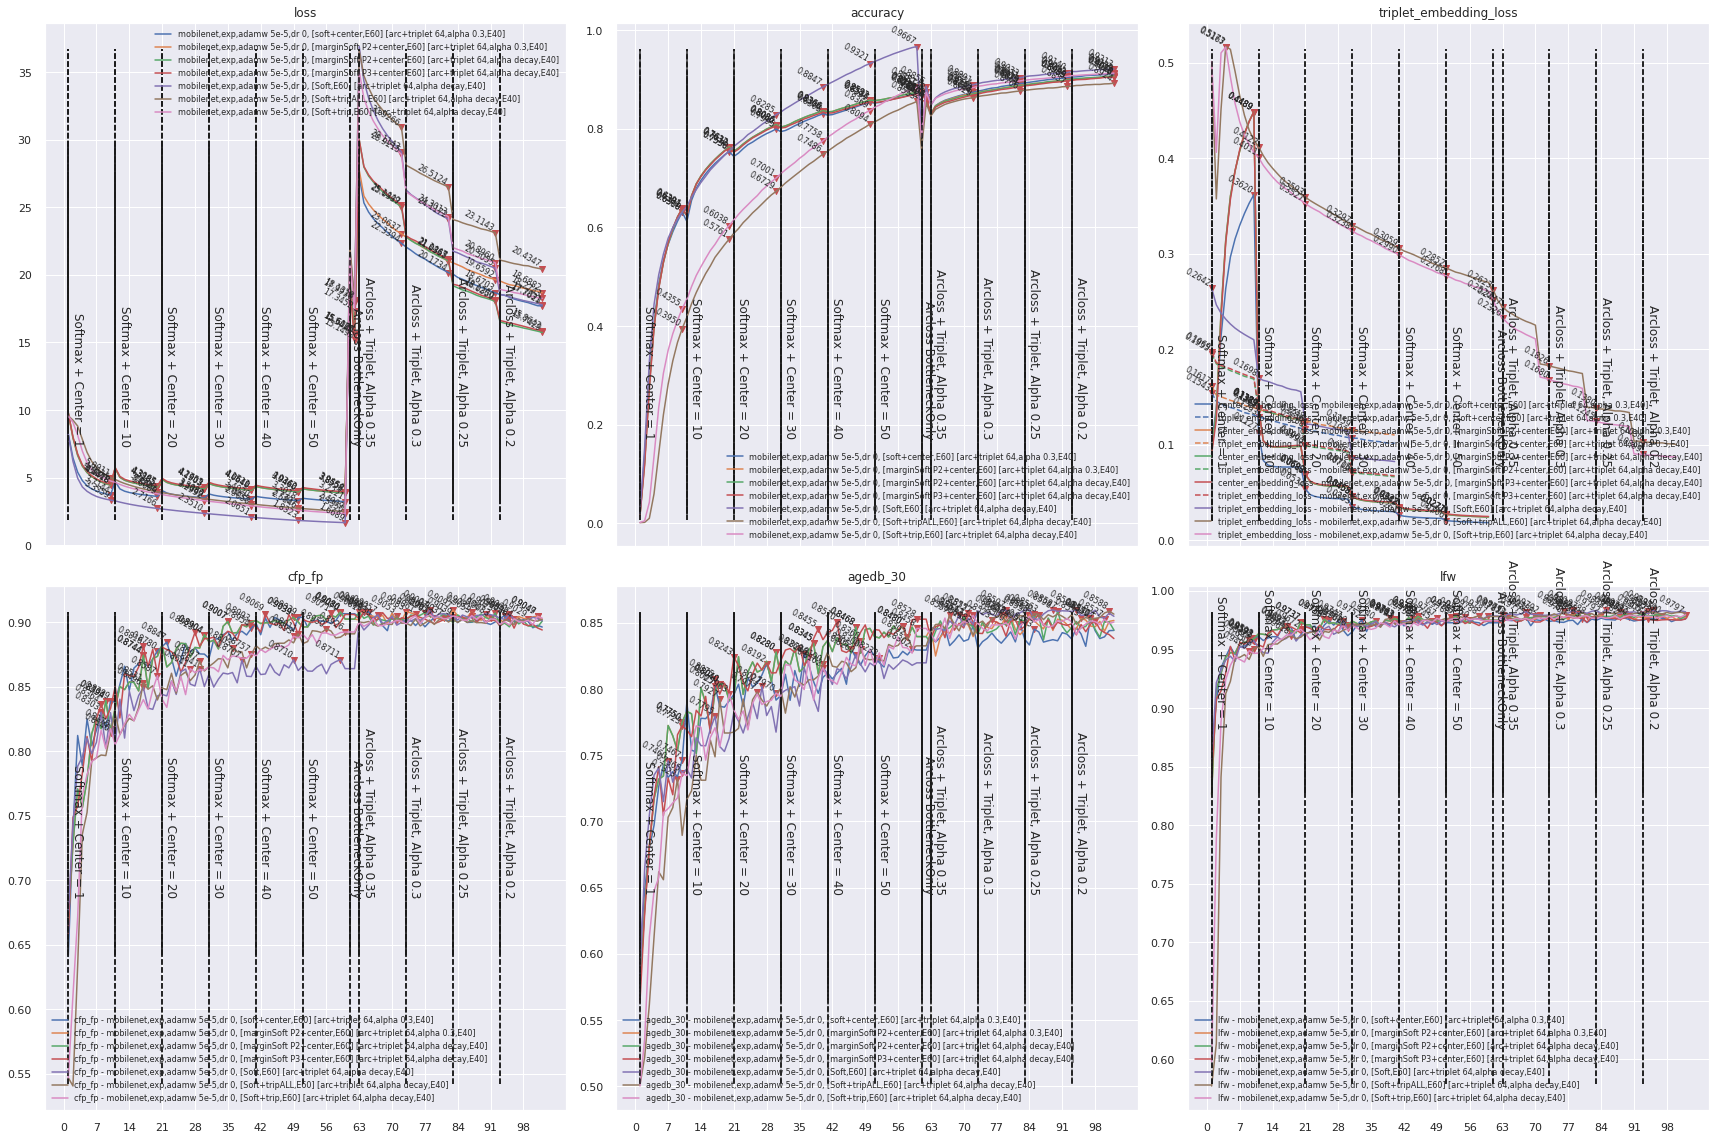

In [3]:
import plot
epochs = [10, 10, 10, 10, 10, 10, 2, 10, 10, 10, 10]
names=["Softmax + Center = 1", "Softmax + Center = 10", "Softmax + Center = 20", "Softmax + Center = 30", "Softmax + Center = 40", "Softmax + Center = 50",
       "Arcloss BottleneckOnly", "Arcloss + Triplet, Alpha 0.35", "Arcloss + Triplet, Alpha 0.3", "Arcloss + Triplet, Alpha 0.25", "Arcloss + Triplet, Alpha 0.2"]
customs = ["cfp_fp", "agedb_30", "lfw", "center_embedding_loss", "triplet_embedding_loss"]
hists_path = "checkpoints/mobilenet_casia_tests/"

# The previous best one
axes, _ = plot.hist_plot_split([hists_path + "T_adamw_5e5_dr0_casia_hist.json", hists_path + "T_adamw_5e5_dr0_arc_trip_casia_hist.json"], epochs, names=names, customs=customs, fig_label='mobilenet,exp,adamw 5e-5,dr 0, [soft+center,E60] [arc+triplet 64,alpha 0.3,E40]')
pp = {"epochs": epochs, "customs": customs, "axes": axes}

axes, _ = plot.hist_plot_split([hists_path + "T_adamw_5e5_dr0_ms2_casia_hist.json", hists_path + "T_adamw_5e5_dr0_ms2_arc_trip_casia_hist.json"], fig_label='mobilenet,exp,adamw 5e-5,dr 0, [marginSoft P2+center,E60] [arc+triplet 64,alpha 0.3,E40]', **pp)
axes, _ = plot.hist_plot_split([hists_path + "T_adamw_5e5_dr0_ms2_casia_hist.json", hists_path + "T_adamw_5e5_dr0_ms2_arc_trip10_casia_hist.json"], fig_label='mobilenet,exp,adamw 5e-5,dr 0, [marginSoft P2+center,E60] [arc+triplet 64,alpha decay,E40]', **pp)
axes, _ = plot.hist_plot_split([hists_path + "T_adamw_5e5_dr0_ms3_casia_hist.json", hists_path + "T_adamw_5e5_dr0_ms3_arc_trip10_casia_hist.json"], fig_label='mobilenet,exp,adamw 5e-5,dr 0, [marginSoft P3+center,E60] [arc+triplet 64,alpha decay,E40]', **pp)

axes, _ = plot.hist_plot_split([hists_path + "T_adamw_5e5_dr0_soft_casia_hist.json", hists_path + "T_adamw_5e5_dr0_soft_casia_arc_trip10_casia_hist.json"], fig_label='mobilenet,exp,adamw 5e-5,dr 0, [Soft,E60] [arc+triplet 64,alpha decay,E40]', **pp)
axes, _ = plot.hist_plot_split([hists_path + "T_adamw_5e5_dr0_TR_casia_hist.json", hists_path + "T_adamw_5e5_dr0_TR_arc_trip10_casia_hist.json"], fig_label='mobilenet,exp,adamw 5e-5,dr 0, [Soft+tripALL,E60] [arc+triplet 64,alpha decay,E40]', **pp)
axes, _ = plot.hist_plot_split([hists_path + "T_adamw_5e5_dr0_triplet_casia_hist.json", hists_path + "T_adamw_5e5_dr0_triplet_arc_trip10_casia_hist.json"], fig_label='mobilenet,exp,adamw 5e-5,dr 0, [Soft+trip,E60] [arc+triplet 64,alpha decay,E40]', **pp)

## Train with less softmax and more arcloss
- Train `20` epochs `softmax loss`, then `80` epochs `arcloss`.
- Combing multi with different `weight decay` / `output_wd_multiplier`

| output_wd_multiplier | E20                     | --> E80                                           |
| -------------------- | ----------------------- | ------------------------------------------------- |
| 0                    | Soft                    | Arcloss + Triplet weight 64, alpha decay          |
| 0                    | MarginSoft, power 2     | Arcloss + Triplet weight 64, alpha decay          |
| 0                    | Soft                    | Arcloss label_smoothing 0.1 + Triplet alpha decay |
| 0                    | Soft                    | Arcloss + TripletAll weight 64 alpha decay        |
| 0                    | Soft, optimizer wd 1e-4 | Arcloss + TripletAll weight 64 alpha decay        |
| 10                   | Soft                    | Arcloss + Triplet weight 64, alpha decay          |
| 20                   | Soft                    | Arcloss + Triplet weight 64, alpha decay          |
| 50                   | Soft                    | Arcloss + Triplet weight 64, alpha decay          |

In [2]:
# weight_decay 5e-5, dropout_rate 0.0
import tensorflow_addons as tfa

basic_model = train.buildin_models("MobileNet", dropout=0, emb_shape=256)
tt = train.Train(data_path, save_path='T_adamw_5e5_dr0_soft_E25_arc_casia.h5', eval_paths=eval_paths,
                 basic_model=basic_model, model=None, lr_base=0.001,
                 batch_size=64, random_status=3)

optimizer = tfa.optimizers.AdamW(weight_decay=5e-5)
sch = [
    {"loss": keras.losses.CategoricalCrossentropy(label_smoothing=0.1), "epoch": 20, "optimizer": optimizer},
    {"loss": losses.ArcfaceLoss(), "bottleneckOnly": True, "epoch": 2},
    {"loss": losses.ArcfaceLoss(), "triplet": 64, "alpha": 0.35, "epoch": 20},
    {"loss": losses.ArcfaceLoss(), "triplet": 64, "alpha": 0.3, "epoch": 20},
    {"loss": losses.ArcfaceLoss(), "triplet": 64, "alpha": 0.25, "epoch": 20},
    {"loss": losses.ArcfaceLoss(), "triplet": 64, "alpha": 0.2, "epoch": 20},
]

tt.train(sch, 0)

>>>> Load model from h5 file: checkpoints/T_adamw_5e5_dr0_soft_E25_arc_casia.h5...
>>>> Init type by loss function name...
>>>> Train softmax...
>>>> Init softmax dataset...
>>>> Image length: 490623, Image class length: 490623, classes: 10572
>>>> loss_weights: None
>>>> Insert weight decay callback...

Learning rate for iter 19 is 0.0006703200460356394
Weight decay for iter 19 is 3.35160038957838e-05
Epoch 19/20
7666/7666 [==============================] - ETA: 0s - loss: 2.7565 - accuracy: 0.7467


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  7.92it/s]


>>>> lfw evaluation max accuracy: 0.957667, thresh: 0.283836, previous max accuracy: 0.000000
>>>> Improved = 0.957667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.07it/s]


>>>> cfp_fp evaluation max accuracy: 0.837000, thresh: 0.175600, previous max accuracy: 0.000000
>>>> Improved = 0.837000




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.38it/s]


>>>> agedb_30 evaluation max accuracy: 0.771167, thresh: 0.224748, previous max accuracy: 0.000000
>>>> Improved = 0.771167
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_casia_basic_agedb_30_epoch_19_0.771167.h5



Epoch 00019: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 526s 69ms/step - loss: 2.7565 - accuracy: 0.7467

Learning rate for iter 20 is 0.0006376281516217733
Weight decay for iter 20 is 3.188140908605419e-05
Epoch 20/20
7666/7666 [==============================] - ETA: 0s - loss: 2.7126 - accuracy: 0.7555


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.32it/s]


>>>> lfw evaluation max accuracy: 0.958333, thresh: 0.295398, previous max accuracy: 0.957667
>>>> Improved = 0.000667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.29it/s]


>>>> cfp_fp evaluation max accuracy: 0.853571, thresh: 0.186596, previous max accuracy: 0.837000
>>>> Improved = 0.016571




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.52it/s]



>>>> agedb_30 evaluation max accuracy: 0.771667, thresh: 0.280426, previous max accuracy: 0.771167
>>>> Improved = 0.000500
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_casia_basic_agedb_30_epoch_20_0.771667.h5

Epoch 00020: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 532s 69ms/step - loss: 2.7126 - accuracy: 0.7555
>>>> Train softmax DONE!!! epochs = [18, 19], model.stop_training = False
>>>> My history:
  loss = [8.038990020751953, 6.06007719039917, 4.94325065612793, 4.319037914276123, 3.96104097366333, 3.741213798522949, 3.5969576835632324, 3.4887592792510986, 3.4038267135620117, 3.3352534770965576, 3.275740623474121, 3.185336112976074, 3.1041500568389893, 3.031595468521118, 2.9682610034942627, 2.908778190612793, 2.852621555328369, 2.803861141204834, 2.7564644813537598, 2.7125611305236816]
  accuracy = [0.02558583766222, 0.16897088289260864, 0.32926708459854126, 0.44192588329315

Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.21it/s]


>>>> lfw evaluation max accuracy: 0.964167, thresh: 0.313003, previous max accuracy: 0.958333
>>>> Improved = 0.005833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.43it/s]


>>>> cfp_fp evaluation max accuracy: 0.852571, thresh: 0.233068, previous max accuracy: 0.853571




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.21it/s]


>>>> agedb_30 evaluation max accuracy: 0.799167, thresh: 0.282047, previous max accuracy: 0.771667
>>>> Improved = 0.027500


Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_casia_basic_agedb_30_epoch_21_0.799167.h5

Epoch 00021: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 555s 75ms/step - loss: 49.9936 - triplet_embedding_loss: 0.3538 - arcface_loss: 27.3479 - arcface_accuracy: 0.6475

Learning rate for iter 22 is 0.0005769498103804867
Weight decay for iter 22 is 2.884749301301781e-05
Epoch 22/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 46.7434 - triplet_embedding_loss: 0.3298 - arcface_loss: 25.6389 - arcface_accuracy: 0.6890


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.32it/s]


>>>> lfw evaluation max accuracy: 0.965833, thresh: 0.323644, previous max accuracy: 0.964167
>>>> Improved = 0.001667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.26it/s]


>>>> cfp_fp evaluation max accuracy: 0.856000, thresh: 0.238964, previous max accuracy: 0.853571


>>>> Improved = 0.002429



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.48it/s]


>>>> agedb_30 evaluation max accuracy: 0.775667, thresh: 0.309110, previous max accuracy: 0.799167



Epoch 00022: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 556s 75ms/step - loss: 46.7437 - triplet_embedding_loss: 0.3298 - arcface_loss: 25.6392 - arcface_accuracy: 0.6890

Learning rate for iter 23 is 0.0005488116360940264
Weight decay for iter 23 is 2.7440584744908847e-05
Epoch 23/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 45.7907 - triplet_embedding_loss: 0.3227 - arcface_loss: 25.1388 - arcface_accuracy: 0.6978


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.30it/s]


>>>> lfw evaluation max accuracy: 0.961500, thresh: 0.357799, previous max accuracy: 0.965833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.50it/s]


>>>> cfp_fp evaluation max accuracy: 0.850143, thresh: 0.274757, previous max accuracy: 0.856000


Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.34it/s]


>>>> agedb_30 evaluation max accuracy: 0.758333, thresh: 0.358273, previous max accuracy: 0.799167



Epoch 00023: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 554s 75ms/step - loss: 45.7906 - triplet_embedding_loss: 0.3227 - arcface_loss: 25.1389 - arcface_accuracy: 0.6978

Learning rate for iter 24 is 0.000522045776761016
Weight decay for iter 24 is 2.6102290576091036e-05
Epoch 24/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 45.0206 - triplet_embedding_loss: 0.3170 - arcface_loss: 24.7341 - arcface_accuracy: 0.7047


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.48it/s]


>>>> lfw evaluation max accuracy: 0.963667, thresh: 0.385882, previous max accuracy: 0.965833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.20it/s]


>>>> cfp_fp evaluation max accuracy: 0.829714, thresh: 0.316927, previous max accuracy: 0.856000




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.48it/s]


>>>> agedb_30 evaluation max accuracy: 0.783167, thresh: 0.376326, previous max accuracy: 0.799167



Epoch 00024: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 556s 75ms/step - loss: 45.0202 - triplet_embedding_loss: 0.3170 - arcface_loss: 24.7341 - arcface_accuracy: 0.7047

Learning rate for iter 25 is 0.0004965853037914095
Weight decay for iter 25 is 2.4829269023030065e-05
Epoch 25/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 44.3372 - triplet_embedding_loss: 0.3119 - arcface_loss: 24.3772 - arcface_accuracy: 0.7103


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.18it/s]


>>>> lfw evaluation max accuracy: 0.966000, thresh: 0.400978, previous max accuracy: 0.965833
>>>> Improved = 0.000167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.44it/s]


>>>> cfp_fp evaluation max accuracy: 0.855286, thresh: 0.351411, previous max accuracy: 0.856000




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.26it/s]


>>>> agedb_30 evaluation max accuracy: 0.793333, thresh: 0.400830, previous max accuracy: 0.799167



Epoch 00025: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 555s 75ms/step - loss: 44.3367 - triplet_embedding_loss: 0.3119 - arcface_loss: 24.3773 - arcface_accuracy: 0.7103

Learning rate for iter 26 is 0.0004723665527410147
Weight decay for iter 26 is 2.3618329578312114e-05
Epoch 26/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 43.7425 - triplet_embedding_loss: 0.3078 - arcface_loss: 24.0441 - arcface_accuracy: 0.7166


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.44it/s]


>>>> lfw evaluation max accuracy: 0.968833, thresh: 0.395663, previous max accuracy: 0.966000
>>>> Improved = 0.002833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.31it/s]


>>>> cfp_fp evaluation max accuracy: 0.863857, thresh: 0.339032, previous max accuracy: 0.856000
>>>> Improved = 0.007857




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.46it/s]


>>>> agedb_30 evaluation max accuracy: 0.772500, thresh: 0.396723, previous max accuracy: 0.799167



Epoch 00026: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 553s 75ms/step - loss: 43.7424 - triplet_embedding_loss: 0.3078 - arcface_loss: 24.0444 - arcface_accuracy: 0.7166

Learning rate for iter 27 is 0.0004493289641172216
Weight decay for iter 27 is 2.2466450900537893e-05
Epoch 27/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 43.1309 - triplet_embedding_loss: 0.3032 - arcface_loss: 23.7251 - arcface_accuracy: 0.7226


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.15it/s]


>>>> lfw evaluation max accuracy: 0.967167, thresh: 0.447888, previous max accuracy: 0.968833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.40it/s]


>>>> cfp_fp evaluation max accuracy: 0.837429, thresh: 0.375114, previous max accuracy: 0.863857




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.29it/s]


>>>> agedb_30 evaluation max accuracy: 0.812833, thresh: 0.418163, previous max accuracy: 0.799167
>>>> Improved = 0.013667
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_casia_basic_agedb_30_epoch_27_0.812833.h5



Epoch 00027: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 556s 75ms/step - loss: 43.1309 - triplet_embedding_loss: 0.3032 - arcface_loss: 23.7252 - arcface_accuracy: 0.7226

Learning rate for iter 28 is 0.00042741493194872667
Weight decay for iter 28 is 2.137074807251338e-05
Epoch 28/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 42.5261 - triplet_embedding_loss: 0.2988 - arcface_loss: 23.4022 - arcface_accuracy: 0.7288


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.35it/s]


>>>> lfw evaluation max accuracy: 0.961000, thresh: 0.456341, previous max accuracy: 0.968833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.23it/s]


>>>> cfp_fp evaluation max accuracy: 0.845286, thresh: 0.347610, previous max accuracy: 0.863857




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.37it/s]


>>>> agedb_30 evaluation max accuracy: 0.805167, thresh: 0.394724, previous max accuracy: 0.812833



Epoch 00028: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 554s 75ms/step - loss: 42.5264 - triplet_embedding_loss: 0.2988 - arcface_loss: 23.4025 - arcface_accuracy: 0.7288

Learning rate for iter 29 is 0.00040656965974059914
Weight decay for iter 29 is 2.032848533417564e-05
Epoch 29/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 41.9791 - triplet_embedding_loss: 0.2947 - arcface_loss: 23.1193 - arcface_accuracy: 0.7342


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.22it/s]


>>>> lfw evaluation max accuracy: 0.964333, thresh: 0.376913, previous max accuracy: 0.968833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.50it/s]


>>>> cfp_fp evaluation max accuracy: 0.865143, thresh: 0.321380, previous max accuracy: 0.863857
>>>> Improved = 0.001286




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.27it/s]


>>>> agedb_30 evaluation max accuracy: 0.781833, thresh: 0.357069, previous max accuracy: 0.812833



Epoch 00029: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 553s 75ms/step - loss: 41.9789 - triplet_embedding_loss: 0.2947 - arcface_loss: 23.1194 - arcface_accuracy: 0.7341

Learning rate for iter 30 is 0.00038674102345450116
Weight decay for iter 30 is 1.9337052435730584e-05
Epoch 30/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 41.3463 - triplet_embedding_loss: 0.2901 - arcface_loss: 22.7823 - arcface_accuracy: 0.7390


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.41it/s]


>>>> lfw evaluation max accuracy: 0.967000, thresh: 0.370856, previous max accuracy: 0.968833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.25it/s]


>>>> cfp_fp evaluation max accuracy: 0.852143, thresh: 0.316899, previous max accuracy: 0.865143




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.47it/s]


>>>> agedb_30 evaluation max accuracy: 0.798333, thresh: 0.359079, previous max accuracy: 0.812833



Epoch 00030: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 555s 75ms/step - loss: 41.3464 - triplet_embedding_loss: 0.2901 - arcface_loss: 22.7824 - arcface_accuracy: 0.7390

Learning rate for iter 31 is 0.00036787944117144236
Weight decay for iter 31 is 1.839397373259999e-05
Epoch 31/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 40.8562 - triplet_embedding_loss: 0.2866 - arcface_loss: 22.5162 - arcface_accuracy: 0.7442


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.05it/s]


>>>> lfw evaluation max accuracy: 0.963333, thresh: 0.392328, previous max accuracy: 0.968833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.45it/s]


>>>> cfp_fp evaluation max accuracy: 0.870857, thresh: 0.307762, previous max accuracy: 0.865143
>>>> Improved = 0.005714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.30it/s]



>>>> agedb_30 evaluation max accuracy: 0.803667, thresh: 0.369330, previous max accuracy: 0.812833

Epoch 00031: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 557s 75ms/step - loss: 40.8561 - triplet_embedding_loss: 0.2866 - arcface_loss: 22.5164 - arcface_accuracy: 0.7442

Learning rate for iter 32 is 0.00034993774911115536
Weight decay for iter 32 is 1.7496889995527454e-05
Epoch 32/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 40.2768 - triplet_embedding_loss: 0.2824 - arcface_loss: 22.2022 - arcface_accuracy: 0.7503


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.48it/s]


>>>> lfw evaluation max accuracy: 0.972333, thresh: 0.360059, previous max accuracy: 0.968833
>>>> Improved = 0.003500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.30it/s]


>>>> cfp_fp evaluation max accuracy: 0.867571, thresh: 0.302188, previous max accuracy: 0.870857




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.47it/s]


>>>> agedb_30 evaluation max accuracy: 0.808000, thresh: 0.347315, previous max accuracy: 0.812833



Epoch 00032: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 554s 75ms/step - loss: 40.2765 - triplet_embedding_loss: 0.2824 - arcface_loss: 22.2023 - arcface_accuracy: 0.7503

Learning rate for iter 33 is 0.00033287108369807955
Weight decay for iter 33 is 1.66435547725996e-05
Epoch 33/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 39.7554 - triplet_embedding_loss: 0.2788 - arcface_loss: 21.9153 - arcface_accuracy: 0.7552


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.16it/s]


>>>> lfw evaluation max accuracy: 0.966500, thresh: 0.408136, previous max accuracy: 0.972333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.42it/s]


>>>> cfp_fp evaluation max accuracy: 0.852000, thresh: 0.329450, previous max accuracy: 0.870857




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.28it/s]


>>>> agedb_30 evaluation max accuracy: 0.807000, thresh: 0.380873, previous max accuracy: 0.812833



Epoch 00033: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 554s 75ms/step - loss: 39.7550 - triplet_embedding_loss: 0.2787 - arcface_loss: 21.9153 - arcface_accuracy: 0.7552

Learning rate for iter 34 is 0.00031663676937905317
Weight decay for iter 34 is 1.583183984621428e-05
Epoch 34/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 39.1832 - triplet_embedding_loss: 0.2745 - arcface_loss: 21.6126 - arcface_accuracy: 0.7608


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.39it/s]



>>>> lfw evaluation max accuracy: 0.968500, thresh: 0.383697, previous max accuracy: 0.972333



Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.17it/s]


>>>> cfp_fp evaluation max accuracy: 0.863000, thresh: 0.302063, previous max accuracy: 0.870857




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.36it/s]


>>>> agedb_30 evaluation max accuracy: 0.805000, thresh: 0.357099, previous max accuracy: 0.812833



Epoch 00034: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 554s 75ms/step - loss: 39.1834 - triplet_embedding_loss: 0.2745 - arcface_loss: 21.6128 - arcface_accuracy: 0.7608

Learning rate for iter 35 is 0.00030119421191220205
Weight decay for iter 35 is 1.5059711586218327e-05
Epoch 35/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 38.6726 - triplet_embedding_loss: 0.2711 - arcface_loss: 21.3195 - arcface_accuracy: 0.7656


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.18it/s]


>>>> lfw evaluation max accuracy: 0.969667, thresh: 0.358620, previous max accuracy: 0.972333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.37it/s]


>>>> cfp_fp evaluation max accuracy: 0.857714, thresh: 0.284309, previous max accuracy: 0.870857




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.26it/s]


>>>> agedb_30 evaluation max accuracy: 0.802167, thresh: 0.319356, previous max accuracy: 0.812833



Epoch 00035: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 553s 75ms/step - loss: 38.6725 - triplet_embedding_loss: 0.2711 - arcface_loss: 21.3196 - arcface_accuracy: 0.7656

Learning rate for iter 36 is 0.0002865047968601901
Weight decay for iter 36 is 1.4325240954349283e-05
Epoch 36/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 38.1429 - triplet_embedding_loss: 0.2675 - arcface_loss: 21.0203 - arcface_accuracy: 0.7706


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.36it/s]


>>>> lfw evaluation max accuracy: 0.972167, thresh: 0.350375, previous max accuracy: 0.972333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.23it/s]


>>>> cfp_fp evaluation max accuracy: 0.878857, thresh: 0.296476, previous max accuracy: 0.870857
>>>> Improved = 0.008000




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.48it/s]


>>>> agedb_30 evaluation max accuracy: 0.814333, thresh: 0.317839, previous max accuracy: 0.812833
>>>> Improved = 0.001500
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_casia_basic_agedb_30_epoch_36_0.814333.h5



Epoch 00036: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 554s 75ms/step - loss: 38.1433 - triplet_embedding_loss: 0.2675 - arcface_loss: 21.0208 - arcface_accuracy: 0.7706

Learning rate for iter 37 is 0.0002725317930340126
Weight decay for iter 37 is 1.3626590771309566e-05
Epoch 37/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 37.6237 - triplet_embedding_loss: 0.2638 - arcface_loss: 20.7401 - arcface_accuracy: 0.7756


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.24it/s]


>>>> lfw evaluation max accuracy: 0.969000, thresh: 0.391400, previous max accuracy: 0.972333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.48it/s]


>>>> cfp_fp evaluation max accuracy: 0.854714, thresh: 0.328830, previous max accuracy: 0.878857




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.28it/s]


>>>> agedb_30 evaluation max accuracy: 0.818667, thresh: 0.363705, previous max accuracy: 0.814333
>>>> Improved = 0.004333
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_casia_basic_agedb_30_epoch_37_0.818667.h5



Epoch 00037: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 552s 74ms/step - loss: 37.6229 - triplet_embedding_loss: 0.2638 - arcface_loss: 20.7399 - arcface_accuracy: 0.7756

Learning rate for iter 38 is 0.0002592402606458915
Weight decay for iter 38 is 1.2962014807271771e-05
Epoch 38/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 37.1156 - triplet_embedding_loss: 0.2603 - arcface_loss: 20.4572 - arcface_accuracy: 0.7802


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.47it/s]


>>>> lfw evaluation max accuracy: 0.974667, thresh: 0.346595, previous max accuracy: 0.972333
>>>> Improved = 0.002333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.28it/s]


>>>> cfp_fp evaluation max accuracy: 0.876857, thresh: 0.275636, previous max accuracy: 0.878857




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.47it/s]


>>>> agedb_30 evaluation max accuracy: 0.811667, thresh: 0.303575, previous max accuracy: 0.818667



Epoch 00038: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 555s 75ms/step - loss: 37.1158 - triplet_embedding_loss: 0.2603 - arcface_loss: 20.4575 - arcface_accuracy: 0.7802

Learning rate for iter 39 is 0.00024659696394160646
Weight decay for iter 39 is 1.2329848686931655e-05
Epoch 39/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 36.5343 - triplet_embedding_loss: 0.2562 - arcface_loss: 20.1382 - arcface_accuracy: 0.7854


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.24it/s]


>>>> lfw evaluation max accuracy: 0.969333, thresh: 0.369557, previous max accuracy: 0.974667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.39it/s]



>>>> cfp_fp evaluation max accuracy: 0.864143, thresh: 0.312647, previous max accuracy: 0.878857



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.22it/s]



>>>> agedb_30 evaluation max accuracy: 0.820333, thresh: 0.334479, previous max accuracy: 0.818667
>>>> Improved = 0.001667
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_casia_basic_agedb_30_epoch_39_0.820333.h5

Epoch 00039: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 552s 74ms/step - loss: 36.5341 - triplet_embedding_loss: 0.2562 - arcface_loss: 20.1384 - arcface_accuracy: 0.7854

Learning rate for iter 40 is 0.00023457028809379762
Weight decay for iter 40 is 1.1728515346476343e-05
Epoch 40/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 36.0772 - triplet_embedding_loss: 0.2531 - arcface_loss: 19.8767 - arcface_accuracy: 0.7894


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.46it/s]


>>>> lfw evaluation max accuracy: 0.971167, thresh: 0.326507, previous max accuracy: 0.974667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.29it/s]


>>>> cfp_fp evaluation max accuracy: 0.880571, thresh: 0.274671, previous max accuracy: 0.878857
>>>> Improved = 0.001714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.50it/s]


>>>> agedb_30 evaluation max accuracy: 0.805667, thresh: 0.296006, previous max accuracy: 0.820333



Epoch 00040: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 554s 75ms/step - loss: 36.0773 - triplet_embedding_loss: 0.2531 - arcface_loss: 19.8769 - arcface_accuracy: 0.7894
>>>> Train arcface DONE!!! epochs = [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39], model.stop_training = False
>>>> My history:
  loss = [8.038990020751953, 6.06007719039917, 4.94325065612793, 4.319037914276123, 3.96104097366333, 3.741213798522949, 3.5969576835632324, 3.4887592792510986, 3.4038267135620117, 3.3352534770965576, 3.275740623474121, 3.185336112976074, 3.1041500568389893, 3.031595468521118, 2.9682610034942627, 2.908778190612793, 2.852621555328369, 2.803861141204834, 2.7564644813537598, 2.7125611305236816, 27.432937622070312, 23.354557037353516, 49.99357604980469, 46.74374008178711, 45.79059982299805, 45.020179748535156, 44.33671951293945, 43.7424201965332, 43.130882263183594, 42.52

Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.45it/s]


>>>> lfw evaluation max accuracy: 0.972000, thresh: 0.343792, previous max accuracy: 0.974667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.32it/s]


>>>> cfp_fp evaluation max accuracy: 0.873571, thresh: 0.276928, previous max accuracy: 0.880571




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.73it/s]


>>>> agedb_30 evaluation max accuracy: 0.813667, thresh: 0.303138, previous max accuracy: 0.820333



Epoch 00041: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 551s 74ms/step - loss: 32.9178 - triplet_embedding_loss: 0.2093 - arcface_loss: 19.5233 - arcface_accuracy: 0.7956

Learning rate for iter 42 is 0.00021224797382674306
Weight decay for iter 42 is 1.0612399819365237e-05
Epoch 42/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 32.5210 - triplet_embedding_loss: 0.2071 - arcface_loss: 19.2682 - arcface_accuracy: 0.7996


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.28it/s]


>>>> lfw evaluation max accuracy: 0.973167, thresh: 0.345289, previous max accuracy: 0.974667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.38it/s]


>>>> cfp_fp evaluation max accuracy: 0.874143, thresh: 0.278973, previous max accuracy: 0.880571




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.41it/s]


>>>> agedb_30 evaluation max accuracy: 0.821333, thresh: 0.311337, previous max accuracy: 0.820333
>>>> Improved = 0.001000
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_casia_basic_agedb_30_epoch_42_0.821333.h5



Epoch 00042: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 552s 74ms/step - loss: 32.5214 - triplet_embedding_loss: 0.2071 - arcface_loss: 19.2685 - arcface_accuracy: 0.7996

Learning rate for iter 43 is 0.00020189651799465538
Weight decay for iter 43 is 1.0094826393469702e-05
Epoch 43/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 32.0003 - triplet_embedding_loss: 0.2036 - arcface_loss: 18.9689 - arcface_accuracy: 0.8050


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.53it/s]



>>>> lfw evaluation max accuracy: 0.975000, thresh: 0.373150, previous max accuracy: 0.974667
>>>> Improved = 0.000333



Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.34it/s]


>>>> cfp_fp evaluation max accuracy: 0.878857, thresh: 0.307196, previous max accuracy: 0.880571




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.34it/s]


>>>> agedb_30 evaluation max accuracy: 0.798500, thresh: 0.348142, previous max accuracy: 0.821333



Epoch 00043: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 553s 75ms/step - loss: 32.0013 - triplet_embedding_loss: 0.2036 - arcface_loss: 18.9695 - arcface_accuracy: 0.8050

Learning rate for iter 44 is 0.0001920499086207541
Weight decay for iter 44 is 9.602495993021876e-06
Epoch 44/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 31.5722 - triplet_embedding_loss: 0.2011 - arcface_loss: 18.7044 - arcface_accuracy: 0.8090


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.41it/s]


>>>> lfw evaluation max accuracy: 0.975167, thresh: 0.311413, previous max accuracy: 0.975000
>>>> Improved = 0.000167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.38it/s]


>>>> cfp_fp evaluation max accuracy: 0.875000, thresh: 0.250167, previous max accuracy: 0.880571




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.57it/s]


>>>> agedb_30 evaluation max accuracy: 0.815000, thresh: 0.285271, previous max accuracy: 0.821333



Epoch 00044: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 551s 74ms/step - loss: 31.5720 - triplet_embedding_loss: 0.2011 - arcface_loss: 18.7046 - arcface_accuracy: 0.8090

Learning rate for iter 45 is 0.0001826835240527346
Weight decay for iter 45 is 9.134177162195556e-06
Epoch 45/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 31.0947 - triplet_embedding_loss: 0.1979 - arcface_loss: 18.4321 - arcface_accuracy: 0.8133


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.29it/s]


>>>> lfw evaluation max accuracy: 0.972833, thresh: 0.318808, previous max accuracy: 0.975167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.37it/s]


>>>> cfp_fp evaluation max accuracy: 0.883429, thresh: 0.255433, previous max accuracy: 0.880571
>>>> Improved = 0.002857




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.33it/s]


>>>> agedb_30 evaluation max accuracy: 0.828333, thresh: 0.297529, previous max accuracy: 0.821333
>>>> Improved = 0.007000
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_casia_basic_agedb_30_epoch_45_0.828333.h5



Epoch 00045: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 553s 75ms/step - loss: 31.0947 - triplet_embedding_loss: 0.1978 - arcface_loss: 18.4324 - arcface_accuracy: 0.8133

Learning rate for iter 46 is 0.00017377394345044513
Weight decay for iter 46 is 8.688697562320158e-06
Epoch 46/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 30.6667 - triplet_embedding_loss: 0.1951 - arcface_loss: 18.1794 - arcface_accuracy: 0.8174


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.41it/s]



>>>> lfw evaluation max accuracy: 0.974167, thresh: 0.327413, previous max accuracy: 0.975167



Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.37it/s]


>>>> cfp_fp evaluation max accuracy: 0.876571, thresh: 0.237556, previous max accuracy: 0.883429




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.47it/s]


>>>> agedb_30 evaluation max accuracy: 0.826000, thresh: 0.287690, previous max accuracy: 0.828333



Epoch 00046: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 548s 74ms/step - loss: 30.6669 - triplet_embedding_loss: 0.1951 - arcface_loss: 18.1796 - arcface_accuracy: 0.8174

Learning rate for iter 47 is 0.00016529888822158653
Weight decay for iter 47 is 8.264944881375413e-06
Epoch 47/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 30.2243 - triplet_embedding_loss: 0.1920 - arcface_loss: 17.9346 - arcface_accuracy: 0.8211


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.33it/s]


>>>> lfw evaluation max accuracy: 0.975333, thresh: 0.304633, previous max accuracy: 0.975167
>>>> Improved = 0.000167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.48it/s]


>>>> cfp_fp evaluation max accuracy: 0.882000, thresh: 0.248341, previous max accuracy: 0.883429




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.36it/s]


>>>> agedb_30 evaluation max accuracy: 0.831333, thresh: 0.266746, previous max accuracy: 0.828333
>>>> Improved = 0.003000
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_casia_basic_agedb_30_epoch_47_0.831333.h5



Epoch 00047: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 553s 75ms/step - loss: 30.2244 - triplet_embedding_loss: 0.1920 - arcface_loss: 17.9349 - arcface_accuracy: 0.8211

Learning rate for iter 48 is 0.00015723716631362762
Weight decay for iter 48 is 7.861859558033757e-06
Epoch 48/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 29.8071 - triplet_embedding_loss: 0.1895 - arcface_loss: 17.6781 - arcface_accuracy: 0.8250


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.53it/s]


>>>> lfw evaluation max accuracy: 0.974667, thresh: 0.342894, previous max accuracy: 0.975333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.36it/s]


>>>> cfp_fp evaluation max accuracy: 0.864429, thresh: 0.257371, previous max accuracy: 0.883429




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.43it/s]


>>>> agedb_30 evaluation max accuracy: 0.818167, thresh: 0.314922, previous max accuracy: 0.831333



Epoch 00048: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 551s 74ms/step - loss: 29.8066 - triplet_embedding_loss: 0.1895 - arcface_loss: 17.6780 - arcface_accuracy: 0.8250

Learning rate for iter 49 is 0.00014956861922263504
Weight decay for iter 49 is 7.47843159842887e-06
Epoch 49/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 29.3681 - triplet_embedding_loss: 0.1865 - arcface_loss: 17.4327 - arcface_accuracy: 0.8288


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.34it/s]


>>>> lfw evaluation max accuracy: 0.979000, thresh: 0.308885, previous max accuracy: 0.975333
>>>> Improved = 0.003667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.53it/s]


>>>> cfp_fp evaluation max accuracy: 0.893571, thresh: 0.245042, previous max accuracy: 0.883429


>>>> Improved = 0.010143



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.45it/s]


>>>> agedb_30 evaluation max accuracy: 0.827500, thresh: 0.287299, previous max accuracy: 0.831333



Epoch 00049: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 547s 74ms/step - loss: 29.3683 - triplet_embedding_loss: 0.1865 - arcface_loss: 17.4330 - arcface_accuracy: 0.8288

Learning rate for iter 50 is 0.00014227407158651353
Weight decay for iter 50 is 7.113704214134486e-06
Epoch 50/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 29.0083 - triplet_embedding_loss: 0.1846 - arcface_loss: 17.1952 - arcface_accuracy: 0.8316


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.48it/s]


>>>> lfw evaluation max accuracy: 0.975333, thresh: 0.329086, previous max accuracy: 0.979000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.23it/s]



>>>> cfp_fp evaluation max accuracy: 0.885714, thresh: 0.253114, previous max accuracy: 0.893571



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.45it/s]


>>>> agedb_30 evaluation max accuracy: 0.833167, thresh: 0.279756, previous max accuracy: 0.831333
>>>> Improved = 0.001833
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_casia_basic_agedb_30_epoch_50_0.833167.h5



Epoch 00050: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 550s 74ms/step - loss: 29.0085 - triplet_embedding_loss: 0.1846 - arcface_loss: 17.1954 - arcface_accuracy: 0.8316

Learning rate for iter 51 is 0.0001353352832366127
Weight decay for iter 51 is 6.766764727217378e-06
Epoch 51/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 28.5717 - triplet_embedding_loss: 0.1815 - arcface_loss: 16.9545 - arcface_accuracy: 0.8354


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.29it/s]


>>>> lfw evaluation max accuracy: 0.974000, thresh: 0.321695, previous max accuracy: 0.979000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.48it/s]


>>>> cfp_fp evaluation max accuracy: 0.884857, thresh: 0.219263, previous max accuracy: 0.893571




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.41it/s]


>>>> agedb_30 evaluation max accuracy: 0.832833, thresh: 0.271445, previous max accuracy: 0.833167



Epoch 00051: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 553s 75ms/step - loss: 28.5726 - triplet_embedding_loss: 0.1815 - arcface_loss: 16.9551 - arcface_accuracy: 0.8354

Learning rate for iter 52 is 0.0001287349035878042
Weight decay for iter 52 is 6.436745479732053e-06
Epoch 52/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 28.1595 - triplet_embedding_loss: 0.1786 - arcface_loss: 16.7298 - arcface_accuracy: 0.8389


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.52it/s]



>>>> lfw evaluation max accuracy: 0.977333, thresh: 0.315271, previous max accuracy: 0.979000



Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.36it/s]


>>>> cfp_fp evaluation max accuracy: 0.890000, thresh: 0.247023, previous max accuracy: 0.893571




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.51it/s]


>>>> agedb_30 evaluation max accuracy: 0.844167, thresh: 0.259331, previous max accuracy: 0.833167
>>>> Improved = 0.011000
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_casia_basic_agedb_30_epoch_52_0.844167.h5



Epoch 00052: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 547s 74ms/step - loss: 28.1595 - triplet_embedding_loss: 0.1786 - arcface_loss: 16.7298 - arcface_accuracy: 0.8389

Learning rate for iter 53 is 0.0001224564282529819
Weight decay for iter 53 is 6.122822014731355e-06
Epoch 53/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 27.8385 - triplet_embedding_loss: 0.1770 - arcface_loss: 16.5134 - arcface_accuracy: 0.8420


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.32it/s]


>>>> lfw evaluation max accuracy: 0.976500, thresh: 0.328119, previous max accuracy: 0.979000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.33it/s]


>>>> cfp_fp evaluation max accuracy: 0.888429, thresh: 0.202236, previous max accuracy: 0.893571




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.23it/s]


>>>> agedb_30 evaluation max accuracy: 0.830333, thresh: 0.241852, previous max accuracy: 0.844167



Epoch 00053: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 550s 74ms/step - loss: 27.8385 - triplet_embedding_loss: 0.1769 - arcface_loss: 16.5137 - arcface_accuracy: 0.8420

Learning rate for iter 54 is 0.00011648415777349696
Weight decay for iter 54 is 5.824208528792951e-06
Epoch 54/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 27.4407 - triplet_embedding_loss: 0.1744 - arcface_loss: 16.2780 - arcface_accuracy: 0.8455


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.44it/s]


>>>> lfw evaluation max accuracy: 0.975500, thresh: 0.350208, previous max accuracy: 0.979000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.30it/s]


>>>> cfp_fp evaluation max accuracy: 0.882000, thresh: 0.258327, previous max accuracy: 0.893571




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.46it/s]


>>>> agedb_30 evaluation max accuracy: 0.827167, thresh: 0.308632, previous max accuracy: 0.844167



Epoch 00054: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 550s 74ms/step - loss: 27.4407 - triplet_embedding_loss: 0.1744 - arcface_loss: 16.2782 - arcface_accuracy: 0.8455

Learning rate for iter 55 is 0.00011080315836233387
Weight decay for iter 55 is 5.5401583267666865e-06
Epoch 55/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 27.0969 - triplet_embedding_loss: 0.1722 - arcface_loss: 16.0741 - arcface_accuracy: 0.8481


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.34it/s]


>>>> lfw evaluation max accuracy: 0.977167, thresh: 0.319899, previous max accuracy: 0.979000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.43it/s]


>>>> cfp_fp evaluation max accuracy: 0.891429, thresh: 0.227690, previous max accuracy: 0.893571




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.38it/s]


>>>> agedb_30 evaluation max accuracy: 0.829500, thresh: 0.294363, previous max accuracy: 0.844167



Epoch 00055: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 548s 74ms/step - loss: 27.0975 - triplet_embedding_loss: 0.1722 - arcface_loss: 16.0745 - arcface_accuracy: 0.8481

Learning rate for iter 56 is 0.00010539922456186434
Weight decay for iter 56 is 5.269961548037827e-06
Epoch 56/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 26.7174 - triplet_embedding_loss: 0.1696 - arcface_loss: 15.8606 - arcface_accuracy: 0.8509


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.42it/s]


>>>> lfw evaluation max accuracy: 0.978500, thresh: 0.303879, previous max accuracy: 0.979000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.30it/s]


>>>> cfp_fp evaluation max accuracy: 0.898286, thresh: 0.224066, previous max accuracy: 0.893571
>>>> Improved = 0.004714




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.58it/s]


>>>> agedb_30 evaluation max accuracy: 0.833500, thresh: 0.258174, previous max accuracy: 0.844167



Epoch 00056: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 553s 75ms/step - loss: 26.7176 - triplet_embedding_loss: 0.1696 - arcface_loss: 15.8610 - arcface_accuracy: 0.8509

Learning rate for iter 57 is 0.00010025884372280371
Weight decay for iter 57 is 5.012942892790306e-06
Epoch 57/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 26.3494 - triplet_embedding_loss: 0.1670 - arcface_loss: 15.6587 - arcface_accuracy: 0.8543


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.34it/s]


>>>> lfw evaluation max accuracy: 0.978667, thresh: 0.283503, previous max accuracy: 0.979000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.47it/s]


>>>> cfp_fp evaluation max accuracy: 0.895143, thresh: 0.219159, previous max accuracy: 0.898286




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.32it/s]


>>>> agedb_30 evaluation max accuracy: 0.840500, thresh: 0.227899, previous max accuracy: 0.844167



Epoch 00057: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 551s 74ms/step - loss: 26.3490 - triplet_embedding_loss: 0.1670 - arcface_loss: 15.6587 - arcface_accuracy: 0.8543

Learning rate for iter 58 is 9.536916221554961e-05
Weight decay for iter 58 is 4.768458438775269e-06
Epoch 58/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 26.0188 - triplet_embedding_loss: 0.1650 - arcface_loss: 15.4583 - arcface_accuracy: 0.8564


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.39it/s]


>>>> lfw evaluation max accuracy: 0.975167, thresh: 0.304937, previous max accuracy: 0.979000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.38it/s]


>>>> cfp_fp evaluation max accuracy: 0.894143, thresh: 0.226137, previous max accuracy: 0.898286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.56it/s]


>>>> agedb_30 evaluation max accuracy: 0.849500, thresh: 0.243917, previous max accuracy: 0.844167
>>>> Improved = 0.005333
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_casia_basic_agedb_30_epoch_58_0.849500.h5



Epoch 00058: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 550s 74ms/step - loss: 26.0194 - triplet_embedding_loss: 0.1650 - arcface_loss: 15.4588 - arcface_accuracy: 0.8564

Learning rate for iter 59 is 9.071795328941248e-05
Weight decay for iter 59 is 4.535898369795177e-06
Epoch 59/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 25.6979 - triplet_embedding_loss: 0.1630 - arcface_loss: 15.2655 - arcface_accuracy: 0.8593


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.28it/s]


>>>> lfw evaluation max accuracy: 0.977167, thresh: 0.310487, previous max accuracy: 0.979000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.50it/s]


>>>> cfp_fp evaluation max accuracy: 0.890143, thresh: 0.217352, previous max accuracy: 0.898286




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.28it/s]


>>>> agedb_30 evaluation max accuracy: 0.835667, thresh: 0.275769, previous max accuracy: 0.849500



Epoch 00059: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 553s 75ms/step - loss: 25.6979 - triplet_embedding_loss: 0.1630 - arcface_loss: 15.2657 - arcface_accuracy: 0.8593

Learning rate for iter 60 is 8.62935864993705e-05
Weight decay for iter 60 is 4.314679699746193e-06
Epoch 60/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 25.3240 - triplet_embedding_loss: 0.1603 - arcface_loss: 15.0633 - arcface_accuracy: 0.8629


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.33it/s]


>>>> lfw evaluation max accuracy: 0.979333, thresh: 0.298070, previous max accuracy: 0.979000
>>>> Improved = 0.000333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.39it/s]


>>>> cfp_fp evaluation max accuracy: 0.899000, thresh: 0.205582, previous max accuracy: 0.898286
>>>> Improved = 0.000714




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.57it/s]



>>>> agedb_30 evaluation max accuracy: 0.844000, thresh: 0.226729, previous max accuracy: 0.849500

Epoch 00060: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 552s 74ms/step - loss: 25.3233 - triplet_embedding_loss: 0.1603 - arcface_loss: 15.0631 - arcface_accuracy: 0.8629
>>>> Train arcface DONE!!! epochs = [40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59], model.stop_training = False
>>>> My history:
  loss = [8.038990020751953, 6.06007719039917, 4.94325065612793, 4.319037914276123, 3.96104097366333, 3.741213798522949, 3.5969576835632324, 3.4887592792510986, 3.4038267135620117, 3.3352534770965576, 3.275740623474121, 3.185336112976074, 3.1041500568389893, 3.031595468521118, 2.9682610034942627, 2.908778190612793, 2.852621555328369, 2.803861141204834, 2.7564644813537598, 2.7125611305236816, 27.432937622070312, 23.354557037353516, 49.99357604980469, 46.74374008178711, 4


Learning rate for iter 61 is 8.20849986238988e-05
Weight decay for iter 61 is 4.104250365344342e-06
Epoch 61/80
Shuffle image data...
      2/Unknown - 0s 34ms/step - loss: 19.8215 - triplet_embedding_loss: 0.1028 - arcface_loss: 13.2392 - arcface_accuracy: 0.8984WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0234s vs `on_train_batch_end` time: 0.0450s). Check your callbacks.
   7415/Unknown - 481s 65ms/step - loss: 22.9897 - triplet_embedding_loss: 0.1278 - arcface_loss: 14.8097 - arcface_accuracy: 0.8654


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.51it/s]



>>>> lfw evaluation max accuracy: 0.975833, thresh: 0.296471, previous max accuracy: 0.979333



Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.42it/s]


>>>> cfp_fp evaluation max accuracy: 0.892571, thresh: 0.233487, previous max accuracy: 0.899000




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.57it/s]


>>>> agedb_30 evaluation max accuracy: 0.848500, thresh: 0.256121, previous max accuracy: 0.849500



Epoch 00061: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 553s 75ms/step - loss: 22.9898 - triplet_embedding_loss: 0.1278 - arcface_loss: 14.8098 - arcface_accuracy: 0.8654

Learning rate for iter 62 is 7.808166600115313e-05
Weight decay for iter 62 is 3.904083314409945e-06
Epoch 62/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 22.7229 - triplet_embedding_loss: 0.1264 - arcface_loss: 14.6347 - arcface_accuracy: 0.8681


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.29it/s]


>>>> lfw evaluation max accuracy: 0.977833, thresh: 0.296704, previous max accuracy: 0.979333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.44it/s]


>>>> cfp_fp evaluation max accuracy: 0.895571, thresh: 0.236884, previous max accuracy: 0.899000




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.25it/s]


>>>> agedb_30 evaluation max accuracy: 0.838667, thresh: 0.262706, previous max accuracy: 0.849500



Epoch 00062: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 554s 75ms/step - loss: 22.7228 - triplet_embedding_loss: 0.1264 - arcface_loss: 14.6348 - arcface_accuracy: 0.8681

Learning rate for iter 63 is 7.427357821433387e-05
Weight decay for iter 63 is 3.71367923435173e-06
Epoch 63/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 22.4812 - triplet_embedding_loss: 0.1251 - arcface_loss: 14.4740 - arcface_accuracy: 0.8698


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.49it/s]


>>>> lfw evaluation max accuracy: 0.977833, thresh: 0.290159, previous max accuracy: 0.979333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.39it/s]


>>>> cfp_fp evaluation max accuracy: 0.890000, thresh: 0.222228, previous max accuracy: 0.899000




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.52it/s]


>>>> agedb_30 evaluation max accuracy: 0.837000, thresh: 0.259101, previous max accuracy: 0.849500



Epoch 00063: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 554s 75ms/step - loss: 22.4815 - triplet_embedding_loss: 0.1251 - arcface_loss: 14.4743 - arcface_accuracy: 0.8698

Learning rate for iter 64 is 7.065121306042957e-05
Weight decay for iter 64 is 3.5325610951986164e-06
Epoch 64/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 22.2255 - triplet_embedding_loss: 0.1239 - arcface_loss: 14.2969 - arcface_accuracy: 0.8725


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.24it/s]


>>>> lfw evaluation max accuracy: 0.982000, thresh: 0.299879, previous max accuracy: 0.979333
>>>> Improved = 0.002667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.57it/s]



>>>> cfp_fp evaluation max accuracy: 0.900286, thresh: 0.226035, previous max accuracy: 0.899000
>>>> Improved = 0.001286



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.31it/s]


>>>> agedb_30 evaluation max accuracy: 0.845333, thresh: 0.248656, previous max accuracy: 0.849500



Epoch 00064: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 556s 75ms/step - loss: 22.2259 - triplet_embedding_loss: 0.1239 - arcface_loss: 14.2973 - arcface_accuracy: 0.8725

Learning rate for iter 65 is 6.720551273974975e-05
Weight decay for iter 65 is 3.360275741215446e-06
Epoch 65/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 21.9215 - triplet_embedding_loss: 0.1218 - arcface_loss: 14.1275 - arcface_accuracy: 0.8753


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.40it/s]


>>>> lfw evaluation max accuracy: 0.980000, thresh: 0.262586, previous max accuracy: 0.982000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.29it/s]


>>>> cfp_fp evaluation max accuracy: 0.898000, thresh: 0.223110, previous max accuracy: 0.900286




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.44it/s]


>>>> agedb_30 evaluation max accuracy: 0.847833, thresh: 0.232729, previous max accuracy: 0.849500



Epoch 00065: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 554s 75ms/step - loss: 21.9217 - triplet_embedding_loss: 0.1218 - arcface_loss: 14.1278 - arcface_accuracy: 0.8753

Learning rate for iter 66 is 6.392786120670758e-05
Weight decay for iter 66 is 3.1963932087819558e-06
Epoch 66/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 21.6483 - triplet_embedding_loss: 0.1200 - arcface_loss: 13.9671 - arcface_accuracy: 0.8770


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.27it/s]


>>>> lfw evaluation max accuracy: 0.976667, thresh: 0.295443, previous max accuracy: 0.982000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.52it/s]


>>>> cfp_fp evaluation max accuracy: 0.896429, thresh: 0.234204, previous max accuracy: 0.900286




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.39it/s]


>>>> agedb_30 evaluation max accuracy: 0.860000, thresh: 0.251386, previous max accuracy: 0.849500
>>>> Improved = 0.010500
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_casia_basic_agedb_30_epoch_66_0.860000.h5



Epoch 00066: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 556s 75ms/step - loss: 21.6486 - triplet_embedding_loss: 0.1200 - arcface_loss: 13.9675 - arcface_accuracy: 0.8770

Learning rate for iter 67 is 6.0810062625217954e-05
Weight decay for iter 67 is 3.0405035431613214e-06
Epoch 67/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 21.4004 - triplet_embedding_loss: 0.1187 - arcface_loss: 13.8061 - arcface_accuracy: 0.8792


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.46it/s]


>>>> lfw evaluation max accuracy: 0.979667, thresh: 0.276041, previous max accuracy: 0.982000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.31it/s]


>>>> cfp_fp evaluation max accuracy: 0.897143, thresh: 0.224494, previous max accuracy: 0.900286




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.45it/s]


>>>> agedb_30 evaluation max accuracy: 0.844667, thresh: 0.234753, previous max accuracy: 0.860000



Epoch 00067: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 554s 75ms/step - loss: 21.4005 - triplet_embedding_loss: 0.1187 - arcface_loss: 13.8063 - arcface_accuracy: 0.8792

Learning rate for iter 68 is 5.7844320874838456e-05
Weight decay for iter 68 is 2.892216343752807e-06
Epoch 68/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 21.2105 - triplet_embedding_loss: 0.1179 - arcface_loss: 13.6648 - arcface_accuracy: 0.8808


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.35it/s]


>>>> lfw evaluation max accuracy: 0.976333, thresh: 0.283172, previous max accuracy: 0.982000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.64it/s]


>>>> cfp_fp evaluation max accuracy: 0.892286, thresh: 0.224702, previous max accuracy: 0.900286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.63it/s]


>>>> agedb_30 evaluation max accuracy: 0.850667, thresh: 0.233929, previous max accuracy: 0.860000



Epoch 00068: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 552s 74ms/step - loss: 21.2102 - triplet_embedding_loss: 0.1179 - arcface_loss: 13.6647 - arcface_accuracy: 0.8808

Learning rate for iter 69 is 5.502322005640721e-05
Weight decay for iter 69 is 2.7511612188391155e-06
Epoch 69/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 20.9350 - triplet_embedding_loss: 0.1162 - arcface_loss: 13.5011 - arcface_accuracy: 0.8834


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.45it/s]


>>>> lfw evaluation max accuracy: 0.981000, thresh: 0.298154, previous max accuracy: 0.982000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.33it/s]


>>>> cfp_fp evaluation max accuracy: 0.893571, thresh: 0.239301, previous max accuracy: 0.900286




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.45it/s]



>>>> agedb_30 evaluation max accuracy: 0.854667, thresh: 0.245232, previous max accuracy: 0.860000

Epoch 00069: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 553s 75ms/step - loss: 20.9351 - triplet_embedding_loss: 0.1162 - arcface_loss: 13.5014 - arcface_accuracy: 0.8834

Learning rate for iter 70 is 5.233970594843238e-05
Weight decay for iter 70 is 2.6169855118496343e-06
Epoch 70/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 20.7497 - triplet_embedding_loss: 0.1152 - arcface_loss: 13.3754 - arcface_accuracy: 0.8844


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.32it/s]


>>>> lfw evaluation max accuracy: 0.981667, thresh: 0.275017, previous max accuracy: 0.982000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.47it/s]


>>>> cfp_fp evaluation max accuracy: 0.902571, thresh: 0.193168, previous max accuracy: 0.900286
>>>> Improved = 0.002286




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.43it/s]


>>>> agedb_30 evaluation max accuracy: 0.847833, thresh: 0.231625, previous max accuracy: 0.860000



Epoch 00070: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 552s 74ms/step - loss: 20.7495 - triplet_embedding_loss: 0.1152 - arcface_loss: 13.3754 - arcface_accuracy: 0.8844

Learning rate for iter 71 is 4.9787068367863945e-05
Weight decay for iter 71 is 2.4893536192394095e-06
Epoch 71/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 20.5263 - triplet_embedding_loss: 0.1139 - arcface_loss: 13.2392 - arcface_accuracy: 0.8862


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.45it/s]


>>>> lfw evaluation max accuracy: 0.978667, thresh: 0.263513, previous max accuracy: 0.982000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.42it/s]


>>>> cfp_fp evaluation max accuracy: 0.902571, thresh: 0.201730, previous max accuracy: 0.902571




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.57it/s]



>>>> agedb_30 evaluation max accuracy: 0.839833, thresh: 0.234449, previous max accuracy: 0.860000

Epoch 00071: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 555s 75ms/step - loss: 20.5266 - triplet_embedding_loss: 0.1139 - arcface_loss: 13.2396 - arcface_accuracy: 0.8862

Learning rate for iter 72 is 4.7358924391140906e-05
Weight decay for iter 72 is 2.367946535741794e-06
Epoch 72/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 20.2708 - triplet_embedding_loss: 0.1122 - arcface_loss: 13.0896 - arcface_accuracy: 0.8886


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.25it/s]



>>>> lfw evaluation max accuracy: 0.980500, thresh: 0.273094, previous max accuracy: 0.982000



Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.36it/s]


>>>> cfp_fp evaluation max accuracy: 0.905429, thresh: 0.199284, previous max accuracy: 0.902571
>>>> Improved = 0.002857




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.26it/s]


>>>> agedb_30 evaluation max accuracy: 0.843500, thresh: 0.219230, previous max accuracy: 0.860000



Epoch 00072: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 552s 74ms/step - loss: 20.2710 - triplet_embedding_loss: 0.1122 - arcface_loss: 13.0898 - arcface_accuracy: 0.8886

Learning rate for iter 73 is 4.50492023935578e-05
Weight decay for iter 73 is 2.25246026275272e-06
Epoch 73/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 20.0786 - triplet_embedding_loss: 0.1110 - arcface_loss: 12.9749 - arcface_accuracy: 0.8898


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.49it/s]


>>>> lfw evaluation max accuracy: 0.979667, thresh: 0.287770, previous max accuracy: 0.982000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.39it/s]


>>>> cfp_fp evaluation max accuracy: 0.902143, thresh: 0.206890, previous max accuracy: 0.905429




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.56it/s]


>>>> agedb_30 evaluation max accuracy: 0.842833, thresh: 0.241492, previous max accuracy: 0.860000



Epoch 00073: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 550s 74ms/step - loss: 20.0785 - triplet_embedding_loss: 0.1110 - arcface_loss: 12.9750 - arcface_accuracy: 0.8898

Learning rate for iter 74 is 4.2852126867040164e-05
Weight decay for iter 74 is 2.142606490451726e-06
Epoch 74/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 19.8718 - triplet_embedding_loss: 0.1101 - arcface_loss: 12.8226 - arcface_accuracy: 0.8917


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.30it/s]


>>>> lfw evaluation max accuracy: 0.980333, thresh: 0.281997, previous max accuracy: 0.982000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.45it/s]


>>>> cfp_fp evaluation max accuracy: 0.899429, thresh: 0.206740, previous max accuracy: 0.905429




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.37it/s]



>>>> agedb_30 evaluation max accuracy: 0.854167, thresh: 0.242100, previous max accuracy: 0.860000

Epoch 00074: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 554s 75ms/step - loss: 19.8719 - triplet_embedding_loss: 0.1101 - arcface_loss: 12.8228 - arcface_accuracy: 0.8917

Learning rate for iter 75 is 4.0762203978366214e-05
Weight decay for iter 75 is 2.038110324065201e-06
Epoch 75/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 19.7021 - triplet_embedding_loss: 0.1090 - arcface_loss: 12.7238 - arcface_accuracy: 0.8931


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.51it/s]


>>>> lfw evaluation max accuracy: 0.981333, thresh: 0.273199, previous max accuracy: 0.982000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.25it/s]


>>>> cfp_fp evaluation max accuracy: 0.897714, thresh: 0.205097, previous max accuracy: 0.905429




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.41it/s]


>>>> agedb_30 evaluation max accuracy: 0.859000, thresh: 0.209267, previous max accuracy: 0.860000



Epoch 00075: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 554s 75ms/step - loss: 19.7021 - triplet_embedding_loss: 0.1090 - arcface_loss: 12.7240 - arcface_accuracy: 0.8931

Learning rate for iter 76 is 3.877420783172201e-05
Weight decay for iter 76 is 1.9387105112400604e-06
Epoch 76/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 19.5277 - triplet_embedding_loss: 0.1081 - arcface_loss: 12.6100 - arcface_accuracy: 0.8944


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.30it/s]


>>>> lfw evaluation max accuracy: 0.980167, thresh: 0.271532, previous max accuracy: 0.982000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.45it/s]


>>>> cfp_fp evaluation max accuracy: 0.900429, thresh: 0.213199, previous max accuracy: 0.905429




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.46it/s]



>>>> agedb_30 evaluation max accuracy: 0.855667, thresh: 0.224799, previous max accuracy: 0.860000

Epoch 00076: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 555s 75ms/step - loss: 19.5283 - triplet_embedding_loss: 0.1081 - arcface_loss: 12.6105 - arcface_accuracy: 0.8944

Learning rate for iter 77 is 3.688316740124e-05
Weight decay for iter 77 is 1.844158532549045e-06
Epoch 77/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 19.3314 - triplet_embedding_loss: 0.1071 - arcface_loss: 12.4787 - arcface_accuracy: 0.8966


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.44it/s]


>>>> lfw evaluation max accuracy: 0.981167, thresh: 0.249309, previous max accuracy: 0.982000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.29it/s]


>>>> cfp_fp evaluation max accuracy: 0.903286, thresh: 0.196167, previous max accuracy: 0.905429




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.45it/s]


>>>> agedb_30 evaluation max accuracy: 0.854333, thresh: 0.215111, previous max accuracy: 0.860000



Epoch 00077: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 552s 74ms/step - loss: 19.3320 - triplet_embedding_loss: 0.1071 - arcface_loss: 12.4792 - arcface_accuracy: 0.8966

Learning rate for iter 78 is 3.5084354100845025e-05
Weight decay for iter 78 is 1.7542179193696938e-06
Epoch 78/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 19.1395 - triplet_embedding_loss: 0.1058 - arcface_loss: 12.3694 - arcface_accuracy: 0.8976


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.47it/s]


>>>> lfw evaluation max accuracy: 0.980000, thresh: 0.270405, previous max accuracy: 0.982000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.49it/s]


>>>> cfp_fp evaluation max accuracy: 0.895857, thresh: 0.199299, previous max accuracy: 0.905429




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.36it/s]


>>>> agedb_30 evaluation max accuracy: 0.863333, thresh: 0.211159, previous max accuracy: 0.860000
>>>> Improved = 0.003333
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_casia_basic_agedb_30_epoch_78_0.863333.h5



Epoch 00078: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 553s 75ms/step - loss: 19.1395 - triplet_embedding_loss: 0.1058 - arcface_loss: 12.3696 - arcface_accuracy: 0.8976

Learning rate for iter 79 is 3.337326996032607e-05
Weight decay for iter 79 is 1.6686636854501558e-06
Epoch 79/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 18.9795 - triplet_embedding_loss: 0.1048 - arcface_loss: 12.2710 - arcface_accuracy: 0.8990


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.45it/s]


>>>> lfw evaluation max accuracy: 0.981833, thresh: 0.253270, previous max accuracy: 0.982000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.37it/s]


>>>> cfp_fp evaluation max accuracy: 0.900286, thresh: 0.190818, previous max accuracy: 0.905429




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.55it/s]


>>>> agedb_30 evaluation max accuracy: 0.859000, thresh: 0.205848, previous max accuracy: 0.863333



Epoch 00079: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 555s 75ms/step - loss: 18.9795 - triplet_embedding_loss: 0.1048 - arcface_loss: 12.2712 - arcface_accuracy: 0.8990

Learning rate for iter 80 is 3.174563637806794e-05
Weight decay for iter 80 is 1.5872819858486764e-06
Epoch 80/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 18.8102 - triplet_embedding_loss: 0.1039 - arcface_loss: 12.1592 - arcface_accuracy: 0.9005


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.27it/s]


>>>> lfw evaluation max accuracy: 0.976333, thresh: 0.265460, previous max accuracy: 0.982000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.42it/s]


>>>> cfp_fp evaluation max accuracy: 0.898429, thresh: 0.187390, previous max accuracy: 0.905429




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.38it/s]


>>>> agedb_30 evaluation max accuracy: 0.857167, thresh: 0.215537, previous max accuracy: 0.863333



Epoch 00080: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 556s 75ms/step - loss: 18.8099 - triplet_embedding_loss: 0.1039 - arcface_loss: 12.1592 - arcface_accuracy: 0.9005
>>>> Train arcface DONE!!! epochs = [60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79], model.stop_training = False
>>>> My history:
  loss = [8.038990020751953, 6.06007719039917, 4.94325065612793, 4.319037914276123, 3.96104097366333, 3.741213798522949, 3.5969576835632324, 3.4887592792510986, 3.4038267135620117, 3.3352534770965576, 3.275740623474121, 3.185336112976074, 3.1041500568389893, 3.031595468521118, 2.9682610034942627, 2.908778190612793, 2.852621555328369, 2.803861141204834, 2.7564644813537598, 2.7125611305236816, 27.432937622070312, 23.354557037353516, 49.99357604980469, 46.74374008178711, 45.79059982299805, 45.020179748535156, 44.33671951293945, 43.7424201965332, 43.130882263183594, 42.52


Learning rate for iter 81 is 3.01973834223185e-05
Weight decay for iter 81 is 1.5098693211257341e-06
Epoch 81/100
Shuffle image data...
      2/Unknown - 0s 34ms/step - loss: 19.9786 - triplet_embedding_loss: 0.1006 - arcface_loss: 13.5412 - arcface_accuracy: 0.8516WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0244s vs `on_train_batch_end` time: 0.0443s). Check your callbacks.
   7415/Unknown - 479s 65ms/step - loss: 17.0493 - triplet_embedding_loss: 0.0789 - arcface_loss: 11.9965 - arcface_accuracy: 0.9024


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.33it/s]


>>>> lfw evaluation max accuracy: 0.982167, thresh: 0.237002, previous max accuracy: 0.982000
>>>> Improved = 0.000167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.47it/s]


>>>> cfp_fp evaluation max accuracy: 0.898714, thresh: 0.196687, previous max accuracy: 0.905429




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.31it/s]


>>>> agedb_30 evaluation max accuracy: 0.852667, thresh: 0.193699, previous max accuracy: 0.863333



Epoch 00081: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 552s 74ms/step - loss: 17.0499 - triplet_embedding_loss: 0.0790 - arcface_loss: 11.9969 - arcface_accuracy: 0.9024

Learning rate for iter 82 is 2.8724639654239422e-05
Weight decay for iter 82 is 1.4362321962835267e-06
Epoch 82/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 16.9323 - triplet_embedding_loss: 0.0785 - arcface_loss: 11.9096 - arcface_accuracy: 0.9033


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.41it/s]


>>>> lfw evaluation max accuracy: 0.979833, thresh: 0.266438, previous max accuracy: 0.982167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.20it/s]


>>>> cfp_fp evaluation max accuracy: 0.897571, thresh: 0.200665, previous max accuracy: 0.905429




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.52it/s]


>>>> agedb_30 evaluation max accuracy: 0.851833, thresh: 0.215888, previous max accuracy: 0.863333



Epoch 00082: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 551s 74ms/step - loss: 16.9327 - triplet_embedding_loss: 0.0785 - arcface_loss: 11.9100 - arcface_accuracy: 0.9033

Learning rate for iter 83 is 2.732372244729256e-05
Weight decay for iter 83 is 1.3661862112712697e-06
Epoch 83/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 16.7768 - triplet_embedding_loss: 0.0775 - arcface_loss: 11.8139 - arcface_accuracy: 0.9044


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.15it/s]


>>>> lfw evaluation max accuracy: 0.978167, thresh: 0.249677, previous max accuracy: 0.982167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.36it/s]


>>>> cfp_fp evaluation max accuracy: 0.892857, thresh: 0.196075, previous max accuracy: 0.905429




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.29it/s]


>>>> agedb_30 evaluation max accuracy: 0.855167, thresh: 0.214082, previous max accuracy: 0.863333



Epoch 00083: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 553s 75ms/step - loss: 16.7771 - triplet_embedding_loss: 0.0775 - arcface_loss: 11.8143 - arcface_accuracy: 0.9044

Learning rate for iter 84 is 2.5991128778755335e-05
Weight decay for iter 84 is 1.2995565157325473e-06
Epoch 84/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 16.6686 - triplet_embedding_loss: 0.0772 - arcface_loss: 11.7250 - arcface_accuracy: 0.9058


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.33it/s]


>>>> lfw evaluation max accuracy: 0.979833, thresh: 0.262640, previous max accuracy: 0.982167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.29it/s]



>>>> cfp_fp evaluation max accuracy: 0.903571, thresh: 0.195837, previous max accuracy: 0.905429



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.47it/s]


>>>> agedb_30 evaluation max accuracy: 0.839833, thresh: 0.207336, previous max accuracy: 0.863333



Epoch 00084: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 551s 74ms/step - loss: 16.6686 - triplet_embedding_loss: 0.0772 - arcface_loss: 11.7252 - arcface_accuracy: 0.9058

Learning rate for iter 85 is 2.472352647033939e-05
Weight decay for iter 85 is 1.2361764447632595e-06
Epoch 85/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 16.5064 - triplet_embedding_loss: 0.0762 - arcface_loss: 11.6266 - arcface_accuracy: 0.9068


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.16it/s]


>>>> lfw evaluation max accuracy: 0.979833, thresh: 0.249999, previous max accuracy: 0.982167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.40it/s]


>>>> cfp_fp evaluation max accuracy: 0.893714, thresh: 0.204147, previous max accuracy: 0.905429




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.27it/s]


>>>> agedb_30 evaluation max accuracy: 0.856000, thresh: 0.199132, previous max accuracy: 0.863333



Epoch 00085: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 550s 74ms/step - loss: 16.5068 - triplet_embedding_loss: 0.0762 - arcface_loss: 11.6269 - arcface_accuracy: 0.9068

Learning rate for iter 86 is 2.3517745856009108e-05
Weight decay for iter 86 is 1.1758874052247847e-06
Epoch 86/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 16.3893 - triplet_embedding_loss: 0.0757 - arcface_loss: 11.5455 - arcface_accuracy: 0.9076


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.35it/s]


>>>> lfw evaluation max accuracy: 0.980167, thresh: 0.250337, previous max accuracy: 0.982167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.30it/s]


>>>> cfp_fp evaluation max accuracy: 0.901143, thresh: 0.194635, previous max accuracy: 0.905429




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.41it/s]


>>>> agedb_30 evaluation max accuracy: 0.861500, thresh: 0.197685, previous max accuracy: 0.863333



Epoch 00086: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 551s 74ms/step - loss: 16.3893 - triplet_embedding_loss: 0.0757 - arcface_loss: 11.5456 - arcface_accuracy: 0.9076

Learning rate for iter 87 is 2.2370771856165592e-05
Weight decay for iter 87 is 1.1185386483703041e-06
Epoch 87/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 16.2826 - triplet_embedding_loss: 0.0751 - arcface_loss: 11.4755 - arcface_accuracy: 0.9090


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.19it/s]


>>>> lfw evaluation max accuracy: 0.980167, thresh: 0.251026, previous max accuracy: 0.982167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.48it/s]


>>>> cfp_fp evaluation max accuracy: 0.902000, thresh: 0.167296, previous max accuracy: 0.905429




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.32it/s]


>>>> agedb_30 evaluation max accuracy: 0.856833, thresh: 0.194456, previous max accuracy: 0.863333



Epoch 00087: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 553s 75ms/step - loss: 16.2827 - triplet_embedding_loss: 0.0751 - arcface_loss: 11.4757 - arcface_accuracy: 0.9090

Learning rate for iter 88 is 2.127973643837717e-05
Weight decay for iter 88 is 1.0639869287842885e-06
Epoch 88/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 16.1416 - triplet_embedding_loss: 0.0744 - arcface_loss: 11.3802 - arcface_accuracy: 0.9101


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.28it/s]


>>>> lfw evaluation max accuracy: 0.980667, thresh: 0.241403, previous max accuracy: 0.982167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.04it/s]


>>>> cfp_fp evaluation max accuracy: 0.900143, thresh: 0.178470, previous max accuracy: 0.905429




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.38it/s]


>>>> agedb_30 evaluation max accuracy: 0.857333, thresh: 0.189845, previous max accuracy: 0.863333



Epoch 00088: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 552s 74ms/step - loss: 16.1415 - triplet_embedding_loss: 0.0744 - arcface_loss: 11.3804 - arcface_accuracy: 0.9101

Learning rate for iter 89 is 2.024191144580438e-05
Weight decay for iter 89 is 1.012095708574634e-06
Epoch 89/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 16.0356 - triplet_embedding_loss: 0.0737 - arcface_loss: 11.3164 - arcface_accuracy: 0.9111


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.25it/s]


>>>> lfw evaluation max accuracy: 0.980333, thresh: 0.236079, previous max accuracy: 0.982167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.34it/s]



>>>> cfp_fp evaluation max accuracy: 0.896857, thresh: 0.174056, previous max accuracy: 0.905429



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.27it/s]


>>>> agedb_30 evaluation max accuracy: 0.846333, thresh: 0.199611, previous max accuracy: 0.863333



Epoch 00089: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 553s 75ms/step - loss: 16.0354 - triplet_embedding_loss: 0.0737 - arcface_loss: 11.3164 - arcface_accuracy: 0.9111

Learning rate for iter 90 is 1.925470177538692e-05
Weight decay for iter 90 is 9.627351573726628e-07
Epoch 90/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 15.9846 - triplet_embedding_loss: 0.0738 - arcface_loss: 11.2617 - arcface_accuracy: 0.9113


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.37it/s]


>>>> lfw evaluation max accuracy: 0.977167, thresh: 0.237354, previous max accuracy: 0.982167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.29it/s]



>>>> cfp_fp evaluation max accuracy: 0.899857, thresh: 0.170075, previous max accuracy: 0.905429



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.49it/s]


>>>> agedb_30 evaluation max accuracy: 0.857000, thresh: 0.188987, previous max accuracy: 0.863333



Epoch 00090: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 550s 74ms/step - loss: 15.9842 - triplet_embedding_loss: 0.0738 - arcface_loss: 11.2615 - arcface_accuracy: 0.9113

Learning rate for iter 91 is 1.831563888873418e-05
Weight decay for iter 91 is 9.157820386462845e-07
Epoch 91/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 15.8391 - triplet_embedding_loss: 0.0729 - arcface_loss: 11.1731 - arcface_accuracy: 0.9127


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.13it/s]


>>>> lfw evaluation max accuracy: 0.979333, thresh: 0.250669, previous max accuracy: 0.982167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.42it/s]


>>>> cfp_fp evaluation max accuracy: 0.900000, thresh: 0.162406, previous max accuracy: 0.905429




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.24it/s]


>>>> agedb_30 evaluation max accuracy: 0.851167, thresh: 0.189808, previous max accuracy: 0.863333



Epoch 00091: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 551s 74ms/step - loss: 15.8397 - triplet_embedding_loss: 0.0729 - arcface_loss: 11.1735 - arcface_accuracy: 0.9127

Learning rate for iter 92 is 1.7422374639493514e-05
Weight decay for iter 92 is 8.711188570487138e-07
Epoch 92/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 15.7469 - triplet_embedding_loss: 0.0725 - arcface_loss: 11.1096 - arcface_accuracy: 0.9134


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.37it/s]


>>>> lfw evaluation max accuracy: 0.979167, thresh: 0.236430, previous max accuracy: 0.982167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.25it/s]


>>>> cfp_fp evaluation max accuracy: 0.894857, thresh: 0.170601, previous max accuracy: 0.905429




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.46it/s]


>>>> agedb_30 evaluation max accuracy: 0.857500, thresh: 0.191550, previous max accuracy: 0.863333



Epoch 00092: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 555s 75ms/step - loss: 15.7468 - triplet_embedding_loss: 0.0725 - arcface_loss: 11.1097 - arcface_accuracy: 0.9134

Learning rate for iter 93 is 1.657267540176124e-05
Weight decay for iter 93 is 8.286338584184705e-07
Epoch 93/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 15.6606 - triplet_embedding_loss: 0.0720 - arcface_loss: 11.0517 - arcface_accuracy: 0.9141


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.21it/s]


>>>> lfw evaluation max accuracy: 0.978167, thresh: 0.243473, previous max accuracy: 0.982167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.40it/s]


>>>> cfp_fp evaluation max accuracy: 0.902143, thresh: 0.170371, previous max accuracy: 0.905429




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.21it/s]


>>>> agedb_30 evaluation max accuracy: 0.858500, thresh: 0.186907, previous max accuracy: 0.863333



Epoch 00093: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 556s 75ms/step - loss: 15.6607 - triplet_embedding_loss: 0.0720 - arcface_loss: 11.0519 - arcface_accuracy: 0.9141

Learning rate for iter 94 is 1.5764416484854488e-05
Weight decay for iter 94 is 7.882209160925413e-07
Epoch 94/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 15.5850 - triplet_embedding_loss: 0.0716 - arcface_loss: 11.0005 - arcface_accuracy: 0.9146


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.46it/s]


>>>> lfw evaluation max accuracy: 0.980167, thresh: 0.235866, previous max accuracy: 0.982167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.22it/s]


>>>> cfp_fp evaluation max accuracy: 0.901286, thresh: 0.164979, previous max accuracy: 0.905429




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.46it/s]


>>>> agedb_30 evaluation max accuracy: 0.855833, thresh: 0.185692, previous max accuracy: 0.863333



Epoch 00094: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 548s 74ms/step - loss: 15.5852 - triplet_embedding_loss: 0.0716 - arcface_loss: 11.0007 - arcface_accuracy: 0.9146

Learning rate for iter 95 is 1.4995576820477704e-05
Weight decay for iter 95 is 7.497789056287729e-07
Epoch 95/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 15.4784 - triplet_embedding_loss: 0.0711 - arcface_loss: 10.9291 - arcface_accuracy: 0.9157


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.28it/s]


>>>> lfw evaluation max accuracy: 0.980833, thresh: 0.234693, previous max accuracy: 0.982167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.29it/s]



>>>> cfp_fp evaluation max accuracy: 0.899000, thresh: 0.167153, previous max accuracy: 0.905429



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.34it/s]


>>>> agedb_30 evaluation max accuracy: 0.849667, thresh: 0.188163, previous max accuracy: 0.863333



Epoch 00095: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 547s 74ms/step - loss: 15.4781 - triplet_embedding_loss: 0.0711 - arcface_loss: 10.9291 - arcface_accuracy: 0.9157

Learning rate for iter 96 is 1.4264233908999255e-05
Weight decay for iter 96 is 7.132117616492906e-07
Epoch 96/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 15.3831 - triplet_embedding_loss: 0.0706 - arcface_loss: 10.8624 - arcface_accuracy: 0.9168


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.42it/s]


>>>> lfw evaluation max accuracy: 0.980500, thresh: 0.245490, previous max accuracy: 0.982167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.24it/s]


>>>> cfp_fp evaluation max accuracy: 0.900857, thresh: 0.178258, previous max accuracy: 0.905429




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.45it/s]


>>>> agedb_30 evaluation max accuracy: 0.852833, thresh: 0.177276, previous max accuracy: 0.863333



Epoch 00096: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 551s 74ms/step - loss: 15.3830 - triplet_embedding_loss: 0.0706 - arcface_loss: 10.8624 - arcface_accuracy: 0.9168

Learning rate for iter 97 is 1.3568559012200934e-05
Weight decay for iter 97 is 6.784279662497283e-07
Epoch 97/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 15.3145 - triplet_embedding_loss: 0.0702 - arcface_loss: 10.8235 - arcface_accuracy: 0.9169


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.28it/s]


>>>> lfw evaluation max accuracy: 0.979167, thresh: 0.221246, previous max accuracy: 0.982167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.40it/s]


>>>> cfp_fp evaluation max accuracy: 0.899857, thresh: 0.148319, previous max accuracy: 0.905429




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.23it/s]


>>>> agedb_30 evaluation max accuracy: 0.851667, thresh: 0.173415, previous max accuracy: 0.863333



Epoch 00097: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 551s 74ms/step - loss: 15.3148 - triplet_embedding_loss: 0.0702 - arcface_loss: 10.8238 - arcface_accuracy: 0.9169

Learning rate for iter 98 is 1.2906812580479862e-05
Weight decay for iter 98 is 6.453407195294858e-07
Epoch 98/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 15.2447 - triplet_embedding_loss: 0.0699 - arcface_loss: 10.7699 - arcface_accuracy: 0.9176


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.34it/s]


>>>> lfw evaluation max accuracy: 0.979667, thresh: 0.230628, previous max accuracy: 0.982167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.18it/s]


>>>> cfp_fp evaluation max accuracy: 0.895429, thresh: 0.150429, previous max accuracy: 0.905429




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.30it/s]


>>>> agedb_30 evaluation max accuracy: 0.854833, thresh: 0.179272, previous max accuracy: 0.863333



Epoch 00098: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 553s 75ms/step - loss: 15.2450 - triplet_embedding_loss: 0.0699 - arcface_loss: 10.7703 - arcface_accuracy: 0.9176

Learning rate for iter 99 is 1.2277339903068436e-05
Weight decay for iter 99 is 6.138670300970261e-07
Epoch 99/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 15.1516 - triplet_embedding_loss: 0.0694 - arcface_loss: 10.7131 - arcface_accuracy: 0.9182


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.24it/s]


>>>> lfw evaluation max accuracy: 0.978500, thresh: 0.224685, previous max accuracy: 0.982167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.35it/s]


>>>> cfp_fp evaluation max accuracy: 0.899429, thresh: 0.158928, previous max accuracy: 0.905429




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.21it/s]


>>>> agedb_30 evaluation max accuracy: 0.852333, thresh: 0.173254, previous max accuracy: 0.863333



Epoch 00099: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 553s 75ms/step - loss: 15.1519 - triplet_embedding_loss: 0.0694 - arcface_loss: 10.7134 - arcface_accuracy: 0.9182

Learning rate for iter 100 is 1.1678566970395443e-05
Weight decay for iter 100 is 5.839283971909026e-07
Epoch 100/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 15.0777 - triplet_embedding_loss: 0.0690 - arcface_loss: 10.6614 - arcface_accuracy: 0.9189


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.38it/s]


>>>> lfw evaluation max accuracy: 0.978500, thresh: 0.219398, previous max accuracy: 0.982167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.23it/s]


>>>> cfp_fp evaluation max accuracy: 0.899857, thresh: 0.162395, previous max accuracy: 0.905429




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.40it/s]


>>>> agedb_30 evaluation max accuracy: 0.851500, thresh: 0.172054, previous max accuracy: 0.863333



Epoch 00100: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 552s 74ms/step - loss: 15.0778 - triplet_embedding_loss: 0.0690 - arcface_loss: 10.6616 - arcface_accuracy: 0.9189
>>>> Train arcface DONE!!! epochs = [80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99], model.stop_training = False
>>>> My history:
  loss = [8.038990020751953, 6.06007719039917, 4.94325065612793, 4.319037914276123, 3.96104097366333, 3.741213798522949, 3.5969576835632324, 3.4887592792510986, 3.4038267135620117, 3.3352534770965576, 3.275740623474121, 3.185336112976074, 3.1041500568389893, 3.031595468521118, 2.9682610034942627, 2.908778190612793, 2.852621555328369, 2.803861141204834, 2.7564644813537598, 2.7125611305236816, 27.432937622070312, 23.354557037353516, 49.99357604980469, 46.74374008178711, 45.79059982299805, 45.020179748535156, 44.33671951293945, 43.7424201965332, 43.130882263183594, 42.52

In [3]:
# weight_decay 5e-5, dropout_rate 0.0
import tensorflow_addons as tfa

basic_model = train.buildin_models("MobileNet", dropout=0, emb_shape=256)
tt = train.Train(data_path, save_path='T_adamw_5e5_dr0_soft_P2_E25_arc_casia.h5', eval_paths=eval_paths,
                 basic_model=basic_model, model=None, lr_base=0.001,
                 batch_size=64, random_status=3)

optimizer = tfa.optimizers.AdamW(weight_decay=5e-5)
sch = [
    {"loss": losses.MarginSoftmax(power=2, label_smoothing=0.1), "epoch": 20, "optimizer": optimizer},
    {"loss": losses.ArcfaceLoss(), "bottleneckOnly": True, "epoch": 2},
    {"loss": losses.ArcfaceLoss(), "triplet": 64, "alpha": 0.35, "epoch": 20},
    {"loss": losses.ArcfaceLoss(), "triplet": 64, "alpha": 0.3, "epoch": 20},
    {"loss": losses.ArcfaceLoss(), "triplet": 64, "alpha": 0.25, "epoch": 20},
    {"loss": losses.ArcfaceLoss(), "triplet": 64, "alpha": 0.2, "epoch": 20},
]

tt.train(sch, 0)

>>>> Init type by loss function name...
>>>> Train softmax...
>>>> Init softmax dataset...
>>>> Image length: 490623, Image class length: 490623, classes: 10572
>>>> Add softmax layer...
>>>> loss_weights: None
>>>> Insert weight decay callback...

Learning rate for iter 1 is 0.001
Weight decay for iter 1 is 4.999999873689376e-05
Epoch 1/20
7666/7666 [==============================] - ETA: 0s - loss: 10.1746 - accuracy: 0.0062


Evaluating lfw: 100%|██████████| 188/188 [00:24<00:00,  7.54it/s]


>>>> lfw evaluation max accuracy: 0.772500, thresh: 0.697762, previous max accuracy: 0.000000
>>>> Improved = 0.772500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:28<00:00,  7.66it/s]


>>>> cfp_fp evaluation max accuracy: 0.583857, thresh: 0.847426, previous max accuracy: 0.000000
>>>> Improved = 0.583857




Evaluating agedb_30: 100%|██████████| 188/188 [00:24<00:00,  7.72it/s]


>>>> agedb_30 evaluation max accuracy: 0.519333, thresh: 0.776644, previous max accuracy: 0.000000
>>>> Improved = 0.519333
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia_basic_agedb_30_epoch_1_0.519333.h5



Epoch 00001: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 560s 73ms/step - loss: 10.1746 - accuracy: 0.0062

Learning rate for iter 2 is 0.001
Weight decay for iter 2 is 4.999999873689376e-05
Epoch 2/20
7666/7666 [==============================] - ETA: 0s - loss: 8.3801 - accuracy: 0.0801


Evaluating lfw: 100%|██████████| 188/188 [00:24<00:00,  7.80it/s]


>>>> lfw evaluation max accuracy: 0.902500, thresh: 0.427129, previous max accuracy: 0.772500
>>>> Improved = 0.130000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:28<00:00,  7.65it/s]


>>>> cfp_fp evaluation max accuracy: 0.710571, thresh: 0.437636, previous max accuracy: 0.583857
>>>> Improved = 0.126714




Evaluating agedb_30: 100%|██████████| 188/188 [00:24<00:00,  7.73it/s]


>>>> agedb_30 evaluation max accuracy: 0.626167, thresh: 0.497013, previous max accuracy: 0.519333
>>>> Improved = 0.106833


Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia_basic_agedb_30_epoch_2_0.626167.h5

Epoch 00002: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 558s 73ms/step - loss: 8.3801 - accuracy: 0.0801

Learning rate for iter 3 is 0.001
Weight decay for iter 3 is 4.999999873689376e-05
Epoch 3/20
7666/7666 [==============================] - ETA: 0s - loss: 6.6405 - accuracy: 0.2531


Evaluating lfw: 100%|██████████| 188/188 [00:24<00:00,  7.76it/s]


>>>> lfw evaluation max accuracy: 0.937500, thresh: 0.403137, previous max accuracy: 0.902500
>>>> Improved = 0.035000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:28<00:00,  7.59it/s]



>>>> cfp_fp evaluation max accuracy: 0.749571, thresh: 0.433758, previous max accuracy: 0.710571
>>>> Improved = 0.039000



Evaluating agedb_30: 100%|██████████| 188/188 [00:24<00:00,  7.73it/s]


>>>> agedb_30 evaluation max accuracy: 0.661500, thresh: 0.444372, previous max accuracy: 0.626167
>>>> Improved = 0.035333
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia_basic_agedb_30_epoch_3_0.661500.h5



Epoch 00003: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 553s 72ms/step - loss: 6.6405 - accuracy: 0.2531

Learning rate for iter 4 is 0.001
Weight decay for iter 4 is 4.999999873689376e-05
Epoch 4/20
7666/7666 [==============================] - ETA: 0s - loss: 5.5298 - accuracy: 0.3999


Evaluating lfw: 100%|██████████| 188/188 [00:24<00:00,  7.59it/s]


>>>> lfw evaluation max accuracy: 0.935333, thresh: 0.369686, previous max accuracy: 0.937500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:28<00:00,  7.81it/s]



>>>> cfp_fp evaluation max accuracy: 0.775714, thresh: 0.361625, previous max accuracy: 0.749571
>>>> Improved = 0.026143



Evaluating agedb_30: 100%|██████████| 188/188 [00:24<00:00,  7.62it/s]


>>>> agedb_30 evaluation max accuracy: 0.700000, thresh: 0.403333, previous max accuracy: 0.661500
>>>> Improved = 0.038500


Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia_basic_agedb_30_epoch_4_0.700000.h5

Epoch 00004: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 557s 73ms/step - loss: 5.5298 - accuracy: 0.3999

Learning rate for iter 5 is 0.001
Weight decay for iter 5 is 4.999999873689376e-05
Epoch 5/20
7666/7666 [==============================] - ETA: 0s - loss: 4.9538 - accuracy: 0.4828


Evaluating lfw: 100%|██████████| 188/188 [00:24<00:00,  7.73it/s]


>>>> lfw evaluation max accuracy: 0.935333, thresh: 0.396675, previous max accuracy: 0.937500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:29<00:00,  7.41it/s]



>>>> cfp_fp evaluation max accuracy: 0.746429, thresh: 0.349777, previous max accuracy: 0.775714



Evaluating agedb_30: 100%|██████████| 188/188 [00:24<00:00,  7.78it/s]


>>>> agedb_30 evaluation max accuracy: 0.703667, thresh: 0.376515, previous max accuracy: 0.700000
>>>> Improved = 0.003667


Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia_basic_agedb_30_epoch_5_0.703667.h5

Epoch 00005: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 557s 73ms/step - loss: 4.9538 - accuracy: 0.4828

Learning rate for iter 6 is 0.001
Weight decay for iter 6 is 4.999999873689376e-05
Epoch 6/20
7666/7666 [==============================] - ETA: 0s - loss: 4.6149 - accuracy: 0.5346


Evaluating lfw: 100%|██████████| 188/188 [00:24<00:00,  7.53it/s]


>>>> lfw evaluation max accuracy: 0.943000, thresh: 0.422986, previous max accuracy: 0.937500
>>>> Improved = 0.005500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:28<00:00,  7.68it/s]



>>>> cfp_fp evaluation max accuracy: 0.780286, thresh: 0.358738, previous max accuracy: 0.775714
>>>> Improved = 0.004571



Evaluating agedb_30: 100%|██████████| 188/188 [00:24<00:00,  7.63it/s]


>>>> agedb_30 evaluation max accuracy: 0.712833, thresh: 0.438908, previous max accuracy: 0.703667
>>>> Improved = 0.009167


Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia_basic_agedb_30_epoch_6_0.712833.h5

Epoch 00006: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 556s 72ms/step - loss: 4.6149 - accuracy: 0.5346

Learning rate for iter 7 is 0.001
Weight decay for iter 7 is 4.999999873689376e-05
Epoch 7/20
7666/7666 [==============================] - ETA: 0s - loss: 4.4026 - accuracy: 0.5669


Evaluating lfw: 100%|██████████| 188/188 [00:24<00:00,  7.72it/s]


>>>> lfw evaluation max accuracy: 0.944167, thresh: 0.360162, previous max accuracy: 0.943000
>>>> Improved = 0.001167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:28<00:00,  7.77it/s]


>>>> cfp_fp evaluation max accuracy: 0.807000, thresh: 0.245002, previous max accuracy: 0.780286


>>>> Improved = 0.026714



Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.08it/s]


>>>> agedb_30 evaluation max accuracy: 0.712000, thresh: 0.355919, previous max accuracy: 0.712833



Epoch 00007: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 554s 72ms/step - loss: 4.4026 - accuracy: 0.5669

Learning rate for iter 8 is 0.001
Weight decay for iter 8 is 4.999999873689376e-05
Epoch 8/20
7666/7666 [==============================] - ETA: 0s - loss: 4.2460 - accuracy: 0.5897


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.01it/s]


>>>> lfw evaluation max accuracy: 0.940833, thresh: 0.363488, previous max accuracy: 0.944167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:28<00:00,  7.72it/s]


>>>> cfp_fp evaluation max accuracy: 0.795000, thresh: 0.245262, previous max accuracy: 0.807000


Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.06it/s]


>>>> agedb_30 evaluation max accuracy: 0.706833, thresh: 0.377766, previous max accuracy: 0.712833



Epoch 00008: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 552s 72ms/step - loss: 4.2460 - accuracy: 0.5897

Learning rate for iter 9 is 0.001
Weight decay for iter 9 is 4.999999873689376e-05
Epoch 9/20
7666/7666 [==============================] - ETA: 0s - loss: 4.1128 - accuracy: 0.6111


Evaluating lfw: 100%|██████████| 188/188 [00:24<00:00,  7.73it/s]


>>>> lfw evaluation max accuracy: 0.944500, thresh: 0.358800, previous max accuracy: 0.944167
>>>> Improved = 0.000333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.08it/s]


>>>> cfp_fp evaluation max accuracy: 0.804000, thresh: 0.272279, previous max accuracy: 0.807000




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  7.92it/s]


>>>> agedb_30 evaluation max accuracy: 0.736833, thresh: 0.349419, previous max accuracy: 0.712833
>>>> Improved = 0.024000
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia_basic_agedb_30_epoch_9_0.736833.h5



Epoch 00009: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 551s 72ms/step - loss: 4.1128 - accuracy: 0.6111

Learning rate for iter 10 is 0.001
Weight decay for iter 10 is 4.999999873689376e-05
Epoch 10/20
7666/7666 [==============================] - ETA: 0s - loss: 4.0038 - accuracy: 0.6273


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.28it/s]


>>>> lfw evaluation max accuracy: 0.945333, thresh: 0.351768, previous max accuracy: 0.944500
>>>> Improved = 0.000833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.06it/s]


>>>> cfp_fp evaluation max accuracy: 0.791429, thresh: 0.241306, previous max accuracy: 0.807000


Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.29it/s]


>>>> agedb_30 evaluation max accuracy: 0.751667, thresh: 0.336474, previous max accuracy: 0.736833
>>>> Improved = 0.014833
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia_basic_agedb_30_epoch_10_0.751667.h5



Epoch 00010: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 550s 72ms/step - loss: 4.0038 - accuracy: 0.6273

Learning rate for iter 11 is 0.001
Weight decay for iter 11 is 4.999999873689376e-05
Epoch 11/20
7666/7666 [==============================] - ETA: 0s - loss: 3.9146 - accuracy: 0.6415


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  7.87it/s]


>>>> lfw evaluation max accuracy: 0.958167, thresh: 0.338236, previous max accuracy: 0.945333
>>>> Improved = 0.012833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.29it/s]


>>>> cfp_fp evaluation max accuracy: 0.827714, thresh: 0.239074, previous max accuracy: 0.807000
>>>> Improved = 0.020714




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.05it/s]


>>>> agedb_30 evaluation max accuracy: 0.733667, thresh: 0.317817, previous max accuracy: 0.751667



Epoch 00011: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 552s 72ms/step - loss: 3.9146 - accuracy: 0.6415

Learning rate for iter 12 is 0.000951229424500714
Weight decay for iter 12 is 4.75614688184578e-05
Epoch 12/20
7666/7666 [==============================] - ETA: 0s - loss: 3.7864 - accuracy: 0.6622


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.30it/s]


>>>> lfw evaluation max accuracy: 0.953000, thresh: 0.327329, previous max accuracy: 0.958167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.07it/s]


>>>> cfp_fp evaluation max accuracy: 0.809857, thresh: 0.234205, previous max accuracy: 0.827714


Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.23it/s]


>>>> agedb_30 evaluation max accuracy: 0.727167, thresh: 0.360561, previous max accuracy: 0.751667



Epoch 00012: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 551s 72ms/step - loss: 3.7864 - accuracy: 0.6622

Learning rate for iter 13 is 0.0009048374180359595
Weight decay for iter 13 is 4.524186806520447e-05
Epoch 13/20
7666/7666 [==============================] - ETA: 0s - loss: 3.6730 - accuracy: 0.6803


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  7.97it/s]


>>>> lfw evaluation max accuracy: 0.958667, thresh: 0.324854, previous max accuracy: 0.958167
>>>> Improved = 0.000500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.18it/s]


>>>> cfp_fp evaluation max accuracy: 0.815571, thresh: 0.272595, previous max accuracy: 0.827714




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.01it/s]


>>>> agedb_30 evaluation max accuracy: 0.714000, thresh: 0.355437, previous max accuracy: 0.751667



Epoch 00013: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 552s 72ms/step - loss: 3.6730 - accuracy: 0.6803

Learning rate for iter 14 is 0.0008607079764250578
Weight decay for iter 14 is 4.303539390093647e-05
Epoch 14/20
7666/7666 [==============================] - ETA: 0s - loss: 3.5747 - accuracy: 0.6953


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.05it/s]


>>>> lfw evaluation max accuracy: 0.960500, thresh: 0.306717, previous max accuracy: 0.958667
>>>> Improved = 0.001833


Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.17it/s]


>>>> cfp_fp evaluation max accuracy: 0.835143, thresh: 0.222795, previous max accuracy: 0.827714
>>>> Improved = 0.007429




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.27it/s]


>>>> agedb_30 evaluation max accuracy: 0.749500, thresh: 0.293425, previous max accuracy: 0.751667



Epoch 00014: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 552s 72ms/step - loss: 3.5747 - accuracy: 0.6953

Learning rate for iter 15 is 0.0008187307530779819
Weight decay for iter 15 is 4.093653478776105e-05
Epoch 15/20
7666/7666 [==============================] - ETA: 0s - loss: 3.4930 - accuracy: 0.7085


Evaluating lfw: 100%|██████████| 188/188 [00:24<00:00,  7.81it/s]


>>>> lfw evaluation max accuracy: 0.958333, thresh: 0.311648, previous max accuracy: 0.960500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  7.86it/s]


>>>> cfp_fp evaluation max accuracy: 0.829714, thresh: 0.211792, previous max accuracy: 0.835143




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.20it/s]


>>>> agedb_30 evaluation max accuracy: 0.769833, thresh: 0.308180, previous max accuracy: 0.751667
>>>> Improved = 0.018167
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia_basic_agedb_30_epoch_15_0.769833.h5



Epoch 00015: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 555s 72ms/step - loss: 3.4930 - accuracy: 0.7085

Learning rate for iter 16 is 0.0007788007830714049
Weight decay for iter 16 is 3.8940037484280765e-05
Epoch 16/20
7666/7666 [==============================] - ETA: 0s - loss: 3.4157 - accuracy: 0.7204


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.04it/s]


>>>> lfw evaluation max accuracy: 0.952333, thresh: 0.328197, previous max accuracy: 0.960500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.26it/s]


>>>> cfp_fp evaluation max accuracy: 0.816571, thresh: 0.216680, previous max accuracy: 0.835143




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.18it/s]


>>>> agedb_30 evaluation max accuracy: 0.767500, thresh: 0.324767, previous max accuracy: 0.769833



Epoch 00016: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 551s 72ms/step - loss: 3.4157 - accuracy: 0.7204

Learning rate for iter 17 is 0.0007408182206817179
Weight decay for iter 17 is 3.7040907045593485e-05
Epoch 17/20
7666/7666 [==============================] - ETA: 0s - loss: 3.3398 - accuracy: 0.7323


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.10it/s]


>>>> lfw evaluation max accuracy: 0.957667, thresh: 0.320617, previous max accuracy: 0.960500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.07it/s]


>>>> cfp_fp evaluation max accuracy: 0.826571, thresh: 0.221028, previous max accuracy: 0.835143




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  7.93it/s]


>>>> agedb_30 evaluation max accuracy: 0.758500, thresh: 0.297539, previous max accuracy: 0.769833



Epoch 00017: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 553s 72ms/step - loss: 3.3398 - accuracy: 0.7323

Learning rate for iter 18 is 0.0007046880897187134
Weight decay for iter 18 is 3.523440318531357e-05
Epoch 18/20
7666/7666 [==============================] - ETA: 0s - loss: 3.2721 - accuracy: 0.7430


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  7.92it/s]



>>>> lfw evaluation max accuracy: 0.958000, thresh: 0.257903, previous max accuracy: 0.960500



Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.09it/s]



>>>> cfp_fp evaluation max accuracy: 0.831571, thresh: 0.168414, previous max accuracy: 0.835143



Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.12it/s]


>>>> agedb_30 evaluation max accuracy: 0.781500, thresh: 0.245748, previous max accuracy: 0.769833
>>>> Improved = 0.011667
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia_basic_agedb_30_epoch_18_0.781500.h5



Epoch 00018: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 553s 72ms/step - loss: 3.2721 - accuracy: 0.7430

Learning rate for iter 19 is 0.0006703200460356394
Weight decay for iter 19 is 3.351600025780499e-05
Epoch 19/20
7666/7666 [==============================] - ETA: 0s - loss: 3.2095 - accuracy: 0.7524


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.05it/s]


>>>> lfw evaluation max accuracy: 0.962000, thresh: 0.273736, previous max accuracy: 0.960500
>>>> Improved = 0.001500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.49it/s]


>>>> cfp_fp evaluation max accuracy: 0.827429, thresh: 0.206735, previous max accuracy: 0.835143




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.40it/s]


>>>> agedb_30 evaluation max accuracy: 0.765333, thresh: 0.292866, previous max accuracy: 0.781500



Epoch 00019: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 550s 72ms/step - loss: 3.2095 - accuracy: 0.7524

Learning rate for iter 20 is 0.0006376281516217733
Weight decay for iter 20 is 3.1881405448075384e-05
Epoch 20/20
7666/7666 [==============================] - ETA: 0s - loss: 3.1476 - accuracy: 0.7620


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.01it/s]


>>>> lfw evaluation max accuracy: 0.961667, thresh: 0.299575, previous max accuracy: 0.962000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.23it/s]


>>>> cfp_fp evaluation max accuracy: 0.834857, thresh: 0.182648, previous max accuracy: 0.835143




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.32it/s]


>>>> agedb_30 evaluation max accuracy: 0.769000, thresh: 0.288581, previous max accuracy: 0.781500



Epoch 00020: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 551s 72ms/step - loss: 3.1476 - accuracy: 0.7620
>>>> Train softmax DONE!!! epochs = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], model.stop_training = False
>>>> My history:
  loss = [10.17456340789795, 8.380077362060547, 6.640500545501709, 5.529773235321045, 4.953793048858643, 4.614889144897461, 4.402625560760498, 4.24599027633667, 4.1128153800964355, 4.003825664520264, 3.914609432220459, 3.7863669395446777, 3.673008918762207, 3.5747129917144775, 3.4929652214050293, 3.415739059448242, 3.339808702468872, 3.2720890045166016, 3.2095224857330322, 3.1476171016693115]
  accuracy = [0.006247159093618393, 0.08006758987903595, 0.2530721127986908, 0.399903804063797, 0.4828045070171356, 0.5345978736877441, 0.566875159740448, 0.5897481441497803, 0.6111434102058411, 0.6272575855255127, 0.6415312886238098, 0.66220909357070

Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.10it/s]


>>>> lfw evaluation max accuracy: 0.962167, thresh: 0.327583, previous max accuracy: 0.962000
>>>> Improved = 0.000167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.22it/s]


>>>> cfp_fp evaluation max accuracy: 0.855143, thresh: 0.252805, previous max accuracy: 0.835143
>>>> Improved = 0.020000




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.13it/s]


>>>> agedb_30 evaluation max accuracy: 0.777000, thresh: 0.305596, previous max accuracy: 0.781500



Epoch 00021: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 559s 75ms/step - loss: 49.8456 - triplet_embedding_loss: 0.3566 - arcface_loss: 27.0225 - arcface_accuracy: 0.6618

Learning rate for iter 22 is 0.0005769498103804867
Weight decay for iter 22 is 2.88474875560496e-05
Epoch 22/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 46.8513 - triplet_embedding_loss: 0.3339 - arcface_loss: 25.4803 - arcface_accuracy: 0.6986


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.20it/s]


>>>> lfw evaluation max accuracy: 0.966167, thresh: 0.331441, previous max accuracy: 0.962167
>>>> Improved = 0.004000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.17it/s]


>>>> cfp_fp evaluation max accuracy: 0.862857, thresh: 0.248218, previous max accuracy: 0.855143
>>>> Improved = 0.007714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.18it/s]


>>>> agedb_30 evaluation max accuracy: 0.762333, thresh: 0.301058, previous max accuracy: 0.781500



Epoch 00022: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 556s 75ms/step - loss: 46.8513 - triplet_embedding_loss: 0.3339 - arcface_loss: 25.4804 - arcface_accuracy: 0.6986

Learning rate for iter 23 is 0.0005488116360940264
Weight decay for iter 23 is 2.7440579287940636e-05
Epoch 23/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 46.0430 - triplet_embedding_loss: 0.3283 - arcface_loss: 25.0332 - arcface_accuracy: 0.7063


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.24it/s]


>>>> lfw evaluation max accuracy: 0.964833, thresh: 0.339444, previous max accuracy: 0.966167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.05it/s]


>>>> cfp_fp evaluation max accuracy: 0.856000, thresh: 0.262425, previous max accuracy: 0.862857




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.26it/s]


>>>> agedb_30 evaluation max accuracy: 0.798333, thresh: 0.299688, previous max accuracy: 0.781500
>>>> Improved = 0.016833
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia_basic_agedb_30_epoch_23_0.798333.h5



Epoch 00023: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 560s 75ms/step - loss: 46.0432 - triplet_embedding_loss: 0.3283 - arcface_loss: 25.0336 - arcface_accuracy: 0.7063

Learning rate for iter 24 is 0.000522045776761016
Weight decay for iter 24 is 2.610228693811223e-05
Epoch 24/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 45.2099 - triplet_embedding_loss: 0.3216 - arcface_loss: 24.6258 - arcface_accuracy: 0.7125


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  7.95it/s]


>>>> lfw evaluation max accuracy: 0.964333, thresh: 0.401297, previous max accuracy: 0.966167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.36it/s]


>>>> cfp_fp evaluation max accuracy: 0.830429, thresh: 0.322350, previous max accuracy: 0.862857




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.05it/s]


>>>> agedb_30 evaluation max accuracy: 0.785833, thresh: 0.374424, previous max accuracy: 0.798333



Epoch 00024: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 559s 75ms/step - loss: 45.2100 - triplet_embedding_loss: 0.3216 - arcface_loss: 24.6260 - arcface_accuracy: 0.7125

Learning rate for iter 25 is 0.0004965853037914095
Weight decay for iter 25 is 2.4829265385051258e-05
Epoch 25/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 44.5419 - triplet_embedding_loss: 0.3165 - arcface_loss: 24.2839 - arcface_accuracy: 0.7188


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.15it/s]


>>>> lfw evaluation max accuracy: 0.967833, thresh: 0.398765, previous max accuracy: 0.966167
>>>> Improved = 0.001667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.11it/s]



>>>> cfp_fp evaluation max accuracy: 0.863714, thresh: 0.338530, previous max accuracy: 0.862857
>>>> Improved = 0.000857



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.34it/s]


>>>> agedb_30 evaluation max accuracy: 0.733667, thresh: 0.406770, previous max accuracy: 0.798333



Epoch 00025: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 557s 75ms/step - loss: 44.5418 - triplet_embedding_loss: 0.3165 - arcface_loss: 24.2842 - arcface_accuracy: 0.7188

Learning rate for iter 26 is 0.0004723665527410147
Weight decay for iter 26 is 2.3618325940333307e-05
Epoch 26/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 44.0229 - triplet_embedding_loss: 0.3132 - arcface_loss: 23.9795 - arcface_accuracy: 0.7234


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.05it/s]



>>>> lfw evaluation max accuracy: 0.963167, thresh: 0.480544, previous max accuracy: 0.967833



Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.19it/s]


>>>> cfp_fp evaluation max accuracy: 0.849000, thresh: 0.423953, previous max accuracy: 0.863714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.26it/s]


>>>> agedb_30 evaluation max accuracy: 0.777167, thresh: 0.460683, previous max accuracy: 0.798333



Epoch 00026: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 558s 75ms/step - loss: 44.0228 - triplet_embedding_loss: 0.3132 - arcface_loss: 23.9797 - arcface_accuracy: 0.7233

Learning rate for iter 27 is 0.0004493289641172216
Weight decay for iter 27 is 2.2466447262559086e-05
Epoch 27/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 43.4258 - triplet_embedding_loss: 0.3084 - arcface_loss: 23.6855 - arcface_accuracy: 0.7296


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.09it/s]


>>>> lfw evaluation max accuracy: 0.962500, thresh: 0.451431, previous max accuracy: 0.967833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.35it/s]



>>>> cfp_fp evaluation max accuracy: 0.838000, thresh: 0.353937, previous max accuracy: 0.863714



Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  7.96it/s]


>>>> agedb_30 evaluation max accuracy: 0.779167, thresh: 0.427875, previous max accuracy: 0.798333



Epoch 00027: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 558s 75ms/step - loss: 43.4258 - triplet_embedding_loss: 0.3084 - arcface_loss: 23.6856 - arcface_accuracy: 0.7296

Learning rate for iter 28 is 0.00042741493194872667
Weight decay for iter 28 is 2.1370744434534572e-05
Epoch 28/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 42.8742 - triplet_embedding_loss: 0.3043 - arcface_loss: 23.3976 - arcface_accuracy: 0.7345


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.26it/s]


>>>> lfw evaluation max accuracy: 0.970833, thresh: 0.460298, previous max accuracy: 0.967833
>>>> Improved = 0.003000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.03it/s]


>>>> cfp_fp evaluation max accuracy: 0.853000, thresh: 0.402691, previous max accuracy: 0.863714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.27it/s]


>>>> agedb_30 evaluation max accuracy: 0.773333, thresh: 0.432350, previous max accuracy: 0.798333



Epoch 00028: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 558s 75ms/step - loss: 42.8744 - triplet_embedding_loss: 0.3043 - arcface_loss: 23.3979 - arcface_accuracy: 0.7344

Learning rate for iter 29 is 0.00040656965974059914
Weight decay for iter 29 is 2.0328481696196832e-05
Epoch 29/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 42.3017 - triplet_embedding_loss: 0.2997 - arcface_loss: 23.1180 - arcface_accuracy: 0.7393


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  7.85it/s]


>>>> lfw evaluation max accuracy: 0.966667, thresh: 0.461014, previous max accuracy: 0.970833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.12it/s]


>>>> cfp_fp evaluation max accuracy: 0.858429, thresh: 0.387344, previous max accuracy: 0.863714




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.14it/s]


>>>> agedb_30 evaluation max accuracy: 0.774667, thresh: 0.435607, previous max accuracy: 0.798333



Epoch 00029: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 560s 75ms/step - loss: 42.3022 - triplet_embedding_loss: 0.2997 - arcface_loss: 23.1183 - arcface_accuracy: 0.7393

Learning rate for iter 30 is 0.00038674102345450116
Weight decay for iter 30 is 1.9337048797751777e-05
Epoch 30/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 41.7493 - triplet_embedding_loss: 0.2960 - arcface_loss: 22.8063 - arcface_accuracy: 0.7456


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.27it/s]


>>>> lfw evaluation max accuracy: 0.970000, thresh: 0.461603, previous max accuracy: 0.970833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.15it/s]


>>>> cfp_fp evaluation max accuracy: 0.845714, thresh: 0.394564, previous max accuracy: 0.863714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.21it/s]


>>>> agedb_30 evaluation max accuracy: 0.790833, thresh: 0.452289, previous max accuracy: 0.798333



Epoch 00030: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 557s 75ms/step - loss: 41.7501 - triplet_embedding_loss: 0.2960 - arcface_loss: 22.8069 - arcface_accuracy: 0.7456

Learning rate for iter 31 is 0.00036787944117144236
Weight decay for iter 31 is 1.839397009462118e-05
Epoch 31/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 41.2592 - triplet_embedding_loss: 0.2928 - arcface_loss: 22.5202 - arcface_accuracy: 0.7515


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.23it/s]


>>>> lfw evaluation max accuracy: 0.972667, thresh: 0.446975, previous max accuracy: 0.970833
>>>> Improved = 0.001833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.03it/s]


>>>> cfp_fp evaluation max accuracy: 0.864286, thresh: 0.379907, previous max accuracy: 0.863714
>>>> Improved = 0.000571




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.38it/s]



>>>> agedb_30 evaluation max accuracy: 0.788500, thresh: 0.419132, previous max accuracy: 0.798333

Epoch 00031: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 559s 75ms/step - loss: 41.2598 - triplet_embedding_loss: 0.2928 - arcface_loss: 22.5205 - arcface_accuracy: 0.7515

Learning rate for iter 32 is 0.00034993774911115536
Weight decay for iter 32 is 1.7496886357548647e-05
Epoch 32/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 40.7032 - triplet_embedding_loss: 0.2886 - arcface_loss: 22.2354 - arcface_accuracy: 0.7559


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.07it/s]


>>>> lfw evaluation max accuracy: 0.965500, thresh: 0.425254, previous max accuracy: 0.972667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.26it/s]


>>>> cfp_fp evaluation max accuracy: 0.842714, thresh: 0.352399, previous max accuracy: 0.864286




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.01it/s]


>>>> agedb_30 evaluation max accuracy: 0.813333, thresh: 0.381693, previous max accuracy: 0.798333
>>>> Improved = 0.015000
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia_basic_agedb_30_epoch_32_0.813333.h5



Epoch 00032: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 560s 76ms/step - loss: 40.7032 - triplet_embedding_loss: 0.2886 - arcface_loss: 22.2356 - arcface_accuracy: 0.7559

Learning rate for iter 33 is 0.00033287108369807955
Weight decay for iter 33 is 1.6643552953610197e-05
Epoch 33/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 40.1879 - triplet_embedding_loss: 0.2848 - arcface_loss: 21.9577 - arcface_accuracy: 0.7612


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.18it/s]


>>>> lfw evaluation max accuracy: 0.969833, thresh: 0.412129, previous max accuracy: 0.972667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.09it/s]


>>>> cfp_fp evaluation max accuracy: 0.838714, thresh: 0.357216, previous max accuracy: 0.864286




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.30it/s]


>>>> agedb_30 evaluation max accuracy: 0.815000, thresh: 0.387398, previous max accuracy: 0.813333
>>>> Improved = 0.001667
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia_basic_agedb_30_epoch_33_0.815000.h5



Epoch 00033: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 561s 76ms/step - loss: 40.1877 - triplet_embedding_loss: 0.2848 - arcface_loss: 21.9578 - arcface_accuracy: 0.7612

Learning rate for iter 34 is 0.00031663676937905317
Weight decay for iter 34 is 1.5831838027224876e-05
Epoch 34/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 39.6110 - triplet_embedding_loss: 0.2806 - arcface_loss: 21.6536 - arcface_accuracy: 0.7660


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.09it/s]


>>>> lfw evaluation max accuracy: 0.972167, thresh: 0.390903, previous max accuracy: 0.972667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.11it/s]


>>>> cfp_fp evaluation max accuracy: 0.875714, thresh: 0.326118, previous max accuracy: 0.864286
>>>> Improved = 0.011429




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.09it/s]


>>>> agedb_30 evaluation max accuracy: 0.811667, thresh: 0.352274, previous max accuracy: 0.815000



Epoch 00034: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 562s 76ms/step - loss: 39.6106 - triplet_embedding_loss: 0.2806 - arcface_loss: 21.6536 - arcface_accuracy: 0.7661

Learning rate for iter 35 is 0.00030119421191220205
Weight decay for iter 35 is 1.5059708857734222e-05
Epoch 35/40
Shuffle image data...
7416/7416 [==============================] - ETA: 0s - loss: 39.0805 - triplet_embedding_loss: 0.2769 - arcface_loss: 21.3608 - arcface_accuracy: 0.7709


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.17it/s]


>>>> lfw evaluation max accuracy: 0.969500, thresh: 0.425549, previous max accuracy: 0.972667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.32it/s]



>>>> cfp_fp evaluation max accuracy: 0.865286, thresh: 0.343314, previous max accuracy: 0.875714



Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  7.93it/s]


>>>> agedb_30 evaluation max accuracy: 0.814167, thresh: 0.405381, previous max accuracy: 0.815000



Epoch 00035: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 561s 76ms/step - loss: 39.0805 - triplet_embedding_loss: 0.2769 - arcface_loss: 21.3608 - arcface_accuracy: 0.7709

Learning rate for iter 36 is 0.0002865047968601901
Weight decay for iter 36 is 1.432523913535988e-05
Epoch 36/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 38.5682 - triplet_embedding_loss: 0.2729 - arcface_loss: 21.1037 - arcface_accuracy: 0.7758


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.27it/s]


>>>> lfw evaluation max accuracy: 0.973167, thresh: 0.408184, previous max accuracy: 0.972667
>>>> Improved = 0.000500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.10it/s]



>>>> cfp_fp evaluation max accuracy: 0.872286, thresh: 0.335422, previous max accuracy: 0.875714



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.45it/s]


>>>> agedb_30 evaluation max accuracy: 0.819333, thresh: 0.362835, previous max accuracy: 0.815000
>>>> Improved = 0.004333
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia_basic_agedb_30_epoch_36_0.819333.h5



Epoch 00036: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 554s 75ms/step - loss: 38.5687 - triplet_embedding_loss: 0.2729 - arcface_loss: 21.1040 - arcface_accuracy: 0.7757

Learning rate for iter 37 is 0.0002725317930340126
Weight decay for iter 37 is 1.3626588952320162e-05
Epoch 37/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 38.0728 - triplet_embedding_loss: 0.2695 - arcface_loss: 20.8243 - arcface_accuracy: 0.7803


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  7.96it/s]


>>>> lfw evaluation max accuracy: 0.971167, thresh: 0.369853, previous max accuracy: 0.973167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.27it/s]


>>>> cfp_fp evaluation max accuracy: 0.848571, thresh: 0.309128, previous max accuracy: 0.875714




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.03it/s]


>>>> agedb_30 evaluation max accuracy: 0.813167, thresh: 0.355943, previous max accuracy: 0.819333



Epoch 00037: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 559s 75ms/step - loss: 38.0726 - triplet_embedding_loss: 0.2695 - arcface_loss: 20.8244 - arcface_accuracy: 0.7803

Learning rate for iter 38 is 0.0002592402606458915
Weight decay for iter 38 is 1.2962012988282368e-05
Epoch 38/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 37.5501 - triplet_embedding_loss: 0.2658 - arcface_loss: 20.5358 - arcface_accuracy: 0.7854


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.25it/s]


>>>> lfw evaluation max accuracy: 0.974333, thresh: 0.388017, previous max accuracy: 0.973167
>>>> Improved = 0.001167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:28<00:00,  7.82it/s]


>>>> cfp_fp evaluation max accuracy: 0.873429, thresh: 0.333218, previous max accuracy: 0.875714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.39it/s]



>>>> agedb_30 evaluation max accuracy: 0.818333, thresh: 0.368758, previous max accuracy: 0.819333

Epoch 00038: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 565s 76ms/step - loss: 37.5497 - triplet_embedding_loss: 0.2658 - arcface_loss: 20.5357 - arcface_accuracy: 0.7854

Learning rate for iter 39 is 0.00024659696394160646
Weight decay for iter 39 is 1.2329846867942251e-05
Epoch 39/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 37.0791 - triplet_embedding_loss: 0.2629 - arcface_loss: 20.2554 - arcface_accuracy: 0.7902


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.16it/s]



>>>> lfw evaluation max accuracy: 0.971333, thresh: 0.404546, previous max accuracy: 0.974333



Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.07it/s]


>>>> cfp_fp evaluation max accuracy: 0.873571, thresh: 0.326649, previous max accuracy: 0.875714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.27it/s]



>>>> agedb_30 evaluation max accuracy: 0.815667, thresh: 0.363797, previous max accuracy: 0.819333

Epoch 00039: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 557s 75ms/step - loss: 37.0783 - triplet_embedding_loss: 0.2629 - arcface_loss: 20.2552 - arcface_accuracy: 0.7902

Learning rate for iter 40 is 0.00023457028809379762
Weight decay for iter 40 is 1.1728513527486939e-05
Epoch 40/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 36.5684 - triplet_embedding_loss: 0.2590 - arcface_loss: 19.9929 - arcface_accuracy: 0.7944


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  7.97it/s]


>>>> lfw evaluation max accuracy: 0.977500, thresh: 0.426972, previous max accuracy: 0.974333
>>>> Improved = 0.003167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.42it/s]


>>>> cfp_fp evaluation max accuracy: 0.880000, thresh: 0.379180, previous max accuracy: 0.875714
>>>> Improved = 0.004286




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  7.99it/s]


>>>> agedb_30 evaluation max accuracy: 0.810000, thresh: 0.382436, previous max accuracy: 0.819333



Epoch 00040: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 561s 76ms/step - loss: 36.5684 - triplet_embedding_loss: 0.2590 - arcface_loss: 19.9932 - arcface_accuracy: 0.7944
>>>> Train arcface DONE!!! epochs = [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39], model.stop_training = False
>>>> My history:
  loss = [10.17456340789795, 8.380077362060547, 6.640500545501709, 5.529773235321045, 4.953793048858643, 4.614889144897461, 4.402625560760498, 4.24599027633667, 4.1128153800964355, 4.003825664520264, 3.914609432220459, 3.7863669395446777, 3.673008918762207, 3.5747129917144775, 3.4929652214050293, 3.415739059448242, 3.339808702468872, 3.2720890045166016, 3.2095224857330322, 3.1476171016693115, 28.3446044921875, 24.17828941345215, 49.845645904541016, 46.85129928588867, 46.04322814941406, 45.2099723815918, 44.541831970214844, 44.02280807495117, 43.42578125, 42.8743515

Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.06it/s]


>>>> lfw evaluation max accuracy: 0.976500, thresh: 0.368969, previous max accuracy: 0.977500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.31it/s]


>>>> cfp_fp evaluation max accuracy: 0.878286, thresh: 0.290821, previous max accuracy: 0.880000




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.14it/s]


>>>> agedb_30 evaluation max accuracy: 0.833333, thresh: 0.323873, previous max accuracy: 0.819333
>>>> Improved = 0.014000
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia_basic_agedb_30_epoch_41_0.833333.h5



Epoch 00041: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 558s 75ms/step - loss: 33.4613 - triplet_embedding_loss: 0.2154 - arcface_loss: 19.6741 - arcface_accuracy: 0.7994

Learning rate for iter 42 is 0.00021224797382674306
Weight decay for iter 42 is 1.0612398000375833e-05
Epoch 42/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 32.9904 - triplet_embedding_loss: 0.2125 - arcface_loss: 19.3929 - arcface_accuracy: 0.8045


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.26it/s]


>>>> lfw evaluation max accuracy: 0.973167, thresh: 0.401198, previous max accuracy: 0.977500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  7.89it/s]



>>>> cfp_fp evaluation max accuracy: 0.878571, thresh: 0.329281, previous max accuracy: 0.880000



Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.02it/s]


>>>> agedb_30 evaluation max accuracy: 0.818500, thresh: 0.345653, previous max accuracy: 0.833333



Epoch 00042: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 564s 76ms/step - loss: 32.9911 - triplet_embedding_loss: 0.2125 - arcface_loss: 19.3934 - arcface_accuracy: 0.8045

Learning rate for iter 43 is 0.00020189651799465538
Weight decay for iter 43 is 1.0094825483975e-05
Epoch 43/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 32.5877 - triplet_embedding_loss: 0.2099 - arcface_loss: 19.1553 - arcface_accuracy: 0.8078


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.19it/s]


>>>> lfw evaluation max accuracy: 0.973500, thresh: 0.397822, previous max accuracy: 0.977500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  7.96it/s]


>>>> cfp_fp evaluation max accuracy: 0.878571, thresh: 0.320641, previous max accuracy: 0.880000




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.26it/s]


>>>> agedb_30 evaluation max accuracy: 0.812500, thresh: 0.374128, previous max accuracy: 0.833333



Epoch 00043: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 560s 75ms/step - loss: 32.5878 - triplet_embedding_loss: 0.2099 - arcface_loss: 19.1555 - arcface_accuracy: 0.8078

Learning rate for iter 44 is 0.0001920499086207541
Weight decay for iter 44 is 9.602495083527174e-06
Epoch 44/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 32.1045 - triplet_embedding_loss: 0.2067 - arcface_loss: 18.8764 - arcface_accuracy: 0.8128


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.08it/s]


>>>> lfw evaluation max accuracy: 0.976000, thresh: 0.402107, previous max accuracy: 0.977500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.20it/s]


>>>> cfp_fp evaluation max accuracy: 0.869429, thresh: 0.324525, previous max accuracy: 0.880000




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  7.99it/s]


>>>> agedb_30 evaluation max accuracy: 0.824500, thresh: 0.357236, previous max accuracy: 0.833333



Epoch 00044: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 562s 76ms/step - loss: 32.1045 - triplet_embedding_loss: 0.2067 - arcface_loss: 18.8765 - arcface_accuracy: 0.8128

Learning rate for iter 45 is 0.0001826835240527346
Weight decay for iter 45 is 9.134175343206152e-06
Epoch 45/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 31.7084 - triplet_embedding_loss: 0.2045 - arcface_loss: 18.6237 - arcface_accuracy: 0.8170


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.31it/s]


>>>> lfw evaluation max accuracy: 0.973500, thresh: 0.380768, previous max accuracy: 0.977500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.06it/s]


>>>> cfp_fp evaluation max accuracy: 0.875429, thresh: 0.321858, previous max accuracy: 0.880000




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.18it/s]


>>>> agedb_30 evaluation max accuracy: 0.819667, thresh: 0.363143, previous max accuracy: 0.833333



Epoch 00045: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 561s 76ms/step - loss: 31.7087 - triplet_embedding_loss: 0.2045 - arcface_loss: 18.6240 - arcface_accuracy: 0.8170

Learning rate for iter 46 is 0.00017377394345044513
Weight decay for iter 46 is 8.688696652825456e-06
Epoch 46/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 31.3088 - triplet_embedding_loss: 0.2017 - arcface_loss: 18.4013 - arcface_accuracy: 0.8200


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.06it/s]


>>>> lfw evaluation max accuracy: 0.975833, thresh: 0.364781, previous max accuracy: 0.977500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.19it/s]


>>>> cfp_fp evaluation max accuracy: 0.882286, thresh: 0.297905, previous max accuracy: 0.880000
>>>> Improved = 0.002286




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.17it/s]


>>>> agedb_30 evaluation max accuracy: 0.817167, thresh: 0.348586, previous max accuracy: 0.833333



Epoch 00046: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 560s 76ms/step - loss: 31.3084 - triplet_embedding_loss: 0.2017 - arcface_loss: 18.4013 - arcface_accuracy: 0.8200

Learning rate for iter 47 is 0.00016529888822158653
Weight decay for iter 47 is 8.264943971880712e-06
Epoch 47/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 30.9081 - triplet_embedding_loss: 0.1990 - arcface_loss: 18.1719 - arcface_accuracy: 0.8240


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.23it/s]


>>>> lfw evaluation max accuracy: 0.978500, thresh: 0.360400, previous max accuracy: 0.977500
>>>> Improved = 0.001000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.22it/s]



>>>> cfp_fp evaluation max accuracy: 0.888143, thresh: 0.297352, previous max accuracy: 0.882286
>>>> Improved = 0.005857



Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.12it/s]


>>>> agedb_30 evaluation max accuracy: 0.810833, thresh: 0.350731, previous max accuracy: 0.833333



Epoch 00047: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 560s 76ms/step - loss: 30.9083 - triplet_embedding_loss: 0.1990 - arcface_loss: 18.1722 - arcface_accuracy: 0.8240

Learning rate for iter 48 is 0.00015723716631362762
Weight decay for iter 48 is 7.861857739044353e-06
Epoch 48/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 30.4951 - triplet_embedding_loss: 0.1963 - arcface_loss: 17.9341 - arcface_accuracy: 0.8274


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.26it/s]



>>>> lfw evaluation max accuracy: 0.971167, thresh: 0.343543, previous max accuracy: 0.978500



Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.05it/s]


>>>> cfp_fp evaluation max accuracy: 0.877571, thresh: 0.268754, previous max accuracy: 0.888143




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.25it/s]


>>>> agedb_30 evaluation max accuracy: 0.840667, thresh: 0.308540, previous max accuracy: 0.833333
>>>> Improved = 0.007333
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia_basic_agedb_30_epoch_48_0.840667.h5



Epoch 00048: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 565s 76ms/step - loss: 30.4961 - triplet_embedding_loss: 0.1963 - arcface_loss: 17.9347 - arcface_accuracy: 0.8274

Learning rate for iter 49 is 0.00014956861922263504
Weight decay for iter 49 is 7.478430234186817e-06
Epoch 49/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 30.1137 - triplet_embedding_loss: 0.1939 - arcface_loss: 17.7070 - arcface_accuracy: 0.8304


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  7.87it/s]


>>>> lfw evaluation max accuracy: 0.976333, thresh: 0.320964, previous max accuracy: 0.978500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.20it/s]



>>>> cfp_fp evaluation max accuracy: 0.881286, thresh: 0.261399, previous max accuracy: 0.888143



Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  7.96it/s]


>>>> agedb_30 evaluation max accuracy: 0.823000, thresh: 0.303173, previous max accuracy: 0.840667



Epoch 00049: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 563s 76ms/step - loss: 30.1138 - triplet_embedding_loss: 0.1939 - arcface_loss: 17.7072 - arcface_accuracy: 0.8303

Learning rate for iter 50 is 0.00014227407158651353
Weight decay for iter 50 is 7.113703304639785e-06
Epoch 50/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 29.7411 - triplet_embedding_loss: 0.1913 - arcface_loss: 17.4951 - arcface_accuracy: 0.8331


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.16it/s]


>>>> lfw evaluation max accuracy: 0.975000, thresh: 0.326806, previous max accuracy: 0.978500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  7.99it/s]



>>>> cfp_fp evaluation max accuracy: 0.878286, thresh: 0.271822, previous max accuracy: 0.888143



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.36it/s]


>>>> agedb_30 evaluation max accuracy: 0.830167, thresh: 0.296219, previous max accuracy: 0.840667



Epoch 00050: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 560s 76ms/step - loss: 29.7417 - triplet_embedding_loss: 0.1913 - arcface_loss: 17.4955 - arcface_accuracy: 0.8331

Learning rate for iter 51 is 0.0001353352832366127
Weight decay for iter 51 is 6.766763817722676e-06
Epoch 51/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 29.3362 - triplet_embedding_loss: 0.1888 - arcface_loss: 17.2519 - arcface_accuracy: 0.8373


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.07it/s]


>>>> lfw evaluation max accuracy: 0.977333, thresh: 0.354852, previous max accuracy: 0.978500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.18it/s]


>>>> cfp_fp evaluation max accuracy: 0.892143, thresh: 0.277365, previous max accuracy: 0.888143


>>>> Improved = 0.004000



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.23it/s]


>>>> agedb_30 evaluation max accuracy: 0.826667, thresh: 0.326314, previous max accuracy: 0.840667



Epoch 00051: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 562s 76ms/step - loss: 29.3364 - triplet_embedding_loss: 0.1888 - arcface_loss: 17.2522 - arcface_accuracy: 0.8373

Learning rate for iter 52 is 0.0001287349035878042
Weight decay for iter 52 is 6.436744570237352e-06
Epoch 52/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 29.0055 - triplet_embedding_loss: 0.1865 - arcface_loss: 17.0672 - arcface_accuracy: 0.8398


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  7.94it/s]


>>>> lfw evaluation max accuracy: 0.977333, thresh: 0.325863, previous max accuracy: 0.978500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.33it/s]



>>>> cfp_fp evaluation max accuracy: 0.890286, thresh: 0.258008, previous max accuracy: 0.892143



Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  7.96it/s]


>>>> agedb_30 evaluation max accuracy: 0.837000, thresh: 0.281382, previous max accuracy: 0.840667



Epoch 00052: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 561s 76ms/step - loss: 29.0061 - triplet_embedding_loss: 0.1865 - arcface_loss: 17.0676 - arcface_accuracy: 0.8397

Learning rate for iter 53 is 0.0001224564282529819
Weight decay for iter 53 is 6.122821105236653e-06
Epoch 53/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 28.6625 - triplet_embedding_loss: 0.1846 - arcface_loss: 16.8504 - arcface_accuracy: 0.8433


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.29it/s]


>>>> lfw evaluation max accuracy: 0.977667, thresh: 0.361055, previous max accuracy: 0.978500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.10it/s]


>>>> cfp_fp evaluation max accuracy: 0.895143, thresh: 0.297088, previous max accuracy: 0.892143


>>>> Improved = 0.003000



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.21it/s]


>>>> agedb_30 evaluation max accuracy: 0.832000, thresh: 0.310079, previous max accuracy: 0.840667



Epoch 00053: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 561s 76ms/step - loss: 28.6628 - triplet_embedding_loss: 0.1846 - arcface_loss: 16.8507 - arcface_accuracy: 0.8433

Learning rate for iter 54 is 0.00011648415777349696
Weight decay for iter 54 is 5.8242076192982495e-06
Epoch 54/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 28.2995 - triplet_embedding_loss: 0.1821 - arcface_loss: 16.6477 - arcface_accuracy: 0.8456


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  7.95it/s]


>>>> lfw evaluation max accuracy: 0.979167, thresh: 0.350283, previous max accuracy: 0.978500
>>>> Improved = 0.000667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.14it/s]



>>>> cfp_fp evaluation max accuracy: 0.892714, thresh: 0.288580, previous max accuracy: 0.895143



Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  7.97it/s]


>>>> agedb_30 evaluation max accuracy: 0.820667, thresh: 0.321008, previous max accuracy: 0.840667



Epoch 00054: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 561s 76ms/step - loss: 28.2992 - triplet_embedding_loss: 0.1821 - arcface_loss: 16.6477 - arcface_accuracy: 0.8456

Learning rate for iter 55 is 0.00011080315836233387
Weight decay for iter 55 is 5.540157417271985e-06
Epoch 55/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 27.9358 - triplet_embedding_loss: 0.1796 - arcface_loss: 16.4402 - arcface_accuracy: 0.8488


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.21it/s]


>>>> lfw evaluation max accuracy: 0.978833, thresh: 0.326110, previous max accuracy: 0.979167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.09it/s]


>>>> cfp_fp evaluation max accuracy: 0.886429, thresh: 0.286799, previous max accuracy: 0.895143




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.25it/s]



>>>> agedb_30 evaluation max accuracy: 0.826000, thresh: 0.306244, previous max accuracy: 0.840667

Epoch 00055: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 559s 75ms/step - loss: 27.9358 - triplet_embedding_loss: 0.1796 - arcface_loss: 16.4405 - arcface_accuracy: 0.8488

Learning rate for iter 56 is 0.00010539922456186434
Weight decay for iter 56 is 5.269961093290476e-06
Epoch 56/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 27.6479 - triplet_embedding_loss: 0.1779 - arcface_loss: 16.2610 - arcface_accuracy: 0.8513


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.31it/s]


>>>> lfw evaluation max accuracy: 0.979000, thresh: 0.371827, previous max accuracy: 0.979167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  7.95it/s]


>>>> cfp_fp evaluation max accuracy: 0.893000, thresh: 0.297003, previous max accuracy: 0.895143




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.38it/s]


>>>> agedb_30 evaluation max accuracy: 0.834333, thresh: 0.333353, previous max accuracy: 0.840667



Epoch 00056: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 558s 75ms/step - loss: 27.6483 - triplet_embedding_loss: 0.1779 - arcface_loss: 16.2613 - arcface_accuracy: 0.8513

Learning rate for iter 57 is 0.00010025884372280371
Weight decay for iter 57 is 5.012941983295605e-06
Epoch 57/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 27.3245 - triplet_embedding_loss: 0.1758 - arcface_loss: 16.0730 - arcface_accuracy: 0.8543


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  7.87it/s]


>>>> lfw evaluation max accuracy: 0.975167, thresh: 0.381683, previous max accuracy: 0.979167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.22it/s]


>>>> cfp_fp evaluation max accuracy: 0.881000, thresh: 0.314914, previous max accuracy: 0.895143




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.11it/s]



>>>> agedb_30 evaluation max accuracy: 0.837000, thresh: 0.365426, previous max accuracy: 0.840667

Epoch 00057: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 559s 75ms/step - loss: 27.3244 - triplet_embedding_loss: 0.1758 - arcface_loss: 16.0732 - arcface_accuracy: 0.8543

Learning rate for iter 58 is 9.536916221554961e-05
Weight decay for iter 58 is 4.7684579840279184e-06
Epoch 58/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 27.0090 - triplet_embedding_loss: 0.1737 - arcface_loss: 15.8939 - arcface_accuracy: 0.8570


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.22it/s]


>>>> lfw evaluation max accuracy: 0.976000, thresh: 0.352158, previous max accuracy: 0.979167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.06it/s]


>>>> cfp_fp evaluation max accuracy: 0.893000, thresh: 0.252445, previous max accuracy: 0.895143




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.20it/s]


>>>> agedb_30 evaluation max accuracy: 0.833500, thresh: 0.302107, previous max accuracy: 0.840667



Epoch 00058: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 561s 76ms/step - loss: 27.0089 - triplet_embedding_loss: 0.1737 - arcface_loss: 15.8940 - arcface_accuracy: 0.8570

Learning rate for iter 59 is 9.071795328941248e-05
Weight decay for iter 59 is 4.535897460300475e-06
Epoch 59/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 26.6847 - triplet_embedding_loss: 0.1714 - arcface_loss: 15.7155 - arcface_accuracy: 0.8587


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.12it/s]


>>>> lfw evaluation max accuracy: 0.976667, thresh: 0.331680, previous max accuracy: 0.979167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.21it/s]


>>>> cfp_fp evaluation max accuracy: 0.888143, thresh: 0.272220, previous max accuracy: 0.895143


Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.33it/s]


>>>> agedb_30 evaluation max accuracy: 0.847167, thresh: 0.286917, previous max accuracy: 0.840667
>>>> Improved = 0.006500
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia_basic_agedb_30_epoch_59_0.847167.h5



Epoch 00059: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 560s 75ms/step - loss: 26.6849 - triplet_embedding_loss: 0.1714 - arcface_loss: 15.7158 - arcface_accuracy: 0.8587

Learning rate for iter 60 is 8.62935864993705e-05
Weight decay for iter 60 is 4.314678790251492e-06
Epoch 60/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 26.4051 - triplet_embedding_loss: 0.1695 - arcface_loss: 15.5553 - arcface_accuracy: 0.8615


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  7.99it/s]


>>>> lfw evaluation max accuracy: 0.977500, thresh: 0.362102, previous max accuracy: 0.979167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.32it/s]


>>>> cfp_fp evaluation max accuracy: 0.897714, thresh: 0.269333, previous max accuracy: 0.895143
>>>> Improved = 0.002571




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.10it/s]


>>>> agedb_30 evaluation max accuracy: 0.826000, thresh: 0.307489, previous max accuracy: 0.847167



Epoch 00060: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 558s 75ms/step - loss: 26.4051 - triplet_embedding_loss: 0.1695 - arcface_loss: 15.5554 - arcface_accuracy: 0.8615
>>>> Train arcface DONE!!! epochs = [40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59], model.stop_training = False
>>>> My history:
  loss = [10.17456340789795, 8.380077362060547, 6.640500545501709, 5.529773235321045, 4.953793048858643, 4.614889144897461, 4.402625560760498, 4.24599027633667, 4.1128153800964355, 4.003825664520264, 3.914609432220459, 3.7863669395446777, 3.673008918762207, 3.5747129917144775, 3.4929652214050293, 3.415739059448242, 3.339808702468872, 3.2720890045166016, 3.2095224857330322, 3.1476171016693115, 28.3446044921875, 24.17828941345215, 49.845645904541016, 46.85129928588867, 46.04322814941406, 45.2099723815918, 44.541831970214844, 44.02280807495117, 43.42578125, 42.8743515


Learning rate for iter 61 is 8.20849986238988e-05
Weight decay for iter 61 is 4.10424945584964e-06
Epoch 61/80
Shuffle image data...
   7415/Unknown - 481s 65ms/step - loss: 23.9927 - triplet_embedding_loss: 0.1358 - arcface_loss: 15.3017 - arcface_accuracy: 0.8643


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.13it/s]


>>>> lfw evaluation max accuracy: 0.981833, thresh: 0.336866, previous max accuracy: 0.979167
>>>> Improved = 0.002667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.21it/s]


>>>> cfp_fp evaluation max accuracy: 0.894571, thresh: 0.268729, previous max accuracy: 0.897714


Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.11it/s]


>>>> agedb_30 evaluation max accuracy: 0.837333, thresh: 0.308910, previous max accuracy: 0.847167



Epoch 00061: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 556s 75ms/step - loss: 23.9928 - triplet_embedding_loss: 0.1358 - arcface_loss: 15.3019 - arcface_accuracy: 0.8643

Learning rate for iter 62 is 7.808166600115313e-05
Weight decay for iter 62 is 3.904082404915243e-06
Epoch 62/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 23.7545 - triplet_embedding_loss: 0.1343 - arcface_loss: 15.1571 - arcface_accuracy: 0.8665


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.15it/s]


>>>> lfw evaluation max accuracy: 0.977333, thresh: 0.289350, previous max accuracy: 0.981833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.17it/s]



>>>> cfp_fp evaluation max accuracy: 0.902571, thresh: 0.232465, previous max accuracy: 0.897714
>>>> Improved = 0.004857



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.40it/s]


>>>> agedb_30 evaluation max accuracy: 0.849167, thresh: 0.263137, previous max accuracy: 0.847167
>>>> Improved = 0.002000
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia_basic_agedb_30_epoch_62_0.849167.h5



Epoch 00062: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 554s 75ms/step - loss: 23.7550 - triplet_embedding_loss: 0.1343 - arcface_loss: 15.1575 - arcface_accuracy: 0.8665

Learning rate for iter 63 is 7.427357821433387e-05
Weight decay for iter 63 is 3.7136785522307036e-06
Epoch 63/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 23.4907 - triplet_embedding_loss: 0.1329 - arcface_loss: 14.9820 - arcface_accuracy: 0.8689


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.15it/s]


>>>> lfw evaluation max accuracy: 0.979000, thresh: 0.311573, previous max accuracy: 0.981833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.07it/s]


>>>> cfp_fp evaluation max accuracy: 0.896286, thresh: 0.248713, previous max accuracy: 0.902571




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.34it/s]



>>>> agedb_30 evaluation max accuracy: 0.852833, thresh: 0.277857, previous max accuracy: 0.849167
>>>> Improved = 0.003667
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia_basic_agedb_30_epoch_63_0.852833.h5

Epoch 00063: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 555s 75ms/step - loss: 23.4912 - triplet_embedding_loss: 0.1330 - arcface_loss: 14.9824 - arcface_accuracy: 0.8689

Learning rate for iter 64 is 7.065121306042957e-05
Weight decay for iter 64 is 3.5325601857039146e-06
Epoch 64/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 23.2564 - triplet_embedding_loss: 0.1317 - arcface_loss: 14.8254 - arcface_accuracy: 0.8711


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  7.95it/s]


>>>> lfw evaluation max accuracy: 0.980667, thresh: 0.338898, previous max accuracy: 0.981833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.28it/s]



>>>> cfp_fp evaluation max accuracy: 0.899714, thresh: 0.263134, previous max accuracy: 0.902571



Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.05it/s]


>>>> agedb_30 evaluation max accuracy: 0.855333, thresh: 0.278336, previous max accuracy: 0.852833
>>>> Improved = 0.002500
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia_basic_agedb_30_epoch_64_0.855333.h5



Epoch 00064: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 556s 75ms/step - loss: 23.2567 - triplet_embedding_loss: 0.1317 - arcface_loss: 14.8257 - arcface_accuracy: 0.8711

Learning rate for iter 65 is 6.720551273974975e-05
Weight decay for iter 65 is 3.3602750590944197e-06
Epoch 65/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 22.9859 - triplet_embedding_loss: 0.1300 - arcface_loss: 14.6633 - arcface_accuracy: 0.8732


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.28it/s]


>>>> lfw evaluation max accuracy: 0.977000, thresh: 0.320299, previous max accuracy: 0.981833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.11it/s]


>>>> cfp_fp evaluation max accuracy: 0.893000, thresh: 0.260944, previous max accuracy: 0.902571




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.32it/s]


>>>> agedb_30 evaluation max accuracy: 0.836500, thresh: 0.295006, previous max accuracy: 0.855333



Epoch 00065: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 557s 75ms/step - loss: 22.9863 - triplet_embedding_loss: 0.1300 - arcface_loss: 14.6636 - arcface_accuracy: 0.8732

Learning rate for iter 66 is 6.392786120670758e-05
Weight decay for iter 66 is 3.1963925266609294e-06
Epoch 66/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 22.7770 - triplet_embedding_loss: 0.1287 - arcface_loss: 14.5420 - arcface_accuracy: 0.8751


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.09it/s]


>>>> lfw evaluation max accuracy: 0.977000, thresh: 0.326030, previous max accuracy: 0.981833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.25it/s]



>>>> cfp_fp evaluation max accuracy: 0.893429, thresh: 0.270257, previous max accuracy: 0.902571



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.18it/s]


>>>> agedb_30 evaluation max accuracy: 0.844333, thresh: 0.290691, previous max accuracy: 0.855333



Epoch 00066: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 556s 75ms/step - loss: 22.7768 - triplet_embedding_loss: 0.1287 - arcface_loss: 14.5420 - arcface_accuracy: 0.8751

Learning rate for iter 67 is 6.0810062625217954e-05
Weight decay for iter 67 is 3.040502861040295e-06
Epoch 67/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 22.5538 - triplet_embedding_loss: 0.1276 - arcface_loss: 14.3861 - arcface_accuracy: 0.8770


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.26it/s]


>>>> lfw evaluation max accuracy: 0.978500, thresh: 0.315834, previous max accuracy: 0.981833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.13it/s]



>>>> cfp_fp evaluation max accuracy: 0.898714, thresh: 0.239324, previous max accuracy: 0.902571



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.22it/s]


>>>> agedb_30 evaluation max accuracy: 0.850333, thresh: 0.262540, previous max accuracy: 0.855333



Epoch 00067: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 556s 75ms/step - loss: 22.5543 - triplet_embedding_loss: 0.1276 - arcface_loss: 14.3865 - arcface_accuracy: 0.8770

Learning rate for iter 68 is 5.7844320874838456e-05
Weight decay for iter 68 is 2.8922156616317807e-06
Epoch 68/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 22.3396 - triplet_embedding_loss: 0.1262 - arcface_loss: 14.2603 - arcface_accuracy: 0.8789


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.25it/s]


>>>> lfw evaluation max accuracy: 0.980000, thresh: 0.337189, previous max accuracy: 0.981833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.08it/s]


>>>> cfp_fp evaluation max accuracy: 0.894000, thresh: 0.262819, previous max accuracy: 0.902571




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.35it/s]


>>>> agedb_30 evaluation max accuracy: 0.856333, thresh: 0.287377, previous max accuracy: 0.855333
>>>> Improved = 0.001000
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia_basic_agedb_30_epoch_68_0.856333.h5



Epoch 00068: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 559s 75ms/step - loss: 22.3400 - triplet_embedding_loss: 0.1262 - arcface_loss: 14.2606 - arcface_accuracy: 0.8789

Learning rate for iter 69 is 5.502322005640721e-05
Weight decay for iter 69 is 2.7511607640917646e-06
Epoch 69/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 22.1278 - triplet_embedding_loss: 0.1250 - arcface_loss: 14.1260 - arcface_accuracy: 0.8802


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.04it/s]


>>>> lfw evaluation max accuracy: 0.978500, thresh: 0.339068, previous max accuracy: 0.981833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.30it/s]



>>>> cfp_fp evaluation max accuracy: 0.900714, thresh: 0.249064, previous max accuracy: 0.902571



Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  7.99it/s]


>>>> agedb_30 evaluation max accuracy: 0.849833, thresh: 0.269252, previous max accuracy: 0.856333



Epoch 00069: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 558s 75ms/step - loss: 22.1278 - triplet_embedding_loss: 0.1250 - arcface_loss: 14.1261 - arcface_accuracy: 0.8802

Learning rate for iter 70 is 5.233970594843238e-05
Weight decay for iter 70 is 2.6169850571022835e-06
Epoch 70/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 21.9478 - triplet_embedding_loss: 0.1240 - arcface_loss: 14.0103 - arcface_accuracy: 0.8821


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.17it/s]


>>>> lfw evaluation max accuracy: 0.979667, thresh: 0.321762, previous max accuracy: 0.981833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.14it/s]


>>>> cfp_fp evaluation max accuracy: 0.901143, thresh: 0.263874, previous max accuracy: 0.902571


Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.24it/s]



>>>> agedb_30 evaluation max accuracy: 0.842500, thresh: 0.277176, previous max accuracy: 0.856333

Epoch 00070: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 557s 75ms/step - loss: 21.9483 - triplet_embedding_loss: 0.1240 - arcface_loss: 14.0106 - arcface_accuracy: 0.8821

Learning rate for iter 71 is 4.9787068367863945e-05
Weight decay for iter 71 is 2.4893531644920586e-06
Epoch 71/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 21.7613 - triplet_embedding_loss: 0.1230 - arcface_loss: 13.8913 - arcface_accuracy: 0.8835


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.25it/s]


>>>> lfw evaluation max accuracy: 0.977167, thresh: 0.337212, previous max accuracy: 0.981833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  7.93it/s]


>>>> cfp_fp evaluation max accuracy: 0.892000, thresh: 0.264467, previous max accuracy: 0.902571




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.34it/s]


>>>> agedb_30 evaluation max accuracy: 0.852500, thresh: 0.290240, previous max accuracy: 0.856333



Epoch 00071: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 550s 74ms/step - loss: 21.7615 - triplet_embedding_loss: 0.1230 - arcface_loss: 13.8914 - arcface_accuracy: 0.8835

Learning rate for iter 72 is 4.7358924391140906e-05
Weight decay for iter 72 is 2.3679458536207676e-06
Epoch 72/80
Shuffle image data...
7416/7416 [==============================] - ETA: 0s - loss: 21.5387 - triplet_embedding_loss: 0.1216 - arcface_loss: 13.7557 - arcface_accuracy: 0.8852


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  7.87it/s]


>>>> lfw evaluation max accuracy: 0.980833, thresh: 0.317070, previous max accuracy: 0.981833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.24it/s]


>>>> cfp_fp evaluation max accuracy: 0.899571, thresh: 0.236028, previous max accuracy: 0.902571




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.03it/s]


>>>> agedb_30 evaluation max accuracy: 0.852000, thresh: 0.273977, previous max accuracy: 0.856333



Epoch 00072: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 555s 75ms/step - loss: 21.5387 - triplet_embedding_loss: 0.1216 - arcface_loss: 13.7557 - arcface_accuracy: 0.8852

Learning rate for iter 73 is 4.50492023935578e-05
Weight decay for iter 73 is 2.2524598080053693e-06
Epoch 73/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 21.3377 - triplet_embedding_loss: 0.1203 - arcface_loss: 13.6358 - arcface_accuracy: 0.8870


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.35it/s]


>>>> lfw evaluation max accuracy: 0.979833, thresh: 0.310481, previous max accuracy: 0.981833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.04it/s]


>>>> cfp_fp evaluation max accuracy: 0.898286, thresh: 0.242640, previous max accuracy: 0.902571




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.31it/s]


>>>> agedb_30 evaluation max accuracy: 0.855833, thresh: 0.271026, previous max accuracy: 0.856333



Epoch 00073: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 557s 75ms/step - loss: 21.3375 - triplet_embedding_loss: 0.1203 - arcface_loss: 13.6359 - arcface_accuracy: 0.8870

Learning rate for iter 74 is 4.2852126867040164e-05
Weight decay for iter 74 is 2.1426060357043752e-06
Epoch 74/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 21.2053 - triplet_embedding_loss: 0.1197 - arcface_loss: 13.5427 - arcface_accuracy: 0.8880


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.05it/s]


>>>> lfw evaluation max accuracy: 0.978167, thresh: 0.308694, previous max accuracy: 0.981833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.19it/s]


>>>> cfp_fp evaluation max accuracy: 0.896571, thresh: 0.239247, previous max accuracy: 0.902571




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.00it/s]


>>>> agedb_30 evaluation max accuracy: 0.858500, thresh: 0.256743, previous max accuracy: 0.856333
>>>> Improved = 0.002167
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia_basic_agedb_30_epoch_74_0.858500.h5



Epoch 00074: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 554s 75ms/step - loss: 21.2053 - triplet_embedding_loss: 0.1197 - arcface_loss: 13.5429 - arcface_accuracy: 0.8880

Learning rate for iter 75 is 4.0762203978366214e-05
Weight decay for iter 75 is 2.03810986931785e-06
Epoch 75/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 21.0266 - triplet_embedding_loss: 0.1187 - arcface_loss: 13.4313 - arcface_accuracy: 0.8900


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.14it/s]


>>>> lfw evaluation max accuracy: 0.982167, thresh: 0.318431, previous max accuracy: 0.981833
>>>> Improved = 0.000333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.29it/s]



>>>> cfp_fp evaluation max accuracy: 0.900143, thresh: 0.263047, previous max accuracy: 0.902571



Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.11it/s]


>>>> agedb_30 evaluation max accuracy: 0.860500, thresh: 0.261780, previous max accuracy: 0.858500
>>>> Improved = 0.002000
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia_basic_agedb_30_epoch_75_0.860500.h5



Epoch 00075: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 552s 74ms/step - loss: 21.0264 - triplet_embedding_loss: 0.1187 - arcface_loss: 13.4313 - arcface_accuracy: 0.8900

Learning rate for iter 76 is 3.877420783172201e-05
Weight decay for iter 76 is 1.9387100564927096e-06
Epoch 76/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 20.8605 - triplet_embedding_loss: 0.1178 - arcface_loss: 13.3213 - arcface_accuracy: 0.8907


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.17it/s]


>>>> lfw evaluation max accuracy: 0.980333, thresh: 0.306414, previous max accuracy: 0.982167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  7.91it/s]



>>>> cfp_fp evaluation max accuracy: 0.899857, thresh: 0.244660, previous max accuracy: 0.902571



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.25it/s]


>>>> agedb_30 evaluation max accuracy: 0.868333, thresh: 0.252834, previous max accuracy: 0.860500
>>>> Improved = 0.007833
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia_basic_agedb_30_epoch_76_0.868333.h5



Epoch 00076: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 556s 75ms/step - loss: 20.8610 - triplet_embedding_loss: 0.1178 - arcface_loss: 13.3216 - arcface_accuracy: 0.8907

Learning rate for iter 77 is 3.688316740124e-05
Weight decay for iter 77 is 1.8441581914885319e-06
Epoch 77/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 20.6746 - triplet_embedding_loss: 0.1164 - arcface_loss: 13.2255 - arcface_accuracy: 0.8925


Evaluating lfw: 100%|██████████| 188/188 [00:26<00:00,  7.13it/s]


>>>> lfw evaluation max accuracy: 0.980833, thresh: 0.309511, previous max accuracy: 0.982167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.20it/s]



>>>> cfp_fp evaluation max accuracy: 0.900286, thresh: 0.248061, previous max accuracy: 0.902571



Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.05it/s]


>>>> agedb_30 evaluation max accuracy: 0.861000, thresh: 0.256569, previous max accuracy: 0.868333



Epoch 00077: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 559s 75ms/step - loss: 20.6748 - triplet_embedding_loss: 0.1164 - arcface_loss: 13.2258 - arcface_accuracy: 0.8925

Learning rate for iter 78 is 3.5084354100845025e-05
Weight decay for iter 78 is 1.754217464622343e-06
Epoch 78/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 20.5245 - triplet_embedding_loss: 0.1158 - arcface_loss: 13.1160 - arcface_accuracy: 0.8940


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.31it/s]


>>>> lfw evaluation max accuracy: 0.980333, thresh: 0.317236, previous max accuracy: 0.982167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.14it/s]


>>>> cfp_fp evaluation max accuracy: 0.900857, thresh: 0.239723, previous max accuracy: 0.902571




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.37it/s]


>>>> agedb_30 evaluation max accuracy: 0.853000, thresh: 0.274477, previous max accuracy: 0.868333



Epoch 00078: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 556s 75ms/step - loss: 20.5249 - triplet_embedding_loss: 0.1158 - arcface_loss: 13.1164 - arcface_accuracy: 0.8940

Learning rate for iter 79 is 3.337326996032607e-05
Weight decay for iter 79 is 1.6686633443896426e-06
Epoch 79/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 20.3466 - triplet_embedding_loss: 0.1143 - arcface_loss: 13.0286 - arcface_accuracy: 0.8947


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.07it/s]


>>>> lfw evaluation max accuracy: 0.978833, thresh: 0.346872, previous max accuracy: 0.982167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.17it/s]


>>>> cfp_fp evaluation max accuracy: 0.894714, thresh: 0.283940, previous max accuracy: 0.902571




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.30it/s]


>>>> agedb_30 evaluation max accuracy: 0.852000, thresh: 0.292276, previous max accuracy: 0.868333



Epoch 00079: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 553s 75ms/step - loss: 20.3463 - triplet_embedding_loss: 0.1143 - arcface_loss: 13.0285 - arcface_accuracy: 0.8947

Learning rate for iter 80 is 3.174563637806794e-05
Weight decay for iter 80 is 1.5872816447881632e-06
Epoch 80/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 20.2211 - triplet_embedding_loss: 0.1140 - arcface_loss: 12.9261 - arcface_accuracy: 0.8960


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.05it/s]


>>>> lfw evaluation max accuracy: 0.980333, thresh: 0.330025, previous max accuracy: 0.982167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.24it/s]


>>>> cfp_fp evaluation max accuracy: 0.904857, thresh: 0.250047, previous max accuracy: 0.902571
>>>> Improved = 0.002286




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.02it/s]



>>>> agedb_30 evaluation max accuracy: 0.853500, thresh: 0.274181, previous max accuracy: 0.868333

Epoch 00080: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 557s 75ms/step - loss: 20.2212 - triplet_embedding_loss: 0.1140 - arcface_loss: 12.9264 - arcface_accuracy: 0.8960
>>>> Train arcface DONE!!! epochs = [60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79], model.stop_training = False
>>>> My history:
  loss = [10.17456340789795, 8.380077362060547, 6.640500545501709, 5.529773235321045, 4.953793048858643, 4.614889144897461, 4.402625560760498, 4.24599027633667, 4.1128153800964355, 4.003825664520264, 3.914609432220459, 3.7863669395446777, 3.673008918762207, 3.5747129917144775, 3.4929652214050293, 3.415739059448242, 3.339808702468872, 3.2720890045166016, 3.2095224857330322, 3.1476171016693115, 28.3446044921875, 24.17828941345215, 49.845645904541016, 46.85129928588867,


Learning rate for iter 81 is 3.01973834223185e-05
Weight decay for iter 81 is 1.509868980065221e-06
Epoch 81/100
Shuffle image data...
   7415/Unknown - 482s 65ms/step - loss: 18.3575 - triplet_embedding_loss: 0.0872 - arcface_loss: 12.7798 - arcface_accuracy: 0.8978


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  7.98it/s]


>>>> lfw evaluation max accuracy: 0.979833, thresh: 0.317294, previous max accuracy: 0.982167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.41it/s]


>>>> cfp_fp evaluation max accuracy: 0.897000, thresh: 0.254390, previous max accuracy: 0.904857




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.18it/s]


>>>> agedb_30 evaluation max accuracy: 0.862667, thresh: 0.268288, previous max accuracy: 0.868333



Epoch 00081: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 556s 75ms/step - loss: 18.3576 - triplet_embedding_loss: 0.0872 - arcface_loss: 12.7800 - arcface_accuracy: 0.8978

Learning rate for iter 82 is 2.8724639654239422e-05
Weight decay for iter 82 is 1.4362318552230136e-06
Epoch 82/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 18.2557 - triplet_embedding_loss: 0.0870 - arcface_loss: 12.6879 - arcface_accuracy: 0.8987


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.25it/s]


>>>> lfw evaluation max accuracy: 0.981333, thresh: 0.289733, previous max accuracy: 0.982167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.10it/s]



>>>> cfp_fp evaluation max accuracy: 0.899857, thresh: 0.217671, previous max accuracy: 0.904857



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.26it/s]


>>>> agedb_30 evaluation max accuracy: 0.857833, thresh: 0.245748, previous max accuracy: 0.868333



Epoch 00082: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 558s 75ms/step - loss: 18.2556 - triplet_embedding_loss: 0.0870 - arcface_loss: 12.6880 - arcface_accuracy: 0.8987

Learning rate for iter 83 is 2.732372244729256e-05
Weight decay for iter 83 is 1.3661858702107565e-06
Epoch 83/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 18.1234 - triplet_embedding_loss: 0.0863 - arcface_loss: 12.5969 - arcface_accuracy: 0.8997


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.39it/s]



>>>> lfw evaluation max accuracy: 0.979500, thresh: 0.296531, previous max accuracy: 0.982167



Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.11it/s]


>>>> cfp_fp evaluation max accuracy: 0.898571, thresh: 0.250443, previous max accuracy: 0.904857




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.46it/s]


>>>> agedb_30 evaluation max accuracy: 0.856667, thresh: 0.239707, previous max accuracy: 0.868333



Epoch 00083: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 556s 75ms/step - loss: 18.1237 - triplet_embedding_loss: 0.0863 - arcface_loss: 12.5973 - arcface_accuracy: 0.8997

Learning rate for iter 84 is 2.5991128778755335e-05
Weight decay for iter 84 is 1.2995562883588718e-06
Epoch 84/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 17.9960 - triplet_embedding_loss: 0.0856 - arcface_loss: 12.5145 - arcface_accuracy: 0.9009


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.00it/s]


>>>> lfw evaluation max accuracy: 0.980167, thresh: 0.298003, previous max accuracy: 0.982167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.25it/s]


>>>> cfp_fp evaluation max accuracy: 0.897571, thresh: 0.219304, previous max accuracy: 0.904857




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.09it/s]


>>>> agedb_30 evaluation max accuracy: 0.855833, thresh: 0.258164, previous max accuracy: 0.868333



Epoch 00084: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 558s 75ms/step - loss: 17.9963 - triplet_embedding_loss: 0.0856 - arcface_loss: 12.5147 - arcface_accuracy: 0.9009

Learning rate for iter 85 is 2.472352647033939e-05
Weight decay for iter 85 is 1.2361761037027463e-06
Epoch 85/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 17.8817 - triplet_embedding_loss: 0.0852 - arcface_loss: 12.4310 - arcface_accuracy: 0.9021


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.28it/s]


>>>> lfw evaluation max accuracy: 0.979000, thresh: 0.291768, previous max accuracy: 0.982167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.16it/s]



>>>> cfp_fp evaluation max accuracy: 0.899429, thresh: 0.234562, previous max accuracy: 0.904857



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.28it/s]


>>>> agedb_30 evaluation max accuracy: 0.852833, thresh: 0.247324, previous max accuracy: 0.868333



Epoch 00085: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 556s 75ms/step - loss: 17.8817 - triplet_embedding_loss: 0.0852 - arcface_loss: 12.4312 - arcface_accuracy: 0.9021

Learning rate for iter 86 is 2.3517745856009108e-05
Weight decay for iter 86 is 1.1758871778511093e-06
Epoch 86/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 17.7790 - triplet_embedding_loss: 0.0845 - arcface_loss: 12.3712 - arcface_accuracy: 0.9031


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.06it/s]


>>>> lfw evaluation max accuracy: 0.980500, thresh: 0.302401, previous max accuracy: 0.982167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.18it/s]


>>>> cfp_fp evaluation max accuracy: 0.899286, thresh: 0.242267, previous max accuracy: 0.904857




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.13it/s]


>>>> agedb_30 evaluation max accuracy: 0.856333, thresh: 0.256334, previous max accuracy: 0.868333



Epoch 00086: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 556s 75ms/step - loss: 17.7789 - triplet_embedding_loss: 0.0845 - arcface_loss: 12.3713 - arcface_accuracy: 0.9031

Learning rate for iter 87 is 2.2370771856165592e-05
Weight decay for iter 87 is 1.1185384209966287e-06
Epoch 87/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 17.6394 - triplet_embedding_loss: 0.0836 - arcface_loss: 12.2899 - arcface_accuracy: 0.9039


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.27it/s]


>>>> lfw evaluation max accuracy: 0.979167, thresh: 0.326397, previous max accuracy: 0.982167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.18it/s]


>>>> cfp_fp evaluation max accuracy: 0.896000, thresh: 0.252565, previous max accuracy: 0.904857




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.16it/s]


>>>> agedb_30 evaluation max accuracy: 0.851667, thresh: 0.260204, previous max accuracy: 0.868333



Epoch 00087: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 557s 75ms/step - loss: 17.6396 - triplet_embedding_loss: 0.0836 - arcface_loss: 12.2903 - arcface_accuracy: 0.9039

Learning rate for iter 88 is 2.127973643837717e-05
Weight decay for iter 88 is 1.063986701410613e-06
Epoch 88/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 17.5713 - triplet_embedding_loss: 0.0835 - arcface_loss: 12.2266 - arcface_accuracy: 0.9046


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.40it/s]


>>>> lfw evaluation max accuracy: 0.980000, thresh: 0.267075, previous max accuracy: 0.982167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.13it/s]



>>>> cfp_fp evaluation max accuracy: 0.897429, thresh: 0.237194, previous max accuracy: 0.904857



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.32it/s]


>>>> agedb_30 evaluation max accuracy: 0.860333, thresh: 0.233165, previous max accuracy: 0.868333



Epoch 00088: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 558s 75ms/step - loss: 17.5713 - triplet_embedding_loss: 0.0835 - arcface_loss: 12.2267 - arcface_accuracy: 0.9046

Learning rate for iter 89 is 2.024191144580438e-05
Weight decay for iter 89 is 1.0120954812009586e-06
Epoch 89/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 17.5004 - triplet_embedding_loss: 0.0832 - arcface_loss: 12.1734 - arcface_accuracy: 0.9051


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.01it/s]


>>>> lfw evaluation max accuracy: 0.980500, thresh: 0.280273, previous max accuracy: 0.982167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.28it/s]


>>>> cfp_fp evaluation max accuracy: 0.901000, thresh: 0.221821, previous max accuracy: 0.904857




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  7.90it/s]


>>>> agedb_30 evaluation max accuracy: 0.855167, thresh: 0.238162, previous max accuracy: 0.868333



Epoch 00089: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 560s 75ms/step - loss: 17.5004 - triplet_embedding_loss: 0.0832 - arcface_loss: 12.1735 - arcface_accuracy: 0.9051

Learning rate for iter 90 is 1.925470177538692e-05
Weight decay for iter 90 is 9.627349299989874e-07
Epoch 90/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 17.3671 - triplet_embedding_loss: 0.0824 - arcface_loss: 12.0904 - arcface_accuracy: 0.9066


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.34it/s]


>>>> lfw evaluation max accuracy: 0.982333, thresh: 0.284870, previous max accuracy: 0.982167
>>>> Improved = 0.000167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.12it/s]


>>>> cfp_fp evaluation max accuracy: 0.897429, thresh: 0.227693, previous max accuracy: 0.904857




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.28it/s]


>>>> agedb_30 evaluation max accuracy: 0.860333, thresh: 0.223890, previous max accuracy: 0.868333



Epoch 00090: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 558s 75ms/step - loss: 17.3670 - triplet_embedding_loss: 0.0824 - arcface_loss: 12.0905 - arcface_accuracy: 0.9066

Learning rate for iter 91 is 1.831563888873418e-05
Weight decay for iter 91 is 9.15781811272609e-07
Epoch 91/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 17.2833 - triplet_embedding_loss: 0.0819 - arcface_loss: 12.0431 - arcface_accuracy: 0.9068


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.23it/s]


>>>> lfw evaluation max accuracy: 0.980333, thresh: 0.261883, previous max accuracy: 0.982333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  7.99it/s]


>>>> cfp_fp evaluation max accuracy: 0.897286, thresh: 0.195254, previous max accuracy: 0.904857




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.28it/s]


>>>> agedb_30 evaluation max accuracy: 0.851500, thresh: 0.219259, previous max accuracy: 0.868333



Epoch 00091: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 555s 75ms/step - loss: 17.2836 - triplet_embedding_loss: 0.0819 - arcface_loss: 12.0434 - arcface_accuracy: 0.9068

Learning rate for iter 92 is 1.7422374639493514e-05
Weight decay for iter 92 is 8.711186296750384e-07
Epoch 92/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 17.2133 - triplet_embedding_loss: 0.0818 - arcface_loss: 11.9783 - arcface_accuracy: 0.9079


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  7.92it/s]


>>>> lfw evaluation max accuracy: 0.980667, thresh: 0.277056, previous max accuracy: 0.982333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.31it/s]


>>>> cfp_fp evaluation max accuracy: 0.895143, thresh: 0.215316, previous max accuracy: 0.904857




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  7.99it/s]


>>>> agedb_30 evaluation max accuracy: 0.859500, thresh: 0.221543, previous max accuracy: 0.868333



Epoch 00092: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 560s 76ms/step - loss: 17.2135 - triplet_embedding_loss: 0.0818 - arcface_loss: 11.9785 - arcface_accuracy: 0.9079

Learning rate for iter 93 is 1.657267540176124e-05
Weight decay for iter 93 is 8.286336878882139e-07
Epoch 93/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 17.1248 - triplet_embedding_loss: 0.0812 - arcface_loss: 11.9265 - arcface_accuracy: 0.9084


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.22it/s]


>>>> lfw evaluation max accuracy: 0.980833, thresh: 0.276838, previous max accuracy: 0.982333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.14it/s]


>>>> cfp_fp evaluation max accuracy: 0.901571, thresh: 0.201116, previous max accuracy: 0.904857


Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.24it/s]


>>>> agedb_30 evaluation max accuracy: 0.855667, thresh: 0.229359, previous max accuracy: 0.868333



Epoch 00093: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 555s 75ms/step - loss: 17.1247 - triplet_embedding_loss: 0.0812 - arcface_loss: 11.9265 - arcface_accuracy: 0.9084

Learning rate for iter 94 is 1.5764416484854488e-05
Weight decay for iter 94 is 7.882207455622847e-07
Epoch 94/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 17.0316 - triplet_embedding_loss: 0.0807 - arcface_loss: 11.8661 - arcface_accuracy: 0.9093


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.07it/s]


>>>> lfw evaluation max accuracy: 0.979333, thresh: 0.255013, previous max accuracy: 0.982333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.22it/s]


>>>> cfp_fp evaluation max accuracy: 0.900143, thresh: 0.176746, previous max accuracy: 0.904857




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.18it/s]


>>>> agedb_30 evaluation max accuracy: 0.859333, thresh: 0.204198, previous max accuracy: 0.868333



Epoch 00094: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 560s 76ms/step - loss: 17.0315 - triplet_embedding_loss: 0.0807 - arcface_loss: 11.8661 - arcface_accuracy: 0.9093

Learning rate for iter 95 is 1.4995576820477704e-05
Weight decay for iter 95 is 7.497787350985163e-07
Epoch 95/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 16.9571 - triplet_embedding_loss: 0.0804 - arcface_loss: 11.8138 - arcface_accuracy: 0.9100


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.11it/s]


>>>> lfw evaluation max accuracy: 0.982333, thresh: 0.264656, previous max accuracy: 0.982333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.37it/s]


>>>> cfp_fp evaluation max accuracy: 0.898571, thresh: 0.198578, previous max accuracy: 0.904857




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.21it/s]


>>>> agedb_30 evaluation max accuracy: 0.852833, thresh: 0.226205, previous max accuracy: 0.868333



Epoch 00095: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 559s 75ms/step - loss: 16.9572 - triplet_embedding_loss: 0.0804 - arcface_loss: 11.8140 - arcface_accuracy: 0.9100

Learning rate for iter 96 is 1.4264233908999255e-05
Weight decay for iter 96 is 7.13211591119034e-07
Epoch 96/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 16.8876 - triplet_embedding_loss: 0.0800 - arcface_loss: 11.7695 - arcface_accuracy: 0.9106


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.16it/s]


>>>> lfw evaluation max accuracy: 0.980167, thresh: 0.249946, previous max accuracy: 0.982333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.05it/s]



>>>> cfp_fp evaluation max accuracy: 0.900714, thresh: 0.185699, previous max accuracy: 0.904857



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.30it/s]


>>>> agedb_30 evaluation max accuracy: 0.857000, thresh: 0.211024, previous max accuracy: 0.868333



Epoch 00096: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 560s 76ms/step - loss: 16.8875 - triplet_embedding_loss: 0.0800 - arcface_loss: 11.7695 - arcface_accuracy: 0.9106

Learning rate for iter 97 is 1.3568559012200934e-05
Weight decay for iter 97 is 6.784278525628906e-07
Epoch 97/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 16.7818 - triplet_embedding_loss: 0.0791 - arcface_loss: 11.7176 - arcface_accuracy: 0.9110


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.03it/s]


>>>> lfw evaluation max accuracy: 0.979500, thresh: 0.247504, previous max accuracy: 0.982333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.12it/s]



>>>> cfp_fp evaluation max accuracy: 0.901286, thresh: 0.190233, previous max accuracy: 0.904857



Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.08it/s]


>>>> agedb_30 evaluation max accuracy: 0.860333, thresh: 0.206129, previous max accuracy: 0.868333



Epoch 00097: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 561s 76ms/step - loss: 16.7820 - triplet_embedding_loss: 0.0791 - arcface_loss: 11.7180 - arcface_accuracy: 0.9110

Learning rate for iter 98 is 1.2906812580479862e-05
Weight decay for iter 98 is 6.453405489992292e-07
Epoch 98/100
Shuffle image data...
7416/7416 [==============================] - ETA: 0s - loss: 16.7480 - triplet_embedding_loss: 0.0791 - arcface_loss: 11.6879 - arcface_accuracy: 0.9113


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.23it/s]


>>>> lfw evaluation max accuracy: 0.979833, thresh: 0.278533, previous max accuracy: 0.982333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.18it/s]


>>>> cfp_fp evaluation max accuracy: 0.898857, thresh: 0.197317, previous max accuracy: 0.904857




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.25it/s]


>>>> agedb_30 evaluation max accuracy: 0.852667, thresh: 0.217020, previous max accuracy: 0.868333



Epoch 00098: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 558s 75ms/step - loss: 16.7480 - triplet_embedding_loss: 0.0791 - arcface_loss: 11.6879 - arcface_accuracy: 0.9113

Learning rate for iter 99 is 1.2277339903068436e-05
Weight decay for iter 99 is 6.138669164101884e-07
Epoch 99/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 16.6537 - triplet_embedding_loss: 0.0785 - arcface_loss: 11.6293 - arcface_accuracy: 0.9120


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.36it/s]



>>>> lfw evaluation max accuracy: 0.981833, thresh: 0.259291, previous max accuracy: 0.982333



Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.06it/s]


>>>> cfp_fp evaluation max accuracy: 0.901571, thresh: 0.192792, previous max accuracy: 0.904857




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.36it/s]


>>>> agedb_30 evaluation max accuracy: 0.857000, thresh: 0.215291, previous max accuracy: 0.868333



Epoch 00099: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 560s 75ms/step - loss: 16.6540 - triplet_embedding_loss: 0.0785 - arcface_loss: 11.6297 - arcface_accuracy: 0.9120

Learning rate for iter 100 is 1.1678566970395443e-05
Weight decay for iter 100 is 5.839282835040649e-07
Epoch 100/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 16.6218 - triplet_embedding_loss: 0.0786 - arcface_loss: 11.5921 - arcface_accuracy: 0.9125


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  7.99it/s]


>>>> lfw evaluation max accuracy: 0.981000, thresh: 0.244765, previous max accuracy: 0.982333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.24it/s]


>>>> cfp_fp evaluation max accuracy: 0.900143, thresh: 0.178233, previous max accuracy: 0.904857




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.02it/s]


>>>> agedb_30 evaluation max accuracy: 0.849167, thresh: 0.201277, previous max accuracy: 0.868333



Epoch 00100: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_P2_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 559s 75ms/step - loss: 16.6220 - triplet_embedding_loss: 0.0786 - arcface_loss: 11.5923 - arcface_accuracy: 0.9125
>>>> Train arcface DONE!!! epochs = [80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99], model.stop_training = False
>>>> My history:
  loss = [10.17456340789795, 8.380077362060547, 6.640500545501709, 5.529773235321045, 4.953793048858643, 4.614889144897461, 4.402625560760498, 4.24599027633667, 4.1128153800964355, 4.003825664520264, 3.914609432220459, 3.7863669395446777, 3.673008918762207, 3.5747129917144775, 3.4929652214050293, 3.415739059448242, 3.339808702468872, 3.2720890045166016, 3.2095224857330322, 3.1476171016693115, 28.3446044921875, 24.17828941345215, 49.845645904541016, 46.85129928588867, 46.04322814941406, 45.2099723815918, 44.541831970214844, 44.02280807495117, 43.42578125, 42.8743515

In [5]:
# weight_decay 5e-5, dropout_rate 0.0
import tensorflow_addons as tfa

basic_model = train.buildin_models("MobileNet", dropout=0, emb_shape=256)
tt = train.Train(data_path, save_path='T_adamw_5e5_dr0_soft_E25_arc_LS_casia.h5', eval_paths=eval_paths,
                 basic_model=basic_model, model=None, lr_base=0.001,
                 batch_size=64, random_status=3)

optimizer = tfa.optimizers.AdamW(weight_decay=5e-5)
sch = [
    {"loss": keras.losses.CategoricalCrossentropy(label_smoothing=0.1), "epoch": 20, "optimizer": optimizer},
    {"loss": losses.ArcfaceLoss(label_smoothing=0.1), "bottleneckOnly": True, "epoch": 2},
    {"loss": losses.ArcfaceLoss(label_smoothing=0.1), "triplet": 64, "alpha": 0.35, "epoch": 20},
    {"loss": losses.ArcfaceLoss(label_smoothing=0.1), "triplet": 64, "alpha": 0.3, "epoch": 20},
    {"loss": losses.ArcfaceLoss(label_smoothing=0.1), "triplet": 64, "alpha": 0.25, "epoch": 20},
    {"loss": losses.ArcfaceLoss(label_smoothing=0.1), "triplet": 64, "alpha": 0.2, "epoch": 20},
]

tt.train(sch, 0)

>>>> Init type by loss function name...
>>>> Train softmax...
>>>> Init softmax dataset...
>>>> Image length: 490623, Image class length: 490623, classes: 10572
>>>> Add softmax layer...
>>>> loss_weights: None
>>>> Insert weight decay callback...

Learning rate for iter 1 is 0.001
Weight decay for iter 1 is 4.999999873689376e-05
Epoch 1/20
7665/7666 [============================>.] - ETA: 0s - loss: 7.9900 - accuracy: 0.0280


Evaluating lfw: 100%|██████████| 188/188 [00:24<00:00,  7.67it/s]


>>>> lfw evaluation max accuracy: 0.842000, thresh: 0.586781, previous max accuracy: 0.000000
>>>> Improved = 0.842000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.09it/s]


>>>> cfp_fp evaluation max accuracy: 0.652714, thresh: 0.635691, previous max accuracy: 0.000000
>>>> Improved = 0.652714




Evaluating agedb_30: 100%|██████████| 188/188 [00:24<00:00,  7.81it/s]


>>>> agedb_30 evaluation max accuracy: 0.597667, thresh: 0.598826, previous max accuracy: 0.000000
>>>> Improved = 0.597667
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia_basic_agedb_30_epoch_1_0.597667.h5



Epoch 00001: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 537s 70ms/step - loss: 7.9898 - accuracy: 0.0280

Learning rate for iter 2 is 0.001
Weight decay for iter 2 is 4.999999873689376e-05
Epoch 2/20
7666/7666 [==============================] - ETA: 0s - loss: 6.0238 - accuracy: 0.1763


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.31it/s]


>>>> lfw evaluation max accuracy: 0.917500, thresh: 0.380489, previous max accuracy: 0.842000
>>>> Improved = 0.075500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  7.95it/s]



>>>> cfp_fp evaluation max accuracy: 0.739000, thresh: 0.440247, previous max accuracy: 0.652714
>>>> Improved = 0.086286



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.23it/s]


>>>> agedb_30 evaluation max accuracy: 0.643667, thresh: 0.446995, previous max accuracy: 0.597667
>>>> Improved = 0.046000
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia_basic_agedb_30_epoch_2_0.643667.h5



Epoch 00002: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 537s 70ms/step - loss: 6.0238 - accuracy: 0.1763

Learning rate for iter 3 is 0.001
Weight decay for iter 3 is 4.999999873689376e-05
Epoch 3/20
7666/7666 [==============================] - ETA: 0s - loss: 4.8885 - accuracy: 0.3404


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  7.94it/s]


>>>> lfw evaluation max accuracy: 0.925333, thresh: 0.412214, previous max accuracy: 0.917500
>>>> Improved = 0.007833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.13it/s]


>>>> cfp_fp evaluation max accuracy: 0.767286, thresh: 0.365794, previous max accuracy: 0.739000
>>>> Improved = 0.028286




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.25it/s]


>>>> agedb_30 evaluation max accuracy: 0.704833, thresh: 0.374330, previous max accuracy: 0.643667
>>>> Improved = 0.061167


Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia_basic_agedb_30_epoch_3_0.704833.h5

Epoch 00003: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 537s 70ms/step - loss: 4.8885 - accuracy: 0.3404

Learning rate for iter 4 is 0.001
Weight decay for iter 4 is 4.999999873689376e-05
Epoch 4/20
7666/7666 [==============================] - ETA: 0s - loss: 4.2962 - accuracy: 0.4463


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  7.99it/s]


>>>> lfw evaluation max accuracy: 0.943833, thresh: 0.337192, previous max accuracy: 0.925333
>>>> Improved = 0.018500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.23it/s]


>>>> cfp_fp evaluation max accuracy: 0.789143, thresh: 0.299810, previous max accuracy: 0.767286
>>>> Improved = 0.021857


Evaluating agedb_30: 100%|██████████| 188/188 [00:24<00:00,  7.82it/s]


>>>> agedb_30 evaluation max accuracy: 0.715833, thresh: 0.298812, previous max accuracy: 0.704833
>>>> Improved = 0.011000
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia_basic_agedb_30_epoch_4_0.715833.h5



Epoch 00004: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 538s 70ms/step - loss: 4.2962 - accuracy: 0.4463

Learning rate for iter 5 is 0.001
Weight decay for iter 5 is 4.999999873689376e-05
Epoch 5/20
7666/7666 [==============================] - ETA: 0s - loss: 3.9697 - accuracy: 0.5073


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.07it/s]


>>>> lfw evaluation max accuracy: 0.954667, thresh: 0.274844, previous max accuracy: 0.943833
>>>> Improved = 0.010833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  7.97it/s]


>>>> cfp_fp evaluation max accuracy: 0.818143, thresh: 0.253649, previous max accuracy: 0.789143
>>>> Improved = 0.029000




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.15it/s]


>>>> agedb_30 evaluation max accuracy: 0.720833, thresh: 0.310266, previous max accuracy: 0.715833
>>>> Improved = 0.005000


Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia_basic_agedb_30_epoch_5_0.720833.h5

Epoch 00005: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 539s 70ms/step - loss: 3.9697 - accuracy: 0.5073

Learning rate for iter 6 is 0.001
Weight decay for iter 6 is 4.999999873689376e-05
Epoch 6/20
7666/7666 [==============================] - ETA: 0s - loss: 3.7670 - accuracy: 0.5450


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  7.94it/s]


>>>> lfw evaluation max accuracy: 0.948500, thresh: 0.297654, previous max accuracy: 0.954667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.11it/s]


>>>> cfp_fp evaluation max accuracy: 0.815286, thresh: 0.239590, previous max accuracy: 0.818143




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.22it/s]


>>>> agedb_30 evaluation max accuracy: 0.711167, thresh: 0.348081, previous max accuracy: 0.720833



Epoch 00006: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 538s 70ms/step - loss: 3.7670 - accuracy: 0.5450

Learning rate for iter 7 is 0.001
Weight decay for iter 7 is 4.999999873689376e-05
Epoch 7/20
7666/7666 [==============================] - ETA: 0s - loss: 3.6259 - accuracy: 0.5730


Evaluating lfw: 100%|██████████| 188/188 [00:26<00:00,  7.10it/s]


>>>> lfw evaluation max accuracy: 0.948833, thresh: 0.346753, previous max accuracy: 0.954667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.18it/s]


>>>> cfp_fp evaluation max accuracy: 0.808714, thresh: 0.299919, previous max accuracy: 0.818143




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  7.85it/s]


>>>> agedb_30 evaluation max accuracy: 0.726333, thresh: 0.374376, previous max accuracy: 0.720833
>>>> Improved = 0.005500
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia_basic_agedb_30_epoch_7_0.726333.h5



Epoch 00007: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 541s 71ms/step - loss: 3.6259 - accuracy: 0.5730

Learning rate for iter 8 is 0.001
Weight decay for iter 8 is 4.999999873689376e-05
Epoch 8/20
7666/7666 [==============================] - ETA: 0s - loss: 3.5111 - accuracy: 0.5955


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.14it/s]


>>>> lfw evaluation max accuracy: 0.955167, thresh: 0.323819, previous max accuracy: 0.954667
>>>> Improved = 0.000500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.01it/s]



>>>> cfp_fp evaluation max accuracy: 0.814000, thresh: 0.262757, previous max accuracy: 0.818143



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.18it/s]


>>>> agedb_30 evaluation max accuracy: 0.743167, thresh: 0.298850, previous max accuracy: 0.726333
>>>> Improved = 0.016833
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia_basic_agedb_30_epoch_8_0.743167.h5



Epoch 00008: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 537s 70ms/step - loss: 3.5111 - accuracy: 0.5955

Learning rate for iter 9 is 0.001
Weight decay for iter 9 is 4.999999873689376e-05
Epoch 9/20
7666/7666 [==============================] - ETA: 0s - loss: 3.4244 - accuracy: 0.6122


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.18it/s]


>>>> lfw evaluation max accuracy: 0.946167, thresh: 0.385663, previous max accuracy: 0.955167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  7.87it/s]


>>>> cfp_fp evaluation max accuracy: 0.828429, thresh: 0.248491, previous max accuracy: 0.818143
>>>> Improved = 0.010286




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.23it/s]


>>>> agedb_30 evaluation max accuracy: 0.748000, thresh: 0.320430, previous max accuracy: 0.743167
>>>> Improved = 0.004833
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia_basic_agedb_30_epoch_9_0.748000.h5



Epoch 00009: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 536s 70ms/step - loss: 3.4244 - accuracy: 0.6122

Learning rate for iter 10 is 0.001
Weight decay for iter 10 is 4.999999873689376e-05
Epoch 10/20
7666/7666 [==============================] - ETA: 0s - loss: 3.3546 - accuracy: 0.6258


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  7.86it/s]


>>>> lfw evaluation max accuracy: 0.953500, thresh: 0.292465, previous max accuracy: 0.955167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.15it/s]


>>>> cfp_fp evaluation max accuracy: 0.825429, thresh: 0.208047, previous max accuracy: 0.828429




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.02it/s]


>>>> agedb_30 evaluation max accuracy: 0.728167, thresh: 0.277959, previous max accuracy: 0.748000



Epoch 00010: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 535s 70ms/step - loss: 3.3546 - accuracy: 0.6258

Learning rate for iter 11 is 0.001
Weight decay for iter 11 is 4.999999873689376e-05
Epoch 11/20
7666/7666 [==============================] - ETA: 0s - loss: 3.3002 - accuracy: 0.6369


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.06it/s]


>>>> lfw evaluation max accuracy: 0.954500, thresh: 0.288017, previous max accuracy: 0.955167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.00it/s]


>>>> cfp_fp evaluation max accuracy: 0.826429, thresh: 0.240936, previous max accuracy: 0.828429




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.23it/s]


>>>> agedb_30 evaluation max accuracy: 0.712667, thresh: 0.291823, previous max accuracy: 0.748000



Epoch 00011: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 535s 70ms/step - loss: 3.3002 - accuracy: 0.6369

Learning rate for iter 12 is 0.000951229424500714
Weight decay for iter 12 is 4.75614688184578e-05
Epoch 12/20
7666/7666 [==============================] - ETA: 0s - loss: 3.2066 - accuracy: 0.6552


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.19it/s]


>>>> lfw evaluation max accuracy: 0.959167, thresh: 0.273383, previous max accuracy: 0.955167
>>>> Improved = 0.004000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  7.83it/s]


>>>> cfp_fp evaluation max accuracy: 0.805143, thresh: 0.237866, previous max accuracy: 0.828429




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.22it/s]


>>>> agedb_30 evaluation max accuracy: 0.757000, thresh: 0.254360, previous max accuracy: 0.748000
>>>> Improved = 0.009000
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia_basic_agedb_30_epoch_12_0.757000.h5



Epoch 00012: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 536s 70ms/step - loss: 3.2066 - accuracy: 0.6552

Learning rate for iter 13 is 0.0009048374180359595
Weight decay for iter 13 is 4.524186806520447e-05
Epoch 13/20
7666/7666 [==============================] - ETA: 0s - loss: 3.1299 - accuracy: 0.6712


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  7.86it/s]


>>>> lfw evaluation max accuracy: 0.954333, thresh: 0.286273, previous max accuracy: 0.959167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.08it/s]


>>>> cfp_fp evaluation max accuracy: 0.825143, thresh: 0.211531, previous max accuracy: 0.828429




Evaluating agedb_30: 100%|██████████| 188/188 [00:24<00:00,  7.81it/s]


>>>> agedb_30 evaluation max accuracy: 0.758667, thresh: 0.257224, previous max accuracy: 0.757000
>>>> Improved = 0.001667
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia_basic_agedb_30_epoch_13_0.758667.h5



Epoch 00013: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 538s 70ms/step - loss: 3.1299 - accuracy: 0.6712

Learning rate for iter 14 is 0.0008607079764250578
Weight decay for iter 14 is 4.303539390093647e-05
Epoch 14/20
7666/7666 [==============================] - ETA: 0s - loss: 3.0621 - accuracy: 0.6848


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.06it/s]


>>>> lfw evaluation max accuracy: 0.963333, thresh: 0.273870, previous max accuracy: 0.959167
>>>> Improved = 0.004167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.31it/s]


>>>> cfp_fp evaluation max accuracy: 0.822714, thresh: 0.232932, previous max accuracy: 0.828429




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.01it/s]


>>>> agedb_30 evaluation max accuracy: 0.756500, thresh: 0.246901, previous max accuracy: 0.758667



Epoch 00014: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 538s 70ms/step - loss: 3.0621 - accuracy: 0.6848

Learning rate for iter 15 is 0.0008187307530779819
Weight decay for iter 15 is 4.093653478776105e-05
Epoch 15/20
7666/7666 [==============================] - ETA: 0s - loss: 2.9943 - accuracy: 0.6976


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.00it/s]


>>>> lfw evaluation max accuracy: 0.961333, thresh: 0.253492, previous max accuracy: 0.963333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  7.93it/s]


>>>> cfp_fp evaluation max accuracy: 0.834571, thresh: 0.221463, previous max accuracy: 0.828429
>>>> Improved = 0.006143




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.24it/s]


>>>> agedb_30 evaluation max accuracy: 0.762167, thresh: 0.262376, previous max accuracy: 0.758667
>>>> Improved = 0.003500
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia_basic_agedb_30_epoch_15_0.762167.h5



Epoch 00015: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 537s 70ms/step - loss: 2.9943 - accuracy: 0.6976

Learning rate for iter 16 is 0.0007788007830714049
Weight decay for iter 16 is 3.8940037484280765e-05
Epoch 16/20
7666/7666 [==============================] - ETA: 0s - loss: 2.9373 - accuracy: 0.7100


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  7.86it/s]


>>>> lfw evaluation max accuracy: 0.956167, thresh: 0.338936, previous max accuracy: 0.963333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.13it/s]


>>>> cfp_fp evaluation max accuracy: 0.831143, thresh: 0.261085, previous max accuracy: 0.834571




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.14it/s]


>>>> agedb_30 evaluation max accuracy: 0.747833, thresh: 0.314492, previous max accuracy: 0.762167



Epoch 00016: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 540s 70ms/step - loss: 2.9373 - accuracy: 0.7100

Learning rate for iter 17 is 0.0007408182206817179
Weight decay for iter 17 is 3.7040907045593485e-05
Epoch 17/20
7666/7666 [==============================] - ETA: 0s - loss: 2.8783 - accuracy: 0.7213


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.16it/s]


>>>> lfw evaluation max accuracy: 0.956833, thresh: 0.340077, previous max accuracy: 0.963333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.28it/s]



>>>> cfp_fp evaluation max accuracy: 0.831571, thresh: 0.238516, previous max accuracy: 0.834571



Evaluating agedb_30: 100%|██████████| 188/188 [00:24<00:00,  7.78it/s]


>>>> agedb_30 evaluation max accuracy: 0.756833, thresh: 0.295703, previous max accuracy: 0.762167



Epoch 00017: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 541s 71ms/step - loss: 2.8783 - accuracy: 0.7213

Learning rate for iter 18 is 0.0007046880897187134
Weight decay for iter 18 is 3.523440318531357e-05
Epoch 18/20
7666/7666 [==============================] - ETA: 0s - loss: 2.8289 - accuracy: 0.7312


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.04it/s]


>>>> lfw evaluation max accuracy: 0.962667, thresh: 0.263364, previous max accuracy: 0.963333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.04it/s]


>>>> cfp_fp evaluation max accuracy: 0.853000, thresh: 0.189507, previous max accuracy: 0.834571
>>>> Improved = 0.018429




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.14it/s]


>>>> agedb_30 evaluation max accuracy: 0.767167, thresh: 0.271952, previous max accuracy: 0.762167
>>>> Improved = 0.005000
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia_basic_agedb_30_epoch_18_0.767167.h5



Epoch 00018: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 538s 70ms/step - loss: 2.8289 - accuracy: 0.7312

Learning rate for iter 19 is 0.0006703200460356394
Weight decay for iter 19 is 3.351600025780499e-05
Epoch 19/20
7666/7666 [==============================] - ETA: 0s - loss: 2.7797 - accuracy: 0.7410


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  7.94it/s]


>>>> lfw evaluation max accuracy: 0.967000, thresh: 0.233732, previous max accuracy: 0.963333
>>>> Improved = 0.003667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.09it/s]


>>>> cfp_fp evaluation max accuracy: 0.856429, thresh: 0.163862, previous max accuracy: 0.853000
>>>> Improved = 0.003429




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.35it/s]



>>>> agedb_30 evaluation max accuracy: 0.773833, thresh: 0.215743, previous max accuracy: 0.767167
>>>> Improved = 0.006667
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia_basic_agedb_30_epoch_19_0.773833.h5

Epoch 00019: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 539s 70ms/step - loss: 2.7797 - accuracy: 0.7410

Learning rate for iter 20 is 0.0006376281516217733
Weight decay for iter 20 is 3.1881405448075384e-05
Epoch 20/20
7666/7666 [==============================] - ETA: 0s - loss: 2.7341 - accuracy: 0.7504


Evaluating lfw: 100%|██████████| 188/188 [00:24<00:00,  7.75it/s]


>>>> lfw evaluation max accuracy: 0.962500, thresh: 0.300711, previous max accuracy: 0.967000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.19it/s]


>>>> cfp_fp evaluation max accuracy: 0.852286, thresh: 0.169712, previous max accuracy: 0.856429




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  7.94it/s]


>>>> agedb_30 evaluation max accuracy: 0.791000, thresh: 0.244042, previous max accuracy: 0.773833
>>>> Improved = 0.017167
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia_basic_agedb_30_epoch_20_0.791000.h5



Epoch 00020: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 544s 71ms/step - loss: 2.7341 - accuracy: 0.7504
>>>> Train softmax DONE!!! epochs = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], model.stop_training = False
>>>> My history:
  loss = [7.9898457527160645, 6.0238423347473145, 4.88846492767334, 4.296167850494385, 3.969743013381958, 3.7669637203216553, 3.6258716583251953, 3.511120319366455, 3.424410581588745, 3.354597330093384, 3.300168514251709, 3.20660662651062, 3.1299047470092773, 3.0621426105499268, 2.9943156242370605, 2.937267303466797, 2.8782918453216553, 2.8288910388946533, 2.779662609100342, 2.7341203689575195]
  accuracy = [0.027997056022286415, 0.17631664872169495, 0.3403652012348175, 0.4463162124156952, 0.5072571039199829, 0.5450029969215393, 0.5730326771736145, 0.595522403717041, 0.612215518951416, 0.6257758140563965, 0.6369228363037109, 0.655193507671

Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.01it/s]


>>>> lfw evaluation max accuracy: 0.956000, thresh: 0.353599, previous max accuracy: 0.967000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.26it/s]


>>>> cfp_fp evaluation max accuracy: 0.848143, thresh: 0.279357, previous max accuracy: 0.856429




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  7.95it/s]


>>>> agedb_30 evaluation max accuracy: 0.775833, thresh: 0.350116, previous max accuracy: 0.791000



Epoch 00021: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 559s 75ms/step - loss: 50.3642 - triplet_embedding_loss: 0.3589 - arcface_loss: 27.3956 - arcface_accuracy: 0.6254

Learning rate for iter 22 is 0.0005769498103804867
Weight decay for iter 22 is 2.88474875560496e-05
Epoch 22/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 47.2334 - triplet_embedding_loss: 0.3346 - arcface_loss: 25.8195 - arcface_accuracy: 0.6700


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.22it/s]


>>>> lfw evaluation max accuracy: 0.966667, thresh: 0.305249, previous max accuracy: 0.967000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  7.99it/s]



>>>> cfp_fp evaluation max accuracy: 0.857429, thresh: 0.249302, previous max accuracy: 0.856429
>>>> Improved = 0.001000



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.20it/s]


>>>> agedb_30 evaluation max accuracy: 0.784667, thresh: 0.277277, previous max accuracy: 0.791000



Epoch 00022: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 557s 75ms/step - loss: 47.2337 - triplet_embedding_loss: 0.3346 - arcface_loss: 25.8197 - arcface_accuracy: 0.6700

Learning rate for iter 23 is 0.0005488116360940264
Weight decay for iter 23 is 2.7440579287940636e-05
Epoch 23/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 46.3975 - triplet_embedding_loss: 0.3276 - arcface_loss: 25.4296 - arcface_accuracy: 0.6772


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.14it/s]


>>>> lfw evaluation max accuracy: 0.964833, thresh: 0.317328, previous max accuracy: 0.967000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:28<00:00,  7.81it/s]


>>>> cfp_fp evaluation max accuracy: 0.836714, thresh: 0.249148, previous max accuracy: 0.857429




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.28it/s]


>>>> agedb_30 evaluation max accuracy: 0.774667, thresh: 0.323381, previous max accuracy: 0.791000



Epoch 00023: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 558s 75ms/step - loss: 46.3973 - triplet_embedding_loss: 0.3276 - arcface_loss: 25.4297 - arcface_accuracy: 0.6772

Learning rate for iter 24 is 0.000522045776761016
Weight decay for iter 24 is 2.610228693811223e-05
Epoch 24/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 45.6769 - triplet_embedding_loss: 0.3220 - arcface_loss: 25.0716 - arcface_accuracy: 0.6842


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  7.94it/s]


>>>> lfw evaluation max accuracy: 0.964167, thresh: 0.382228, previous max accuracy: 0.967000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.04it/s]


>>>> cfp_fp evaluation max accuracy: 0.841143, thresh: 0.304708, previous max accuracy: 0.857429




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.05it/s]


>>>> agedb_30 evaluation max accuracy: 0.774667, thresh: 0.348311, previous max accuracy: 0.791000



Epoch 00024: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 555s 75ms/step - loss: 45.6772 - triplet_embedding_loss: 0.3220 - arcface_loss: 25.0719 - arcface_accuracy: 0.6842

Learning rate for iter 25 is 0.0004965853037914095
Weight decay for iter 25 is 2.4829265385051258e-05
Epoch 25/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 45.0895 - triplet_embedding_loss: 0.3174 - arcface_loss: 24.7739 - arcface_accuracy: 0.6900


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.11it/s]


>>>> lfw evaluation max accuracy: 0.966167, thresh: 0.388849, previous max accuracy: 0.967000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.32it/s]



>>>> cfp_fp evaluation max accuracy: 0.852714, thresh: 0.322881, previous max accuracy: 0.857429



Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.03it/s]


>>>> agedb_30 evaluation max accuracy: 0.775500, thresh: 0.377887, previous max accuracy: 0.791000



Epoch 00025: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 557s 75ms/step - loss: 45.0892 - triplet_embedding_loss: 0.3174 - arcface_loss: 24.7740 - arcface_accuracy: 0.6900

Learning rate for iter 26 is 0.0004723665527410147
Weight decay for iter 26 is 2.3618325940333307e-05
Epoch 26/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 44.5631 - triplet_embedding_loss: 0.3134 - arcface_loss: 24.5041 - arcface_accuracy: 0.6958


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.21it/s]


>>>> lfw evaluation max accuracy: 0.963167, thresh: 0.412089, previous max accuracy: 0.967000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  7.98it/s]


>>>> cfp_fp evaluation max accuracy: 0.850429, thresh: 0.329252, previous max accuracy: 0.857429




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.21it/s]


>>>> agedb_30 evaluation max accuracy: 0.774833, thresh: 0.355951, previous max accuracy: 0.791000



Epoch 00026: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 557s 75ms/step - loss: 44.5626 - triplet_embedding_loss: 0.3134 - arcface_loss: 24.5041 - arcface_accuracy: 0.6958

Learning rate for iter 27 is 0.0004493289641172216
Weight decay for iter 27 is 2.2466447262559086e-05
Epoch 27/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 44.0136 - triplet_embedding_loss: 0.3093 - arcface_loss: 24.2197 - arcface_accuracy: 0.7022


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.04it/s]


>>>> lfw evaluation max accuracy: 0.963000, thresh: 0.396289, previous max accuracy: 0.967000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.08it/s]


>>>> cfp_fp evaluation max accuracy: 0.840143, thresh: 0.341392, previous max accuracy: 0.857429


Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.22it/s]


>>>> agedb_30 evaluation max accuracy: 0.793333, thresh: 0.355032, previous max accuracy: 0.791000
>>>> Improved = 0.002333
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia_basic_agedb_30_epoch_27_0.793333.h5



Epoch 00027: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 558s 75ms/step - loss: 44.0134 - triplet_embedding_loss: 0.3093 - arcface_loss: 24.2197 - arcface_accuracy: 0.7022

Learning rate for iter 28 is 0.00042741493194872667
Weight decay for iter 28 is 2.1370744434534572e-05
Epoch 28/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 43.4271 - triplet_embedding_loss: 0.3046 - arcface_loss: 23.9342 - arcface_accuracy: 0.7083


Evaluating lfw: 100%|██████████| 188/188 [00:24<00:00,  7.72it/s]


>>>> lfw evaluation max accuracy: 0.962500, thresh: 0.421460, previous max accuracy: 0.967000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.08it/s]



>>>> cfp_fp evaluation max accuracy: 0.843143, thresh: 0.358684, previous max accuracy: 0.857429



Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  7.94it/s]


>>>> agedb_30 evaluation max accuracy: 0.786500, thresh: 0.400594, previous max accuracy: 0.793333



Epoch 00028: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 558s 75ms/step - loss: 43.4280 - triplet_embedding_loss: 0.3046 - arcface_loss: 23.9347 - arcface_accuracy: 0.7083

Learning rate for iter 29 is 0.00040656965974059914
Weight decay for iter 29 is 2.0328481696196832e-05
Epoch 29/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 42.9167 - triplet_embedding_loss: 0.3009 - arcface_loss: 23.6580 - arcface_accuracy: 0.7146


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.18it/s]


>>>> lfw evaluation max accuracy: 0.967167, thresh: 0.405980, previous max accuracy: 0.967000
>>>> Improved = 0.000167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.10it/s]


>>>> cfp_fp evaluation max accuracy: 0.844429, thresh: 0.324775, previous max accuracy: 0.857429




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.22it/s]


>>>> agedb_30 evaluation max accuracy: 0.798000, thresh: 0.367732, previous max accuracy: 0.793333
>>>> Improved = 0.004667
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia_basic_agedb_30_epoch_29_0.798000.h5



Epoch 00029: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 556s 75ms/step - loss: 42.9165 - triplet_embedding_loss: 0.3009 - arcface_loss: 23.6581 - arcface_accuracy: 0.7146

Learning rate for iter 30 is 0.00038674102345450116
Weight decay for iter 30 is 1.9337048797751777e-05
Epoch 30/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 42.3840 - triplet_embedding_loss: 0.2968 - arcface_loss: 23.3900 - arcface_accuracy: 0.7212


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.20it/s]


>>>> lfw evaluation max accuracy: 0.966333, thresh: 0.374294, previous max accuracy: 0.967167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  7.99it/s]


>>>> cfp_fp evaluation max accuracy: 0.859571, thresh: 0.328021, previous max accuracy: 0.857429
>>>> Improved = 0.002143




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.19it/s]


>>>> agedb_30 evaluation max accuracy: 0.770333, thresh: 0.370748, previous max accuracy: 0.798000



Epoch 00030: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 559s 75ms/step - loss: 42.3843 - triplet_embedding_loss: 0.2968 - arcface_loss: 23.3901 - arcface_accuracy: 0.7212

Learning rate for iter 31 is 0.00036787944117144236
Weight decay for iter 31 is 1.839397009462118e-05
Epoch 31/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 41.8480 - triplet_embedding_loss: 0.2928 - arcface_loss: 23.1062 - arcface_accuracy: 0.7267


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  7.96it/s]


>>>> lfw evaluation max accuracy: 0.971167, thresh: 0.379300, previous max accuracy: 0.967167
>>>> Improved = 0.004000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.14it/s]


>>>> cfp_fp evaluation max accuracy: 0.867143, thresh: 0.329178, previous max accuracy: 0.859571
>>>> Improved = 0.007571




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.25it/s]


>>>> agedb_30 evaluation max accuracy: 0.789000, thresh: 0.364660, previous max accuracy: 0.798000



Epoch 00031: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 557s 75ms/step - loss: 41.8476 - triplet_embedding_loss: 0.2928 - arcface_loss: 23.1062 - arcface_accuracy: 0.7267

Learning rate for iter 32 is 0.00034993774911115536
Weight decay for iter 32 is 1.7496886357548647e-05
Epoch 32/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 41.3338 - triplet_embedding_loss: 0.2888 - arcface_loss: 22.8514 - arcface_accuracy: 0.7315


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.08it/s]


>>>> lfw evaluation max accuracy: 0.964167, thresh: 0.388779, previous max accuracy: 0.971167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.29it/s]


>>>> cfp_fp evaluation max accuracy: 0.840143, thresh: 0.342483, previous max accuracy: 0.867143




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.02it/s]


>>>> agedb_30 evaluation max accuracy: 0.797167, thresh: 0.352052, previous max accuracy: 0.798000



Epoch 00032: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 550s 74ms/step - loss: 41.3334 - triplet_embedding_loss: 0.2888 - arcface_loss: 22.8514 - arcface_accuracy: 0.7315

Learning rate for iter 33 is 0.00033287108369807955
Weight decay for iter 33 is 1.6643552953610197e-05
Epoch 33/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 40.8068 - triplet_embedding_loss: 0.2850 - arcface_loss: 22.5696 - arcface_accuracy: 0.7383


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.20it/s]



>>>> lfw evaluation max accuracy: 0.964167, thresh: 0.410600, previous max accuracy: 0.971167



Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  7.98it/s]


>>>> cfp_fp evaluation max accuracy: 0.836429, thresh: 0.343508, previous max accuracy: 0.867143




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.22it/s]


>>>> agedb_30 evaluation max accuracy: 0.802000, thresh: 0.390541, previous max accuracy: 0.798000
>>>> Improved = 0.004000
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia_basic_agedb_30_epoch_33_0.802000.h5



Epoch 00033: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 557s 75ms/step - loss: 40.8069 - triplet_embedding_loss: 0.2850 - arcface_loss: 22.5698 - arcface_accuracy: 0.7383

Learning rate for iter 34 is 0.00031663676937905317
Weight decay for iter 34 is 1.5831838027224876e-05
Epoch 34/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 40.2873 - triplet_embedding_loss: 0.2810 - arcface_loss: 22.3044 - arcface_accuracy: 0.7434


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.23it/s]


>>>> lfw evaluation max accuracy: 0.964167, thresh: 0.425232, previous max accuracy: 0.971167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  7.91it/s]



>>>> cfp_fp evaluation max accuracy: 0.858857, thresh: 0.302385, previous max accuracy: 0.867143



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.31it/s]


>>>> agedb_30 evaluation max accuracy: 0.794500, thresh: 0.372647, previous max accuracy: 0.802000



Epoch 00034: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 556s 75ms/step - loss: 40.2872 - triplet_embedding_loss: 0.2810 - arcface_loss: 22.3046 - arcface_accuracy: 0.7434

Learning rate for iter 35 is 0.00030119421191220205
Weight decay for iter 35 is 1.5059708857734222e-05
Epoch 35/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 39.7598 - triplet_embedding_loss: 0.2768 - arcface_loss: 22.0449 - arcface_accuracy: 0.7498


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  7.92it/s]



>>>> lfw evaluation max accuracy: 0.967167, thresh: 0.378279, previous max accuracy: 0.971167



Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.06it/s]


>>>> cfp_fp evaluation max accuracy: 0.863429, thresh: 0.281483, previous max accuracy: 0.867143




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  7.97it/s]


>>>> agedb_30 evaluation max accuracy: 0.791500, thresh: 0.317490, previous max accuracy: 0.802000



Epoch 00035: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 557s 75ms/step - loss: 39.7597 - triplet_embedding_loss: 0.2768 - arcface_loss: 22.0449 - arcface_accuracy: 0.7498

Learning rate for iter 36 is 0.0002865047968601901
Weight decay for iter 36 is 1.432523913535988e-05
Epoch 36/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 39.2714 - triplet_embedding_loss: 0.2734 - arcface_loss: 21.7726 - arcface_accuracy: 0.7547


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.24it/s]


>>>> lfw evaluation max accuracy: 0.970500, thresh: 0.377788, previous max accuracy: 0.971167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.11it/s]


>>>> cfp_fp evaluation max accuracy: 0.843714, thresh: 0.317738, previous max accuracy: 0.867143




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  7.93it/s]


>>>> agedb_30 evaluation max accuracy: 0.792667, thresh: 0.355656, previous max accuracy: 0.802000



Epoch 00036: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 553s 75ms/step - loss: 39.2713 - triplet_embedding_loss: 0.2734 - arcface_loss: 21.7727 - arcface_accuracy: 0.7547

Learning rate for iter 37 is 0.0002725317930340126
Weight decay for iter 37 is 1.3626588952320162e-05
Epoch 37/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 38.8231 - triplet_embedding_loss: 0.2701 - arcface_loss: 21.5374 - arcface_accuracy: 0.7594


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.15it/s]


>>>> lfw evaluation max accuracy: 0.968500, thresh: 0.361341, previous max accuracy: 0.971167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  7.96it/s]



>>>> cfp_fp evaluation max accuracy: 0.859286, thresh: 0.261548, previous max accuracy: 0.867143



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.18it/s]


>>>> agedb_30 evaluation max accuracy: 0.792833, thresh: 0.315178, previous max accuracy: 0.802000



Epoch 00037: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 556s 75ms/step - loss: 38.8230 - triplet_embedding_loss: 0.2701 - arcface_loss: 21.5375 - arcface_accuracy: 0.7594

Learning rate for iter 38 is 0.0002592402606458915
Weight decay for iter 38 is 1.2962012988282368e-05
Epoch 38/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 38.3465 - triplet_embedding_loss: 0.2668 - arcface_loss: 21.2689 - arcface_accuracy: 0.7646


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  7.94it/s]


>>>> lfw evaluation max accuracy: 0.969167, thresh: 0.381091, previous max accuracy: 0.971167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.04it/s]


>>>> cfp_fp evaluation max accuracy: 0.835286, thresh: 0.283682, previous max accuracy: 0.867143




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.27it/s]


>>>> agedb_30 evaluation max accuracy: 0.798167, thresh: 0.343812, previous max accuracy: 0.802000



Epoch 00038: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 557s 75ms/step - loss: 38.3467 - triplet_embedding_loss: 0.2668 - arcface_loss: 21.2691 - arcface_accuracy: 0.7646

Learning rate for iter 39 is 0.00024659696394160646
Weight decay for iter 39 is 1.2329846867942251e-05
Epoch 39/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 37.8338 - triplet_embedding_loss: 0.2631 - arcface_loss: 20.9975 - arcface_accuracy: 0.7707


Evaluating lfw: 100%|██████████| 188/188 [00:24<00:00,  7.72it/s]


>>>> lfw evaluation max accuracy: 0.974833, thresh: 0.351255, previous max accuracy: 0.971167
>>>> Improved = 0.003667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.10it/s]



>>>> cfp_fp evaluation max accuracy: 0.869286, thresh: 0.294652, previous max accuracy: 0.867143
>>>> Improved = 0.002143



Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  7.94it/s]


>>>> agedb_30 evaluation max accuracy: 0.800333, thresh: 0.334849, previous max accuracy: 0.802000



Epoch 00039: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 559s 75ms/step - loss: 37.8341 - triplet_embedding_loss: 0.2631 - arcface_loss: 20.9977 - arcface_accuracy: 0.7707

Learning rate for iter 40 is 0.00023457028809379762
Weight decay for iter 40 is 1.1728513527486939e-05
Epoch 40/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 37.3747 - triplet_embedding_loss: 0.2597 - arcface_loss: 20.7536 - arcface_accuracy: 0.7752


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.12it/s]



>>>> lfw evaluation max accuracy: 0.973167, thresh: 0.357828, previous max accuracy: 0.974833



Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  7.97it/s]



>>>> cfp_fp evaluation max accuracy: 0.861000, thresh: 0.286775, previous max accuracy: 0.869286



Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.16it/s]


>>>> agedb_30 evaluation max accuracy: 0.802333, thresh: 0.342471, previous max accuracy: 0.802000
>>>> Improved = 0.000333
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia_basic_agedb_30_epoch_40_0.802333.h5



Epoch 00040: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 557s 75ms/step - loss: 37.3752 - triplet_embedding_loss: 0.2597 - arcface_loss: 20.7539 - arcface_accuracy: 0.7752
>>>> Train arcface DONE!!! epochs = [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39], model.stop_training = False
>>>> My history:
  loss = [7.9898457527160645, 6.0238423347473145, 4.88846492767334, 4.296167850494385, 3.969743013381958, 3.7669637203216553, 3.6258716583251953, 3.511120319366455, 3.424410581588745, 3.354597330093384, 3.300168514251709, 3.20660662651062, 3.1299047470092773, 3.0621426105499268, 2.9943156242370605, 2.937267303466797, 2.8782918453216553, 2.8288910388946533, 2.779662609100342, 2.7341203689575195, 27.024513244628906, 23.673614501953125, 50.364200592041016, 47.23372268676758, 46.39726638793945, 45.67720031738281, 45.08921813964844, 44.5626335144043, 44.01338577270508, 

Evaluating lfw: 100%|██████████| 188/188 [00:24<00:00,  7.79it/s]


>>>> lfw evaluation max accuracy: 0.972667, thresh: 0.322672, previous max accuracy: 0.974833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.22it/s]


>>>> cfp_fp evaluation max accuracy: 0.872429, thresh: 0.256496, previous max accuracy: 0.869286
>>>> Improved = 0.003143




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.00it/s]


>>>> agedb_30 evaluation max accuracy: 0.815167, thresh: 0.302962, previous max accuracy: 0.802333
>>>> Improved = 0.012833
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia_basic_agedb_30_epoch_41_0.815167.h5



Epoch 00041: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 553s 75ms/step - loss: 34.2059 - triplet_embedding_loss: 0.2152 - arcface_loss: 20.4311 - arcface_accuracy: 0.7821

Learning rate for iter 42 is 0.00021224797382674306
Weight decay for iter 42 is 1.0612398000375833e-05
Epoch 42/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 33.8062 - triplet_embedding_loss: 0.2126 - arcface_loss: 20.1996 - arcface_accuracy: 0.7859


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  7.99it/s]


>>>> lfw evaluation max accuracy: 0.973833, thresh: 0.315839, previous max accuracy: 0.974833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  7.95it/s]



>>>> cfp_fp evaluation max accuracy: 0.878429, thresh: 0.250593, previous max accuracy: 0.872429
>>>> Improved = 0.006000



Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.09it/s]


>>>> agedb_30 evaluation max accuracy: 0.808167, thresh: 0.299218, previous max accuracy: 0.815167



Epoch 00042: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 553s 75ms/step - loss: 33.8064 - triplet_embedding_loss: 0.2126 - arcface_loss: 20.1998 - arcface_accuracy: 0.7859

Learning rate for iter 43 is 0.00020189651799465538
Weight decay for iter 43 is 1.0094825483975e-05
Epoch 43/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 33.3258 - triplet_embedding_loss: 0.2091 - arcface_loss: 19.9432 - arcface_accuracy: 0.7910


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.26it/s]


>>>> lfw evaluation max accuracy: 0.972333, thresh: 0.361709, previous max accuracy: 0.974833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  7.83it/s]


>>>> cfp_fp evaluation max accuracy: 0.869857, thresh: 0.289736, previous max accuracy: 0.878429




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.22it/s]


>>>> agedb_30 evaluation max accuracy: 0.831667, thresh: 0.313924, previous max accuracy: 0.815167
>>>> Improved = 0.016500
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia_basic_agedb_30_epoch_43_0.831667.h5



Epoch 00043: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 555s 75ms/step - loss: 33.3259 - triplet_embedding_loss: 0.2091 - arcface_loss: 19.9434 - arcface_accuracy: 0.7910

Learning rate for iter 44 is 0.0001920499086207541
Weight decay for iter 44 is 9.602495083527174e-06
Epoch 44/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 32.9169 - triplet_embedding_loss: 0.2064 - arcface_loss: 19.7048 - arcface_accuracy: 0.7952


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  7.95it/s]


>>>> lfw evaluation max accuracy: 0.969000, thresh: 0.344459, previous max accuracy: 0.974833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.08it/s]


>>>> cfp_fp evaluation max accuracy: 0.867143, thresh: 0.249852, previous max accuracy: 0.878429




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.39it/s]


>>>> agedb_30 evaluation max accuracy: 0.824667, thresh: 0.291156, previous max accuracy: 0.831667



Epoch 00044: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 555s 75ms/step - loss: 32.9171 - triplet_embedding_loss: 0.2064 - arcface_loss: 19.7050 - arcface_accuracy: 0.7952

Learning rate for iter 45 is 0.0001826835240527346
Weight decay for iter 45 is 9.134175343206152e-06
Epoch 45/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 32.4973 - triplet_embedding_loss: 0.2035 - arcface_loss: 19.4722 - arcface_accuracy: 0.8002


Evaluating lfw: 100%|██████████| 188/188 [00:24<00:00,  7.76it/s]


>>>> lfw evaluation max accuracy: 0.972167, thresh: 0.326447, previous max accuracy: 0.974833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.28it/s]



>>>> cfp_fp evaluation max accuracy: 0.880857, thresh: 0.242742, previous max accuracy: 0.878429
>>>> Improved = 0.002429



Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  7.89it/s]


>>>> agedb_30 evaluation max accuracy: 0.816167, thresh: 0.296323, previous max accuracy: 0.831667



Epoch 00045: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 555s 75ms/step - loss: 32.4968 - triplet_embedding_loss: 0.2035 - arcface_loss: 19.4720 - arcface_accuracy: 0.8002

Learning rate for iter 46 is 0.00017377394345044513
Weight decay for iter 46 is 8.688696652825456e-06
Epoch 46/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 32.1321 - triplet_embedding_loss: 0.2014 - arcface_loss: 19.2433 - arcface_accuracy: 0.8039


Evaluating lfw: 100%|██████████| 188/188 [00:24<00:00,  7.66it/s]


>>>> lfw evaluation max accuracy: 0.976167, thresh: 0.343418, previous max accuracy: 0.974833
>>>> Improved = 0.001333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:28<00:00,  7.78it/s]


>>>> cfp_fp evaluation max accuracy: 0.875000, thresh: 0.297330, previous max accuracy: 0.880857


Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.29it/s]



>>>> agedb_30 evaluation max accuracy: 0.837000, thresh: 0.296559, previous max accuracy: 0.831667
>>>> Improved = 0.005333
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia_basic_agedb_30_epoch_46_0.837000.h5

Epoch 00046: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 557s 75ms/step - loss: 32.1317 - triplet_embedding_loss: 0.2014 - arcface_loss: 19.2433 - arcface_accuracy: 0.8039

Learning rate for iter 47 is 0.00016529888822158653
Weight decay for iter 47 is 8.264943971880712e-06
Epoch 47/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 31.6866 - triplet_embedding_loss: 0.1981 - arcface_loss: 19.0070 - arcface_accuracy: 0.8080


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.21it/s]


>>>> lfw evaluation max accuracy: 0.975000, thresh: 0.311952, previous max accuracy: 0.976167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  7.99it/s]


>>>> cfp_fp evaluation max accuracy: 0.886143, thresh: 0.234985, previous max accuracy: 0.880857
>>>> Improved = 0.005286




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.31it/s]


>>>> agedb_30 evaluation max accuracy: 0.824333, thresh: 0.256318, previous max accuracy: 0.837000



Epoch 00047: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 552s 74ms/step - loss: 31.6868 - triplet_embedding_loss: 0.1981 - arcface_loss: 19.0072 - arcface_accuracy: 0.8080

Learning rate for iter 48 is 0.00015723716631362762
Weight decay for iter 48 is 7.861857739044353e-06
Epoch 48/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 31.3017 - triplet_embedding_loss: 0.1955 - arcface_loss: 18.7876 - arcface_accuracy: 0.8130


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  7.95it/s]


>>>> lfw evaluation max accuracy: 0.972167, thresh: 0.308289, previous max accuracy: 0.976167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.16it/s]


>>>> cfp_fp evaluation max accuracy: 0.877571, thresh: 0.236470, previous max accuracy: 0.886143




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.00it/s]


>>>> agedb_30 evaluation max accuracy: 0.833500, thresh: 0.272130, previous max accuracy: 0.837000



Epoch 00048: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 551s 74ms/step - loss: 31.3020 - triplet_embedding_loss: 0.1955 - arcface_loss: 18.7879 - arcface_accuracy: 0.8130

Learning rate for iter 49 is 0.00014956861922263504
Weight decay for iter 49 is 7.478430234186817e-06
Epoch 49/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 30.9064 - triplet_embedding_loss: 0.1928 - arcface_loss: 18.5698 - arcface_accuracy: 0.8162


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.23it/s]


>>>> lfw evaluation max accuracy: 0.974833, thresh: 0.317360, previous max accuracy: 0.976167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.40it/s]



>>>> cfp_fp evaluation max accuracy: 0.880286, thresh: 0.241499, previous max accuracy: 0.886143



Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.01it/s]


>>>> agedb_30 evaluation max accuracy: 0.820333, thresh: 0.276235, previous max accuracy: 0.837000



Epoch 00049: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 554s 75ms/step - loss: 30.9068 - triplet_embedding_loss: 0.1928 - arcface_loss: 18.5702 - arcface_accuracy: 0.8162

Learning rate for iter 50 is 0.00014227407158651353
Weight decay for iter 50 is 7.113703304639785e-06
Epoch 50/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 30.4998 - triplet_embedding_loss: 0.1898 - arcface_loss: 18.3516 - arcface_accuracy: 0.8204


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.25it/s]


>>>> lfw evaluation max accuracy: 0.973667, thresh: 0.315060, previous max accuracy: 0.976167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.03it/s]



>>>> cfp_fp evaluation max accuracy: 0.891143, thresh: 0.234974, previous max accuracy: 0.886143
>>>> Improved = 0.005000



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.22it/s]


>>>> agedb_30 evaluation max accuracy: 0.826667, thresh: 0.275487, previous max accuracy: 0.837000



Epoch 00050: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 553s 75ms/step - loss: 30.4993 - triplet_embedding_loss: 0.1898 - arcface_loss: 18.3514 - arcface_accuracy: 0.8204

Learning rate for iter 51 is 0.0001353352832366127
Weight decay for iter 51 is 6.766763817722676e-06
Epoch 51/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 30.1017 - triplet_embedding_loss: 0.1870 - arcface_loss: 18.1354 - arcface_accuracy: 0.8241


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.22it/s]


>>>> lfw evaluation max accuracy: 0.974500, thresh: 0.325817, previous max accuracy: 0.976167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.00it/s]


>>>> cfp_fp evaluation max accuracy: 0.873143, thresh: 0.267151, previous max accuracy: 0.891143


Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.25it/s]


>>>> agedb_30 evaluation max accuracy: 0.821333, thresh: 0.295047, previous max accuracy: 0.837000



Epoch 00051: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 551s 74ms/step - loss: 30.1022 - triplet_embedding_loss: 0.1870 - arcface_loss: 18.1357 - arcface_accuracy: 0.8241

Learning rate for iter 52 is 0.0001287349035878042
Weight decay for iter 52 is 6.436744570237352e-06
Epoch 52/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 29.7531 - triplet_embedding_loss: 0.1848 - arcface_loss: 17.9259 - arcface_accuracy: 0.8276


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  7.90it/s]


>>>> lfw evaluation max accuracy: 0.976833, thresh: 0.323173, previous max accuracy: 0.976167
>>>> Improved = 0.000667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.19it/s]


>>>> cfp_fp evaluation max accuracy: 0.885714, thresh: 0.228081, previous max accuracy: 0.891143




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.01it/s]



>>>> agedb_30 evaluation max accuracy: 0.831500, thresh: 0.258009, previous max accuracy: 0.837000

Epoch 00052: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 551s 74ms/step - loss: 29.7529 - triplet_embedding_loss: 0.1848 - arcface_loss: 17.9259 - arcface_accuracy: 0.8276

Learning rate for iter 53 is 0.0001224564282529819
Weight decay for iter 53 is 6.122821105236653e-06
Epoch 53/60
Shuffle image data...
7416/7416 [==============================] - ETA: 0s - loss: 29.4010 - triplet_embedding_loss: 0.1823 - arcface_loss: 17.7316 - arcface_accuracy: 0.8314


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.15it/s]


>>>> lfw evaluation max accuracy: 0.976833, thresh: 0.316153, previous max accuracy: 0.976833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.17it/s]


>>>> cfp_fp evaluation max accuracy: 0.887143, thresh: 0.248952, previous max accuracy: 0.891143




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  7.93it/s]


>>>> agedb_30 evaluation max accuracy: 0.820833, thresh: 0.262669, previous max accuracy: 0.837000



Epoch 00053: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 555s 75ms/step - loss: 29.4010 - triplet_embedding_loss: 0.1823 - arcface_loss: 17.7316 - arcface_accuracy: 0.8314

Learning rate for iter 54 is 0.00011648415777349696
Weight decay for iter 54 is 5.8242076192982495e-06
Epoch 54/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 29.1001 - triplet_embedding_loss: 0.1806 - arcface_loss: 17.5411 - arcface_accuracy: 0.8339


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.29it/s]


>>>> lfw evaluation max accuracy: 0.976500, thresh: 0.313591, previous max accuracy: 0.976833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.08it/s]



>>>> cfp_fp evaluation max accuracy: 0.888000, thresh: 0.236160, previous max accuracy: 0.891143



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.29it/s]


>>>> agedb_30 evaluation max accuracy: 0.828000, thresh: 0.272304, previous max accuracy: 0.837000



Epoch 00054: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 551s 74ms/step - loss: 29.1005 - triplet_embedding_loss: 0.1806 - arcface_loss: 17.5415 - arcface_accuracy: 0.8339

Learning rate for iter 55 is 0.00011080315836233387
Weight decay for iter 55 is 5.540157417271985e-06
Epoch 55/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 28.6792 - triplet_embedding_loss: 0.1772 - arcface_loss: 17.3355 - arcface_accuracy: 0.8379


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.05it/s]


>>>> lfw evaluation max accuracy: 0.976333, thresh: 0.312236, previous max accuracy: 0.976833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.12it/s]


>>>> cfp_fp evaluation max accuracy: 0.874714, thresh: 0.238954, previous max accuracy: 0.891143




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.19it/s]


>>>> agedb_30 evaluation max accuracy: 0.828500, thresh: 0.267185, previous max accuracy: 0.837000



Epoch 00055: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 554s 75ms/step - loss: 28.6791 - triplet_embedding_loss: 0.1772 - arcface_loss: 17.3356 - arcface_accuracy: 0.8379

Learning rate for iter 56 is 0.00010539922456186434
Weight decay for iter 56 is 5.269961093290476e-06
Epoch 56/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 28.3411 - triplet_embedding_loss: 0.1750 - arcface_loss: 17.1411 - arcface_accuracy: 0.8406


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.49it/s]


>>>> lfw evaluation max accuracy: 0.976833, thresh: 0.301747, previous max accuracy: 0.976833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.75it/s]


>>>> cfp_fp evaluation max accuracy: 0.893143, thresh: 0.225695, previous max accuracy: 0.891143
>>>> Improved = 0.002000




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  7.92it/s]


>>>> agedb_30 evaluation max accuracy: 0.820000, thresh: 0.259004, previous max accuracy: 0.837000



Epoch 00056: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 557s 75ms/step - loss: 28.3406 - triplet_embedding_loss: 0.1750 - arcface_loss: 17.1410 - arcface_accuracy: 0.8406

Learning rate for iter 57 is 0.00010025884372280371
Weight decay for iter 57 is 5.012941983295605e-06
Epoch 57/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 28.0647 - triplet_embedding_loss: 0.1734 - arcface_loss: 16.9693 - arcface_accuracy: 0.8442


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.66it/s]


>>>> lfw evaluation max accuracy: 0.975167, thresh: 0.296430, previous max accuracy: 0.976833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.01it/s]



>>>> cfp_fp evaluation max accuracy: 0.886000, thresh: 0.232363, previous max accuracy: 0.893143



Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  7.94it/s]


>>>> agedb_30 evaluation max accuracy: 0.834833, thresh: 0.255582, previous max accuracy: 0.837000



Epoch 00057: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 547s 74ms/step - loss: 28.0648 - triplet_embedding_loss: 0.1734 - arcface_loss: 16.9696 - arcface_accuracy: 0.8442

Learning rate for iter 58 is 9.536916221554961e-05
Weight decay for iter 58 is 4.7684579840279184e-06
Epoch 58/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 27.7109 - triplet_embedding_loss: 0.1708 - arcface_loss: 16.7806 - arcface_accuracy: 0.8462


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.64it/s]



>>>> lfw evaluation max accuracy: 0.976667, thresh: 0.283049, previous max accuracy: 0.976833



Evaluating cfp_fp: 100%|██████████| 219/219 [00:28<00:00,  7.82it/s]


>>>> cfp_fp evaluation max accuracy: 0.890857, thresh: 0.231658, previous max accuracy: 0.893143


Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.52it/s]


>>>> agedb_30 evaluation max accuracy: 0.830000, thresh: 0.250711, previous max accuracy: 0.837000



Epoch 00058: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 548s 74ms/step - loss: 27.7113 - triplet_embedding_loss: 0.1708 - arcface_loss: 16.7809 - arcface_accuracy: 0.8462

Learning rate for iter 59 is 9.071795328941248e-05
Weight decay for iter 59 is 4.535897460300475e-06
Epoch 59/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 27.3972 - triplet_embedding_loss: 0.1687 - arcface_loss: 16.5977 - arcface_accuracy: 0.8495


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  7.93it/s]


>>>> lfw evaluation max accuracy: 0.977167, thresh: 0.304179, previous max accuracy: 0.976833
>>>> Improved = 0.000333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.38it/s]



>>>> cfp_fp evaluation max accuracy: 0.887714, thresh: 0.238119, previous max accuracy: 0.893143



Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.02it/s]


>>>> agedb_30 evaluation max accuracy: 0.832667, thresh: 0.276224, previous max accuracy: 0.837000



Epoch 00059: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 553s 75ms/step - loss: 27.3976 - triplet_embedding_loss: 0.1687 - arcface_loss: 16.5980 - arcface_accuracy: 0.8495

Learning rate for iter 60 is 8.62935864993705e-05
Weight decay for iter 60 is 4.314678790251492e-06
Epoch 60/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 27.1137 - triplet_embedding_loss: 0.1669 - arcface_loss: 16.4304 - arcface_accuracy: 0.8525


Evaluating lfw: 100%|██████████| 188/188 [00:24<00:00,  7.76it/s]


>>>> lfw evaluation max accuracy: 0.974500, thresh: 0.280378, previous max accuracy: 0.977167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.44it/s]


>>>> cfp_fp evaluation max accuracy: 0.887857, thresh: 0.202752, previous max accuracy: 0.893143




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.07it/s]


>>>> agedb_30 evaluation max accuracy: 0.845833, thresh: 0.223479, previous max accuracy: 0.837000
>>>> Improved = 0.008833
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia_basic_agedb_30_epoch_60_0.845833.h5



Epoch 00060: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 549s 74ms/step - loss: 27.1136 - triplet_embedding_loss: 0.1669 - arcface_loss: 16.4304 - arcface_accuracy: 0.8525
>>>> Train arcface DONE!!! epochs = [40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59], model.stop_training = False
>>>> My history:
  loss = [7.9898457527160645, 6.0238423347473145, 4.88846492767334, 4.296167850494385, 3.969743013381958, 3.7669637203216553, 3.6258716583251953, 3.511120319366455, 3.424410581588745, 3.354597330093384, 3.300168514251709, 3.20660662651062, 3.1299047470092773, 3.0621426105499268, 2.9943156242370605, 2.937267303466797, 2.8782918453216553, 2.8288910388946533, 2.779662609100342, 2.7341203689575195, 27.024513244628906, 23.673614501953125, 50.364200592041016, 47.23372268676758, 46.39726638793945, 45.67720031738281, 45.08921813964844, 44.5626335144043, 44.01338577270508, 


Learning rate for iter 61 is 8.20849986238988e-05
Weight decay for iter 61 is 4.10424945584964e-06
Epoch 61/80
Shuffle image data...
   7415/Unknown - 479s 65ms/step - loss: 24.6946 - triplet_embedding_loss: 0.1330 - arcface_loss: 16.1841 - arcface_accuracy: 0.8558


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.18it/s]


>>>> lfw evaluation max accuracy: 0.974333, thresh: 0.315500, previous max accuracy: 0.977167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.32it/s]



>>>> cfp_fp evaluation max accuracy: 0.883429, thresh: 0.226815, previous max accuracy: 0.893143



Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.15it/s]


>>>> agedb_30 evaluation max accuracy: 0.839000, thresh: 0.284734, previous max accuracy: 0.845833



Epoch 00061: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 553s 75ms/step - loss: 24.6947 - triplet_embedding_loss: 0.1330 - arcface_loss: 16.1844 - arcface_accuracy: 0.8558

Learning rate for iter 62 is 7.808166600115313e-05
Weight decay for iter 62 is 3.904082404915243e-06
Epoch 62/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 24.4556 - triplet_embedding_loss: 0.1317 - arcface_loss: 16.0259 - arcface_accuracy: 0.8580


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  7.93it/s]


>>>> lfw evaluation max accuracy: 0.975500, thresh: 0.282929, previous max accuracy: 0.977167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.28it/s]



>>>> cfp_fp evaluation max accuracy: 0.886429, thresh: 0.212827, previous max accuracy: 0.893143



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.31it/s]


>>>> agedb_30 evaluation max accuracy: 0.836000, thresh: 0.245865, previous max accuracy: 0.845833



Epoch 00062: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 554s 75ms/step - loss: 24.4562 - triplet_embedding_loss: 0.1317 - arcface_loss: 16.0264 - arcface_accuracy: 0.8580

Learning rate for iter 63 is 7.427357821433387e-05
Weight decay for iter 63 is 3.7136785522307036e-06
Epoch 63/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 24.2105 - triplet_embedding_loss: 0.1303 - arcface_loss: 15.8684 - arcface_accuracy: 0.8611


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.32it/s]


>>>> lfw evaluation max accuracy: 0.976833, thresh: 0.309237, previous max accuracy: 0.977167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  7.99it/s]



>>>> cfp_fp evaluation max accuracy: 0.889286, thresh: 0.217389, previous max accuracy: 0.893143



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.24it/s]


>>>> agedb_30 evaluation max accuracy: 0.839333, thresh: 0.251637, previous max accuracy: 0.845833



Epoch 00063: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 549s 74ms/step - loss: 24.2109 - triplet_embedding_loss: 0.1303 - arcface_loss: 15.8688 - arcface_accuracy: 0.8611

Learning rate for iter 64 is 7.065121306042957e-05
Weight decay for iter 64 is 3.5325601857039146e-06
Epoch 64/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 23.9266 - triplet_embedding_loss: 0.1285 - arcface_loss: 15.7048 - arcface_accuracy: 0.8636


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.06it/s]



>>>> lfw evaluation max accuracy: 0.980667, thresh: 0.278581, previous max accuracy: 0.977167
>>>> Improved = 0.003500



Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.06it/s]


>>>> cfp_fp evaluation max accuracy: 0.891857, thresh: 0.218335, previous max accuracy: 0.893143




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.12it/s]


>>>> agedb_30 evaluation max accuracy: 0.846167, thresh: 0.241552, previous max accuracy: 0.845833
>>>> Improved = 0.000333
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia_basic_agedb_30_epoch_64_0.846167.h5



Epoch 00064: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 554s 75ms/step - loss: 23.9266 - triplet_embedding_loss: 0.1285 - arcface_loss: 15.7051 - arcface_accuracy: 0.8636

Learning rate for iter 65 is 6.720551273974975e-05
Weight decay for iter 65 is 3.3602750590944197e-06
Epoch 65/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 23.6849 - triplet_embedding_loss: 0.1268 - arcface_loss: 15.5688 - arcface_accuracy: 0.8657


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.02it/s]


>>>> lfw evaluation max accuracy: 0.976833, thresh: 0.310131, previous max accuracy: 0.980667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.50it/s]


>>>> cfp_fp evaluation max accuracy: 0.892429, thresh: 0.216325, previous max accuracy: 0.893143




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.42it/s]


>>>> agedb_30 evaluation max accuracy: 0.836333, thresh: 0.259298, previous max accuracy: 0.846167



Epoch 00065: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 554s 75ms/step - loss: 23.6846 - triplet_embedding_loss: 0.1268 - arcface_loss: 15.5688 - arcface_accuracy: 0.8657

Learning rate for iter 66 is 6.392786120670758e-05
Weight decay for iter 66 is 3.1963925266609294e-06
Epoch 66/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 23.4377 - triplet_embedding_loss: 0.1254 - arcface_loss: 15.4139 - arcface_accuracy: 0.8684


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  7.96it/s]


>>>> lfw evaluation max accuracy: 0.975500, thresh: 0.298429, previous max accuracy: 0.980667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.15it/s]


>>>> cfp_fp evaluation max accuracy: 0.892429, thresh: 0.230566, previous max accuracy: 0.893143




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.20it/s]



>>>> agedb_30 evaluation max accuracy: 0.837500, thresh: 0.263169, previous max accuracy: 0.846167

Epoch 00066: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 552s 74ms/step - loss: 23.4381 - triplet_embedding_loss: 0.1254 - arcface_loss: 15.4142 - arcface_accuracy: 0.8684

Learning rate for iter 67 is 6.0810062625217954e-05
Weight decay for iter 67 is 3.040502861040295e-06
Epoch 67/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 23.2005 - triplet_embedding_loss: 0.1240 - arcface_loss: 15.2636 - arcface_accuracy: 0.8706


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.21it/s]


>>>> lfw evaluation max accuracy: 0.979833, thresh: 0.263247, previous max accuracy: 0.980667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  7.85it/s]



>>>> cfp_fp evaluation max accuracy: 0.891000, thresh: 0.227285, previous max accuracy: 0.893143



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.36it/s]


>>>> agedb_30 evaluation max accuracy: 0.833833, thresh: 0.234695, previous max accuracy: 0.846167



Epoch 00067: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 555s 75ms/step - loss: 23.2008 - triplet_embedding_loss: 0.1240 - arcface_loss: 15.2638 - arcface_accuracy: 0.8705

Learning rate for iter 68 is 5.7844320874838456e-05
Weight decay for iter 68 is 2.8922156616317807e-06
Epoch 68/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 22.9624 - triplet_embedding_loss: 0.1225 - arcface_loss: 15.1226 - arcface_accuracy: 0.8727


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  7.99it/s]


>>>> lfw evaluation max accuracy: 0.978667, thresh: 0.298403, previous max accuracy: 0.980667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  7.95it/s]


>>>> cfp_fp evaluation max accuracy: 0.894286, thresh: 0.199423, previous max accuracy: 0.893143
>>>> Improved = 0.001143




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.47it/s]


>>>> agedb_30 evaluation max accuracy: 0.834833, thresh: 0.237410, previous max accuracy: 0.846167



Epoch 00068: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 554s 75ms/step - loss: 22.9626 - triplet_embedding_loss: 0.1225 - arcface_loss: 15.1228 - arcface_accuracy: 0.8727

Learning rate for iter 69 is 5.502322005640721e-05
Weight decay for iter 69 is 2.7511607640917646e-06
Epoch 69/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 22.7386 - triplet_embedding_loss: 0.1212 - arcface_loss: 14.9834 - arcface_accuracy: 0.8745


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.05it/s]


>>>> lfw evaluation max accuracy: 0.977000, thresh: 0.297641, previous max accuracy: 0.980667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.35it/s]


>>>> cfp_fp evaluation max accuracy: 0.892571, thresh: 0.207357, previous max accuracy: 0.894286




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.12it/s]


>>>> agedb_30 evaluation max accuracy: 0.844167, thresh: 0.234624, previous max accuracy: 0.846167



Epoch 00069: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 554s 75ms/step - loss: 22.7390 - triplet_embedding_loss: 0.1212 - arcface_loss: 14.9837 - arcface_accuracy: 0.8745

Learning rate for iter 70 is 5.233970594843238e-05
Weight decay for iter 70 is 2.6169850571022835e-06
Epoch 70/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 22.5254 - triplet_embedding_loss: 0.1197 - arcface_loss: 14.8618 - arcface_accuracy: 0.8770


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.24it/s]


>>>> lfw evaluation max accuracy: 0.976167, thresh: 0.270203, previous max accuracy: 0.980667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.28it/s]


>>>> cfp_fp evaluation max accuracy: 0.893000, thresh: 0.202979, previous max accuracy: 0.894286




Evaluating agedb_30: 100%|██████████| 188/188 [00:24<00:00,  7.81it/s]


>>>> agedb_30 evaluation max accuracy: 0.845833, thresh: 0.222221, previous max accuracy: 0.846167



Epoch 00070: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 549s 74ms/step - loss: 22.5256 - triplet_embedding_loss: 0.1197 - arcface_loss: 14.8620 - arcface_accuracy: 0.8770

Learning rate for iter 71 is 4.9787068367863945e-05
Weight decay for iter 71 is 2.4893531644920586e-06
Epoch 71/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 22.3223 - triplet_embedding_loss: 0.1185 - arcface_loss: 14.7398 - arcface_accuracy: 0.8788


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.20it/s]


>>>> lfw evaluation max accuracy: 0.977167, thresh: 0.287187, previous max accuracy: 0.980667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.12it/s]


>>>> cfp_fp evaluation max accuracy: 0.888571, thresh: 0.220120, previous max accuracy: 0.894286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.61it/s]


>>>> agedb_30 evaluation max accuracy: 0.836667, thresh: 0.240937, previous max accuracy: 0.846167



Epoch 00071: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 550s 74ms/step - loss: 22.3221 - triplet_embedding_loss: 0.1185 - arcface_loss: 14.7399 - arcface_accuracy: 0.8788

Learning rate for iter 72 is 4.7358924391140906e-05
Weight decay for iter 72 is 2.3679458536207676e-06
Epoch 72/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 22.1052 - triplet_embedding_loss: 0.1171 - arcface_loss: 14.6133 - arcface_accuracy: 0.8807


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.08it/s]


>>>> lfw evaluation max accuracy: 0.979000, thresh: 0.289309, previous max accuracy: 0.980667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.20it/s]


>>>> cfp_fp evaluation max accuracy: 0.889429, thresh: 0.208100, previous max accuracy: 0.894286




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.06it/s]



>>>> agedb_30 evaluation max accuracy: 0.844667, thresh: 0.239537, previous max accuracy: 0.846167

Epoch 00072: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 558s 75ms/step - loss: 22.1056 - triplet_embedding_loss: 0.1171 - arcface_loss: 14.6136 - arcface_accuracy: 0.8807

Learning rate for iter 73 is 4.50492023935578e-05
Weight decay for iter 73 is 2.2524598080053693e-06
Epoch 73/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 21.9468 - triplet_embedding_loss: 0.1163 - arcface_loss: 14.5019 - arcface_accuracy: 0.8821


Evaluating lfw: 100%|██████████| 188/188 [00:24<00:00,  7.70it/s]


>>>> lfw evaluation max accuracy: 0.976167, thresh: 0.266060, previous max accuracy: 0.980667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.35it/s]


>>>> cfp_fp evaluation max accuracy: 0.890857, thresh: 0.188772, previous max accuracy: 0.894286




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.14it/s]



>>>> agedb_30 evaluation max accuracy: 0.846500, thresh: 0.213716, previous max accuracy: 0.846167
>>>> Improved = 0.000333
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia_basic_agedb_30_epoch_73_0.846500.h5

Epoch 00073: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 553s 75ms/step - loss: 21.9468 - triplet_embedding_loss: 0.1163 - arcface_loss: 14.5021 - arcface_accuracy: 0.8821

Learning rate for iter 74 is 4.2852126867040164e-05
Weight decay for iter 74 is 2.1426060357043752e-06
Epoch 74/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 21.7348 - triplet_embedding_loss: 0.1149 - arcface_loss: 14.3830 - arcface_accuracy: 0.8843


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.14it/s]


>>>> lfw evaluation max accuracy: 0.977167, thresh: 0.280083, previous max accuracy: 0.980667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.00it/s]



>>>> cfp_fp evaluation max accuracy: 0.891143, thresh: 0.209768, previous max accuracy: 0.894286



Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  7.97it/s]


>>>> agedb_30 evaluation max accuracy: 0.842167, thresh: 0.238301, previous max accuracy: 0.846500



Epoch 00074: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 557s 75ms/step - loss: 21.7351 - triplet_embedding_loss: 0.1149 - arcface_loss: 14.3833 - arcface_accuracy: 0.8843

Learning rate for iter 75 is 4.0762203978366214e-05
Weight decay for iter 75 is 2.03810986931785e-06
Epoch 75/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 21.5486 - triplet_embedding_loss: 0.1137 - arcface_loss: 14.2731 - arcface_accuracy: 0.8856


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.39it/s]



>>>> lfw evaluation max accuracy: 0.976833, thresh: 0.262848, previous max accuracy: 0.980667



Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.11it/s]


>>>> cfp_fp evaluation max accuracy: 0.895571, thresh: 0.197338, previous max accuracy: 0.894286
>>>> Improved = 0.001286




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.25it/s]


>>>> agedb_30 evaluation max accuracy: 0.835667, thresh: 0.223988, previous max accuracy: 0.846500



Epoch 00075: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 554s 75ms/step - loss: 21.5490 - triplet_embedding_loss: 0.1137 - arcface_loss: 14.2734 - arcface_accuracy: 0.8856

Learning rate for iter 76 is 3.877420783172201e-05
Weight decay for iter 76 is 1.9387100564927096e-06
Epoch 76/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 21.3710 - triplet_embedding_loss: 0.1127 - arcface_loss: 14.1590 - arcface_accuracy: 0.8877


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.03it/s]


>>>> lfw evaluation max accuracy: 0.978333, thresh: 0.262395, previous max accuracy: 0.980667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.25it/s]



>>>> cfp_fp evaluation max accuracy: 0.897143, thresh: 0.193078, previous max accuracy: 0.895571
>>>> Improved = 0.001571



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.37it/s]


>>>> agedb_30 evaluation max accuracy: 0.844500, thresh: 0.225538, previous max accuracy: 0.846500



Epoch 00076: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 555s 75ms/step - loss: 21.3710 - triplet_embedding_loss: 0.1127 - arcface_loss: 14.1592 - arcface_accuracy: 0.8877

Learning rate for iter 77 is 3.688316740124e-05
Weight decay for iter 77 is 1.8441581914885319e-06
Epoch 77/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 21.1937 - triplet_embedding_loss: 0.1116 - arcface_loss: 14.0545 - arcface_accuracy: 0.8894


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.04it/s]


>>>> lfw evaluation max accuracy: 0.976333, thresh: 0.305927, previous max accuracy: 0.980667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  7.98it/s]


>>>> cfp_fp evaluation max accuracy: 0.892286, thresh: 0.210280, previous max accuracy: 0.897143


Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  7.91it/s]


>>>> agedb_30 evaluation max accuracy: 0.852333, thresh: 0.238884, previous max accuracy: 0.846500
>>>> Improved = 0.005833


Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia_basic_agedb_30_epoch_77_0.852333.h5

Epoch 00077: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 557s 75ms/step - loss: 21.1938 - triplet_embedding_loss: 0.1116 - arcface_loss: 14.0546 - arcface_accuracy: 0.8893

Learning rate for iter 78 is 3.5084354100845025e-05
Weight decay for iter 78 is 1.754217464622343e-06
Epoch 78/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 21.0660 - triplet_embedding_loss: 0.1110 - arcface_loss: 13.9638 - arcface_accuracy: 0.8900


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.21it/s]



>>>> lfw evaluation max accuracy: 0.976500, thresh: 0.280576, previous max accuracy: 0.980667



Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.36it/s]


>>>> cfp_fp evaluation max accuracy: 0.892714, thresh: 0.198308, previous max accuracy: 0.897143




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.22it/s]


>>>> agedb_30 evaluation max accuracy: 0.842500, thresh: 0.228191, previous max accuracy: 0.852333



Epoch 00078: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 554s 75ms/step - loss: 21.0659 - triplet_embedding_loss: 0.1110 - arcface_loss: 13.9639 - arcface_accuracy: 0.8900

Learning rate for iter 79 is 3.337326996032607e-05
Weight decay for iter 79 is 1.6686633443896426e-06
Epoch 79/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 20.8874 - triplet_embedding_loss: 0.1097 - arcface_loss: 13.8697 - arcface_accuracy: 0.8915


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.15it/s]


>>>> lfw evaluation max accuracy: 0.979833, thresh: 0.254571, previous max accuracy: 0.980667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  7.91it/s]



>>>> cfp_fp evaluation max accuracy: 0.890857, thresh: 0.188083, previous max accuracy: 0.897143



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.26it/s]



>>>> agedb_30 evaluation max accuracy: 0.845667, thresh: 0.227686, previous max accuracy: 0.852333

Epoch 00079: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 556s 75ms/step - loss: 20.8879 - triplet_embedding_loss: 0.1097 - arcface_loss: 13.8700 - arcface_accuracy: 0.8915

Learning rate for iter 80 is 3.174563637806794e-05
Weight decay for iter 80 is 1.5872816447881632e-06
Epoch 80/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 20.7532 - triplet_embedding_loss: 0.1090 - arcface_loss: 13.7804 - arcface_accuracy: 0.8929


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  7.97it/s]


>>>> lfw evaluation max accuracy: 0.978500, thresh: 0.247130, previous max accuracy: 0.980667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.47it/s]


>>>> cfp_fp evaluation max accuracy: 0.896286, thresh: 0.188766, previous max accuracy: 0.897143




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.43it/s]


>>>> agedb_30 evaluation max accuracy: 0.844000, thresh: 0.214031, previous max accuracy: 0.852333



Epoch 00080: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 551s 74ms/step - loss: 20.7532 - triplet_embedding_loss: 0.1089 - arcface_loss: 13.7805 - arcface_accuracy: 0.8929
>>>> Train arcface DONE!!! epochs = [60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79], model.stop_training = False
>>>> My history:
  loss = [7.9898457527160645, 6.0238423347473145, 4.88846492767334, 4.296167850494385, 3.969743013381958, 3.7669637203216553, 3.6258716583251953, 3.511120319366455, 3.424410581588745, 3.354597330093384, 3.300168514251709, 3.20660662651062, 3.1299047470092773, 3.0621426105499268, 2.9943156242370605, 2.937267303466797, 2.8782918453216553, 2.8288910388946533, 2.779662609100342, 2.7341203689575195, 27.024513244628906, 23.673614501953125, 50.364200592041016, 47.23372268676758, 46.39726638793945, 45.67720031738281, 45.08921813964844, 44.5626335144043, 44.01338577270508, 


Learning rate for iter 81 is 3.01973834223185e-05
Weight decay for iter 81 is 1.509868980065221e-06
Epoch 81/100
Shuffle image data...
      2/Unknown - 0s 36ms/step - loss: 15.0422 - triplet_embedding_loss: 0.0496 - arcface_loss: 11.8674 - arcface_accuracy: 0.9297WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0269s vs `on_train_batch_end` time: 0.0444s). Check your callbacks.
   7415/Unknown - 476s 64ms/step - loss: 18.9036 - triplet_embedding_loss: 0.0826 - arcface_loss: 13.6177 - arcface_accuracy: 0.8946


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.13it/s]


>>>> lfw evaluation max accuracy: 0.977500, thresh: 0.262044, previous max accuracy: 0.980667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.29it/s]


>>>> cfp_fp evaluation max accuracy: 0.894429, thresh: 0.194859, previous max accuracy: 0.897143




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.54it/s]


>>>> agedb_30 evaluation max accuracy: 0.837833, thresh: 0.228533, previous max accuracy: 0.852333



Epoch 00081: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 550s 74ms/step - loss: 18.9036 - triplet_embedding_loss: 0.0826 - arcface_loss: 13.6179 - arcface_accuracy: 0.8946

Learning rate for iter 82 is 2.8724639654239422e-05
Weight decay for iter 82 is 1.4362318552230136e-06
Epoch 82/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 18.8107 - triplet_embedding_loss: 0.0823 - arcface_loss: 13.5438 - arcface_accuracy: 0.8962


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.20it/s]


>>>> lfw evaluation max accuracy: 0.976667, thresh: 0.261019, previous max accuracy: 0.980667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.57it/s]



>>>> cfp_fp evaluation max accuracy: 0.893714, thresh: 0.193873, previous max accuracy: 0.897143



Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.09it/s]


>>>> agedb_30 evaluation max accuracy: 0.846500, thresh: 0.218937, previous max accuracy: 0.852333



Epoch 00082: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 552s 74ms/step - loss: 18.8107 - triplet_embedding_loss: 0.0823 - arcface_loss: 13.5440 - arcface_accuracy: 0.8962

Learning rate for iter 83 is 2.732372244729256e-05
Weight decay for iter 83 is 1.3661858702107565e-06
Epoch 83/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 18.6547 - triplet_embedding_loss: 0.0815 - arcface_loss: 13.4374 - arcface_accuracy: 0.8974


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.43it/s]


>>>> lfw evaluation max accuracy: 0.977500, thresh: 0.251424, previous max accuracy: 0.980667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.43it/s]



>>>> cfp_fp evaluation max accuracy: 0.891857, thresh: 0.194940, previous max accuracy: 0.897143



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.42it/s]


>>>> agedb_30 evaluation max accuracy: 0.849333, thresh: 0.206376, previous max accuracy: 0.852333



Epoch 00083: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 553s 75ms/step - loss: 18.6550 - triplet_embedding_loss: 0.0815 - arcface_loss: 13.4377 - arcface_accuracy: 0.8974

Learning rate for iter 84 is 2.5991128778755335e-05
Weight decay for iter 84 is 1.2995562883588718e-06
Epoch 84/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 18.5264 - triplet_embedding_loss: 0.0808 - arcface_loss: 13.3532 - arcface_accuracy: 0.8990


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.46it/s]



>>>> lfw evaluation max accuracy: 0.978000, thresh: 0.245038, previous max accuracy: 0.980667



Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.18it/s]



>>>> cfp_fp evaluation max accuracy: 0.890429, thresh: 0.178894, previous max accuracy: 0.897143



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.30it/s]


>>>> agedb_30 evaluation max accuracy: 0.845500, thresh: 0.205178, previous max accuracy: 0.852333



Epoch 00084: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 550s 74ms/step - loss: 18.5267 - triplet_embedding_loss: 0.0808 - arcface_loss: 13.3534 - arcface_accuracy: 0.8990

Learning rate for iter 85 is 2.472352647033939e-05
Weight decay for iter 85 is 1.2361761037027463e-06
Epoch 85/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 18.4122 - triplet_embedding_loss: 0.0803 - arcface_loss: 13.2754 - arcface_accuracy: 0.9001


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.50it/s]


>>>> lfw evaluation max accuracy: 0.977667, thresh: 0.262251, previous max accuracy: 0.980667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.19it/s]



>>>> cfp_fp evaluation max accuracy: 0.893857, thresh: 0.187012, previous max accuracy: 0.897143



Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.08it/s]


>>>> agedb_30 evaluation max accuracy: 0.842333, thresh: 0.210099, previous max accuracy: 0.852333



Epoch 00085: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 551s 74ms/step - loss: 18.4122 - triplet_embedding_loss: 0.0803 - arcface_loss: 13.2756 - arcface_accuracy: 0.9001

Learning rate for iter 86 is 2.3517745856009108e-05
Weight decay for iter 86 is 1.1758871778511093e-06
Epoch 86/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 18.2695 - triplet_embedding_loss: 0.0795 - arcface_loss: 13.1838 - arcface_accuracy: 0.9010


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.32it/s]


>>>> lfw evaluation max accuracy: 0.977167, thresh: 0.243545, previous max accuracy: 0.980667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.73it/s]


>>>> cfp_fp evaluation max accuracy: 0.891857, thresh: 0.191662, previous max accuracy: 0.897143




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.49it/s]


>>>> agedb_30 evaluation max accuracy: 0.855000, thresh: 0.205037, previous max accuracy: 0.852333
>>>> Improved = 0.002667
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia_basic_agedb_30_epoch_86_0.855000.h5



Epoch 00086: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 552s 74ms/step - loss: 18.2699 - triplet_embedding_loss: 0.0795 - arcface_loss: 13.1841 - arcface_accuracy: 0.9010

Learning rate for iter 87 is 2.2370771856165592e-05
Weight decay for iter 87 is 1.1185384209966287e-06
Epoch 87/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 18.1777 - triplet_embedding_loss: 0.0791 - arcface_loss: 13.1162 - arcface_accuracy: 0.9024


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.43it/s]


>>>> lfw evaluation max accuracy: 0.979333, thresh: 0.238453, previous max accuracy: 0.980667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.34it/s]



>>>> cfp_fp evaluation max accuracy: 0.898000, thresh: 0.180591, previous max accuracy: 0.897143
>>>> Improved = 0.000857



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.28it/s]


>>>> agedb_30 evaluation max accuracy: 0.844667, thresh: 0.206443, previous max accuracy: 0.855000



Epoch 00087: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 551s 74ms/step - loss: 18.1776 - triplet_embedding_loss: 0.0791 - arcface_loss: 13.1163 - arcface_accuracy: 0.9024

Learning rate for iter 88 is 2.127973643837717e-05
Weight decay for iter 88 is 1.063986701410613e-06
Epoch 88/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 18.0855 - triplet_embedding_loss: 0.0786 - arcface_loss: 13.0525 - arcface_accuracy: 0.9031


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.32it/s]


>>>> lfw evaluation max accuracy: 0.976500, thresh: 0.233733, previous max accuracy: 0.980667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.32it/s]



>>>> cfp_fp evaluation max accuracy: 0.887714, thresh: 0.187749, previous max accuracy: 0.898000



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.20it/s]


>>>> agedb_30 evaluation max accuracy: 0.841833, thresh: 0.211628, previous max accuracy: 0.855000



Epoch 00088: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 550s 74ms/step - loss: 18.0854 - triplet_embedding_loss: 0.0786 - arcface_loss: 13.0525 - arcface_accuracy: 0.9031

Learning rate for iter 89 is 2.024191144580438e-05
Weight decay for iter 89 is 1.0120954812009586e-06
Epoch 89/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 17.9512 - triplet_embedding_loss: 0.0778 - arcface_loss: 12.9743 - arcface_accuracy: 0.9040


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.52it/s]


>>>> lfw evaluation max accuracy: 0.978833, thresh: 0.229996, previous max accuracy: 0.980667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.24it/s]


>>>> cfp_fp evaluation max accuracy: 0.893714, thresh: 0.173782, previous max accuracy: 0.898000




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.45it/s]


>>>> agedb_30 evaluation max accuracy: 0.845667, thresh: 0.187864, previous max accuracy: 0.855000



Epoch 00089: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 550s 74ms/step - loss: 17.9515 - triplet_embedding_loss: 0.0778 - arcface_loss: 12.9746 - arcface_accuracy: 0.9040

Learning rate for iter 90 is 1.925470177538692e-05
Weight decay for iter 90 is 9.627349299989874e-07
Epoch 90/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 17.8660 - triplet_embedding_loss: 0.0774 - arcface_loss: 12.9139 - arcface_accuracy: 0.9054


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.00it/s]


>>>> lfw evaluation max accuracy: 0.979167, thresh: 0.240469, previous max accuracy: 0.980667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.29it/s]


>>>> cfp_fp evaluation max accuracy: 0.892429, thresh: 0.182758, previous max accuracy: 0.898000




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.28it/s]


>>>> agedb_30 evaluation max accuracy: 0.843833, thresh: 0.205667, previous max accuracy: 0.855000



Epoch 00090: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 551s 74ms/step - loss: 17.8664 - triplet_embedding_loss: 0.0774 - arcface_loss: 12.9142 - arcface_accuracy: 0.9054

Learning rate for iter 91 is 1.831563888873418e-05
Weight decay for iter 91 is 9.15781811272609e-07
Epoch 91/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 17.7814 - triplet_embedding_loss: 0.0768 - arcface_loss: 12.8646 - arcface_accuracy: 0.9059


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.64it/s]


>>>> lfw evaluation max accuracy: 0.978333, thresh: 0.254272, previous max accuracy: 0.980667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.71it/s]


>>>> cfp_fp evaluation max accuracy: 0.895714, thresh: 0.164523, previous max accuracy: 0.898000




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.50it/s]


>>>> agedb_30 evaluation max accuracy: 0.842833, thresh: 0.196190, previous max accuracy: 0.855000



Epoch 00091: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 551s 74ms/step - loss: 17.7816 - triplet_embedding_loss: 0.0768 - arcface_loss: 12.8649 - arcface_accuracy: 0.9059

Learning rate for iter 92 is 1.7422374639493514e-05
Weight decay for iter 92 is 8.711186296750384e-07
Epoch 92/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 17.6758 - triplet_embedding_loss: 0.0763 - arcface_loss: 12.7936 - arcface_accuracy: 0.9073


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.56it/s]


>>>> lfw evaluation max accuracy: 0.979500, thresh: 0.217411, previous max accuracy: 0.980667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.25it/s]



>>>> cfp_fp evaluation max accuracy: 0.894857, thresh: 0.157370, previous max accuracy: 0.898000



Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.16it/s]


>>>> agedb_30 evaluation max accuracy: 0.842000, thresh: 0.183190, previous max accuracy: 0.855000



Epoch 00092: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 550s 74ms/step - loss: 17.6760 - triplet_embedding_loss: 0.0763 - arcface_loss: 12.7938 - arcface_accuracy: 0.9072

Learning rate for iter 93 is 1.657267540176124e-05
Weight decay for iter 93 is 8.286336878882139e-07
Epoch 93/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 17.5841 - triplet_embedding_loss: 0.0757 - arcface_loss: 12.7377 - arcface_accuracy: 0.9079


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  7.88it/s]


>>>> lfw evaluation max accuracy: 0.981000, thresh: 0.232288, previous max accuracy: 0.980667
>>>> Improved = 0.000333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.30it/s]



>>>> cfp_fp evaluation max accuracy: 0.889429, thresh: 0.179268, previous max accuracy: 0.898000



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.27it/s]


>>>> agedb_30 evaluation max accuracy: 0.840333, thresh: 0.199992, previous max accuracy: 0.855000



Epoch 00093: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 552s 74ms/step - loss: 17.5841 - triplet_embedding_loss: 0.0757 - arcface_loss: 12.7378 - arcface_accuracy: 0.9079

Learning rate for iter 94 is 1.5764416484854488e-05
Weight decay for iter 94 is 7.882207455622847e-07
Epoch 94/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 17.5046 - triplet_embedding_loss: 0.0754 - arcface_loss: 12.6811 - arcface_accuracy: 0.9086


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.06it/s]


>>>> lfw evaluation max accuracy: 0.979667, thresh: 0.235473, previous max accuracy: 0.981000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.46it/s]


>>>> cfp_fp evaluation max accuracy: 0.893286, thresh: 0.175050, previous max accuracy: 0.898000




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.38it/s]


>>>> agedb_30 evaluation max accuracy: 0.846833, thresh: 0.191696, previous max accuracy: 0.855000



Epoch 00094: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 549s 74ms/step - loss: 17.5044 - triplet_embedding_loss: 0.0754 - arcface_loss: 12.6811 - arcface_accuracy: 0.9086

Learning rate for iter 95 is 1.4995576820477704e-05
Weight decay for iter 95 is 7.497787350985163e-07
Epoch 95/100
Shuffle image data...
7416/7416 [==============================] - ETA: 0s - loss: 17.4204 - triplet_embedding_loss: 0.0750 - arcface_loss: 12.6200 - arcface_accuracy: 0.9096


Evaluating lfw: 100%|██████████| 188/188 [00:27<00:00,  6.76it/s]



>>>> lfw evaluation max accuracy: 0.978000, thresh: 0.233520, previous max accuracy: 0.981000



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.65it/s]



>>>> cfp_fp evaluation max accuracy: 0.892571, thresh: 0.160855, previous max accuracy: 0.898000



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.45it/s]


>>>> agedb_30 evaluation max accuracy: 0.838500, thresh: 0.198404, previous max accuracy: 0.855000



Epoch 00095: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 554s 75ms/step - loss: 17.4204 - triplet_embedding_loss: 0.0750 - arcface_loss: 12.6200 - arcface_accuracy: 0.9096

Learning rate for iter 96 is 1.4264233908999255e-05
Weight decay for iter 96 is 7.13211591119034e-07
Epoch 96/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 17.2988 - triplet_embedding_loss: 0.0740 - arcface_loss: 12.5644 - arcface_accuracy: 0.9104


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.20it/s]


>>>> lfw evaluation max accuracy: 0.978667, thresh: 0.247465, previous max accuracy: 0.981000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  7.86it/s]


>>>> cfp_fp evaluation max accuracy: 0.893286, thresh: 0.168353, previous max accuracy: 0.898000




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.52it/s]



>>>> agedb_30 evaluation max accuracy: 0.832833, thresh: 0.192720, previous max accuracy: 0.855000

Epoch 00096: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 552s 74ms/step - loss: 17.2990 - triplet_embedding_loss: 0.0740 - arcface_loss: 12.5646 - arcface_accuracy: 0.9104

Learning rate for iter 97 is 1.3568559012200934e-05
Weight decay for iter 97 is 6.784278525628906e-07
Epoch 97/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 17.2709 - triplet_embedding_loss: 0.0741 - arcface_loss: 12.5286 - arcface_accuracy: 0.9109


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.41it/s]


>>>> lfw evaluation max accuracy: 0.979667, thresh: 0.242872, previous max accuracy: 0.981000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.47it/s]


>>>> cfp_fp evaluation max accuracy: 0.897000, thresh: 0.164581, previous max accuracy: 0.898000




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.62it/s]


>>>> agedb_30 evaluation max accuracy: 0.843833, thresh: 0.189882, previous max accuracy: 0.855000



Epoch 00097: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 549s 74ms/step - loss: 17.2709 - triplet_embedding_loss: 0.0741 - arcface_loss: 12.5287 - arcface_accuracy: 0.9109

Learning rate for iter 98 is 1.2906812580479862e-05
Weight decay for iter 98 is 6.453405489992292e-07
Epoch 98/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 17.1682 - triplet_embedding_loss: 0.0735 - arcface_loss: 12.4655 - arcface_accuracy: 0.9119


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  7.98it/s]


>>>> lfw evaluation max accuracy: 0.979167, thresh: 0.206423, previous max accuracy: 0.981000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.23it/s]


>>>> cfp_fp evaluation max accuracy: 0.893714, thresh: 0.150824, previous max accuracy: 0.898000




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.37it/s]


>>>> agedb_30 evaluation max accuracy: 0.844667, thresh: 0.183424, previous max accuracy: 0.855000



Epoch 00098: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 553s 75ms/step - loss: 17.1682 - triplet_embedding_loss: 0.0735 - arcface_loss: 12.4656 - arcface_accuracy: 0.9119

Learning rate for iter 99 is 1.2277339903068436e-05
Weight decay for iter 99 is 6.138669164101884e-07
Epoch 99/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 17.1261 - triplet_embedding_loss: 0.0732 - arcface_loss: 12.4396 - arcface_accuracy: 0.9115


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.59it/s]


>>>> lfw evaluation max accuracy: 0.977667, thresh: 0.247613, previous max accuracy: 0.981000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.36it/s]


>>>> cfp_fp evaluation max accuracy: 0.892000, thresh: 0.166864, previous max accuracy: 0.898000




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.72it/s]


>>>> agedb_30 evaluation max accuracy: 0.842500, thresh: 0.190168, previous max accuracy: 0.855000



Epoch 00099: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 549s 74ms/step - loss: 17.1263 - triplet_embedding_loss: 0.0732 - arcface_loss: 12.4398 - arcface_accuracy: 0.9115

Learning rate for iter 100 is 1.1678566970395443e-05
Weight decay for iter 100 is 5.839282835040649e-07
Epoch 100/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 17.0493 - triplet_embedding_loss: 0.0728 - arcface_loss: 12.3903 - arcface_accuracy: 0.9123


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.34it/s]


>>>> lfw evaluation max accuracy: 0.978333, thresh: 0.206615, previous max accuracy: 0.981000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.49it/s]


>>>> cfp_fp evaluation max accuracy: 0.893714, thresh: 0.156124, previous max accuracy: 0.898000




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.80it/s]


>>>> agedb_30 evaluation max accuracy: 0.842833, thresh: 0.180063, previous max accuracy: 0.855000



Epoch 00100: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_LS_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 546s 74ms/step - loss: 17.0497 - triplet_embedding_loss: 0.0728 - arcface_loss: 12.3906 - arcface_accuracy: 0.9123
>>>> Train arcface DONE!!! epochs = [80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99], model.stop_training = False
>>>> My history:
  loss = [7.9898457527160645, 6.0238423347473145, 4.88846492767334, 4.296167850494385, 3.969743013381958, 3.7669637203216553, 3.6258716583251953, 3.511120319366455, 3.424410581588745, 3.354597330093384, 3.300168514251709, 3.20660662651062, 3.1299047470092773, 3.0621426105499268, 2.9943156242370605, 2.937267303466797, 2.8782918453216553, 2.8288910388946533, 2.779662609100342, 2.7341203689575195, 27.024513244628906, 23.673614501953125, 50.364200592041016, 47.23372268676758, 46.39726638793945, 45.67720031738281, 45.08921813964844, 44.5626335144043, 44.01338577270508, 

In [6]:
# weight_decay 5e-5, dropout_rate 0.0
import tensorflow_addons as tfa

basic_model = train.buildin_models("MobileNet", dropout=0, emb_shape=256)
tt = train.Train(data_path, save_path='T_adamw_5e5_dr0_soft_E25_arc_TA_casia.h5', eval_paths=eval_paths,
                 basic_model=basic_model, model=None, lr_base=0.001,
                 batch_size=64, random_status=3)

optimizer = tfa.optimizers.AdamW(weight_decay=5e-5)
sch = [
    {"loss": keras.losses.CategoricalCrossentropy(label_smoothing=0.1), "epoch": 20, "optimizer": optimizer},
    {"loss": losses.ArcfaceLoss(), "bottleneckOnly": True, "epoch": 2},
    {"loss": losses.ArcfaceLoss(), "tripletAll": 64, "alpha": 0.35, "epoch": 20},
    {"loss": losses.ArcfaceLoss(), "tripletAll": 64, "alpha": 0.3, "epoch": 20},
    {"loss": losses.ArcfaceLoss(), "tripletAll": 64, "alpha": 0.25, "epoch": 20},
    {"loss": losses.ArcfaceLoss(), "tripletAll": 64, "alpha": 0.2, "epoch": 20},
]

tt.train(sch, 0)

>>>> Init type by loss function name...
>>>> Train softmax...
>>>> Init softmax dataset...
>>>> Image length: 490623, Image class length: 490623, classes: 10572
>>>> Add softmax layer...
>>>> loss_weights: None
>>>> Insert weight decay callback...

Learning rate for iter 1 is 0.001
Weight decay for iter 1 is 4.999999873689376e-05
Epoch 1/20
7666/7666 [==============================] - ETA: 0s - loss: 8.0336 - accuracy: 0.0260


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.36it/s]



>>>> lfw evaluation max accuracy: 0.874667, thresh: 0.524151, previous max accuracy: 0.000000
>>>> Improved = 0.874667



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.61it/s]


>>>> cfp_fp evaluation max accuracy: 0.673286, thresh: 0.651424, previous max accuracy: 0.000000
>>>> Improved = 0.673286




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  9.06it/s]



>>>> agedb_30 evaluation max accuracy: 0.595000, thresh: 0.650048, previous max accuracy: 0.000000
>>>> Improved = 0.595000
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia_basic_agedb_30_epoch_1_0.595000.h5

Epoch 00001: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 518s 68ms/step - loss: 8.0336 - accuracy: 0.0260

Learning rate for iter 2 is 0.001
Weight decay for iter 2 is 4.999999873689376e-05
Epoch 2/20
7666/7666 [==============================] - ETA: 0s - loss: 6.0234 - accuracy: 0.1768


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.62it/s]


>>>> lfw evaluation max accuracy: 0.915333, thresh: 0.426462, previous max accuracy: 0.874667
>>>> Improved = 0.040667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.64it/s]


>>>> cfp_fp evaluation max accuracy: 0.741143, thresh: 0.437864, previous max accuracy: 0.673286
>>>> Improved = 0.067857




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  8.96it/s]


>>>> agedb_30 evaluation max accuracy: 0.662000, thresh: 0.475450, previous max accuracy: 0.595000
>>>> Improved = 0.067000
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia_basic_agedb_30_epoch_2_0.662000.h5



Epoch 00002: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 522s 68ms/step - loss: 6.0234 - accuracy: 0.1768

Learning rate for iter 3 is 0.001
Weight decay for iter 3 is 4.999999873689376e-05
Epoch 3/20
7666/7666 [==============================] - ETA: 0s - loss: 4.8758 - accuracy: 0.3448


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.35it/s]


>>>> lfw evaluation max accuracy: 0.930833, thresh: 0.390312, previous max accuracy: 0.915333
>>>> Improved = 0.015500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.80it/s]


>>>> cfp_fp evaluation max accuracy: 0.772857, thresh: 0.376197, previous max accuracy: 0.741143
>>>> Improved = 0.031714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.53it/s]


>>>> agedb_30 evaluation max accuracy: 0.720667, thresh: 0.387018, previous max accuracy: 0.662000
>>>> Improved = 0.058667
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia_basic_agedb_30_epoch_3_0.720667.h5



Epoch 00003: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 524s 68ms/step - loss: 4.8758 - accuracy: 0.3448

Learning rate for iter 4 is 0.001
Weight decay for iter 4 is 4.999999873689376e-05
Epoch 4/20
7666/7666 [==============================] - ETA: 0s - loss: 4.2965 - accuracy: 0.4471


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.60it/s]


>>>> lfw evaluation max accuracy: 0.943500, thresh: 0.339326, previous max accuracy: 0.930833
>>>> Improved = 0.012667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.87it/s]


>>>> cfp_fp evaluation max accuracy: 0.786857, thresh: 0.302285, previous max accuracy: 0.772857
>>>> Improved = 0.014000




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  8.98it/s]


>>>> agedb_30 evaluation max accuracy: 0.739000, thresh: 0.327592, previous max accuracy: 0.720667
>>>> Improved = 0.018333
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia_basic_agedb_30_epoch_4_0.739000.h5



Epoch 00004: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 521s 68ms/step - loss: 4.2965 - accuracy: 0.4471

Learning rate for iter 5 is 0.001
Weight decay for iter 5 is 4.999999873689376e-05
Epoch 5/20
7666/7666 [==============================] - ETA: 0s - loss: 3.9750 - accuracy: 0.5076


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.54it/s]



>>>> lfw evaluation max accuracy: 0.947333, thresh: 0.360837, previous max accuracy: 0.943500
>>>> Improved = 0.003833



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.69it/s]


>>>> cfp_fp evaluation max accuracy: 0.812571, thresh: 0.266696, previous max accuracy: 0.786857
>>>> Improved = 0.025714




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.70it/s]


>>>> agedb_30 evaluation max accuracy: 0.734333, thresh: 0.280662, previous max accuracy: 0.739000



Epoch 00005: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 522s 68ms/step - loss: 3.9750 - accuracy: 0.5076

Learning rate for iter 6 is 0.001
Weight decay for iter 6 is 4.999999873689376e-05
Epoch 6/20
7666/7666 [==============================] - ETA: 0s - loss: 3.7696 - accuracy: 0.5465


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.51it/s]


>>>> lfw evaluation max accuracy: 0.948167, thresh: 0.307808, previous max accuracy: 0.947333
>>>> Improved = 0.000833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.98it/s]


>>>> cfp_fp evaluation max accuracy: 0.816714, thresh: 0.244332, previous max accuracy: 0.812571
>>>> Improved = 0.004143




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.91it/s]



>>>> agedb_30 evaluation max accuracy: 0.738000, thresh: 0.293850, previous max accuracy: 0.739000

Epoch 00006: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 521s 68ms/step - loss: 3.7696 - accuracy: 0.5465

Learning rate for iter 7 is 0.001
Weight decay for iter 7 is 4.999999873689376e-05
Epoch 7/20
7666/7666 [==============================] - ETA: 0s - loss: 3.6269 - accuracy: 0.5735


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.55it/s]


>>>> lfw evaluation max accuracy: 0.953000, thresh: 0.297180, previous max accuracy: 0.948167
>>>> Improved = 0.004833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.86it/s]


>>>> cfp_fp evaluation max accuracy: 0.815429, thresh: 0.236781, previous max accuracy: 0.816714




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.69it/s]


>>>> agedb_30 evaluation max accuracy: 0.733500, thresh: 0.293094, previous max accuracy: 0.739000



Epoch 00007: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 516s 67ms/step - loss: 3.6269 - accuracy: 0.5735

Learning rate for iter 8 is 0.001
Weight decay for iter 8 is 4.999999873689376e-05
Epoch 8/20
7666/7666 [==============================] - ETA: 0s - loss: 3.5116 - accuracy: 0.5957


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.35it/s]


>>>> lfw evaluation max accuracy: 0.950167, thresh: 0.287681, previous max accuracy: 0.953000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.60it/s]



>>>> cfp_fp evaluation max accuracy: 0.815286, thresh: 0.219894, previous max accuracy: 0.816714



Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.06it/s]


>>>> agedb_30 evaluation max accuracy: 0.747667, thresh: 0.293008, previous max accuracy: 0.739000
>>>> Improved = 0.008667
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia_basic_agedb_30_epoch_8_0.747667.h5



Epoch 00008: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 525s 68ms/step - loss: 3.5116 - accuracy: 0.5957

Learning rate for iter 9 is 0.001
Weight decay for iter 9 is 4.999999873689376e-05
Epoch 9/20
7666/7666 [==============================] - ETA: 0s - loss: 3.4289 - accuracy: 0.6116


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.52it/s]



>>>> lfw evaluation max accuracy: 0.953667, thresh: 0.309900, previous max accuracy: 0.953000
>>>> Improved = 0.000667



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.62it/s]


>>>> cfp_fp evaluation max accuracy: 0.815286, thresh: 0.237707, previous max accuracy: 0.816714




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.70it/s]


>>>> agedb_30 evaluation max accuracy: 0.757667, thresh: 0.301315, previous max accuracy: 0.747667
>>>> Improved = 0.010000
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia_basic_agedb_30_epoch_9_0.757667.h5



Epoch 00009: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 522s 68ms/step - loss: 3.4289 - accuracy: 0.6116

Learning rate for iter 10 is 0.001
Weight decay for iter 10 is 4.999999873689376e-05
Epoch 10/20
7666/7666 [==============================] - ETA: 0s - loss: 3.3582 - accuracy: 0.6260


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.80it/s]



>>>> lfw evaluation max accuracy: 0.950333, thresh: 0.263864, previous max accuracy: 0.953667



Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.24it/s]


>>>> cfp_fp evaluation max accuracy: 0.806571, thresh: 0.223467, previous max accuracy: 0.816714




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  9.02it/s]


>>>> agedb_30 evaluation max accuracy: 0.752833, thresh: 0.277525, previous max accuracy: 0.757667



Epoch 00010: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 524s 68ms/step - loss: 3.3582 - accuracy: 0.6260

Learning rate for iter 11 is 0.001
Weight decay for iter 11 is 4.999999873689376e-05
Epoch 11/20
7666/7666 [==============================] - ETA: 0s - loss: 3.3004 - accuracy: 0.6374


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.32it/s]


>>>> lfw evaluation max accuracy: 0.948667, thresh: 0.337649, previous max accuracy: 0.953667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.88it/s]


>>>> cfp_fp evaluation max accuracy: 0.814429, thresh: 0.279255, previous max accuracy: 0.816714




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.92it/s]


>>>> agedb_30 evaluation max accuracy: 0.758000, thresh: 0.335506, previous max accuracy: 0.757667
>>>> Improved = 0.000333
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia_basic_agedb_30_epoch_11_0.758000.h5



Epoch 00011: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 523s 68ms/step - loss: 3.3004 - accuracy: 0.6374

Learning rate for iter 12 is 0.000951229424500714
Weight decay for iter 12 is 4.75614688184578e-05
Epoch 12/20
7666/7666 [==============================] - ETA: 0s - loss: 3.2121 - accuracy: 0.6557


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.22it/s]


>>>> lfw evaluation max accuracy: 0.953833, thresh: 0.315324, previous max accuracy: 0.953667
>>>> Improved = 0.000167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.88it/s]


>>>> cfp_fp evaluation max accuracy: 0.816857, thresh: 0.229987, previous max accuracy: 0.816714
>>>> Improved = 0.000143




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.64it/s]


>>>> agedb_30 evaluation max accuracy: 0.754500, thresh: 0.280704, previous max accuracy: 0.758000



Epoch 00012: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 524s 68ms/step - loss: 3.2121 - accuracy: 0.6557

Learning rate for iter 13 is 0.0009048374180359595
Weight decay for iter 13 is 4.524186806520447e-05
Epoch 13/20
7666/7666 [==============================] - ETA: 0s - loss: 3.1300 - accuracy: 0.6713


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.77it/s]



>>>> lfw evaluation max accuracy: 0.951000, thresh: 0.272776, previous max accuracy: 0.953833



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.49it/s]



>>>> cfp_fp evaluation max accuracy: 0.825571, thresh: 0.231082, previous max accuracy: 0.816857
>>>> Improved = 0.008714



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.52it/s]



>>>> agedb_30 evaluation max accuracy: 0.748333, thresh: 0.276886, previous max accuracy: 0.758000

Epoch 00013: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 523s 68ms/step - loss: 3.1300 - accuracy: 0.6713

Learning rate for iter 14 is 0.0008607079764250578
Weight decay for iter 14 is 4.303539390093647e-05
Epoch 14/20
7666/7666 [==============================] - ETA: 0s - loss: 3.0609 - accuracy: 0.6857


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.55it/s]


>>>> lfw evaluation max accuracy: 0.958167, thresh: 0.285094, previous max accuracy: 0.953833
>>>> Improved = 0.004333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.60it/s]


>>>> cfp_fp evaluation max accuracy: 0.849286, thresh: 0.183213, previous max accuracy: 0.825571
>>>> Improved = 0.023714




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.65it/s]


>>>> agedb_30 evaluation max accuracy: 0.755667, thresh: 0.254345, previous max accuracy: 0.758000



Epoch 00014: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 521s 68ms/step - loss: 3.0609 - accuracy: 0.6857

Learning rate for iter 15 is 0.0008187307530779819
Weight decay for iter 15 is 4.093653478776105e-05
Epoch 15/20
7666/7666 [==============================] - ETA: 0s - loss: 2.9989 - accuracy: 0.6980


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.62it/s]



>>>> lfw evaluation max accuracy: 0.952833, thresh: 0.247087, previous max accuracy: 0.958167



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.59it/s]


>>>> cfp_fp evaluation max accuracy: 0.833000, thresh: 0.181371, previous max accuracy: 0.849286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.59it/s]


>>>> agedb_30 evaluation max accuracy: 0.773167, thresh: 0.261204, previous max accuracy: 0.758000
>>>> Improved = 0.015167
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia_basic_agedb_30_epoch_15_0.773167.h5



Epoch 00015: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 526s 69ms/step - loss: 2.9989 - accuracy: 0.6980

Learning rate for iter 16 is 0.0007788007830714049
Weight decay for iter 16 is 3.8940037484280765e-05
Epoch 16/20
7666/7666 [==============================] - ETA: 0s - loss: 2.9359 - accuracy: 0.7101


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.52it/s]


>>>> lfw evaluation max accuracy: 0.961167, thresh: 0.278101, previous max accuracy: 0.958167
>>>> Improved = 0.003000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.86it/s]


>>>> cfp_fp evaluation max accuracy: 0.836000, thresh: 0.216140, previous max accuracy: 0.849286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.79it/s]



>>>> agedb_30 evaluation max accuracy: 0.748333, thresh: 0.284347, previous max accuracy: 0.773167

Epoch 00016: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 521s 68ms/step - loss: 2.9359 - accuracy: 0.7101

Learning rate for iter 17 is 0.0007408182206817179
Weight decay for iter 17 is 3.7040907045593485e-05
Epoch 17/20
7666/7666 [==============================] - ETA: 0s - loss: 2.8826 - accuracy: 0.7203


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.22it/s]


>>>> lfw evaluation max accuracy: 0.963833, thresh: 0.269772, previous max accuracy: 0.961167
>>>> Improved = 0.002667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.30it/s]


>>>> cfp_fp evaluation max accuracy: 0.840143, thresh: 0.186005, previous max accuracy: 0.849286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.81it/s]


>>>> agedb_30 evaluation max accuracy: 0.770500, thresh: 0.240284, previous max accuracy: 0.773167



Epoch 00017: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 524s 68ms/step - loss: 2.8826 - accuracy: 0.7203

Learning rate for iter 18 is 0.0007046880897187134
Weight decay for iter 18 is 3.523440318531357e-05
Epoch 18/20
7666/7666 [==============================] - ETA: 0s - loss: 2.8325 - accuracy: 0.7306


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.45it/s]


>>>> lfw evaluation max accuracy: 0.960500, thresh: 0.274244, previous max accuracy: 0.963833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.65it/s]


>>>> cfp_fp evaluation max accuracy: 0.841000, thresh: 0.197460, previous max accuracy: 0.849286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.89it/s]



>>>> agedb_30 evaluation max accuracy: 0.770000, thresh: 0.295139, previous max accuracy: 0.773167

Epoch 00018: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 525s 68ms/step - loss: 2.8325 - accuracy: 0.7306

Learning rate for iter 19 is 0.0006703200460356394
Weight decay for iter 19 is 3.351600025780499e-05
Epoch 19/20
7666/7666 [==============================] - ETA: 0s - loss: 2.7860 - accuracy: 0.7398


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.46it/s]


>>>> lfw evaluation max accuracy: 0.957667, thresh: 0.305408, previous max accuracy: 0.963833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.44it/s]


>>>> cfp_fp evaluation max accuracy: 0.836143, thresh: 0.198685, previous max accuracy: 0.849286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.88it/s]



>>>> agedb_30 evaluation max accuracy: 0.788333, thresh: 0.280190, previous max accuracy: 0.773167
>>>> Improved = 0.015167
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia_basic_agedb_30_epoch_19_0.788333.h5

Epoch 00019: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 523s 68ms/step - loss: 2.7860 - accuracy: 0.7398

Learning rate for iter 20 is 0.0006376281516217733
Weight decay for iter 20 is 3.1881405448075384e-05
Epoch 20/20
7666/7666 [==============================] - ETA: 0s - loss: 2.7429 - accuracy: 0.7488


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.45it/s]


>>>> lfw evaluation max accuracy: 0.959000, thresh: 0.258362, previous max accuracy: 0.963833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.76it/s]


>>>> cfp_fp evaluation max accuracy: 0.839857, thresh: 0.185468, previous max accuracy: 0.849286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.83it/s]


>>>> agedb_30 evaluation max accuracy: 0.779000, thresh: 0.250748, previous max accuracy: 0.788333



Epoch 00020: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 522s 68ms/step - loss: 2.7429 - accuracy: 0.7488
>>>> Train softmax DONE!!! epochs = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], model.stop_training = False
>>>> My history:
  loss = [8.033553123474121, 6.023376941680908, 4.875790119171143, 4.296504020690918, 3.975022554397583, 3.7696099281311035, 3.6269495487213135, 3.5115785598754883, 3.4288787841796875, 3.358215570449829, 3.3003902435302734, 3.2120676040649414, 3.129962205886841, 3.060899496078491, 2.99892520904541, 2.9359381198883057, 2.882553815841675, 2.8325417041778564, 2.7860121726989746, 2.742889881134033]
  accuracy = [0.02603832259774208, 0.1768486201763153, 0.3448064923286438, 0.4471253752708435, 0.5076097249984741, 0.5464521646499634, 0.5734667778015137, 0.5956549048423767, 0.6116406917572021, 0.626046895980835, 0.637428343296051, 0.65570509433746

Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.53it/s]



>>>> lfw evaluation max accuracy: 0.965667, thresh: 0.310526, previous max accuracy: 0.963833
>>>> Improved = 0.001833



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.64it/s]


>>>> cfp_fp evaluation max accuracy: 0.862000, thresh: 0.199851, previous max accuracy: 0.849286
>>>> Improved = 0.012714




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  8.97it/s]



>>>> agedb_30 evaluation max accuracy: 0.792167, thresh: 0.255608, previous max accuracy: 0.788333
>>>> Improved = 0.003833
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia_basic_agedb_30_epoch_21_0.792167.h5

Epoch 00021: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 546s 74ms/step - loss: 50.4296 - triplet_embedding_loss: 0.3572 - arcface_loss: 27.5688 - arcface_accuracy: 0.6398

Learning rate for iter 22 is 0.0005769498103804867
Weight decay for iter 22 is 2.88474875560496e-05
Epoch 22/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 47.2589 - triplet_embedding_loss: 0.3340 - arcface_loss: 25.8850 - arcface_accuracy: 0.6813


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.40it/s]


>>>> lfw evaluation max accuracy: 0.964667, thresh: 0.297791, previous max accuracy: 0.965667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.60it/s]


>>>> cfp_fp evaluation max accuracy: 0.858857, thresh: 0.256086, previous max accuracy: 0.862000




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.91it/s]


>>>> agedb_30 evaluation max accuracy: 0.787500, thresh: 0.297408, previous max accuracy: 0.792167



Epoch 00022: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 549s 74ms/step - loss: 47.2588 - triplet_embedding_loss: 0.3340 - arcface_loss: 25.8851 - arcface_accuracy: 0.6813

Learning rate for iter 23 is 0.0005488116360940264
Weight decay for iter 23 is 2.7440579287940636e-05
Epoch 23/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 46.3781 - triplet_embedding_loss: 0.3272 - arcface_loss: 25.4385 - arcface_accuracy: 0.6886


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  7.97it/s]


>>>> lfw evaluation max accuracy: 0.965167, thresh: 0.341675, previous max accuracy: 0.965667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.84it/s]


>>>> cfp_fp evaluation max accuracy: 0.848286, thresh: 0.274969, previous max accuracy: 0.862000




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.61it/s]


>>>> agedb_30 evaluation max accuracy: 0.785667, thresh: 0.318456, previous max accuracy: 0.792167



Epoch 00023: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 548s 74ms/step - loss: 46.3784 - triplet_embedding_loss: 0.3272 - arcface_loss: 25.4388 - arcface_accuracy: 0.6886

Learning rate for iter 24 is 0.000522045776761016
Weight decay for iter 24 is 2.610228693811223e-05
Epoch 24/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 45.6185 - triplet_embedding_loss: 0.3218 - arcface_loss: 25.0264 - arcface_accuracy: 0.6959


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.88it/s]



>>>> lfw evaluation max accuracy: 0.965667, thresh: 0.354388, previous max accuracy: 0.965667



Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.84it/s]


>>>> cfp_fp evaluation max accuracy: 0.847429, thresh: 0.298820, previous max accuracy: 0.862000




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.60it/s]


>>>> agedb_30 evaluation max accuracy: 0.759167, thresh: 0.338851, previous max accuracy: 0.792167



Epoch 00024: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 548s 74ms/step - loss: 45.6182 - triplet_embedding_loss: 0.3217 - arcface_loss: 25.0265 - arcface_accuracy: 0.6959

Learning rate for iter 25 is 0.0004965853037914095
Weight decay for iter 25 is 2.4829265385051258e-05
Epoch 25/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 44.8932 - triplet_embedding_loss: 0.3159 - arcface_loss: 24.6788 - arcface_accuracy: 0.7022


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.85it/s]


>>>> lfw evaluation max accuracy: 0.962333, thresh: 0.440716, previous max accuracy: 0.965667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.54it/s]



>>>> cfp_fp evaluation max accuracy: 0.826714, thresh: 0.358835, previous max accuracy: 0.862000



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.47it/s]



>>>> agedb_30 evaluation max accuracy: 0.780833, thresh: 0.422153, previous max accuracy: 0.792167

Epoch 00025: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 552s 74ms/step - loss: 44.8936 - triplet_embedding_loss: 0.3159 - arcface_loss: 24.6791 - arcface_accuracy: 0.7022

Learning rate for iter 26 is 0.0004723665527410147
Weight decay for iter 26 is 2.3618325940333307e-05
Epoch 26/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 44.3224 - triplet_embedding_loss: 0.3122 - arcface_loss: 24.3407 - arcface_accuracy: 0.7084 ETA: 


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.92it/s]


>>>> lfw evaluation max accuracy: 0.962333, thresh: 0.430967, previous max accuracy: 0.965667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.64it/s]


>>>> cfp_fp evaluation max accuracy: 0.857286, thresh: 0.376931, previous max accuracy: 0.862000


Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.65it/s]


>>>> agedb_30 evaluation max accuracy: 0.779500, thresh: 0.401882, previous max accuracy: 0.792167



Epoch 00026: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 548s 74ms/step - loss: 44.3224 - triplet_embedding_loss: 0.3122 - arcface_loss: 24.3409 - arcface_accuracy: 0.7084

Learning rate for iter 27 is 0.0004493289641172216
Weight decay for iter 27 is 2.2466447262559086e-05
Epoch 27/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 43.7129 - triplet_embedding_loss: 0.3075 - arcface_loss: 24.0324 - arcface_accuracy: 0.7137


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.63it/s]


>>>> lfw evaluation max accuracy: 0.969833, thresh: 0.447052, previous max accuracy: 0.965667
>>>> Improved = 0.004167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.59it/s]


>>>> cfp_fp evaluation max accuracy: 0.839143, thresh: 0.392763, previous max accuracy: 0.862000




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  8.96it/s]


>>>> agedb_30 evaluation max accuracy: 0.780833, thresh: 0.433084, previous max accuracy: 0.792167



Epoch 00027: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 549s 74ms/step - loss: 43.7129 - triplet_embedding_loss: 0.3075 - arcface_loss: 24.0326 - arcface_accuracy: 0.7137

Learning rate for iter 28 is 0.00042741493194872667
Weight decay for iter 28 is 2.1370744434534572e-05
Epoch 28/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 43.1119 - triplet_embedding_loss: 0.3031 - arcface_loss: 23.7120 - arcface_accuracy: 0.7194


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.39it/s]


>>>> lfw evaluation max accuracy: 0.968000, thresh: 0.424551, previous max accuracy: 0.969833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.98it/s]


>>>> cfp_fp evaluation max accuracy: 0.866143, thresh: 0.342726, previous max accuracy: 0.862000
>>>> Improved = 0.004143




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.78it/s]


>>>> agedb_30 evaluation max accuracy: 0.804000, thresh: 0.401195, previous max accuracy: 0.792167
>>>> Improved = 0.011833
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia_basic_agedb_30_epoch_28_0.804000.h5



Epoch 00028: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 545s 74ms/step - loss: 43.1121 - triplet_embedding_loss: 0.3031 - arcface_loss: 23.7123 - arcface_accuracy: 0.7194

Learning rate for iter 29 is 0.00040656965974059914
Weight decay for iter 29 is 2.0328481696196832e-05
Epoch 29/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 42.5529 - triplet_embedding_loss: 0.2993 - arcface_loss: 23.3999 - arcface_accuracy: 0.7260


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.69it/s]


>>>> lfw evaluation max accuracy: 0.959667, thresh: 0.450666, previous max accuracy: 0.969833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.83it/s]


>>>> cfp_fp evaluation max accuracy: 0.847857, thresh: 0.358983, previous max accuracy: 0.866143




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.56it/s]


>>>> agedb_30 evaluation max accuracy: 0.780833, thresh: 0.418842, previous max accuracy: 0.804000



Epoch 00029: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 549s 74ms/step - loss: 42.5533 - triplet_embedding_loss: 0.2993 - arcface_loss: 23.4002 - arcface_accuracy: 0.7260

Learning rate for iter 30 is 0.00038674102345450116
Weight decay for iter 30 is 1.9337048797751777e-05
Epoch 30/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 41.9830 - triplet_embedding_loss: 0.2949 - arcface_loss: 23.1116 - arcface_accuracy: 0.7312


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.94it/s]



>>>> lfw evaluation max accuracy: 0.974167, thresh: 0.411040, previous max accuracy: 0.969833
>>>> Improved = 0.004333



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.71it/s]


>>>> cfp_fp evaluation max accuracy: 0.848286, thresh: 0.338506, previous max accuracy: 0.866143




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.33it/s]


>>>> agedb_30 evaluation max accuracy: 0.799000, thresh: 0.390945, previous max accuracy: 0.804000



Epoch 00030: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 548s 74ms/step - loss: 41.9834 - triplet_embedding_loss: 0.2949 - arcface_loss: 23.1120 - arcface_accuracy: 0.7312

Learning rate for iter 31 is 0.00036787944117144236
Weight decay for iter 31 is 1.839397009462118e-05
Epoch 31/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 41.4294 - triplet_embedding_loss: 0.2910 - arcface_loss: 22.8031 - arcface_accuracy: 0.7368


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.58it/s]



>>>> lfw evaluation max accuracy: 0.967167, thresh: 0.410236, previous max accuracy: 0.974167



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.44it/s]


>>>> cfp_fp evaluation max accuracy: 0.853571, thresh: 0.366595, previous max accuracy: 0.866143




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.81it/s]


>>>> agedb_30 evaluation max accuracy: 0.789333, thresh: 0.391645, previous max accuracy: 0.804000



Epoch 00031: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 548s 74ms/step - loss: 41.4299 - triplet_embedding_loss: 0.2910 - arcface_loss: 22.8035 - arcface_accuracy: 0.7368

Learning rate for iter 32 is 0.00034993774911115536
Weight decay for iter 32 is 1.7496886357548647e-05
Epoch 32/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 40.8877 - triplet_embedding_loss: 0.2872 - arcface_loss: 22.5072 - arcface_accuracy: 0.7425


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.79it/s]


>>>> lfw evaluation max accuracy: 0.971167, thresh: 0.389623, previous max accuracy: 0.974167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.20it/s]



>>>> cfp_fp evaluation max accuracy: 0.847857, thresh: 0.320190, previous max accuracy: 0.866143



Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.06it/s]


>>>> agedb_30 evaluation max accuracy: 0.800000, thresh: 0.360649, previous max accuracy: 0.804000



Epoch 00032: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 549s 74ms/step - loss: 40.8884 - triplet_embedding_loss: 0.2872 - arcface_loss: 22.5078 - arcface_accuracy: 0.7425

Learning rate for iter 33 is 0.00033287108369807955
Weight decay for iter 33 is 1.6643552953610197e-05
Epoch 33/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 40.3525 - triplet_embedding_loss: 0.2834 - arcface_loss: 22.2155 - arcface_accuracy: 0.7475


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.35it/s]


>>>> lfw evaluation max accuracy: 0.965167, thresh: 0.391412, previous max accuracy: 0.974167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.87it/s]


>>>> cfp_fp evaluation max accuracy: 0.855429, thresh: 0.319434, previous max accuracy: 0.866143




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.92it/s]



>>>> agedb_30 evaluation max accuracy: 0.784667, thresh: 0.361550, previous max accuracy: 0.804000

Epoch 00033: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 546s 74ms/step - loss: 40.3522 - triplet_embedding_loss: 0.2834 - arcface_loss: 22.2157 - arcface_accuracy: 0.7475

Learning rate for iter 34 is 0.00031663676937905317
Weight decay for iter 34 is 1.5831838027224876e-05
Epoch 34/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 39.8184 - triplet_embedding_loss: 0.2796 - arcface_loss: 21.9253 - arcface_accuracy: 0.7531


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.02it/s]


>>>> lfw evaluation max accuracy: 0.971333, thresh: 0.377390, previous max accuracy: 0.974167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:28<00:00,  7.80it/s]



>>>> cfp_fp evaluation max accuracy: 0.867000, thresh: 0.302713, previous max accuracy: 0.866143
>>>> Improved = 0.000857



Evaluating agedb_30: 100%|██████████| 188/188 [00:24<00:00,  7.78it/s]


>>>> agedb_30 evaluation max accuracy: 0.806500, thresh: 0.344211, previous max accuracy: 0.804000
>>>> Improved = 0.002500
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia_basic_agedb_30_epoch_34_0.806500.h5



Epoch 00034: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 555s 75ms/step - loss: 39.8186 - triplet_embedding_loss: 0.2796 - arcface_loss: 21.9256 - arcface_accuracy: 0.7531

Learning rate for iter 35 is 0.00030119421191220205
Weight decay for iter 35 is 1.5059708857734222e-05
Epoch 35/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 39.2675 - triplet_embedding_loss: 0.2755 - arcface_loss: 21.6353 - arcface_accuracy: 0.7580


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.78it/s]


>>>> lfw evaluation max accuracy: 0.971667, thresh: 0.402942, previous max accuracy: 0.974167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.75it/s]


>>>> cfp_fp evaluation max accuracy: 0.845857, thresh: 0.303707, previous max accuracy: 0.867000




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.39it/s]


>>>> agedb_30 evaluation max accuracy: 0.809167, thresh: 0.337543, previous max accuracy: 0.806500
>>>> Improved = 0.002667
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia_basic_agedb_30_epoch_35_0.809167.h5



Epoch 00035: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 546s 74ms/step - loss: 39.2677 - triplet_embedding_loss: 0.2755 - arcface_loss: 21.6355 - arcface_accuracy: 0.7580

Learning rate for iter 36 is 0.0002865047968601901
Weight decay for iter 36 is 1.432523913535988e-05
Epoch 36/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 38.7382 - triplet_embedding_loss: 0.2717 - arcface_loss: 21.3495 - arcface_accuracy: 0.7630


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.90it/s]



>>>> lfw evaluation max accuracy: 0.972000, thresh: 0.351608, previous max accuracy: 0.974167



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.74it/s]


>>>> cfp_fp evaluation max accuracy: 0.862429, thresh: 0.307624, previous max accuracy: 0.867000




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.80it/s]


>>>> agedb_30 evaluation max accuracy: 0.798500, thresh: 0.341585, previous max accuracy: 0.809167



Epoch 00036: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 547s 74ms/step - loss: 38.7382 - triplet_embedding_loss: 0.2717 - arcface_loss: 21.3498 - arcface_accuracy: 0.7630

Learning rate for iter 37 is 0.0002725317930340126
Weight decay for iter 37 is 1.3626588952320162e-05
Epoch 37/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 38.2683 - triplet_embedding_loss: 0.2687 - arcface_loss: 21.0713 - arcface_accuracy: 0.7681


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.92it/s]


>>>> lfw evaluation max accuracy: 0.971333, thresh: 0.364597, previous max accuracy: 0.974167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.48it/s]


>>>> cfp_fp evaluation max accuracy: 0.874429, thresh: 0.303417, previous max accuracy: 0.867000
>>>> Improved = 0.007429




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.92it/s]


>>>> agedb_30 evaluation max accuracy: 0.814833, thresh: 0.344447, previous max accuracy: 0.809167
>>>> Improved = 0.005667
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia_basic_agedb_30_epoch_37_0.814833.h5



Epoch 00037: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 546s 74ms/step - loss: 38.2682 - triplet_embedding_loss: 0.2687 - arcface_loss: 21.0714 - arcface_accuracy: 0.7681

Learning rate for iter 38 is 0.0002592402606458915
Weight decay for iter 38 is 1.2962012988282368e-05
Epoch 38/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 37.7232 - triplet_embedding_loss: 0.2648 - arcface_loss: 20.7763 - arcface_accuracy: 0.7728


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.26it/s]


>>>> lfw evaluation max accuracy: 0.972833, thresh: 0.342933, previous max accuracy: 0.974167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.58it/s]


>>>> cfp_fp evaluation max accuracy: 0.854714, thresh: 0.295226, previous max accuracy: 0.874429




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  9.08it/s]


>>>> agedb_30 evaluation max accuracy: 0.809167, thresh: 0.302253, previous max accuracy: 0.814833



Epoch 00038: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 548s 74ms/step - loss: 37.7229 - triplet_embedding_loss: 0.2648 - arcface_loss: 20.7764 - arcface_accuracy: 0.7728

Learning rate for iter 39 is 0.00024659696394160646
Weight decay for iter 39 is 1.2329846867942251e-05
Epoch 39/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 37.2257 - triplet_embedding_loss: 0.2615 - arcface_loss: 20.4894 - arcface_accuracy: 0.7780


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.41it/s]



>>>> lfw evaluation max accuracy: 0.972000, thresh: 0.363747, previous max accuracy: 0.974167



Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.91it/s]


>>>> cfp_fp evaluation max accuracy: 0.869286, thresh: 0.274380, previous max accuracy: 0.874429




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.54it/s]



>>>> agedb_30 evaluation max accuracy: 0.801833, thresh: 0.336055, previous max accuracy: 0.814833

Epoch 00039: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 545s 73ms/step - loss: 37.2260 - triplet_embedding_loss: 0.2615 - arcface_loss: 20.4896 - arcface_accuracy: 0.7780

Learning rate for iter 40 is 0.00023457028809379762
Weight decay for iter 40 is 1.1728513527486939e-05
Epoch 40/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 36.7011 - triplet_embedding_loss: 0.2573 - arcface_loss: 20.2312 - arcface_accuracy: 0.7813


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.74it/s]


>>>> lfw evaluation max accuracy: 0.970000, thresh: 0.371175, previous max accuracy: 0.974167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.89it/s]


>>>> cfp_fp evaluation max accuracy: 0.868714, thresh: 0.307231, previous max accuracy: 0.874429




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.36it/s]


>>>> agedb_30 evaluation max accuracy: 0.825167, thresh: 0.328371, previous max accuracy: 0.814833
>>>> Improved = 0.010333
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia_basic_agedb_30_epoch_40_0.825167.h5



Epoch 00040: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 551s 74ms/step - loss: 36.7009 - triplet_embedding_loss: 0.2573 - arcface_loss: 20.2312 - arcface_accuracy: 0.7813
>>>> Train arcface DONE!!! epochs = [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39], model.stop_training = False
>>>> My history:
  loss = [8.033553123474121, 6.023376941680908, 4.875790119171143, 4.296504020690918, 3.975022554397583, 3.7696099281311035, 3.6269495487213135, 3.5115785598754883, 3.4288787841796875, 3.358215570449829, 3.3003902435302734, 3.2120676040649414, 3.129962205886841, 3.060899496078491, 2.99892520904541, 2.9359381198883057, 2.882553815841675, 2.8325417041778564, 2.7860121726989746, 2.742889881134033, 27.87853240966797, 23.90557861328125, 50.4295539855957, 47.25878143310547, 46.378387451171875, 45.61823654174805, 44.89362335205078, 44.322391510009766, 43.712928771972656, 

Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.58it/s]


>>>> lfw evaluation max accuracy: 0.972833, thresh: 0.338964, previous max accuracy: 0.974167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.66it/s]


>>>> cfp_fp evaluation max accuracy: 0.863143, thresh: 0.290184, previous max accuracy: 0.874429




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  9.03it/s]


>>>> agedb_30 evaluation max accuracy: 0.804667, thresh: 0.326480, previous max accuracy: 0.825167



Epoch 00041: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 546s 74ms/step - loss: 33.5559 - triplet_embedding_loss: 0.2139 - arcface_loss: 19.8654 - arcface_accuracy: 0.7882

Learning rate for iter 42 is 0.00021224797382674306
Weight decay for iter 42 is 1.0612398000375833e-05
Epoch 42/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 33.0865 - triplet_embedding_loss: 0.2109 - arcface_loss: 19.5896 - arcface_accuracy: 0.7936


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.45it/s]


>>>> lfw evaluation max accuracy: 0.975333, thresh: 0.330214, previous max accuracy: 0.974167
>>>> Improved = 0.001167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.88it/s]


>>>> cfp_fp evaluation max accuracy: 0.879714, thresh: 0.282040, previous max accuracy: 0.874429
>>>> Improved = 0.005286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.74it/s]


>>>> agedb_30 evaluation max accuracy: 0.810500, thresh: 0.302476, previous max accuracy: 0.825167



Epoch 00042: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 545s 73ms/step - loss: 33.0868 - triplet_embedding_loss: 0.2109 - arcface_loss: 19.5899 - arcface_accuracy: 0.7936

Learning rate for iter 43 is 0.00020189651799465538
Weight decay for iter 43 is 1.0094825483975e-05
Epoch 43/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 32.6174 - triplet_embedding_loss: 0.2076 - arcface_loss: 19.3323 - arcface_accuracy: 0.7975


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.82it/s]


>>>> lfw evaluation max accuracy: 0.973167, thresh: 0.323347, previous max accuracy: 0.975333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.23it/s]



>>>> cfp_fp evaluation max accuracy: 0.871286, thresh: 0.231476, previous max accuracy: 0.879714



Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.57it/s]


>>>> agedb_30 evaluation max accuracy: 0.809500, thresh: 0.282519, previous max accuracy: 0.825167



Epoch 00043: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 554s 75ms/step - loss: 32.6177 - triplet_embedding_loss: 0.2076 - arcface_loss: 19.3326 - arcface_accuracy: 0.7975

Learning rate for iter 44 is 0.0001920499086207541
Weight decay for iter 44 is 9.602495083527174e-06
Epoch 44/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 32.2138 - triplet_embedding_loss: 0.2054 - arcface_loss: 19.0674 - arcface_accuracy: 0.8018


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.74it/s]



>>>> lfw evaluation max accuracy: 0.975000, thresh: 0.332891, previous max accuracy: 0.975333



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.71it/s]


>>>> cfp_fp evaluation max accuracy: 0.876143, thresh: 0.255544, previous max accuracy: 0.879714




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.56it/s]


>>>> agedb_30 evaluation max accuracy: 0.810667, thresh: 0.284574, previous max accuracy: 0.825167



Epoch 00044: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 543s 73ms/step - loss: 32.2137 - triplet_embedding_loss: 0.2054 - arcface_loss: 19.0677 - arcface_accuracy: 0.8018

Learning rate for iter 45 is 0.0001826835240527346
Weight decay for iter 45 is 9.134175343206152e-06
Epoch 45/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 31.7691 - triplet_embedding_loss: 0.2026 - arcface_loss: 18.8035 - arcface_accuracy: 0.8063


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.56it/s]


>>>> lfw evaluation max accuracy: 0.975333, thresh: 0.339892, previous max accuracy: 0.975333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.66it/s]


>>>> cfp_fp evaluation max accuracy: 0.880286, thresh: 0.270675, previous max accuracy: 0.879714
>>>> Improved = 0.000571


Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.91it/s]



>>>> agedb_30 evaluation max accuracy: 0.825167, thresh: 0.289570, previous max accuracy: 0.825167

Epoch 00045: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 552s 74ms/step - loss: 31.7686 - triplet_embedding_loss: 0.2026 - arcface_loss: 18.8034 - arcface_accuracy: 0.8063

Learning rate for iter 46 is 0.00017377394345044513
Weight decay for iter 46 is 8.688696652825456e-06
Epoch 46/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 31.3187 - triplet_embedding_loss: 0.1998 - arcface_loss: 18.5329 - arcface_accuracy: 0.8109


Evaluating lfw: 100%|██████████| 188/188 [00:20<00:00,  9.07it/s]


>>>> lfw evaluation max accuracy: 0.975167, thresh: 0.328663, previous max accuracy: 0.975333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.68it/s]


>>>> cfp_fp evaluation max accuracy: 0.882000, thresh: 0.244379, previous max accuracy: 0.880286
>>>> Improved = 0.001714




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.64it/s]



>>>> agedb_30 evaluation max accuracy: 0.820333, thresh: 0.278576, previous max accuracy: 0.825167

Epoch 00046: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 551s 74ms/step - loss: 31.3186 - triplet_embedding_loss: 0.1998 - arcface_loss: 18.5330 - arcface_accuracy: 0.8109

Learning rate for iter 47 is 0.00016529888822158653
Weight decay for iter 47 is 8.264943971880712e-06
Epoch 47/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 30.8937 - triplet_embedding_loss: 0.1969 - arcface_loss: 18.2907 - arcface_accuracy: 0.8141


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.06it/s]


>>>> lfw evaluation max accuracy: 0.971667, thresh: 0.332015, previous max accuracy: 0.975333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.48it/s]


>>>> cfp_fp evaluation max accuracy: 0.886000, thresh: 0.238515, previous max accuracy: 0.882000
>>>> Improved = 0.004000




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  9.08it/s]



>>>> agedb_30 evaluation max accuracy: 0.823500, thresh: 0.282962, previous max accuracy: 0.825167

Epoch 00047: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 556s 75ms/step - loss: 30.8937 - triplet_embedding_loss: 0.1969 - arcface_loss: 18.2910 - arcface_accuracy: 0.8141

Learning rate for iter 48 is 0.00015723716631362762
Weight decay for iter 48 is 7.861857739044353e-06
Epoch 48/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 30.4456 - triplet_embedding_loss: 0.1939 - arcface_loss: 18.0373 - arcface_accuracy: 0.8180


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.55it/s]


>>>> lfw evaluation max accuracy: 0.973833, thresh: 0.360571, previous max accuracy: 0.975333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  9.05it/s]


>>>> cfp_fp evaluation max accuracy: 0.843143, thresh: 0.288950, previous max accuracy: 0.886000




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.61it/s]



>>>> agedb_30 evaluation max accuracy: 0.823500, thresh: 0.335088, previous max accuracy: 0.825167

Epoch 00048: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 550s 74ms/step - loss: 30.4452 - triplet_embedding_loss: 0.1939 - arcface_loss: 18.0372 - arcface_accuracy: 0.8180

Learning rate for iter 49 is 0.00014956861922263504
Weight decay for iter 49 is 7.478430234186817e-06
Epoch 49/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 30.0166 - triplet_embedding_loss: 0.1911 - arcface_loss: 17.7863 - arcface_accuracy: 0.8218


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.62it/s]



>>>> lfw evaluation max accuracy: 0.973667, thresh: 0.358135, previous max accuracy: 0.975333



Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.86it/s]


>>>> cfp_fp evaluation max accuracy: 0.873571, thresh: 0.266979, previous max accuracy: 0.886000




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.63it/s]


>>>> agedb_30 evaluation max accuracy: 0.812333, thresh: 0.302982, previous max accuracy: 0.825167



Epoch 00049: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 551s 74ms/step - loss: 30.0165 - triplet_embedding_loss: 0.1911 - arcface_loss: 17.7863 - arcface_accuracy: 0.8218

Learning rate for iter 50 is 0.00014227407158651353
Weight decay for iter 50 is 7.113703304639785e-06
Epoch 50/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 29.6897 - triplet_embedding_loss: 0.1894 - arcface_loss: 17.5710 - arcface_accuracy: 0.8250


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.63it/s]



>>>> lfw evaluation max accuracy: 0.975667, thresh: 0.356344, previous max accuracy: 0.975333
>>>> Improved = 0.000333



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.42it/s]


>>>> cfp_fp evaluation max accuracy: 0.882286, thresh: 0.264909, previous max accuracy: 0.886000




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.83it/s]



>>>> agedb_30 evaluation max accuracy: 0.826167, thresh: 0.288001, previous max accuracy: 0.825167
>>>> Improved = 0.001000
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia_basic_agedb_30_epoch_50_0.826167.h5

Epoch 00050: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 553s 75ms/step - loss: 29.6897 - triplet_embedding_loss: 0.1894 - arcface_loss: 17.5712 - arcface_accuracy: 0.8250

Learning rate for iter 51 is 0.0001353352832366127
Weight decay for iter 51 is 6.766763817722676e-06
Epoch 51/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 29.2612 - triplet_embedding_loss: 0.1862 - arcface_loss: 17.3435 - arcface_accuracy: 0.8284


Evaluating lfw: 100%|██████████| 188/188 [00:20<00:00,  9.00it/s]


>>>> lfw evaluation max accuracy: 0.975667, thresh: 0.309154, previous max accuracy: 0.975667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.58it/s]


>>>> cfp_fp evaluation max accuracy: 0.889429, thresh: 0.249119, previous max accuracy: 0.886000
>>>> Improved = 0.003429




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  9.06it/s]



>>>> agedb_30 evaluation max accuracy: 0.826833, thresh: 0.274985, previous max accuracy: 0.826167
>>>> Improved = 0.000667
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia_basic_agedb_30_epoch_51_0.826833.h5

Epoch 00051: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 558s 75ms/step - loss: 29.2614 - triplet_embedding_loss: 0.1862 - arcface_loss: 17.3438 - arcface_accuracy: 0.8284

Learning rate for iter 52 is 0.0001287349035878042
Weight decay for iter 52 is 6.436744570237352e-06
Epoch 52/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 28.8544 - triplet_embedding_loss: 0.1836 - arcface_loss: 17.1009 - arcface_accuracy: 0.8319


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.58it/s]



>>>> lfw evaluation max accuracy: 0.978667, thresh: 0.310053, previous max accuracy: 0.975667
>>>> Improved = 0.003000



Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.78it/s]


>>>> cfp_fp evaluation max accuracy: 0.886857, thresh: 0.235997, previous max accuracy: 0.889429




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.94it/s]


>>>> agedb_30 evaluation max accuracy: 0.828500, thresh: 0.264488, previous max accuracy: 0.826833
>>>> Improved = 0.001667
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia_basic_agedb_30_epoch_52_0.828500.h5



Epoch 00052: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 549s 74ms/step - loss: 28.8544 - triplet_embedding_loss: 0.1836 - arcface_loss: 17.1012 - arcface_accuracy: 0.8318

Learning rate for iter 53 is 0.0001224564282529819
Weight decay for iter 53 is 6.122821105236653e-06
Epoch 53/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 28.4650 - triplet_embedding_loss: 0.1812 - arcface_loss: 16.8683 - arcface_accuracy: 0.8356


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.48it/s]


>>>> lfw evaluation max accuracy: 0.978333, thresh: 0.313429, previous max accuracy: 0.978667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.88it/s]


>>>> cfp_fp evaluation max accuracy: 0.885429, thresh: 0.251970, previous max accuracy: 0.889429




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.48it/s]


>>>> agedb_30 evaluation max accuracy: 0.815167, thresh: 0.258028, previous max accuracy: 0.828500



Epoch 00053: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 548s 74ms/step - loss: 28.4658 - triplet_embedding_loss: 0.1812 - arcface_loss: 16.8688 - arcface_accuracy: 0.8356

Learning rate for iter 54 is 0.00011648415777349696
Weight decay for iter 54 is 5.8242076192982495e-06
Epoch 54/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 28.1101 - triplet_embedding_loss: 0.1790 - arcface_loss: 16.6555 - arcface_accuracy: 0.8386


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.36it/s]


>>>> lfw evaluation max accuracy: 0.975667, thresh: 0.339100, previous max accuracy: 0.978667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.84it/s]


>>>> cfp_fp evaluation max accuracy: 0.884571, thresh: 0.251137, previous max accuracy: 0.889429




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.63it/s]



>>>> agedb_30 evaluation max accuracy: 0.852000, thresh: 0.280301, previous max accuracy: 0.828500
>>>> Improved = 0.023500
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia_basic_agedb_30_epoch_54_0.852000.h5

Epoch 00054: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 549s 74ms/step - loss: 28.1096 - triplet_embedding_loss: 0.1790 - arcface_loss: 16.6555 - arcface_accuracy: 0.8386

Learning rate for iter 55 is 0.00011080315836233387
Weight decay for iter 55 is 5.540157417271985e-06
Epoch 55/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 27.7942 - triplet_embedding_loss: 0.1771 - arcface_loss: 16.4625 - arcface_accuracy: 0.8412


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.91it/s]


>>>> lfw evaluation max accuracy: 0.977833, thresh: 0.309185, previous max accuracy: 0.978667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.62it/s]


>>>> cfp_fp evaluation max accuracy: 0.883857, thresh: 0.225621, previous max accuracy: 0.889429




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.57it/s]


>>>> agedb_30 evaluation max accuracy: 0.829167, thresh: 0.269498, previous max accuracy: 0.852000



Epoch 00055: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 547s 74ms/step - loss: 27.7939 - triplet_embedding_loss: 0.1771 - arcface_loss: 16.4626 - arcface_accuracy: 0.8412

Learning rate for iter 56 is 0.00010539922456186434
Weight decay for iter 56 is 5.269961093290476e-06
Epoch 56/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 27.4194 - triplet_embedding_loss: 0.1746 - arcface_loss: 16.2446 - arcface_accuracy: 0.8444


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.86it/s]


>>>> lfw evaluation max accuracy: 0.976000, thresh: 0.342281, previous max accuracy: 0.978667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.07it/s]



>>>> cfp_fp evaluation max accuracy: 0.887857, thresh: 0.267100, previous max accuracy: 0.889429



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.37it/s]


>>>> agedb_30 evaluation max accuracy: 0.819167, thresh: 0.300874, previous max accuracy: 0.852000



Epoch 00056: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 552s 74ms/step - loss: 27.4199 - triplet_embedding_loss: 0.1746 - arcface_loss: 16.2449 - arcface_accuracy: 0.8444

Learning rate for iter 57 is 0.00010025884372280371
Weight decay for iter 57 is 5.012941983295605e-06
Epoch 57/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 27.0953 - triplet_embedding_loss: 0.1726 - arcface_loss: 16.0463 - arcface_accuracy: 0.8477


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.55it/s]


>>>> lfw evaluation max accuracy: 0.978167, thresh: 0.314252, previous max accuracy: 0.978667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.55it/s]


>>>> cfp_fp evaluation max accuracy: 0.891000, thresh: 0.249731, previous max accuracy: 0.889429
>>>> Improved = 0.001571




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  9.06it/s]


>>>> agedb_30 evaluation max accuracy: 0.839667, thresh: 0.262340, previous max accuracy: 0.852000



Epoch 00057: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 550s 74ms/step - loss: 27.0952 - triplet_embedding_loss: 0.1726 - arcface_loss: 16.0465 - arcface_accuracy: 0.8477

Learning rate for iter 58 is 9.536916221554961e-05
Weight decay for iter 58 is 4.7684579840279184e-06
Epoch 58/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 26.7589 - triplet_embedding_loss: 0.1704 - arcface_loss: 15.8556 - arcface_accuracy: 0.8502


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.27it/s]


>>>> lfw evaluation max accuracy: 0.975833, thresh: 0.323198, previous max accuracy: 0.978667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.84it/s]


>>>> cfp_fp evaluation max accuracy: 0.885571, thresh: 0.246030, previous max accuracy: 0.891000




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.54it/s]


>>>> agedb_30 evaluation max accuracy: 0.822500, thresh: 0.259684, previous max accuracy: 0.852000



Epoch 00058: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 547s 74ms/step - loss: 26.7594 - triplet_embedding_loss: 0.1704 - arcface_loss: 15.8559 - arcface_accuracy: 0.8502

Learning rate for iter 59 is 9.071795328941248e-05
Weight decay for iter 59 is 4.535897460300475e-06
Epoch 59/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 26.3924 - triplet_embedding_loss: 0.1679 - arcface_loss: 15.6456 - arcface_accuracy: 0.8535


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.57it/s]



>>>> lfw evaluation max accuracy: 0.978167, thresh: 0.319081, previous max accuracy: 0.978667



Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  9.10it/s]


>>>> cfp_fp evaluation max accuracy: 0.886571, thresh: 0.242467, previous max accuracy: 0.891000




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.73it/s]


>>>> agedb_30 evaluation max accuracy: 0.832167, thresh: 0.270685, previous max accuracy: 0.852000



Epoch 00059: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 543s 73ms/step - loss: 26.3923 - triplet_embedding_loss: 0.1679 - arcface_loss: 15.6459 - arcface_accuracy: 0.8535

Learning rate for iter 60 is 8.62935864993705e-05
Weight decay for iter 60 is 4.314678790251492e-06
Epoch 60/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 26.0884 - triplet_embedding_loss: 0.1660 - arcface_loss: 15.4618 - arcface_accuracy: 0.8558


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.21it/s]


>>>> lfw evaluation max accuracy: 0.978000, thresh: 0.287536, previous max accuracy: 0.978667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.75it/s]


>>>> cfp_fp evaluation max accuracy: 0.893286, thresh: 0.233734, previous max accuracy: 0.891000
>>>> Improved = 0.002286




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.14it/s]


>>>> agedb_30 evaluation max accuracy: 0.837833, thresh: 0.246393, previous max accuracy: 0.852000



Epoch 00060: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 547s 74ms/step - loss: 26.0885 - triplet_embedding_loss: 0.1660 - arcface_loss: 15.4621 - arcface_accuracy: 0.8558
>>>> Train arcface DONE!!! epochs = [40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59], model.stop_training = False
>>>> My history:
  loss = [8.033553123474121, 6.023376941680908, 4.875790119171143, 4.296504020690918, 3.975022554397583, 3.7696099281311035, 3.6269495487213135, 3.5115785598754883, 3.4288787841796875, 3.358215570449829, 3.3003902435302734, 3.2120676040649414, 3.129962205886841, 3.060899496078491, 2.99892520904541, 2.9359381198883057, 2.882553815841675, 2.8325417041778564, 2.7860121726989746, 2.742889881134033, 27.87853240966797, 23.90557861328125, 50.4295539855957, 47.25878143310547, 46.378387451171875, 45.61823654174805, 44.89362335205078, 44.322391510009766, 43.712928771972656, 


Learning rate for iter 61 is 8.20849986238988e-05
Weight decay for iter 61 is 4.10424945584964e-06
Epoch 61/80
Shuffle image data...
   7415/Unknown - 474s 64ms/step - loss: 23.6583 - triplet_embedding_loss: 0.1322 - arcface_loss: 15.2000 - arcface_accuracy: 0.8592


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.63it/s]



>>>> lfw evaluation max accuracy: 0.977667, thresh: 0.301366, previous max accuracy: 0.978667



Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.85it/s]


>>>> cfp_fp evaluation max accuracy: 0.887286, thresh: 0.243048, previous max accuracy: 0.893286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.62it/s]


>>>> agedb_30 evaluation max accuracy: 0.826000, thresh: 0.266758, previous max accuracy: 0.852000



Epoch 00061: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 548s 74ms/step - loss: 23.6585 - triplet_embedding_loss: 0.1322 - arcface_loss: 15.2003 - arcface_accuracy: 0.8591

Learning rate for iter 62 is 7.808166600115313e-05
Weight decay for iter 62 is 3.904082404915243e-06
Epoch 62/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 23.4199 - triplet_embedding_loss: 0.1311 - arcface_loss: 15.0322 - arcface_accuracy: 0.8619


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  7.89it/s]



>>>> lfw evaluation max accuracy: 0.977833, thresh: 0.282858, previous max accuracy: 0.978667



Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.85it/s]


>>>> cfp_fp evaluation max accuracy: 0.893143, thresh: 0.230376, previous max accuracy: 0.893286




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.36it/s]


>>>> agedb_30 evaluation max accuracy: 0.826667, thresh: 0.256968, previous max accuracy: 0.852000



Epoch 00062: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 551s 74ms/step - loss: 23.4206 - triplet_embedding_loss: 0.1311 - arcface_loss: 15.0326 - arcface_accuracy: 0.8619

Learning rate for iter 63 is 7.427357821433387e-05
Weight decay for iter 63 is 3.7136785522307036e-06
Epoch 63/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 23.1423 - triplet_embedding_loss: 0.1295 - arcface_loss: 14.8555 - arcface_accuracy: 0.8643


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.44it/s]


>>>> lfw evaluation max accuracy: 0.979000, thresh: 0.278432, previous max accuracy: 0.978667
>>>> Improved = 0.000333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  7.89it/s]



>>>> cfp_fp evaluation max accuracy: 0.893857, thresh: 0.237543, previous max accuracy: 0.893286
>>>> Improved = 0.000571



Evaluating agedb_30: 100%|██████████| 188/188 [00:24<00:00,  7.70it/s]


>>>> agedb_30 evaluation max accuracy: 0.839833, thresh: 0.261053, previous max accuracy: 0.852000



Epoch 00063: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 553s 75ms/step - loss: 23.1419 - triplet_embedding_loss: 0.1295 - arcface_loss: 14.8554 - arcface_accuracy: 0.8643

Learning rate for iter 64 is 7.065121306042957e-05
Weight decay for iter 64 is 3.5325601857039146e-06
Epoch 64/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 22.8574 - triplet_embedding_loss: 0.1277 - arcface_loss: 14.6860 - arcface_accuracy: 0.8669


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.72it/s]


>>>> lfw evaluation max accuracy: 0.979000, thresh: 0.287988, previous max accuracy: 0.979000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.12it/s]



>>>> cfp_fp evaluation max accuracy: 0.892571, thresh: 0.238334, previous max accuracy: 0.893857



Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  8.98it/s]


>>>> agedb_30 evaluation max accuracy: 0.836167, thresh: 0.253323, previous max accuracy: 0.852000



Epoch 00064: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 552s 74ms/step - loss: 22.8580 - triplet_embedding_loss: 0.1277 - arcface_loss: 14.6864 - arcface_accuracy: 0.8669

Learning rate for iter 65 is 6.720551273974975e-05
Weight decay for iter 65 is 3.3602750590944197e-06
Epoch 65/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 22.6191 - triplet_embedding_loss: 0.1264 - arcface_loss: 14.5263 - arcface_accuracy: 0.8687


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.77it/s]



>>>> lfw evaluation max accuracy: 0.978500, thresh: 0.290896, previous max accuracy: 0.979000



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.61it/s]


>>>> cfp_fp evaluation max accuracy: 0.891429, thresh: 0.220295, previous max accuracy: 0.893857


Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  8.96it/s]



>>>> agedb_30 evaluation max accuracy: 0.845167, thresh: 0.242705, previous max accuracy: 0.852000

Epoch 00065: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 545s 73ms/step - loss: 22.6186 - triplet_embedding_loss: 0.1264 - arcface_loss: 14.5263 - arcface_accuracy: 0.8687

Learning rate for iter 66 is 6.392786120670758e-05
Weight decay for iter 66 is 3.1963925266609294e-06
Epoch 66/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 22.3834 - triplet_embedding_loss: 0.1253 - arcface_loss: 14.3675 - arcface_accuracy: 0.8710


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.30it/s]



>>>> lfw evaluation max accuracy: 0.976000, thresh: 0.281460, previous max accuracy: 0.979000



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.75it/s]


>>>> cfp_fp evaluation max accuracy: 0.891429, thresh: 0.223499, previous max accuracy: 0.893857




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  8.96it/s]


>>>> agedb_30 evaluation max accuracy: 0.827333, thresh: 0.253705, previous max accuracy: 0.852000



Epoch 00066: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 548s 74ms/step - loss: 22.3840 - triplet_embedding_loss: 0.1253 - arcface_loss: 14.3679 - arcface_accuracy: 0.8710

Learning rate for iter 67 is 6.0810062625217954e-05
Weight decay for iter 67 is 3.040502861040295e-06
Epoch 67/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 22.1251 - triplet_embedding_loss: 0.1234 - arcface_loss: 14.2266 - arcface_accuracy: 0.8730


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.38it/s]


>>>> lfw evaluation max accuracy: 0.979000, thresh: 0.304558, previous max accuracy: 0.979000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.66it/s]


>>>> cfp_fp evaluation max accuracy: 0.895571, thresh: 0.232937, previous max accuracy: 0.893857
>>>> Improved = 0.001714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.30it/s]


>>>> agedb_30 evaluation max accuracy: 0.837000, thresh: 0.241999, previous max accuracy: 0.852000



Epoch 00067: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 553s 75ms/step - loss: 22.1250 - triplet_embedding_loss: 0.1234 - arcface_loss: 14.2267 - arcface_accuracy: 0.8730

Learning rate for iter 68 is 5.7844320874838456e-05
Weight decay for iter 68 is 2.8922156616317807e-06
Epoch 68/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 21.8734 - triplet_embedding_loss: 0.1220 - arcface_loss: 14.0679 - arcface_accuracy: 0.8752


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.48it/s]


>>>> lfw evaluation max accuracy: 0.976500, thresh: 0.280498, previous max accuracy: 0.979000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.61it/s]


>>>> cfp_fp evaluation max accuracy: 0.896143, thresh: 0.221909, previous max accuracy: 0.895571
>>>> Improved = 0.000571




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.47it/s]



>>>> agedb_30 evaluation max accuracy: 0.830167, thresh: 0.247572, previous max accuracy: 0.852000

Epoch 00068: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 546s 74ms/step - loss: 21.8731 - triplet_embedding_loss: 0.1220 - arcface_loss: 14.0678 - arcface_accuracy: 0.8752

Learning rate for iter 69 is 5.502322005640721e-05
Weight decay for iter 69 is 2.7511607640917646e-06
Epoch 69/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 21.6534 - triplet_embedding_loss: 0.1208 - arcface_loss: 13.9213 - arcface_accuracy: 0.8776


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.60it/s]


>>>> lfw evaluation max accuracy: 0.976000, thresh: 0.268801, previous max accuracy: 0.979000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.66it/s]


>>>> cfp_fp evaluation max accuracy: 0.893571, thresh: 0.217708, previous max accuracy: 0.896143




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.31it/s]


>>>> agedb_30 evaluation max accuracy: 0.842167, thresh: 0.236580, previous max accuracy: 0.852000



Epoch 00069: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 548s 74ms/step - loss: 21.6535 - triplet_embedding_loss: 0.1208 - arcface_loss: 13.9214 - arcface_accuracy: 0.8776

Learning rate for iter 70 is 5.233970594843238e-05
Weight decay for iter 70 is 2.6169850571022835e-06
Epoch 70/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 21.4531 - triplet_embedding_loss: 0.1199 - arcface_loss: 13.7814 - arcface_accuracy: 0.8791


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.29it/s]



>>>> lfw evaluation max accuracy: 0.976833, thresh: 0.279797, previous max accuracy: 0.979000



Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.26it/s]


>>>> cfp_fp evaluation max accuracy: 0.893571, thresh: 0.241840, previous max accuracy: 0.896143




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.63it/s]


>>>> agedb_30 evaluation max accuracy: 0.831333, thresh: 0.232276, previous max accuracy: 0.852000



Epoch 00070: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 553s 75ms/step - loss: 21.4532 - triplet_embedding_loss: 0.1199 - arcface_loss: 13.7817 - arcface_accuracy: 0.8791

Learning rate for iter 71 is 4.9787068367863945e-05
Weight decay for iter 71 is 2.4893531644920586e-06
Epoch 71/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 21.2223 - triplet_embedding_loss: 0.1183 - arcface_loss: 13.6498 - arcface_accuracy: 0.8806


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.29it/s]


>>>> lfw evaluation max accuracy: 0.977000, thresh: 0.281488, previous max accuracy: 0.979000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.35it/s]


>>>> cfp_fp evaluation max accuracy: 0.895571, thresh: 0.218235, previous max accuracy: 0.896143




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  9.03it/s]


>>>> agedb_30 evaluation max accuracy: 0.841000, thresh: 0.250457, previous max accuracy: 0.852000



Epoch 00071: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 549s 74ms/step - loss: 21.2227 - triplet_embedding_loss: 0.1183 - arcface_loss: 13.6502 - arcface_accuracy: 0.8806

Learning rate for iter 72 is 4.7358924391140906e-05
Weight decay for iter 72 is 2.3679458536207676e-06
Epoch 72/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 21.0048 - triplet_embedding_loss: 0.1171 - arcface_loss: 13.5078 - arcface_accuracy: 0.8822


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.18it/s]


>>>> lfw evaluation max accuracy: 0.979833, thresh: 0.296101, previous max accuracy: 0.979000
>>>> Improved = 0.000833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.41it/s]


>>>> cfp_fp evaluation max accuracy: 0.889714, thresh: 0.233772, previous max accuracy: 0.896143




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.57it/s]



>>>> agedb_30 evaluation max accuracy: 0.839333, thresh: 0.254945, previous max accuracy: 0.852000

Epoch 00072: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 556s 75ms/step - loss: 21.0053 - triplet_embedding_loss: 0.1171 - arcface_loss: 13.5082 - arcface_accuracy: 0.8822

Learning rate for iter 73 is 4.50492023935578e-05
Weight decay for iter 73 is 2.2524598080053693e-06
Epoch 73/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 20.7909 - triplet_embedding_loss: 0.1157 - arcface_loss: 13.3845 - arcface_accuracy: 0.8845


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.38it/s]


>>>> lfw evaluation max accuracy: 0.978167, thresh: 0.295073, previous max accuracy: 0.979833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.77it/s]


>>>> cfp_fp evaluation max accuracy: 0.890714, thresh: 0.226174, previous max accuracy: 0.896143




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.49it/s]



>>>> agedb_30 evaluation max accuracy: 0.833000, thresh: 0.247099, previous max accuracy: 0.852000

Epoch 00073: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 551s 74ms/step - loss: 20.7910 - triplet_embedding_loss: 0.1157 - arcface_loss: 13.3847 - arcface_accuracy: 0.8845

Learning rate for iter 74 is 4.2852126867040164e-05
Weight decay for iter 74 is 2.1426060357043752e-06
Epoch 74/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 20.5988 - triplet_embedding_loss: 0.1147 - arcface_loss: 13.2611 - arcface_accuracy: 0.8858


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.55it/s]



>>>> lfw evaluation max accuracy: 0.979667, thresh: 0.275921, previous max accuracy: 0.979833



Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.77it/s]



>>>> cfp_fp evaluation max accuracy: 0.898857, thresh: 0.221300, previous max accuracy: 0.896143
>>>> Improved = 0.002714



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.36it/s]


>>>> agedb_30 evaluation max accuracy: 0.845667, thresh: 0.231871, previous max accuracy: 0.852000



Epoch 00074: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 552s 74ms/step - loss: 20.5988 - triplet_embedding_loss: 0.1147 - arcface_loss: 13.2612 - arcface_accuracy: 0.8858

Learning rate for iter 75 is 4.0762203978366214e-05
Weight decay for iter 75 is 2.03810986931785e-06
Epoch 75/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 20.4116 - triplet_embedding_loss: 0.1136 - arcface_loss: 13.1385 - arcface_accuracy: 0.8876


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.91it/s]


>>>> lfw evaluation max accuracy: 0.978667, thresh: 0.266305, previous max accuracy: 0.979833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.65it/s]


>>>> cfp_fp evaluation max accuracy: 0.889571, thresh: 0.236736, previous max accuracy: 0.898857




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.67it/s]



>>>> agedb_30 evaluation max accuracy: 0.855667, thresh: 0.230792, previous max accuracy: 0.852000
>>>> Improved = 0.003667
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia_basic_agedb_30_epoch_75_0.855667.h5

Epoch 00075: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 547s 74ms/step - loss: 20.4121 - triplet_embedding_loss: 0.1136 - arcface_loss: 13.1388 - arcface_accuracy: 0.8876

Learning rate for iter 76 is 3.877420783172201e-05
Weight decay for iter 76 is 1.9387100564927096e-06
Epoch 76/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 20.2266 - triplet_embedding_loss: 0.1125 - arcface_loss: 13.0275 - arcface_accuracy: 0.8888


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.87it/s]



>>>> lfw evaluation max accuracy: 0.981667, thresh: 0.277816, previous max accuracy: 0.979833
>>>> Improved = 0.001833



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.46it/s]


>>>> cfp_fp evaluation max accuracy: 0.896286, thresh: 0.204547, previous max accuracy: 0.898857




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.87it/s]


>>>> agedb_30 evaluation max accuracy: 0.848500, thresh: 0.228554, previous max accuracy: 0.855667



Epoch 00076: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 547s 74ms/step - loss: 20.2268 - triplet_embedding_loss: 0.1125 - arcface_loss: 13.0278 - arcface_accuracy: 0.8888

Learning rate for iter 77 is 3.688316740124e-05
Weight decay for iter 77 is 1.8441581914885319e-06
Epoch 77/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 20.0562 - triplet_embedding_loss: 0.1114 - arcface_loss: 12.9261 - arcface_accuracy: 0.8905


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.55it/s]


>>>> lfw evaluation max accuracy: 0.979333, thresh: 0.268908, previous max accuracy: 0.981667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.90it/s]


>>>> cfp_fp evaluation max accuracy: 0.895143, thresh: 0.215122, previous max accuracy: 0.898857




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.75it/s]


>>>> agedb_30 evaluation max accuracy: 0.837500, thresh: 0.239103, previous max accuracy: 0.855667



Epoch 00077: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 553s 75ms/step - loss: 20.0563 - triplet_embedding_loss: 0.1114 - arcface_loss: 12.9263 - arcface_accuracy: 0.8905

Learning rate for iter 78 is 3.5084354100845025e-05
Weight decay for iter 78 is 1.754217464622343e-06
Epoch 78/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 19.8657 - triplet_embedding_loss: 0.1105 - arcface_loss: 12.7965 - arcface_accuracy: 0.8921


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.32it/s]



>>>> lfw evaluation max accuracy: 0.980500, thresh: 0.270072, previous max accuracy: 0.981667



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.76it/s]


>>>> cfp_fp evaluation max accuracy: 0.893714, thresh: 0.202072, previous max accuracy: 0.898857




Evaluating agedb_30: 100%|██████████| 188/188 [00:24<00:00,  7.79it/s]


>>>> agedb_30 evaluation max accuracy: 0.834667, thresh: 0.231329, previous max accuracy: 0.855667



Epoch 00078: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 551s 74ms/step - loss: 19.8652 - triplet_embedding_loss: 0.1104 - arcface_loss: 12.7964 - arcface_accuracy: 0.8921

Learning rate for iter 79 is 3.337326996032607e-05
Weight decay for iter 79 is 1.6686633443896426e-06
Epoch 79/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 19.7227 - triplet_embedding_loss: 0.1097 - arcface_loss: 12.7019 - arcface_accuracy: 0.8937


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.53it/s]


>>>> lfw evaluation max accuracy: 0.979333, thresh: 0.245672, previous max accuracy: 0.981667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.72it/s]


>>>> cfp_fp evaluation max accuracy: 0.899000, thresh: 0.186111, previous max accuracy: 0.898857
>>>> Improved = 0.000143




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.51it/s]


>>>> agedb_30 evaluation max accuracy: 0.847000, thresh: 0.210565, previous max accuracy: 0.855667



Epoch 00079: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 548s 74ms/step - loss: 19.7228 - triplet_embedding_loss: 0.1097 - arcface_loss: 12.7021 - arcface_accuracy: 0.8937

Learning rate for iter 80 is 3.174563637806794e-05
Weight decay for iter 80 is 1.5872816447881632e-06
Epoch 80/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 19.5663 - triplet_embedding_loss: 0.1088 - arcface_loss: 12.6049 - arcface_accuracy: 0.8945


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.61it/s]


>>>> lfw evaluation max accuracy: 0.979000, thresh: 0.256705, previous max accuracy: 0.981667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.61it/s]


>>>> cfp_fp evaluation max accuracy: 0.898857, thresh: 0.195724, previous max accuracy: 0.899000




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.48it/s]


>>>> agedb_30 evaluation max accuracy: 0.844833, thresh: 0.222957, previous max accuracy: 0.855667



Epoch 00080: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 546s 74ms/step - loss: 19.5664 - triplet_embedding_loss: 0.1088 - arcface_loss: 12.6051 - arcface_accuracy: 0.8945
>>>> Train arcface DONE!!! epochs = [60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79], model.stop_training = False
>>>> My history:
  loss = [8.033553123474121, 6.023376941680908, 4.875790119171143, 4.296504020690918, 3.975022554397583, 3.7696099281311035, 3.6269495487213135, 3.5115785598754883, 3.4288787841796875, 3.358215570449829, 3.3003902435302734, 3.2120676040649414, 3.129962205886841, 3.060899496078491, 2.99892520904541, 2.9359381198883057, 2.882553815841675, 2.8325417041778564, 2.7860121726989746, 2.742889881134033, 27.87853240966797, 23.90557861328125, 50.4295539855957, 47.25878143310547, 46.378387451171875, 45.61823654174805, 44.89362335205078, 44.322391510009766, 43.712928771972656, 


Learning rate for iter 81 is 3.01973834223185e-05
Weight decay for iter 81 is 1.509868980065221e-06
Epoch 81/100
Shuffle image data...
   7415/Unknown - 474s 64ms/step - loss: 17.7537 - triplet_embedding_loss: 0.0830 - arcface_loss: 12.4392 - arcface_accuracy: 0.8962


Evaluating lfw: 100%|██████████| 188/188 [00:24<00:00,  7.82it/s]


>>>> lfw evaluation max accuracy: 0.977667, thresh: 0.242481, previous max accuracy: 0.981667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.36it/s]


>>>> cfp_fp evaluation max accuracy: 0.901000, thresh: 0.193053, previous max accuracy: 0.899000
>>>> Improved = 0.002000




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.33it/s]



>>>> agedb_30 evaluation max accuracy: 0.843333, thresh: 0.209208, previous max accuracy: 0.855667

Epoch 00081: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 552s 74ms/step - loss: 17.7533 - triplet_embedding_loss: 0.0830 - arcface_loss: 12.4390 - arcface_accuracy: 0.8962

Learning rate for iter 82 is 2.8724639654239422e-05
Weight decay for iter 82 is 1.4362318552230136e-06
Epoch 82/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 17.6082 - triplet_embedding_loss: 0.0823 - arcface_loss: 12.3416 - arcface_accuracy: 0.8981


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.08it/s]



>>>> lfw evaluation max accuracy: 0.978833, thresh: 0.240729, previous max accuracy: 0.981667



Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.90it/s]


>>>> cfp_fp evaluation max accuracy: 0.894714, thresh: 0.169890, previous max accuracy: 0.901000




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.88it/s]


>>>> agedb_30 evaluation max accuracy: 0.841500, thresh: 0.195886, previous max accuracy: 0.855667



Epoch 00082: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 546s 74ms/step - loss: 17.6086 - triplet_embedding_loss: 0.0823 - arcface_loss: 12.3421 - arcface_accuracy: 0.8981

Learning rate for iter 83 is 2.732372244729256e-05
Weight decay for iter 83 is 1.3661858702107565e-06
Epoch 83/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 17.4566 - triplet_embedding_loss: 0.0815 - arcface_loss: 12.2385 - arcface_accuracy: 0.8992


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.61it/s]


>>>> lfw evaluation max accuracy: 0.979000, thresh: 0.260225, previous max accuracy: 0.981667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.78it/s]



>>>> cfp_fp evaluation max accuracy: 0.896714, thresh: 0.188412, previous max accuracy: 0.901000



Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.64it/s]



>>>> agedb_30 evaluation max accuracy: 0.840333, thresh: 0.205491, previous max accuracy: 0.855667

Epoch 00083: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 550s 74ms/step - loss: 17.4570 - triplet_embedding_loss: 0.0815 - arcface_loss: 12.2388 - arcface_accuracy: 0.8992

Learning rate for iter 84 is 2.5991128778755335e-05
Weight decay for iter 84 is 1.2995562883588718e-06
Epoch 84/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 17.3361 - triplet_embedding_loss: 0.0809 - arcface_loss: 12.1587 - arcface_accuracy: 0.9001


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.61it/s]



>>>> lfw evaluation max accuracy: 0.978833, thresh: 0.250969, previous max accuracy: 0.981667



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.49it/s]


>>>> cfp_fp evaluation max accuracy: 0.896429, thresh: 0.190133, previous max accuracy: 0.901000




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.37it/s]


>>>> agedb_30 evaluation max accuracy: 0.845833, thresh: 0.212646, previous max accuracy: 0.855667



Epoch 00084: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 551s 74ms/step - loss: 17.3362 - triplet_embedding_loss: 0.0809 - arcface_loss: 12.1589 - arcface_accuracy: 0.9001

Learning rate for iter 85 is 2.472352647033939e-05
Weight decay for iter 85 is 1.2361761037027463e-06
Epoch 85/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 17.2035 - triplet_embedding_loss: 0.0803 - arcface_loss: 12.0656 - arcface_accuracy: 0.9013


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.92it/s]


>>>> lfw evaluation max accuracy: 0.975667, thresh: 0.272631, previous max accuracy: 0.981667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.34it/s]


>>>> cfp_fp evaluation max accuracy: 0.896714, thresh: 0.204231, previous max accuracy: 0.901000




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.85it/s]


>>>> agedb_30 evaluation max accuracy: 0.843000, thresh: 0.206630, previous max accuracy: 0.855667



Epoch 00085: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 552s 74ms/step - loss: 17.2038 - triplet_embedding_loss: 0.0803 - arcface_loss: 12.0659 - arcface_accuracy: 0.9013

Learning rate for iter 86 is 2.3517745856009108e-05
Weight decay for iter 86 is 1.1758871778511093e-06
Epoch 86/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 17.0914 - triplet_embedding_loss: 0.0797 - arcface_loss: 11.9892 - arcface_accuracy: 0.9023


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.38it/s]


>>>> lfw evaluation max accuracy: 0.977333, thresh: 0.255763, previous max accuracy: 0.981667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.81it/s]


>>>> cfp_fp evaluation max accuracy: 0.897286, thresh: 0.180829, previous max accuracy: 0.901000




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.83it/s]


>>>> agedb_30 evaluation max accuracy: 0.848000, thresh: 0.205887, previous max accuracy: 0.855667



Epoch 00086: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 550s 74ms/step - loss: 17.0917 - triplet_embedding_loss: 0.0797 - arcface_loss: 11.9896 - arcface_accuracy: 0.9023

Learning rate for iter 87 is 2.2370771856165592e-05
Weight decay for iter 87 is 1.1185384209966287e-06
Epoch 87/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 16.9644 - triplet_embedding_loss: 0.0791 - arcface_loss: 11.9005 - arcface_accuracy: 0.9035


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.33it/s]



>>>> lfw evaluation max accuracy: 0.979167, thresh: 0.251637, previous max accuracy: 0.981667



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.58it/s]


>>>> cfp_fp evaluation max accuracy: 0.895857, thresh: 0.197022, previous max accuracy: 0.901000




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.73it/s]


>>>> agedb_30 evaluation max accuracy: 0.847333, thresh: 0.212440, previous max accuracy: 0.855667



Epoch 00087: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 552s 74ms/step - loss: 16.9642 - triplet_embedding_loss: 0.0791 - arcface_loss: 11.9005 - arcface_accuracy: 0.9035

Learning rate for iter 88 is 2.127973643837717e-05
Weight decay for iter 88 is 1.063986701410613e-06
Epoch 88/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 16.8524 - triplet_embedding_loss: 0.0785 - arcface_loss: 11.8310 - arcface_accuracy: 0.9044 ETA: 3s


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.54it/s]


>>>> lfw evaluation max accuracy: 0.977333, thresh: 0.253947, previous max accuracy: 0.981667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.50it/s]


>>>> cfp_fp evaluation max accuracy: 0.890000, thresh: 0.176850, previous max accuracy: 0.901000




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.65it/s]


>>>> agedb_30 evaluation max accuracy: 0.851833, thresh: 0.209900, previous max accuracy: 0.855667



Epoch 00088: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 554s 75ms/step - loss: 16.8523 - triplet_embedding_loss: 0.0785 - arcface_loss: 11.8312 - arcface_accuracy: 0.9044

Learning rate for iter 89 is 2.024191144580438e-05
Weight decay for iter 89 is 1.0120954812009586e-06
Epoch 89/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 16.7475 - triplet_embedding_loss: 0.0779 - arcface_loss: 11.7618 - arcface_accuracy: 0.9056


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.66it/s]



>>>> lfw evaluation max accuracy: 0.976167, thresh: 0.254950, previous max accuracy: 0.981667



Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.31it/s]



>>>> cfp_fp evaluation max accuracy: 0.895571, thresh: 0.183820, previous max accuracy: 0.901000



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.36it/s]



>>>> agedb_30 evaluation max accuracy: 0.847667, thresh: 0.201330, previous max accuracy: 0.855667

Epoch 00089: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 551s 74ms/step - loss: 16.7475 - triplet_embedding_loss: 0.0779 - arcface_loss: 11.7619 - arcface_accuracy: 0.9056

Learning rate for iter 90 is 1.925470177538692e-05
Weight decay for iter 90 is 9.627349299989874e-07
Epoch 90/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 16.6538 - triplet_embedding_loss: 0.0775 - arcface_loss: 11.6916 - arcface_accuracy: 0.9061


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.64it/s]


>>>> lfw evaluation max accuracy: 0.977000, thresh: 0.229277, previous max accuracy: 0.981667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.69it/s]


>>>> cfp_fp evaluation max accuracy: 0.893286, thresh: 0.191483, previous max accuracy: 0.901000




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.93it/s]


>>>> agedb_30 evaluation max accuracy: 0.848667, thresh: 0.199745, previous max accuracy: 0.855667



Epoch 00090: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 552s 74ms/step - loss: 16.6540 - triplet_embedding_loss: 0.0775 - arcface_loss: 11.6919 - arcface_accuracy: 0.9061

Learning rate for iter 91 is 1.831563888873418e-05
Weight decay for iter 91 is 9.15781811272609e-07
Epoch 91/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 16.5643 - triplet_embedding_loss: 0.0772 - arcface_loss: 11.6241 - arcface_accuracy: 0.9067


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.62it/s]



>>>> lfw evaluation max accuracy: 0.978167, thresh: 0.249980, previous max accuracy: 0.981667



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.53it/s]


>>>> cfp_fp evaluation max accuracy: 0.896000, thresh: 0.193224, previous max accuracy: 0.901000




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.79it/s]



>>>> agedb_30 evaluation max accuracy: 0.847667, thresh: 0.214718, previous max accuracy: 0.855667

Epoch 00091: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 550s 74ms/step - loss: 16.5646 - triplet_embedding_loss: 0.0772 - arcface_loss: 11.6245 - arcface_accuracy: 0.9067

Learning rate for iter 92 is 1.7422374639493514e-05
Weight decay for iter 92 is 8.711186296750384e-07
Epoch 92/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 16.4632 - triplet_embedding_loss: 0.0766 - arcface_loss: 11.5625 - arcface_accuracy: 0.9079


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.41it/s]


>>>> lfw evaluation max accuracy: 0.980167, thresh: 0.236231, previous max accuracy: 0.981667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.63it/s]


>>>> cfp_fp evaluation max accuracy: 0.897571, thresh: 0.182219, previous max accuracy: 0.901000




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.75it/s]



>>>> agedb_30 evaluation max accuracy: 0.836333, thresh: 0.198897, previous max accuracy: 0.855667

Epoch 00092: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 552s 74ms/step - loss: 16.4630 - triplet_embedding_loss: 0.0766 - arcface_loss: 11.5626 - arcface_accuracy: 0.9079

Learning rate for iter 93 is 1.657267540176124e-05
Weight decay for iter 93 is 8.286336878882139e-07
Epoch 93/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 16.3478 - triplet_embedding_loss: 0.0758 - arcface_loss: 11.4940 - arcface_accuracy: 0.9088


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.16it/s]


>>>> lfw evaluation max accuracy: 0.979500, thresh: 0.246329, previous max accuracy: 0.981667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.96it/s]


>>>> cfp_fp evaluation max accuracy: 0.897000, thresh: 0.177468, previous max accuracy: 0.901000




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.41it/s]


>>>> agedb_30 evaluation max accuracy: 0.846333, thresh: 0.200816, previous max accuracy: 0.855667



Epoch 00093: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 552s 74ms/step - loss: 16.3480 - triplet_embedding_loss: 0.0758 - arcface_loss: 11.4943 - arcface_accuracy: 0.9088

Learning rate for iter 94 is 1.5764416484854488e-05
Weight decay for iter 94 is 7.882207455622847e-07
Epoch 94/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 16.2747 - triplet_embedding_loss: 0.0755 - arcface_loss: 11.4421 - arcface_accuracy: 0.9096


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.13it/s]



>>>> lfw evaluation max accuracy: 0.978000, thresh: 0.254880, previous max accuracy: 0.981667



Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.80it/s]



>>>> cfp_fp evaluation max accuracy: 0.894571, thresh: 0.192387, previous max accuracy: 0.901000



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.30it/s]


>>>> agedb_30 evaluation max accuracy: 0.843667, thresh: 0.201781, previous max accuracy: 0.855667



Epoch 00094: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 549s 74ms/step - loss: 16.2756 - triplet_embedding_loss: 0.0755 - arcface_loss: 11.4427 - arcface_accuracy: 0.9096

Learning rate for iter 95 is 1.4995576820477704e-05
Weight decay for iter 95 is 7.497787350985163e-07
Epoch 95/100
Shuffle image data...
7416/7416 [==============================] - ETA: 0s - loss: 16.1928 - triplet_embedding_loss: 0.0751 - arcface_loss: 11.3878 - arcface_accuracy: 0.9103


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.45it/s]


>>>> lfw evaluation max accuracy: 0.978000, thresh: 0.226969, previous max accuracy: 0.981667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  7.86it/s]



>>>> cfp_fp evaluation max accuracy: 0.898286, thresh: 0.169052, previous max accuracy: 0.901000



Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.15it/s]


>>>> agedb_30 evaluation max accuracy: 0.845833, thresh: 0.185935, previous max accuracy: 0.855667



Epoch 00095: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 552s 74ms/step - loss: 16.1928 - triplet_embedding_loss: 0.0751 - arcface_loss: 11.3878 - arcface_accuracy: 0.9103

Learning rate for iter 96 is 1.4264233908999255e-05
Weight decay for iter 96 is 7.13211591119034e-07
Epoch 96/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 16.1089 - triplet_embedding_loss: 0.0747 - arcface_loss: 11.3303 - arcface_accuracy: 0.9108


Evaluating lfw: 100%|██████████| 188/188 [00:31<00:00,  5.99it/s]



>>>> lfw evaluation max accuracy: 0.978833, thresh: 0.202469, previous max accuracy: 0.981667



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.58it/s]


>>>> cfp_fp evaluation max accuracy: 0.900857, thresh: 0.165021, previous max accuracy: 0.901000




Evaluating agedb_30: 100%|██████████| 188/188 [00:25<00:00,  7.33it/s]



>>>> agedb_30 evaluation max accuracy: 0.846333, thresh: 0.189137, previous max accuracy: 0.855667

Epoch 00096: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 561s 76ms/step - loss: 16.1087 - triplet_embedding_loss: 0.0747 - arcface_loss: 11.3303 - arcface_accuracy: 0.9108

Learning rate for iter 97 is 1.3568559012200934e-05
Weight decay for iter 97 is 6.784278525628906e-07
Epoch 97/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 16.0291 - triplet_embedding_loss: 0.0744 - arcface_loss: 11.2695 - arcface_accuracy: 0.9117


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.79it/s]


>>>> lfw evaluation max accuracy: 0.979167, thresh: 0.232163, previous max accuracy: 0.981667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.49it/s]


>>>> cfp_fp evaluation max accuracy: 0.901000, thresh: 0.161337, previous max accuracy: 0.901000




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.40it/s]


>>>> agedb_30 evaluation max accuracy: 0.842000, thresh: 0.184780, previous max accuracy: 0.855667



Epoch 00097: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 548s 74ms/step - loss: 16.0290 - triplet_embedding_loss: 0.0744 - arcface_loss: 11.2694 - arcface_accuracy: 0.9117

Learning rate for iter 98 is 1.2906812580479862e-05
Weight decay for iter 98 is 6.453405489992292e-07
Epoch 98/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 15.9663 - triplet_embedding_loss: 0.0740 - arcface_loss: 11.2295 - arcface_accuracy: 0.9121


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.09it/s]



>>>> lfw evaluation max accuracy: 0.979333, thresh: 0.234513, previous max accuracy: 0.981667



Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.26it/s]


>>>> cfp_fp evaluation max accuracy: 0.895143, thresh: 0.156978, previous max accuracy: 0.901000




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.86it/s]


>>>> agedb_30 evaluation max accuracy: 0.846167, thresh: 0.177576, previous max accuracy: 0.855667



Epoch 00098: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 550s 74ms/step - loss: 15.9663 - triplet_embedding_loss: 0.0740 - arcface_loss: 11.2297 - arcface_accuracy: 0.9121

Learning rate for iter 99 is 1.2277339903068436e-05
Weight decay for iter 99 is 6.138669164101884e-07
Epoch 99/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 15.8749 - triplet_embedding_loss: 0.0735 - arcface_loss: 11.1739 - arcface_accuracy: 0.9129


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.14it/s]



>>>> lfw evaluation max accuracy: 0.979833, thresh: 0.210950, previous max accuracy: 0.981667



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.44it/s]


>>>> cfp_fp evaluation max accuracy: 0.896286, thresh: 0.176277, previous max accuracy: 0.901000


Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.47it/s]


>>>> agedb_30 evaluation max accuracy: 0.844167, thresh: 0.187725, previous max accuracy: 0.855667



Epoch 00099: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 549s 74ms/step - loss: 15.8749 - triplet_embedding_loss: 0.0735 - arcface_loss: 11.1741 - arcface_accuracy: 0.9129

Learning rate for iter 100 is 1.1678566970395443e-05
Weight decay for iter 100 is 5.839282835040649e-07
Epoch 100/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 15.8102 - triplet_embedding_loss: 0.0732 - arcface_loss: 11.1250 - arcface_accuracy: 0.9135


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.47it/s]


>>>> lfw evaluation max accuracy: 0.979667, thresh: 0.230171, previous max accuracy: 0.981667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.37it/s]


>>>> cfp_fp evaluation max accuracy: 0.899571, thresh: 0.158393, previous max accuracy: 0.901000




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.57it/s]



>>>> agedb_30 evaluation max accuracy: 0.846833, thresh: 0.172138, previous max accuracy: 0.855667

Epoch 00100: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_E25_arc_TA_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 552s 74ms/step - loss: 15.8103 - triplet_embedding_loss: 0.0732 - arcface_loss: 11.1253 - arcface_accuracy: 0.9135
>>>> Train arcface DONE!!! epochs = [80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99], model.stop_training = False
>>>> My history:
  loss = [8.033553123474121, 6.023376941680908, 4.875790119171143, 4.296504020690918, 3.975022554397583, 3.7696099281311035, 3.6269495487213135, 3.5115785598754883, 3.4288787841796875, 3.358215570449829, 3.3003902435302734, 3.2120676040649414, 3.129962205886841, 3.060899496078491, 2.99892520904541, 2.9359381198883057, 2.882553815841675, 2.8325417041778564, 2.7860121726989746, 2.742889881134033, 27.87853240966797, 23.90557861328125, 50.4295539855957, 47.25878143310547

In [ ]:
# weight_decay 5e-5, dropout_rate 0.0
import tensorflow_addons as tfa

basic_model = train.buildin_models("MobileNet", dropout=0, emb_shape=256)
tt = train.Train(data_path, save_path='T_adamw_5e5_dr0_soft_wd1e4_E25_arc_casia.h5', eval_paths=eval_paths,
                 basic_model=basic_model, model=None, lr_base=0.001,
                 batch_size=64, random_status=3)

optimizer = tfa.optimizers.AdamW(weight_decay=1e-4)
sch = [
    {"loss": keras.losses.CategoricalCrossentropy(label_smoothing=0.1), "epoch": 20, "optimizer": optimizer},
    {"loss": losses.ArcfaceLoss(), "bottleneckOnly": True, "epoch": 2},
    {"loss": losses.ArcfaceLoss(), "triplet": 64, "alpha": 0.35, "epoch": 20},
    {"loss": losses.ArcfaceLoss(), "triplet": 64, "alpha": 0.3, "epoch": 20},
    {"loss": losses.ArcfaceLoss(), "triplet": 64, "alpha": 0.25, "epoch": 20},
    {"loss": losses.ArcfaceLoss(), "triplet": 64, "alpha": 0.2, "epoch": 20},
]

tt.train(sch, 0)

>>>> Init type by loss function name...
>>>> Train softmax...
>>>> Init softmax dataset...
>>>> Image length: 490623, Image class length: 490623, classes: 10572
>>>> Add softmax layer...
>>>> loss_weights: None
>>>> Insert weight decay callback...

Learning rate for iter 1 is 0.001
Weight decay for iter 1 is 9.999999747378752e-05
Epoch 1/20
7666/7666 [==============================] - ETA: 0s - loss: 8.1387 - accuracy: 0.0209


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  7.86it/s]


>>>> lfw evaluation max accuracy: 0.858000, thresh: 0.560212, previous max accuracy: 0.000000
>>>> Improved = 0.858000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.56it/s]


>>>> cfp_fp evaluation max accuracy: 0.651857, thresh: 0.638917, previous max accuracy: 0.000000
>>>> Improved = 0.651857




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.44it/s]


>>>> agedb_30 evaluation max accuracy: 0.578833, thresh: 0.639112, previous max accuracy: 0.000000
>>>> Improved = 0.578833
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_wd1e4_E25_arc_casia_basic_agedb_30_epoch_1_0.578833.h5



Epoch 00001: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wd1e4_E25_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 524s 68ms/step - loss: 8.1387 - accuracy: 0.0209

Learning rate for iter 2 is 0.001
Weight decay for iter 2 is 9.999999747378752e-05
Epoch 2/20
7666/7666 [==============================] - ETA: 0s - loss: 6.2548 - accuracy: 0.1488


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.29it/s]


>>>> lfw evaluation max accuracy: 0.913667, thresh: 0.468077, previous max accuracy: 0.858000
>>>> Improved = 0.055667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  7.99it/s]



>>>> cfp_fp evaluation max accuracy: 0.750714, thresh: 0.485933, previous max accuracy: 0.651857
>>>> Improved = 0.098857



Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.00it/s]


>>>> agedb_30 evaluation max accuracy: 0.659000, thresh: 0.468720, previous max accuracy: 0.578833
>>>> Improved = 0.080167
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_wd1e4_E25_arc_casia_basic_agedb_30_epoch_2_0.659000.h5



Epoch 00002: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wd1e4_E25_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 537s 70ms/step - loss: 6.2548 - accuracy: 0.1488

Learning rate for iter 3 is 0.001
Weight decay for iter 3 is 9.999999747378752e-05
Epoch 3/20
7666/7666 [==============================] - ETA: 0s - loss: 5.2153 - accuracy: 0.2850


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.21it/s]



>>>> lfw evaluation max accuracy: 0.933000, thresh: 0.411663, previous max accuracy: 0.913667
>>>> Improved = 0.019333



Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.18it/s]


>>>> cfp_fp evaluation max accuracy: 0.735857, thresh: 0.413215, previous max accuracy: 0.750714




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.40it/s]


>>>> agedb_30 evaluation max accuracy: 0.699000, thresh: 0.430048, previous max accuracy: 0.659000
>>>> Improved = 0.040000
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_wd1e4_E25_arc_casia_basic_agedb_30_epoch_3_0.699000.h5



Epoch 00003: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wd1e4_E25_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 531s 69ms/step - loss: 5.2153 - accuracy: 0.2850

Learning rate for iter 4 is 0.001
Weight decay for iter 4 is 9.999999747378752e-05
Epoch 4/20
7666/7666 [==============================] - ETA: 0s - loss: 4.6994 - accuracy: 0.3700


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.25it/s]


>>>> lfw evaluation max accuracy: 0.935000, thresh: 0.382950, previous max accuracy: 0.933000
>>>> Improved = 0.002000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.12it/s]


>>>> cfp_fp evaluation max accuracy: 0.767571, thresh: 0.363861, previous max accuracy: 0.750714
>>>> Improved = 0.016857




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.72it/s]



>>>> agedb_30 evaluation max accuracy: 0.723167, thresh: 0.366883, previous max accuracy: 0.699000
>>>> Improved = 0.024167
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_wd1e4_E25_arc_casia_basic_agedb_30_epoch_4_0.723167.h5

Epoch 00004: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wd1e4_E25_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 533s 70ms/step - loss: 4.6994 - accuracy: 0.3700

Learning rate for iter 5 is 0.001
Weight decay for iter 5 is 9.999999747378752e-05
Epoch 5/20
7666/7666 [==============================] - ETA: 0s - loss: 4.3892 - accuracy: 0.4264


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.37it/s]



>>>> lfw evaluation max accuracy: 0.940833, thresh: 0.355651, previous max accuracy: 0.935000
>>>> Improved = 0.005833



Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.42it/s]


>>>> cfp_fp evaluation max accuracy: 0.768571, thresh: 0.328129, previous max accuracy: 0.767571
>>>> Improved = 0.001000




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.50it/s]


>>>> agedb_30 evaluation max accuracy: 0.727167, thresh: 0.375638, previous max accuracy: 0.723167
>>>> Improved = 0.004000
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_wd1e4_E25_arc_casia_basic_agedb_30_epoch_5_0.727167.h5



Epoch 00005: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wd1e4_E25_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 531s 69ms/step - loss: 4.3892 - accuracy: 0.4264

Learning rate for iter 6 is 0.001
Weight decay for iter 6 is 9.999999747378752e-05
Epoch 6/20
7666/7666 [==============================] - ETA: 0s - loss: 4.1984 - accuracy: 0.4615


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.24it/s]


>>>> lfw evaluation max accuracy: 0.924833, thresh: 0.413927, previous max accuracy: 0.940833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.38it/s]


>>>> cfp_fp evaluation max accuracy: 0.773000, thresh: 0.342279, previous max accuracy: 0.768571
>>>> Improved = 0.004429




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.72it/s]


>>>> agedb_30 evaluation max accuracy: 0.715167, thresh: 0.430131, previous max accuracy: 0.727167



Epoch 00006: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wd1e4_E25_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 531s 69ms/step - loss: 4.1984 - accuracy: 0.4615

Learning rate for iter 7 is 0.001
Weight decay for iter 7 is 9.999999747378752e-05
Epoch 7/20
7666/7666 [==============================] - ETA: 0s - loss: 4.0674 - accuracy: 0.4856


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.17it/s]


>>>> lfw evaluation max accuracy: 0.926000, thresh: 0.388324, previous max accuracy: 0.940833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:28<00:00,  7.78it/s]


>>>> cfp_fp evaluation max accuracy: 0.774571, thresh: 0.318917, previous max accuracy: 0.773000
>>>> Improved = 0.001571




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.18it/s]


>>>> agedb_30 evaluation max accuracy: 0.701000, thresh: 0.383836, previous max accuracy: 0.727167



Epoch 00007: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wd1e4_E25_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 534s 70ms/step - loss: 4.0674 - accuracy: 0.4856

Learning rate for iter 8 is 0.001
Weight decay for iter 8 is 9.999999747378752e-05
Epoch 8/20
7666/7666 [==============================] - ETA: 0s - loss: 3.9611 - accuracy: 0.5060


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.08it/s]


>>>> lfw evaluation max accuracy: 0.948833, thresh: 0.293258, previous max accuracy: 0.940833
>>>> Improved = 0.008000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.61it/s]


>>>> cfp_fp evaluation max accuracy: 0.817857, thresh: 0.283467, previous max accuracy: 0.774571
>>>> Improved = 0.043286




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.44it/s]


>>>> agedb_30 evaluation max accuracy: 0.709167, thresh: 0.327768, previous max accuracy: 0.727167



Epoch 00008: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wd1e4_E25_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 534s 70ms/step - loss: 3.9611 - accuracy: 0.5060

Learning rate for iter 9 is 0.001
Weight decay for iter 9 is 9.999999747378752e-05
Epoch 9/20
7666/7666 [==============================] - ETA: 0s - loss: 3.8843 - accuracy: 0.5203


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.32it/s]


>>>> lfw evaluation max accuracy: 0.942000, thresh: 0.407924, previous max accuracy: 0.948833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.50it/s]


>>>> cfp_fp evaluation max accuracy: 0.791571, thresh: 0.310196, previous max accuracy: 0.817857




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.58it/s]


>>>> agedb_30 evaluation max accuracy: 0.716333, thresh: 0.376561, previous max accuracy: 0.727167



Epoch 00009: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wd1e4_E25_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 531s 69ms/step - loss: 3.8843 - accuracy: 0.5203

Learning rate for iter 10 is 0.001
Weight decay for iter 10 is 9.999999747378752e-05
Epoch 10/20
7666/7666 [==============================] - ETA: 0s - loss: 3.8158 - accuracy: 0.5348


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.28it/s]


>>>> lfw evaluation max accuracy: 0.944667, thresh: 0.405172, previous max accuracy: 0.948833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.23it/s]



>>>> cfp_fp evaluation max accuracy: 0.805857, thresh: 0.331581, previous max accuracy: 0.817857



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.40it/s]


>>>> agedb_30 evaluation max accuracy: 0.734333, thresh: 0.361674, previous max accuracy: 0.727167
>>>> Improved = 0.007167
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_wd1e4_E25_arc_casia_basic_agedb_30_epoch_10_0.734333.h5



Epoch 00010: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wd1e4_E25_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 531s 69ms/step - loss: 3.8158 - accuracy: 0.5348

Learning rate for iter 11 is 0.001
Weight decay for iter 11 is 9.999999747378752e-05
Epoch 11/20
7666/7666 [==============================] - ETA: 0s - loss: 3.7587 - accuracy: 0.5458


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.45it/s]


>>>> lfw evaluation max accuracy: 0.945833, thresh: 0.344550, previous max accuracy: 0.948833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:30<00:00,  7.16it/s]



>>>> cfp_fp evaluation max accuracy: 0.799571, thresh: 0.336800, previous max accuracy: 0.817857



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.47it/s]


>>>> agedb_30 evaluation max accuracy: 0.722000, thresh: 0.384161, previous max accuracy: 0.734333



Epoch 00011: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wd1e4_E25_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 535s 70ms/step - loss: 3.7587 - accuracy: 0.5458

Learning rate for iter 12 is 0.000951229424500714
Weight decay for iter 12 is 9.51229376369156e-05
Epoch 12/20
7666/7666 [==============================] - ETA: 0s - loss: 3.6546 - accuracy: 0.5659


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.38it/s]


>>>> lfw evaluation max accuracy: 0.951667, thresh: 0.311170, previous max accuracy: 0.948833
>>>> Improved = 0.002833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.24it/s]


>>>> cfp_fp evaluation max accuracy: 0.803429, thresh: 0.274178, previous max accuracy: 0.817857




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.90it/s]



>>>> agedb_30 evaluation max accuracy: 0.712167, thresh: 0.296199, previous max accuracy: 0.734333

Epoch 00012: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wd1e4_E25_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 530s 69ms/step - loss: 3.6546 - accuracy: 0.5659

Learning rate for iter 13 is 0.0009048374180359595
Weight decay for iter 13 is 9.048373613040894e-05
Epoch 13/20
7666/7666 [==============================] - ETA: 0s - loss: 3.5727 - accuracy: 0.5825


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.53it/s]



>>>> lfw evaluation max accuracy: 0.951333, thresh: 0.279758, previous max accuracy: 0.951667



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.46it/s]


>>>> cfp_fp evaluation max accuracy: 0.825000, thresh: 0.239165, previous max accuracy: 0.817857
>>>> Improved = 0.007143




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.52it/s]


>>>> agedb_30 evaluation max accuracy: 0.748833, thresh: 0.288249, previous max accuracy: 0.734333
>>>> Improved = 0.014500
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_wd1e4_E25_arc_casia_basic_agedb_30_epoch_13_0.748833.h5



Epoch 00013: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wd1e4_E25_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 530s 69ms/step - loss: 3.5727 - accuracy: 0.5825

Learning rate for iter 14 is 0.0008607079764250578
Weight decay for iter 14 is 8.607078780187294e-05
Epoch 14/20
7666/7666 [==============================] - ETA: 0s - loss: 3.4994 - accuracy: 0.5974


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.24it/s]


>>>> lfw evaluation max accuracy: 0.958000, thresh: 0.286468, previous max accuracy: 0.951667
>>>> Improved = 0.006333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.47it/s]


>>>> cfp_fp evaluation max accuracy: 0.811000, thresh: 0.228963, previous max accuracy: 0.825000




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  8.99it/s]


>>>> agedb_30 evaluation max accuracy: 0.748500, thresh: 0.291513, previous max accuracy: 0.748833



Epoch 00014: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wd1e4_E25_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 529s 69ms/step - loss: 3.4994 - accuracy: 0.5974

Learning rate for iter 15 is 0.0008187307530779819
Weight decay for iter 15 is 8.18730695755221e-05
Epoch 15/20
7666/7666 [==============================] - ETA: 0s - loss: 3.4370 - accuracy: 0.6107


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.18it/s]


>>>> lfw evaluation max accuracy: 0.943167, thresh: 0.361764, previous max accuracy: 0.958000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.58it/s]


>>>> cfp_fp evaluation max accuracy: 0.817571, thresh: 0.296105, previous max accuracy: 0.825000




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.75it/s]



>>>> agedb_30 evaluation max accuracy: 0.723500, thresh: 0.387331, previous max accuracy: 0.748833

Epoch 00015: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wd1e4_E25_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 531s 69ms/step - loss: 3.4370 - accuracy: 0.6107

Learning rate for iter 16 is 0.0007788007830714049
Weight decay for iter 16 is 7.788007496856153e-05
Epoch 16/20
7666/7666 [==============================] - ETA: 0s - loss: 3.3720 - accuracy: 0.6234


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.12it/s]


>>>> lfw evaluation max accuracy: 0.948333, thresh: 0.330948, previous max accuracy: 0.958000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.64it/s]


>>>> cfp_fp evaluation max accuracy: 0.823714, thresh: 0.303900, previous max accuracy: 0.825000




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.52it/s]


>>>> agedb_30 evaluation max accuracy: 0.741833, thresh: 0.325368, previous max accuracy: 0.748833



Epoch 00016: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wd1e4_E25_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 529s 69ms/step - loss: 3.3720 - accuracy: 0.6234

Learning rate for iter 17 is 0.0007408182206817179
Weight decay for iter 17 is 7.408181409118697e-05
Epoch 17/20
7666/7666 [==============================] - ETA: 0s - loss: 3.3112 - accuracy: 0.6358


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.14it/s]


>>>> lfw evaluation max accuracy: 0.952333, thresh: 0.310311, previous max accuracy: 0.958000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.64it/s]


>>>> cfp_fp evaluation max accuracy: 0.832857, thresh: 0.222824, previous max accuracy: 0.825000
>>>> Improved = 0.007857




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.08it/s]


>>>> agedb_30 evaluation max accuracy: 0.770333, thresh: 0.330320, previous max accuracy: 0.748833
>>>> Improved = 0.021500
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_wd1e4_E25_arc_casia_basic_agedb_30_epoch_17_0.770333.h5



Epoch 00017: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wd1e4_E25_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 533s 70ms/step - loss: 3.3112 - accuracy: 0.6358

Learning rate for iter 18 is 0.0007046880897187134
Weight decay for iter 18 is 7.046880637062714e-05
Epoch 18/20
7666/7666 [==============================] - ETA: 0s - loss: 3.2492 - accuracy: 0.6489


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.12it/s]


>>>> lfw evaluation max accuracy: 0.954333, thresh: 0.318875, previous max accuracy: 0.958000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.55it/s]


>>>> cfp_fp evaluation max accuracy: 0.825857, thresh: 0.239128, previous max accuracy: 0.832857




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.29it/s]


>>>> agedb_30 evaluation max accuracy: 0.773167, thresh: 0.303006, previous max accuracy: 0.770333
>>>> Improved = 0.002833
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_wd1e4_E25_arc_casia_basic_agedb_30_epoch_18_0.773167.h5



Epoch 00018: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wd1e4_E25_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 533s 70ms/step - loss: 3.2492 - accuracy: 0.6489

Learning rate for iter 19 is 0.0006703200460356394
Weight decay for iter 19 is 6.703200051560998e-05
Epoch 19/20
7666/7666 [==============================] - ETA: 0s - loss: 3.1947 - accuracy: 0.6598


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.64it/s]


>>>> lfw evaluation max accuracy: 0.953667, thresh: 0.354363, previous max accuracy: 0.958000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.18it/s]


>>>> cfp_fp evaluation max accuracy: 0.841000, thresh: 0.264977, previous max accuracy: 0.832857
>>>> Improved = 0.008143




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.68it/s]


>>>> agedb_30 evaluation max accuracy: 0.733833, thresh: 0.379536, previous max accuracy: 0.773167



Epoch 00019: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wd1e4_E25_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 530s 69ms/step - loss: 3.1947 - accuracy: 0.6598

Learning rate for iter 20 is 0.0006376281516217733
Weight decay for iter 20 is 6.376281089615077e-05
Epoch 20/20
7666/7666 [==============================] - ETA: 0s - loss: 3.1365 - accuracy: 0.6712


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.34it/s]


>>>> lfw evaluation max accuracy: 0.950500, thresh: 0.349957, previous max accuracy: 0.958000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.06it/s]


>>>> cfp_fp evaluation max accuracy: 0.828429, thresh: 0.307191, previous max accuracy: 0.841000




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.83it/s]


>>>> agedb_30 evaluation max accuracy: 0.758500, thresh: 0.389418, previous max accuracy: 0.773167



Epoch 00020: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wd1e4_E25_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 532s 69ms/step - loss: 3.1365 - accuracy: 0.6712
>>>> Train softmax DONE!!! epochs = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], model.stop_training = False
>>>> My history:
  loss = [8.138699531555176, 6.254820823669434, 5.215337753295898, 4.699402809143066, 4.38919734954834, 4.19837760925293, 4.067378997802734, 3.9611330032348633, 3.88431978225708, 3.8158011436462402, 3.7587058544158936, 3.6545705795288086, 3.57273006439209, 3.499397039413452, 3.4369797706604004, 3.371983289718628, 3.311248540878296, 3.2492425441741943, 3.1946821212768555, 3.1365480422973633]
  accuracy = [0.020914224907755852, 0.14875169098377228, 0.2850070297718048, 0.37004992365837097, 0.42639052867889404, 0.46146634221076965, 0.48557040095329285, 0.5059628486633301, 0.5202894806861877, 0.5347792506217957, 0.5457632541656494, 0.5658560

Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.93it/s]



>>>> lfw evaluation max accuracy: 0.932833, thresh: 0.412336, previous max accuracy: 0.958000



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.71it/s]


>>>> cfp_fp evaluation max accuracy: 0.798000, thresh: 0.352337, previous max accuracy: 0.841000




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.66it/s]


>>>> agedb_30 evaluation max accuracy: 0.754333, thresh: 0.397514, previous max accuracy: 0.773167



Epoch 00021: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wd1e4_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 545s 73ms/step - loss: 56.3158 - triplet_embedding_loss: 0.3985 - arcface_loss: 30.8137 - arcface_accuracy: 0.5272

Learning rate for iter 22 is 0.0005769498103804867
Weight decay for iter 22 is 5.76949751120992e-05
Epoch 22/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 52.6826 - triplet_embedding_loss: 0.3706 - arcface_loss: 28.9612 - arcface_accuracy: 0.5846


Evaluating lfw: 100%|██████████| 188/188 [00:20<00:00,  9.02it/s]


>>>> lfw evaluation max accuracy: 0.955167, thresh: 0.448507, previous max accuracy: 0.958000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.77it/s]


>>>> cfp_fp evaluation max accuracy: 0.814000, thresh: 0.403055, previous max accuracy: 0.841000




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  9.21it/s]



>>>> agedb_30 evaluation max accuracy: 0.761500, thresh: 0.458912, previous max accuracy: 0.773167

Epoch 00022: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wd1e4_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 545s 74ms/step - loss: 52.6824 - triplet_embedding_loss: 0.3706 - arcface_loss: 28.9612 - arcface_accuracy: 0.5846

Learning rate for iter 23 is 0.0005488116360940264
Weight decay for iter 23 is 5.488115857588127e-05
Epoch 23/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 52.1078 - triplet_embedding_loss: 0.3662 - arcface_loss: 28.6679 - arcface_accuracy: 0.5918


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.76it/s]


>>>> lfw evaluation max accuracy: 0.950333, thresh: 0.491463, previous max accuracy: 0.958000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.62it/s]


>>>> cfp_fp evaluation max accuracy: 0.806429, thresh: 0.454103, previous max accuracy: 0.841000




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.84it/s]


>>>> agedb_30 evaluation max accuracy: 0.734667, thresh: 0.472375, previous max accuracy: 0.773167



Epoch 00023: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wd1e4_E25_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 551s 74ms/step - loss: 52.1074 - triplet_embedding_loss: 0.3662 - arcface_loss: 28.6680 - arcface_accuracy: 0.5918

Learning rate for iter 24 is 0.000522045776761016
Weight decay for iter 24 is 5.220457387622446e-05
Epoch 24/40
Shuffle image data...
1455/7416 [====>.........................] - ETA: 6:22 - loss: 51.0975 - triplet_embedding_loss: 0.3613 - arcface_loss: 27.9713 - arcface_accuracy: 0.6152

In [2]:
# weight_decay 5e-5, dropout_rate 0.0
import tensorflow_addons as tfa

basic_model = train.buildin_models("MobileNet", dropout=0, emb_shape=256)
tt = train.Train(data_path, save_path='T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia.h5', eval_paths=eval_paths,
                 basic_model=basic_model, model=None, lr_base=0.001,
                 batch_size=64, random_status=3, output_wd_multiply=10)

optimizer = tfa.optimizers.AdamW(weight_decay=5e-5)
sch = [
    {"loss": keras.losses.CategoricalCrossentropy(label_smoothing=0.1), "epoch": 20, "optimizer": optimizer},
    {"loss": losses.ArcfaceLoss(), "bottleneckOnly": True, "epoch": 2},
    {"loss": losses.ArcfaceLoss(), "triplet": 64, "alpha": 0.35, "epoch": 20},
    {"loss": losses.ArcfaceLoss(), "triplet": 64, "alpha": 0.3, "epoch": 20},
    {"loss": losses.ArcfaceLoss(), "triplet": 64, "alpha": 0.25, "epoch": 20},
    {"loss": losses.ArcfaceLoss(), "triplet": 64, "alpha": 0.2, "epoch": 20},
]

tt.train(sch, 0)

>>>> Init type by loss function name...
>>>> Train softmax...
>>>> Init softmax dataset...
>>>> Image length: 490623, Image class length: 490623, classes: 10572
>>>> Add softmax layer...
>>>> loss_weights: None
>>>> Insert weight decay callback...

Learning rate for iter 1 is 0.001
Weight decay for iter 1 is 4.999999873689376e-05
Epoch 1/20
7666/7666 [==============================] - ETA: 0s - loss: 7.9280 - accuracy: 0.0316


Evaluating lfw: 100%|██████████| 188/188 [00:24<00:00,  7.64it/s]


>>>> lfw evaluation max accuracy: 0.875000, thresh: 0.474878, previous max accuracy: 0.000000
>>>> Improved = 0.875000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.05it/s]


>>>> cfp_fp evaluation max accuracy: 0.695000, thresh: 0.488683, previous max accuracy: 0.000000
>>>> Improved = 0.695000




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.50it/s]


>>>> agedb_30 evaluation max accuracy: 0.592167, thresh: 0.512639, previous max accuracy: 0.000000
>>>> Improved = 0.592167
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia_basic_agedb_30_epoch_1_0.592167.h5



Epoch 00001: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 552s 72ms/step - loss: 7.9280 - accuracy: 0.0316

Learning rate for iter 2 is 0.001
Weight decay for iter 2 is 4.999999873689376e-05
Epoch 2/20
7666/7666 [==============================] - ETA: 0s - loss: 5.9679 - accuracy: 0.1796


Evaluating lfw: 100%|██████████| 188/188 [00:32<00:00,  5.81it/s]



>>>> lfw evaluation max accuracy: 0.922333, thresh: 0.378346, previous max accuracy: 0.875000
>>>> Improved = 0.047333



Evaluating cfp_fp: 100%|██████████| 219/219 [00:37<00:00,  5.88it/s]


>>>> cfp_fp evaluation max accuracy: 0.760571, thresh: 0.391011, previous max accuracy: 0.695000
>>>> Improved = 0.065571




Evaluating agedb_30: 100%|██████████| 188/188 [00:31<00:00,  5.88it/s]



>>>> agedb_30 evaluation max accuracy: 0.660167, thresh: 0.403793, previous max accuracy: 0.592167
>>>> Improved = 0.068000
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia_basic_agedb_30_epoch_2_0.660167.h5

Epoch 00002: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 582s 76ms/step - loss: 5.9679 - accuracy: 0.1796

Learning rate for iter 3 is 0.001
Weight decay for iter 3 is 4.999999873689376e-05
Epoch 3/20
7666/7666 [==============================] - ETA: 0s - loss: 4.8670 - accuracy: 0.3409


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.69it/s]


>>>> lfw evaluation max accuracy: 0.940000, thresh: 0.334387, previous max accuracy: 0.922333
>>>> Improved = 0.017667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.72it/s]



>>>> cfp_fp evaluation max accuracy: 0.785000, thresh: 0.318773, previous max accuracy: 0.760571
>>>> Improved = 0.024429



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.28it/s]



>>>> agedb_30 evaluation max accuracy: 0.683000, thresh: 0.380584, previous max accuracy: 0.660167
>>>> Improved = 0.022833
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia_basic_agedb_30_epoch_3_0.683000.h5

Epoch 00003: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 549s 72ms/step - loss: 4.8670 - accuracy: 0.3409

Learning rate for iter 4 is 0.001
Weight decay for iter 4 is 4.999999873689376e-05
Epoch 4/20
7666/7666 [==============================] - ETA: 0s - loss: 4.2758 - accuracy: 0.4465


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.70it/s]


>>>> lfw evaluation max accuracy: 0.938667, thresh: 0.328769, previous max accuracy: 0.940000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.53it/s]


>>>> cfp_fp evaluation max accuracy: 0.794143, thresh: 0.305750, previous max accuracy: 0.785000
>>>> Improved = 0.009143




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.85it/s]


>>>> agedb_30 evaluation max accuracy: 0.722333, thresh: 0.316161, previous max accuracy: 0.683000
>>>> Improved = 0.039333
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia_basic_agedb_30_epoch_4_0.722333.h5



Epoch 00004: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 547s 71ms/step - loss: 4.2758 - accuracy: 0.4465

Learning rate for iter 5 is 0.001
Weight decay for iter 5 is 4.999999873689376e-05
Epoch 5/20
7666/7666 [==============================] - ETA: 0s - loss: 3.9503 - accuracy: 0.5083


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.61it/s]



>>>> lfw evaluation max accuracy: 0.948333, thresh: 0.344197, previous max accuracy: 0.940000
>>>> Improved = 0.008333



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.69it/s]


>>>> cfp_fp evaluation max accuracy: 0.812286, thresh: 0.258061, previous max accuracy: 0.794143


>>>> Improved = 0.018143



Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.80it/s]


>>>> agedb_30 evaluation max accuracy: 0.735833, thresh: 0.306984, previous max accuracy: 0.722333
>>>> Improved = 0.013500
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia_basic_agedb_30_epoch_5_0.735833.h5



Epoch 00005: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 545s 71ms/step - loss: 3.9503 - accuracy: 0.5083

Learning rate for iter 6 is 0.001
Weight decay for iter 6 is 4.999999873689376e-05
Epoch 6/20
7666/7666 [==============================] - ETA: 0s - loss: 3.7474 - accuracy: 0.5474


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.31it/s]


>>>> lfw evaluation max accuracy: 0.943667, thresh: 0.308774, previous max accuracy: 0.948333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.66it/s]


>>>> cfp_fp evaluation max accuracy: 0.808857, thresh: 0.268036, previous max accuracy: 0.812286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.71it/s]



>>>> agedb_30 evaluation max accuracy: 0.713500, thresh: 0.323308, previous max accuracy: 0.735833

Epoch 00006: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 547s 71ms/step - loss: 3.7474 - accuracy: 0.5474

Learning rate for iter 7 is 0.001
Weight decay for iter 7 is 4.999999873689376e-05
Epoch 7/20
7666/7666 [==============================] - ETA: 0s - loss: 3.5994 - accuracy: 0.5770


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  7.88it/s]


>>>> lfw evaluation max accuracy: 0.951667, thresh: 0.295497, previous max accuracy: 0.948333
>>>> Improved = 0.003333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  8.05it/s]



>>>> cfp_fp evaluation max accuracy: 0.831714, thresh: 0.192750, previous max accuracy: 0.812286
>>>> Improved = 0.019429



Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  7.86it/s]


>>>> agedb_30 evaluation max accuracy: 0.762667, thresh: 0.258157, previous max accuracy: 0.735833
>>>> Improved = 0.026833
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia_basic_agedb_30_epoch_7_0.762667.h5



Epoch 00007: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 555s 72ms/step - loss: 3.5994 - accuracy: 0.5770

Learning rate for iter 8 is 0.001
Weight decay for iter 8 is 4.999999873689376e-05
Epoch 8/20
7666/7666 [==============================] - ETA: 0s - loss: 3.4853 - accuracy: 0.5999


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.46it/s]


>>>> lfw evaluation max accuracy: 0.951833, thresh: 0.292592, previous max accuracy: 0.951667
>>>> Improved = 0.000167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.48it/s]


>>>> cfp_fp evaluation max accuracy: 0.823857, thresh: 0.209948, previous max accuracy: 0.831714




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  8.99it/s]


>>>> agedb_30 evaluation max accuracy: 0.718500, thresh: 0.313264, previous max accuracy: 0.762667



Epoch 00008: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 551s 72ms/step - loss: 3.4853 - accuracy: 0.5999

Learning rate for iter 9 is 0.001
Weight decay for iter 9 is 4.999999873689376e-05
Epoch 9/20
7666/7666 [==============================] - ETA: 0s - loss: 3.3993 - accuracy: 0.6162


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.64it/s]


>>>> lfw evaluation max accuracy: 0.948833, thresh: 0.329878, previous max accuracy: 0.951833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  9.05it/s]


>>>> cfp_fp evaluation max accuracy: 0.832286, thresh: 0.209214, previous max accuracy: 0.831714
>>>> Improved = 0.000571




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  9.07it/s]



>>>> agedb_30 evaluation max accuracy: 0.753333, thresh: 0.311120, previous max accuracy: 0.762667

Epoch 00009: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 544s 71ms/step - loss: 3.3993 - accuracy: 0.6162

Learning rate for iter 10 is 0.001
Weight decay for iter 10 is 4.999999873689376e-05
Epoch 10/20
7666/7666 [==============================] - ETA: 0s - loss: 3.3304 - accuracy: 0.6306


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.76it/s]


>>>> lfw evaluation max accuracy: 0.955167, thresh: 0.298081, previous max accuracy: 0.951833
>>>> Improved = 0.003333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:23<00:00,  9.20it/s]


>>>> cfp_fp evaluation max accuracy: 0.825857, thresh: 0.214771, previous max accuracy: 0.832286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.82it/s]


>>>> agedb_30 evaluation max accuracy: 0.752833, thresh: 0.282320, previous max accuracy: 0.762667



Epoch 00010: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 543s 71ms/step - loss: 3.3304 - accuracy: 0.6306

Learning rate for iter 11 is 0.001
Weight decay for iter 11 is 4.999999873689376e-05
Epoch 11/20
7666/7666 [==============================] - ETA: 0s - loss: 3.2765 - accuracy: 0.6410


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.81it/s]


>>>> lfw evaluation max accuracy: 0.957833, thresh: 0.292568, previous max accuracy: 0.955167
>>>> Improved = 0.002667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  9.05it/s]


>>>> cfp_fp evaluation max accuracy: 0.837143, thresh: 0.178281, previous max accuracy: 0.832286
>>>> Improved = 0.004857




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  8.99it/s]


>>>> agedb_30 evaluation max accuracy: 0.751000, thresh: 0.281058, previous max accuracy: 0.762667



Epoch 00011: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 543s 71ms/step - loss: 3.2765 - accuracy: 0.6410

Learning rate for iter 12 is 0.000951229424500714
Weight decay for iter 12 is 4.75614688184578e-05
Epoch 12/20
7666/7666 [==============================] - ETA: 0s - loss: 3.1876 - accuracy: 0.6594


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.73it/s]



>>>> lfw evaluation max accuracy: 0.960333, thresh: 0.313870, previous max accuracy: 0.957833
>>>> Improved = 0.002500



Evaluating cfp_fp: 100%|██████████| 219/219 [00:23<00:00,  9.16it/s]


>>>> cfp_fp evaluation max accuracy: 0.835286, thresh: 0.208743, previous max accuracy: 0.837143




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  9.04it/s]



>>>> agedb_30 evaluation max accuracy: 0.731667, thresh: 0.259840, previous max accuracy: 0.762667

Epoch 00012: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 545s 71ms/step - loss: 3.1876 - accuracy: 0.6594

Learning rate for iter 13 is 0.0009048374180359595
Weight decay for iter 13 is 4.524186806520447e-05
Epoch 13/20
7666/7666 [==============================] - ETA: 0s - loss: 3.1091 - accuracy: 0.6748


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.82it/s]


>>>> lfw evaluation max accuracy: 0.951500, thresh: 0.314184, previous max accuracy: 0.960333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.87it/s]


>>>> cfp_fp evaluation max accuracy: 0.839286, thresh: 0.183573, previous max accuracy: 0.837143
>>>> Improved = 0.002143




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  9.15it/s]



>>>> agedb_30 evaluation max accuracy: 0.742667, thresh: 0.289500, previous max accuracy: 0.762667

Epoch 00013: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 544s 71ms/step - loss: 3.1091 - accuracy: 0.6748

Learning rate for iter 14 is 0.0008607079764250578
Weight decay for iter 14 is 4.303539390093647e-05
Epoch 14/20
7666/7666 [==============================] - ETA: 0s - loss: 3.0417 - accuracy: 0.6887


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.75it/s]



>>>> lfw evaluation max accuracy: 0.957833, thresh: 0.265905, previous max accuracy: 0.960333



Evaluating cfp_fp: 100%|██████████| 219/219 [00:23<00:00,  9.16it/s]


>>>> cfp_fp evaluation max accuracy: 0.840000, thresh: 0.179447, previous max accuracy: 0.839286
>>>> Improved = 0.000714




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.63it/s]


>>>> agedb_30 evaluation max accuracy: 0.767667, thresh: 0.275755, previous max accuracy: 0.762667
>>>> Improved = 0.005000
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia_basic_agedb_30_epoch_14_0.767667.h5



Epoch 00014: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 544s 71ms/step - loss: 3.0417 - accuracy: 0.6887

Learning rate for iter 15 is 0.0008187307530779819
Weight decay for iter 15 is 4.093653478776105e-05
Epoch 15/20
7666/7666 [==============================] - ETA: 0s - loss: 2.9786 - accuracy: 0.7013


Evaluating lfw: 100%|██████████| 188/188 [00:20<00:00,  8.99it/s]


>>>> lfw evaluation max accuracy: 0.956167, thresh: 0.284202, previous max accuracy: 0.960333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.94it/s]



>>>> cfp_fp evaluation max accuracy: 0.838571, thresh: 0.163610, previous max accuracy: 0.840000



Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.91it/s]


>>>> agedb_30 evaluation max accuracy: 0.762500, thresh: 0.258894, previous max accuracy: 0.767667



Epoch 00015: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 544s 71ms/step - loss: 2.9786 - accuracy: 0.7013

Learning rate for iter 16 is 0.0007788007830714049
Weight decay for iter 16 is 3.8940037484280765e-05
Epoch 16/20
7666/7666 [==============================] - ETA: 0s - loss: 2.9217 - accuracy: 0.7117


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.85it/s]


>>>> lfw evaluation max accuracy: 0.955667, thresh: 0.301941, previous max accuracy: 0.960333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  9.05it/s]


>>>> cfp_fp evaluation max accuracy: 0.821714, thresh: 0.183001, previous max accuracy: 0.840000




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  8.99it/s]


>>>> agedb_30 evaluation max accuracy: 0.778333, thresh: 0.277306, previous max accuracy: 0.767667
>>>> Improved = 0.010667
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia_basic_agedb_30_epoch_16_0.778333.h5



Epoch 00016: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 543s 71ms/step - loss: 2.9217 - accuracy: 0.7117

Learning rate for iter 17 is 0.0007408182206817179
Weight decay for iter 17 is 3.7040907045593485e-05
Epoch 17/20
7666/7666 [==============================] - ETA: 0s - loss: 2.8696 - accuracy: 0.7222


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  7.89it/s]


>>>> lfw evaluation max accuracy: 0.965500, thresh: 0.261209, previous max accuracy: 0.960333
>>>> Improved = 0.005167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.12it/s]


>>>> cfp_fp evaluation max accuracy: 0.834857, thresh: 0.183560, previous max accuracy: 0.840000




Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.00it/s]


>>>> agedb_30 evaluation max accuracy: 0.764667, thresh: 0.237580, previous max accuracy: 0.778333



Epoch 00017: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 554s 72ms/step - loss: 2.8696 - accuracy: 0.7222

Learning rate for iter 18 is 0.0007046880897187134
Weight decay for iter 18 is 3.523440318531357e-05
Epoch 18/20
7666/7666 [==============================] - ETA: 0s - loss: 2.8215 - accuracy: 0.7330


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.05it/s]


>>>> lfw evaluation max accuracy: 0.961833, thresh: 0.275586, previous max accuracy: 0.965500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:27<00:00,  7.88it/s]



>>>> cfp_fp evaluation max accuracy: 0.844000, thresh: 0.177697, previous max accuracy: 0.840000
>>>> Improved = 0.004000



Evaluating agedb_30: 100%|██████████| 188/188 [00:23<00:00,  8.16it/s]


>>>> agedb_30 evaluation max accuracy: 0.767833, thresh: 0.224382, previous max accuracy: 0.778333



Epoch 00018: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 558s 73ms/step - loss: 2.8215 - accuracy: 0.7330

Learning rate for iter 19 is 0.0006703200460356394
Weight decay for iter 19 is 3.351600025780499e-05
Epoch 19/20
7666/7666 [==============================] - ETA: 0s - loss: 2.7717 - accuracy: 0.7427


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.23it/s]


>>>> lfw evaluation max accuracy: 0.958667, thresh: 0.282944, previous max accuracy: 0.965500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.21it/s]


>>>> cfp_fp evaluation max accuracy: 0.842286, thresh: 0.182283, previous max accuracy: 0.844000




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.30it/s]


>>>> agedb_30 evaluation max accuracy: 0.769333, thresh: 0.261144, previous max accuracy: 0.778333



Epoch 00019: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 552s 72ms/step - loss: 2.7717 - accuracy: 0.7427

Learning rate for iter 20 is 0.0006376281516217733
Weight decay for iter 20 is 3.1881405448075384e-05
Epoch 20/20
7666/7666 [==============================] - ETA: 0s - loss: 2.7261 - accuracy: 0.7515


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.47it/s]


>>>> lfw evaluation max accuracy: 0.960333, thresh: 0.262834, previous max accuracy: 0.965500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.14it/s]


>>>> cfp_fp evaluation max accuracy: 0.842571, thresh: 0.165013, previous max accuracy: 0.844000




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.43it/s]


>>>> agedb_30 evaluation max accuracy: 0.763333, thresh: 0.263788, previous max accuracy: 0.778333



Epoch 00020: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 550s 72ms/step - loss: 2.7261 - accuracy: 0.7515
>>>> Train softmax DONE!!! epochs = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], model.stop_training = False
>>>> My history:
  loss = [7.9279632568359375, 5.967916488647461, 4.867035865783691, 4.275780200958252, 3.950289726257324, 3.747396230697632, 3.59942364692688, 3.4852826595306396, 3.3993382453918457, 3.3304407596588135, 3.276517391204834, 3.187591075897217, 3.109055280685425, 3.0417468547821045, 2.978630781173706, 2.921657085418701, 2.8695693016052246, 2.821497917175293, 2.7717180252075195, 2.7260708808898926]
  accuracy = [0.03158840909600258, 0.1795574128627777, 0.3408523499965668, 0.4465465247631073, 0.5083250999450684, 0.5474386811256409, 0.5770031213760376, 0.5998740196228027, 0.6162267327308655, 0.6305534243583679, 0.6410074830055237, 0.6593596339

Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.25it/s]


>>>> lfw evaluation max accuracy: 0.961333, thresh: 0.279060, previous max accuracy: 0.965500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.27it/s]


>>>> cfp_fp evaluation max accuracy: 0.857000, thresh: 0.225690, previous max accuracy: 0.844000
>>>> Improved = 0.013000




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.18it/s]


>>>> agedb_30 evaluation max accuracy: 0.777833, thresh: 0.274375, previous max accuracy: 0.778333



Epoch 00021: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 566s 76ms/step - loss: 53.4077 - triplet_embedding_loss: 0.3581 - arcface_loss: 29.0238 - arcface_accuracy: 0.5824

Learning rate for iter 22 is 0.0005769498103804867
Weight decay for iter 22 is 2.88474875560496e-05
Epoch 22/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 49.8055 - triplet_embedding_loss: 0.3331 - arcface_loss: 27.2710 - arcface_accuracy: 0.6277


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.34it/s]



>>>> lfw evaluation max accuracy: 0.962167, thresh: 0.311183, previous max accuracy: 0.965500



Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.18it/s]


>>>> cfp_fp evaluation max accuracy: 0.865429, thresh: 0.200868, previous max accuracy: 0.857000
>>>> Improved = 0.008429




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.26it/s]


>>>> agedb_30 evaluation max accuracy: 0.779000, thresh: 0.313763, previous max accuracy: 0.778333
>>>> Improved = 0.000667
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia_basic_agedb_30_epoch_22_0.779000.h5



Epoch 00022: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 568s 77ms/step - loss: 49.8057 - triplet_embedding_loss: 0.3331 - arcface_loss: 27.2712 - arcface_accuracy: 0.6277

Learning rate for iter 23 is 0.0005488116360940264
Weight decay for iter 23 is 2.7440579287940636e-05
Epoch 23/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 48.6387 - triplet_embedding_loss: 0.3257 - arcface_loss: 26.6819 - arcface_accuracy: 0.6406


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.12it/s]


>>>> lfw evaluation max accuracy: 0.957833, thresh: 0.357268, previous max accuracy: 0.965500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.43it/s]


>>>> cfp_fp evaluation max accuracy: 0.846429, thresh: 0.267514, previous max accuracy: 0.865429




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.20it/s]


>>>> agedb_30 evaluation max accuracy: 0.780333, thresh: 0.342987, previous max accuracy: 0.779000
>>>> Improved = 0.001333
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia_basic_agedb_30_epoch_23_0.780333.h5



Epoch 00023: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 569s 77ms/step - loss: 48.6389 - triplet_embedding_loss: 0.3257 - arcface_loss: 26.6823 - arcface_accuracy: 0.6406

Learning rate for iter 24 is 0.000522045776761016
Weight decay for iter 24 is 2.610228693811223e-05
Epoch 24/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 47.7002 - triplet_embedding_loss: 0.3200 - arcface_loss: 26.1915 - arcface_accuracy: 0.6510


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.35it/s]


>>>> lfw evaluation max accuracy: 0.960167, thresh: 0.380760, previous max accuracy: 0.965500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.15it/s]


>>>> cfp_fp evaluation max accuracy: 0.857571, thresh: 0.298560, previous max accuracy: 0.865429




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.23it/s]


>>>> agedb_30 evaluation max accuracy: 0.781000, thresh: 0.342559, previous max accuracy: 0.780333
>>>> Improved = 0.000667
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia_basic_agedb_30_epoch_24_0.781000.h5



Epoch 00024: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 567s 76ms/step - loss: 47.7002 - triplet_embedding_loss: 0.3200 - arcface_loss: 26.1918 - arcface_accuracy: 0.6510

Learning rate for iter 25 is 0.0004965853037914095
Weight decay for iter 25 is 2.4829265385051258e-05
Epoch 25/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 46.8749 - triplet_embedding_loss: 0.3152 - arcface_loss: 25.7445 - arcface_accuracy: 0.6616


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.15it/s]


>>>> lfw evaluation max accuracy: 0.959833, thresh: 0.419413, previous max accuracy: 0.965500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.35it/s]


>>>> cfp_fp evaluation max accuracy: 0.851857, thresh: 0.366171, previous max accuracy: 0.865429




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.21it/s]


>>>> agedb_30 evaluation max accuracy: 0.756333, thresh: 0.425850, previous max accuracy: 0.781000



Epoch 00025: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 564s 76ms/step - loss: 46.8754 - triplet_embedding_loss: 0.3152 - arcface_loss: 25.7448 - arcface_accuracy: 0.6616

Learning rate for iter 26 is 0.0004723665527410147
Weight decay for iter 26 is 2.3618325940333307e-05
Epoch 26/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 46.0847 - triplet_embedding_loss: 0.3102 - arcface_loss: 25.3415 - arcface_accuracy: 0.6703


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.27it/s]


>>>> lfw evaluation max accuracy: 0.961167, thresh: 0.431311, previous max accuracy: 0.965500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.13it/s]


>>>> cfp_fp evaluation max accuracy: 0.841714, thresh: 0.366314, previous max accuracy: 0.865429


Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.40it/s]


>>>> agedb_30 evaluation max accuracy: 0.789500, thresh: 0.408672, previous max accuracy: 0.781000
>>>> Improved = 0.008500
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia_basic_agedb_30_epoch_26_0.789500.h5



Epoch 00026: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 563s 76ms/step - loss: 46.0849 - triplet_embedding_loss: 0.3102 - arcface_loss: 25.3417 - arcface_accuracy: 0.6703

Learning rate for iter 27 is 0.0004493289641172216
Weight decay for iter 27 is 2.2466447262559086e-05
Epoch 27/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 45.3146 - triplet_embedding_loss: 0.3057 - arcface_loss: 24.9204 - arcface_accuracy: 0.6801


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.15it/s]


>>>> lfw evaluation max accuracy: 0.959667, thresh: 0.447576, previous max accuracy: 0.965500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.22it/s]


>>>> cfp_fp evaluation max accuracy: 0.843000, thresh: 0.376905, previous max accuracy: 0.865429




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.74it/s]


>>>> agedb_30 evaluation max accuracy: 0.797000, thresh: 0.422358, previous max accuracy: 0.789500
>>>> Improved = 0.007500
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia_basic_agedb_30_epoch_27_0.797000.h5



Epoch 00027: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 567s 76ms/step - loss: 45.3147 - triplet_embedding_loss: 0.3057 - arcface_loss: 24.9206 - arcface_accuracy: 0.6801

Learning rate for iter 28 is 0.00042741493194872667
Weight decay for iter 28 is 2.1370744434534572e-05
Epoch 28/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 44.5599 - triplet_embedding_loss: 0.3006 - arcface_loss: 24.5446 - arcface_accuracy: 0.6885


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.86it/s]


>>>> lfw evaluation max accuracy: 0.963667, thresh: 0.411600, previous max accuracy: 0.965500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.57it/s]


>>>> cfp_fp evaluation max accuracy: 0.861429, thresh: 0.331529, previous max accuracy: 0.865429




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.67it/s]


>>>> agedb_30 evaluation max accuracy: 0.781333, thresh: 0.378903, previous max accuracy: 0.797000



Epoch 00028: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 563s 76ms/step - loss: 44.5597 - triplet_embedding_loss: 0.3006 - arcface_loss: 24.5447 - arcface_accuracy: 0.6885

Learning rate for iter 29 is 0.00040656965974059914
Weight decay for iter 29 is 2.0328481696196832e-05
Epoch 29/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 43.8718 - triplet_embedding_loss: 0.2969 - arcface_loss: 24.1484 - arcface_accuracy: 0.6973


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.67it/s]



>>>> lfw evaluation max accuracy: 0.965000, thresh: 0.388998, previous max accuracy: 0.965500



Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.35it/s]


>>>> cfp_fp evaluation max accuracy: 0.850143, thresh: 0.305967, previous max accuracy: 0.865429




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.21it/s]


>>>> agedb_30 evaluation max accuracy: 0.789500, thresh: 0.354022, previous max accuracy: 0.797000



Epoch 00029: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 564s 76ms/step - loss: 43.8725 - triplet_embedding_loss: 0.2969 - arcface_loss: 24.1488 - arcface_accuracy: 0.6973

Learning rate for iter 30 is 0.00038674102345450116
Weight decay for iter 30 is 1.9337048797751777e-05
Epoch 30/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 43.1593 - triplet_embedding_loss: 0.2921 - arcface_loss: 23.7927 - arcface_accuracy: 0.7048


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.42it/s]


>>>> lfw evaluation max accuracy: 0.963333, thresh: 0.431507, previous max accuracy: 0.965500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.17it/s]


>>>> cfp_fp evaluation max accuracy: 0.841286, thresh: 0.367774, previous max accuracy: 0.865429




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.20it/s]


>>>> agedb_30 evaluation max accuracy: 0.791500, thresh: 0.406692, previous max accuracy: 0.797000



Epoch 00030: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 569s 77ms/step - loss: 43.1598 - triplet_embedding_loss: 0.2921 - arcface_loss: 23.7931 - arcface_accuracy: 0.7048

Learning rate for iter 31 is 0.00036787944117144236
Weight decay for iter 31 is 1.839397009462118e-05
Epoch 31/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 42.5090 - triplet_embedding_loss: 0.2882 - arcface_loss: 23.4349 - arcface_accuracy: 0.7131


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.22it/s]


>>>> lfw evaluation max accuracy: 0.963667, thresh: 0.431651, previous max accuracy: 0.965500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.20it/s]


>>>> cfp_fp evaluation max accuracy: 0.845286, thresh: 0.356458, previous max accuracy: 0.865429




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.32it/s]


>>>> agedb_30 evaluation max accuracy: 0.790500, thresh: 0.403551, previous max accuracy: 0.797000



Epoch 00031: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 568s 77ms/step - loss: 42.5092 - triplet_embedding_loss: 0.2882 - arcface_loss: 23.4351 - arcface_accuracy: 0.7131

Learning rate for iter 32 is 0.00034993774911115536
Weight decay for iter 32 is 1.7496886357548647e-05
Epoch 32/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 41.8584 - triplet_embedding_loss: 0.2841 - arcface_loss: 23.0927 - arcface_accuracy: 0.7202


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.35it/s]



>>>> lfw evaluation max accuracy: 0.964000, thresh: 0.412136, previous max accuracy: 0.965500



Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.15it/s]



>>>> cfp_fp evaluation max accuracy: 0.873286, thresh: 0.321839, previous max accuracy: 0.865429
>>>> Improved = 0.007857



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.27it/s]


>>>> agedb_30 evaluation max accuracy: 0.785500, thresh: 0.394418, previous max accuracy: 0.797000



Epoch 00032: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 567s 76ms/step - loss: 41.8580 - triplet_embedding_loss: 0.2840 - arcface_loss: 23.0927 - arcface_accuracy: 0.7202

Learning rate for iter 33 is 0.00033287108369807955
Weight decay for iter 33 is 1.6643552953610197e-05
Epoch 33/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 41.2448 - triplet_embedding_loss: 0.2806 - arcface_loss: 22.7401 - arcface_accuracy: 0.7274


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.27it/s]


>>>> lfw evaluation max accuracy: 0.965000, thresh: 0.416577, previous max accuracy: 0.965500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.28it/s]


>>>> cfp_fp evaluation max accuracy: 0.853000, thresh: 0.329689, previous max accuracy: 0.873286




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.27it/s]


>>>> agedb_30 evaluation max accuracy: 0.800833, thresh: 0.372978, previous max accuracy: 0.797000
>>>> Improved = 0.003833
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia_basic_agedb_30_epoch_33_0.800833.h5



Epoch 00033: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 567s 76ms/step - loss: 41.2452 - triplet_embedding_loss: 0.2806 - arcface_loss: 22.7404 - arcface_accuracy: 0.7274

Learning rate for iter 34 is 0.00031663676937905317
Weight decay for iter 34 is 1.5831838027224876e-05
Epoch 34/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 40.6322 - triplet_embedding_loss: 0.2769 - arcface_loss: 22.3978 - arcface_accuracy: 0.7354


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.46it/s]


>>>> lfw evaluation max accuracy: 0.969167, thresh: 0.363957, previous max accuracy: 0.965500
>>>> Improved = 0.003667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.56it/s]


>>>> cfp_fp evaluation max accuracy: 0.855857, thresh: 0.303546, previous max accuracy: 0.873286




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.41it/s]


>>>> agedb_30 evaluation max accuracy: 0.796000, thresh: 0.347009, previous max accuracy: 0.800833



Epoch 00034: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 564s 76ms/step - loss: 40.6325 - triplet_embedding_loss: 0.2769 - arcface_loss: 22.3980 - arcface_accuracy: 0.7354

Learning rate for iter 35 is 0.00030119421191220205
Weight decay for iter 35 is 1.5059708857734222e-05
Epoch 35/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 39.9532 - triplet_embedding_loss: 0.2722 - arcface_loss: 22.0581 - arcface_accuracy: 0.7417


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.63it/s]



>>>> lfw evaluation max accuracy: 0.967167, thresh: 0.387123, previous max accuracy: 0.969167



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.55it/s]


>>>> cfp_fp evaluation max accuracy: 0.853857, thresh: 0.307528, previous max accuracy: 0.873286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.68it/s]



>>>> agedb_30 evaluation max accuracy: 0.794667, thresh: 0.340638, previous max accuracy: 0.800833

Epoch 00035: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 557s 75ms/step - loss: 39.9534 - triplet_embedding_loss: 0.2722 - arcface_loss: 22.0585 - arcface_accuracy: 0.7417

Learning rate for iter 36 is 0.0002865047968601901
Weight decay for iter 36 is 1.432523913535988e-05
Epoch 36/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 39.3123 - triplet_embedding_loss: 0.2680 - arcface_loss: 21.7160 - arcface_accuracy: 0.7483


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.40it/s]


>>>> lfw evaluation max accuracy: 0.969500, thresh: 0.374477, previous max accuracy: 0.969167
>>>> Improved = 0.000333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.57it/s]


>>>> cfp_fp evaluation max accuracy: 0.877429, thresh: 0.275614, previous max accuracy: 0.873286
>>>> Improved = 0.004143




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.54it/s]


>>>> agedb_30 evaluation max accuracy: 0.793167, thresh: 0.325637, previous max accuracy: 0.800833



Epoch 00036: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 565s 76ms/step - loss: 39.3120 - triplet_embedding_loss: 0.2680 - arcface_loss: 21.7161 - arcface_accuracy: 0.7483

Learning rate for iter 37 is 0.0002725317930340126
Weight decay for iter 37 is 1.3626588952320162e-05
Epoch 37/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 38.7865 - triplet_embedding_loss: 0.2650 - arcface_loss: 21.4148 - arcface_accuracy: 0.7544


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.61it/s]


>>>> lfw evaluation max accuracy: 0.966333, thresh: 0.338701, previous max accuracy: 0.969500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.47it/s]


>>>> cfp_fp evaluation max accuracy: 0.867143, thresh: 0.273154, previous max accuracy: 0.877429




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.58it/s]



>>>> agedb_30 evaluation max accuracy: 0.802667, thresh: 0.310254, previous max accuracy: 0.800833
>>>> Improved = 0.001833
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia_basic_agedb_30_epoch_37_0.802667.h5

Epoch 00037: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 567s 76ms/step - loss: 38.7869 - triplet_embedding_loss: 0.2650 - arcface_loss: 21.4153 - arcface_accuracy: 0.7544

Learning rate for iter 38 is 0.0002592402606458915
Weight decay for iter 38 is 1.2962012988282368e-05
Epoch 38/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 38.2083 - triplet_embedding_loss: 0.2616 - arcface_loss: 21.0842 - arcface_accuracy: 0.7611


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.53it/s]


>>>> lfw evaluation max accuracy: 0.965000, thresh: 0.398319, previous max accuracy: 0.969500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.53it/s]


>>>> cfp_fp evaluation max accuracy: 0.841143, thresh: 0.309944, previous max accuracy: 0.877429




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.48it/s]


>>>> agedb_30 evaluation max accuracy: 0.796167, thresh: 0.388482, previous max accuracy: 0.802667



Epoch 00038: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 565s 76ms/step - loss: 38.2081 - triplet_embedding_loss: 0.2616 - arcface_loss: 21.0843 - arcface_accuracy: 0.7611

Learning rate for iter 39 is 0.00024659696394160646
Weight decay for iter 39 is 1.2329846867942251e-05
Epoch 39/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 37.6112 - triplet_embedding_loss: 0.2575 - arcface_loss: 20.7738 - arcface_accuracy: 0.7666


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.75it/s]


>>>> lfw evaluation max accuracy: 0.971167, thresh: 0.357313, previous max accuracy: 0.969500
>>>> Improved = 0.001667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.59it/s]


>>>> cfp_fp evaluation max accuracy: 0.868429, thresh: 0.293258, previous max accuracy: 0.877429




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.73it/s]



>>>> agedb_30 evaluation max accuracy: 0.801000, thresh: 0.320101, previous max accuracy: 0.802667

Epoch 00039: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 564s 76ms/step - loss: 37.6114 - triplet_embedding_loss: 0.2575 - arcface_loss: 20.7739 - arcface_accuracy: 0.7666

Learning rate for iter 40 is 0.00023457028809379762
Weight decay for iter 40 is 1.1728513527486939e-05
Epoch 40/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 37.0341 - triplet_embedding_loss: 0.2538 - arcface_loss: 20.4574 - arcface_accuracy: 0.7728


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.47it/s]


>>>> lfw evaluation max accuracy: 0.970000, thresh: 0.380824, previous max accuracy: 0.971167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.64it/s]


>>>> cfp_fp evaluation max accuracy: 0.861714, thresh: 0.306038, previous max accuracy: 0.877429




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.47it/s]


>>>> agedb_30 evaluation max accuracy: 0.806667, thresh: 0.378614, previous max accuracy: 0.802667
>>>> Improved = 0.004000
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia_basic_agedb_30_epoch_40_0.806667.h5



Epoch 00040: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 566s 76ms/step - loss: 37.0342 - triplet_embedding_loss: 0.2538 - arcface_loss: 20.4576 - arcface_accuracy: 0.7728
>>>> Train arcface DONE!!! epochs = [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39], model.stop_training = False
>>>> My history:
  loss = [7.9279632568359375, 5.967916488647461, 4.867035865783691, 4.275780200958252, 3.950289726257324, 3.747396230697632, 3.59942364692688, 3.4852826595306396, 3.3993382453918457, 3.3304407596588135, 3.276517391204834, 3.187591075897217, 3.109055280685425, 3.0417468547821045, 2.978630781173706, 2.921657085418701, 2.8695693016052246, 2.821497917175293, 2.7717180252075195, 2.7260708808898926, 29.85828971862793, 27.791440963745117, 53.40766143798828, 49.805702209472656, 48.63889694213867, 47.70016098022461, 46.875370025634766, 46.08485794067383, 45.3147087097168

Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.50it/s]


>>>> lfw evaluation max accuracy: 0.967833, thresh: 0.360738, previous max accuracy: 0.971167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.63it/s]


>>>> cfp_fp evaluation max accuracy: 0.874000, thresh: 0.267379, previous max accuracy: 0.877429




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.53it/s]


>>>> agedb_30 evaluation max accuracy: 0.824167, thresh: 0.316987, previous max accuracy: 0.806667
>>>> Improved = 0.017500
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia_basic_agedb_30_epoch_41_0.824167.h5



Epoch 00041: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 564s 76ms/step - loss: 33.8466 - triplet_embedding_loss: 0.2105 - arcface_loss: 20.0621 - arcface_accuracy: 0.7802

Learning rate for iter 42 is 0.00021224797382674306
Weight decay for iter 42 is 1.0612398000375833e-05
Epoch 42/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 33.3513 - triplet_embedding_loss: 0.2078 - arcface_loss: 19.7628 - arcface_accuracy: 0.7852


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.64it/s]



>>>> lfw evaluation max accuracy: 0.972167, thresh: 0.354229, previous max accuracy: 0.971167
>>>> Improved = 0.001000



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.47it/s]


>>>> cfp_fp evaluation max accuracy: 0.865714, thresh: 0.263720, previous max accuracy: 0.877429




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.72it/s]



>>>> agedb_30 evaluation max accuracy: 0.824000, thresh: 0.308853, previous max accuracy: 0.824167

Epoch 00042: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 564s 76ms/step - loss: 33.3514 - triplet_embedding_loss: 0.2078 - arcface_loss: 19.7631 - arcface_accuracy: 0.7852

Learning rate for iter 43 is 0.00020189651799465538
Weight decay for iter 43 is 1.0094825483975e-05
Epoch 43/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 32.8037 - triplet_embedding_loss: 0.2046 - arcface_loss: 19.4388 - arcface_accuracy: 0.7911


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.45it/s]


>>>> lfw evaluation max accuracy: 0.970333, thresh: 0.352513, previous max accuracy: 0.972167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.64it/s]


>>>> cfp_fp evaluation max accuracy: 0.875714, thresh: 0.276725, previous max accuracy: 0.877429




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.61it/s]


>>>> agedb_30 evaluation max accuracy: 0.826167, thresh: 0.320287, previous max accuracy: 0.824167
>>>> Improved = 0.002000
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia_basic_agedb_30_epoch_43_0.826167.h5



Epoch 00043: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 560s 76ms/step - loss: 32.8039 - triplet_embedding_loss: 0.2046 - arcface_loss: 19.4390 - arcface_accuracy: 0.7911

Learning rate for iter 44 is 0.0001920499086207541
Weight decay for iter 44 is 9.602495083527174e-06
Epoch 44/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 32.2741 - triplet_embedding_loss: 0.2012 - arcface_loss: 19.1456 - arcface_accuracy: 0.7959


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.64it/s]


>>>> lfw evaluation max accuracy: 0.970333, thresh: 0.368941, previous max accuracy: 0.972167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.53it/s]


>>>> cfp_fp evaluation max accuracy: 0.882714, thresh: 0.269553, previous max accuracy: 0.877429
>>>> Improved = 0.005286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.72it/s]



>>>> agedb_30 evaluation max accuracy: 0.809833, thresh: 0.321438, previous max accuracy: 0.826167

Epoch 00044: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 559s 75ms/step - loss: 32.2745 - triplet_embedding_loss: 0.2012 - arcface_loss: 19.1459 - arcface_accuracy: 0.7959

Learning rate for iter 45 is 0.0001826835240527346
Weight decay for iter 45 is 9.134175343206152e-06
Epoch 45/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 31.7772 - triplet_embedding_loss: 0.1980 - arcface_loss: 18.8736 - arcface_accuracy: 0.8011


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.35it/s]


>>>> lfw evaluation max accuracy: 0.973667, thresh: 0.328023, previous max accuracy: 0.972167
>>>> Improved = 0.001500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.64it/s]


>>>> cfp_fp evaluation max accuracy: 0.887857, thresh: 0.257557, previous max accuracy: 0.882714
>>>> Improved = 0.005143




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.40it/s]


>>>> agedb_30 evaluation max accuracy: 0.814833, thresh: 0.286453, previous max accuracy: 0.826167



Epoch 00045: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 564s 76ms/step - loss: 31.7771 - triplet_embedding_loss: 0.1980 - arcface_loss: 18.8737 - arcface_accuracy: 0.8011

Learning rate for iter 46 is 0.00017377394345044513
Weight decay for iter 46 is 8.688696652825456e-06
Epoch 46/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 31.3166 - triplet_embedding_loss: 0.1955 - arcface_loss: 18.5868 - arcface_accuracy: 0.8054


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.57it/s]


>>>> lfw evaluation max accuracy: 0.973333, thresh: 0.326636, previous max accuracy: 0.973667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.55it/s]


>>>> cfp_fp evaluation max accuracy: 0.880714, thresh: 0.245801, previous max accuracy: 0.887857




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.67it/s]



>>>> agedb_30 evaluation max accuracy: 0.813333, thresh: 0.305310, previous max accuracy: 0.826167

Epoch 00046: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 562s 76ms/step - loss: 31.3168 - triplet_embedding_loss: 0.1955 - arcface_loss: 18.5872 - arcface_accuracy: 0.8053

Learning rate for iter 47 is 0.00016529888822158653
Weight decay for iter 47 is 8.264943971880712e-06
Epoch 47/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 30.8477 - triplet_embedding_loss: 0.1928 - arcface_loss: 18.3069 - arcface_accuracy: 0.8104


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.33it/s]


>>>> lfw evaluation max accuracy: 0.968833, thresh: 0.372888, previous max accuracy: 0.973667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.60it/s]


>>>> cfp_fp evaluation max accuracy: 0.879571, thresh: 0.293420, previous max accuracy: 0.887857




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.53it/s]


>>>> agedb_30 evaluation max accuracy: 0.815833, thresh: 0.347999, previous max accuracy: 0.826167



Epoch 00047: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 567s 76ms/step - loss: 30.8477 - triplet_embedding_loss: 0.1928 - arcface_loss: 18.3071 - arcface_accuracy: 0.8104

Learning rate for iter 48 is 0.00015723716631362762
Weight decay for iter 48 is 7.861857739044353e-06
Epoch 48/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 30.3984 - triplet_embedding_loss: 0.1901 - arcface_loss: 18.0423 - arcface_accuracy: 0.8144


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.67it/s]


>>>> lfw evaluation max accuracy: 0.977333, thresh: 0.305302, previous max accuracy: 0.973667
>>>> Improved = 0.003667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.44it/s]


>>>> cfp_fp evaluation max accuracy: 0.890714, thresh: 0.239643, previous max accuracy: 0.887857
>>>> Improved = 0.002857




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.56it/s]


>>>> agedb_30 evaluation max accuracy: 0.821000, thresh: 0.251856, previous max accuracy: 0.826167



Epoch 00048: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 566s 76ms/step - loss: 30.3986 - triplet_embedding_loss: 0.1901 - arcface_loss: 18.0425 - arcface_accuracy: 0.8144

Learning rate for iter 49 is 0.00014956861922263504
Weight decay for iter 49 is 7.478430234186817e-06
Epoch 49/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 29.9214 - triplet_embedding_loss: 0.1872 - arcface_loss: 17.7656 - arcface_accuracy: 0.8192


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.33it/s]


>>>> lfw evaluation max accuracy: 0.970000, thresh: 0.333251, previous max accuracy: 0.977333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.58it/s]


>>>> cfp_fp evaluation max accuracy: 0.885857, thresh: 0.250486, previous max accuracy: 0.890714




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.55it/s]


>>>> agedb_30 evaluation max accuracy: 0.803000, thresh: 0.310058, previous max accuracy: 0.826167



Epoch 00049: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 567s 76ms/step - loss: 29.9218 - triplet_embedding_loss: 0.1872 - arcface_loss: 17.7659 - arcface_accuracy: 0.8192

Learning rate for iter 50 is 0.00014227407158651353
Weight decay for iter 50 is 7.113703304639785e-06
Epoch 50/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 29.4891 - triplet_embedding_loss: 0.1845 - arcface_loss: 17.5166 - arcface_accuracy: 0.8228


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.67it/s]


>>>> lfw evaluation max accuracy: 0.970333, thresh: 0.351119, previous max accuracy: 0.977333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.45it/s]


>>>> cfp_fp evaluation max accuracy: 0.881857, thresh: 0.289080, previous max accuracy: 0.890714




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.70it/s]


>>>> agedb_30 evaluation max accuracy: 0.833333, thresh: 0.306671, previous max accuracy: 0.826167
>>>> Improved = 0.007167
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia_basic_agedb_30_epoch_50_0.833333.h5



Epoch 00050: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 564s 76ms/step - loss: 29.4895 - triplet_embedding_loss: 0.1845 - arcface_loss: 17.5171 - arcface_accuracy: 0.8228

Learning rate for iter 51 is 0.0001353352832366127
Weight decay for iter 51 is 6.766763817722676e-06
Epoch 51/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 29.0245 - triplet_embedding_loss: 0.1817 - arcface_loss: 17.2460 - arcface_accuracy: 0.8271


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.47it/s]


>>>> lfw evaluation max accuracy: 0.975167, thresh: 0.306569, previous max accuracy: 0.977333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.71it/s]


>>>> cfp_fp evaluation max accuracy: 0.892571, thresh: 0.239396, previous max accuracy: 0.890714
>>>> Improved = 0.001857




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.44it/s]


>>>> agedb_30 evaluation max accuracy: 0.830667, thresh: 0.276013, previous max accuracy: 0.833333



Epoch 00051: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 564s 76ms/step - loss: 29.0252 - triplet_embedding_loss: 0.1817 - arcface_loss: 17.2464 - arcface_accuracy: 0.8271

Learning rate for iter 52 is 0.0001287349035878042
Weight decay for iter 52 is 6.436744570237352e-06
Epoch 52/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 28.6027 - triplet_embedding_loss: 0.1792 - arcface_loss: 16.9962 - arcface_accuracy: 0.8309


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.46it/s]


>>>> lfw evaluation max accuracy: 0.975500, thresh: 0.302821, previous max accuracy: 0.977333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.49it/s]


>>>> cfp_fp evaluation max accuracy: 0.880429, thresh: 0.240256, previous max accuracy: 0.892571




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.95it/s]


>>>> agedb_30 evaluation max accuracy: 0.804833, thresh: 0.289599, previous max accuracy: 0.833333



Epoch 00052: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 563s 76ms/step - loss: 28.6029 - triplet_embedding_loss: 0.1792 - arcface_loss: 16.9964 - arcface_accuracy: 0.8309

Learning rate for iter 53 is 0.0001224564282529819
Weight decay for iter 53 is 6.122821105236653e-06
Epoch 53/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 28.2197 - triplet_embedding_loss: 0.1771 - arcface_loss: 16.7539 - arcface_accuracy: 0.8346


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.30it/s]


>>>> lfw evaluation max accuracy: 0.974000, thresh: 0.294044, previous max accuracy: 0.977333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.89it/s]


>>>> cfp_fp evaluation max accuracy: 0.888571, thresh: 0.235117, previous max accuracy: 0.892571




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.79it/s]


>>>> agedb_30 evaluation max accuracy: 0.831000, thresh: 0.265131, previous max accuracy: 0.833333



Epoch 00053: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 563s 76ms/step - loss: 28.2200 - triplet_embedding_loss: 0.1771 - arcface_loss: 16.7541 - arcface_accuracy: 0.8346

Learning rate for iter 54 is 0.00011648415777349696
Weight decay for iter 54 is 5.8242076192982495e-06
Epoch 54/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 27.8087 - triplet_embedding_loss: 0.1743 - arcface_loss: 16.5317 - arcface_accuracy: 0.8384


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.85it/s]



>>>> lfw evaluation max accuracy: 0.976833, thresh: 0.303637, previous max accuracy: 0.977333



Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.80it/s]


>>>> cfp_fp evaluation max accuracy: 0.889429, thresh: 0.253712, previous max accuracy: 0.892571




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  8.96it/s]



>>>> agedb_30 evaluation max accuracy: 0.829167, thresh: 0.278270, previous max accuracy: 0.833333

Epoch 00054: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 557s 75ms/step - loss: 27.8085 - triplet_embedding_loss: 0.1743 - arcface_loss: 16.5318 - arcface_accuracy: 0.8384

Learning rate for iter 55 is 0.00011080315836233387
Weight decay for iter 55 is 5.540157417271985e-06
Epoch 55/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 27.4209 - triplet_embedding_loss: 0.1719 - arcface_loss: 16.3035 - arcface_accuracy: 0.8417


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.60it/s]



>>>> lfw evaluation max accuracy: 0.975500, thresh: 0.292729, previous max accuracy: 0.977333



Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  9.02it/s]


>>>> cfp_fp evaluation max accuracy: 0.895857, thresh: 0.234622, previous max accuracy: 0.892571
>>>> Improved = 0.003286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.80it/s]



>>>> agedb_30 evaluation max accuracy: 0.826833, thresh: 0.244285, previous max accuracy: 0.833333

Epoch 00055: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 556s 75ms/step - loss: 27.4211 - triplet_embedding_loss: 0.1719 - arcface_loss: 16.3039 - arcface_accuracy: 0.8416

Learning rate for iter 56 is 0.00010539922456186434
Weight decay for iter 56 is 5.269961093290476e-06
Epoch 56/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 27.0466 - triplet_embedding_loss: 0.1697 - arcface_loss: 16.0775 - arcface_accuracy: 0.8446


Evaluating lfw: 100%|██████████| 188/188 [00:20<00:00,  8.98it/s]


>>>> lfw evaluation max accuracy: 0.978667, thresh: 0.326168, previous max accuracy: 0.977333
>>>> Improved = 0.001333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.64it/s]


>>>> cfp_fp evaluation max accuracy: 0.890143, thresh: 0.242412, previous max accuracy: 0.895857




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.69it/s]


>>>> agedb_30 evaluation max accuracy: 0.831667, thresh: 0.269777, previous max accuracy: 0.833333



Epoch 00056: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 561s 76ms/step - loss: 27.0468 - triplet_embedding_loss: 0.1697 - arcface_loss: 16.0778 - arcface_accuracy: 0.8446

Learning rate for iter 57 is 0.00010025884372280371
Weight decay for iter 57 is 5.012941983295605e-06
Epoch 57/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 26.6731 - triplet_embedding_loss: 0.1673 - arcface_loss: 15.8666 - arcface_accuracy: 0.8477


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.72it/s]


>>>> lfw evaluation max accuracy: 0.974833, thresh: 0.314217, previous max accuracy: 0.978667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.68it/s]


>>>> cfp_fp evaluation max accuracy: 0.889000, thresh: 0.237466, previous max accuracy: 0.895857




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.60it/s]


>>>> agedb_30 evaluation max accuracy: 0.840000, thresh: 0.261645, previous max accuracy: 0.833333
>>>> Improved = 0.006667
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia_basic_agedb_30_epoch_57_0.840000.h5



Epoch 00057: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 562s 76ms/step - loss: 26.6729 - triplet_embedding_loss: 0.1673 - arcface_loss: 15.8667 - arcface_accuracy: 0.8477

Learning rate for iter 58 is 9.536916221554961e-05
Weight decay for iter 58 is 4.7684579840279184e-06
Epoch 58/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 26.3160 - triplet_embedding_loss: 0.1652 - arcface_loss: 15.6508 - arcface_accuracy: 0.8510


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.72it/s]


>>>> lfw evaluation max accuracy: 0.978333, thresh: 0.298430, previous max accuracy: 0.978667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.42it/s]


>>>> cfp_fp evaluation max accuracy: 0.893857, thresh: 0.237128, previous max accuracy: 0.895857




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.66it/s]


>>>> agedb_30 evaluation max accuracy: 0.828833, thresh: 0.272294, previous max accuracy: 0.840000



Epoch 00058: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 563s 76ms/step - loss: 26.3165 - triplet_embedding_loss: 0.1652 - arcface_loss: 15.6512 - arcface_accuracy: 0.8509

Learning rate for iter 59 is 9.071795328941248e-05
Weight decay for iter 59 is 4.535897460300475e-06
Epoch 59/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 25.9366 - triplet_embedding_loss: 0.1627 - arcface_loss: 15.4400 - arcface_accuracy: 0.8542


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.44it/s]


>>>> lfw evaluation max accuracy: 0.971167, thresh: 0.334799, previous max accuracy: 0.978667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.55it/s]


>>>> cfp_fp evaluation max accuracy: 0.894000, thresh: 0.221988, previous max accuracy: 0.895857




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.32it/s]



>>>> agedb_30 evaluation max accuracy: 0.840000, thresh: 0.267216, previous max accuracy: 0.840000

Epoch 00059: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 565s 76ms/step - loss: 25.9369 - triplet_embedding_loss: 0.1627 - arcface_loss: 15.4403 - arcface_accuracy: 0.8542

Learning rate for iter 60 is 8.62935864993705e-05
Weight decay for iter 60 is 4.314678790251492e-06
Epoch 60/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 25.6090 - triplet_embedding_loss: 0.1607 - arcface_loss: 15.2446 - arcface_accuracy: 0.8570


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.65it/s]


>>>> lfw evaluation max accuracy: 0.976833, thresh: 0.298765, previous max accuracy: 0.978667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.33it/s]


>>>> cfp_fp evaluation max accuracy: 0.894714, thresh: 0.234173, previous max accuracy: 0.895857




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.58it/s]


>>>> agedb_30 evaluation max accuracy: 0.834833, thresh: 0.262161, previous max accuracy: 0.840000



Epoch 00060: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 564s 76ms/step - loss: 25.6088 - triplet_embedding_loss: 0.1607 - arcface_loss: 15.2445 - arcface_accuracy: 0.8570
>>>> Train arcface DONE!!! epochs = [40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59], model.stop_training = False
>>>> My history:
  loss = [7.9279632568359375, 5.967916488647461, 4.867035865783691, 4.275780200958252, 3.950289726257324, 3.747396230697632, 3.59942364692688, 3.4852826595306396, 3.3993382453918457, 3.3304407596588135, 3.276517391204834, 3.187591075897217, 3.109055280685425, 3.0417468547821045, 2.978630781173706, 2.921657085418701, 2.8695693016052246, 2.821497917175293, 2.7717180252075195, 2.7260708808898926, 29.85828971862793, 27.791440963745117, 53.40766143798828, 49.805702209472656, 48.63889694213867, 47.70016098022461, 46.875370025634766, 46.08485794067383, 45.3147087097168


Learning rate for iter 61 is 8.20849986238988e-05
Weight decay for iter 61 is 4.10424945584964e-06
Epoch 61/80
Shuffle image data...
   7415/Unknown - 494s 67ms/step - loss: 23.2393 - triplet_embedding_loss: 0.1279 - arcface_loss: 14.9810 - arcface_accuracy: 0.8605


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.55it/s]


>>>> lfw evaluation max accuracy: 0.975667, thresh: 0.304758, previous max accuracy: 0.978667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.48it/s]


>>>> cfp_fp evaluation max accuracy: 0.893714, thresh: 0.250577, previous max accuracy: 0.895857




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.71it/s]



>>>> agedb_30 evaluation max accuracy: 0.839000, thresh: 0.282444, previous max accuracy: 0.840000

Epoch 00061: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 565s 76ms/step - loss: 23.2396 - triplet_embedding_loss: 0.1279 - arcface_loss: 14.9812 - arcface_accuracy: 0.8605

Learning rate for iter 62 is 7.808166600115313e-05
Weight decay for iter 62 is 3.904082404915243e-06
Epoch 62/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 22.9737 - triplet_embedding_loss: 0.1267 - arcface_loss: 14.7965 - arcface_accuracy: 0.8630


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.32it/s]


>>>> lfw evaluation max accuracy: 0.977333, thresh: 0.278711, previous max accuracy: 0.978667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.56it/s]


>>>> cfp_fp evaluation max accuracy: 0.897000, thresh: 0.221690, previous max accuracy: 0.895857
>>>> Improved = 0.001143




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.41it/s]



>>>> agedb_30 evaluation max accuracy: 0.824000, thresh: 0.260595, previous max accuracy: 0.840000

Epoch 00062: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 566s 76ms/step - loss: 22.9740 - triplet_embedding_loss: 0.1267 - arcface_loss: 14.7967 - arcface_accuracy: 0.8630

Learning rate for iter 63 is 7.427357821433387e-05
Weight decay for iter 63 is 3.7136785522307036e-06
Epoch 63/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 22.6848 - triplet_embedding_loss: 0.1252 - arcface_loss: 14.6095 - arcface_accuracy: 0.8656


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.59it/s]


>>>> lfw evaluation max accuracy: 0.979167, thresh: 0.301446, previous max accuracy: 0.978667
>>>> Improved = 0.000500




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.52it/s]


>>>> cfp_fp evaluation max accuracy: 0.899429, thresh: 0.220520, previous max accuracy: 0.897000
>>>> Improved = 0.002429




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.77it/s]


>>>> agedb_30 evaluation max accuracy: 0.840333, thresh: 0.258843, previous max accuracy: 0.840000
>>>> Improved = 0.000333
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia_basic_agedb_30_epoch_63_0.840333.h5



Epoch 00063: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 561s 76ms/step - loss: 22.6849 - triplet_embedding_loss: 0.1252 - arcface_loss: 14.6098 - arcface_accuracy: 0.8656

Learning rate for iter 64 is 7.065121306042957e-05
Weight decay for iter 64 is 3.5325601857039146e-06
Epoch 64/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 22.3849 - triplet_embedding_loss: 0.1235 - arcface_loss: 14.4190 - arcface_accuracy: 0.8687


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.43it/s]


>>>> lfw evaluation max accuracy: 0.977500, thresh: 0.287771, previous max accuracy: 0.979167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.87it/s]


>>>> cfp_fp evaluation max accuracy: 0.894286, thresh: 0.220028, previous max accuracy: 0.899429




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.49it/s]


>>>> agedb_30 evaluation max accuracy: 0.834000, thresh: 0.256743, previous max accuracy: 0.840333



Epoch 00064: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 565s 76ms/step - loss: 22.3850 - triplet_embedding_loss: 0.1235 - arcface_loss: 14.4192 - arcface_accuracy: 0.8687

Learning rate for iter 65 is 6.720551273974975e-05
Weight decay for iter 65 is 3.3602750590944197e-06
Epoch 65/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 22.1357 - triplet_embedding_loss: 0.1222 - arcface_loss: 14.2600 - arcface_accuracy: 0.8706


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.83it/s]


>>>> lfw evaluation max accuracy: 0.975333, thresh: 0.300057, previous max accuracy: 0.979167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.63it/s]


>>>> cfp_fp evaluation max accuracy: 0.891571, thresh: 0.237899, previous max accuracy: 0.899429




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.58it/s]


>>>> agedb_30 evaluation max accuracy: 0.837833, thresh: 0.287690, previous max accuracy: 0.840333



Epoch 00065: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 564s 76ms/step - loss: 22.1355 - triplet_embedding_loss: 0.1222 - arcface_loss: 14.2600 - arcface_accuracy: 0.8706

Learning rate for iter 66 is 6.392786120670758e-05
Weight decay for iter 66 is 3.1963925266609294e-06
Epoch 66/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 21.8102 - triplet_embedding_loss: 0.1204 - arcface_loss: 14.0554 - arcface_accuracy: 0.8738


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.43it/s]


>>>> lfw evaluation max accuracy: 0.977000, thresh: 0.292698, previous max accuracy: 0.979167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.69it/s]


>>>> cfp_fp evaluation max accuracy: 0.891571, thresh: 0.217849, previous max accuracy: 0.899429




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.51it/s]


>>>> agedb_30 evaluation max accuracy: 0.835667, thresh: 0.256933, previous max accuracy: 0.840333



Epoch 00066: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 565s 76ms/step - loss: 21.8103 - triplet_embedding_loss: 0.1204 - arcface_loss: 14.0555 - arcface_accuracy: 0.8738

Learning rate for iter 67 is 6.0810062625217954e-05
Weight decay for iter 67 is 3.040502861040295e-06
Epoch 67/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 21.5668 - triplet_embedding_loss: 0.1188 - arcface_loss: 13.9139 - arcface_accuracy: 0.8760


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.79it/s]



>>>> lfw evaluation max accuracy: 0.978333, thresh: 0.282258, previous max accuracy: 0.979167



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.49it/s]


>>>> cfp_fp evaluation max accuracy: 0.895143, thresh: 0.210115, previous max accuracy: 0.899429




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.70it/s]


>>>> agedb_30 evaluation max accuracy: 0.835667, thresh: 0.233655, previous max accuracy: 0.840333



Epoch 00067: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 565s 76ms/step - loss: 21.5665 - triplet_embedding_loss: 0.1188 - arcface_loss: 13.9139 - arcface_accuracy: 0.8760

Learning rate for iter 68 is 5.7844320874838456e-05
Weight decay for iter 68 is 2.8922156616317807e-06
Epoch 68/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 21.3344 - triplet_embedding_loss: 0.1177 - arcface_loss: 13.7588 - arcface_accuracy: 0.8777


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.46it/s]


>>>> lfw evaluation max accuracy: 0.979000, thresh: 0.268911, previous max accuracy: 0.979167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.60it/s]


>>>> cfp_fp evaluation max accuracy: 0.901143, thresh: 0.214175, previous max accuracy: 0.899429
>>>> Improved = 0.001714




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.62it/s]


>>>> agedb_30 evaluation max accuracy: 0.837500, thresh: 0.227277, previous max accuracy: 0.840333



Epoch 00068: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 565s 76ms/step - loss: 21.3349 - triplet_embedding_loss: 0.1177 - arcface_loss: 13.7592 - arcface_accuracy: 0.8776

Learning rate for iter 69 is 5.502322005640721e-05
Weight decay for iter 69 is 2.7511607640917646e-06
Epoch 69/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 21.0542 - triplet_embedding_loss: 0.1158 - arcface_loss: 13.6022 - arcface_accuracy: 0.8801


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.56it/s]



>>>> lfw evaluation max accuracy: 0.977667, thresh: 0.282003, previous max accuracy: 0.979167



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.47it/s]


>>>> cfp_fp evaluation max accuracy: 0.895857, thresh: 0.225787, previous max accuracy: 0.901143




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.69it/s]


>>>> agedb_30 evaluation max accuracy: 0.847833, thresh: 0.238140, previous max accuracy: 0.840333
>>>> Improved = 0.007500
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia_basic_agedb_30_epoch_69_0.847833.h5



Epoch 00069: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 566s 76ms/step - loss: 21.0545 - triplet_embedding_loss: 0.1158 - arcface_loss: 13.6025 - arcface_accuracy: 0.8801

Learning rate for iter 70 is 5.233970594843238e-05
Weight decay for iter 70 is 2.6169850571022835e-06
Epoch 70/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 20.8531 - triplet_embedding_loss: 0.1149 - arcface_loss: 13.4612 - arcface_accuracy: 0.8819


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.41it/s]


>>>> lfw evaluation max accuracy: 0.974667, thresh: 0.278168, previous max accuracy: 0.979167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.63it/s]


>>>> cfp_fp evaluation max accuracy: 0.896000, thresh: 0.225346, previous max accuracy: 0.901143




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.65it/s]


>>>> agedb_30 evaluation max accuracy: 0.839833, thresh: 0.245379, previous max accuracy: 0.847833



Epoch 00070: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 565s 76ms/step - loss: 20.8532 - triplet_embedding_loss: 0.1149 - arcface_loss: 13.4615 - arcface_accuracy: 0.8819

Learning rate for iter 71 is 4.9787068367863945e-05
Weight decay for iter 71 is 2.4893531644920586e-06
Epoch 71/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 20.5916 - triplet_embedding_loss: 0.1133 - arcface_loss: 13.3068 - arcface_accuracy: 0.8838


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.62it/s]


>>>> lfw evaluation max accuracy: 0.976667, thresh: 0.291499, previous max accuracy: 0.979167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.55it/s]


>>>> cfp_fp evaluation max accuracy: 0.892000, thresh: 0.224520, previous max accuracy: 0.901143




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.61it/s]


>>>> agedb_30 evaluation max accuracy: 0.844333, thresh: 0.262744, previous max accuracy: 0.847833



Epoch 00071: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 565s 76ms/step - loss: 20.5919 - triplet_embedding_loss: 0.1133 - arcface_loss: 13.3072 - arcface_accuracy: 0.8838

Learning rate for iter 72 is 4.7358924391140906e-05
Weight decay for iter 72 is 2.3679458536207676e-06
Epoch 72/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 20.3777 - triplet_embedding_loss: 0.1121 - arcface_loss: 13.1705 - arcface_accuracy: 0.8859


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.50it/s]



>>>> lfw evaluation max accuracy: 0.980167, thresh: 0.279574, previous max accuracy: 0.979167
>>>> Improved = 0.001000



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.59it/s]


>>>> cfp_fp evaluation max accuracy: 0.901286, thresh: 0.206803, previous max accuracy: 0.901143
>>>> Improved = 0.000143




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.63it/s]


>>>> agedb_30 evaluation max accuracy: 0.838167, thresh: 0.241438, previous max accuracy: 0.847833



Epoch 00072: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 565s 76ms/step - loss: 20.3781 - triplet_embedding_loss: 0.1121 - arcface_loss: 13.1709 - arcface_accuracy: 0.8859

Learning rate for iter 73 is 4.50492023935578e-05
Weight decay for iter 73 is 2.2524598080053693e-06
Epoch 73/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 20.1765 - triplet_embedding_loss: 0.1111 - arcface_loss: 13.0364 - arcface_accuracy: 0.8873


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.74it/s]



>>>> lfw evaluation max accuracy: 0.977333, thresh: 0.283485, previous max accuracy: 0.980167



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.46it/s]


>>>> cfp_fp evaluation max accuracy: 0.898571, thresh: 0.200421, previous max accuracy: 0.901286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.55it/s]


>>>> agedb_30 evaluation max accuracy: 0.835833, thresh: 0.241803, previous max accuracy: 0.847833



Epoch 00073: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 566s 76ms/step - loss: 20.1764 - triplet_embedding_loss: 0.1111 - arcface_loss: 13.0365 - arcface_accuracy: 0.8873

Learning rate for iter 74 is 4.2852126867040164e-05
Weight decay for iter 74 is 2.1426060357043752e-06
Epoch 74/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 19.9315 - triplet_embedding_loss: 0.1096 - arcface_loss: 12.8889 - arcface_accuracy: 0.8897


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.49it/s]


>>>> lfw evaluation max accuracy: 0.977333, thresh: 0.287747, previous max accuracy: 0.980167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.67it/s]


>>>> cfp_fp evaluation max accuracy: 0.897571, thresh: 0.195551, previous max accuracy: 0.901286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.72it/s]


>>>> agedb_30 evaluation max accuracy: 0.840167, thresh: 0.245984, previous max accuracy: 0.847833



Epoch 00074: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 565s 76ms/step - loss: 19.9315 - triplet_embedding_loss: 0.1096 - arcface_loss: 12.8891 - arcface_accuracy: 0.8897

Learning rate for iter 75 is 4.0762203978366214e-05
Weight decay for iter 75 is 2.03810986931785e-06
Epoch 75/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 19.7730 - triplet_embedding_loss: 0.1089 - arcface_loss: 12.7783 - arcface_accuracy: 0.8908


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.65it/s]



>>>> lfw evaluation max accuracy: 0.976000, thresh: 0.284690, previous max accuracy: 0.980167



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.60it/s]


>>>> cfp_fp evaluation max accuracy: 0.900429, thresh: 0.207021, previous max accuracy: 0.901286




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.54it/s]


>>>> agedb_30 evaluation max accuracy: 0.846333, thresh: 0.227245, previous max accuracy: 0.847833



Epoch 00075: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 565s 76ms/step - loss: 19.7732 - triplet_embedding_loss: 0.1089 - arcface_loss: 12.7785 - arcface_accuracy: 0.8908

Learning rate for iter 76 is 3.877420783172201e-05
Weight decay for iter 76 is 1.9387100564927096e-06
Epoch 76/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 19.5764 - triplet_embedding_loss: 0.1076 - arcface_loss: 12.6653 - arcface_accuracy: 0.8921


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.39it/s]


>>>> lfw evaluation max accuracy: 0.977833, thresh: 0.286045, previous max accuracy: 0.980167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.64it/s]


>>>> cfp_fp evaluation max accuracy: 0.895714, thresh: 0.210439, previous max accuracy: 0.901286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.59it/s]


>>>> agedb_30 evaluation max accuracy: 0.839667, thresh: 0.229396, previous max accuracy: 0.847833



Epoch 00076: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 567s 76ms/step - loss: 19.5768 - triplet_embedding_loss: 0.1076 - arcface_loss: 12.6656 - arcface_accuracy: 0.8921

Learning rate for iter 77 is 3.688316740124e-05
Weight decay for iter 77 is 1.8441581914885319e-06
Epoch 77/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 19.3607 - triplet_embedding_loss: 0.1062 - arcface_loss: 12.5368 - arcface_accuracy: 0.8942


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.72it/s]


>>>> lfw evaluation max accuracy: 0.976833, thresh: 0.264217, previous max accuracy: 0.980167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.57it/s]


>>>> cfp_fp evaluation max accuracy: 0.903857, thresh: 0.202902, previous max accuracy: 0.901286
>>>> Improved = 0.002571




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.86it/s]


>>>> agedb_30 evaluation max accuracy: 0.841833, thresh: 0.229660, previous max accuracy: 0.847833



Epoch 00077: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 565s 76ms/step - loss: 19.3610 - triplet_embedding_loss: 0.1062 - arcface_loss: 12.5372 - arcface_accuracy: 0.8942

Learning rate for iter 78 is 3.5084354100845025e-05
Weight decay for iter 78 is 1.754217464622343e-06
Epoch 78/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 19.1990 - triplet_embedding_loss: 0.1055 - arcface_loss: 12.4223 - arcface_accuracy: 0.8959


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.65it/s]


>>>> lfw evaluation max accuracy: 0.979333, thresh: 0.276337, previous max accuracy: 0.980167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.81it/s]


>>>> cfp_fp evaluation max accuracy: 0.903143, thresh: 0.181851, previous max accuracy: 0.903857




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  9.00it/s]


>>>> agedb_30 evaluation max accuracy: 0.849500, thresh: 0.218974, previous max accuracy: 0.847833
>>>> Improved = 0.001667
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia_basic_agedb_30_epoch_78_0.849500.h5



Epoch 00078: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 562s 76ms/step - loss: 19.1988 - triplet_embedding_loss: 0.1055 - arcface_loss: 12.4224 - arcface_accuracy: 0.8959

Learning rate for iter 79 is 3.337326996032607e-05
Weight decay for iter 79 is 1.6686633443896426e-06
Epoch 79/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 19.0277 - triplet_embedding_loss: 0.1046 - arcface_loss: 12.3107 - arcface_accuracy: 0.8969


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.77it/s]



>>>> lfw evaluation max accuracy: 0.977333, thresh: 0.264273, previous max accuracy: 0.980167



Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.81it/s]


>>>> cfp_fp evaluation max accuracy: 0.897286, thresh: 0.207178, previous max accuracy: 0.903857




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  9.02it/s]


>>>> agedb_30 evaluation max accuracy: 0.843667, thresh: 0.224771, previous max accuracy: 0.849500



Epoch 00079: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 564s 76ms/step - loss: 19.0277 - triplet_embedding_loss: 0.1046 - arcface_loss: 12.3110 - arcface_accuracy: 0.8969

Learning rate for iter 80 is 3.174563637806794e-05
Weight decay for iter 80 is 1.5872816447881632e-06
Epoch 80/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 18.8701 - triplet_embedding_loss: 0.1038 - arcface_loss: 12.2091 - arcface_accuracy: 0.8980


Evaluating lfw: 100%|██████████| 188/188 [00:20<00:00,  8.96it/s]



>>>> lfw evaluation max accuracy: 0.974000, thresh: 0.275670, previous max accuracy: 0.980167



Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.99it/s]


>>>> cfp_fp evaluation max accuracy: 0.900429, thresh: 0.193470, previous max accuracy: 0.903857




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.91it/s]


>>>> agedb_30 evaluation max accuracy: 0.841500, thresh: 0.226723, previous max accuracy: 0.849500



Epoch 00080: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 563s 76ms/step - loss: 18.8699 - triplet_embedding_loss: 0.1038 - arcface_loss: 12.2092 - arcface_accuracy: 0.8980
>>>> Train arcface DONE!!! epochs = [60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79], model.stop_training = False
>>>> My history:
  loss = [7.9279632568359375, 5.967916488647461, 4.867035865783691, 4.275780200958252, 3.950289726257324, 3.747396230697632, 3.59942364692688, 3.4852826595306396, 3.3993382453918457, 3.3304407596588135, 3.276517391204834, 3.187591075897217, 3.109055280685425, 3.0417468547821045, 2.978630781173706, 2.921657085418701, 2.8695693016052246, 2.821497917175293, 2.7717180252075195, 2.7260708808898926, 29.85828971862793, 27.791440963745117, 53.40766143798828, 49.805702209472656, 48.63889694213867, 47.70016098022461, 46.875370025634766, 46.08485794067383, 45.3147087097168


Learning rate for iter 81 is 3.01973834223185e-05
Weight decay for iter 81 is 1.509868980065221e-06
Epoch 81/100
Shuffle image data...
      2/Unknown - 0s 37ms/step - loss: 22.0020 - triplet_embedding_loss: 0.1271 - arcface_loss: 13.8486 - arcface_accuracy: 0.8359 WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0270s vs `on_train_batch_end` time: 0.0457s). Check your callbacks.
   7415/Unknown - 492s 66ms/step - loss: 17.0905 - triplet_embedding_loss: 0.0789 - arcface_loss: 12.0218 - arcface_accuracy: 0.9008


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.72it/s]


>>>> lfw evaluation max accuracy: 0.977667, thresh: 0.239824, previous max accuracy: 0.980167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.75it/s]


>>>> cfp_fp evaluation max accuracy: 0.902857, thresh: 0.194236, previous max accuracy: 0.903857




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.60it/s]


>>>> agedb_30 evaluation max accuracy: 0.848500, thresh: 0.208833, previous max accuracy: 0.849500



Epoch 00081: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 562s 76ms/step - loss: 17.0904 - triplet_embedding_loss: 0.0789 - arcface_loss: 12.0219 - arcface_accuracy: 0.9008

Learning rate for iter 82 is 2.8724639654239422e-05
Weight decay for iter 82 is 1.4362318552230136e-06
Epoch 82/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 16.9441 - triplet_embedding_loss: 0.0780 - arcface_loss: 11.9368 - arcface_accuracy: 0.9018


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.91it/s]



>>>> lfw evaluation max accuracy: 0.976167, thresh: 0.230867, previous max accuracy: 0.980167



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.54it/s]


>>>> cfp_fp evaluation max accuracy: 0.899000, thresh: 0.179292, previous max accuracy: 0.903857




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.67it/s]


>>>> agedb_30 evaluation max accuracy: 0.847333, thresh: 0.214837, previous max accuracy: 0.849500



Epoch 00082: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 563s 76ms/step - loss: 16.9447 - triplet_embedding_loss: 0.0780 - arcface_loss: 11.9373 - arcface_accuracy: 0.9018

Learning rate for iter 83 is 2.732372244729256e-05
Weight decay for iter 83 is 1.3661858702107565e-06
Epoch 83/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 16.8197 - triplet_embedding_loss: 0.0776 - arcface_loss: 11.8382 - arcface_accuracy: 0.9030


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.46it/s]


>>>> lfw evaluation max accuracy: 0.975833, thresh: 0.269749, previous max accuracy: 0.980167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.57it/s]


>>>> cfp_fp evaluation max accuracy: 0.900857, thresh: 0.191087, previous max accuracy: 0.903857




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.70it/s]


>>>> agedb_30 evaluation max accuracy: 0.836667, thresh: 0.236941, previous max accuracy: 0.849500



Epoch 00083: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 564s 76ms/step - loss: 16.8200 - triplet_embedding_loss: 0.0776 - arcface_loss: 11.8386 - arcface_accuracy: 0.9030

Learning rate for iter 84 is 2.5991128778755335e-05
Weight decay for iter 84 is 1.2995562883588718e-06
Epoch 84/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 16.6866 - triplet_embedding_loss: 0.0769 - arcface_loss: 11.7466 - arcface_accuracy: 0.9038


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.64it/s]



>>>> lfw evaluation max accuracy: 0.974000, thresh: 0.239515, previous max accuracy: 0.980167



Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.39it/s]


>>>> cfp_fp evaluation max accuracy: 0.898571, thresh: 0.177149, previous max accuracy: 0.903857




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.60it/s]


>>>> agedb_30 evaluation max accuracy: 0.840167, thresh: 0.209750, previous max accuracy: 0.849500



Epoch 00084: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 565s 76ms/step - loss: 16.6870 - triplet_embedding_loss: 0.0769 - arcface_loss: 11.7469 - arcface_accuracy: 0.9038

Learning rate for iter 85 is 2.472352647033939e-05
Weight decay for iter 85 is 1.2361761037027463e-06
Epoch 85/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 16.5414 - triplet_embedding_loss: 0.0761 - arcface_loss: 11.6553 - arcface_accuracy: 0.9057


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.28it/s]


>>>> lfw evaluation max accuracy: 0.979500, thresh: 0.236003, previous max accuracy: 0.980167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.69it/s]


>>>> cfp_fp evaluation max accuracy: 0.899000, thresh: 0.172081, previous max accuracy: 0.903857




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.48it/s]



>>>> agedb_30 evaluation max accuracy: 0.844000, thresh: 0.208563, previous max accuracy: 0.849500

Epoch 00085: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 563s 76ms/step - loss: 16.5417 - triplet_embedding_loss: 0.0761 - arcface_loss: 11.6557 - arcface_accuracy: 0.9057

Learning rate for iter 86 is 2.3517745856009108e-05
Weight decay for iter 86 is 1.1758871778511093e-06
Epoch 86/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 16.4277 - triplet_embedding_loss: 0.0757 - arcface_loss: 11.5711 - arcface_accuracy: 0.9065


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.68it/s]


>>>> lfw evaluation max accuracy: 0.976000, thresh: 0.244479, previous max accuracy: 0.980167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.40it/s]


>>>> cfp_fp evaluation max accuracy: 0.900000, thresh: 0.193670, previous max accuracy: 0.903857




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.55it/s]


>>>> agedb_30 evaluation max accuracy: 0.848500, thresh: 0.192798, previous max accuracy: 0.849500



Epoch 00086: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 562s 76ms/step - loss: 16.4277 - triplet_embedding_loss: 0.0757 - arcface_loss: 11.5713 - arcface_accuracy: 0.9065

Learning rate for iter 87 is 2.2370771856165592e-05
Weight decay for iter 87 is 1.1185384209966287e-06
Epoch 87/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 16.2851 - triplet_embedding_loss: 0.0750 - arcface_loss: 11.4733 - arcface_accuracy: 0.9079


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.35it/s]



>>>> lfw evaluation max accuracy: 0.975000, thresh: 0.233017, previous max accuracy: 0.980167



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.51it/s]


>>>> cfp_fp evaluation max accuracy: 0.898714, thresh: 0.176173, previous max accuracy: 0.903857




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.40it/s]


>>>> agedb_30 evaluation max accuracy: 0.844500, thresh: 0.188962, previous max accuracy: 0.849500



Epoch 00087: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 566s 76ms/step - loss: 16.2851 - triplet_embedding_loss: 0.0750 - arcface_loss: 11.4733 - arcface_accuracy: 0.9079

Learning rate for iter 88 is 2.127973643837717e-05
Weight decay for iter 88 is 1.063986701410613e-06
Epoch 88/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 16.1597 - triplet_embedding_loss: 0.0742 - arcface_loss: 11.3983 - arcface_accuracy: 0.9089


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.59it/s]


>>>> lfw evaluation max accuracy: 0.975167, thresh: 0.268564, previous max accuracy: 0.980167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.48it/s]


>>>> cfp_fp evaluation max accuracy: 0.900000, thresh: 0.196156, previous max accuracy: 0.903857




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.68it/s]



>>>> agedb_30 evaluation max accuracy: 0.850667, thresh: 0.217798, previous max accuracy: 0.849500
>>>> Improved = 0.001167
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia_basic_agedb_30_epoch_88_0.850667.h5

Epoch 00088: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 563s 76ms/step - loss: 16.1596 - triplet_embedding_loss: 0.0742 - arcface_loss: 11.3982 - arcface_accuracy: 0.9089

Learning rate for iter 89 is 2.024191144580438e-05
Weight decay for iter 89 is 1.0120954812009586e-06
Epoch 89/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 16.0683 - triplet_embedding_loss: 0.0739 - arcface_loss: 11.3275 - arcface_accuracy: 0.9098


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.41it/s]



>>>> lfw evaluation max accuracy: 0.978167, thresh: 0.217496, previous max accuracy: 0.980167



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.69it/s]


>>>> cfp_fp evaluation max accuracy: 0.897286, thresh: 0.189576, previous max accuracy: 0.903857




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.30it/s]


>>>> agedb_30 evaluation max accuracy: 0.841833, thresh: 0.213046, previous max accuracy: 0.850667



Epoch 00089: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 566s 76ms/step - loss: 16.0685 - triplet_embedding_loss: 0.0739 - arcface_loss: 11.3278 - arcface_accuracy: 0.9098

Learning rate for iter 90 is 1.925470177538692e-05
Weight decay for iter 90 is 9.627349299989874e-07
Epoch 90/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 15.9267 - triplet_embedding_loss: 0.0730 - arcface_loss: 11.2443 - arcface_accuracy: 0.9108


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.61it/s]



>>>> lfw evaluation max accuracy: 0.976667, thresh: 0.245886, previous max accuracy: 0.980167



Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.31it/s]


>>>> cfp_fp evaluation max accuracy: 0.898143, thresh: 0.182791, previous max accuracy: 0.903857




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.65it/s]


>>>> agedb_30 evaluation max accuracy: 0.834667, thresh: 0.213729, previous max accuracy: 0.850667



Epoch 00090: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 566s 76ms/step - loss: 15.9269 - triplet_embedding_loss: 0.0730 - arcface_loss: 11.2446 - arcface_accuracy: 0.9108

Learning rate for iter 91 is 1.831563888873418e-05
Weight decay for iter 91 is 9.15781811272609e-07
Epoch 91/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 15.8176 - triplet_embedding_loss: 0.0724 - arcface_loss: 11.1711 - arcface_accuracy: 0.9120


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.31it/s]



>>>> lfw evaluation max accuracy: 0.976500, thresh: 0.244105, previous max accuracy: 0.980167



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.62it/s]


>>>> cfp_fp evaluation max accuracy: 0.895429, thresh: 0.178393, previous max accuracy: 0.903857




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.43it/s]


>>>> agedb_30 evaluation max accuracy: 0.837833, thresh: 0.207556, previous max accuracy: 0.850667



Epoch 00091: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 565s 76ms/step - loss: 15.8177 - triplet_embedding_loss: 0.0724 - arcface_loss: 11.1712 - arcface_accuracy: 0.9120

Learning rate for iter 92 is 1.7422374639493514e-05
Weight decay for iter 92 is 8.711186296750384e-07
Epoch 92/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 15.7034 - triplet_embedding_loss: 0.0717 - arcface_loss: 11.1028 - arcface_accuracy: 0.9127


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.52it/s]


>>>> lfw evaluation max accuracy: 0.977667, thresh: 0.235526, previous max accuracy: 0.980167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.42it/s]


>>>> cfp_fp evaluation max accuracy: 0.899143, thresh: 0.171552, previous max accuracy: 0.903857




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.71it/s]



>>>> agedb_30 evaluation max accuracy: 0.840500, thresh: 0.199394, previous max accuracy: 0.850667

Epoch 00092: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 564s 76ms/step - loss: 15.7034 - triplet_embedding_loss: 0.0717 - arcface_loss: 11.1030 - arcface_accuracy: 0.9127

Learning rate for iter 93 is 1.657267540176124e-05
Weight decay for iter 93 is 8.286336878882139e-07
Epoch 93/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 15.6371 - triplet_embedding_loss: 0.0715 - arcface_loss: 11.0520 - arcface_accuracy: 0.9135


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.41it/s]



>>>> lfw evaluation max accuracy: 0.976833, thresh: 0.233963, previous max accuracy: 0.980167



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.66it/s]


>>>> cfp_fp evaluation max accuracy: 0.900000, thresh: 0.173873, previous max accuracy: 0.903857




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.37it/s]


>>>> agedb_30 evaluation max accuracy: 0.841000, thresh: 0.208450, previous max accuracy: 0.850667



Epoch 00093: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 566s 76ms/step - loss: 15.6371 - triplet_embedding_loss: 0.0715 - arcface_loss: 11.0520 - arcface_accuracy: 0.9135

Learning rate for iter 94 is 1.5764416484854488e-05
Weight decay for iter 94 is 7.882207455622847e-07
Epoch 94/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 15.5634 - triplet_embedding_loss: 0.0713 - arcface_loss: 10.9924 - arcface_accuracy: 0.9141


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.64it/s]


>>>> lfw evaluation max accuracy: 0.978167, thresh: 0.224212, previous max accuracy: 0.980167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.41it/s]


>>>> cfp_fp evaluation max accuracy: 0.900857, thresh: 0.179074, previous max accuracy: 0.903857




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.66it/s]


>>>> agedb_30 evaluation max accuracy: 0.837500, thresh: 0.193466, previous max accuracy: 0.850667



Epoch 00094: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 564s 76ms/step - loss: 15.5635 - triplet_embedding_loss: 0.0713 - arcface_loss: 10.9926 - arcface_accuracy: 0.9141

Learning rate for iter 95 is 1.4995576820477704e-05
Weight decay for iter 95 is 7.497787350985163e-07
Epoch 95/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 15.4534 - triplet_embedding_loss: 0.0705 - arcface_loss: 10.9314 - arcface_accuracy: 0.9149


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.51it/s]



>>>> lfw evaluation max accuracy: 0.977333, thresh: 0.228451, previous max accuracy: 0.980167



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.60it/s]


>>>> cfp_fp evaluation max accuracy: 0.898714, thresh: 0.167658, previous max accuracy: 0.903857




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.29it/s]


>>>> agedb_30 evaluation max accuracy: 0.837333, thresh: 0.194162, previous max accuracy: 0.850667



Epoch 00095: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 566s 76ms/step - loss: 15.4542 - triplet_embedding_loss: 0.0705 - arcface_loss: 10.9320 - arcface_accuracy: 0.9149

Learning rate for iter 96 is 1.4264233908999255e-05
Weight decay for iter 96 is 7.13211591119034e-07
Epoch 96/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 15.3629 - triplet_embedding_loss: 0.0702 - arcface_loss: 10.8645 - arcface_accuracy: 0.9159


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.52it/s]


>>>> lfw evaluation max accuracy: 0.977000, thresh: 0.235744, previous max accuracy: 0.980167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.44it/s]


>>>> cfp_fp evaluation max accuracy: 0.899571, thresh: 0.183739, previous max accuracy: 0.903857




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.79it/s]


>>>> agedb_30 evaluation max accuracy: 0.838833, thresh: 0.199630, previous max accuracy: 0.850667



Epoch 00096: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 562s 76ms/step - loss: 15.3629 - triplet_embedding_loss: 0.0702 - arcface_loss: 10.8647 - arcface_accuracy: 0.9159

Learning rate for iter 97 is 1.3568559012200934e-05
Weight decay for iter 97 is 6.784278525628906e-07
Epoch 97/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 15.2823 - triplet_embedding_loss: 0.0697 - arcface_loss: 10.8127 - arcface_accuracy: 0.9162


Evaluating lfw: 100%|██████████| 188/188 [00:23<00:00,  8.16it/s]


>>>> lfw evaluation max accuracy: 0.976000, thresh: 0.251348, previous max accuracy: 0.980167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.57it/s]


>>>> cfp_fp evaluation max accuracy: 0.892857, thresh: 0.168172, previous max accuracy: 0.903857




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.55it/s]


>>>> agedb_30 evaluation max accuracy: 0.845500, thresh: 0.189243, previous max accuracy: 0.850667



Epoch 00097: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 564s 76ms/step - loss: 15.2823 - triplet_embedding_loss: 0.0697 - arcface_loss: 10.8129 - arcface_accuracy: 0.9162

Learning rate for iter 98 is 1.2906812580479862e-05
Weight decay for iter 98 is 6.453405489992292e-07
Epoch 98/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 15.2198 - triplet_embedding_loss: 0.0695 - arcface_loss: 10.7628 - arcface_accuracy: 0.9168


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.71it/s]


>>>> lfw evaluation max accuracy: 0.976000, thresh: 0.216581, previous max accuracy: 0.980167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.46it/s]


>>>> cfp_fp evaluation max accuracy: 0.900143, thresh: 0.159306, previous max accuracy: 0.903857




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.58it/s]


>>>> agedb_30 evaluation max accuracy: 0.842667, thresh: 0.183446, previous max accuracy: 0.850667



Epoch 00098: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 564s 76ms/step - loss: 15.2198 - triplet_embedding_loss: 0.0695 - arcface_loss: 10.7630 - arcface_accuracy: 0.9168

Learning rate for iter 99 is 1.2277339903068436e-05
Weight decay for iter 99 is 6.138669164101884e-07
Epoch 99/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 15.1248 - triplet_embedding_loss: 0.0690 - arcface_loss: 10.7054 - arcface_accuracy: 0.9176


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.24it/s]


>>>> lfw evaluation max accuracy: 0.976167, thresh: 0.222813, previous max accuracy: 0.980167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.54it/s]


>>>> cfp_fp evaluation max accuracy: 0.897857, thresh: 0.168683, previous max accuracy: 0.903857




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.50it/s]


>>>> agedb_30 evaluation max accuracy: 0.841667, thresh: 0.180366, previous max accuracy: 0.850667



Epoch 00099: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 562s 76ms/step - loss: 15.1249 - triplet_embedding_loss: 0.0690 - arcface_loss: 10.7054 - arcface_accuracy: 0.9176

Learning rate for iter 100 is 1.1678566970395443e-05
Weight decay for iter 100 is 5.839282835040649e-07
Epoch 100/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 15.0681 - triplet_embedding_loss: 0.0687 - arcface_loss: 10.6632 - arcface_accuracy: 0.9183


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.57it/s]


>>>> lfw evaluation max accuracy: 0.975000, thresh: 0.239716, previous max accuracy: 0.980167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:26<00:00,  8.40it/s]


>>>> cfp_fp evaluation max accuracy: 0.898143, thresh: 0.162748, previous max accuracy: 0.903857




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.59it/s]


>>>> agedb_30 evaluation max accuracy: 0.840833, thresh: 0.188985, previous max accuracy: 0.850667



Epoch 00100: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 564s 76ms/step - loss: 15.0679 - triplet_embedding_loss: 0.0687 - arcface_loss: 10.6632 - arcface_accuracy: 0.9183
>>>> Train arcface DONE!!! epochs = [80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99], model.stop_training = False
>>>> My history:
  loss = [7.9279632568359375, 5.967916488647461, 4.867035865783691, 4.275780200958252, 3.950289726257324, 3.747396230697632, 3.59942364692688, 3.4852826595306396, 3.3993382453918457, 3.3304407596588135, 3.276517391204834, 3.187591075897217, 3.109055280685425, 3.0417468547821045, 2.978630781173706, 2.921657085418701, 2.8695693016052246, 2.821497917175293, 2.7717180252075195, 2.7260708808898926, 29.85828971862793, 27.791440963745117, 53.40766143798828, 49.805702209472656, 48.63889694213867, 47.70016098022461, 46.875370025634766, 46.08485794067383, 45.3147087097168

In [3]:
# weight_decay 5e-5, dropout_rate 0.0
import tensorflow_addons as tfa

basic_model = train.buildin_models("MobileNet", dropout=0, emb_shape=256)
tt = train.Train(data_path, save_path='T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2.h5', eval_paths=eval_paths,
                 basic_model=basic_model, model=None, lr_base=0.001,
                 batch_size=64, random_status=3, output_wd_multiply=20)

optimizer = tfa.optimizers.AdamW(weight_decay=5e-5)
sch = [
    {"loss": keras.losses.CategoricalCrossentropy(label_smoothing=0.1), "epoch": 20, "optimizer": optimizer},
    {"loss": losses.ArcfaceLoss(), "bottleneckOnly": True, "epoch": 2},
    {"loss": losses.ArcfaceLoss(), "triplet": 64, "alpha": 0.35, "epoch": 20},
    {"loss": losses.ArcfaceLoss(), "triplet": 64, "alpha": 0.3, "epoch": 20},
    {"loss": losses.ArcfaceLoss(), "triplet": 64, "alpha": 0.25, "epoch": 20},
    {"loss": losses.ArcfaceLoss(), "triplet": 64, "alpha": 0.2, "epoch": 20},
]

tt.train(sch, 0)

>>>> Init type by loss function name...
>>>> Train softmax...
>>>> Init softmax dataset...
>>>> Image length: 490623, Image class length: 490623, classes: 10572
>>>> Output weight decay multiplier: 20
>>>> Add softmax layer...
>>>> loss_weights: None
>>>> Insert weight decay callback...

Learning rate for iter 1 is 0.001
Weight decay for iter 1 is 4.999999873689376e-05
Epoch 1/20
7666/7666 [==============================] - ETA: 0s - loss: 8.5525 - accuracy: 0.0283


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.18it/s]


>>>> lfw evaluation max accuracy: 0.880167, thresh: 0.444986, previous max accuracy: 0.000000
>>>> Improved = 0.880167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.51it/s]


>>>> cfp_fp evaluation max accuracy: 0.683143, thresh: 0.566309, previous max accuracy: 0.000000
>>>> Improved = 0.683143




Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.45it/s]



>>>> agedb_30 evaluation max accuracy: 0.582833, thresh: 0.546064, previous max accuracy: 0.000000
>>>> Improved = 0.582833
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2_basic_agedb_30_epoch_1_0.582833.h5

Epoch 00001: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 525s 69ms/step - loss: 8.5525 - accuracy: 0.0283

Learning rate for iter 2 is 0.001
Weight decay for iter 2 is 4.999999873689376e-05
Epoch 2/20
7666/7666 [==============================] - ETA: 0s - loss: 7.2794 - accuracy: 0.1360


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.78it/s]


>>>> lfw evaluation max accuracy: 0.915500, thresh: 0.365458, previous max accuracy: 0.880167
>>>> Improved = 0.035333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.83it/s]


>>>> cfp_fp evaluation max accuracy: 0.735857, thresh: 0.456915, previous max accuracy: 0.683143


>>>> Improved = 0.052714



Evaluating agedb_30: 100%|██████████| 188/188 [00:22<00:00,  8.40it/s]


>>>> agedb_30 evaluation max accuracy: 0.662833, thresh: 0.430502, previous max accuracy: 0.582833
>>>> Improved = 0.080000
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2_basic_agedb_30_epoch_2_0.662833.h5



Epoch 00002: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 525s 68ms/step - loss: 7.2794 - accuracy: 0.1360

Learning rate for iter 3 is 0.001
Weight decay for iter 3 is 4.999999873689376e-05
Epoch 3/20
7666/7666 [==============================] - ETA: 0s - loss: 6.3984 - accuracy: 0.2482


Evaluating lfw: 100%|██████████| 188/188 [00:20<00:00,  9.03it/s]


>>>> lfw evaluation max accuracy: 0.930667, thresh: 0.359119, previous max accuracy: 0.915500
>>>> Improved = 0.015167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.84it/s]


>>>> cfp_fp evaluation max accuracy: 0.787143, thresh: 0.343267, previous max accuracy: 0.735857
>>>> Improved = 0.051286




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  9.12it/s]


>>>> agedb_30 evaluation max accuracy: 0.687833, thresh: 0.398698, previous max accuracy: 0.662833
>>>> Improved = 0.025000
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2_basic_agedb_30_epoch_3_0.687833.h5



Epoch 00003: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 521s 68ms/step - loss: 6.3984 - accuracy: 0.2482

Learning rate for iter 4 is 0.001
Weight decay for iter 4 is 4.999999873689376e-05
Epoch 4/20
7666/7666 [==============================] - ETA: 0s - loss: 5.9079 - accuracy: 0.3234


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.94it/s]


>>>> lfw evaluation max accuracy: 0.941333, thresh: 0.347617, previous max accuracy: 0.930667
>>>> Improved = 0.010667




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.73it/s]


>>>> cfp_fp evaluation max accuracy: 0.791143, thresh: 0.309709, previous max accuracy: 0.787143
>>>> Improved = 0.004000




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  8.97it/s]



>>>> agedb_30 evaluation max accuracy: 0.740500, thresh: 0.329736, previous max accuracy: 0.687833
>>>> Improved = 0.052667
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2_basic_agedb_30_epoch_4_0.740500.h5

Epoch 00004: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 521s 68ms/step - loss: 5.9079 - accuracy: 0.3234

Learning rate for iter 5 is 0.001
Weight decay for iter 5 is 4.999999873689376e-05
Epoch 5/20
7666/7666 [==============================] - ETA: 0s - loss: 5.6157 - accuracy: 0.3760


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.72it/s]


>>>> lfw evaluation max accuracy: 0.937667, thresh: 0.349544, previous max accuracy: 0.941333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.91it/s]


>>>> cfp_fp evaluation max accuracy: 0.780571, thresh: 0.317583, previous max accuracy: 0.791143




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  8.98it/s]



>>>> agedb_30 evaluation max accuracy: 0.732167, thresh: 0.363160, previous max accuracy: 0.740500

Epoch 00005: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 519s 68ms/step - loss: 5.6157 - accuracy: 0.3760

Learning rate for iter 6 is 0.001
Weight decay for iter 6 is 4.999999873689376e-05
Epoch 6/20
7666/7666 [==============================] - ETA: 0s - loss: 5.4235 - accuracy: 0.4123


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.68it/s]


>>>> lfw evaluation max accuracy: 0.944667, thresh: 0.371562, previous max accuracy: 0.941333
>>>> Improved = 0.003333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  9.02it/s]


>>>> cfp_fp evaluation max accuracy: 0.811429, thresh: 0.296559, previous max accuracy: 0.791143
>>>> Improved = 0.020286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.79it/s]



>>>> agedb_30 evaluation max accuracy: 0.721167, thresh: 0.395136, previous max accuracy: 0.740500

Epoch 00006: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 520s 68ms/step - loss: 5.4235 - accuracy: 0.4123

Learning rate for iter 7 is 0.001
Weight decay for iter 7 is 4.999999873689376e-05
Epoch 7/20
7666/7666 [==============================] - ETA: 0s - loss: 5.3007 - accuracy: 0.4351


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.92it/s]



>>>> lfw evaluation max accuracy: 0.955000, thresh: 0.318728, previous max accuracy: 0.944667
>>>> Improved = 0.010333



Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.89it/s]


>>>> cfp_fp evaluation max accuracy: 0.822429, thresh: 0.264098, previous max accuracy: 0.811429
>>>> Improved = 0.011000




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.72it/s]


>>>> agedb_30 evaluation max accuracy: 0.750833, thresh: 0.265597, previous max accuracy: 0.740500
>>>> Improved = 0.010333
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2_basic_agedb_30_epoch_7_0.750833.h5



Epoch 00007: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 520s 68ms/step - loss: 5.3007 - accuracy: 0.4351

Learning rate for iter 8 is 0.001
Weight decay for iter 8 is 4.999999873689376e-05
Epoch 8/20
7666/7666 [==============================] - ETA: 0s - loss: 5.2116 - accuracy: 0.4514


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.91it/s]


>>>> lfw evaluation max accuracy: 0.958333, thresh: 0.321622, previous max accuracy: 0.955000
>>>> Improved = 0.003333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.80it/s]


>>>> cfp_fp evaluation max accuracy: 0.813286, thresh: 0.266738, previous max accuracy: 0.822429




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  9.05it/s]



>>>> agedb_30 evaluation max accuracy: 0.742333, thresh: 0.325922, previous max accuracy: 0.750833

Epoch 00008: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 518s 68ms/step - loss: 5.2116 - accuracy: 0.4514

Learning rate for iter 9 is 0.001
Weight decay for iter 9 is 4.999999873689376e-05
Epoch 9/20
7666/7666 [==============================] - ETA: 0s - loss: 5.1390 - accuracy: 0.4656


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.93it/s]



>>>> lfw evaluation max accuracy: 0.955667, thresh: 0.315739, previous max accuracy: 0.958333



Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.87it/s]


>>>> cfp_fp evaluation max accuracy: 0.822143, thresh: 0.249102, previous max accuracy: 0.822429




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  9.07it/s]



>>>> agedb_30 evaluation max accuracy: 0.768833, thresh: 0.312800, previous max accuracy: 0.750833
>>>> Improved = 0.018000
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2_basic_agedb_30_epoch_9_0.768833.h5

Epoch 00009: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 518s 68ms/step - loss: 5.1390 - accuracy: 0.4656

Learning rate for iter 10 is 0.001
Weight decay for iter 10 is 4.999999873689376e-05
Epoch 10/20
7666/7666 [==============================] - ETA: 0s - loss: 5.0847 - accuracy: 0.4751


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.67it/s]


>>>> lfw evaluation max accuracy: 0.949000, thresh: 0.368876, previous max accuracy: 0.958333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.98it/s]


>>>> cfp_fp evaluation max accuracy: 0.805714, thresh: 0.258444, previous max accuracy: 0.822429


Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  9.07it/s]


>>>> agedb_30 evaluation max accuracy: 0.759333, thresh: 0.383880, previous max accuracy: 0.768833



Epoch 00010: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 519s 68ms/step - loss: 5.0847 - accuracy: 0.4751

Learning rate for iter 11 is 0.001
Weight decay for iter 11 is 4.999999873689376e-05
Epoch 11/20
7666/7666 [==============================] - ETA: 0s - loss: 5.0396 - accuracy: 0.4841


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.85it/s]


>>>> lfw evaluation max accuracy: 0.955167, thresh: 0.302471, previous max accuracy: 0.958333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.97it/s]


>>>> cfp_fp evaluation max accuracy: 0.854000, thresh: 0.203911, previous max accuracy: 0.822429
>>>> Improved = 0.031571




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.95it/s]



>>>> agedb_30 evaluation max accuracy: 0.754333, thresh: 0.306046, previous max accuracy: 0.768833

Epoch 00011: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 518s 68ms/step - loss: 5.0396 - accuracy: 0.4841

Learning rate for iter 12 is 0.000951229424500714
Weight decay for iter 12 is 4.75614688184578e-05
Epoch 12/20
7666/7666 [==============================] - ETA: 0s - loss: 4.8755 - accuracy: 0.5066


Evaluating lfw: 100%|██████████| 188/188 [00:20<00:00,  9.01it/s]



>>>> lfw evaluation max accuracy: 0.962333, thresh: 0.330026, previous max accuracy: 0.958333
>>>> Improved = 0.004000



Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  9.05it/s]


>>>> cfp_fp evaluation max accuracy: 0.846571, thresh: 0.214108, previous max accuracy: 0.854000




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.76it/s]


>>>> agedb_30 evaluation max accuracy: 0.767333, thresh: 0.305029, previous max accuracy: 0.768833



Epoch 00012: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 519s 68ms/step - loss: 4.8755 - accuracy: 0.5066

Learning rate for iter 13 is 0.0009048374180359595
Weight decay for iter 13 is 4.524186806520447e-05
Epoch 13/20
7666/7666 [==============================] - ETA: 0s - loss: 4.7212 - accuracy: 0.5265


Evaluating lfw: 100%|██████████| 188/188 [00:20<00:00,  9.06it/s]



>>>> lfw evaluation max accuracy: 0.963333, thresh: 0.376735, previous max accuracy: 0.962333
>>>> Improved = 0.001000



Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  9.00it/s]


>>>> cfp_fp evaluation max accuracy: 0.846286, thresh: 0.238652, previous max accuracy: 0.854000




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  9.03it/s]



>>>> agedb_30 evaluation max accuracy: 0.788333, thresh: 0.321497, previous max accuracy: 0.768833
>>>> Improved = 0.019500
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2_basic_agedb_30_epoch_13_0.788333.h5

Epoch 00013: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 518s 68ms/step - loss: 4.7212 - accuracy: 0.5265

Learning rate for iter 14 is 0.0008607079764250578
Weight decay for iter 14 is 4.303539390093647e-05
Epoch 14/20
7666/7666 [==============================] - ETA: 0s - loss: 4.5776 - accuracy: 0.5455


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.90it/s]


>>>> lfw evaluation max accuracy: 0.963000, thresh: 0.304534, previous max accuracy: 0.963333




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.80it/s]


>>>> cfp_fp evaluation max accuracy: 0.851143, thresh: 0.188820, previous max accuracy: 0.854000




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  9.10it/s]



>>>> agedb_30 evaluation max accuracy: 0.787833, thresh: 0.279453, previous max accuracy: 0.788333

Epoch 00014: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 519s 68ms/step - loss: 4.5776 - accuracy: 0.5455

Learning rate for iter 15 is 0.0008187307530779819
Weight decay for iter 15 is 4.093653478776105e-05
Epoch 15/20
7666/7666 [==============================] - ETA: 0s - loss: 4.4454 - accuracy: 0.5626


Evaluating lfw: 100%|██████████| 188/188 [00:20<00:00,  8.99it/s]


>>>> lfw evaluation max accuracy: 0.965167, thresh: 0.337906, previous max accuracy: 0.963333
>>>> Improved = 0.001833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.85it/s]


>>>> cfp_fp evaluation max accuracy: 0.851571, thresh: 0.213969, previous max accuracy: 0.854000




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  9.04it/s]



>>>> agedb_30 evaluation max accuracy: 0.798500, thresh: 0.291882, previous max accuracy: 0.788333
>>>> Improved = 0.010167
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2_basic_agedb_30_epoch_15_0.798500.h5

Epoch 00015: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 518s 68ms/step - loss: 4.4454 - accuracy: 0.5626

Learning rate for iter 16 is 0.0007788007830714049
Weight decay for iter 16 is 3.8940037484280765e-05
Epoch 16/20
7666/7666 [==============================] - ETA: 0s - loss: 4.3155 - accuracy: 0.5810


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.58it/s]


>>>> lfw evaluation max accuracy: 0.963167, thresh: 0.333482, previous max accuracy: 0.965167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.93it/s]


>>>> cfp_fp evaluation max accuracy: 0.848857, thresh: 0.198475, previous max accuracy: 0.854000




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  9.01it/s]



>>>> agedb_30 evaluation max accuracy: 0.809333, thresh: 0.304191, previous max accuracy: 0.798500
>>>> Improved = 0.010833
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2_basic_agedb_30_epoch_16_0.809333.h5

Epoch 00016: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 518s 68ms/step - loss: 4.3155 - accuracy: 0.5810

Learning rate for iter 17 is 0.0007408182206817179
Weight decay for iter 17 is 3.7040907045593485e-05
Epoch 17/20
7666/7666 [==============================] - ETA: 0s - loss: 4.2001 - accuracy: 0.5962


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.76it/s]



>>>> lfw evaluation max accuracy: 0.961833, thresh: 0.315409, previous max accuracy: 0.965167



Evaluating cfp_fp: 100%|██████████| 219/219 [00:23<00:00,  9.16it/s]


>>>> cfp_fp evaluation max accuracy: 0.856857, thresh: 0.209054, previous max accuracy: 0.854000
>>>> Improved = 0.002857




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.83it/s]


>>>> agedb_30 evaluation max accuracy: 0.778000, thresh: 0.313277, previous max accuracy: 0.809333



Epoch 00017: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 517s 67ms/step - loss: 4.2001 - accuracy: 0.5962

Learning rate for iter 18 is 0.0007046880897187134
Weight decay for iter 18 is 3.523440318531357e-05
Epoch 18/20
7666/7666 [==============================] - ETA: 0s - loss: 4.0888 - accuracy: 0.6113


Evaluating lfw: 100%|██████████| 188/188 [00:20<00:00,  9.16it/s]


>>>> lfw evaluation max accuracy: 0.968000, thresh: 0.294342, previous max accuracy: 0.965167
>>>> Improved = 0.002833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  9.06it/s]


>>>> cfp_fp evaluation max accuracy: 0.859143, thresh: 0.190384, previous max accuracy: 0.856857
>>>> Improved = 0.002286




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.77it/s]


>>>> agedb_30 evaluation max accuracy: 0.799500, thresh: 0.272117, previous max accuracy: 0.809333



Epoch 00018: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 517s 67ms/step - loss: 4.0888 - accuracy: 0.6113

Learning rate for iter 19 is 0.0006703200460356394
Weight decay for iter 19 is 3.351600025780499e-05
Epoch 19/20
7666/7666 [==============================] - ETA: 0s - loss: 3.9823 - accuracy: 0.6256


Evaluating lfw: 100%|██████████| 188/188 [00:20<00:00,  9.08it/s]


>>>> lfw evaluation max accuracy: 0.963333, thresh: 0.297317, previous max accuracy: 0.968000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.83it/s]



>>>> cfp_fp evaluation max accuracy: 0.860714, thresh: 0.203180, previous max accuracy: 0.859143
>>>> Improved = 0.001571



Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.94it/s]



>>>> agedb_30 evaluation max accuracy: 0.802667, thresh: 0.278808, previous max accuracy: 0.809333

Epoch 00019: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 516s 67ms/step - loss: 3.9823 - accuracy: 0.6256

Learning rate for iter 20 is 0.0006376281516217733
Weight decay for iter 20 is 3.1881405448075384e-05
Epoch 20/20
7666/7666 [==============================] - ETA: 0s - loss: 3.8785 - accuracy: 0.6414


Evaluating lfw: 100%|██████████| 188/188 [00:20<00:00,  9.04it/s]


>>>> lfw evaluation max accuracy: 0.960333, thresh: 0.347298, previous max accuracy: 0.968000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.88it/s]


>>>> cfp_fp evaluation max accuracy: 0.852857, thresh: 0.220123, previous max accuracy: 0.860714




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  9.05it/s]


>>>> agedb_30 evaluation max accuracy: 0.801833, thresh: 0.337866, previous max accuracy: 0.809333



Epoch 00020: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2.h5

Continue? ([Y]/n): 
7666/7666 [==============================] - 515s 67ms/step - loss: 3.8785 - accuracy: 0.6414
>>>> Train softmax DONE!!! epochs = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], model.stop_training = False
>>>> My history:
  loss = [8.552473068237305, 7.279449939727783, 6.3983683586120605, 5.907866477966309, 5.61572265625, 5.4235429763793945, 5.300674915313721, 5.211630821228027, 5.1389689445495605, 5.084732532501221, 5.039567947387695, 4.875454902648926, 4.721213340759277, 4.577634811401367, 4.445371627807617, 4.315523147583008, 4.200103282928467, 4.088804244995117, 3.982262134552002, 3.8785390853881836]
  accuracy = [0.028286485001444817, 0.13598017394542694, 0.2482231706380844, 0.3234071731567383, 0.3760402500629425, 0.412290096282959, 0.4351080060005188, 0.45138120651245117, 0.46560394763946533, 0.4751448631286621, 0.48414158821105957, 0.50664359331

Evaluating lfw: 100%|██████████| 188/188 [00:20<00:00,  9.01it/s]



>>>> lfw evaluation max accuracy: 0.964000, thresh: 0.387958, previous max accuracy: 0.968000



Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.88it/s]


>>>> cfp_fp evaluation max accuracy: 0.864857, thresh: 0.295380, previous max accuracy: 0.860714
>>>> Improved = 0.004143




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  9.01it/s]



>>>> agedb_30 evaluation max accuracy: 0.775500, thresh: 0.346959, previous max accuracy: 0.809333

Epoch 00021: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 533s 72ms/step - loss: 55.0822 - triplet_embedding_loss: 0.3660 - arcface_loss: 29.9805 - arcface_accuracy: 0.5449

Learning rate for iter 22 is 0.0005769498103804867
Weight decay for iter 22 is 2.88474875560496e-05
Epoch 22/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 51.2702 - triplet_embedding_loss: 0.3391 - arcface_loss: 28.1600 - arcface_accuracy: 0.5935


Evaluating lfw: 100%|██████████| 188/188 [00:20<00:00,  9.06it/s]



>>>> lfw evaluation max accuracy: 0.964167, thresh: 0.353757, previous max accuracy: 0.968000



Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.86it/s]


>>>> cfp_fp evaluation max accuracy: 0.851000, thresh: 0.292487, previous max accuracy: 0.864857




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  9.07it/s]



>>>> agedb_30 evaluation max accuracy: 0.770833, thresh: 0.327090, previous max accuracy: 0.809333

Epoch 00022: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 530s 71ms/step - loss: 51.2705 - triplet_embedding_loss: 0.3391 - arcface_loss: 28.1603 - arcface_accuracy: 0.5935

Learning rate for iter 23 is 0.0005488116360940264
Weight decay for iter 23 is 2.7440579287940636e-05
Epoch 23/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 50.1754 - triplet_embedding_loss: 0.3326 - arcface_loss: 27.5923 - arcface_accuracy: 0.6056


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.82it/s]


>>>> lfw evaluation max accuracy: 0.965167, thresh: 0.357847, previous max accuracy: 0.968000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  9.08it/s]


>>>> cfp_fp evaluation max accuracy: 0.870571, thresh: 0.278751, previous max accuracy: 0.864857
>>>> Improved = 0.005714




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  8.95it/s]



>>>> agedb_30 evaluation max accuracy: 0.802333, thresh: 0.357064, previous max accuracy: 0.809333

Epoch 00023: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 531s 72ms/step - loss: 50.1755 - triplet_embedding_loss: 0.3326 - arcface_loss: 27.5927 - arcface_accuracy: 0.6056

Learning rate for iter 24 is 0.000522045776761016
Weight decay for iter 24 is 2.610228693811223e-05
Epoch 24/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 49.0942 - triplet_embedding_loss: 0.3260 - arcface_loss: 27.0260 - arcface_accuracy: 0.6208


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.68it/s]



>>>> lfw evaluation max accuracy: 0.956000, thresh: 0.488190, previous max accuracy: 0.968000



Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  9.02it/s]


>>>> cfp_fp evaluation max accuracy: 0.833000, thresh: 0.421208, previous max accuracy: 0.870571




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.82it/s]


>>>> agedb_30 evaluation max accuracy: 0.773167, thresh: 0.474967, previous max accuracy: 0.809333



Epoch 00024: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 531s 72ms/step - loss: 49.0939 - triplet_embedding_loss: 0.3260 - arcface_loss: 27.0261 - arcface_accuracy: 0.6208

Learning rate for iter 25 is 0.0004965853037914095
Weight decay for iter 25 is 2.4829265385051258e-05
Epoch 25/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 48.1257 - triplet_embedding_loss: 0.3199 - arcface_loss: 26.5289 - arcface_accuracy: 0.6323


Evaluating lfw: 100%|██████████| 188/188 [00:20<00:00,  9.05it/s]


>>>> lfw evaluation max accuracy: 0.965333, thresh: 0.471625, previous max accuracy: 0.968000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  9.07it/s]


>>>> cfp_fp evaluation max accuracy: 0.868857, thresh: 0.384217, previous max accuracy: 0.870571




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.89it/s]



>>>> agedb_30 evaluation max accuracy: 0.806500, thresh: 0.414945, previous max accuracy: 0.809333

Epoch 00025: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 534s 72ms/step - loss: 48.1252 - triplet_embedding_loss: 0.3199 - arcface_loss: 26.5289 - arcface_accuracy: 0.6323

Learning rate for iter 26 is 0.0004723665527410147
Weight decay for iter 26 is 2.3618325940333307e-05
Epoch 26/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 47.3904 - triplet_embedding_loss: 0.3158 - arcface_loss: 26.1294 - arcface_accuracy: 0.6411


Evaluating lfw: 100%|██████████| 188/188 [00:20<00:00,  9.01it/s]



>>>> lfw evaluation max accuracy: 0.964833, thresh: 0.479248, previous max accuracy: 0.968000



Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.84it/s]


>>>> cfp_fp evaluation max accuracy: 0.842714, thresh: 0.392164, previous max accuracy: 0.870571




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.77it/s]



>>>> agedb_30 evaluation max accuracy: 0.807000, thresh: 0.430143, previous max accuracy: 0.809333

Epoch 00026: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 534s 72ms/step - loss: 47.3905 - triplet_embedding_loss: 0.3157 - arcface_loss: 26.1297 - arcface_accuracy: 0.6411

Learning rate for iter 27 is 0.0004493289641172216
Weight decay for iter 27 is 2.2466447262559086e-05
Epoch 27/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 46.6501 - triplet_embedding_loss: 0.3112 - arcface_loss: 25.7405 - arcface_accuracy: 0.6514


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.90it/s]



>>>> lfw evaluation max accuracy: 0.965167, thresh: 0.513784, previous max accuracy: 0.968000



Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.83it/s]


>>>> cfp_fp evaluation max accuracy: 0.833143, thresh: 0.428608, previous max accuracy: 0.870571




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  9.04it/s]


>>>> agedb_30 evaluation max accuracy: 0.777667, thresh: 0.465333, previous max accuracy: 0.809333



Epoch 00027: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 532s 72ms/step - loss: 46.6501 - triplet_embedding_loss: 0.3112 - arcface_loss: 25.7407 - arcface_accuracy: 0.6514

Learning rate for iter 28 is 0.00042741493194872667
Weight decay for iter 28 is 2.1370744434534572e-05
Epoch 28/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 45.9178 - triplet_embedding_loss: 0.3066 - arcface_loss: 25.3588 - arcface_accuracy: 0.6608


Evaluating lfw: 100%|██████████| 188/188 [00:20<00:00,  8.96it/s]


>>>> lfw evaluation max accuracy: 0.964667, thresh: 0.487655, previous max accuracy: 0.968000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.75it/s]


>>>> cfp_fp evaluation max accuracy: 0.807714, thresh: 0.395605, previous max accuracy: 0.870571




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.95it/s]


>>>> agedb_30 evaluation max accuracy: 0.783833, thresh: 0.457391, previous max accuracy: 0.809333



Epoch 00028: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 529s 71ms/step - loss: 45.9182 - triplet_embedding_loss: 0.3066 - arcface_loss: 25.3592 - arcface_accuracy: 0.6608

Learning rate for iter 29 is 0.00040656965974059914
Weight decay for iter 29 is 2.0328481696196832e-05
Epoch 29/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 45.2093 - triplet_embedding_loss: 0.3021 - arcface_loss: 24.9854 - arcface_accuracy: 0.6702


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.92it/s]


>>>> lfw evaluation max accuracy: 0.963500, thresh: 0.470482, previous max accuracy: 0.968000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  9.06it/s]


>>>> cfp_fp evaluation max accuracy: 0.861429, thresh: 0.410536, previous max accuracy: 0.870571




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  9.11it/s]



>>>> agedb_30 evaluation max accuracy: 0.795167, thresh: 0.460566, previous max accuracy: 0.809333

Epoch 00029: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 531s 72ms/step - loss: 45.2097 - triplet_embedding_loss: 0.3021 - arcface_loss: 24.9858 - arcface_accuracy: 0.6702

Learning rate for iter 30 is 0.00038674102345450116
Weight decay for iter 30 is 1.9337048797751777e-05
Epoch 30/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 44.5450 - triplet_embedding_loss: 0.2981 - arcface_loss: 24.6246 - arcface_accuracy: 0.6785


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.55it/s]



>>>> lfw evaluation max accuracy: 0.968000, thresh: 0.526898, previous max accuracy: 0.968000



Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.93it/s]


>>>> cfp_fp evaluation max accuracy: 0.837000, thresh: 0.449647, previous max accuracy: 0.870571




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.95it/s]


>>>> agedb_30 evaluation max accuracy: 0.809167, thresh: 0.502040, previous max accuracy: 0.809333



Epoch 00030: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 532s 72ms/step - loss: 44.5458 - triplet_embedding_loss: 0.2981 - arcface_loss: 24.6251 - arcface_accuracy: 0.6785

Learning rate for iter 31 is 0.00036787944117144236
Weight decay for iter 31 is 1.839397009462118e-05
Epoch 31/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 43.7542 - triplet_embedding_loss: 0.2929 - arcface_loss: 24.2120 - arcface_accuracy: 0.6891


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.66it/s]


>>>> lfw evaluation max accuracy: 0.964500, thresh: 0.494415, previous max accuracy: 0.968000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.92it/s]


>>>> cfp_fp evaluation max accuracy: 0.858429, thresh: 0.410841, previous max accuracy: 0.870571




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.86it/s]


>>>> agedb_30 evaluation max accuracy: 0.808000, thresh: 0.471799, previous max accuracy: 0.809333



Epoch 00031: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 530s 71ms/step - loss: 43.7537 - triplet_embedding_loss: 0.2929 - arcface_loss: 24.2120 - arcface_accuracy: 0.6891

Learning rate for iter 32 is 0.00034993774911115536
Weight decay for iter 32 is 1.7496886357548647e-05
Epoch 32/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 43.0467 - triplet_embedding_loss: 0.2886 - arcface_loss: 23.8193 - arcface_accuracy: 0.6987


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.93it/s]


>>>> lfw evaluation max accuracy: 0.970167, thresh: 0.482014, previous max accuracy: 0.968000
>>>> Improved = 0.002167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  9.00it/s]


>>>> cfp_fp evaluation max accuracy: 0.841714, thresh: 0.408200, previous max accuracy: 0.870571




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.88it/s]



>>>> agedb_30 evaluation max accuracy: 0.818833, thresh: 0.452056, previous max accuracy: 0.809333
>>>> Improved = 0.009500
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2_basic_agedb_30_epoch_32_0.818833.h5

Epoch 00032: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 530s 71ms/step - loss: 43.0468 - triplet_embedding_loss: 0.2886 - arcface_loss: 23.8195 - arcface_accuracy: 0.6987

Learning rate for iter 33 is 0.00033287108369807955
Weight decay for iter 33 is 1.6643552953610197e-05
Epoch 33/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 42.4181 - triplet_embedding_loss: 0.2847 - arcface_loss: 23.4797 - arcface_accuracy: 0.7065


Evaluating lfw: 100%|██████████| 188/188 [00:20<00:00,  9.01it/s]


>>>> lfw evaluation max accuracy: 0.968667, thresh: 0.436694, previous max accuracy: 0.970167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.74it/s]


>>>> cfp_fp evaluation max accuracy: 0.866571, thresh: 0.348411, previous max accuracy: 0.870571




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  8.98it/s]



>>>> agedb_30 evaluation max accuracy: 0.813000, thresh: 0.399069, previous max accuracy: 0.818833

Epoch 00033: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 534s 72ms/step - loss: 42.4179 - triplet_embedding_loss: 0.2847 - arcface_loss: 23.4800 - arcface_accuracy: 0.7065

Learning rate for iter 34 is 0.00031663676937905317
Weight decay for iter 34 is 1.5831838027224876e-05
Epoch 34/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 41.6646 - triplet_embedding_loss: 0.2795 - arcface_loss: 23.0998 - arcface_accuracy: 0.7147


Evaluating lfw: 100%|██████████| 188/188 [00:20<00:00,  9.04it/s]



>>>> lfw evaluation max accuracy: 0.971000, thresh: 0.406133, previous max accuracy: 0.970167
>>>> Improved = 0.000833



Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.85it/s]


>>>> cfp_fp evaluation max accuracy: 0.854286, thresh: 0.347029, previous max accuracy: 0.870571




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  9.09it/s]


>>>> agedb_30 evaluation max accuracy: 0.809000, thresh: 0.364740, previous max accuracy: 0.818833



Epoch 00034: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 531s 72ms/step - loss: 41.6647 - triplet_embedding_loss: 0.2795 - arcface_loss: 23.1000 - arcface_accuracy: 0.7147

Learning rate for iter 35 is 0.00030119421191220205
Weight decay for iter 35 is 1.5059708857734222e-05
Epoch 35/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 41.0292 - triplet_embedding_loss: 0.2757 - arcface_loss: 22.7459 - arcface_accuracy: 0.7226


Evaluating lfw: 100%|██████████| 188/188 [00:20<00:00,  8.99it/s]



>>>> lfw evaluation max accuracy: 0.969333, thresh: 0.452840, previous max accuracy: 0.971000



Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.92it/s]


>>>> cfp_fp evaluation max accuracy: 0.825571, thresh: 0.373554, previous max accuracy: 0.870571




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  9.20it/s]



>>>> agedb_30 evaluation max accuracy: 0.800333, thresh: 0.400323, previous max accuracy: 0.818833

Epoch 00035: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 531s 72ms/step - loss: 41.0293 - triplet_embedding_loss: 0.2757 - arcface_loss: 22.7461 - arcface_accuracy: 0.7226

Learning rate for iter 36 is 0.0002865047968601901
Weight decay for iter 36 is 1.432523913535988e-05
Epoch 36/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 40.3632 - triplet_embedding_loss: 0.2714 - arcface_loss: 22.3877 - arcface_accuracy: 0.7301


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.94it/s]


>>>> lfw evaluation max accuracy: 0.970333, thresh: 0.402630, previous max accuracy: 0.971000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.92it/s]


>>>> cfp_fp evaluation max accuracy: 0.865000, thresh: 0.280167, previous max accuracy: 0.870571




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  9.04it/s]



>>>> agedb_30 evaluation max accuracy: 0.823333, thresh: 0.328215, previous max accuracy: 0.818833
>>>> Improved = 0.004500
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2_basic_agedb_30_epoch_36_0.823333.h5

Epoch 00036: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 531s 72ms/step - loss: 40.3637 - triplet_embedding_loss: 0.2714 - arcface_loss: 22.3881 - arcface_accuracy: 0.7301

Learning rate for iter 37 is 0.0002725317930340126
Weight decay for iter 37 is 1.3626588952320162e-05
Epoch 37/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 39.7353 - triplet_embedding_loss: 0.2675 - arcface_loss: 22.0429 - arcface_accuracy: 0.7371


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.94it/s]



>>>> lfw evaluation max accuracy: 0.970500, thresh: 0.384468, previous max accuracy: 0.971000



Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  9.00it/s]


>>>> cfp_fp evaluation max accuracy: 0.860143, thresh: 0.302215, previous max accuracy: 0.870571




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  8.96it/s]


>>>> agedb_30 evaluation max accuracy: 0.820667, thresh: 0.348028, previous max accuracy: 0.823333



Epoch 00037: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 531s 72ms/step - loss: 39.7356 - triplet_embedding_loss: 0.2675 - arcface_loss: 22.0431 - arcface_accuracy: 0.7371

Learning rate for iter 38 is 0.0002592402606458915
Weight decay for iter 38 is 1.2962012988282368e-05
Epoch 38/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 39.1566 - triplet_embedding_loss: 0.2644 - arcface_loss: 21.6979 - arcface_accuracy: 0.7440


Evaluating lfw: 100%|██████████| 188/188 [00:20<00:00,  8.98it/s]


>>>> lfw evaluation max accuracy: 0.973833, thresh: 0.394610, previous max accuracy: 0.971000
>>>> Improved = 0.002833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.95it/s]


>>>> cfp_fp evaluation max accuracy: 0.876571, thresh: 0.329095, previous max accuracy: 0.870571
>>>> Improved = 0.006000




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.93it/s]


>>>> agedb_30 evaluation max accuracy: 0.798833, thresh: 0.378220, previous max accuracy: 0.823333



Epoch 00038: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 526s 71ms/step - loss: 39.1570 - triplet_embedding_loss: 0.2644 - arcface_loss: 21.6981 - arcface_accuracy: 0.7440

Learning rate for iter 39 is 0.00024659696394160646
Weight decay for iter 39 is 1.2329846867942251e-05
Epoch 39/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 38.4504 - triplet_embedding_loss: 0.2593 - arcface_loss: 21.3496 - arcface_accuracy: 0.7509


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.89it/s]


>>>> lfw evaluation max accuracy: 0.970000, thresh: 0.409118, previous max accuracy: 0.973833




Evaluating cfp_fp: 100%|██████████| 219/219 [00:23<00:00,  9.25it/s]


>>>> cfp_fp evaluation max accuracy: 0.858143, thresh: 0.314462, previous max accuracy: 0.876571




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.92it/s]


>>>> agedb_30 evaluation max accuracy: 0.808833, thresh: 0.391911, previous max accuracy: 0.823333



Epoch 00039: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 531s 72ms/step - loss: 38.4505 - triplet_embedding_loss: 0.2593 - arcface_loss: 21.3499 - arcface_accuracy: 0.7509

Learning rate for iter 40 is 0.00023457028809379762
Weight decay for iter 40 is 1.1728513527486939e-05
Epoch 40/40
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 37.8554 - triplet_embedding_loss: 0.2556 - arcface_loss: 21.0198 - arcface_accuracy: 0.7577


Evaluating lfw: 100%|██████████| 188/188 [00:20<00:00,  9.18it/s]



>>>> lfw evaluation max accuracy: 0.974167, thresh: 0.397897, previous max accuracy: 0.973833
>>>> Improved = 0.000333



Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.93it/s]


>>>> cfp_fp evaluation max accuracy: 0.872714, thresh: 0.293371, previous max accuracy: 0.876571




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  8.95it/s]



>>>> agedb_30 evaluation max accuracy: 0.821667, thresh: 0.350100, previous max accuracy: 0.823333

Epoch 00040: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 531s 72ms/step - loss: 37.8562 - triplet_embedding_loss: 0.2556 - arcface_loss: 21.0203 - arcface_accuracy: 0.7577
>>>> Train arcface DONE!!! epochs = [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39], model.stop_training = False
>>>> My history:
  loss = [8.552473068237305, 7.279449939727783, 6.3983683586120605, 5.907866477966309, 5.61572265625, 5.4235429763793945, 5.300674915313721, 5.211630821228027, 5.1389689445495605, 5.084732532501221, 5.039567947387695, 4.875454902648926, 4.721213340759277, 4.577634811401367, 4.445371627807617, 4.315523147583008, 4.200103282928467, 4.088804244995117, 3.982262134552002, 3.8785390853881836, 30.8792724609375, 28.224103927612305, 55.08216094970703, 51.27054214477539, 

Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.77it/s]



>>>> lfw evaluation max accuracy: 0.973167, thresh: 0.404033, previous max accuracy: 0.974167



Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.99it/s]


>>>> cfp_fp evaluation max accuracy: 0.871143, thresh: 0.329534, previous max accuracy: 0.876571




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.81it/s]


>>>> agedb_30 evaluation max accuracy: 0.806500, thresh: 0.380474, previous max accuracy: 0.823333



Epoch 00041: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 531s 72ms/step - loss: 34.6446 - triplet_embedding_loss: 0.2121 - arcface_loss: 20.6208 - arcface_accuracy: 0.7655

Learning rate for iter 42 is 0.00021224797382674306
Weight decay for iter 42 is 1.0612398000375833e-05
Epoch 42/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 34.0862 - triplet_embedding_loss: 0.2091 - arcface_loss: 20.2796 - arcface_accuracy: 0.7726


Evaluating lfw: 100%|██████████| 188/188 [00:20<00:00,  8.97it/s]


>>>> lfw evaluation max accuracy: 0.973667, thresh: 0.383287, previous max accuracy: 0.974167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  9.02it/s]


>>>> cfp_fp evaluation max accuracy: 0.872429, thresh: 0.328281, previous max accuracy: 0.876571




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.84it/s]



>>>> agedb_30 evaluation max accuracy: 0.820500, thresh: 0.352762, previous max accuracy: 0.823333

Epoch 00042: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 529s 71ms/step - loss: 34.0866 - triplet_embedding_loss: 0.2091 - arcface_loss: 20.2801 - arcface_accuracy: 0.7726

Learning rate for iter 43 is 0.00020189651799465538
Weight decay for iter 43 is 1.0094825483975e-05
Epoch 43/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 33.5448 - triplet_embedding_loss: 0.2060 - arcface_loss: 19.9645 - arcface_accuracy: 0.7781


Evaluating lfw: 100%|██████████| 188/188 [00:20<00:00,  8.98it/s]



>>>> lfw evaluation max accuracy: 0.973000, thresh: 0.380631, previous max accuracy: 0.974167



Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  9.04it/s]


>>>> cfp_fp evaluation max accuracy: 0.890143, thresh: 0.314829, previous max accuracy: 0.876571
>>>> Improved = 0.013571




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.55it/s]


>>>> agedb_30 evaluation max accuracy: 0.830500, thresh: 0.344679, previous max accuracy: 0.823333
>>>> Improved = 0.007167
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2_basic_agedb_30_epoch_43_0.830500.h5



Epoch 00043: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 533s 72ms/step - loss: 33.5445 - triplet_embedding_loss: 0.2060 - arcface_loss: 19.9645 - arcface_accuracy: 0.7781

Learning rate for iter 44 is 0.0001920499086207541
Weight decay for iter 44 is 9.602495083527174e-06
Epoch 44/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 33.0349 - triplet_embedding_loss: 0.2033 - arcface_loss: 19.6524 - arcface_accuracy: 0.7841


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.94it/s]



>>>> lfw evaluation max accuracy: 0.971833, thresh: 0.375424, previous max accuracy: 0.974167



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.65it/s]


>>>> cfp_fp evaluation max accuracy: 0.863857, thresh: 0.328031, previous max accuracy: 0.890143




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.86it/s]


>>>> agedb_30 evaluation max accuracy: 0.816167, thresh: 0.363034, previous max accuracy: 0.830500



Epoch 00044: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 527s 71ms/step - loss: 33.0350 - triplet_embedding_loss: 0.2033 - arcface_loss: 19.6526 - arcface_accuracy: 0.7841

Learning rate for iter 45 is 0.0001826835240527346
Weight decay for iter 45 is 9.134175343206152e-06
Epoch 45/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 32.4427 - triplet_embedding_loss: 0.1992 - arcface_loss: 19.3407 - arcface_accuracy: 0.7901


Evaluating lfw: 100%|██████████| 188/188 [00:20<00:00,  9.01it/s]


>>>> lfw evaluation max accuracy: 0.978167, thresh: 0.399019, previous max accuracy: 0.974167
>>>> Improved = 0.004000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.78it/s]


>>>> cfp_fp evaluation max accuracy: 0.892000, thresh: 0.331482, previous max accuracy: 0.890143
>>>> Improved = 0.001857




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  9.13it/s]


>>>> agedb_30 evaluation max accuracy: 0.827500, thresh: 0.369244, previous max accuracy: 0.830500



Epoch 00045: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 532s 72ms/step - loss: 32.4423 - triplet_embedding_loss: 0.1992 - arcface_loss: 19.3408 - arcface_accuracy: 0.7901

Learning rate for iter 46 is 0.00017377394345044513
Weight decay for iter 46 is 8.688696652825456e-06
Epoch 46/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 31.9663 - triplet_embedding_loss: 0.1970 - arcface_loss: 19.0304 - arcface_accuracy: 0.7949


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.93it/s]


>>>> lfw evaluation max accuracy: 0.976333, thresh: 0.377481, previous max accuracy: 0.978167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.76it/s]


>>>> cfp_fp evaluation max accuracy: 0.884000, thresh: 0.299871, previous max accuracy: 0.892000




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.94it/s]


>>>> agedb_30 evaluation max accuracy: 0.823500, thresh: 0.337239, previous max accuracy: 0.830500



Epoch 00046: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 534s 72ms/step - loss: 31.9669 - triplet_embedding_loss: 0.1970 - arcface_loss: 19.0310 - arcface_accuracy: 0.7949

Learning rate for iter 47 is 0.00016529888822158653
Weight decay for iter 47 is 8.264943971880712e-06
Epoch 47/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 31.4124 - triplet_embedding_loss: 0.1935 - arcface_loss: 18.7219 - arcface_accuracy: 0.8007


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.67it/s]


>>>> lfw evaluation max accuracy: 0.974333, thresh: 0.390158, previous max accuracy: 0.978167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.87it/s]


>>>> cfp_fp evaluation max accuracy: 0.890286, thresh: 0.321810, previous max accuracy: 0.892000




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.92it/s]



>>>> agedb_30 evaluation max accuracy: 0.835333, thresh: 0.352718, previous max accuracy: 0.830500
>>>> Improved = 0.004833
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2_basic_agedb_30_epoch_47_0.835333.h5

Epoch 00047: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 533s 72ms/step - loss: 31.4125 - triplet_embedding_loss: 0.1935 - arcface_loss: 18.7221 - arcface_accuracy: 0.8007

Learning rate for iter 48 is 0.00015723716631362762
Weight decay for iter 48 is 7.861857739044353e-06
Epoch 48/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 30.9370 - triplet_embedding_loss: 0.1909 - arcface_loss: 18.4321 - arcface_accuracy: 0.8048


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.51it/s]



>>>> lfw evaluation max accuracy: 0.972833, thresh: 0.397521, previous max accuracy: 0.978167



Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.78it/s]


>>>> cfp_fp evaluation max accuracy: 0.879000, thresh: 0.329263, previous max accuracy: 0.892000




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.79it/s]


>>>> agedb_30 evaluation max accuracy: 0.815333, thresh: 0.341822, previous max accuracy: 0.835333



Epoch 00048: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 534s 72ms/step - loss: 30.9364 - triplet_embedding_loss: 0.1909 - arcface_loss: 18.4320 - arcface_accuracy: 0.8048

Learning rate for iter 49 is 0.00014956861922263504
Weight decay for iter 49 is 7.478430234186817e-06
Epoch 49/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 30.4380 - triplet_embedding_loss: 0.1877 - arcface_loss: 18.1523 - arcface_accuracy: 0.8098


Evaluating lfw: 100%|██████████| 188/188 [00:20<00:00,  8.97it/s]


>>>> lfw evaluation max accuracy: 0.973000, thresh: 0.384976, previous max accuracy: 0.978167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  9.10it/s]


>>>> cfp_fp evaluation max accuracy: 0.876429, thresh: 0.270363, previous max accuracy: 0.892000




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.71it/s]


>>>> agedb_30 evaluation max accuracy: 0.830167, thresh: 0.312075, previous max accuracy: 0.835333



Epoch 00049: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 533s 72ms/step - loss: 30.4381 - triplet_embedding_loss: 0.1877 - arcface_loss: 18.1525 - arcface_accuracy: 0.8098

Learning rate for iter 50 is 0.00014227407158651353
Weight decay for iter 50 is 7.113703304639785e-06
Epoch 50/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 29.9319 - triplet_embedding_loss: 0.1845 - arcface_loss: 17.8680 - arcface_accuracy: 0.8151


Evaluating lfw: 100%|██████████| 188/188 [00:20<00:00,  9.01it/s]



>>>> lfw evaluation max accuracy: 0.972833, thresh: 0.343013, previous max accuracy: 0.978167



Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.97it/s]


>>>> cfp_fp evaluation max accuracy: 0.884429, thresh: 0.295659, previous max accuracy: 0.892000




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.73it/s]


>>>> agedb_30 evaluation max accuracy: 0.813000, thresh: 0.349388, previous max accuracy: 0.835333



Epoch 00050: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 534s 72ms/step - loss: 29.9327 - triplet_embedding_loss: 0.1845 - arcface_loss: 17.8686 - arcface_accuracy: 0.8151

Learning rate for iter 51 is 0.0001353352832366127
Weight decay for iter 51 is 6.766763817722676e-06
Epoch 51/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 29.4538 - triplet_embedding_loss: 0.1815 - arcface_loss: 17.5986 - arcface_accuracy: 0.8193


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.87it/s]



>>>> lfw evaluation max accuracy: 0.974500, thresh: 0.369138, previous max accuracy: 0.978167



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.67it/s]


>>>> cfp_fp evaluation max accuracy: 0.876571, thresh: 0.307022, previous max accuracy: 0.892000




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.88it/s]



>>>> agedb_30 evaluation max accuracy: 0.844000, thresh: 0.333652, previous max accuracy: 0.835333
>>>> Improved = 0.008667
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2_basic_agedb_30_epoch_51_0.844000.h5

Epoch 00051: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 534s 72ms/step - loss: 29.4537 - triplet_embedding_loss: 0.1815 - arcface_loss: 17.5988 - arcface_accuracy: 0.8193

Learning rate for iter 52 is 0.0001287349035878042
Weight decay for iter 52 is 6.436744570237352e-06
Epoch 52/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 29.0340 - triplet_embedding_loss: 0.1793 - arcface_loss: 17.3366 - arcface_accuracy: 0.8239


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.92it/s]



>>>> lfw evaluation max accuracy: 0.975000, thresh: 0.375808, previous max accuracy: 0.978167



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.71it/s]


>>>> cfp_fp evaluation max accuracy: 0.878000, thresh: 0.277868, previous max accuracy: 0.892000




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.88it/s]


>>>> agedb_30 evaluation max accuracy: 0.829500, thresh: 0.337727, previous max accuracy: 0.844000



Epoch 00052: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 535s 72ms/step - loss: 29.0341 - triplet_embedding_loss: 0.1793 - arcface_loss: 17.3370 - arcface_accuracy: 0.8239

Learning rate for iter 53 is 0.0001224564282529819
Weight decay for iter 53 is 6.122821105236653e-06
Epoch 53/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 28.6306 - triplet_embedding_loss: 0.1769 - arcface_loss: 17.1032 - arcface_accuracy: 0.8269


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.74it/s]


>>>> lfw evaluation max accuracy: 0.976000, thresh: 0.359945, previous max accuracy: 0.978167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.80it/s]


>>>> cfp_fp evaluation max accuracy: 0.873286, thresh: 0.275544, previous max accuracy: 0.892000




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  9.01it/s]


>>>> agedb_30 evaluation max accuracy: 0.826000, thresh: 0.327975, previous max accuracy: 0.844000



Epoch 00053: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 533s 72ms/step - loss: 28.6301 - triplet_embedding_loss: 0.1769 - arcface_loss: 17.1032 - arcface_accuracy: 0.8269

Learning rate for iter 54 is 0.00011648415777349696
Weight decay for iter 54 is 5.8242076192982495e-06
Epoch 54/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 28.1588 - triplet_embedding_loss: 0.1738 - arcface_loss: 16.8399 - arcface_accuracy: 0.8314


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.57it/s]


>>>> lfw evaluation max accuracy: 0.977167, thresh: 0.322977, previous max accuracy: 0.978167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.93it/s]


>>>> cfp_fp evaluation max accuracy: 0.898429, thresh: 0.266331, previous max accuracy: 0.892000
>>>> Improved = 0.006429




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  8.97it/s]



>>>> agedb_30 evaluation max accuracy: 0.828167, thresh: 0.299316, previous max accuracy: 0.844000

Epoch 00054: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 531s 72ms/step - loss: 28.1589 - triplet_embedding_loss: 0.1738 - arcface_loss: 16.8401 - arcface_accuracy: 0.8314

Learning rate for iter 55 is 0.00011080315836233387
Weight decay for iter 55 is 5.540157417271985e-06
Epoch 55/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 27.7804 - triplet_embedding_loss: 0.1720 - arcface_loss: 16.5887 - arcface_accuracy: 0.8347


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.71it/s]


>>>> lfw evaluation max accuracy: 0.975333, thresh: 0.352874, previous max accuracy: 0.978167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  9.06it/s]


>>>> cfp_fp evaluation max accuracy: 0.888714, thresh: 0.280007, previous max accuracy: 0.898429




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.88it/s]


>>>> agedb_30 evaluation max accuracy: 0.835833, thresh: 0.351965, previous max accuracy: 0.844000



Epoch 00055: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 530s 71ms/step - loss: 27.7810 - triplet_embedding_loss: 0.1720 - arcface_loss: 16.5893 - arcface_accuracy: 0.8347

Learning rate for iter 56 is 0.00010539922456186434
Weight decay for iter 56 is 5.269961093290476e-06
Epoch 56/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 27.4064 - triplet_embedding_loss: 0.1701 - arcface_loss: 16.3517 - arcface_accuracy: 0.8385


Evaluating lfw: 100%|██████████| 188/188 [00:20<00:00,  8.96it/s]



>>>> lfw evaluation max accuracy: 0.976500, thresh: 0.345261, previous max accuracy: 0.978167



Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  9.07it/s]


>>>> cfp_fp evaluation max accuracy: 0.895857, thresh: 0.291475, previous max accuracy: 0.898429




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.85it/s]



>>>> agedb_30 evaluation max accuracy: 0.830833, thresh: 0.303768, previous max accuracy: 0.844000

Epoch 00056: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 533s 72ms/step - loss: 27.4067 - triplet_embedding_loss: 0.1701 - arcface_loss: 16.3521 - arcface_accuracy: 0.8385

Learning rate for iter 57 is 0.00010025884372280371
Weight decay for iter 57 is 5.012941983295605e-06
Epoch 57/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 27.0023 - triplet_embedding_loss: 0.1672 - arcface_loss: 16.1402 - arcface_accuracy: 0.8424


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.80it/s]



>>>> lfw evaluation max accuracy: 0.978167, thresh: 0.331980, previous max accuracy: 0.978167



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.69it/s]


>>>> cfp_fp evaluation max accuracy: 0.890857, thresh: 0.254650, previous max accuracy: 0.898429




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.78it/s]



>>>> agedb_30 evaluation max accuracy: 0.831500, thresh: 0.287676, previous max accuracy: 0.844000

Epoch 00057: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 533s 72ms/step - loss: 27.0020 - triplet_embedding_loss: 0.1672 - arcface_loss: 16.1403 - arcface_accuracy: 0.8424

Learning rate for iter 58 is 9.536916221554961e-05
Weight decay for iter 58 is 4.7684579840279184e-06
Epoch 58/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 26.5860 - triplet_embedding_loss: 0.1645 - arcface_loss: 15.9089 - arcface_accuracy: 0.8455


Evaluating lfw: 100%|██████████| 188/188 [00:20<00:00,  8.97it/s]



>>>> lfw evaluation max accuracy: 0.979167, thresh: 0.328390, previous max accuracy: 0.978167
>>>> Improved = 0.001000



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.75it/s]


>>>> cfp_fp evaluation max accuracy: 0.884714, thresh: 0.269621, previous max accuracy: 0.898429




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  8.98it/s]


>>>> agedb_30 evaluation max accuracy: 0.834333, thresh: 0.272976, previous max accuracy: 0.844000



Epoch 00058: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 534s 72ms/step - loss: 26.5861 - triplet_embedding_loss: 0.1645 - arcface_loss: 15.9091 - arcface_accuracy: 0.8455

Learning rate for iter 59 is 9.071795328941248e-05
Weight decay for iter 59 is 4.535897460300475e-06
Epoch 59/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 26.2598 - triplet_embedding_loss: 0.1629 - arcface_loss: 15.6968 - arcface_accuracy: 0.8489


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.91it/s]


>>>> lfw evaluation max accuracy: 0.978667, thresh: 0.363867, previous max accuracy: 0.979167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.68it/s]


>>>> cfp_fp evaluation max accuracy: 0.892000, thresh: 0.287921, previous max accuracy: 0.898429




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  9.10it/s]


>>>> agedb_30 evaluation max accuracy: 0.836500, thresh: 0.314410, previous max accuracy: 0.844000



Epoch 00059: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 534s 72ms/step - loss: 26.2601 - triplet_embedding_loss: 0.1629 - arcface_loss: 15.6971 - arcface_accuracy: 0.8489

Learning rate for iter 60 is 8.62935864993705e-05
Weight decay for iter 60 is 4.314678790251492e-06
Epoch 60/60
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 25.9014 - triplet_embedding_loss: 0.1607 - arcface_loss: 15.4846 - arcface_accuracy: 0.8519


Evaluating lfw: 100%|██████████| 188/188 [00:20<00:00,  9.04it/s]


>>>> lfw evaluation max accuracy: 0.977667, thresh: 0.338866, previous max accuracy: 0.979167




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.88it/s]


>>>> cfp_fp evaluation max accuracy: 0.892429, thresh: 0.261123, previous max accuracy: 0.898429




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  9.10it/s]



>>>> agedb_30 evaluation max accuracy: 0.835167, thresh: 0.285356, previous max accuracy: 0.844000

Epoch 00060: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 532s 72ms/step - loss: 25.9013 - triplet_embedding_loss: 0.1607 - arcface_loss: 15.4848 - arcface_accuracy: 0.8519
>>>> Train arcface DONE!!! epochs = [40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59], model.stop_training = False
>>>> My history:
  loss = [8.552473068237305, 7.279449939727783, 6.3983683586120605, 5.907866477966309, 5.61572265625, 5.4235429763793945, 5.300674915313721, 5.211630821228027, 5.1389689445495605, 5.084732532501221, 5.039567947387695, 4.875454902648926, 4.721213340759277, 4.577634811401367, 4.445371627807617, 4.315523147583008, 4.200103282928467, 4.088804244995117, 3.982262134552002, 3.8785390853881836, 30.8792724609375, 28.224103927612305, 55.08216094970703, 51.27054214477539, 


Learning rate for iter 61 is 8.20849986238988e-05
Weight decay for iter 61 is 4.10424945584964e-06
Epoch 61/80
Shuffle image data...
   7415/Unknown - 466s 63ms/step - loss: 23.4994 - triplet_embedding_loss: 0.1277 - arcface_loss: 15.2046 - arcface_accuracy: 0.8561


Evaluating lfw: 100%|██████████| 188/188 [00:20<00:00,  9.06it/s]



>>>> lfw evaluation max accuracy: 0.976333, thresh: 0.336578, previous max accuracy: 0.979167



Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.93it/s]


>>>> cfp_fp evaluation max accuracy: 0.889000, thresh: 0.267491, previous max accuracy: 0.898429




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  8.96it/s]


>>>> agedb_30 evaluation max accuracy: 0.841167, thresh: 0.298034, previous max accuracy: 0.844000



Epoch 00061: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 534s 72ms/step - loss: 23.4994 - triplet_embedding_loss: 0.1277 - arcface_loss: 15.2047 - arcface_accuracy: 0.8561

Learning rate for iter 62 is 7.808166600115313e-05
Weight decay for iter 62 is 3.904082404915243e-06
Epoch 62/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 23.2418 - triplet_embedding_loss: 0.1268 - arcface_loss: 15.0099 - arcface_accuracy: 0.8588


Evaluating lfw: 100%|██████████| 188/188 [00:20<00:00,  8.99it/s]



>>>> lfw evaluation max accuracy: 0.981000, thresh: 0.326452, previous max accuracy: 0.979167
>>>> Improved = 0.001833



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.68it/s]


>>>> cfp_fp evaluation max accuracy: 0.896143, thresh: 0.250560, previous max accuracy: 0.898429




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  9.02it/s]


>>>> agedb_30 evaluation max accuracy: 0.838667, thresh: 0.286710, previous max accuracy: 0.844000



Epoch 00062: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 535s 72ms/step - loss: 23.2417 - triplet_embedding_loss: 0.1268 - arcface_loss: 15.0101 - arcface_accuracy: 0.8588

Learning rate for iter 63 is 7.427357821433387e-05
Weight decay for iter 63 is 3.7136785522307036e-06
Epoch 63/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 22.9210 - triplet_embedding_loss: 0.1249 - arcface_loss: 14.8180 - arcface_accuracy: 0.8615


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.87it/s]


>>>> lfw evaluation max accuracy: 0.978500, thresh: 0.356573, previous max accuracy: 0.981000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.76it/s]


>>>> cfp_fp evaluation max accuracy: 0.889143, thresh: 0.267188, previous max accuracy: 0.898429




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.92it/s]


>>>> agedb_30 evaluation max accuracy: 0.835667, thresh: 0.314361, previous max accuracy: 0.844000



Epoch 00063: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 536s 72ms/step - loss: 22.9211 - triplet_embedding_loss: 0.1249 - arcface_loss: 14.8183 - arcface_accuracy: 0.8615

Learning rate for iter 64 is 7.065121306042957e-05
Weight decay for iter 64 is 3.5325601857039146e-06
Epoch 64/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 22.5992 - triplet_embedding_loss: 0.1231 - arcface_loss: 14.6224 - arcface_accuracy: 0.8644


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.85it/s]


>>>> lfw evaluation max accuracy: 0.977500, thresh: 0.327411, previous max accuracy: 0.981000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.90it/s]


>>>> cfp_fp evaluation max accuracy: 0.891714, thresh: 0.261623, previous max accuracy: 0.898429




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  8.97it/s]


>>>> agedb_30 evaluation max accuracy: 0.840333, thresh: 0.281491, previous max accuracy: 0.844000



Epoch 00064: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 534s 72ms/step - loss: 22.5994 - triplet_embedding_loss: 0.1231 - arcface_loss: 14.6226 - arcface_accuracy: 0.8644

Learning rate for iter 65 is 6.720551273974975e-05
Weight decay for iter 65 is 3.3602750590944197e-06
Epoch 65/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 22.3104 - triplet_embedding_loss: 0.1215 - arcface_loss: 14.4383 - arcface_accuracy: 0.8667


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.78it/s]


>>>> lfw evaluation max accuracy: 0.980000, thresh: 0.316447, previous max accuracy: 0.981000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.99it/s]


>>>> cfp_fp evaluation max accuracy: 0.899571, thresh: 0.260452, previous max accuracy: 0.898429
>>>> Improved = 0.001143




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.92it/s]



>>>> agedb_30 evaluation max accuracy: 0.837833, thresh: 0.282475, previous max accuracy: 0.844000

Epoch 00065: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 536s 72ms/step - loss: 22.3103 - triplet_embedding_loss: 0.1215 - arcface_loss: 14.4384 - arcface_accuracy: 0.8667

Learning rate for iter 66 is 6.392786120670758e-05
Weight decay for iter 66 is 3.1963925266609294e-06
Epoch 66/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 22.0661 - triplet_embedding_loss: 0.1204 - arcface_loss: 14.2748 - arcface_accuracy: 0.8693


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.85it/s]


>>>> lfw evaluation max accuracy: 0.979667, thresh: 0.321462, previous max accuracy: 0.981000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  9.05it/s]


>>>> cfp_fp evaluation max accuracy: 0.896429, thresh: 0.250027, previous max accuracy: 0.899571




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.88it/s]



>>>> agedb_30 evaluation max accuracy: 0.831167, thresh: 0.280831, previous max accuracy: 0.844000

Epoch 00066: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 532s 72ms/step - loss: 22.0660 - triplet_embedding_loss: 0.1204 - arcface_loss: 14.2748 - arcface_accuracy: 0.8693

Learning rate for iter 67 is 6.0810062625217954e-05
Weight decay for iter 67 is 3.040502861040295e-06
Epoch 67/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 21.7511 - triplet_embedding_loss: 0.1183 - arcface_loss: 14.0975 - arcface_accuracy: 0.8719


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.91it/s]


>>>> lfw evaluation max accuracy: 0.979833, thresh: 0.317544, previous max accuracy: 0.981000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  9.04it/s]


>>>> cfp_fp evaluation max accuracy: 0.894714, thresh: 0.249346, previous max accuracy: 0.899571




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.71it/s]


>>>> agedb_30 evaluation max accuracy: 0.843333, thresh: 0.275829, previous max accuracy: 0.844000



Epoch 00067: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 532s 72ms/step - loss: 21.7512 - triplet_embedding_loss: 0.1183 - arcface_loss: 14.0977 - arcface_accuracy: 0.8719

Learning rate for iter 68 is 5.7844320874838456e-05
Weight decay for iter 68 is 2.8922156616317807e-06
Epoch 68/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 21.4975 - triplet_embedding_loss: 0.1170 - arcface_loss: 13.9301 - arcface_accuracy: 0.8746


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.72it/s]



>>>> lfw evaluation max accuracy: 0.977333, thresh: 0.330789, previous max accuracy: 0.981000



Evaluating cfp_fp: 100%|██████████| 219/219 [00:25<00:00,  8.61it/s]



>>>> cfp_fp evaluation max accuracy: 0.891143, thresh: 0.276709, previous max accuracy: 0.899571



Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  8.97it/s]


>>>> agedb_30 evaluation max accuracy: 0.841667, thresh: 0.286328, previous max accuracy: 0.844000



Epoch 00068: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 535s 72ms/step - loss: 21.4976 - triplet_embedding_loss: 0.1170 - arcface_loss: 13.9303 - arcface_accuracy: 0.8746

Learning rate for iter 69 is 5.502322005640721e-05
Weight decay for iter 69 is 2.7511607640917646e-06
Epoch 69/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 21.2545 - triplet_embedding_loss: 0.1156 - arcface_loss: 13.7837 - arcface_accuracy: 0.8763


Evaluating lfw: 100%|██████████| 188/188 [00:20<00:00,  8.99it/s]



>>>> lfw evaluation max accuracy: 0.979000, thresh: 0.300650, previous max accuracy: 0.981000



Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.78it/s]



>>>> cfp_fp evaluation max accuracy: 0.888571, thresh: 0.228741, previous max accuracy: 0.899571



Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  8.99it/s]



>>>> agedb_30 evaluation max accuracy: 0.845333, thresh: 0.272036, previous max accuracy: 0.844000
>>>> Improved = 0.001333
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2_basic_agedb_30_epoch_69_0.845333.h5

Epoch 00069: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 534s 72ms/step - loss: 21.2544 - triplet_embedding_loss: 0.1156 - arcface_loss: 13.7838 - arcface_accuracy: 0.8763

Learning rate for iter 70 is 5.233970594843238e-05
Weight decay for iter 70 is 2.6169850571022835e-06
Epoch 70/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 21.0027 - triplet_embedding_loss: 0.1143 - arcface_loss: 13.6184 - arcface_accuracy: 0.8787


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.93it/s]



>>>> lfw evaluation max accuracy: 0.977500, thresh: 0.295046, previous max accuracy: 0.981000



Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.78it/s]


>>>> cfp_fp evaluation max accuracy: 0.891143, thresh: 0.251645, previous max accuracy: 0.899571




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  9.06it/s]


>>>> agedb_30 evaluation max accuracy: 0.848000, thresh: 0.263317, previous max accuracy: 0.845333
>>>> Improved = 0.002667
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2_basic_agedb_30_epoch_70_0.848000.h5



Epoch 00070: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 535s 72ms/step - loss: 21.0029 - triplet_embedding_loss: 0.1143 - arcface_loss: 13.6186 - arcface_accuracy: 0.8787

Learning rate for iter 71 is 4.9787068367863945e-05
Weight decay for iter 71 is 2.4893531644920586e-06
Epoch 71/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 20.7754 - triplet_embedding_loss: 0.1133 - arcface_loss: 13.4632 - arcface_accuracy: 0.8807


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.71it/s]


>>>> lfw evaluation max accuracy: 0.978667, thresh: 0.283203, previous max accuracy: 0.981000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.89it/s]


>>>> cfp_fp evaluation max accuracy: 0.892571, thresh: 0.217266, previous max accuracy: 0.899571




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  9.06it/s]



>>>> agedb_30 evaluation max accuracy: 0.841333, thresh: 0.242985, previous max accuracy: 0.848000

Epoch 00071: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 536s 72ms/step - loss: 20.7751 - triplet_embedding_loss: 0.1133 - arcface_loss: 13.4632 - arcface_accuracy: 0.8807

Learning rate for iter 72 is 4.7358924391140906e-05
Weight decay for iter 72 is 2.3679458536207676e-06
Epoch 72/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 20.5200 - triplet_embedding_loss: 0.1117 - arcface_loss: 13.3119 - arcface_accuracy: 0.8824


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.81it/s]


>>>> lfw evaluation max accuracy: 0.980333, thresh: 0.289414, previous max accuracy: 0.981000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.77it/s]


>>>> cfp_fp evaluation max accuracy: 0.890143, thresh: 0.237771, previous max accuracy: 0.899571




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  8.99it/s]


>>>> agedb_30 evaluation max accuracy: 0.843500, thresh: 0.249691, previous max accuracy: 0.848000



Epoch 00072: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 536s 72ms/step - loss: 20.5202 - triplet_embedding_loss: 0.1117 - arcface_loss: 13.3123 - arcface_accuracy: 0.8824

Learning rate for iter 73 is 4.50492023935578e-05
Weight decay for iter 73 is 2.2524598080053693e-06
Epoch 73/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 20.3054 - triplet_embedding_loss: 0.1106 - arcface_loss: 13.1749 - arcface_accuracy: 0.8844


Evaluating lfw: 100%|██████████| 188/188 [00:22<00:00,  8.48it/s]


>>>> lfw evaluation max accuracy: 0.978667, thresh: 0.268789, previous max accuracy: 0.981000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.92it/s]


>>>> cfp_fp evaluation max accuracy: 0.895000, thresh: 0.220354, previous max accuracy: 0.899571




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.93it/s]



>>>> agedb_30 evaluation max accuracy: 0.844667, thresh: 0.241555, previous max accuracy: 0.848000

Epoch 00073: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 536s 72ms/step - loss: 20.3055 - triplet_embedding_loss: 0.1106 - arcface_loss: 13.1751 - arcface_accuracy: 0.8844

Learning rate for iter 74 is 4.2852126867040164e-05
Weight decay for iter 74 is 2.1426060357043752e-06
Epoch 74/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 20.0627 - triplet_embedding_loss: 0.1090 - arcface_loss: 13.0353 - arcface_accuracy: 0.8867


Evaluating lfw: 100%|██████████| 188/188 [00:20<00:00,  9.15it/s]


>>>> lfw evaluation max accuracy: 0.978500, thresh: 0.299834, previous max accuracy: 0.981000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:23<00:00,  9.13it/s]


>>>> cfp_fp evaluation max accuracy: 0.899429, thresh: 0.238555, previous max accuracy: 0.899571




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  8.96it/s]



>>>> agedb_30 evaluation max accuracy: 0.849500, thresh: 0.271877, previous max accuracy: 0.848000
>>>> Improved = 0.001500
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2_basic_agedb_30_epoch_74_0.849500.h5

Epoch 00074: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 532s 72ms/step - loss: 20.0628 - triplet_embedding_loss: 0.1090 - arcface_loss: 13.0354 - arcface_accuracy: 0.8867

Learning rate for iter 75 is 4.0762203978366214e-05
Weight decay for iter 75 is 2.03810986931785e-06
Epoch 75/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 19.8912 - triplet_embedding_loss: 0.1083 - arcface_loss: 12.9127 - arcface_accuracy: 0.8883


Evaluating lfw: 100%|██████████| 188/188 [00:20<00:00,  9.19it/s]


>>>> lfw evaluation max accuracy: 0.977333, thresh: 0.330729, previous max accuracy: 0.981000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.94it/s]


>>>> cfp_fp evaluation max accuracy: 0.893286, thresh: 0.233267, previous max accuracy: 0.899571




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  9.23it/s]



>>>> agedb_30 evaluation max accuracy: 0.849167, thresh: 0.272758, previous max accuracy: 0.849500

Epoch 00075: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 527s 71ms/step - loss: 19.8918 - triplet_embedding_loss: 0.1083 - arcface_loss: 12.9131 - arcface_accuracy: 0.8883

Learning rate for iter 76 is 3.877420783172201e-05
Weight decay for iter 76 is 1.9387100564927096e-06
Epoch 76/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 19.7028 - triplet_embedding_loss: 0.1072 - arcface_loss: 12.7955 - arcface_accuracy: 0.8900


Evaluating lfw: 100%|██████████| 188/188 [00:20<00:00,  9.08it/s]


>>>> lfw evaluation max accuracy: 0.979667, thresh: 0.296294, previous max accuracy: 0.981000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.93it/s]


>>>> cfp_fp evaluation max accuracy: 0.901714, thresh: 0.244306, previous max accuracy: 0.899571
>>>> Improved = 0.002143




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  9.17it/s]


>>>> agedb_30 evaluation max accuracy: 0.847833, thresh: 0.270186, previous max accuracy: 0.849500



Epoch 00076: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 528s 71ms/step - loss: 19.7027 - triplet_embedding_loss: 0.1072 - arcface_loss: 12.7957 - arcface_accuracy: 0.8900

Learning rate for iter 77 is 3.688316740124e-05
Weight decay for iter 77 is 1.8441581914885319e-06
Epoch 77/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 19.4597 - triplet_embedding_loss: 0.1056 - arcface_loss: 12.6612 - arcface_accuracy: 0.8919


Evaluating lfw: 100%|██████████| 188/188 [00:20<00:00,  9.22it/s]


>>>> lfw evaluation max accuracy: 0.979667, thresh: 0.297585, previous max accuracy: 0.981000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  9.01it/s]


>>>> cfp_fp evaluation max accuracy: 0.891286, thresh: 0.234371, previous max accuracy: 0.901714




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  9.09it/s]



>>>> agedb_30 evaluation max accuracy: 0.852333, thresh: 0.240616, previous max accuracy: 0.849500
>>>> Improved = 0.002833
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2_basic_agedb_30_epoch_77_0.852333.h5

Epoch 00077: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 526s 71ms/step - loss: 19.4594 - triplet_embedding_loss: 0.1056 - arcface_loss: 12.6612 - arcface_accuracy: 0.8919

Learning rate for iter 78 is 3.5084354100845025e-05
Weight decay for iter 78 is 1.754217464622343e-06
Epoch 78/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 19.2932 - triplet_embedding_loss: 0.1048 - arcface_loss: 12.5465 - arcface_accuracy: 0.8931


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.94it/s]



>>>> lfw evaluation max accuracy: 0.978333, thresh: 0.286763, previous max accuracy: 0.981000



Evaluating cfp_fp: 100%|██████████| 219/219 [00:23<00:00,  9.25it/s]


>>>> cfp_fp evaluation max accuracy: 0.894000, thresh: 0.222917, previous max accuracy: 0.901714




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  9.25it/s]


>>>> agedb_30 evaluation max accuracy: 0.848500, thresh: 0.258408, previous max accuracy: 0.852333



Epoch 00078: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 530s 71ms/step - loss: 19.2932 - triplet_embedding_loss: 0.1048 - arcface_loss: 12.5467 - arcface_accuracy: 0.8931

Learning rate for iter 79 is 3.337326996032607e-05
Weight decay for iter 79 is 1.6686633443896426e-06
Epoch 79/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 19.1488 - triplet_embedding_loss: 0.1042 - arcface_loss: 12.4396 - arcface_accuracy: 0.8948


Evaluating lfw: 100%|██████████| 188/188 [00:20<00:00,  8.96it/s]



>>>> lfw evaluation max accuracy: 0.980167, thresh: 0.294822, previous max accuracy: 0.981000



Evaluating cfp_fp: 100%|██████████| 219/219 [00:23<00:00,  9.22it/s]



>>>> cfp_fp evaluation max accuracy: 0.896714, thresh: 0.219502, previous max accuracy: 0.901714



Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  9.05it/s]



>>>> agedb_30 evaluation max accuracy: 0.842667, thresh: 0.254880, previous max accuracy: 0.852333

Epoch 00079: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 529s 71ms/step - loss: 19.1496 - triplet_embedding_loss: 0.1043 - arcface_loss: 12.4402 - arcface_accuracy: 0.8948

Learning rate for iter 80 is 3.174563637806794e-05
Weight decay for iter 80 is 1.5872816447881632e-06
Epoch 80/80
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 18.9287 - triplet_embedding_loss: 0.1028 - arcface_loss: 12.3140 - arcface_accuracy: 0.8965


Evaluating lfw: 100%|██████████| 188/188 [00:20<00:00,  9.20it/s]



>>>> lfw evaluation max accuracy: 0.980000, thresh: 0.292146, previous max accuracy: 0.981000



Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  9.10it/s]


>>>> cfp_fp evaluation max accuracy: 0.898286, thresh: 0.218372, previous max accuracy: 0.901714




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  8.98it/s]



>>>> agedb_30 evaluation max accuracy: 0.840667, thresh: 0.229810, previous max accuracy: 0.852333

Epoch 00080: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 529s 71ms/step - loss: 18.9289 - triplet_embedding_loss: 0.1028 - arcface_loss: 12.3143 - arcface_accuracy: 0.8965
>>>> Train arcface DONE!!! epochs = [60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79], model.stop_training = False
>>>> My history:
  loss = [8.552473068237305, 7.279449939727783, 6.3983683586120605, 5.907866477966309, 5.61572265625, 5.4235429763793945, 5.300674915313721, 5.211630821228027, 5.1389689445495605, 5.084732532501221, 5.039567947387695, 4.875454902648926, 4.721213340759277, 4.577634811401367, 4.445371627807617, 4.315523147583008, 4.200103282928467, 4.088804244995117, 3.982262134552002, 3.8785390853881836, 30.8792724609375, 28.224103927612305, 55.08216094970703, 51.27054214477539, 


Learning rate for iter 81 is 3.01973834223185e-05
Weight decay for iter 81 is 1.509868980065221e-06
Epoch 81/100
Shuffle image data...
   7415/Unknown - 456s 61ms/step - loss: 17.2102 - triplet_embedding_loss: 0.0785 - arcface_loss: 12.1513 - arcface_accuracy: 0.8981


Evaluating lfw: 100%|██████████| 188/188 [00:20<00:00,  9.25it/s]


>>>> lfw evaluation max accuracy: 0.978833, thresh: 0.286772, previous max accuracy: 0.981000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.85it/s]



>>>> cfp_fp evaluation max accuracy: 0.895857, thresh: 0.235661, previous max accuracy: 0.901714



Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  9.12it/s]



>>>> agedb_30 evaluation max accuracy: 0.842333, thresh: 0.264311, previous max accuracy: 0.852333

Epoch 00081: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 523s 71ms/step - loss: 17.2102 - triplet_embedding_loss: 0.0785 - arcface_loss: 12.1514 - arcface_accuracy: 0.8981

Learning rate for iter 82 is 2.8724639654239422e-05
Weight decay for iter 82 is 1.4362318552230136e-06
Epoch 82/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 17.0423 - triplet_embedding_loss: 0.0776 - arcface_loss: 12.0448 - arcface_accuracy: 0.9000


Evaluating lfw: 100%|██████████| 188/188 [00:20<00:00,  8.99it/s]


>>>> lfw evaluation max accuracy: 0.978000, thresh: 0.288025, previous max accuracy: 0.981000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:23<00:00,  9.16it/s]


>>>> cfp_fp evaluation max accuracy: 0.891429, thresh: 0.221593, previous max accuracy: 0.901714




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  9.13it/s]


>>>> agedb_30 evaluation max accuracy: 0.839667, thresh: 0.230649, previous max accuracy: 0.852333



Epoch 00082: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 523s 71ms/step - loss: 17.0429 - triplet_embedding_loss: 0.0776 - arcface_loss: 12.0452 - arcface_accuracy: 0.9000

Learning rate for iter 83 is 2.732372244729256e-05
Weight decay for iter 83 is 1.3661858702107565e-06
Epoch 83/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 16.9045 - triplet_embedding_loss: 0.0771 - arcface_loss: 11.9411 - arcface_accuracy: 0.9007


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.79it/s]



>>>> lfw evaluation max accuracy: 0.977667, thresh: 0.270600, previous max accuracy: 0.981000



Evaluating cfp_fp: 100%|██████████| 219/219 [00:23<00:00,  9.13it/s]


>>>> cfp_fp evaluation max accuracy: 0.899571, thresh: 0.198809, previous max accuracy: 0.901714




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  9.09it/s]


>>>> agedb_30 evaluation max accuracy: 0.840500, thresh: 0.229089, previous max accuracy: 0.852333



Epoch 00083: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 530s 71ms/step - loss: 16.9043 - triplet_embedding_loss: 0.0771 - arcface_loss: 11.9412 - arcface_accuracy: 0.9007

Learning rate for iter 84 is 2.5991128778755335e-05
Weight decay for iter 84 is 1.2995562883588718e-06
Epoch 84/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 16.7498 - triplet_embedding_loss: 0.0762 - arcface_loss: 11.8448 - arcface_accuracy: 0.9025


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.85it/s]


>>>> lfw evaluation max accuracy: 0.979167, thresh: 0.270748, previous max accuracy: 0.981000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  9.08it/s]


>>>> cfp_fp evaluation max accuracy: 0.895857, thresh: 0.203978, previous max accuracy: 0.901714




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.93it/s]


>>>> agedb_30 evaluation max accuracy: 0.846000, thresh: 0.231410, previous max accuracy: 0.852333



Epoch 00084: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 525s 71ms/step - loss: 16.7496 - triplet_embedding_loss: 0.0762 - arcface_loss: 11.8447 - arcface_accuracy: 0.9025

Learning rate for iter 85 is 2.472352647033939e-05
Weight decay for iter 85 is 1.2361761037027463e-06
Epoch 85/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 16.6007 - triplet_embedding_loss: 0.0754 - arcface_loss: 11.7476 - arcface_accuracy: 0.9040


Evaluating lfw: 100%|██████████| 188/188 [00:20<00:00,  9.05it/s]


>>>> lfw evaluation max accuracy: 0.979333, thresh: 0.281358, previous max accuracy: 0.981000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  9.12it/s]


>>>> cfp_fp evaluation max accuracy: 0.896714, thresh: 0.221759, previous max accuracy: 0.901714




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.92it/s]



>>>> agedb_30 evaluation max accuracy: 0.841833, thresh: 0.238874, previous max accuracy: 0.852333

Epoch 00085: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 526s 71ms/step - loss: 16.6012 - triplet_embedding_loss: 0.0754 - arcface_loss: 11.7480 - arcface_accuracy: 0.9040

Learning rate for iter 86 is 2.3517745856009108e-05
Weight decay for iter 86 is 1.1758871778511093e-06
Epoch 86/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 16.4602 - triplet_embedding_loss: 0.0749 - arcface_loss: 11.6446 - arcface_accuracy: 0.9054


Evaluating lfw: 100%|██████████| 188/188 [00:20<00:00,  9.06it/s]


>>>> lfw evaluation max accuracy: 0.976167, thresh: 0.268823, previous max accuracy: 0.981000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  9.01it/s]


>>>> cfp_fp evaluation max accuracy: 0.894286, thresh: 0.211763, previous max accuracy: 0.901714




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  9.10it/s]


>>>> agedb_30 evaluation max accuracy: 0.840333, thresh: 0.239584, previous max accuracy: 0.852333



Epoch 00086: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 528s 71ms/step - loss: 16.4607 - triplet_embedding_loss: 0.0749 - arcface_loss: 11.6450 - arcface_accuracy: 0.9054

Learning rate for iter 87 is 2.2370771856165592e-05
Weight decay for iter 87 is 1.1185384209966287e-06
Epoch 87/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 16.3901 - triplet_embedding_loss: 0.0747 - arcface_loss: 11.5840 - arcface_accuracy: 0.9057


Evaluating lfw: 100%|██████████| 188/188 [00:20<00:00,  9.22it/s]



>>>> lfw evaluation max accuracy: 0.978500, thresh: 0.265658, previous max accuracy: 0.981000



Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.80it/s]


>>>> cfp_fp evaluation max accuracy: 0.893571, thresh: 0.214662, previous max accuracy: 0.901714




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  9.01it/s]


>>>> agedb_30 evaluation max accuracy: 0.843000, thresh: 0.229279, previous max accuracy: 0.852333



Epoch 00087: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 527s 71ms/step - loss: 16.3902 - triplet_embedding_loss: 0.0747 - arcface_loss: 11.5842 - arcface_accuracy: 0.9057

Learning rate for iter 88 is 2.127973643837717e-05
Weight decay for iter 88 is 1.063986701410613e-06
Epoch 88/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 16.2373 - triplet_embedding_loss: 0.0738 - arcface_loss: 11.4904 - arcface_accuracy: 0.9073


Evaluating lfw: 100%|██████████| 188/188 [00:20<00:00,  9.13it/s]



>>>> lfw evaluation max accuracy: 0.980000, thresh: 0.243617, previous max accuracy: 0.981000



Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.87it/s]


>>>> cfp_fp evaluation max accuracy: 0.898000, thresh: 0.192940, previous max accuracy: 0.901714




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  9.23it/s]


>>>> agedb_30 evaluation max accuracy: 0.837500, thresh: 0.224125, previous max accuracy: 0.852333



Epoch 00088: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 528s 71ms/step - loss: 16.2374 - triplet_embedding_loss: 0.0738 - arcface_loss: 11.4907 - arcface_accuracy: 0.9073

Learning rate for iter 89 is 2.024191144580438e-05
Weight decay for iter 89 is 1.0120954812009586e-06
Epoch 89/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 16.1287 - triplet_embedding_loss: 0.0732 - arcface_loss: 11.4257 - arcface_accuracy: 0.9078


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.94it/s]


>>>> lfw evaluation max accuracy: 0.979000, thresh: 0.261440, previous max accuracy: 0.981000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.99it/s]


>>>> cfp_fp evaluation max accuracy: 0.901143, thresh: 0.200183, previous max accuracy: 0.901714




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  9.13it/s]


>>>> agedb_30 evaluation max accuracy: 0.844000, thresh: 0.234306, previous max accuracy: 0.852333



Epoch 00089: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 526s 71ms/step - loss: 16.1290 - triplet_embedding_loss: 0.0732 - arcface_loss: 11.4261 - arcface_accuracy: 0.9078

Learning rate for iter 90 is 1.925470177538692e-05
Weight decay for iter 90 is 9.627349299989874e-07
Epoch 90/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 16.0369 - triplet_embedding_loss: 0.0729 - arcface_loss: 11.3511 - arcface_accuracy: 0.9088


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.89it/s]


>>>> lfw evaluation max accuracy: 0.979333, thresh: 0.268785, previous max accuracy: 0.981000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:23<00:00,  9.22it/s]


>>>> cfp_fp evaluation max accuracy: 0.899571, thresh: 0.203106, previous max accuracy: 0.901714




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  9.17it/s]



>>>> agedb_30 evaluation max accuracy: 0.842667, thresh: 0.232870, previous max accuracy: 0.852333

Epoch 00090: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 527s 71ms/step - loss: 16.0368 - triplet_embedding_loss: 0.0729 - arcface_loss: 11.3511 - arcface_accuracy: 0.9088

Learning rate for iter 91 is 1.831563888873418e-05
Weight decay for iter 91 is 9.15781811272609e-07
Epoch 91/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 15.8926 - triplet_embedding_loss: 0.0721 - arcface_loss: 11.2572 - arcface_accuracy: 0.9104


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.79it/s]



>>>> lfw evaluation max accuracy: 0.981000, thresh: 0.245850, previous max accuracy: 0.981000



Evaluating cfp_fp: 100%|██████████| 219/219 [00:23<00:00,  9.22it/s]


>>>> cfp_fp evaluation max accuracy: 0.897429, thresh: 0.183438, previous max accuracy: 0.901714




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.89it/s]



>>>> agedb_30 evaluation max accuracy: 0.845667, thresh: 0.209217, previous max accuracy: 0.852333

Epoch 00091: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 527s 71ms/step - loss: 15.8927 - triplet_embedding_loss: 0.0721 - arcface_loss: 11.2574 - arcface_accuracy: 0.9104

Learning rate for iter 92 is 1.7422374639493514e-05
Weight decay for iter 92 is 8.711186296750384e-07
Epoch 92/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 15.8187 - triplet_embedding_loss: 0.0717 - arcface_loss: 11.2099 - arcface_accuracy: 0.9108


Evaluating lfw: 100%|██████████| 188/188 [00:20<00:00,  9.18it/s]



>>>> lfw evaluation max accuracy: 0.979500, thresh: 0.250075, previous max accuracy: 0.981000



Evaluating cfp_fp: 100%|██████████| 219/219 [00:23<00:00,  9.19it/s]


>>>> cfp_fp evaluation max accuracy: 0.899429, thresh: 0.193928, previous max accuracy: 0.901714




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.92it/s]


>>>> agedb_30 evaluation max accuracy: 0.848333, thresh: 0.214579, previous max accuracy: 0.852333



Epoch 00092: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 529s 71ms/step - loss: 15.8186 - triplet_embedding_loss: 0.0717 - arcface_loss: 11.2100 - arcface_accuracy: 0.9108

Learning rate for iter 93 is 1.657267540176124e-05
Weight decay for iter 93 is 8.286336878882139e-07
Epoch 93/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 15.6949 - triplet_embedding_loss: 0.0711 - arcface_loss: 11.1313 - arcface_accuracy: 0.9120


Evaluating lfw: 100%|██████████| 188/188 [00:20<00:00,  9.23it/s]



>>>> lfw evaluation max accuracy: 0.978333, thresh: 0.258346, previous max accuracy: 0.981000



Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  9.00it/s]



>>>> cfp_fp evaluation max accuracy: 0.895571, thresh: 0.189685, previous max accuracy: 0.901714



Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  9.13it/s]



>>>> agedb_30 evaluation max accuracy: 0.845000, thresh: 0.222859, previous max accuracy: 0.852333

Epoch 00093: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 527s 71ms/step - loss: 15.6953 - triplet_embedding_loss: 0.0711 - arcface_loss: 11.1317 - arcface_accuracy: 0.9120

Learning rate for iter 94 is 1.5764416484854488e-05
Weight decay for iter 94 is 7.882207455622847e-07
Epoch 94/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 15.6063 - triplet_embedding_loss: 0.0706 - arcface_loss: 11.0731 - arcface_accuracy: 0.9127


Evaluating lfw: 100%|██████████| 188/188 [00:20<00:00,  9.17it/s]


>>>> lfw evaluation max accuracy: 0.980000, thresh: 0.254992, previous max accuracy: 0.981000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  8.82it/s]


>>>> cfp_fp evaluation max accuracy: 0.895143, thresh: 0.180825, previous max accuracy: 0.901714




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  9.13it/s]



>>>> agedb_30 evaluation max accuracy: 0.848333, thresh: 0.205197, previous max accuracy: 0.852333

Epoch 00094: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 525s 71ms/step - loss: 15.6065 - triplet_embedding_loss: 0.0706 - arcface_loss: 11.0734 - arcface_accuracy: 0.9127

Learning rate for iter 95 is 1.4995576820477704e-05
Weight decay for iter 95 is 7.497787350985163e-07
Epoch 95/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 15.5118 - triplet_embedding_loss: 0.0703 - arcface_loss: 11.0012 - arcface_accuracy: 0.9135


Evaluating lfw: 100%|██████████| 188/188 [00:20<00:00,  9.06it/s]



>>>> lfw evaluation max accuracy: 0.978833, thresh: 0.235138, previous max accuracy: 0.981000



Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  9.04it/s]


>>>> cfp_fp evaluation max accuracy: 0.897143, thresh: 0.189807, previous max accuracy: 0.901714




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  9.18it/s]



>>>> agedb_30 evaluation max accuracy: 0.841333, thresh: 0.216273, previous max accuracy: 0.852333

Epoch 00095: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 525s 71ms/step - loss: 15.5119 - triplet_embedding_loss: 0.0703 - arcface_loss: 11.0014 - arcface_accuracy: 0.9135

Learning rate for iter 96 is 1.4264233908999255e-05
Weight decay for iter 96 is 7.13211591119034e-07
Epoch 96/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 15.4376 - triplet_embedding_loss: 0.0698 - arcface_loss: 10.9556 - arcface_accuracy: 0.9141


Evaluating lfw: 100%|██████████| 188/188 [00:20<00:00,  9.00it/s]



>>>> lfw evaluation max accuracy: 0.978000, thresh: 0.232344, previous max accuracy: 0.981000



Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  9.12it/s]


>>>> cfp_fp evaluation max accuracy: 0.895429, thresh: 0.183375, previous max accuracy: 0.901714




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  9.23it/s]


>>>> agedb_30 evaluation max accuracy: 0.842333, thresh: 0.212090, previous max accuracy: 0.852333



Epoch 00096: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 529s 71ms/step - loss: 15.4381 - triplet_embedding_loss: 0.0698 - arcface_loss: 10.9559 - arcface_accuracy: 0.9141

Learning rate for iter 97 is 1.3568559012200934e-05
Weight decay for iter 97 is 6.784278525628906e-07
Epoch 97/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 15.3487 - triplet_embedding_loss: 0.0695 - arcface_loss: 10.8892 - arcface_accuracy: 0.9148


Evaluating lfw: 100%|██████████| 188/188 [00:21<00:00,  8.78it/s]


>>>> lfw evaluation max accuracy: 0.979667, thresh: 0.247676, previous max accuracy: 0.981000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:23<00:00,  9.14it/s]


>>>> cfp_fp evaluation max accuracy: 0.896143, thresh: 0.181118, previous max accuracy: 0.901714




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  9.21it/s]



>>>> agedb_30 evaluation max accuracy: 0.843833, thresh: 0.209518, previous max accuracy: 0.852333

Epoch 00097: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 526s 71ms/step - loss: 15.3486 - triplet_embedding_loss: 0.0695 - arcface_loss: 10.8892 - arcface_accuracy: 0.9148

Learning rate for iter 98 is 1.2906812580479862e-05
Weight decay for iter 98 is 6.453405489992292e-07
Epoch 98/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 15.2579 - triplet_embedding_loss: 0.0690 - arcface_loss: 10.8318 - arcface_accuracy: 0.9159


Evaluating lfw: 100%|██████████| 188/188 [00:20<00:00,  9.16it/s]



>>>> lfw evaluation max accuracy: 0.979333, thresh: 0.224676, previous max accuracy: 0.981000



Evaluating cfp_fp: 100%|██████████| 219/219 [00:23<00:00,  9.19it/s]


>>>> cfp_fp evaluation max accuracy: 0.894429, thresh: 0.167744, previous max accuracy: 0.901714




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  9.01it/s]



>>>> agedb_30 evaluation max accuracy: 0.849833, thresh: 0.199272, previous max accuracy: 0.852333

Epoch 00098: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 528s 71ms/step - loss: 15.2581 - triplet_embedding_loss: 0.0690 - arcface_loss: 10.8321 - arcface_accuracy: 0.9159

Learning rate for iter 99 is 1.2277339903068436e-05
Weight decay for iter 99 is 6.138669164101884e-07
Epoch 99/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 15.1626 - triplet_embedding_loss: 0.0683 - arcface_loss: 10.7792 - arcface_accuracy: 0.9165


Evaluating lfw: 100%|██████████| 188/188 [00:20<00:00,  9.19it/s]



>>>> lfw evaluation max accuracy: 0.977167, thresh: 0.244308, previous max accuracy: 0.981000



Evaluating cfp_fp: 100%|██████████| 219/219 [00:23<00:00,  9.14it/s]


>>>> cfp_fp evaluation max accuracy: 0.897571, thresh: 0.179634, previous max accuracy: 0.901714




Evaluating agedb_30: 100%|██████████| 188/188 [00:21<00:00,  8.94it/s]



>>>> agedb_30 evaluation max accuracy: 0.846500, thresh: 0.210858, previous max accuracy: 0.852333

Epoch 00099: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 528s 71ms/step - loss: 15.1627 - triplet_embedding_loss: 0.0683 - arcface_loss: 10.7793 - arcface_accuracy: 0.9165

Learning rate for iter 100 is 1.1678566970395443e-05
Weight decay for iter 100 is 5.839282835040649e-07
Epoch 100/100
Shuffle image data...
7415/7416 [============================>.] - ETA: 0s - loss: 15.0931 - triplet_embedding_loss: 0.0681 - arcface_loss: 10.7230 - arcface_accuracy: 0.9173


Evaluating lfw: 100%|██████████| 188/188 [00:20<00:00,  9.25it/s]


>>>> lfw evaluation max accuracy: 0.979833, thresh: 0.228176, previous max accuracy: 0.981000




Evaluating cfp_fp: 100%|██████████| 219/219 [00:24<00:00,  9.03it/s]


>>>> cfp_fp evaluation max accuracy: 0.893571, thresh: 0.179720, previous max accuracy: 0.901714




Evaluating agedb_30: 100%|██████████| 188/188 [00:20<00:00,  9.16it/s]



>>>> agedb_30 evaluation max accuracy: 0.852500, thresh: 0.201242, previous max accuracy: 0.852333
>>>> Improved = 0.000167
Saving model to: ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2_basic_agedb_30_epoch_100_0.852500.h5

Epoch 00100: saving model to ./checkpoints/T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2.h5

Continue? ([Y]/n): 
7416/7416 [==============================] - 529s 71ms/step - loss: 15.0933 - triplet_embedding_loss: 0.0681 - arcface_loss: 10.7233 - arcface_accuracy: 0.9173
>>>> Train arcface DONE!!! epochs = [80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99], model.stop_training = False
>>>> My history:
  loss = [8.552473068237305, 7.279449939727783, 6.3983683586120605, 5.907866477966309, 5.61572265625, 5.4235429763793945, 5.300674915313721, 5.211630821228027, 5.1389689445495605, 5.084732532501221, 5.039567947387695, 4.875454902648926, 4.721213340759277, 4.577634811401367, 4.445371627807617, 4.315523147583008, 4.200103282928467

In [ ]:
# weight_decay 5e-5, dropout_rate 0.0
import tensorflow_addons as tfa

basic_model = train.buildin_models("MobileNet", dropout=0, emb_shape=256)
tt = train.Train(data_path, save_path='T_adamw_5e5_dr0_soft_wdm50_E20_arc_casia.h5', eval_paths=eval_paths,
                 basic_model=basic_model, model=None, lr_base=0.001,
                 batch_size=64, random_status=3, output_wd_multiply=50)

optimizer = tfa.optimizers.AdamW(weight_decay=5e-5)
sch = [
    {"loss": keras.losses.CategoricalCrossentropy(label_smoothing=0.1), "epoch": 20, "optimizer": optimizer},
    {"loss": losses.ArcfaceLoss(), "bottleneckOnly": True, "epoch": 2},
    {"loss": losses.ArcfaceLoss(), "triplet": 64, "alpha": 0.35, "epoch": 20},
    {"loss": losses.ArcfaceLoss(), "triplet": 64, "alpha": 0.3, "epoch": 20},
    {"loss": losses.ArcfaceLoss(), "triplet": 64, "alpha": 0.25, "epoch": 20},
    {"loss": losses.ArcfaceLoss(), "triplet": 64, "alpha": 0.2, "epoch": 20},
]

tt.train(sch, 0)

>>>> Init type by loss function name...
>>>> Train softmax...
>>>> Init softmax dataset...
>>>> Image length: 490623, Image class length: 490623, classes: 10572
>>>> Output weight decay multiplier: 50
>>>> Add softmax layer...
>>>> loss_weights: None
>>>> Insert weight decay callback...

Learning rate for iter 1 is 0.001
Weight decay for iter 1 is 4.999999873689376e-05
Epoch 1/20
1975/7666 [======>.......................] - ETA: 5:29 - loss: 9.2522 - accuracy: 0.0033

## Plot

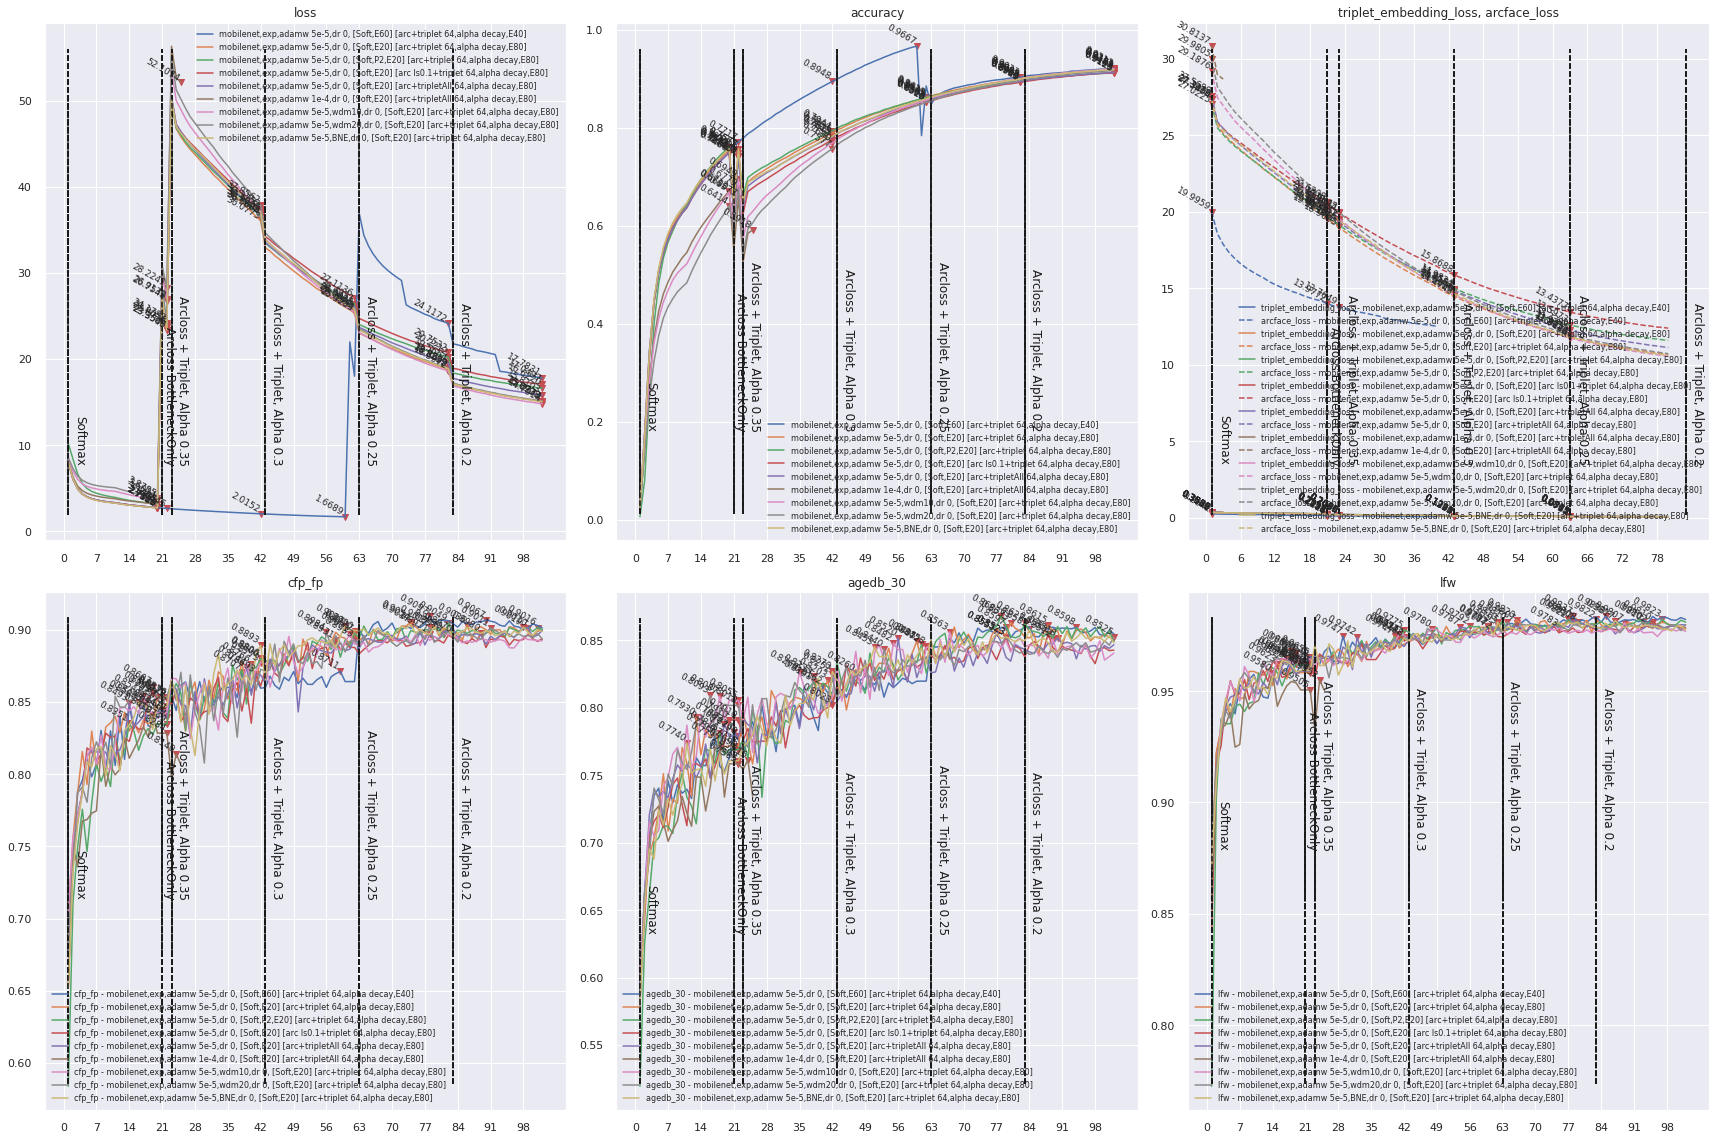

In [1]:
import plot
epochs = [20, 2, 20, 20, 20, 20]
names=["Softmax", "Arcloss BottleneckOnly", "Arcloss + Triplet, Alpha 0.35", "Arcloss + Triplet, Alpha 0.3", "Arcloss + Triplet, Alpha 0.25", "Arcloss + Triplet, Alpha 0.2"]
customs = ["cfp_fp", "agedb_30", "lfw", "center_embedding_loss", "triplet_embedding_loss", "arcface_loss"]
hists_path = "checkpoints/mobilenet_casia_tests/"

# The previous best one
axes, _ = plot.hist_plot_split([hists_path + "T_adamw_5e5_dr0_soft_casia_hist.json", hists_path + "T_adamw_5e5_dr0_soft_casia_arc_trip10_casia_hist.json"], epochs, names=names, customs=customs, fig_label='mobilenet,exp,adamw 5e-5,dr 0, [Soft,E60] [arc+triplet 64,alpha decay,E40]')
pp = {"epochs": epochs, "customs": customs, "axes": axes}

axes, _ = plot.hist_plot_split(hists_path + "T_adamw_5e5_dr0_soft_E25_arc_casia_hist.json", fig_label='mobilenet,exp,adamw 5e-5,dr 0, [Soft,E20] [arc+triplet 64,alpha decay,E80]', **pp)
axes, _ = plot.hist_plot_split(hists_path + "T_adamw_5e5_dr0_soft_P2_E25_arc_casia_hist.json", fig_label='mobilenet,exp,adamw 5e-5,dr 0, [Soft,P2,E20] [arc+triplet 64,alpha decay,E80]', **pp)
axes, _ = plot.hist_plot_split(hists_path + "T_adamw_5e5_dr0_soft_E25_arc_LS_casia_hist.json", fig_label='mobilenet,exp,adamw 5e-5,dr 0, [Soft,E20] [arc ls0.1+triplet 64,alpha decay,E80]', **pp)
axes, _ = plot.hist_plot_split(hists_path + "T_adamw_5e5_dr0_soft_E25_arc_TA_casia_hist.json", fig_label='mobilenet,exp,adamw 5e-5,dr 0, [Soft,E20] [arc+tripletAll 64,alpha decay,E80]', **pp)
axes, _ = plot.hist_plot_split(hists_path + "T_adamw_5e5_dr0_soft_wd1e4_E25_arc_casia_hist.json", fig_label='mobilenet,exp,adamw 1e-4,dr 0, [Soft,E20] [arc+tripletAll 64,alpha decay,E80]', **pp)
axes, _ = plot.hist_plot_split(hists_path + "T_adamw_5e5_dr0_soft_wdm10_E20_arc_casia_hist.json", fig_label='mobilenet,exp,adamw 5e-5,wdm10,dr 0, [Soft,E20] [arc+triplet 64,alpha decay,E80]', **pp)
axes, _ = plot.hist_plot_split(hists_path + "T_adamw_5e5_dr0_soft_wdm20_E20_arc_casia_2_hist.json", fig_label='mobilenet,exp,adamw 5e-5,wdm20,dr 0, [Soft,E20] [arc+triplet 64,alpha decay,E80]', **pp)
axes, _ = plot.hist_plot_split(hists_path + "T_adamw_5e5_dr0_soft_E25_arc_casia_BNE_hist.json", fig_label='mobilenet,exp,adamw 5e-5,BNE,dr 0, [Soft,E20] [arc+triplet 64,alpha decay,E80]', **pp)